<a href="https://colab.research.google.com/github/SumayaFathima189/College_Final_Year_Project/blob/main/College_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# **Introduction to Deep Learning with Keras and TensorFlow**


To help you understand the fundamentals of deep learning, this demo will walk through the basic steps of building two toy models for classifying handwritten numbers with accuracies surpassing 98%. The first model will be a basic fully-connected neural network, and the second model will be a deeper network that introduces the concepts of convolution and pooling.

# **The Task for the AI**
Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.

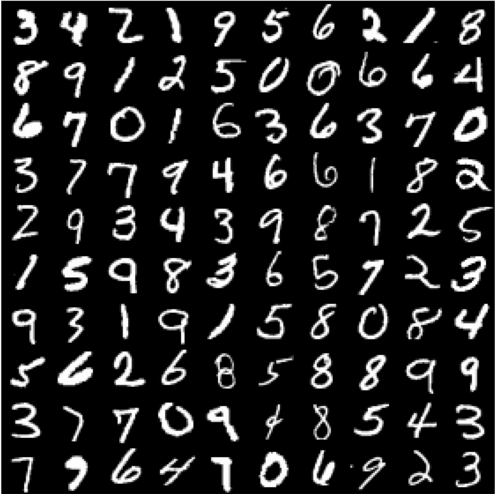

#** Prerequisite Python Modules**
First, some software needs to be loaded into the Python environment.

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used
import tensorflow as tf


from keras.layers.core import Dense, Dropout, Activation,Flatten  # Types of layers to be used in our model
from keras.utils import np_utils                                  # NumPy related tools

#** Loading Training Data**

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel image
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)


11501568/11490434 [==============================] - 0s 0us/step
Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


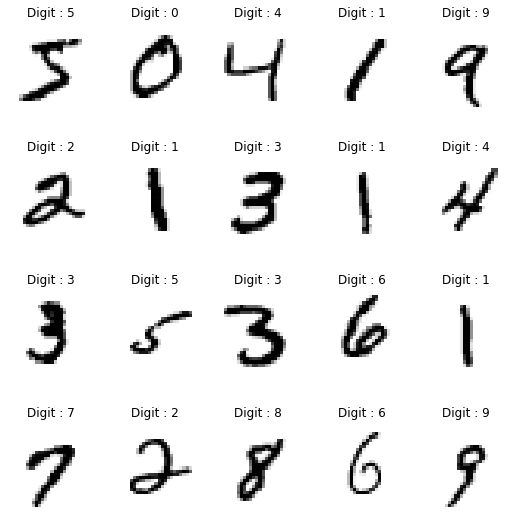

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [ ]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

Text(0.5, 0, 'Intensity')

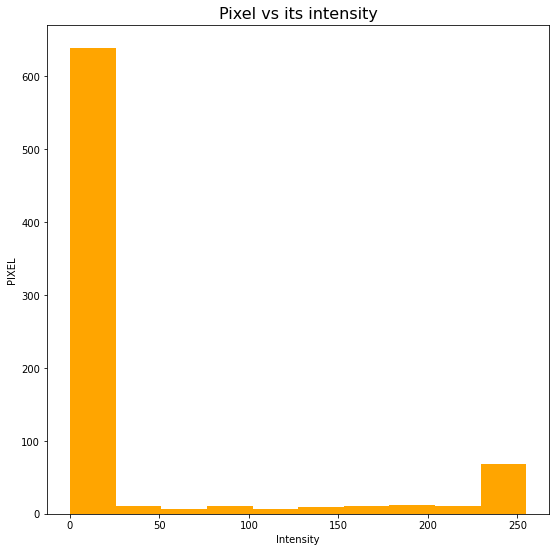

In [ ]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

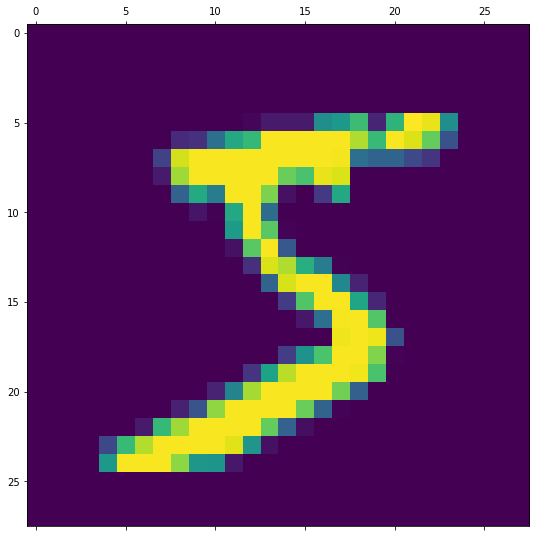

In [ ]:
plt.matshow(train_img[0])

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(train_img[0])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels also likely takes an 8-bit integer. 3 channels -- 24 bits total -- 16,777,216 possible colors!

# **Formatting the input data layer**
Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

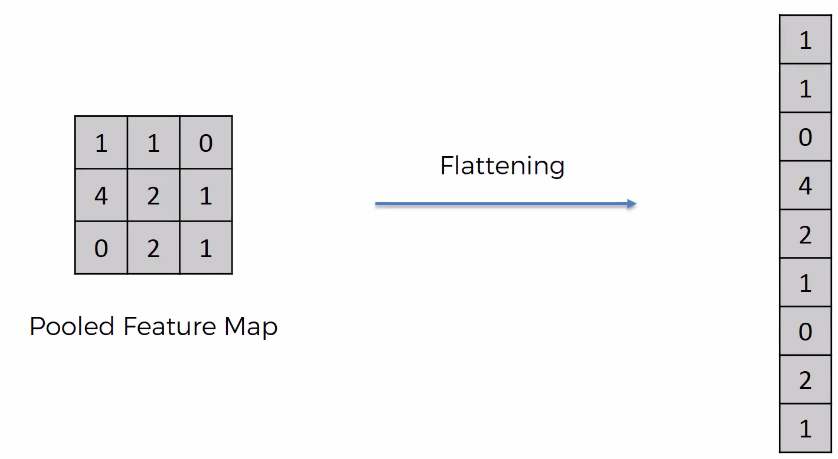

In [ ]:
# normalize each value for each pixel for the entire vector for each input
train_img=train_img/255.0
test_img=test_img/255.0

print("Training matrix shape", train_img.shape)
print("Testing matrix shape", test_img.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [ ]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

We then modify our classes (unique digits) to be in the one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]

etc.

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]

then it is most probable that the image is that of the digit 1.

# **Building a 3-layer fully connected network (FCN)

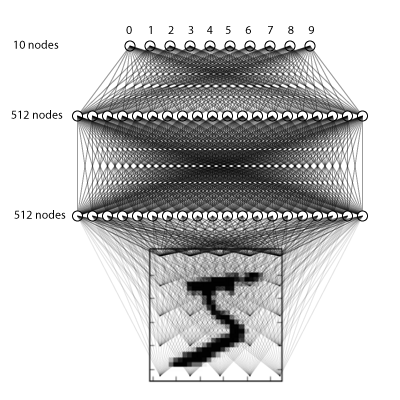**

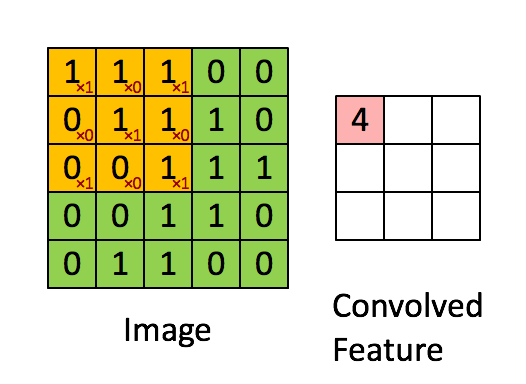

## The first hidden layer

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
# The Sequential model is a linear stack of layers and is very common.
model=Sequential()

# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bia

input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)

# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)




![Cnn1.gif (1280×720)](data:application/octet-stream;base64,R0lGODlhAAXQAvcAAAEBAQsBAAEJAQABCwgHChMBABsBABcIBgADEwMCHAUIFxQRFCYJASQaFjEWCDIlFwEDIwQHJxYCKAcENw0TLysQMBglNCAgICcnKjMxNBQqEUM5Kk04MkchDzpOMk5JNmpMM1paKw4ARAUASBIASQwFUzAQThkzUjQ6RDY6Rzk0Uyk0TzANci0SbTomZTAsbxYeZkw1dGg7dUssUjZHUTVUcDdfdkBAQElJSV5WSFNTVWVVSmZVSGxWTlpkV3JpVE1WY1VUaFNOcmRac2pKdFxhZk9odWFhYWhpaWtxfmlyeX9/f3V2d3FubqtlMqlgKpBxUqpsTIF9fId7dY54aKdoW8N6U3iRbY2OdK6SdrGgdNSZZ72zYj8cgS8bjzAokFU3i2o5jGI7rWc9r0osnV1EjFZNjW5NjlRvim10i3FPsmJXrXRMxW9Wz25e2jdeg4RjvZFwr5Bmo5Vt2ZFu0ZNe95Ru45Rt65lp6JVx54tp+pVq9Jlq85Vl/plm/5Zp/Zpp/Zdk9Y9u8qFp/aNu8Z1n0IU8l3WGkXGOqF+FlX6fxpmRg4mNl4aPmImNmIWLlJ+fn5WWloyKiqyYipmkmbSoko6WrZantKOkpLqrpKOqtaSquL6+vra3t7G0r6yOscqulMu4rdqomKnNi6bSjajRjKjThqvNlLHKnKnSkrTRjrPHr53NkdnJu9PFr+/RtfncrZexy6y3zqy35qSaz9Gz2L/H0rnI17TF0LfQ77zn/5/B4cDHz8TEw9nJwsLG0sXL1d7e3tjX2NLT0unZyPbbyOTd2fPY0t/g29ri1/3kzfnlyujj2vbl1vvl1/bm2vrl2fzp2vrq1//73P/21/nxy8nY6dXd7Nre7Nnc5Mnb9tXe8tne9tDI8OPd5u7U8tXi7dvj7tvk5srm/Nbj9Nrj9NTk+9vk+tzq/Njp+Nr4/svo8eLk7Obl5vbp4fnp4//75P/87P316OLk8+Pq9OTp+vvq/OT+/+z+/+rz+/799P71/vX+/v////f39+ny6iH5BAhkAAAAIf8LTkVUU0NBUEUyLjADAQAAACwAAAAAAAXQAgAI/gD7CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK4+oT9/AffwQOu83XeD06gSxW0+ofTv1fvuo/kfvx6979e7eC6LPnv5gdX/9/DVXT1+6wfP32bcfOD18/J/wfYeTf/mNl1N0AYKU4HIMNuhgRtGN5xyBGK3HH0bRzbdffiCFRyF4zF1kIYcCeRiePgZWNCJ3EpX30IorQpRhQfwQqM+HMbr34kLaLRgiQgH6+OCQRBbJ0AU4DKHkkkw2yWQQTjYJZZRUViklBxlMaeWWXHappJZLErEkEkFggAOYXqYZJZpqZuCBDz4ccUQRctZp55145qnnnnoGcYQOf/55wRF+8mnooYjuiYScix6RAQ09yElnonUWiqillOKJAwZyAgpopoYiEYmRpJZqaj8EVODCqqy26uqr/rDGKuussMZAgQQq0Krrrry6OsMMrapgQgIr9GrssbrGsOoCDYDq7LN3LoqEDjgA8Cm02CL6qQ46+IDEAhg0em225BqaAQCMxlmunYAOI+Sp8MYr3D4JCDFHHnPMYce+duSRxx3+3gEwwP/+SzDA/RIcsL95JGzHwfvesW/BAuOBr8X7stACHQI/bHDDD/f7sccRi4xwyBKfvPDHCovMsMB88KEvHSOoQQfILhccMcU88ytwwAPzvDLLEtuhr9Eg47EvHSoMkaJzEpIHoosCpVg1dtX5Z7XU4h0kXz+cEIDMhQY9XfbZ7c0IXtYM7XODJF+TTZCEW1dNY0Jml2j3/t2QCCBQgPtATZ52W1NNoryIJ35b1CVKAIYdewAyiB6B/NFHH35Yjrnlf/gBSB9//AGIH5db7kfml6OOOeh6mA566Z2/rvnppAdyRxdd3CFI6qGvDnrnqHNO+u+bX0687Lwnr7nmlwdCux91/CEIHCWw0brxfehhPOe9qx768KEvL/zv3p8u++mBgL7HHoEAYvoedrxwxoc0JagPJwMIs9ONAt1wSH9cuwkkAoCijgSIH/Chn+IWyMDVaKgfEShDHqB3ukGIznOjA4QGM7hBDXoOg6fz4AZBKEIMug94IUThBgnRBRbkIXLOM6EGLyjC0WGQhh284CBOh0MZfrCD/pir4A4FRgcSsOEOqfPgD2cYxBDW8HtL9CEHZWhD2n2uiqC7gwmGYBHDKXBr06kbewzECQC0Y24CGojhDOSfMB5EjHUz3N76kQEm6CiA9lGjdvCjRzVyKEWQAEB9QPRGthUkPHJsoCIXqZoJSaAMd/DDIAZRhzo875KYzKQmM7lDTvqBD1X0HB7mwAIWzOEOo+vkJp+nylVWcJWtRJ8qLQk/NZBADYKwJCs1GctL9tKVwDQf6OwQgyEELkctgU8Zg9GT8txADmnUSSD1hkdGWvOau1FbAsqAB9p18pvBlOQrxUnOcFqRD5eUGRhMCcpdhhOc3hznL8dpxRiqEhBz/oDDBNSABxRuEp693GFAg/lLVdrBBVz0SRmN8RMaXEFwO5kmNidKUd6EcZt4CCUshWjOeJJTlZOk3eU62QdAWKyUp/wnRzvKy5aGEJMmhcMt84C5VgqUpZgcqCR1Ggh0CvOgCe1JGbPxEw4s4ScSrahSlyqb62xzD03EqfmkKlJX9gF+LZwDOudJO11StaNB3KEu8QAHEbCBD/7UZFS/utZLejUQeAjEDv8AP4Q+UCfL/EkKjuqTpDL1r4A9DT8MtM07mG6Tbf0qBYHpVUDs4XamBIRXFUtZld6hrGrYA+kqy1na8WEQgWgfXYH6k1UAgJn7I88H+NoTv0YzsLCN/u1lUoSAMswBqn0AbWcvubqvYpUFdkgfVxWb2MRW9aWnu+w+NatRlhoXrJcMZSDmgFCf8CMUp/0JDljLE0wIEo2yDa94HYMeBBBhDn8ILSFiiLkq2tCG7Q1ie6P7vOaW1L0fDGEf+PDYFtqBD6GNYX2tWN/RlZS+882ke9eKufY5b3R8KOtZP3dg3mawwshV8GatCF/9vjen4uwDUBV4E1xkFydWywB3I/rd8br4xYrpDj+2aYewOjG/KIyqgUWo4w1nML8v7dznyAngq97BC13AA1Q/294rAtlzaUXwj5X4Ug1i+JKBWG8QybrP9lUZk0EcHfCm3Fz7ejCqxtVl/iBI6xMTo7YnN1ixNFsM4zrbGTDmKayGPRdmA9M3vxp1H4GrnGCYAoIPeGihkn1Y4SbC18nRLamk+fw8FfIStFWMsBHXp8LeTjHDUxUpH678YUM/rw7wBASbe4LdN/NExUil851nTWu/6Pm5zwVyoeUbZTSDmIe/1eqgQ63JmLmVdu2jMrHBvMrLmhWqq5RvMAHRU59qcsfhFHF1KYIeZE6kFyfuCawdQmK8mVsi3h2MGzPER6C48ZgFlA56BmsjEnm71vg2S38eWeMmHzeTQRx1tJ+M05L+1g7NtepLQ5pJAQ/clXSVcOSel2tgHrp9k+WtpCvOwzxsWyLOufcc/ncEtnB3sSTb3ZBGmtPtiLhWjHJJpIHMcze5hURDIR+Pgdg9WOvoI241f23P+Tc4/fAo30hHS3UKO2a1bvicCd8tn/9gh1L+95W9pXhiLXnl56FzyBQHOMD/4Gw24NbpUncltT2aOY8HFSIih1CrJzKiuDtk3OUW0dnU5hDX7iU6WsubTqi2R8GFnGstp6bUsAN472yNQtWBedInnxV6QdJ0UVdr+rD8wbZmfdlPN59j7bDOOYBdsVEfrktFvwcJg7LDoCeuYkO3arivxMRn5DZCJG+RlI/EjRbxO1+008ZB9sQ8PVc5IdVYo3irB/iUj35aplPYIcM+7Huu7+Uy/g/W0fvX2tmOtLGfJ9d/m9+XIo24WdPHfd6iT6XuLCfFo2zFPtzh4w/hvfEvslC655HkdydnHJF8QQcR6aYZ+tcRMfJAJ4J4NAJ99WE1WCN9FFgWYfRISFRooZdJQpZJaDVgy8Zxn/MHc5BVhxWCq5RjnyVO5cdsYEV2End95uRwfiBXNIhYG2U+bncS65GAJUdUP2JzducQvueDLuFaQ3gWcMQiKMF3VVM4Pkc4i/dad1QedxWF1WR0FbiFUsFHlmdYoBZ7XneDYueC7qd1B6dZwOR5qxRa8leGKdh6z9Z1qYN9mESGIMV2zgVUiQRyR3eFEZFXQXhHDnFvcbYR/u12OPf2cni2gD7nRySxDwRiNjP3h7bHHsh0eFy4iVXBdBq4hm5oVaeHg+50VXaQVakEh5cUOxsoSXIFWl6Wa44GZmXXTg/HSzQ4ivEHU4n1ObVnEYmnEablav53HYXYEFZziCRhhApxgIAhgSP3fynhfO2hiXaTN4xndCxHiJzYjV5heRnlb614XDakS/u1eZ8jWsqGU2sWA6Y0Uua0OqJzXzWIaoCgB3zWfmvoWBJnh6TIgtDDdYQQV7r4a/4YYr/Ibc0RIddIhRMhiCqSiGTDOA5pc3QkgLtnH9MhHzL2iBMhfHj2Wu8ihSDxHmoEeXIjHwTIPxSpEADUkvER/nneOJNRcXgQcHmfyHGo5jmDcGjg4z6bh3ahp0pXlQeKVofD44KOZjmDAGAChWokxWDSBkyhU3ZqKJS7GF09BVVNR0/HFnX2h3+6J5MjaYyBaHLH+Hz/QR4RMh7wwYwGoYwnt5bU8ZaDVYkUAZJ6ISEakiBBAo0Q+BHbiA910xzvUiIymXN7Y4xQQ5F3xYDZkYQ0OZktUTdMd2PhNwjtVQdW5j7XY2Ub1kQclzl4oDHB9Y+GdmANVo/EU5Bg1kStVJUS50+fB1M7qUtDtjqfowd+FkrwNFW+yUP393YVYpgD4Q+O+ZBoWYyKiTYW2RDK6G0p0oA/x4DRkQ/8MYTO/tgX66EP8cCWBmE/KOEP8YAid6ke5ek11LGNUgN00aiSjUdIj1k1iESZ9okUE3KThjWVGsdJdSBph4YvDbMHoqM9+nhtV4UH7gg5UqWanpNleIAHhPAvf6A9o4lY6md2+rhWrbRfpigw+wk+p7OT2RddVFddcdcc6Qki3qkhbZmFZ0mMDCGT6+miOkce9MOQD6GMcEk2h1edjQmjzJhUDQgY8OGd8cAP+KAP8hBGedOjD/E1TEoFAoALYCQPScqWCBQhSOoc+aCk2wF9zlGe53mYf3OfaJoUS4eTBHeQDUZJlERWMSABEjABLGA9UHR+/0ZS7lN1wEWbejpgQ5Zl/nBABHQaASYgBnrQOqEZqK8ph2Z3oU/Xgp80B3IwA3QqAmBABxX6mRXWSwXpPsOpkCtqHZnQAAIAABiwCXiUdwsBbjLqkuBFHVgqDEEAAASgAE0gDnR5EeMWkXWpD5KAqgDAAb0wWNgpIIG5EIzInWwZOJNQAIfAbsKwAAtwD1B6EfBBDVBAALGQN6EQAACQAeiQfNgZD/LgCgcAABZQD8k3icpKpsl3HtWxBAEAN2mar0axDxhofeOIi4NwB/lEpwQrASOAp2wYqJIGP+t0daonmpjEB3SAqQQgAREQARNABowaTjYUm1bJcVG1Q7YICHmgBhZbpxdLAm0QPq/T/lGddKLECXcP9A4+AADiiqsDgASEOa8UMYyXeB/xEAoLQAADAABFuwDDsHzRSIQY2RBsIw/nEgDiWrSNQJiH4xDbqRdFynzUoQXSuqTomgEDoAnnaRLmGQ/VgAUC8K334bUBkABVi0D8QQ09UAAJQAHpgA8eaR0GEq7TGh3xkEAGwQQCIAl6I3j6mrg0QX3chHkH2lWUVAiF4AIT4AJ0MAd04AKIKggbq4pg1qcoRX8MBmKAMJBhIAEmoAZ5QAdDMAEjsLKeu0myaVavB7GkaGCIJlMTsKklawIR8AUEKjxeKXoKFpYxC3LlOQkAcAG9QB2UoAADAAw7RxH7AJFO/stHTAq1AJAE9MAP4oADA4ADL2oRcqkiAiEFAYABxvBzWAAAEWAOehuZMJoQeokXExKk8qAFBnAI99AP8pADAPAIZWsSXFoN3cq2aaQPlVAASEABJ4APVhse8fAKDNADFkAB6rCzYmodkxAAAjxY5LmY3mGmilvCMeGiGFVqm1VcbmWpEsACcMCbeQAHFTABbXA9UvU5BydwVCUzRSQCY6A+cTADI+AF0CaplZahoJSw/tmTcFUIZzABGyMI+CQHElACboDDrtmmtPMHO8gcWBMP8LABASALEiIJAKAEVquWD2G9cDdzoBAAN2Ag3tAABDAMBLi0DPGrEckMC6AA/sIwHfHgAwpgCQhEr/OLEPV7F4yXIVpwAIeAD/7QvkVwlxKSINDIxgXYHcipD9VABd4KRl47BUqQAN8qydQRD1hgAKFQw+MwdJiMeJUQANNKmCFcjQUUOIgHUSbcyy9RfZ+Ig58DSnMgAxKgsX3AmXMwAweAzMwmi54DPyhVhywcdlAZCIUgUy2QgXwAxS+8Oy0bnBAHqRPHUpQkSZI7AyIgBlTsB3gQByYwAmvgBjl0gmLYxaMKjM3xCgdgATtLHa4QACugDms5c9SoEG5MEfIABQVwCVbLD/IAAgGwCWu8nomMEOUbERkSD9TgCgNQA/GrD/AwCQlgA9NLEVm7/hcTKBDx4LWH4A+zTAPpwJD68A5Z0AC4SgPWcJ5TwADSEAkCIACXwA+uIACe4A05sK46Pa/ycNMAgAA0kA2Ay61ri5zqoQUMgAW4gABGYLXeGQ0XcAPv8AB4K8n6QAw50AABQAAq8AuD1QoFYLNGmwBo8A/6oAMZ8A5UEAAKYKWzHMnR4AAKcAsCIQ/EoAA1cNC+vNi/Bx6eCEKh9lzUNgiFwMxt4AbJbFIycABeoD3hp31U17DQhlOUhM1R3AL4WIPZTAIkkIGTxlIwOIehNLq8VAiX+rr4WAeEUAgxUAJkQMWTNIJ/QJS55sUIBaVY4woFUAP3ENLFwAB46yKG/gOICZHQThuZPGAAuKC3Y8rQloCtjMN7wJfRChGfQwcP1DAJCpAI8RsP09AKEfDAGdGsftFG+isJtoAAFWAOzc2R79ABBXCzA4AAsmC1VGAANRvU0xrQDSzXA2AB2lDY8fAAUgsATz0AZuzJWDAA33qj/RAPk7C/+JABEgAO3B0PlZAAl/AODjABM60PoVAAqYqrBIAA2z0MFQ4ACgABRsAP8dADHfABFo7h/DDLiODjmQAAKKC31MABCrALjB3lJKGJ+kl//5ZYg4AHFSAB1tNTqmbFX5DFbHVwHRuPtLPbZTACwHs6EloIJFAC/aabHcWZEjuHCjdVsTgIhCAH/hWAxdqj54VABCPwBnmARbSdU5KWkPl3HXFsBM1tHdXQ4uqAnT5C3QgBq354HvLQAQZgDeD94S796BcCl+TtEAbC0VigAIgQ0tOwDA6MrQXYd7IWGIikD/qrAw6sDVyKrlNAy/SAD/EACv38pfoABQYwAIeQD/+ADv2g3AhgAdagD8vwAKpeI9wKAGiQD/sgD6GgABZAD/7AraHsIy0t4osQAN/94fDwARGQD/8dAepQD/3QChngCf/QD+6w12iArSAOAPx7nfGQ3QMw1PkQDv3QwZHsvz0AAFWLCV+brFIe8SHBr2y6jmjXPpTNzNazX2QXxRoLPMbVVjtUUiSY/lVX6aachAeFUAYTALztg2iFYAIkgNl1eFPk5FWxBAh3oAbPdn2SbWC5Jbl9nsW5tdtE4NvAfVyttMXadrxHdyH6kAUFYAPqgCDu/QDwvp7xaekGsQ8+64f8IQ8OYAC30L/Wob//rnwNwcct8uHTAAWqvqTlAQ/M8Orj4aoKsch2cdDeqb80oAATEOGD5Z3ScADiC8HoTQUIoA3ADgUMEMluGdAW8Mr9AA+ZAAFvEB+w4AA6kMF1uQQKEO1pqwAInB1aEACrXgwHcAIEHQ+tEABG0A/O4ABZvw/wAA/VQQwLYAStf/qIgK0sBwIGcAn3kKy2DsncTQwOsAC2QAEY/pAP8Svx0v8RKZxgF4o5dVAIHEAAikptezAHZyABX7Co58dxZP6aWDkIcwDFE/ACXIlPMgXn4TOKHbpLlhTbbOBlVNUHeCAHJlACANFmT6BBdQrJKEHGDSA/fv786eNnUEOJFCNS9MOwjx0XQ/rp6xdS5EiSJUPqAxXAhjqQ+vRRcxAhnb+T/fadBGnSJCcA3nT+xClSn7wOBoDd43cyS4FDSGvmBGryw5KoVT9Sw6IgEU55xCKccFoSqlVMAKyeRZtW7Vq2asf2SxpPSwEmsRCoyIcvKTVXBQgMIABAQAAACWLx0welwCak/PjF61vD6bRWEWogdmUAwAAAnTcP/rjkjxoUBYdLymWA6N40HhBk6YvXZMAtftE6RFCnV56yKQ86E6aRO15KROr8uZQHwkCue/iOyz1wCN/HaZMAEIBwC67jtt29fwcfXvx48uXNn0efXv169u3dv/eeU1+CMncARWRoEeN+PxcbzplBATH00AMQPOggIoEv9PiDv/38a2iihvrYY44uWJhjj/wc5JAiPuyg44wRWLCvDz0IgYOEEgSB6I8N+YNwvz/2gEMENvh4Ub8OGwrEwEJMKMGNOwgq5KASBgRkoj4a3K+OhgB5caL78uhoLZqEQiyUAGpQJ6l+4lnmgBO67Oe4kVxCi6dgupNPHw4MsEavj/TB/qIAROT8LgOqzsrJy5zioSYLBBDxEx5fFKABz5u8VAsSs86EL9L3GJ0zpKT0maspHQAoAinRXiGMs84EAAACXB6D4gBN7rkynlYCMGIyZigwYrpWNPsLgFARwEWfarI67C1MC0jkHsgGAEIfZhZA4Z5+bMPtI2IcKMCzAAYACzEtAlANsXjk4eEAXO65ByS57JzOn2mqaQBbPCWFN15556W3XnvvxTdffScVKqR96LuDyfsenLA/Bw2agQEyCARkDzpmSGDhi2LcEaM/7LjQDiYrPpjCOeQgoQU7CsSjEBFbEKQOiPaTsOAILf7jjhrZ0DCQ/iieeD+b/QikkBhG/hBjSD8I+TFIghpamb+W+QPkDyo9UovSkOKB5YAMumxJSxXUCclMSM/qBYA105JPKH1+CICS6ZDLgdd3SXoLKBqWkNoqSvWBJxRk8/noS0gSQCOpuht9VKTB90W8JMTKhgs66aLhgADTpnFFACCSumk756ZJdRVnb4LHFVibw1sYBYz40pUDgAgLJMf4qcYJAUzre+otBCiuH3keMMCXSCI4LB5pHKAAHX786aEAJNL5qJgGxsRHn0qYwjqeeEBg4Cjn/Dm3OH72GQ0ADSAg1KbEz0c/ffXXZ79999+vCoL6Vs6RYyf7qGMKCVhg8A4QK5iAGx7iIIoRcA8YwxAf/ipSQIMpDX8lI8EE2iAIQeQhDjFIiCD6sEGOEXBGM9tDRjrYwJaVLAwTeMEc8MCHQhiiAkHSQ0H6s7GluYhDMasSePQxPAJoZ05ouxN37ha3kmRuFWJjk1CyEAAgrA0ewyCABNLxNrigxUsc2BNb5BMPYihAAeIQyTs+ILkqfqcs8FvfpWp3JUxF5zGhOIACgMEPeBBjARiox5Ucoxd+TAMLAbiEU2DTl5U4Rx7LoEANvrQMBliATFBxzq9Ks7gzbSt3/siCAX5gAQpgDSYRQIfuOnCAKT6mGAYYE2ImwYCmrC0ePcgeUlqiheg4Sx6Z0YE1KLCAbQgOjb8EZjCF/jlMYhYzXkQEmMBg1CFAEKQPeZBDBSTwAjjQQQ4uGAHKBkgwblZkhgd8AQvswECX7aeZeHgI0WIgARKoYQ5xSBAMOVgx/PAnZiDsQ/2YOQh+SiQQeICDBBIQAzpYswIRIAMFXZTPiyxNQvW7zx2qRESyyYMKALAAMMoUiQAQIE6Wglta1EQ2neiDGAcYQBqOk4wMpJQf0ykpWubWFj+5RB+bQkEwjndRCxgvpGtxlDHzdSmajEUeWhCAdFRpgBWgAx/x4EEAdHCNkBgjEjTIB6oMwJi+QUYluRkKMShwuX5MIwQIAMI1ksKMqzpnNKUxCXQSgbVXMCAACEiEXvQB/o0OTMA4/gBBACThrFA8QACp1IfornYPcBwPlr/Ah5z0kUnV9KMZG/AoPyYRABqERaifBW1oRTta0p6vJTaRQH04+CJyXqRHejBhBCdAAglMoAVuUCiHcuYghuwBDxeaw84auEyM9IEQgTARHwghBxNMYLYTYOeAOEhOijBkaQ6hkY00VMAYuVaGR8NDDCLg3AiM97Z/YNAgGOpNc+r2ad+5CWzk0dLfECAAnngdSPtGUZ2MtC2nxVslOBOYzqQgq47xh9T4qzgsLtgk+uDOPlxCE2O0y1oLsMXhgFq40koKMfutovQCoFR9TOMDA4gVP4jhmwFwJgACSBRiFBML/qf4wx+gWom3jBEBIxyvju1q8WeaJRoqGGZOjMJUACwhy2mAgAAJuIZe3/EAUOoOFNUawIsPcFhZFsMBLUbrR7A3DD5KuBIjfuofGzEdeXzAMDDtcJzlPGc619nONQlJMvGjz3JSJBAKlAgh1PCC2SakDgzaA3V3dJ8/4AEM4gT00hTtJI304UAxaC4JWMAGQDBohDe8p416lB8GQqgOg7AZQVCdhzW0QAQTSIjG/kDpeeqoukzDIdTSkjmSWM8dTLhAljnQi37IyZd4RkvYxoYWCIslHvroBA06s4Ar+CNz3DFfmdRygyxaBSpeenaZ9GEMHSwgMDgQRn7H4mCT/pzxzvG6SSUAIB2RuCMDAJDFR47RhAYQBgOHcKqMD9AJvdokFAWI1ZfGTYEgXEofz6BCvwdgAUawIyl+REC++wQXER/CMUMJBQCAkNWQOOMBxQMdKBoggAgAwRgPAALXUnfvCGzie7AcBj/4ZpMzN4IfvihABupRplsqwAI7f3fSlb50pjedXv+qD2s7mE8J1QFKeZjDHAphB0HooQ75tPUI83lAFmBoY59O2oSsrvVCzIFFBVL0cB30QRspsH6KnsjR/LDCgtphZATqQz8JqOiHcETXbMkcchb1YZIcr19q8W9a1IiT02bbxvqFCrtJwm239AtNlfpaP5DenaD6/qt2To8P3OIbbsP1zeHwiMflX/eYZ780xC55KfcsxajHyGMf+7D9x+EhD2wr2HXidp0va+9K6xXb2vs48JzkAZdy8cMe9gC+4+ck2fyGO7+oB3/4xT9+8gelH3rOJ5+XOTD1/pkPeMiDhk5dXLlzbOx5KLsd+BB3pkWkIINoJgO5Az54iPnzJicJO/5AQLqjmYGpv7CbCAlBNZtppjvYAxaBiIgIBL37P4eIuz6QqMOzIrHQBz26kpD4h9YDvbPgB1xAIrU4wacoQag4Dqiwh0rRvM1bAl7zNrhho7HgjuP7jtJTwfKTPJL4PYX7nsyRh5yIPpvivRoUicx5hzKi/sGugbAPS7CdOw7iQ7ag8JPjECKQmL4gdD3MgYu1WUE/ETd/QRM9ShfrST4jpMM6tMM7NCZ+SK07ULSIiJFmoggb4qcL3AMZoid6chrgsiH68w8I8UOJmIivw4hDm7Xr+jRvCrUGfEAC8gMEREC9i4iHSK9bcxID3IOzY5mMcJoc8o7F+Tw12rnvCTG2CDlj6A42rJQlPI4U1LbQQwvOO70RzDabMhwv0b4vRAt3w8MeHAmiUkEJa4lmE5yxWJSa2AeawDaRSLBKqcYpbL14ML0y+qmigosroQng+whsvDZt/KmuaUNsi0FzdIl1XMZ6tMd7xMf2yDx/0TMRsj+M/pCQJVGg9BsIhkBA3eIYPciDGBCn/LDEsLuIZjo1Pjg1WoOSl7nEJgEEmdEusCMYitEIgOQZfkJAg4REQGSvbdqRjWDFzts9NMmJBIuwospBk3AFAMgGtkDDZiPGuEFDZNQJXARGu+mXY8S9jROidkwLIsxHsdCjKoLG7dC2pEiwEyzBkEA67jgOXtOHFMwcmjxHw2kJbFQjCVucIdoOCTNBffi9mHRH/ZpCa9s9NorHj5jJYOS4ptTLveTLvlQLgBkYqdtEP8uIDdKIpgEEPohA4tqRlvkn4Aoh+rO/wBtJVGsZxJTAQ6SIGsouNsjAT/PICEFAx2yI+cMRiThI/odozBkyvFa0QmmEy8djC1kAAGZoi8SjvGZ0x5yIL7bQk9gECiCsieMBCR6kSuBcSg7zy2a8lGrkPWzLHHBEx96cE7a0lNOyys9zvXS0wqCElOmQMG2LHrFAskVBE9wMwhkcxtpJvKKSmhhczviUz/kUPyQTCYC5tQRkzOryD/XLSD8gOxbIAwL8R4xwQFIbzI+cuo2kA1HzR7H7z0XLT3t6mpqkl8hTn6HUSfhQxjvjwfX4UJMYnBClKAUTUcTTMOTMtsf7UGMswrUIUfE4Nvqk0Rq1UdOyCfysJ4S8RP67GQ4JyAPqghbIA1SM0JWM0JZxkTtQAxvBAxEqtSOd/rrhMtL+eC/2wVB9eQsNTR+mHK0ZVZ8YvVFhVNExNdMzRdPy6MeQRNL9TNDBxBmHwIOymwNAc9NHlFLNlJE/4AMQqr9a67M21dPq0qemCcH2UTb18RIuRR8vTdH20TwLpcNHTaM0tdRLxVR9PAn5KZGM0Kc+7JBGlNIKeTQ78E8ILVBO5BBDBaGLnFKLiNJAjdXNnJCLaUn02YcjWrYM7bb0UUZJBS1f4r0qGtYZFdbWk5pjfdHiq5th1c1nJdbGK8YyFccTlcoyohQw/YnnhEsXlVZjjdZkrdZMJddyNdfg5Mf5oS4fjVBRFcmxQyD9s64j7a5uqledeZBMTDQ2/gXNPJXMUH0vSrUXnvAJ9sGBPQFWSfFSY3oLgYWX4ntWh91Q8GhWPDs2bf0lYTnXjeXYG91D+nFAhLxX0PTR+xBSDHHVjFzXfr21lhHIVm0tKQXUPou7prnS9clS9NETiaWXhR2mNiFKkwhRMT1C+OHZn9rH9hhRnYhRon0KoOzYqJXaZTwtqMODU+3RBnJEQYWRi8mYyJRMPJU7dpXZh+BINhi1rXUZUM1asTvUhJWURGWf32SfXyUtjPXGIorNzOFbN/QSpwUKok1Cm6DGvLUJvkVcw+U1MR3c8PQOHlxcb2zcwzVcpg3HcCzOD70JXjvaqfXcz11GwNzRQP3T/lc90oeokK/dkA8M1db9V0TsTBwh2zhN0JpNxf5ozfQxohdcn5liHyLsXBzdViQcib4lXr1FXuPdXLQg2r9VXGaM3LyN0Z+c3MsN3OeNCqhY3mwb2qqIUbgF3fAVX6bjTdF90Nc1XTfVTwNtNDAQmZVN1W6KX87Ep7uTX7IVuxxpGcMD30jJ2fPBovZx1DyUVmw9H3ocj+BNYLFkRvZgtygc1/GV4AlWupxY09XdT/xd35WsEBYQGQV6yHYl3bEdYdHU15D11wRcWX4trkPFUt7dF6lJAYRVnw4tpgeOYDKtCgXuxRX1MPGgCfhU2qj5CSGmVgpG4iQO1pDg1CpF/l/1LeENZi+HiNcGkTQe1Q8NllAZ6UywRVUFjWKDAUmIyjVEheHEyZypEGDlJCYjDspsxVZlRdY5FtdpzUbvLMJjBVdjBNOk3A5vnWOpdFE/jgqyJFY93r04NuBsFFc+jlYVROQjVuJJpmSGPYmP3bMvltX4Xd89wD8M8WL01eJywt8NOlsvFlvW1dOYTcXCu1X0+V/E0YcZlmR78dk2XqMFC8LjBCmybDZFxsbt+GUEw7yTwMUTjEGtjFZDnmOQCGY1msY45skZDWa7NGCeZEd21KNfzmNxNGRp5ONp9uZwdVFk/hoiuuNKVud1Vp/yLYOr3dFSdl0sHmEKyYNH/sMDDZHfJ05hILWY2D3ffd6tfh5dCn3lxGnBMzYt310fG+7fe8kHVxCGdjAGYWAGY8BoivYGjDYGZmiHizYGZGAGZAiGYAjpksboYECGlDbpZCjpYHDplX5pk0ZplzZpmcZoYUAGkp5plRYGY0iGYWgFYXhpm6Zpkk4GYyhpoiZqpC5po4bpl3bqm1Zqmm7poq7qim7pqv7pqu5pYeAEYRDrYBjpneZplVbpnDbrk9ZpolZqm+bqrK5ptkYGon5ppa7qpD5rkzYGd7Bok26HXrBNdibswm7nkTBf/5xZkpXSwqNTJ9ZkUlbV4WqtU641eebaJ0ZQ/qxQ9qlF4T0J/lr+XeXkYXzphQBAbV1JbdRmbcL4jdRW7dWO7dlubdam7dVubdXW7dgmjNrWFd7ubdyu7eEmbtv27eBG7txG7cEY7tsObvtSbuV2btZmbuM+buGm7uhO7t7W7dwGAA6AWsMW7/E+JptoYoYQTJHt54ppkJOt0wZB4cxeWzDeZw/qYqxtW5yhLj57poOWZVvAyfaZCsDFl1sOJmEIgEjwBV/ohVZYcAf3BQiP8AWn8Ap/cAqXcAvH8A2/cA33cAvP8Bz4gGGo8Azv8BPXcBPncBT3cBX/cA3frEyQcBdv8Ref8BK3cRBPcRyncFeo8AZggsoj7yEncnhp4umq70Pk/q56NlCL+INAqGKkWaZZXW/dOuEHdNcSHmX9aJB6uo/cdUn1EBaeGGy83Be6nZccvOWHnpd2uC93eAd3eIY5p/M5hwY6hwZocAZoaIZmyPM/B3RA9/NnCHQ9L/Q8t/NDt3N3+HM5fwdoOIYd6IE9N/RDL/RnoHQ+/3M/z3NOD3RnIPRN//RQ73RFh/M7h4Y4f4dK6J1nePRHR3RnyPQ/B3VUt/RKP3RPv/Vbr/U/fwZ3YIZfd4cFwAIzL/JjR/bx4M3zbpqFghLEbBAXYQgXgW8oWRJotyFqV830s3ZPbZr+gBJnb5g8uJB8lvZvD/ds9/ZAdAhqR0xrR/dzf3aI/kBvage7eT9FJiUBmpmRh3DVcL/3cH+SpgE7d492d4f3fDp3bp93f28YPrhZItJYX8TLpD09ilq3fgibMqd4i+94pTR2EZUPDmACL3Hj0LP4fZx42UTGsSg9F9VO+AmGAMgEdziGUvdzSpf1PNd5nvd5QM90WRf6nu95XN/zotdzoTf0ZpAGQt+BHQj1oa/0og96n6d6Wj/6n0f6qdd6nh/6Xs+EAvCFpM/6q+d6qj+GnTf6nc96sm97nSd6nm+GOZf1OW8AKaB49HDm2Kxj9TjaEg2mmzjB0q6XuiHw8/EaNo8UONYvwP1Jwh8/L6GPObiDPFihAeQDiM/8zc98/sznA8//fM7v/BUK/c7H/D0AfdMXff+ZgxdogawTfc2P/dTPfNJf/c7ngz3A/d3HfMzHg9/n/AuEpglQA0K4g0HYfM/v/dLn/OUXfdvf/czXfeXPfT6NPwv8fELAAwAJgp/IeKWMG7itPHTkh5Dj+PAXC19Ef5YPb6PUBxoodk1l/2AM/9I7+ZEwx16EfPLQh2AAgEwAiGfQnEErOJDgQIPOFjJsuNBgM4YHHzqsWLDiw4kNmxWUtmPHM2cRMWYkSRDjRZMOFZpMCG2kSIOZArR66UyaRpUqcxKEyXPnT2fPQi581kBKv6RKlzJt6vQpU33++unrN3Vp1X1QlfLb/ur1aVevVZNWHavUn1ml+sKSjcqU7dKwY+W23Xr1bd2lU9M6vUsWLl+3/bQGzmsYrmCqbPkV1qs2cVLEa7FuHUv4az+4Wrvqa3zWKd3MdT0n9Wu4aVqzjLn2xez6NezYsmfPHiCEzhw6unXP6c17t2/cuXETH567N3LhxJUfX857uG4XJuIUB678+W7sv6sfN+67eXfgyX3LkbDm+2/w19WHFw5dfXHw0LMnV3GENO38TeHKChBMP4CvXXXDEqWxFiCCTUECgFZxJfigbMEAkIk7G+HEUUInUaSThi1t+KFGHFXUDEfNPPORQDrllBKHHbbY0E8siiTNMzO18ow0/htqFBSHPJK0YocHDQSTUA0USBmEYCX5FH6wjdXkklE69SRnUlr5VINXahnWPlVqCWFjWX45JplWdtZPABJMQAKbJIjgZptxyjknnXXaGWcJc4ogAZ8TTDDCnXOO8GagdRJaaJwijDCBAgpIoCiikUoKp5wTiGCpCCLkmacICQQAAKihAjCAqKOaCiqpopKa6qmohsrqqauuqmqqpH76aquwmsqqrrO6qmquwPqaKgG1gkoAAaMOsCyzpCYb7K/ARusqr6X62ioAyS4rrLLRDiAJYmV6FUwAmbzD0DERpXRRUBl62KNKzeSoY4kngsSTuy4KaRG8MEr0r0U4MYRT/kE24gjiTses5O9ODQNskjQkGhnul1Xxc9VkFJdFFVlmbcwxZB8/BjJVG3tsMlyMiXmaaIMBdmBTK7/1ZMswHygzVzRTXPPMNu/HF5cvu7ZazxzvHDSSDoKm2lZEKxYb0Rbj5RTOObe1c2ZQrtXYmY6J+7W4Mifgghhlm3022mmrvXbZY7Btthppu112GS2QEEbcb6ud99tzs+032muoXUYMEYChN+BqJy7G4m33PUYZkJ/NdwUrPMJII4xovjnnnWPeeeaeiz46I444Uvrnlz8SySOWPNIEAJJcTrrmpodOu+i334577aY78sjvGOAA/OWnn16678fjHrryvGPe/jztQXy7uumWZA5878b7Lsk/YLuGzITvTERijC9OBGS/Gu54UTPRFPQRhj8uzLBE6z5c/4sw2qRMxBxlUsCN5pU/faGEX/c7IIiEpIyFSKMBWGALlPTToE5cwAcWvCAGfVAEDG4wgxrs4AU7CEIOZnCEJbSgCTWowSNsUAcXOAISfKADJByhhjYMwg1tqMMd8rCHPvwhEHnoQhoGsYhGNCIOj6gDHS5xiDVc4hF1mMQoUrGKOmhAD6dYxS0iEYhQPIILYQhGMUpxhzLEhGm8p0YyIaAMc9jDHQTBhzvMcQ97qCMd+QDHOfLRjnfYIx3v8Ec+BpIPhgwkIOGYSDgK/tIOc3ABDOhgBzv88Y6D/CMd/WhJO9pRj4ME5BzliEdFHlKUgcQDHgSJhzwIUhB0iMMEznMHSuYRlJ9EZCErGcpc2rKTuZwjL1kZiEDM0gVBKAcyw1GOcDBzmc1UJjSfycxpOrMc4HimM6G5zG02M5nRVCY2zoGNbGhiALbApja/2c1mgiOb3OSmNKVpzW7Og5nbQGY5sFEPbGBjHthIQRrAUU9slGOf89iGP8OxDXS685vbrGY7qZnOeFaTncx0xADYEQ5/cuMazhQHOLmxDXowMxvsEIfS1sgUcpnrGOxjiYvo96ECykimDVEYkcYXMXsRBYHp85GOzudThjyD/kg3qRFNoJEjo56EXTE14PzkN0BoHCNFMdGAHL6GFkgI4AMe+EAIPCDWsYrVq179KlrPWtaxfkCtbHXrWs2K1rKeta1kbWtdxYoBAIyRhl/kIhe1uEPB+hAJM8QBAKBI2BwWcbE+dCxga/gBvi6RiEeALGQBm9nB9tCwSLhBYoGI2ciOloug7etli4iEXrBMpa6F0D4SUIY8/EEPfQDEHv7AyT8EQre5taNvA/Hb3/ZhuH8I7nB3q9vg6kG4e+iDb+GYhy60IA92AARujevc5AaiuMDdLXB5m9ziRle4ujVvbnv7XEAsVw+CiIMI1LAHQRzXuOI9r3J/G937chK6/voFr3rt2IcBsxe69R2EHuzgAiDk853KjCg3F+pgZTp4mxDWJjmySWGCSvMa/izHNjaBgF9QGJoL7WaF0+ngE6u4xcu8JzvwSdBt1OMa+jQpCpCwz2zUoxwexQY3yjGPeQgZmRe2cIqTbGIVV/Sd5XAEAphJ0HPQw8n4RCY9QJqPNL42KeDLhFNHMj76KWyAQTKziDbCkaGgqCQtahdQoYqRMjdEYDeJCTRsNBIBrqRdCOnRvgqYP6sSxIGiEZmZejGAVaACFalIhaMbDelTQLrSqKB0pB396EtH2tKniPQpQt1pUVs6FaL+9KclrWlIr3oRAODygzyDta+YZSr+/ugEAJJSNSblZ9ZOYgovABAWflwmShEEDVRszQkCRAZMUPH1a1bWC2H/hWRTaxC0u6zt13RlHxIow3UHfFv2kvsP0C23H47L3j9gt9zoPq4f1n1cc7P7D+lmNyAMzO5049YO1LWDIPSwh3W3m97kBgS/b1tvd9eb3wtv+L0ZPmA/xFvee2DDCNjwXAO7m+P1VvfHH35vez+c4fO2N8UpLm/s9kEPeXCBEIiczAwnE58UtjnNr3zlm5fY5je/8jm8icygI3Qe5Txnza9MDhRrc+c213k5lv50p+MzyEO/8jw8Wg4UpCGcB10mOoKOTG6QPek/5znNf/7QtS8z7Ul//no4GDGAn+ccn2LP8NLZUQ/JdFkfX3aHS93skqfaVKgzdUaZDS9UIJFPXigaPEXi7BA6D7V8Ms1XRmoEwD3b9Mz6Y9j58JW/xQ8kRw1MA7Kl1JVVCKDRlyZFKR4t+1SQYvawpz3uZy/72vM+97EvRe13/+jgP7oUxhe+7nV/hVxne9tPmbbzYYMYXFs7+q/hRK6tj5np5/rYsNY++F0jWzs8lw/5RnnK/dCHlK8//QhPf/rbD3+Vzz/lCJc/xfmABy+wYA7ohz/+1V/9sRcAFqAAzt+4/cEdwMEEsIH5yd/6vd8BBmD8xd/9FaAEpl8gxF8f8IGCBYHVkQPN4Z0I/pJDOkRdOoRDCorgCWZYOoigMokgMuFdC9YgCkbdzmVYOMhg1G2COc1gOrRg1JGgEMrgCw4hC6LgDt7g0hmhCc4gNeGdzlEY1+1gOogD1FEdDi4hDpqgCsYgC5JgEnohDnZhELpgORxhI8zdzb1gCnJhOZwDOYhdOPgD33WZN4QPjMRPoL0L/gCMn8XLj0ADjjzeIM7PQVDew0Ce4Ski/QiJRuzU/9QEn5lZ56kIAZnPQiiDiRhJyxwbgKzCAFzaKZSCKZDCKZLCKMCe8ZEC7L2iK7bi8bkiLcai8QFfLeYi8LWiLf5eKsReLf7i8KXCFQhA+MUG9h0jbLhC9ikj/mYkozN6RVdAYzRWo35YxviZ220doABSIDd+4zcaUhewAPmBozmeIzqq3PopIByIgAOaXzrGYzoOwiBsoB/U4yCo3wfKnArKoBT2IxKW4dKdIAq6oD82IQkOITKlg9VFXTiAQwuqoDhsAgCc00Eq4RH6YxqO4BZmJBoa4RniEwxupAl+ZDalAwooATMRZBYq3QuaoBvyYBiqIEH+o0fS4EumIBJmGDisIYrNYBgGnQjSYT6EnzGEz0GYiMDU1EM44uc5jOV1SE5lhInwAEgYFeSNXktIHoekGUNEhI0olUXkC1nKj+FhYlSNyPg0QwNcQepJiT6wHimaoimk4i7u/mIsnuIp4uIr1iVe3iLw7eUqwp4pBCYruuJe8mUqmMJi0h4r4iIWNKM1PgU1TqZTyIJkWiZTVKZmXgZnaiZoYoZs3YH6ZeA95mPKoaY5qibFoSZrwt9rwp/+jSMewGP60WNqzp9qxuZp3qYA7iZsppwC0gEJOGBu+iY6sqZrHmdw5mZsKiDMyZwX6qQYtpM1ISE44J11IqSRORNCLuEXWqeRHeEWggNF2oI4rGATOuQSyqAV7mAMYmd3ttPS7WAT0id9LpNO5mcabpM4oEAShEN6qt3UfecKticMfuHS0Wd1GlkJth0zLaiDhsMagpTdHehDRt05mAMdTom2fVng/jHQUg7J4WlE4O3IJdrPj1SiSMgLm93LVGmloF0iSnAeTmjejdjEU3Jln82PwjBliY6lAEFDA2RV0lgJP3RC61EaLu7lKaCiKYxCXUppXVaplULplFppYWapKdKlX0bpllZpXl4pYtYlMWZmaPbDZ2rmNKJpaK6pNZoFnKapZgYGP3wbacrjPbbmnurpAapmIMwmOfKBnxZqn9bfcqocH6iBOxLqN74mcMojbyKnaiqYENRDkC1hdpZghL6gCl5nGmboC16TRxbkepJgdk7ddtrceTqkFLqgddKnCqaqP3bqQCIkp1rTQCJhhr7qNVUTgDZdS1IYDKYqreLqpnJh/oKWpIJGHYPW6glS6Nyx5EHm3IMq0zFKSCgUhMKkC4kcHo2mj5vpiESk2Vq+BDQYYpCCq1SlZYzWWU9hSJ4FgC8IBFOxK5mdJUqoaLv2KEE00BU0H4SwHqP9IirG4qNJqSoYX5SqwiiMgsOWAsTiYimogioU5sNOLMOqAitarJR+rMRW7Ch0qSksrJfe4mKaQmTS6VLMaZz2AzOyrFK4rDOyBc3KrDMGRmyVQW2Om6H+bAW6n6Can2kCrQEWKiDgAR24oz0eLQJSHP4FoDc+7fwBQh30aT5aKtu1ZBZK4dZCHUty7dTJ2EGdJ4GK7QyiLdCpbdJ5LZFBU7B+bRmu/i3btqTY1a3dIZNP/pwc5pxQ8mQ40MMxfplAHESKoOi4NlW4RhVPUN69xoTj3QuPyo9T6mtMrUhNwUT/4Ki8IEzn8ShXWm6IDEVEcERbfuKXaIWSStovHl8phFopjsIpjGzsTSyTSmwqjMIvjqzu1u7DlqLx9W7Gtm4qqMLsxp4q5C7yJd/K4uzNat/LYCbOqqmbgubzTi/4Ucz45ds9Fm39Te33Gi0gTBcL0FYGTi34Gi03/kEeMCobBIL3qq/8fqDY3m0W2i/e5q/OiYMmVKTO4a+16q/+gmHd1RyA6ifX4i/XFjDeMnBL7u3VaaTTMVNRHulrMcOEAN5TDuLk/sqZw7DoQqyZvZQuVAXijFpiHzZENDQE/yyEnjFQ/jilJXoeIGKE+wiJURjp14gi6wbvLVLa7FFa8L1u7JlaKbYupQmx7L0uENNeEhcf8A5jqCVf8i3f9F5v9KVFm/LMm1avZmIx9jrjztoBALLcNkItyhFYGr/fOqIcvMlfvincxJ0x1LLfKo0j+ZEc1LLcHp8f1OKfuaXbH7ufH6uf/F3t987bArrjehkyxZkbH5emIG8jvNFf+/0fgc2xynEvciIy+8KcHIpkHIby2Cnw1QXd3QbZOZhyKKvyOQQZN8xDQ07hJhCALfxv3YkdN5hyHNJcKpdyHELdKotyHM6y/jdxHUEhkywH3S5XXTkYczHn7f3OrTDv8iv7MtQ5AgDcnP0yM1AuUzsIbvhJiLkk5beqD74O1Zwt4r7qqAqHME/5yOI5DAr3q0gMDEIgFSXeGQ3P8B9OlY+MBCc2UIEILILE5ZLeol8CJi3yoi3WokMfZkPfJV9K9GNCdEXXpSvinhU7rxcfo8yA8TGKNPRSbxhjLwSUwR38n/pJcgS+NMulsfu9tP1xL0zH2zauIyGjEh7n1k3ntCAHNXbtmwTmm1G3tPpVcrqlb/rVVzu+420pnP1F4CNb4B7bnxtvI8sVrU6nHCI/8icLASrrHDRXXSqX9TNraN0qMCljgw/+/gLUGfPdDnM0j10z/2/aZhgvi20yp0ASyFwyXx1eC3YwPzMq+63VNbMqJzDX+qQ0d205oIOACq6XVN8aGUO5nMtXMqIfnrC7AoVXfqW8KJW6vpk9e3bipvBGjI9NhOXj1vBMyQiLKIQ8g2tOaG4nHknHVIxcAi9hRmnI5mIq0uJwC3cuYjRfFrdx9yViHmwqquxHTyZJg990a191O19VXPdJR99oThwb6ylrcjL8sjT6wl++eSALkKMeBG3FQTIdC1cHHmq7weZXo/EecOMgXO2ALbLGNe0ADpijDqA92iN2wW+AS/Jrtt+B298dwJz+rnLQ8e01kyrekjLX1pMP/t4yNeuctZoD1Mky2f3t3Sbzhw3dHDJwAcNtEoitA9PckF1d2b3dlSW2Wk8zYWvzNp041D1htNahQYuL3yFl4BGMmLHz/GhuTzlDMSyQM0RD4Xpw5DkE+RCiVRJaCSPEQTA5CWfEjzqDMtzwJjL5CueEDD+ViUyiWE5VRCyQQQyJ+CgDm6fECn+eMkCD+KjzjxZVCDuQHbZWklTF6h6vLAL3LOIlcR/sRdclK9TiogNmRE80Q78ixSIm8D1aMV5xdEdjVcSsR2P6dqfpk6T0HXBv/CI1fmMgIBw4UxfgH9gBGPTffZu3H3My+3WgbdbBIAA4/OH6gOXjgAWybiLg/h489XNx41YjIE0fakuPG3aBI62z3z6Obc81mGF7uDLFeCgLKGH73NoN5diCGDJhQznxQoVz6M41E13bHVp3YYYFWQCPIDMF66fOOGG7u4wVdpGNpNpy6Lpnc0YpndM9qDJXMPh92Z2HcMS0+WuTxAofgzvMeZgXQzOIjztLlbsIibyYSJvFmUtoxEDfhP0sgzRIg0vJQ+nNCyGiz8JQlVTOa01I3o40A5y3eTXUefsg3p/R2ZL/WZ0D6Zl1xMBglffIpZTyImCWIvDeYiyqoiwGt3LfHmAarCk0Oiv2rsQWpkTLIu5hgTF2Ost2hfTiLKeHZpWE/afXqa6NZiCX/jp7u1/VoiP4stce+Nughi84Thxu4jQCpnpTY1d+K/ueXq1uPTX8luaq218dI/ueAsIGBmCuP7tpspelvq0Wdu05UJMokwM4YKEpny1aN2Q49K+GA/xjz+ErJ/NGyfIcyrKJ69w9SWcvjzIx+1w4xK0yseRek3VD1t02CCUsK/NhF/ActiRGxdgM2m97bqE3fF+XEW6diYhq409OLMOfLQQxzMvNy9lt8wSJFBU0WKXPo4SVY3n1M5CYFYTEL0QxNDnoXkSOKFWeAZC9Ep6+DgSbnzPCs/kxvMM7uM8msjBAQHMHzZkzggYLJkwIjWFCaQ2w9OPXr58+ihcxZtS4/pHjRVkCUJ0yRYokqVInT5ZEWWrUypMtT6YymaoUyVQ0Sd0sJbMkyZWndJqMKROlSVM3sQDouJRpU6dPM3JSCpVqVasbpV7VupXpxH6ypnIVO/ZiqLBk0aZVu9aphDJ3+vTxA8hPXT9y5dbNa/eu3b119NodxJew38J+98zpwsIO3cJ9HB+2G9lPHUB/+vzhOyjzXj+YJRMe9OcOHBFs+NTls5py38OQM4f2G9lzIMqAPH8m7ULIuXK/w/0WPnw4uXThkAsnV265OHDFfROXXo4b8OnhNg3g9Tt6Od/LpZMDT+4ctuDMyc2rjr77b2zFyU+PLxw5iiTppnsvHv4c/rd5v9NZrj0By/mPut/Eyw884hwZALlwlgMvuHACFG855PLJyCK2tgomgEzcOSahZp45SKGFFjIRoWaiMRGaaOSRhsVjVDzRRoScaQbHEWV8hocdSiyoRhcNaujGZ3Y8RkZpoDnmnScTUiaaHBUiUkgUFWoGmmcyCaCVZ2S8UcwVs3QmmmKckUZNGqF5x5ljmtFRGRu1rPHEgwgiaE6DGkhjI684pGgVkHDKiaaiVMpJqFNYOgWmnHZKBSieSmL0JqBIGkUoliJVKSWVWroplSvOCtTUqEo9VS1AL8pKVVU3dPXVUy3CJdVZcc0VrQ372SeBtzSbS7bH4oLMrj9w/ussN7wIy42wy+wAg7E9ghXWWcEGu/azuPjiI65qRRv2jz1MY2MPQPgIxNt0ZbMtkLr+GHcPw+wCjC9u7XrXNWOftYM3A+VjzjvyJBSHOOPIcW6+6CIk2Lf1DiSOm/XC0WQAW/LTT2D08IPwQgTJeZC5cxbWWLmAh0vOvukgPnk4ks3pjxsLhfsuQuLaeznjchosJziC3YNPOG8mApRXXTsyBoBM3mkSTztvVNFEZbRURpkttWTGnWeQFBNqKm9kkcQdgDQyIRGrJEjHMU90U5lltHznmGeYAdMZq6cU0uwrcVw7zTi5LKCVZqRJk2+pi1QbS2fQZDwaHaFp5h1m/qSRZ6CuR9ybbYO0TOiZBpaQiKKjT11lAFRGGYkUVjwtSfWcgGJUFUdTeqklVViCqXacVtLdJVN2JwV44EsBKimkTZUVea6O3qcf5ZdPC/royZqe+uuxx2jDX+/AbS7KtJXrMnDhjRe0YdG/aw87WGBhDto+4+tdwOy1zd5874qtrkEGWU3bwWSTmdKcZg+QAQS6PHOtA9qFD9RyzbD2oq97HeYP/hLCf0J2HugsCDzgSA6CECSOAEVnPQkaD8BIlrF5YAcAv9gZd5STQfQ8RzznCIc4flZDiC0ohtFJDn4gVp8kaHA/BzsYgQR2nhSmcGfd4aF0HAEAdgDIZD5j/k6AgDMPVmVPI9lYWtMOEqeG5MlGX0sR3qLxDHfY4x8lKtzmUPS4MmqJcD8q0ZCwhLjNNSQaeXtGO9oRjWpI421v5NuY8lYQZbyxS4OD4+KoxKSE5O0dV3MT16TxjmccQx5zu9uO7gTJgnSuIJ8L3UVIZ6pOgEQVr+NdTVRXk1Ms6hRAwd2mSoE7lqjCdzXxVCpGcZNeloJ4N/FJTVAyqltx0SrWY2ZVsrLFZ1LFmdN8SjWtmU0O6WNDEACWtiZ4r3HhSy+YASe9JAPAz7CPMXyIDGY0Iz7B+CEQElSXbfxCv8G4a3/paxZpylXA1pzTL31w57fick/cpGYygAhE/m1kc0ALqseICZoZe3z2M/TARzwtO0cKn1idnBEHG5sAwHZwljHf4JBjSPwg0CL2QoHdDDjhsA9+pPPRmu0nPiQbKc1eBlSZMmgAU/TYEyHEHuRIc5rM+GKWIHdIr91JHpIrRhYcUIAAYMAS9AhRNJaxuCaJyW8jItyWyGY2K4WNIWT0WjHOBI1i9EAAV9hkKEHpIsUVpHAM4ZKXIme4RxpERlQbiNXMNKNXYKEBWv1AJZ7xDmPIo0plHSzYnGFKDc2KEyBpSU+QCUvhzeRSOxnmSUbCKV0S0xStfZ2lGMUSU6TOlzFBpqZ2UsvjabOZy+QtRyyCzd9ixbfDRaXo/oRrXOVqhR9uuQNoDugsbblzoPFaVvqutYc8LOZ9s8mM9w6oTnX6oX+OkeBmGOpP8oqTXKc5H19aE5jJeIsudDFoXgaBrsgAcL+B4N8+8Xusidb0ZD41IX9gqJycNexhQ4WYxVBaxIwdZzngqJAPiSjSBO8sqdTxzYPsQ0SZWqg/5TCHhM5zYvmMx4pD/U2DkvPEGC6IHUx9ZjAAAAq5pYiMYxVllcwE12KAgAEF0CoACKCDdsijcWnTY5qgRsdnkC1Ij9xTjtpqp86JCK6gYEAAAJCGZ6yNlFeCWpYzp6VGvkisPyYc1RqCxmIUgwMFAEAAtCoAOdjDGJjLkWXX/pony2YWdDYuHSs/6yli9sQmiTKJSYCykkUdCrWtJW2kUZK61u7kU6OFiaSuIIDlOiW5yp1IqZeLauWqetSt3siGfAWsuthXvYKpA/8s85no9mG88g0NADOzvsXYgZzig8wg/Nss8t6aD7d+DHl7nb/A0Foy4wqoAudyXvkluzKQqSddku3Q9Tp71gYdxP2uNdGWbTRBwtkGPX5zjY/SjBvYKOFHtzHSl6Vw3b9ZT0m188KcccNm6DAhOeqxjX7Luxz5zvfGdgpC+iCHBvcR8c4ChI5yXMM7z/nNNuphnBS+J94GH8/F8+MbGCtxQcjBz3yWOlxkfOiOY11bW4EM/kobKQMWkzjAAjoRoiwYIACbqIcZozboP2OZykg/kdVkxJCmnShO0oiGNIqxjB8UAARUCPPW0JxzsTNJTqMMXCsi5zec/zhNhePa3aLxtmhAoQAY8IU7iEEFAywAGMxwk0KufFmzPQQLRsOVVELyOlZwyiWSHsnjN128WaaCFcakiUyOYulNp64nmk/tpozyaOGRytVLYfVwXVFcV5+emayaiFlKH3utcA+88UUnX27Nv8rc5YB7sI338gJOZ9FF2O57qF+ClS53Lvt+2Do3rp1NF3SD99zRnYu2AErAyNjLoXQ5t7Px1b/nD8Yy3uPv8nUvbXE39DD+CoJ6ttFD/qDFpx7XeA++dZrveagH/xHjuHRALv70jT6yI8KG6hzmIf4sLBsapjr8w4b+4z0SjhsmcOMUhIfCwYNsaohE7KcQpB7MoxzQ4Ro6puTiL/6w4T/OweDMIWauARzgTWMG8MWKCmRy5jmwqBzMo2iOi5n0ARmWJkTKROeixkaWgec6gABioR68QRpeIQsCwAjOoZLGRMvspHBaZMp2IE6qkKwEYu1EJHIOQhlcwQGyYBmyAAASIZDASHPyKHP46m+gIRMEx26AzE5qREveTu7IsAEOIBQA6R2WAQQA4BHa4Y2CZE/whO0YgsygQQPk4E9UZVBQx5UYr/E+JfNYwbVi/qLyKGW0REVRhGcUSJEkTIF1RkvSeKK2ZILyVK/VWI+3wEL2iEv2mqcfbIUWdbEjLMIiYg0PkqXW+uL7/uv6AiFe0IecKCgz7IC7KCNY4gIQgE1YFgj3yqnchGUuGkheHqpYvqfa2stchs8wzo28jlEP9EAacY0z0OX6rk8a6Qde4qJ/4Evb4mLAjugDOQ4broEeVqg/tCFmtmH/5iEFuWEbTG44UlBkbIYc+o06/KMcTMoAUcY7DnL/0uE5/BEhtaEc6oFkbggb2CEcPkoFo6P+LNI6LOrj6iMNKATljMgC6SEbNJIfsSj+CmQe6ME8sGEbyGEdxAMdPiinpmPl/lxGOMCh3YDDeX5LaUCkSqTBz6TqRNBGkZThFRgAA8jhH9zhbkChACwAHaSyCPHQrLZEGqisTvCKbfysceDmHSTnCIvhbbJAANKgbpoGjPZojA6irwhizdSECNmGakbJKmEBFALgBtzhHdxhGaohDWvgH9amKwkJy9gucwpnTggPlVIpUCiRURqNlhrv8YRnEzextS6F8ljHtXKCdSiPJHiplSxtdW5i8WZLFIWiJG6C9HaxVV7R1J7nN1NNOIcruIizN0vvV4Bx1sBHMv4i9+ogEOqAD/BgD6xTGYVx1tYnBligOlsDMPYLLzLjXcox/dwJD/DAfHBjEPBgDu4g/g/ywA7mgA/i5YByrZ/8YoBQozXq6Vnuop6oxT5zby7uwA7sQKDMyb+QjRDugFr0IPzckTAq6F/KYYoGZmBuxjx2MgE/agXJQSizYR6yoR5W6BrIwRw0LhxWSBxmshzowRrQoQXnIz8A7hc6UGfA4xwG0hvKARzqIRuCI0apQzzCoR3YgR7E4RoS0Brq4SB1SkGIoz6UQIOiw6d2yjcWsh/ZQSSxweQ+tEB0MBu8gUeN48TE4xo0DuIkjAaNSik1KGRqqByIRuY+5O/4ykjcKuwg6W1EoQBowBwGIk2wkgK2YSzZBhrChOqkLC3xcIyOJBELAq40SWuaYZHeBg0J/iAR/iHLyhKSDGmUSKSRlO4Ns8SQFqlSHTMN06DP3IFPAWAFgsEvoSHwBmtI+kR0dGWVUGHRPMV3cMkoTvM0XYt1eMm1UNMmWAF1RoGXNMXSROWVUoImUuvydgs5Y9GaLCL1kJMirjWbunVbsfUiaE+eDGMvrmVA0XMO5JMODrQ+/Um6AEG72scOoGueCGM6+cBA8UAukMX7CGEO6GAO8qBBBSEdAWEOCiEP6IBd7aBguQWfCiNe9PO8um+gqBM970AP9kAPcg/ZAmFd5+AP6kAP4qWe0DNh55NkeW0yDGgyJlQIqoPkEMQ3dNRntjQbRlI9AvIcXnAehKEdvMHe/rKBHmQUOMSBHbyBHq5BHNDhHMzBJxHkg4JoIqtoZyjwhlZUHMRh/3TKIWeSHYJhhQqkSdGB4HDSZZCopkIMOdI0PDaqQLCBHoJBTI+0TM2hI8OBHViUHcR2G8aBxP5vTRkEAKwIpk4mB3/DH2TuqTynzDDL6RRpCwqgBtShKwsCFhxAAazBcqeqSAqTTjJrbMrGjBrVbObEapphMdtha+aMGmAhCwggDbpST9dSrxTicf7qS/IGcsVETZBkGWABCgbgEP5BGozhHWDhFRQAVu8oStJmLwmCSTQrV2IFAFChlXwJlyYPJVxrFDZRUlDhJiCvlWRzWVmBdSrPJk5B/hWu91kNZfGSqXY4RVR401qP85lYxSJmcVu/lXpcrx9gD1wFONaea9bedX/IDw8IAQ7AQAQmoAS6oA34gGShURhx4w+2y32WD3/66dwIAQ8KQQ1agARGFhn5YIHDwAREoARaQAzQcTrhoAJEYARGYIZLgAz0ANr6U0LjNaDqCza0DV3ak4FL4AvSkRjzAA5cgAQiYAK+wA40lmQLYQxGmARIoAwaow74xXvWC17wccbIYSc3lB3aIRs64QIi4BZO7DjIOBggAQMGQAEswBK0AR22IRyQFBMyAMko4BCsYRya9ihTBsJc7DcoChzYQRgwAY4HwAIeoY7HoRyYAMwA/mAALBkBECABZOEjBTDiBGY9NBAFlACncCqm9MNCCpId2CEbhkEHCCCOaUCNNW6VgVYS4BgBLMAIZBQlL3QGeaYGJY4+LGRBsMHQuAjHQIRGRkmS3JBUHUIZoJAG0oEZIvUVOiACtKEdHklzrCRytNBQi1BvAvVu0ERHJscdvOoZ+ijrYDcRqNlJuJltHDdH3AEx0e7MxoQLxxCTgBcKFAANDrFSk3cBVkAcwITM4uTmkE4Mb+4hpMDwZoUSH4UoEMUUVYsUWeEUUGEVUOF8YdO12DckzncTc2IUrjekV6E2UTEVgOfRaot4bAILRI1/79cHMeLUlMKYR01bYy+V/vZXgHuzm74pG18jNKiTEOTABCYgAiRgAlaYDQThveglgZqlDwIhD7iTXu8V1+rCvwAWDCSgqdkAHTEDqWdgAiSABCYgASLgC+qgDvBADiqgqZd6AkYAh7v6NSS2XDa4GuulfxD2DFzArr3giG+tEM5AAijAgZuYBNogXtgnrCdgsiegBdwAEDh2Mh5IonhDKJ3oO+ItlbOBCQSAADR5G9bBg4LBG3QgACy5khXACMYBHMChHZqAAACgkgkAAVZgHP52pCAG4DCmiRTSxMjBGD7AtS05AAigBnQBHUabkisZkxVAk2fmHJq0imRMiCikxTIGTcPhGryBHTyBuS05/o4hQBYiWSSHIQPALI4VIAJkASGr9oWMMkp9pmEuBBsUV3ua6kMGQpnVRAzN7DJHaRm0IAAo9x3mrBgwNwK2wU7hSNDWbkW0JK3K0oz0UE7ehu6ObAG8Ycec4XUzdXabWewEraxSt5HscCq9UCFK5G2CN1PZ8G1egQAsABveISpLacwmXG+MREtAZ3k+InwtMZlKoiVaa1m14Ao0QAAEQAOugBViUxVUAQseQAAAoK48mnwrIdSiXAMOIRQ5cSZqp5iQoqZ5q3+jhykxgs2xxyt+ujd5GqhLL38rwrniyTEICvfQU4lFwAXgIA7i4AVEwLJJNpyGZTBwIxDwgLvm/mW8xm8u6gAOTIAEZGCu24CC/QAPziABSEAN5iAOhgACSsAN6EkOJGAF3GBhAzYdyYtfxivY+NrYCmOh8CAMSKACwsCJpdODC6ECEgAM1IAO5DoCvEAQ+gAPTCAG4qAQ6MAMJCACHjuzwbP9KPQhfYYewsEbgAEDCIAJaCABZsEcmAMcmGERBIACOgEbxCESFEABYgEd2gETEEABIAEbsEETFgABLGEczJ3DTGq4U2o6+NYcrgELDIACNoEcsqESCCACYkEb6AGQxAFnvSEbfiECLMAa8I3glOM8kGoDL24AxYMevGEYFoAAigAY0gEYdGB5x0EkjUEHBgADNuEF/q3BEqxBxWRsZxrEQmf0PSgM4sLBH3SaevRBGIIQ58RordZSIaphGfoUCNLBcovhFRwAm6mwC8tkSABHCx21c9PGxwlJGeguANR+AYRBna/udQUgETYpTwIPbb5GkgynR+jwS7gwnLMk7UapTWa1Gl53ANLgH5hBR2BBFAaABowhjbpGTQjHxfGqoQvNKzqTQyiRV1lH0pJ8tlqrEp58y6FcAGgAdVopy0s/yj2A8lzryVdfA3wgpU0Be4tiFZGJftVcm+Cci3pf6bl197Npzu181HiFmyiCe4KFi5XN16KRD+ZA1VnADQzUDuigAqjdDZCl+a9lvD6WO+eAW6JN/i7URQxaAA4KwQQk4LFzrxDUWg0EgQ8KoRBioIj7wA5UHQbcQBDgM6odg/kBwo9AP3383IEjgs2ePnwE1hkE0c8ggnXwsAgTR82EL270QCxkSEILOnrs0JFToUTHP3bwuLQzZ4YEMnpqCuQDaKDAP33sxBAyD1s5buWKGg1aLlw4RxZ6EfsAYZa5eeTEEXugINY5b+XEMQFgZlwyEBEQcePmrV2WACd0mSNnNC7cctg2EeAVN6/ectnQhQv2ocClceSwPcMSwYy5c+HEgUu3zdszJgkQaav3Fl3Rc3nnFlUaDkUSpZv35mVMLJMCGtqohmvVYMIuc9hCFbCQi9s2/mzsyj0Gd46z6b2MBvQ26tloOrhz5+XrBz269OnUq1u/jj16MACZnjn77uwZNGjgyX83f348ePDNlL1icOGau/nHRB2gkc7d+v38+6s/38wzO+zgHXnoobeeeeMhyN6C4i2oTDFZAJDGP81IE80z0vTnzIHgRQPehtA0A00mBbRyIXjHlMdhgyM2A14xy4ASQAr/zOeMMosMYASMzzwDozItDqnehs00sAQ/2S3JJHWrDIBKKqWQQmWVpUxJypVVjmKKFhpcwYopo/gggACskGKKKRr8oEUqrFxRJpijqBKCABqcycoPZSKSCimpmIKmKX0CSmUpplx5SipYANBk/qOOProkJ4xCSmmlSyqppCwCWMppp9ZJ6mmokOpDXS+Tiopqqqquep0EZdzRR0E56URrrQL1MUghMhhA0x+A9BGTAjTpAUixth47UB972NEFC3gEkqxOBfURSCBz0IEHHTNM0NFDhMBBgkp/BIJHIWeMAIMgeMAhkht52JGHIMUOUkcff/gBLa3KIqTQr4E8VEfAg1SbE7mEmDvCF3sA8pEMI5AhiB97zFGICSWsoce9fAzsxxwyHEATLXpEKy1LLghBVDnzFIXNPEphE0459YBDDjntvPJBBLtws7I4oRxwQi7nbFNOO6AAcMI4rWhAwc71oOWKBiPksthne4Wz/skAeJkmXF7XBNNOBQfkMg463hzjSgQraLNOOI+tUw47rRwQQS7M1VxUykUlZ1RoSSBnFDfCdT1Pz8wghgY62ti8zA8QxGJOOz8UgEg63GBDzzXlpHNNODV33bVpjgBA2t4sAz4XODJLRyqrlhpDQCbv7Ldgh0N2iCA07xwDSwcBbPLPj89AUUAa6DBD++3RwFjeiM5Io+GAQLbI4O0sQiMkNOIpM+Eh/0jDDDPugJjgf/w1w/x3AT6TSQAoficif7mv94w70jCvjDLLuFIAAb6w4w5ovAIEBLDE7NzxoxwpQ3u2S5B/nJG+aCCpH0rSR+tcJ51VAAAVhqpSlq4E/kIQUilNo6DSKE44igsAgE9hShMpWKEKU/BAADZYhSq8JIBD/MkUXKjTFVIBRD8JCoh9yhKgQJiKK5wKg0yUDqiayMQLhmKJUGTiE6uYKiVFR0lTxKIXv4jBfSTgVTzxg7GQhaxCcKAAYnADrnJFhAV4IWPFmpW+kJWTP+ShWXa4l0DqiK+c4EoihKhDxSrQBo8czBAj8IIg/uCtQkyABHawA0ogEIEETKAFa7iDICDSBzvS6g8HSUggfkUQidDrj3v410fgkLA9bKwQcpjBCDoikULo6mEZM6NAcjWDBLDBDdIS5a3scLJ56C0v9SgK0YgmjmVAZRY84wY7KhGA/hq4BS7IcMUBKKCLubVlMdxox1USIBXTpAxrALDFcMrhGc6ARhgOMADkyIGMZAyDAhPIRTrAgQ5ypAMb3pgCAYyQjnHIJXTw5Js4/JaOd3rmLOcQBzMWgYAacMMc12DHMrCAgESAQxgcOMAtrlG4clzDHOb4Zz2uwbe5CIccwnHEAGIGz3PEFJ5xmQc9pnNBMFpnO90x0DHQ58Dk0Y48xxAPLIjXgFC04xhYCEAAePE98jXQdtWD4Pl8JCACzW+rRErqeorRoQhNAgBJEJ873sGMDcnvPHMtD/Ta1wpoyNV654OeeBSYPxAAAAPDcAcxiKcAcewOgYBFKleH5Njv/jxjgkLtxAZVgSU/hTBRIEThnGKoClVUYhQLUAArWHGlIKZiTovyAQyxIAAPrKKFqoCTB1KxikBVSbWbLcUpFiVU110xuKjihyuoSNxQDTe5ltpHdGSBXOZKd7r8aN0Y72DMW92RVhOpwxwyQIA2RCwQg8CDIRQwR2Kd0VYFYe8e8sACFsxhD7Xig33t+K+DmUACHSEEIeLAyHT9YSK6NAEJ3HAHQ+w3AhKQQAREQIZxDQIQ95rIKPfAL5yg8iERMeMdIBIwQjDyCx8+mBws5gb6DuJgDjODIEZ2k29Nkg7t1e4vk4XMIKwsLjgtijWaeQ50nIMdOIPALoLDDXFM/mIANRjHW9Ihjlc4IALd6IQAYEA2omCDGBwwctXkojdsaEJr79TLzMjhjR0UYAW3qEovmOBgtpEDHNcQRzCGgQEE3GJxyOGGZ2IWU6WIpsflGNxpzkGUbCSjEwQAwCHMwQ1hVCIDCEgDONpxAQlsAggKGMAAgDCbdLgtomWOi02PY7qkxMxzNYOLUuahxX4Edbr92E4ooLEiAOGuQyuq3oEWpJ5i+G4AADBA/yDhDmakT6nyGyuMtDcg8/G1qw4MUDQi9AADMKAAAACAVXHwj2s/kD/H+I8ypOE8vP513HTdz/3qZx4hOcMVDbCqtw1wgFWII4AJzNGurVe7BDVA/hKxnjUGVyEAVHCJSmeaUimkJKUrpUkVnzVFJW64AQG4tk9EpBJmQwAAMKniBxpwLaDSBNsTnHaEhArioUKYilPAidbKjS7NG6UkXNj85o1aLs8bRSqf/3zoUZR1P8aIB1SecVpoVGW5xDZMfJX3DCLgiB9j1fQbm9FezGKBHRrySwuHUiJ+4LB+JZDIP5SLCBuRF4V1WYEDC4IQLcHDHOAQgwmUoA2DoNZCavWHP2A4IQsLZXsHNpFTnvIjahjBC+Q1sROrhLwfCcPD3OBHP/AhDjMggRgyPxBB6gQQyATKcBDdTMGdIxvF+AA6iVLOqtpAF04mBzuI0YC6tW+c/l0xZw4mIJVl6gVrZC41Z8hhjZr57AAAQAACFCCAAShAAtZoKUDDcYxJJKDJ5qhHNlZGU5rKJdWqHnQ4SJ03vZxjMf8URzJyEAAADAABxB7ABNAADmOIjf7EJsAAKBALP6Y6ccFQebEUxqEce7EcPJUU8xAdBjddzMAd0ZBrEHQ///ZADDIi2uMeUHAABWAAG+AJ9sAM5CFvzKYgz7Ns6kMiASI9CqKBfOUf4lEMxVBPIBh/VqUD/0BtW4Ue6AYj0qAMJFIiJ6IhHCJt/CEkARQkynAM76AMrtADBxAABvABUiUPwqNAAGIgLOIfJAIek7UErINFuJBwp6AlWyJC/ldyQjGHCqcwChogAN2mAYewCoMyRDvkJaaVJnViA0SUJl5yJ6hlKEBEKIViKFPyJ0pEdJQidI14Hc7VRZDoKI9IidTBD8a1c5fIiZyyDxBQBklXY1mnExPBB4UwAweQSLhiLXLQSLQAeuwli4KHB80yB7NCLxx2RvQCEXjAeWjHEwdDBAkjL4KnSyRwYDXBMBLhiyYwAmtwSoJnK4FXSv1CEDWWL6GESuXCSI5ULHiAEntXEAFTCGFQAmQgMmZECHOQd1/gERb2R2MXeiZjelwzD9vADfWAaOwACzmTTnGzFm8wDmVjM6/wABSgDe3zAm7hG1PFATrzZXFxOSyT/jVb0xmFlhzkUA/LMQ/M0Ao6IAH0RwOawE/asA3gABzeUAwPoDPjEFG8UQ5vkRyANhR9A1FJoRfitzcsBQ7h8A/sIAyTgAGedgFMcAVlYRUVwABpgAtF0ws0EAFvgA4oiTfqtxc2RRrMkRc9qRfsEGtDJwzcEUC2Q4SPJYPq8w6zswzLQIHP8A7u0A7PcAzygFZL1SIrCEEkEj07UJZkdZZJpTvPcILiITzP0A7ucG5mxSFguB53dSJ65VXtph4VuFVL+A4XsgxydW7NkJa68w4agkAmuECzg5deuB6MGR4T9JVVhHAKdyh+QogghIalMApAdApvWAlyWCYAoAGJ/nBaf2KIqaAKGXcFgeJDeNgldsIKHZcmRTRCtIklbrKJnRgdlkidFNQP0HWd2WGd26mdq7md4ZkdF3Rds5JdTUcv1jIDCiAGehBK1kIEEMARxFIro3gsBfFeMeB19PVLdfBL+eIQA3NIHRFKhdB4jkSN30ICAlYTHOaL5wIxfVAH52kv1bgQseIrmmdhdtSL5+KOvgKOztgGobRiqDgCYpAv6+IwX/BIHBZ69sl1yYQcybEbT7MNhaOS07QYBFUJAtBkhJF/czMCuhAKC5A0NQMOSdlPEXk1m9BOpRYXRNMVwtAO3lAP4WBOaVMD2uAX4dBR2LQC23QN9LA3VZkU/ukQUV0DGoNGfsJnOryBDdngfSjpfsSABBEQC+IwDBVAfeZgDRYVChNwAskXURn5TqNzHFqJk75RMwvYgM4FHRDIXMbAHbOjPvcjbWPFIdGwDOSRmXOJQMzwDPLgPNTma/2xPO8mPc5Qbn8JcEBSDBHyDlnYDBnyDsHjDHWJhNfzg+qBV8yzV37ZH9kzHt7xHWhFDcVAms9gD8bqloBVrLjWg+cThpQVqU3UOpYVJS33QWyYhjF3ComSJrRZCVcgh2BiCqpACqrQJzkQW4ZoCnViBMIZKFygAYMYRGiSr4XiJxzHiOJZHd15iaRCKscFsAE7nddpsAfLsEsiRmQk/iuyeCwRgQc6gAA0URDZMgMR0J6xmEr1CXh6FF9zAHrwCKASURF0sF+rmCtwMAEw0BF7UC5qUAICJgiCQC2BUAhx4DA0sYxaNxCCxy88QWH3Mi7HYmLokjGBwGInil1+QEu2tAZ4UKJ55wWYt4z+ORBglyx6JKOAYxT1sA01SjTe8BQKMAsKNQ/e8DO4MQ7rwA5GAwA0MA6+kHtUQw7rIA6tUAAUQDV6g1OI9hkVeRrvdKXi8FDYcA7z4H7MEAkQgAZOJmrsYAwbUACKMJA0NZE62TdzAbh+s6hGUYC+wQ7s4A3f8DQ6pQ7JwAxXAXzu9wAMkLarywy9MAFrsw7r/hBPpYaVyBE657c58LRj4ZAP4ElzyBAAsmMe6INudIVrZ6kMy+MM8lBuhLk8xRBw7VZXF3g+IxJWSWiaripZxipZ47E+46OYLdK86lOsvwo/07of8ma+CQQiwcqZ3qAfyvAMIJI/IvIgHuJAzrMfYoidX9SamAUofeJwo0CbVvJwU5ImhzIncGIBrHBCzVknHnAKy4kmcGIEpxBDhgJbFUxEf0Il+XqID6coCUudAkt04KmdDVudLDx0X0kqMSzDOUwd15VK59l0D2FeB9ACL6YHdBAHFTABaYdKJNN0obQsfJShxhSxspItJpDExPJehSABSSxLeWCiZIAHddAS/nvwB3zwXyKKeWTnXvwSCNNSRu8JCP7JizNLjBlbjo5XB3oQeRIAs35QLg7zAm5wsxkTMQNxskFbeilzN1bTFV4aDvRgDE8RFS5ZDt4gZXg6DuDAukMwAIkwDlyGAJbADdqQDshQVULAkHuRMnUBAL9glabRMo3xGC3DDq17AZisU+FgDKFAABagDbW3UUmRMqFTlaQmaKORgDXJgEWBuKYrDoW2UdbwD8SwCD7qkszQAwZgCdpgDuFADJUQAS9gDjTjqHmBfqZ2UzjFN+ocvOHgMg44HcYrVPqADJXaQHrFPJqagvHrb7oTQPnzHdmzbtrbH8/GIEQYVg9CPaYJ/r/ZC2zrM9Bl1SCNGSAmklfButDgAdDkgW7i0R4niKk40iFBQj8RfTvmIw0NgAU2zJoJ9ydpGELeekJY8nBCJCZaoJw7pAru6gGsECWGaFt3WAqhBSc0AEQcHNP8miX9+q857MKduLBOTcOUWLBTrcNU3Tr6wMNTfJ82JqFl919IPBJ0sAZW3AIZg3WkSCu/8gdzYIv8WXbweCvFkgfXoi1oR8R3wI4SUAJsMAdxwHYqwQeBcBF0UNdqEAMSwAIdwTBaK9d+QEoZJnofixNkNwgUY6AT8AJ0gF2XjRAPQwdzUNYRwBGAQAgzYAAq4Aa0ENqetF7rhcjJxBk6ZToD/nV+jywO2WBOOJAAsvBP1mSnCWABuOB+cjAAESAL6OAOi5IAm8AXkNBoseBkw8Ez5UC4ezG6+ogN2+AJmoANcboJDcAjTrZR3swDlbEO4LAYVYNTbjqTgpYGoIHdcSFqhUMOwhAJv0AUw4AEAqAAsuBn3oBNFhCA4IAJuYcInPEWoys6CAi8yfFPrcZj8Ex0RDXQF2Ig5uuqK0Ii8yGY8kasPThWSXghF/KCpkmZGe2X1BYg0rC+f4ma6uMM6mYerUrQSog7/qshAK1A44FAxBqrkfkjp7qY7KsBchBcVvaGL6fA3RpxXCJxvvWG6zoKcKJyaEInscUKs4VbYcIF/mVyCct5CpXgAQIAJkeNJlkiJYio5kAEW1f91JyIwzIc1QybKVZ91Z14XX60xExsnwRxLzqrBhKQAA3GTyWQx+6JRn9OdrHyxF4nSkzXXqR3Bg12AASgAAowASIwBnjwLfslAZgeASXQnhWxXxCQAAnwYCVgB3pAeRYm13UgtIR3LIHAB1pbMQcQ6qkeAROw2HpdBplO6BCwSTURCHLAAAagAAgAAcSud26Esr40el6rYxjZUPC0ao0hDnbhaZ7WbQMAOeUADOAVAJ72fJdgkswgDDgQfwrQbQqQBpnL4IPbyqaxu3ujDYsrCd42f863AmSTDq5hG7ghUMHxFnFT/mjj57l7c8yids57QQ7csA710A3/lG3xJ38DMBjowDPEoAPz1+0IYAT5fg6PwTeHelN7Q9tysYB/Vg7QIc/MxQzJ6w4VuIH/Ab9I6L3MwOOlOW03vjzPwANilanM9pfZex47ftKAKcAd4pi+4NESvR4nmCPoVj3npj3YYzv5k0AL9GtEUqshotIFLKmrokGoQHEnTIikEK5ANNRi0oce0AiogAqrAFtfciam4K40sAp97yZ3mK4gdydu4q6DX0RHlFqadURDBFw6HOeQqCSP/8LQMecNK/l53oik8okQa0aTnXU8gSvreAYuMAFb/AKtDkhMrPpr/ehzcLL20sZ//jQIeVDphN5gWzwCavAsupTYDcZJNbFieHf7E0AGbsSKqzSNFsq10mJfA6MtB7AAEoBJmjRHykIHZ8CnECACYPBifUAIg74AhY5JE4AubuDDExGjQjBTcNHyPUkPiGtZ/U4A8RfKChUMvoAEDSB/NCALl5GPrAsQUzAMGJDBkjZz6ciVY1guXENuDMNpGvCr4UWMDc+ZI3duni8fCwZAWHEpIbiH57I1GZBG28KI5sw5LMftXMOH5RZKdBgORZJw6XIytImRHLpzSWcuegAAAAUkubSh03YOmzhhjy44tWBp3DiaORfeZEgWo6MB7B4u3IlTp0Kc4fL1o+uP7l28/nn17uXbl68wAJncQXNW2FkzaIQNO1PMePFjyM7cuXOmrHDiyMcIN+bcDHIzxM2e7djxrHFk1I4hN7Z8urA00Itdp3YmTbG0w4kzBWgFDbZsw7NfVzYMGvNiZaKPM7Ys7VlhxMJXey7cukEavPr8bueel5MAVKNMkSJPqhSpUedTmTclXpWpKwLkyycgwMMqVqa0zOevQcMVU/TTgD/5EGFlvQBLMSWVUtYjr5TzGkwllSsA6O5CDDPMkBMLNfTwQw21c6VDEEs0US/t+uHwRBZB5EevFVuUcUYaa9wuxX4SKOOOP/zw8ccf+wBySD8AEdLHQfKwww4+7uBjDyEB/vHxSCKpJNKPPv6wIwYW5vgDkEGmBCQQH/kwko885rAjDzroYFIQQAjBgw9CCJkDDzwE0WNPP/bAc445lNxDyin/0INQIPsA5A44RGAjEEWJDMTMQAaxU001l8yDRz38+FNOJ3sEpA5ClMxUzTv0+IPKLPuwEhA7XAhinozISUeicK6hJxxxysGmHHZ27ciccOjxxht25gkHnIXmUdYacdj5hhtuwqmHnHl+vWiohrDZBABbLjIro7K4qecqdnrFBh1ytrkpHXDAoSfddtmlNSKMbmqLLYawCccnoIISl1ybvrGGHHCQaeeherg5ap1zuJmHHnGyYQebYMkZx5x6/rahx5pbay3nnLbKQYudhjriKWWdtqXnRRtZ9CaATN7RDDrjLpttuccSa8w02aA5BjjaDqNuMeMQIw3oonuWzjDccC7OM2ksu+zq4IQ7WhnYnsmkgFaOTs1n2nCzzbSjPXNts6ibdhqaZmCTpoElYuauE/BOGa+8B0+ZkBQGSxEvQCw8mE+DQyZcDwsCD7/CPS0MF0ADD7BAJRVW+DYFQgbLgxBCv7Eg0W7SYRy99Bphpks7WU5HvfQYX68Rx372UdF12XPXnUbt9pFgx1WLRDRR4oGsY5A+jjdSyjpUnfJK6JEEcg87uujyD1H74CMQQskUfpBJ99jDUEBGDTOQ/uN9JF/KP7hHHkwh068D+yux36NRNsyUPkwgwZ+0/D4EAlKDKN+PBjGI4w3iD3soUgBXJSTtucpIkTLSlfoQKyHgK2X8aohQ6HGNclyDHdkoh0zMAY5szMMbOrnGtaoVkXzApB7lAMc6tNGwcUGkWg75VrjI9cNtYMNcKGHINtCxjZrMA2EIIyE6dGIOfOXQKERxy09o8sORXWQeMbRGOXp1jXPU4xrM6gg34sWOdK0lHeboxjzQAQ5ylewijgDAv1qWw3DsRGU9mQfMVLe7vgQjMD4TmtEwU8irkW1tm8mazgiJGrI9pm1Ic440SCM2rKlGNct5GnAsEzfiRIYz/rOZZG08s5uwMTI4PfsM1wyjjMSYZpLRqM4nL/MctwXtOHCjm+poV7pVgEc85PmbeRqUuVMIbnOk4IIqnFkKVFxuQqZwZiqiGc1RRHMVqRiFKtKjCsxt828LApwxzeMgBaWHQRTCHSBlFDt3moh2L1rRH+PZInje853t1Gc//bk6uugIDxUMEvSshCQElq8OlTKgH+oQvYNGT0ssYMGcojSphhZveYcCBJQUFSYJ+gF8UQrTqIz0h0HgQaR6iKgfsMcoR3kPfFd66AFddaQx1VRMEgTEl/pAwPIdig8E/GkdCDok/l3QBUKglR3F0rKalEOMtJoHGo8ik6R4o2Pk/iDHNbiqDWd51RxhrGE60GGuiGGRhwPwoVox0jAzkmNZ5DDHPMxVD5AhrB7z8KpNbpItbcmRIXLkFQ2SELIsUjEj28gWONgFx3K4yyEKaZjK/IUSO9YDr1x16xwH8NS2rOUtIMSVOOZSl3/eBRmBecfVosMYxXSyZ9QpRtDesZm1rdJp04HbaEojW1bmkjqJaU3VzIZJ3a7mNLH8Wm+eFltJUk02znmG2KKmjNY8B27VIVpwD6MaxNAtnni73DL5BiFifu6YqQjQhPzmoAC1FxWncKYqpDmKUbC3FKoAXCreA871MGhBDUKveht0igqlFp/8VDBfbOcdBje4O/mU/jCGtEPhCmeYdPzAkY7uQKjhRa9/AhzEoRT1U4ZC1KBVop718vAlHxWQpiCFIAAfGKSfJpR5OM1SR7n30xAX6n6O4oOPUkwk5HFPSoQK0/H44KofRwlMx1uVkcBXwUE82chDgtQFYyCEbV1kIZL9KxLL4Q1xnGMdMjEXNrChZjWDIx0Ro9VGJAYvlFCrKBnB10QGwAuRlQUjSHSWQtbiV2rBi6vYmIdC0tqvOnNWzBjxF8C4NdgcLoTRJLOVUEpoDnH0KmI2WQet5IwOtYSDWtfqrGeV9dRtSbohr86HXSocDJoJR5WiTC50WAmNZwAtkm4rZXG6tjTOJFfXqaHO/jKkZkroEGa4vEbabYzjtQD4QjTdHdtjPokYtIESObANN3CdJm5gi9eerwvmfNF73vN47sAHClB/+UaK+BKzm/YNXHlU0SDAUXM8itvc59CZoGSegnEa/hCGGb4dhz+8LxGXeF7oGeGKZ7xEHg5ekLH0cRG3tKAqvlKYVkU9MLDADoganshjvOSQjhyiE/Q48YbMBihJiX9DspLLC9pSV4nYD0UGufowaNcfCjaOexxsy+BSlrHIelzc2om3AGCRH0oxsWLeib6gyhDEEizQcfmJp/OldJZ1XbCSlvUGWSbojISDjmopx5x3khPR1sQs/7JHdnz5y9wJMhPVRVo0/sS2Xd8gxjZxi01i1DZJtSWeMWqLDuUdP3nkXiYawV5asKm23e9ud/GmdLzhQ/8b6ki3Nr757mFo6ZnUOyMakm8GLSGPGFRWd7iUnzxsH8+24uiM8b1XTO2pM/po7/5osAF9YYLdACnEExd529uEPpce8xhznfHmXHmwb8z0CC6/60EvN0dBnvM/iEHY7z559lYe+GBc47ebv19EJH+NU7z+/cAF/vf//7zoHY6LkqITuojyuQLkOYmiHopikiohOaGLQAuCKJjCuaNKQAiUQA2UsR/pqaNrNZJptaQTQabLiE34MxE0CrPQunwZGBd8u7iwNIGBiBTMuhqEO43I/gi0mLRteTpx+ZVtyIcX4YcHQxHA64cjbBFjoJnBeAzE0KTvSpvlgL2ogZsnDD3HkBuoETdTihrkMg1g863qso0oxI3tukK4aYzUe73c8LUrhD3lO4wqhL3LgEPrEo3d8AWmcT05bD0qxJnY+C7bkLbVc8O2yRmcoaUuDI4rXIzNewbouwtfQp1VAIDw2JsDMbD1Qz9jipDs68TPAZwCQ493MzgIOT/1yj5TvLfyYAX/qzj907gXaR0A5ItYnL9QeMVarD/tSJHf4REC1EBhnMBh7Kk56IIWmAMsw0CZG8YHFLqdU5+bI5Oa08ADVEBrzKg/yANZoZUaRDuNkKOb/sihcTGLtqAWiThBQOusErzBt5MjeCQsgDE7tZKisGs6t1rBGtyGk3GIjri7wYKXi9AgYBFCvujFAESdJfQEtAml1zC3XIpIicyNZ7Ck36INiFyNolm2slk+w2gu1ptIkYTCiXyazXOHBpiCJIyZFCGvf4O3/PJEzkEvVEQPB+lEVDSwUDQw7VNFVQQ4n/ybVBCdXTSdooSwo8SLW6y4i0tKp9yLfeC4GGtGbHTGZ7zKKekDP7EeOxgUA1TAnisesbTKP6jAIguxg4KgkBPGa8QStNSSpSLHHMwIFnRHjCBIcgmHb1lHuxTBupxLmoDHf/mJS9u6FjRMunzBFEQ7/rSwI66aurYTtIhgtHoowuxwJ30whsAgPCfkpI3EyJF0m9CABmTLvNA8zYhELmhApWKjNtcMzYxEjeebgr1YSRlpt+97EJ0UxU4MnAjRSd8Uxd/cTZ0Uv2UCOAXBt/5ip6ekPwBct6XMuOh8OO3oBV1szowTqAriwOcZS6zsTqvsQK08xi7xyhULT5FDwCpZIPwZFPUMy/CMwEgZElhZKqTrS/xMQXS0Oqy7wbYIQRwEwa5zCw7qCSsqTLysS3BUTLpcUIagoynCCa4qGQ0yMzSiB1u7C9sknZkRjG3zLrfBrdzKJCiErkbaSN/imUPiNhIdUZLUSBglGsgDNlQK/snPJNETfVGOhK1EWi7HGCWUxILapETqK0X1Ij9S7L6dJDBQDEVzKrDrK05QLCf24JwJIcqnnM4Gox3b0dKH89LU+iPtyEXsdMoU0QcP207vpMoMxMD39ECuvMD4ZMbzPBKXe6n25E7wbNOvlE+1/BG4ZCq3ijobxM92/DqGmIdtUMekI4t2BFDDhMcIndQ72hZLw0fE7CxHzc/E9Cy6i8y3GJhxLAdawYZrKJZ6sCd9ADzLrBHNHDxQshpf67ZZvVFH+gxic6VoWxrHOBpC7K60CT6k8S41PFE07LXgA0kTla1RqlXdwqRidQ1oJdbni751Qx3ySo9l8s3zCz/k/kSP7Ou3nQTF9ZOQJyU/AkvFbeU+g1uQhcvS62S4enJKMP2neeoHWizTo0yRfYAA4Hk5q4RPYlRP6cGSPZgDMugSomPTPSXYOU2URWnPm6LTtSyeP5XAaKRPbmSqiMi0QhUsrxtVTP0hgixMcaAIvuTUQjVMFlQjdOyJeeygkcFLTBtZ/PxLctnBwgwLcByXXQGH00JCgNKdJfTQQEw+6ABDK6RCM5QG3GA8ULJC0FMMw6OaJ5RaOnylSUrD0kw8OHTaaXOGiqRCaYONqFUOaYuNuHna3xjD12BbxWs9SlpN3rg8OYxbx1NbzHDb2oBbUGI8zAANz3Bb33jataW8/tBwVudAyehLSCJFheQsp1MUHCRl11QUnJ88hU+EUpn81t/UzfJ7kIJTnASDVzN1TnqNVw2rV33tp2sdwD1l2GH0uYtlsTloQCHJWDetytiV3WaMxiy5uSo7z2yUTxzjsv5poDvoxk4FzPwcl3tkwT5j1JQRWZU1VIwYTKColXERx3qcy7GAQQbVQQBQFkSVCIVQOo+4CMyih9P6o1YlnVfl2+G4WuZb2sRwDsEFDbM124qUm9DYX8AFYLlhvsUoJa79LcZzWrhZvACOmwYODbAdQwgeRMH1GbNNQ9sA26Sxwv4djsoYRLpthYasWsb7XwjGXw6WYMdjvtCorjTM/l+zveAB5l/AzRkIfgbGpQuY2dB3Ao94Iw9WSMUmza8nVadx1cTfFFcpBVfO1cQJKd3UdcqmNF0AjF/Wbd17wpFVDagyGKippFjffU/evZJAwIMGLLKdS0/0LGPoaTIs6QOz1NOKdePaXdOfS5TlnRWaxUGcZUE9wk+J8RYU/F5xWVCcJRePtdR53FksQrtE1lS1akwe9BWJQDt8KdC5gJkijN+YEYYAwAR3eIfagxorfE3QFEnVtNsyrK53yIEcaC3URGXUNNESdY48bMRZNs2RZNbaO4ZneIcFEFIe1lBsBY/OIaYH8VYmpVzdlNwmTVIkfdKfpObjBEr2OqcG/sHSKX7KEWnOLFawKtbio/TXgQrG7rzj53FYZ4zGrVQ5GBNjYpTnBAy6NwbUm9OyhiXeh4Ue7gSpo6PZBZVU5y1o8RU7h0BZv3xknP3PAVUs8ZWrciDM5lXkEVzoAC3UfjzouluIwvS6UE2WfnIHAAgFWSoGRYzhWZbIXdstRty8zSPNHsAlWo5R5XpRlj4NmiY3d6gE3gg2nhHJncHRldaZaHjEBrgCSdQd3Hw/eeO+TmxS4HTi4axqbiq/mTwP8ZhJ9xs4CeHmpAznBsvXbt5F27kw1SVnBYvKHdnOahzjr2TnQtmS8qxjtmzjjMIS9nSUnOvTfq5j7xHPD2S6/kUGzEi2QX1cmb37lv4cOyz6SwdNukBmCHHwiTSwo5VVq3ts0Eo+XyyCUNEKrbVQugFlC2wRB37o4bvwZBsBDE8A5miQh9oCt/yFrebj0awR0R9dpRXN7WH7UUKiLpsRw0fybdzSUUVKJF3SpRE9pM242rgJtlDItmc4htmzbRFtaeTOrdtWUUJa0Z1prWcwhneARDkoZmMunU6wxGQqD3QqMG+N6mdGztAlV6DMycv9SaCEP+tDsLSuMLH+p3EO6/+217sIcLUGJA7zYh4J47/2Xao8qB5psS7pKb/u3baU6/qpQCjpETv+cKA7z5KiEpAKVG/Mx5ul1M7qM4po/uzrNeyMrl4CnTqfUIKd/WNNFceBZtCN1gmPRRiekCJO65fTylDdQQYmrK5jaK1BDDYwHM3TiI5TJqTB5VGfeUIpBzadsW0Ytm3ROEl3II3b8nJfte069BnOvHKpaWkpD0Qp58weTcPJAzZ3QCV5eAd3uBkRVZszt7xYGi7Hw63GA68r99Xt0i5Br+7NkwcdHuZ4arf3EGL9TmbAyckJYT+tVg+e1OokxeriVJAI6Rz2Go8De9eyLsr7A+cC9yfVQfAE1x2EhN23Jt60pOd7biAteYGKkrFaD1jjZZUJ/JIKDGy7xuMJFFggUVNAxaA+duyBAVX83Fls0ARw+WiD/rboLNpsFL+IW3lZA93efGn2zn5xt0ILegjI7BWth8gJM0u7W8GGl1FtiyOdYQAAJFiESVgELFgEfu93f/93gA94gef3fQ/4gh94hF8EDsgAgD/4hH94iI/4fnd4gG+CAJgCgs/3g6d4fZd4j/94h5+EfY+EA0CCpR5a0iEv/UovIi6w9WDmeENXKNXN9RNXmR9FTWRFxQHro3T13RFTfF11BfP5fiL6V88d39mRoCMUYCceDefTKumo6qmoheXnROn1BwfUvbbArJzdecbrZDdxbI+jw67BiJEjaln3E3TxbU8sDopsGc9enZBHFFCCWxEKJ4qjkYlssij78fWs/sqGwYdI38gWbX3qhQBI/AAoAANg/AIogMVffANQfMpXfACg/Mu3/MrH/M3v/M1/fNCP/Me/fMj3fM0PgMw3/c1P/dRP/NbP/NZX/cUP/c+f/Mg/fdnPfdV/fc5X/ccPANsPAA5wXNT5jvB4t95skPg2Um0+RfOIyUrHealO1/ymdHwbdea04v+713lNym823Ws9eolLU3SGcGN/RofNEi3hynh+2KenymjEU74ukgd8/7/mzvoMArNALO8FQe6NaIAod64cwYIGC4bbBMDWwXLkGh58CPHgwIkSJzpsKC4ciiTh0oWjeBGjw4okTU5EidERgJAZL4Z8KLMgtnnY/iJmLBeOH79+Pvvt+yl0KNGiRodiA+BJnrFo8o5Bg+Zuqrtnz9xFrXo1q9V376J2hRbWKlVoX6VaNXs17bu1brGKbdv1WQ4dVbG+w+quLdy1XLe+/RtV7rPBVgufRbtVMVyvz/JudTb1macArZhFi2b261SzYvHq5Uz282jGf+Fq3Sz28eqvZDu79nrMawMsRfUdza176CoAqEaVIiVceHDipUqlKjWKFPLjzEkBdy79eHLmx4sjX349ePHlpo6fKm5qfKryqbAA2K1+Pfv2Qjmldy9//u6gQ+HTz6/faM9+suLvF+B+PeEnoIEHIpigbrgBlUAZd/zRByCA9OGH/oUXYlghhhtmyKEfGnoYIoZ72NEFC3Ps4SGIIrJ44YoVrtiihX38sQccIrCxxx8yuihijB8CueGPGAYSpIWA2OGCEPOcRNBIJEEpEEEqYcQNQeFoMgBD5FAZJZQjPVRRlxLFZFBIHHmkU0HpUARRlzkZdNGbT07kyADhxERlODN5WVA2+fTTn4K5GQNAJo8904xYizZzWFTQNProo85IqmhUlkpKaVSaRvpop5emhWlhzzBz1Ts77BBqppVKCmlhnrb6KVit0rpppYVp6uqruj6TSQC+aOWMorlCIyytnO4Kaay7ymprscpeemyl0by2gBSBDprbKgKgokpxww0n/p111wk3SnLiVkfuuNthxx272wmXSrympEJveVcAmK2+RBW4r78/9ftvtgwGLPCguBVssMILH8jPPhA8qMcfEe44o4SAWEwhxjNq3AeIE27sx44YX3zxkRL6MeGHgOxIool27KHxHyqXjDHJKmt8YcgV5nzzhBXPDGTJKbv4xx1wkMCGHh4fmXKFM6NMocgio3ykzStfbLPHJvts4cQp6hwIkkpywyRELqnZENpp94lRmeDUc80822A5wC8uoZ33lX2ufZDeaktETjrgFDRPNikksZFBN8Vpptp7+43Q422H08gA7IQEDkp4Rt75mQShI444/fjDsD7IGJqYM9Ik/lqssc9SSuwxzmgau7PPwt5q7c7mqmgzlErj6WGoJmt7rravivvsx99uK/OT8j777ZYK2+uvz0jzO+278+76pLvTfjv3xIbvevnjl2/+Mw1IMhSD+vKjjysDoBJecOOBWx4p8gaX3Ln+PweAzdnfcADIv+rwr3/IMQ5y/icv/eFrKKVjmIF6ER9BUVA/E+xHwTaYQf20Ij4e/KB84gew+DAIUAKK3whJ6EL1vO8nESiDHSSmo4nNbEd8yJof+MAyllGNQjPbIYU85kOTRaiIgAiEhLbGB7HZjGV74IOJUCQhsaUoiR5bYhNnBkWm7bBCR6TR1JKIM5T5UGNEnFAg/ny4BxuJQA176IPYwogyLW4xiBPqwxp3ZMYKFelnPQTiH0U2MT/UwWp/yIOS5mElgoCDceWg2yTVdBNK0k2SmaSJS7DRyU86SSd4AkdIrsENbtSjbrYIyTauFBJNstKTe2ulLCspuUgWBJN0wxMvHwIOcEjkGvQIxzXK0RF6lOMaaGvlmXiZkXBIknE3CccmCYJJxlFzbw+B5pUoiY2bkNJyaZvbLptJyXLgkiDSbKUowSGOevykhftCRgAykZhjNCN4w4pd+Lbnz38CNKDb25RABwqNaAQUUsF7Bg9SVbuCpg+iAiUoP9NnPol+j3a/y0QBWoE97S1Pog+9aEUp/ppQaIRUpP7ElTJW14AlYNBfuNHHturHHFOwwhSkYAUroCOcnqprXNoh13WWAx3lHGc5rIhOUq3zHOvIyzrmGqBwsCAAoZjwhfTpRL60yh6H3QcAgrKPV+XD1bK6Rx8xhY+gYqqfsfYjhmid61ASEIY8/EEQb9zrG9v4Rj7sIRB83Ssf+FCjv04xsU8E7BQBy9jGHjawgNXDG/9AiDywoAUoaqxjFevZyC52sJ19rGAfi1jBlraxbVxtjfKgBhKoQRAzQ+xjC9vZ0wbWs43daxs729u/mjaxgh1EHQS7yBgIgRsVeeVB2CG5m5itHOzYhtm4uTiaYFedauLlR8KR/sptyE0TALjbmaJZOLZhsybaZa4oyyFJgjgXIbvcLjnAQQ9lemMeaCJcOfSLDXY4l5Lc1K9O3hs5Azv3c9AVJXvVxCRsPgIAyPzT3LbryeoWmCThQEcp+TFBsv4LdZnw3uq0lzuVVhTF/SxosZqhPX+62FUNfUZCAeq8Gp8UoiQWKaRW6oxeFcAX2PsnSYkc0iL703wp5bFELfW7Rr1UKHJVUE/04QluoQIV+mvgKc51VHIBh6nvGjOZ2cXUUYg5qUnVTipUYYoIShCr/InrUXATUzuvJ6tFqXJ/8MMgPEsZW+2psnoIDeifHDrO/bCgnEdIaKMkms5u1c2jKR3X/gn+R9CRPoqeiVJpokR607nBdFeBUsIpM2jSdC3r+wgQAzWwIdaynjWta23rW+P61rCmtRrU0AITrAHWu841sYtt7FyrwQwSEAMben3sZ0O71sJmAxya3WwTqCAWm9iEJrrtbW57O9zfFje5y60JcIcb3Zu4xLcvsW1NYCLCkTD3uOlNb3C/297iVne3193tDAABEp7otyzYje525/vc+j74vRWu7yYoABOY8De/v51wh5N725vAhKr9FQxDuSPJ4mMxyQfqzyXb2MZFjnFhiHdRJJsUo0xe8URF/mJM+aoVw3pxknuuYxTDjuYpVzmNq/fSjuuLEwJYRZbr1+X6/jV9FKcYhSpOYXWpV/3qVj+FKlIx9axLnete5/rUyb71sme9FFk/O5rF3uY3p8fDq26PPyyI9LmTjihnjd+U8V6Uugfg7nMHsU9CkR4P9t09pSOrPP3uQn3gBgASmMAIRDABEkxABJrfPOc77/nPg97yof885icQAQlIwPIkGL3lK/95yrOe9JnPPOhpj3kJECD1Ilg97WOv+RHM/vW+5zztJ2D845Mg+RMYAAAGIIABDIAA0J8+9amPgOpjP/vah/71t58ABHR/AAhoPvSlL/7tYz/801c/96vPfuvDfwAKIL/8mY9+6pvf/dt///mzf/33Xx8A0B/43d/6GaD1/hHgAGAC4QlModiT9HDK75gPkqXYyckcBdJcPpmcRmXPM6BKzKnYBuJYyQldBQoLQsEYkOmcNKwOBgqdC75cCJ7URWnPQjWAHGiaTwgefZjQtngC0zVdlgFhEBJhERrhESJhEiph0y1CvjSe400QJxCADjoepekDo8VTFf6dT3TCFGrhbtSdEyZIT+yDWn1hBh1a5OmAGtABHKgBHBQCHMihHLKhG7bhHOJhHtLhHcJBG9ahHPLhHAaiHfahG8aBCZhAGsRBG+AhHbzhHxaiHgJiHkLiHFaiHLLBIDYiHcbBECjAGbzhJFKbJEpiG94hJGqiI+5hHmpiHsrBCuAA/i70wi/QYi3a4i3iYi7q4i7aoi38gi0Aoy8CQy0CQyQoBS8iYzIqYy76IjD+Ai/YgiwMgy1kQBH8wjAS4zJq4zYiY4Txwi/IAjAAQzNCIzfWIjACAy6Iww4mSDakzqPgE/W4YI15D0XNowhuzz79k6V4YKqAIEnF4AgKZAjSIO2wIAs6Q87xnM891MzVHJFtYNDRXIttT0s1QwNcAcPsgz9IggAIAAB4ZEiKJEh+5POVJEgKoEc6n0l6pACmJEg6H0qWZEyeJEnSZEnOJEmGpEsKIAEAQADwZFAK5VASZVEa5VEiZVIq5VIypVECpU8GJVQ25VRSpVF+5AAAZVVq/uVWGqVUuqRXcuUFbNATnqFGOsgc3MEd8AEh4MEe3MEU5QFg3UFcPtZbFtZbvtFb4qVepqVb7qVb3qVf+uVepuUd0MELtAAdzIEg5EEeuCVcymVhCaZeJtZj2iVdWqZcPiZcCiYf9CVh3gFjxgEFqEFjThFjSiZlemZgEmZeCmZmnqZd8mVeBgJe4oFa3gEe6KZjzoGS1MNAvJd11UR8TRPnQE44PJgoYZgnxZd0TRODOVNNZEM9eIN48cLavJKBMU51fROemA07POdNxBfaeEPaeFIzXQk9gEM20INNsENHjNI8gKd0IQR4cs571cR53ifemJd79VcnOWeGRRee/ngDS1wYkzSTM1nSfIaDc4mngxLENYgDPcBTVjHgoDBD6uwjP4Hg0BEZzBEk+GwPQmWPNMwYSUEFPmJgQJbgQNYcDTZKzpkUzO2YSlGgPf7cREYFQjIDRmIL5BmMJwAAJRBpkRopkUJCkSYpJCxpkiIpJETCkzIpkirpklKCk1rplU4plSopJWBCkWJClDIBACxpmIYpk6JpmqrpmrJpm7rpm8JpJHjCmGICJNQpnOJpnuqpntZpnUYCJDQBmTKpmf7pnhrqoR6qJwRqnyJqozpqm97pmY4pmp7po6qpJ+ggWZalwuAGxNzBHnkMDuXQFolqqZqqqG4NjUwMjWyN/qguTajiUKi6pRe0gB1AzSCIKsvA6qqeqqmyTISszKn+6qmyqqrqgSCoQQmwgWzlUKyaarE+K6oCqyH1KsUAK8Xo6sYEwrG6gBmcEkIsWC2hF4GV194gJydFlzp9jrm2VzmUDTdkQ5bwwk1cmEsQWE2sTS1FlyzpzYBB0+ecK3oWRDH1F3jOAwooAZ4ME3X5Z8Nul4D+DZM82LlKkn9Bzjj964UVBEvI5yVJDoOxzcW6F3ZeA6Cw44F8HCi8w5HhDqWgHD7mqIu+IETGWKO4nMzJYIs6w5E5ZPggpEHSTs4N2UOaIEC26D2aoEBRT0tVww2aTj90wlX5Q3/ogz/M/lTirRo/2EJXnSxdndWmHoUtBB7YGsXXki1RWJAHdW1ukJUZni0JOQiEDI2FJNKMBInU2C2G4GrFlJGP9IghaQiF8AEevMwc0REi/W2IHJLXkFGHiAgQMS7fbojR3EiOMNEh3YzkuggZaS6M1K0hicwgdEgf1IHoykiSBIEjtQ1EPJK7HkTrkgTsYgQ2bILdoI3sNoSBNYTs4m6U0ImTdETIri7rDm+UtG4jAADb/O7r9sk80IP7CAw9HQo8CktEeegETlSm9BPKIa1G5VNUoMo+da9Eitz2pFQ9vqgIOsvvKANCRgNHraCO6iz28tj4eqhBaeD6wBQFJYyAkBXh/mFtfvSEK5Ta2/bv2RLw2/JLAZ/tASvwA/vEPuyDBDyIEoUMj2xIItWByuQtjwyJhHhm4caI6bbIkGBwymjuhRAXhlAujqQRB08NiHxuByMSCW8IEFXI5w7JEl2whQQCI6Vu3xSvQbwJEWPETIQJlxBElvzCEBfxEIeSTAzEk3QEgRGxlbTuE0MxRryJOBXEOZwDOfDJFrPD85qOiLlDSpkYzKocQ+psSUGUiwVUo9isP0Lk/Q5dhxrUHddvj+VjjFrGkPHcjbEx0N1ozJZU0f0Y+/xoACNI/14o2w5KJJvaUGQaBPuEA4PtJWOyJm+qJ2Py2zoIHuDtCa/wCSMu/ipfCBPlQRd0AR7wwYaYbumqMnGdMt3K8gyHCAm3MBtATQ+j8i2LCC17iOiCsN76wSD0wR24QBB8g5Ocg3LxCZeEceAETk6IMZdchDaHsUMo8UtkszeH80BsQ+0yREFo80sIxDaXhBSHiZNYczqDszuvsxibgxjDSUeARDqEsxiLCT6n8xRH8RR3sxRD8zsDdBQf9MbeyZSQwz3zMzZnc0Xgc0l4s5mwQwY5YMgNFOsM1Iuh6Pkw2T0C5M9+dKL0o1UI1MtCJEvj7BsDVPBsjzREg6IIrUmTb9LSL0qVXE4HHQxqT0utDxNkECdHMNu+z0z5xNUG2lJDbwQnNZ3R/hlulCFTTzUHMTDZgrIWEkhWg+1W+x2egXUol+U+xG0pc4gNi4joCjMyywgJm64YES4LkLIq27Vav7UKJxIc5QgM53VaA7ZaC3bdFpbY6PLYCAE68wkYw7NM+HM9C/RMmEQ/Y7NFOwQ/VzMYP1LtNvE2D0RBG3RBq7M1E/RiW7RoJ3E1j3EKpAEwlUQYwzY8j/Zjr/NF0zNl4zMYa7OcIDE5VM4AfDFoG3TgdPNk+/NFyGcGSe87+FPwTOBCsujMOqTrnC8F+o6JOhTM1uiK6jQfj6BEmpSiqKBJA52K6THtuPSH/tPP6q+gOPKBJPBR38Z7g5pTI1pTL8htBFp8/neyV58hbvD32/aZf1ehoIw1WWetnPUDxNjqiuC1hTw4hEv4hFO4LMsIIAzuy+xQMXP4hON1hHe4W+sMXxeJh4d4MgczYHNIYQ0JMwtBPXzx6mpx8bKzu0YzQZjzFnvJjKNERVt0K80D4hBEuk6JjqeEExOEF0+JaLdJk7Rug/4EA9L3fIgYc29P6+Cx+qp3zpKvHG/oQu1AD+hx9xJtljcketsYz7mY9XgUTueYzJp3BZ5YCZqPNNQGfvuLUQ9FTPH5nvv5bvT5fBgeWR84WmEQbui5Ahe63yU6giuwWdMQMIu4hf+1iofIx2D4HRQui4C4XVf4p3NIL/vQpIN6/qmzdYo7TQ+zTJIkV+8eeZNwcfEql3txtpHbekMwuUEEb5O7+q3DOkQgr5rMejcXRK9XiXuxAxkuzMdlQhq7zveeOY4+JEGRNER6D3lzYB3TWHQnrZwX8htn1EQ+1EFuVEedN/qWD0vXaM5G+8tBQ/sKiwbIwdoKyKIneKM3MIHPXQx1taA9sL3TFW4MuqOTtYPYgcqYrqQnrqfbtRi1MgvAjMKrMIagNcPzyCAA0dHgiNhwiC5bvKeviBQxUnKZBDv110FgAzt9U8NWmHZl13UJL0nI5yYQAC9ghMnvK/O6vIEl53mlvOTAbt6giSUZBDeIa9G7F5GjfLoaJy01/uwjYQM3CP2V2Ak7qK7Su0R8MWzhSJPfhEMGMUM9YUWKSoM+bTeZszu6h89CCot496M+nnvLwjmXC5Q+AW2MdlRhQPfcd3uIfvvr1OCd37fAFIhSS5q/I8jaqpqgBPi/6/uqMSDAr5rkoxVuYCHBK/BMUfDBm3CIXE2nqzIwS02Gn0gsE42HfO4e9bBgW3qlr4zGs8Fqtf7FezzIf0xrNVLuNuyCDTmUhES6qpct+X6xWwntDoDN7/yA+ufRY5fST4Tu6m7kvKdHCDGVBKfrvjzbGHtDIKg1IYSdML/X96fDNsQuDQUlH4g+CAPITUqM7TR32yi3z+Acu0r4mtz5/r5537exSM/jc9vYTQNEM2fOoA00OLDgQYUIoTVcaDDhQYcPKUp8BrFBmn78+nX0+BFkSJEjQXICEFIfSZUrWbb0yBEkR1knXda0eXOlSZw7ed7U2RNoUJE/hRa1CbMjR6JGmTZ1+hRpyo4Jytzx08cPID9buWLtyvUq10FisQLS2icQH7Be14J1u3WPnS4s8PDR2vUsILVgzaIdFGjr2EF1Bpl962esYbeD9r7tA+gOHBFs9rDdavlwZq6AwTbGHBjxVkCcwf6x40IIt3PlWIdr7Zp1bNbnVrvexi02bnHh0smG3ZrbvNrkZBOXzXpeuE0DbJXDLXv18dexyaku/hcO+7zZ5M5xwxZOXDntrME9f86anOvesbGHQ5GEd7n16KTXp57OOGts5cgRV22OOHDISWe3crqbjb9z8jvOEQDYse++1aKzLzrurmMHpH2eEskbADJ5x6BmRCRooosWUgYig44hcSBlUJSmmWieKWgZgSiKaCAbFYKmGWmeeWaHHZ4ZsaIbCaqomWWUkeaYhmREyJ1npEGRxYoKkmbHZqDJpIBWeiwSTBIbwrFFJQd65xgsXSRoyjCPPDIhZZp5poElNtpQpaXw3LMkmvj80yM9Ad0wJVf8HJRPQRENSqqPejl00UglZbSjfai64667NNvULUC8MktTThe7LK4X/uj647OsPK0js0ACGUszWDfzgzSu1FJLK1mv2kMyylJ16zNYWd3q1UEE8+OPZC3TtVPMADHNhSDG86019rBR7RxzsIuNNgXLEUec9dL77bfr0Muv3G1a02SAXwx0bsIF2XOtP9qCS66c/foDcDVxwBEPN3DK027C1oxD1z34yoUQuXIERs8c6qjjzt7V+usvnIL7O5e968JxZICF9atWXobfBU8cpBYNxkM0Q5xoxSqtLAhFLVt0Zs5oiolyyYfIRAjLhcbsMUgTjZzIGSqr1NEZLKWZckoefzToHXdcVAbpnyGyEcs5n8kkAC8HCtrNgWIeM86bm16GxHeisdEh/rLLtjlHOu30qNE/FZ20J45SmonvDfcOnCeZICVcqMERZ0lljkI5fPHIJe/n0j7K+uozrLwaNrM/QhVVsz7immuOvXT99S3OYK31ML0aywp1ZCObzK5UMVsWD2ADGa20P5BVjPOr+ID1c2RPE2K89ExG7xxwYEueP38NXA898bTb+Pp3jzsPG00AaG47CBXEbsDtuAmuOAWxmYcccNZLJx1w1s9NNvyOc+09k+UNh5tx+TNnP/GyX4XkI7LjFMw3INuWgdDFn/oYh3rSCQc4MDQpln1oInBDiMySRpGuTcRFz3BHQeTxI6W9yUpMy5GWtFS0iGgtIdDAEo7I9KIv/jmjSdFwhgmVUTVnsK1sHJTh18J2QxxKxE08GhMS1waNd0DjGGlCyEVO6DOIFGQiDanTnSKluMm55HFfDIoXxZgTyJXRJWRE40c01BHArRGOgJLKpVClKtAdRlaWQ9VjNpW5w5iGdMWD3R2/4gdWBS8sb2GV5jQDCF7R7jGxO0xaGuOprNQKK55LC2bqYElW3QVWyTqedha4vAJuS18OfNjFmJcv3PRHXfxpoASXY4tYmlKW1DlHOOZxPolFJxzK44/7pANM+nksYebC5TywAS7ZaOc5+7FP+0qGS5A9yIH72xh0loedCo4kb00JRgBA4TKGYDGGOCIbDZckwiG5/ghNBTnGM46hQiYehG4K0dKPXGjPFxqkTSlSSNfe8Qy2RQOKzXDHQIrxDXck6Z47QoiNlmQzsLUia2CKSDFyhDYxjWkZOjyGO9zxDhtNrYNhatJEp7hFvCFKjXHsSEpwcUaZjiSmZVRZR3J6057CMSU/velQayKBqtSRkF3ZXGn6gNTM2E4sV3GkHVjAgjkoRjSW4+SmPLU5XaHKd1FdS1jf8odHUuYyT93U7g4TyWeFxVNa0RRZr7JHrmjlNNLq2HG401cHXic8xRmQvyyUr/+l74DS8eV12OWu+iCwehYK5i7TYY6IVc85/dMYcXiJoOKwJh2uwc57Qsst7dUn/mDZ4c+2DhSb/TwINtZ5pjRNpsDfyIs4EZROyXYZDnrwDRkeoufWlIi0gb5MGgkR4QiT9jRpEMOJ7oiGDhmyQZ+pUIY94ucOshjEDaqzg1gUkTSiEaVmoEiEVvIgj5omJ2h8rUtSQqLWDlJFLaENGiOUL9be8Y+3oei9QaThkAZit6jA1KZE/YhQ4cjgyOVNQw5Go4S/yA9+GErBGaaUpY4qGkECaytOHauyOCVJ2O0BD2BogR0U47nLgYUwiMEqsbRqGcI0Fal84IxWwJqZOvxhdr5Sa1qJbMjMdFVTSb4KW5GV1dYd73wG7E//WolMiUUPP95yTbZWg5ts/eY8/sr0zSa+J7JqMpA42HhQesBhWTGf43r1Aq3/Hni/0SpMsRSST2BfI1s7O8ezYmYNNqt5TeYtiHxn5uuEsPPbSQU3E8wtiJSwWCSlwYhHI3poRJoBImdUbbjqPUhyH8LCZ/BgB/Z8E30FapAXoegY8nAHM9zBjod+SUTG1Sh7R72lsMkQZ969UX7f2xApUekd7WDGeQliIiqx+iAzigidJME3Covx2l/M9uR0slMNewTD3x7JG8Vd7pWkZI5lwIMlQRyWVO2heMry3YwTScimzqGqduADW/T4qagWhi1xzWRYCWOsZ1lOeKsLRGVEXJqzwtvE9S6xjy9jF0AgclSW/hslbujFsY2xkmQMRBBxtukaP9OmWt0p2IS0gw0y88KAfxWsOc7BjjVjx81gPhcr47fA51TIP+i5c290G2Zd9tY3GQNQw5CZMXiZyzXYWN9+FrhA4oAMX73BrZyLiVqPOVok4WyKMVoWIkyDSSAiEgipc7Q1LL2iEg5QQDaeQd1WG8m6ayeakF4Iw7JBTRkgMEAACD8ABFzAGEpShpJ07XeZJbcgXPKSDoPWXWgrZEgszHSLFrGADDDD7kbzWaX12aIe1Ykj/NCHVLztlG0TLiVKSbCGX4+4oM5+qDAht7nBjXve857DmHpxxJv6Oq4oK+ISd0uyRseCPGBVWXqx/uRfiMUZtPABV88i62Bolay7gjItDFfdWoJs8bYk9Y6y2je7wcI6rdohBsibFmxILnIt/3Wbgl25X4O+vPOwC+ZMSwBlg+ZWwxvoBTvG4bJcY1rqJWLGpUDuB7Pm5T0MaP+CqbBoKzwopv+ugzhUzmJkjlrqo0Haw688JrTiQ5cYBpjArh/aCFCQIQA+JNrYjvTGJke6RgddDaCUoRh6gAEMQAGwYaHwDvMo4r6AhO+qy7q8S02SRvACAACkEAEogBiWQRqqAcBE7bhe5r0uimmWyAh5sKPEEBqiwRU4wAAI4POY4e7eEA6Ty26szfeIqvYW5w4DR/Z+rx+kIg8R/kVl/qYO+VCmDmwqjqosPuwzPIWtCINzCKOrmAX9nkUurEpTmmrJjOUvXiUrxKLgEIP7viIxRAMsjAUxsO9XHuPh2o1T6iAtQuOSZAXjDElXCIMT7egtNu6WcqmwyKMeWOMaaIOVcEM1cCMdcGMbFIR66mGbdhFCXG4AYK6U+CMZqYVivgUD3YccImZb0CeY2gwd+gVcwKFb+Io1zuPOeCPmOoYc0GEb+io6BKQc0GHK6oEb4udfuANbhJFjxAOZaCs9FOiz9upgJhBCriEc8qH1ZopQIO2JjuTsQqRFggZGtORtzGZKgAgalgQUHOAAssABEAAbvOEhuTDYFiLX/mYE1QhsR2KIiSpNnRavGECAATzhH56BGZhBHhKCvHZI9IZNTEZtTiQP2EwSIS6SIo5Bh1CkEg7AASbB85hhhozL8fAJ2F6kAeTgI8QOT/5wUBqnH8KIEPvBK/km3AixLCOlUAZxLIcqJYKP/ZIKMADBWOrAEQujDh6D+2InWEilEvVtLfiIVjhxMBaJFo0MNBAuMOwyK1jFWPrgkGiF3o4PyHplD9AvMDYRMBKjWGIsxkKDWcbiM+PyMkaJr+CR5FajHq5hfWgjGVdDXebBHl2TO7TjGsRDXV7TO4QDss4xNpYjALuuHBASHeiDfcphG+bhGgYkftbhX66DmVbj/l/Sgcu2QRzo4RrQAVvmxX6Moz0qUAUHMDYEph21M1tyKx8lREHMIX70sR7A4RpUg5qakWGuiV7kBT/y77TMcV78gW/ILhOWqJ585L6Oa0SaoRimayCWEkUQqhiWAQo+oBVeoQMWwBrsYaUuTwxRckiU8Cc5SCI8KiZbhCY7oR2k5B86jUea5AxZLZ0KDEcsKmxmpCWLxNh0xEWQ5mpAoAdgwRcIQAVy8qOELSjHpgGugIu4UnDY8osgrB9qqi3Pkg937/fSclEMpy2ztCMgoMMGqchYETEc0xQdaXdQhTQVE3REZw5Ix3Pw4jAgcTHqMq3iSqwek8lKcRaTJcgg/i50goVVCIEQ7NIWCTMrqA8r/kIWP9FL3SKvpmViLGY1r+MaSKk7tIHmknMevGE/uGEb0MEctgEb6gEdtCEcps4a0mEetiEZe/E4pu7ltuU3YLMc6mGCruEaQHVW31FBiIMe8qVUeWkb8EMbaUPNdoMcvQX/JKgcSEvQkNU36OEd/+MBywdBrsEc6sEaBORS54EdUK4/8vM9p6kcQMZctO44tNFkJOR+8iFDBsUhN0hLZgghqqhpoEEeikEZltIZOIqjKK8YNpJCE+BCn6gqxwRGULJH9o5GW+1n/olM1CTwDCAU/qGg+oukDOqf4PBNiGSiiKgVZkQgXBRO3suk/pqLSlaEQX0waVpBAkzgH5gBncjE76YtIUTkSEFCSV2PSdfo9vhQ93YWjfZwLK20i4BWS8VIKvTBqO6gjj7ndtxiWERzEOoC+/ZgD+xqyJSvNP4S3rIiWTypLmHFcqbPLk2RMfjgDpjWcmRFL/DgDthqbQ8TFi/DrCzzLp72LQSjk+xA3wYBVboWMQIBD9zWLraCc+hyMIjH+EQJNTjuXQ6m/r6jHrIhVbuFHtEhHCg3G+ohObKzHkCVOGwOG+jBHXuVHMahOlCrNpbDsepDXdrDt9qjHMyhOAOEHrKBHWIXPTA3G9LhGjhXGLqVHLRhHWZJH18jYQzI6CSVHuxF/ht2lUDyhZnoxRrUQVvP4RrYQRy4gR4F5GKIYzzK5eoGAJsSpFrMxTh60z6wYyEZckMgzR1ipmkWtgmbJu0KwkaKIUE76IT0txjkThu8IaOKJJ8AiiDmxIUEzGFHDUUCjwEAAAAKoAEkIRj+YdbURqMkgiLZBL4+Vm7CBIrqrkXWpIcQytWmCxZeQQI+D24uryJEbxk0QA7ad0+IdlFs+E/80GiRth+ktEp3GHG8DYePdk+kgsPWzcMKyTHy1g8GFw/mYA7owA70AMeSrxTDovnw4DK/ApRibHecOA/yUjEHgRDsgA7mIA8EQY0FQfoGAYrPmGn/gIo/J49ExzKt/jgwvpgOCmEO7qCpFs6QCCGKpZhv8SCSIklWBoNOZQVakMc7JiZB1GU3xAF3eYkbLNV3wWEegldTuSEb6EEbMIYc6iEY2KEdsqFTrwEc8yM/0BE4uQkZbdM1/EV7lXNUi5c4vMEbchch/YV2yYEexAEdcLcdvMFTLUtj6mPoOu6YnokdskE8zuFyy8Ea0CEYxEGXr/McmHEdxkd720G0ZlcbPHVBWq56BPLKYIOZd+uxXpeLIuWCZmSlcm3VQpTtcDAHmcFtnuEd1IRCJaAb7EHaImqB9SlkPbTxysZJRg0KB4/wCiAAMmAYLPhL6LV+S28ih7KI5EZmSW/S4uTZ/nKypFiyGKrBFSRABYwBZq+oCTOWRXjNaTKChrsSiAkHLMUSLWtaD7eyH6iU94bYKZwUqImYTy7Fkj4sVvyAD+oAUOEADERgAkSADCjD+9L0j0rlVL7v3y5uaulADVigBOpAD3znVfAADs7ABESgBFpADNS4DvhgDtQADEogqllADaJvUypzMipDazUjEMpYDVpgAkigBL7ADuQYEAihEAKbBNSaDNrAU5LlD3QMTI/vDqJFO6ZlV8+BHkJVzWzOGzrhAiLgFgAktExZGCABAwZAASzAEsZhHAiEHWRBBxRgAAYgBWTBskJ5r1r1VT9LXdGBQMBBHJhBGJRAAWxg/hxoQxsy1Rh4obZZuwhyYRwEBjzYIRgwYQEmgLqzjGQQLR0HELK8oR2QQRMogLvTYXMF5h+EIQ0uYAAAYAU2QTWSkx06QQcWAAAUwAiA4ZjpMUFoC0EapHyd9cpwiT1+a6Y3JBgIAIOuyKOtkteaS3+P4R30maSqJkmU4RUcIAGuYYQcIiHkF2FLDUakoWhOUmgi6qJT6hVe4R3egRgmgQEGgAnC4R/GkCLsbmy0RPK4Bih3JGhcRBqKoWqqBsPrbhlSWAIsQNlg8gZnxmcaAAt4elCGminEzqfNDcuNIm/2cMGHqstpmqjLDd1ekI4SMfkgU6mfGA5MYAIkYAIi/mACSkANxpqREinPj8x4SGeLLyNUXFGQnVoCEkAC2mCsfcesZ0DOoRoCJoAM3MAPCOEM5HwE6DwCJoOK+0ASQ6xuaWcy9Zwr/rQQGH0CTn3OW4CNA8EOiEDOUX0CWgCytUrHTKeRTBPQknU4memZmUAACCABZOEdnScb2kEHAuC2IXgAjAC22QESAOC2CQCCEyAWzIEcezvM2AV8MstAniMb0MFfhrkTVnsAagB1rcMYOmEBkh3aKWAWakMcgOEIAiABJkAbYptVRXBc8uex7scYhuEIACABKMAa2jE7w8EVMgDZB0AABGAAEEE3JIEAAkDaAQABqD1bTNsZB3wA/jymmuov0HhLNuoBKWAQUMaJBo+kQAc402gmGlS2FRhACgUAAJbAHapBn50BFhxgAbqBuYwwhj74gMckSHQNTCz6RJxBHuZpICqhADIgG0ryaawL2rDrC39N1eTXpffVB33QFQhPCgMAEqIkaVJ4AVQgGKTNozTWJQ84aeYkK98ZwaJUp7mt7ifF5Hnq7iNnzIOaLPe+zAOHS9W2j1CHD/AgDlxABFwgDuIADl5gAljADRrO3vSiEq8qNB4jVIzFrFuABGSgAg490ae20iVADeYADoigzt1AD+wArdWADuhADuDcC/SANHun/ARTifN2seX8DGL/DCogAsRADwhB/g0KHQzowBLUwARGgAzGmliMby4DrpHVtzW4FRuAAQMIgAloIAFmAUDSgxkkAQAuoBOaKRIIAAFmYRy8YRFwQBZw1xc+AAJqwBoihoBo6XvEExzQwXnCASDYCZM0IMOiATXGmTt3bh6xBwOMZBPHCwUEIdrCMeu0IECkCyNyjQNHjlw5k+VSnkMZrlw4FElSypxJMxxHjxUmWNMGbl62dkoAYPgVTliTARFykRPXBEcnYeJcYUhgRKG5cSjLzcM2E5ujAexSmszq8iRKsudUnpS5LVy4fP367YtLl66+unjz6t0bNxgAUO+OORsMrRm0wYgPOzMMDZo0xI+VvWIQ/qByADnMqi1z9wxWBwjbvL1D7Ewx6dONTy823OzZjh2sVZs2rXpws8HKEDeLRqzZu8OtGGCY96xx4duladdOPlgaa2iZCrR69phw4uWqlT0OVVlAZUjv2ilbtsyVBBXBAhuHjL22YufNGlype5ev/ft6OQHAz7+///91ybIfgAQWWKB+Biao4H0ILujgg/00COGEAPIT4YAUZqjhhgtaGFd9/SRQxh1+lAiIH32UqKKKKa6I4h984GFIBF7ocYcddtBRQQRuuJFiiy6yGKSKf8zRBQtz7HGii0AGgkcYLcBRiAkSuPFHioNMKUEbeQgyRxwyjPCFHnrgYSYffMwh/ocEJQiixx9+LBnkH3vAIQIbe/Qh55Au4lGIDBOI4YYgtMxxhgReuDFHGBO8YIcgd6jJpht6oJhiIH5gGieQRNrhghDzpMQNTeWE5VI4jljQCzEfQDCLOaGG85ACsZzjTTniUAHAG7qkE443oYqzUQQnaJMOOaOSmtJWmwzwSzkryZQWNvPMcw027HhjwSHWcFeDLlhtw84kAdCgCznzeAOMBArgYk47SNBgSzENTJBLtGSpRNZLabREU7IzhaPEB71kU4EEIo2TDjPDSBCBLOeE0w4xOUCAyDhaYRtMOcGAAkCxxo6zDjrg/OvSV6aOJZNb6ZyUlsvKltOyTNj4/sMhfsgAkMkzgs2W2nVA1/YMZ+44o0xugXmmQDff/PZMNNUpd1p1pBXW2DM87FBc1e2RJk1jhkUzWDFHL/ZMM+684w4xB2DgzdnPFIdc15CdnRg0z2QSQCuOubecYIjlRtrQxhVXjDTLvLJABu0w0847vzlDNd22bU2YfP14COLNcUnI+eedYwj6556PnqGFFsoigOmgl866hriI/vrstCd41z4ikpjinityuuKJWfYgARlWArLHHDMESsuVvfO54iAl9rGHHUfaAWf0zaPo5Bx8FDJDlXr0QQgedrZA6R5+njGC+XoMUgcf6Bs6QY16osjnH3fYiScgvvdf4iB4/oiDCUawBkFcCQ9yqEAJ3FCIGIxADOHzQyEEuMBK+QFO0NMUH3j3B/x9aitakcmtwoENrtSDJORoByxatQtuzIMc7HBFAU5wr22Uox2VOMAJwAWOb8yjHslgBiYiIASszIQc/uIGSrChCWeRI1qj4ko5pFiPbHgjG9qoRyUC8C2FlQoKAUCELs6BjW944wMAiEUu2pEMazikASFBh1nIMTOZlKQcNmQHTFriL7WIJSXhEIcw/mEwhClMHMTIBAJqsA06IhILEHjDOLZxDXZQq1Sh0CG4RGaOdJTMZS9jB8r89USalKxlo0oLSl6mLG94iC77mMvn9JGzTETuMM0w/ox1TgM47DztbMqoxtGeIY9XdEAB1rDHb47RmtlwbTHuYQ3WtFYa2XSNMYURm+QOp4xnvOMZzEgbFgSQg7hJIxqGmdwu3UObr+VNOtSBptSkZk3UGEca43GFAlLQjnYoMzWHq+Y6a8MYybWmAXJ4nYdCIbvaKchCdxGQQzXkuokWCEQMtSiFXNFQjSYoox4NqUjpkjvm8c55LqrDHDhwAAgqCYAykMAXrMQkIfmud+irHh9UBIieBqIPmuIfHwYRCO+B7w+EKIT6YGDATBECDiQgAZmSSgc6FEINJKjgieoAvSDVgU7628OQbqoiP7kgUIIQBAATWII2NHACY+pD/pbiMIMRtIGr/6vD74DU1T94ClQAY2U56pESG5pEHMX4QARmwY16cEMcW/yWOUrSDlcwgAIiAUc7jBGObFBCAROIxUKkZTKXbAIAtqgJW/D4w2zUI2KVEIANetUTb3CAALvQhTlcYowfhHEcDamHN4qRk1yYA4WC/SMg9aiEPsZMJtkoyjUqUIFuHJIYWEgAGtCxjikygxPEEhk46EFCdjBji0U0hzm24askMkQmX/FXy/KFwufShCXzyFztjKGz0ejma9ahZ3sKSjZpPMMYxXDAArAhmt3EM2i6QadqcmngaVpuOQJ+TuDwqQwo8CAU3jQGFgJwgEqo7RnQfCaG/pkjuRZDZ2+OUaff2iPgYkjOFQ3IgDHS5o3UiK2XzlRO34yGtwYwgT6mk+hIFQTSJRuook7mDz84GuUKxUXJVfaPhaCc5S5DqD76gMCI+BenPZHVRe4rBAcCAEGgZukMESCeBVGK0j/g4QUtsAOWeNoHNPmhq3Xg6hyo24Y3pW8EXhDEn/2Q1Ki66akTkIAEEuCCHlVqEO7736Kjl787iZXOQOpzAyMgAjXMYQ6FIIIC3UCIQ01ADWYqhCEqQEBN29pSLuppHj5oX2sQ9hxyZEdiIbCLc3DjseSSbEkQ6QDMKswTARgAAQCgg1uMAx2ltG84mvUsZWG7HOjYBleu/sENbIACIbRlhzEqcABZKKQh7cgCANAA3HIL4xg50W1J9i1FsUSrJShIwydlJipokdaT1TpYN9YBDmYsgwkTSMS3sdGOXkygWOlIhzh+mAxh4AABl0AHVkzilnJw472AdAQASg4tlhzRvi8/CT2QzLp26Iw2VrsNLgc60MP8zGjKyEIBCmAAA0QbAAYIRTOcM2MNT7gwrtFazyCMmGPg/Gu7uc3RtEMFo1smAAWQg2/cYQwZC7SavRyoMnL5zlbMbZ0CFvByoGCAoQcAAAAIwAKMYTTKycZnDViC5kDnISp7mT93id3h/cPlxdPFQop3PF/q03jJ36UXHZW85gtU/tKbej5Iab4tGyoViEFIqkYdpDPoX3S8I80BeJvOFPT0+meiaqnQdk41XAXB1T6gmgQm4Cr5Is2uBJiAUnolqlcvWKc78aF+qldRUg9GgARIYAIQmMAC80AHExwgARCAgKQhUAIxwElPmA4S7wDx11CtbCbzOLnJGZKNV3xAAYwNVTtGPFv1wvAYcCQS4gBtBFAZHyMSkwUwM5Es2HBaqTVFR7QN6DBZ5CCB9VAPOAQAXRQO9DAMDdBuCsEN2xBvAJAI46AN5yBc9BISC7FvKdFvf+QWKKAEvnJfM/EyniQOwUBdv7AO68AMxPADCoAG6xAO2YIMvUABK6ANJaFe/ufADJEwAECgDdx1KkaYSkq0EqgyAKSkLOBwLAFzFuVQMnRUctgAF/2wOabjF7ZkHMzEYipWNTiHHFZXDFlQGUUnAHlXAKHADDkXDUJ2G2+XGNL0Ghfmd16DYqTBTVmQAQVAYjkQCpzhTSg2N3H3c45hia2hN9MRNStGOfTUdUOnhwEgAAdwDIgDDf6FGqxIGD8nDQ2ABa+khjdTeZpni5KHi4c3F022efmReYf3SmnYD73oi8aIeHIhASNiUmZGZ5jmJxWgAG3gI5mCB4eSKNdDVme2KX5VPT2FZpuWaQB0e+GTVESwe4FgPIUAByZQAnZQB4FwaoVQCGmgAtoX/kHfeGsX1GlssEEnJSQuUlRy8D0OYwJEUAKJsgdPFVMJkAAVEAQnsEBixT+EoCnu849+xWsxk4Lb0FjHxg72t1i7xQ3ecIezpRCV5AsXMAFjJA7t4A0UFwo5oAAUsAtOSCrTYloD8ICkQg7qJYFydA2aFVsnGQ4d9wALsAv1Ng/MME4muBAkeQzNpgsoOFlr4X5ZSA5c8RJJ0BJ1ZHD3BQ6BtIMVYA0MhwzL8AMDgAjrkA7e0Di9QCzr8ETGlg2eQAAWkAvY9kTYAkL6ckejtBb50hJZ4S+kBIZ3VCr8MBf8QIufw1+ZAA29hBxyt0vrQRpIAw1k402HwQzT4A7u/rAb0mB2uvFz17F0jmGIqWGazmRPeBM42nE0gIg3aPNNZ2M12OEzAeY1xhEd06EcVveJiNh3zuBNaRNO36AZqjichNEM2rEYGpBQtKOLi0edh2edWZY6wOiL2ClSm6Odxxie93EX9SEiePCPNQV6mLJSCrAG4QMIRUUEETAmc2Y/fEJW0+N6SnJryhd7hNB9VfIHgJBUarA+bgJUT5VVPgIId8AHduAnceAC5ddT0Kd+zYcnffAjoeY8gyAIeDAHeGAH3JdAMEApd2AmIYpqctCOVtJBf6BXqYciHJSRQmBHa8EW2+BY2JCCw8VCUMkOsZUQCiExrrAAJaAL17Bx/jIhDr6ARoqgEH4kE8mybajlfiWkEvXQSJO1DdtwDunQDqAgAN+CDucQDMzAUrEApUz5AwTwlDxKLyxJgdmmFmShRzEBc2LxRMKADQejDQqRDcywCAhAb91lXp4QXutwbO3gCQiQlyMHSBuHDS60EiuBRCpXFmCJqSqjXClxLOGQmOXgDWjoULV0S6vBYjhHdaWhHan4DsVgdb9RGOH0NLk0iNaETbqRdVF3iLvZNY0RDTYGdIKDTtEQN+j0TYLInM2RrNrRGL4JNuykrNnhDNHADLvBDNIAOeSBN6bpimdnG6/ZHLGoX/rgmBvSnUt2F1u2nZuHriNFnv1geOJJ/hfuGmX1Oq+7mDtkhp4oBT1zIAMJQAZvwn6FYI8QJKBBso1E0kFGwgJ28HxBoiklwlWB8J/f0wYCSqAjwFSCMKCyVgIwoAd1sAd7IKDsFwdlMAJkYEBkNid9wI/7GX3Rk44bVCLHYwjzQyZ8UHr/oyYVkCgZSrIvcj0QuyIddAcaeaMysRU2BEI96iqTFZMHkJfpsA7CAgoBsAK6MA/s0KWTRQ/McIcmiDGApCzh0ETd1pN7mRbpUg7nJaa6gA7c0E89YACIkA5p8RMbMABpenLcYAzEUC/G5ZN1JEXRMhN7pCzJtRbi4A0HYw3Xhg3BkAkJUAM+eA7sQAyLAAFm/pBx8xAOekMBt+CnZWhDXOF+xsYSKMOpZfGpX6ks+VIOcOEhjSlLdSGME0JLOuMOVqcYuFpNQrYcS5cbs1Ecx0EdzmFgtkoalKkcOicNqolhmPh31HoaubEbx/BNx0ANQ5Ni9WSZzAsZhpE3e0MdtsqaqoodgkObS9cMx+AOR6OKwWlP0psYDZAGeoG7FMWut8i/uei/Uaa/WIav9zpRtkuvAIyvXjaLJLWMu8M8MnuRhiIBeUaydBAHFjABlHI9AJmeQTI9YOCwwLNVuWY/gPChyUMpeqCQcJAT+4NqdSWwkLIHdZAifEBXI8AGVwLBTPKy+iOxCXufbzKygADD/hJwsIF2JUVsVAJrw3zAPLS3U3PSfqk0Fv6SFuIQDtdghEDYKrOgMLbyCg4QAWnaWc/QAyVoDt4ALNzQSeJgDD3wW7ulLC40Rc0CDJn6go1luqWSDaHqMV10DpqFBQVAAwqzWb2QABEAuehyQ2KcFCRzLHx5DYSlLylhpzcoLZsqQo4rAcOwDlhRcZJmbeAgDPYHAbGADm+cCQpgAbKQDv5XEi9zDjZ0uKfyFZ8rmDXhSViYx2kxKuU2DzbzIbTjDf1VmutxiUFzHNXgrS1mG8lLYfMUvhNWiNSUvpVJT4KTHL6bmzNGGFiHzM9qdtMsrc15HKNJvJfpmhMmOcpQ/mRSoF/DODoF7FDCaCHFKJ71LFLySsAJ3GXrqsACbRdyUVKgpiK09zt8kEATwAJucMEm0NBvorB80lXSMwcs4LCfxlPYY7J5MAdVRSVskFboQwcxwCZtUFVEMCkrzAJkQAdmAgeAskB60gd6gCldxVMXOpEyWyKBUAdjMAd5cFUtMAEt0LF3QAds0AZ2MAdwwAITYAIHminpyCkta7Ttp0pmMTMsw4HikA2ZiwMJ8MrgQJLJ0AQKIAKycA3BIAUEoAC7gA7ZkAFyIAsMJwxBsQDWFrs0Y8fOUg5WuSzQ4sfV4g3s8A0cmAli6kXgEAyWNYTWIA69gAESgAY56MfB/rAMDBAB2rAQ61CpWvEyY9EWmOxcz/UT7SAMB3MNoDwOgjQDCrACuCBIP3CA64AMlVAAFSAL5XAN5DAOwD2XyMINZKpcbhFfpt2Tq1Rw0MK2WvEWuGuuHMKGgQEZPxO833oaWpcbRaPdRuMcuOnNpNkarbEDPVAYrFiZd5O+qzGI5Jzdckga6ES+04HNwpnNiCE38OEMvXvdragY6J0Yz2Bk+Us6//yudTEXkafA+xxSAzyvDe5Qc3EXET7QIqWMd2BS2YNSegKf8nN9kmbU7/gmPV1T3YgkG+0HehUIV1LThmJ9b00A2VcCsJZUVCIB3wcBD6QHgKAlk5YAE6B9/mOgxHWAnvgTVpmCPXTGB4TABpHWkNfHAoWmVlAV4hMwAm3lJjwce3GSaxkZBKEC2mtRMm4hDuKwCQQwANI2AHjHt+YgDsOQAQdwdwiAAAlwCdqwDXPtHQCgAGqeAJawttrWLLxgFibXElLkE4YdDDjA5mz+1hGgAtbwD02p5paOACuwcG4bCXjX6Q0JAbiwqTbkMiTHlXxEE4JlK4tQGQSQ5gOAABQwC+DADq0w5wAwAAoAABFAC8aSDI6I652uAAhwCNf2RBUIquEQKshN6gFjFgzxXskSfxBoQnhRrrND3T+TS1aDS3EHNGITv7F6GugUNdhdNbZKYXHzGqv5/olyp95es83bvN71FOCjOb6cuHStGN/wTWOmwRrX64r4Tb/JMa40Z+AKTOEH3mUVbs8XMtALPzsg8vAWTjtgpq+7U+LRoyf/qQY33ihuUAcTbZ81pbD5iSQczCLn11N2sCYEIGkhXn5Oso4nLWkwUGg3HUAycDCSFgNtQMNxwrNDAlbO1+UbruR/5icxUAHWRwIF9CZEtSg7EgElAAZuouWcgleboiLQc7Sfkhb4Ml9j6NXi0Am3XucDQOeWoDDC4AtI0AACMAA0IFoNEQ7DsAgYoIcUYASzILdiiKnG9oJNZAuyrFotkS3eoAO4nua3HgEvQA7D0E+YkAGvvgBp/nBsvsIMBDEAevjq4CcLY/G5o76petQvBGdf4rDqAPD2ao4AD2O1zNALOrAAr14DxUZHwvAAB4B3pVj2h0CFbWzsYyil5bC6zK6pa/H3pEItn0sPozrP0r0hwRAAgDGZX9OtPKe+/V0b19vupYlh5Q0brWnO7VEdVDM5QQbfP/fvnPhg897t1w+HZ1dQ7z/v1dEa0am/rZPwWSbxtcP/r3MXAOEKQD+CBQ0eRJhQ4UKGDRVyGuhQ4kSKFPkVhFhR40aOHT1+nKiP4L4EZfAA8uMHZco+KV2+hNkSECFAdmzmuQNoT5+WMX3C9DPITx+ddrqwsMOnp8tAMpUGwjNH/iodqYL2/Nlzhw8eQnPw4LkjSA/RrYW+5rEjSNAflkKBpsQKRwSbPYBWLv05dJDZQnbQCvJTp07gQVHx5JHKh08dt25hAuKJt6YLIfPKXb5Mrhw5zeHCYaMXLlvocuzmhdt2zhy4et6ysWNXLhy61NfmYWvXDty6cunGnZtnmRvmcJfPYbscbhMAW+XOYcY875rs0+yyYWMHDpxsbtzMkQMnDlk72fW2gRvH7bY3cOGsF7/8e7Nx59w0Y0ahJFw6+JifP8cMG3HE+WfAebzhph5yxGntmnqcg3C7edhpZ0BxsClunXTQua+3zcBJBzpHBohtvg49C5Ez6LAJrrp5/uihJ599RupHJJA4QgaATJ45xhlonGmmGWh+dKZII488kkgkhRxSSSSfLFKaH4U8UponrZTymR12eMZJI5v0Ecovx/RSTDPP9BEaaZpxxko1ocmkgFaeWbNIIoe0c8w8n/TyxyHZrDJNPtEEsksjo2kAi34uqvHGiTJyNFKLDLoolIgkxVQjSDPlFCFGCRJJlks7JfWhUUtFFaNTU2W1VVdLykmmvAZ7a5A67GJspaECsQuvt35NCbI95jhqDl0B4SMQl5RyaZA+9NjjKj3s2mMQyGj1449phXKsj7rEsiswYOv44w656GrJV2CDYszZZ/UYJN6gglJWJT7qsjWl/nph4kNXl/6wgzLLoNssROj4K2e6a6xLxxyHRTuQMwedI4ebc7jxxptwrtnQHIstA5DgbSzDZpMBfiEYuueuKS6b02Qj5zbnzEGnPQO52SYdddLprp7n0EFRs3M47HBgcs65jx0U0vBMNnQyG45gBcMLpx5sPpYNG/MAtCybDW27pj0WOUuHs222QYcecMjxbO2LyxnRs+IMhm47csqWOh9/Pk1IHxtd7SfHTNzxE8gy9TSTSCbLVAZNNhf3kcolhWxGSy77RJxQPAWN0kgrzyx8zySVpPyZOFv5E8nNz+wxTDGbXN1IQwl9MppnjnymgTQK+pvVTQF3tHeCRAUe/tXfi/+o94sy4hv5SAVyvtPjo6e+eoREEmkfCMq444+e1F03KEB4BaSOQLhViafw1+8D4KOSSmmQfsPvFRA9VNqJKKFoZYwxZct3VvyGQhSiNOsl5TrXTvy1PkDYqg6RQQljBggZCnqvXQIcSrKCtRSh2CVglUlOOLZjoqNtoxxWe9CEyNMwc1zMG+aR2DXQcQ7VmMM9wcGGy8hhDm2EjGBRC4cmBmALbAAIOZlBGoe2UQ+WXQY5CfoOOsbxHc/MwxzpsIY45qGe82DGN+XAmYrKcUQwEicc+UHYD1OmHrElyGLckGFwtDMf0GysHFtEGhefppkHYUhua+OMxUZU/iLNnKgcdhOhbKpID37wbR/NW4jwMGUMHb3DSEEqXOigdKc9galIbPqRMhpnyckBynVAMuUlhdSlLTHpdZkTXZpgVyRlfM4ZjbullKZ0OCgdI5WyzEQAWtG6V57ycJtzEjRc+aUhPWN2sTSTkD7XDGk0YAmL4l2rpmc9j0CPm47a5jcbMqODhFOcEmEU8c7ZkeWtap3vBB6s2AIs8AVlEOT7AyDy2b+X3OUl4POV9/ZgFBbMoQ/1Gp8Bg3UrlvAEJe37g/fid6t73jNbBWwJY8hST7js4VzeW+BQRBqTQCjLVhTsSQcdCpmIlk9fLvEWH4KVEmxl64MhJJhmUnNH/hPexxtFXIfDzmE1byCtbCJEmsOydhvSmGMcHUpZckzGixUNLB09FKNmJBSc7pgjNTSrGjacGh4W1WM4nEFrgu5GDhNCR0XFOWMS9tOfqNYnZPZpocVsM5wUOcePF7uYeuZxjqc60TLi4E97jna0czgCAP05Wsrwxjb+iIMd9GiI32okSVQFIwCZeIfiwKQ42tnJT5vrEZ6koYzYfclKv9Ql6ZS5Jmi08peaU50sgUQ7aR5TTK+lpjIqB6cA+OKZpywt54rJTGh0iZdnolLjKmdN55kTng1R53U15U7tNsS63TWIjb4L3myOl7znrYhm+yHPmXJ0feyj56+EZQcW/iBFff98S7ryi9/9AkW/v4qoueayh1/99zEqYckG+4uX72VrJU0BCsAEFrW6VhgzkXWrD5Hmw4OJcT4Eu81UK7xYDNPHOGhFGn08TJ/noDVldCWYOFAg1+KUuEMdanFmIPThy+CNYEiDqoV1jJm46RiqNeZMij3DDu3qwxifdcftiETbJD2uSaBUJio/eaTHASqVTVoTKL0cjdmG2XBSqpwzt+RM2CnTym4Wc+TSFKTHzXnOQfpklneryj9hGZRorhMqTSdMOlHTz3KO3KFTp8wsN5pNUpLSJe1UZzX5+c10flLupnA933GXvJLshafRaxDzfrof3hw1Q0p93lWn/trVC5EA99QX0n8uhaMAfe9+AQaGgu4k1/z9dbBjEpe5zM+9wC6wsB8TLpfo84MDSxmAOCxkau/4x8RxqxNFXG1uBznbKiMY3XisyLiK2z8Wnja3wW1tdqdskE37MF2THMJ6QFKclNyRM1UXaSBFw5bUDLSa+M3ozfE70dNUZjQmvWc9hwnPzbUco/HsI2nYUuCSpmaUEr7ljLdp47sVksKhQcwtg/xzfxKtNIJpXEZvORqACvM0gfS5Nf3bGS+XtOEYTk08PfpOFXdt7XInheqKurt8q5TRU91q7V4ku69GCNPfeZFQKR3qVz8ISbgnUWbD9L3HTrZ/H4MVYiFl/iWOUXaC4Qv2fxGbDSVNe/jqaeC3nP1fH6SHur/dbb1DpztSHQBV+z74vteYYPuZMYzrY2J0E57wjn1ZOqZdyCSzjR32vjeUocSk2ybX859/UuV4wIPOo+m5oDdtconUuB8N2hetRX2SaHd6z0O8AZvmtPGs3l1y9uPpWCeI1LUr/OsSH56WAn7yI0kQWIWU7XmBfvRf4paWuK/XyB5pXp6/Ll+h3XsCpguzb+116Zc/v5IJMGWiCtUbpzunhI+a+5UDAMFHW+/urzaHyVZGtnkGjeuuNm/jNv2rKw4rss2YtxAqm/vwDMzqLkryhGfovIb7PNqbvU3Kk815hh7Y/gELrD3Tq0AMzEBQKC7MAZ3YQ0E0sR13aACiIwjMk57dAy+RML53qkHqgaQbPCcd5CaRwAUZVD5X4wd5khXzSzsGyz6amj5a2YM8qC87gAzui7uR2j4MGgpAAD8Fir4qDLuwa5/s8yCBWTdpG8D7SLGQESMa8rYUWyMnEqL6G8Nzsz/CgyofCgehYUD/k6s0KsALQzc8dDwLGxHZODFsA5Ed+4x8gEFuerIdAZRiwKVOkj1jysDcgqZJhKWSKxIJVCbLkTLQSSbX0aQwCcVB4ZNSJEXVaYZgQh1KJJNMVK7cSiZN4iTEMcE0YUEXxCZQSRUetJ5GQjXl88Xi6Z0Z/hlG6znG6knGIKweG9mHWLuDdKE1kbI1scO+KcyWJiyWulC7YKM7uYsv/3I7LexGI+zCX4tC/3o2Mro/dXM/NrSwI3pDOqywkAGQEosqCvNDCtPDurKYQAQ3ARy8d/PDbKu8y1hERhSACCy92DMlTZKch0ycPMMzXKKtysmBy9mlFOQyU6SSUJRIU2yT1QoSlROmhoQlDwy9PQGliexIKOmSFiw6ZvQ9IASvZYwe5glCnJxJmvRJfSBCBPu6cgxH8gu2P8iDGDA7KwQ2tvOV+7LG8AmwcyEfbIQpLuQgoHCLyagMfRQy/APIMiKOIJu/5li/dkTL+giyI9NDxQPL/qiCR70TyLpyLD+0QxfbjKohr0a8nUxDEjNDM4orSVSqOC/bRKBrEzGrOD+JOcNphpcDuGVApcqpnDVLzNuBTIqTQDdpzJY0s810TDyTpkibuJKsE8oRTTzRs2oIkkGbk5jDJMP5kcwczNZsNGnoEjTLstGcksbUMzPLzEqjk0RrJhZUlINQr1LhSeQJxuRbTsChQZvsrudkFZFoJ58MQvVqviLkwmu0ypTYAzzYxnM0yu80v/bxqGJLR3McIHAkz5eKsDwQQ767sHsMS8bzu+QQIpRpt5Spw4J8vwDET2/rR8gSy3FjvLeESzPcsbiMqkGCmXhLDh/bhnDIh73U/hEJXBIykaaSNLQOnS3KlDg0o7NK+9Aw69CILMw6q7kgWbM/QdEV5Tk6000h8aVKE7jRBDg3g03KeZMZrTmJo7PSlEBWfAacM1E489AczVEZPc2H89ATDVE3C1FD69HYciZnkslddBXqJBW+qTqa9FJWuU5mHFNtkk7sXKfkhJV+ukr2hK9co76iqC+Dijtcc89fG0eM+jqwG7912RclDJgg2KKo8jGDNDGwdNA4jLaoKZnAa6v1U9AhY9Q5ZLf74MdySDw+NLG5pLZJZT9BBAB2mJtFjbdwwCZG4azqYYYA8AQyG7kqaTkxCUlMVL1X1BNkSpNj4EDkyjlfLS2U/jzBz1vFAni9HyE50/syWAQ9JwGUZHo5Z8pF5ETT7Dy1NC0+bIWn5gS+M80UpOsH5FPTINS6WBHK/jJPdAUKYcmD9+mJaSxP8utOPc3C9WywdI3K9xKKO5iw+4RLQx089VCOwBvAxvNPSg1QfSwkOzwjpoEPg/HKHVtDOXy/Se1PIhsAo5FQ+GDAcvg0YQgATHiGd3hMLsMklXwdJUFZ0dFV04KGd9gSUrJV07tFW5zZWKRZHwmF4go5kTu9UQRW2Fuu0prNY+gSd2BB3GukbNK9IHQ6bbVBqF2n3wM+bkWvYuyHHxzX5LMRWJk1b3xPbGQpO1DKOQhUfMVXcklP/rpA228MtvVkCQkDIYNlt3QDVQtTPNlYDv4MxGl7S7/duxAqt7ylNk91x7rytkFEMh/ijxOph/NqBx2RB07sRIjTUEGJ1TZLWWIarcXxpNGZJS0bkmN4WXfISFgtEs4NXdXRXGdIrVk6LZWN3UxCpjvxJNIt0uLSN1maxdTNwNNCrtmlRU+qXT/xXCUZWQmMsi0tHm/tRandQejlpjIFvnSSXuuJzq29OqojiO3JiWCBV2F7yjvFCoLCA7ZAO6+b1yR0W6NEH5bIwvCpqXxVNnXpumCRW5C5WH+VQx8SmsygKyCax76DR8MtPISt0LhCEQC8tksNXPsjw3p0twGQ/hv8vMP5mAcG+ZRVtR7PGpyXJTgycy5ShJ1nTb02Q2E7iQYyWxI3WZ0ukbIm8aXQegd36IEccK4UFsXYXSbhLd42wVyXTZJPNK0chp0oY0XCmdXYUs0ra1kgXp3miuKPjF1YLbi+tF1ZaoYapq7cU87rLZ4cBGNkHOPoEQmrdTXxKmPqcV7tjRTs6Ydy5bokLEqrPDaiGKhiYRa05WNvSaApZLv5ZZ8FkluERVABVbe1FLJHhUOKVVAcA1D7tNQQuUPNyNT/+7GI/VcJDkB7rLC6NDL/5A/PuNDmgeOEbJVeIAAOyMgd4AEQGL0t2YFWnuVZzoFbxuVbtuVc5uVd/h69HAABV8ZlV+aBXc5IXd6SXk7mHGiABzhmXu5laI7mZ77lWB5mam7ljOSBa6bmXU5mWa5lHAiAD3BlWcblX15mYxZmdc5lWy7mazZnZMbmWYbld3bnYp7lHtCBA8iBgkBlSWnjNzYIY1zjnCxoMg2vmhTTg04VcBVXN8Y6aJxjYRNkopxClLA+O5inl6hoKeTjqwS/+YFT8zy2DspfCysxRbVUSWa3TDWOI2LkB54PT25g/u0NtgyHDJCrryxYme47fCTIIYOPtYGrcvhn6xmGAMiADWDqDeAADnDqqIZqpl7qprbqq8ZqrM4ADqjqqv6ADKhqqw7rq57qrd7q/gVogLHO6rVea7VWa61uaq9+6w2Y67h+AAAwa7gea7em6raOa6b+6r/u66zOgMAO66V+aqsOABzom+dd6MeGOuXpB50URoZGFUmiWog+r+wpiZP4aHwlij8oO/iZl8/+lY62Qp4QBKo8W9AONrdQFsn4oKdh4Pdj0EP2aUtVI6lijkDER3/lWB7zDBqgscugbU2evPzDz8cbAELEx6bp2IsA00YRJ2HQkXZAWmdqTR7JUn17WTYDbxiGYcKR1ibJUinWpWdYBvAeEnfwEfF+BveGuC3O0lmOsndwJvwW79KFuP4u79oNrVXq7vC23PRebxhuLvdmkm/I0lVyh2hY/rnz7u5aggYlPtnQypIYPm8FHxIDFxIO78QcHnCBU+LbsVF5YIaR7WIu7TRrDWhSefEb6T1VgewgRGPNJq8h5B54Td9aWZ8e19dlIShjUShsBHIf18q3qIM7oAMSYAOR/pUjn751kfIpX5dnCweL3WSK1bv42+2BRRkt17sQAdyaPmTPSIEk6MODHcO5DNURE0QK5liyxBv3SGgOph5mAABPcId3OAZLEvAoYzPmapLQQuFDRzni3SWCs10pTuHmgtkdUOJDx1xlMnRE99wvEeHWrV1U0lzYYTPLhXDdJdnQZWId9pEVfvTaPVnd4t2Wk13ZTTN3WABJoFY8ByfL/nYV6q3sGu91ZsxsHD+vCCgDOzCp0kY7x2gMhXrf9FX2IrdCtNuKo8ADwWB2DFp2IH/20kb2br92mAgEOCABOOD2aMf2c7fy92XKKK87ucUQb/vHIiqj54hYT6awe6f3y/jHduMM83CObRAiW2gre5R3TT7QLR8OH0p4g4eaJbqMeVia7ZiOGYpUGqqwqEn4MnLUfI9gscz4MZLDqGEEBagii68w0CgIf+DFd8K30KLI0eJdZqr0Sh8t4KVdmx85nA8TCUTwF/10MtH5Tw8d0m1imtetz21igosSIVm5RZv50E16mGcuEr75qK/5p9czRJEDfeBehH7oq/sbncR1/vKK8eAxiOwa+5vUdVThm035G6ojp6MWdlbZh2csgzkgMHFBuwayJ5RY9vjpoHnZSvTZdsFvDGvhe2SZAzLwgq+4wmffSnsKlngZ/L5H9rPbdmv5g2fXpw4aBHFnA2v3ewHi+2RP9m4f/L+3lj6g/B6nfLgQhGeDtoMXsnvf3y0/y3JIDfOYh00gAP58on/9j9+2/cuIVH3ncsR1+OLAhm1IvDuSjjvKzzU383y8/bsimLj5jNTAP9swCJW/rmAYgB2pMtgV2hNcWejavNJZMx45f/TnSI5kemGqtMT52Us8RVDUf0SbriuQ+xsBCH/9+HEC0O8gwoQKFzJs6PAh/sR++gby88evXy8AFwf22xfxI8iQIHkZ7CdQJMqUES96tNjPVYCNLFXSrLmQ376MBzfa7Klyoj+PBWV2POjx4EmfSpcyXcpvYkJ9EcrYEeTHD6CsffzU6eO1T9evYP2I7UrWax0/f8R+Pbu17de0X/UE2pOnC4s8df/sYTu27FuyXNeiZSs37lu0buP62bPnz9o9dEiw2RNoUNmrjMUuvhq28OI+gLZ+Bhu4jx4+fQLp6ds4zwsz3LiVq107XDlstsvNq63bdu/atGn/Fm6b9u7iv3HvPjfvGjdsmgDwyn0uue1ttecVP+7d+O7c2213x63dNrlwv7HNS5GkHrbf/sHL0Z4f/j52bNd5i/+NPDk39pXnyADsiBedb+SVw8489ewEVVNMBQNAJtAc4wyG0GjoDDQYevjhhx2COCKJIIpYoojNnOhhM9I888wOOzzT4YYclkjiiijeaGKONn6oIobScKhiJgG0Io2QOypZ45I04rhjj9Ak6cwzDVzBE1Q8RcgRJwMgtSWYCh11UCcCSOTRmGGGKVAnJan5ZlL9FDSQQGm+GaFHbd4JJ0IEBUBnUQnxFOeehRoKEoQIJVDGHHc4eocdj+KRx6OVWuqoIJdq6mikmHJaqSB44GFHpHnYMQcdLbRAxxykVtqppZluOmustN6xx6OkunpHHmtE/qCGrp3KOuuwmxarKR6PDktqq8FGagcddLggxG33hRNgOeqFt816tRmIG7j84cYdc9nuRls46TI3T3T1sDPdL+yUuxtzxaVrG7jBpdtbuOsqaG4432Yb7m3s0JMNCklcM4+247KXG27e4OtbvcyFIyC9E5dbLrf84usIAAHraxuDufWWTT4I2XnoR8YAEMo7x4goTTMYyhzikh6KmKOTGeKso4YnRqNiMzDK2OOTPo6ItIk6L8100yy+mEkBrTwDpY83K5n0hxfq6DPXyjgjTQNysOyPPvvMyfJSK+tk0kH6aMm2ShfxE8qfHNFd09wYlXSS3HvbxA8/rpSUqOAi/iGuz9uAP2VU4pFLPtEAK8QQAxiXa7455517/jnooXduAQVCiH466qmfjgMCK4Dxguqxy9555pdn/oIFGSSRRhK9+56GEr7vHvzwSRAvPPLJKw+88c33TjzxTSShAwFFKH/98ddrv73w2ffO+/EYoBB8Gkw4v7v2vDPP/frKe/+790rgoID5v59vPzBwxy15Q8hQ+MyFOqQiaAwQais6UY4CuLWkAQlENaOZNGJ0Na4pzWklUuCNoAYlJnFIGtGgWis0VDMOeS1nPwMbjyj4NZ2JEEPNaMAS9IY4MHnkbfxDiUyOMie72e2GKemSS3yIqC+RySA81JsQQVKQoCTx/iMy2YiejjgTieykiVZcij6yCAAMqEAFLugiGMMoxjCuYIxmPCMau/hFML5ABWVcgAJmUEY0zjGNdqyjHdWoRzV+MQMAqEAeAynIQX5xjV5UAQ4WsIAMZAAFjnwkJCMpyUlSspKWREEKVJACR2JgAI28JChDKcpJZmCTpRzABRxZyhRskpWOTMEnIVnKUV5yk6K8AABsWUlWZoAGskAIE6soRP9l4h1OahEClWZAJZWQhBZE4Yem9CMNPYMHMhoh2DS4tGdyM2gnhKYDZ+YMFT2jSFajWdSSCU6sLXCdKGJSlWKIkBmGyRMA6AUnONGLVeSzn/78pz9dIYt/8tOf/rgIxUD7uU+AMvSfAs1nKHAhi1AsVBIv6wQnXIFRfRb0nwjtKEcbygmQcuKgCc3nQkXKUJB2Ap8W7QU+U6rSfprUnzL150dtSlKHnpShAn2oLTgRiYtmdKM3nelMH5rPmip0p5zIaVMB2omgMuKewOAnU1HqVJWSNKshRepSEQrQiFJUqETVqD/5KYuDCuOKbq3JRLT4CP3Ugxv3mgdezxEgdu0Vr351zjz0yi7e5HWv2OqrX+nDLnbVlRvneOw56jEPHajAsbPRK2L9utfHDnaxfZ2NX//6V97UB6+OLexjHQvZesgiALLgRj04W9jOBgiwgc0rXsvhHMBy9rKa/r1OaE87j28E9rK1hS03gKCDb4FrG+CyWLp0c6/pAqy6uJEuwBo2XXWFQxzRZY843jUAXkgsXNLtl3n6la3zrte6t8EGd9+rnoYtKBz0UA892JGCNGQjv/GhB328FY7ynje+9xqYthDM3ueaq8Dgwm46wkEgcWSDO/zi7oC98ZwgvrUfEypmNAeYIWxGiYXtfGeJmoFNnRENGhJEmjdBhEFtHpCb3fwZk5RBTnO2iJ0V/PE3a7xNH4/YQ/FUCD2ZYrehAqDJTn4ylKMs5SYHwMlVnjKWsxzlAAigyQRo8gCgfOUpj1nLVLaymdN85jWruc1aLrObzQznMD8ZznG+/nOW7TxlAegZz1tGs5/j/GUA0NnKXW7yAZp8hA4zGiIr0wcAGPGN+hx4OHrVbWotzdfa7Ec4xtXrfmYj6v0Ulz6Ataxdg5ACxtIGsrMxdamHw+lW00e1mIX1q5Gj60xjGrKgno0tAKAJyPJ1P52+NapFDZxXB9iywjF2ri99jnC42jmoVu7I1Esw96YrHQBbDrc1NrDsrmsbeMUEAGxBXW2LW73V2ph7/4UbA737wc9hx/jKkY2LmRscEpPufOBdG3BUN2PvNtfB4b2xdD1CAOLgjr3ia5uTCCSuVjRGAEDsQmTWbJlDVieQQyTknY1IxTSr5tFQCGMThnyBGmxh/pDG5gxz8uzEz9TmkFuOoxXHs297alMw2oGMbDAjG8gIBtKDcXSkD73oSw+G05M+9KQbHepVRzrRr570rUs96czYujiMEfR2CAPdRW9H0IVB4ahTfepbz/rTpZ6Ntlv96XDnOt7lTnVjiKMd6BYG2u+e960fne3BEDzW3U51wyvd64gvOtaZIQ5hMIMdZQfA2dO+dq0PvvFMf3zVC691xB9e8ZHnfDAADwkApP3ocT884zuv9Lknvu6LR33eRR/3dky+HZY3ezbQTvbJ910YUBcGoRqtfIfwYwCN6DU5dKtbVIP60q2+zmWnT2tab9rS27/0bXAD2+sAAQXhefVj/mst/epbX6/Rr76sr/PrXk8f/PgxtS0EoAlvS/+yqcXsr0EWpmGaZaWfrBWg9JmaYzUHOTRgOoCDxegAEARY9FXg/ZUDwUVfbWhgOVjgBqJHB+IHB74b/5HHJgDAL5iLB4Jg9JXgB96Ht81LCHKgC0ZYeETfc6XL+IRDhPEgfshgBt6gbZQgwX0gDYagEZZDOuyHBYYDIwzAgYUgD0ahevhcQqwM3egDMRnTzTyDikWNzqnQx31ThkjTxnGI0fQMk5RYOyGQkJFhzvFIORnJM0gDyBHZGPrYGjqNOjEJ2WCBFb7J2iyfygiKnLgJITbEICYiQxgOIzrEIj7i/jii/iRWYkg4H/SlAzksoPyZGqel1idyw/uBIimmnwBiX/rhi3d5WjjoAArMCyh+4vw9G7Shoiyi36w92/odXHjknyZEYahpYKetn7N1ICeGoK851vs5mykiRwM24DqAQxGWgwQuoAs2YAc6IDnwnwVq4hBm4wu2IDhq4gqC4zTehiYMgC2gBzduowZWoDtiIwfC4zjSIzaCowaGwzPq1j2aS8IUXHOw4Dt2IDnOIAuGIDeCo0AapBKmxxOWgzh0IBMWYbmwQ1S8FTEFTYfQTM+w0x1mkEf+CIk0w9Cg3IzYmDvp3AFxUAZ5jRsGyQjRTIu4AygYyR6KnI01k82tkMul/og0aIDZzFOSRUgkSuJEFGUlIqUkygIiWuIhOmUVMSVUTuVN9AMANAJuNCAEjuAFdqVXXiANdlcUgoMOZIANyktXzuNXiiBbhoe6LAjAkMQvRuH9ceVa3uW5bGA6PGAGOpZyaeI5wCM5BGYFngM5PuM+HiZiLqZgMqYSHqZCvmM62kILMiZiPhZiSmRmNiY2eqNiNiBhbmBjKqFt/GNW0uMMvuP7gaZlZmM8yuM2EiZhbiM+LqYmNgIUtqM29iM27EMgDhOFuMOP2KGNgFyPYFAY4hiN8EwDhRg01KE1TVA2JQ1L6kwzdSQcothyTpM78FiS1Agb+sjL8WTLnYjM/qxITHJIA2ABEhmKUi4fhLwnI8rn8l0EfRLifS5fflIlIU5EpImDOKSHNOKgbZzjD+LlgbolOXiX+EGkDtCADLolwnllhFqLhdILBBZcONjCAMxltVAoXlaoV2LmXkqjbZyDBCrmZzrmbCImOQbmEnajNs4mZKYmaO5HOGyCOipmaFbmM3rba7roj7aokNKmPDbkYo5jwmgiN2LmCv6oixIkkWYjYa7oke7mYB4pbqKHk4qjBmIDluxPEyFDxrlDCUnJdo4nkWnNSpLciJjhOBGN0ZzkyqWQiZ0Y0+Ach4iIMtjhc4KQlKRkG+qITiZnOq2Y2EBDA6TBRRbKfroV/k88KqNJqltNBCVOJaX6UN9kKn9aUaIAgCPIS2CK4odODC9eoD4WqIReYAxqYICEQ/nVH4IaXKlum6n+YAmWWm38AgJsQoLS6oSuqrDe37wgJjiIg2VNFhCUy2CKJhJSKTKuZjimJpee6LOqZfSB1jbo6Dpy2j2+Y2C6pkGGa7g+aT9mKQi+4DACDAqkAV1eoGxeaWEiY2jy4waWa2Gy5m5wIG6KA/8x4Q+GqVthXIVYiAsRZ4a8octtjZ6O0AG1SNFYE5sCmcKSJ0jGYckR0NjoWM2AUB2uWBzqadNUJ54q08z8ZFCyDade0cpaUctGjpZMhFRS5csmTqIIRVN2/ipUguqJLmBbzqpXGqi1Ngc2iEOsgtaFDivQ3kd63N9/0Aev+mp51CWxputaVmiE8SUE8tVk6UCGWqABJuC9GqEzBiYTduIMLuAmom1b5ugApOAIqi28nq0wvp+3HuML4ke9Vpd7BOT1fWXdSqS6qqX7DYddYpoH4ua9FCN+gGlD/CbdBMMAFJOT0EgDdVzCgmF5oqTKNck4UZMEWSzLXaydaq6HIOzpfhAdrpiamq7ocq4BRYOHKMN6xuybQEXNClHu+tDuZqEh7hCm5mxSCq/OJiKEDECo4sYsfkda3iWtncsIhqu9wWoKXAy2tOXhIuG6BmRedm94dBpu/EIC/ngopzHv0gZYV5KqW/IggKZDYBkmECwrwW0v987q054fXtKGN2wCAVTHWt6v9wbw+WaMaYqHcQBwLg5wV9KvbTyhgQSWtQRce1LRmFIIyRGQRlLnTm6weJKYCMlp6OKcyGZnCmEniskcNXmnoGYuB4tnCxdnzWAT2TAq3fQuzD4lzRIvo62MDUtODwvOUepw8TbapzqCbhTguh7b0yLwudDv/Z7t/bGDK1IbE9sf+ootbcCjFe8rFotteCxHOPDqXIrfPGJf/WZx2jLw/YXaEGKYZaVD/EYoACMw3pqvF+PH0x7YpfWGjvJCuTxx+d4HE6fv9lrMtiRIOCRMudhH/oKssSD77QVe7yN/B4HIi250GnwZRxXO01sFQ8a9g4ccQwFpjTMoUJ2CYc25aciB7Ij56YuZ7nXmXOuyEAdBTXN+7hyG0ArdzB2aMI5prsL2CDapGAwRDgU7qhDDJw4HL3/+cOI4M93YZzIP8fIhr4gusFt2R3ccrhpf4BRPaKc97ySjx5HWZbj6xnxkb7pEbbDeMQNrIjg8o2oBKz+eM3jgR2/45bLqI3J0s0KaIrW6nz0rsNv677HlrbMaaGYi2BQuG/iFg9AitLq0K0XaMQP26LNmi/V54rkk1lpeB4HMVyDvK7gk3xUR04xoiEuysOvSMpVIpzMog9ig4TIZ/ixMQpOLmCTG0vKGiE2ffiFLVwNJqrTNJOwIE9Awk6THauygSkmfusiG5PQyfOcF3+k4nRDSvEhMq+cSGPMx3wk078kM2RBUhjXLWOo062daKx8urDU1dxio0ltGd7NdMkw7Z/RuuGBXBoyqHZheY8cX72ts4gdaIiFXmq0BD2MYD8AmJBhYNseFDeiNIkcOuuYzmjEj3wd7xHH91mVl/p+4Qh8Slkt3MDA3mFtunKD/IrRnV0uWmkO4aq2/ztpg3cZWjvQIpkciJ4Gtbu9Agqa9PmO5pKKzZqtdsQuzfmD66YYjEIBcj7YK4mCYDqXNEpOZssgt72nIdSQ0FIMz/rwDTMt0MTQDeLMhS+Zp0cSIN61ch5xnjfTp56rTMSBJMbyDMYmI7GLw1yDQiqlYOVWNlLDyTbJITIsNkCjDMozT0NgMKI93hxRDonaIMjwn0pzpnRZNA0jC3pj1m2jJRYSCW09qiENqP8zsVF4qVIL4W++sI9xV9t5xI5/vi1sLNpTfu4aod2wxwikvBzo2Xmtgb/wCY9+1VzLbA470PeftYA4y/pZD/KIls2Ezc5zHdRAoA4uoON/fZMLr0NLqQKdLPw4tc9DmxHDlRPO2D5bgjBvjC1Yo+J3z03ZHZE5fOVRybSzhfQShOOCD8gnDJ4eTdsdYdo5Qfj+4kNSM/jGZbjLVMlK/dHSS7NOI2OmOE+pqSDQsQ4JT0zL49HhHg8iiaczJHI+FOksvTc30qUYKiQhJw5ne91VPuM6cJAmjp6LKEyfvCYfvyZiYeFmP+Fvl+p5sBK9XojSvuFEeRFxTIAsCbIJes7eOKNOSTBC84r389WPDoqx2YKoue2eD4HXohpD/4n3488S4oCRHe3gEh5zfxzzEsfKObbVO8ro3OcJtr/pOKGWfYLciKHVZNL5krSNPK73s9l/7bJcrcNMefDhypQOLppl7YzikzK1PsOSQqcaVIeb+mAEN9YdEwzvQzIIzrAPxyBc+5ytzrlUTOIlEg5DIrjG9A8uL/k00hPyKWLhGnkiS5HKPoXKJ0MxMExCrc8jMF4OGvEMMx/CIpHQbDnOVXMnEg7Wve+oy97okbmrUJxHuXj3W+42xWyLyFjZXZi/4xju5G1tGF6tvAEEKeMON3yC4hrZw1DbcZ+sVN69tCLnUDrBi38sll7PScu9/uPtjc/GFvetgqYvajiI2UvEV/zE6quOsnhd3xHggg+9bBmSzquDAl4Mif7RmZza+cKU0ZuhuZHYFemNtEIhd5y1uRFj0iYPExw3iQK6hbKHPlLwY6ohMD03RtIM7XE2hKgkrxynQP7oqv+6dgrLXePwzuAMzIElMF4Psdu4zNdChTw0dkm7J/l316c609F+NhcgDMzyDPLyINGlseJrIgatnyrIMsAd74Wh9E73/ltzs1Dsl/UeI7ap41xsvsrc4QJQTSE5gQYMHEZYjt9DcQoICwxk8l5CiwoLzgKCAOPHgw3ITFyp0eHAetoIgOZ7jxvGjQY8mRQrExu7XgE0VD7I8uLJkOJ8Ry83jVi6dx3LhhuakOBEbRiA+K+oUmPQn1HIrJ/78ONQnOHPmzpGLqFIqwnCbAPzCqRRiOXZQ580baJFlOHB2755M+DDp0XAokqQDarCvWblCg5Y0aHVguqPgHBNGGJngQ0cDoJILu7jy0Xr9QIcWPZp0adOnUZNGFiATtGPQ/pw5awYNdmzbtZ3hjn3Mtm1p0Zwpc/bOnbt/7p45A94bt+7azZb3bjb72bMdO57p7p17u/TZ3GPTDg9NuDPe0dy1i6ZMmrJl0rrf7i4+9mxp7kAFaAUtenzm/pspTxloqFEmGtregea3Y56RpxnblPmuuf/kg+Y72aBp4Ip++EnNww9H4wQAEEks0UQPZRnxxBVZLFHEFmGM0bQXO5TRRhhfvFHHD/URrcMUdwxSyCGH7BAAR96aa62yBAqrIc1Caqsgo056ibCIdEDhJ8eGYiksKM/ZLEzNFhtMoXMaYpIbjwpTshxsfkFgk8E4orKjkMhKShyouFnJocgKwgam/qv0MsikpoB4Cpy1JCpoT63IKgjScsSBDCyF4GLyImzQ4kUiOxGSSyChBlUoTUIFAgcyM1FtixwuJf0rCVab3GvUpsKZB6mpwmxLMIuIiqizNl3y6LKjgOUspHDo4ZBIHZEBIJMEaTtGQu608487Zd45JhpYsnCggAAwsISed4ppT1v/4OuuGWmaeYaHHWqbMLdsmRMvW/6KWc+ZYnoA4Ap3mHEGPuHsnS+2duuDxp1M9MvuwXW3g21iaN5RRmPZgHtligbG5SATd6Rhxh3cpguPYuYufEbDGp8tLceYaQ7NFRVrrnnmnInscWeeifwZaCGFHtroo2E80iXHUqKI/sovHVqII1oZTSicIFKIKBw1YwqJoDDrYixMrNiccqlkg6pJkzeVZBJQh8aWS6uPVHoyVrfYwilRrRbNezK8mlSJKp96FQwcNBeyStO+NBnAU4oANcibqa6Kq8ooO0K7osqy8gkFJQD1EiE2++RG1I9GGuiuvoutvNC5iiLIEQDYcUnKcIoaFWakeYx2ZNpg0/c5+YivuF9nQDjAgHEDICCIduRZpjx8wctt4u2imS3eebOjWLsHga8+uNiiSbcYZyphoAAAknDH24W9327i9mh7JpMCWnmGYQpVlh/hjMtjnmJwwAABMOC45PAPZsBrZdppDn0M1gA5iEYfPdIZ/s54x6Ld9QhIGdxR0Ty4og6BMIQrImEJUbMP0pwQhS082pGAUicZugknIUlHOq4xKmFljoei2kxQgJC12iEEJCJBRzm28ZFtlO4hkHmVR4Ryjm2gI4cnQdMRDdWSg6gNWbbTVNTAtpJyQEYg6FhJUc5BxS7SqixG2ZtPxFIQPxWEHtdYVJ/CAhlwkGMbYyNIOsDxlnPMYxv06NuXTkKsg3DKcVUryDbmERZ09HF05DAHOhaVxCVyRC5cGQhL7OS5WUVucwSZZB+/NpE+1aOPKhmjHudRDzyeA5C1YopOOnMZXZ0JVAQJhzhA0yELujA0xmCNc2YTvAbGB1wBWEAn/tw3CfVtgh6w4Y226gUeCGKoOtd5xvUods3phE88AYROcJbxAwaAgAoAOARygEe9el3Ter2RBm3u14p3+Yd6tnlPdYLTnvdAwQAP6IU7iEEFAywAGO1Izr3ik83+xeab8HPZEmA2TJqxkJin6dHNOtoijobUNCAl6YlGetLQjBCDKnVpkCwIAEZYBVSF+mE5qiiQfGyDIEmsRzisMRGplIUjpRKIN4IoKNyNDljguMZEtiHLWELtiWyaB5nigo2I8HQkTQmKm5pSkzkl0ZEDWQeXBsnTc1zDGpgcExXBgQ56dHFzr3NKVWxHN5yWgx7oqMdaJxI7bshSIDmMDCqv/uFWJNYjh5SkSF824TiqUUQu23iqJclSRXQ0ZFFzbZKftkHJvDC1TIBpi+g6IkVI/nWJfASJZsTIU9yJo3Qq2UZcO1kQVlLkMklKltaUFA4PaZR3wRjAtJhzT4gWzzz+4Q0sOjCAWNSjHc6ABRUKYAR0ZGxl0plofeAlDW/2E1/1w5h5dAMv3ijDFQ7IQjEmMYA0tAN41EpYROfHTYjpE37frZh3kKOxdC3DFQtoQCiKE41lgGAA70xO/Zorvu6Oz2VX2B3PTPrS1PyopRo+TUo13EEPpwbEJFWhzzo8YhWzCIZAwVzVdlvYbFTWkAshpUCY5shwsCOIwCVHYaKE/g5yZLUk1wiHHYUqxV75ZWsyVgw6wqKNRbpJLmI97VocY2M2hSUd6BCylQqb07IW5I2gkuJBrBFVh2xjHegg5FfrATc+snIe18ghY5EYFk29qSSdOhtCtHrEr5AJkqLiY2KtERGelOOv57DLr2zXGSYDxsV5lUiv1PoRIVfxjitBByArJUvTcWSPSZTLNepBkXDMzkxGgeNDsKHCC3c0GKzplm3e9WCLTRhCsGCABcjRDnesBxQGOME5nhFAhU00md25p7ywE751wUY4yTwZhOoTr2ZETxnpApcAEvEOcb+GvM7GTYTitV8Fqayfxdume/Jzg3YQhxnLyMIAgPCP/ouRZ3r5wiZuXDbBWROpRiJescxSfHDQlPikLFX4jBI+4mEy/OEvJS5ojjREzTkyhxHpyampSKYxG/VNWAPuqGDHR5lMZR7i8OxV+gQlI2MyHAuhR1x6sg1rdHlqn1q5WMOxjcl+0iV9M7Q20KGNdRQkSUDxq1pruhNkvZGuUwmtXO4ijlOTQ8jpkKJWdSWsNHK9iqajx5H7+NergEqMZxmAWl7nc7fA8StJ/2o2XBwOLxOEkH3fBjZM6fWH7PAgoqx6rQCtRJWAies+EYosb3uXdGDDdHmOM5SlOMnKJ+QyUBH80hRCVn+ERoUkDYa09HUMeF1sou2OjTJAUQAg/pDDHbZ5BQMUYI3aa4uezMW19qDdvf/63rzWjM35ovEOZrzDGMrptr0FkIZvHEPc1Wo9P2sDH+WqG5z6auBzHuSeLAAgDcYA6DJAAYATLJCi7RYeOGVTnwpT8OI7siDFUThr/JN0/8T8aMQPrv/yLzQEsOI8bACQxGz8RgEtYib4zAGvarOkhgG1yFZGRQey5ij0rAK/5i7qARuy4QPHaCEWRZbWah6EbFGKAh12TByygR38ypKEbDFCpRysjPAciR5ccCYiIuk2CyLYIRvyIRsGgqsuZeVEJywq667MJCk4gubSoVJEZRu+giPyQRi8gR28YU20wRwAaVGuoeWy/oEeRE3JEqIv3O5xqiYcvIEeTAJNLgmnhDAbvGEM08Ea1iErWo4dTCLOqDAPeQjWIoLSIC3uBIId3uKqMm8CsUEc+DAcdksdSBAR+bB2+sjOzGgrROV0BKLzqGYwHmIe8iGYVMp3smN4JOw2ymthlEELDKAG1MEdJuYVHCABdE/aVuZCvMNCoIF7XO/cbOMZDuT1ui1CnkHciqMY3gNcBiARmOFAtmn45Cf7ZCM78kl/+GddWM8ZnqH2lgEWoEAADuEfoEEYl+EVFAAFkOGhcG1/ukv4ImhDKChnCpB3NEqF6rGF8vFoNqgfDM4A+2EfS0ggAdKFYsoRQDEqDLEe/mYsC7OQHepMigbNAg0xWTBQ6OSoIIoCkMLBJFyQHVLNC8kBHErCG9phHrxhl9JB6QDpGuihDYWhHIJqHcxh6RSDrBYJ6PIGlBbjBduhHVywHMyhC80hDNnBEWfsyIRMyBrCHBglKe7KJMTuIIzs7MRhT1gJTcJiG9hhGNihHULwqcYBHdaB64KCG8QBLFtpijwijhYJLWyhrNgwC03lK+RCCx8S8KBM6K7BISHyGjQDLOwEtmIFBdIAKvROjqikDbHhG7jhsr5MB7/yKK+hj7YB6cIhG4KhHZihdvpkkrhuTSRjUHqrMajEia6iKUrPNOrPaHzn1nyPeKLRnpQh/gsMgAbGgRmoARqKARYcIALA4WS8r9zc0XqkoTq4RxqxKV66p9vqAz3SwxvK6dsSYfdWUXzqBWUUxH7wZ93gz7/CQxqUCz665xuhQAHQQN+e6xUWYAU483qmY3+uM3hgA14Cjh8GLmYI0oNopCADEgBVSqMcLj9XLMMKsj/9M0FDQ2larVairklyKAuHAQkIYAAGgAZkIenKsmqoZPDKIQi0hDHMpuaOjCHrQRYqQAFkYRzGIR10sB2GIRIuAAAGwAIsYSzFwg3FYRiCoMFoMgVF1CiwARhsQkp0zBuwARMyAAAUQAHSwBriMBvaIRR0QAEQYABUYBPY7CsawpFM/iJRNK5R5gIcXE4cOgEDVHSVuMEk20FGBwABMiAW0iwv6sEkgSEDBiACZEHSpK4gGkcNK9AswqEdgoEJEAAIuPQovMEbekEHKhQCjCAXcjQbjEFJLdQCEKELpYJKfgIwCjHuJgIl2WETKIACrGHOrkEY6GEYsGABaJQGYgEskkgcmAELLkAACMACLmEb7oGrMvJ0IqLzaKggFuUlCLSFjEFaEiTbTjE7ea0a7M0AgCAd5KEYzsc3KUAbqmuZss1dgM8Xu+uByrE9NEYZoGBcAAAAFsAb2BH6nLFdGCiiZnN/vmO/zkk+py1e2YM2lsE8m/EfogE4YAEdLSAYSGZi/uIFPLHv9WijAZYAafYTaVBMQSM2Z1aTAAFUwwouYzX2PxX0YzEuAYc1ISKH7xa1FxYAAa40AFT2EtBhHFALJ2iFx0IUdaxGLkCQCQLgABBgRS9JGNrBGHIgAGiURhXABsaBIDZTExagQtPgHMahLGdQ7tJmANbGqOxEJ4KWCQBAAARgABRgAFZAG8ZhxzwhACz0TQGAABCBS7vULyjwIqguIwUiqroiHYRBCdIVAWbhK9zCG4wBB4j2TREgAdDAGsahbuehVgEgASJgFoSsTj4RLi2NBtPyTGm0BspSiubBGDxhAdJWZfWUIbOBBtI1bRNgbJ0SU+JWVnBn6GTC/huGwVEHAAKgtCDaQRiWlEYHgEYRYZLYwRh0oGh7F9+SlpL4rk82pbcq7XZy5yhi7aXaAfW8S9ocCPuaYRlE4RXNYfeUwdcooBvegX/KzV3sc17ow/XGgzbCq1yxy4CcSRhqDzZgQQuaERsfBD6udz6uh37wKQB8ofvCFT4npl/rV77YAaBgQRQQgAaYoToqqn25FYLexWEzimcq1mgcLkEz+Gg6mGfuj2MtzmNBVkFbbCCiriwigrGI4QMQoAZyoRyEoQdylWxXl4gegkkegmYbtHL6RDF4AQOijwNUdBzAglaxoAAoIBbwdhEEIAFmgRyC9wgSgAaoIPqi9qzo/jYhrGxQYvYgxIEYKoEAFMASroEdOuEBAAARktYYMAAB0CAX8BYKAuAEcqELxWgtNnFum8QjjOyXgEGIpyADIGAWkvYcsOEYJgEBlhgcsgESCIAAYkEXEpcegiEUDgAHbuBx26SHOYUAeKHmEKLyZkJK5QACMCASBKAGDvkc6sEXHsBwrUEcWiEDEEAIuKEoMSANbAEbvGESCCACYlXkpgRK/ILSEjIhxCETGkAAIqECJKAbaPIckkEckCAAVgAXdO6KbRcbmGERAIACZoEbhGESBEABYmGweOqn9GIo5mF2zMbVao4gFsXlXEofTm9aXAM2vgl8dk05VTF7RcEB/i5gG6TzHbTXAFKge+NPfmTTYLIFXizEOuhlNvvHOcSn95KpXrrt3pyxGZ4RG5ftoiUs3bqzOP1LN5ohQVLm+NAvAG7gOGSxGLIAAYygYLrxmzRGeyaMfdslQ6QAYkVYw3BhqF/qg2umQ35EACjWqF0KqUsYaGAobv8sKJ5qHkIhACiAkq1h+h5Ako24AvdsUKIEqUKUVYQiLnIlGxwBA3AhG3bgAHy2HpLBFzhAAGIhaduBGJogAsxAG+bBFxbAEsoBCwIgDcZBHVgH5QI1HHSSAWsqjH9AARDhTXy5ErBZF8ABZSuARcnBG4jhN3WhCrvk8A4iiahuAw0iBH8p/hIwYBWIoUp3AR2swS2I4QEQgIml2BimQADQQBccjVKPgAEy4QYmAHIpby0YKZTH6CDoDCX/YRgw4BDAoRIEAGl/7LMnIQBgOAqRoRUaIAF2QbP3hAXboRgmGw1uGCctwpdk5QylIhyYgANsIRtMQAJyAZPI0hUaYAFkASzooRVyAAEQIWiXNK/rNKHQUxt6ZbEPgnlxsHKZ5TQuNoOStTWUCV6AQ6JS0TncQRleoQMKoBP+oTqi4QcM4BDQgR3/C1++c2HKcV54+t9ic2G58V/G7xAchGD0R56WTTvVbX8jLKJOhsXdwxUK4AB6gTP/BQQQwBLWI6cDxBjVt2HI/mNhNEAO+vGCFDQUnFqloDpmhsnLmxoghckfvzyq/S9kdylZvhghFoUdDBuxzYgb2KEHDiARKLly+dwg5gFEGQOKokgcjuIqmWEGDMCQ1yEcmKEVFMAEyNYtmAEVIOAEpExQzIEeDDsREnuxyRrWbLBIYRch2gEWPqCQB0uKiIEBJkAXuMEYGqAC5LgckEEYLkB1V2IoXkwvsIEj9qYi0oGxcsgk2uEYTn0XDtkbkNyOybZzK6EATmC0weEZMCEBmoAZPiACZpu950J5jyKyAFUykigI+XCwrLsGRvuq5gEK2LYm2VAYOIAALkEXHCMiZqIYsCACOH3JQHHw2MFT/peksMQhGZLhvskWHDjTE1540LIBGhYhAWqAGXohASxA6cphrz0hASy9V6rIqLjhWCICjQ7CiaaouUcRNFrTg15TOpSL15gjOZaBjg/MfZI4AGyhHcQzXP9ZfqhDvKItfrzHopUhOWChEgZACUzmOAoGoCuEgmfjGi0kFSPqNpiTGIVjaDFgGN6BGOhYAcIBobtRPDdGpBuoosJDQ0Ij5YkmzTtqg/0zzJPaQAES7muGzNW8IBFQ416FqR4UGZLHEig5krwhC657tMfMLMohI7zBJ45I5H6YG4oiG9JyGHJAAmQhHcZh4DOelcGCHZKhFyTAVMnhjMkhG8ZvDSh5/um+qnLnQW1GvfDYoYUp+ypUwhgyQNsNehEKIAVuIRyEYQYg4L8HqSmgBvEWySnYZpQ7jtHC0BuKIdvzmhzqND/QHcqwoR1cgQFGIBfMYUcz4AS6oYW1/ZADdZH+FChKxSxNrSTWyrptYM/LwRg4oABmgWwJwh1+IAA4PXGPAh2QYRkAwscERebIlTuIkBy5dAbLhUORJBzCc+cOVkSIEFyydhUkaBuXThgxLAnQaEsHjt0xTwlOCPMEoYY1XejEIeMVYYK2guTOSUTIrVxFRwPYHezZEKPBng7D0evXjx9UqfugWr2KNavWrVyzIgOQyd0xZ2SfSYNGNq1aZ2jZ/qZtC+2ZO2WwOgQAAKBAgQGQmElrJm0t2bZu2UKL1kxws2bQmj3bseNZYsGF374lPHgt42LKHhhgYACAgAABcMgLTFktZmirHWcK0Mrs5NS0ybpDq8yZMmjHQjkgTdrAgVXt3D1jrSx32tmUVxOG1kCKVKj6ulq/jpUTAOzcu3vnXr3X9u/ky5fXbj69eq5ScY1fDz8++vj0zVd3Xz+//v38qVsF4Mg8GA04YDoEglMOOe2AEIAi6qxTDjf1gBJADbqMQ+CAFzmEDYHsAJGCRBIpZNA5PZ3DDTnoYMOOOO1wwIAsIKWTzCIK2GCOhNwgE0wFEXxkDkPtZBFAIuOY/hNOUgM2JOAvA2xSTocZTslOM1ggQIEs28wzjCQERLALOfMcI8cBANBAAQWxmANOOPMISCJTSkY4z5ZAACGOOEdhhOI29ZxzTT3zfHMMBwvsYg6K7SwCgA0XmoNONsU4MEEu67SDxQCWoEPMBwrMwhA5QSm5YTibAGDLQdiEw2qC6GwDqULbbHPOPKEA8MaF3IjjywYFzDLOOKJiGkAauiRaDjrgiBPKARYcyxSfSyEEEasGAsWnUCYmk40JEqyzDjniEENFAogcmRIzvUSwQjCRJFDDOOgY9I8wHQG50J4YYeMIAEYlVGCSCxnEqj/9xWcMWO/whhZrDcNVGWZr/kHzDlmvQHHAAQZs4Ik9xtXWXGISO5OYY5A9E7FqgrEGMmsoFzOpXgUAF4AO7ugGcWYTk8XcX89kUkArgDmD2si05fbOcUQjLY0rP+h1AAe9uPOPOxWTlZvDzSm2GFmBPdOAHNP1U11UB0M139n8jU12P7eqDbdVacfdX1Vv06323Hjzp/fefv+9HoCtJkj4lEqVcw054AjzgQCK6ELONdx4U0kAjgapr+HlCIhRON4AgQKr4ZhYuDmJkrMNOPTkGcwMC8gIaTKSRGCDNvVMHkw2HeWizjjboEMsGhdCaJCAUirkUJROakJgRRsSGI4xvVyQAAIIDBCAAQpAEKY4/swQk8YAAAxghKWicq7Q84bfmfzgQnFzDjrczA+/N4UmIEs683AzzyKWX6gQdrzCASPIBThacQEgaEMbnYpALNQBjjkdhBtSwsYmBvCLf80jHAYihzbQYY6doK4e9chG5RzFEO854ACxmBE32EEkI6Fug+IYBg4IYAloSRApTYGIgX6SrYQIix7DMEEFgLEO1S3jBwhAwziSGAxi+IICK8jGIxKAoxTRyF4TsMaRCnItAhEFiKRr31JI5JNw1INt/dhHVQCHlWworGFs6ZrOtAayY1AMMMtwBjOOIY/iPOMY1FCOZUCmssVEIy6QYQwiVbOanVFMN25hTTSe8Qxm/hTnkTvTjDNeI7TaGG0tSXsZNbDmDGMsjGKlvBnWdnMclqksYpjJDdiuALi+wfE7ZZtKP2Txnl3SR5fCLI9UgFnM+hAzmeRZJjOfCTjB/SQp6suQisSxDWEw6BIgGZ2tKnSsIFpESUHJ3DxAJBFwoKNwFIGfisgRjhYhIwcFkBE8ZReBGtSKf+2wFwW8CJJsYKoAiLjQtTh3uM2Vw0mbCIeU9EXNzrFDGMJAggIGoIAUTIIDEciFgnqBgQgcghdIGAACWsgTEiWvmgg5JxBEB0ShiGp+t7vdmDwVi3XM7xtZAICFxmGidhCjATphxg4UEIsXdgoCszDHNgYU04OY/gpVUpVqktKRjoIkqp3eeI2FnCoOb6wQF0c6CLEKiqR5ZMMYTYCAET6SvqomKFqsqtbhyqkUdKwjrB3pBlbH9YMInMtA3niGKyDgEkfEJEfrFIY4KjCBbsgLeRPByBhZNacRxakcPwxHPgxmFTbukhkKU4sjeaMzTkZjGdHQjTSW8Q53MEMyC9Njard2x7b4jDE86AHKLrOyWY5yMJIphjOO8Y6FJcYdVEOZIW97yGa0lmgkuyQoG0PdQx4tOY5RGlmMKw1ltDYusR3MzTiTNVkWRr0Ta8tiGoBL0eYtmNA8D33r+x1n4lcr1amOK+67X+7oN8BXqY5UBkzgBJNH/r4A+lfhEBLGKSFIrVAIwGARhA3/2SBYmtNcQ7wRhNC57yjpIx02sCGOYHDgADI6h/dYEq9ybEMlvaBAAUNID2wwg0hpCJZBtvTQBG0IG78gAJQ6nKFwiAMbG1TyHx1wAgMCYwEWuMULmRGKBUQAWGhk6fM6dCfMNg9F++PfPLxRDE/NwiD18AYoCBAv35XDG65oQAlyEYoCKCFR2OhUApoKvymV01QYhCqJ1xG/p24uG6AQwFfLwY5ugICFR9ogMqAAgHNpQxzsMAYTBhAvcRUuyNOCNESSJ06MQCgYxqhABW4hLJUsoiTCOggxWEKDbHgin9NKRisooBNh+akh/niVMVH+VWqrhipaiPOsfIsZDACA4h1j4RnLRjncsSCGYtXG5F8MkxqJVbtr6l1MY6TRSDqCuzKcVA0mdQNLd3RXLs5NTbUVoxloXHe67A7ucZXjMExK97kke4cxXIlceBsGkxKLpGnTsgwNyKHAdEPwft94FYsrGG0A3rjZsIJMj2NH4xsnuchPfp0BOGJwcS3RlC5yDj95gwoFcKK4zvyDTJfVItJC8kFA1xSEsBwj7GDHWmdAgBazgxmdUIAFeHepT+ZTG+uIZ6eJ5MRgpWNEUWIpQ0WUOaFMyaEO4TQzmCEKOI9DHHIQwCHScY05G4MkiUgpZTUH5pfGtNjw/mzKPL73AfwVpIShMMCzMNRpClmICXexHgBIY1IIrElz87BgoUkXlKseZBvh4Iab2pwJAWxYWOfwRg8K0Iha54kDBIgFStpxjCYooAbaqIieVEQgHjrEhz9Bx0+KfZB0EaMj1kgiPYwBiQTQoCdqfYYkEGAEbHAiAhYoPjnYkYxMKGAF8GsnRopNFHpwvVQA032rvDEPfjwbcMgIQCaU5t7BsFe7z3GtMhiT3MQoJ2u3Se1w6y9/mMQDkdFwOeNv/UZcvyV/DcNwotQc2KUMgbFIQNMKrCEy0DVLhiQN1cBwuJEW8XYzEehchhQX4UYZZmFtDbAEY9NL84Vy7NEP/iaXYDJIYP/1gl1Bg8nENlJxNzfog+DxHysHMC/3YBhxDewACgUQZeNwDd4gDBfwKTvXYXPSEEoWBCngDajmPkyyDd7QDshgDDzAYuOgDeTADMGwAAogIxpRDD0wAmgAQezgDXOIBQVwCFonDqPzPNHSJE8SJT5XOO0gDvUAT8LADMKAAwhwLu2Qc4egJ7VSDXJAa/lCMFFFIC71hxMkZIQTKW6CDbD3AVtWEdf3Cg2QAC1EDsFgegOQCOsgCQFAAAMgi6SBAAngQMmGLVFyQb8gdlZ1EHGXY2fmOe0ACj61DihBQXVIA8LiPaGgAB2lDfQgDD8QAAqEONeADnoV/kEr9TxuYleGsyHsEAzJwAy7Ey7g4A6yoGW2AE/zQAw3oACK4A3D0ACttw7XIA7PcAQKgAioQxEmwj+H0y+tYiKZRThlhBGcxg70UBXrhzdfERZjgVqzIUvDJRgRyBbu8A3NkByo5Ei0AYCo0V4mExnMsW7t1m+ylF5s8W4oKX8iSTKuARtDc5KdpBbKwZGMIW8dCW86GYJtkRuTwRgO94Du1QwNIAkO2R85+ExVUR1MiV9QWV8h94NYYYM+2IJVgR9VyZXYITibw1IdFhT0kA2t8AAJIAS5kA+ugAMJsALWYA6AaE1SBXSoFnRKwiItgogsVg/BMlFUAABqsiyS/gAAYPJBczgPxHIIH9FNqLMkqrJQfihBlQVVwdALlwAMy9IJgbcC2lAOmEIABHAJ1rAsk5CGrhcnBsEOikYgQTEPQYAnEuE8vdgUoiMOaxV4snAU2MBWA2ABsnCbz0cBuLAOc+gN2TAPwnAMOfBnIcRsQDRoF8QLDyY6quIm6IedleBTPiYmrnAACoAGRxgKGFAScWkMOQcEwFAOqhN37/SLEVJs8VQtURVondMOzJAMw0B8WBV33oADAbACt5CcRzAAFKAL19AOVBAAwykOwjAFC7oL6lARcRchMgWW5TBGYXcQy1ahtGk8LJIPz5QwYaEWZ2GR7bYY7tAOCjd//hioGiYZk9KASSdzojZZo+zFGO+WNQ74HIRxFmcBSnZUGPfGSahhkvenNbvRk0Y5GSPTo9AgktIAXyxYcR13cr0kldCUpToYg1Z6ctNBlVz5lF7alWXaYNM0l1NSJ/DEDJkQAdXzeAEQZYpDIBGWalUYDiHmDUDkPiKyKp0wPtgDiwgQAZdADtlADA+AAApwPXjBTfBkDBcgPrQYAfnUJpCiFKXydbLZYRcRT51gUrIoiycwCxXRDsOQASZ1PQQwPhu2dUJhOiM2JewjEeUUFJ4aDpopPnhhPbKYVE6IAaIqiwlgCetgDftTdJ1WKFuGIbSZZJqAQXcndKoih/5p/lJ3QQAK4JbbkA3IEAmqij0EcAI0gQ2hEAADkAAJMAACYFL4o1JuoolW5UOvqjnhEAmkwa4Xtai7cA7l2gC9+ngLMAu68Jm+kKoIwKrnei7qhA0MEa+WNQCD47BCF1G2ihDscGL5oH7J1H6ZcDWDIaM8Y5P+N0vOIBcsCqMlSxgfmRnmxhg0ql0IaIJrEZTs1RjYtYBkQaSUwbKMwRgUmF2dVKMPNzEsSxgo6ICHpJJ/ETa5RKYbNzZbykxSK0z+9bQbVzZUW0xaW6b19ZVHEWFhmRH0QCfe0Ak0cFEKgARWBnNEuC/oc7EhVp0ZskEbBKrsCnkDUKjmcGatYFG1/ogCsbAUniOpu4quCQAEDgEOEZYUTWJkQachYzcPwNAEF2A9K9AIO4EgyyIMkgCFJrUC3LR1WVgOptN3lNmh5RBmQKQkMFUOoCo+wnpS3PAN84gEGoBRKiAL1oAO9bAT86AnKnEDFLAL9SlXtGlBVJWmkGZ0OCCqoqGtK3AN4XCEl5AB1UMBSrAT28AsBwCw60qosoBoDVEPT4VX8qkEP9Rh9noXolqLECAL2EAP7NALQZC2OCAL3KAs4vANwjAECzA+KJA/tRZ3uZoh/AIAydO6istZ37eJGeFZyaQPEPmxJHMWLlmy8oczeJS0y5EaPotuBDi0GEw0dnR/fxFe/l4zsw7zMKYVF6/hC1CKSC2cFjBJNHGhgCRDGM8VsjHrwzrsgVIqBR+HN1y7S0YMR0gMN2xTHWHalUqsNjvoNlfbtShXNirnYAjitjwXfBLCZHnye6+CLHL5mFGCThs0L73YE9jgmg5VddlAD/OADieRI15oDPmQJGUlDqvjhUkCr+cARts4JR3ydUqCi5mVDfZwYuewDmVYD1o8jIKIjefwRXIoEaZDr81TeS4lq0lWeQp5DfkADtoAP2oFvLd5DQWZJOgwDinRZsh5DbUnINVEQaqyiz8RDooWFOnQIcDbDt6Qh3mYq+hwLY+8EZWnLRUxv8IgY/O7uO6EVQbB/saoGw4pEBEZcqtCd5vJ+ogSEg7ZgI/oF0E9UQ/XoDrfIL9gTBFliFUIghJTcmx7MplzUpCds8fMFG0ee29/oW7qhoAQA5TttTAoiRbSxbON8RiRQTIdrF3VNjLPZUtokcLr9cPuBZPjRYFKI5IACFxYgxrhlaMFfZE6DLIZLEosw8/RYRX9FTdQ7DcuvTcw3R8teGDboZQiJ9P80YJQ4cRVXMVnmjkIGXYNkcqbcw3zKw7zQA4FgWj14HNDtie9rAOhg2oFSVmVxz/1AC6lR6E6Unksgpys7BPlkMjgPC8/Rg70cHfHcxF9eGSpVk0LQQ/WgJzcsA7ogCIokQ3s/lB5SlYP1vA7tRdPl0wwhrMqqvtSWqwhTwUom+MmoLzUKKLF2YB+lMUQmLwO2CDOClEnqZtkF2QLIvITFOGP6DC9LcIOcYcgJmIN5bAOQMUOyMAO3JAoNIWPZLtB2cAq8FMQkByQ5/sQSYAR18JS8ju92CA5f6INfp3U2PA7KCHNNCUO6pTKEkKI4NAmq4MtF5Gh4yRX0joRz8kqNw03pBUWDXMMkkFHo6RH/myBuPFcQymzHU20ajFdM0qAuMXR7DZ/yREYMsySlCSkM/sWMLkYPxM0z4AYKVMbR8oWZ3EcLPtKlURuBC4Y3uUM0aDSf5PTUdylPt3h+oFxckPF/h4X4mpzlT6t4l9rInbaYcPWr563KuBQkPPCmuyEZBtyTiKWECdCWdhQDyf2zukkFNtQykJxyYDiJpPD2xBiZhFkIHrS45D5dWQcfMSm1D4OafOQygoBDvXAEF48TRLEUqtrl54tIH6CDSnRIb5bEUl0DkHOWWKSIoliDknk2IsbUa0pVafCC62CUIBMEU+1Kq3y5R1y1oBsDnkyD4BMyk4dJaPTjuJA2gXhZVZlzTEltjGlRrCSRlKODSaiTti9P5WXPqZDEd+AVUmUJPBcFFwHVRxEDg/lTjIGYQ5RD8mUz7HEM9/GwbTkpHj0HP3X3iDpzzwLGFAKs5yEbf68/tG4MTS5sdEuul6TYaQ/AxuS0TK3NRnPFResccElKu0x6RgkjLNx0QCHQMQ7vZQlnmBjCuLurmAnfjb0fjA9reJdyeJ7PiVK4uLyrD4bIrZDiA0g0iESwbjWRObOaqG5J9TgPVcYwVB/KNQe1hCjKFOTCfBKofEEYuZkPNpyki9n7uPSGmHAB1XQGtrWtCGTOYpnhGoOO/BCBvGdUw68l2qdqvHIs0NHMZs1D7GsCz1JYacSFA5YwQ/srjbmzW/Kwc8kDPVQ/+3P0A6Q4UpRj/UmTRv8Zm36VgC+gOFZL/YE7TDMpYJO+4PsLh7x3rVWy/ZVbO/5fjDSpKFBnfNW/m44/z5nV8gOstnxkYv3eI+QROaH/R74U6L3DK85H58hMy+Xf8/FQ9jnAzCdh9/4qJvjZRxonBfclshSkG/5eT8g8ZwkcT2xgEjeZ9N+nvBtLjz2r18bx3EcO+BbsG/7IOnCrAFK8Cf2Izz2LAwN7XD2HC7vzyTFPVimca8fx1T8BKb89CEVTdz8ch9gDSb5ke9hYgf6e5h7SZanKND3UTWb2B/6mqM+VejWndw8POf4W7zFeMnJQZZQ5A/4cqk+o3L/QZG8K//Ul1/+DA8Q5MoNHBguHIok5cIRHCiw3LmGDCUyhDhRYsWKFslllOgIgMFyAh0SBJdupEWCEMP5/uvXsp8+lzFfyqRZ02bNYAEyMWvmzKc0Z9CgPfNZ1OhRpEmDKmXatKjQoe926IDm1OpVrFiFGoXWDFqmAL6eRcta1mzTqkmhvnPnAItLfnBvzqUrkxOAunn17uW7z6UsvHwFDybs8m5hxInpHlbc2HE/xo8lEw4VePJlzJklw2wJwBHIkChFj554MiLKhaELAkGxMDXpiekImh7IEaXt16EFYvtFYFO4bbdLS5QNezbpkRW51QYCBLRx2sZTSs9dUNOAX9K1a4SuUDVBgweTVBe+faLt09IdDZj32mHqhdEfWqwXdy5nzcYAZGrWk6u0rc5SKi0Bl0Kqq6Hc2WEH/qIKdFArtRr0CUGwxCLwQQwLFOqZZzSQIyb7NIspMhFLbAkmEk00MUUVHwvRMMtaLJFFGSeDCZcYa9RxRxc9Y+e478yz6Bz55iOytuHK8QaIFMIrpziJHLINPeOoDNKieX4Z4LfaTirSSuSEJGibeZojzyIozzMPTOGw2QSA7KS8MsyLHhqpyInCIWej5UJaKIMk0jSPNjlHwxOl9VITqSBsgNyItHDoiQk/uWbCTB/9MuHQvwyXurBTtZzh8JkFn/kUrQFPxVBVr44SCqxWTPUvQA1B5QopaZQp6hl3GpiCR8hyBLYxfvhxRdhhG6Mx2b0o9WtZZguDNtrBpqX2/tphB/hsNoGsPDJK7sQElyAdUBD32/nm1K6i3CpqVMtNvKOIISgP7XbNIQfiZp5yynSuuozAXLQ0iAIGcqI+JeIGm/Y2GYAX0sC0Tb4pZ6NStvcMomG86h4tL91B083IY0QH+PHJc9Db87zowmGHJkpVzMkTdyQsilOmVHVK51sHdNUrU3fowR1Vec651gOTkgbnqp7JpIBWoIlmVlurVkrXoJ7x9UUZrcU2L8C+Vsxrsec6jOuy9SI77ZrWZvttxTjzTF6UBAVZYoK71G6hIFp7zk4kTTsUSdLsbrShjLLcErgqhSz07iCtbNTMMw/lCN2DDZVIzzwdhlhcNbtD/lMh2gxCKJzi0FnonIQJz5dw2goGvRyPwhuYJHVBZkicluyLWWadnsFZaauwxvqo440CyqnkB/Sq1GaWZ6r5n3w6XnpnpFdGV+ypzx4pZaTB/qlmngElLFXDB2p8psanXn3ucS3e+uN7/ZVHt+Fu6Vj9+cr/bRQhq382+V/ZYBKXAg5QgXXxkeNeNzvwTIQdrHENOgYHG3QVCiIXTA9vFkc37ZykYuKKjr9AQjKUcDBcobtNn7Bxnc/pToTfUWEIGTISPZluPOk40w0HYrfc+RCC62lPSDBHECCKJhy9G5YxdOKO4TklV+I7yvqUF7/qKU19VUwK1rrijGaUqopb/lSeM5KXq+9ZhYpcPF74sue9A5UPVpx6HxfNeMU0FsWKTWGfGdd3vVA1QAr6OGCNEkitF8EkbAtcjAAZ2Q8EOvKRwZrkTQ5ZyUn6SFEYlJLBQMeRwwWJST9KDZvmBbgkpedx6hLJQhS3iXkEB3anXKHraIkR10UnYZQTjZVqSMuPbe5NthjN5USTxInlrSBz0uFr0GNKFGpOmXgjohBJYpLpZFMi2GAJE3fEjCcSpSpfRF5QcDY8ckaRKcNDpzrBCMah8IAH0QBKWvzTTp+4Myns/Fk+j4JOnZlvAK0gC1nO8il8BqUqs3KnUDiVUIU+4wFT+J2KLvk1mPAPkzS5/qjYNLrREUkSbi+KS2VAelIGbqshxfHluOp0rxvibVxL8lt8klNLCNJSlh2EFwiBaURrBnNcN50IvxZiplSq6XKmGaGY+hSO6/wilI2z5cjM07r4qCY8CPEp64Lay5OkiSPRvJJpaldKHPrJPN7IByQnxbWKOkYYwXvGOyI6zgsByCdjgYpeoSENsgCor3+VBl/fmb2qAMhUQvHr8rwSoL92hVQ9cMbUBFuVaAw2KEDJrNQQS9jI6lWhoNXsXyv718BC5bSMJUuACgor4fmELM8AbGQJa9ieZBZAl2XsOJdHz610Nnumou1PoGLbyA43n7x6xwE+VCmLilSBcVkk/kopad1+VBelHR2Ws/qBI+yGNybakhdTHZjTPHmjb43qIb5cmlSNcERLmmhvEEO2ppGYEByiUaF8/EuRpzLEhcOczuDwpDJbChg8GNuceIpzktb50JS9nN16SNmylekGiShpa1xgElfNgDMT7xCeXUd1jMV6pbAcOu5ih7KpocT4xRwSLIyJK2MXjyrGLO7PM1Bc1xzw4B07XuyNN8TiFd94VMSlMY+BJuMZ77g/QylfkXEsWaDByh127bGOmUzbIxd2x2M+8peL7GWgrVjMZH6xYjnkDmY84AogFhF3sWXna+GZWZEMr56TFUDxYldujjhZkBzyS3rVCTZTZQhr/toTDgtSeF3TodKEHTIPD8aL0ZOuSOyMk0SCLKwcvPypdCZ8kVW2zHPARDROISfDPImnvp60L3qplKisplUgQOy0RNiKthplqmbuQLE7jL1lEm+ZV8dm9rCVnWxnG5tXyzZ2NI69bLZI29jQ1vZYniGPZxjjGUfIgTGiTW1tKxvdzabtta3dbGZj+83wzvayp13tsUjbE2Ex9zui4e9od5vd6Y73tvM97GW/u65sqWvD1+1sEvOKGVvulRS82TXpsg1tfmYWx4GV0Ywr0OPDGnmgh+WZv6UnNgk+tRCPmE2DUPBH6Kgby1geLlrzN3Hwyk2rqVpMlPSJ1D//tJBw/imRN8UQvSxMMH8bfLqs2olN3sIg0EVj4YichHM15EY+6GyiXgSgAQtoQNnNfna0p13ta2d7292u9gAc4O1zp3vd7W72CyxA7GN3wN39/ve3k93sAcCBW3VUchN5F/E7WryIEpndkA+w8ZohaT9ManLsaqvQPlf0e29eDoYBSb1NwkZ9pbl0JQnxXVvy6QNJWOrO96tfQ4/9LbdTpAiHel/iiKrjCtZf0XBjrLrTIag/qc2crsc7G2FXQzKsnXlMqiV+aVE7MoAESUhBClOYghSYgIUlLGEK4u/+FZig/fFjgQnnP/8SvC8F92tf/fBnwhS+z374a18K6lc//t2//oT507760z/18wEdWIL2I8D787/3a8Dxoz/7A8Dzi0D927/1e7/4o0AFZL/uG0D0s8AlQAIaaAIAlIQLdMD/q7/7w0AF7D8WjL8WvMD6cz8mkED9k0AG3D/tcz8dkAToiq4+i7z+mbzMoBQ+A7ZJ+qhH+h3twjyQQjkgaTnkQ72QGAkmcQ1JqzrYUCF0URxNAL0p3A4pFJLJ+RfTMzox3JzOeZiPmTAoGcOhIgduSBjTSYMzgUM4ZDpE+YioYwhFmTqJiL5isRSXoD4V8Qt9MMSW6KZrYcSaYEQk1J+KigtFLELNYERHjMTMIMLEuy7r4sTLqERP3Cj7aEKQUkIn/lxCl0C5TVK0l8scGso58wgHJvEGutmIRbkdBosIBrsdX9ywRZGccuC5Dcu60NhFI9o1DevFJ1lGDSOroqKclUFGZszFZlyUagQqZzyUp1o1a7JGBquX4/jFdOi125klrVoIFFCClCuHPjkiZbTGO1nGQ7tGe5zHk1C++toTcmBGH8qYa8GPbgoRTayLgpSJg6QJTKyJhEybgTS8xDjIhuSLRLy4wxPCt+Ez7ALFFcHItOEMjiwRU0zFR+IHAGCE18Cm5QilOdQXl1SN1umThFkOWZrJl6zCbSoTc2kUfunHZ9QNkQjKKlyZXKxHogTKc0zGggCGAaCvcfxJeYRK/qkUSn7EyaCbj21ojn7EpoEJyiOJSmMUia88SrCsx+kIB4fphaHsyqmkyql8y6EKiWuguYFAgTQoif1Sjagsyr3Uja98RrcMSnlshAFoF7OEyr8cGGxghxCZRJJ8TMgcoLjoBY98m7MpxI3qhMpEJJfgDFkIAIj8Ori5vElqzJb4zNAkDM6YyMhUjAF4hHAQh/SQnXmRRVkkCH55NdLABiZplNIDB34MTuEkyuBcy+E8TuR0iOXgx6eSBd8Ah5IwzuRETukUTOGsTpdsnWsYCF6azuL0zu8Ez6o0TpfcBqhSAFnQk+s8TpwUT/d8PvKsh7zEho3ZL4zptawbzupM/k7spM7hBIdHUABweI1teI8b0k/9LAd64J3WbFAH7R/OWIXNjBZKDCmZ0AfWpBa/MJYJZZbfSRF+EEX9KcXAEM20UUQQFdEH3RER1RaD4JdtqAcFC8TdHI3DYbRNi6CYa5IX7cOUUMYUgsWvqj2GuIZ6YMpOAA1xDFKVs8chhUW7qQdrmAd6AAIdoIcBrTnOA9L3Kg4oSYd6GIk3AQYeGh3d+SHP+8dm/NEIasYyFYjt/JOEkM1yIJPtlA5kTLSViw5sRAnCXIjQQ9OVG9TdCYcMXVFETVQRsYUOjRZKuYtDTRt+GElMAgwP265G/RpIJUTEYAlHVFRiAYBHEAeQ/tgp72AHJyk9LPSOcOBJMERVfnFVhvgRV41VPywHdsAGcZggFJiHazgZkHASLFyI/cohHaWbVX2OYR0IVQUNctgvdrgGXhgAS6CH8CBWZM1WhXiNZa3TVWXVYy2HLBUILKyHcLgGygmH/cpLWXISMMQdEMpScO1WcN1WdQ0PcLgGfqmHa8CEhwnWgTBP7yhWgcVWbo2gvJxXZbXXATWIZ3UNergGcciHdbRWcKAH2QOP0rNXhN3WZXINdWVWkE2Ndp1Xkw2HRwAAcRAHKS0HGVVXUg1WbH1XgzXPcKgPJjJRUN1ZnhWMDb28SKVQC52JEK0kltCoT1UgRVRCfwha/mZhCcZw2j8b2kU81KTt2cYgAEmIlGwIB37JVbDFVZdZzHCwxbJFVbQt23JoB3HAtLQl28WM23ZwmV11GdALD3bYVVRljXagh3TIy5HlWGEtPVQFVGFlVZDFNMFV3GtViAEFB1JlSk0IBoy91mvFBvZCXNdQVY91jUc7XLtt3JEdWYYRByAIAnqw1mEt3M613NHd3IIAWK9lL9e113uFtGyYh2xghzEVXVIa1vb4XdlFVcEVXcwFV1Jt2AHlIdS5WK7NgDQQhwXF3Nx1W4YZ241dVu0V3NYtvSJqVZn1WO8Qh0YAgNS9Bmu9hvBg3tSDXePtF4PgHdOESKytX/vd/gsQnYsMjQsklEgQiZl92NCopQm06V/9FQz+tQkkZIxPLUgDRkgFPmD9DdED0syb8F8QoYsHzmCGJKAS3YsE7mANhmAJhplBtLwPJuG6gMR+UNH7ZSAMyIAMQIEUuIEZRgEcToEbxmEe7mEc3mEUoAEgRoEh5mEh9uEb1mEi/mEKWAAlPmIaTgEa7mEpluIpzuEozmIf5mEr5uIt9mEayGEZHgAMCGMf7mIs/mI13mI0XuM2ZuMFWAAZtuIqvuIvfmMvtmM2zmMjnuEw1uE/pgEMGIAMQGM8XuMpruIuPuREzmIz/uIZzgAaUAAKKOQUuGRMrmNMpmI+1mNOPmMu/r5kNa5jDACAJcbiFBBiRkbkDAACD4tEF35hWVZU+wjJx4gZfegFAmCJfegmnRWbfeiEXbaufdBlfyCkqx2gCiaAtkIpfuCFYeaHZB5h6ZtlwRgAHDgESTDBNDgEKTgEObgCb5aENFgCcL6CNMCCbybnNJAEcw7nJSjnc/bmcE7nb4ZneQ5nb17nNGhnLGhnDKAAJUiDJBjoJDhohD7oNFCChFZohF7ohlZoho7ohibohJ5ogl7ohUYCBdCBgnbohzZoik4CjR7piibpkDZpkjboiU4CC8AAlI5oi7ZolM7oljZpmgbpilYChu5pniZpiFYCHSCAIpDohzbqlFbp/pOW6Jy+6Js+aIbuZyUYggvYGJ6eaIOG6JRuaoq2aZnG6oxOaK2O6YOmAQJogoGWaoTu6a8W65vuZkr5ZWue6wflDEwAAEnw5vDba77ua7/+676GP8AebML+63RegiPA60NQP3cebMEubMiO7P+TbHPGgiLAa8re68eG7M3ObMg+bDn458TOa/hrbM+m7M4m7NQe7O+TAx/AbM9e7dOW7NVOAx2UAjlYAh3A68Y27cL+Z9v+580WBrrWCwCAhEW8iQ+zCc6Qa8LghyOggZjNho/N1m+9W+tWCGBt0/GVl2sFToUQh2xg1C8Uh0ahU1Z9NBCC3e9liMOx3PdGVtmN/ttyINUiAIL6VlbfHNzOzc1vhY9h9d5bHdZrvYbgcBlNAABemG/sTo391lYBF9nsVQj1Bg3ZHYiLhVzZnAcUaIK29VoKP14lAQlUffCP/d7stdV69U3ZBN5WbXBGMBldvVPLjd3UiNXtjU1JsY9YLm4fT9RIAIALKLsLKHIjP3IkT3IlR/IGWHInf/InXwAAaHIjp/Ilt3Ioz3Itx3Iob3Ip13Il5/InF3MwH3Mj1wANGHIhL/IGwIAFKHM4r/IyJ3Mlx4Ah14A1j/Mh13M+Z3MnT3MNcPMpP/I3B3Myx4Bh+HG6OO4F4ociQIEWl5fcUxh3pMKbDLV+YQd42dgc/p30q4Q9mwzElczNZm2OXP30PIkwT8d0Zp0IWWqUQtMXTEu6M7SISZ90iPD0dt0XbICIWJoHxS2HdazXUMvNS6d0VIeNVR8IRjDfDXdJzw11ZAcPQ+VUFVZ0bI9MW3YMRdTIT8xUbEFFkNr2ywC5bK8RRl+gIsiAzrV0cTF2gii9+SJed4egOQT2gZiHIACCWK/3NATD5Rgw7Ag+17M6p3JvfUmBJDiZw4mwHPV30iDMH9mXfAdXitcO6bXIc994ByV3GxnFk/L4y6BURqplcBdakud4yUh36sOP5bb2zrxlmJGJIrgBd3W+x+nK5/PK5dggpAwJbiDLflmOeUic/mFEgHiJwm6Zx5iyxnG0xpFJmZGYw5SZhzkMeBPaJKOUku/8Fubzy6E8DiJ5RYXZl3lwmOzQS7E0R4/xEud7e8Q5ja9nmJ5/x1fvlxSww2wK+FTKxbFny0ML+tAgkj1JGRoSSmYvTHek+sUPtbHaIC8hV3qQWpWv/EkS+cbAD8yXjM0nFpAf95Onls6X5XTP2bz4nbiO+ROJ+eauZtVf97/BRUOrwr+fD1wsynR5lCPZfW3UF+FjVt5AgC/cKdlfeto3ymQs/t0v/qfPHdaJpSUJgndN/tpvT6U8yvyUem30e5bLzXPwBrTnluLnfq8Uy8K/F3MEyu3AtHlQeMIp/phnMn7md/vbr37itBi9yQiJlz3DN/aLBxyAIEeuXDly5woeLCcuX79++/rpayhxIsWKFi9izKhxI8eOHj+CDClyJMmSJk+C5AQAJUuR/CSqbClTZMyZNjdGdLXyJs+MNXvyfEnxJ9CiRo9WBAAJKcoiKMIRjEqQm1SCBw9yO3eOalWpWKd23Tr1ajmuXwn+QrCpHLZyW7mGpSrWakKwUeu6LSs1K9+uXrnNAwKkqly4Wb1a1RsVbt7GcxPirYo1IbZNBGwhXpxYr9nDcwknJrvXb2So5VCkKWfabljSjPMadmsWdOizURkNKDeP4LzXo/0ejhqO4UShQpkiT658/jnz5h9dDXAuk6h0k9SrdzwOsZ+sndite//eMaLEh9fFo1euND1F8g2PZCDY1nNZrVR9E74aPPPbyJINDkQQO78MsEk4q5F1n39fcSVXY/ex9plfirnVVjmCqXbXXxomNJtXZ3HjW4P1TfjZJgP8IhtnkCmmFWuLMQgiZ3z5R2FV4aSgRGYkEtbgZ/bBJeFcwXXIGYkQNjLAgZsV1JpsolnV1nDHuUfRQ+xhmaWWW7LUHZcenfelRWFyWeVLMWkn5pjhqXkRmW3C6dF6/aRpUZ124knRnRa5FwQK2MyzTY278WZYb0YiytWhEOqGn4UCJRQOgZqsphmhmpUF2GuM/h46Wqed7igVVDoMhg1goC1qaYhG7kZVqoiCKhU54QQ4UIjzYKMJiticE+uIE2pKIX66YYrfQOSkAw5BS6KQRIaAntooW4oR6iqjUlVLrY202XVokkuyVqlmq5bVqnBpVhmnuuuy21wobK57JrzsvqnllRPV22a+X0a0b7vtzlmcc8el6RQ708am2K9VXcrwsL9FRahAAx04KbjCYsobt8Ri3FhXDwsXGBDigjxhxhNm+6JA5Sjb1SYA8EJbwxCjDBvNGld1bEGmQRVOs6qRzPCLXXVaMsQzV/WtyatF+7Fm4vCz579TU121SUL5u2W/866bNZdebwk2lvJaXXZD/gF/GUQGS0poMl6ARqVzVPNpaLKsTUY1KYx4tfxxaXbHnTNBAXos1TYiixN4OoDLGnRXhItb+LKE61YZiowT7g3jpNlN+eCeH9gsVItvXvqEpJvelSNKmnYOxcKFs/ivjK1cDjsNuZeu2bvz3rvY2OneC9fq/p5eTsPHWTx7uCDfu5poi6R7T0XQcLCFJW4+sdCpy0r4PAQaaNpAeM26l3+zgiNujaE6yZtgF3fuV8/YS5U+0BsKh6nlMbcvuWlZuWhZqhmfXwzCJI/VCnY/y1BdyFcjvKyPe5KZmyMAQI/RUQ4q2gugaPASjtsZx3kiHKHVlDcwgb2rhM0T00u8/lQ1E6InhSRc15ykphHpVQSHF9GOe5wCvwICZ0J9A5zrABcgQIGvHNs4oAAfZBWjEZCJplvi+yI3wbo8LIL58xzeaBOOE/GPe8PSXurqIj6pYCN0SbBiEY3oxglxsYt+Wd0ZM3isvgxOjuVIxwcncq8ZAjKQX1vhlu7lQqrBUDyJ/M4ipUM2QbZpTjr8SJ0mCZIjoEA+2zKg6WqHuglybiC8kqOkBkApqLxmfnksY+m0GLEqsvJxtpEf3tQnuAB9EWZ2GxRruJIOuUlwlaI6TRL4GExZrS+KwwwHiyQnFTq2DpeqWZznIhgOekAym9rEUiOdszUVxqsi3ZTOOJkT/hHhbfNL0LOJJXEiET9ZT4Ku42T+mkTP0mmui21J4vWEGbhtlS6OQEQd5WAJx9Lt53GMK1llAJAi7tWoVhB0puDiZiuCpC8cNFjjNPv3z81Zc1YCnWNuNNgVWiEre6rxRzpb6tLllHM5UdMJONVVJfMQUkwxPQoP+yHDl7JnnexkSREyQA8lto00ASriSCG1vgYipo27AZ8VM+RRULptl1gFlEHrZjIPeQVyTaSoVe6pmG2A8ap74cpqjgUgwnHRgP4xDekOciCfKcGY4UCHFKFERICOVJj+qeDB7Hmj2m0uHDYEKmMbS5KdLueQU4OsctBENZraVGCSdWx1hDrU/pP4MBz9pN9dEHtXxSGWfBXtyj4LVE+3Dcs+5FOmyUbaqa5ybjNvdWseITXEsfDtt7/54gDCqNC6RBFZKxNIOgoT2I8KJ0Bc2YYaI2e02pLjNaTjmVXVWg46elVKv3wutgTG2fOityOUTQ5mEZlTrfVjvTxtyGbbJd/0csSzLGnnR+BjS7J+josIIuMxI0ZVk7KvKr/FI0bdttTNteV9dwPi3QB0kOUCiGgnBZ38XsY/8trHLcg6EDDd0sahBc6Mv8yfGlXKWr+grkZLopgrnzkAdiB4tWP1Jz3qMRH+4jfIQL3vTXpaX3q9V0uPbBd5iGyTPzbEyUK2iH49AuUf/jeEpaBdG64AmpcH79GAiJ2wEj2mRQRJhZ87FiLLijWVaxAEzlIEsF8QN9rTLYuvvUlIAuMGjnRcY3y30jFhdrO/1IUIMPNcHF9bNo95TqV8geLr5yr8SaCJTpaPE6hptgEpcgiqSXyFSj3KIWdlxpUgqyssKaEbtyWaWj5anjKthSzlnhyvppdNcth4Pbb4+rrWJ6nyRggGZJL4kC0TJRyfo0JNOUOlLZQWyDZKHVjKTMgbSRxmVSgNZ3qgAx1LlOuh6uE6dFx61OWox6lLbbLbjkyC2RWUVqiLDnD0LSFHJcgSz+FpoK0YcIc2HaFgrSxwXAMc6DjLNgRVD0pf/m8bIbroOc4oKp9xlEkO8qoAZ3aO5ipRULuBtan32l3SfhcAF8tgmFVJynmIYx6LFTbNt9nedrUw2Fi6+b+O3DWdf+ch36w5Umo4En5UScv+EMqssyORKoWW5OSNirLcfZBS/3bqFKYKMAokWrddo1LXuDfq5Cwf3nYFHWNPoCvPIWE9cjovWwn1/RpeEIRHrNvkCPSNnrgsTThUq1WR8zUernBKa0wrA2k43AilFUgLMOBREYfP0pA4p226zT0zu7gDXY9LkYMe4GDR6BNcFfCWtZ7AJB3hjooNHxM99i0Vis+JB/Tv0P72uAe2rtflnlvTXJL7PfYlnxIoCZ42/ipLJDlbKvXv7AVoHqU00ORyFnZ0hCOjSlzqbuBcblPz9SBm7yK7Y91MrHB1ZJGzZjjG7W7VUN7EivceOCwEFXCszD9wIe5DuVePvY+d3dVFW1wYsXhfw83DxNRY6OSVEV2Y3CwJPewbnPmbqQUIyQWa1uHFqg3OiTXY6wxOwLWFOCyE7JmgNjWZ7jFHnQDfZ7XgUPGcfangCUXZDJ4gRhDbeGTZHzFdU6BAzAkKWNnNNcyD9HXgl7XFvtHKutUW4BwYWTXawbUfOhhEOHxbHT0f3oDaPFyD+BGahYgMO9xZHvlH+tSDxK0K5S2JoGjDQSwOnIVDPRCgwy0RVZQP/mvpinExDjbQwzVQoFtQmqGFw25QThFOi4i5jm9c1LLgSMY9l+sszhJhQxpZoYjVDvapRsJdnb/1ynVFBQfqUZjBXS2J1u3c4CkK0guexE3x3gvZYHIY2SuSkyw6hypOWQ5uBEvpg1Dog5bN3Ef4icuZjjdgw8E0HKhJ1TaIA6uVmd1IHeFgA1UpVUKEHT3EX0EY0IGkURohxBmeA5xZ27oZROHx1fiZDG4xjjgcVRd2okLc1b7VGzlI34Fkw/ycmzOFSM94GGnIWDhcXjlQocgdTjl4AzMxlxJZyOuBg6d5oD8xYrPw0eJAVfdkmG7MTwJuwy+JD1R4m5z1W+pA/hOtSB7QeM6xuE5GDQcqquQM2eJMWNZk0SJSmAnv/eIggVNNrmR+LQVJ5I4/6IPuNB1IQF0G4JiKcFydZUM2xBxBmFtCzIM3sAMz0lliUM6AuBbzkYtw3Js6isM5rEM9WEM5SCBbEMovmYM5VCAVxlnFGZYzJcThvN0bKUQfvsVu9CE7iEM24Iq/1QM3kEM9vCPeFUQbuhJxYUbqZMMFucU1hIi/ESE2eEOgkANaWqRY1qO4oYM50Fv3+KUCOYv6lCQZdZ84FJ6pKV451ONRKQucoYO5PRpXPNhIVZDFiUqJYSNGHQg94GRO8qa+xKRyDJ17rcuVteR0/CYstmJv/g7bTo4ES+miPrTDEiwAAASADgDDbmpEEaQAW4zhhECFOBjDMCgBBSQAAqBALFAmNriDMaQBBSDAAGSAJUxMXT1YpVCONILS3vERCbKDMKRBAgjBylhhOLRDLwCBAgxABAQBMKglW9CDMGgCBUSANaTDNiDe0lyI+sVNP/pjJ2BABMhCVswDOGRDO2CDJWDAACCABVyCNlAhOIgDMyDDJaCAAtioEXSDOQgUW+Vh6lkU7PijOCgBAgQBWmrFB7WDLQQBAhAAARjBLWiFlHxnJCAAAhjBOGTX5IiLlGTaxrBIgLBDNgwDEETAe+qALJwlOizjL4znAChACmyCOWAp/idO5SfeWAfiEl3F0YHAKDswBHYqZ6CyR3GixJLBZO/9C6GuYnIK6kjgIkYg3U/GAzFcwAAMAHUGAIgC6kUEIzvUYWPoDOp8kDi0QygwQAJAQAIAgAAAgCWMA0EWQwcgAAS8ZwAAQBqMA/6dSlOlWYF0GWcQCv6tQzgwgzGEQooqQA0ki0CAAztkAgAkQAJcKgEoAJqOAzowQyv4wABEqzaMwzhU3D/6Ba/AEotQRRxewzIiQzs0AQAQQATMQmOCgzEwAw6o6KWqKBqMgzmAAzMQwwe46XsCwABcwr4GkKc0VP/pVkohaTt4QgYMbA3sq46KAzF4ggIggAJQJwBQ/kAsLFzYwegwOIAAIIDEmsPFheC0YIPoVFVYzIo4IEMmLAAClCcAAMACxMKrsoMrzGx5XioCKIIumEP2cQ80OeQeQUUF9uE1Nd2mNurTVoeiogTzIGqcvEQLCUDVIhnUOipzuoRP6kM8gMAAAAE9+MM7/AACnEA+OC1FYFITYqM8KkRUGgMHBEAN7MI2CEMTCMAJ5EI9CEMPFIAF3AI6CAMWBAAF7MKrHgrlXE8GpcVawAjHTCaJMgPiYoAjQIANDC2+icMwPMABDIE2iEMv2K3JXoMnNIBSVIAEWMO+UsU1Oo3ILEmQuIgy0kM78MIFHAAWZMAE7MLEhUM0YAEB/liAJsyDMETCzMrCOMQoFnDsJcwKhM4CuIIMccWMqRzKPAUIPWQDewIABiyCANjAt7qOOLTCAxAAGgBDO7RCBiRADWiDOfShOCTDDwjADwxADQgtI56cVECkd93dPwzDBTjpLWzDMOTA3WoDOASD3QLBLVyDMDDBAJyALozDXmmdqt0pQnQF/nGSBPZDUHJtCauJ1J7ETx0qk0mECv9LDMLJS0RE7ZnwRRgdSfhDKwTACYwDRMRDPGRAAMgCPowE1KGA5oySrKwYyWEDCfbCAlDA69ZDNhxDBijAJYRDNjSABMiCLmgDPRSDD0SAIrwqiblItIGecFAVGMoHO3CD/o7yETI0wBQYwyZEwBtoA8vEKCQMwAroqG60wgEkwOKWAxPgwDAIQ+vmAuxWnEDtRhjeVewITRpFggVwAjHgALyeJTlU7AMMQCxkBXj+QACYwThwgy8QQAKgqbJwg7mZFt6syv7MzKcBGju0QzZgwCFkQyYIAP+am+1MQgHQgIvSgzc8cQQs7jawQzNkggIYQSgEgA1gcKQo1CCixpK0LEEkzjlgQzJ4wgCowDqsw1P6QgMgczg8MQXkAlUwwytsgALEwrIS2ETa2IzBnXShpm7W8D6f8HEih6Emqj//MwzHMH0JNHK4MD/j4E4SX3k4hD5kQQAkwj1EajxAQQAg/gJFg9ZTeOomNUmkZHEnlKw5hKU7EAMWKEAiiAMwSIAFyGk6tEMxYAIEvEEZ00oy5WnXUR+3zV+6fgM7EEMn3HEex2gx/AAEWMI6oAM3hMO/KoAiLE42CENSVsAC5ILQGovhZKhoZV9XG85rMqY3/CsyXys5lOoBWMA0EysoFMAFZ8MiIEAaXNjobQOMAo706UqKvMaJZXGY6mglkO845PE8BMMPFAAifOs2ZIM7fEAA5Ow2tAMmU8At8DL/Yin2UCIKKAFd9Y9oVdxJK4C+Alo7LMMPjLE4eAICCIE2NHAwKAMWQAAamMP/0dZtqg4ANIw0HYjkhcPSKfRvZwkK/vNkP6CTK1LNS1Dtv6Qg1UREcgP3QptEL8YDFRTAJajDduhDJQSAEahD276TUbVf3SCYv+0GXnZCAliANZjDNQB1JSiADZDDL1SAAuRCskR2KEQAD4+PB4VVr+70/MTYOdTDN9SDN3iDJ9zxOPwSOxwDByjALqyDQXjDMjRBBCTCqwKGgbeuNaxDAI1UhGlo4ARIX4ZIPRR4MXAAvM7vObSDdtMABjdwO7hCAaizMfxAAsTCN3zDUX2rcBEOW53IYfJbiu0dPbDDo10DKJCv0KKDge+AAeCCLizOFP8AACSCLkxxJQwAIphDJtwtBpsVQpBDW8xDl5qP4Cw1O1QD/hYMgBCsAzhwgz0YtYWLwyoogAVowxIZQzFMggLg8cGWjtFC4KNQzDVVxJU9d6IzhXB7RE8l9NZOzUM8+s9praL3w6NiRC/KAwgUgCxQdET4gygcAHdvqhEPIqyx1RJKZFs0MTsAwwIMQBrksTCEAg68tzlkQxBHMIy6QhHktzY012H8mSYJ01RdJc+QmHRtBTYsNoLXgI6SA4N3gOJedsUuAgQkwskWoTB4w4Z3OFVIHl48MjoOTqBhxRmyQzF8AAQsbnZ5Q0RbdjqkQzIQAwZMgDYcwwcogCUMwer2cSyswx+/1tzk9UkVxBkWHjbAGWBUNgaTaCLD85wqRBZY/rnz+gIGqEAberk07yuBIZb0aXa6uayLsrg3EwACHII1JG8mZACdP/EBJIE1EGgm6MDmmgPI1AgHxg6gO1vz+Zh3W3rQlwSj66BE5FylFzQNwwnRjwTTA9WcIHqx+UM8wAMIGMAmELFEuEI0d/dG41gS16bjDiIyIO7ADgABDGyCs0MwD6zN2iwErIA2GMSq4N/cNNu04CfQoBQrNyY2tMMxdAIEPHs6mMM3FAMDREDOhp07FMO166s8coOGu27A++VIcQOIg0tCrJjaCTg3HI43vMK6V6+OvjsAWLaO/r0558IyfAAAZCzGDoAADEDQUibmhQPg2YJANdzDFV4R/nqDlnP84nT7AeAClgpEOyBuIuTC5UJALGhDPfAyx8PxiQHIuYqOvJOZV3gavrVDDwQAAZDspUJrGmyDN0xBAQiAAChA+r/rG4gb5Uik3Qi6HqEUQeizdgC90Ov/Rjh9SPR/SgAEgH4DCRY0eBBhQoULGRbU1++hK4ENKVa0eJEgp4kYOXas+JBfP40eSZY0eRLlRQCQBobsqE8fPBAMNt0LqU/eKwE11Lmk6NPgERThym0rx61cUqXkkiIlGk4cO2OVMgwYsACJowhvzM37FoqDAAALdGCKsGKcuXPczpVLR45puXlJybWVW+7XgE1Pk6YTB5fpvHls52Ej5ilC/g1z5Mx9O+YAwq5x4K55OyYpQiK13LK1M1ZBQq51asuBo2tXqVIgQMIRXWoabjmiRrm1ewUiwazF9bxlCWBDl7lx5doRazBBG7EPAIDI6lZP2A8BJ3QNT31d9qYBtsqR4xZuXmui6c6Ru1buHDZu3kAJAL7OvLcGAWSNI5cOHLMsAhKp81RACHPMwSaTAGqojrHFlmLKO2zmSSEJvpSyC7WkwnkLnWuMWeSCARCw4IolEkBkPW8yyQAAAShAopGttkGnO+xkVMoRAMLrrjzsmAKHKKBS+hHIIIUcksgijTwypZGQFHKfg5Rc8sgnoUzJx35k2WhKIqXMUsgtufwS/kyPVhroIY9ggiKAS3qCaRotDjCip5OCQIEd7FybED0LoRJHHGzakeoZSSYgMTx2+OSTGU8SQEObc9JJCrW46FIKG7z0KqdSpGQLJy5u5inPL2IqgcCGycgRR7kIZhknQ2aW+SECRHQhp7V2hAHNmnHWIsc07CpcrbUYOeURHPwuRGebc7x55YPc1gHnnG8qMXAcbcwph5lQGLAgl2aajQUduNjxxYEJcrnWQhnD2QSAX+Cyq87ZKtzGnH8qAaBUctiRCgQDZAmOKW/QPGQcHRj4BR1w2AGF2rTKi607SWWDUEZNr+ssHHDqmscbcf4RJxlmfIiAlnO2mUecYNgB/idkSUYsCrAZZXRkgDtjTI0o08Thp8owff4Z6KCFHtrLoS8KqWijL0pa6YokapokpqEuCKiQQsFy6qyRHLOfnhtqch99siCgP3ximgZNNb2+qIgM6JEtNabutLhSosybZ19jiMkhgljOmWse065hh5kmEEBk17o0lXhSucLJaxM8ZQOn18KuqccacarxhFT4ymHnlR9GtA8dZlKNxS/8kvlMglz/vu9RmcsBlq/WKG8tnYzLqWfwZT5QFT9lXTHAgurQEccYhtESJocEYlksHWMemyC4CpdySjtbJA42qRfLuXwb/EDBdxxr2BHGnR4KQCQtubzBIU1gKihgAAUG/gAgRQEioAF6Xsv7X27hQEGEJDcjQ4kDWvXgRj3AsQ6QMQMD5logNupEuX+8ggfOQ8dc6iK769CsTpCKi2veQqtw+IgfZdLaClnYQhdqCWsvJEiTHiI1GYokhjcsyJV0qBAbZk2F/WgSLnLYQyMyhGsmiQcoDnCCceAjHtOQBgYUcIs4vYQgRRhKODKVLk5Jyim54+I8MIcNZkyreGvZF1vogQ1ZLCACuThHW8gxmIy9JW6UmkdeNKEUi8GmHNmYSzjQURxPKMAG4BDH54iBhQTUIC3XyJYBKJCLdCTDGvRgBuvOdY7zaMyDtFPKUzglHvHMIxjMioBk0rGeVzhg/gCoS0cwjrGDAKRhHMjAggKMcLJwBENbI7CWxRiHKe384mY2S8p5Ahk4cWRiJ7qAEcewEAAajGMd9DBGKBRAAWvIzyr1A0AACECABNBAG9pIGIw0xpTYsWOArpGY9SbHDnpwgy1uAVkyqlkDbWyjNexoFMgKRJ18ziU19ExNjdjRGsY5VIz06NoRKVpRi2rthytUYUZdyNEVIq2IPfSo1moY0otWNIkd8cdA5EGNBwzACOHoRzNyMAAa4GNtFzlCBoJVoQvdyXriwIQsuPENYUgiAACwxDg8hYlMYGMb2YjEAhSQBrUwZS3f6VVCJQY5TOWpL7g7yjUQlSgF1IBy/kZhRysWgAA0mK8XGQgAGiZDj18m41YSSKeu4mK9vxVlHqKkI112BBV6iKMzxMDBBJ5XF28UbgAUkMU1jkoACuzikq4oZySCIQ5ZZEABjCINdpAyF3YhMzVGqcs2AsNFbNCDHdCE5Fq2wY5QHAABadgGNoCBgQQY4Rp/agc9rgEOekwLkqx6yzXawsHuEQUFSohdaiy2FJM11BvYcEQteGQLJpCTleyABFHPYY0rAGAAlkBHo+CWR+sudABLuRncYiOOehDEJ01yyEn521//omSkUPNJgDFq0hdGxMAyJHDWFvzfqaWUI/zwB0zi4YqkWgW9FliHSVSoxdYkSymP/lJmPmUjjg8YoAD2EwDZ0oK3HgSAnABAAAKMsBh0pCN24QkHieWblD3qRZ5g3RSO5oEDASRVAFZBAHXOEQ6kJhW9CVhBN9ICjkiIZQAJmHECVtnkhFIKsMAyyhzbYhceHRYbncBfAKxiPwQ8Lxy9vbACEJAAS5hDG/QQRhOOTIAtn6BR6CKtXLBxTKUMRoT1DYc3dIA//ClAAWfRBjmQsQj8ecgqK7AGx0qzjrdk42rJJcc2LsfMGMltHvGUDRgb1xTShGMYGaBfOCGwVHNsIxgfKICfB0AABWhGQORAhzLnix2aBauYEaNVPia6kJw6GNrR9m+DoUbtplnbZ0B5/ggPT4rtMFWtH1eTNkpZQhKeQUQf8WgFCAgQ2SKk49woEUqdjIKz0hAFKagJRzsqsYEF1A8IktHVNrwRihwklQA4eN46yhsbjhGFtgtKSqW8CvHtQYsp2YAfesOZABjogjNnlCsALMAok+EHqRxHgP369lcd5SmwrLFbUzoII2xcAxueIMClw6mApfplGD9YgIxXIAtt1IOBLIvEfBJgAURMuikzwh4AeNEUu9QlNlw8Hw52nmQFJAACgHbgPzCRgbZSIA3w8RSn1gGf2BagBusYRz1GaTO5lWOAfZFRhci8DXAEIxIP8LMFhgCMcwR7HpnggK8V0Bx0rCVc15ju/pdnNoAQPuw6F+JTvMfdec9/3ttES/ALQ/+lIIK02RV9Wg+DOBBuf/6GXHv2QiYME5jgd/YXmVM42FHvzMsILrxfpFvAUY/FeMpTDf1bvdNSD17xCGWQug5qftzHSt2sMElZzL694Q3B0EOQ3BgHeQ6LDHHQ4/C3bss26uEZQ7Eju/XwtDmqS92vrqah6YIUN7bBlnpwzEH+RBzChVXagh7aoR2yIRycz9PY4i3owRu+YS7Uwhr84vcyTzuqLvtECFmYArYQ0J7EIRy2oVHmKB3YgYKyIRsqhTHmiBt4hJDeojBakJmwoR6gKjXqBgXSAKikb/rwKR8USRy8gR08/mXSFGg0WCsbDEWRPgWfzkGdFKnYZOfYZs565EaiEEK/YI8Lu1CkRo+FUK/bwLBptjAjyDBrXOL1LGr1vLCFuKb1OOIhtjAkJEyI5G0ovkpSiE3vNAaUHsU72GKBFsc7eCdczOEaEgY8hsxTZgQbICfIJm4u0kFB4E8Cr28w0GEdysEb9gQcgu2rtA6x4I+DKPHxPCjmTGmr0GMwTuZkbpAdsoEePpH+mGJwRHDIYOM+HGTHzgE+judRFEpTCm0Aqk5HhC3jhhAbwoGZzuEUtwo8HAQ9FCc95gIp6mItjqI76uZORkgcaEAJuMeP9u7eoGIEB2OOoMr45EYcjKWh/hSIzMSDHI0NANrrApNConwiDsnEDfvRH0XvokqKv0ovaAgyTMrEIH9mDf8RaiBshTxsBD0I+DqIq6SPcd5lCoEvNbzq+nyQsGQn2Q7voexR2YQMO5ZxdmROZnjsOmJGoVoSrB4m2WZkXahOI7enJV/SHueomFAjG0eJQa4jnnJn+nzF3iiv1e5OG3XSgxihZnowNRAqH/RrHxnSKq/ySxLSZ7QyTLiSSxBsINHQaOKwF8QSK5fEIbVm3jDlJ3vMKCUSLj1oe34BASInLufxLvNSRoBFL5HSvfRS36hrkDRhO3DEI/sSqwpIZmaSKSymNfJOIpmyL2WHKZ3SZirk/vqwwR98IvfO0jM/0yS8EkpuwkrMksFMs2lCYiEpSjSNBNzEDTSFhmvMMGvmZBl9DymvbjKnESblcuIeEcjsbjFNEjHvsrlKC1h4pCjfsi8lMyOjDlMI0xjhskJmcjeri3GWUYCSQOr+cjd9s9iKySlDCDrhhijEYR86MzbXkz0rojWzBDYv6j2nZD6hpD6LZAtXsz2zRPamJoiEgtCW0zt1hEIG1C8n0scsJXI6kjjj0jkPk54UqlJE6b2s00HzcnH4cF2K8TvBkzkP9KG2k3umS6Es1DBfUlIkk56qkCgQ6jq+oyr3U0Zn1IdQU2kegojC0oiq5D6RpEeLRCBp/pRL4LCFtIjeIvMurdM5OzIu5gISjVMx926eQLJBfexkKBQvO5QyZQefLEQ6d5NCcmRL4RJ3FIcuHjMJcmfyDjNKtVQvLXNucMY1hJRO69RJbPTa8FRpfvRHgqhJ+LRIAFVIeKYN7fRI+pOFhCIqsOFB8SQxW20yr9AuKO5SSFJATXQ4Z0RFNYV2MLVDe7LHmLImbaEbG5U6dxNi9KQcMoCAWgNGiJMp++pAZ9UtYdIyJYdWukcuDJVXhVRQh+RXu0RPjWYk1LPA+Es/exVI0vJGCWL32LL+JMZT2/TlYJJRDxMSGbRRp1VAM3UcU5HYHpQxTVJMV1J2iHE6pdRN/t3LJwcryCRFBGkgQta0mBinQCG1W/GyzMRzAAqjUj7lOk4mC5WVYGMzWFECJHBIRy0qSOVzWIemUAt2WcvNhdYSN33yQjX16jBWRkIIYhzkSdk1LmOHW/uSKLD0JsEqdhr1QYXRcb7UN01VyCy0mMZjlCxE1QZtRjC1Xt/rOWXm2FzUTshIYov2LA8WSJD2R5T2JMTQYXd0v5LVaEmCWaembWSDUetPZspVTFFUU6l0IyuVD3tTS+koQg3zRVOSUz71Q4HvJcv10LYhe6g1S72VOcsMZ1J1UwRIuigvUnYWStV1QCWlEZ5y//TvKPLBWKeWcfuLaSOMasLtYYXm/nFPImJZc3J/BiwbFyWqdmg6LA8ZNF89SGYlslPYgSPf8m1jhO+QsmTTFlyRNEn10kx1tibTNS5ldWurtdWu0ULWFG5ydlK01mdLN1JDrHBlA9GsZzBWinOfF/QyN0v8tB9ydAyRVXp/5nJ7SDWz12gRdWh6Zk6iAjerNC8p0iRDcuJ8Nin4KMiqM0WPFy6nNEHlAgh0YMjAdlZVVH01ZcSMiQB4oSMVSifVl23ldDu/lm5FCEJ/djJrZBGJNymYDXorWNoqlyQa1qIw2COc9ojU0Hu7MoQllkgTNQ9BrFbhlmwDl2YlBXUvZWxpl3dlF1+NAgiCwKEUU4WZMyRL/lZiSgtdvzYoIzMuDLhi4DfzRHRdHXSeOBZon5IPHeQcKNiCq3jaRjgrsZhLOBiLtveGEFKLi4RHw7hXPbdp2uZtok5as/RvR9duGwdkgUx0T5V071aBr2NCVbJW35hWaZgm2WU6jbeOVzhT9zAcIAR48bWAPLV0XzJ5adV5rViSn5Z7Izc+N5iMh0TbSnNhdYh6uRgrzVhptCh/G1SQ95irMHOPvSovJfVA2xgw/1WwljhjaXIcZQNmzxdvwbQoJaUx6y6elKkt8wRUG0eFH9VAZ7URAIB7rOdfF3eSozlPjSgOpVaHQLkhTk9hobnaMnlJsNkqwVdr5iRe9BeV/pN5MiVljxDA+r7Tr9B5MlNxFY14hkHylI2JQxV5gfFSd/8yWpMY7whIG29Zn83Zje0WhNb3ZpWCm6XZoYEGnDHCi7/QiGhTYa+XYS/6oZGo3GIUaDrMbUZwLZz4QPNNyK4wT3ZY+q5vjnKQlf2ogzb2OS9yZ1GDmFCaOFfDUlNaZJ24XGMaL5EinxjHYo6pfHfZmAmUN9OWfd/ZujQFoBKYKE96d195OKtTptXFKQ/0mTfaq1sooi/Cmm8orC2irN3Tm11To78aIcR5LAuibebBKOoBxEiapzEWb38SqXe5QPMaPTajfetSaKVvpO+ap9l0rw8bPTTFr6UPKa4U/gjsOrGtzrHxhMTKjMf0WjdP43/oehMQALUIe0L6WbTxmqoTe6+xTv1Mpjt2MCkypKULm4AVu7QNu7btIp8auxwKt0WTBatws6HZWriN5KwPQh8HoljJJLh/hh80Yrm/Db+QWyAs+gsjWYYi2SWeBoUIwnmf206T6PTKhDSppkz0oUpSqCX4Mb3xS7zX2yCKIAVcox7Kgzb8iJiEGqahOm25oVP6m+bsuyTnwhYQQBaMwtS0ETfruzv422K6lC7wWxu947/H0TskfClb+oYPnMHzG6YHmqB/WVftj791tcIBAy7YwpPmIXtcY8MHWlOEGows/Cgs3MJHvMFrvIgB/mMb8uEaXPEcooso6Y65SIz/qqvFbRzAu8e/Z3zCY8RiFNwSBoB3mAvzWJt3hhvLhYZnQiEA1LNMaNO7LQK9U08f1jAkqJK9S2LMx5sgElaFODMOU6hJ+GH16BAi0nsODcK8tbD1gGILwwaLaEi6+XGlfOTLDYKb9/wgAD1yZ2iG3lwf9oETAsC9Uy+62zvPE2LN7xzROZ00qXvROf319pw2rXuSIQzUhQYJMiA85qHHsSORUyPW3SKe5astriHO0osoTnFGZl3vdtPXvwdTwuF+JQTYe92DZj12+PsGL2EAkOlVkV0ig13Wx3TE6W4ZgXxyhO2OaXnar+MRBgDX/ldtjl7V1bMhy9MdaLgtzKfXIEYiPfthwnpopa6E82So9dSsa0Ji3nVopZy73X9mJObdeeew4B0aADChzZ8t1TtzC6tykwdi94T2TjT0ZiveHpUJ4xH3MimFHiCnoYy94m1G5NXldzMe5WVmLt6Gdqb6Al2e5O1koS9+5hGYd76HHbQDGMTRi2p+5kt+482z7uwxV7/HNIhrgHDxbSz+QlI+rO4x6DF+5HHGKQ8Lbs7jPJixodSd67Nkzp+mu9EtvcGtzRFC0R2iSs5+4RvdIPTLJQhM7ZWb7RUi1e/QuBEiJJ7Go+ue7C+97CudzNOe7N++iPqe0/Vc8PF+7idK/oXeHNFdoiw5PYj2XvEZou5TXe1dgvAZIuDrFMJMfZQzQJGYEUZqR+hrJ1hIyfRX//T31vVlHfxsYQAwASr2FvVvv/VZH/d1Xx75YnBwPQh0wBx7P/fNM/WLn/h3f5TacZEu5BoEg4vYhVR1H/mNn/qVX/VJqOkNSxyefyj5hHK8KPWPf/XH//rJ3zzFaPWX+VBmEVmGjfcoqPO7nv4Xwhamm6IQkgAmyiVA/6MGAiA6BehHsKDBgwgTKlzIsOFBfgR7EdCnr98+gv4catzIkWHFfp0GdBxJsmQ/iP0k8oN4sV/Ggi9NypxJs6ZNggAkBfO2k1m7ncGCCh0qlKdQ/mPZjAU1SrTpUqdCkwYzJkxHBltYbeGy9StrV65ZsfLi9assWLNhv37lhbWr2rZcv2Zl+8vTAEtkwcIdW9YtXLlvw479SxiuYVtswbLVQSPxWb2AxaY9LDYx4F+DJccN23Yr4kgAPBE2G1mvXrKkHwtG7devaa3A8gKzleGI59izKVs+61qu18Jvy6LmyvrxIQCxMRtmO/am8+fQo0ufTr26deoZOwEgiPL6dH2ctn/0Lv3iqu3kv/cDv717+ucXe6F///yjPu3rEca0OJ6+//8JAUAAAAAEIACBAxKo4IIIMshggg5GCCGDAUQowAACKDCAhgN0CECHA3wYIogk/o5YookooijiiSyCeGGLAxBA4oozgigijSmeuCKOLBKYoY09Aqmjhy3yWKKRHSKAQIwHmmjkjkQGeWSRMIIoI5BLanhllULW2KWKXOa4Y4VWDrAkAgrI+CGAbLbp5ptwxskQP6EQ4I97cs550D69DOTSn3l2FN5GeGpU6EKHdqSPSifFmWhC7p0306OTltSLABgl9BKlgXZqEgBNrNILJ7KEYssqnKSq6qqposoqJ67Iwomrr9ZK66qxqtrLKrK4QkMGm2iiySWbBCvsscgeW+wlmhirbLLQIutsstMiG8kASnjyrLTMVhtttMV+622zzxob7CU40PDtuuSyK2y4/uCa6+652qZBgCPiuotst/Nuwq++wYYbLAZAYKJswPpS2+664wr777ALC6sEAAYX66/DAWPi6cYcd+xxni+BhkMGH3BAAwcp3KDyDR+kvPLIKZhs8gYnr5zByjjfrLLON/Ccs80m+3wDBznjgIEAPdOAAwc3C41zz0/vDPSvUT8NMwott5xCyVTjHHTUTQNww8g2Y53y1ltXvfPJLePctsono/22ynM7DfXOGYyMww0pGA0A02NDPffYGcR8Mg00Ey012DY/nQHbLtMdedxZR85yymHnrfPjMkeegdl8Z+1112oTXnbbclf9eeV7a+53zziMnDfZN3jS0se4c0Rx/qeJFpFBOOGIk4442IRTfDnhIA+88chjUw47zheffPHRA6888NE/D/w8yXujffLlhB++OOH8MoAm7JC/PPPcJ2999Nxjw8480ls/ffPgr19O9csj3/z+ypMfEHTADujdL3nQY0c5vBEOBS7veOtzHwAbaD12uM+CC1Te9fRXjm2Ug36bAAAvMDg9523vgxEEngXlhw36GW96+uufA/f3QvtJEIHF80YKkhA863nPf/RTYAsryLzwCdF91nueElUYPu9ZcHncEx/wvAG95zECAFMU3zy48UHkzYNTuQujGMdIRv30AxM5WYIUriCHJbjxjUtIwxSwkAYpwFGNcJTD/hXuyMc36rGPgLwjHQ/hRjtKQRI6yAkT1GhHODbSjX8MJCDtSEdJNjINb6TjIx3pSEmk4QgBeGMasCCFUW6ykEuopCRXKclIsvIQTGCjGxGZRlTaUY6avOMmXcnKXvoSjkzwpA8CcMo7mtKUcFQlHymJyT4ek5TLTGUaeAnJKzABC0xIAy0lAcklLHIJ3JREL8BYRo8BABK4q4jv+ge+eXzQhECMojuT504jdvGJ/qNnFMNXxPAdj37ia6L5NGFD8QmRfvWcXz/9x88Mzq+LGYSoAgFaz3ZCFHxAAMIL3flQ50kxny3sIvj850SGerSF2PDo/hQYUAmKjxvzEEcI/nmxvxZyL4rRO15DA8rTKM4wHPRDqT+f174kXhR/80BBEhA60ulVtHknvSkAo+i+kGYPgDytavcYmk9GDKCBPAWgE8tJ1rKa1WMokcUAYrKfkvSnIW+d1KICABGU3C4hcZ0OOQ8inzzlFa/5KUgv1pofftx1I3+lT3j2yqbEGkQ++9AHP+JREMnqo61nDeM5ubOx8RwhA+IIbTosqlLxobS04eMiT2HKU2zAFLX+nEc9W/q8gXI1rO50nmpfOtSeYrWl3OAibL3IRS7Odh4ZxZ5py8HasPIWoqu9bfjceQ7nZnWkW/TGJgbwi5F+VLZhVelwn2td5mZ1t7T1nlKX/htQ9OJWuO8sb3lTWt56qjYcXgVoOarLXJgClLGZDbCAB0yTj7gCPS9560cOxVjHHiSxkVUIfiwCKY7k9XZ/LVRF9tGdu3b4T31NsF0VEtfDFsTEJiZIig2yYoNM2D0LrjBiF7JiFCukJRXpa4vX82GC/BXDC5GsikkcZIRM2B+YrSyBP7bZwDoqIUWgwQz3t8Xy8jer7gxuluVr3ep6FL3OM98mwrGNcKgWte7VonzT7MX2zta9xk0pcjXq3bCeY7y/Xe1seVvcPe+Uz1vc7i/aK747mzegfu7vPqe7X9g2l8s9VSpLoftSF0L60Mt9NKLPMQ9DR5enjhiAfcN3/g7+ckN+O16yqlfN6oVkZFBk3NRHZLGdTTkZdxC5z0AADKeMUCSttfZxo8KIkk4Q4CQODhRKKEKQQS2bxStJdavZ1GSOjWedHYQ0OS7NbUhXlxvbnq6Yu01ubl+Z20AIAp4DGu5ya9u5dRafoOPtbm63O6thvTf4UJAG8d273gBP87/FF+p98vccu51HkqfN8Iav2tky3pPExzMeflQcIRW/OIU5cmCYJOQiFC+IxUUu41wPO9fJVrBBct3XIX985XoiFJG5w+wHJ6TjmbrxxJVMc5I7hLEabvZ8KoISk9eYs7cremE5q4+j+9zJI0dIywE1bId7qtofO0IKGriN/nNz+coDB7hz740N29LbumF/t9iNOEDrhd3r+107udOB8EYLWu54H3tYk4cCJRiV1HkPfEAb8dWRljrTC7e64hcvxpcMKvHWFrk+ZIEpyV6E13CKz3zKyRJOiCSyl491SgCAeTgZ1sf8cIVI1nP5mgdW2oyvDtY9FgQUJM+DYz97+MjRVHh/dO8BVek5yFFd4A3Uu7rnJ/IH3vt4916+ZC5Hcl1KW+D/vqFN5b31/xwO3odbtTHdLk13j30ppr2pztf988mxbfaHe99+D0c6Lv1v725b/eKbf/Wt6z6vOnf4UpQPsTeABBhGi2Vy3RFyVUd0T1d1KxdXDNYfFkcp/rDmcUvHWQ0oeTzncohCYQwYcQjhCZuHekpWKFGHbMK2bCbXKPYxbBIIczC4cjhngYGVgFXnHhGogT13gUIWYy34bAQxYQ7xgUKGcSw2hDb4KJRCa/0REydYgP8xex1TBCgQX/j2US7lfAylfVdYDtonf2q2e+ynPMBwPv1DW8/Hf19YXtSHhdIlReEwfeWnhb6XfPnUheTXfqnlT5owALyARPynf9fne9uHfDwFgF7ohctDA/F3dll4W2l4hyO1hvAWifg1AFxFduEDeVDYiZ6oWOgBe9ZGa1S3celUV/JRenKCEhC3gbhmEZCVWa3oap+YHk2WbABybbZHZnB3/ojlRXz7dW+CqHe/mIjWc3yZWGjbdmW9CHiJyG7kx1MDd273Jof5FlAH93XO2G1s1lJ9aAtnx1/TWGj21ozXiF58pwSjZWdWto3Q6G3YyG2El0TVJYjJgw4CeGuAVYv82I80UYFkVREzaFYAWU4COYJkNZAG2Q+k6I9v0mSq+B5HgAJChGnxGI14V129qFJj2EXj5l1gd41i14wh6Vxz9nfv6G/klnb/RnxXZn/8FEKDJnbtxozPCHc2uXslCYfrFW/hhogA95MpGVDDmG/zmG/5Uw70YBAt6JBO+ZQkUZBlBBENeVZSSUZUiZDlVJVTSWEKCZXvIYUcU3v+BHcD/geMFwmPKimSaxlmA7AJ2QZw5qiNauk802eH8iWO+ZaTcfeL8YYNM7WSgsd/z9huwNN3Ral2/0eOaKeYUkR4DFVdHek/9cCUYHmZmMkQV1lGm0lGnTlGn5lOQhdgoZmZ0SGWb3IoEyk/uJeRxZiX0shf7iRmKCl4fCl2yQUOacmYgxlW3AB3xRU+fTh+l3YOiTmUjsmW16NUhueOxBg+85d2iylfadcIWFRnXBhuRmia3HmZpekphfKduCOeyoYQ5Okx59lZDKmV3SkdqOkpVFiRfXmb0shTgpiNXaZ28jNuHjWXxSmd1LmWWqRa1khuJKmcN8mbaQeYfniRywig/iJZk3onneRAd6qlfT0pf+hAavd2b/7pb/SJnM14lIUGDuuIPNsGhO25ok6ZnnHSHxfhohsjo28Co/1Ao52Co6ZXEDrKohrxnnDSHxMpDvPQdQhqb/kJeBLqhRzZl+VAm/XJjsc5nd2WkwOXXHLnnx+Klr7JReEgfmpJlx8ad2bZfdcVDhnAQ77Jm3IHob4InQRXeFEqRfvhepbpo3iqeD0qJ3saJ30KJ7NIVn/6JoOapwcBkR9Te8rVjTvJpnMqoNbVXIhYPB9Zbo0Kqc/opHTZRcilA7dljmM6mLL5pSKUnBhpquyIPNGJheFAAzw0f3jpbRB6mx9KooRZDvno/oA2Z6i82mqFmos3yp6eKaxhVBG/yibH6h39YazE2qslcYueIqQU2UGhGqp4126ziQAEBafb6KYf2qhTulp2GQTAc5aJOJfthpZcmn/0N1JndneOmqqauqmXZqaZephJIF34GZtOaq2Zina9OI/2B6t0aoPOerANl6z0AREK6x8Nmx4M26wGKLG587A+Cq0e4zsaFK9VWm5CmaotxJ8c+5zsZpO9iIigylPJdQ2PeqQcmqpm6YzdiEJg2pi8CZSvWQ7hqowoWqHXtV6HKHAeaq5Jipy7KT7W+XcV+nfhcHL6iLBQK2AWmx5fWU5TSx5Vy5kUi1b9EApbG7UMAaQ1/moQVHh7h1aTHel1RBuMKul1vTiJAWVbYeqv/xqgLxtWBVq0R+uaYYV72DCc7WigYUpoj7o8zHmqbzp3compkAk+eslQwOO0cYWLYFu5Ofq1HsOVZXW13qG5goq5G3MRuAC6lmsQYpsnZatfSNqvbnpppRVuIfuWC+WcmCq47gZU23CSidubXMZFj7tb4fCNQdmM8wd2B/qbDZUO9RcOSrWzVMqmB5qW6VpeAttSA8cNSSaKpbu9ecK51RGxpEm6vBOs4XtWzMq9JIGoT5YQEwk8XTezu8u79TSZ8zBuNlu3/bp2H8oNQJW3vCuvU+p8gRm//1u7/Me8ahq03TaO/i5Lu87VCATQnMqLou20lCp6p+ibwYHivdRxvrIovoFykOWLleYJwqWrvlNoe2+Yd9Yqma9bfOXzln9mqbzrdUV6kmfXugWcWvclvLZ7v22Kafiqs/RGt7Y5cKE2adH4b/OgqzxHuRocxdfBwc5hYlRMHVdsEzC2niM8RjjYtSZsuU2mvWxSe0JUd15oxPWGrnAIDAgwZvYauNSpxr0rPv5roMsox3XsqF/aoHpbw466vAgcb5IJonq8uA4cPl6Fklw4UuxgsNspxZIMIFnsHCZXydGByTPxgoFaTlnrMXHluZN8qOiUO+sUfbD5w4VctGrbUFCqv3IJoOeGwzuM/r97W2e5FUK2IHyDCaB57F6T2UHAkwJp4HaEK68NzI46PHhfxZj6Z6/AI4CJAsWjXM3Oock1wYDYfM1hzCZW3M2pSRCiXEafXM2na2HScW1bp7oiqT+lZg562EBPBA7Dx35eJw4s5X5jd2/2O3bnpkLdB89e+H74RGoCfWXpo7wCTcB2SWdxzLZF6bjAiH5GxX7DmET6XF49zF37LMjiUA7mYA7XxVUv2UTgQw7mAG4duofK13fNmbP8pD7J886ISEH+Zs+1W51YJI2U6D4WLGzUbM1CfRPbTNTg7KdHDahJ3VijmVnjbM0YSxIbth7PQAUHAAAIAATWsBI3Uba7/lnP4BAO7TDWnpABCTAL42AO6LAO7OANxjAJDdAhFnAJ2jAOECUOzNAKGTAAEYALaQ2MITXQXvakMgyd5Uo+qXUOuZsMyCAMaZAARjB/5qDY88AMvpADMqIAQZALaV13CbQIAwABaKAN4RDWkKYDQCBdXApU2CAO9IANsoABEbALMJU+4sATkHABMWIBljAO65AO4AAO9cAOVLHXFCAL46CbkcpPgLtnw7cO9RDWwYMMzIDXTSAAbzAO2+ZB9MAMvKADApAhRsDZXITXvtAEBEAACkADaL3QwyfQIZU84MCcJ+qO4TbBcccMrqADA7IA7I0OIl0OVMEEuj0AF4AI/tqgDX8cVqEGt7Tlsy2UDzAW1ENd4SZR1FItdUvtJhhuEnXFkJjywWUUV1Nn4f2AwiPxEvJADA1QIQJiJrLAD5y4ERM5VGlmDunw2swwDOhNAAkgC+mQ1uAgDsawAwGAIQKiAGZg19lGD8eABQFAAAjQ3r3IzzLsPOSgm2d4DuZAD9nADJ7wAKFdA+sA0tXlDZlw1SOCALOd1vXQQMbgCw0AABDwBqSNkvuKpS+FvIyGz+wgDExQAAAQAbOADtgQDAUkDDiwIOptBONgDbwXDt5Q1QCgAIS+DtvGZu8nk651cPYMDhsaWu2QDJ1wAQJAADUwDpIZDmB+1R9S6REg/gtvLgytsAAuLiARcAkB7rvw3dZEjJjheNPicw3h4AlHniADQAGxMNneMAwP8OIKUgO68JvbcJ+Q5ggAEJnCmDzkME/0wNUIQcYmPu4O0eEd8cVe28UjXhDpLuIkTHLtPu7n3IH+EA/OAAIEQAPfLg0/gAArgA4ROR5BkAHzwA6tiV7s19rAcDRywAESsAvjkA7A3Q6LUADHLQ7CEAkCMNvEJ9LMEAoLMDQKMAtqTQ64d6FaFMOaYH7Xs1/m4EHiAOUP0AgRUAMKDlPt4AsXAABGYA3sMAwpgAA2Tw7YQA/t8A8/IABKEAE2gOPO+0H+y1/1YA1BtfALQAU4MAEQ/o/zxgDax40N3iAJGxILujBabR0KB4ADKEDo+jeXDDp+7oWIXs4OcjAAGQDlNqALpYYOwuALz24E14ANrpABNa8N4CAMNAABKnAL4eALPjAAJ5AL6rCM9WxBkzbIyHxlry0O/zAMF4AAQmAN5TAMPCAAqV4O7UAFALACu7BAk3AAERALit2MaRdqyhN2kwk8lZmB5N77/7jh/nE7Tw2awA8gqVf8lIz86SH8yp+n864QuQYPr8AAFqAO+NAP8SAPe40L9xCRBVHjBl/l28YOkXABnWAMOEAAyO3b4ZAMD1AAtGAOeE0MTBABS44O27ANxuAD6p/+608OAMFtXjmC/gTJEcRW7tcATeHClUtH7mG6h+UOXsOGYYkxTxHemJsXzpuxSQBoaBtXzluoBhNynRMXTlylAz5kQahhjtw2cgcPFiyYEAiQikALXgtJDxsjC6GKcZiwa1w6bN6OPUAQy1w5dt6kEEAzzpxIb0cCdMIRYZZOoBILcisXUtOAXwKNWtxGMJxSDIeCZQpgY5y2edf+ZQlwUqC7VhIg3CLnCgAFXejCGSOWIeu4nxYRFhVHIwnFop7v5sXWblgmBCvGjZvHzFWDBLvKHQOxIJaubd6W/YAQa9y5c3nvGix3DqijAeyKdi4XzqfxcOzy8euXvR/27Pq0fwcfXvx48uXN/p9Hn179evbt3b+HH1/+fPr9OAGon9+99/v6/bPv7z8By8MOF/wGRHC8ABNksB/+DmwwQgklBACS+fyBR4sC0sCHH3/6kYeKAA7B5z3vtCsCBXHKSQguix46p6fowImOGRwMkGUwcJjpZQELXjvHG2IqSWAFlNYJJ5MB0hhnhgJynC46gmIEaqFNKpIxLoK4Oaeecq4Rph1jOvHoNZWKgQIBRNZBZxtsmvkAAkW4qSecZD5YYJWOPqrnHHSSA0o5oIZy6K4ss4krIWaK+SCqqa5xx5UCTtCFs23aCQUASqcihrU0iMEhKnMENe2tROeyBajniLsmumyu4cYbUACo/qFS5Zj5oYBGzNEmSG9yAOCSdLAAAA1duhTpBwDS0MWcdOY5h5uDSgsng9HuIrUgcqIVh5llJIEgDXTW4eqVHyKIhZx2oAhAEXXAaeeVHSDYBR1yuITouOOYY4egiEitKJ0p9dqrnnzC425ChRdmuGGHH85vQYjl44cfySaOGEKM4dunn0w3pk9ikNur+OKRT564wgunoaKAS+4psR9/JinAiHsShi/FQrc0SNBwrqHHInHuxBGddHbEBCcg2WHGlwQosGYdcbzBwIJcxtmhAFzYQkjbggayUkrTuOEyRmvi6ooZTCIQTNp2iOEggVkO4oadZXiAAA2BmIkEgUPc/tEEgje04cYczo6zax5CS/O3Ii8TKscYWBqVSmpZB6g1onKyCeWAEnIxh57MLACGGBAi2EWbzrJVdRMAfrmrtJ/mgXaeTASwodk/4cZxuD696SGARNYJXpHB5qk7CwByH7UcuNwiVRwUlNjZVKPMMadOZIhZBIEarCEHHd+YoGANc9jpXAFhhcFCzcHa7Aw6ffmNblv5HyJnoKKwYWcef3BGWQAFOEACbkxkBTSPLPADQAQqSGMNHA92FAhB9ByQguGZIAMvuMH1qGw7+9mHPuIBggDI4h7a0YcrAmAEdWiQPUdAgTfYYZyBWOQn4agH+HoyDBAcQBbnUIc4jrEI/sFNRRvXSIYwKiCBqBmje5Y4BzZwEADhgCMcxNFScn6SECvhzzTRUs7RylGPbFjFEzjh0kGI8QDUbYN2vsGCAhIxDna04gFGykYnEmCDaJnDaPoqyFBmOCVy0Mgi4EBHq1o1j3hxQC2cqYc3EFOrw7GjGA5wSZAkIQBLbOMYadmFH1k3JRdhYxN0KVX1ejIQblzjHJyjlS6QJA5jVMCHYtGGNvKBhQBcwRoktMRraMeO2+VuOHGRjpRidA56ZEAJ6QhaOSxTkGwRRxvpGNoqAgCARlgDHMEARQbkeI69eOIAB8BABiKQiKhdY1ukguf8BlCoLOnFhtsqR15qGB16/nyIg/8EaEAhaEGAmkyg2iEoBb3jHYMe1D4PFGhDHTrR73jwRO0RITxAUIBN3Cw78VAhEFqoHhemiCDUQY5DCqWTbXyjh7LQxjrSQQwsRKAGnMne0JZoDXH44gBASIk3OEAAXDzqHFvxGkHANoArlQMcPxFItKTUqkg+oyM5kRY2iNEA1AnkMtWIYyK4wgQqmoMZV40ROQ5Xqi1hQ3FEodbRVDol4nijGDmg16h6w0tKHsSSDJiANrABjAXQgBzYeIpa0KE6bVXERdGZCy+gs6ptKMet8/BGJpZXKXDMIxsNkECORnUOYSAmEbrY6CV08axYaVYwYknIU6WDRa5M/i8cFAnUcWI0jnWIKXgIQMAAALBNCCRiLN3KxAEAMIATCAe3VNLXKBsBALFBtyBezKI+41KPijmIot8Fb3jrk9AC4sw7E6QoeQnIQPROVL0DNG8/2iteh3oQPvrQxzQ2GguYZUcer1jhSOWjs3DkhRv4m1ah3Hk0YYCgd+bIRjPiaIOe+Ekc2VjiMJJxBB+aoyocuOVWrGuacHCRqW2hK7SsqNSRdMQGcLnUKxpAAalwoypgHUAihOEKBQiBnGpLwOA0B8hAwlWLnrEiOCjiyjbZlQMQWEtPJBkASkbHGMXgqjbakQMFyEJdrwBBXslG5JCcMlWdechDXBlPelQC/nerjclnDzALsUjEGIhhEgcMoIhjYeMa4phVX6MoKHAcVTnscCbijnO0dCBlJJG4wAAQcAEmYCEBiKAjMXowACPIIhILGICxBGscQLKOOc+5LnIERspoHWQe7PjORek7a1rXOjvvbSBDIRpQXENQogLtdQF1bWuB2hc+8YAHFA5wCXXg40Px0BALXbgeGPYLG6TKUprtRY50IIMDASiqNkTnCcyRK5/t6MUEKjAMTwCACa1qhzBwMIBbmGMd7zTK7BRyYuw6T6rgCJpA2EEMTyigBucYSDsY5SiQGOMVTVAAIphxulxsgx3N8EQCDo5UIrt1cf5Gzk+AFhTTyY0z/uKrhAFuig4rYuoAJ8iFJxpghHHAi1H0Gs4oT4qQufxixBVRzkVYVI5/uPmmUguHMHJARW2wnB3G+EEAMN0EABgviuwIRkmMmT+CgINGaa1tEhin83LExBr3EHhXpBmOZfggOOkwRg4KEMxIyjsCiCA7kctBv9kaxSH1BJRy4BKOgxHb8If/brDXK99dA1TxBZzvQX/9Twk2HvEE9OC0zyPCLBgADR3ihwhFhIgO7ec7QUCBQ0jtGbsA/c/M2IEPm1UO2fjoGpWdhzFCAQEaCIMJBBhA8AkQgG0iIAHCkaq2BMW/LualnviSEma9YVUF2GAr1SkGDy7ddBsT4wPo/vKppIULAAAoAAI4sUYy851FQh1HyW5JyDxSYzq1mKPQ2XCFASwgS3DQUhSTGgeyMr7g2iZJCw58Cjqe0QtNeB22IqTOUAqEu50aWIepwCwSwrSrM4YPCIBLWAdiMZZ1mAdxaIeow7S1sqGv8ytrwRLlu4t2WBGV+IYaQqRwsKMIyIVgCAUFUAEl679kcAWbyqVnwRZAcgQAUKVU6wnoSCu4GEF66K7Lk8IpbKDHIyArHCAsRBns0MKR4Y7IAzbLo8KTsaj3wI54AIUCWIF0OMNmeIAAyIXSkw8YcivICZTBC4dswAZ6EIdgmAECkIp02AZxGIYGGIBLQIcoIoYj/piANGAHLBgABQg+8tumBFAfdLCGengswOui+lk1oHiqsvOGFjO4CnuTKfCenvgTFaKAXCjEAAA+ABAAAEAACIgAwxq7txAKI8u3nxmja3CI+XOkuYmIemiFA0AXa6CHbHCHHiCA0+IlSQsu8qNFdDGHx2Kc6Dgl2FEVg7iGdKiTnxEHi9Osm2KLYFCem+qGfPCGXiAACMiFdagETdEFcsgG1TDEXZApqrCI5yqHUQkHFBC7u3gsoMAG6diGSJI/aziadlgEKtMGcci4FWDIeuiWToAAGHiNa+gXixgl+WGOkPAMNMOt1bGf62IHzRvDlWRJhelCiGGglzwZmdyY/mE7qBOhyYaJSTFsyZSxEO9yj47RB2nogAEAgnToh2bYgQFQAX6QQ4xCERQICQNTNHYQh6tMBhwggBwZB3SgB6g7AAvwMm+ARBq7BhgssXIQBtgLrZSQJm0IlHspiE70iVQjiERih3Zoh7MigBogCHOwuB5ZEmvABl7IgFAjDG/IBocQEk+YgJwYsbuYBzf6uOMYiINkBz58GxyAAFmICNUxBiqYDC8LBkkggAUoqqv0hoQDFSiLKd0aM8gaAF5QQGoqjlbxhnzon3mYR6DCnh1xhQNQADS4BmNwBQtIADQwh2tYI+8BBnpwBRzwHm0YFWxIiG0JB0PqOtG4rdKA/j6gQB756z9HqIV0SIdeaIIBkJvz4YUFIAAj4KlsaIUMmIA3IIdW0bu7ODVqugvt9LeTJAh2wIbC68kCNdAGyUmGkbWOSVCMaVCFiS8w5DWeHKAFfagDRZnMcw/s4Id4oIZWWABq3CYKOIeYmQ8YisG7SAjicKt2I78BAL5avIRzqCOsSAAEGC4FCKZneYh5oAdwSIY/hKlXCh8UU6p924T6wafooKetEIcbIL7lisTWgMtskIQDkLTlolJt2IZw+BNGIjiPIJtCAiQXqUyjIBX50wQFGK4AGMCsIIdgGIbDBK7lSgBLeD+lAtPvm5tsjJ1T4oV9aouI6KxskLfg/hMAA4SAFZCaZFgEBZBEAliuE2g6WqoE9cRRACAAC6Cz/IERnVgx55EIgcSt42DChAyHdQCGCwC+ARAAAUiASyCH5fSGJnDTSSQABGjF+/SSgUGO+QEAkVxCQ0kHeJKRNMMGe8DQZWXW+pg8x6NQCnrQCZE1Llwg94rWgcrWZmUQY3OPD8EveWgFHFAuBUACdKgYlUwP1GOHQcIWLhEJzZpFAiAASTy+vGCGYWgCSaWAFEiXnsCGnrhKmcKBLvuTnUOxtOzEpzqIqyyUGJEJHBiuemXTATASZlKbDFguCtAbnbCXbpiHSEqGVWCbMBoyo4Cct8pO/iSOnajDdvAE/kklPwWwxAEIJszyBSSgAEnzV87In8GzSma4gQmgs5MVmyPFhsjCBhcJupOsjnbwBq2UxVxNgAg4AZ6qDkzIAH5Ng1ywl3vkEXGKRCPwWnsJh4E4qns7WztEgTRIM/nRrW0wz2SYhA0oAACwACOAjHrQhr1gB02Yt+CjgDTYhnWQqdjMLXmSkiUdurHRl2CcB26V3Mk1jy/cVgJ6kMS73JHpGPCY1of5XAW9UMp1GG9lD+44ERGqVnVNDxh6iGuDC69KI7TRy6uch2/IhnmgTuWQiWS4ynIQC4EhDrm1ykLCLEGprPU70k4ECtJIDm2ok6tkhnbIhkIqsaOyv6er/t1wKJyeWIfsIRtGEofX8BJyMDeWHRRedJ7ajA7nuMqrLFR0eI0Dg9rV1KKpKDSCEIfUoF7iaLQyXUC62Ce4SCsyFVCozQZxWLE0OpqD6D9xYIfwGReJ8AaobQd2qAdeoRKukxbzPNqyowHqyRdBeaxsmdV0kBq9XM2WNTRscFiHTQ77S1V8g1t5cg4i64yCJBj+Id0e7mGc3FwBslbNJeL0CuIAGmIfXhjTlQ9Z8w8CuzZsWdISqx6DQDM/LRXAAyToCBs7JLK5Yqsb2hkZWULWmVUrjh9f3UWRzE+CybdsawuuyRaHaNmDyDsWcR1uXL/JSrO2+Dks4bZUe1gb/mqLYfU7gSyIVTtYfRlWh+hI+7GuPgYUn/jENiYIRmiOkOvGMuaZgpQ/AlXiUGbW0F2YkjliASJlhbFJbP0uAxHlCWHikZG1FLG29bVkS67kW04qgvCGsMnFXdblYEZTfTlTIxXmYzZmBQwHQJVi/kTmWwaYfFEVh5ieUrXkO35mIhOUU6Mnu9RkQMIG1n3lcT68VI6QhJFQaJ2oyiviifoYcu7WnxRniDmCDHhdXwVmQBFmbNZn5YWLLs7mfsZngUZmj1Pf/KzhgR7m/NTh9U0IUwIA2gxo9NXljxQYbAyHFBA7LCZoS07ofI5LG/YXuO2JYv1oFgFleFZpKTRn/oV51n9q6QmJaQmZaQZJ4pUWkDJEoCCgAXGYTEE56V9N5mBOQHsqlZAABqYqCn5W3opO3FKjpvYD6YVO5ImmEp1TjoHYxmBm3GOG22hOKpVCZGi+5jaOpyJcjnnCn2WyS4btmqp2iOvA6bku51M+mfOya5Spaf/YyXYWKO/ohbym6/GIZQFCPdXbZ0Lq6J8IaqAgtc4wsYZYvammam0W5lwmiKHYX906so5+6qFubCatzWWeTWcWFKYmO6ZWwDSWZmoeyNIwY6Fu6okmMuaoLjTLlwo7Ur/biw8a7N8Wr71GkFV2KOHODws1bgRJbvqIr3cGbvoo7ACqtqFraNWO/i5T5eeW/Rpf5mjazubHkmrK9u5+1rkaTtrSHm+y3mLeDsiBFJhFbmhnbmbOPmv5zrsjvGHZdqqRfGvenufnBvACWu756NzvSGeYFuyR6Y//zsIEb5hqZbwAnw8PKvCN0aAUeegawmpd/ur8/MigCJvKTmz9RubLVNnu1rvQLu/ElR8XCQdUUW/d+onIDGbpgA63IFVFU+jPzi35YW1GlqcWZB0bJ0hflQkJR/IJPSgO7YeX5qAB14/MNWK/TnL20FABuigCS46CTOjsjnG7rKd56CIspq0Nt2MRN0lffaeEfgiptm7y5my0PuZljmgvNpRhbuwbN2Gg/k7ToA7X/s5GfmbCbA7tvcvkZLohg7it6PoJPvTtKod0AXfwh7moA3/ySYfJ0WXlf6rwW8N04NZplJE11PPpyUZrLy/rfpadKjmxLW5spmbsioaxE0/vW/5oVJPNVPHsWo+uOYaq62pva95xy971L5JvHnfs/eTvNw7qh0jpSIf2mfx0av0OBp120L12h3HyDYLy/LjpaEePKy8g123crs7m+gZyhKgh6MCGLoKcJc0WzE51ZJfzI1VZYYZ3B8RuIoM+t1BmZhbx8Wbq2+Lj9o4OeU93HFb4gN+X5lhrnxGbQJaSbHwIfwL3i9+YbYcg7NB4ac32hrF0bv94CRFKTcf48ohu/pQpggzoyOQ79vHGp5Mu6pBYCE2wdXwepdSebXM3lV2s4vmmcVPVZ6Z+HnB2HV33cABNqmoyZmyeiNhp758X1Zc3a6pHZvz+5sYZSTGyHiZ99pMH+wax3CXXjpC/oG6vj28/KLRvYoQa+ZVO+ZMpghSIDjs30g5f0rrc5UJ/d6gKh6S2eRQXevGGal2m9aGGZpI+9YHRORfvOeU98+smcWRnQqD2IpcH9FxWjpznz/gp9PUO6YLg5tv6OZ+Ylg/2GRwK+9WXECCeKCnf9Jts8rd3Sdq3abdnfcL+SQg6bOtE7Sz+7DcnFciBLoEAaGR+837+6o9enPhJ/i9vYwLG/mMAQHp9J3boz2ctdu2STH6mn/fQD3Ic1nvU/wlx+PrcR3/9YPv6cO7itn0BidD3j5D1Dxn5f+W4n5iLosPJVOyEv36rB4hyAgcSFEiOYLhfAzYVPFfOYcGIEs8dlCgQosWM3C4CARIunEWMEck5FJlxYEWJ3ChG3Fgu3KYBvECevHjSZE2CB13qRPgRRRKaBXnmfFiQZE+LKXM6GsAOJLmoAz9GPXiQpsuU2Pzt6+f1K9iwYseSLWv2LNq0ateybev2Ldy4cufSncsJQN28cfn1u9uPr97AbP0KLjxWH1i+fgEbbjzWFV7HksUunmz5MuavACB5ZZzZbREU7Mph/jtHFOVAnBKXFlVtcKrCTeGwoR5JECfrjLlzziM9r+PHkOV2C7dZNKdLbJsI2FJ6tHbq1dFrEj3IcvjPJMehD39e83rNihibvrSYDly67iCDv34prl7Xz/Ln069v/35cwvjdIv77Vf9+dkUWIFvxgQUggW0BJsuACbqlWIMOSjjfZl71F6BnYIU22jYRlfTddDqJhBR4Bc2T1TkOYTPPLwhochKJI5mEEY3EfXibUQJtRFtH5eWY0Y0idkfQRqqVaFxE8yg3wC842mRSkd79iBFrFM3Yk0vBAeUhN0h5GKKT0bn245MSNRWclwIJZeNU2OQzIZxxyjlnfQjSaZad/neSlaeelEXYJ1j98QloP4gNSiiiaW12oYFwhrYiPR1ClOKUD1H6IaZGZZrpk5daihQ682zzSwIMlXmqpmJeFOSmqbZaEqXlzONQEEDg+KqrueLKqqaxpjOpaQ7Nc4kCzel67KuTIutpkJ9aiU45HaKQxjXR6piip6lximyq0JaJ7bICNTXrSimmSWaOJZHj0puJuvsuvBISlmGihwK6zyqR0YuoLAHE+5U/tvz5rr3/wluhfxNe2E9osz102jZZDsRTSqeVY/FrGwnVpU7mVNRhbFhOPJRKJAsUMWvhYLzuSheXG3E5PV7ckslLYWwxyzSjVJVU3Ky0JDAbnTa0/s4jn4xxhyerObNBVVkraQpKlOMt0zpSXLTPzhGF8UDpmYlAby0PV3HTOs5M0nX1GLw2220XVnCfCC58by8DJ8pPKHYjqk/dbMPtdp8Iz03gwkFkQA9pY06Njtc5UV0TOo/fJhI7ITfU+JcCSU7Q5gNFvl1BHWGDeEadN6T56RYx3pqs5WgiU0SrZ2665rIXtXm2K4aTQhrgTA156eVgflI6tC9dEDrhNDLAQL2ha1Q66Qj1UEXzzKM24Nlrv31Ziw3Or96I9r0vopXFy0/f35ePF/lq7cOP+txPhjBg8f9lf/1i7dt+hvwgkcH0MvKR9dSEPceTCHtoMr2DSA8b/sAYwCUG6KPyDI8m0gvgBAOowMZhMCK0eUlHriHBiBgwgxmcHgGPd8EOfgRz25jN62yBQgOm8CUoPCEGw8FBGF1FhzZEgRLCkQ1wlLAgQtFgOcQxQYRMZYlNJOFUHjEAcXzQiShsXG+qlUQ3ya+LXmwbn76nD/4Vij/tS1gZDwOZQvEDfmThC1/sF5YxBuor5KOjWfqTobvIMX9m8WNY4piYr1wIMRkyJJ7wgphGMUZ9ZwTkGy00FkHakZAJy1sb04jGOT7SkpP8oyQPc8i/EGaMYqQXHgP5RcsAABN0ulARMiAOkHhtluEYTXkkGJxdTmWFNlyaLtOhRAKyMBzi/nigJugxTB0O04bEfIkwcynN9URzPQN8pg+XiMuP0AMIOmCHLXNJD2ZO05q5rOY0pTfNXCpwl16jTTjmoQkAAOMp6ARJOKnZTGLe050SHI01r6kmdV4zHPXIQFAS+MRd6lKaiCOmDyEqUWg2lJhNUSYNrem8AT5lhuL4xypDKtI7ufFvd2KQ38IHKH3Y6YwK84pJ57SPmB5mpJhZFGBcip8i0EAcPh1oQXUZ1I/YcqhEZahRidpRNQ2QFwCQTVGTKtWkloOIUz3qCAc4D3DMIxw68EhUl5lUcaxwqkm86lDDOQ+fbgIAvUhqWdEqVasW1JlIDYfvjDlLbERNHMoc/mZU0WrDcAZWrlMVByMA4FOHGZaY4BAHO+hh08lSNkF3gaRaTJlHzJZFs2jhR1dY+qcMNUoseJTjWzx7lk4AoD96rORZ3KhKspRWLLWNpBv5UUqARdK0nYHtHwfXvtuGhbVyUe0nfYtGnf5RP6+tLIEAgARIULe61r0udrOr3e1yN7uYyAAGHuGIRpC3vOY9L3nHi971sre9jCivI95rXkekgQBIOIR626vf9Mp3v+t9ryMCDN9GjLfAj0BBBsTr3wUzeL35dfB4H4EEBTChwRa2cH/P+wgNYwAHh0jvfAmc3gdfuL0k3q8jfDCADQf4xATOMIEFbN5IdAK6Nr5x/mb6trZeDGCTiTIUAdg2PoNxwl87FoCPH0RI4uJ4LQB4MpSjLOUpU7nKVr4ylgegZS0jgABb/jKYt0wAL4c5zF4m8wDQXOYwI0DMABgAABSw5jGrec1m1nKd7czmL7d5AHLWc5nHDGgx43nQa0ZAm/sM5zcH2tBpnjOh7ZxnLk8azIkOdKX1nGlHf/nJW0a0oi295wEg4M9F8EeTU63qvNylHe0QRjaMEYxsBKPWtr71rb2B613XWte1jvWseW1rXwub18JoBzIwAYBXM8Mbwjh2sXlNbGDT2tbGqPatkRHtYW+718IQhyeWHQxhzFrWst41rY0hjl7jWhyyBnYw/trx627T+9bnZreyXx2MdQfj3ri+dr9xDWx/2zrd/CZ2rd1d7lrLO9jdfrUx5oltW2u72wgvNsAJPnBeG7zbwmCHMfJNbl1/u964bgeqVx0XhMnpQj4AoDGr6suAsjMc5KhrRe9Kc5AAVCBVVFPlAKAJqtocm860K891rvQEfkRJ5WHHiryJDaIiveoBFSjOYy7UiTKVPSsizetmsnNhYl3nT+fl1bOedGCy8ylA4eYHaVPFqWMjrkfH+d3R3sJ8BrU84nAEAMLhjZllKTiDR+rPXxJZlTO+8WlBtSSwLPnJU77ylCeA5TMP5QAEQPOTx7znQ3/lRYs+yqSPMudL/q/6yZ/+zU8GfepFH/vV0971nr+A49/C8juFprA+N/oBjX7EJgL/JYMniO4qtxBeljMdU19nDZk4/OhLcyi9mXo4gqADikLfiFasPvfZTsBtCuQpS5yHN9oq9tbVUPjeFz/42R5/NXV1Nux4O0d709Wvj4YdNyd+Ll0f/D3TARXgNAHePLCD9bTOLyFRPOmIkrADO7RL7lVg7gGGJxBAJ+BCKHBCJ3ACCILgB4qgB5LgCJZgCJ4gCYYgCpbgCH7gCb5gC6qgLXhgJACACPZCL5hgCrKgCragCMJgD8qCEK6gC/LgChYhCPbCKnTCDS6hEkbhEcqgDE6hEaJgKFBh/g8e4RXWoBPi4BIyIScQ4Qz2oBYioRWeoRZW4Qpm4RKCIOCtAif0AhnGoBmi4QfW4RZyoRTaoQoqYQ7aIBjOYS90IBCW4QjuIAhaIFvQD+8djsM40UDM3XYkXkF8nc+ZyCXGhtyZDegYDWl8YvNMTNgIBXA84ElYYioa0c18BzecCEwQQJNkokVshPNM4onQokRgYhNtVFHMAxCNk4m4RNJQ38V00C0i3yQShNPVxJmEIkGMBtcQyTnAkz0wIjY2HksZGbwsEoAw14R0Rfp0Yz/M1ICAlrugWt6sDd40CGqZhT9wRTaaheDAycIcAQqEE28UBS+KoieOYmzgUjJa/kQ/TkUzWsQCImTW4Ijz/IZHdJDPDaRGDKRERqRFlJDPKElM/AIu5YQq6iLoYAPXYAQ20AYwaoc/No9QJA1C8qNEKsnyxFPLmAQv0gTUEUSHTOA87mSqcUKPNVIndZZnMEZQrgVjpJxfxMciCeUg/RZaoBY4/haEJFkd1QVRzpZR8lZfsE85ViUodVZeXGVTTiVn6U8efdZZnoUhPVe/vE/C1M8ZIdI7zuPu0cmGhANLpqRe3gRPJMQADB1EpqTiRMTwIInPxNMpBmZREAfoYE4Hvc4v5OVeNiYPScSW0IS3BMtkbmZExGSIHFFvXIXObAVPliZltQsu4EXKxYuO/hEZAETlnLTmv9QNbL5UP2CSJsFFysmWaXpFXWIIWfSeYiIJjHBmaqSEX8oGY04EZy4Fa0QJQZyice6lAg2FikCmlKQOkICIbZRDR7aHNKVAUBggE23ndJ5ETA7nRqTENkBERXxEbfamfBrMOr4LYvSHcfUDqq3mSnmFjs2lg9ynV+TnfsLLf/4YWKDUX/ADf2ZWfFqgI9KJ4YBEaSDQExnRcMrfYg7JRyjE0PkOFF3k/72faL6fj2RoecjMEtncQkERAebQkOiG76TMPP1CEQ1fbeAoarCoJHofTUhFe3RIOAAFWfWoj4ao9FkokpYHiNoQIwxAAEnFAj2dTlTE/jU86HxmKaGgWmpi6X54xjfCi3Ex2ZyAaYM0KKEYl5feh5l6ZWqtqarVoz1+BU+NRmn0pQBJYg6x0GICqV++iDmVx3vOn4ZO0P854HFEnQ7QUFEU0UnckG7okFUwDUzAzoUCoJ6eqIsahDEaqk8MaRJEE2OyUMpk6lFAqpIuj/kZxaAmxY92xznMhpbOqvb0xzpSoCjlKlOSRSoFyiExRm1NZcKsZq+aVlwOJa/uS68WK1jIJhs1ZVlQklPKpXIZKyd9RbBupVOi2h0pK7KC0sLkj7R6kq/2Q2t2q646pbWuq7pe6xkRRnygabkOkoGQaTb+ppzg41OgjUA4D07c/mIrSsSMfomRIERsSCZzaifoLMVgRsQpViTXcE0uAtOavMZy/qNyAMAsgid3Fuxx8BJFyspsoAMQlQM9gKjvbAPDdpUvKqkykgY/MWZuhMOZUAWsTulUpASllCSt9mz20JSDEGV+Aoa9ygnQvtQarc3R7sfgOKvPrhxnzMmFBAEKGARFCA0tCosmnkMy3mLiTWrR/Nx7JgQBMATO5MjF6oZIqIZ1GIfY+AZwWMuONA/XPoS/dq2sjAlLSkXbfmxM8EKYnKfJTIVQYERvSMrJ8s41HATpgETDgoQA1kQyggN6NGnmEETNcgdUVI3NVcWvyIo4PK3ouua/xEdryiug/ixt0PaDgpLu3QxSfY4u1LYr4WhSLL1Ee7oGS2YFToZIw+5Mv2Jt9WBDyHxkdz7H74qiLQqEdILJabBG0pxGYQ6HQ4AtdxhNxm4sd66GSexGrCBHtMyKFvFOcFzDNRjPcQwmVACpwuYIAtKSa6QJOaQH2tjiPFCl7Oav0arUnSClaqYRnNYJ/8bNAOuJ6gaIgbSu/raFnM4J1ToqxfjrXrrE975GOugs+yYn6IwI9z7PJ0aJS3hTJOrl9F7MrFRpjIIJKQrE394E2OYGcRTuPyYsBRskOWSAEoAotNSDtQRueFQvNdrQBTsqx2KuUzQNa/jO8IADayzeAj8xnRww/psuDICgrgEXsITQixRbFha3nLZCcSNGbRbnJsPAnIkSXwrxKETSRElUaMvwbeO8cURajnE0S8Ieh/V6cN9eRNQBAd1pIpMWnUAwMSHHaPR0x0q8Ipkc6opixVS0sCi6p3tqhNXM8EVUxHqWg/nSQ7XQgNRcAzicLMIOxN4KD/DOr9PsxDKmJM0OQFeB53qghyeKRybOA66CMS4TyBbXh2v5JwCgWiG5yy7Px8J0xTDvxzHbRxslbS6jBb5KSH/goz42EfYdDzYREDzRRDKe7VVYLnIm5wgJ7uWm8HG6TC0DQRBAXW80FALh6EcQEeUakGZ2yQVHxQBhzm5kLOAW/kf6+nAdE6bqzIMIlQMOmywoM1R5lOQysuik8gxJRIXHsvE4D0TmnovFeodDbAM7eIMVN7NHZ0Yyz0dO5SdwrU9K4S+hhLR9KPBHjwXCFC0v0ykkfpAxNd1Q0UZgwRP2YVUnWsyPOsTVTAUvLN9NbC9BlHBxUAT7xt1vfBM2FBVtAJTW3fRLENEsHd21YKhugGKlGktOJG9tWHSiXoNfhQM9ZAPvWMNTXAM9KPRO85wvKpBVzDXZ9CvrWERFcygSe3C/zgMctTRgf4ZK08c+9EIA5MO3mvS/GEoXz8lg0wczB3ZYROicHEEGtAPUqTM90EM+dDZoZVIb/TVovw8//uSDP+RDPdBDAibfOjNfCk+yDXloOKutdJRz+zpHE38EO3gT1IVDO9BDPXT2aYu2foY2HIV2Z+eDaj/F8+kOU0HTbSOE+mEQbAN0TvRMS4SNXXmnBNbDaXt2P9ADSB2lHZX2aad2AmIVjlrFjSTyJH7n9Rrxdy5FC7G3B1nP/Uq2flvGY3/GfoLUUsJLf2eGsLouongGYrD0fjfwnDYBEph2PJrlWE54Ti2ofir3ZgtUQjqJ13ToX6JobUcyc2IEPtEdO6QBJOQDI6lrhU/4gvKFPzBoPaDfLdVQh9RwRBRjDHEmjViwROyfrLAsZ/vHXyuIKsXjjPOsCM32RQBs/iYup0g0BS5BdAHOr4m8EDbUQ5HvN5e/TWM/8YBPxlKKFhn/WCYtdj9ENpdTdpyM0ZvAtFVeOGp31TZgA8xAI33LNhEPpiTzc1K4xmyYtWS9SUfrRRt19lrVNBt3CHLmKCTHKG5wcFLYNuEG+vWoeAB/FoPqZz/cEmTluNC4xu9mrvCUaj6bNZx3uaq3RZiXppq/rrn+L0rrCYDKCV8ouH4/s212xpkbxuDsQ2fXw4xzQ3PDsmxPkKRTyWRiRAVhQ2QFN7D/lltKRpH7Q2oHB9dOY7/qswrjxO/GsALSQzz2OlgUba2r0qFvNJMT50AuJ+B15G6wryeyA7mvur0L/giXL8iXx0k24J6FdyVgt3pp6nqAcnpmpdZXMihqT50wpkRv6HnFmmfCxkh8Y+gs0UOvt3haHvzc7Es+ZGKKVIcnhkPY2UbaJq/9cTZilwWTpTrA99Zf+EP9yTDRgEluVHSJ4JXwEJER+TXt3jvQD8a+j66gDP2XzlGBfrQWG33+EryDpJw+8Kf9iFEoWVIwv1Fnh0M+UMU7lQMdxyhrIHXF8/XvTCLGDxJ/7oOAgmW1atJc5sMrUzJpxIRX+3l2pmJktQtz9UejLMy5Y2vVK3cRybt5EOczkrNApEc8e80LhcNuBj3ku4XA7+TkF0a4lnuAg3Exf7GqO72ErGaD/vZymQ+O6BNSTsFlWLxJVaPDzT38X4oKcd71J+6xmog7Vmql1ZOr7pd5SVcSX8A9SERsV7VV3W8vLfvzS2j5z/tYoYelgeRDR1XRkWyHlEd8cKCHPU9PfkvS30f+qld+NoK/rxv8IHV/z4o/NrI5NFsIYgAzL19IG12T79BGizCE8W712H8i4AfK5dNFXOYmQPDrxy9fOYMHER4Mt4mArYQHySWMWO7cQ4PnJh6siI1evn4fQeoDOVJkv5IjUQocqRLlwJUmW37kV2+ewXkRcZZLF7GiwYwWHQ0oF64cuZ4Hd5YDFw7cwXn1BPITeTJmVatXsWbVupVrV69fwYYV/juWbFmzYDkBOLuWbVu3V9O+lfuyqtR++1jO1buXL8y4fQEH5gsA0keqgsEelqtPcUx+S9OFu1Yx3K8BmyxSzGw0Yc+jDzF+fkivpUh/I0/P3YdyKkp/7DJzO4hN04BfCEVn1m2RHcfSJvc11itwNUiV/ugRRZqzKO7dQcMR/Tk0ukFw4sKxm5cvL2PDiMGHFz+efHmuf82nV98P/XqtIlfnTZ3aff2+Atvb1w84QCSZ+wE0jh5ssJlnnm2wqQwBTcrh5hzPzpGtwZo0k01CCSe0KLQGNUMonAI90k8xAg1MCBx0qKvtNt3CmU6ioiJKxyeDPtwur/344YedbKKr/s5FhMgJ0rlyoCtnsoR6HEocdvLx58YAoYxSyinXkio/KrHsSqBO1MrSyy/Nwk+tqMAs8yrCUCrOTPD4mYfAckq0BQHM4DQIQ43spIjCinqykCLZItzGqHPmCVSha8KBSkqBeOQQxpyiq80W5XZ7iChKZ1QoHHHooa8k4cyjR9SletwGoh9zawSB6Oa5JsHqDBS1U39AXdPWW3HtKy01cwUztV667FVYLJ+Myx9ahy0TAEy+SxawfOhhxxtsEAVmAE1MvWZIDrm5s0NAeyq0Qw634YacQg/8kB1FqfTGG25MbS6ddMCJbKEBHAIypxiDnIhCTROahyh2qXQSuXKS/huqHGwUotHhSz98ZIDs5tGuwHnoqScffFxy1uOPQbbq1zFDppKfTgjoh76SWQ6PKpF6CUC+lgMkjKUnaQ4rKn/ycVNgWy6Ljh5zZXOxIj916xYipxKCrdOO7TvpJG9KvKjfiK4BZxN8mxNyp35lbE6i6mhMEE6NyYRy5Zb44RlaUSuODht2oqM7OnEwuUFWJ9PO2e+/bd0nrloBJw/YwhHfi7h+hJGE7cTTW7ZZyMniuTderl1YW50MCrsoz4OUTsbQH5133B7DoTofvHDWT83ePvSp33LQAWeerYHp2vOdRhcbybLDMVBj40h63LzD1v5IzRypSjtHdoiH+j/K/qmvPrzTbAnWevL8SSv57cHHitfU7ApfPAD8k978mBSLih0cPMmuYaWUarFFhEwnqinPqWNqU3Hmth3u3Kx17jlJz+ihsOoQBVHsuIRtkhIRyGBqKRGRG3ZKxI6M2aOAxasP4cLyvfWNkIRlUcnhSogYTgRAZR1MYfVUcpK88OqFb8kAJvLiwvXlCCXQc1s4Eti/Homjf6RC3RHJlp18DDCHHhQR1KLStnrQw2fl4BE7NKEAWxAxSQ4bCj1ktEAgYqxTPJSJDt1DK8Y0poBmZI3KPiJCmNSQjnU0DcrkWMe1dGIAedQjDOvyR7f8Y3J61EcT4Vic0+QoR0ucIhDp/oGd/0lSaJDsCD6cdJccLm5Krdtk26DFiwwAw253w84pZSWqJbpRh5+ao5SkZhVQtcY7JmmNIHE5wtW0Awm5fMvK0OjLljVPH6spDgiFmUy23CwlxmFmx56JFWRiKT778MfycKYSN17lZc26UTDBVKtpKpOc5TTnOdGZzhGO8z6FzBI7v9K3N37Mld18ZUjcqU597pOf/fTnP9fUGHi+ZaBRa8uNaGnLe0YJnAB16EMhGlGJTjRKtZynV+z5nnC6cnLFNAtHnbhQ/TzJk1f5JkVRmlKVrpSlDy0oWV76RGlyU6MjPGlLcZpTne6Up9WLKUzLdMvv3NKeIA3JOH/a/rKG9pSpTXXqU6HKF8UQ7qaQS2pgaDiewww0q1H16lfBGlaxSjVMzaTcUr9yGLSCB5ldzUosxxpXuc6VrnW1613xmle97pWvffXrXwEbWMEOlrCFNexhEZtYxS6WsY117GMhG1nJTpaylbXsZTGbWc1ulrOd9exnQRta0Y6WtKU17WlRm1rVrpa1rXXta2EbW9nOlra1te1tcZtb3e6Wt7317W+BG1zhDpe4xTXucZGbXOUul7nNde5zoRtd6U6XutW17nWxm13tbpe73fXud8EbXvGOl7zlNe950Zte9a6Xve1173vhG1/5zpe+9bXvffGbX/3ul7/99e9/ARxg/gEPmMAFNvCBEZxgBS+YwQ128IMhHGEJT5jCFbawaC1aQIGKT6TchKtdDnlPbRqHjaux6BqrUpy1CnabR2VMJr+5GmBOj22LTJNCQ4pP9V0UPtOTIzIzWpWSGLM7cbzoSNSUGqHi8yTBgaNMvBOfJXMlbXD9qkCCDLWSxLA0jSEfln+D5N88U61rBHPHLGqSlalROOVLyZZzLOQL5wrOd3Gx8cKc5skVOXpsG3KHeahWLeNZx3SxskhWrNcnIRpZIRkxXv4jHCvT51jKM0k8EE3ijgWHMVx2jC3jcZriKNKjHnSzpZc8ZRwjGc78OGZJGk1jkmC5fYZZ8xljzeQ+/rtTJfGxcwt/7dUQ2znT7NM0isP8yhgietnqa7FJWCJDWTNSyGAWyLFm2eFCy1krbp0zlJo3vQ8vWpobJrGguyzkNFc62GU2jKoz7WnK8vnX7N6HiuNYyzaCxJr6iAem4XNrhS4bzt8zJrTtbEwQehmmUvlUwAdy7UzXklb3fs9p9LHI4thjIGq0dD6N+u6BTAXFi0u0RIdc55gsstmfZhuY6xzusTSvdd4xo4xhklW1ulmcrNnqt4O65zPacudSmyWyjT29EdMF39JElq/zSejSnHyvNDTxpu9tcWMWJ0T33KpA4TGNjMvjmqbRc69t2XWrOHzIFv+1zl1ul0Sv/lEf8IBHa9gtSxO3rZA2f/vW42jtIx89Hnb/tzxe3OMzPzXarClp1FnN4+h5Ws9O/LlhYkjDyg+9mS9b9LCjkupaUR3o4tk5rQce6LtkmH2jjx4bPX1SEx9GkXF+yeYjbnvE4qyY+xCGHIQghDPUIsn03rVh7u3vaoCCClCoghWOwcE5TrnkXVXMamgxhBgEQQ7d8Kh3kCn4ySvdNfqQhzziUQ0tLILjkSbew+HIsb6XWmX7sIcliBADInzCHm7NsshBIh5eIQqgwPlegXVyLq4mjtdySIbM6MxobZa0KeRe6c+0DeOYTfwuT+ZWr9iYLaT+r/TKRPUA0Pi6DJHE/g0mPHCqsu0Bfc6iFKk7ik15rq7kXm7gJAvW7qIb9s8e7OETZIAWZu/1uq0f4oEatCAKQkEeiqEKquAYWKdWEI/cSOKa7u0ThKAb9uEbksAMvkFlainNmk7buML8EE8UoiAKJiHraErkno3o7mI1viENzoAb9qEWhCANzgEvTgyj4EEUoEAUlmEZtiAQ+2+ooArOXsboXAKhpG4Gt40IVbArZolXiAkFhWpxYLDYSDAERRBX9E16tswu3G7GjsqJlgrdPs7KnCkCy60CWemqFE3MQOIbzuAM+o8f7IEIiEALR25tpO3Z9GEaRKEKRKHwqAENs6D9BI3kjGEBHqGD/oYMDz8hDoEhBnBRBqUuEn9jEfXBFaigCrZADfvPAu/MJKihEhDgFpiHJFzJ/oBQC+GxDGgh0JpM2w4DHmAhCpZRHqhhH59QJjIpEemCyZYsxpLOwz4u3VrP59wRykBv1ars+HLEU6bH2yrQHXHvEysKzZqRfL5nIynRrRxOJvCh2TpN1m7v15gtjzDNBVctsXDG14ijFsBACAdiHwohDGiB4/wNoWyu8QKwGrLgCf/tCJ3ACY4BAO/JH+LBGCjgEGbqLuKgDOTR/s5ABrrBEcWMK3VNKF1DHhaBGKhhC5xAFA5R0mppGiZBAbRBhOjvG4ggDThuNWohDHBR964i/h6mYQueIBREghqIMgpEQcbk6amurlnAL972jQRXoqFIEgfV7ehY7iQX0oNS45i6kfP0kiOxRB+oAQsEwBNiIh7cDzNHjhMb0YyUDNlo7ZoaMSRe4QAAwAJy4SRL0t+IoQEGgAKsoYk0TnniQR4YaY0ODsoqIQCM4B5AQtSMDPIKq8doUA7KYBa0rhZkYA2kr8cy7iPgYQMOQf76pu5gwQmqgONoZRqs4AlEQc9O7CmjMoroAsu+QQZwcdTiIAjxQk2azBcWYBj4jhv5jeR4xR7Tzy/5L/duzN9kgi0TIBees6OKCTvjQOHsIQyskt/csB8kIQPEU8v40gqcABY+/uIIx3ELvsGa/Kinos3shgEJGiAAAOACikAc5tM1DMM0qW1BU4I4mowq9gHTIm7pjFAffqAABiANeCja3oEKCkABjMAy50NDM5PERkwqhvMYGiAC0gGT4CjEMM6bpM0zAWQYqWAAYmHo1GjxdPCMvFTGwO8/WAIDXy8DHS44XMEAAkAB0IA5/c075AELAIAAIiAXSHCRYG0fXsEAjEAd8OHFmokfFiEAlOAeyocN39Cwuikq7GEIwKAb+K0+y6Ae/I4lpwEEwnNmPoIYzbP9+AEe/FIU5OHIStQYJEAqcRSf7tA+D24fPiEM4iDvurMkvqEBfsHG+uzUTOrdqgEW/p6gEo6pxWa1O4+wEhTAUB0SzHyVJzHQHgwhDGYhhmglTPeBEjIgk5In/ZJyKU1iGl7BCayg/5AVrDTxWLBARgEgXwFgAACAEXbUIQ1DHjJBARBhSVHDyJouQOuPHyzTGRoABTjGjEpiOHugAPbUGixTk/ShGBzgAAYADdSB7f4jOGglHuxhBhaAg/guKI0QHohhATAgHZ7kNMZ1x8gU3KgBCtCUmSB10GACKN+oOA8D8X7243iIZvP0A06AAnRBZPVBGRxgAzxgBAy1NUwuhl6hABr12nAM4zCNb1QG22KT9PpqH95BBsBAG0hRLs1gHnxOGD6gF+KBBzbhHg4B/ggIqTn7AVadYA1NrC+fwG8dzcykwmXjE47KR/V2VTuR7y7TACWO0hN0wB68wUPBgQYK4ypgcxI1SUGDQx6cFS1Zh0yG7dWmwVoh9DTqoURzD9P2QQ54cvXuAnZpwSWULB6agBH6IRNywB86AQWuwf3ioRjWdTWG813Pc/Ho9d3EcgAUQBLaQWXaoQny9RIssztd0TDYcgASYWb6JkDJJ99CTCCK4QAswFLLbzhBgAGYAAASwVKlZhIMgHptIGQZwzRj0wiHswIkYB4yNiWN8OneD1mVtyBv1j7S70xjQSrIR0j7wSMY+IxyZDVmFXGxzOMckNr+lJGOA3IX9QgQ/iECCvbd4iETCmASdGACsLXSxtclzM8VDqB+M7aCkW3i4mFJt6xAd09DieMYiCBD4UNUfbHe+sEbfgAKfgAIFAAIwEFvvdMvs4ANAdcKLM7VmLLumOFwNbQldjUNPIIx7pAI1gCCYeIoXeEGPoEDcEABGkHtQoLNMu5PEQ/pRgJWA7f9DC3f0A8eUJdnV6aYYPcTMo92cxJO48EdICEFMMEDMuACZCGTPkUAnSAKjkEg+PIVrKAKjEE6CbLQ9GEZDmAdu2MSZhR90Y/a/s2FT5cAECHSQoxBJfYDA3biOHYF0LdF4+EddoABQuECKMB+S9QdMmADXEEA6rdtwFiC/gXi/DpAAjbGlM2PVvjhHqrU4zgp2Mj2gPtiGKEAABbY/EAgA/KhEhggAC5gE0wCCxZgACwAFxjWCOVhEjIgAHozDeTPCKMBCspZAPKVAKJUKohhBwJAABYADbhjxr7RAHRAFxSABrjj0uQBBxpgGT6gUPHh3ryhCTQgAAggAzZBIJrBAfh5ABIAAmhAKqbgAJiBEgRAAC6BH1pBOfFBHjaAAB657qTBAipgIKNTJclkC2UgDLbyLuzhG6rADIbaIOWhEgpgAXDhHq733ex4GfmwLO9Y88IwHphhAVpZIPO3JLAzDVYXOIDQEB663fpBHoigAGhgHR412AwDHqhB/hmooa6loa6nIRqkYRr8sUrTWhSeABScrPxg08SGsy2xVcU8cHbD4BM4xt9eVwY+YQzJTh/aQQME4BDUTk3ioTyf0MT08QmeMJoYb9XgIQtk+sziIRoyQAG+GQsMoBPgNx5aYQAaQR9agTYHgJ8BQAn4gRp4AAXuoRMeAAAUwJ5NAh56IQLeADj6gRocwJb1oQMCgJ4VAAEsYHVjaDh3uRWaQAF2oTjhwRVsu5gb9bEzgQMIAAAWIA244VF/wAAsdgAGYAK04RsBwBN84QESwAacEgOcWR+y4ACKAH75AQkIoBdiDzq1mTxAUzTT1B9BAAOAAAAGel8fIQMEQEYR/oACbtMf4OED5FtGCSABaOAk40EaNsBiLVYArhsNOMYVFqC6B5qd1TatMy0e8hQI7qEIAIAdsbS2peBUI6Bp94EYyllf9/WlmyHJFSABIsCh+8FJfaClAeAQ+MEVtBYfdJwALOA3p6EJEGCBGUveiONsP5U4iloG2vYF4RYEeiASaOAS0OGZAHcSPqUa/DIT7ME07Ax39ZXGESABBoAA1rujQ6Tr9kEUsvOhT4NCXWLUzM8THkAOOKARgMAWeC8LCrDTPd3TJyEaqKKzA5c/jawkLkBfBcAADoAAFIAA+HVfJSF8jUkOgpB54uF1DSFc+e6Y3uEQMOAQcKAJrmAe/iZSH4s3uT37HTDSqXrs30AgAGQBN5WHmwWgYPUBCgxgEx57vAmWtjfcefM1SqkhnCscAEZanPthGlqBuWPIGTrAluOhAyxWAeydAkgjR6HdAFxhGBr6eqeBByKAHFwhAGTYH5qgACx8XwlgBaACBAxAvo07AqwBHloBANLAAADAxP9BHiqgAtChH5ahA3ZWH7gkCDq4wSsqZwngm+EhBwQAAQ6h46nX1SmBH57hCDAek/xh2L0hOHyhARbgN+M5AGigHvyBGB7gWqUCahdAFjzCHZogAt5Xf11CAJVTHVDhAEBWKqSBCiDAGqQBBAoVoB8AE6I3ngGgBu7B/GIa/gjwAX2zXeEPwR/+gTQKvgbUwQid1LdDoQB4vLHu0XbtAW1Blai/IQzMYHWFVZhdoRp+QBPw4RKK4J4No1mfQA5aA3AL8/bw1yTkgRgoABFsrNdmCDvPQNGB0BKimtMyQQeM4R0qIB/UQQkoAa5BDf3IDv3e4cXYUKH8TRTOEo/5k5MZgy3L/smwjIeMCQjjgJFy/VtrQf6mwpqQYNZdQQf8ARh0IHhJAh6qISlrgYP4EhaeL0Uh0akYWGrgoQMM4BZuOa3loRqsFREeVdtj4VGHsbaxnY8JIBEAol8/fv2kgQBA4dC/fL4aDIjFb5orBTYI9tMXzcGKe/rkvTqw/kIdQX4W9cXT568Hg2H4OBywdo9fvI9A7rkKYENkvyY7hunTZ2xDAFn8OlaQUG+kRAEKVtSrBy6evKPoZLpacOHfvwwLsPXzN1Kg2LFky5o9izat2rVs27p9Czeu3Ll069q9izev3r0C41WDQgBiPGogFBwiCO+Yw034BIYqoAMfPn37xP6cEiAXvmlUBlhDXEmBYFAFGpGMF8+ehY0y45H0F++mkXvVHEQYx8/fMgY08k0rnKtoPH+W5WlYga5f7AA17klWDqXAocYC9bUqkLOosgdDZyxYh88i3/Hky5s/P7bkWH327MkJM6vyvn21wsSp/FOf5Yu/p4cliF81/rA8UcU7/phEzRZOhFIZWflVBw8zCiCCFj/76LfPN2GU8c0+RdnziQxEWYSfPPr1400DtkgWloNiXSgQfgKJJ5Y/8sDixCQwjkUchutRE1pwYtEoHn0yyPHiPmeEwY1AxF2Un4eQePDPQCStBw81VjxRiz3KTSOKE1Z8Y8+BF6GHZppqvlVUjF86wEAuMYUlDzVaTDgZFAfIIlI8EimQyGR2TtimPoQNgMtz8UwCABARTfRGY/zU+cAJ9yhXDAMn6PTimfaAYMAt/ExSQCJ9ZjHUPa0AMFtR+eU3SQCX4BMPPBVUUE9j+khEwAn5UAePrRKgM1k8PwTQxBUDXDKk/ngnrglttNJOS2211l7rll9YKLALrdWAkICQUnWAq4f6ZMqacq7gcAAAAAQAAETwUEGAqP1MU0kC8kJhAAADCCAAAAQkEAGxPw2kLk73TINFApbQGuusvyEQHIKLZEDAuwNQYM6FrxQAhDox/cRvLNRd9HFOtE4TygEB6Puci9jOTPPM8n0SBi0W9rPPJ2XQgp9JZcWTwSEIl6UPPNU4UUUt8sAzzdJVdIjSjFZDmAwFpjWINM/72HNGGd3Mx/MZQngj84nDLMBLi3X1yJ8oT4Aij5kAmqXfYJNAIOSQZMn3DRFn2LPzN0eCVV1Z/kiSwZM0QqigKJX5tUUUoniJ/jDXNW/OuWU0DgbnLTHxLJA81dyJSFHRbXLprhOlPlglBCBCnT7fKtD3TCDdI08rEERaHTUaibSPMgdsatFIMMoDKjD8ZGrBOPo00wAK+aiqMGzxtKLDAgQEAC/t01BzVFLKwdOKAsD3NZUEZV60jAMCEFCDOlD2c3Ln+u/Pf//+/z80WGzLZH4BQQRy8RV4tK8e+SgKMXiTHH1gxl3vghdjFjUAI9CjH8R4AAR20Q94YKFfCvgXAQaAAF8R5EnKCUUAjKAOeLxiARkIhz8ycIF69IMwCfiM7ToAL38FYAATsJ88XIEddUymKFEwwCVGdyBRJHFl1RAKBbQRnq8g/g6AXOxiW+bjjQ19g2dgO0OTLnKSo/kjaGmp1RaqIAp5mO4VcLQHG51VOngQYwFpUMuJ9tGJGNxnPsKQgSXItp4Ytelqf4uLfuRIjQFlwR8GIs7j1GO7fCHwLAcjoxqEUIv59EwIsiBcInnEyLLAI0xUeMeuYAGFKkDDSo/zoi33op7qmAgEBZDF6L7ypSsoQBEh5NcTizKNViQgdYZCHT6I8w7CHDAf1VkGSNShj1BEoCLVycimLlKMA9AAip2CDQ8M4Lx5JeAS8cgEAmjXj5vURCaVEEAQ7QkARMSQGiaowK+Q2Ypt3k0qt6IHP/KxK1QFRiQ/AQtBnnXLiEp0/qIU5aLtnBAYmXwrXMSJxztuZb5+fMRX/WjFARaAiwPFQ09PhMcyFlBBf6HhHvnwhxMK0AlJkY4kd4NSK3CCTXjsIACrWMUy91EnEFCsKKjSgTD6goEJpKMoSIShRVZqANaVpKpKTFolAHABBKQhZunRXEXPWi3NyYcWOoiDP0BEBE4gzEctsiQLy7KPwVTBcjeKQoEQ5jivWU2PEbDEmZAWpX7YIw0yANo3znCGc5gVNc96klnrciE5LmMLT4jCK95holomjj+V4JtoxSIPr3WDCEMYWy2E4AhE3g+iLDyt7d6YhWVUYwtQ8EVlqAlRtArXLRDF6lhpZDsHUCA4/vBA1TGT1op3FoUakxBA6nrEQwRaxBXi5N0rEmAD1FKjUgwthgFWQM1OxUgeO2CANWjlCgLQgBk44NhFbmIDjryjARLQxD9MUokAJOIe/4jHrc4hGddRpHbwMHAF2DEZfbzCAQdQgAVEkhtgumm4HO6whz8cF21lVGkhSIA2EONggxKkGA0ICQYZAZZd/UAA3YIHDxbQhAUE4AKWENlFtGAAJvB0RlnkmT+Ic0QDqCweoDAADmgwgeAUMFyTCoEBejGQeETjAhEQiT8+1pzXrLQAJrPIl5PowANgIBscAIAt+JG/4IJ4zufBUC2GIIQYpGFswKxaje6KFvzAIxpb/qACFKIAilkeDS21SsYF0nDZ6uiHMqL8BBGCMARLSJZskzbJH8lyWrigJBRQcMITTF0FKLRywycSj58mQTENc1Kx/piHHIiggyGU0qwH89F+5IxGeIQi1U7IAjEqk0s6K/tEP3GFARRwi4sEjQoAYA08tBCAwyAGExP6UmhSNxDbFYYoPNMHqtCgjni81ALzKB31LHURZTAAvbm5ki4/xYAVmYQDAZCEAIzQmCP+G5uhIICjlCMPRulTOR2QwD8fpb6d2Sgat4JzrXJAgFBcAQDHHW3XlA3ykIv8f7YbYFFuFxzYTMWf4ZHw8eAbAAtcwx/twEIABCCvDmDgHFCC/rOudgOAQ1DTH8IwgtEsFDTrBCBkk4lfABTQnH68Y6MVo4IBgkBNYXxAAEVEGQMooIt8iMMkx5rVSPSBxKjLIwd74ocLLaDDi4R65HQnrllFSbZI3xXQDsrPSWwkj5PoA87p2c9X4pGMBRyddA76O4YuJErGo2WN5Z67I39CDRNxDblkOZA8QhPtsWjuQZRGKiJ/ixY/y52TgofNg+4n67oLl9nMG4ACIFGlfgzjBwRYADDCc8QCKEAW/WhHEwSwzKL0DgEW+Ic/srFDENj+Ev/gRyYKgCj7uaMBAUgDZR4TgE1NJhoPQIDzxBGenckEHiB4SctjJbBb6MoVAIg6/jEakADn/WMSLhuwTHpgAJhwD+XgD/AwEdw0EINGFRFRCQOABPrgDhkAAImSYcAmexeIgRlYZ9MABQgAEeJGAEJSJ+UTcLuxEbuSAfAyAO/SLrKwD9TgChaQAO6CFUXgPMpRCe1CQQNAAEbjJiskG11FDViAfLtwKYMBLieGdgxwQgMAPgdQMARBDRtAACXUOPFgc75kGa+wdI0hO0GATFSQfBpIhurVeU4ieozHQpWlH3yHN/nxJGaiHINHHJEGTGmUFg91MHVIaTu1FrV1F7WUWv1ATSt0Sg1iEoRjb5z0afKhSGkBaHaYOGRzIAeCEvhheWXYOa1mZj/xDjiw/oIU5C57skXSEAL+soIH4AMJ0AiHZwxhdUI6IG4CYAErCD4JMBtZlAUFEDDvwgEZYCmtsQMIkABVmF7AVGAA+AstlykDQAPUYQ+u8G9H2AND5C4BUAD5dCn7YHX+kgDDEBsUMRIF6GBJsRsUAA4tFH6j8xOSqInvCI/xaBkMk1G7AhwEIRUZgBQP9Qot1nLu8AMwhQGaAAkCQHxDSAAIYIsAA22uMgzd4y80sAkEMYhXgnYCAASNUYB7ZAH3cClPkwO4gxitsAEDMAA3MAz11UAd4QspgAAK8AiogQUAwBhoKBv84A0PoADlcBERQgEJwA6AKI90F2mu4ia9pl7i/mFXahEPwEQcdYhGhidaqGE1wJY3nWSGeHWGmUhcUNJQ7TgjD+VxlnEgi1h4knZkkqc5TyJnAII4tlU1zgKWVjKUXUQjlegJNwBTYMUI7BCWqNEMOTYAGbAKWXMYUNIJGAAAC4AJIHgLkcB9PMYik6IPlQBTFxAJ/qADFtBy+nAMOnBCRdBAdCkVO1AA3UASSfMDy3JQ93UAGXkR8oAFAvkI0vgIjbEP0dAEGaMC+SAPvkAARlASRiEB9KAPZYeP8XAECmAJK9SUdQmd0amBJiEPcIaP+tGZG2aJqTVkWHkRB8KFGaAN5fYPSNCDuhKVI1Eoozd4V3ISyOaernFV/oKXOPY2HAiDj/CgD+EBI/lBEmSTnI+XldIZcj2VSg+iOWJ5WJI3a9WxlnP1cWlkh5jUa/phZqcUaHuBIZRxMFzDbEWSWBaJNwsKUR7ih5L2can3aTXia1xJoNCClYvklczmJg7VI6/Xd6Bmj9AGTNZpnyZSlfYGluppGZR1IakZeFbzUE25pN6peh1qGc/hKs8paRYqHK6Rfgv6olvKpR52MBZpoZaBSApqGZ1klGhXADiwDg9lDEGAAGYXbmE5lmV6Nc8ynIbnnc5yVw/yOM8iW7DXpXTmjmXRpynqSNIGUZaHlRa4aIzqJEIzWm54F8DmoWIJUS1qeHVBo3Qh/okuGqhoQld1OmlpGHuDt6mKY6E7ikCceDTeiZ9SWUs46irARqSrNyPBFVxXcqeEuqtm+am/Cqxe9BOLGKYyw0nIZRLLkAG2d40DQwO5ckoi2iCiBaZ0mXpzOmkt0p7J46jBCnITmqmpuaBu4xbi2oeNOqeZeljd6jdauqhKiUeTyiO4mq4bhqGghko5Whfx6qveWi2X+iyv0q5zqneDJ2mn8Q45wDeeM1pfKlrZ+rArqqWw56T6mobkOqqLVpVmilj96q8fC7LRQiTrEavjWh1r6A6SgAG9mAGacIxmkWGMR61S6UeGiq/qGrKa2Cabl7H3yhYOpUbEaq81Gxd7/lquAytq7Xk1RquoPZsWAiupE8sW4kGuGpuzoIqiqQRqafmGAYs4e1gU0cADuGNkXzGXJrseraaxyQaoaVuvl+quWouVm+e2Qnom7Hq1eau3ccG27EqHVrugnDas6ce1Y0m1o5VLbGuza8GtN5sbaiu1e/thvPaqkfu0coq5kVuslrsWzNatcMOg8lqrlGG1IzupeNsWvlqsTiu5fOGqAwu5cRu61aGUluh6Q+aVLqK6h1VLh3u5FigjibOojOq3dgqzrYu8yfsW7Hp2rba5YeojPWtbdcqriGu4Pvu27aq23YqjyttF7miqi1uuJepxMhqwhYe3Remocmaig8oW/lZKl37mhrFLHqfaFpMmh96rJr27H5yXtTibHpNROlZ6JY54qxaIwIBrvf/LeG1JqCR6s6lkt63KufprwfrrqJd0vyw6I9N6t3KWq9eah+h6FqFGr0N7wRPlqXJxd5X7wIiFJlvkuulxN8i2vUo6uwAsajvcacabwuRBpsmWuEdDIjLbotHLseV7r9PLSEIKwg1qrJv7a1W5saKqtT+MxclruvWKRyfsIWZCv9jbUDqKvU5MxI1UwSkao2mcxTQTaVZ5JisMaorbrjP7pdi7F5R3uoeFZF6CbKJqoZY1og3boKgLF/zbxvvKobYKw408JFAapgB6EgdliMN6SW14/kpRS8FyaL94fJaJ5MOtSr+GnMil/Kueq14G2yxxysAEvId1LLxWPMhqHMKsvMpXnB6va8rW8qe43Lmay70m4TiXVKiQO3pq4aGHKFhpi3fz8Q1DMJp2USvBMg3TIEeiUAm+pqIKPKKfpriOeFkGLFuLaLekfHm6DLJCjK+6fMfTWiQX6med1CBpRCOIyMg6nDl0WnhGicZr0SBFqbukyrC7TNAFbdAv2rdHg4idxB5xYAZEUAafYD4wIpR+Y3nxuqikYxJQAwtbAApvSbxQiruWa1nfIAefYKkxAiJnQAREQAtNQiKhEAYzHQYyAAZhcAbWqcR4fCGDEQWm9gRB/u0ElmNHDdx4dzx5Hvc1n5AGRX1kgrcPsqAGMkAEcdANopchn8DSEC3RrXpXMpI8V1zMN5sfdSIKU3AMf4zPB73DbO3Wbw3XcY21ZTp4+TOJYCMHZFILepYPDXJXufcVAOLA6erOZCEV0aAFQc0gN3tZHVHXE5zS8gFXLr1FaWkPTXAGeg1ZIfUN9UHTNK0GPpq7/7xoDyUeU7clQG0FTCMKetzKJ1Gd+PCymRsjlVELRCADg9MgzxQP+zAJZRBKjxUGY5MbPXMkZGIPcRADZxB397Mz/knDvpzU32kSxRAFfpXWLuKncs3d3e3d3w3eduEsmXII7IhsoqTc3UA4/iACBrTwwnQpozI6wpwkD6BABZz1BKGg0dwrDx8QEogsv50wBHJgCEQwC4VIInEgA1c9H4XQWCTiM35sIXbUr5iMiIHFNVFTbKAlD8dgIgdDlVLbEfkSehUiFsLQBAMuA3Egs8RRC401H/bQDTKgBsDFD5CQBEkR44YgA7Ogh2QxiPuwhrF3vGhsic2QBVGgIAUisZ8c3k8O5VEu5QattqkJCwxQ3jvzIvbwDVSQBtRESDhNOKALujziqSN9NL0zCcpQDVviWx+My4YCAiGhuZaRDXLADftQCGFQC87yNWdgCOZjD8eQ2w0kD/QRA8AlHzCirVh9xn4TNVwACnn3/scywckNCyQKoA3ANcv7wATBfQZpACAJPtzUoSRCcNXAVBme5x5h8AlqTYmxqbR3W+ZzTKidNgmhEElRQAUfTsdTDuzBLuzDrrfwWx2w4ABp8EtKayRyIB/yYA8yYAio+b/5wTg1NctpodaSRg3VwAVP8ArygZRW+S3IU6xcA5VfwzMh0uf/TB/2Ia6GM9xmKwtmYA5h0Wm3fhG+wAC/p2GqPCnVkAVa8CCgG7Nm4Q+D0jcWuJQZIgPgptLfYAhhMA+Puw9xkDP9kHvuyR6FYAg6E5Y8Ow0dMB1xeCJsWeSo9LgdsQxM8w7uS+wxL/MzT/Pw6KozwQD6ZIgQLgOf/hAjvc3js9CoYNwPmJABhZiuCaw4+AgLbi4j6Fwd5W4/oQbrxl0L0bzU7e0k/AA28BEjmWAGDQSVSL0fJ/EOEvBetbRGpuMEdGMjIS6JzAYkBxTfsYzVLx4Hi5ghYQAHYv8TcVAG9yGnK2QPMz1G225m1BACtxnWcqyxlcH2vX7ya1zzlW/5l4/5HRZc6uYA/hFYayQHjTWa7PEes6CRj3qckaAPnqAD/SALKPBUUJ+23dtn8LAlrRB5EKy2/jANIUADnEKpjyoQlkZu5eYeQgA0JuoeYBAf8xEKgU8EQkAEe9bYHREKOmAP74AB/yAONKAJRe28Al8FVmBoiOYO/pHHaX+zK5OgAJ8Bl7Lm8M7+FZVhD/VR467iD51gHx5ib2u0D5kAEDJo2eu3r9/Bfvz0MZsRitqPTffS6MB30B8/fggzJjyor58+jwg18vMXr9qTKgQNftQo0uVLmDFlzqRZ0+ZNnDl17uTZ0+dPoEGFDiVa1OhRpEmVLmXa1OlTqFGlTqUqFCRCfcQYHMKXcaO/g3LCXNpYUOwnjAczgpQXCYemDBgu4CrL8qM+f3j1xQMZz288eXwxhuQHz8oTXyvtsvQY8iO1DyjU1Y0JVuG+OERkpfW4T45AgxntyQFD6+C+YWe62dvX7UyMWjBB+guF41MGHQQOpeMXOm+//njUuEwqJs/ZlihV3J1W/DIevEoKcnmViRfhvlqG4qwEaS9TGTX5BvuTFUYNQX8XQ9YiEiefRsJ7nTWB8sMHBSDhMFLGCnLvX7720Wef5kxyggqCHNOnLMeqcvBBCCOUcEIKK7TwQgwz1HBDDjv00KaM/MLqmAO4aikjzwS6LkVaLLMLrH2MaQAARvJ5z6W+/HlnmmiooWaZaqaZxkdqpgGrI7Dg2QKxtDZa6y6R4nnnAxruSauyjk77RIZZGPQsDFoMglEOMsL8iEA09/kmjDC4uRIr4OTp4QAV1rGypTP3gscveKiZpIotCCqIpSMN+i+66UYSabYs9zlGBvfu/sIrFPMuOq2TMM4AKyQCjyEijXpI4uiqtfSRp5ICFNgFH1ZRZAuwIqWRpppqfFTGR3kC4yvKapzAwp/mGlzsQ2KLNfZYZJNVdllmm3X2WWiZCCAAAgAI4ABqFQAAAG1RwGfAz2jh7MsuM8prwH6YuaIBSXBQ4hB61NqoLyjqtdfeH+7N5LSrpjkssYRIYlCfXgSwdtoCDhgAgQEGAMBhXhJqzlICPwmjXIv8Ic1M0cSaxVABL7NntDBk6eol2hqYogJIgLDmn4KONDch/0yFxYkqvgGZo35mBECAaQMYIAGHtx2gxiwlPbIWGSxh8J1a1GAj1I/kqQUMOmbeZ+Q0/tI4h+d+zu0oqw9CAKGRGmIR7+S8nmvF3ijulZsKYqwzyEAo5FFrWL6h9ftvwAMXfHDCCzf8cMD9W6uYrU7er7d9trQkHwHj2ccQGWp5E+Z4kIjEn0588AcYHKx5qTH/dPXL1Fw9elIfeKZZEuC9LQLuqo8A+2CFyeqKz1LmtvxY1IrLsCS0fuyhIoxuTjsIQJJpqei3jTLRgR17NvhHnCI2OdL1vTfaR55XnHDCGP4K7UeeaRClzjnGTvtGBkcGK8ieWsIwJB98YJbnkzLQoTn2iEMZvCEg2/EMJMZIQSimAZF7QAIJogpbYwDzHHjIwz/+kMe5XBS2fsADFlGg/gKBQHg6YSFOhStkYQtd+EIYxlCGE9rUoD5SjBKdLGAoYlqkPmIPQ5zhGxXBkXUgkYEP1k4kT3KJYqijj2rA4jCtWIlXBmadsFEDBLxTSPJAiC61iG0fheDSkc70CTDE4Ur2IEIMzgEsE/LDL/IYI5jeNLaDGGMBw9Bhbzi1DxEVZHyweIIViLEfLDYoHtOYBAGmAyORmBF3BenhjQ5ij28YIgz2YBsAuyRIe3xCiAYxIQhLxZLxgeAQbzqSzEDkJI/IoxrJeYcZ+ZbCGeZSl7vkZS99+UtgYmgfvmNcI1i1xIJ8AwpheA+B1iQHqnXRIzWURAbeQ5n3LTEtF9mP/hL7IbsnvGJrwmIiVrR4gsmAbZKl8kgop/AxUoJkTWeoBz6ANb80iKcfwpCBLGgWD5LNAmyR7IcvFoALcq5EHsiRx3v8AY3yVeF7LvJPR6hRCQhoA0U04whYfsOc+RVCJSu5nAy6wY/3jCYGzRsQdjKXplqkwVydMVTVMvAIIqIrJOTEZhPvEo2bVUGDYMRlMI16VKQmValLZaoLG7Moxh3CSma8TCYvhqZPCOFjNRxWWb6XNGR6kx9dYVBgqHEYUdijosO0SEUHIw0Q0EAdi3lPg8RXkEKACU2F+sxJK8YlHkKKNc4EgxB5hrxNNQcm+wCnK8Imj2hsoQqiQJeY/vg1KmpoAQKJosk+WjlPnfXDkpIbbDealqAYCYQ1q5WDI0alyP94xTFloe28cCkgU+ljGjeLQjFW11TgBle4wyVucY0LFd+9wgFS3dtX2aMal1pCUCG5yAeBR9vTwelMtjyNPKgRRSc8QRTHaJ3MzCjJc6bTutO03dYyKQM5nKM52CECdCspPxmUhjXdIEIZulFTctqOeovS7ZKi8IpqLEOyk1Cr694XD4QsshIJeCQWPbpEAo3MYqoZ2TbfIQchhOkbchilQkIJBjaxKQZnSOMTFVhRVw60IPzJrqn8EtknOEEU0YAwbjtC4+MGWchDJnKRjbxCxRiKRMb0HWFG/lwGIZyhFvrEnbAUGywc2WWnfOGUqbJQrxxDgQpUyMSCsmxDfkwjBOisSxfxtA9JEEEGMtCkEITgCO74Y8RyPoMshikaexyDDmeQARGG8InQhgwrZlRso3JXDclCIQpOyEIo9EYY+JxwkZNIgOlQF9bTyOIIc2YTGIjQBHrMyx60IHR76qGYdsggxWEgdRiON+PrVPCEImkOg07nO7AQgwpQsIIT4gaFKfhiKUU9crOd/WxoR1vaOtGjJJoUE5LKpm8+KSrqYCePBm/bJRzEQQr0WbuikhJ52bXhqFY0qG7rRCFc7sskl0iqtfhlEgoARk4WhKZ726WLpOS1IE3Y/miaMJsmb3pq7ujdFHuj8CUbBSuQp31xjGdc4xsXnMIfBL6ZsEYnZs5SOYFcF8Uy2+LaPspO5aUQ3K3cJg0PSoOuksKIu+RK8fYmUnCe87EpKOd2XRQFOX50pCdd6UuXyloUzROaLwqs/gYf0aFOcnafuef9ma24vc4UTHdEbzsHu5b9rd3qJLznHgdKxG3+9lyDpMlSZ3rd7X53vOf9Jl9F+EwUzna10/0nsxUW4OHUd7RTyHUuT4g/dAjqnXjcyiP3O0zKiaevt9zw2m20Ytapd9CHXvSjb/ZGZT7zdFNe6jaXN0jWHZMUnh4osm+7uxdjxanXhPVGof3qo763/l5nvuaDYmdR55Vr1G+e9MtnfvOd/0L2Ij8nCEd8TXrKcpw0nKoJhJJPO98TlEMFxgHLyx0DPxPa9/7r3J14ln/vFLceX/DZvbzDlf98/Odf//s3VozZ39kimr+ewLmfoChtCzvn0T0C1JDeOBPV07m9i7GtS7zI44i70gvh8wnKADnMkzHIg5Mr4j8RHEESLEENMRT1g737W7iu6sCdqD7sQ8D2W8GyyzoYhL2dkD8ahJKVa7OY6KZ2WzaBCyvG80A8whO3MkElXEImbMIJcZIsSQ9v+r+ZqKKJszgqRIivuonj+zwE3CB7cwzPkwq24ozrkLwEFDfr8LbasSyu/nuqpzo96tohJRq4HZI/pfgNuYNArkOmrvMPCJMtB3RCQixEQzxEbuO+XPsoFElBHAyYBLowRUQZkLMkrVuLTamoNlQiKQQhzyK6ndrBnLCisbItK7Q8gkJFxoDDCcySUGSLR5y6azuhAZkmwsimpCAQj4CZmrGUxfuIc4E56jKzfMOL9zlFRExGZVxGQ2ylL6q6eLClj8pBSdkbG8M2mrAlX9NCGbu5qjusCpK7JEsTAhPFHNyPb9FEAPyKH5QUMVQfNLurRcOLacQ+C8SI73G93IMKmcELLhuPjgJDwOggkkuPHEkP32FGhVxIhty/mbGdPWwUgtu1UazGwVgk/r1JxSo0s65DGY6IJ9sxOnK0SItQNzQDqxsEiu8JjEnEQTBKuJAYLHjbROc5OGFkuwZ5PA3KC2AhlTQ0v6PIs2GQBB34AA/IAUmAmY6Ih2TwhCLAgQ/4gCvABXsCoefwBB/wAKkcBn2SxIb8SrAMS7vzku4TpJbaGg28CwhDCPbxkSSiQIISFVuqOrtJEyu8q7zQxVwrJbskqgycPYfzrmhEEt3zQ5jQw5hJk864i0IBuJV4j3hwMxB5rcDIFTrSxMYIDUe8CZDbEyy4gUOAGWrAAhy4AvFQCFf4AB+4hfWphBCggVWYl9H0AVz4B2b4gRAABny4kSwUS9/8TeAs/rKVYL8G9AY5IAJD24wVvCK2AIVhq4IsKIbFLEyawSV2BCX2+C+yrAU5GIIgkLKacqZPSAIZCAIdkIPmGUOnUIgM+pEqCAUXXD1uNEKJ3AdZOAMiiDJZSBAo+QUQCwIicASdATALTLtuwotceQUsqJdk68T3azm10JMmYAIb0S1qCAEP2IyMcIUQoMrHwAIaSIQb0QdUCAETgQdV8AAjmAygC04XfVEYbarJg5JuiIFP0LAg4BioW8pp0IIqaAV5KIYoiAJi4JmVi73LqxlHkYMyMKk/OxfsGILJwQwZKASUOoha2AHV8Af8kYEhqIVS+suaewdpWBInCAXuaEmp/pOkogKLb0gDKWONrIoD/owcMxiIfviF+uIGjeTCqpkGUYACUKCGd8iCyboK4DFHEAmJaPRGePiHK/CATTAXeIAHS5ElSlDRe8gdLPgAD4WHavgBD+CsGC1VUz3VX8KEABgGXOyO+hosNlopMeVDeBAFJwAFAnkHUXiCLLi0mmCGEjkhGrsKeciMAiqDeoDE9XmHICIle5gCk+qKfQgFJ4UjS2ga9ZzVncgLUAAU8wFTxahHHPGHHEABS2S3fXCEl3K9AvoYSjKDOKAjAakFIdiOO5ItTEshAZmGZYiCLHiHXCmGKqiCYzDGuFuK30jUwPiHasiBD7CGi4xMjFgk/lbwgESoiHhghhD4AHX4lmmohiugAUQ4GUVFVZM9WZQllkk4AFsgIuRjmk9Ik0+IATPhKgIDG1HpDH04KycoUs9aBpx5BZ2hOJa4EhzCqdq5PkyI2X04g02yogHJH9Pg0lBqmm5CEVLqhDKIAxsiub6DQrhEv4KaBIA9DFhQuUlapN0Rj5tbjO4whjM4A0EhkKuBA4MYDTD4LzFhIyEY2nlsG31glafSzI+oBi6IAlGoJVNZElHgjo4MK0kSPrBtq/5YpEOggc/pD7WcBizwAEvoCnhohQ8wgnuwktgB0SuwEslMWdZtXdf1kBpSCFQRBs5oJQLqp7TAnzCAA3sw/peJAsYMkAQ6nCR9KAZjk4eMkAdYkCxRoKM2i7l+0Aqpog7uwkBdvJyndTPMuJiw2RqmWYMbMUXMIAIzAUaK84gryIArNcLb6kSu05uFegJYWMvr6I3rBI70isLpBEam4V14+4a4fTV7CAMz4AbLIpdB8bGSAAwskAwggyLkeAV7AIv43QJDaVGP3Atp2RYO7uCisaZGTKBalAZUuAIfWIVvgURhjIdWyAEk+Ad7ah8PSN2ukLAQfbzXzWEd3mEH4SqPaiReAMK91SRsqAjPOoYwGINzEBXOqCgcwIK94Ka9CY6bsQK2MgnkEIVdoUCFUIYcMrpjJN7LGYNQIQl5/sovliqIRykD1shdNDEtULkszoAwf6AEFJhPFGpbl9PEvGSsKZqpcfOjgNEHuJKrx1Mftria7TAIDVqTMPia+QEDQbkfOTADgVIgMXkOSECnIIxQoM0ZQ5GHXU2JI5Q+yMPgVlSgTjXKE64IX3uOakACH0iGia2GSqAB0iWJ4KgED7CByRBXHg5mYR7mokikTCgAYHjIeXuvkyoIeXBkN8k0YeCAZD4CT9AHOfCBZK3O4BCFKLBisAgO5JgEDfpIXXOMVzgAS7gHIhrWnLUc/amntcAkWfsv+SECMOAG8NmaY4iDMxgIE5qtkvgB4fUEHeCHTsgAYaC7tl0MvmA//lLylydoBQF8nccAATbr2oGxB2EgAjUguJFhk26gHHzuhp3CW9OwvX04giyYhkwgXVlQaMpQXpQA04MQoeQIrZbgOXdUuMl1Dgxahay8ArJ652loAh2gi+exZVzuWDmS4SvoWGKeaqquap6IzMaYhADQTepYCyRmnk01FUfWhpNpjnZAAipAagUAgmyYT90CBX91PIWoBlGoAiuwB/p9xp2KKhz2KBfJWS41BEOgGvkxBP8Sn0zyL7sYBh3gM1rIh8j9J3mgBBrABBTIgAvghGx60B9UjN1aEiqiTx+GKy6ynfC9DgBeKfHJn0fuDbHA02QyBDGYBdZQx2lYhA+Y/gQUOAELoAuFKIlYCqpjiLCg+gZkWt0ay8DrW9N0wdBNeLznwIKk9od88AgbXlErCY5RsFiStWrv/m7wnk59QBVrkNaDqIhn1iSyrppj0KSTakC8COVKCICD8oo/awxAdQIrCFyFkB3oHJkE9DaPWIbGsQhWuse+ACIy1iE1mQIxeO9kQmMkQZNviIPC4oa62rXVSYYLAIBHuCYVNEi94LJPzLYQWt6Jfr2QrJmPgIfduZPKy6o00Bl7gARNWgOq6egy8DPsOM689SwceY5XeAAFOITJOKaKIp+cnrF4EG5QpE9XVLlTlhgQsgzODYFE2FSEgA7YPKbcoQZXmGF1/thUk+DlRABC8E5zNedhfWiAaeHgaRmAaimaRwgbR+4GIooHRybsFxkGHNABHSDNTNjmRaOGut7veZuGbp0EsalOaaGWoAkABUCAbSGAAbCmLwqbnAIowa4HLU+mMCCDZk6m/nqPf9jnrYmDMKADOjSUeJCGK8AAokSCQxCHPJYbXLcXUeDJu5BoikYedeyFhzmYAiiAAVCAhgEAS+839yWlWggCO5ODWkBiNaihbjjO76QFAM5nYKSpfngGLOgALKgBI0gDcsDHp2pynDmG0BAh/SYIJ2lAwdsokNjgDr73bckApSxlsIoHLcDyTVkkT8gBTLgHS8HqaSAGo1yH/m8Jjs6Nhc1cc4mf+LB8yI6ohANI5iuZZ/cWj/FB4jOA7J1+Bg5YhX5AgmuWoGbiDlG260vD4slq9KD7HhxaJUXRR1h6DuyV5+7dh/56b34mAjPY5n7k0m8YAzAo44E5AkYAHR3oB9JZaMoYyB2JBsjyEWmw+sokyI7w9SIqwtyRh3JNp5N8N4BbLTQyE+oikHuSgTPoWhjxhx/AgncIBdK9BSCg3aBT3nUP5S04kODr5ILbxldy29+Bh06dXn9IeB8gaoPXh7Nmh6cWVQ+Foh+gAdNRU4rffM73zYYb7wAQBhgflRSZstPo39N+QxyIhGxydWoobgIB1S2Agloo/ucxFMNl+GJhnbhzgYed31SYkwfS+CRgYQ85eJN5UZMxIGOsE5Yj+mktq5m9+A8uA8GEkGhlK1qzWxTAiCuy70BO8SJBYtLmWRF1mwUVyXR59wd4mIQV0Kdrs+5lGNhd/4j8noQwhXKJwwnfCY4cME2A4Ocv3rQfH1bh46dvGhYf/+7hi/evko91+Pr90xLiysV4rkIcuqdvX7+SJk+iTKlyJcuWLl/CjClzJs2aNm/izKlzJ8+ePn8CDSp0KNGiRo8iTap0KdOmMfWdnBSAFz9+/aya3PcphqV9XvdlMkPrqkp9AzNIIVuSZMmFy5w4OWavX7xqTqocY2uyKkp9/sUYhBT4Up8+efsMhal3sZ++ePI+haFldWQtGZKves3q71uYMvn8WbVKkq2/Ryjyqe0bk+9efdS2PPH1lSzUtijjRcuxQh3Wk72hQiXdr1aYrmz1erV35ow9fyX/CQzOGB6W0wJFVwU+bYsTUfIKv+6uOmXtleVhOu+3r3G1HzQu/cOXDMuHSPwu6gMVwgN//h9o6BDffe3hcIk/zPwQQjj4geaUgw9CGKGEE1JYoYUXYpihhhty2GGE5+mTyQHW3MMPcl59Q8QZ9fRjjz1DDMHNSee1RVhJ1002WXii2MNPPLA8AYpevvX1CgOWqHORc7XxVV5m+4QxBjf4kNSY/j6craiePYYQUQ8/+fDzCRHsrKVVGWOtNV5J6Q2JlY0mAUfjjXDCA5sos7HGGHnSgHCCOihlt2ZrX6WYxlyMpTeSV3IQ0Y1JzuW4Vjzx3FiVm/3409grTljxjj/wVGNFFNFIp2dRwPH1jysN8YfDFbZgylg8TXzgQa0f4IBrEeJMFg88kfhAAw6HCLhmbx4im6yyyzLbrLPPQhuttNNmWJs+UtkSmqBrfSKEHPZoJYMsVqVn27Zm+aZQrPIUE0UVtcSjjLt5jbTWsXAW08AhSSr0pqV6kgQucZGBiSmlWoUhRz72xBFGLcd9IkMa33hVixBpnGPqo3OWC+iM5ur5/uZesr4DC1xZeFrveFApRE2fvMlJVqYnfZNJEJbUs1558vizTy9DpOHov1eBSJiJmM1pUjyvRVGJPNJkUcUrIjPGMnnm0RRPbZA2Bs8/oKFGmI2EeZ2pPvf9O6lE8SiEVaLUwh233HPTXbfdd+Odt4al6lPJAcAkBLJ6/QxzhhBAyNELVGGjxBZw6fozc0lLTwKF5aC8o9K9k71yQGA1VoqVVd80oYMQMXQmxBCyAGzPMEMIoSLFtn3zSRqxxy4LixpjunlNxyVdtTxZWP6Eu5ZnonN5NLoGwm730qiQPP3AGEk3JFmF2pKYBBEHJyZiH7xZNA6U5uD9yAMPNaFQ/vEDFJMQYw/PT/Ekdm1eDZQpaJOZlajW5bEGKt8xWqzIxTu9ITCBClwgAxvowAdCsCfnqUQAgNEkPbHpK145G5xihr3guIlvjpmGNAxDkgbp5ViT+csh8IEaurAkYKPR4D6uox4a1tBsUAHXPpzDFsH8UC2jGRlLAOgSf8iDGtOIBjWkEQ15QLFqMWsLNT6wghIBioM/zNRXRJMZcgWHhx0LX5Uw9cJ+AY8sajNLPJC4HiIdcDA2oZrgiGS/qxhQLVCJ3L86FsE/AjKQghwkIQtpSKQYrTeSA9gMY6XHsojNNvt7VGMmpah/DeljVroPER/XuNnM8H6D+yKi3jTE/q9YTXy0UY/KoLeaGn3nfz1b3IzCJ6vvoK2DHGzL/sCXFUFNpmc9hBPA0pRJkb2RNlWaVM8GBz3m/cRNwmTM0dC1SjBmZUjW5NjHDunNb4IznOIcJzmRVbRJSnIt92tTSo6lzapdLZIbAxmNKHVBbQEQK2+0UWboWKnx+XBw5VJZ6ExVLz9qTk6TSU2NzqOtR+JRitg7FpPqOKQf9mZI+tNY2xxJzQvusjeTqhQxu+mTKW6Lo2Xy2C9TIrlLlTOmMp0pTWtq05s+CKVxhIlOg9LToNxLKD/FKVGLatSjIjWpSl0qU5vq1KdCNapSnSpVq2rVq2I1q1rdKle76tWv/oI1rGIdK1nLatazojWtal0rW9vq1rfCNa5ynStd62rXu+I1r3rdK1/76te/Ajawgh0sYQtr2MMiNrGKXSxjG+vYx0I2spKdLGUra9nLYjazmt0sZzvr2c+CNrSiHS1pS2va06I2tapdLWtb69rXwja2sp0tbWtr29viNre63S1ve+vb3wI3uMIdLnGLa9zjIje5yl0uc5vr3OdCN7rSnS51q2vd62I3u9rdLne7693vgje84h0vectr3vOiN73qXS972+ve98I3vvKdL33ra9/74je/+t0vf/vr3/8COMACHjCBC2zgAyM4wQpeMIMb7OAHQzjCEp4whSts4Qtj/jjDGt4whzvs4Q+DOMQiHjGJS2ziE6M4xSpeMYtb7OIXwzjGMp4xjWts4xvjOMc63jGPe+zjHwM5yEIeMpGLbOQjIznJSl4yk5vs5CdDOcpSnjKVq2zlK2M5y1reMpe77OUvgznMYh4zmcts5jOjOc1qXjOb2+zmN8N5vEFtlhFZKpM9ljSTGqORnjUE05UEcFp8ZgoBiTln+sXxz0cZqkr6HGc0R6+DdFbTTlvSMYcylH9yYnRTYsbBx1H0gIeOZ0SlSESiDA2SRsG0jUSDk984hWqWshYcH/1onXryWZuWyagPnWvbcHopqSypnRnjaIa2VKWgg9DyFg1NnSQS/msO6lelbW3t1OB6by4JtuaI9MyyOGuooya2hYI67pP+mdbcLmI7EXntdw9l3UnxJ0+OfWyD+hlD8vYpsyW4lFCPrKItuTe8uRzpc1N630XRi8JZ+mtyX41CMXOlHO9FcIhj3CiwbgrFe/LQgoNcWWOrFrhZlic5knTZwYsWiFSyyPrtZaH/jqFT1AUUfzlo2FlBeMi37GhMs7vh/C65wP3NU6H/5OEh9TVJW62aXRaRUqWudr0BtXGOA5snl0I6Tu6I7J7D+eGnhueFzsPw7wQP4TUMuKkcB0eeV8ia/POoqWtUQ7hvzEpXCRzVfzJRZWOd7jPp2L/oPfSYiw1S/u4Eu5p/Y6PIzdOWzGqM4k+OUJY0yFzOSY/iQ0Zytegv1bFi3Jxa/S9qXw1SdMElRFB/8Zug6++SjvX58N7Q6U3dVLaXoNYmenLGN95+M/Oj2zZk9rbIoxkbCEACjCA6lJvt8lqb+tX3Js/A6f1Gj1fIDwoAgAyEo0lT3JpCQMEAAChAFiWqs0/flJDdt9/k8GfMMTIQgAEYAft934kofdMYKBTAAJxAiRxab8wf8CHZpiFRvSBHyn1chWxOYxCDAQRABKwA36VEJunFSJXEC03OO/QAAACADsxDoNXah+hRPFABAAzACoBD1WjN0KRHPPRAAEKANWBgRR1LolRC/gEIAAAgwj2onFDFwxTcXwaAw/P9nlDNSKvp30zoAzGc3wDQABbt382dRDxIgwMYQAJEgJfoE6UhoJYxiZv8jz4EgyRgAAAIwAJkwCaoXmgcYLytksHEgxQSAAQM4BK2hD7AAzxYjejIwysEAAsqgDXMGtcxIb48AAsiQCzIij1x0pvEAwgEYAJYUJ7UmTz1Qw8WYhDO4Z3FQzM0QCEOwCa42tcJ1dlMhjxkDj9ARE0Uxl8EoJ8shiIWEQC9SabEgwMwgBeiw/ulCZPg4hgO2Q4WxjPgQCGKIAGwIABYACLy4d7IwzIYQB6uQMGQhaLl3TRUwgIAAAKwDl94RADc/h8CZCLxhaJQYEU8LMMBhGMCQGJhvAI4IsAlhJA+gIABFIAC5EIOegyo6UMWUCABBOFirKNL3OEBeB8CoGK6nE+8LY8zdEAAEAAaCOHrZeFfBAAC2GIdLRyRLE0HGAAETEAwHtrlGSOVbRphEEMDFIA5iqAIDgACDIB1ZFrZ6Ymv4GEEnABCFltJeeM5jgtfqM8OsGAQgElCJoVCOAYV3N8KsIgfuoIAEEACJAL/TMo+DkAC3ML7Hc2pjVzfGAALJoIVnoqvGOFNooMKMeW2lYc//IUADIANJIRGtkU8GElH+okByhwdzl1jREMHMEAETAC/FOBKZtkmyoMzLJ8I/i4AJPzDVfDCDdSkNobQCV4hTyGbQ6mQr/wFAUTAC7wQ1EWcVSwNBdXkQ1aFr+DeNmadZpIdqjUhncADHuEHPLhCISIAIuBTNIAAA+QhDrrlqMWDFlDgAIDiQoWi4TUG2lUFfqxcxHGmKlITonCkANiAENZEPBSDA/BlkoAko61bJEHFpPiiYSJmS3GjYi7m8JxjBCDiScgDJqDARTjO9eEDPiRKYQCiLuGRVsrfnMhDDO5nrMReSYDlZMDDKzhAHp5APtyRAZlIYSgeQcDDJDjiJuwdPlSS79XI/8Qcazil1GlagP4lnExfP6BGMM3Mgebl9FXFH7JMpvxhK4hg/gL4pqV8yj4ynwVZHWssibUg5yfeYk46UisFqIoaBtGoB9o8590pBDysqF+WxABNKEMhESDex5I40/mA5gHc33Zepzxpy+lhipEIgAL0pfmETPpIYkTZHAdmh4haSqQoDy/JAxeaJEqCpHtuWXnECwMUYgTEQosSDZculD64wyI8gExSQBrgoPDIAwdYJOv0Qg6AowJ8zj78QKHeghf5hQOwYBqIhEtOwaMWogU8AjkcKE8S6mhexDSICPpdAkZYxTM8phDcAzx0n5iy4ACIIAX8SaUWAASoQME4hjy4gyTYXyFWQBp8ZZNQg6USAC7wQyh8ADxSwCGkw5FiRmO8/sMDFAABpEA6tGIWFCIFhOqatAKpDkAa4AM8QAEbngA3ZKg5miICKAABHGI/TENwdiUwiEMTiKkCFMG3Ygd5VAIFAkALQUIDiCANFKVg8KIxTEEDwCMAYMAhZIMw6sMyPMAALMAwyAMSIEAEHIKP/AADDIAFmAM/UIdMAoAzFqI/omZhdMIHLEAhEgAQVKyEToO6AsBZMkMT9CwAAMF8qoq+oh8BOCMBjEthuMIRXAABDMAAXAAOrMKxwAJ4+iRvQFI0hIIOYEDWAsAFBIE0Tmk9vmw+xMMkPADWYgA+ih8UVQIG/GAGaII/kKt6oim4AWqV/UY8mN/9EetDiU1V/pBE3B6AADBjzQ7ARXoJY1ADqQIAJSABAOhr1lLAOGAKAN5fImBfhsYkp3qoPGDB4/6gCAYAXSJCQoCmy1rgPfiDNz7tyq4QoXokP0xDCMikAoggXULAOBRGBxzrYXropIDCAghrzQaADxKAEeQDf7oGeGauEgyATNZkNMpcO8oDSYbjpGohCNyfAmRldvgN+vkmn9wfBGhDPEDB65pi1ioABNxCjxJqAhyCAghA6w6AAuDCYhDN8mgBoSrtCQzAxtZk7DIodcDjD06uIeouY/zFNWrCBRgiDczrPl6lNuBDNWBB5HKvPK7HHdpf6zbjy4IwXVTD/CqtJtisTMqj/lVoQQF4H9b6a9ZaAj5UquvOZI4OQSz6Be+2aUvJAzE04jNCLm/6ZknoJuLaAgZErlUCQVVIKBTlABs+LwDgAEP2KQFP52YO7pEVLhQQal0SIIuSHVZkAQO7LjMiABp0xOX6rLD+oDkGMB37gyuk8QB2xO96n1fyg+pyLwJwbkyiXwvJrIOm7AAujRbQpQLEbltwpEeqA70yZNYOwA8qgAXUg2uQpAREADrcg69MQgAiwA9Crg+uKR0rBEV6nwKgLf3WpPPNmT5QAe8qwp+4I/YqQA0IoR9CgQEMAATsgu+a7wBMQC70TSHqcScPQARcA13sYzh2MufqMQLQAOia/scBn6//anM4RkAutCa95jBNIsC+rixd/EXNAjCb+sM7BKcClDM+UIOGui4Os2AEsI49EAN4MiMeG6IFjIOPTIMTmCNdCiv9Mp9B88Nu8rPk1iS2EoOYdnHnPiLMwIIRi21KxEMrmKLN4vCaRkAyL8RuGmJGs6ECxAJ+UEP3UbQ2d2QCnCTf4WUZP1k7woOPKie/nMT+TIozYO8AHAI99IM7QCU5m7M/2HFNIoAR/EM8LAIFQsDn9kM1VOQ0o/Q0VMP+Rmg/tILDLoAlgMkzfOr9RYAuzOtfHMAEDOBCaEEA2PMTYwpHCqAQqg8FoV8spM00kGQEEOu8LgMXJgD//k6mPFCBAQhAyv7j9RaiVSoBPVyLOdpzEnpe1bhCctbAn+iDKMRk1kbAOHgoNZCrR5aIy6h1LvTDjVok6lrKPsjDNWctDYhDiPCmAoRq5j2OPtzw+VIALozio6YsGkzpZt9fAliCVSDIa1OALiiEg95f1kItAlxxTzOAPZuzJVWJKxxAAFchXfTA+dIADupDKDAA8aJBSYiw960pBgwDP7QCoTb2JQihdzJAAG5ndLb2BtzAJrBDYcgDDCuADXi2dGNyUDXGM2AADshCO9CFMoBAP8fuQryCVSJAAiiAJmCEJdKlMFuFkcyyWfsDVL5v4gZVTuu0kdVTTxvA48aC/ngGB/bYKEEGoBLgh2vUKzMbtz4M5nfrKINyQAE4tj+8sFr75kKAQmNDQBo4BwCyb5PM9mvbN35Pc4TKNfpFQCUXxtda5B66BgXx6yUoSWuHb0lOAGkPrTFHgHFbb0F05AT0eDQ4QABSMoNuwCz/Y4qGbJ0jwOf6CEG+rgDIo4e+AgXOsVW4TM2Ws49UQ1WmbOxKHfr0QHI6H10URDhCgF/rkbV44suCbmPs5jTbwJTObx4ut458gEnjYxGfowWwTj1YQ2vXM/6WOWOErw8qQDLrJaEqALEO8/q8rh6yiF28Lpv+iUJkQUz2ZpLog4jXpToIoVXAw/RoWmgiu0J0/nR4KvguXuk0tAJdRkCp+woo8GMCsGtCPLuv96U+VEEaYyRdZOg1QgAEBOPOFeOKBxlBBOf9xbjb6MVAuIyeiy1BqDQE1ICHEnVHJq7BjHBXjotuXuIV6Xics3aup6xFIF/D0jUaqIM+HAMDIAAEXKA8TIMkR3p0yOUfw0w1zDVXY9GnTEN6Eus/BGycJ/PkTIN3A0AE1ABqDOa6iq0fLnZfY5+gVoMlpmwyTwMHMPb/KgBGHicFJgBKq/Yxs3ZKA4AXVvi69Ls/ikQkE8DIp+/s+XYag6IfBvQxn4BVVMOjTjPooubJq3WPvzMLy2FhcGUEAI72xQMW6Hol0z36/pEuphAGNSAvAkyANvjuCIvmS6PmZqPfGySJd/oiABg4Po0U/hTGAzS2n1iwRy8eL3lpa7fCAtjzGyjEzltkAtRAk2xhY48A6MpDDwgnAuACRPjhNFTAL1KAn+q7lzFocK5pIsj4nAiEOyLvAHzuRaz+OydAWCvD8o8Ab0ypQoejXy8NeAZwLvhDYfOlhHKkHrbelboCPxt4P4Q8AcC1hFKDJNf1QkF7u7//+b40pKiPL9qzOmz/mp7kdQCEv2mvHASIcEIdP2cdAiiYkA5fP33woBgQMCDWPX79OHbURw1UAQQR0ugjxiDABSYAAJxIJ69HAQEUxvHbVy0EgJG5/iROcxVgJCJ++jjqiwfCQIAEuSLGo8YFaAShG/d1LKrF4oBEGicSO2DwRD59xVAOoIFuoz5900RdjPBmKFkACk6g45gWHggGBBTk4rexn7+TAQacGCeRGpQAAhTEGqrWKIgCBCLwTEw4guN+/OK5KtDwTcJ4ZAsMsKEOH2B98p5R4tAgAAABDekm3AdrLwSEgAEXNUoMS4avARYPiGAD8U8AEGzga0rNAWMK6vrJ67BXgS7qE+U5MJBgAmrVmztWlWgVfXr169m3d/8efnz58+nXt38ff379+/n39/8fwAAFHJDAAg08EMEEFVywv3ie+GwANFAr6ryq4KmmIATC/lNNnmIOEOAgfPSppoPSNuQoHiggdGwiKgrQSahWLEIgkaFeYaCACU64R8TN9HEFR9Pu6eekASBYQSxqtBAAAgWE6mefsRgwAIETdMHHKS10amyjjeCh5joJIlDHqYIcqqmogabUkTppGBogvNSMqoiwWBJKL55pyDoggRX+QeVFHHgJgLJcuoutBnzEqgaEiybwa62fjJyqqKMMAGCp1OKpRgvMEOnRKqL0wYowRLiCp5iCDqKOoMUQCiw5zN4IjKyGdoS1n3jyKi0CYFLLlRoQFlMAl42cgkIAvmLBErKjGEAAglxGhAIAyjSTSBSUEDhtqGXKsoFHwOCZZDHC/lgCILbCtiPru93UWw2Lc9GNDQDjbBjKp9iY+1UfaRwobQQyp+nAAAXGpK4feKZxgAEI4lzPPAYlnpjiii2+GOOMNd6Y4449/hjkkCnUpzd9svistt4kImooEoGiwJyIhornlQMGoCuiYt6kqVIsCnhx2VyBBIqGe6ggLIFbsBwsghUmVEseVwwoDVyTUNItSS0VcBIweW4EajenQCGssdT48QceeCpoeAJ0Nt15wp6IcQDOV3UmLOCIco0iKQEy4s2jLyW7OZkmCHPkn4ISuKSVFYfUBxZh4eSpn2peiS2BqdJydoClhty0UwQo+DQ9UbWA0FSJUEUpgqL9qVUA/oT0locaSY/zx55aq9SIvDyRIiBaY+GpZDIFjMDHn5YVI4ACx/ypbjW9RrLmQmqNu7YzmQgA18ayJDw711CSqnYAloi76FV/cAP7zs3MW60Sess3v97jOKtdABCb48geN5V6iB8YKpgE1sGVaUDHABFo269UJjIHPhCCEZTgBClYQQteEIMZZA9RPAIkXl3rMfowD5iA8ijA+CNqhHpLyxiCgBGk4zEpmhoAgqawN0VAGBnQyY6G4q//qYN3RiEeprYyFgcQQEdDmkYWyPakfbxOW7v5SKcIgADNzMxfBnBYOioXAsz4JS35speIlFGiAQSsa3TyG+/u4pF4nCw2/pjwgAISAIx+/KBgNJiEzSCgDY1sCgQ2M+FHbGeq5w1FHr/zXK6qAZWgIIxCRZlEUrRyqq9hrV8OqBdNVMMpnUiFH/KAhSYLw5U0/Q4C1vhLPJaRISttbokNmUDqjKIwB/DpIdO6SAKu5bXPCIBb/UjVRWoQxHj0gAH1QsM6hhKNFu6mQ5pMWems8yIniSUezFiAcWaVp1fUrzkbkUcZCwAe1OQlKQnYhZwO+IACSOBEHWmgBulZT3veE5/51Oc++dnP83BQIvLgAHEgYAF2/MVY8uiFBegxDSxEJQ0b8cdHkAUnRQxFGdFRAAW4qLqKlGZZnJlGFQgzACQIAFNP/pqoZIBiCY1MVKBAUYDSVkeZHeVjINpLFEfk4aIqyi5PnZrLIc6WUIaBBy2JQVki5ERRnUCARSQqDUflRI0sXIoAf1tPZ1ACgBssIAEUuIc+KmGAm30AUytAR1MYJZPKDKV2hIHA8TaDSKQYhynA6pRxSBcxDo5KW6aa2WAScIKIRCOQmAopIznwyVucTRll2c1fcpXI3EAKHjGp4iXMFquRhMVY0whJAiJQA85UQzE6iQVHouQZwnBLSotxGkf84awATGdI/fDXXKS4vmmixx/O+BcAZqsWr1CmOU6x3f6q4z/R1UQfdIqQnChiACTGqTfPe5c/udtd734XvOEV/u94Hciy84TvKwMYwAIgkY+h+CIHAIhAPuDh2no1oh7VeWi9LABdDJXzRHMqy9+8OT6WGAyMuQoJ2S6RX2b8IDZ00Qg8vCVfHsbjJGZVwCX4YY8enA8BNQDiWsZ2ERrQgx/WENHADABPHsVDRmQ7xD/68Y79IqC/ZDTjdH6VIplg5FeRpO3Azte540npXJPqMaOiAqmBEEd02UjxivVSqOdAha8qK9npqiXYhNVKN0OSR/zItgn3Pjg2VYqIPm7EGHdV6q59wUd9IQQEfqTGbHnqgM0SAARV9iMTGsBUZu6336yeUGqvTYgRUeYXdnBRL4S5hEZ64c6bvQpyUWxf/qhIdClibcQTB7CZ/fxRu2pRAFy0dZNO2jaUbJVmcfyQxkPlOqYg+6g8Qibvrnnda1//GtjB5idk9DEJlLJEvfJqiTkS9oPPkG9eF8mqnJax4zutpiIXsZOxwPTser2qI9TgAIQUUD7iACWVXpLLQdwbj6P8WL2zKVeV0AQPr1xEvcYhEzy8o8BFyzA2+ZMNsjf8F3lgiDDxlAedpl0yqwhEMQEHZcIGyhLgQYqRwtrJUOAhjQcQBgHqJVauUKk0uGqJr6wl2cMXrJVF25t1YQHWB9KVbHRdhAKPlcjXfhvQKs+UHwN7Ub2SvTU0kPjZCQj5wI0s5svcTBaqcW2E/hY9jXHXKwHlu0Q/KvEVluD7Z25e9NeqtGmPUMNF9To2AdAlX7j0wyfVOs6aRyTNE4m75mxnyQEIEFaICBvwgRf84AlfeMP/Jy3ENkooovN1+Vkg6sBCFr2IjgACRN1Y/jsjmuYkk8aIJ1dYSIoCWNLXzeSJ5udGNo7z2pV/NY1fX4M2AH5ACcKAWy0/GA4dxzQRgjmMHMiLB0xkgmz1IkABm/jLRKutlBLAUC3x8Jlq9SYqj3xEFAdA9iDRPnR619YoTB4ABSC1GnKh9CKprM7gMpWraSyJSYiAUpTIc5WyIOJO9lbVCngXD2mwVDbyTQAswOQkgiwEoOwSL3qo/iQCbqEfoEN+9G4k9gceQAEliIN8biYN0EKkjsZIruVHPC00/qK+MDDkMKLGhGUy5IXmEtAfWgkoagBN0GMt3IQAYoPt1msD5OteJsIzjAMN9OZtdOKFhmIfiOHjag4BdCAUlGI6KOvwolAKp5AKq9AK7cm8/glFdCUTdGAB6mUBcEAWwqU65OEdfAEJLgDZUKAReIfbNqA03CVKsuBDiCXIICc61OsC/mwfqgJqXGEHYINQaOAS3GtzPK4AICBRNicaqOALCQAIhEEfOoGYTElXKgEDCIMCDuEeaosDCsYC3Gui4kEffOEHYGMACAAFIiEf2mhTcoIu7MIo5AEL/rTPDkOFg6pCHqQBreplESfiFRoA61InHhgJCgiAebQh8eIhFDzA4tDAvaKLOCxAlTiu68bvSTgICvUBFCyCADhrzaQBNvbFR6YBHkKhB4RxABCABjShfaLEGT5OAYpJAf1BRXBMEqcBwuplXuoFApgqV+LhGSbhAfTuApSgGlcmlkZCFu6Czb6CAIIwoOSBGD6AAG4GCMKB4zIhAwhlAZBAGEKhXmhgO3xoHjfNr1ZjEXQIAC7gEMRhERjDCBCpZoAQMJyiA9BnO9QCHrBAHVWgWLwiASwAhrTsCo8SKZNSKZeSKQdELdZDZZ4SPqSygaiSBgGqPaxPnkpnnrQQ/iqvEj3SQru2yyq60ipxUT6kso1WpiyjEqCicoP+6vrWMi63UsjcEiuz8i7mKS/VMj0oSy7DEizpki3ryiPOiwbJsv7OUi8Ts/4QU2VIkTDTonQIsykvEzMzUzM3kzM70zM/EzRDUzRHkzRL0zRPEzVTUzVXkzVb0zVfEzZjUzZnkzZr0zZvEzdzUzd3kzd70zd/EziDUziHkziL0ziPEzmTUzmXkzmb0zmfEzqjUzqnkzqr0zqvEzuzUzu3kzu70zu/EzzDUzzHkzzL0zzPEz3TUz3Xkz3b0z3fEz7jUz7nkz7r0z7vEz/zUz/3kz/70z//E0ADFIMAShsBhEDf/jJjunIuBSQvBdRBHxRCdfMtKbMsyUO73schsXIoqmND6worOaj6JGL4iMI55Okv/HIvz4syoXCiJOKq1qsACxNKQqVC1VIBoWTleqQq9SF5oJA8RMUoqOEaG5AzoLI3EOq8CHRlxhIy7cMfmJSDWjRCp5RKq5TweAMwquKEKrQP38cPC7QwicKvaKsPkTRKIuVDmqcV1/JJ/4pkOjSSkFSEciXbrEgjSkZlpNQwiS152mhOzeMxtnLMkokAUwNKn2dTsCBZoEpvbCJKRwYtB/MwK7My83IsD0kyz8NHrZRTO9VTuQtQycMPJaJPn7SN/NDd2mhTVa5LzpRUnxJJ/gMDHnggNo6jKA7pKomCSX1EHvx0oqKLAbSNjezSMMv0MGcxRa2yT//pH+JhzxoidVgrKqkBwm4mpDCUZdSiRatCSyWCQsujKr0SPgADeSolHibhC7nmU9eVXdtVg0z14bR1Rk81MDgjFzviV7ULL59HHjYgNorGJlRHWDBlJn2DsvzhfTR0MXeVTilJq9rSMuevKCxwLjCPVMljQ/uUFJ0VQg7BUIl1LaBA+xrOQs1LXlmLRpfvPRrUPXTVRyCDGMbNUxTUXWvWZm+2YvxhTWlrRiEju1x2M5AnS7/URFkLQx9QkxKwKKLBEy5g/HBhUhPzrxyuDx0SRaCgqx62/mh1zSqiZMEO7WwmKi2qtiM2lg4DAANUrEukFUWUajkcA0v99F5PCFbDMlZpVjAfziFJccyGo36eBGcDV3AHN0GMRS20tE0DA4XaKHlEpEF5lFtpK2Bb1Ch2q+ck4tb+aiwBBxcf1yGxYMD0RjAhY14x1ijgaACizmxQ6GzmFFdqKR56lEUPc1NUxFrX1keP9GJ9Yy03FS7rA1X/z3yGZeII13iPF3nvg0fTQh5Yhl+irxjzQWZEtFcxtjyipHpxxUd0pSAAoGj2ElYRim551zBXxijEtP46NLoc1mwQVFvhVR+c40TjgcwIYBPk11gyVVOjER6cVwFt4pD4gSIW/tV5/mlx76JEfYMUD1h8X5Zl3SNuVyZPCkIAfuAHPglwk1eDN5iDD3MjrqpewHFloqGxACBRnkcfloEKHuDAaMAT8AxK5AGtBqAX/AELqmgImOEAfqY4TvBT9CEU8kcBNKFHnsgeOBL9MsAS0MIolgELPGAB0swCGqEcSkZF6iS3JlUtoGERMjFZdKATkGe/TNBgIqAcqmOgDqAT9OGGEyAI9WERZCLn1szdfGEHYmMB0qARGaMxSHX45CEUUg8ALOAQqnFm4uEdIKGxkoUQ1/SB34NzZ7RMMkAYpoEK5qJ4O1iTN9l4/WESykLE6DjRFCDVxszb2s4s1qGquhcS/nCAJcLKE+SNONZxHSPqjYZFKH6VGDbg2AYuAWaSrF4E/dJFdIDhYEW2TkT3TKNPfAhlAAKOAHDhHkJg6GZZASDAjPshGro3EnBgNsIqIXwmmUMJHuBINghAABpAh5BPM+RhF/1V3tSu4BADBgfg2FKxEVY1oPT0K/9yNXo1ZBcjkzmZoAv6U/8KNxBwAnQBL1SkijKCfr3Nns/nJCVCqggF2SAgAXrhK4bjItXLEgQ4fiZlZppBHssHpegISaRR2tquWnZHnKRrsc4DphaCmL8OAJTPRWKDmAtKLN6BIQBgm7AuAtCCTmiIK0LhMz6a7YjjInlJ3UqkXuglXTID/krEbTaWLl2ICnxKNx4pT9nWcQHY4fpKxg+fTl0NWq3Xukrvx4vghEUupETAgxz4oZ5PQJVM4oKNYxfEgpxw8Gb6pFnfofHADV9QTioSZhquGAFWQBwighdowAgCIxQOgAmEgR44ohXSK+f+SJwxgo2WOR5a7lNQyBMwoCHlYVxeJHX/Yk2daZYtr3NWQESkawzR5gPqjB6Gh4JFRzPKOcIQ4R+aN9QEIAFqoBWHBgCMQB14VBYIUW/GcjVqRdmSbB2Fwb241kdQC9bkj62/G7wDNEj36i0iAh5qJgAUMZS4TAHUNleO4QCCIpT8hdwKMR+soToWBhknS6/+Nldg/lC+xqGz5lWE1OImPRC0OcMJfixoaJd+gxXI4HRmtKAsOOwu/AEaCkKmOOu+OQNrCeN+9aFxEJDH1oIghDiqCoIA6EpUfoAxJuAc+uEV+oZ0EFiisnAfvrq6+ZF5wGGDUAS1ghtvw5vIi/w916LCwqomrAozHCMe8CjCku3cJvB+pBrokNT/GIIAZCeglMRTFOxFCEAIyDBKfZZHi6ISkC2kAA7IcvUVhDkCDmFN1zYeSCXCAwq28cpHq6tO+EFJ+CwIuQ1ZGGO1fKnmZIM4tG968kH2jEcc/qKzkPUmV04rrbdLfJQqA7pzMtjIO93T2fNME2ky1CmABkoBRkAX/qrjOvRuflBqHZkDo/5F32L1IwpCXYRQSRxF/vwhJGDkTt/FFX4gE9nunkMqup4NbsG3OqiBVtH5ZjKgWBCKG7NisYzibjaqJsBnIqIgmTAigB6KMi4qLarBCZp8KLqRMPLH3EAsAvBb+qx5ACxgE379Vx2yeR2zLTnXdSVPrrz70/8d4MvzfSicMIKwVbalua3DuhBAXugF+Z6EhFxIwOtvF4dLdhz1/fzxSdjbVCJCu+xBIqDBX9tO9axVzD68zfdyfp3hA8YnFQEACICIM05nnMWpjJDxYcoWaysWHxa7yauvGh7qemb+2T7a5vhrHiYKHpzt3NTrBGJGosrX/t360npTdDxOtHqigtMDnuu7Xjv3wSZGaTGmY6Q/Tx8Iey8kwBB5dk99SHQSwliY703eTCCoaOJO5yJIB33djwdOmX7W0diPOqSgsGvkAcNiwubQgCsmKTYyQmY6pANuhmfOvGEVK+gUA04sXPJKA6o4o6yAwmO1bBvVwhioYIeRBmDjVh+2GazlReTmYW1t1P2CXL693vZvvzpPlMkYYxWcDQIogJkmQi8w5bHGt5MyJDy0S1ddxnvVYWcz/pqFghshhLnW1mtsZqNwoRXJapaDJh74RtsG3ICBVB72COcmnuCRenOAGm/aZ2Zkes7ihzLQYHMuYySc3BU+ZACE/oCB6ko1mgUg+skDxUAAggi5+insx0+hvGIMAgCYSHHigAEKgPHb2E+fR4Yd/cWrBiWAgAiI8C1cybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSvVlQ4X6poEyqSDIgQAR3uDzp08eFQMBEKBp6A/rvn7++Omr5iDtBHQg/e3TJ62DRArqGjacpiXAAJT84r06IGAABW0L+d3CMc1VAAIEEnHUl6WAxFj3EkOJOCAWvs36OoYEGW/aj8sUxqmshJYAIo4dqdVFEPtqx3ijDV/Cp6+VRAgW8PaLB6oAgAQRZCVeVvewtquCr3qU/qeQLLUsBiNoy8eWIVnqEisOmNhYATuQG/W1lesxHrWSChTchot7ZWqsVQUo4IAEFmjggQgmqOCCDDbo4IMQRkjVfP7Ao0xdABBg2ASmySUPLGgBgIAS7/GTjytNUFDPctX4xds4DcknkDwOHCDiJfzQs00/0mx12G1zcWAYAil4448/aSCQATyufDUADdn0888UATjZIXBoDSCLOiopdJU/lTwASTsdufKAYRakI1dzEq1wTz7WCLSMixMEFhdWUNQ2yz39NFOjiEGc5gmGCEAQS2LTgBBAWhb00pY/4WiCgSQKtdKAJMx0RMwGGEUQZ2Rt6ROPPP9ZBZ92cHlU/hY8VGSowCEcYSfhrLTWauutuOaq66689urrrwJ6FF88IBxQgAAAKNBbqtNQIdFFExFwkWMrwtNiWiNwCWBZJRk2AAIDwApPYT92VJmNAKwnEQEJ0MDXAwVAK9GiGZYWmj9YHFvaaV12JF8l6QEQgGeGJRKaPoulh4ACEISjD3oJ9OZbP8EBEIs6HWWxLrjqCmCYocvBQwyG61l00atw9SIwRSYlawOf/bwF0nLxtOSbb20p9FZDxC666ADSEpDuAJhsJDOwSCet9NJMN+3001BHLTVRMTIU4yQRXaaADadhFU88PyCrnrQUqOSPMw7EC1jV/o5c70W3xaOFc/o1/iRPPJnYOMC6A1hwSz7F0VvRAzYSAJpcUOi7Sdcxy6xPJQJ4nC4AzgGhLTysXjYRBHX2cy1vanaHeIgd6kNND56JuPAFvVwwQAKx/BaPL1mnNy0Ajig0DADIzpuuBdawJePMkb2UD0z+0Ojz0MhO+8jEXkY/9fTUV2/99dhnr/32SgsbXzQceIYRLqe9pao+wzRxAUUX6LBJaDG/o+gAJ6zzZar6NLOD0AqgkEtioDAAAAzFj718zRhSaMCiLuCIemzmGE1YgERSgAl5fKAxplFIFgRIAFz0R2dZycQHFpAhCeBAOsPCXCXWRwALpIE41BASAk6gplL1YxGeWQD5/pZzt1BkYCIUoMQ//CFDXKSqI/KYxA3QNYAMHCIYcoGLK3zQgGihYHEboU/MoOeSm80sZ0hUlEUUsLfmEQ0+p+KeGtfIxja68Y1wjGP1PpIzVcmMiwKJBzyGpzO4dGQf3PHSxORDyJnpgzhf60doUKMqslita/WJTIw+MhYkWo0fofLP+WImukl+LWdZ5Nl/jhdFTEbSS6IaVWr0IZhMLiQ1guGjrLDiykuWhyVHUw0sY7LLfYzKj/zo0n+yAxM8yvGYyEymMpfJzGY680v/SQ0o5wO9VMLyluZZiSlntpdh/nEhNZOeLuNhQ4Ycz4/EO+I+2CYXTEaxmwBC52lC/qlLVV1SNQu5Y3dKdc6yvESWuIGnNu9nQ2KGKjX72Fk6/wkS8zEkldGLUTzWKU5nWvSiGM2oRjfKUV2tsnivLJV2PjJIVvoHQIM86Qe1GdKKdhFVK7kjKz/KEppm0SXlZAkXRdqScn7klbgxpvRo2lMw5lIm0WzpJHGK1I469alQjapUp0pVQx41ncNc6iv9lc+t1rSnJnVpF706Vnv+tKcMlWRa70S8j6Lqgzl1Ky+LZ0wbnhWteP2qqfIaz5NW9a+ADaxgB0vYXU0sl3bFJ26yqpqrJDSnxUssU1lqNayc1ZGVVSw+Z2JP0TWUkzGZJGQpK5OlhjUnSa1oZ/0q/lmuEg+mQi2sbGdL29ra9rZGieIryXLNbfmGp6vsT2z9ylRv4vSs9oTeSEn7Fsfh865pBWlPBcPSm1m3r4bkLHZ1StydLHa02yIrbsdL3vKa97xPZdsXjTvZzQhyq8PVrXA7MtzwDlWt9e0uTBdazrfmxItebW1TN8tQn96EuvFcKXoXzOAGO/jBbRSwbvXa1q7uNbu9BW2FCUxgu4LXhvqECXQ5a9ershSh3CWrQ01V0tBSuCaQBS+EZ0zjGtv4xrYqKFPb2deUSlKrAC5mZEqlj6MhOLoPJbIugZpizbo2Jjsr1VFjTOC9LFTB3F2lN5vr5ADDmCaxzS+Ox0zmwjKb+cxNnfB+9VvNyMITjxlGLD7lLL02e1O9d9XqLv8JXcnC+avIbWn0jCxkmrC3JsaccmnRzOhGO/rRZDbxUWScIEpD+tKYzrSmN83pTnv606AOtahHTepSm/rUqE61qlfN6la7+tWwjrWsZ03rWtv61rjOta53zete+/rXwA62sIdN7GIb+9jITrayl83sZjv72dCOtrSnTe1qW/va2M62trfN7W57+9vgDre4x03ucpv73OhOt7rXze52u/vdKwkIACH5BAhkAAAALAAAAAAABdAChwEBAQsBAAEKAQABCwgHChMBABsBABcJBgADEwECHAUIFxkYGREOESYJASQaFjIWCDImFgEDIwQHJxYCKAcENg4SLyoOMBclNCAgICgnKjMxNRQnC0M5Kk04MUghDjtNMU1JNmpMM1ZWKA4ARAYASBIASQwDVCkRWzEQTRkzUjQ6RDY6Rzo0Uyk0Ty4SbD0gcjkmZRQVaUEjdEw1dGg7dEYkXTZHUTVUcDdfdEBAQElJSV1VSFNTVWVVSmZWSGxWTllkVnFoVU1VYkdZaVRRbmVadWpLc11gZU9ndWFhYWhoaWtxfmhzen9/f3Z3dnBubqxlL6pfKZBxUaprTYF9fId7do15aKhoXMV3MnKKaoyOdK+SdrekepeVYdSZZruzZi8jj1U3i2o5i2I7rWI5tFA1qFhHh21MjVRwi25zi29RtGdbrHRMxW9W0HRl5TtbiItwkoRjvZRur5NgqpZt1pRy3Y9szZNe+JRs7Jhq55Vx54xp+pVq85lq85Vl/plm/5Zp/ppp/Zdk9ZBu8aFp/aNv8Jxo0IE/l3OIlXGOqGGHlH6fxpmRg4aPmImNmIeMlp+fn5WVlouKiayYi5mkmrOoko+XrquNs5antKOkpLmrpKOqtaSquL6+vra3trGzr8uwlcu4rN2qmKnNi6bSjKnRjKfThqzMlqnRkajTlLPNlbXIr53JjtnJu9PFr+/QtffZqZexy6y2zqii19Cx2b/H0rnI17TG0bjQ7rzo/5/B4cHGz8TExNnJwsLG0sXL1d7e3tjX2NHT0vbbyOTd2e3Yzd/g29vi1t/hzP3kzfnlyujj2vbl1vvl1/bm2vrl2fzp2vrq1//73P/22PjwzMnY6dXd7Nre7Nnc5Mnb9tXe8tnd9s/J8OPd5u/U9NXi7dvj7tvk5srm/Nbj9Nrj9NTk+9vk+tzq/Njq+Nr5/8vo8eLk7Obl5fbp4fnq4//75P/87P316OLk8+Pq9OXp+vvq/OT+/+z+/+r0+/329P799P71/vX+/v////T3+Onz6gj+APsJHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrt+gvqD6CzwdGTzi9X/WC1adnt04wXz/vzQX+Xpeu8Pp48eQPnuf+HeH55++xo1+oXZ998vr2CeSXM7xB/f7pFKBHAy5n4IEIblSgTfpZN12D6ZW0Xj/7QMjfReYVBOFE+m0okIcjgZhQhQMtyJKI0CVkYkwrMieQdwnGKOOMEGGgQxI8JAFEEjz26OOPQAYppI4/7jgkj0fwqIEKRTTp5JNQOnmEEVJSCaWVR0gZ5ZNGZLllk1nykAEPXoJpJZdgRtnll0V4OeWaUU7ZZBJGJAGlnUpooIGbX75Z5pNywqlmmk7ayaaXWBYh5g5HNurooz4aGaQSSnaQJKSYZpqpDhnwmKOkmgqpRCQ0lmrqqf0AcKOPOYbqaqj+QWAgAQsnwFADDLjmquuuvPbq66+91nDrC7aygEIEKLAA7LLMNgsssbnWUMEEyjpr7bW+vqAtDDLkisIAZL4qLqSteqrEAhlQCkS547bbqAYA8KgEu+7imIQwLaKq776/AUCqQwP6ly+FJRIE4oX3DXQECnboUUceeOChh8R04JGHHhhLrDHGF0/sMccf65HHxRJnvHHJJU+MRx8sO2zHCGo0PEgeg2SM8c0k37xxzid7vHPIPUOsssoQ51HHCzKMPPLGNjMtdNMi63xz1FKDXHLHVvMR8cV1nJFANxUNfFDAAOcgyT8PmVgg2f202CIkAAgUXnNst83v3XjTCAD+JAWJfVLC/RRxgh2D8AHIH4D4cbgfjDOOOOOAHC4I43skHnnje/zxh+KQN+7H5pE/Dsjkfgii+R93ID5IGyawMUggpUd+ued+7PG54pcjbnkgus8ue++fg4775pwHD8gdgewxSBhg3HHH5IkXb7novufuu+ONJ/447ZDzIUgfsXMeCCBaqzEB2AKGZwMi0fndEtwFaySw3XnXb39tezfkfvxyUxTdc4KrAx4O94dA8M6A4zscAg2ouQPyjhAMPGABGxjBBVYQELA7neYIcYeZ2aEEbOBD6TQXugkiUIMFPOH4IpjCBk6wgBhM4QlhqMI/QNAPfdBWH1ZoQQvS0IX+DEScA4cYOhXG8HQ45F0LT8eHQqxBAejrH0EWREWGiG1FGnCCik5SRYJkIm4XCVB49LG/+5nxjKHJH/9mMh3BTYyAKIyjHOeIQkLQcY6CsKMNG6gHNZRADXiYnAb1GEdC3vF0hjwkHsE3vj7IQAZ4UJwiETnJShIykSjE4ROLMaGadAAOP4HfFNFIylISR402uRBBAmi6OhZSjnrEpCFjCcsN4nCDiKRDHP64skpO8pJ3xGQhW/kHPDwyD4ejpS+XmUhl7tF0diTkINaAAGL8JAdU6CRNRGnKbnqzX3y7iSoHIrg8tFKY6FymOpWIwjzEgQKATOYgZ9nMQR4SmIX+DB4iTcc4Y9YAD+ykozMJgc894lKdz/xDHkmohmpeswmhBOMav0nRiroGlWxEyBlOgIc7RFORfggoQjWnz0oGwp0UYEMfDlnSkYJ0kjlM2hxbqkGaunSOhICmIHhXOzUkwJo+yQFEfcJNixr1qKzB6E7K2Upi3vSpJJ1jH3apBqeO1KZyxOok/ZAHpOUBqi7VqiBS94eVIk4QPgXGQ/fDk6Ii9a1wFY1SYzIe+wQQD3zoQyJbytc72rSvmXzh6fDwzhAKFok1jaNWFTvTSvpBD0gbYEkXG1i/ZpWOcERi5HwaRZ4I9SdfjKtoR9uZud7EPkc4gQBZZtbTBRGIwRP+6WF5l1kX2nZzUf2ea/kQB5iJMKQkROEBCahECWaQgpsr7gSBC1sNCsKqgIAsJAmoz+LaNIOyTeHnsntYnJpwD2qIAFB7ooGh9sStpE2veh9j2pdUxx/3caPjNKjcOJ6QuSQNonVdq9zXIrIQusXhO9UgSeYeF3YGvh13Feza29J3kH2wKlcjW0QgYpenwWVhQD8XQ/w217k7RGROAzEIzq6VqBJdr4pXjJj21sSuJ9CDIDK73eTSN7ZzhB12G1zA7fo4jnlspYBByDLiyrG+NX1tSD0MXPweUJ85nWMeHjlA28LRgC3FMG577GAH1xa3z50vSfvAB2qOlyfljSj+i9fMZsG4OG3s6cc4OcJKOv41ELpVqCGfa2fEbpmOgeDtCFQ6X8p62L7PlfCNjztJPETWsRNs7Z+5+2AJGtSGVt0gHtL6kzTTTyEoUgh/xoMwiIRWioAZZ11tsh598Ic/+rHPnOVjEH7AOkLzabOu9/Lmh7QaI22MMR4Sy1jvztSs1b0jo08HCMIOeqVInqxjWZbpkurYzwZlnB5jClBiczmTyPazoX0pT4X6dBknDknCZh0R9OqFH/qAkZwRlqGCqJokgLMOux1ka/HAI0DxIUi/ITQgbeZ61whPS68rYvCGjDOAIoSqf8Fa02b3NoTMvR1LKe1S7TWQceyMaR7+2ElZku7UvqfzqLfvSdLg2RGtCcCGRxo+kc+uZN8KcXdeLtQgVdL8JfB1z3N87g+fY2dBo26QqwnGnllv6OcJjzpWFu6Qek9kOxSCuHCxStMfu1LSUf1z2C+tOEGrlOOu5TpCNY7t3g320SwNuwHBh0K6Y/q5YFfoOvvg0zOHcSQ2FwnUc55iwIyn4EB5EHpKDeqB9Ns/qh681CcPFqr7z/EMJ2eM+XDTa0fYpPo8NNktPuiIMxa/WR7mQYVJ7M/pEXd65IO2us1YkYY+jxEOqR096tHvLdS5W2ds7H0aDo4MHuqeTkkZBXLqzOAcJAbPN3cYL/DyTGg6y6e89q/+YnmG5FvyDNH62MMu7fw28PeYNmTJs0q+i3Ne7GD9fB1ZL+YEwpHbxwUssXnne1zm1I4RFmUbJICaI3+VVYB9JxHZgXUfoQNahGKBgXPPhxKjZm8HQW/X8Wrc0XBDF2fY0YHusX0i2BXdxxL+AXGZBlI09VF5xEE0dlmYZXaMZFltpznE5EwH5W0lZUe5U4BwF3dxxDLRJExBlnKJFAitRVCFxHcJYAwKuBFQF3gfwW7Z1w865xfSF4KAM4EaQSJydoHS0Unw8WkrYh/PASFWZxBjOIJsWBVqVIVsxR4guBHih22xFTw1xnbOlVNF2FjCJUekF0K2t0wpiFWsRzz+zFZCxfSDNXhHYxVlZIVCKsd6JydHKmduX3N1+CEeHFhz5pUR62F0FNF8fzFnc0gfK3GKZIRr/SOKHlge6gF+bTiLT1GC6vGB+8GFEAFx62djkKNj3+MHHoVnPYZ2ihQ5Zmd6kzWI9vQ8yeV7fJBBeiRbhKQ47PQ7PghJB1h+QHaEW/Y5yGNPY6ZIMOd3DZGG1TFORRdnyPeJC6GL8dAePfeFF3GFWPiKBfI/mAd99mZrAPeF2DdvA+Eh19c++gYd74VqtLiQVPGGGBF09MMPy8eAbmR6dnhk4+MHLwdBHKSEjXOAYmdTkeNsZ6d2vhRS3zODNnZpcXRlnNNA3Pb+h8zEZ3uEPAqWRMv2cZTkSoRAfBhihu1Bj/QDh+Ehhf7zHAESj3HIifvoEPaIF4w3hvwxN2pYfYKXD0PHbkCJEN4RHT7nlUKJHuvYHEpXHfBAHbLIkGppE7a4EFiJlbami6goELw4fiu3XQ5kOqZzB5CTODkJf69EUoEIbUikfwW0UGQFXDaZkTwlet6VkfcXWRlUcrwjaVFGCCGFhHewB5WjOzsVCIdYWS/XUOY4l2q4imGpkK/YEEbpcN0hHfAFlEXHD/iQIhNBinzRarIGbwl5cCThD/Hgavcwa/oADwa5H81hhjAikRBZlfFGj4iHEHSzltS5FG1JEMHZD/j+MGr24R1xKT8BlAc4ZpeKhWWHWQgjgzGDEDmdCYSA2H6lt0wuV1MswwdLE0iZ0zk7eYjYGAiOpo3F9mefY4AadAeFUAd0kKB48DozFjkhFlhd51wJSBEYOB39tpT9CBGtORGxqY+5SI9Z6JQSBYdukZzG2W9KKZDpIZccCh/vYAUDcAvEGQ9nOW8a6CBKuZ2lph83KhDZeQ+qWR0pWp1EqhTXGYbz5g/tYAUHAAAEMATVUIEYUYe9aELB4040YAEJIAEnoAacSV19Jo66Q5IRx4zjR4Cb0wd0MAcwMAETUAJgQDiAUDlLloNdpjt79J/D1oihh4R5Rwh5YAdZOgH+XBozg2A7ePZ+vqRHMOeEvjZK4hEP/BAMSTAAA8AASlB8tZkRyVcRXYmVkuAAAAAAHcALtgakYPgQT5kXWQlfk1AAiACk9hEMC6AAw6kS8DUNUqAAmECcmhAAAqAB53ChzQEP8eAKDTAAF6CjL+J4QupqF1qV/dAEACAJAcKiRZqtM3GkOCoey7AAABAAByAAAJAAsfBpT0iXwrZVd9QHhlADCcAAhBoBFAAG7VlTJqlB8CmIgPlglMQyfKQGFKAAbioBb9oGslOnrbeTkpSNtJdjciR/hNAHeUAHMjABCpAAhFqvlZM4D2psYzexPuWoVece8OAKDEAAAwAAK7v+AL+ArqnpEBtass0aD/ASriwLAI3wnUgaEbiZF7GWofnABbAKb8aqAQOwCTwrIXKmD9TQBQQQC8TJBeKaAJYwnP6hD9PwAwGAABVQDrd6eOIRCgGACP32DzUatALhBP7SPySqrXCbEtwKHdIgAgAgBObAD9EQBACgAdvJcBdSl1m1YRhmR0hYB2IwAV2qB3ZQBBNgAggbevKJjBenkjD4Z6mDmYAaBygwAWHQBn2EAhIABgn7ZSs3PXYkey/wsOQJZHsEqHYgBhTwR3VgB2cwASkVOXcACH0QicSmR4pYVib2qPyTD9AAAQTABPPAD+ugAwOgAxsxsxARHdSqAcj+0A/xoAUDUAHnIKtIiq2rShf3sQ9Z2Q/wwAUGgAj2gL07AACPoKIUqLVSMABSm2v6QLVKUAEpgA+3Wqyv0AA/cAEUkA6omoHTMQkB8Ai3apwhCLMpkpZxG8EeMbewdrIHUAHbeQ/vIA0cAAC6YA/YihButKcr168FWLEWUAJksLuDIAc1AKfRmK8zFYiK2rpH9gf2aQhnQAEuUAeD0Ad6AAeP6wZ0+m2GdG35FZnamK8t1UoUKwcoAEKRw7gzMAH2ugfjE2SElIKIs0F4NrIRoR0fAg9kmwP+wQ4LcAC/sLQxyxDS62v68K0MIAwDAQ89gACJYIqnyBDhu3P8QL7+RKu++aAFAHAEw3mhqJmadXUe99Y38Pa09Du1BwAHSoAAUruO8AAPWnAAoWABFSAOYStvNwoPlQAAZjuc8TZGCMkf3tmzEvzKMTG3dUy1aYAwL1q2IEy8ueZGtiO5isR7hGAIu3QCg8A47nq7LrC7w2OMKLSvIrRhfXaJwezCf/Q6XAXFJFAGhyqM5oev+upx/smIy5RAf7CmE+ACboCMOlyvbtDEmBk52VVS5ZgR8CAFBYAJf4u9IRAAnHCrFqg/AvHG72gd8PAOrjAAN1DA7zAJCYADxCkRzfe2ZbEe8LAFsOoPkwAALJAO36kP8cAIDwAACmADUcoPQFoFDeD+DJRAAACACffgCgTwCcDQAwEAACQNpLEWD1sgqiNd0vJLv6gKHVzQAFRwCwOgBP1WnNCQATngDhBAAeIgkfqADD4ArgTAAr4wnK1QAAFQ0wOQAGjwD/7AAxzgDlUAAAwgo5UQAIlwD9DwAAxgC/wRD8WgADcQrbCc1yghyw4iBQHg0lN5vgGABBw9paoVcdWGWDtooDpMAi6QOQpVCHNQAiYwQPBccok0mMa4gyQVzHNQAyTQBp0pCO+azbOwB6+nPa/nOEqIQUrMum3HZEX2B3lwCFbczpuTB3PAznvgUbHUoHrIbLgEc+xweZwYAgdgC/4cD/ZsCfbgz/cRwgL+XX2xhjDwIA2ToACKUMDS0AoSkAJBbRF9DLTWsQUHoAW3oAAZAMpSrQ/Q4AFdPaoCMACycKtWYABAQK4CYLauEAD5i7MEcAHZ4KPwAAE1PaqW6gmP3AWRPGfw8KqxmgEVoA7rm8mVoACW4A4PUAHoAG9kW9MBQAAEgAAyKgzxLdIJgAT8YMcc0AEILgv8gMBmCw+aYNNACg0doAC6oNc8LrfhZBGZHAIFIAu57A/vIAoHgAOFrYnqWgfv93rLVAiGYAYkAAacJwg5XAIlYAcfuZ/Ap37OLMPJxX+bQwiSbQEkQMQaWQiXIAYk8Aav4zx2RFOClIivjURmGnZFljj+dGAEo9vbmnPmMaDmlwQ+R5SDrmeDnBbG2REPHmAA1ZDL5hvIkt50ETHdCHGh8DANXaAAbS0Qm84M+lvpbczHhUcY92sAOnABKTDgTevRVRAAaTAP9wAPoHAAy2od9jwATeAP/0AP/eAKBTAAKVAN/aAMGeDp/KGrAIAG+OAP+RAKDHAB9OAP02AFCiC113G+sHoPjBAAzo297wACEoAP7uABEpAOtekKGvAJZ+kOVlAAaADCD27Kt/oP+hACBkAAvfoP4NAPVBur2PsD/sIPmdDtm9rjCi8SDuk/dWsAnCDpJzvYSx4RD3fYgxumtD3l9eo9SGgIdHACJeAGfMn+XKGZSX5Apk12uaezUtp25pBrOwQ1B2eQzT8sS6cbOnbkaKsboH0mO3lgBBVgryqn2xYw6Fi8V6YbskyoVgqoHfHwAAZwC+srHuatvgW8mg3RqRSx6UHg6QpdDKOuSlU43nJxeOer6hJAAQNua8XZDAcAvfdQ69eOANlQ61NwALF6yPnQ3xdQDvzxDpqgAG/AD/kACw/AA4Udb0ugANXgtAwutaZI6cXQACmQDubbCgCABP3QDA+Q7hQSD++QMMWwAEOA+ecLAIkg8fqOCfZQ9fer9+urD5WvALdQARnAvwu/+yHB1/rwDkIeC0Vu0BQfwgdRh34IS3TQ2C9QzJH+QwcfZALIFDpQVsL6mowJVll/yVVzgAKQ6z1mPgdiYAJlkM4k5HHNfI2qXVaSWaWFZAhGcNtYLAhGbwJEjEEBhf64lDolxYSlGcYAEQ+CgV/2+PXrp29LAUQGEfrTh1DiRIoVczSpmFFjxH7wpmlRkOigPn3vkFVo4VDjyoqZALCEGVPmTJo1bd5c6a8jF4aYELDAd+/gNFcFAgwgAEAAAAAJYkGUUoCTvX78+MEriuOeTmmtJNzgp6+VAQADygIIQAABJn/UpCiIdZAiPC4GGsYLkUCWPnhKBtjiB81DhXQH4yXTguEsABvp7ukDBQBRYZJ4Ddiyt1VfPJ6I7iX+lDZJAAEJtqr204lT9WrWrV2/hh1b9mzatW3fxp1b927evSsCgPRwtb93UacmhAcPVAAkKm9y7FfkRB08fv78sX4du3bt2bUL0mPoDIkXgwD5EVQoDgUTeAC9B8RdfiD53QHhiTOCDR/68r3Xny8PQ1AwoQ08BCHkDkNoMKGMPQAhBLv4/oiQu0C8g087Pl6QAQ///riwu+2uS1AQ7fKoYgIwHvTDj0LmmMCEPR4MhBDv/IivPxKvy44QQvhQIwFjVIOOrw4MqEYlfbQIoBGhXFsBI9VS82eaLQZARK5+4ulFghaelCg1myB5yTczz0RopIggSjOhzuzhQYAjhKr+EhamBjCLqaYA00eKAzaxJzV4XglgCIekWaYCJD5zhSwF8GQKgQFu6YeaLuAaaSJ9eEokHX1cGYAIfZZZQAWqBJNAnIOKaaAAPctKwSC6AkjEIL7g6eEAzKjaKQDPQEvGgQFS+KxNNI9FNllll2W2WWefhTba24Bzja+60sAnLIiCCMAS52KCjiLp6uBjvv8s9I8PQ9QoIQY89gikD/FIcMENHP3QsUIeR6TQPj7yY6MPfPmt79w/7rhOwBlIKIMPE/OYo4YC96jwPIO1q3jC6zZ8AQ8dC54PwDwOmSAGN94LRI8zVHRjDxO50xdAjK8TJEhsagq3SCkCoOQzvuL+4SGAW8BkDQQpbRIzoXdCGWAIfKriaxIF0NCyn31UI1NarWtSsyLO7PLnmQ4IiAUhaVwRQIinr07ToHj8XIWqq99xpVBbTVIAiY5cOUAIJavipy0pBogLoSK/KKDTLSE4oJdInLpqmgcqQAeqAI5AJ6xhHkiBskkYoiy5HhooaKt8NgV9KCkEwCCBRHSqemvZZ6e9dttvxz133Kl17R1QCkjhab7aySAAXIrFiSN/pKOjXJk/9M8POgakgI1B+KBDjoUdxO5i7i7G8V/9+gARegCtqzAQQQwRgwIY7MiDkEIOscAENxBEGMeZZX7Pjwrx4JCH9vW8AcoHYvVjgx7+FEiHGVDAQRr73nU+JrM+BGkZOJMIScK0hQAIwWfvEAYDJoCOb2mKJhepFjyKwQAE3MwwICCbXGJnE5fo7nYcIYlcZuUZeISCAAr4BT9MwgAN4CM1VhEKP6TRhQBgwiF8cQUAcOAYf6iwAjfoiDIacIF0IAQeEtmKpRBQNn0kbVadusoWDPCEDBAmLNB4gATOsbgDzMNnwzBA5x4DCrtkJizwCEEDkhQWNzGEKvkoig6qcQEFaGOGNoRkJCU5SUpW0pLL4p1q8lGVKkEgVPPoBzN2gAAb3AN5MgmXlqSjh+rIzHuByIPAAFEIQ8xgAiVQQ/aMkAD7CUJ/riQgdvD+ox8+vFJmd/DRwQpxBztQIAEzsIMd5mABCYThZIG4UIiCua8K9SGABAPZ/jCWB+1JoARzkIMcxFCCErQMXtgcWATrA8GaIYAYq4kIR15xgAGkASLI0EA/+UE0E57waFzjx9VIQhIeAEAD2OBHPKwAgAvMkSLhoknWLgmtMiZkIpzx1Wfg8bkLoOMe8PBBB6uBEGJEwgZu89NUdFi3KX4mHsW4ImhCQIAhrLQfy4iEDgIlDSlATiJyQZ0ibPWKBgQgAYoQij7c4QEJpMMf+QhBSPsRCggIoHNhqZsG0mGPcFzlB6S7h0PgocZa6YMZHDhANfjxuRtka6N3xWte9br+V77uLjisyUdY4tEKAkBqKRcoR9JYM65WdmeCBSNEHvbghz68CAUUwCwFbkmGB51HmwQ0kb7wJb6A3Uie27FOjRJEoQQxcAKYlUBs6wWIydpImzHTV4V++Qdvduyx3gPQHfKgHhRMQAKYZecYBtHZgX3sttyZUIQIEaR7prASZkkKU1ZAD6ugZoYYZYkGDjqTIpFEJ8QQVmGZwoBadNc1Gu3rmQJnuHDloxK+yow/pBECBKDBIMWAAADUixYbZKtPBYiFQ/KRD0JNMSzvIIYEkPBgZCwAT2bBk6n0IQ0rjDEh+TQcF2gV1f3+sBpRjUcc55iP3+kpAAcQQEo094D+C2OxH4H8BZj0cV/PLAkAj7ApCAh3yvgW2chHRnKSlTyRTGpyof3oRZwAwIAnkMMf803eRMb1sudZ51wI444g4hCGy5bABWzI0DbBqZ37AExgjwUtggSBIEKAZw0nIAF7yuAeQCDsQvEkYCDSHK8AwplHOuqRfCJbCDWEgZ0mcIEaCtE/7XwWRPlic7/+ULME3Mwm34WHPjxhA7MsoAliSo0+2PZIlkQJJ1oKNWr6QQweWBgAPBAG4AiZwZvUcMnI8kclJIPUfwRUFh0phhUcEAAAZAAR54iqnzyBvHyEogDN2ZI+gFGBIejQGcoGAAIu8AhyWIXDCDh2RXYcUsP+ME1tcnkGBCpgUd8FWAJCIAYE6noQrGgAAJjahxEaIAx+PM1q93VSLwpQxH7kIx6uIMAFDP5rilfc4hfHOCb/yhp9bBI1+1gTq1ezSueJCLjl808gpmcIOix3D2s+uX8AQVr+mO95ProDgq6Dh0LUgQ7UmdFkNb2/FhVQQhoDYIf68x9Db7oQB9MOMvtAh5/jAQ+E6AO87mAw09q8ggm4IM6qtlAQW+0hHPmuTVwta1QaS4PIKahwWgNfxWZ8OBRhG18iMnbAkSQ5+YAd4JIDj4GyPYdXgY4MIwqPTQ70IAd5Bzyu7NGqxfog+bD84z9c+H0Mvh9CqceVn9TxeAD+Tif1iMfV5gtyfYzeKk+LdRLtPnva1972t89Ik2+C6oOwjZN1twl0GCuiLjsWfX6ecx7w0If3gHnop+3yzN1MH/CZT7oHEwQ253y9B22nzhRyPiH6F7Oja6e3HjP6yftAPoz5TxDKx+bWjS7BYHoH60EKx01iB+LSH5VNci+7mjCa4Lsojog1/zuq9yoT3GON2NmHq4k1fwC5jlCex9MgLQmctzO7htuH7oIOKmETVdOJyYOI/ksIzcsg6Did05iv07EK1ts7hFA9n6Evt0ONNfm/I5KLyEsTkWPAHwTCIBRCG9K9T0u1hmu4GGQ712As7wGfEEmmnKu0O+g+Ndv+pjYjpvMJJ6jjjj6IkBbBEdqKD4ThMoy5A0pDH0IQtPfoF2/qECv8j6Jrv03jAz54j5q7g2yyDl+yOW6iGep6jouirzIaQX34B4SoB0G0CRTCoDAxPIySoaQBL5nwtSEkrzaRC487DbM7HfMCHMORCNXzKKsZwdiZPA0SxYzQiYhQqJjYJH2witTYpFdsuN6rCMUKF4jQwITQxBuUtY7aREsUxmEkxmI8liLkGl4bxYkAPppQni2zwvpQHznDHxDBF/pIpi0Ep5jBQjYQBDakv/mTIDkMs2xUNKwrQ4QBRwtpEaT7Jm3qunOhPim8jjtApjCkLfQ5GPVZP5khvy7+DBJgeLUHHEWyywmFmsSYYETVqBqI8DjeU8QxWUBjVDeKuDy0uzxZOwgx6Ti5k7Uq2kDU+CJV+8WO9L0MZLtVNDwU9ChYTKiO5CSS8L1DXMJgbLh8WDVC9MiPlEEJvMGGpMigFMqhJEqbQEakAcVmbMSKYJ6SIz5rTLkWiRA607nrQJkK+cdolD79+EZE00ZAsDQKqcbvI5Ey3JHueUqw1JgNUTo106bf8hEbwZHs0xjdMpGYm5mv8zR8qkFm3ElQvAnxWg0sw0Fj2cTGYw34Kspl9MBNCryjkotUUzVbTEGS7DtWzKAvEkSYfKQ1EcS1EQ6VZAnVgwjf60GPekX+00S7gvI9YFzM14TN2LTEo5SW4dPC+qOPbFqzp4Q+AAFLPGCD8fEyYCqYpbPC3/qDCYkP3SJHNxSgaPweQ8tNeYSgStNGTquu2llI2qlEizPNW5yI76QIpQTP8vQ98QxJR7QNMUkojVAs9HwN8sQ7lvBJmmBJ2cTP/NTP2eEd+fSNnJEIktumroNOeWq6s0xOQNADgOEP5OzD2yzQcYSuGrkO5zRO3vSOsCyg4RxQcYyuTQsSdrid7ZwdxcwrGarI/TzRifBBFXXRF4VR2KBNZ5EL29wmr4xQ6MuOiwHLQWimgNFQdHnQ4hPH7aA+CvkzjbHQ6OxNbcxRftGX5fz+wwQQSNshUdkx0Rg9lhbV0i710i/NzxllFuGbDqfcl3OJw97ES7ystGHaD+i7UJkJUja1D+haRwDyLbekU5sjUP7BmK+rUu0cL9npzktKyJWIHZFL1IzAwARkVEfdRBS1SB9sUUWVCfd6VGPRkiMyzEi1z0yF1Ip4JC4F01I11VNFCDF9lnEpJt7M0erjl48BNPl4DzctpqXzSjRV0yZ11Qk6DwjZmG/azRHR1XCEnh0lzugByATITtq50q3JUksKwFBdlvs0TFKNCUudjcTzyI38NDRpUYw6VFQl13IVSlV1liYk0iGF1WT9jpgJHzfb0ydd0zRcQyUttAiaV2T+vVHgMkcS+ZEgGRLbEUzbiVZK2kU0gU/cWNjwrMnYME3gG1doaVhNwSFzxdiMPdeNkxYlJLmY61NwOtD6k8ZaZVBLW1MCylCTg54JErTsILSOeVJ+iUMHjcb/4LS9dNZB3ZpClVaWINW6u5q6U0q2YRv/pJKccFgZZNqlnYnzRM+kOU+YKNpQbFqC9EvhuBrTHNrytNqrdVqNFduxfU10NZNJXJ4TUD6uO06afcpiVbM7dLPygVXgkkdXTbkzZbM7Fdb0k6d5JVlx1EfesqAR5VmtMVH/1J2qQdGjNVqmBb7HNTupzYijVQ3JhQnMndoN3NqvDRPMhY3NTc+vXdj+75Tcrh3P+STb1WXdoTRbZCFTcnHXeOTV2o1bPLCD8ZHV3tQRlBVSPu3NNOOtfDXQDnUltrW59KEnNVCAZp2dZ0XciXxYS2Jc2qnYLgVKxW3d7eVeI+tP2rHRYf3dLUwt5C3S+cADNdDd6lzX872YA83Qe5Eg51SzlA0Zek00TusG2kkN6JUWn+0rSbXIZ0E1Gp2SmtReZ2lGbO3eBnbgSnrdY+GIfWBVJwQneYy5kRXfQLBVbCrO7khTvLVd6NqRe9WQAJJDmC3SfYVQRZMgKSVcZh1RJ7idg5WkugOvRWVBAY5UxevURv1ET0XUSQ1GIHavx/NhFEXiIj5NTf3+YZuEYp7cYSYO4u4CYiH24Spm0SY+4ih+4C8G476K4DMJl1V6TvF1V1c1X/+AVw4+2SCN0BDm3ff9JQ4m3tpdWb91Un2dJ+4AkgTYX4I9XGmx4UkSzf8TVQE+ohiEHU5d5NNoZM17ZL5TzyWESJc8DeU5qrK7T1gMxkbuwdX8yfsEvmb05E3lJEwMk8iUIU3GMm+FGkhOZVmOZfUEPkwN41zWZdsZ493IxQA9AT0w090E2RZuV3FKTtwVzt011vNtYfNprnmSUvolWbhV2ZnVx4CV4drRBxsY5GgBYEN2hWBgB2Iw53NeBmLoBnRmh3RehmUAhnQ2BmAABmKoZ3v+NgZzfmd6JoZ5rudjMGdgyGdiOAZ4Bmh/tueAtmd4TmhyDgZzFoZWqGd/FmhzPgZ6Bmh6xmh+vmiMJuh+7udgKOh/tueKJoZ9nmiNTmeCJul71uiSDuhg6IRgoOmTDoZlKOiPpueBRmmdNmmAZmiNNumeRmiAxmd9hueUrud7boebNmd26IWB3eWppura6WVkUdc4hsMu02AOVl8gbV+Qid80DifRckeZlVDAxQ5ZhTN84Vc14zSpjhaM6oBvhpZChqRdQAtm42umCIC//mu08OtXCey+dpW+drG+Vuy9FuzCFmxXSezBZjbCXmzFLmy+vuzJvmzBZuzFjuzJbmz+zKZsze5sxPbryqbsxubs01Zt0O7s1l7t1wbtw76TDgDMqsbt3GaWqz6WCibOWQ3rEV7r8wmEQZBX3QxZ6OS6Iy2g84Cu3bLQDH7r6SZrfyS+CPm6QK4db65h6a0kYSiASOgFYeiFVuiF8z5v805v9F5v9i5vWlBv9o5v96bv+jZv+K7v8mbvHQCB/JZv/wbw//bv+W7vAKfvSQiAUCBwA19w+lZvWrBvA0fvBY9vV4hoXugFB3CCadXtDvdw3uBt3ijjMp0QNrXmSnult/bg4tSD4NwP9n3mPXZmdvyYdewDGWjL6u5QRLNZ9j0XvbQdfugAGjZY76akZQCAT3D+BmdohyV38mdwBih/cmdohmdohip/hizX8i238i3Hci7X8iv/8i8H83bQcnfY8h/4gSy/ci4n8y638jaPczbH8jefcy8Hcza/8zxvBzR3ByZ3h0oogF54hj838zmX8zD38jcf82dIBjfH8zzX80jXciZfcndwhwPQgmX88E739NoAgEiYa1UsAhewgz4QNGxSS7VU9TVMdTZUdfpL9Vd39WtMdVv3rEtb9fQtgf1wdWxSdVZn9ZeddbCkdZQxdlbHF2G/V2OfdXzBAxw3D0Fb62QHdpRZ9uRMzla3dmEf9lVfwxbJpjW0kTqrmQi4Bl67WHXndHafRBCbWBNKtbr+TtqNuG0TCkAOh/d733dQ1AeNksRxZWA0IQYA0AQ0h3Qwr3M3HwZFX3g47/KHl/hJd/grZwZmiIYo74EfiHJFh/M6b/OH/3g9D/mId/hJr3I5T3mTt3JoaHNoeAZNGHRmiPOJR/mbH/kxX/mRJ/mah/iJX/Isz3gHqAJltMQRVM941w1stdwPM2Sjj6QE1h3FlfpiBIBMyFplSchxoY7lW78+8Hqw//qw9/rl44Pl8/qz7wM++Pq2t7q2F/v1y4NY+vqzxwM9mAMKkLSrA3u1X7+y//u4F3u1f3u3N3vAL/y/f3u1Vz62HwSeewEY0IPrEfvFV3y3Z3u3N3y4J/v+sR/7xK/Du9eD+EnfCNBZfq/Idbf31L93ZtQSkrABLVD6FL1E2m/3jAB4mZBFal0WfcAGg+/5YoDyRRdzkC/5mi9+40/+5Wf+Zohy5s/yi++BHuj45rf+5kf+5M9+5N/+5Z/zaBDz6I/5AGgFjG8G8L/+9A//Nh+G66dz9cf+OB96RIjI2yhgr6XarNd9VVRaVJp9KgaIfgIHEiwokJ/BhAoXCvSnj+FAfxAnUmxYMaHEiBQzZrTYr+PFkBBBivyIsWRBkgL3TVRpUqFLlDJn0qyJkkCmlzZ3LtR3BMUaOnXo2KFj9CjSpEqXHrVTlClUoUfr2IGjYM3Qp1Gnbu3+6tVo0TpD5dRgofUr2rRIhw6lY8hQIaNnGCB7yPNuSoEgmnjE67cfJAAkEf4tvJAYAE3umjV79owx5MiRnw17LLnxZMiWGW923DkzZ8+TmUV75sxHD2fMLl/ezLo1a9evX7t2zDgZs9zPNAVo5Uw25tiwW4vWbPz4cMmeozFm5swBFcPSp6OMaZe6X8IxsRfezn0nx++GvYsvb54ngPTq17Nv7/49/PjpB9BnT2DBCAol9pcYwd//fgD2FyB//JEgYIEGEgjgCCQMOAKCDpJAQQQTTNBgggtm+N+AGSLIoYf/CQjhCCbsR4ECBFBw4IYjErifgxB2+KGLL3YIY4H+Dv4nAQACADDAj0HWRx+QQApZZJFCqpckkz8ieSSRSRLwJH1TRnllfUHO16SSTXqJZJJahgmAlUSKGaWW6UlC2HkQGROAYp4N04wzzoS2WnCNfTYbaMrVFhueoz0TDTM9pMaMbJYBx1mfsRXHZ56O2gkZorv1pppyyWVK3KKbQhqpnrdRw4wDcPRD2HXTdZRRqjBpBBFLOrnKUzz96HPrrf2wlOpDrfZa0HXB2iqQr8PalWtfw36EEJsnJZvXrBa5tCpD5BG0HbU2YXutrK8mxFKs3nprLbcxZSuuSOG21Ca75wGQBCSQRJJJvPXaey+++eq7L7+QUOIvJRpQYIb+GmWMMYYaByt8cMILO6xwwws3nDAZDkcsscEOGzyDBGFk/DDDIEN8scgQlxxyxQgfXHHBKKBgBhkkPyzzxTKrPPPJDGdcRsMzEOCEJI880ojQRT/iyNFDEz100UsL7bTSSDviSCNLQ4300VMvPfXUkiCdgQ6SbJ100lxj/TTUQlN9NtREt8202o1Q/fTTSB8xQNBcR2J01llPHYkjiPzTrpuJLYbZb6B2ipynfVZGHKO2SYZobs4YmrhwmVEGXGWLMw7pns8wAw1jpSHKm2+SM9p4o6x/vrrnmqkODXTlZdTJAkkkoYTuvfv+O/DBCz888cXrzkMSQCTBQ+5JHAH+hPLQO5889NVT/3z12WOvPRDYb8999tx/H372C/AuhPHpq7++7soD7/7xy2OwOxDI884+/vmrDz0PDtyvPwAD6Dv3Ie94ueNdAX8Hv+PxIBPkIhwEbQKAnEQQWAPp1UOecAI76KEPeeiDIPAgQj7ggYQhHEQJUzhCEooQhXxgIR4GcUIYkpAPg3hhCV+YBz2IMA8ixIMe7CCHCgQFD3moYQpZKIgXshCFeNiDDFuIRCTmEA8hHGESVYjFJPaBD3aQwQv0cMMb4hCLJHShFLMYQib+8IRZROMLnfjDOepBD3nw4RoQsAtwgIMcffyjH/kYyD8Kko+G9CMiDanIQjL+UpDd8OM2EHkNelzDGvK4xgrScA15kOMa5KDkNvq4jm5s45GLJCQqGznIQRaSlYc0ZCj96IgBXPKSneRjOL7RR3lsw5PkCAc25sEOuzSrgohRDOxU17jYaUpPj6kNNFuTG+dc7k+gC12iXjcbz+XmNoRyjCYK0IpBgWp1rgvVp85Zzs4kLhmDgg4/UIUdiVjiXcsT4PAWOD18Cu8IHQAADz7wARAIVKAEPehADZrQgSKUoQltKEEXCoKITnSgNnAoRAsa0YXaQAMD0N3/+CnS/ClBB++yX/JGqlLjKYEHJQUA9EK60pkSLwcAaCkQeKdP4ClBCbyoIFANAwBIcCv+qAYpggvqwIdABAIQfgDhHgDBB0H0wQ9T5YNVn8oHQPShD1wVhCC4alUQCmIPYKUqV6t61S6mVRBPBQRTu8gHPcRhBGogYVOn6tWt8mEPeu3qWQM71bBida9S5apUl2jVxBr2qnuQ6wuXONcXhLGseuUDCAGB2MIG9q189StVAQuIJYKVsVYFa2Yl6wfNjtavIAwEHtQggV+Qo7aAfOUqb4vIQCayt7r97W5ruw16WOMa87CkCphwyUl20hzk2AYva8vJ4ALStogch2+zi0rt5rYRCrjGNfpojnkEt7bmBcc8roENfDzwPMZIjKJEh6jgLIqZ6aTN4yITKMyILhr+dUKNovgEzc9Izr731ZxrSmOpVkSjNMnI0zMbFWB1Hngye2rMb9wZDQdUgSCtko4rAGDUkJCEFwI4xSpOoeIVn0IVLEaFilORCha3WMYqVoUqZhxjHafCxTWesYtzLGMc6/gUNr5xkHGc41WsQgsAKOaIV2IQdfWDFwEIj66izBCW+EMWBHiWliHCCxF7hMpZtkt7w6xmggx1zQTZB1LrUNU//EGzdW4qa50K1z3jec957nNTAQ2IOvuh0H6Ga1P9wFTWDoINJGADVlfL2qb+IRCr7bOdD61ZQAfizoe+9KQHjem8ajaqeXiBDPBQaEUfOtB55vOeKy3pV/+Z1rH+njVT8WzpPxRaDRHwRXXL28fzmne3w7Yusq177OBGstjFlgc2aquCJZjXks42b7N7a9tjo+OQxHb2spMtbj82YgDhTrZzyYHdQOKjmB9ukz7ei8zGzGk1oaONObWZTQhHOHKC8i+AgRNfZSozNJkr5zbzjU5nLlg3jkJ4OgV+cIj7iTOkQsSpxCORTpDZzRRZxYlXnApUkAIVMEbFyFNRCpPL2OQol3HLTb5yl8P85Sy3eSlknPNS5JzmMYexkXtcCiFrQQDv9jhJPNFxj0MkFEtnOrqULpI0Q13LbYZ6EU6gVD/Quc5dpzPXvx72r1e6650WO9nHTvau3+HreKb+awnU0Ie185rudO4018/e9byLne9o17uk9152OuNBBjLIg913PXi6q53slF782sMe6K+79Q+EAKtsfaHudaMDu+MAR+dBPw7Pi762nv88OtQNjtOvexzd7ra6Vc/b05+3j9MGfXmvbXrUq7vzm9/86lNPe/Nit/OoH33qjY/85IOj3PMI9+dxX1tzYNe54IDy0c/TDTgdDk/2To7qJnzffV+4m4BiBmp+0yn7eo7AAoaU+UtXGtSRU5v0ZUzn7G/O9RucT6VhTjOQhgPwxXlwXNVBhCeEHMyRAinwHM8xIM+RnAM2oANWoAVa4Mg5oClAoAZeYCmYggeawiiYAgj+5lzRZV/V6YMBHuBCrCALeosLvqAMXsTVMV3WKZXd5aAONp4O5iAhoB0g4EEcUAAbdFUP5iAPrp3eHWEP9oEMgIEgMKEUTiHdMdXagRAhEEIfZB7xtV7sjV7xIV8Yxt7mIZ/qoYPxKd/ofSE5GF/vIZ8gkUNydRt59VHqgdvqteHqraEe+l4bml7nCd/mhZ7nkeHnFR8fgWHzmduxraEYTt84pBs4UF15AMMAaEKAqUbBVRy+KRyFXUb88Zdj5EY1WdOmiN8n9omBNQbp3IZnoI4zlMbEPVymrCLkKNxjIAo0JANubFh0IASyYEcMzqBEgJzIpQIDlmApJOMHUuD+B3ZgB5IgzykjB1agNC5jAyrjMlojCXZjCaZCFgiAP0DZC9bC081gPwwjOt7COaKjOxpEDQZVruDKQGSdHmCV5X3dD3bdPvKjP9pdP/YjnQmkPv5jneGBHZQAG0RhPgIk2QUk3RHkQDpkQRKC2uWB4WXhRFJkQ3LkQxbkRwqkHxBC2/2BIPgasI1eH31DGR5iHu7h6vURdumS6q2b6dXkGeYhdiXi6lFf7CnS7cHeuTmbIs4kObDk5yFlUq7k6SXi6+3hGaqkIx5lubEkJPpeIUbiNkgi9gEVMBhOZGgi/z2OLX6OxDHKfmnGNFlOapTlKYJfwsGOcIhO6QTg/In+06BMSidCjsRt4ixSXP/51wB62Heo4wwao5Ghwig8ozJKYwl6owiCYDc+YymM4DQ6JgkuJgmqAmNGpmV+4Gdq4AbynCqc4DsKhGHKYGoeoEQ43Wm+JjwSVbdAkLAIxA3ywdpJJBV2ZA/qJm8GAh+ogULOnUfupkEaJ3HSGUbKgCDcwRIap29OYXTu4xb+WkxOJejpZE0e4lQq3+opJVJeJ3dKZbetIUvKJB8llyDZpO7F5B5+3he6nlR6HuyNpx99gyPOJHfC5Oc9wgCEw7JBpVWSgzmog0rKAzkCFWKAgjfMiSgWWKLsm/7FJejIzjdVE+OgImB6YutUGF2Gxm/+wOKF7WW/7Z9jzMmINtMpOsakCKapJKh0rCYLhsKJuZgEluAoWKYI8lyOVuBi9igI9mhlBqmPTiNoViaPXqYDaqYFcmBpiuM7SkSIwaaMHmCVwuYLxuOa+YM94mYPJiHa1R3jhWnk2Z1V1RUbKB6ZlqnggSmZNt7YJeEdEAJGgsFWGeeagt0RuilJch1Y/eBJ/todTl9tDWqxGSrxfRuhglt77lYhFlt6LkGw6d61ISqlXiqmKmqx+ee5PSob6tI8rNkxgGV+VUqF5puBSShyjI40mQZbYk6FUdjiXJg1dUZtnE5vpGWsdmisrqJnPNOGaYE8FWY7siBCJCCK2Sj+Ms6cy5ncKKDCynEmZ67cyj0rtFogtEIrZ6KCtEZgtWZrtyrmte6cy5ECzDkZJUaQSshCsb7glULdu2Jp1Wnpmt1m2uEpvkphEKKpEQpevubpbjaeE6aaU5UpmLopm1LhD/pBFF5ecCbALmTqTUrsH2KqpVYsGzLqtOUexV5qunXstaXbxZZbHDoXGJrXxwZSqBJmUC1DYkxKLsoOr6aiOi3KflkGaRAKgEVKfVnYX0ZcqgJgMnxTwzEHACJcio7fhEYc5piGA6TBQSiLMLYrC64CAawYySFjs6Lc1l5r1zbr0HEr2LocaTLr1nprs6ocs5YczIUjbErda8ZrmHX+hNzKq8fRq1EFo70i4dlRmpoWGlNxnVMFLtgFrqJVGuDlIGsJ4QgUoaIpmqVZ2qB5naztXadFrtsBbt/y2uSaHdgNGuBWLp3dQZ3iQaaJKVwVmuiK2mqV3eEe7t1pbtjNLhOOJCE8rOYV21ZSbLNFknNlm+mlG/UBb8o6G/Ba18Zm21YK73PtrnM9L7Yd78f27vRtQyQSpXARaLFZH8mi7PYS6rp9QzisbJgd0+EwRp24Rlre28zuZeYc7eSQxuXoKoXaRs9GXP9R3Hzdhm6gDmmUKInuqoqO3yg2gzuRCgESC7GeJksgpsklIymYgrgyIAUy4wOS3LVSsAYzoNf+UvAGkhwHavADOuPMIaPamiAAoGDV1e2asbCaubDdhhnejthDwNkJ6AFD0lmmTa7gPq4Ow5XjVa6a2hnnFuyXahbjQtrl5t3h7tquiVrXDW4TY+7rQi7l6h0Qu50gWKHlFYLhma4Oy1qnIZoTC24YQy4T11nnlvERzmnXzd0SqUEC1EKmmsPuLu+iei/0Zm8eay/FctKwbSw4TFemHm8eUx97Xq8fG2+67e732hanei+lup4fzQP51mYEuey8cYZePpNbUtwmmmIANkMr4uxazu/SiqKDcqjPDnCGEkorkjKups6DuS9tRFP+bhNw6KVklAbpuNNz8AWMGgYMa5n+1arYBkfwCCezM2owCG7wBkJwBDNzMkvgNnogMlawaZ5mMUdZN4/YN8dwUM2wSKhwukptP9zgHsBppfGZ6tJZVz3VFeZgSXJucu7gHyQxPpop3qmp2O0aoN6ZIPzg2Q2uEmoW1+3jO+fzF4upQ6Mx4OWa2S10FR5nRwrk5FraFkLsJC8ygZbD9JLDOnjSNuyuIkNqeSFyohpi7W2sH7GnJBfbuskDIUeXpmLbTWolyM5SHF6sF/IRSJyzYejDV85bLj5Kr0JGnUTGMLgTNJhGwQHw/llonWCop9hqp8zXrQLz+SpDaKxffn21hdEf/LKycTyY5IzKYxSDzP6qATv+U2O0g6xC9YP5IstObUkMq0IQRlcyhAorRCeE3ClMMwdrILRSMGVGoMxNZgUitgdSK2EzYDaP3AM76wXz3CkUHWyGwgBQKdUeINyKszuS80X8ypv9xW02XuBaGuzuXR8Ewtz9oEK39t4lNOc27J7yAb86dBA3MZs+J9hRFecmnuACXuf+QR+gGh4AN+JW3phWITuf3UCPrm+27t7JccQ6m09e2ziUA3uCA3QRaMqe9HNB3/UWbyJHKiBZKkzbpPQCn+597POuW/FSKk8P23Zb18lCklBzR1Hf6v4qdfs+wy6ODi/zYmW4g1sHMChWyqtqqKNYRlPbJfxaBltXioL+XwasRuhmsLWFLVjilPWpds5n7CLD5d+EOwZaL7WKFgc0kEp03PV0hPNdM0t5OPA0gy2PVnADNqC1PvAHamMzUqBkImm2OmDWwhxly5xhQ+sokIKTDXPVhfY70jhQWbloEw5pl0SrSPlG1KPWeelDf6nq/mBJPt4/E6fgHnc+SqRU8asP0/bg+bPXWTdAyrls8xrXte4PstbdJXeqcbES+mvdGTTh3p3jJdoS5vlGhvHdBWcE7FGhSqxORx8nRdI42PTwXhshj97vfixMG5IKpEHJVi/FjkNJE19Iqxv1NhtMS+ws8RYZFmpWmpdEeDm7jOomt3UqM4YyrAY0qF/+MxRDNKA16fglbQT4UcdiNPSAD9ysKuoJrMpsZkCDMpB4MwwDnsxJLING+IkGnoRoAfTCo7ifZPxGsUu7KwYgZTiTgluGO0HGg9lJqj7GAXMYrvtFNzuETeS7X/fDLQyAiy3jMwP5A1ojkk+wBC5mBjOjCOYo2S6pZCbzk5fcZVozlH921bGjZ3d8lqPjlhvV3gbxET5noo1dFgZeFLP5Q5bkvjZuPHfVnN1rFeZZwkauD5fkazv6D48dHig3nblVnCJh7No5r/2tnqeuFrIdbzt6U50kR3dsJHrhblGfTXs6TvtSfOoeeacnE0gfd3chOVw9dkUXH8p0yk6Xyar+On2/+iytg0zapCcl4smCQzfgw5qZb1jaibBfdWuIODTEg3NAQzFI9TKN8uTQCSn+wLRfk73zemS8+FN7RoYb8FMH+C1+9TM8mL3BoixWWKCw6G8owygyh2MoeDHw8rmj6lz+cmM4AMZlHDrHqMb/dU/MvpTbvkEg6ymQ3AczuQUKudku448fNjOOoLia3LTy6DM7/GiS8GKDo8Z73ENMadxOP9Nh+ce3ScgH1Q0i3texfA/W8+MOmmyDkNFbdOS9OcwfrszLed8Rp2aBEKHrqZgGgkjafzs7FXUqN2wLN0D8ETiQYME/fgL5AaRQYaBAf/oAGhgIEMU/Cf34MUj+UOJAPmoS7AJHjmRJkyXNjRuHDhw4lS1JjiPXcuS4lOZO5kx50iW5bSRpqlgCjqXJn+RwxiQnE+lSc9twqmSKVOrSnDmnXiXpaMBIp0y3rSupEug6f/3QplW7lm1bt2/hpu0GQJO7Zt6SNWPWjG+zZ30BB/YrmG+yZM+cMWPWrZ2zZof5/g0sGfBewXsVM+vRw9mzZ8MoAw6td3Dfv55FFx4Gzd0zaMssP4YmeLTo0Mw6awrQihm02JEnh877OzFf0HufMXOH213rzqYp1zbdl9mzaHyZRXPQRK2+uN/Bo+0E4Lu+feD5ufUevt969mlXCTh1qlR9UqRQ5a+/v5T+Kf6lSBkFlfryOyU/VO5D8L4FB1RllFIedHCUB/3bz5QLEyRlPwTrSyWLDdJ7T8QRRTwLLVnII1HFFcEbj8UXWTRRLRdhrNHGG3FUEQBIYHTPPbS8+3FE94o4oQ4+NLpIo442alIgQRbq6A5CBOnDoSYF2YiQiQDBI44R2Ojjoj76yCjJg5wUKBAyBcnIyTP9yJKghzQiZEtA8ByojxdkwEPNMwtKUtA/o8Qzoz6q1EhRgZJ8iCBAGT2IEIXUiGAXrVA6iSWXxuGUKpqWUikprchKaiR0cmpJKKAwxXQnqKwaiymbWq3VJK7WOTXVpdBhaiS2hMxxRGII0OQzz5L+qQ650KIjDDjXDGsGGmfa8Yedv2ZzNjXqLusNt80680wy6SabTrrTfGvGHXbYgYYaw5SZrlzg6BVNt1ai2SsvbVGjLl+/njFMMmiGAdgdZ5w5uJiDLTts3HGdHdcyxTDgLsRghRUvRRL1CVE9fYJUy2OP18I4LlfkM7C/BCH8bxT/HsRPQ5gFPPA+AA9EJZUD65uQvwf7exlAU0ghGsGXa+4vFS0EIDnjp9kKZWOoqZ5x6qqrphHrrbnmeke0ZGQR5JJfXM+fIvXggyOFLiJoyy0FyfJQOf9oU6Ap6xazzjSbVMhLMKFs0tGNNApEEIsWSpLMg8QsqMyC6BYITyb+93zBT76VtPKPSQ8qtCIyGx8cc4G2HAjQj0I6aVRMx/mG016RMgeccLyyaZyjVmfdqqlGEsqrpoAnVaabmJJHVrJOsj2rq3InhyuYQk0+Jl+d7jo8YOiyC7XkBiNX3tKeWQ4aZbZ4wAAAMrBkHXdWi1dbbbPFzjXEfOhhe9ouA1jcfgVjH5q8hvEDADTBGcvICzT49z75AcYxz7iXdSL2vmhQoxkJe4xfqpOMYWjBAQEIAAgqwS5itIY6vylN96BTHcpohzvW0xiM+BG29sxQbN+RUXxWQR8M8ew/9inFgS4URAINaEM2S0UPN6QKVQxRQQzSUBHrowqmVc+FMDr+i9aqmCMsZvFGW+TiF8EYl6/1aC0kM9lbTFakOuABTguxSNwGMiVBlI4QiyvIHQbCOb5B6lGA4MOX2ACljjQqUAYxHEKU5IeI1G1Sj9tcIRkpt4FU5Ex44BMeROekQ86xcaYrU0IeySTSmY6PkJyUH0AikqtMZSo4aUmvpEIrVpUEVj+RpVZqQhJYXUNVafgd82IVKpv8pBxZGYk5kCm8TJGkeSfBVU2a942qkEQeYfwOMehymmPdr17e4ws0igHOEDSgAAUIAAAIkIR1xKNg7xuNYi6THMWAq1nvY4bD9vfNwiCnYKCpBDkF4ITEZMuEo4kO9/rSwHs54zoKPCH+BpPVGsMMYxrgHEYHPBiAchYADgezSwkd+r5pOYAKVMza1cJzxrSYTKVkA89ZPJGymSWIiBB6on0UFEQh5qdoAMKPznjYHyj+UBU5I0UqFnRTU+inFKroAkqtqSIvRpVEU6WqiKx6Va1ab4wq2sd5ZhiyGxHpBGkTVOHGRLdMyvGRd9vS3gySEULg8UpuitxBAvG3MJUSImlCVBw1EreHzPEiWdoS3v7Uhy1d6SJR0tMl93i3h8CtdHWLXOkMN9m5HvaRDpFTZQ0iiEpdylaj0kZUxnGOWJqDHto4ikmsgZPTntYntDQJ7MaiKiawBFXLXGVqyWENcuDWJ/OwSVL+rlESbahWG8OdyS2bWZLn1QR5JXEJOkwlj7OY1JrHyN5piqFN/NWLMMlQxiQMwIBOsCMZ6A0AJ+hBmHoGpqGiUZYz6ueYbTk0YeIKjGJmMwxlBMEAIdDCABTRGAQmkLz0Qmhe8uUMTRSgFQz1pj0TZpj/KWMaUihABnrRjmJYoQAM+MUyEAiwC4bUvtTZTj+4+7SswiU9+YDxWky0nvTw42LAQkuILtbSGRFgPgMyGoJQYQqg2edmO9Mphu5zIVbM7IgKKgVSpUy0o54iFTur2YCC6h/9mGJpUN0qePQx4zPDRc1rdkub3RxnG3WVjGyRIYvUyMZJYkSxit3cHfD+2LZR/mFKc8UjQvRYN1A6ipJKEpweAMmHTEKkUXIldOEc8rZTOgSuhtM0KSEyJUBNTk176tOk8ZrH0Kr6bYSWnJTsZKeBCELSnXRSH1L5S1Ixkx7C/QY6sMGUlMjjJ7IjhzxG0lpt0MMqwtXdcEeiW13HalRJGQc9YHIOZ4/FHM0lSXJJotpxlIMcrlslSrLyTGZaVymxSm6Mw6gPbNYlNRfer3GSAQsPACAW9CBGMl7RhQIgwRwfZbG0TIjB5OCXM94UjmnC1RfQeKY6j3HFA7bwii0IgAnXag0JG1wbhN4zGoh54HUSeGHLoEaDFnfAAULBjna0YxghAAAi/rH+vb/sC2INjgz/tAOH7nANzm0Ra9iE1OMg5bgfNoYxvN8SH1XQh8lB7RAruly0KD9Z61tXxYXso+WtFw2oRwQaKr5MRDEb2UMAgLqc01ILM8O9LUWnu93pnnf20JlE5/GOP0Cmj7PcOaVuUSOSTMco0fGx1a4epUXcBBE++BEPiXITY0H7hy6xAUydhFSW8DjXUO7hcHYKvSLFtGjS4fHQiZsU3UpnqMda7lGgi5Sl1SQpzubxDglxveg7VziE8DHyW8K1pXLSW6egZBvbkMc60OE6echDG+XIBjno8ZJ1YKMl9KAHTqDyk17X1rpgAYqqhqKTVgl3Htj4BjnmcY3+X6vE2fNYR/zBcQ2VqEMl57BVTp7HJHiHU6qrG97ui+aNhCiu4gZDvw4u3xogA8ZB5gIGFArgAszhnu5Nvn5DMnBjnuznXBQIMQhDGZihHZghHpRBg6IBFiYBwZbBMxTw4CDINKpjoaqjvuzt3pKBGkDhg9hhXZSBGrZgAIagHWJQxXjue5yl5C7oGRxAC27MevBupWjI6Pphu2Asx8zGO5xuxy5mH4RMPARg6vpDy/LDZwjkqDTkZnzqPlIhiEiBFRBEyfwDQ3bmqJJMyZDqqI7oDCGEhyqEqVCBafTuO6owzhJRqwavHxbxECFxLfhuRMTQR6bwxggvPExkH9D+5nKWJPeepHQyApRcTdbqqA/4AA/w5HD8gBDygA7wQA/yQBZVERAIIRB6r0m6JNIyydYc5w4mryIATdb+IBbzgI0cYg/ixPQKAQ8mTxlb0SBITSAs6dT0xHD0ZnMGJbPuZtDihEz2AE9wMfQ0z48EiRQLKUk+wlKmzVXCIrm+of3E4hzKoflsAhzYYR3k4RqsQR6soRq+b7mSIneqayl0ayakJ/nG4RqQzRrmARywIf5CxRz8byawARu6oRucopjobx7+T5fUrSCfayVEhRwM0KWoahmySVyGoYEeqp6kQ4NAwQCEQBxQkC9eoQEqIBsMLuQmI+H4wjE0o+HmhQn+g7IxjCMp3QEJRSwZosG8yAfB2iGfmGW/TiM28sUzJqwXsnJfijKhmoEacINbpkEZYKEI04AYMkwZRGEAUmAZ9Ks1nlJaDk4wtCMNhm5rHnFsGjELs/BHdgxI1CIfzKYf7sFjxtAvV4HIqO7I0pDJ2DAQU2EU/BCpsm5nJnOJvk7sumwygwgV6LDLLORCBOTK2nCpiIgUtMDtItHO+sEV5i4SH/HMZrM1IXEShyQexAoTD/MAsRAtDi+OWO1JpqQPZjEPMqIiDqIQCoEO6KAO9AAPBmEPBsFwDMEQ6qAO7CA78SAcAy3R9uyPwARJGoUVA8U46SAPBmEQ/KjQJgX+D+qADuyADgDhDsKxPl3ROfUAFsPR0QoiT7akGi+HUewm8agkD/oAD+ig9wxLIPLgQWfxOadTHA2HD+JTD/RgOhFp0BKvbkDCFz5Sl7BtJLYvV8CBIlFrHojhInPFeOhhG87hJ7yNKnzLusBBBXyptJBnHa5h+4ChG65hHn6tHKxvJp7vH9YhV8YhG2xCtdBh2/4vAGNidXqrJ6gpE6kKe+itNJ6jLgMjGbjAAG4gHdphMF7BAxSgGkCOxeYrMRzDGehpA6cjL8TFAYfBMBSjHdzhHyRqNc6SABLML7zhoeQUg+wrGk7uNOpShYbDMfJNChAs53pjGF5BAVoALhn+UL58LqF0jqQQk+hi82PaI+l6zER4DBP9MvB0LDATEy3iYz5OAcrSsEI65Kj64+tUYWfmIxWwbg677BQcRIl4tcuwLj+UbOpSYRWKtWjArlbr40Li0D+cSgBs885QxDbrLlTd7M5qE1vzDjfZw0fgoR2cgAHQSQeEgR/wwUby7ExKJ9D+rBDywA7U4ARMwD6V0zjtQAxQYARMwAXGYA+UsQ/iAAVI4GAP1gTKQCI8C65eTa9Sr24IiVHqKA/qIA7CwATAYA8CYbPuYF5lYAQmgALAoA4AQWD5wBDGwAVKoARMwAwwSRlJMfYoB7I61EAFQQ8KgV7ttQ1I8Q6aUwz+TqAESOAExsAZK6I565UEKOAEysBklTGuCEK0QuJEP5LYyo0dggESMmAABiADECEbVIscnAAAAsBrvRYBECABZOH7mq95VOK1ZuJGmcArwKEiiy1WbGcfwWEdukEYkoABBkABbMAWysH/SrQbJKFrEeACkEAcmALc1q1VQnInrEuaZGIqsDSqtJSbIm68wKdekmELDMAG0gHFmoFSH0ABsqFdIkheGIw0KghOQ9CdAINOO8NOL+g12oFdPINgiJAA0KBM/esr6yVd9OIwbpDCwsUru2k6luUvqKEzzAsWpEAB0oAd4AkWXoEBNIAdYMMDgZJfOqOhECMKUZJq2uz+R4JkbMwjCw8TxkAmHnTzxwKzPeBhbNKiN+HtzmKqyKpOP5asy+5wFJZoFRAYgYd1FJCKFYA1V7GuM/MQFVRhFSpYguvwQZbsicjsD8vMN+XME7RV77r1qkrYW+VsjDb3LeDBL+EBGRyAAAgAAABAANj2VFVERtBGbdzmz0JRPsVgAoS4DQRWIgphDmqAAiZgBCggASQADHovD+bAAiigipmWBMDgTHyxc3ax8wQtrqiEDgzhDGCAArCYYzdrjIW4iiVAAkagDQZBEPLgBYR4AkqAAiTABSbUjUwHHfngkiYNXqvEEOZ1BkbWBNqADw5nTewABUZWAvCYZPlgD+r+wBAMmY0lIAJcwA0WgkOZhCI+VCdaySSSq5iIYQcAAG3PFgdyQdvKNpVTWW0TgG2fIplMwlNuuZd4yySaabnGwRq6gR0+4ZwGgAAGNwJkQRzI4RrYQRg0gJgVAAEkQBbENiui61a6IpewQpjmFum2yrvqQrz8q+c2tS9WcAsCYEzZR4POVAJ4sp3YtL4a0C8QBlyYUATFZSoNwzA8zJwAgAEYwzL+VBGWoS+cV1NTqC+mQVwWin8u7C8apoKmMhrMElIV4R+iYcMq9QKwAQUbKjvgaTQc0FzGxRkcAC+rKBG9Ax7iQRIcgIbT5zABTx/iIRQ6IJUXwBIO8x7Swhn+GOGlCcAGZGEKCZM9OoEx9zBArC7sgtUUgmADBAAANiALIvhWv2AHNqCGPwAROpNZR+Gpa3iqU4HL3FA/CFhp+nBpqBWF0+KEo8qtrQmu2XqrwLXw+mEf3gEEAoAHqmkZlGAANOAeeBpG8uyONmtz4iYOhnYGLGACiLiT8+AMEKAE1IAO5KAIEsAE3EAQCuEQJiAF7MAO5GA7OVYbHaWyKMKPIm1Q4so4xaAELEAMSMAFhhFoDcECEiAM4sAO1gAFnngQ4gQFZiAO5NMMJiAC2uBk88R0ABQibNZJBGFK4sAFJoAIUACRJy9O6EAMKMAC1kC0zaCKk5sO1ECIz8D+DuLgDEaWDe4AUthGcgYh10JUH8vBGrSgABYgFsYBGyrhACIgFrJBHtglHIwhSbHhFyLgAqoBmWjr3HJZBeoWemwlHv92AQbgCH4BHH5BCCxVHMIiGHgAATKAE6zhG77BEhZ8moIJU0KSJ2pC+WZiXQVTq+QteyJjGD4wdo2XL6iBLQtgCMZhKlMXFnSSJx1qvkT6M2i3S40SfPanOPaZxDLqAIJhKt1hGs4SABRhpK0yYpgFNxbKCRHayREKMZCFGs5yALIXNpoBFkSBcDF1YkC6LqEFg7bjVHdTfUd4VFeKHTDAbM12ABAACUIkHnagAGiYhgUgsGvMHTgg0c/+iQAQQab9MjykjupwqqZwpqkgxBS+AKoFINRDHQiw7uu4ANRFXax5tRROvYZrONQpocsIUWf+ww+JZjVBWBH3/O52He7keq6vqq41sT1cIQAugB7QYlw5IABiwR7eI42MpEAfBU3keAxOIA4MwZGJeLPyAAUoQA0GoRAMQQ5m4Iz1YA4mIAbcAEMzlEnAM/H0CvH+jPUSLw9cQAzkQA1IIAZmwQ3sxBA820gGIT7RPQbagJMx9EEVtAYYoAzcQGD3xvc6Iq8AOSFO223uoA/IwAXiAIlRILkfIg/kwGDJ4EH1wA5qIALAYBAMoQZI4GkfVI3BwA02dJI8abRaBcb+g+shsQGjMAFyscEZtCAC0KAczGEdTBwdtkF7nQABEkEdYjS18lYplgf9amdUXmt1ZAcZPgEBbOD6xmEeWsEBKEAXygEbQuECccEcrIEhyy36bJnaWHwAxGIs2I2bk0LGZ/yq5g1inqNfdjAy7kkUIhCYW4MZRKEAbKAcyvR1/ytTg5Kel/zvQePg9CtgeG7hxIV9hmELACAN/kExEEaeCfW/smU4lrfC/mIa+IUwqmM5AEMZlOEHV+AfZo4vihAJnAEapkVfKmh85asG9YKksgjO9BdIiEEDMsEd9iEeGGEAKsAaeDofOAAOsKEf4EETDkAAZCE94sEKAkADxoH+H+JBCwxAAdQhPfxhhcHGEVPmWX+KqX6mDrtgqqfMFKQg1LGOzD5AAD6AEgDi1CgRGzasMsVFFQQBFyilYsUqCytUpCiaMoVKFSpUo0qVwrhx1CgtAvqZPIkypcqVLFu6fKnSX79QA2DavIkzJ8pOAHT6/AmUJ9ChRIsaPZoTAKSj8EAVSHOPXz948KQEQGRP6k99J4uc0IPHz58/gcQG+gMIrR9BdOiwrTGhzZ4/hAzFGRHDDaA7eQqdIRFjUJ45E1y40VNHz6A+Y+/4ASR2rOTHfO6y6RMo7R1CnAmNFfRHkKA7hQz9BTOXUGkaJMoMCrSnjqEaJsgAAkSoDyH+0HSMTCizB9CeyGNvE+/zQgYeyWiZE9ocug/fOShMtPGze7CFvMV7JwCjZ04JE272cDZ0qEReyMz/RPbMR02CXeDI2b+PPz85bOGWWWCAizjnXFOMKxSkkI0634AzjjrkrBOKAxLgYg4541xo3zb4jZMfOB6qsAQ59eVXYX7yyLNNOMVoIQEa5WwzTjjDBBFBLOWwE0QBiZizzTbzYAMOOgtWWKJ+RjoygIcW6jcihxxeAw49SE2ZEjEDaPJMM888M8wwWzajJZhiZhkmmGRqWYw7ycDiQQCc/OOMM9BI8VQ6zoiJZ554fqnnnc8ww0wPPfCp5Zl6Gronn19umcz+n80oswUAiPwTjTPLtAMNomaOKSY0zID5aTRbahJAK858ummZeSIaJ6BgJvOoKwUcIAw77TzzCggEWOJOM+2cGk0yw8SpKZmIOqplNAs0kRJXVLIklE/woKQPVRwgUM09/uizTz9S6fOOFpLyo88wGyiAS1b9SBOCAotoJdNNqxBwyikemUJKRRyNYopHHo2SrymqpELwRVyAIEAWqajShQAbUHIKKaqYskHCH3UBwAanEMzKQxXlC/IoG+Xrb0ilkCKuVs+unFK8O/XEcswuRStzzSfJRLPNOu/Ms0lKHRWPVZzcY1K1TiGRjspDeVUHH34QNxZmZe1WyHOGoBD+l3mlHQLYIHupNscIJgyCB2ESRBCBBCeoMYh5hDw2lmfMAYKHZX34EYhokskdCB/PnTcHCWAIopohc9RAglx/3GGIITRQANwdZ51VFwoMtOHGWO+hBchZUSe3HN5pOfcZ4YTQcbh1hP+RxxkToDZWINrlRRgY5dFViBwWqB63ZKNrLp8vRg5vn4fBPGDALOWQA0wwwlRAAS5CnhMkON1UMQAa52SzYZH2YYjfgiCOmB+H+fVoTjjRaIHADduYY806ynSBgCLjBKPDAb9UcyI52ohTDnSMgx7EGx6SlEQOc5hvRAyykPnIMY+e/SQcAAjFqvx0Jk2takvPcMYzYEH+Jwe4YhnP0EIAAMALdsjpUJwiFKryxIw/OcMHPfDgmIqlpxzq6VOwAtMwJgGAJVzKVst4oQ73xAxoIPEZpGpFDJvRw1XpMEuAYoYNhaWMYYAgABoQRjuKQScFhOOLv4JiD+/EqRwaK0uwYoYDmiAVpSmNZTl7icv04ax+6CMezphABc6hsnz0Y1vwiFQi7vEOVwzgBkTrRz6mMYkE4ABedjzJKgSwioh9RF+o+Je/PLKRj6SCFAsrhSpEkLBUmKJhQCDYxkyBSiSUYhQcEAAiVkGwXI6SFPjiZEXuhRFSeARlMJNgzOpoTCohM5lIWSYznwlNmPzMKPEIQQBkoS7+PToFB9n0SR6Z5jTnCKIPgvDc4jZDBxRYQC51QQ8FwOA1z5QGBSVowyAOgTUJTGACEmjNIAhXlvb4rjIjuEw5nQOdvm3mDqThGhj4IIjSUMc6aSnc44AznLP0IQ9xmAAK7PC0t83tNnT5Ax5e8AI8BOIskblDY+T2nDsIYjbk8RvrjPDO1LBuDrtzwyFelzncyaE6ihupe6Imn10Mz3v2MQc9FrSOHhSgBbaIUSucwM8EjeMb1ggHMYSRgQTIQhwPdOB96lPW4oFDBWkg333eRyK4AuMYniDAABKxDW0EoxIaSEAavrEMB0yAE0Kw6yJvEUBwVIN4RSoSktaB1iX+bQhDHPKQPKiVx2iehBgAuAShmmHDz6ZKVYV6xq2aMYw2DWAABWgtJFT4xCOaiUyu2uGfAlVDNBZKtrzd1J/UNAwIGKABBQAAAAIQAB3EQ4mk1eBsl9jEU0lxunmKhq++lIweuuIBxz2uAQ6wijHGCY3DSKOhNPgMJcLqGQ6QBLV45syYpCQf1crHPoqRgwQkgh8yyYcgTQKPdwTBTfx4xyQUsN9B9oMarUjADfDhE08IoF4By1coP/kRkWVElakwpUYWgohUfAGViuhYKlDxhSwAQAci2QADHrKKGKdiFazgZb4IRhGKCBOUnTRFKlSs2SnFN8g6GTKRWeKykxj++chM7tk0h8IVfYTAAJzISpRfUYAhJK0o+wCnZKDjHsZ4ZjO7uVpcbpMHQxhhBPAUXeNKUAI3LIYOeahzHGrQzzbs5g7sac9tCHqZsjwtbnrjQ1kCcZ4xCG4PfUMdUUFTODG0pjygGWfqyMCYxZmTcxX9A3KU4x6WClQQZiFEHuRQg3ryYSx0oMHr9jAXP4SnOnb46XpCQwdUUxTRzHlP39QQAV+49Xv3KdI4rHEhcITiAABAgLMFMAAETKAa45jeNZgRyRsAcB7WOJE2iHRW8J11rUxAh4iKncDyvQ8d4AjHMXZwwmivVgAtCkcwLHAAZw8AAKutQCyqMY8F3cf+fAo04ADW8T1z5+cbS1rgZU+SWSIvAwBYylOcRnvEDDbDHep9hRQOUAADcEAT/ihjFEk7XSOaCVDPiIagbJhxjFN3TB7sEvJae1zk8uAfzMiuotQo8z8xsVTMEBULUb4pWLWjHcEK1saT4YofIPcAIAjF0n/lQZ9vCea93TqoovHG9+5syXqMeD+m8YDiCiADsogKf1ECj2m8YgEXkNI06LdfmehDGsOQQAog/F950WsjF8kxRz6JChyf4iIXUYUpu7CBCwjEFAtRWMFWKYAPjALyDtDCBwQAeh5ApMelODHIKFKyTpaeJHNs8k1wVkzX+4Tssl8JL2Jf+9zr7Mn+W8FjNQ0QC3sQDY+y4mbrb/LNr6w6bmDeG11MbYgOnBkQfTDNOwdBmdxZIM6wNmfuYNCa5QACNAJFS90KSmpBf4YzoWEpXwzXtbxpxzqYYaghJF2GWaTmdDPIKfuLEzuPQRx8gFIqFRme4xm7sVKR0QdDZR14ABp5QAMHYDtp4Qenth1t4Dq2A1GmNlF68TuaMxnxkQC1MGzpph/jcA4Xsg7L4ApJoADOZgOZAD0J8g3fcA7dEFwRoAviYG5NUnD4oXAaIiIfwgT1oXDEMw7lYA4OAg7/UAyQkAGrhQFO4AQUkAgq8h9pcAvgwA6tYAMR8AbncIPgw1RHkiSRhR/+IyJASfggx3dkwEBxvSImtXV0SCcmaeIOzKAMjRIn7sAO7EAMzBAP5TVFO6RGLRcnL+dch9h1vdJDHbQlVrQMtjIM09BbeFJb0xBDo0J0mSJzU8RGW+IOf6IMzNVGpfgM7uAOzhANv8JGjSJaM/dczVB0DkAF3lI08IV7LYFHJwFh0AABzGZcCjA0UuEy7yANO5AAsUAu0+AECoAIKvMOxVABLRAV3YITnTBhjrdJG2Ey/kIKrHAKE9Mv/GIKX1AxlMAKqjBiG6AwF8FLXyAANjCOoIePAAB6G9Ax+FIKqLAxH0MyAKN6qUASuldkvYiQM6OQCwktDemQEUkUvDf+FFVhAJggfP2wD/kwCQWABlGBExGnFeBEfs+xfsyxGTOlTnKBHaZBAi7wT3RTCGETGG3zNe1kBP4UauX3GOfHBrcBGWmBaOR3VM9HB38RA7OAHYNBG22wUu3EGmVATqwTB2GwaDd5VJ6RGXAzFgQIamfRZ57WfojmB6QxG4kTHH9QCFVAgbCGZoRhGISRF2LhgShwa+1BHGUBbEpVQOfjIeEADOzQDfTQbi5YATeQDYn1DetQCQHQArlQDscmDw4kbiIiQEFYhCpwhH05cORwDevQDdhAD9bwDehwDMuADDQSC+GADB4wbehQDf3RCQdCbQLEmfhxQN8zDkwVJE7+UjzyQEmux1maQIe26HWhyFvQoAyMglqs2A7L4Ayl6CV3CHSrYkWnIiizOFqNmIinMgzZxYqnAg3u0A58BA2GiIcbJCbJ0ImaUACtIHQnl4k9hHXWBUXNAA3J4CkeVA/tYJzQkJ9ah0bcKSYeZJ+VgovMZGQq84sqkQ/tMAkEIABVBmH8RRXYgwQQ9g7TEAQIsF/6IBPwQAzXiA9wuBLdckn1cjKnd3glM0qEZwqjMDFf8AEbAASkdBGfpwjoeBENYwOswAUHEAASQQqjoI4bgAMdJqOqADA1pnr9cmGqwHoSiRJJZhK055BYWnsuo6VU6qUsMU1WihPk8g5bUAD+TpCRU2EFAZAI3aQTyQcWzkcXRGmSrJNOEiAXgdAHdBAHgFEegJBmaoAXbTMIgxAabKFm/jSUctNrfWMZggCUaZEWROkeCQh/tiMWpYE4ZGBogTCTFkACakA4pUEE7yRnuAEagyY3t2FOn2aAKwUZfcAYukFqQnlqROU1rHMIFnAC5WFodXAGEuACexAHu9MGkCE74pEXjNY7RyUWftAHSWUfbihZJkIO4YCtPSIP7sYMkRABLrI84bAOxMABBbAIALSb1/A9Z9hARJiZaXBuxMYjTGI91+AN9NAj6oAO7vYKGhA97oZvtuCD/dELtClAldmXj0VsD4RWDTQOk7n+DdcAYbk3cZrgnyv3c6pyXnqin6AVD8XQQafCRhtHoIaCiWCiW8YZDbjlJ5m4J7K1dXeyXhwkQ7biiFL0JczVngHQC3aosUeUXVpyJzaUn4fSDRcbnWYki8RCoGnUDAgKR8lEe3jkLIEHYO9QCQBwA/YAcfBgBQBQBCC5oZWgAIqgR3oUD70QATZANGI6M5ikEfKoL/cCSgTzERcho6bwea1EMrAEj3d7EVmwATaQCkGaAf0YuJm3ePzieDi2Y1CqeqXQMF/aEl2qe5abe7cAkZTLuS1BkToRL/oACgfQAoDkD9JADRiQANXAtVuBEuDUUgIlarKTTlkDURxlART+0AZ8MAh6cJZSyRd5wAfjlzsokDhuEFI8GQg+mWlciTfl1FLQpwaLhh0zJWkv4BiAQAdwMAFzmWaI8wJy1n0ZBTWaIzdeuRyHtjeiwRnQ62mzUU+FqpY8pbuD4Dd0ABdloAd2gAIUMAbBgQd2MAOvtjnuMTqeIQh7eZtvJQ/tVprXIA/dQAy9AAESEAviUHDFEAoEcAHZAEDlwITxioLE1iHkdoJnSA7fEA7z0A0QzCNkuAzLwAhaG5ns8AMGYAmJqSKQIAEtEJnjIA76Qa24eXBquHC2qXANHEG1pw9ySJx4MrS7xZ2Ikl2fsoqtuJ7ltYobe0QvdCYrKyozVEP+2nmzZJwl50UmleJBjahBPstyTdRyLosn2ZUpmSJ0wdJDQRudSGtGUNyyqaJxs/UMsAJ2UQtxY7e5YreL/uVI1TIMDpACSZMPAaZiQzCx/gAP0hAK9aiReoS130oubrsSODNhp9BjNxa5JTMKqoS3lbC3pIRjpiAFAtBKG7N4BKEwrHAAG/AJPfYFrICk9sJL6TgwOpZ6oiQundssmFt7zCx7oZDIyizN/RCmvadHwjgASEAP/oAMPjABLACSRsE0yyGnz7pSy9sWsxEXbbMHeEAHA2wCbFAHcuAb5GFqLlAGdoAYaoBnhjEcdcqooaYHdkMcxFFOY9ZOhqAGFBD+A3bQgXxKAhQQBnZQB2vQv7bjqTTQACzQBpZA0XjwGpvmO8cBOkUZGiZpkuO0UfPcv2qQGO4xGxRgAmpgB3QQBhMQv3ZwBhRAATRtB2swAboblr5zVKIRPCdIPARkDeDwCZtwDddgDZ+QAQCABOKQV+VwDciwAx5KVkv4Ip6ZISlYwppZPOdDryeiWI7gCxrCC0ogAAogC4mJDZVQABcQC9lgDZWwADXiJEGIwvnxCGkYJNU6WeQDDg9Xe05cnLaIKmvktEBrJuTpDMKyJ1zXdTqURFaUnYGMnDeUiWd8JoBidLQ4Wp4CQ0MHn1linz8byDObDCtroEGrXiHbDuv+1cdoRCxyzEFC6wBwoKDRvIsQ94vOog9ZewPpoJHx8LVCMLH8wA+IVAwEsADWMEhxBwI10kg5kaKmTDJz+0kiMTF3ywUiAABAcAomVjANgwHnrQqnUAkVozCkAAFDugp5CwSKu6ICg2PD9BGh5GMqZqJeWgvAHZHO7HqeQODTTLmfmxP6kA965woEYFwAwGwXsA1v57pdcQJN02tPk5d64DoMoAAMgAAKQAEkwAZ2hjUTQOIRYAKRkwf5lAAJMAF4caxkBlN+xryZZtKy6lIzVQMHMAEHIAEKIAEUMKx4UAdmMOMTgDZIDmuDQVwIkAASYOUyjbw76RlAKRlemQf+v0NOAc0ZdPBTE0AABEDlEjACTpkH/Jvm/FQbe8AH3+vkEcDTL05SJUXUkeEHwbPAFqJA5iAPkmBc0ZYACtACAUIO9FAhoVDXuDAO4KBAIPwg5OCunTnWacBunHkh2UAP2bCvwsVv0DYAmADCgk4MOiBv/IYAQ5AN5mAO34CwJOw9Cgvo+iHr5GCbZW0SyNhkx0BxhsJyZZyJzqBCQSvHORRbm1JFYrzGTVudR2TZ6RVD8unZGHfGr4KfMeSeprIoj+3Z38kpnWgobbTGKDvIsghFkhhzvmWfHdR5uni2iGwTSrNHWiAEv4APIBoKDQAAGDkVUmAAQmBlJqEu+RD+AgKwAtnQD+9gFSkgDnGUE51AL9yNL+CYyh9xMownAgFwBDGGSzJ2ERsAAB8wY5TweSnQMaUQBATwMJmUBQ6TCLg0zL1ESv4CEqB0kAreDwbeZD7PZJrL80OPEgz+pv/VCzsgoQzABKZrdjehNOPca+MnaoQA4vtE4/t04mpQZ6UxwPvkAmsAa2Dz9QpQAmHgBnnzNy5VfnTDBgXFGCuFl7rhaenUABNg5FduGH7AB3aQBiigABEwAmHQNn5QCGow5ArAT0dOAuQxOcQhqZLhqiwVGZQqU3SA+Io/ATNOASNABoymB2nw9ROwNsIhf4YwwFZ+AmQQ0m3fOyTIl/r+0VjpRlY8Igw/wAADoAApYOro4CD2YQ1PMABpkA0c8j7msDwDVyIOa+lqZcL3oXC7iR8KdA7bgK/mxgjzDQAVoAS4kA3noA7mcA3sEAySgAGrdQGWIA4YfA27vsAH1CRpxW6+qVYTK3vDudh3suwwy1vXeZ+lBRDDmg0k+IzgwYIImzFbyMyZjx7ODCqkmLAiQoYTBzJjFk1js4kGn33ECG0jSI+aAvRy5vFiwpHPkg18Fq2gM4TJnjEb2UynzGbOGB7sSbNiy4EzozlI089pP31PpU6lWtXq1E4ArjqN2o9fv31g32kBQAAAgABlgdj72qtBAAFmzypQYIsfvGL+DxAgOBuAga17Tr9unbpKwClVo0yZIlUKFapSkSWrYkzKVBYAAjRv1sxqcRe4nAWwSkWK1KgHogUgWZWKleXKqVA1tuwYcilSZAcT5t3b92+p/vq50grc+HHkT7MmZ978alTizqVPp16dOgBI0uF1DatPnz9+u5l37VfkRB0+fv6sVy8o0J8+fwTxyVOnjh47dOr0GRRIUJ5CAqQjjzwGAWSPPe6grz469KCjkPX+CMQPQfaI8EJAAOEjjhHYSO8PQi6Ur48+BCGkEDoGvO8+PfA4EL48HswDjz4AkfCOPvRwUI/6WtwDED/UA1HCDNULEY8XZMAjkAnfE1G9QAL+zINHPepIsQ8mBbkDRQIJnC/ICfsgEA/79EgvSBH/sDFCPtSIoBZwyJFzTnLGoXPObeShZ5tw/rHmGmvOGWcbc8g555tv5lknnHHGEXQbciCls1A67axzTnDAUYEJcuKkU1I57TSH0G2sIeebYNiJc89tzlFnVHnmCQebRdehZxxxxKHnGlktndMcX+90ZIB1frUUHEjBafRSTOcRzzrnuglAE4O8mckZiYzSFqSLYvpII28VIonbjXjSdqRoOOohonHJ7bbbZGYKqqdkOIImXotemogjgpKBJhpnNCmgFZFCytfdmHwyqaOYcELIIHwJwvall8y9doEmoPVtOcL+yHvqHXhW0YGBAAbQQRav+NGnlwIAGGAAAFoeQAFchIuHGR4YyEwHa74SzqvfOjnsFNwqe0yyyEZRbLFUuiBAtc5KMUUVRj7QbIMPWGlNscSA2AyCLForbTHcSClNMqbJVqULATR2m6qfpZKluLfrropju+2Oe+68+/b776mwc84f75wK6ynhnu3NY6nMM1NIP0i80L33CBFkPj4OZPIOQvy4g/P1EGQyECAJCVFC9UD3I8M01QxkEA7ZiG89E9O0XBD4Joyc8gtN57xzPkCkMEjiBUETTCHXy3BN+JJc0g8mhQzxdPn20N3CIaUHnZASA7kjkM6hhxwPPM5sXfr+P9pMwBdP73Rfzm202Yaeb8KRM1BT5anzm06xAecccpQjWKB6n51AlSkVpKFTd6KU+8xxDXyQoxrz4J815oeNRpljVIhax6IyNQ50mIMb5kDHN9r3PmaRY1iZqtOy7oSOOAULHOsYjOIAVxVgDEAT7hjGSK4FkqJQTCREOYnBEkYxhNhEIRzZSTTW5bCDVaRd5KoJUYDSkqEgcVzmIki6mqESgg0RiQThSTKU6BOGoYuI8ioKFAsSRIpIRCPOcEATdsO4uuFtK3jUBzy2k7Lw3MM7hUOcYMITD+/kwyngGcw+9hGe36xiAKc4xWwY85jbIE1przGNKlRByVOs4hT+qWhNKVKRisQozTWnTMVilGYKVKLCk2YzDW1qmQqkwRKXptTNDevmCbr5UmN6FKZ1QhHMYiZTmb8RHHMg+cd+CEc43xGMdPxhnjrgAU2SWw/1LiQ+zfkHSiGCkh8sdwcj3SgQezAnH8DHztZlaEMd0pJ8vBmhO0iIELqLkOeGJJ/3WI90E9onkyzUh33ijkjoW16E+uC8P0CPeQoNX0HdA7315LNyd8Ad9JgUvH6CiBB7cCfzuhnS9UxIDetDYUt3dY1TIcsc5ZDH/OhRDXSM4xv0kIc1xqHBOa1Df+Sg1LGCRY5rgCMcNmDCCc9xwjtdY1eB0qmctPHUcAiqptr+QIc8kmpCT9GDHtwABzpa6r4Vtq+BH6xTTuUEDnlkKm5xW6ZTgAEAahklXN4a1xSzFa+CZQuI2yJiQbJIFJ5ga11wfBhhiThFNgIFYD6pF2ORmMWRSEQTBwiFRHr4rnNBrF8SwRYTczKTZ5S2XwURiGPfWBAHaKGYxHyOx/SByGg+hR/TLCRd/UE4qCyyH/fYTXeCNrRTWMY0qBgFc00hmVGYEhWofK4qphvLxzx3FJ6UpWlSEd1RmG27j2nlYoyGy+hG5pTP1aV3tdC2ulKHtvFNznzpCxzh2Pe++xVmM5MzmD7yMbfjeYrjPsSe1k3omx4t0pNA9D0nqUd80OP+w0X3mSbSAQIPsZvdPXtHISZJCHenE0Qf2sPP0XEOSAR1D3zUZGIMASlCSFLSe1bnn9qltEmAmJCMAYo7E72nSaSbHPWAZNILKVjC6tsFs4raQDppgxzzIIdZ+VeObZBqGyVs1DXkcQ5rjAp+Xm3hUeu0VgQywax3ghSUydHTPLW1hPMoRzkQZaeaniMbcvqGWdcRJ0IdysyTotOw/qysQS/rhODglQ3rSgy8fstbPRzJZ107ETd6C1vg6mtFbAIumgCMGU80mGvPBdosRkOJHalXuooyxYQwwyShfkY7VMISUJu6IKqW10ZSuxN3DYQaQBTKYN8I64HIkSbOwBj+0G6o36lExbYe+wohufKVrxyOK1SBpLat4tt+GOaTY7PNY5SGNsdYdzFfmO5yTWkaWDa3uZF5bmlYcV1WmtdoqigFZfiNNNysNzfI5K9xoF1wwhwc4VdR+MIdbh3/Opw8Bk5ygp/kpCYlr3VpspGNnLTxiP5hwx06MMiF1KSNC1l8KU3ee5AcIRmfDk3reaiSRIRxlLpcTREK8TdTKiGU/pw9H4d5P/vgpia/b81ntRSwKpXCM6PwqHaSIQKXcNb3PXlOPz2q00NF6EGf1dBqxdSpqgw/PAmVrgOGirR9CWlNtOOwDSEXToLIr4V4xCAcYcisgbiTfTUDGiORNbD++cUQxAcbJB1RbESKvRPEx4TvDPEI5XvC92Z4kSeGJ+M0CgZ5xBc+86Of/BEXH7AAtEKOIrFJ6A0PDZ5gPtWA13saU61qwgO7XLAX/OZBvxC/Y8sBVJgtwR+ecAJQkt7LZS7AZ3M0qeEmvZKppWOQZhrH2BIyswF49pvv/eibuxSjeO/xgROKAZg/aMZX/93Y3374Jyfi5scmSIMeco2DXP/7D7nJ5+mh89G/5Mk//gM5lCOn0qE55yG6+0OwNCFAlIJABxORNQkRJoOqlhKVX8G6s4IyAoK6OrG6OIGhDeTAsNs6DkzBQhuABQIhM3Mh95kf4diHtds2q8Aj6oD+O7kDF3s5LMkrF8yCPDIaissbinRxiYVACNibu1jbCWcgNSVqPSJMwo1YGJoQQuA7iKHIIrwLPCsCtr2jtWYYNsADI6QIw8WjQibMwiQMQi48CSDCO7obwliLIzqqAt16Chy0joZrP8NAjOhjPqThPtxImkyyvrIhRIBrjEUcxEEkhe+bjeh6LugbOEeLP6cAJkzcij50uLjpxE0MxcDJjoLzmJ/Zh/pTqALcOMhhwAHsv/3zJg3jsFWUQJ9bxZwjuoZSwBpDMFt8wFu8P42zRSP7ppXyBRV0swwsIKxbKxh8K01JA2UZQTxRwawDO6l7upYChxX6uqNCNKIqFFD+2QZb2aM9rBtimBa5+8Jn8LvGGiPBg0clJAiTyDVfwxaIWD15RCK/mwh3VDx5REKiuLXNQy1+jEeF+Ed7fIl/HCNocIZ2cAA8pIpzlK/320ShoSRLgkRMckRGjAzawI1MCq9CRMTrkz7qK0mQ/MjIOERIbEmyEMWquIWLxERQPL6blMlQbKYaRLj6E8YA/LhfLEDIATkNiR13ijAHVLAA3L+ibEAEYx4eSx4keYElMTlWxEUBNDkbEZKjS4Cks8Zm7MCWIiANhEZy2JRMWbqoI6oTFMuxLEE2e4QBYCG3pBNlIcEYRCp5wAcb6oqKhBZ90MGc+LuD3EcpQswrjAn+UmsXZFPMd2nIi0i8KxQYgpHMKILMw5zHzBwI2KMj4hOmnEQ44ViF5CMaqRHE8Xsu2zjJllRJRtyllYyu7YOMlwRJ6sO+xpgNRjSFo4ElzNBJPRyOmoy/0Vy44xTO9ps/hJu4E3icrCTAX3xKA5zAJznKDsESCJQwVhTKCGRKoRtGoOO5IjkdPoAoWHTKirs4qNQ/b5KeQGiTCGAfFFJGrOs6ObFPomIgFPQVBJJGuLyTt8zPa9xPFRw7EDw7qGsgSOmgdZiHuAEwqvA2t4G0T+A7zIRMe3zMMdKIaaAJnoAIZCMJDgVIxJw1eywjeXEIMKoizaTHF41RwUut2Ir+Nr9JzoIzDFFqjMXgSFRgzaTBPpEsREh8yef7yO0rRO4LSSJlxN3kyOyTDOhLhfe6RPXbm+KEPxzlry1VzofjSfX7yZTbSp6zxZXrv6FUnlkkuWAcz/bUSjOlQNbhxat8wFdsylp802D0A/WpBaXjz1BpICgTVAEtVG2MIbM6IE1pKqj6QAPdT7aszxQcNPtMKxRcIHD4hrBjUKWaB3yItsDUmHSMO4aIl157R4rwx8KKIjdKVYA81cVjhny0iFJzVYT0TA3tTBLFiC8qgF5wUVrtTF2TR5JoyAzliYgkvmcJVefo0mKqQU8YGh710e/rPvEzRJCEPtykjY6sTZX+bElFjFKpaS7IgKUq9dJ+OCZ07Qdnpa92Xdf9Ys6Ci5tUtM4Fw1MMs9cGfM81ZQNB4DF9FU+tLMCPC5FdDISHssp7bVNcbDmTA08D9AOk8xQoG9CvC9BHzU+9HAdAwxRNWQIMzFiMzUamEztiudhCNTP7DIdv8EvhCi6w8Btp0QTBqkOUcLWg6CKGwbya4IhP6wguakPNyzx0UbXQ65aRmNWawFmfDVqcOMLfayJ+Ab2ecBjMO8K8q7ypNdrE44kPXbxnsMzNCzWjbQicnZiG6Dt+4dqM4Luq3QjNO7x02VrTOheOSNbiW9dOOE16e77scj4nRcSQ1E3eXMTGmL7+6BJS8IrS8LpNqYE+VThX4cyvLG2/d60rdYVXeJVXhxNTfG1YPW1Y7PRXgCXY/KPO9EzdiPJO8vQxkUNPnovYBpRA6QTdyFmppBtQi5WTSIVLT6m6aCQ7Ag27YCkqkXUgDtRPS/2psouh3Y0TcIDQZYI7ociiehk9wsO8oPBZVwM97uW7ua3b7O3B2ANaYB2IaOg1jngIx+vZjjjC0oPb7nVb+N286t3Cvfve9908tzVf3BOtOKyE1BOs7F3ayQtayFvC+g3fzNJe7pUIe5nbJSxft4Uij4DI4aum4bSby12mP0RNUwgvcp0+2zxJJoWuQ1xSE76NxyhSliybF77+jbWBLy/tYGWy4RtKHHatXM1dTlLkrz2sP9oduurkP4gV2PPp1/SAWAck03wFypyTU+apOTxoYva0VyReT62sQPlAupFlIF8JljAGVPcxs0zRADVbIEK7WJWFS6+7lDeGumAZFjVOUAV9OuO1lL7cjRkEnGCYFoiUtSTUO9OTUVtd1S/ECMhrhx7YAX0ELYC0LGFF1dd6mI8QtVBYCSgSo2Gt1RE9ZEveljZiBndwCHdggNB0NpjNIx42v4yspNQsNxK+Tb+dvqS5PubSze474UGcvuXqzd+k0lZ+OH3A4bzVyU8c5h7+0h+WuAJ7zgNj4gmcOVjMYit2z34aXXf+Glgt1lf+407U8TGEhV2GDd2mvNPUpR4iaw9BOMaQ1cY56V2yzE/7lBTjxcs4YSpqDNDibSn9JGO5JAe6/LP3gV5KjZRLoTpyEKplaocA8ARiqIlhmDXSkmQTvbRjQ0y+8rXEesIfqNlKNmRE1swgyixnEGDV2zR9SUzFHKJv0VUtTK12cAYImEhV7htjzuFwO81yrSXxA1LbRNLC3c2SDNeXbFzqs82gVsnCpcRyTQXMsNL4qwVldric9iWaXGZ05dyFE+LPTVOsNGeO+z8TE8raLcrtJMomdpIQIZ3VYZMFFDpu9kUi5maZ60r2OMYvxtgX9M8WupP/tMut+2f+ZsRPlAVoDkRQriu7UGGhdy4URfuZnsybYACAC21HHoK9mBDIxeyJcOnsl6YiwxQXTNOI2MOWmW6HH4gIVH01vZLkXf1s2R7t1nYYyKu1TO6F9ZU0EvXsv/NkMfq8kCjkWhXtZijl1HIHOpIEDV5lVl7XD8alS7rWEM5lgEtcKbU+XkbEFl7EEq5N2jib2GTh8kPXq362qp7XdE1vreYvrr4v7sAmbfLmBBtitVZdDBk52XFTBrzvB2TK6ZTilKKxKr5mCATwb55mb+ZiJstGwr5LxE5eQz2WNGsfAELoNbZPZdzdAF3eOD6VRtHdxYYgqSAPCnWbZVDHiRk8hqn+XoOwu99OLZjglk0eLJyAcdsumGT7O7vbu1pD7XVxBzhStrfF8SvklhdPNh0Plxyn8SMfIodB270DmExYCXeY6YzAtHk5ItsmYM/OLCUfLCZfTGI7Nhn3tWdwh2U4Zdkq8Rtl72WCVuSqDSjd5W190m3V1iKNUqI+akU84XCFJerrpcklTr2Fcy5F9PaOr/cuOM+d61tkXbuGuX41HivGKCeOwGsu4hg7HQL3b7BO8PZkcDeBk71uKXlGXgP1lBACFRNSAZAVywdvRg4n0DkZlnlgdfcxqxBXY0fNKTv5H2USBgBQAkY4dmRP9mPfAmVXdi1o9mR/9maX9mOn9mr+h3ZsR/ZJYIQO0IBsj3ZnD3dst3ZwF3dkJ/dvZ4QnCIAqqPZtp3Z0ZwRrh/dxv3Zoj3d7L3dtf/ZIaIAnyEMbfG7z5tvFaGFtLZuSfEldPklFbNzt283mI0lGnDeSNCW0gaXqYhtRrEG+MW9Fj3Pl+PhFV6ZGjy/nbJE2VTJgVF3a1TjwlGY1Gd0aEUAE17/+tk7wTJ7TcV0qtjH6xldw3vTPhcX41GtJJWNCtXUJz8BBwedNSXWlR1nmfaGon/XjxcthsR9lAUFwfOdLlZNwcDZmrQ5eQIsAKIACMAC0R/sAOPu2f3u0MPu3n3uzN/uWmXu8T4uzl3u9h/u3X3v+wHf7tm8Zvi/8wff7ux98vu97v8d7w0/8vaf7wQf8Ajj7yv/7yk/8y897xHd8zpd8zpd7uxd9xbf8tNd7DThmLxU3olEuHyXhJMVNwx2/Et7W7kP4P09EyTgbqTkl9SJ05dREjz/0kdfJkq8rfRgMr4b0n1dPo+xXGOuntB761LVm9jCnlJrT9CFn9kTnUNf0fipYDJF+d25LixVjeL5PeN56fE5LkC2rNT5sa0T/ZUz/FRRsv+YfGIyzMmYWcJhsgOgncCDBggYPIuwGQFM8Yu7aMWv2zFm7iu2eYXSH8dlFjhqffczYTOPDiR4vOvMIMuNHdyEnhqTobGY7Zz3+dpA0CTJlSpc7VX5sF3QlzJAdfUps5g0oRqFNidbUKJEis08BWs10Fs2ds5xcTQq9KFZj15BByfp8CjKkUpFcP/Yk6YyZS7ruFmg5qA8h374IOwHwK3gw4cIF/Q3sJOCUKlSkTJEqhQpVqcqlIleOHJnyKMmOS3XOfDm0ZVKYTVuWLBmz48+pLJsqlSqV6VRaAhvOrXt3Yty8fwPnCzg48eIChxtPrnw5874AIDUPvvdgkRN68ADy82f7du3cv3v//ic8d/Liu59P7wcQID5xRrDpYz69+Pno6ePnHoi8Hz+B/hDyRx8vyIDHfePll95+6v2XIH7aCbIfH2ok4Av+ORdiaA6GG3LYoYccjqPhhx6OwyE44KiwBDjogLPhNiN+KCKMM8o4IjiODNAiOSGWqOOFPY7Too7XwHgNPvzwI9A+0R1EDACfOMXMRllR6UwzM22E0ZXDLIURlc2AieUzEmV5pZZTXpnSRFVmtQxNPPTAk5VrpqnlnHZm6WWdY6ap5phWWgnmRmbmCaiabNKkCQC9cDXXnVdOpaaggwaaVZ6Q9kkpocN4mZWgYgbaDDNzjdqOA1T0kySTByG3qqsDrULAKae8BtlknFk2ymeV6UrKZ6zt6tlpnnWG2WXHGmtsapWZYspskN2G2KuvtjrtqtVaGx222XLbrXHPEST+rbeD+VNEDHYMkl0gDfrn3X77+affu+u++8e6/gWirr3x7vvfu9o1uB17eMRRghp7aBfvvfd6h++628Frb73+Ktyvf4D4a+947Obb37p4yPACHg873F+//WK8sMIOA6LxvCS3u27L5vkhiCCECNKHGhH88qKOPm4ItJAzBo3hzx9+s+M46FhzTovyYKMCEyeSA/SGJRZtdNVaH92h1Vpf2PWJOIITzoU1Dr21h1SHXbXT4PQjrrX6HLOQVGMyI6WmSZ1JJt+T+j3omIKTySfgWuYNTTPRZMlMNDP10MNFgZd55uCXF0655oLzibnlnpdJZkqaBNDLqHmDDvrfg4L+uXmeg2du+eat/9n6laeOK4tv4xInrmKrzDaKaY4pS5qvvq7W2mXKV0YZ8agpPxnyqn1GGWqnmZa9rloIwLtxvuMmrdze78ZL+OT/Bv5h38eNvvu/gdv++/pMV9A+1dUxcnbs5Ssge/H2oWPymdkfUta//rSMYvvJjnxkFrNA9CFCFxvYe+LjsZmtR2Idk9m71DUvBsYLgf0B4MP2158+tExA8mkXIEBWoD1gbIIL26CAZhihlsWQXvtDkAEZ9q929QGFgAggIfqAh51ZiBw+u9A3iNQiJ27jGkKjmhSd6KNvbINq4OgRkcjxjRMlbYti3Bo4pJiieYDjixwiUhb+2bZFJ26tjeMI0hK3dg0njgOOGMKiFnuURS82YgDzSNqLrPjFJ+6oanBskRy3WDVw/ENV43OVkzShJUHprXWhsl1SbGe4TnIylKAUpe0iwslnSGlUkUsJKVs5SlfCcpSfJGXnpiIR0mElGmAahitn+Upasu6Xp+zlqDbpgDSoqh/1W5U/QkGASb5PMHLbxyoWM6vGCG94oClFbDKjvWyiBpzX86auLnO97G3TnM0Dp/Wyl4rWcG+Z0ZSmPLc1z9x4Ynf31I09l4MYaO7znvEbCEDfh78+/IEPEOwDH/gQxJy1J4gRdShFGfpQhwYRoxblw0QfGsGK5ixnEQyiHtT+YLBBKLShQbRoRjOq0YwKgqKBqKhGMeqHlaq0pQ3lw3j4gIeY9mEPgciDDGSgh0AAlQ9JZahIlRrAin40qTndKEunGsR8NVQQeHCozf5wB0EMYg08s2MXy+i1C7VRiW0LW1qr9qJ1GM1nQhJakOZhjaeBowVLwMY8yLEOs/5Mi3EV2ovY2rWg/ZGMaoUrW8noCAD0FRv4kMcSy3g0RhLWaOcIo/z6saRpGcNugqKdL4VZWtrB8pKuzNsopRQNVcbptKMNpWpp68lZnra2wyxTREZXgFyGznacAmYsmzHcVuaWlJmUSDQckBeByHNV5gtobqRVTVUwRhWjeA1mRmH+ilF0hjSo6Ew3KZOrZaFXNakZb67MuyxapeIUpIjvO1OhitsoibrkEsh016ffg0hLMf8lTID12dkBI5g4AHCCJzrRiVqEwsESljAvJmzhCluYwhm+8IRlMWFehMLDvFjFKkLBAhSsQQ1sYIOKV+ziF8M4xjKeMY1rvGI1mGECY1Bxi23s4x/XuMc9ZnEb1IACFAM5yUqWsRpa3AYWQzkMCXDEJjjBiSpvAstWvjKWs+zlLn95y17mMpjL/OUxY6LKmbiyBoSACS5zQhaZODOdx3xmMtu5zmOGc57DvAklEGATkOBEmvGcZSvXGc9k3jIkksmt0GrCHbabCaZsa2n+Yc52mJlGLTCllJJVFoPTtAScJ13JS1F+Ure+xAinkgEmKeHyGbokHGlLnelVX3rUxTWJoKixADgkM7r+5O/5EkxQg1RzFarQLiqwe4pbLXsUy272KaTdGO1ie7zNbra0UXFNbmuXVtgG77NJUW1sP3vZjJkVu1dBK/wa278EyWdBhJ1gf5ivoP+dJL3Fpe/C/PPY8Y4mAAgAAAAM4OACODjDG+7wh0M84hJv+AAqnnCGC+AACpjACEZAgRJ0HOQdHznJS27ykHv85CWnQMpJ/nGRh5wCDCDABEAO85aX/OYjKMHNWU5ynasc5x/HOc9LIHME+DzoHSdB0l2O85H+A/3kSS9BzX1eAhIUHeQUAIAAKo4Ai4M97GIP+9fH7nWzo/3sA1AA2AmQ9rfDfQBlF/vcLV53syPc7nGHOwLKjol/NwcYAbCkcTFiyk3zDdeaRnxxZyulUzoOlZG7VK5FbXnDvU63lt807E6Jy2hAIyKlvaRsR415Uddy87R9hqsn4oAmpAq61srnZweuF/N9QtnKxq673b1sVej+mqfYffB1z3vGuDu7wAd+dovP/Ocvm/jDn/7wV8E92/elvwIB/H89QQDsIwTfu+O+YQIOfvQBQBLBAMYyjNGN9QMj/vKfP/3rb//74z/+2OhGN7AR/2AgAzLwgAWsQRwY4AH+HqAa2AECxsECIuACKiADGqAd2IEaPOAFOqAEImABpoECnIEFSiAFgqABRiACguACouAIkmAGruABOiAEZqAItsEcoIAGzAEbxKAJvmALTmADSmAJwmAINqAKrqACOiARDMAn7IIvMGETOuETQmEUSuEUPmEt1IIv1MIvZCEWyoIw/IIGHMEu/MIYLuEvUOEZomEaPuESNqEkAMASZqEW+oItbKEaVmEW3gI7kJ9yEMMAEB6ZpBLjJR5yxZJqnV5riVJEhB4zRA7jpFrl2VovXU5woZpyfdJcPEOsRUQy1JbnROIhNh7tnBrjHaKsuZpE4I63SAIBLNzCTdwrwmL+LMqixBmcANiiLXJdK7Yi1/Ei1w2ALvZiMO7iwSXcMPLiLi5cMTYcMuLiLd7iLEJjNEojxBmcw1XjNGJjNkKcK2pjN3ojw10jOH7jwWEAQfzD+ZHPQCVYddhBHtxMHjQUHuCBEfnUVtmjT+GjPNZjPsbjVsUjP+6UPu6jP+qjHujBGlSAGlwHPQbkPebjVukBSj3kPgZkH+gBQFJkPxLkRdqjQcLAC1zHPd4jPQpkP+4UPqKkPcojQTrkP66kHuSBPFrUPPZBHuyMLJwIYIVNi8CVWanNOhQSWbUNT9bROpQVOVzDX0mR0cgDOFjDPLADNsiDBixBODilPCBlTl7+SFJqUWFVDVzJw1HeEVb+VVqdiFHyJFL61SNhCFBuTTc8AgBgAzhEkdHk5IlYkdEwlh69iDVcwzzMA0HUnqsAAwCEQuWInqYp3qQcV+hgzq0RVyjlzaj4QGzpGiFeGiiOIuKNHqmFyS1dxVwsHud9ouqB4iS+0ugtl+ulQexZiz/4wyc8RyZEAiTY5m3iZm7q5m7yZm/6pm9mAiRkAm1CQhU8ByREQiZQwnIyZ3PaJiVAAnQiZ3Q+J3Q6J3VSp3VKJ3Yu53NGp3RqZ3M2ZyRQwhM8RyQI2m+q53qyJ3sG53DWphMcp3AmZ222533iJ35+gnm+Z37653/yZnDSJyT+yOdtEqd9AqhtfsJA1AM6piN0xFsRuEAd8IF2EAJ7YOh/rAeG+gHCrMcIYWiIcuiGsoeH7o+IYmgB5UsC6UHBsAEfwBCKyuiHxtCIoqh2yGiIbuh4hKggoKgevMALDEKHjpCJ5qiIgmiOJqmSbijL6AsE7Qw3/BE4NOWUuhWGVOnQUKmP6MiUdmXYNOVaqQ053NVaXoM8pMiJzMNSbgNW0uVQPlJYopWQhCmcvmlicY1baalikcMjCJJbasNQpg2YdlEWhakWnQNSnuMeGkfdXEKWcErfYJptOSarYV7pcdrjoVZE5I0zVGaoaF4kQmIvNd6qHR6kZOJVyNqohqL+IKJaqI6mVkyKc7mmvTGH9jmoQOjOQKhKkvQqQTiaYQQrb9AP/STJP9HPKhgYOvYT9vlDs2IfrioHYthqrk6LOkaTvVWHHsDQdtyBeiQMghRQChVQuYJHfrAHd2AMuX6Hjw5CBaVruuKouSKIu6TouZJHvvQPvn4rj/4PBJGoH7hQhYrrd/QPDtHrgZgHIWTQvAJCv4pHdtiLIKCHHwTIhESAL2Dl2RANOWiIV3plx3os0fTITpJDmn7NiISsyHLIyq4sWnlIILFNIrXsiGzsh8jDOXpLJUmaRBTDY55SZ4qqrQVTci1OJJ6OTfTAL+FWqy5e0zotKnkSrIUm4wj+ImqWqqti5mhmzuM4QBUQRLUqB7QOnD7s6j0xKkEoq7VCF9kOnNveWz/ALduCH7bu0zLhDx6YjIOAh3mwK9+Gh32oK8HARxBpDHgEjHg8zH9A7Hf068HmR4DE0MZITAG5UB7gx8OcK996VcJyboCURxHZpAQkEcua7unOkdKkLjpsSIp4yIt87OnKrunKbIbMUerO7sjmpLfoA6RJxWil3taSaqpt5tBikmS+mtKyEqtmptY6L2QmBWs1wzRIxKhowm+t6iMKVzDdGqampuoxrZ6ISnMhwrjMbYK1yl6IbX7Zj0EMZnC870GcLdvWwrKe3/kiGP7SbbzZ7fwoU0H+bCtPfQfoigcBR27j0gchIHCCtJCLGi7nnocB860CR/B5BO4fuFAhQPAAL/AGS/B24Ex53MzN6EwE0ALN0qw5lMgcqTCGrHAihYiGrLCI3O6OyLANrzCPeOw4lIMKv/CFtEAabBE6hIjSmMMN467S2DAMt7AK07AS4y6PzLASZ4gS164NlwMRw/ALFzHW/IgMe7FfBaa3CF6kXQ7qQC+pGi9psvGrKZeoKK/2gq8sVeLzXt7qgYmroQ4uYaIu5dppQiLUmlYdP0PovVpzocpArK9x6O/d9sb//q/6KvJeAJTY5oNBTMd0XDJfTEf8EoQr2C/4NbJ+jTJ1lfL+/lf+/6LPdCTJdJSLdQjwBuPHHXywB9MHwZBAfCSuLNNyetSyLy/wB+cBGMhAL8vyBCdwB4OweIzwEWXsi3AxDH/xj+DwFlMzj7RwGEczzUpxC2/ICjBB1RBxEfvwF+dwObuwNXsxC8+wNhsxiKwwOAQSxx6x6pbIE7NwOt+uN2fRGLPvq1QSpM5JJ21SG2ut91raI5oSbMEq117mQ4ci5ilO6+jN50nJKQqtHbuqbCH0JSWD47weknTLKe9T+kJyvWFySqN0uAimZ/WFrQ6m2QbGIu9bP4Dy/pL0PeU0Ku+TKq8yrw4E/nBUgnzwLx+zUUPMTFUQQg1wUUtwUS9zVB/+8818Rx8U1cg4CFQrc1ZzBwETcHi8oxqQbu6SNY1gTT7ryAoswZjWbFm79YZoSO3CrhMn8cgSjTm8iM+sw7AqcnT47mxJitOSYiFepqZWSm/FcRq3MaZ2XumBomSeKiqlaivImhxvtGmmVmkSk2o1Fxz0tbXsdDSFNvogxvza3iSZdq6OtvusNk+7j0/773QIteDW8lN3dQUPsC8vswGvB+GyAcUKLn4gNTLrtoCIh1UXCLsaMFKDrlEHyHN7qywTAiFMyFi/NYyEscj+sFqdbBqkM4ZsQ41Uce6Kt+ySjY6Ud1mDwzqMy18TdENrtvBiNh5zkmhCjmUy72Ve6qv+7hpqhR6fcCKs/ZaatJ7f5Pfzdl5/o96YcCIiBxtoh7KxqQ/dtkKE2x690W1re8uEuzbbxk/aZou4bKuByLIfbPUxC7fG+HYEDTeKp7iDMDV3CAKB6G16dHCLu7gFQ8h2CAISkQNltWVhAc1RcncXGTl4xxXYcDfMrg2aTg2WmkjIeuWb5mlheaUe7aSU+4iQ+wyOrANjfQjQZFFQMhJbP5JL//Oq1M0fJl6CC/abW/YvmdJ9F7Qgv/mkwnlkUy1WGOIznFpGw7n3ll4mcaIz0Kq3aLj3dMIAnF8mP3KGW/jbRnq8JXqHjwtsR5OqCDUE+0uD4DgzpwfFKkhvVxD+xYo63+5yjlvw5v6BqF91gpx6jpv6bdfHbe/tdthkxmoNyGIIkTTl12zszZrI0yT5nJr50ayD1FCRWmGlkJtsW7qIicjuxu5p2PgpWgk7Wyo5lHcpk0sR7/ZhpAnKMJxOnD9tIdq5pRW0JknEKiE06qUxn/w5KBkip53m4U3DRvCx1U5Kuncvuvu5Z2o0rzHXMdUqhON0hKuKPPE1sPpFwwM1QkgyJMt0wls8pFu6h0OodLivwxeGtp5A/syHxyBUrI9HgMQ4gHSHfRj1Qpm8ivo2wRbszBewyp8HVZdHqgOuwboQiTNIu3zH35rHLn+rd+AMAb+8wLhLj+t6Ycn+yA0HjSPFMLN30Y70sM8kDZB70csOJevuZLKvNTmwCHYHDdaggzpkzQqHdzmjAzqoEV5fDQqrzY0MAJiflRbf9dmw7nq3L0AvROexUmOD6qjx0iXxUuKgkqR99J1TdPUqLfe60inOluYxgzK4WqRWhCnVRDNIPqWCIjM0eCb+FjNMQ2JiWuoE0ymemjKInjuEGudjEvU6rR/D8eu5ZrZU+rhgONvmvreEAqNjfPBnvIN++G+sL8QLRv0E8MhrruLWjM08NwXjNnekPOhSbHNHrHsU7t/Sh3kkPa2v6AglcHcQsMRux4AUyC4DDFKlOr8crsHmtuEyNc7Tx74y7IT+JMAu2HV2e80Wqb05AIQ8eeC2rSM3bly5ceTIhQtHTh7Dcd/kbWNokaHEhRnJfSOnggk4huDOcTSX8SRDede+bRx30iJMhAvN1Vz4DdxEcik1mnu5MaNIRwPAiZQ4MihQjhmVHmSIDRy/flOpVrV6FWvWq8QGaHrW7NmzYczCNjNr9pmzr2CTNWt7Fi7YtcmSpW2mrB0zuszOro0Ll+9faM+YMYvWo4dav3AXn337Fy20ZIWjPU7rzG0zd+6SUYvbeLFdtISfaQrQyhnfx33RMh7W7LVc0ZCVoXU3N6xeyLtHm50czUGTqvq0FjeetROA48uZN3deNflz6dOpR6f+fh17cU/Ks3f33s/6d/HP/YHnPh59evXqAUDyro94v/jqi5yog+dPfv1/Aum/sx9AQQC8Q0AADexDwP/y68/A/PwABI84RmCDDz8Y9KNBDA/sYz8NESTEQUAsDAQQQRgEsI9ANPwDkBYX7OMFGfBrkD8HDewPkD8s1FG/FWn88Q8QdcxRPz7USMCXi5ZaciSRNoJpm4iYOsgicMJBhxx0wPkGnSiZzAlLjMgpSoUlmORpKYLGxOkgoKocR8ulEOqISTmXBGeoog7yiSMnm1oSzSbXWc+4cAAIZbHAvlqrLN7k6qssupxpxyx31NqtsbMK+4uwaJhxxofEyMrUUdb+1oLGLMOYGQy2RcNq65m8lKkLU0Yf7Yss01Dzi1TGzootrEZ7C0uZzdwhJjCwnFmtVEijOQs44aQiFKvwqL12KmuxpVbbbde75TxvCe1WXPTILRfddK9rT13n9Jm2vjr4yNBHIPULREgD6+XwXgzrDZEPCdnoo95/O8wPwQJ5zE8QhQNRMZA+ADmxRxVzJITEB/XDI0b8BPFDYSD91fHheim2EUCD98sRwxaP3CUmk+o8CEuJzCnIToi2aYkpnaQ8iadxnDypKHDKFKnmmZfCCRwpUVL6KKifDmqodYbuc8qpoS5qnWmxmg89YgC4JFGwzG4Nrml2g2YYtSxdNpn+1L4qxp1ieoWMsLNQRWtUZxBzJpq7G5smNL/0mszS127jKy26vGnnmdpAq7UZZ6ZJBppcT7v0M04xVexR0ZSRbJhnLFUUM2ZLDXYtTx2AYzhvz20Xu9lpry7c27EjzpXcda/d99+XK88q24U/Pl120QPbO3jtq7Dfkg3M90Y/rAcQRBGJBPBCIql/MMIJCaZx5AEZ/ldDf/vrL2QeWwawRUCEhFHGhwlWuceVH9y/RRUT1jdlP+qPhgDxMqkx5CQzOck6fIK0cozJKRaRB596BkGRiClqQTFaSIS2pD8F5SFNAsfNlrISo2jtIgaRWp6M8sGcHDBN4JiHupYBAK/+wMUZmMEM2v6COcYRhiyTascOJ+MMu7WjHe7YG2tuFZdkMaowhkHMbHhDqkXFBVZfcQdloGGpteTwbp1rRmESVZrNBW40YfyVZb4CRjdGozKmY8cWYaUY1WFqjDlEC3C04DXmjSt4yNMK8aATSEEyx3iHvAohZWFIRRonkY/ECi8cKUlLjkd5u5sP2OAjnnjhIX072pF/DrYi64noevkB0YNEpCMOCchC8dse/AImvhrhbz/42k/7VESyXpryDx/T0f70k71WIqxjf+CXvbjHIlaKyH4cetiFbsSik6GMECBTQwR2cUKnMGkhPyHHOq7hlG+UQyFGMYeU5pSROHn+cycZFKEK0lAULNUMaGdakwrHNMKX3Ckj26hJUCDYT6VVbUzi5AicPijPPq1jhukChg3d4UQx6s0tUQRLFAvDuVShynS3KQYemRisz0TxMIkRoxqv6Bu4tGUY7mjHMtrBjpnqpoklxVtZKtNRTRSgFc94lqtsdTbGZAozXlQL4M7iDnZEYxlZBE1odmoWaDjDAWlQVyQvSRWudtU8YGVOKCop1myV1axfNetajZPJ9/TDa/L5Y3PAVh89QC8/8VsR9VJ0Ij9waEfbu8NgnTlABOlHEAQ7ZsoAUcuBjfJHqSwf+RZWvT4sE5a5dBEyZcRMkqUIZdpr0V8LlFj08af+Zb1UZf7004eXwXMpaKqJQrrRjYMUBZ1LwchLyuETdAgtHCfEYDsJerQlYTAjHqmJnjRIwj4V7YIkFIlRTsjchZJjKAPJ2kjCCcM9jSSiXyOU2DRRUVy56i89HWOqcmPSNDbjFaB4gAKwATmSHrWlZvEUEP8WRsE1Y4luuVwyQtCAAgwgAABIwASIQQ261MaovuJhM9AIKTOihixvKV2z8FY5ztmlLYxggAaWsURh9cZzo3nWRoNDlU7C9VpqvaSMLUljRZbHxo/M8fEIuWO2/rgfbu3OXKUzV3/UJw+g7NGDImYhAYGIEA1D7GX1s1hCXFli28tXlPvAh8X+4Q7+QoKQwPhwMoP5tbJBYqaQLATZVfZrs3/g2AvwcM0bBeJjgiDEMl8EzT6AyEQCnGXKNLTK18I2JUoxh0IgkhOhjUMcD/TmlhKSkAYyDaAuuS2ZzHTAcPZ20spltHPXtJObJRqCFllHlaY7JRbuaSPTnQlQUI3AqYnkH1XZh7dqqAlKpWpUEebhqsaYubI8gy5oaUsxftAAAyjAGu4YRoCNylJgp2WKapzwpTJ1uBAYIMEAIAACFoAMvTgYxatDW+CCpav9oi1ThePNDs/iig4YgAAkpvdczKZtslSmLswIDj/iui0fC/LgyEv48RYuvIb/DlxAlrh0hEyeXU+lk8T+8ePuqBKveeUvEHf4c8P0fMsghVlBCxKlmu+FvRelHH6NFdj9PNshPZf8DnjOF4aoB+aeB8lEDMrY9ug3o2aWL+cnVzOGpFxMlesI5YRIuYr88PMACeK1CeWINujxp4EWBSGOLkkIvVSUc57jJOGwhtrP8U+kRFCD9Cxa0r50kHNoQxs+KYdFcDKOc2xjHFx/yTdaMg6B1uRmLvEIdae7W+wSBWl/UqA+63QNcNCj4NjSx0TLCxiy8CbgjIOGMl7llrcsKxryNcAWHkAAbXTjNh3mYeb+QkbC9PfE6kZvZtTGjGEU+BNIXMYy/rHDz39+wrtBvn4DpyuhChW/TET+i9wsiuyvvKYSB3jAJBaQgWOANPcc7g3mnpHV2BkcrWJ9uO7WTzt9tJ928G8XWSdef+ZUXDoXJ2RV9p+dT7pvYnhOz6CMsFYrSL5nr+4AQ0JOlUKm6RqkRcKHQlCLtdJnegbwyfhjAA8wzFbL6vRMRMRssyImmVCkXnouypxOSKQurwrtyq6MsHZEYX4ue7aJF6zrabbBGkhiHnZCGzpCHqwBTtCB8NQBKTACJ9Dh1HbwH6zh7x4oZzRog+wptpaE8Pzu7hAPTgrPJ2yiHIgQIbaBHqzhGmoCDGkiIwai1TKialpNKaaL7mCoKPrPWzjPvNLIL1LHLdBoVYqhi6z+yi0cDFWSQRmkAARa4RU8gAGqoR6CLflqr/YIIzVwz1Goavdeii4KrBOOAXA85TZI4/lSDG+SpS7CwvlKDw89JzcwkYcy8Qde4RUUgAWW4YfirVnSAtn0ywG0AMbkQ3bSD6zkb6uAsatqgRhn7BgtaTvsjxmLA/+cYx/i48X8gR/ocDrmw+NMCbKaqT/C7MrATM1G60RWMMrap0F2bsxsyc6AROoEoRAOK8yaLsqqLrOCieUIEH40Jj/44AXojGKajOqG6c268RtTDkRyzkL24K9eMLFKznoeJkNWy7W4CQdNzRrIYR62xBqg4iLH8Cdaogctz/LIYRt+i0u+oST+CsJqXsImgOK3SI1M6glQkGtM5kEbDO8c0Om3OogjrEEMCW/RzEEbBmKgWsInXgK2OCJPbEYpfuubHCpniqLgLg7j1uMYbChRCOcRx2hVnmEaioFW3OI12mJvNmwYPEABGBFyeoVX1gsyDCOHfOAHPKoSPyO/fKMyvi0U/mEz/CGJcgjCikoUPwqH1OKndiW/NqxznqEYnCH22uItmMEPTS8ZxrIVJkAD2GEZ3usWz4Z1KEzgYOf8YiwZBak8cKw0dSw1FUkY06U10SXimlE2rUJ5rJE5OmnXmEcqMu82q8KulIw/NssbWY5kNGSwvjHKCgEP8IBlTiRi+gAP5iX+lawur2ROfFQrzezlDvKADvpqD8pMlbYzyfilfaLO6UhkezimflqLtIoplfhjgMCR5RqyDxQSEP7sOO9AOetMlE5LQ4yEm5zCSbJm7qxGJMrhHNruIOYBKiCqKLpQJ8aBHtYhGAwi8MThDankuUCioLbGGubBHP4uG0zyt6wmCJ1EHdSBC61hHcJBoIxSHdrpHMrJTtrwKS3I0QIlnm40gcjBGnqxXMjrDrly+SxqvVAFVYZhNSyjMl/hASTg9RqlLaXPLQPsU6IBVBKDpU6MdRoDMr8tABDMASQhGP5hpgIHViSMNzZFv9rtjLhUwkzKGfaGLt7CdPwCc6ABFl7+YQFQABs+bEovClKMT+CagDdJczZfs1wUdVvKo3cSdTWRh3cidTYfqTanozzyAR6IRx/yAcb84R6AlDx88wTuygIXhgV9Lg9WNQ8U0HqkjhAKIQ/sgA70YBBudQ8iBl/ogFfvIyF3xOoiUGAE4csO5gLljFfpgDkBYQ8SpBAKgQ7soA70IA8+RmOwk0fyxUVARD2NLpiaruqCiRD4YFX1gA7ywB6FhFWTjA7qYBAAYRCWU8/uwA5otQ6YlVgjK68M6LgyYgcb4hvWQWCdMBvUAfDIoRsENhyuARsID0ExkkuwYR3YARtyEp0GirsIqmhA4oXcbieaQh7WARvkgR7+BGohGBQdwgEYgusaerDr/I4h5oEd2OGEyiEbchIo4GkhEAqBNoJGNcLWngQlhHZMvIYqsWWiEKUZvKEtRiVQAaxT1uI15sIZlmFx2gFVlCERJ4Ab4oEuS4VNz4Yv4ChLQWcrqyj8CAzcACAAEkwDhMFMtS1QG6Ut9svdMkz8lCVvTG8whg+J5EYsqOEyWSAYNrOp4FQUn4H2JoMZMKCPXJNS24UOGfUXJY4OGwlS7Y+RIrdSBekZexPj4MEdnGABAIABdCAY+AEfDjUr5mofPC6XDPDkCGFW1cAFTGCwXEQQ8iAOzgAFRsAEXGAMbvWv6EANwsAEKGAEXEANqG7+HfPKsebleRvEHY3XBSigBEwADPBAYvDFEM7gdrE3DNpAe0hrmXyEmDjLW82HYfKgEOzAdmOADVRLP+lADE6gBEjgBMagDvpgEGQ1DsAgeSnABchXtb5nP1wrAbrpaXQ0HL4hHLAhGJhAAXBAHNCuHOShG4hhF4SAAQaAAY4AF8SB8BxiHYAhExaAAkbYKXMGS4TGaOoJHOKQJruBHYxhEyqgAnChHKxhDL/hH4IBDhZgAAZABTghG4TyHNbBE3TggwkACX7BYhV0IbZhDRni1WYCa+DEuy5ChkS1Dm3IG0rH+qhvwtjtxIbhNWYqHpDodJRBaz0AAazBG7QNbZL+BTDSghn6S93wKFHoAhaTqBgmoQECwAnCgR3sGG9WbKg0J6iW72kXA458oy2KJYncwWrXMhn2dAEuYB32TZGPaomgwfxcrHJlk3LRbzaXEZU5V3jor3Nn83OXgzjKIx6QwQHCDQAEIAFkgRqvAxvtw+haacv0LFrDYAIWrA32wEUKYQ5qYAIoQJojQALAIFcL4QyimQQogJpLgA0UMlwh0DoHxplKiXoLwRCguQJGgAImQAJcYBDwrA7OQAEkYASimYDbwGLuM7FYi2S2hx/X80f2bFXtYAYUgAJMwA34IOj6wA5QwJ2lWQIoAAze1Q7GwARGgJ0TQAJM4JsVUnb+NYREsG6BHaokviEjPQIbPCEDAGAAbgBDyWHvuiEUCKCIB8ClKUAXzKEowkEYkiAAEIACskEcWtglqnielgDR7oQYfhoAIqACqiFEnfAbXEEDwnQAFKCIE8EijEESbDrBBgABEiAWzCHS1MEcPIIkcYYNiUJm+qShtia8xGs9yKuoGEcVTQpzYKMZWqGQ2TYA0uAfiiEaKgoWHmACssG+hK2KPHOjPMVvRCVvXQouUAWP2yIePuUrKqEANCDa1oIZPKOxPc8xSENXAAf6ZM+xYYMQ1dgV2jbBCAASEpku9nQCWOBPGaUs8JqHpjRS0sIBqACMsSWViduVf6e4EbX+lZsRNWNZlt0DmKniHUQAAISAHvphGYJgAFrgHu6BdZvDrj6OZAxkd+MAf2nAAiZgmVvEHc+AAUpADeogDoygo93AD/LADFBADepVDlCgmnO10AgtHR+LmVYEndVgAiJgDer1DCwgAshgDwoBwRMgDOp1DU6AAsqAmR+kn7FpSC5GmUrwRwarEOLABSZgBlDABNpgEAREEOyXAixgweXADCSABMh3nl0gDuhADuAABUjAmhUw5qqMpGEmnmICCbkGGyQBADQgEgQAph/oJHoBAgaACaohHH5BAyTgBsrBSj5hAQiAESyABEbYI+I6KIxLt+7EExggACLBAlZ4IuT+QWKZYAAyYBfCIRieQAAkABfGIRycQAc8ARiMwRUyQAGQINIuFiLqpA071oPQvE4ubypsk1A4L97cq0s9hdjGEr7+mm2rYE6bYYgSUQGilLHVFI+PSi0QA42eVk0ZY4keAxqKgRliz68zYB3uFIgUOSyiYYnI6LTRFNZLpS1CoQAAgG0BIBMs5S6UwRUmYAWC4RPda7JvBbiF25RVebm7vRmTm1uOm/3E3blpZ5ZpWT5coQAuAPP0AR6kgQMCQBbs4buLI5h9dUEaZDvH4ATsoL/V23vyAKLVYBD0oA7kgAaAnJlX9bL6gA7gYAJiwL5HnD+ilwIpC7HSeQLGwA3+BmEW7HcCwMANDEEMKLoO9iAPDOEQIt4NwBkQ4vE9WeSYSLB+2qw/WNAb+aAPyEDH5aAGSsANCiQP+psEyAAP8qAODDrk/UDndxda7WANgPxdITCBt2kXvosjrkEgrCFhseECEIEbyOoGcgFDt6EbJiEAbCAXzGEduuEXJoABZEEc2EEJdOAWisEBVjgLP8hjN0gOnwAEeAEb0pvsxQEcjuEyI6AWOoIdimEHIiARjHAlRNZKyKoFRvgcxOFm1drWIGIp2yRQ4OSCuhgc8KEf9u9oCeUqOw8s7AYXix0yyHimKKVOKcXUucEbbgMzVl35APG8yjaUj+pTVqWSTe/+MrqoHXrhADKgG3Joi/ZWtTUFj017c6T02HQKi+xyiPRoGKJBaxcgM2tKpjAj+PfoK1ynCkZTuZuRlb+d3NWlPEJhADLX28u9/i71OuCBs9MgVE8fHqQAIAIgSsevn8GDCBMqPFjkRB0+fyL6iShxIiFBdOjkMVRjgps9fwjlmVPCxEdAG8+QiOEG0J87ffBgPEMBzJ6JfwRR3PkHEJ44I9hADLQTJ8+IIufUINFmEKA7eeRYYCmnBoUyN0XKYWGizU0/OHVaJNQzkMuIfV7IwEMULEWyhO5I7AN1DooSbfxcHDnVTUhAdYxMAOPGTx9BhfLUMXTGBJhBfYxSxEn+lo+aBLvIjRtHbhs5cJ7JkbtGD1s3bNnoVQpwI5c4dPLYSRmQKFe5bt66gQgQKxu7YNXkDXNAApc5zZs5iyZnjjNncORULPn8+ZzobcdFP/8W7J81FBNsiUsXbpkmBDeyoSMXDpmWCG/KqdMmr9s6cutCHUjhWpy4ceh8I5o55oR2jSMDrAPdestBB91mzHWmWXbZLbfcNQtlqOGGG+pDDACaPPNMMySO2IwzJDZjYoortiiiM9BAw0wy0QxzYjyvPKBANfW484wzzDDDYopEAgkNkSqqGKQzPvTgTItIJlkikdEwI+IzR5I4TDInuuPMMuy0wwgATj4JpIhErpj+ZopWksjlM8w4o0kBrTgTDYtoRqnnnnomo4wrBKgAZo8oPmPjnihOSWI0T5LITDQOIGJQQRxWaulBnQBw6aacdlpppp6GKmqnoI5q6qn+KFTqqay2umqrsHKaqkGvxmrrrbjmahAAkLCqDzxSFMAJPwX5Aw8oASBBUKj66DNpQ3XgsRNRh1EmSB9xGYKCBV7tUQhjJDzmEmJxlORUHnnQYYccapTkVUR3kHVUT3wAJRRREs0r2UZWlaHHIElZ0JUhM1AQxh7xGmIXUzzJKxkgEFOExwsvSBtRIJLJixQhCtfQlSBk5XHGYCCFVAccfQHCx0Z0yHGGu4PwoZPGPU3+5sdlvlios4X0kHbONZUQgEMuAZLTTQcH6OLfNvIQEwQAiYhjjjxUD2MBBbiIAw6AEFo4TnPbgAOOdNDtbGF21qBzDDYWWMCN1OEUo0UCaKAjDjnYOONJBCmIo84388hzDTjLrIZENuKU8w06YmtXITgI3oecctQlZ/bly8mjq6XABKCJjyqKKKSifOo5oojJ+JmMM8UM8wAD13TjDjOz58nn6EiKGM2PPfQAZYm/5w4nnCQq00zqUvgQijPtFCNJAAd83o6dbZpuuu2hP6NJAK1EszuXzQyjZpTjl65lM9O4MoEGwbTjjZenN4N77kOePiKNzDhABaX9OLs5QrX++p8AAyjAzRGwgLk6IAJvpcAFxqqBDoygBEfFq1Ptox/wCEEBYnGPg+hDFAEYwrJO1RA9QIQnhulDSOAVLzqAxyuA0ANjajKIFX6rBCVoSSHmMAEKTGACMGjDR0ISF52skCIqsxcfzoLCJv6hDwSTwAjUoBE7CKYreRCDBEighjx8qwooMAEZjnjEh0UsInxQi7TO+BKyxEsngbgDVDjSFT6EzAg1QVjI5tCXPfRBDSgYwQ9f4AY3DAJf05oITv6Imcs1hzPX+Ew1tnENUAjgBv4JxzqIYYEDyMI/U2NHFwKABnGcYxvW6EYxrmabryWnbNpp0Dqk0yDrDMhs4QD+RzcsMAFu/M0YynACBRSBjnEIjh28oEAK1AMOa2yDHsZAhg4IgIlylGMcDipbgbIDuQE0LkLLYdyDzkYOxnnNQuCYxwQP8qHPXelQhaLfkMg3pGQMYwvQa4ABAECAABQgFFYaXflCJ78oBalKzuhdo8xnuiqpiUvJsEIB/BmAihZAC8XwETGikYyBrilNJpqGkrTHvSAFL3gMjZIUDFCAlgYAAAFgADEMhTqP6slKR8KfA+CwTgiuU1Q+/amngipUThG1qJc6KlI/pamlOvWpB6ngqJqFwRAYgBP24Iez4PGKAgwhq6HiXz+gxQfJREQQIJNLvAjxrRfuIRBRoQn+GPAAFkDQIQ53kUsegFKBCSgAASd4V0iMSMY/BGIQSvQDvoyi2Hn94VudVEAPf0iBrujBDjVQQAQikIAETCACJCiDCjdGEURCTC9oUSNRmMgTQUwkEIH4Vg3wgoe90IBkIPEDHuzCkkHgoV0l8OEEXJCXkhXlLJVRQwRq0SCvncMc17QGPabLjkoAoDWvAUcwHMCAWCSOkuvYggAUIY5smIMe3XBdccx7Tc3gZ0Db6NrYmHC50OjsG+EIRtt+oQ51LAMZQUAAGtShy03uogItqAY6zJGNcpBjGYxQAA6kpo3RgOM+niGQ5RD0TfdaaHHOaRA2N7M1967nGvhAiP/+FngMELljSonC3kBNND4hiWgYk6goSwUgAH8C9KBYMl2QPgqn3SXUSTem8TylhKTqkWgaW1LGFjQw0QbswBPtCFI7Xrwnm8ovSyV60pzqdCcmd1meTB6fFVg6UQHA9ADFiIYykswnNdkvRdDQXz8oteIBNhWqnZpVP5QKaFX9udCyGvShEW3URTM6qY5+tKR1JVVROctYGuQgn10RAByA9VJ9XjFZKfMWeZk6D3bYFgw3QgMa3iEQgkC1BUqQB6ikyw5xgAMLIhADhBkWkTzxib36AGwn8mQjVfmsBFBAhBiwhA87vK1nLUCEFnysJ4BAq1kwhkQ2pmUtpc2YIGD+i5OReKwpEckDDQ5AmHHxhSUqK0RGcG0VE+zhJqQ9imUS4IuyycNr5WDwOdZjjW9UVwBDKwc4jhEMCDBAPKeUxzK0AADyBnwb6XVABXJhXg1fR2fjCJs8VJCGslHuayBf3Dc4OYFq/FIZAU5EgLrBjmXwQgLLHMc56EHJTwzgAri4ps6vsQ7BeQY7rgTHIxL0IMqJGJ3n3JqAviG2dYhV0AhsJ5dfJKXyeTnNhkoG7Ua0jHaYnRkxitH8QOpkNqmIUU160pVSWiTspSgZ0BBdnKDhjL7bye70ZLKM3LQ7EW2PzGtCKUPtroyOOsMdZl+GN5xBjTlzme4lEhLe80f+hZ5GetIaIrSkRf9o0jPa9IhGPehXz6FKmyoeUygAJuzRwX3oYzVoGKGnRO0QujYsLkeB4gtdwjGVuGAQIEEMSVgCEzzgAV0tg0FoYWtcFAbiJ0GJTLEdK5GL6EEjefg+H1myh+fnAQ91WIwcwvgRs4jFLEiJCMQQObG1mAUQ5J7IYX6NsTsUoipdsQcukQdVwG73BjEjMVwnEX4MmGoTQAYCeBRGgTHKtQsOIiGicQ7asBnmoA2hwQ6W1BoBBwzLgDTe5WBNEwQEoAi2wTTrUAwOQAGuYTk7oxxiM1+whDnhFAxsYwGIYw7doAyMIGD9ZQ7rsAyfwDfpoA7bsA3+7PAJClABtpAN8nVh4PBvE6IZ3ZSDFhJJIWY2nFFM5fQZ3UAPe/ZTxgAiK2IjVpInM0Y6IzIjfvIM7jAM4uMOPqJlfRckuFM+bRg/LMKHzNAkaPJ1XXY/bpI6JJJ3XgIjtJNlmLcmQ9YMd/IoJIV4b6goNjVQXDI7cbIMzhAP7qAMyuAjhghShZg/VcBn/YNAqgdorwhVsbhOWEcrn8d6CTGLThUKt4iLvtgprucplBIPW1AAaUB7BQEPViAAlmAPrLIPJVRWOxEX8dJaeMARE9AG+CcScbASyBdbhnAIJtBrd8AHxDYRG2EGoeUUgGBWEhEIesAG2YcxkuGORQH+a/iCB3RwCLgFaxfzLTzUboZRVrDGWhiDfxSRFhWDRGCBLYdxEY31B1ERRk0BEXlwCBZwAh/BB4FQB/xIGAJ4LX1QCHVgB0QQAVjhjor0B36wb7tgX9ShGeeAcuQgD2JzcCLohOzwAwYQNduwDtjADhwwAN71TNtADMOBNTM5DuogGtARGl2DH7RkNhWiHZyxDrvUcqZ0lJmQADegDgvWHowQAWbwGlSjCQQghdYEIFRnYcyBHcjxGZHzIFX5GVyDOWFIOfKQYv1QiwghVraiD2noTkkSJ0liZyn1DByVd4V4JVXyKEAyZDO2dooiiHGHmJpYZyOSUyayec2QUe3+oAx81w7PIHbHYz1LVlBEYiVyQieNAnilo3hEAj4xsgyPEifOkDp0eIqH2ShcAimSMkG6uFTDiVTFWVTHKVTJGUGpUhDL+YuPFoyBZhDHYgAaUA784A/vQA0QkAC20EGWxhAOIY0h8Wo74RJycX100BEwtDJ2cDUVKUNLgRV7wAd0ZRFVQQJk0I5spDGKhX1CYY/clxMhaRio1hEQmG13AAggwS8TkJJPJAjtuJJNVBlqZFhhQQhFpKHjhhYcgReDUEM7BJ8xI28dUQZ3UH5o5Qd7UJIrMAFsgG9kxFqCoFy+EJXLMQ48Nxqx0w3kAILXlQvqYA7WwA5aUAA28B/+4EAMssAAEuByxvSjOaKUIDZ00hVLIXdhKsAEXMgcx+F0otENu2QB/IUO6LAOvPBDusA4x/AKIBABi4AO4UAMmqAAFyAL6GBN6KAOrvSWzGGD0BE5sWQ2xRRyFHJLH9cZ8yBofbZA3eA5Wyc/1SObe/Iounl5SjZkk1hnjoIocaJQkThPhogijTJ4iblkmzpSh0eZmBmqpKMiTyKIxwObmxgNWQInC9AE/NOoBtSLuHhBzymcvoqL+hCsEmSsBSRoyAqdUCWdnEJV+jANEIAASHAO+oAMPpAALHAPxMIq0dhEigRbf6CP6vJCIToIGzEDE2ACbFAHcWAEEhCAeOD+AmFgB+gSBzQgASyhWNnmFsFWL0FxQvriWIJwB2RgB4uhBi5AAcfXB4NgB2zQBukXBy4wAShwEjnRBy7hBwv6MEbxbWxxMURRjReRE+aYLutHAWpQB3pgGBxRWWpgB3QQBhOQQ3ugBy5QBm1AB3qgBjMgAXixfX6AXH/gkn0qGpFEDtZwDfJAD+tQdPKwDppwSaZkDt9gDK7QAAqABtYADr2QARKABgoXDuGAN8XwABLQYOYwpJvxb9lBk9AhHeakg58RlOzAci6XONzBA4FyC/mVBADAH+NgDJVQABYgC+TwDWv7HxxYYQQSl07JYefklJ+xNccBlxk2IG47Nfj+AJi8+j/AMAAhUiSwemaBlyTJQA1XoiYBRYkmhZpsAmYkQqqf6jubmJofhSTgMyWOeXe5u4mdqaquyanyJJvjYyKxqiTyM3fm4yJuIiIOoKvCyqwZsqwLZL0IVAvDiovYW0C3sL3UG75R1Sumkg+zEgoEAADqW1EXsA3d6q3jyVh1NRHZVgcjowAMwAAIkAAw60V28UP5W1kQ2Acu9EMRQFklMEaK9WqENRnCln3GNhk7MZLlMgGdRQEM2y2EUME9tEVdgXwRIxfTskIQcxaB8G15wG050cBrRQdq8EMEQAADkABSpI2ohgIIEAES4Fn6OQt+YAgn8EMTIAESALP+xkUzTIRWOEOTn8E0NSk4YhoMOjAAVAwAAqAAFJBg/zBxAyAAVDwACNAC3ECFEOZmMAXGnSULX5hh8jVLJTeGy1GX+MEILxXDXywBsWBw+vHFVIzH3DAOx6ABATAACqC+hIwAiFAOM9kcFRaVP+kIANBhYEo5BHK5MNkZnrEOCUFVEQQMLkY68XQisJsmmtdRzAs8zUANZdaHlSq7sxsnQaJQsDnKs8wnNJIlu0u8h2kiNvYjY9Z3uBvMcOh1IJXKxGNmePKqyVwiDiAJZ2gQn4sr3etn4puL4Lt60/w/2ZwrqcKL1fzNGyJVfmkpzqIPsyIMO0AAAsAATEAPFxT+zRkSagYBjb1nVhL6WvA4B5LFAEIswIVALur6QzGwBvcWa3IgBrxEwy/QBvuHMRrjn0kUsOJ6MQJKEXdAMBbgWSdgBt+ooXSA0EVcAmGAfAdoFBqKoeHGRPWHB+2YkIU1E0Jswfw7AmSgWHmQBgE9ASegBoPgBv5nCCAtRS/ABhN9FC2NRpdRC0dLHaDBtPXRDTxAxQrwxREAA+ggDOzADpmgAWBcAWnQhAN3DIxQxQCAxhGgxu4FGljqlFsqNvMAx5f8GXRsxV+MABUgC+oQDt7QCnwLxjcgC8+FDg13AOpb2GCsCA22DdfUHHYZk4KKHI/TdEyMTtfwk+swDyn+dkGtuNkL9CGg4A02giZtcrynSiOre5qoy8oMNT+8XFCyTMzK7KqzCbtfp5gpMg3Dc3iJgmaj3LzF3MuKB3jIez9wsgGdN73iq6zXDHrbjCup4grLPWnNnUDRDc646KydAg/+887+oA/EApimUkIWQxFodTF04QeKwbIyy7JLhAcnK2/oggdOoVjobQiJoQcs6xTdx30RzQbnyJIjDOANYwiGoBiDoAfSIkdtlC7hx7PmWI2F9RaGdVorlEb21xYSaFheFH51wOF0QGwYM5LgF37IpxdydN/pVwe+5lhEW6MRYAuDaiHW8Bk2CZTYsA7fICCgAV3jQLbGoEnkMA/+1sCnBUJ0VMcO2GAh5VCoiPqF0bEEHUaVnQEOZMsOmmR09DAO34Be0mVL9JC4NZnVZIuV4LCn5/BcddmWy8FhZcMgOlNinGEdTPNvFyYP84DZmg3N69Rin5Miw2BjvV28onzai+cop1w6hnlkoUx3gCjMp+vbS3bMd/Ijl0jpSyY+HtWqwrPbTUbaqz13cKJnHnS91Y1o3Vzqp4fqSOWXsqDqhTbd0uzq1h2d5Dsq3b3dBpEqzRkr0OJ7aDHBJo1WbMGgZmFH/TcZb5VId6BY9yauFd0TACqwEiwZKhxHa1XCewAyGhoXJWtYfRAZwNdGRXGe3kYx0qJYKhx/FQH+a2BhESzJsdxORK82tOUZL+14b2RBjxlOEfuWM80Vx0QqIEQnOd8gOAWiyM+hIPFV5ujANPRgDuJU5pxhDgOnl46jHLPEpXSrHPRA5bk0D0w7NZ9BGtoghvKwDdiADj/jDUMeDtggD5tRqNpQYR2v5TS4DY/t5HZZqLAEHYvKlxrCyQ60DCDC6b0szLeLzKabIrvTdqkqJUByZDKWu6fq25P+6MqsmC3CKGNG6MXs6LH5I4iS6afLmrMKKTxVEPAc67P+vbMO67fiCbIui3NfVMo963i/K7UuKsnoP7qeEOB9KVg3aiHx7eoebPg3tCARCGWlWG70Fm9EbqVFCPT+iDHbJ38AKqGXP+7dR40cG5HrTt9mAe9vIRZ9QJ5kUcIJeaGW7xKjlS+Ub/kRmZ5ppUgaap56se1gsVYsecQSjEQ4E9d/qnPjIF1qfoXPNA7a8FwEJjbyYE1/c/I89w3OYTedsYHPMeMXX7kkx/DkpDPbtDiVvU2odA5UQ/2a4Rnz0Exe2hzeIA/ZsJRBXrm5ZKbh8DXYgSA2maMg5146Dg4A8W3dPH79DB70t+/gQob99DWEGFHiQWIANLlrlrGZM2fPmnnUqBFkSJIgO4782CxZsowoM0ZrxuwZSmbMWoqcycxZjx4dU5IEWhKkR6IcNVLTmAxmxmTPmMFE6VL+ZMykH2VqCtBqJlCiUn8GDbpVqNivIcmKjBaN5TNnC5oUPPhw4ly6BzsBqJtX7969d/n+BRzYb2DChScONpxYMWLFjQXjdRxZ8mTKDAFAKgxXHzy5C/X581e4c5ETdfj8Qe0H9WrWfgIF8hPbNWpAtVWn/kPoDiFBf2Kzzu0HUB9Bt1frps0nzgg2ggIBWm0c+OpAgnoTcj37Tu7XsV/XBhQIN20/fPAYfy58NZ4XMvCIhy3eeu4/3f/0gf1nD2rngngTEu+P7QjJbbc7diOwQOx+Yy0/1fzoQ40EdlmHHAuvIWeccczRxpwNLdTwG3kspGebbcrJ5pxyyAGnxHL+xgknnGu2kWcbDzPUcBt6xjlnHG3IGZGcbSwkB0NwVGACHBaJFJJJIm38ZhwLzbHRRm3kuUZJDS8ER8kXVzRHnheJxJCcb9AJB5woNzSHHEcG6DLDG5c0cxx0wBlHSXDCmWeeufR5CNDKIqroIpKcKSvRmxZNaSa2hvnInWeoYaksp2w6qyWbNJKp0516Cssrs1zaiq2glvroGWhqgpSrqTKq6aVOn8Gql2JGimqosMCayqdDZ/L1VbAcxTUaB5oY9DDIkmXWrmWbZZYxaAeVdlrKqrVWMmyz5bZbwi7zVq/O+iGtjv2ia2062qKDL13goFN3PHUB8WOQ5djgYzb+eaeTrj7q+tX3D+jgRS2/8NKjzzfj+mgPD+ACDNC3giXWN+AApesXOOEiXg262/iQ0BcnidxQwzlHxrFkJ7cEsc0pTQYRZSa7VGEJJZ10GeeVyWnzZHLQkXLkD4l02WeSmXxznS7RyZDIm6XUUMou1wmXLn0KdYormjDNidNmVoVVa0dvegrWWLeyKe1oHIUpbY6c2aEHnRxlBpqsN007VY9kClumtffWe9OxN9U7I0RPeiYawmuqiaWanMGqFWcU/9upxJtpO/G6PYKpbca7ThtswlvKifGYRM/IbpBiHT0mB6hoaNzKtq2aMNprB+x23PkKZYDdG9P997w8eVb+eONrB/f4icrNN17nNc7Y+ej37RgQ5ZjDD+Pn+d1+eo39TY3eBBl2j2N0v9+euue9bxA1AkFOwJebZaaf6PrvR1nLoJlm8UibW7bQkHhmv5HlDH8HxN+bnta0mZksaF3CB1yU14+KfMIZOhlVqahSN1nFaoMaOZymUicrEXKtdKkTXKdawhGeIA5vXlsVqjSHuY+0zWwchIbnWqK4s5HFGa0CXOWokipm1IojMhkJpoYoOMABzmtDHGLloBESDsaEcJQjigdDwpHXeSt4E2xIaL4IxoaMkYwLId4Z+WJGNfaDjW2E416Sd8bQGIR56MNjvNgnMe6pK0ECAwQe7oX+H3U9iHrSS58hNSYeAtUmYuR7D272KEl3pc+S64pOyOhnQPxxkn5BYxInwcE0AfZPBWmYn8xAiUCSeZKVoZRS0mJmQDz9zENtAsc6JDjBQrUDKIiqiajAYrddCYVXxwxVC3k1xZAwU1fFLAmvSEUURknFbpooQCugKc1tNtMs3xwWMmvIRS3ErllvPCM6yahOMN6ieHGMCDsnKE941tMymIHnHfuYx0lesnvWG+Rs+sm+i/lTNfahDb3W84IXRFKP/swjRBOknttEaEKpZKUrj/bKBjqpS0dKEkeJtsqYHXBorFSgloyWMgt1yU9nZEcANNGO1jFKnDfFaU4z+AP+UIFTpzY9plTEIsygYlOb3VTUMZn50xEOkyvOaIcDqnCQXUbrnXGs40Loebyt/u4hrriqPZ0lVol0laxxnCMcSaOH5j20n/ESD8D4yL7aCBJ7b11f9wp5PgI9R3yo4UPDDnlJue7zfIgMDsgiUAsl8U9OQhtpAe2n0SkNkGUkIynNkmQnJm2DpCJF2Wc3OTJwPGIAFdrozUapMnBcAx/9qKpBslq1Ql3QI5UaVVCZGs6crkVzn0LUbonqU2EplZs3NKJXhLlUoA5Xp8NlizOkStW4WPWsEOFFWMlq1qplVRbaFSt3uTVbg4j3umRMKxhHU5rzHHY6+eGje+OLV+f+ARR7ht3XbQor38GaDzyrgaT58stfiE6sNar5Y3z/AD+RjbayoD0gJ4MmwI+e8qMDfDADMUzZ+uVMwgd8E518hqeozSm2x1uGRWgqzeB+TSPMFdZySQJjodoEVZiTSUeUSTpxwhgoPhZuqJqhjLTERHGR85Vzf7zbHm9zK9HgIrK6Zd7aUblqVg5XKMBrTyx7ccvnBXM/0jvB9ZqGsPwS8F4T6b7WBPJebVVwRAs82NTcppG1KRjDGnpgdL01YwLtM4Hf6wdNQljDJkXgZ78B0qWtspSQRZkn2/TZVXq4fknrUmabBkrXtpEYA9BEi1eSEr59zcZWTNtTwLY6rgH+k3U5nAkPU83DRlHuKalm3KeIcSnPRWNVqwrmpUod3LzVDSppUZxVTEdNjmSthstmi1MUlwzGRSNywb61S/IG7FibriY8JJbdbo0pYCPRVGubdQ2lHbi3OaCcDBFUsro8razOm1v2prcbvwxPfFur32EOV/LIWzvZHYQ0dDgNfs/MX+2lrzbXw9dzHprXfUonYhiDb33oRTD2uOdhzst4nOU85+jAbxf1Ey0BUY7h+g0pZ6vM05HSIDNLd/jQkjU0kVK66ZndacKuPbHxatu6vKFacaVDNuMet/RUoVrpnTo6smUdXR7KWim59kFPeF26an8u13j79tO7nuu0BLP+2U65IOumTrcg1kQTAGgF33iYdqtoTulHz3Zays0328bw7p/LCbiFLW1Zp+Vt0oWDQYI+u33H0Z0AL2/j4fhvaFH+nJKHfD3HTMZ9lGsPsemNQSuJWJLblw19cG92KK5mPPaLYAklGCQHLOgzy5Wuq7GOGiLQYAi7zLGhzDDPSEolJn1Wsxi9n2g5zOGVIw1OKn3gNhbYP9hqZoIpvshMcLsRcYqKqLjKqXJTtZMfBGvGTNatq3grTafUCiTbJ1U0cSp+9RvzqTOJ6lTNKW/Mq1HLmbe8ZNGHAOQ/AOy/zIMjgVOvhWAeBHMXBqEz1lu9Pwi9d7Gr00sz7tmvkCP+OT9IkP9CDdkjublquBEsGI8hEIuSn5wLLQNKuZJiOSkpJc1qKeALPhZ8QRtEGVm6uY1aEoiQi8WzFn0IhgIINXdwBowgG/ubP/SbP0dxB54YqibkMZsCMicEqo+AhlAogF7oCEnRGixUsvhDJncoho1wh3bAACdQvGwhwEFJI8h7w8qohQNcJzsEozlEwEHZPDLSJxMEn73imOiRjgQzPTgTuTUbuQkEJOMIrPIhrAwkvdEDjonymNQotE4SPgfjqDahMBzpLJpJgzsZGQHKQU3sQR1URQt5E3m4GaBhElIEJYJoo2UIgE9oh2cYBkcxiiPCiUzRm1IRqpsiFhD+4r5fnAkkjBtfSirSmaYp7L6xeaYwxIlfKqIA8EJm2MXcKi72A8ZQEaqxkb9IKYYcW4B3g63qKkDIezw5xMN5ekfl0cPGCA0xisc9VJ4+NJ71YitLIsQIBMju8YMLzBfz2SPvOUhKrB6I6TiHUjD6SkQTfD2Ts7lPYsHiw8iZOT4i+T1OsjSoIaCgUb6QRKCdA8niqyWloQc4AgYAsCBJYYamiLamE8fEIZaavEmcHAqiWJXL+cXKMRWbSMKOaAeeChaimIZi3EmbfEZkjDVpjLWfYJucJJaT2Ih2gJysaAdJQRyg/EVnNDWfdEYhmsquyMkd2smmi5QkjCrY8Yz+yrtHr+oHsDJAgAsNunTHusRHyNNH4SkzRJy4SQTEeYE41JPEwRzBOxsfwYrIgHTMEQwExVrB3ouwVSQtoHk0JdEAJqATkWI+VoK5GzRJDHuaUeqf1xLC3REGAOgAHfiBH/CB2Mw6nuCJuLHNHtiB3NRN29wBH9jN3cRN3cTN2OTN3pxN3fTNuOkB3/TN2qzNHbAACIgb4rTN5MzN4LRO48TN4LzO3tzO7pzO4rzN3hTO5yxP5dzOHtCBAACB5aTO3IzN7wRP4uTO+KxP+ATO6zRP8NxP4dRP2uwBIDiAHaCuaZlHxfCuuBSeAyWMgfsuvRSrgWPQvWyMvgyXccn+qnLJA4g0wbf6I+G4wD6YHvbZIw5USI3BM9RoSMRkUTV7n0zUGU7cKEq7H1piIJfpEhuYOYx6tItUOZxjuZHBNB9kEZDskqqSi4Krml4AAA7QAA6A0g6IUijlgA6QUiel0izV0ifV0i6lUi7NUi4FUzCd0i6V0gNwgCclUyztUjJVUy9l0y+VUziF0jGl0y2FgADQgA5YUyzt0zptU0AV1C2dUy/9Uzm10iwNAB2AN4ewLsj7v7yEvDgEuAkFHgWlUNyx0ONZq4Rr0U+NjkM8TFBdMwJRpPtomFE9UVD9UImpjpBRKRjsxNCiuU/SkpbaSCI5ByX5TCAFIB9lxef+eyynqRM9AYeCkKB4Mx5scEl2wEq8eZtu2AijmNZcbLZmG7+OODu2mJtn8Iboiq5t5da/OTydeBt3cIduiMIdaIdnNVdrvdaq9AlefJuZGAZvKNecPLwL4ghfApZprVdnwNdr5QhrAwAvPDtspdez+1aCFdcLIldtfYqt2NdwNZwkBFeFvSAkZAd3WAD92yUljQxLNQx7hNAwI9nESFnDWNlMBYxNNZ6D81RLSjBSlR7lKIHTC5jtqdmaJVUP5I/2yIPp8NkCK9oCwxiKjFGLrMgg3SSY+z0WWQckidoftayVcZkXPCnQdBIFktXiY5pcAkLlwb6tZAZ3cBtr/Vf+0kEcnXwGSdFXj9hFXizGplOdw5vWmbgVZ4AGnsBKj2jbm3TGoarKm0QUj1AdwwlGxKnCYASWwG0HI8IIwXXck5jbaKvbrVCdYkzcwQXcm+gIaGhbvTm8BZAELztZMGtZ28HU3Vndx3BZMINZ3JGLBoyXo2Uz1ujZ5/HZPyIQ3liNOEABNkiY4jXeSjyO5C3eBGNe5c2N0LOz+5ABSMzd6u1dmnVe5N0OdYFeNZgAXqiRAEKZUuIkl+ssVSTfHj0akKQHawCSU7KGc3DfIHkw9W2S8xXf/HWSUrLfHh2S0lKALhkRDgOHl+qHgRM6iygKWCGWUiscs/wmYaRJYaT+JqicYFzhRSgjv9HVoAjuiglulEYxSwnWoKYsYSK6JmxkyhJm4QpOFAv+YMGV4Kkg4cG1ii6astbtltl6XcBYBQJI3fOiVLLiYe0CjdhVIwDIBEc9YASunYLQh30gghOgA/z43b5KECwmhC3OXQAJhCxmpNzQYi5msy0G2gQDWg+Mg5y9gwr8XeXF4uXtYqKtjyxOXjv+3S+OmDyYXj6ADjL+4jkmYzsWY/oI5AQ55ELuYi+uj9dwnzvAAwnhBeSzyPKNUeIrRfzxEXogE3KoGTpxNBk9IPvFnx7dORuhLGygmoPIB5HFHWIgAE3oimFAoptQMix0shqLrhaCRif+vGXhKjXHuYpssi1c9qlfDr8a2iEHgINkZZZ67GG9qKPsQogDvi5qtuZ6qqMj1rdqduI20oddgIxvViNuxmZr3mYkbiMlJuffQdY0cAE9AIQ9uAPYiA16eRDZ0GfZUJjiyOd9Bmh9rjPZgI472IM98OPyWOPmqOfP+419TqiHFujYcGiKURh+1uf9kI3tAD0/+LxGxoPpHQR89g3b+GeJxmiBbsSTTmn98oM2tg6PhpDz+DyQkQCReTQBGhKdvt8axN8m6YYiuR/7BYcfUZJ1uAZ5WIElmIcuESB5oN/wbTkikWoaERL6/V/xtWoToV8L6WpZwpAZdOoaoZHXesv+CWJWTfhWTjlcThEmMmTCn9qbGtNgKRzG46rGZEYqYTo2WskKXwuqt6ZGYtyV+BsKm2gK6UJHV44Mk72u2YrDejyr0HjQx9aqcc7mCO2HIdZs2YrszJatalZn45ldblHSIzgBO9CDQWBtPHDtPHBt1x6EPGjt2Lbt2R4E24bt2F5t2/Zt2pbt184DPSDu3NaDNaAANaiDOiDu1Z5t38aDPABu29aD2B5u2t6D3dZt6MaD547tPsADPWDuOsjt8KYDF3gB8q7u1y7v33bt3vbu327v6I7t2rZu1u6DPFhu4mZuPaAD166DNUAAX6iQm0GtJSmT/pkfcJA+IinwzjT+kZbqhgXvHyNx6pvJkgK2hpqxhnXAElcUEgYfESUJ6v5hkU+kcFydmfsFcZ8W6hB3cEcAgFyqkJ3GVVdsLWwwa9AmWwXeIvOrvye0V1yBlKgIippSNhbqARkiLkXZyW2sJsIGJ3GsJptEMploimiy11eBriD38mOSiSlqCmNJA36wvmQJjQHUYWsZOGxOZyKO1Hamo8gLbdVd86px8zpnCDkf7WwBAB1oAkmQhCYIdEI39ENH9ERX9EVP9EFn9CZwAirIAifQgAmYARkIgxnQ9E3n9E739E8H9VAX9U3PdBZAgBbQ9BcY9VVn9Vbn9EyfASJQdQuwAFl39VvH9U7+DwNV1/QwyHQUYIAkWIJhJ/ZhTwMmYIJhZ4JjJ/ZkL/ZnV/ZjX3ZkXwJpl/ZmL3ZrfwJnf4ILWIFkTwMnWAJnh/ZiJ/dnZ/ZyN3ZkR/Y0SHd1f3Ym0AECeAJzx/YnSINqX4Jf4PEJaklDoSKyWEq49r5wPIvLHYm1ERasA5W7HkdubEa8fviUoFa3NqoLCqdvHOws9HLwy5QFtqJjOWs074dzDrMhTk018gs+P546kiDEcPmzIh6WP6OHQHnR7vMJAoAMyIGe1wANyAEdAPqeJ/qi1wAdEPqiV/qhN3odWAEQMHqfV/qlBwEQYAAC0AEW0Pqt53oWaIGuB/uw7/r+rxd7sg97GNh6tGcBDgCAC6gBFrABsfd6ued6s6d7rbf7u0d7tWcABtj6vB/7u5/7sg97u1f7tNf6t8d7APh5FXD8x3/8FYD8yJ/8yrd8yod8yV8Bybf8zVcBoEeABZB8Ddh8zef80sd8y9eAy598zv981r98DBgAzVcBz8f8FdAAG5AFdWxD4zkGH8+gDp54VzFyW37GTKmptHGKHevGLCz+h3d4W0amFrMiv5ac0Zkm55dy7Y/rwY4GDHiLbvkEAOCFTugEXlgF81f/9e8EV5AF9m//91d/WXAF86f/TriFUJB/80d/+Df//AeITp1kuRIokKDAULIM8vIUCUD+J0+dXHlSyGuVwYwaBV7ceLDgwIK3FGbs6HHkx5QhPfHqJAkAr5YmN6IM2WnkQoYYPW6c6dFVTp4jQwms1elhxImeFvrMWBOhQaAbpQrEWXInz6tZH8asSlKnUKI2xyK0CvakWKhZix6FKJHiV6q8gvWra/cu3rx69/Lt6/cv4MCCBwOAVNff4MSK9eXVpw9IDnnbtsmTTLmyPHKYK5szJ5ncZXOaJXvGPLp0Z8mbzV2ebI5euW2vZa8aMGsbvdKZZW+uPNn3Zc6YKaeW7Tm4bnnFWcumN9kb63PmeAixjJk15+DKtRdfzd1379bK6V0/d06yN9myBuwiRw4cuPf+2+DHh/+efvxt78ld2w+/v3340Sfffd3Qd019780DzjXzdLPCEtgseM018oDTzXvydIMgg/7x5198HiYIYH0h1geghyiC840jA4SDzTokCnjNOvJYg49djDGmGI+JEQOAJu480wyRzDDzDJJDErkkk80o6SSRST7ZJJVRLjkllM0wQyWSRjrjQw/OOFOllUwOieSVXJJJJppskjmmk0dqEkArR1rZZpNPnpkmn2v2WSWeWRYZzZPRONDEXTv2ONhDADj6KKSRSjoppZVaeumkBEiq6QCYevopqJcKECqppYba6aSjRkpAAKa6+qqkqsI6K62rbgrAAKgCMKoAPCz++iuwwQq7aGF3ITYssjkmoQFu9FjjXmeTgRatfvq5555+zLG2rWyTeXtttczJRk5n3FK7TS0AbOIct9OG6xpr5IrmGmi7iQYauZRJm6208dLrrnGyCSEEPeSC5lq34t7LHLYNe9tuvQi7my/DCeO2jTbybIJALQGK+LF7AyYYIsjYljiyiBxW2N8KTMxjjYXbnEMyONus83F96KAcMs49o/zzIwLAl1lm9+Fn8zbHInZsssMaE0CQTiYTjZGCjqkkllwmOUyUeqrpZzPRCNrlM9FQ3UMPXpeZp5Rcm+kmoIG+PTecRCaT5Jx1TtM1ksNkDTaWgf/N5+BzExmNM4f+9sNP0395AgAw7ACDzTLYGAMM5sBcjnnllW8OjOeZG4MN5qNzbnnmlKOeeeqlrz7558awEww7s2cCQDjhLANMOMF0/nrmlbOu+ueik6758aFjTjzrrSPvOvTddJOJALRPrnzzx5sO+uvMNy986thrHrz3wBDDOvi240755NyL7/zon/8u/+vYl0/+8O/TDgkB1p/++f3gp70B/i98wBMg5ogRjuZJTnOz2wTudMc73/ludsDoRjCY1rgNcrCDeimWB3nkGL0cYQXdKsc45tUZd21rXtWq1jis1a5uyUtbB8OWtcZxLWh1phYC2AS4VmgxIQpxWvlKmBFZOC7RxCv+WuUKBzrCAY5y3ItcA8OWv5ooL3q5kGI0/OK2KDavaTlxPzv8hhSvwYkB+GKHbtQhydxIDh3uUId03M8d8+hG+8yxjyGjjwqYAA6dxXGHfOSZe+x4LUXesY6L9CMkGekedJCjEQPg473wA6K/7COEgNGHMYDkDiYZCRqCApvhTqm2NWXNTm87EjOcgTZn4Klwf0Kln6ZkyyspKRlOQlLepPQ1XJ4yT2tLJTGRVDdmHIpxnsTL454ZQsR0AgDS9GQ1r+lBfWRTmx3spjc3GAprhrOc5iSWYc7JF37sqJOdPAILlJPCGK4QWgYDjQ7LtcJyUcye9RwXD82RwnomyI3+PtxEHI1zrTEytIX3LGMYq9iuKl7rG9+I4grjIw8h8GCHTDQYQPtZQxka7KNNDCMPATqucbB0jiuSYjjW2Mb3sHQc6GipTVl605zSsaWJJAcla3rTPtYUqEX9aVD7SMn9BBI+55DjGxdZ1KXqMZE63ClNlarIOeqMq4kExzgsaR87knWp7rkG0xSlzr38KGpLMpKdhkTLtWFtmKisK5fctiUs7TWWYKrbMHeZpVXi9a5q2lKRtEQoTRSgFWXT0i3HFllAuQ2Zx7QsnpiJqByp9ZvkXKuwbvFZ0AILnKT9VbpOGyzTqpZH0WwtbM8JwtiSUANf/QZUc6tb3TZStwL+0iQ4dqEuTe62uMY9Ljm+AR/lChQc4XAPRw+J3OlOd6BFTaE6LipFTiCgjei4qUDnWdPwCnSO461pT21K3p3uVKA7FSpZr0vHQOJ0ofVlpHjji16e7pe/RAWqedEbXh2KtY779SM4FkdbvIRSE1OaKyvhZlfD8nJIhOpTLGM5S8EC6rLEzGUupwQNOdHJGRfmcIdZWcu56fKuYjuc4px5TdYuGDDjrHFiaIzjvuh4x3vpsY/zItogEzlZs41tZ5e1jpcesrfUNeO1CsnbErnHQuCoxQAQGkewRjW3Uh6HlHMLR/cod7lRrhk5BraiJ0PZycYFs4FbWt6rQhEcMg3+8H6D2t+chperez4wT81rjq7G97/uUUEauBxf0WzVvO3N6Xv7fF6dCnjPkc7pHC25yBWCOamguYaMcxTbBo+Sl8kEsTGPmbUzJQmyVRoTM9CGplVKdtWE65Oti8lKxDZjGsyAhjPyZuJn+JLFhEPxL5Ed4SWZshm+NBQcEiVNIBe5Lq+t9o9Hi227IMYV2t62XahNZMZ4G9zmJkw6kZyXJNhgyf2RYxydXMiChszNY97jtYpmLV8ggBNsRiS+Aw5w3a7wZqKp2UaFYMiqTpfLPzXkwA18T6vCcY3tyadP59hn+6YwwH6c9MMNHck+bsPJiCaZSXvbcZbO2bwaJ6v+Hxltx31KUo90tKQUjejm90h7wcAYAChG6Y1iAxZKLZ6wrtmWa1M3aUuxfMaG/zY4ZX9YssV8Bq/FJqfGlo3qKUY12CeLdWLH0gHRDqe4i3zjc98l7bTVYF1k8W1zu73GTJM72/PelyOr2y5A0EB+ihZmiP8buZQcI7h8kQB/D77ejd/tzgXOsCNC64pexvfjofzkbzh5vHYGwEwd5sbyhryOC9uhtSYu0NR7lOVVvg85AkndfJbcYB2fOEjvyMTaB7G8YWykpkNURZSfFe52CTVoiTEAB/uN7LEcLOAorMpWR/hvsRTTLKH/9WVLveoq5jVknyFsV5ZJbV73Oi7+2/QMajhAC6HuLAfrvmDEME7+O7Y/jq+dd/zXeO16//9d8J1q+YOO2MURAN7ElB5ypR5FFR6+/UK/dUhuNWADOiBU5QdFkczA4JZH4UsHol5xsd4jiaBVFRI6UBFrcAIAtMcENsxCyREJWiAImtHJ5YdmWEsM7lYOyuAOtciCZMu1vJshKVjPtRYwAIk3WAmv+U3SNaGbZA0TqtpbDY6YyFLaLJ1leR/YLR3VJNYz0FLemM1kaSHcBM6y/dIUYg0zpUE58d+CuSFtwWFsySFs0eFpUdPcASDbCaBqjZDfqUCNSAu0pF4MVovGEdUdkaAI7qAHwocvDAAnDAi2JGL+ceEU7emWftBRJppMvpDDzbCemrkgVPGeoJEco42eKO4WfFBS6rEUFW3DGvGClFWgB4KLP+lgSAFcmJkIfATSzRwS6zEiwdlTIRpX6oFDi2gUvBkSqImazwEJ1iQDr3nD0XUf2/CS26gf0oFfkziDhv1AMYSdh2Fh16TaGZoa2eFNiR1JsdHV9tWSGQJOYZkJYDVb2GgWPzAO/HkWANqhavnjaQEkaQkkaBGkHpIWHwqL8QWLkqEZDEbZKEqVyy0juWRcLfrWNfBbJGYeb0UR5w1UJmleRd7eAqaZENgHA+4cfOnTx5XLPDXgIhaXhVicHEnUC5oXH7FcUa3iRZH+DGlYC3xEHh0B0hLAXgu+kcxZlRmhlD3lm76FSCN9lGa0yJJdIB6tCPIt2DJAY5QUgzaao2B9YS8lgy8xA9XYUl11H6FYYeEMSWVJSa5hTZdQA/U1QzauWC4difN9obAFChZ2CVk+36A8gzJgDdfsibOhYTPQ0tGZiZRA2DM4QBW0YR5um0Gq02WeUygMQD9WJrZl5kHKVro1TQEiSwnBRy4eV9FI1Snu0M083FDepJc9or/tFi1G2UXJmSH+UVCi1w59Rm5RhmaoWXww5QvmkZzNi29OSwwhmIl8YETyxyYMAC8cogJGEhwtVWegEByhEecJ37/cBwc60h6Bw8n+JdJS7aAlkgtWQRlDuVwM/QZUNRq+JCNQxYe9wcf7wV8nqZM+HGGQ2BqH4dWQFIMzuMNeOVsy+I07QNgYKlaVwFWshUndCE6FjWViPkOzKYkzKAM7uoOQ5EmFgmU5ZihfNpaJeR8tMcPUaGicFOYzxANZIkkSDsOYkKUvIQlZiomEHWY0LqYDIAJnTZtnEhkediYA6h/bgeY1MQ2ThmY4JaRgZGU/7GOPKMoRqACCuOBtlqfuXeQf2VcfFdK93VNm0GbNFNJt6hBwcl4ixUu+oWJF2mIc0SJx1mIFZiCYgpmb6UfmVeAxrlEt8JaXAWN5utR3hYzg4STpKeUi9aL+IGlnUz5Sl0FSmHHaQ7KeJHngIwzAa5LkI8FRPvpYW4VokjwdiSYdYk1JMUCDNDYDNNSlOV4J+Q2J05nlhn0N9clqkWCdXiomMxQmhLmN38TqrDaJsXYNibWC2bioNZLSkNyNYhaoMxTbkQiJLkXrM4Ro9alS4lCBjO0IlSbLk3pTuWrTuV7TkP1fuhIplP6flMZWlsbHu3XpBepeEZFZVCViQpGnfqBpmDEc7nVVmGlq5DFifNypvQacMDYlnMkLCB6jLb6HoLIZvRkXWEnXtZgVpZ5Z7AlSdB7lcWnqIR3ca/7UzF1LMkJlbw0SboEDjgxpbG2lJrTD1izJXH3+ofSRH5GA6Ii1g1425rHmCSxZoYMqnWMyyd34apMkgymVDTMISYNG695wY2D9aq+NHWPVCTtWnTKEDS9Bg9vACZKUml5aLWMObZRUaOJslrkW6fzlRbs+09xuUz+UG7vCLZHV7bt2ULwmxrhW6ZXexbxqrJjOXAwdlehJHOrBacd2rCNCogz6C71W2SZyrENCpxvtRsIZbuQJ3BbxJkBx3oC9h7/UZJQJKkdG2XzEB4ZohhD6FiGhnFQ+7n2owBJIoph6mX7sRohIbB0pl3K5UQxe1R3ZJ7TcEX2gw8vG7I4BaKnJlfZFFhRG690YyTO0A4LaJWPiJZWY5fcqE1v+IpvOouPbjFJZbmssLYPZUIOrVUkUMsmFHY4yBdP8qpjSgi+URIMvie2ILYk7LIMzxMMXvhgaAlY8Gt2NRokDUIGCWekG8a0H8YLeBpkEN83dVbCPXXD8aXDfLtjfBgsEK0bhfpEcIS4iVtFqrmbGhRRFDd8j1QdtiqTmQhVwwkdV5hB9BqEx7oeajWcl5ht8SNHvHmNx3stzmUM5lMN+MGW/vsd0Vucw6tY6CCfJjBecrsiKAPG9NFJLGTHuAhh1ZUYVa4bmjZXO0BEacawZuxFW+RRVSmScKUiQQa+VkG1bdliSmNLdTIP2zgM7tAOsPsNhShjWsRgsTWja4hL++AmTGTbf0gby/ybD1xKW4fAa1i0WihJKO8YNrboasTGbqxorkkSDOxDDgS5h0aVfhT7DArit4NKtB+MYB0fwLPffLb9hLsfhLn/waYWwQgpLEmgpf9DiUflmZzRnmCZvMtcuvghlIlnIDNtHF3dpUfGT0QhfMmec7nqgTbrRnUIV6VUgfQwvaBQMb4LGINUUFYGZMtqrGrHH6DnZ8J2sRjEgCtmTDn1nI5GUf7DimeEu8eHe4/7GcDQgfsYRVYGZcE7qx8UHVQ50vS0VOMzDXgRuOR0DVyZbXGXhkjRf2R7oMGzBAxQAAGSAJayDO4RjJz+r9TmJiUUdMcESkaT+bWFt6zC4KiH/AAA0QTSEY2KpWislqDQu6yKXYdP+ElnGidi8QhU4QAEEQAfULIKW2vaBDdkykyQQ4QiTay+TlpN+dWvVcrIcad4CoP/58raB0EIOBmOwUwcNM2piInmNM0lqUgsl88RC0sRu3HygaQ4h14DREF5PBgqZVYk0tO3tFnFy4OryJgeWEV7rTDiMAwq6s0PPIDhMJwuyWbWsplUxMVR1lVUqICAlmm3mVhXXDA4qLkttsXVimqbWUVKtLFgpL8q6h0W39WnpQ6lGyTA8H6vNqlxuDSGHgAEYQFQDAAEkATvAwzDkKNJBqJ4YCdUYrbL50pgc9ZLkaE7+c00lNIBJL8E/KEOzdfKFvk2h1G+Jyc1dIZb2UnL/DsMwdIByB0BUBwAc/AMxHHLVeQ0CKw7aibVqravekXXTILhXsx399YOCqzU6DQtvd7VehKsBqsB/4AsLB1hnPAu3CGJumtVxCJQ5aEMbl8tQvV5uoek1fK4bc2e5yMY54NbMbItOOQvscWRvEafnlpezPMtk0MM4WAPzNme8fNc32Ag50IM2zANuWVcT+zMM0uR0VQg5aAOJn7BOzbU2yIYOMTkiNSpf3y4T6AzHtia4sBzGNIxywgYNjYPwKsdszEcjFQyWO5IOrayjIhIcJdhh1Nhvv5UrxaV7E8krbEH+ADCAJ7RDMkyCeHPCPLBaWLq3dX+hTFedmGCr0mqJM/CxMgRBA4SAFQhAGrSDTbvjVyab3WDv1jJD1Z6a3SBOtLqqeUvBAUAAL7RDMVhBATDAL7ADHs+jn3ijAZtlA2N0B6M1gQfksoMWNzV7QUJ7OYU1hIMbW/NIf/YDAVbp0jROCdtiy5GZh2uDc5DDPJyDNfAXHXV5lmcGhVx5xlm5ENLRmWZZxM2plqsDK76GNrCUNVTDOVgXuluDedDwFEPXSbopySyRe6T7OeQGxnRaS5U7OTyL5c4RwYODaJC7iWP5bQIllYvs640Dllv2tlj8OVCRcj3VIAqUhyfXl5X+p3mC7HGNwzlogzZIhxF5fAydA25UfJmhg7d4i01RvHvgOHlGtMbB8E9ZyJ/XWDcQgIOZiWBiVpX4Eix4wADEAj2wQzO8Aq8jwTm4w4JanVB/L6waSa56WFIbnfpJq5iwtCs8wBYowxYMgCIAO1x+2P/2KjDRSdWg9zYeSbWWvTK8ggM0QCe0AzvEAyyEwAA8wj+Q7QKn+rIVtYDro7v+n5Ke24MPS2qd9f8ZeLUXGTD3xbE4hpUie2DMK5QVTU+Rw83nxjU4C3xYwzXok2VTNHyUlzVISHykfDlkA7mQ6b38teTK5qa9Eaa5R8mbg3m4KZmFiDVYvMi7YOdqbLb+mPg83Ec1aAM+1JQ6YDmOZ0bA93uJwxGTPwu6X/nGGfw1QFBnH9eWKjEKbXxlLBLBV4MQSkZufBVAoCM3kOC4ceQOIgQHTsUScAQhRoRojly2cefMlcNobSDHbdvOnUMX7ls4c+bknRz4TZs2cvLIWaO3TeJARwPmPTQYEdy3nS/99RM6lGg/fUWRJlW6lOlQYAA0PXvWbGozZs6oTsXajCvXqc+GVe0KLRmsBhfGsWtHFpSBC9ucJes6l2pXsczodsXLjJmPHlKlzhUreK4zZ4GbybXK7NmyeMOSQVY2SYCiw+4AD6Yr9itertOeHdYUoNXhvKc3Vw0cLbEyUAD+crBz546Zsi0DhrDzbDhxXdSnn7FuFo2ZAzj8hh5tupx5v04AmkeXPn35LejUsWeX/lx7d+9KuX8X/z38ePPTg4a6fp59e/fuAUD6ri+oPvtC/SHPPz6JBnDraAqwIHLQ+Waga166Rp6FCNrGHAcf5Giebx6yRp516JEHQW2sQacchSRKiBxwfBmAEwZrShEhax5aZ6BxsjlHHYteQnGgc+hx6ScVJRJCiIV0imgbjsihEJx5YrroHI202UZBchQ8yJxx0LEmQHlyssYac+iZkqYBB6JpQU4G8OWhiVRch8FyNMomwWvOHAeckMbRZqZ5tpFnyITQGYeiEREKcyD+IBsCdCCBKPpTUI5mMqfJKRHK6SEHP/rmG3TQuUYbefTkcpwuHTWH0RRvGhEcP0UkMFBynMTnvfOIgcqbYbLiCivNfPMKV2aSAaUAIcZpp6tXGqggG2G9yhU1z/JiBhq+eujBtN/oUuyZdgILqxlaoXGHmHbwmmZbWLYQIA1vpEJXM1wFq0quZxgbrTTVgKv3K3jxKuu2NIhxBlzXAGhhGeEOS8Zawn5DLBpoHNDiVabKe1jio1xZT+KLI774vaAq1ljjjD12D+SQSS5ZvPjGi8c+5fDrhx/kvjtCBSAJSnSng3qaRx5s6FnIp5jImclJeXI8qE90wNkZGyyXZDP+IRtXXbBETiJS1OpVB5oQm2vUJOecGMsRCJxrsMEHmxe1GaccVA9UEaaHfFxITkMpAikmn8OBaRtt2ByUnmC6WWcdbczJZm1Lz9kUHGCI/sjRVGsCZ5MBduFRov8QzCikmK7x55rPCayGyqyxWQdBeuo0CHLICWXiHIm+jIjTJxM/p87XwSk9HHByJCedcYxcpxtskNzSmhgJf1B2U29iEPIXsQ7K5OmOgcqdrobBi9282DWYCwNsSAdbrl7xQIFqkFXWLrqYbRdeZ/yaltrTDIMmMcggu8qdf7AdZphpyEUARSxDV9tDmFXs1xXiPENehzHgZrjCDOEkIxrPuF7+WaQgwH84gxnuUMYrGNACYFRwLowZDGIK0xXeUMUZDkiDy4TCMomNbHrZkV4/ZGGxGo6Hhjtszg2HkkMfnqeHQ/zhUIpoRCXWEGXfUdnK+rGPfgTlZdqRocwQRKnYCcRAUBqRglwUNuAtqHTy6EZOLpUNdZzjG9eYB/GCERMZoUMdFLlG7ESEoBJtYmxYs9yIsBEOdrADGzoRB5usIThsEBImMrlIRtYWET/VjFUEiduZVFXJjoBjJN+YxzVmQo5yqGQdwujGP4JBD2ucQxwiOZOGBLm1k2gDHYoC1EE+MqLJ1eKPBAFHNwInD7VZhB7kWAc2gMmOa2jOJdYIXDD+rUElNtnyRcobFDkaQjPLdcOMC9oSLR01j3CsY5BjI1w2YrQ4YAySHZ1i40ViFztN3qRr0DOU3Fi1jXW0LCkyrOEyoJK+AkIwWerjClm2UIAbiGMZ4hrGKx4gAXWwg124mgpfCmoVZ0TDMD74wVbWN79mGGZatDqoM9bhDXY4cBjUuM0A64KYExoUo8ORimE0UYDSsIZeIR0MX2R6GGgoAxZSUAAawOWMYcDiFQtogTGWwayrIAyF61JNNBxAheSELIlLZI56vOqdroaVKZ7QIVm3c1a0Nmesa3WreZrYHX+srB1VYMAAEMCDarwMZt6R2UIQtDpOjo0epZOFBRL+IItDokOc7BBGJDAAgAFcwBKtlNMbwyGMIwwAEYazHYVCJKipeTG0KRKcMTKhAQAQQAFpqIZGyIHMVvBAAQMYwApkYRE2RTJFItKQPOJWNQcR5Bts9GQ4PJEBCchiG9l4UDcGCVnbtiAW1dCGOr6xDXpA9xcaGIAEbOHc50FkbJOrnB9TBA52BMMJCBgCJMdxjW4Qgxc8IMAAEoAGXGjjP8EgRmpte4FEGA5SYPLlQgpFDiSl6E/AXAcnMCCBaohKlcQTBhUWIFkbxIJJ5GAHMLQQ2cliQhv4UMeO8kkTcGwDHM2rpoiA1KeX5AmIa42VJq6nF8YYtF5zoYZtDCD+BHQ8BjKwiGg2chzS3zyLMPCCBnGiJT/upYYqJIwGBZMhhQIEIAAAYEA3hDUVcg1AEe2wFjVSY9EIdiUZgJFXNCqoGCUDxzNAfUYyqFFUMv8DGmRhqgIuYIx2FGwxPUZNcBITmgU0oa/+fFVb3zpF56g10kuBdKUvHelMv3XTlfZ0c+LqnXcgYwEDAECXA0AATvD1O0mY2YpZRU1Aje0aTgjAARCgi8UGgx3F2AEAJCtZBeDgkItbxyYYQAAApCEj6oAtJqGXNHns8Zq9HMh8nWBbAQygti1A538+EQDb4hXYiTik0wYFbdiR45IDoaY2JBUOdAjDCdtWAHMxIjz+Yuigy7ZFQH6rIQ6BKGgZWsDrcs8x3GrzhEznrRpP1NSJDEj2BicWlTyI4Ym7jhsBEZBFYcNhA8mOOwHe/lC1D5IqhjDhUBOhCYy7IQweIAABEk45OJYRDNWa+r4IQETi1kEMHghg5AMgwBDWJs+XLL1G9AxSRGSckM/VGK0AjUphbqU+ztBZGaIwwA3KgayyPKAC3MhxRTPaPr2MFFrS2jqPsyIVvlw5GcpIhhUKsOUAMCAYgGkGLLhA5oZWuX2ZAYuyUFhBqcgLqDx+u2+eQQ1nJSbPWyBAGlaKl2GIYgA2WCkH4bwXxwPHfm3GahOm1+m1qh6trCer68MKe6/+yv7TtSdKqLUTj3fsAAE3mIc+oBGEAGTAHveYTqOH8tc+yk5PGiLHLjIgAEl0gAGK/VA4Ch6ACsRiHMFghAAkEAtzgIMYSUCADaywbIGr448sHq26x0uQcCCjEgpQgCUS6QkIqD8tGRgAGnJBG4JBCgIgBXCBwGJH3SDiS9otTLZBRFgEHMLhF6KvCjpguQ7JHK6hGCYBASpAFr4hGCDhvmIhF74EG0KhATrABihAF3CpJhJCQxru6TSJVbiGGNgBDiQgAyJBABaqbuShFzQAAdCgGtjBFTRAAYggRqxBA9KgFuRrEgIg/Nambgri5hDMIXTiT5TOmDzBAQQgEiz+YAK4QRymRB3CQQkCoAVkYRyqIf0k7BrYQQsA4AJmYRuCgTISQPweZ8EIAiZYpXnwKUQSAmfmIdL0ARusp4SkTHsSpoS67gEyQBu6wR3aoRi8zgbCDu6WpVkWIxqiDIUICoIeKDTuxX9eioMMY/JEyqQsioFIIzgQLaPmzCvQxSqwxzUCIDaWAVyaYQsQAAkIyF8Yw2AyoxZrxYF6A6vSoK+4itJsD4mgMRonjRqTIj0GwBrBYxqj0ay08RulA/eOzyjg4RUC4ALQgR/0AR6gwbtioYr8amZG5EFesPlgAhscIQNkYd+qTxy2YR6OoRc6IABiQeDYARmcQALMoBz+wKEXGMASwEELDgANxEEdBAIiXARrHmJqMMmWroYgjOEVgiABEgFK5KsSAuAGcuEbeIEBLEAcxMGZhsEBIiAXpilR/ghufuRU3E1RckdSIiEDVqEXdiACdKEcLKLXIGAP0UEcyK8KBAAAr28ZkoABNEEHJEAXEo4nJOIaZrDaKCJHLoSchCEDEOEbKkEAiA2XumESCoAFbDIcAnIBEkAXVnJ3WIUdhmEkFYG3JAkhVCzBJIKawOEJOoAXrAEFJgAXjuYYXMEBFkAWRmkeiBIBEiEcdI4gxWG7iiEIjgpCikRICMLpVOVpbgnGDtEZhUKKlOjGzs4VY2oUgcPMYMH+AwLgE2ijHdohCAwgDc5hK7Zn6zwjgZKFL5ghWvxOpA6IE9vsMIZhCwAAEf7hKpaBNpazgO4F8hYvFqVCzpARe24KF7tCGVyhAA5AGNghql4hBBDAEsjCXzjIGEWRqlQDpLDKYbbqY7ix0m6I9pTIP0uG6gB0iAbUhwoUHMlKHKUDOdZxCwIgDeyBH/LBKKQAABIhQmPm1RBkAT+CUzxJAoFJBw7A+tBhGVpBAbxNHIxpGT4hAVLATZDJHM6BDs1NHLqIC8EkT0arC3mEHZQBBBRAF7TrHKyhGBxAAnBhG4gBAiwAFxjSGHoBA0wulxAi/gYCEIMrRdBBlTCHHLr+YRlAwChHyRy6oTwN0HCCDhQKMBeckh00AQGWAEyzkkgfEAYH5SsNZSAI50oXCRu0Ky1VcpSMKQgOIBHSQRzCYb464AAwIRfEJib0UgskQBHMkCKgjW2yUAHJQdYC6RiMQTGzwUbXYRne9AaWBA+dgRES4AaWwRUS4ALEIRfmIT01wUWdiyKIpCZKZQs3lSCQpkpXAhyobihY04eqRxOQRe5upRRz5SsOQxm0bAFCodcSKgB4QTeEQzmbgTjtwsmuIhSnzKeYdX3kIi6GYRIAgAl6kX92jHs4IzCkQluoQoJyqheUkRObNSumJTLkYgeGTxjcoRi0jAG+wYN0M1/+kmEVafHQulOCjANmHO3R9rP2DrSGKjb1JvbTLtZkNhZBjaiJhrU51lHLYgFD/QEe1BQJMJQ6rkgDwoQiJolV9IQmvsEa8qYbOmACFMtGkaFFF0ojvuEYWmECKkB0KMQcsMFBKVLgDgIQC+JPNnIA+GgQLSctXgFIE8FxlFS5dIESGSEAVMAWwCEYZgABJBMl9ARVRORPcJTdfqSLJGJLDESVtkEvQSD8nO0cuuE1VPJ16tYVDoAEcOEcwkEIU4AbiuFuZ+HkZE2TJIdy8hSTbMclEkRU0hIHbHIgiGFRZYFN44sdgkCAYJImruEcjGEYgIACFsEvr1DGjEkF0kD+3ejx4YJ2HcYwVNHhGJBBC/IrG6oEG5yhRVMAGD4hAhaqGshBLndhAiSAwPwEk+SJnq5Qkk5FG3DnSFQzrKzu7DDKhGZqfkLDzMqnACQr7wgAEqZTgg5tztQuK4gDFKWlXWVTW+eiGNwhMiDAABqgAVaLy3Rgg75TV7ATF+OFNDZqXa6zVpoBW+4s0ZIhFB6Ay7jMPDshHBiY7noDpK6zKqaFOLJKKBjUYzqWZEb4GT1WGk9YKEpYhDM2haNRQadDH94hBAqgZGHGH8wRB1a2O5RvUlZlSugRaSSQHXSgAUgUGSJBAcDuQeTBGLDhdgWuQNZBCwJAEdjUQA7CReL+BHrWYbSsjSDWgRmqwANzixyCQRIUICvHIejgQAAEYAUqYPvKwUKeRHVUIkXypAFT5SSyoUvsJE+GIWeP8rm+FnMP6RywAaIoABfU4R8MzhLMIXGNkm15xCsh15gMxU88yyA+Ik9AYQDegE2TVxg8YERhchzqlorT4JCMqUDCIRQO4ALYtHExdeWQ5iIpCSLUZiSAQTGtAbvWARmsgCQP6Rt6jRckIAWwIRJWtZVcApUsgALKcG1sB73I4SYWxN1MUyGOBmeE9a1iJRS8wSuyZ6TahVreFV6a4RWk4AAOoAA44BPywR2wwqRE6ivoDKjAdWEfb2E3o56H4QHyjnz+JZgH2KE33GfKNONWGI9b0a5bewNbtoJW3GEaXCEItswAdGBa4wE+E+NdTFE5OYjJkuEqHEASiCJiRaaFMY2lNc2l1yooVlg/tVFAYdqFKw1krSgeaFgWVlYfQqEAhiAdspc5ZMjV1ORLdiIjMkJ1MAsYqO8WDnkZJEECcKCP8wQbiMECKoAxkXJWoXNpf8ZOCeL9SsueBgUYojQBEKC2BqAAGGCStboY4MDoBgAJGFkDAVF1rHREgGsnTaVBTkJoPoIzO8Bsy6H5GAEADNlP1iGgSSAbvsEVFmAIskEbJFkWEmd1KknFdulMaAZGQuK1ysF66eEaKoGxPRf7LOD+AHTNQ8gUOq24HL5hQTKL3yzBJscrVdZBBZhAU0NkbcYWBSzAFtRBHeZhL4mwIr8BGJahFyqgBbDhERIAB8rhAXM3GC5gAkJ1bUYHdgSxSlWOr3diIehhP9DqKaLiXkIjNh9oMzpoKqihpIuhg9qhGzgoydb3nJvVOI/T7d47gS3qgvT1ppxhGdSiycKin9tVMUSDNJzFOwOYzcK3nsUlMaDBfqXCEvli0D66XOezFBOIOBYNhkj4plcPxVtPxV+PxWPPxWcPxnE6rGA4Oo4CHkKgATjhHuZKKF5BqHdYO7DonjbVIKqwShQM+3SgAKRaTs7YeMvhtM0oGDDAWGD+MlPmsAASgU0FIk8EBWvg5P3OhJJzeVDWIRiEQQlqSwE6YBIucL/WYRc0QAIQgReUAK8K0rv9xFJjdt0uCWq8pEnoIUO2YVZ2AG9fwhugUyXNML6KAQIWmRh8QAHEbx1a4W6P0iV41Jc2AQB4ibwQAlPMoVJPQh7Y4ZMDdRu0+gEMwPoGIhy0QMtN0EK02gnyqyILTJdTzlSyqSZiB2a/JlEtwAK4QR3+Yy8lwNxeZ1RbIQJSIBgiwXgTznZ4LZrL0HbYRiLC2918KVBUh0DkBBzwAYiKdYjU++xspaoesVuhYcG3tRniQTeXwRkwQ1619RVDg6PiB4H5O1xpEVz+DGYYZgNcokE344GAIuOE5lOASwgWW+Eq+J0U78xaVsguisF+Npw2wvejdUWD7/nKNOqDOVbGlQisUnim2cOmXRjlZ4jkZ1yJapw5pAcepMAANgFD+WEfKqEA0CDIs0P5unDP/0S+wgGqG6AgyZRFjffEtmG+eoECBJeONHAZlPbKocRpDWzaTATWvthUBOcb1uEblqEYHoAEcgEcfmEBFsAW1pgdQoEBsvKQDAJSgPua4masJ+JBHqRJzChx7+0gCktNF8ofyaFVHcAEcAGWmWCU1kGSdSEbHtAnG+ROLzndRqRA/GSzX4IdUDJQASkEDCDPF2QZKtTcGPLMn2D+AG7AInwiIfRJm+kem1iOBhuX/Y5hq4tbHNa4GFQVDZIumDVBAWwgGDgByicJGXghjglslShXTyDiEQZATU6FdZAGVRQFTsYdrWIFFGaFFnsKnamCW6giYO/MMOBFLjBjvwvKMwajgjjov2WKoEIcfDloW1iIgQ1jfNoMn/e7pvQ1GgBCU4BezKA1O/jsoEKEC58NS7bQmbOD0JJBNNjMmTti7Q4yc9fMIkJnzxIuPHmypEdqDuD049evn76YNGvavIkzJ81OAHT6/Ak0qNB+/l724zk0qdKlOZEyfQo1qNOoVKvu7Gk1a9SpWrt6/QqWJgBIUWH2g9fFQBp7ZuH+aQGQ6J7VIyq6kQNHLi+4veTG5dUmb906bMR0HJAlrtw6YqsQpMCV7tu6Zpoi3Mg2bu/iLQHSiPsMLhw5c3lLmybnawAnvqdbt8YmL1y4dcuIiSJwQxy4KgQQofu2bV0xLREUiRuH3PVpeeS2yRMihHXz6X7v6pVHbBgIBLq2maMHLJSBC7nEobtGDBSAG7iaBBiAAMGAAO8RRIhVTnnpa5wG+BpdXV4BarPNNfJ0c6AmAuSmDjrbdPNDAY0cR044y3QwQCzifNNNMVYMMEQ2pH2DzjikmUbaiXupkAZep22T14l5fRMOMchYMEE1x63jDCQK2FDOOPQE44wkCCD+gQ0vE1xQjTp3IaNJAi2UY06V2kzXmiMDuBggOdfo1ZeJyem1zjXzFBWTWWEJdQwAmrgzjEoNoUQnnclE81FJzjCjEERyMpTSQnzS+QwzzzjTQw8kmQRoM4zW2WhECUHkKEkZORPNoyhp6hFGCjETjUCt7BkSpAyZZBE0hTLDzKIihZTMoe1MFOukKf1pqqMqgepAFTXNtGZNXAUbFppHYUVssscqm6w+wzIL1rPQeiXttNZeC9VYVeUDjysFTAnTO9IcQEA1akZF114w3uViXjDKc41g2ATTw2HlBLlMMAxkuOExxfxQwRqRrdNNwVoUgMhnv5GDzjnWuZbaavr+lYbOaeuEQ8835GCzDDI6IJCIOOwEQUCLecmzDBwSoFEOOuCM2W5r2+AFXcwpjlYaNuDMAw47xegggSze3fWKAwngt/EyPwxgnCQAvDfAAAAUEJ8ESLu2Ln8D7NKXaXihYw058xgoz4HyqJfbOeo8eLANx1nYiQIRZJPNPMgEAUCI5Wjz9TjqXBmz1yowEXPgpe0FzDLL4IhLg9+wI4sCE9gyTnDBgCBBIt0I44AAsahjTTfOJKFAItt4VyU5zLlbmpbr4CWma35VGSBe4Kwjz5nY4rSMmx3peuhEgTqqEKOMQgSRRO24k8wwB/lpfEmcfjpo8Y6yGk2iluYaKfH+kEokp/SVVg/o9AwNGk0yrD6jSQGtGPqoSeaXWtKdoB46DaUhBc+8riKZRBJDce9SJmmVAxCBrWrtLiq3QNYCs6LABzKlFg6UIFUiaMGkYDCDHLSWtqoCD2V4YABIOEc/mOEDBNiALVABVj/o8qUvsQt2pSlQNwgWDB0YQBbnKIc4yEEMKQDgArGgkRYCIAFdZAMd3WDHOthxRM98hmfjyIZpAgSviHmpazIyR5cORwxeWKIa38CGJ0AgJStCkQAKwAQZwzGJA1gtSMjxonRcQ7Po4EVGp9lLOGjUDWSgURbMqRwxnoCAC8hCNkaSwC3UUTBsXGMbwRhGDyKgC3P+rOtwNVQdOPrDNRWxKy/WuF0Tu+ENbFQiALkJkjnm4YoDKAAN1liHKzIQATRYkRhBGIAQfkGOb8wjbONwmF++dLrqzGwdLHJZxRiGsz52ozbBwJE1GoSZbuggACuwBTiCkYQBkEcb7HhCASpwi2++pQK6SAdpArTJ1g1gHQIqUR/HxLrSvC5expIgMdwEEuK16lHks173moERZsyqVN5rlPFQAo1BRS9TzNDe/AYov03hSnrPoNRFEwLSZ0T0INGoFPsCMKqETMN8nIKeo6Ix0kfFSiK0el6sBrW+ASKkpOqLhgOo8CtmbbCDOilKKCpIVKUMNalNQSpThbLUpxL+ZapRlapVqfLBFvpDH+8Ixb6kRp8K0ONc6FKBDLFEQ3KsIzieAEDUCBAAAiBAApjYBjaKAYEBKEA+bsWEeb5BDAdEjT5zlcANNCYkFHUpNZt42cSiWRp2eAI+UYtaCmRRpXUIQwOUHQABBAAi88DuXnd0zXP0WDl3qegbewHHZJ8GHwVELRYPKkYGBgDaqCHAEur4hjkCg7tuDKMDSTwdzr54uE34B7msMaU2owZaAShAStawxjEiAR/5vCcFuaAHNkJRgAEkIAGehU8CZIEcv4CDHlfa5IoIV1rXRCIAABAAAQgQNQXcohzXCMUCOnsABiBmHOtoBWcVQAAAAID+ACFThzz4pkw+kkNLrJFwX56JJch6yUxk3V3vNEHQQxn0oNxjR0eaNz79DbCgHgFVqxKV0YbqFFLJq2kz1scnlw6veBxtSKZEJcAdzxh+Mj6UrQRVPVzl6hk8xdNP+dFhYlX1qlO2apWZWhRXOPWqOrnyU73M5TADJatM2epU4dELHiSYAUqQB0yiHBQX9iMJKtjLWUtzTBitY7L4FUB9IoCJchyoFUrYawJUEAu/ZIYYGIiaguOTgCGA4zdfrI48wKHF+E5MHsJ4QqMR0IJGZOMcGqtlMCThANkqgAWW+Ktd+pKf0kgYRnnU9Cj3MtnKVjYBdU2lMJSwADayQBb+1pjHObJRjtDEixg5SGI25BFPw11DuVwzzbpqRzAdvNWt021BKasxD0xoQD4LYALdtNFfBsQHurFFb3K2QQ9kuut2KliCazTZx0i4tbLTjQCx5yGPThxBPgrQgdAyFg5vBKMIDFiwCmaBjnJ84xzWOIetH7GldlWHS5k5De1Mw1p/wBla+sAGQMUHqYeWj8Q1RfmI58en6IFKIj5QVJBnvPLuFYpRrKoIQv6kcuL1+HmZOmkrmDwnEgsqGdDASKEWJT851arFnsJoRurHdJ+65FpgTmrXifr13fUzJrLYsphtEnZsjX1ZZ2+7Vci8FH3MhB9FgQewzjXypNBZXXj+DpPqLl22a6gjHNgQzLEj/iB2LMMf1/BhfnYGjhv2BRzQ9uI4SvSN1ApoP6hRTbssjNxgWgNe3lEHsjPGriY6cRwtS4xinEiOxDzM4+46reH6yJwyhWYw8/iGNkZtjlpeLBjVOIc2xpF5c5RjNvQo2DoqlzoN5/OTW3ORxhkWttcNBhu9/wZrz/FMfFiXHZWvEmnmsY5g3AX9JEom+P0StnWpSB71/tpjb2cMJ+7FRPAGBzZqiSCZZyIUJ0zecA3/IBvgoEmYgXmspTGBAw6uAztf9DKXZ21+dzg7k0EfFlKrMhEgxWIpp2TA43IpZ3VPV3PbE3Q4VycqYREu9j/+F7UQznNzfKIqAtELJRGCSSd0sNInHFUo3jMpftJi8WMqcqKCzrAATWAWcidUZidmxpJ2GTSFFtRWbucTVShBWoiFVwV3S5EPxuKEb0YUeZcUR6ABl6aA22AilldDBkIP6OBg3UBM8OYc13AN/kcOPXQXeFgP11Bx5nAleUhqoadMnccJfadY+nEOkgRt6nAO57ANYFN48EIjFAeJIkIOr6Z8j1UaNWM476Q61XAdswEO1qB8mqQx5FBL8mAiMUIl5ZAO1RAvwYQO3zFJXpNPd9EfvGA7LmJ+IkIPtWSKpQQc9DAOpKgOVLIOxgBt5XA62zBMZmIN9OB/e1El5dD+W3oBbxkWGvUGJjgTT/sxTOBQRs5hDtkQGjwzNhVHahoTjdb4DfQAifCGjL1VMYh1IutCYZvHSY5VOTHThiBHDmaoLMAAUAoxDMIDPDMGUsKjY83QDiElZChBPgW0PoiiKDzIgg01hB5hEngiUTf3coBCkusjKnsig5tSdS+IPdhTKgZhEdKDPSPYglFXQA7QBEYxLVy4QD65O0CZQFDodkLJdUTZhUmJE1+4FP5QFPvghDyZJkkBZ+mCJV70TtVxDd7Fhk4yI6NBIL9FGnhBJXwDbd1wDcqnDn5RNshRMQJ5HfLAWLf3WL73W9qAjJXDhky0DqiIHNVYIt3IcQ/+E3p5UTOsNXub1I3SmIdlog18iHm/lYf2xIY9pI0OdmkkEjaKiEf9UQt8AQ7XZn6D2FrmOIzQxHr3IhvyoHzQaI2jlBmv8x0iYoGtISPgYAOEc2+tYTt3IQ/0sA1UcjvfQHpeRCLBBG3w0hdVMmreMIm/wVouMo4SuJyn4TJdMjTIEW0aKEEICWIRcWOLwoMraFCxohDgoystOGJVh2R4AmMruWPwWRB+kmPQAFMjZioFsRAR5Qztk1Id5ZEORT2EQpMJwQzmOQ0kWFIueIQpITyH4gCSYBNytiZGaS0W2pNIeXYYCi0c+oRKCaJCwZRSlS7gIG8AYoih93GL2Br+r2gaGIZnt6lFntiiMBog+NSiXYSjjwWKXVKY9+YX9iQ7KOqjnrhxnnl7XvRYohg7LnKLLqoflodc0TY4q/ijXaMcKWqIo4GVGOiP/tiPAtIl9jRpi2hh4CAUFNoVHxZTELE+Rqh03KNk5DlAE+EOz+AOFkWnOmUS7NmRFQlSP2coomKT41mRMvanFJErMScrOjmUISosGipmHqosoTAAkHoVmBoTV6ipnSoWZDFVXAZDoWlhj3Wl0kejLcqNWjQzWOqPMIoiqcqZWVqqn6hHRlqrsqqkMWKbWKMXysULsvpYsCqsvCqmfQQOLPJ5sharrlqssqqieSGBLyNh+3f+ql5zLmqaLP/0CXjyPCFBZIkqriboUIuCKD8An+KarkMWPSWBgww5rvF6qCnnDu3QDg6gBVNpkBAkqVdVFJSaLABLLJyKqQIbLAbrqcQyok9llXfGrMZqrLkqrLXaJZjmeXQpOxJ2rRIbpaZhexhbrNFKo0NzF4d4F8pVC0NKoxz7pcpxmy3bWvVGrKjaGjP7rCwrT9JRsYpmpKWBD0AxE9pqFf+kCctQUDu3rvLKpwZVEu6wAz3ADkmrtIlqEBvlrii1PUsrY346tUvWqFu3r1qBsGExttHSr1zWQJ1atl+xtgn7FQubQXJGZ2o1js76rDR6rbUTMbbTRcV6M57+KGG56hebVDNL2rF3qx+h5xzggLKpuqtXhLjNCrnIWn+2NrGHG7nSOk/HGo48K6s/SxPaGrZPQbSs0ickyJFx6pCbolMqSQx5upGIKrvkqq6EYlAXCVLvmilL1rUNinPSww4/9ahduHZt2xXGaxUzoWVqe7ZU1rxua1Vwm1R0YRdpeRrXSnuqimenirF7W7fV2bemKrmJ+1jM8SWgiLezOjvjO6zaW0Pw0os0u6unilwBUqqCy38ZWLkvkrk0SzEPm6oUZn9auTp2C1l8xJ27ow9E2w5EZhDRUFL4SSfwurqmAq9BZyjO0A7aw7XgaXUzRsE6VVDgk5IlqJ6+mxH+vDuvNFY89wpUU/mhmsoLzytVyBsVxlJ2zJuUxUvD0MtU0ktUowoj3wvApXqlOHsX11YazDGjIKuIOBukAOyyzbouH5u9s9q/+kHE60J9KWu4OToxGou5JYusyWoyd+EwAhK+EEu+l7u+ykGdscNJQhpNP7oOcbYmH9bAQJeuI1ios3srtEtAiTKRIhivjNLBDbFRSLYp7ZODRXfCiqrC4wqfHvUMvTK8BdvDTGXDVnFUOqypnezDUQHEEuRCDZuq9ou9u6nGLQsg88ZY1rHKWNyz10uj0EYO6AulIlvLr8zGtXp7XTy5SMy+0OqsZVodmZGsTDCzfDTLbZy5WsL+Lm9cGoi1ynsRE2iydjD8FcQQAJowK+lKKSqWDPlzEgn6KkSHEuO8EOVMhN8Knhq5J4PCzn1iznWiP9WjPypmz/y8PwkKKVUnEaCAUvDjz6d7Y/580O4cr+m8zghxr75ylCEqhZvsdRbNQf+K0R0kyhe00aMsQaXMQXtnM1I8sdVBzKJ0zHu7R5H7t347ubyZy9HxxaxszAbsslkTv1ksrMj1sjgas/AFo0SMpeErir161Hcbx1C6ec98DRNqLUQbUBKM0JBCkjp10IISqP78gYmSY9xz1QC9z1UNzydx1X2Sz1ndKoTKtc9wz2X90Bb5KGKtP+njKA5NJ9Rw18X+4wy9MoYd+tEZlLahHNgW1NFbUdhbmNggfS0inUFoOHu/nL4xgtLQzEebpGiUdw2ZZsu03NM2LSP1axroa9JfFLj+KNouW9nKcWmN675srL43fYF6YYEbtyJLUGHj69PPnMVh6o+247kncqXgUBRFMbpawQ7ffKeWMnTPoyoo13SK/HNHiJMqEd08Nt3nabqI4gNBGGPXnd0xJt4ilZ59WnXhA6dRVyfMICqqosjojd7ZTRHnLd4kxcdVC930/XOHAgFUILQHu9gL9MmEranOEuBBeeCZzNhd6NgKTBMlOsRZesWXG7KHo0UOK75FfcT/G8bKUWtODNMdLqtcjLL+oRji0eTMPQ2B5ACOvaraJ65hN+qJS81H1+nT+nENoBsT/x0WRLsM5F0SRdenIiXkGUwSEIxymPLcQs5kTY5QQh6eR87kIsbIhtIDP4BQTYcpJQEN4IPkcvLlTY7kmVJ0ZM5kmeLlQl4RSs7l0iPkEawp0ABkXG7fu4InZZ4paw5TXJ7mKPflaL7nZm6fTS5SrSLlTn5jH+EODCDR3CxlCX4tBAuphw0VFATKmrzgSvlB27w7VakConGiBhzaGsayG3tFfLS3Iu6/tIe9yTzFuDzTjuWJz1SYxKwcbCgzeaE1wWrTPF3EHl6benHbXNJJsJ3Ftd7KriHAxD57dPz+2nmxDj/bhDjB41ThzW+yJyBBU/Aj5gEEP6yikjSlJ0YWPPNsZJgSDSQhERTVKkYuPOCugyqJp0+73Dun7uDu7h547sEDP+BT7nqC7//e7uYqETh25NJz8P05EBqxc/ez5Xti7ur+dAN1KAEv7vB+7wX/7+CzKKzS7htPU8sAAXBQ7WbbqYON6QSu8kpZ3GyX6VjY4BJE0r6usiaNR5ybRaphHWs8xi5O85NG2vphs7qa7D4v617jmRLOmdSc0qr60pmBwGYcOLZe9O+Uq0jMR67DuYeTGT9qYd0g7TixD9v6ze3ADhA/K2k/K8pjr/Wq9phir8/w9mpvr3NP9xr+XPdwP5F1n/drHw/OwBE/wAPLYK94X/iFHw1xPyvu4PZ3r1B0n/aGPyuJv/ca3PhrvzwabPh4z/bO4AkDQfjQ4A4awfdq3+WHv/h8z/mUL/cacfmrr/iof/esn/aEz/gO4ASOHrCQTnL9sLwrD6JZxvsZeukv33Yx/0BHsAL0NBqbdNo9n7mYjeo6j+G1SvWAO7KxfnvIbvPFbJuDK7GM6x/jePW9vLIZ1nfuxeLMvH8x6ri8Hbk0fr3Jwf01pOM3MfbEwgsB4AD97///DxAOBApcMHBgQYMJFRJMiNCgw4YLDQY4gEEiRIkHH2Z0gFHjRY4HAVg88HHjQo8eQ6L+VKiy40sHAXT049fP5k2cOXXu5JmzE4CeQYUOJVq0n7+bsoAaZdrU6c6fT6VO3Yk0p1KqWbX6XLrVa1GrOKN+JVvW7NmcACChPXtEAzhy18jNnTuO7l265vDuzcvXL124dO2Sk0fO1wBOgf+SQ+dX793Bix873rtNHjh5QoSAi7zY82fQfrfNBbdpAK/QqSen7kyuNTlw4FQsgduY7ui/q1Mvtv3Z0YB1cMfpDvzaszy2RNlpUCKpyvMqVKg0aeKkSZXrWqxLn449upPp0qtsl149+3XrVbQ34U7FOxXw7JusF/+8upYmQHiAl87f+3X4wnMCO+7+E2++Aafz7zr+AOObDsEDsXNCOwEBXA87JXJ4Qgs4tFOPvAirw446CN1j8DsBCTwwPffgyw5EE1FkjwototMiDR4kuamm5MTqqkcgQ/kRyOTGIrJHT4Y88iwjl0SrSSejlFIrtWwKa8qijlAhNtxCM+4uc17TTTfS+NoGnMMSk2s3NudaLcw2NYsttt74+rJN0BTbZjRwOBFgF8U8m6zOO/uq67Nx7IosNhXSCHQvMg0FbUw8f4vNtbuKsytSv+C6Ekuk9NknJ31sKtWoU3tM9agdV53S1aBOhZUmqWaNMtR+8sGJxyOhxDIrpHz9NSthh52qWGOfQjbZppZl9lkpq4R2p1S1hGv+TcEwbUzRbO3aFtNDD+V220QZA/cvNBFTzFtMI3O3XXMV1Qudd7l9t068LKNLTtfe1UuvTeFld1zX4ByYHIDjBe0yTgbYBS97FYYMXDh7O5jbhPPqElzc5JKNiUvB3Cvib8Wl61uC7X1sMIPPJaeRAWCrDDJ6s0UZ3Nhw0lXKT23idVqhei7qZ1qNxcdnIokGmipnl+6paaehUjLqoaCm2sermbI6a66dAiASK7lOQgMwx7nZ3kQVxVjgfk2OOGJyRiuXMHB+URcytId7G1632w2zXLXhjttMOYVje2+1wX273IQ3BVxxuM8ZzbSH025XUZTTXrxfwB+3XPC6Bhv+x5pzZG70G3q5Df3yxTUn+XDWBfbcNZjXmWu0jAULXHGBwZlH6a6DF3744bfOOiqhiU+S+LCbd2UAVpnPaXnpdUK+euyHAiAT4ZOwAZvLtOHcdc3HJ/989AMvf/D1yZEFsW9INz99+uuf//O7ujTHmrjl/Ob8+92vfgPkXfu2MY5NKEAWrEtf6BpoPwCKjnPkoMc36qICJliwMaRTHQNdJzv0BTCE52sEAb4RKLNlS4Dn8104svdCGMawR7eYmvR8lbzj1ZB5N5SeK3TItSvxUIbYqxIOjbWqI3wvZC6DGBMnVijKzKUwe7HGPOzmiXDAhU53wVe4+NJFbf1lMI3+eRQ9+DcPzcxji3sBY8maeDLDTcyLjNFiY+gBGNP8QmbGeZQX8dUaN3YKHBbDFP/ggkHYaNGMnBoZvRjJmjDuBRwwi801pggbdDyqjZJcR9GG+ElQhpInVhGSDI13tVNOK4g/FB4/sBLDVOrEKkgxoijRsj3hCeEt2MgUYGRWpsAs0YJaJA0x5zJMvCDzGnMK1zqssYsBWGIeFiQHMrW4TF8qhpoy44wW+URMY3LzmL0ERxXLKacsdhM2Z5LZMNkJTtyEEy7DvJQ6jTmOOTGTf+SYBzYycRpwnDAw7BwnOAgqToOCE6FLVGg+8RnQE8JmHtYIBz00wAQ1WkMelzz+U0ITqRgtxgafCK3mOrXpy2I2FDCPAMA3KloNcpROoPkUZyLbCZczVZFXtrJlT31KvFg+a5U48UctnRaspRg1h0RVKtCQUsroDW+oNymqU3j60+R8bWnA64eWsCFTm4b0mswER3A+2tGG1jOfaoWLWbWIzxNaEQCbAB9ZQ+pWbrKVpuCQi1v3mldw1lNmcgmHEI4wj0yGNax21eJl7NoNYHosoW0l60eZOVF5WGMdeRQsZior2GV21nYhJSlNLTsngaZ2LujARqPCsQ55LNOSsb1McNZxjWVeBrBoXSxbTdpZwAYzNo0AwD/OUcVrGDKf1wgOPPVKjuC48Cb6aCr+Vq173WH56qpWjdVUaBmqZa3qqtttynil1ryimHe63e0JebHWXrKo11TsnR4reSLf5BAtvET5VHWx6zUN5CDAORDwgAl8YAMfWMECXnCDFZxgB2tABwTWAAgIvAIMMGAFGlCBDVTwYRCrYAUfHnGISQziEptYxSIecYpJ7OIUe1gDGhiABjyMYheLeMU4zjGKX5ziHu84xCtQwAJmrGMfqzjIK+4xjJGs4hurwMYitkEGaizkHS9ZyUwucYt3fGMZd5gBRl5Bi8vMYjN7GctC1nKQgQxiK0v5xR+2AYex3GQpC8EfNfHvf/385yIJwCzupS9TeEGA7w6L0D3xBKL+Y3joRBNl0U5qtFInTa345sQfkD5KnwG9JADooAmSkIR1JEEiVKda1atmdatVfSMSUSENN9LAApiQhlunAde4XgKve72EXjPh18AmNrB3LexiBzvZyi42E5yNa2cDWwkE4IGzkV1sXy9b20u49a2JHe1tG1vYadi2sIV9gQwEu9vL9nW2k31sdr/72urmtrXHzesn8EABRxj3vMUt7naP29jDDvfA2f1saEfbCUwoAgZsUG9ke7vg2CY2ubHt74ln3AYEeEKws43xbbs7DYhYldA8/WmUpzwokACAJGaNCOycGtUyp04VEDHqVZ/65qmGOc6b0HOaU0fnqQ46iST+MR04UAcIANACqX0OdFVD/ecxJzqqbe7zqu8c1VKXutERkYSWzwfr17l50UnEdarzPO1dZ4/WY530Jsz6RuAJOg+Y7nSZsx3nbh/71c1OHbSPHfBrT7vRJQF255Q95z+POuEFP/SZW13xq561z5GO6qU3/dR5L3zc8cOeWadh1NOBdTBUvhVpnTxKSljBCb+BDXPsVbKnfecl83mmKTqXpNto7i9hg41aDAATn0Uo7oF5u8CEto93iS03lU/auYy2G+A4ghBuK851vPOXawIpbx/FTLrFZaGnLach5bEJAPACr9lvqFzeKftKZlO3pMGmcAN6ezViw3fkmE1oCwP+WdwyqN5LvtzzLYUKP5BCPtiYP5PKPZZqLu4zLUsKDN3yKAsMh3k4PQ3cQLOIhAGwCAwIwQUQQRLEgBEEwRM8wRA0wRF0gBUEQRMswRRcwQVoQRosQRmkwQ9kwRjMwRB0wR6cwSAsQRcUQhq0wRUEQiEUwpdYgJEYQSYcwhdUQh9UQSqUwhO8whfsQRiswRHMgAXYwRrkQiMcQyCUwiLEwR+sQhy8wiU8QicEQyk8QhhcQyzEQTO8wR5MQy5kwxdcgAsIQxGEQj1UQTVMwS8UBg6cCmnpGmtZosGZmfzBk9uJxMqwnUy5hsPYhNvyKEucRErcmNswk7jJvmLKjM3+MKi/EEVJ/ETPYMWUug3L2CyH+YyNWb5VdMV84SZ9GQ0+CS1EMiZRlIeDIkVQNEa6uKRjRL4HxAzcqD3cK8ZKlKTfWURrvMZmsS8g6oegWppunBZ9+MZpEUdogSpsHJZG5Bq3sClKVA020QvcWIc0gcR2dEc3wQtzmCLL2JNEEgIeMMV6xJNIIcbbuKRraJiHCUiFTMa9KAxfXIElwER9GZyJFI1HWki8qJ3bUcZ2LCucuLRzDEnssgpyfBYaMiVt7JpaSEmuKUlmoR6RnJJ0zJpHpCbHaRnOWZmAmSDVaZwCqgt4JEhfvB1fQABOYEW0KZidTBs4ORe7kBsJcpf+yCDGLpGHfNwTVFyiRAGYzhgOwTAHg5mb1RmHA2qZxHETVjQHrDzIAfCFbgFKvSmYpqyXuJEgByoYFRpFvrAdeVgBR8HHaZQj2InLszzLMGlKhNmUsHwMSyGMfEzGfewSr5ydtvGdojkVropJzfwzl0wWc3yhzjSW0Mwulsyak9zMKEk9p1kVJXgLrewg2UnMr9QbnBQXeYlKSNEL2JpHN3GXxzDLsgmcf9lKx3GZ4hQZS7QMISAC8btHxilOsXwcOAGYv5HNrpTNXESYbmgYt/Sbx7FNlgnPw9zKskGYy+EUUcS9FWCCmYmUyTSY8Wyiv5nPvpmd1tDIbVBLXZz+DOKUF7yspgzMTNQcUD/7zOyBSdAszahBCh9CSRgqlQYl0COZyavRkt4zT0uER7S8jX+5Hdzhx7h5RrB8RgwdxQ4lSsRoTo1BGLW8SGPUTzLRUP2UlI3UDMmgyMfIT4q8R73UDR01zw+NItjgTjDZmBPNUbSc0Qw9RtzQUEjBi8BolOzMjUr8zSrlUVd0UkjpEkpaUTOBx6GMxC4Jh6MhKgk9U+vikdH8FQPFnjUlkp55JRh60yUJCzlFU7agUKpZxz5q0UhU0tVo0iel0cn4UcLoTbqQxxQtqezckxFN0rh5VIRJTx2FRb0kDHYqHDHVUuQ0z0IVVBwVGVh8Ddz+6ZO2jFT9CdFp7BJRPFGNQdIZNdTAxFL+Y09crAz9tFTcqUQQPdLb6VBfJJMuLYzJwEVXddXY4AcewSHVw1Nn9UYFdSpaoVMpodYoQdDssVYnadNn/Qo9BcebcIv4Wwx9tESObEiGBMVU1Z1imsdAYVV0VVV5TdcdLVFezZPCsUpWDFO8OFcpGkoSVVVY5Ax4GY3YQkjIjESO6lR+PY5WNBlGvZTZgEQQLRPcuCSCFNN0rcqAHUVLnSJLudVA4ciGHY1m7VaU7RptXZKV7ZVojZqWJZKYTQ6kSlmz+FanSYIV4JLkzFhd7Fi9DNbArMhlLJfYcNfBQVKHPMZznUj+WBRKf+2UudDUH7XUVfXYqD1Uet0Y29imwSmNWoRFXZWifDHYik1O5huZfgkm2JgN3apIYmzaSJ3VjB3bxXDaHaWkwFDSPoLXc01WAbVZwQWql3Wame2Rwy2SwoVWBx1cr8BZSUuvrbAWgOTR12AZTO0WMLITtb3LS5nHgClW2MBcdIEiSDGON9mXVOxIzqVV36PV1ogMtkzIG2VSe/UMr7zduZSkjyFY5ORPNlpI/rRSKG1MpUQp3w0X4KUL6XJc53XTxQWaxGWL6UWLUIAeWIrecdTe5+0HyP0V4NESucCW3SjGRHlXTKzd1jWMFF2TspwjyFDSvOpUSOILuND+VL/oDTIZKS95KK/9ly7pI1Ol3Tx5FLDMFNOF3ycCDNlwlFvdjdw9GUQJjW34DbN6Dc6gl0pVy1QdDI+kqu4N4Zbk3mSp2eyVIWyF3uwJi+rVzO9tisB9impRgdDSRdcVo+Sl0uzM3djaxF8SxT511M7NyxtODeVcXSLmi0eyWmOKo1WMJ9NADfVN23MdqQSWFCeeC2BcgjKhUYxcSAterbkpDke6XfvtJBFO4xFu3DklYWY5zTZmYzVmihfeCpDciSTYElUc1NQYpCu+4XW5C950Xbt44ElpGz7+orvAXwpGqRl1Uf6lX/sl0sVQnX2c1bssURd9I1+aWHPJy9X+iGAngmBDxotHGICQIRORmkZGssw5fmXGZZ6eaWGzoOWvgFA3ThZbJotdPsc6zoo7Xi+bsNBLsVrltU6/AB3VGIzLSJPX7SWK+WI84Zf1TeJCddU2MebZHWInQsp+qc5EngzdGKkAlg3aGJlNvttIGaRwKuK7CFm+wZs+PllYruey6GWv4IVcFs195pmk6OdfweetEGhr/OWpCOadEN+5FRS8EWX+jU9NXozioAu5mEdpFA1jTmdu5gtL0tTW2OQvCWAv7mK1heIBqIWArJnlrd/RTSEMPaFG6Vt7FCOIKWW/sOC99WA6GmWIGQx6tmeg1gqCJhaAxpKhpgputaH+op6So95A1UQLhM6JR1wTccbdjDGt4xTSMKncwRgNZ/aY3dimEZVVsQTMnTTjaWRkJZaUvOkcr/RaXaSmSDFpKa5qixSM+7Mc8yxrmvYlDP6YxIopmyYNb84d/mRbni5eVM5iuvifzeWLDAxqyWbqpT4SFq7sKGlqpzDhOI6hpJ5smzBo7iKLPObZAxLMkYlLMSqHL4EiD96oQU5sezXgWyTdCUZUsiUH/0FrJ6JNvZGgv4nkSSUOuxTghkFpHb5HeEyUb6mZ/JQbH/3P4RiU0cUZRgGZQerUlYEkWX1dSERMGg3jOSqOBPwLeYhs0E5vINHsp4DjBJXjbMVsIEH+ippgb5UT7VEC4fkqFX+I6nClYRUNjbk0DpbRBo32C01cVMTmi3O4BgvaJl808LkQH0ZFa0qhVdxTa6mtizua1ME5hy2Sm0GyhkBZDc4IaS1GWNXY1ciQKfHR1wMuk8wqndC5RXyZk5h+2N78ksDQhq3cBgqPRPGZh9FpE/HuIIIS7tUhB0O6hp9WbygPCvtuis8m3BgKR/lm2Syn2ZuYcpTD72EBAhWAjWs48HEonSIXP7mg8UT5hjs6605hxcJwZsTujMc4o3M4B7sQH73ocHr4F9sYjA6noH0ah0H3DEa2cwmmC/7JT3M4B/GBKMul8eak8Noo5W0WUrrocAr+R51v+J9zuCO50QYD/3OS3hOyhNLvTCQMUgxGEuVnpgsaP22wuiMLsnVO5otTpke/VmTA0K0YjnJhdwovN4oUrp5iL4qVhG/scW9hB/OgMZVm5ZFVKW1VxA0C34tbv8c7CvK52CeG5uQET4wk/nbfIx1r6A1wZ3JFgeu5OC49V2C/oOa+9qV/0QZr6PBLIXXXiB8KjBtlTHco7VewJWBb3Kd8h/dLjXF8dz8w0eBcLyZP7t+SIi24OC4fP/QJxwtv5+PBgGfVlueJ5piMQu9hP3mh3nIicXYVPmGXX+F+qPLJhnYz/Ui2GBtjdRNOwSZ0wabH6Hg50hSyteh2bmz+EBcoRDaHO7KGS/5z+dGLa3iXuTAjcgD6fz1iXpdocPDxbaAHCb8/CtrryIi9t0r6meETymETuaCH0fkGSO94gi2XO7Kkqid0sVxpif9LfERK1ZkTeehwa9AGSGf3kbF6uzYUnD7eX9IgiKmZvHpylD/5ZBcKXGZ2We6HCO1szR92mm8eWTG5ydWAwihz3uYLjTKrqtfzx7Ak1J/6Q27KZlYXUA16LYqf0lFLjVIjyPDxwqd6JrfF+90Md+cNEqeHPdkGwpomEh+O/Dzz3/cduYCTc8iGgYdSFQ+Na5go/jlg/aSH2MKMxJzKkNFz1gZvJrruTMphO1GU0QjAcsL+0M4AcRKnIErfH40Wby+KDQuKXW6pJDSOfIDoJ3AgwYIGDyJMqHAhw4YOH0KMKLFfJwATL2JU6G+gLIsZP4IkWDEkSYgbC3YsqXLiyJUuNQ5s+XImzZoTAUAq6U9fP54CT5I8ogIcOHLkthkdZ3QpU6bXrq0zilTbuHHmjF4jutSaNaZXjX5FmnTpNnC+BnAiWtTrNqXkus4L9y2ptqvfwGEDl5Vc3XNW517VRu5cXWvnzr1tylTeUiFC1ipe6had0XDz3p7bZq6stXBE6YEtl42cPKLrrGUtam4cYrFNxV7jNGCX16Zfl6pd6reuuWtIuxWtqvSpUWv0rFFdfZT+qVuxalUwKUp56dXbVsehW120tGJ049ZaK4p4HPKrmum5lRzZqKMBarE3pZx+LLmqasHhs6l/P//+/v8DGJFMAaoUikcEqjQggiF5cuCCISn4YEYRSlihhDj9hBFP+mzkE0FASeRhP0IV5dp6kcnTjWe6bWaUPOvAWNuJ5EA2n1lonXgbOPN88w2P5pRzTjXgyFMaOFGR411V5giGWHH0QOYides5ppWMTBGFDjg+WiPPNtuANg826+jlJV/0tEVPj5Z9c01S5ZRTnVGQObfJALzMqBhejGlmzZeZvbgONvNoZs5VjJEjZnHnlDMfjVUtNyc4KqQRJX3MXefUlqD+VTOYUuFdNtc3hqFnqGB5NtUekkq5VeN0krk11478WFirrbfimqtCFOqa0Ea89poQsMEeNCyxBRl7bEwOKtssSBhitFGH+rDTBAMAAMDDL7QGNZReqDYVDjHCMCGBAgioEMs2iF3TDjFpVDDAACpYYpU6zGGJ71JnpUUWOS3Whx044YTDTjBLJDBEfedseSQvQpwrARG/+IXVPMFsUoEE1aBjGDlzXSqVUVUGd5ueanmSgQSybCNPb+GQ6UgGAyBwASbZ+DUwO+Fk0oICPxeBS6N5giNbLZGxihtRBDsxwBBxngPlNf/IIgQBACiAhC2taXVkJAgggIQ4ViH9FVH+0Fl5m4lg1WeUoMIIIYG8QsgC5zkF/8JEvAiswAmcVq3NdmTgPOKeZCbT2PbJd63zTz/cOhu55JNHnmyzliuL+bGaE8t5sJ5TTjm0F+2kjz7wFIOBvAAEEMDKkH+UhLdiWScflusUHIoDCESQwAACDGBJOeSsM4wHvCMwQAAApCGOOuO0rLhiys3J75xgmWkUOncZQ0woMydww/bjqPPNOpoEgIDvAAygQN3DL9MKEAMwkEA14oiDFMiK8SkPyUpVB3CJ6gw7jHGMJ2AtArMwlDm+sQxi6IAAyWMfAtAgjnI4EBkgGIDcBsC+WGSjHIFbjjxicyeRYUopMOsGOz7+oQEAEOAGF4RTOJDxiZ8pgHUAqEAszrGZNSHjAAEYgAyHp7S1UKYs4FjBErRkKcSBRYXH0AQDwOZBACwgFuIgBzt0Z0V5IWARuSjHlsDFlPZY6V/pAcd3rKKNosBsHiAKHR3raMcKgU5XeczVHm21kVAM4I4C6eOtGiTIQxJkdKTryTs2OIR15KMdQUBACvABO4wkQQNWWhukIGUacXUgADbAxTaE8QQBpEAX9AjGDwxwga0FQwsBqIAuvOOl1UAPUW6SnlGst8vlRK8q6sDGMqoQAA04IgI4GEePxhEOYWDgAEXIBjh40QEBFNEan3DAACBhgQlk44LmWMddeBn+KXKQTD2GKs6OwrGLaGpBAxTQhaF65AwtDOACm5BHMCJRxVncbRmyrAAmvoONTLwPiliSDW1IQ53rKCUuy0gDADLACADgYIbOfAU30eCLdbhCAwq4QQjn0ZljBOEATxgADsaYL/poRQVLkA7S/sWcb7BDGA4gABJwcQ1h7ECU1AwGCAAgBFxYIxgrTUEutuckM5JDVUkhW3zIJo95zOOSiNwqV7s6IWZJDiiEtNVYCTRHioA1dGW10Fq9+iBFYiQfrxhACsTRE3i8gwMAkMU9LiIioWRFM01xC6TMMY+sdGMXDKhANdRBj24UgwMKwMQ3ujGBCchCHepYRzGAIIH+RWyRKFYx22DnJA9+WUpKcCKKMRxQhWJ8QgJvuBfBigGJAbCANaRpxQESoItsjMMJOhCGML6JC3WI0BypbYr/HlOUhjGXHFCJRAZk0QsdSEAXf+MsBBJgCc2IKwgAsOA2ekEA92FQLz50FFOcw1DXIGVJrEGNoDKACGxoApu5QNM42DGJALQgF+eYBzt4wYAJ6OKC4WDGDZGAvpaKw2yWgt7ZKmVGz/QGGZ4gAAuy4dhu9MIB2SUHLxRQAVKiYxmv6IACYoHBgF0JimisEW680zakWMOSbt0xj3tcrLRSrq0SEvKDiLwgIyMIyT7eD1wjso9+7AMeWwCAIuzBD57+wEMKAUiElUFCIq0IVnttUwpSCIYNTyDgBuW4FzuKoQUFKOIbv2BAC/CHDs5WIgJvaJRodYSppVzDelFSy2a805lutCMYspDtaHBajCBIIBHq8Es3hgGCFo8NG8HoBjYscOIxxvdKWEGnc+8TJc0wxk/eUAYIIqBdvywDFAdgaoTBEesCpAAX2GAEAtJwFWb+MBwngg1DSWOiX7ttTNhoVCUEkNFsGDYYWk7EBbeBjXboIACYEEc22lEMEFTAFvm9QS7GRjR5oO2J63HTOpChBQmgQR3b6wYzIL2IcHwCAUTIhmaIoYx3o6Ec6LFpkmAVGamy0VFsZCNu8tOPsy7+OeISDzKQJ6fkAF0cQBn/z8b90/GJq6TJIYKHFQqAiXT0pCeVCAAOuhwignz5GohbCwCv8aKBeSIBGeDGOSq7jEkoAAfq8IUDJmCLsYWjGKGQQF2hZ1P7HGW55LBeWRKnlcLSwxuPdcYm9FwOyhSvA9l9njm6oYwnREARW7R5N7rxzcZmRnCKqTrJaAxANH3JHI+1dAVmEcJxgiIA5Ob2OJbhigOMABfEeAICZtENb5DpgvuLDFJKY6eG5ots47jGPIhkDmuEQr/oOMc1vKEDBtwCueSgBzDEq4hc4KMbkxhAIs6BvsHjsrTfIZ5Ml8tJ1mxjHdTQgr7Ltw13FOP+CRJQBL4JcIFsZGMexBgGJYIObYXOaMb1od5aEj6ndYA8/OKX3Mf5U/79nL8mv6o4+dnfq7Omf/wXETlEOPSOEBRAFlbmST5EcQAkuFxGfJmJ1EhzSNeR/MICDAAajIYwuIIOBF1vaEAAHBVOuYJnpUA2JNGvaQk6IErIoBZkiFZzbMY2XMO1fUIEyBBrtJkHZJc4zEXSMcLyAZA8EIPbTUBjVYeNqcdi/I9ikMc3mAeaVJrYJVg5aAM7bIHglRs6oAMwFEMGnNi3KYAlLMEEyEsLxII6mJtRTB5u2MnRIA09aIM1HFZXtMy4lds3YEMxWMABxEI6uAU7dEEAqB3+OPRCBrAALpiDJhAAhMVJYQWM2sjUq4hafeCMci2DJ9AMInwDP1UCByzfMx0AAzDBkBCDJuyABKjZCOWJqtCUAWpPUYRHflwSxMlfKqqi+bmfs8RfTbwiTcTiTMziS9TiKi4E/T3E6dyfAXBCXw2EK2BTOmiVRABWGuGGUhhiVuBOFRQA+wzA1XBQRq3DJDzjFclLBLQAcGkGUjAcjdDcUpTQWWzCoIGDjYFDN/YGOxCDJ3BinHzJMDSABGjRkHgbI0SABWWHN3CacakDtH0MqqTTOmmJUpyDNejdmXTDK7SadqHDNnRDHQ4eBnGWiOFCMYgADIFN8ggAAYhRnFD+HlZcnvRYyTewxkHSw4t0Q7NB2He43QHIgvNYRTh0AQEoAi4sQxZEAAjRw4OVm3CkR+5VXe+dY8Gth961xTcQzA9c4wQJgAKkATl0gzEBwFN2pADI1kHOBwBln+Fs3xqN2ZzQSjHiYlmaJS22YrMYyCHdYkbAX1pmDlxujlyepX5ACyouxE74w/01ACe4XDy8guAR40OQpexEBVIgJnOUiNIsAzJowswMwAIoQSTI1vB4QyhckwAwgA5kggS0AJxsxq+ZJApRTy+hRTo+1wgqRZGgWtLFlppthjcMwwNkl6EtwzBIwvKZ2zV0AzG8Xf6gxxdOh2tUyeR1EtSJBTv+vEII+NbYlN0SAiI5JJ0DUEA2fJsADEEtcAM/iRdTGdGJFM1s1IdraIV5dMVRQCQoEFEuyJs1dIMDBMAtXNDHhMMSokE6eMIBEEGcXAMoAMDgXZDtwNhwoNtMaUl7YR84TJo1EAMjYIAEXQAVNEECJAJEdoMmvJAAXMARNAKjjUeOKAYoLldwgKM8kGVdomiKYkRbgsRG0AqLlgSMkoSMQghdfo6NqqhL6GL9adnJ3YPpSAMXBAASDOZHANY6hFlSRMk6gePAEAyMEAMz5GYilAMzYoNnsMMybEICMGDFMCkPjsV3jCOOhAuM2dxVoEMNaYIyySQ4WFp2ZcNxLIP+MkBaIuQCpBjMbxqKcNhGU6STUrDRXYTD9tAIk5TdMISAq5XPOawDKBSADEleO4DCA5wYM4BAAvTQNpiPPFIALuSPFw6O0SiOEhEJQs6HllQCRo3NOrBjCBiALDTVOKSIliFCOehAA/hCz7HD7eHPekEKjAGaTEHVmMhFnKTIMciFAyUBPTKJPIQDMJDTMSyDJFBob1iDjd1GtqbKAJBJFGHJr37DiebouJKrsOCoHy0LW54rrugDjYKEu34EvJrlXV7EPuzElClCOvzoO0hDjxapAKpAaiyHE4FnMxEJlBbDJmZqVBTFmCzDEyhAIrSIACWNvtCIL0lFWfTIoVz+g3F0BjXEltDB0SsEAYU2yjkQw7fRoxM5UDB8UziZgzzw6Yyk0318w/bc7KMcR9i5GgZBZCi40hihAzYQAygQgA2IQzDsAKbyGTsMgwVQwBhhnzdeno0wB2IYhzYwDChgkzhUgzxc2w9sGf6MwzpAEABgwi9YQAFYEes8pQTYwMkC23UoR1EwUTjKieDsCDCEAzYgZWmoQzgcQ+p0Kpic55q8gg9g6jkwBnvNSOFc3a8+VxsRBT+Ia7librnKK0bcwrriyuZeRC147q2ALkuMbubeRE6ABDz4X13xAzxIQzRkgALYQgDWH8ypwKg1BRtt4BEJGz1wQzf8XADkmjn+QN469IU1dAIDSAAf4tJmiNZgfUVpoNaUgCN22NxzZWkljFSPcFExUAECDAH+YEMXFUDzOlM1zMMDGVecdEXOrkfLVAlhgePH3MXS7EgwMOQLPuRCPgACaBHKFkMPjJc4HMObIUHLgIMxhEIDVCdIzh1WyIYvUFXiMEVXgEOXKKUakt46xJIoXdA8AIOBbcwvZAABgJHyoHAC2AD0+cVVdAVY3m0ER8ZdzIM3uMw2pAPBHPB/ZoNgEEk57PAyoA9TdeMH1tQZuQdk6AhleMeOHMSTDYSIoG4V42LpmkQ/rKUgYbGAnG6tdDFDSAtaWTF/7KgYC8Q7TAMEDAASoIP+PjDDDgyADdzD5TqEYabjS6WRifAMy3gDNkhCAAjAtrVMJnyCl2BDJCxAr8GJWDDGlghQD5YFasFXwYHZkITDMizDDeHAXWBH/DDAAmaDPHQCBwRAwKnDPyzwMbhsDuLPVajGehRFOpVWw1iGoLSZDlDALDRKkTzsAFSALFgDMEgCADQvOhyDK5xXJFypLMyuBX2nLI9kZDDJaj7F1JxP15rKOjRwr6EGL2QAl44JP5pUKq/c+F5Qz8UwaFTFQx4JpaQWe2GHNsAIajiCL9yFKzhBACgALkBbOEBCJ2igMDQB+1jCOeCMBTtuiA6AkVRs4lBuVmVIGVN0iobxQ1z+tENkdF72gyt8MVt9NB6FdEUnxBkvBD/sBDzAgysMEc3IywWow0d4yJcR3LeKjNmwAwgYQAEogAAAj9oJXDcEQetgC9ggwcnyoJG0CM1N79SdprdK2MLIQ7Zhy+/QDFPRwzpIggCwD/skQAtwA5yoQyQsT/skjwJkV9wBYaSQDAPtaVImCs55EFcjgALQDAiBgwmX9bl4lwidg1IJQOuoTwJkIKN4ImmYUENV3lS1Cjh0Aw9cUQJpowYaw0VREArbwNcCB/k4YTgYCKSOgzZog5qYyObRCHRoyVMNW5Bgh17Li7xUoTj4BTCAQAHQDApHLJzECaGW1nqg0fbx0sL+0YjDwQRJG/fEbTRDJPdCLPdAnFVKcPFI+8dbHvdMmLRCQI5Kt0IISNACHAE6oHRQaACNBE4aVbB0RmIoK8AQJNjYaEM3hEJQRaMOuJg6mEM1tHOKEAWTSrJTcwJE726mYIMOXONrE3YuZMM1sEMkYssFBByTYFAgU1Bdc5C6IDF1PHJzEcWxXQVodKw2ofBrw7bwmMMzBUEoI0ALyALO0EM1CC4jwGfNJAJwLTR60kixSS/ZWMOYBIMOdLUA8E4EpMCaFUwmaEAVSUAa4MJDXgb54Lc8aMKjciFo3MdUXc8KRIcFs411bEZmbEPfTgIHSFAFaA2Q9LImdIAEKQD+3YjGujSQ1Pk2tzL1YOHs49h5deP5+DV3QYiVdB+ZnyOIIUW3uub5Slz3QuTDTuQDhwyE5aoEiUjXt34jwdnHkQjbYHyDYbdMy3iGB4rFBaHHwCgwOJTg4NxIv5CoUXQDUpiDOoADO7TdOhTJoGyDBo4DPWDDMbDDPJg5QO4IOwADO4yzYYjD6B12Y5QafZgKUtDDYXUDq7JDcExaoxCYsIMDO3uHOXjHPHTDVSUHx1iKpZQGQ63Fl6gROowGVkH7rgubOrj5apCJoGCDp8DjNoTHOdrSNYyD+xbHYb1Ghfne3G0DPhBM3yLpLaEJclHTsyslmeAdQvfckn7iEpv+k5ZL9CVJcaFrvFvtOUJ0/I8R+qCL/MY/i+qShIc4Ol5KhOxsuOI8V3stRUHyaVuEJpiIBeCA7TlEmGH0yCPDefWcZqitZlIoxzp0e/Z4CZxI5dJ8wzY0CpPQCFQ86bPzrn2r9mvIr3PdL52Yhzx0CT1AxaBYw98Ux5N2zXU4oc15g9OPzd3EMg0ntjjCSs+Rw5gICjmo71GsVzlJV2lEBfR0OVFkz7og5nd4I43RSDjYQJazEfYdxa8tzVMgvG/QA0jKxfYcyTWgiaGQ0c8zNDLiBm44DkFQMcmbfsjf0ccbhOojC6ATCOuLhOtX96FXSMyd04zQb1DKiKP86q/+TolrpMc2VO9R+v7ulw0UTVjxn4iGgz5pIs1orbXFPhT9xi84huHz765tOIqf/UtpuobJKFSYnY2BEj9UHU4PskXF17RiNALFr39TzMPpy/+Owf5ACHrqyz6AABLq21H9exXtA0Q/gQMJFjR4EGHCgUdUgAO3jVxEieTMkRs3EePEihYzZtzYEeO4j+B8DeBE7lrEjyBZUpx48WJLlTIjphQiBNy3mBJ30uwJcuNKmhjBbRpQy+XMoUsxCn35EqZEhyqWgGN6FetTiRVjNhrgEGLSmvJQ+vOnEG1atWvZtnX7Fm5cuXPp1rV7Fy/BTgDy9nW7129gtYAFF0boia/+YcV6Ey82fJawY8mTFQOARJkuQ6tWt9I0Z+5n04gidzqdyHk0ObAlT/LM+ho2uZsOPcaOPTLjNU4DeNl2DTJ0R9w/p6ZB7RuraZle15FrTlTqWczTqVe3fh1738jZ6W7nLtf7d7i3GouPG958W/Tp2Tu2LFB6en0Ek2gAtw5iWKDIsY7buY412nwL7qqKgpJInrBmO045ixrkr6OwwNkNKY5kIlCmByPSL7WJrrFKBSY2I+ccpTISqbYCYXPkK9Q4REm19mSckcYa2VvPRoNwzJExHhWaz5XyfDxoxxnjG6jIIZVE6z0eNUOpQRQzTK4zC3+LKMAX+XMKtAtFg0j+ntkgRE7CjiY8iqkGuYLQP3LCGmcqETPa5sCrMOxwqZ5YFNDN0zhbEtBABRU0yfaOFKjQHBOVMT5ZhCT00UB5iXTQSgdq8tD2GPpQywF9ipCznwJUTSyhNpKSTaZm+4YlDVsyLSYDNYqQHHmK4u040VI00c4rSUUn16mWQIelNn36yFU8xRqH2Iy84nMjzrSp1dJqrb3WukVr1JZGbmcMhdIlvZVxXGxlbHLG+QRiqLmUwkJWOFSHOvVBcMjqUJ5rAkTtzl2BS5ambcLEKVdeO0Kny5ZKC2lWkCC6xqgKq/QN3l0/k8qinhwChypw0GmWylb73a8j5ibGaB5zVV7+mWW7yr0xXCVfFg+ymIecObv4cG4ZO3RtTKKhh7Sy8sQTVwL434jIYg3G1y5a6ScMj27QqgWLFm6ohT8lus+Ibt2FYeCcPlnhkIQdsUqh5B2Z5KFZ2tNegV+8Rh56eL4b77wL2vk7vrnzOzvAsRP8OvL0VtLnGo/QQDUOpXwQw56kFothcFJiuuCsPQpOOdNWCmtgcIxVdqaeYDU47Ik67TNfCsuuMysN1Q6WY+Ny1U9ypmK6U1YHd30284nwOZz44q8lPFubfUSeOn2Yp+756cA1PsfE2VO3H82EHrPU1B0ebSeSTIIxau9hYzvC0Pl0W+yGXzpa89N26y3N0ZD+3toiq6JSLc7g3Uc9RfdbTovw45QEDY96CVQgj6KHmQZS5oGTqYXyGEjBHCFmgTOyXnb4gRCGhIM2ndqJ1up3tWIpTXycQA38SqgrAJaPa+rjHmyUs42HuW6GFAkNhjiEDuJwrCod6l0Ok4I+ibDoORyySlgylUEnPjF5gzpLzawVQclY0TFYXIzhoGieDcoIaGCRnQspxz4AciQlvnNTCkmVtDIKsCMEEopNCDYlrLXwSy2x1W7AtqURnkxK8qJIrppVnBVuqFW6CmT7TKgwuIHEXuRAYBcpWcksWtBGWlSMJgVzliBVEZPp6scnLZmdL2pKA/fKEyN1uJSEYcz+fhJh2jb85y8LJQx9a2IJWQRmtV5tbW1M0c/X/KUmrsXulakZJsdEBDJEmo99sEukr7j2rIktMSJNLOU2uXmeUNJMR9+cESfvkilHgVKKAzlnN6tzSvZoD5tqJKLuJNKcfSkLjm485v8koiCcsApFzmyblZIZNqiZKHO3ktg8yYYRx2Wkf8Dip1MESUZXDnB9p4kIOznaUfWIk1wgbQ85BYPBapE0MNPzKGXcmZ5NdW2aEvEhP+f1vdQ8hCQIUGFDc+erfGLFlwyNjX50M4A+9ueEpxuosSryISCGqpFG3Cc1l7KniV2EluRY6Va52qOTihRm6PyqpajY1cW0NDv+2NNMGrv3m4q5ECJrMpAcLVqSTbQRpu6TlTE915m4Gg0jN8HrxLaBor7qZ4gTVZ33zuQLngilsKZ6XxnlOavCLlaZRAlRHvtam9Xp8K0nMw1z8NOSDpoVtexEqV9Wqx2wpqe1eYktXmZbSky1B3vZ08A8IFIildCpM3t9l0uQBdyZDNEcHNpIgj5TjuTSshY6pcfj+nmgo/3VQMaliHJLpV2RJNdNH9GGOW4CXuJ2D17a3W5xkYUq835Gl74TCT20sRvHVvete3UJYl0oWdAMkTQU0UaJwrKCNEjEGiTKz0z4q1f0nve4rSTucM3bCARYhb5dMsd4vZZaD3PTpEr+ylRtXfZa62SKi5ZCjDZplClSJoTFH0aLAC6TntMaRAkNcRM93DQODhU2LNOa1kvCclnXQASrQzMycP1zER5HVxbVIEeCcZdXH2c2IkPmSH5iguQi5+5N1SUHj2/C1h5/GaZt0s+LuPzML/fEhk2GiY8/Yw15cAIBCzXylYtskSDDtM9+RuSVu7Zm8F0kG/SwxnjHqwEmnMPJG07uxYC82DcteMujMfSGQlPYIYNjWvph0TysYY2KaONp2tjGPKohY1dD0R+TUkiMc9YP6agUPrZWTIxpbZCz7IMwmeo1Wg7F4mH7Wtf9wLWuj93Jghh7IPpYJ0KEHRde12XazH7+9qvbkrhmY4Yf9bHVlD8r1ERWxBrX+MUAIBERHr9GoBnx7VCnDA7Beuw184ZkvGnSLGIVVtFGuW9L+L2VgnsE36/6mETmIY9vgMMGTLjIxvRNDpAd3CW1xErFyeEVa1iFVecwxzmsIg9rYIPbKVdgJwaQW0GZdIqA+kc/SPwWlwc72SIepYnFAxjpxMcf+vh2ygGQCWJv+yDaPFJ8XJ7zaBNEM/dCm0RRgzZYkqrqeNW41WMCjnlgjq1W99pgvWZ1s0Mn62JXGjnmYW+C0SbtV8+6RoOFsbn7ySL0rbd9ORP3sdPd7iyp+9/51fUEs1oFacCG1yUKUcJDR6N/1/r+1SU/9s04AgFtH3eCEwwOa7Rd5aHX21n4Mb1mAx3pqSdIE4ee636k2PVJl/1bWp8WWdc+9nVh/VoKhfrVzx7GeTnLBCeDe6cjPcSzFr1CvI1b3X4DhN8o0caoz78RUX9jWId79bFvfetnH+vzCMa6MRGOcLTdIazaDPexv37qq7/9cPd+9uVvFTtb4xtH+Cf73d9+rEN/Y+CP/rDu+wQkJ8LB+uzMayKG+7Sv+wbwAWkDhECuAftPKjbj/LABG+YhRLwO+r7h48ou/q6vAOuP/0zw+vwPHB5hAMyPVb6Bt+aBVfjnxpbPBlfm9gRFXXiBAAbi54ZEOjxBAKyFBwf+Ih9yz0ak4xN6sFqK0PWW7gYTAgAkIRi6oQqXgR2IoRuAARuAwQu/EAy1EAzDcAu7cAy9MBiwYRmAQQzN8AzBMBh4QAN+oRbq8BZqgQ7rUA/zEA/rkA/70Bd2QQ/9cBD7UA99YRB3gQ5/QRFtwRbycBd2wRMGIBIGkRENsRDp0BcQ0RIJcREL8RADMRP3kBT7kBdqQQd0IBFD8Q9BkRD78BMHERE18RVH8RURURB3IRIA4BMIURBFsRUxsRRrkQ/zMA9nsRZ+sQ4FUQ9v4ReesQ814Aic0Q/pkBmFUQ9/8RqxkRtlERONsROTEREAwBrz0BbqEBF5YRf6oQaj0B3+KyX5lCS3MMj4eo7nuEPa+KIevwP2dG4g4tEHf+8dL4UBAAAAAkAADHIADJIhG5IhF9IhGxIiIxIAJlIhKfIgMXIABkABOHIjPxIkN7IiQ5IkS9IkTxIlU1IlV5IlW1IkDZIAXNIlR1ImQxIBQPIhZ7ImP5ImVRIBevIjO3Inh9IkgdIkA6AiafImPfIjB9Ip4ZEA9vHEfNAJYy5Qam4u+EHWdK3peMQfXqxSthIJpeMInxIAnmAVeKETZCEUamEVOgEu41Iu4fIt51Iu69IuOyEUbsEVZKEv8fIuZWEu+dIGNGATDhMTOOEwF5MxG9MxHxMyI/MxOUExGTMSBsD+CSpTMjeTMztzMytTB2wgMjXTM0vTNBUTEzxhE5yAARzBNF8TNhuTExJTMSkzA4AAEzYhEzaBMmPTN2FTCQaAMStzNj/hMI3uKZPTR6RjF3VAA0AgB6JTOnNAA3JgBUDgOlfgOjugMKdzOqvTO6lTOsFTPMOTPDWAPKcTOm2AOzuAOgEABDTABnSgPdPTPMOzPKnTPvFTPjvAOb0TPfkTP8VTAwAgB5zzP79zPwdUAxJ0QMfTQe9TQvUTQZ8zBzJgADrgOnPABlTAPbMTO7ezOwV0Qhe0QRfUPCM0OjtABd7zRPkzQp3TRB90PNlTRQP0QcmTO3PAQ9nzQg0UPEH+oEXL8xOUsx/QSjyAQAUmUDU+BEbaLyVS4j5oCadUYx2kFCUaUEo3hko/JCW64TSuYR12QTjjr0npbx241Cqcqv2u9D6cdEutojmeo/5UgywcQkyFgAfSFPzwtO/aL6u6T0xTgk9txXLSFEb4dASlpVYgBgB2gU8Vtf+ag/7oT0rz5U03BlHbxTlsRUwr1fvA9D5ChE/TqOoQFafAAk3tJU43RkoRFUytD0stR1Pv41CZw1bXbhuudB3WwUh/tUbOIhMGQAuawFiPFVmNlQqMNQ2QdVmRVRKSVVqhdVqrtVrTYFm1oFmpgAem0Amm9VmPNVqtlVzL1VzNVQuitVv+4SALxvVc37UJwtVcl9Vd57UJsgAOjFUSgMBbwZVZnTVZ6xVeyVVey3VZnSBakwAAmuBbB9ZfHRZeBTZeA7ZbJeFbteBZtQAOEJYXjBRJ00q3HtBWxm2NOvUh7tQ5rBQi5DRl+YccwHQdbGVXU3b9zCSFuq9Ra2VXA5VK5xSvrmFmWSciKHVmo/Rl7U5mx24dFoQ2ukHqjjZmUcNnOSOrngPrsupOxy0lVOkCVad1HjWEaGlm8aNK1dROCfVpvWZlbYgETZVPuNZVO8Ze7qMm3CRBHqJXh5ZU7rRMuHROn3ZE+FRptlZsT2NPSqufBEZpgJVxZ0QWBkAquUMskTD+R8pKUPbB1iYFCgEFK+dCc3+vg8ziVz/WOtRqSTcmJnhp7spksbBpdRLkdWslNwDEJDZGdR2KVLREcfvpmSwtr/opksBEIujISYFXdjdk09zEal2kU8btswoGIrqB7/QjQZSXa+2Wd5G3SiMvcc3E8dZIHqgid3lJZxHpdmDEaR/GYXKFfNWXe1eWBRF1Yq6hG7ahce/3O6QDLIFPILAH2tYicmkuMaqN2tIigH8k13JQ+Nhi99wC5gTy6Sg3IOfi9H5PgYPv6A5Y9Q5jgPH3UmosR5TAPjKqU3Y3I67XhH8XI2C30DIiS1R47WyqI673eCeienG3TxRXhubks1b+R3hxmHq15Hzl4c4GYOBohSZoeENoWIl7FzrkYQWWgPIQBCTupYaUpoRteE7glkVINrz6KV88WIynsnPdQmf0UYIrtxN6UIOLjyCybVA8gQn9Mdl8LteKTTlJtzpMV37NrZHiZSKYxo+Ro2qIIKMGmaoyZxvsC5FlIldC4xw6hiY0DpG9ooYnbc3aeIw3eTDQeIL7YtgI2PYaox4reNuuLSHyEYKdrtc2t4A/mX8V4sU0uZVXGdkm+NYeRZOPz5WPby3EspfzGIRtZHGcmKr+OCvi7TnCh3ZPYgah6XwgRE8PuZEhL3HJoqiOuJrLxk+AiOx+apVeA3gibLvsZZL+OBmdnY0fPmmXi88fvKOdH6MfJldQ3hmNrRII+2EX7rE6gK4ThhCfBTKebavGBvounsRdrJns1K6N1M9K7g6zJEw17qnyLO/xCNCaj0PsKLlq/mmwgiU01I5fyA6jGWZ/FtCoRNptCgZtEqrvvhdFmuwCO5CkI28GJw6vuq4lEsrxjsOSD4kjNsOg0zmdew+WP9mUBwJzN5jFls2Xc671cA+PE+ITeC6pMVj5DIKefe+puZqBvzotqhqAbZmXFxgt4Bl/9Rg76iNuKM8hwoekqdmiYUl07s5YHMKuqq9rw3l9/vR7XZan3a5OAw/wbuqjNZqlX0J0LGRlFSpUGPr+pfc6bDa6sFNjd0Qw4mhjh86Op0eDBEnlTiAbHKwKqoAXHIaaqDkZ5wbFcII5WAWCniHlqb0StgEAtRcjPKbaLIfZ+dalIYAWYFylc8wIKjAmQKRqa06lKWLFiFYFmmOKrhpqKBTqhBoZlyCKmSiZaz6CQCYnK8aZsiwuZfqhKwmivFMbvYmEn6/jLEJhAMTKUtwbviuljJ/othRHBbB0dYKJpo4FmnqCaYo3jkLmNQpqIoIqIzAOf9rmRXZiZeenpmYIcj6CShPv4ayCXrzkjWLFNkLDmk6jJ+bBbiL4vNPbxBOivuGC5eY7jtd7cFx8Os4YndX6OtgFcW1pwWX+6ipKu1EF2Y4k+oy4p6Pl2o//6OrCAmKOAqhPRsGXWyU43JF/qHYSTrEqK8I7RHJCayIeSabgpI3Gu39PXMz/AsajaKyqpR9l+8w3mcYdox0FAmiMdsCLhbtDgksSCbEAvEw5I8Mjoslf5cc9S2lmw8uvqr/TRmyU+9Clwijoh3QAS576PMfNp3+2+ac+3CVGJ+QMosTH3NMFmMXVfFCApMyrI8Xf4tQXqM2rA6FfybsTHKk6A074PHXF564eXcORuXt6in12mIaAAmQMXCPKragWqsCVJTTqvJVg6E3OZk6MaCPibXRExku8AoRWOkbC/Lw7/dNVu9Sh59unI9X+DVidwt2BzJ0ynNqDV10ycmtThOavwltFAJ2b1yhAzGwrkPvJqzuOtFw26iimLOrYZcKG9ghNxibg+2Uk4GR/Nibx7u6nwNmWrCrfP/pQuL3bTXzc1cJy6RvdJ0Pdr/LjF+Ms4HjdeZtGtKfcpNuF9L1oNmOWwKGzED3Ij3kpyNdqeJ3lbd42RmI3fsF9nqbi/XzRYWOmNCpEiEXpRas0YGigpgqaMN1r4IRYOGOS3jzjM37jeW/kL4msQH3NK2V/T55GciuMiNyEKuqOFB2JHUoeKDp+PIPe5Z137QXBKSs4TMdOlKPQu6aoHB3qB17gI2+EHF5E1mfla96YDAb+48Cb6IkCH24M47Mevbf+lr3KUiw/LTT/rLt+MUw+rVF+RooZRj6r6f9Y5yl9siZ6fJZc13E8qQheIhB8ZISdlWbizxs7YgK93tmeptRGY86Gz1t+8Hl/u01kJ6Q+YwZLHthRILCe8sec8xUi5DnX8w3Dea7fMKZf9rg/b9jdMdw9aMqIhIq/rcjoI6wWI5pZu18o4OW+JcSk+IW9/EOr0+ql0ee83jFCoJSd0qkcIMiRAwdOxRKBCAWaS8iw4UKFDSM6lBjx0QCCCdGBE7hxYLd+/PqJ7KdvpMiSJU2qXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+RnQD8HIozZFD+okhtHk3KNGYtoU2jtlwqterIUFCtat26FQAkrj2PqCB4jaJZhg/Pqh0ocFzCbb4GcAK3rSPEhGkR5kXodq3fh/I2ChGCkeJev4jRNtwm8BqnAbUSS8bLVzG5cWn7ciRosKNmxhIxXzZ7eHLERgPCIaTX1m5ffyv3rUwJtrbt27hz685JdbdN2Cp7+94pfDjvrMZ1Fk9u8xZy5tBtexUJfHhIlknG0jUHmlza0ojdlj48rvtogfLicmKruTLFvuApS4wvsPvgwg3bm16btvvG9uA8FplefxHo3X71JaQfWyqkYdeB8qm14Hl34bXghOSght9lmtk1D0gnRSfiiCT+lsjccia25FyKM6HI4kiwufLciyy5yCJsJdlI444zTddPdSSKtQ451yxEn0KaTWhOexieNU5fBMW1yWUPJnbkkU0mdI08930zWZYImhUgZGGWqZd5o3VYEBMagZPkkflBGJpaDy3JEDiOXPTgOIV1JI88IJLEEm08FmrooSLqeGM/WCEa3IyLqiQLpIYq+qKljh7qI4tiFbYNmGZK1tc26cm14ZdmgWogRfeFqup7cr5FTmCbDMALrBKGytCoCHG2xEboyKorYnBqaOA4wd553Y+zZerss9BWhWmK05pYbYmeUFrotdBVx220JW6aYqdEoroWmPpt81CH6mUU3kT+fr2aEJeEVWnZscOatQ1jjg2wS75xGlbak+SARlBBDgKMZn7yJqRhlW7x2Ss4+KhEKEkXg6vxxhxPpS2P3yb68Y4hR1cydCd3PJy4PGXsE21HaEDOOqDFd7BednIkTzg3m1NOsgmFM+SSdj7kGUNSntpWXhutA86S4kEZTmB6lSOaPAipNs7PazF2H0Ht5ZxQz+YsZBdGnj0J9EBgl62fvQPVWktZBoq9GTjfgFNOOWnd7FnfMxeGWTaipdkQZ0yc+l1bhx+8kc9b9+W0a+asraCYxuqFDp9VgvPhsiqHLvro/aScnOnGoT6c6r6xvpvrpHf11U4l4eiMFQcAQID+ENXwA/pO5MJdtjoEdcMOO59okIAue/8MTjfdTOLAAANcgEk24pAqUDjstMIBAhLIIk45EyPZa7scadSmQHxvsw4wywSzhARDBMu3NvIs04sOBAygABG4GJ+d5NGNdTBiABFAQzbwNqSztIoydioLOIQ2D2yEIgMU0AWp1oGNmS0jEgsAgAAuYAlxiGMc3xjHPLpBjGBoYAAV0MU5MNShWvmiYHp50jjo4SVwrIMd61jHMp4ggDeccDvzIMYveCAAAShgCAHUBjnCYYxePIEABFCADWSxt75gxmoDWQfWEIerthAMIctohQ4YIAAG2AAX27AaAYNBhQVQ7wKIyEb+NtxVIYnkSXAXcsuW8AG6kuwDSLFLpCJZBLvcNBI3j6wNbEIxAGhF0jaXXCRSfIRImgAHHsVwAABG2b8EyIIfncSJEjRAEMagaWvokAc2liGMKxLAlCYshzrCQYweBCAAAgDAABJgBnEIRBvjWAcxtBAAAkRAfHzby2fI0a6ypNBxCinHOWb5CQgMQAI3UAc5+EaObmjiAAEY5QDAp4sT0gMc/yBGL0QZgTdkI29wY0iXELIvCM1DHtcQWjCcQL0IyBAc2PhhMHSgTmEqAAniUAeftsGO2wFAAc+UqHcWZLDH8EJ7eDHHN85RPHYswxMYAOYNxLEQFC7jE7mj3kX+KyAL1gSjFSEUpjAlEAvyFWxJfNtIN8rCJxWwyV7kQQ9BPhEAmQqzAj09Rzh6AQHdyXQAN8iFurQBp4T8sSN7cRM40EGPuszjOv5IpSbXytbUjWxRmQRLXJvSybluxa5VgQ1e25oTluHEH/BIRggGYIMPOSMICGgBOn5HE0KJ5RrbwWGvrEYQXmgAAHDIwQTEhw6NsEMLBaBpOILBCAJIQBeVc8syQsGAHHQgfAK0RoIYxzYp9cotPduGFMOhBQBkIBLg3KP7utELDAAADdVYhzBWgICsmgOy4TisAJggARz8bEH9EcjXJEKPagSmG7/IAAOsoIMMWu2HxIgEDGX+8Tz1JiAWudDIOroRigPoQAWnVdU1arULrJlHhwLhIDvSMAAN9BYHuSDfOW7qTSRYAxuu0EBwv3GMHESABbaYKhAGkAJcbI4xSwrWNRo4EKMKjzLjOEdA/yEMDCSACNWYhzB8IAAbGJMdVgBAC3RRzkkcgKfmQGbA3COQrxJ5IG5JFkE+xNcmO7l1b71UlBk5ZWpV2VpXLtFen0wTv9YkJPp4xysacIF0+A4e8XjhLezB2Jt0SmlmnFkkMLAKYuigAOITBzrCcQwIHKCn4VgGMpogATP8bF/EAIICZME/Lqpjc1jji2bWkbT/4NYulMVGBppQDE5I4A3kIyAzKgH+ABtgjxzEcMUCJICL507wnECQRQRuYDUAU4Re+CkcOazBmsA44gKhKEYHMqjnbXSjGBB4r1ugVwUBoIGl12BHN5IQAE/o4LRg9E+CGAMOuYWmL9eoYAYQYQ1QBAAH4siGOazxjy0EwNTm6EY7WjGBBNhiHK6oXi5UTIxiaAABsTihe8AR6W+EwwZL0IhALMcQ/EVbGJVIQAtMaA5i4NSgLAwBA+C7DWIoIwgRiEU2znEOrpLGqwNoYMR6ZcayUI2QXI65zKWVZePUteYj2rJUdB4Vnvvk5jM3jpdtAo93cCEAabgHKvUBDysUABH3yIljVQBZKXbHiwfz0jqMoQP+A4hPHd8ARisIkAI9xrsYlYhAC7KBDuJlAuniuHOez1GwfFLTVBzqizxAbA66XyMY7ECGJ6prQnKwYxiITYQ2F6gMEERgEdt45zFAsIBVfIICtKZH39+kJXI88E4buYZs5WENcLCj8cRGhzXa4YoCpCAXLLUGO7DyenGAoxiaUEAahJ3Bfh4ZPdt4zL8igpl1DwQb1zA2KACQVb5doxtBOEAjsrcNb2BjBwDABDp6i4ZccIeAQQCAIhK8EKxxbmxGVTLd+4iZc2RDiNRghALW4H5zsOMVQQDyOqQQgEWkQx331wOndUKYIS9GFiyaMUZv4zn40EkuE3QQGIE1gnP+IsILFGgyF5gcepWBJ8KByWGBEqgbQ1cT/vAOTocJbCYS+TAJBTAEKcgTb9YRoCEeA8Fr5JA3wNABXlcO4hBomTBrFCdEraAAFYALu9QNGoABAdQDXidwBRNpFII17XI0PwUa1TAO8jBfzpAJhPck6/AKHWBKZWNsyvADCUQqH6R77bAJ9ZQNcaRnEaE9uPYg6tMX80AkG0EMrwACxOZS5nYDHuYWFnQAJIAL5UAPyJABF/ALxdADGeSGqzJb3eYvY8MWaeIn5jAPmiAACKZN8kAMOghNZQV94ocOP1AAlqBV3LEOWwAA6CYO5wAaeYMk4xAOGsAE85BP8FEekrf+DFqQADYgUfTQDcrgBBWwBuVAXwygAJgwD8GgBQOQCOKgDbH4SmZhEZNTfBzBOKJBNwQxJP4QEm0WguQYgj7HFOeYFOmIFOtIFO04FO8IgSM4E/kAD/AQAgEgCy+4D64QAEhgZmGhAt1AF+hBWxvRXQTTSw3ARejwDcXACBGAbrFoDcdwDBYwAR62DIyAAJZwDt2gA/koDnkzhqtSF+rxHxTCHX3nJfSADd3ADJ8ATuXwKbcHAaelDlnYDdSgBQqgCNkgD60AAWsXDp6QADgQZNp0RovhefVyHgA2VrIFGusgbAYVUeXUiis1PvSwDsPwABTQatggCQJgCeRQDI7+J0NWUxqg0S+7ACCusUP7Yg3bYEHMB3vj8Hd+Bk2EMw9aMF3qAAIFII1YmIWbmFUsRSo9xHfkMA+3KBFoUjZspw7H0I8D0AjV8A3BoAka0JPm8EMwdQAZIGGKUA3qIFt9lxhGZmub8SSlEW7jWI6wCYHxqBPe4oFuZShA9yyzmRO1GZu1MY8xARtFFwIFwAkp6A/xAAvn9oIyMY7ZMRDqwhFnVBiVYw3rEIp7Mw/IoAUVsFJbYw58dpHVEA6tcAC0Ng7s0AEB0E7gIFvkkzbng3cppBB7ZzbtSQ7DSAwxeQOkMg7WEEqntQ1bsgw7yZns4AQC0FPHsJ9Ew1IUQXD+g8EWRsMnswgR8TYMIYBt6KAN17AFWGWX2nB4DUABbigMC2ADd8l7zANGLDcvY9KWkmWJmCFFRDIPw0hqCNaDz+MAmyVA5gAMW+CXIWAA8GUOe2dOrkhx0ukmZbMQ4ZADTEBikZggyLJnwnCK1EM9vyQBilAOE8QOmlAA1JMCAZcs5rE4EZEnVKNrlZEu3gFQMCcovjmnMrebPLEiummbq6OnUAYteEqnVgGcMjGcAWCcUdcP8dCP//iaNPFYAHVbgtQR1lClwUCc0GQNzMCTN0A04BkMFykMxwAEByALz9UNHTCqAscdlzMQAIU+C6cQKukl6MEO+lld5eFDr+D+ADFEfcSwkwigCMcQChJABOYADsugCQmgQONgco6pXU0paW6CQiTlHcY2DK81C+dgNeHQBQHQfAtBDMPgABKQDeywA4uGnq8QAgalqmYRGMJ3GXayERtBo24BGv9QCQKQVW3SDQ6Aqke0DO6GBujQAQWwCLmAh+uwfIaJGXSDQj6zEOtwi9Q5ZHjTkHM0Z3dUBb+YCOowlT0wAEggCyA0AN1HPkKGpkf2R5LWKxqhlCrJGFizDiahVoBas7FjpzvRKHn6LPqAs8rBp7uhszYbFYIaE0UnBQeACWYmnF4QAGgAkDBIdQSJEJuzGW3xDeqwDAR7C+MjD8igCVg1qc/+xQ67UAEWIAyfAABOIJfOCJK2QIDnIE3nMYUpqT3fMA/JF0TFwKCBcXh82E7lQECv8AQKkAjLkKG4EKIvlQA3kA3OIyZMiREzKBCzKKsCcWzqaoiH2A2gYJ6Om0yzdwAd9gkOAFHjsAzDcJZ7Ax4Gw19umUPkIEXJNw/4ulJgRw7BsAMBMAuw+A3KFASBKQ5B0H+wGG4aeW6wF7iMwSdRMzMrcBBx2BDhMA/VkA45eTz46ZBAEHLo0A26W0LDiAw2EAFpMEO/VyEPkSdOA6/5USVG0iuwwahDO78d47M5kS2WBLS68RT5Cy34S79MUbQx8Q5dYABpkA5Rx3RWEAD+icCcNTF1ZMGu9GmJu/Y8PTCqCUYOJ7UAF5AN6nAOnxgKF3YMBLVOAJBOTYUA73VCrrQ0AQYOtlUXZ+QfbkFALPQJCnADycKVPpAAiTByApq6PFWeAYAAAyBCFxUBs1YNezIvzqo0YiUQsoW393etaQlhBnABERUOvCQKricOTlDECWDE6oQAITeTFDJbbHknC6dreNuZmzgEufDB8sAOIQAAJVQO0RYMIJCg6sB9c7wz7DC80nhCBXeDGzUQGvArtDVbCbEO4VCv3rAOZWENJBWUrBYMrqAALPBo1hAOyOAKElB2bAeFq9oQX0WFkqYZRFMeHHFW8gvAsryzz/L+p5livziByzehy82hv7PMSbzZD/AACgbQAucQEvDADBBAALagdD2RHUNiL75HyddAD+GADR1AAO20oaDsAAGwCegQb8SQBFy6DtCoAE6VTmYcC+NQDayxsnV3kqqMQ/P5PN3gDDh8nuaADc1QBc2lDqcZCgHwlcLgAP1DPcFkxhdWoYoBGg+UFi0rW/RQeuAQbWY5gP6JD+XJU48GDMTwAwQwfsy0TglwxMIEPj0FEfYyicOXH9ZgDu/UnnQhD4WpDj4VDFgpDtyAD+zQCQzAaupAaq+3z8fQYgrQTungysiSED5lVA5RGgTxDZHXDXtnDQ3JDozQreT6CRJXDWT+FWi3MMomZJ2omXJxto3soSAFyG0yO8turTK8PBMlISP9mykx4suQhNe1Mdd6Tb8C7BI4Eg0eMABD8CHMsAMIwAL84Mw4ATNS2xF2sXfosTPAMFprlGfkAwzRR1NTJAkAEEPWSRBZGAzhoAObRT7X4H4KkhcnmXct2lmltwy0+glYxT7JxAsMMABpUA3WYFkkWw4chA3F8wqeUE9Nehaksk+KUVaQtQ65yA7FoAPPNEOEQwxBQITsFQySQAAVcAtXvSU+FN2mpG5q8aLzcRmltw5bSZgAMATjUw4G5woHQLIPtgrKU0xTBQHNNZ6uoAMIAAOOuxBEpRGy6hbfYBD+uUghbCoQZSVLPOMItADfvPAEw8RF4IDbA1AEtjBFrtACEoAG5SBbkpGadoNk4fxTbnNp2FAxb93i4BLXMFEdk1LXPNJJM07LhyLjfT2/f+0S/JAPicoAoyQA6VQB5nCoAVkW0clPWrIOaStMBHDSEYAJxfoK+l3SR4wAiUBSk/MnfHbZ6nYNKbYrCYE+XgIlGPEQpX3CwuQ/A7B2CMUI823E67R2e+QngfcJbbgklhsREPqsfk5wjhHl6lzSAFeLvfBCCEDnHAl2uOU00K26rItDLO1fu8LnsrRQCA0ACt0CBocM8ofOUU52jhsOzAC2i27SF9BOC9ENti0x3lH+rOnnF7pVVuoQXk01AE2UAJiwN9bQDU5wUQJAPQSAAIXon+88paiccvMcZ//1yNdQDy4+7TieKUJ7yzsOFv/rLDA+E9dO7TjR4yyBI/oQD62wA1HOAEVwzL7jE0JS0TH6U09CQGkbTFiEzlOOP+xQS+i8AC0gCyikQ+OADeHQkDqwaOsXuxLh6q3tJsFCEDxTgD7EUM2kAOjMYeQEDJnwQgOwAGigWyk2DtwgD/RwDcuwCtW1EJ3VJF5DGGGzUQJaQevgCcE0SgqAAOgMvsSlBBWwTjbQUyi0d9+IDXZmXm9zOMJ3pmrz6PPFP6SkwhGQAuMZRJigAVFeAWlgiLv+ZlKWVewVgAS2kK017B08mDc0gxCdcSoLg5+Phg7HEAkc0FQXwAS2sA2x6EPIYwMHjfVX2Fk/hRgqaz4U3CQYgQ2AAu6Ivy3ZrhUbSOPY7vg5XjqLX7Pi3hIpUY+E0u4+kR2txOT18RA/9D6q4Q1lsboDUZERn5QCMUPnAMnjgJPd8BDMShGtbZCPow08xMWyjQ0pxEEP67uyzUFbwzevf4jqsjPhwING+vrKLhiAjkMSDFkQD8nWQHrnYEJ3KW1UzT4n9A1lM0WmJ21x1JAYArP75S+WvjQG7hHHQ/Df4CXq8jOySkVCk2IzdLfYIG3SRg+OO0ObQ2IAgW4cOXD+5AwStMHEILqD5MwdfHhwmzl16sK1I9ZtXbly6syVe7ju2zpg4eaBM2fu27eK5rY1hBmTnKMB6woOPFiQHE6DL2PaXNdP6FCiRY0eRZpU6VKmTZ0+hRpV6lSqVa1exZq1XycAWr1W5fpVbNSwY80yLXtW7dG0a90KbftW7ty3ACCJ1af2iApw63rK7AmuoM6D43AK1mmOp+LCgHka5AnO1wBOgCE3RHyz4UDEhRULHBgRMmPDohs+LChEiGDLMTsXFmiQ8E7GrlEqfgzT5zVOA3jJHFc7J8HNwgmyNox5sEPajw2PY5gTnAom4MYVjG4aJm6CNg2SFr38+/PcpwH+00QcOvfziD5hXvNHV/58+vXt3zcbF/9VV133a9XvP6pCGUDArAI0kCz/EmQQP7saLCqvofYq6JrGIirPsZgybE0m0daZjBPWOuxQOxJ3OhEm1Ub0sEMOv0OxNRNlAqe3XVLE0bgUMZxNtoJUSEOw6DTEEUbLZmxMJpq8u4w4nQZ6kZxr+OmHSgivxDJLLelDcMujZFnQy6W6FJMoT8IsEykyvYwPLjTThHOqB8tMgi8pjzwRySIjIoynbUIkZ5sei8zxROcOkmfFDQvdMcaYfMrtJXlqHOBGQnVkLiYkI4UJSulUWAK7FoEjtFTzDKKJOHS0s26n4IaDCRx8qoz+s1Zbb81yTSzbJErXMn0V85Y3bwXWy2JxtXVOMY/QgDiXIDK1tSgd40meEFkcVdNo9/xrxUG3XTRPwHyi1NLL9AR3O8vAiY5cwUAVz8hMR0tX22wPWhKy5BpCxzpPwXFPNmtmRbZggw+e61gthUVY4Svz6q/hYW11GOEtlfVyL78CBkw0dO1NMeDDJKPMum+l3Qxaee9dOSJ5DvLWUZnrXRlHcjcZoBaaNfQYz5SVow7bQElcbzx1Ue750XyNlo0g0No7FZx5rLS4aquvhqriK0OZuFatDeQVTInHxrpgjLesUzALd5bx6HmTDNRayu4c1bSPL+1UN5hXO1nlmUv+bJte2coDB+ff2HbRMpFtA5LdhZokMWnBITeUxkcGQG7mb5I77OWD+pW6bNFHH/3rBs8k22CuUy/YdNIdvAtCqona6xrWOBa3Zp8Bmy0yQGfT8zHJf/a71NRWEz7wU4fPvbyXwOEt58TVdY55Us3Dad9PQ207+Z2nhQk9zWL6hpwhZYNUtnBofb199ynuOk7XE5z/v/jqFxD//1Z/P805eW2QhPpBIYCJ5lW0CRfc+HU9Ij0kN5PZBMC+BT6imYYnFHRPzCxTnoGcj2gkIheNeqMz5bGMch0rHkGytxPEwEtlz0IcRHByt/DVpE9N0xcKfdQ/HvZQS/qTDwDdxDr+ZAERP0acT3yohEQfjuVsWtpLNyRSnFLVRjsXXBfxSFaZvsXwaB+Tx0tUE44EMlCB23IPYcg1Qh2+7VSNUuAVh/apIAnpheuJyIxo2DLd4QtziYlVDnGImWvIg2BNRGQi68PERcYPToycjz4gOZ9JvoVXlVRkVf6XMTutLYa5yaPingSTa/nNgFT0TN5ShMXWJIpvgOtjKmUJsodYMEmF840X3WbGhVgnPO+qjuPO6MYTvvGCp5weqgYwKVcdpjEefBQ5hJhJalbzK5i05FYcmSZsyqUW2/wVOIMlTmvO5YkMEuAAVWA73PFyXns0JZG2IbdNBKpHi2mjvKxHqJf+WEiDu/ybY+CpxZhEj4S1YWX1AjpMomlmG+4iB6hk0s6OgS94ZWzI0qDjmma+xkiC8cc0yzlSkjqlm2KZ5kndotK1sFQtLh1LfPhXUtilqXY6cY/dUlhMmu2rINfq4gYrNzkdmsiVQQUZMWV0qJ0ObVI4I+Eb4bjP0GwnPCd81xKI01O2mehyW9WeCl3Vr3AJ5pA0RWtajQLT/JBzS2z9SnwidjC4iqWuaD0nlgj4FwraUnDoWiFm2gmiuaHsg5qyqIw8R45/5rOEyZxiNOURvcOZ8GjTwhShsioqnjLKVJk9yOWYlKmbeOowOeXMNc6qVtai9a5eeS2A3JqgaYr+ja6zbdAlcdtarOTVQOmsk188iUoPgQ+fO42IXxz1kt856oBJlSqRTOXPV0r3RUiC58fKFTldNoRjYW0h94BH0ecu1bIpEp+rYtWv5MQrYLLibXxLGtsD7fZK9MUK6m5LRPmuxbcQuilFiQdHouaOONcKGGCbulB3TtQgjVXqUAd83AZHz1y78+JA0jea7L0rDeXTm2e760flzutJseHMVmPUDXDQo78vpiZ+oZJS+0JIxla5MVhq3KAcU/O/9pkd7VRQYp/oEVraGehOIXVAwnIRT9oRsJGZh9CHvMQ0iuLg8A5Y3hTWUm/tgXKgHmIjjjlQgVyuKoyQLMM1C9L+RxFVSKZ6ZuQmcdkhaZ5cm+9s5vSGdTPl0Y5qRQpjQrevx1M5tFQSrSD+EmvHhWbKj/8jIX7UTh700MY7U8IcL6uZ00f+tEM6/WkvpwQkDwmjLxBQGU+XmtSv/s6mU+JqWr9T1LLe9DZUgyhRz4sesK5lrYUda1JjiDEuqfImFHCLVr96zsU+B6iHPepb35ke5tDGPIBkDbpt4xyu1qecpy1uZ3Na1pk6RyMG0JNZHzCUM4x1aQziYkjX231lGTQ3Hw22RUNFFgEYSr7F1O+n6FcrApfv2RCOnyOsAHoTaSdFt/GYgFU8muNqJk62UYtVJ4lj7tFwiCMb8ouLfOL+Q/MJEYSgYu+aXORzfNSLoITiv0ipN7+IbM1bvvODZNrBrRHZc8iRaZ+3YAnjiHZPJqLzlOFOwDCHes7b6QgE/DrTL9EeyKMJw4Xb2+ut27eBCO4UXoRdQAYvWNkPpg/bft0rAIiEULq+H2bNQ0ofOwc0t5P0pHdI7xB5COhCRNG8e4ghfacR4jvUd+YpyjJ/f3x0G1J4jpIj6XyyUUzQ8Xd02J1EDDGNMCto+X5dYx7XoI5BFB9PqUIeJpQHjN4Zom6CXNrvmzfIy0Qjj3XQ2+2/txjD9mswf6h9+AYbe1PmWpW593eTDKKSAPmhBA3ECzPS+Va8PNojwnAWOKD+u4YvCIAJcHyD+ywSj0dhdRxokjWQ0VwbOFRjfhV333zrH6T3rY99Gn0uMNfYBALYBfRjufq7v0FqGvurPGpxkuNIPWxYiZPRCQVcP+7jv/yTjSGZQHC4nGsYrtZgkZfYHIJQLeAzwYOZKapovhmLCn9IC5FaQbOYO0yKQap4QQaZuzZxnRo8C7HhwRMcCgDIBC+REOoDBzI6vM5YjiV0EsfJDHA4h8HADiVswiUcreM4wl8YgE2YB5PIDLJ6wioEnSXcQCUUEiqkQHJgJsGYhzGSQiZEwyhkjTecQ6fZwAaUQh95wzvpC5zZBeV6QzmEwzpEwzHEQjDEw9cwQ8T+kAfqOInyGZE8zAw8xMLJQ8NETMBJhENHAIB1CAf0KwjvoEMCPMJ/AMJTjJP7Mbv/SD60WMX9aMUxecUjerQfVCshTBMgUAHzK8MnFAwy8sVgLD9hJEZfJAcywkJw4AXKWAdr+ETB4MVilMZpnMZkbEab4AEh8ERq5MYn9ItnfEJgLEb6s4lv4AQA2AVw7EbWUMd1FEb2G8by+0RsoA6TaMdkXMd2dMdiDIdGAIBweEZ8DMOBPI5wWId5QMWE1De3sEVGswqBa8ioQDu524+uE6KJ7IdBg8j9wEiUUoqIzMghKor4AElIE4AkiIRMgISVZMmWdEmWjISXlMmZpMn+moSETNCADHgER2iEnvTJnwTKoBRKn+TJoRzKonSEoiTKR0gDAlACRGgEpTTKqUzKqbTKnqxKrIzKpdQAFdjJq9RKsNxKsZTKoKxKSVACAmiCshTLsGzLt8TKqnyEDNABqIzLsOTJrITLvTTKpASCAXiERxhLoNTLuGRLR+gEhVRMLdGHb0IY40M+AXjMAilJWCQAhHEFyYwrrwOAzvTMzwTN0BTN0STN0uzMARjNAVDN1WTN1SSA1mTN14TN2RwA2XRN2mRNBBgA3VRNAhAAABgABYhN1hTO2sTN2bRN4xzO49xN4lRN3uzN1kxO5nzN6WTO69xN3YRO1FxO2rT+TuyMzuO0zu3ETegkT+XEze8MT+xUT+58TgQ4z+uET9VMgspczPu8JgBgB3YIhmAABmAghv8U0AEl0JIgBmwgBv8sUAINBnZY0AINhwNN0AdVUGAIBmxYhkzQz2AwhnDoTwf9TwxF0Ap9UAsFUQAN0QIl0RL9zwgd0QJdhhHFhk/Y0P8MUGDABhVl0BO10AXlUQFd0f900BvNUQYl0BttUGDQ0CENBwtdBhb9zyS10RQ10gGV0ij10QUNUmDYzwbV0CIFUigdUBedUCi9UiLVUTH9z2UIhnUIBkzY0HBgU2DoBiutU2N40G4IBmJgB/vMJEnbDwECguqLx3dcxDP+nMNEPdQ9pEJ7ygmbgKB1sB1FxcdKRUNNrMRgzFTikKIwgh5XYrFizFRDrcZFNQibEBpJtRFFJFVTHcVWpdQExMJ1CJq+iD9BOY51EBRjXFRYJUZLPcJH6MS+UEN3KYg1zAzlep7JMkX8dFb76QdJMM1ppdZqtVbT/M0B+M1r5dZu5VYC8Mxt9dZxJVdrBddyRVd0Vc10Zdd0RU3QFNdxXYDfA1QDSQJCvURZPY5NhUNKlFU4lKKCIqwIwtTBuI4G1FdK7FcLZMJYCUUh4IHJYg10CKGFNcDBqFhCdJKXeZ5M7IkwWodzHMBQ3CpSHA4JIg6/SEN/3dfrcxLbodX+JRDFdXgZvwijZNRAhXUSRNS+SnyZnh0M9NBV2/jAOfSJyZKSenjWpd2PTyAAT+iEqI1aqKVaqa3aTrharJ1ard3aruVarYVasLXarQ3br/UEXsDaSAAAWQiFs62Fts3asI3bsfXauS3bu+Xauc1brUVbT1Dbs5VasSVbuqVavB1cvC3bwVVcwTXbvlVbvkXbxTVcs6Vcwy1cuhVbxA1csHWFtAWATqiFvqVcxdVbvR1dxjXdqpVbT3AFWfDbz41aXojcsbVbrJ1deo0dMUkCGwhIy7jZgng6XH263GulWIEgXAUhjDvWp/sWz7nZuIE5+auumFgsEqlemPAgn6D+qB6ZJwtD3q3aPYyLuiLB1exDlEYMlR5ZrDSSiedVnCmajSG53lhBj5dYulgJIaYbmnVYLab137kQPuSbxfpQRdbx07ngh/hQu3RyNK8Iqa+rV/sALnxFnPn9OaebI50IEe9wX8CwYM8ZXuj9OZW52aM6mRDOORyxYO4No+jxheT14BM5WuoFupdZG1CZX/vFv/ftEAuOrIrj2KWRh+dV2Xm6PnAA4YMowf9l4rlIwaY4YIq8CoOL4qn4wU6QzCpOiiruyCtBOE/QTAbe4txykzYx4yaO4P9glhIbMVMpry3av1UaMah5ML5BqjY+EUqJKjxujaFlKDjbqtXbYT7+LkB1G5FNY7mX0TuegI8mduSzaBPU0WL5iEWleGJcqeSkgEywO7iAs7c0RmCkICAdJmQDOw5AAbFS7qy/4JPjEZrvKRLOcC+H2IYRWiwKgqxoMQ7WkCh26aI7jqHz4cA/UiVBeR6N0w1zEIxHZuazyGSkoOJJfgvHPBj9Iklc2eQi8o9rbsETBGWGsxMJbNjuY1gERMAu8p2SgcT3O2JzBqsCNEBcLiTHa+fry404fuWETZnyeQzBMJxELcCVtT4L7JA53Jd9wVUXAuZXHpT9m42GHhz6xRxVYpEUuyGcsIYga+aNVkFtwhUAeuajkGRbAekwkWa3GOlaASC0a8j+k+6fb46kCbETjgFml+2/hzZfFGkvOLa/8REan8bpelaOInFDhNVngYbnCYTnzWAvFFkj6dmQgWahpDZqoy6IdWagzEg9X9YslsNnm2ahh9ZXcDDk3mGIvtGMw7gGjmZrrAiLyqzirsM3KUaKiCxJkcpmj4Tij2yKuQ7Jv16KuHYKANpku95rseCHuTpjqRAgl24fmLYPZrkJK3o58fVhfgalrVMOQMEod7ouNCIOb/Fh8eU5h71oFJkRNVJDg+oRGtqnFDEZ35WSH1GIcwCxVPYbpW6a/G0IP4YM6xAI14O3mfgjx4kMsUqjEYwNg1jrtnZuRBtgulhpNHHstkL+GAJpNPhha8iWDwlJAoejjWchZTVsX/Ku7MLgEGrDOiUGlDLjFj4SKtkWYcZajUDR3ob4NYdYrOrVvdFujOAIKwdCEj1G5xhiFUSBIWV+CXqYB2tYgTSwhoLwPNym4QUkJt0mCPpTJSUpbgAHjlMKjVqyiecm8ayJ7vqYqep25hOnjy5OEx1kcen2aI7m7rfICwEaZe2o3vueqOEGuk7xsxjpi8GrnMyOvMt4LutZut1TDdsh7fGF8pKDElx+6j0GtMMaMOiyDGswB3moBoN4cJ2whm+IwnpxHsIwv3Gg8LcxDY3SHA5qFWTjPfYp8TpXkxiXCwlJaRUfi5A2igD+5uTja+Yanw8C+gY9EY38VqoQDjamRuIly4nmgqUISxdOGRpXzmfHOkC/WfJmapJB8ZPV7o3KkhYMyZT09q4qw53WtjLzlodvoI7y8ZxfGwcU1pDH+Fni2ChC6TNM2XWDKB+BCA+EtPNiZws8pwtA53O7QnYb74flC/RUXKtmfzFCP4voEwoJYZaWXWpgv+pAuQ5ngpXEuF8kN3cxi5FtGNg4jiVNJxRPoeWPVY01bIjFWsLn2JzN0R7QcBxke5bAa68OuRmo3pYkfxEetxtWugZuK5+EAIcIj0Ju+3Ht8RTcSA5qG2pcRo/oug6KPaNd7V9jL3Y/L4qyW/YVR5b+sKH2tyB5oshrR7Z2ukgbbJnDa4hGYB9VPeR26gU5KOkd6YCgbi+V7EkynYahUxWMJnfyKtz5SQzrYaQ/wQijo2chSPxpGoGqdEGXPPoYvZOHKPwGedAAhWjwRf3e15ih50Axw+Dx9dujpUGgBpS3VKqydeiGkxf5r2t5uZtIvK+v6175lQr8lhp83or5tRAg6rOJ+KNC2+HFSX3CtRkHyHf6efpezsg6uCGZesLyC1ll4soO9F4u5k4UHpBUgyw/QbmG6/DVvoh6NergTZe8OaIsD0Em/yOaICdvUhbrdagGqbGGecCGB//yT5yspUfiSfUcaPTlg4Z3gPqWzAL+B05Mj0Ca8nUZYqHQ6LwncZI3Y14IgAeO9o+ecQFO+aHYe6x5Pi25V4O0nWs4yHnAB3wIKSux/yqhEivxhwQOKXyYh3kAiHXrwK0j140cOXAKEyJEOK4hOXMPESr0NWCTwm8NzW2E2NEjR48QQ4oUaU5iQ3DkBhIUwmOgwHnz8OHz568fP344+/nLqdNnT5r4ZIYDdw2cPIgKl4p8OE6lSHCcBtSCWvLj1avoGm7z2BVh0qMKC66TN6/fzJ5o/+3UeXOnv5r46M2Tx3KpyrzkxjmNaO7rtqTbwH3NWtLRgIJ7F6dEB24cSa9l1/WrbPky5syaN3Pu7Pkz6NCiR5P+Lm36NOrUqlez7tcJQOvYqP39eyv7dujXuHeD1s3792bfwIdbvgWbOPLkygFAUo5aXz99T5TUtJlZ52Xs2Ctv186dp02Z7JZea5gU4vmteS1iXBgRq+H3WSeONOkxr9Fr+tNkwrfPsncAficgd9q5FRc+8oglFlTadBWZRxOBswlVDdEXn4WGPRSZVQWpJA+I81i33U6o8WPTUOsc1Q82CbkHkkjrFFYSSg0hNo9KFxKWoVf5zUOic0EKOSSRRRqZmnBHKrmkZUkySdpbukFXmW1PhlallaaFclyWXQrJHJVeYmZdctrFRQ9H+hX2lY4WccIQjxjGieGF8jlETlL+4FgDjkwn8oRcTnHJg5dV2shnFTlfTTgAL1dNBKGGHdXp4lHy0FMTkMP1RJBAIq2ZqJyHDbAQZDruRV+dZ4m5Kqutupqck6/KiiSXs27GC2xY2rpraJ7UyiuwoYHJq5+/YXnimfQkus03Rt1JEXtMOZoVpPbJmZc1Zc305583/ZecPzKRYw1YXdV54TUU1lLftPFVS1FeZpG5ma6YTWnaTUGtg4209UG6FYaIQTUOwCnlCNJg8vwULMMNO7xkrA8/HPGr31oWDAYSa1zcrxs7PGyr0NW72b2flQzaiXN1w+djdUaL6FUhQaZhSO82VDBCLInYHYGcnWyvZT9bdhP+kEMldNI21SpK4S4l1UlSzaEmVN5M+IQ5msWfZf2ZP4MqdF5In4I0aUOPjApVjQih89Q4GpFTMFJXezw33XWLRrHdsuLNa7557wqdKx37PSvIIVNZpdBBa5b4aCnLg49CBIN1jZtw0qjhpGSzayc51/zo2VuMR9eZ6Jphh4/lEH6lICcArAtjpCahitBgR9EzsmdbV1Y66FfvM5SzoDIWoZxmD/QsnGw3u9Rg4Fg9OPTRz7239F1S7+pNJVuHe/VE2iaL4N2LWTj2U2I5JfqZnZw+dO1HZ9tbWFqdkEZPJVR58ja7KzXnCYmIWabON7rdLY5kvPuOPyyXFalUiH/+EdKfizB1GduQ6D/+OOBqsGOT41klbQ4U2MHO9ZilFEweQxOZ+FKoQuuFb4VMut6ruOfCJW1phqsin5fM574BGikneHnIYNy0I4/gjFoOzMo5yDG0MckQNzv8Dj/woRiKcKUh15hK02g0uyOaJ36eSV9ngJQpAH4mioPKEMH4YieoYQUxU4xKGr/RLLDQIyejA6MN86jH38Bwj8rpY5b6lpn4NdGPu7kJIA1JHBy6CoO7wSM/muWYb5ijIL5AwJvic6GZwc5p7/GgRyhTwNEVkoxXAtrJ/AEzrwwKi3Jio9QUpCr1ObI0Y1ziIHE0sK1MRHPDs9HZ3haVSTLlcST+0kctFanMZV4mkczEjTNbVcpnQrOF1Fxkc7h1TdPh6BplMQo4LrkJ4UHtKxwJzIwA0xWwjY12UbnG48T0M4JsY0ZtS2KzKOQLOs3nVBCREDzV0iqdrGNP/dIcX8gmsHGdh4qEWkdttinRiW7GVxRVjkUvqtFVcGmaGjUNIzXaNf2AhRy1QMA47TQj4UWEneWk3YO2oQ3InOMkf0nJnupYMRYVRDAJXYxC1MVFvfzTKkv5HwF5aCV+zGMd8yhKv/x5uZQ0AgELWdCOQiQij360qyt8DVe9Cpq34EqsEgUfeMyKGwBkQq2VGYpdrrGnX1wEIdZIGla6ApjIcKSvePL+qzsdtDr9eBMftxQTNq5RGI6gAx0aCWqFJrK2hDqll1d50eTAUcfDiikuMsFR546SEniRdilmC4eHBlWXtNyjRG59rQvJak3YlsYTBNAmbfe4pSqFNbeWAUAkeqvIfQjKc+CoxQA4UamJ1NMkgPGKO4V3oTxR0SxW46yRhNaNN1KWYHuayuse8pi3/VSNRXTRfQJzOztiz3TcQdFn7bKU490FHJjQgVP/RzTf8je20ewvZsoK4NheTBIDTo0AsulVEp2IHipiT+fItRdwNFZtbxuYMB3CtsWI9z0LWUqI9rsrdojFnueQh0am8ouETHbCjnkbLxUIJ3Di6VI9U+r+gI6USs1Q8C0B+ok/2FHGAxN5bjeRRQCKDCWwKnmF8GuysLIp3GUSVAefWElDH6KRLaPxxQ9xjP3IUT9wLE8slhJogWwlRXHlZSJ7kkcmBuCLEcYYZ+N1G16+6dRL8YxkOWSc7sY6ZSgTulUCLrRnLDpoRLOqiYuGrQYy8Wg9ZiocPLndPOClEIN+oyj0Ywqhlvdhec3LYUQ7U6Y1Ig9rhCNdCtgFofDiUBcd1Sw7G5OtkJnMGysuH3LT5qQZLWzi+KMTBAg2bX2F7GEzO1hsMas+RsbbtkSRJp/FUVGyHQ6o4kgmNLkHe11rx+3sOkjZ2wyJ4hKXXWjgF7HOCDj+wvHZodBkYa71GQHLnZz1gYZx90Im0JotcCvdhBhKGDjCB6crQS474Sp0ZIAIZG/v9Bm7ONYYsv4TcVOm+TRiVJLFTfNvxV3c4SY/OcpTrvLuJU7fqSE3wzAY6DDyWnH/fqLD2HcZPK685z7/OdCDvjGcD4nnf8PMzFUD8Oj8zOXBCrnQoy71qVO96jr+4s5HqbGlry/ppFm6Up1OpExB3TNltzra0672tf8c7Br1t8lEIzSxe4zBbL873vOu92bT/TnB4jnRm85vXML27Hs/POITr3hDlszwNfeb6BzPmjF63TmDxxrWjb74zXO+856XXuQ5/vnYHLDhoz896lP+r/rVs771rn897GMv+9nTvva2vz3uc6/73fO+977/PfCDL/zhE7/4xj8+8pOv/OUzv/nOfz70oy/96VO/+ta/Pvazr/3tc7/73v8++MMv/vGTv/zmPz/606/+9bO//e5/P/zjL//507/+9r8//vOv//3zv//+/z8ABqAADiABFqABHiACJqACLiADNqADPiAERqAETiAFVqAFXiAGZqAGbiAHdqAHfiAIhqAIjiAJlqAJniAKpqAKriALtqALviAMxqAMziAN1qAN3iAO5qAO7iAP9qAP/iAQBqEQDmFouJ0BkVzJXcZ/GCHpZJ1t6INOgF2flRzMtY8R9p3nsVf+yVghdITbe/WDr2VHGNXLBTVdjiUhrt3R1nBPMpXOlPzHzIWh1j0ZGvLQPvhaF6bVPmgc2I2M0CwMcWEhs0UhEhLIvUQhznFd1uEEItqL6EyJgSSVgPxbuJnh0MCD6IQOE52G0JgeEbYGJNJSKJ5hwFki1+SOJGbHz/hEZSzhgOjEtzAhbvGD+ZCi7V1Q0KCZxnHGEyLhE77FEsaDGWLHPujaYVUJPFjHt3zLBekO0fVDMZ6bzdFSZlhQiYQhMjWi1qHPz2RPtE3QBPFbLfUZM7Yi1X0jNP5awO2ELBKeIXYhzBFjxx3hBLnFFy5i+9BiOvIECmmdn+kjOH6ixOz+GDteh+PJInR8C0CKofrUnNvNSyw2oS2WiCfqHSyeUD/Uw+7YRjnS4gGlWz/AAybqwx5iozbl4e4AnCDxGNOlY0m+3GpwHTyAIR5uB9Hc3B7WIU+Eobd8i0aeyNIhTilSI9e5neQJnLcM0DEyYtDwDiRix73Q4TouIj0+HtN5IU78oU6ezDGNnEAenVL9BCIa5ROi4+LoGsoEJIBA5T6EnK5ZDFQWYir6WUS+HhkqYUa24h6W41aWTE7Cwzu8Azzkw2Cmoz/kg1FWBh7ils/cS06a4z5uxtYQok4akK69Qzz02GEl5NDg4s5FJWdCIzNuZhHqA2DGg0gKY7SFZkX+QllU0hwakiYVclW9cCVjtuROKORCNuRGAolXFiJaTuVX5hAA2RHAPaUjsiGOodkZrmJc3hsxHucg+SZnaKNByuXq7SJD/gc3wAEREMEZ0AJcWsbM3dJ/wAM1gIIVSMEVeEExaCTJrQ/AFQvX1IMsFMF3wgE31MMSWuEiZgrRidjGgaE+oGY8KAMXMAJ83lsBiZh8mqOv1YMcGMEMGMEleAN2uqG9wMIVSEEUbEEo8CcBFWPVHSLYSSF1zmNKMqj2TOLOVUnStWP7KKQkLiR9SuFnkl0pXt5wuopx/udnLlFoJubj3Rw1jiFDVgYmIh1jzqcSumJwXsdG1t6T7QP+LVhoPdTDJczAJfQnFFIloIWkNHDBFIRCPLzCFVxBL+QL9wijxeVDPuzlJZiBeMrDGRgBN/CjdGJdahSoMIrCFEzBJOwhQpbMkmKll+qlN6RBGmyDlRJBoyaqKU5jdMQDoIKCMlCDF0hBiLZlO56j0dnkGWIlU/KQVlJlEbrX6LRlUj1nGfFDLOZhMbJXTjDhpPZoIx0izBVIQtLojaHlKtKLPw4ISTqi6ZQl6TwRSgaKIKZdyO2DN5zBGcBnPUgrN+TLFQrIGOmDNACqKOTDO7gDoHoBfBIk0xGDAjRCaDzqJaQjLcwAHNCDsYLjGMkQzpWhK1jBFkBBFEwCf77+oShWxjRUAgLYAmWu6D5qKQ1wwx5qqRHMQkGW2zvAwhRsQT3EwzS8QqAWg7ZK3U2iEs5liq+2ohvOXZAeKXme6G8iLBRJaVJ9qSvipUSGHa4aDlTaJjrS58kqXWNCIrjh5iFW56oSUKB0BibyQ2uh6uxZo2XQQhjMQk7ugxyIQZdSyZc2JTzmomVgbBdcwTAQJnpOARRwLG4qFWESwwIgAm+SnByYAcPC4RmIATd0JV5iJQY1XTwwQjFAAyxEgSiIKHnOK7dOggJkQ21CpjcYQRrQw7fQghiogbwOUDLBgzR4QRSEQmW8g6ZOgShoXE8cpbCFJj66z5eSanFenOn+CmsSOqllFmSJ6AOcMuLPllwtZl0VriXKsmzNPgm3aoEAfELPzCTJHaxaeGY/+oQGpaSuviWv7s4rHMAAYAAu/OxxwkMxbAACVMDcKhXRLGOBIi2yGOYEVUIAIIE9LNFotuY5QqZowkEY7Ke30AINrEG5WgZiVoY7cAAiDKg+TCwUXIFG3kTl+q0z7lw8EEMF7G+3cIY30IARAK6EigEnrCRmBMMBBMM94I5fEtD9TqJpToPlXgJ8BhDTQaE+TMMkJAAuNKfiWCkNyIH91oMYjEGeYuQ+SoIGoBkySgMWjO3ugPAUkGs9lNrU3ezu9IISLAAAAMACHAE2JKlrhU7+YbKiWtbjbWLGoY6RSAZBAQxAGoxb0LiDFRSAAiDBz/LkEsWDXl4NzwBmMSxABaDDz07bg07k7lreNFgBAcRCgbjF1a4tTuADZ4YsI0LH/S7dc0bRjbpCAQCAAqCBPYxlgfouAUQALsgjT9QqlezDKxQAEqSDRwqvvTBCADBBJC/dY4Ku3gVrRhrB+1pGPSSuGcgrwMrhNIQAIvxs8kLHO4jC/47wO2CB3wIuqh6wAqhtGhKQP8jvGTzmPlzCCxPXZajxWxCDBdQCcyaz2WEHYk5D34JCAIPx1kYHHg6sCvtmHiLTM9NAuzJdPRyCGMjCdiDmuflDJeSwPe6c5vb+cDAoqTTAwi9LM9qRG5xqwRIf9AAQAAA8QuqeaDxowgAkwhR6kY+Rkv36mmH1AzM4gAroMhbDww8UQAAgQDXMrloMwwNALxqAMo4+YT7owATUQ9GeaGAWwwFkwDlQpjWqsRrb2x0zyQlLwQDEQnfomhclla4kYkUHrIDopmjmgysYAAi0AAnkgke2TzM8AAToAAlcslSGGyyULyjz4wBlDz37BBRSkCp3HrS6cjboI7TSgBmYkBLqQzBogDC8gw9wgj0gAg88W5i8gxdggb8u4QAPKi2FzjsgQwWo6216Zj3IL/2uKi2cwRp8NDx8Ag/UQzdYwD2ogw5YAuhMGxv+B83E9quIUrEAUW4lKMAK38TzzKRxkuQciMEs+AOJ7kNtQ2yYIBM8PIGBfQIQ+IMnqMATf6YyRMEUFMN5wgNAA/BcUt0SwoMWDMAASMIy8AQ7OAEACAAlGKevjeVlSEMlDIAi4NrBBiQ3Z+OfDMMBXEAkj4lpxkMINEAVmDdLp+QkGMATAAAOsDSR+kM8xIMFTMA8ePS9JCP73kQ+iNhPswp6WsFQe6RlLGk/WA2DQ5Ed8aS9qfOKfu7NRlvRMiQ8vIIBJEEiSIBEWyE8aEIBTAIPUMD0hmTtlog7uMIB3EAkr3cJE210zCS2WuXpEWJ4g6Es52lCHrlAExAxBIH+FQQBECjAEHwDLvGDYH/oXvZD5WLBFkizNUbpOyAwMlc5ZshvGjwPSUp2a4WOacJDKOiAJnSADhBAI+D2WeoaYcLuSI5MPFju365jQjI4YLb2JQsp4ug21bLlHNDALPjJHtIiPLQDJKwAJWiABmCAPF+Nab4CFCz37ryDxk4BMVxk1L1m0Lg3AqxwU04CAMC3TripcR5tdJC3Akh0U2ZlP5K1FwrjTsQDSrdAfC+Mb7tDDzRAKGxABYy1ksZDBnCAKwjAf98DYhYmI0bhgHvABOCDPYBbgRZog/ODPSTln4yiVa71g/epNEiBAhB1gYaABuDDJDgAAGAAJ9CiFjD+AAGkwC0g7axPQgZA7wKkwezqAzRIQQMEwBIntPnSYjH4QAEIgAQwgWFp4u5ENQ/gQgXYALidZzzogAMoAwhIgFfvAzE8gQMIAABoQL33gzI8AMoPQAJEgA3cRBUcwDJQggAIACb0gyuU7z28QwcMgCyE5Ds4wwVYABGj3h9/R1vLLTc3sNuCbDxUQgEwwC3seGZcucXuzgBb7L9i7e5YbwIDSJWQiGS/BTys87RicnTsgzsYwQHYgDr4oTRMQzJMA97fPd5PQzNMw4CH4bf0chSAQqAJ0nS/A+EWekVfbUIu+iW0lmnqNjtjpa/RxgYIgAIzqHN3ujecJ6j/LzH+CHnUwcMW+DwhIhM0aMC627sBeMIpv0MvDEAj6EMrHAAADADKAwAS8MM0+EBHewIEOPKZRwfsS8AbvE8/ZDWwwwMHNPIAIAACXMAs/Xg8FHsrPIEC3MKa98M7uMIAOELgfDLkx7lCB/w2ZHAQNIBIWzcFZAPtA8An9IIDKAAO+AM8ZEC268MWFMARhDt0KAFADJDVz18/ff0QJlS4kGFDhw8hRpQ4kWJFixcxZtS4kWNHjx9BhhRpcJoUArH45ZsWIoMQAAECABjQSAMAmwMq4OL3D14HAwUCDBiAwAY/fvCacSiwNKYCBWju9XN14OXNC9n49Yt3MCs8VwaG2AP+IsCWPYTvWg2gslJCLn77ijWwOXcAJn7K5AJQkCBC0X5WCoy1iYifqwJQvTKoUI1fvCcJYo2UPJlyZcsUs+57RiMMt6z96nmjYcbcQn2ng4EI8SOSDUznPhM0KM0LlEn7ElLzEkVUPYQFC8J7Mhem3gQDCAgAQEADvn5G++HeJ4rGGnxZ9e2jRQOObIT7/OmL94kDHA6Nhtx6y1DfFinv4ceHv8XdQniwotwuqDCeQYQOZLLJgAOcIoAuSQqCTro5aODEKH3g6WeOQ2ThZz/c+snHHTgyQEQHJagAJ6vY+nkHvymKwU0fE7G4wp19DrpMxhlpxIif02KEB54QApD+xR4S4ZFGCgUSuVEKAziJakVXFEAEnlaUG0ABm9DgZyUNhlAuSg0KmqYVCXD4TCUPWrBHHw+AckqBCuZJCEIdezCgFV4UuOEe7KTxQYJxXAkAh3Tu8eeJAohDoDl/QjDgJwAQkKCad1wBIA2q+vonHgssgC0ZDwZASZ9PBjgiof0Qwq7GU1FNVdVVWW3VVYr0oaYLBSKD550dBGiyHXiC0EsBSvppp4cBmLjzHx2q6AZGYRZggLF3JgnABnz8QQYCBXTqJ5kHFuAkvHaekECROyF8TqtXCghrlQOQ+FGfaayIoBq2cLlHn2IgyOSffuCZRAAbzIynlQCGuOdHIwn+RcSff+SRKoAb0tHKigCY4CeUAwp+VeONNyYVuOjqGY2b7/bx5pAz6CEoRoPY6cAVaoLYxB5MjohKoVjxu8I/fWiLAhQMb4YnxhWRqYCw30Y197vtUP5sn0tosCTQhFTUZIdu3LEAn3SYAJZUN+GJJ2wINcTRn30wDA+heESBAhTfvnPTILQROk2aSbCN7TN9nI4OajmMunGfQ8Tg5jqF8sknCEn+cYUHf37RgRzT3qGmRVp8CxKWK67wpp7TvuZY9NFLVTk6g97xwICyosoqn3imqUSBcfU5EiV+IW3yRmkqGUCR0qkJAQAJEPnHH14AxOQeaZgME6F8oHmgTPH+XjmghXRG3PugfEJoQJh7OjgAF7P0gQVje/rE4cd+nuhBmIOI4aBHe9+xYIJ5oGM+1xboweebsO0HG0gxYAP/+IcGGICN55CIdA104AMhGEEJMgQe1JCCAGq1kgEcLR7FcMAAkmSQUBRACNAhldCqEIB6ScMKA6hGVHhHK62AogBSU1k+LlCmG8EDOF4BQLuo8QAJiONGw2hAC+6xkryRDUMrymHEvPIwe9wjKvA4EiJshpD0AQoe0fAAAGTRAQaoY30TNOMZLbKPfNRjDmKYhXS0c4Y1YEcfpOIbz0JAmBEl7V05q0c+IDSN2oQCaG5amXiYkYBEOERM0RHNGbb+sZ96XMIIs4hNPtZ2kH10wwG1uBMDb/adlcWtIftwB37expCCjLJusZNAtpCWkNhohwZyUEg9xCCGbRgSkCujxAf2pbTT8WsaWOBN5qYhiih4wXOsROMzJ6O20wXpAQ0YH3SiEw9qcIFI9pLCAWLxI1sxKRH2mgY3i3SQd4VgALe4E78mMQAk3CN3b7AZPKYBgevxy4gpKCPSTlOPRNniHpMoACLMEg8t9Mgerfgh9nAU0WjF4h4AtAA98OSKAfjTOSWq3wToQT8rEOAJTaiLQkAJTZWulKUtNWMFZ0XRWIUgAbhAiEXd4Q986MOIOtRKKHTAAJjEJBYrsoICbHH+lkogACXvOJJQBBClCEQgpKcxVxTVJ40uJEBq+jCo8qRBU52saBqM0ABVZFIBcRhEFAFAQjrWVzskmaVu6PpTRZlXAAIkwC5ZdOlfI4i2S7ixH8552hlmUZCtRGgh8dAAIh6yImpA4Qq9qMc7KjeFKXgDN4wl0UH88Y5lGG2Y7IlOyapgBm7QbR9nMMIuISIMBuxCMlmRhjJBkQ/cYFNuiJvGJF7pV4eULAxnKAhuRAMHuPX2N5LQQDAbwrPd9IZfupkCdXkLWO1i5mvwiF4DyjLLCqITYeHcHTmPck4i7S14NcUOPKrXAnw8KQL2rFv09pmPZBQgBdhTyHG1kqj+X/DDiBcQhz6Y4QD5NtRP4nzSDhZgoJgkwh7vmAamMHqUesbGVpiSxyqV4YGgQOxGXEnpdlGcYhWvuCIVHJKngvdKC73jUhaQB3aGYT3n6GOhyrEJUek5iR+uox/4ioAu+NUFQk1pOUNJweFOGIqHwpcBGgiHPzSAgZRFg6aMiZWIhTIAmVAANvFAF8TsFZ4pFAAT6zuKKApwV55RQ34lyMY7/ZFnFu95JKC06ty6YQYxeANkZ4Ck9pSm5z87JEhcuIIo3FG5zU2iHiriCkPiIQ1kLCANFKmHLGYgB7TtgxtEsESlbxYjAMcSJPnQXBS2UI/+XCd0dYtOBSsRAVj+Rve09YADEWiBNn9cggiysKNG4gGLKbhoRcq+QjMWeGI+b3eUYgtBAXzEx2lkQQGLKJEUGiCz8yoyveicmjvYkouO6gMv18uHK8AEnXc9oL9ZGYYDAJYVUqkoHz4wgC8aYwW+wkMTCLCEWfoUFn5V4iY/BkAi0vGOrGmNfNIQhgKcVxAaYwp/O9VqUMwLOgtNm+QlNzlLYyWFTh2lvbgITo0z3I/4pkMfvSDAAowNoQuG8x3KYEBVZIIGe/gjH0f6ROBkyY+oWFofA/tTaHsQAE+sQpHhWQkCxrqFAPAgGGvLAAXQcSPDDMG//JJCAcybkLa+1V68G8ACBpAGKp7+nO4cqXWG/DYDR9RjkkYYSN2squ9Y3l06+NSsKKDh7PoI3lxnU8g7kMEAS3jHNFZFWz3SQINZhKYIZzBHIfkltKSNRLHSgIUxp/AKd2xFk7aW27tkZ1OI9Adt3DCCarVDhL0DLTyLpvzd+aUML0hhEsrQjRR6gZt91x3FK3uHFQyQBrpOM4g54cc7umCANqOuFeR+F97KucqrZws3U7HBPQSWgBskRCUQqDdPDdCCc8iSVK/rQQMY4xUC2MAZOqhANrQIAMJCH9xhASZAXyCkEgJAEeyBJzDFHMiFeTDuQt4BHjBlHZTkFR5gAwjgAvxLmkiJ+URwBElQRmBq5aT+IXh0LSs2zgLwJyuUQcHSoV8GAA7USUgEwEfe4QcOwAkABAMsAa4yhAsa4Al4S+k+Q8/OxU+wBx5oSAdsgAJsSptCIG/yQQQMgBe6YhocQAIgCl3Cwihc7ex85EYM4hWY8EaQoQEyABs6YABsIbuArwRL8M8waR98oQiMwAjSgBZ+4zQKqY4mQkXeoRm4wAqk4LraYbdIhIGIpgI6zSFwBJMqbdiMQAiK4BI4CzwAD0KsCpMk4zRCwQqgAAqigLKuoAraIQTZA1ryBvhWptK8AQ6MgAf8DtWU5pDmENOmIRSuAAqkYAtSxDuciQ6faWX8wSsMIAGS6nROwwoEQIf+4GELDgo63iETiGQ2KoEAEmE/ZkoBKuR0tgAAhO4dmGEBLqBhtKIZHMCfbiQZ4s85EgRxBAq87AUe5EcSBGCetMIV9pHmQoEASsgg4kHIII5fPGAC8OGdJPANkvAdoAFT/OEo4mEHCCAUTEr6vFESjbEjPfIjI2saYupGgucVW3AhbyS+7CGKMuAa/IEdFgoAIiN1NGByTsMoyAUvBuAR5DEYjgCyhqnEnA6imuEBAqBOzGIaVsK95CoJnCM1AIACIkYfXqEBKiAX7iEcdA4AksQM9cEw1EcrduAABsIw+Gf0QJIOdZFqRq20HkIJJRFHhCZx4oH1lO6/2AMeIg/+KCkPbPQBFFlr1EBPlZBmFysiorRCKTlRnYhxlMIjHpZK9uJmbwxCk0YNMBNi3RriY/rSkITmLz/TNPwjLSFolP5MPNhJASAhmJABCAJgAl7oKAwDHPuBHZxAALxPYBDgAqhFgVZCLzChTTShANoJe+LBAQIgDfShHkLBAACgv8wkehBgwMLBhAxCR0LgAKrBXaJFL+KQICLlBszEgxjAFxZmEqgCESDqBwwgE+xhHEKreT7j+qBBAyYANtxOCfrBGWqCoCzE90gzQAW0DqUhCMCRJEOAAGTvHaTBfuYhKuKh3cxkGjSAAJDDJqjC2KQhFDAgAWyCATDgCAasRLb+cS5kggCO5nSwo0/axZy6gFF0IaGuDitk7gDC7CUYQAJgox+mgQOcwlB0RAtkcvqokmDMohIYoIT8oUARIEUHlAT342ukY5Wohv1YLSI8cT9AkV/4piC29GaCoxhLpxMFUUUKUyIM0yJ6r7GQxlQWYo9Owx2MYg7VCbROx/E48S3VtPX2hfV0yyCk7UlbJUZiA0f6z0BMNADI8nD0IRpEQCbE7ACAIAEaIUPggRkwQMwIgAfeRQQE4AIQNQASoEWzQuuIowM0QBrh4QcQIAGc4h/msx94gj19gVyMaADO73n8kR/hIQmCQswAgFDKKUOgbzmmEy0w7iFrDH/wYgH+1goeQiEA6q1uBlNQrfVam+/5FMAu8ChvCNI+GfUVFIxcoEEJfi4DNoESwKgfhKRVxSwmciWpTkMYeODncHUTdkhFDSLhyOUdioEBLsAezCIfpGEHZGxJOEAocqAXeKACrmNFemEFEEABHiEZtSAHlaQgWPQeiOFabDIeRksB1iFNsVW7/KxKfY9uKJMzIQJHZAOTVkkQJUJsJAK0RM/1HgL0vDQkLi06AGk0Q6dnKzNCDqdlKxPv3LIzEYcgDHN7GCJxZKlkG4hEwuMfPiEHfg4AMOARiCxwdIQZnoABBkADViEYjIaOQiEDAIABMmGmCMAWIOHngJCKjGIrkBT+ABYAEuKBBy7AZvKBGXhAKI6gaPMMs6LOM3YnCOqCHzpqKoYAOxTqXCXBH49mH6DhCSyUBeoBHnpBnkbkNC7lfvohCALALggyCRTAEvSNsaS2dV0Xmt4ECUOvH8jFMp8jPOABk+RN9EwlK9BQBdRBNv5BCVBUSVw2e/gFQ/YGHpDuZpuXeZf3NMf0LxsPQsRm5J6jlzJjt05D9PJUaV8XxegUdFCqxFjJMAtpS8WUPezUaF2Weu9ufUUClCxtTFEqF/HOVJyJSjeT1RgzI0Dxa/rDOwI1fC1jlMzQkHpL+RoTQJ8DQG9EiZIKFOk2IcZmTO/SZ0snu3RkS1lwgAX+T0ewSUdY92gBD0xl12UNycRi95NG04BhOIZFp1zkTWiTlpVU2Na+sgB0gIgMghiIAAGUJ5Qm0tZA78/oKGpNJxelNxdZ9iaPcGXohrlkuAQfRIk5wvJ4TTRNWIEjKyLWtIv7jCOxmFBNZbc2kpEwY2g4YjBJpYCrWCQcs/Je2DtCx472I4HdZHeq0KZWhvEc+LNKxRFz2HxTDS3fFIdLCzq0ZzCxCYlPNo4leZIvg7ds+GhTilDJlBogQEreda+m5Z0KSd5Y8U2TOLu2uIADj4q3mJLFVzai1CC+xoEz4kE0CRT1JiRItovltyNCh5RbmUq9EUYswoZ7WSLg2JX+Z2TRkLgy/zgjEuQvbxIe3KEHamqPXzjw9iiU+CaTpRhncZaWvZghtvmE1ViFHXGQlXmd2bmWCzWdTYs9pEkf2kES1NYmNGATOiq6sNd+3/SXMaL13nR6ISKZ23mCqrVKP/d+j1mVsgvp6piMnfkwzRmcK4OVKPOFUypodbhmraqhMWMhwsOSwfeg7Q4vhckh4DJG0Mb3ZFZtVgkafEDXmHaJewuVm7kRo8uZ2FikxTicNfmQydmLH9miTfqokdqosRQuc7YTkdBC5rBvHtifQ0miIzqebxeLSwWkkxqCCqmIOfJ8L8KMZYlvFpiVrxpNzYWrR8JsKk+cVTojPpr+rSPLksu5q0HCNO/XhAt1fRX5DyGXb7LIZYHmknfmSu23UCWR8IDapauaMHdaq+karyn7dY95ZfuZuVbmZ6kanDM66eTms9nXn8VUkJnLTUdlsiubVThaRvIYpbWaGO1OtT9i0T7rmU84Hy6krZUaSzt6r1d7MhRbmJDxm+Pmf3/juJzXXL7UhPe3oBGbp+f4ua1ao4F7gVxPtIN7u+MYBPt3IubxiL071XDYmaQNt69bqc36ix/bTLnbgTgxlsWUthH5TrHanLX7GEfPr0ezuR9bI3qaomEErt+7lokxv3kalFD7TDE5NnY5otlYpzF5IhqapAdak5vZutO6wDn+vHXX+yEgOsCBdmHmWJ1lg6eH+pA48mu2mb4Pib47/FRW7TLAGoxj+6d7u5hdm7BLBRYB0TsSOrJj3IwayZ+Hm45JKYGVV3BWCZD8wa9ELp31GLaHum5A8K9z3J/5DbgRLaX9O6WHPMwFdJTcu3x1GMUXSNVufH8dmL+7HE0lPMVhfLvpOsiHKaHPRjC9oQhw0b0HfMMv4pGHJocLGoJbln63WDqG687lmqXrOB5orC7jIRqUAQ7qI5b8DM0tGmjsHEN4D8x/w85ppHvnXARR+8PLmpal6Y1P59NPHBmdObuaiKrXl5CvtMRgJdBFk07FvNd9/ddRrvL2A8qtKjz+QNEb0uAScFaN6kEOzoAIjOASUuZ0JokGaCCXxkAMDC1lGFvf+oZkd/vEh1YapgEULL2kqzp3Ufm7wWOS0sA38mxN3d0IaCANuMGvQuMSXAvapZ1qsTdt0PqmasMUTfEU4UB57/vLkdZc8tU34mhkxvRsgoEW95AWwNqqml0PaaDfASpqPWase9o0bcX0ukAUgObESr2dUx7YWb7lXZ6SXVpH4kHpdjEfKCkM3iiW+2EW4cBzaGEG0oBaEKIeaCGXjD6X1qDSYP3uwh3AQTeZTJE+FkLUhUZ2UeqP1UY7bk8NJpK3JkkMMKcezkC1FARq4IAbQkMOjOAMitaQvhr+3eNhN4wpCrCgFOljuUZuynFk3ZPOE6Nj4nPJcDKaFqKd7+RA8x7Z1+bA54Fe6Pvy48HXwsmZRPYhbJKBC0qRkB57ll++8z3/80Ef5tmDd5jxLTfBCJzdDCxebiZpBtC+0i7BDGaBarZjE4XtgaEXnFncNIi5lRkIHobhCqbAC6ZgCzACPUc0TX+hCOBgDuQo2k6r6N8IbYp+DnwDH55mCS6kHozAjZpICaN0S4HvHbwAC6ghHmSN3Ke4pqPLiBCqoxyvIfKBHRyhCOQglzIMO/ZB7FGm0nCpcACCX7969S7N4FavXz85Ymb5UwhRXz+J/AQ+hIgxI8aKGQVGjAf+yoqXKFBC7dunUKJEjSxbunwJM6bMmTRr2ryJM6fOnTx7+vwJNKjQoUSLGj2KNKnSpUybOn0KVeNKjPqmVYqQDZ/Ckwr95ev2qFvBMrO4QvRGY81DlLTCnNHqbx8tGvjuXazIT58+jg8f5pvYjx9KjzYJQ/Sn5RU1UVFE9bsoU9+kA7/uHVaYF2O+epJo1fNmxg5EwnLMcHu8+dAZbhdPtq4HJ0zZif70Tr38Ep6oKe4ET5RoFjBmj3lhNUhkD+Jfl5cy7at3SEzdwArr0SKLuiANS2vdGTmTEGUvMWfoPT5/HvJo9TD5+TPsMV+rScmoYYnyqh/K31H7+/8PYID+Ag5IYIEGHohgggouyGCD/eQjzRYR4OISVwWFgVBX+s0lR1z7xFMPDasJJBcN81gWGEcPvqecQtMUo8AvGD1kmEsVqXTZPvA0A8sVoniz30yVBFALX6PNCFE9coUh2lb61WOEGVo9OQcNnOBz0VpPxjaLkr/B85he8OSjgSSB3YZRPF5MsY9HcXnElW0UYQYPLA8gko5HaEK0H0r1iCEGPffAWc8cYnDDUYlraFXiHAn5AyKgiEYUkV6SaICPnintVNs09kXRi1l6OUhqqaaeimqqqq7KaquuvlogmpBZlUA2mcXF31YXssaifnJYuZU++0RHi13W0SCofjQS5k/+XwrB8w4yFSCqYo0sqSicfhDBE89uWwT3Ekr6VEKAMMltxNJFn4VhSbb7oPXWWtqlYe1J3nwHJKUp2aaDmR3NuNtf+YgZGEr7jUpdSq8cZ49FGQWJXjzDjpFsddBhmChaRJi3jyFVWKJVPmBGp8uggOmznESZaPAetvpCvCnMYfYDDzVfRNGKqAhDzB6sPv8MdNBCD0100UYf3d+e/khTiQK4GGabcvtcIhtV9fw6C5YT7VOlLCTOBUcaM9AAx2kkqqdPJjtI848Fn+nAHUej6lVbtjDpw+0rUEyyXEsyTxLAL0a+pFc8xYghR2ZPzpVGpihPfUgcKHYl7D6zGHH+ibMQE9MBL/kEoUk8kvBgckb6iALFFlZIccUWr1Ak0I25pqRMA2kkhzZwCD8L3SGCwokWxlt5c4gZQF7dEItjznHILA738w/NQUTizyc89COLBtVkuydVKu0+kUDvYIFFflTZjRnS6q/Pfvvuvw9//PIThbc0kzj9/MxbTY1ha2DCIYZLEIZrAeQILQ6BkHpw4wxikIWTCKMPf7iCAyszQgIcgS054Q0eeMvHwE4mHITB4xmi8FHfZLKPIVXmX07aFN56EYY4nOck2lmUZeLCuEzJbUNEkMOg4LSfhxDjCU9QAhAIwINvuCwlPXpFPBYzhSm0YiXE2VdEaocIk8X+DmoZecewAjW5fnjjCmbIRmvQYhqFzCEMAhSIPgpFA+dBDWWR0MEnNJABDNyCi7/RiwfFBI9AxiOQ7OHH+KJgEoh1b36MbKQjHwnJSEpykkORyHLEBa2mPQ036DnJJczgEG3Fox9VCuVaSpki/ZzkOd4QwwzMwxJ9xGMaP2AAC8xRxbzgTR/veEc8pAGNaUgjGdOYBjOmAY14uEMvbtzRbkThDpRApmfKmUQBBLeRAWbEg7QwQxsew5USNc4uG6JBGs4BQTGe4Qxtcg9LAgkPTQiAAbyAj4ZkKch3TAMWUbjCMwCzH4FwMCLFOAAispko9KTkHfmIznT2g0Zb6eX+XcU7DQE5gRdhVekS5HQhzZaxAAA84h9TgiDe4jFLT1GDGsKURjGjIY3bSAQeI+kFdfhIyZzqdKc87alPf1oqaU4EAwMAgAACEIACDAABRR3AABLwiGnqh2qn0ZZ+4BBHjBSqIRVZS5CGBUrIuLMf8dAEBLSAAksIwRdHeogsJyGFIEhhrnSVwhToOol2BAYfeNvnFESRjyCxZx8hBYBhA3AAAjh1AAIwrCQeEj2FbqUYZgCZkxQFF4nMZQ2GeU4R0uANzLzHWTSDRy9AoIMkSEIHmaDmSuQkDWpAQQqtGOVWLlIFAASAALpF6mIB4FSWjfUx7skLPPxxiDGgM0z+76JBGi2JRnqchCEcdSMBacGiuklkGVpwQB2ZgIh5OKyZ8KirXekqV7pqgnISOWQv7oIXoMp3vvStr33vi9+W2HYi8XhH06oxuR3uj2qzeNivQCYurtGAWh+pDpeOBBjrIaMdGajHOpQAia666UuCDOQu4wGcjMwSdZMQaoUwUokDCOOGo9kwejxIjDDIQUPlfIu2pmaEdilLIXAogjz4BDV/wIMZHHAFP4KQiXxk4ghdfbFVUfLELvhoVIqUiFuxyBG8YEs9/vBidOgxwBAJTz/RHcglxGCJG8FDwZOCyD/0ogTqfeII/fiFDrZnOnACEp5jGiSa9CKN++Qsv4T+LrShD43oRMPKtfZLwNNIW5G/GOwSRKCFNA3GIVxthgZi8MaULnLcgXBpP/lw60rggYwFVHWJPcMRYFqWMJHFAxZTAEXCkMTJfACuMuPlE40Hsi47QOY5z3CudLdiiDM4UJX7kMMZzLE/E6NMTBL5hw4YETsauXDNBtuHPuwzhVBMtEVbS8kwDKrF9DXrPCsRWUPBSCg4jMF5W8n0VGkw45T8SQzbyJTpItgPSGjgL9aqSezYXTPy5ewu7Hmtoh8O8YhLfOIUl0lfplKVSWCFWTj64FgsPZp9FOM7uNpHN8ygBvPUIxg0WLaDMbQphQT2N70ggIyY9e/DyDS+6NH+BzRe4SOCSFUjF9GHJq7Za/1ZcSCtlMM+1FOPIphmSqQ8lCq9cWbPQIQWTpesO/WiASoo9CIDM60UepGQqihjClcI1dNR8pd1b2sYDWhEw359cCGHGDqBevHUztAlfgT2EkaIxbrRsobw9KMbYpgDmNntF8BcStvo0siWdVjwQOPnOS3BeMU/D/rQi370kyS7lScyDS5MaKxR4xPyuvT0JB2i0qv8pKX9UY9eGMFRBvPGGYxn6izVDcJBpE2ePSrZicBjGoy5AjTAZFVOKmdIeySMirhMQ1qIQQ2PYrYmaGCH7J9hxsDxRhVgr6SrwQEjJ4GT8Qu+wVC0zh35iEf+Mmh9BXdIRSp0R0TDILM7tTFuAxEdFgV3+uANbrENz1EoZoBL/eAO9VAFYWBpngRKyZc+53F9LJQ+PKcQP/QRszQS0DQwQlVwpIeCKaiCK8iCqEJa0EczTONouEFa7zIHZWAHBKEtAkEL34EQPcgdMtcLInIJBEELZ2AEp+FWMscnFxcTvSIVr+VW70ANsDASU+BEo7RuBkM5RWdNAGYRsQNwsQdOz0E1Y8ANX0UQWNUl3gAHDpgZV3MIYQAogBIG7FIPzUJFTgJiGWh60KI3jeEM0vAKbFcMhfRrE/EKd3J3TNhWD5J+3BAdXTIQfHIJ+EYQnyRHMteDZ+AN1lH+WbhiZQCHc4k4E6WGJvVXTLAABVHgBc9QfyeUgS1Ii7Voi7eIi0pxehPxDpOQANVwgvsAB0RAA5w2A0ZABI7Afm5oBN/hEEDEDXKwBkTwHZcQWlRHTcSBNq8WGfuiD6BgVyQRBVJgBYyQEJtCTf1QCUhXeQ/TD6FgBDzAaTRABERQBLDkJ5dwBvYoBw8oEe1QjHUoBnRoBpdAHVSEU+cjJoToBVcwVz7SDIpkLRdBd40QRn7TD+2AjJzmSvbICxmxQGNTNgkjZO8iB0QwA2egdTCRjhohLiDkjSvxEPGwBVIABTd5BVZgBZowKgmZiz8JlEEplEOpc5AwAMLwhFz+OIszFH2dxH4y42pHoRLw5GeL1BKZEADCQFoo1JQx1yfnE07MJjM48T1gsg8DAz4xUVCP4EYuxhLdJlgYORiVcmN3gT4xcYI1YRu99A5CtxNWaSNEKZiDSZiFCUlR2ZIvkU7d6JI1kZh305UQZnDuGJiVApgxd3y6mJkusRfD9ZeHkZd5eRNZlhM1cpmd53C+Bhg1wprhcpeGCZuxKZuzqSBpKZUxYZtBIZOYyZuM+Zj7NyNjeZr04xKUh5o3Mpw9EZU8IZqc6Zw6YZt7Ip23RpvVaZ3XiZ0BkiUYOBO7M5abiZtMkZzFiZd0GZn+gSasqWWxtBxxlxTj2ROKpC/+lfSclKIp2Ymf+amf+/kTt/GbhHOXKwGVNAGfPPGdTzgUzYkUmbGHM7JE3tObsZQwizSgGNmflHk+D/KaNzEqrvVnu6Mil+l5/EmiJWqiswkZkZUT3QM+MNM9B1qg1zIU2/mfP3GgPjE3qplKndcVbsSdZDk7uKaaNQqh3VmeBLpILDoVpkmgJ+qkTwqlQLmdHBpLrWdVy4k+DoelQAqeNrGbkBmeHPgUyxlQL7EcbvkSACikGxqmUaGgwElj9/mmNzqfMRqld4qneUpfdiqhc5Sk4/lnn2kYRGqhhJOWPqqQAEKnbDql9SlTAEoViVmgfJqhCQqnwqGgGEepesr+qZ3qqYTWNwdzcPwFPjI5J0iSO0saQW+aEY26F9mUpmwqpKaGHhvmarmpdEkhTQ+qHospfTy6f+7RoS1EGBw0JycBcOmCE0MnmTG3qSdkpWFCRcP3qkzZjjS2qZ+qrdvKrYzEZZZ3a1EzFUt4empqiuixhKPpMOQaGKXDkgiqo23Vk1vac06BF9vYrK3qnHvBrCoxWriREF31FxFUSIRamZtyQvHFqu+aLR62owzXR13RcAC3h8PXrReLsRlbeugqo52nbSiDNtRUfIchdzMRl8/SelAIr8Bagz26hCzyldrScEtxrzckJ+/6pcqarJbnRm4lVjVSN+CiE0skMN7+FqdUF6E1MRgCBU9nsovvQbAImR4IEz36EFl4o7FZq7VbGzRJqpi3Fhd2eaoAFRytMWxcIXeyaHGagTfv4LDUOas54SEfGHMksmOXRpfZCplaJg3QFzXwR5cTKZdh2WR9qHi3hT59sqjwahtjIkvDAbc9wUHwIAyRAAQg8AE8wAjHEBhuBQ//MDogsAOS8A/ncjJ1swpPwAPU86Nc67qvC7tNsam4mmd+YhYC6GvPsUpPaTG7G6c38UFe4XPS4LbT5po/CrRfSUNBckn9wChheY7IZxQYt3zSMHMI86AR8ZgC+lVcwUWSNhCrpB6rpLuq5BPGWg+yhFJjAqzL6kb+vcQIOpAGwdAP0aAFHwAE4YAiVKgESGAM+RAKIHAEDaNLXeEKQnAEvFC15xq7DezAD1wg30opq9SDVTUVJ9ENcGAERWAELkdDBZEGPFCPZRMnCxuF8fAKNck6reBBM9EXpMl+GlEPnLCPG7wJ+jFzbJEG8WgEj7ANTam3kYFP0tAjaDcRBGeac8JMbjWW44sS3pAGBlmJZOcNkEAEPFAElvAocaEksoAIR6ADzVgWBhuFsvQMk7A6UgAKzbCklaq0mNG2ksBkChFbIiACmHAPWiEN97tHVdEFNmCR/JEPp8BaN6KyEIzIiazImokbSbwZ3jAHKckayhFB3DADRVj+EDwwGxLhCT5ohGZwEB8SoxRxD7xEa5XgDtCwBX+1qIj4a+yxDuvEGvUwC5goc/UwCUbQJQpUBEXww/iKFLIUDSOBSOfoVkx6kKt6qb5WEIAiQPzBxWFzDceyBrBEEFEiC0pifqC0uJj5WmLyDFawBcMgDSW0BfRnnJuqd/EwR/8QBB+ACG5EDSKABOlgGdKgCh+ABP+nF6uguXVTI928yANN0AXtEiLDA5jSEpvhCJgDytH7G/VwBnAAJM9hBKE8EKFABGk4aWzkbcKStO+kD4MiDcPAdiCWD8MABVNADLF6xAntgWCJEnCgkoPRbB18Hj3YIZiGb2UaxE8IElP+4AVYAAUVaJ7HBw86oAL+JqFleAlJQNOAhxqjUg+GsGDhcYk3LCz3IsVGGAZmANFGOjcoVZPFgFLTUJOA5cYrGkHVOpXvkAV3nBzwAAofkAV5og+xBQQfYAtuxAxAcAThcFy7aNCFbdiHna8xuAMtkCctBBGXwAkEwWmhdZAlMgvS5Uk0kDlWtWEckhKQoYU0AzvKOg1rIgpKkg+ljQWOgaHnASYJfci4e3Uico7CwjiqZCiTUhv79sMHU25LaZdrHRO9kFfxoHBfSxXTAAKMjULBIAndMDUtpy16UQ/eUc3DQ9tlyLy+13ecpC6D8c3tVidQwAVnCS278YpBIlP+p5mOJUtWNbPXKwQPWyACWWAPlvEO0iACH3ALdgEPlAACrGAPhPQelvHTiI3gCY6nbtI3NRMCKZAOLeFVIWIE5qEnzUYDfS0Y+XCEi9JCrfErBqneNPYOWsDYYUQc39aQaAdlI3EFnLTe8cADKnB3zoKWKFNOHv4Q7gAvC9hK/GYya2YotOAmO6MQWoAp2+uO7t1HEkNTOCPhbtTg0xACjF2KX4W4HUOBzMLhZ9AGQRI8VfUyHd4amNkswcAAMvJqu1POUFAJyPoOrDgFxaBzoyQQTxAAhqXne95UmCI3IbqFeEMJH0AJHPEOQSAClPBDeR3XmJAX0xAEIPALmHD+uSDwBLZQOmSs4JvO6VEqrFORD81Q5fbsF1HzGlZgBmAm5Xw3KR9yOGGAj/rxRvvADWKQBo83M4+LepPA3GACHzUDBVcwDFb2Ds3nJbPjLHjDAysgXmWOqPoRCtuxjMUjXT9uDibzRoZCb3bDQf5ACSrwqzEZQi40il6lea1AIxdMHR8kc6JuA6Tu3bgyQ3+HXeyniTcm0RRIFaP0Lm9oNpDbk2LUACsGuUU3DURtEgqhT634Coq3O8aK3M9+n9CyCiDgf24kDVIgAlmUF0uj8VlwD1QoAjaABKvADvDgCkBgA6vw7J3u8i/fqWqqElRu5V9itRkBJalOXBNBPAv+JhD110pjsA1AZJKAZ+EZ6g9KwAjTAAr1nD3BwGXjfQXO0Jl1wnaUra9upUxGoAH88GkQehKbhY+fcQhlYFEFaDKboe0Wkaz6EARmYj384AkagA3AiSOvhZaNuQ8HXz7hTquo9+CNzawtYQgNhC35MGopIYxS/en6QAz6aAeh5TIqoQk88A/PoAHzoA5ws6M0c/BQIAriElv3weJ1epo4BUHRAgRKMA/U4fGEju3voPGJwA8oj7+3MNf+9QGK0Igw7/u/j6cDkzI039h5sWHLASUbM5fx8AySYuDx4AxiMAbZgCIrJ48MdNkHCTXxwAggwOstsAC3cBntpTdXIPn+tc9PV1AMZJilILbsTJ1txqcQ9xLKT3csZrANSrJRwFMFDaEvfgEQlGxkUqEBQ6d+CRUuZNhQoT9/CuFRwxIlVD9+CTMy9KdPX0J900K0SLcRX7+IKB+m7Ffv0iFaHfVlrAdHzCyW++CMqQNSX74kRGiIMcStHsaFH/vt46VjUgceChLdQ7q03zuKFveBnFYxVL2UGyN6VOqQ4UaFaOFNA6IEnT9+GfVJCyIC0b+E8d5JEcHpnrRKH5DYu8cP3jtkH4Coo2rW8WPIkSVPplzZ8mXMmTVv5tzZ82fQoUWPJl3a9GnUqVWvZt3a9WvOLPWl1BcPRAt7G8X2+xix3iH+M/QijvUmRsw2qvngFTPOjR/Vffvq1fMmx8gZbQ+TehyWQYEiwmgT+pMGC8qVYhj5xYMV5cozhbPHb9ehAZ94lryX1vNkJA036S6ZQ4wz6EmoGBqIoCW6UOA45KZ9MpLNo2MwAACRiHSLjyx99vGon3zICtEqEvWhCItWzKJNJd5sw008yPzZ5yVZ4oKrJTjCmGW+msjAiTcZW6qHFuNiigsk3vIBMR4jCNDBmiPHWgoeWLyKrp+JrIxvO8c0FK8sLJnJAohq5IpLn3e6sAuv2t4B4oNb+JEGFMHSoQrNd4L44JfGYPPzT0ADFXRQQgs19FBEE1V0UUYbFa0sXgD+EACAAAIw4AABEBhgUwAQqCZIpeoxIgzhQKLuQW4ae6e4Meg5EkQQpZNjBjiufMgjZ6yAoAohkEAkHAmV9PCd9q7wZqurzJvCnS1R6gWAAQCgNAAGEJA22k1/YXEj6WQpwggj4KCFFv9Ois4bOIgwoghOvDnjuMKUygieaJrAQBIelPiVod70keJfgAMOGJStlPRIGi+iSJFfSKWd9tJMOY1WWxbzW+oSGmgpLKN98oFjhh0/rOkmpD76KDpa3t0Gra1+0ieTDODo4BEhbMlIuZ8S6soikNaqqJejtPPICYeLdjhaADSw2OSE3tFih2POhAcjf9IUATx+0JxGhA/+vpHTFRCySMce3uBBBggbbOnTUbbbdvttuOOWe26667b77tbArC0eHVTILa2NPpTOCCKCVug3MbhJqGPmxqiHH9oE94aG4LYaLq8gGIEmFCHuwUWHapDMq9hiCo5HlCi2qGeflJDVOx8dVrhxIbTKkk66fKYj0hKyl4rud+rEUOM+/XoOQhJ+POGhn190CObLFuOBZhp3pJl+mmimicedeOLJZ0SUpPl5K9fhUUrv7vvODcbHZqShxsIWt84OZHP/WHGFlORNn3qKfJU2TQChG+7QAD3AwQRI+EQhCIsCwVCyFihAoXT5U0/xIKOhLaGpEiJYxfreoQomUAUerhD+ARLSgaUP4iALZDPbmxjDG2m0QjElwVsNbXhDHOZQhzvkYQ996BqTlcUj09gBSRYyoQ79hggG4tGAdrQfWoQhDjdq3eImJ4ag5ecjh6mEDUoSl+SoZCLnEQWy3iEKKEzCVo6BBzx4oILZQQZZR5HOgLaRktZd6RJneKJCXKcUSGigKmnxCVnMp482xqONH2oIecaHLLkgSYghKeIJNTJIEs3HfbOIEMfqoQkxxGEh3qgCqVjUkpb1Yw7vYxiSiOEAYUSyIe9ImBcU4o5kQGEKz4hQWWqHmbFI4xUioMQ//gG5f2RhhVmbRhBsEIt/vMNpNuggRqShJkzcYyvS4IL+DRSxth+GU5zjJGc5zXlOdKZTMmDCkjtG8reFtMx8g8Mi6xbnvksgax/k2hHHtLOPyRUIWTdy2Vy0YJ9XkS8ha/ECFEShpHggDAqhQBa/5mM+HiCUdmbp0D25EYZLUI2C0fHHGc5wFIshyR+NsM8pRTeZV81nGg3the9KpsCFwMOdL9po+17CjQwttDhnuM+5aJAG4m2FjglBnHPiaBV/5IMYDPjFvDSCFmK55yf5cMcrpjCJ1WWNJVljZ2TyU7UufOADNgABCD7QVkTELx6uAAIQkCENVegAETSEHCx8YANZgKgSYTuhlNR5WMQmVrGLZWxjHVsZdoYkBCmgISP+cSqqxP3TG+syUFSNEJyE5OMSS6TJPo1gifF0RCUfUSRcngO5imLkMK+IwrI8FI0pXMEdsnHIT5jUUkLSLico2cc2zgCHoNmoojo5A1AxuT8w4bGRFtQPWRryKjQ1VBSr00hKkyISykomIuQzxCEuwY+T7K8eA6IFTQzxviPRImPko45JXcUt6O5HPR+Ki25MBAUpvCIf8RiGF66QIvnIq7qXoQ0yfPBWtX6Aa3otDET0cYwsuBUInzgH5GQLj2VoAQg6yAEQNvEPiDxWxStmcYtd/GIYD4qdWYvGZEtiXauIjBs00BF35zhaOODDJTR44vdGu4Zj5UO+a6BHY/7+IUQQjYgqHs6pR2gphUnoAxpbuMIwytoQj+Qjo09lH5L28Q9OnEEOpXLt4urBiyKc4ViDbJlq5xOZL780KWt5RQQn4Y7vpRRMNLZx1q57Z6t44xA0mIOPzdePlJkhG/usghz8AZ1g0OAMtjjXIYiQnf7Oh5HRgdxY0ZKPacDiCl2OxyuuoMbVfuSXlYEkShDZRohIQxrwAOOG4PGPX/dGQmPxyNTA6I94xFjZy2Z2s539bBVHFhojOSGOl9K9bwnFCDMoAhECq5J9poEIRBAXSiLC1VmkYdvrmsXj4nfKqU0X3oeMRyis8K9JlC4f3pUPdHkgO7RQ+YhMfUIRHIH+jUtebkbk5sXqtlJmh3g3M8jewr9qO4V/acJgUE7KtEkCcT9KJxI64MEMtj1u1GKpQ+gqghDOcIksgqhBRZgBD4xwiTuqBORb2ViZu/eKiv+LoklJOKLFW0iQKKeN5ru0h+UJDzszjENXNTS0rX51rGdd61s/VGSncRt48gsit/sdQ5Tzu+iACe0gcngFgbRajKTXsttJyWGkEQ/uWtQh8IhHRrFrFvw+vJX3PAtvILmbybBzvGbRSzSkMY3pQaN7yfYQI70O9lk3hHxXQjv5Hu2b1eV9LPq0VWwj3pKq4DdnYcY795SCxzxjBpH92Jg/piZsP662I/wua0y5/nv+4Adf+MMnPu2OhMgRrU9CmvedPftxEsN0qOwu3fyGgMTbI2XedVXcB99DlDPH0MZ8YQU5Q0wvoyshkmNBKnr7rKK/3uY5LPHhO6494iGXWiVw8Eh++QlfP5Q6pXxgnYqCraUYrtzTDkySOIwgi+EoKPmwFfbxv8IbC167LjPJv8XBKfnYiGRLwOILQREcQRIsQXSKLRHJiJ0bD9MToQisqI4CQdVikw0cq0HqNz1DOvjLwaQQFqkzOgUEt/2BOhKRrkPTDgYMrudSQgq6JLc7C7kIMxUkOjPbQJvKJI6Kp+DiPk3SQCq0vuvSos6oHajDL97KPSP0rihkiSQ0QTf+fEM4jEM57LrMML1Fib1HCRQK7Aw8nEM//ENADERBHERCLERDPERETERFXERGbERHfERIjERJnERKrERLvERMzERN3ERO7ERP/ERQDEVRHEVSLEVTPEVUTEVVXEVWbEVXfEVYjEVZnEVarEVbvEVczEVd3EVe7EVf/EVgDEZhHEZiLEZjPEZkTEZlXEZmbEZnfEZojEZpnEZqrEZrvEZszEZt3EZu7EZv/EZwDEdxHEdyLEdzPEd0TEd1XEd2bEd3fEd4jEd5nEd6rEd7vEd8zEd93Ed+7Ed//EeADEiBHEiCLEiDPEiETEiFXEiGbEiHfEiIjEiJnEiKrEiLvEj+jMxIjdxIjuxIj/xIkAxJkRxJkixJkzxJlExJlVxJlmxJl3xJmIxJmZxJmqxJm7xJnMxJndxJnuxJn/xJoAxKoRxKoixKozxKpExKpVxKpmxKp3xKqIxKqZxKqqxKq7xKrMxKrdxKruxKr/xKsAxLsRxLsixLszxLtExLtVxLtmxLt3xLuIxLuZxLuqxLu7xLvMxLvdxLvuxLv/xLwAxMwRxMwixMwzxMxExMxVxMxmxMx3xMyIxMyZxMyqxMy7xMzMzMSexDRVEwz+A4JwQz8+PBQ9nDmLJDyBIUPORMzmAaftnDyJClL0yNQQM8LdTMxPQl0XybyAou1gxC/Sj+wPj7st90jaXhLVnTO5WiDHkJHMuCzc1gH9Q0DRx8qemEDKaxGOj8zBkrnuLEzcDsztpxzbb5TskAuTIjT9IklOT0PxiJvfLLs7lTjfhEDc+Eru08PepaT9RwzsJjPvDETPMEFL3RDPEwvfHsLbmJvevsrel8T9YAOfUkjfmsQtBow9HovQDd0McY0LxJFA/tzM90jBA10NEMlBItlBTl0MXcwwpVzQRcUSaMrmZRUN4kJwg1TklqTdv0k+SMERb1SwSFLBkFov2kDEHjT9Es0s94UeW8FYtiH9ZkpONjUphS0tSYwiMd0SVcDVnLzyANT+acUBgFs9fzvco4PpD+kDjocRRTy8IKWlEqzTzS0M6kwFDVKNH7pNLXmDpMatAwDU8nFUMrbdLbbJH7PFCHiC3ZhBWHGE889ZNTuyr9EMMjus8rbSON6JMYNI0C9CcsNQ0jvIzaxCnXcE4leRVQDdTB/JKP2Lce5U3kUw/fo0A8mrWO0J8bQVMV3c95arMPiQi5m4koRIlQ25/wa0C+m4nwcNLQgD8t1Q8wpVDL+J54O9ZQ7YyUMgz+ezheBVRWzcuoCjMgnD8RjdF4YAYNCIAIQAIM4ogTJVczPcJCHQ3nlLX4WaRbETZ9CIICGAANAIco6VAWAYUDAAAFkIWwO41H47lahQ3+ilbmLAb+DYCWwTiTLaVPRJKCf02B+8jRcPVL8VjW3ngIDJJYQimzdyiGAwgACWiBKQNONjK25+u4HoAWHpAHXqVD+rMCaGmBb1ioLw2chfqBf02Aang3Po2kn5CLSigAaUkEeIrUzECkKggAgPWankKNqLOuXiPVYWgAaLEBeKpXBXWdpGCGBzCABJAAfHi3TJrWkDXLsuIQj1gGOMgAaWEADdiEy1FBuS2NHx0PYFOGBiCACEiBe6BahZAm3cyLVggAaFGAqsJY4wPRYoAAaEGAwLq1TbUgeAiBAiAABKjcGq0KvQEFqAUArKFNeGAGB8DaAeAEUA1cywATnUoIwiBVAmv+gI6loYwFDeJ8IHhY27a1E4irurm9Sy1FpHhwhh0IgEkBAAKAlgG4gNDZWRBFk2IwAHaFWWwl0WACBQbolBo5kndwBckdAAUok5vaXrmAh7BFWASIBd54h1Y4gAFIAEyIQkQKAQMggATAhdp7VAXKmi0oAKyVWtulDLPxXWih3csF183wCLFoBg+AFjQgmx2UDPltgABAAMo6vgbGsyI8n7XwgAaIgApAXpaR2eWNy7r1iF5wAEqhXmkRgAHQFBUgHvEoYc8gKGlto2GwYQrw2C7dzbmohM0934x4h2m42QEggo9tm3l5ByvA2hY4h/t1BR1OAEXYiBAJ3QBOALX+4VXoMZlK8N4BaF37PIyrHQAVAF5Ktc+ZCK35JQAcWNzbhYdXAGERthOIBd1p8AADkAASOAe4fSkgjuGtfFxEagYOWF8GgAS84IddyIEdJp6bKtXTreDngk8UClsGkIAUIBt+6OAvnJdpqASsRQBOqKDD+EDAza//5JLTcNX4kCaMuAcRSt9XTgQV9IhpO1ykfbfDIzqlgAcuYGMG3hYe7S3voz01TeJsFR2IQ+E8xoHesYx4UIYHCOERRpI2NeHEQ7qyiYcHaAAJoIBzWB8FJFpHxsva2ALpbdvQqQp4IIgwgi55yY3I0Yt4Q1ZqFuNHe8J+6J6Z8GUQIVdk6bn+Ky4GED7ikzhoW9OIrVIPeNA1V97hWH4tLKFl7EKkuQNppHgHWrblUCsrfa1ZuYiqhGDonrlWfnBcqsGTVthcROgvw3gHAA6ABKiqs4BbYgOJZobauCJnwNGkNeJp+jufk/HlrPEeWiVpJXyVeHhVr8WkAXsHuIifk1HAjR6GAyCAAdjj5LQ2L4mPP0bYcXYI5XiHL62gqjvo+I3Y52jAhmakfFiPtY0Ad6YKxp1ntywLeDBcaYmAWKjirGmjmNKHdmAECJBcAKiANEjaW3qHDqDewOKFHTjYBUiDv+lXrFUAtSEufRiGB5AW0SYrYqgCCFjdC3iEcZDqw1Btl4X+gZOQBk04WAXAhH5AsX5ghkkGgCGwB3jw1/XlFACQgBOKhw4ogAhgAeLhu+eVhHWFFgtIg1rYGBCZhugegFvoh1AAgYOtAEQoh8YIi63QqdgmABVAB7mIB3segAqwGYVohdUeADS4CimQlhTYhneYhEqRXARIgB2OgNCRhhAw5l8Ihyfw7SJAh/iJEDBbY8mdCkiwYQAArP56QHggBi1wgIMFgAyQhG/wbn1Q2wCYgGD4hydAAAXY6X5tgOsth5rugkqBluqVFgXAhXmpjfJmAMlVAB6QBdfqCGmwZ9a1h2N4AgaAWiFw339Q30rZFAVQAM6ealdIAgwwawRYAB3+6ISYeoVwNmU63o540AQe+PJouYAjqNyseYdXYIDrxQd4mAQIMOsM2ISVdt5K0Nuk2QR9iG3ARt7ZJGy6HFlQAGH75iuf4DV+YJ14mARMkRbJBXMmcBXemIbVBgBKUAKHCQCzrgBxWA8rgNoBQITRBgyolYp7MKgS5xTpHQCpvd+wRdxTXmLr3emNmF8R/gsRUGD2jRYdjgBxqA0PkG4KsJOqiQdQWACkIYBKEQACGIzFDYlwFgBKYIJoWV8EuAB1yEG+M+ROweyJCIHSnop5eVqEFWaRwFoJqAZ4kALJzXQsjwBbqJoGB4AEQAQFmJRaV4BbWBvL0odmxtohSIH+AZh1BGD3spEGLTjY5R4AAWAAX+eNsJXcT3DzBLABfg/gCMiGe9gLo1nfBIiFiICHXsjua0HY60V3atBxADiCTSjfAvf3WMiILWjZKw/4Tckm6DYapBkAbOcNMxfnNAcJAtNcaJGUnxfmpnEF6pWAX8AAypYWAhgCMNqbHchhh8mBAzgAFlbkH95NRXdLtdgLR8cB4F0RtOCCWUcacEcDEfJ0fL9hlEeDjGh0rKUsEZKGYd9fm4GHLK71b1dghI2rmv5jBEhc5J6GLdBhWAeJjR8AktgL74WW6VWAC8DzQjaACZAART6MSfhXBCAAgR9dAVAAvu8IDH51671h9uX++oCTCCsA5EU4ocMOZ/Yl23mRAgMYAAnQBX6I9wGgAFzQB1emfYu379Ah4xCWFBx+ZRuQb4TmjYRH2IC/4U6RACBHIY7l/NnX6Yz4ZkefFCxPAX9wp8MF/5LnglEvAFWXgMDKB9ym/umVlAFIAXHAEoCgNiUAAAACChYsACDBBXH8XAUoECDAgIoDENzCV6wBgAEII1JEECtdP32vHgRAkCIdv34u97ns964VwQEEAERUqECCLn76pEG8qOBmQYICFMS6V/LdD4UWcU5EkIDCOaX9/LlsGXMr165ev4INK3Ys2bJmz6JNq3Yt27Zu38KNK3cu3bp27+LNq3cv377+fv/C1arvXQgDBhOlu6e13z6s/ODBY4YSAAFE//q1s1JTAi5++aahvIgAyT94jAxHqCCuHzUPFCN0/kmtQYAIKbC6OkBQASZ//pwFkThAQi5774Y1YEAhBT5907gEICAhkdV8yCmmsCdT2iSKSPn54/c43gMDEigkfqfswYEECSz3i6fFgAAEsO/pgzZZAAEmzbsDoIAC6rSkjz5bweOKASndQJI+ohRwQEcSOKRPNK6pZA8/04QwIS7xSUPTUYgo1tI+8RRG0QA2hKOPJgQhoIAt4HF1oD5cGDaAAhXcEhkEKUmARkszLSgVJfj0s8wPlCFQgTr4ndSRRx4pMMT+YyE0sBMu+B24jz4JNnCUDdrp05SONlSDnyscDRABGi5RI4VCR10gDD+t0KYjJtrBg1wBA+CgYT/48BMPBytwso4+8cQjZ4A4sGQSSiqx1NWXy2TAgyzzyJRMh8NR99Mr0bmnwCaYhRCAAAPcIOgrDejUWzxVTERAapUythVMMR0ImK+/AhussMMSW6yxxyKbrLLLMtssV/AQZkABBIyk1IH1ZOXPoltIOwAa1jonRUcUCNkPNB4c0GYiBcbTQQEIcKZPnK+FKg0oANiXBpJSGKbAuuymetSefTYgXXbObRHgdFbFA8sDf2bnkzSVBCAgJovBM40HDUwlzj3ScGv+q5D3+AOPND9UTK5P+hVQXyJYDcbBnwpsKRiv6/2p2mPcGiRAAknB80qRQjqXqnQfOgeRAhGsi5VL+fyQIxItmRwEvt9d5ZKBWnMhXEMlJUiRBDdI7GgElohXkjQiKLyIT9dVVIEs+uBTDT+EZSnBjFmXZGjLPD32asUVpCMoNaGomkAK9LAmhaoKMNfPzk4hBiWsgBYe0zvv8PolcgRAHikstFG6WEzadul0PCFSJgEOj9lrAAEJVGDLPZZXvJJPV+SJhoY/TTJtBBEkZnqvziKfvPLLM9+8889DH730049lchQTDTBSgfk4dlXGhQWIS6WrQwRABDfg18yk6LX+FM87XVD0cz9AtYxAC/hN4zi8H2r8LoVWxacSElEAGkiyEYPhY3VcqM90fNIP6+RJd/KCznB0ISh/vEMaG5MA4f4hjVQNgAIfkpzJcgOAsSFJYxQhXIHeYQWFiOR3NeKQ/3oiDQ4YhjIE8B08uma+nvRjGmwbDtKm4YqFNBAeWUMRbWhmjy89Z1USUITptKW1SiyIAIn4nTSK8YDhpKAl1IBARyLgEJdkDDoi8wzcUpCNlhTog7KTwC8U8xJ4zAdf65ofdBaiCKXkw0D9QwAF3igN+EknKVRb0wAS8IbE9OkBDcAcHMEGD33sw0uLgoDPVlKSYUxqJQDMldYCubX+L7ViATt5g8TKlwD0FQg0FCHBauLxgwa05xb2wI/JLNCA1FTFdNQbJjGLacxjIjOZylwmM2sUkxYW5iiKSIxXvqQMD+TMY1qTBnIWErlkYHMALKSanFISi8dEg4yNxIU/1pMS5ujjOhFoQfH6pqA/BWofG2GABFKAvwU2aY8HehXEWAIPalAQKSRzyTs0ZoAESCAdGXsAvqhCI39I4yQB6CdL1BcgCqBDPIPhlzkFVZKYHBQU/kuDPpABqwU0oSMpQAdTFEKB1cirQ/trJb4aGJ6+gS8BW+pHGoFEHZc4jVc46ogifveOYkion82Bmw3OUaCfiEJhr+sHcnTUAqv+Sm4phZldZ7QCD6hix0HzOso5lWggwvyJM0F03HDOKTl9KOhRLImHnzBnx6UwAxIdcIBHCAI6T5qkYLbBVY2+VAxGaEA3EzGI60pixD9FAAd2lNcDjkK4+GxMR7lw0ObKc6u/8o2UzVwta1vr2tfCNrayjR48yuktxp4uPtSYVEQFw9cDCECqFgon+9BoW1koRRov1OOdDIMA6rzDpQFYzi5PKYoD4FM7G2nT/SYIugYyJrEGGEAKcnGPokrlYmlrKHsmQAF8+GO3KTuj2l51gOWkwzmhQY9ivkRSapkUQdyEVQJa8A9VKEQHu4gOZ94RmlY1hxqfEmFLgBK/pmn+DR4popliDsqFCYXKmfrgFkW26BN4rOeE/uxHlATgSZhltHVvYAwoA5QdvpksBNPSW9q+9zi7ZqwLHUGKPS4JNizZip3UEHJdrfKgJkLqbXkKFADf0Z2bVKQoMo0UcgwQOmHGRD4IgUpBhvO6nwRFAZptST6aEU4SSNShOynckDR2gAhQZZRhVe3xZuvnPwM60IIeNKGPqQ+MkfjLnTuQT1qTElqKp32vSJcCbEASdw4AzhnuwoIAEAvtxGNNCxnTCxtpu7PSRgL0/GuoDZCuQOnjgLbBRxqPogAqPu06pTtoJYaM3JZg8B3ownOcXSNOaqrtOvjtBzhniWx4TEH+N9kLMK8aqmPQIeMJFYkEO1CSAEy0YkHTLgksRKCqCsSGGrDoSAL+BU3ZwYZPCB3cUbfSqxsJZ4tLEVw/n4gc4IrSJfEwotheV49XyTTAOYZ3Z4j6DgGCbmpam5c4z2kgA6HIAISsxjviNCFZmNUVEiFAlBNLmQLSSB+h6DQBPAKVVekuH4Ir3VZUB6Asj3k4rMzYEc2sHaLKkpAeA40B+FkciRH9PPUsNNOb7vSnQz3qUn+Ljey9JszaVXI+yUc+XKIxfKE7Jvl4R1AoQDZ5GbsCIQWbnP6UFJmocDjV0ICNfxeNh02Fzn0TYICaSrD7ehJk3tmjl5TRRN2ZbAv+0cEaeOBxdwO4N6TUMDcR04ZmIL0BP+D8E5y10iiOCODTptNKyUg8AErYQEDC6EcQvGyD7rQpG/IOQbo40xKCg+rnQJWdUMlEjS8YlSS70lpJcESRpvrkOLictT6SQVFx0jdjXujpumSOEgJELCs/wZJ97PYYd6okF8DOWMIUQIGjLoq97ZHAOeQlrgBlPR6vEE6UmR2a+vvDlhzpD4GCSNHSSYqN4ZbWxAM2BUgiXIY+LANhSQASnNc0rJt0aNbTNBshsUS0BEAC2AKZSIM0sIcEjABYPdPUkWAJmuAJomAKDlPVxYQ7uIsARMAFgIPlQQYvXMA8HFJ0REAaANv+XPWUxe1WgGjaW/GL23XYNCzXAChB4giUhjmXJWiItrSL2NiO8hmMPWDU/HUE+jBGPGjGO0WKNPSRv2jdW5XHVJzDXE3LrW3WNFgNRF1MPmyeOKGDHdWWYQAYmKGR0EiEBiwA7eQXFukICCxEC9BDh0nYjsUG7iXA1ERafBRGmwzVQQEfqOiZUjnXFp3XU9GG4igFNNDeQpyTSFFDB/TULRRKN5EXSzgNPGRckiVfUxAAAmDC7aARwcELc1DNO6jU0pDNQdEV1niJyFFEyV2Hi5FJPmgYRxAOSZgLRX1ZPKGEosUETOiXQiAWPCCD8GgWz03I67TP3WUgf90hRfj+zmO8gxQcAAG419KdlArCYzzK4zzSYz2+RYGATSiwyQAwQCb4Rj+0wg6cUHMQY0U4AqfIR000hE88ngWyixRcjuiJyoJQhIeYlUqRCiYwDnB4h+6oh2H022N40cz0hjsEwWSFDn5MjKoMgAoQSpo4hweYx3udV7h5B3y4gxb8CQI0hOY9TAhpE1E5Sh7yioC5hlE0In50U5k1ENVIGJBsyWCMSkpcQJqkCUaNFWcoRVGpS1KlFr6VmKAQTAbeWDxQTPxsAqEcQ3B4lXbIXJhQ45GNF4eRnUQAgBDwg2KUSAahSyMNgd30gyZsQCNJQFtNA/xQhiyI3ZoUY6WAkkL+CFU/hAOnpMgA7Ak/8AIEzAxizZzuWEprzMzefMIB1N7rfMYraJVYXoiOgJRPiEK3JIAl6MM/fKGtRNQomc6u9Jk98mZv+uZvAuef2YiBAEiZ4VxBpEA5xEdwOIXLqcqqfFpJ7Na7FJdMOEr2RErGYBNBbNlWTIO7eIdzDlnDKd9GtQChxIOGOQUCIABO4ATMVcpxAJdFDIdEOdhMWtVI5chBkJmeIOLDNAmuNAoeKlJRip00OI5RSADayEQHcKckOtBBpUqTxMY7JMOPWATo3AJRjVUE2I50Qkdw7VHX7ZlPLNUATNOJIZxUAR0hdkTLuZwUfWgAxuWiYMlRzEj+/6zKUwgIGiwKRuoIAnjEQTSSA95N/nhH1uGVtCEBK36nTgipZfYDFtXEqghAAeiEZ3bmAKqNnAwAf1KGe0oAKyVNR1TABEonNKrd7TnokBEFAKQLRAVTcNJpndrpneKp9Bya1gxngmxATeTcBYAc0L1fUViEAoAc1VzILNFXPEQbWyGbPnBagHTEUcFEyUgDCNglQlzEBQzVYIDSneliSQiOlHhEEFACZXhSSehDEEjILMJLOmCQTKZGSD2GSW7qjsYIJwAb2mVg52FcF8AQci2ad4KChIxLVCLheqaAOJTMl0jYqqDbicFDr3FqBFQDJI6XUPWXGFLWiGYFr4D+Qo5ookx4kXkKSjxEg449aJZdwIwUiEbRHOpkHLz8gv8BKpaZmVLwIm1MlkeAThqAVcZYwYQoqQkRwCMNCTHiS0UgF4pMhIrgBCECoMMwCH3ZW0O5RkHcBAEsAAcE11bRz3B8i8C1Br6QQEgZSDH8iHEiAA8gzmkthlfmac3a7M3ibM5S3Z5dnMBBiybowAIUxALogCzsUvvAAzRkm9BWhAo0gsJNg8ysolkJ61HokmCcxKoAAAbYzaWyaqj1gANMBAPYACYQSoYxw4+cz1/BgzNYgdASgBAEgz54whZioY1UKwQQQABUAIl8SQc81AVEoYHAQysEgdg2LSVwSlj+yQvbKE4a6oMyagGlEauB5ko8JIOLsgqhSKUDdMRzkQm0Os6OvNEDLUoofEBBMAAawJc+OEpVitTDrWMFJIJqLYY+jCtlXGZJOAMZuY6TZZAr/IDQBogNbIKGLMYzkJECwBKrRq6cMEQ1OMdJTsmDTtFWRsYk6G1HYAATpIlgCB68KOZd4UnFlGz6FQMItJwCCME4JJ8maMDYKkEwhEJHWFpJXGhH1N9LdE4+MAIHDG0agAMjHMXULMqkkaxZUQMHpBX/vo/nDgAL3II/EMMB8CQr6mwGa/AGc3AHV9NujmDnlMXW7JkIlzCfkgULhrDlWgoIrzAKb0WB0Ky9cYX+HpKwMJFwCveZYOyw8RyP8YAFCR/PDYtFDt/uC/fsVwDxCbMwqyqxzbxjDdvbD09xVhyxC2NxuMKwHjpTFx+xFqNRr+BwFEuxB5vxGaNxGqvxGrNxG7vxG8NxHMvxHNNxHdvxHeNxHuvxHvNxH/vxHwNyIAvyIBNyIRvyISNyIivyIjNyIzvyI0NyJEvyJFNyJVvyJWNyJmvyJnNyJ3vyJ4NyKIvyKJNyKZvyKaNyKqvyKrNyK7vyK8NyLMvyLNNyLdvyLeNyLuvyLvNyL/vyLwNzMAvzMBNzMWfyEINxXRhxsXAxDCuzMUNzNEszCsLRDJew0+gmryhRzRlIUln+XjWCMeG+w4HY4jP5BAh/cwynDd+MWMvIyF/lMFcMn+UxGjeTEngcGs0GUniglj9oEuFOTO3NyDZ7xWKs871ZykntZjMX9NMkFQkH0jRL9ERTtLIwGukdj9NUUiZZY1LRrBCzs9hxj9aFV9IAVwXEApJYcUmQqCalM/E9IiYJ5YIQ2SjtKQ2H84E89Ek1BkbbWz5UAm28q2J8NFEtmdi83enotOVeVVegTgunsFNrTa8i9DpX9FVjdVbfhVferj78Y9Y8ojUa2Twjldhx870ZWV6KHVMQRGVdhQs7sUcXyDbPdUlAJEWIXhmT9FeT0mBwDklHNJhtzaxyhAIggu7+4bAbJilR82mvoM7xwIRP7HTN0bAKdzETX4XTfIk+TAIDHCBDa3Voi/ZogwVfMwbMHNrwvURPG1lqdZ1Xl3Vfw7ahUMSYgEfyfUojovBta3Y8hysmkehiNIq05bU6v/BVkCjusgmxbl1u9cNlfC0EiBuJ0Eg4IyhwUQtqkWh4fEnXwYRqOwZsjwVcf8W9zXWsgSeogDZps3d7X7Vp+7PWYIVmx8PTaF11M0Y2XyrpWaONgAa+eKZlfcICiNOGIpUYFyVcdwkM1xabFKhxkzFXaItKdcQo+oYVPdCunNiXTIJuZABg7tnwZYzZjOJ9M0ZT8++B17M6r/N6f8VDX5L+WeoGU+6Re9v4jWu1eLS25Dx25NK1FWP4FIP3riSV40FjgMM0FNtuMjuvavGNT3RBnjx4DDe5NcPDFkTIACRq2lyGd9eI+7xDeIiHVXi0UQfjOWm0QYux126xFRs0W2z0lzSDDyREdKg3juN5nkezV7NZfUtOf11ceg6KUqAOtFx0bHsJQXuzw4XGmAC5EqVNdZOoE5O0JY11ifIKSWUPao1g5O5DPuwKPpDMY1SrRAQAJ9xOXn5JPMj0l9z3YEA623YJpN+NFKxKBFicbirjM6HWxRlIcJcIpasF6b3El3ggQQSB1cBLjet5szt7Lx8Pz1gmPEODKQIA+sAMM1j+gTqRLaozdrtQRif4gxbMzhEcA3bZJX2SCDyEwk1UwMU4TT3EA/zypwZYQn6elRZwAPEqwAU0AjmU9R1WeICJdyA9AyNkwEQIgBCsAnhoAXfCiH1UQBq+g4MygCfoA7knwLfoAyO0TO1YC2T0Ag8QxAKkATRohoDEwtO44juEAggopCJ8Aw264iTEL38Yr0oTHwsvNJVzRQY9gAYEg3IFCO26+LMjfdKzMmfnSIOEfF4hQKAQFd+VmYrYgDr8nCwBACToALtVwCdE7HpeBA9aGUG0Gz8kYDEAMEKsSiP6BMWMWZk1CYjnA0RWOAAFkimxu7TFKAHcwj+YW0dgz9L+SMA4PCNBQIKLTkVIIea0e8Y7YHlNtJwD0J0C/Ez7xMMCQ7xNCAywcVNoEIWONELaqHZ3l4UwYX6XMhizK33ru74q39voHAUJiJ/DeSktFpkAcacAHARLtsoDgWaYTkgE8IJuSBZ9os1K+sy6DMYzoAQDDCm7tcA8SKrka9nsCC45iduUE9WiuFlNIIBRAMAm8IMVICv4xyCSnAtBQD+7EQ8/aLoiqVzERn+t6IjFxcM1ScgATBZTrnzjAkQAAAgGADA4AFG/fv4UMlTYDIJBiRMHIGCwTmE/ffoU8uu3Lx8/fdOkCFSQyGNGlStZtnT5EmZMmTNp1rR5E2dOnTv+efb0+RNoUKFDiRY1ehRpUqVLmTZ1+hRqVKlTX8KjJiLAAAmx7vV7Nw1CgQQU1N1T9iAAghTVRBYLMlCCLnz6knkwcHCAggQq/sWbhnZACnsePU7bAkCBhET9/HYpACBBi3D2+v0SgmShpgZOgs1T2KoBgAEVbA2G1+XuAK4Z9/WDpw8eqMcCEtnzF+9TBlmu31V6PEAWP34OoXn4jUDBgMj39Ekx8Jirv3cgCqQdkq73g8cIKsTy+G7LYwmI+vb7dEBAghv4+rlqIBBJOsaybFgSnlIhyGGhJ0oc8B+BahjyiCOV9BGJGigeS2Axqhx8EMIIJZyQwgotvBDDDDX+3JDDDj3k0C8uspLgja7eeeU9CYjgJx8uHlOgmnu+U+YABBTjJ55otMtKgU3wwacaxuJ5QAAFUkgnJXik4UI0xbw6a0RxhHOIPY3yKVAheLTISjXTpKhONRkz2gi2SkIDjrICU4pni/cGwCQlf/Z5RruBesTnniDhkcJN7+Bp5YC0KjhHJGleIbJI7/Sh5gHEkEhzoyDSo8Ccfl4xIKtEuupITDIdggcigfoTraIFwMGvJY+oKUk5lD58FdZYZZ2V1lptvRXXXHXd1UJ93lEmtLGQdMexASjw8wdM/xuAAAACEMhGHPh5Rxrj8rJFRuFc07EAAo7c9B1quBBAq8X+9AEFUwVuuKdTj/zBUp98FNJnkoO44mdPZVdbCTZXZhuPPW09goeL1O5VKJ66RsTlPoXecS4r75bMKgE0NrWqpEQZe6U60Zp1NoAD4KoGn/1MQoIc4didN94C/XltTCwzSonmeQ2cpguKG+SV5559/hnooIUemuiijWaqNV9D6DYBWeyZBivucvHKg/c8LkigihKQli7ttEKynySp8SCrb7M0bMTFWrwLgdq0ZUkfV4LIAIBmRQ1TpC8jfrshIX0IgAAANbjlPpEKjrhTeBRWoAIpHfJ1ijO9wzmrCA5eNGetFEU3KwEEMIgAgQSwMch3thQtuQw4sadTjlrTCGb+A2cmrHCWORqYpMpdPZr33n3/HfjghR+eeOBf14cLNy0+dKAb0tFnSAMIQGCizweKwNVpyEaABHE67ScfHctOR8Z3p2Gy3K5cHMjthRSqR6NkOBBI1LsViIWyfPhEnOaUYEsmBM8iFQCEkA7TVAJTAuCKmBLmAQIw7hybyhKfBiKLe0iDVZbT1khYtRV8HY5ZpCrIQS6wDY28IwgCJFULzCGmASUJHq/TyMxWIjCbEShcUoDL7orXQx/+EIhBFOIQiQjEffBjH7BAiwAqkI5J8CgWz3OHXQ5QAXy8TU0ESgZauEM+jTCELmQLDNjANzEbJYIhLiKXpkTykSxJwwf+j5GIqFC3Gv09BwD3api24gGPeBTjB+g5CBoGQy9M5XEwIsnHFvPSOJu5xjmI4QoGs0IBTFyMJAUYgAbh4Zu0IGIwKmmYRjZCDCs04DcJsAHrOhI2jUADLaMSoQLkgUUZDkwaq0rLjYrYS1/+EpjBFOYwifkTfyBIh4hZBRACEAGyiOQdIXhPAmyRkqTdjIsUINQMXTO2rNggHVXqhzSeqICTiEQ2olkXS+LxCpEx7hbs0UclsraaeEzhLgrMVkY+lTToTSJQo0mHfLagLKcRCB5TzAoJyAhNiIWpN92KABoQisHrzYI57hTNEMTUSiySCXqgaMDoJMAwGjLGZKP+Ksh/GPALwixkI67cSDx0KQDFSLCYOdXpTnnaU5/+dFb6WJJBFHAEVJLoHu96hxWURVH3ffGYCMrmNhfyLm8CoIkvfYeIyuUajY4mSB2xhQ6k4YoAFAkR2tpHQQVyrz31aZ8gJZMr4yGNtzDOe+dSVm0+BUtBScmVkJQcc8wKgAhcgB6wQxdcFKXEXWajf4GdaUNGsoXRVQAXVXLIu7Yoy1muo3YbIRBH4JE7c7pKnC+RGVBZ21rXvha2sc2pvIajuFgSgABMvBf0LpUVBDAhHA0JhROsyBhvdnG04BuSyBAAp3loox/R4Kpi5hINrFTEBt3Ihz/SgAANvKMVyrL+gTX64Y4tBXS3qBGNLJCEqoVUAgKQYIdrXAGBrFwASfM8ZAtYpyeFIYACSHKIRiCmAKf1gxkPQA8ChCCjTxDperE4YQAHcoFOMMQf4MBEBiShEV44QBLL0EgxOFARCWRDlGD042ppiKrHwRQeflxq3RSQVtoFVrY51vGOedxjH/tMtCKJRwgOIEe8duVK0rACXkD3HwBIILHh2l73NsUR6H2JVARJ61YFQgFzlVVkTvYYAmygD2aERcwgq1uXmBNJvOEUfJWYSAA6RgCLiQRFd0uABMCxKLQkoHF868f+ECmSLWQNAQTBWuUkDI939KJOIxQhARKiD17Q0VkAGB3+DsQkr8DGGCb9G7Ar4RHAZ3EJt6TKhLt+3GpXvxrWsZa1UUarLXhM4j2AUwCnx9THJ6h0ehXoij6a4bUm3uNKlC1GowJXEZRsdUGuikc8NJE1vFzAFnNpBab/A4FGdSlvZyXAJd2rEXr6JwAMGEABuxKPGX9ukwHuh/bSQgF0xClvh1yNPqARBDlWRAEYaIUDlLMb2PzJTXRcViQUIowBYFo0GmDLDD0dkwGPeiX5GJLCBwDv/zTipSct96xJXnKTnxzlPg2yR6DRATAp4BZJfZyjhfEEDEgEAzzghJj20Y4AjjEl8toIPIjxg2argGHxAIXIJACnd8WYGVRYwLP+MuAIetzHzEFYgEE0kIl/gEA0+FPIJB5DAMIRyI3vkoYmQLB1AlRAB5zAuqN7c3MCXCANtqFGBwJgpHvHVCGMwBQDzu7oeISCA6K5QCTw8Y8ODMQWMLXSJDoQZgJoABHYGG0okuAAompg51Oa4T5eOJNRDxh6pkbdw/GSCVe+NOQpl/3saV972//udiB1n6AzEuN3xEslGM5PPGZnoKHfbl7MAXUibad7ldlswP673XBcE4/pM6TipAR8zYQzdHhU/G2g7gd7Lj70jgzMj/t43ZQAH/yPtH+zaG//+d3lOn72ROPEV8jKtt9Kl4z89gJQAAeQAAtQQsAoIyoO43r+DWa0RfjGL8W4qTWyTyEqDkvcCzZWix80q4bAZ/74ifqw5MW4yR+OSYKsbK6O6ZH8T/pSQp5gQ3Zm6OLChtU0kJ8KRE1oUKZY46T+byVaY0Bco/1GK/oM0AiPEAmTUAmTYv4w0P9eA/lYhjVkiJti8IZQBT/wo/9CTfpSxX30gQqlcPpcgsVEabVwEFU+cAXPz/9kogznBVWOJybKEPnUsArJcAnzUA/3kA+PsAy1sPiGcExa4g355UBsAhD/L7k2Qk78rxCrcJT4pSFqZhBbaQzncCUW0AudkDXs0P0k0fjWsA2tULX60BRPERVTccdUMD/caIakjyOCkJuSa7P+RIklFvANczCwPioUdfAOf/EHpfAV8aM1wnAFu/D+cAwmdBEFrRAA19DKXs92SrESSWkUrVEZVVEbt5Ebu3GnRu5dZLASyy25slETQZEaVav95sq9kJElwhDwwvERZcZ/aoL62LANRfAGZ+IR0ZEUY6Jh+vEMvZEgC9IgD5Jo0M4SwzEbfZCU3mYf+rFvLvEmovGpRPEZ8VB25vEW79AY8dELSVEie9ENRRET4UYX+wYhV5IlW9IlbaUQ2whuii8YO0JmivCGVIL0JvIf/3ELSZEKsbAnYeIcZ+Ij97EVQ02yqpElANAiaSIjX1Iqp5IqqzJC6JEQcUwQmVKyUpLwX1yMnzAuDDNy++rxFxXSK3WRIUtRrUqSK1+xhqKyHmWmGG3xLWXiKO3yJaLSKvvSL/8SMAdRJpdSK+MSFLHuJ0NSErFEhpCPEisxB2VmriZyJLXPHzmyMSluBQXxlvbyMA2xIR/xGYsyMEvTNE8TNZ2iMiVkNVPTNV8TNmNTNmeTNmvTNm8TN3NTN3eTN3vTN38TOINTOIeTOIvTOI8TOZNTOZeTOZvTOZ8TOqNTOqeTOqvTOq8TO7NTO7eTO7vTO78TPMNTPMeTPMvTPM8TPdNTPdeTPdvTPd8TPuNTPueTPuvTPu8TP/NTP/cTeAICACH5BAhkAAAALAAAAAAABdAChwEBAQsBAAABCwUIBxMBABsBABcIBgADEwIDHAQJFxMRFCYJASMaFjEWCDImFwICIgQHJxYCKAYENg0TLioOMRclMyAgICgnKjMxNRMrDUI5Kk44MUgiDztQNE5JNmpMM11XJw0ARAcASREASQwDVCoTXDEQTBkzUjQ6RDY6Rzk0Uyg0Ty4SaT0gcjomZRMTaEEjdEw2dGg7dkglWzZHUDZUcDdfc0BAQElJSV1VSFtbW09OUGVVSmZWSGtVTlpkVnNpVE1WY1RRbWVac2tKc11gZVpmbE5ndmFhYWdoaWtxfmhzeX9/f3Z3dnFuba1lL6pfK5BxUqtsTIF9fIh6do14aKhnW8V5Q3KIbI2Oc6+Sdq+fc9OXZr6rWi8gj1Q2i2s5jGI7rmc7r1A1qFhHiG5NjVRwi21tjm50jHJNvm5Ts3FQsGhdrHRMxW9W0HZn6Dtch4d0koNjvZVurpVhqZZt1pZx3I5rzJNe+JRs7Jhq55Vx54xp+pZr85lq8pZl/Zlm/5Zp/ppp/Zdl9ZBu86Jp/aNv8Jxo0YU9mnOIlXGOqGCGln6fxpmRgoaPmImNmIeMlp+fn5WVloyKiqyYipmkmbOoko+WrZantKOkpLmrpKOqtaSquL6+vre3trK0r6yPs8yvlMu4rdmnlqjNi6bSjKjRjajThqzOkavLmqnRkqfTlbLMl7XGr5zLk9nJu9PGr+/RtfnarJexy6y3zqmh2NCy2L/H0rnI17TF0bjQ7bfi+sPFyNnJwsPG0sXL1t7e3tjX2NLT0ejZyPbbyOTd2fLY0d/g29ni2Nny3/3kzfnlyujj2vbl1vvl1/bm2vrl2fzp2vrq1//73P/22Pnxy8nY6dXd7Nre7Nnc5Mnb9tXe8tnd9s/J8OPd5vDW89Xi7dvj7tvk5svm/Nbj9Nrj9NTk+9vk+tzq/Njq+Nr5/svo8uLk7Obl5fbp4fnq5P/75P/87P316OLk8+Pq9OXq+vvq/OT+/+z+/+r0/P799P71/vX+/v////f39+rz6Qj+APsJHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX6xPn0F++vYZ9HeQukHnCLFTxy6Qe/eB3gv+Oh+fvV948QKtI1RP0Dt27s0HSo//fb139gPxHyTPkH768zz5I51+GVEn3XIIJqhgRwTq1OBL5/FjnoD9HBgTdhY+SJOBFRZk4Uv7zFddfhrGVCJF1p244IostliQBTsggYQOOsho44042ljjjDnKuCOPP+YY5I1B3oBBjTTiOOSQPPbYpJNQ1ljElETSeIEQQ2Sp5ZZcdunll2CGyaUOSQyBAQZliqnmmmwOgQSYQliQwxBFtGnnnV6+qaUOGHhQRJROLtkjk0/qCKiNOFzg44xJBuroojImIYmLlFZqaT8A3MDoplAe2umnoM54gQI8JkEokaGmCiWVU/6JRBL+P+wAgAku1GrrrbjmquuuvPZaawsuwGArBRGU4OuxyCa76wzBumDCASooK+20zN7awgzVAuvCDAhckASjp4YarpCq4ogBADWaSuan4xpKozAqXirvvLwBMClDH2pEoYcKIXFDfumhmG+HBw1cnoTeIMBGHXbs0XAee0QMscR7TBxxxXvocbHFEHOc8cUUd+wwxnl0rPEedbQAgx4WY1yxyBqLDDLGJ7dM8sV62FGyzH10XHLEdpyshgRyPPwxyCJ7THHIM3sM888+5+FHHnrk/PIed5QQRz74RhRvdQNLlwkAAffjz9f0pq32ggBkUhDaKenwL4c3OeePNw+ssQf+IX384ffffwQyCOCABO53IIAM/gcfiB8eyB+FBx754pA/HnjjhBc+SCB88PGFF3gMwsfggVhe+uOJ83H45H5rfvrlihsOOOWys744IIUH0kcbJKjRN+KKq57748AT/njskP+9+d/ESy4686VDjnvri/ehBwuQAEywTWNrz6DZa4cvvm0ARCKQwSQuhH5FA/MZ0fpeNziwc+084HvgggCCOCCC9J8/6rgLYP7yB7n+BRB3+eNfAhG4wAMCUIGFKJwfWtACPxzwgAn0X+EUeEH9dTCA+1NgAz94wUH0wYRpCMEd/BAIAwrQhQjkX+li2L8ZBlB6C8xhDV94wD8IonL+ftiDCdDwvoTAj18SiQTZiqiQFI3viVCMjb0IAreGHBEiSMCBTRoEDAT47oGAiOAHxThCHgZQjB/UIO7QGEA/CGIQggiEH2AAgz1ID4P8EyAGy9hBGKLRhWhk4wEL8cY8pGEEcrBgDM24xgsKspFpHCAJJ5m4PNhBa9vTiRLfxr4oevKTrinfT4rggSvKJGFr6EMYKbnKVroSkmxMICFhSclCwHGDeVBZHu5IQjEK0peB1GMrf9nIXw4igoPYQwrloIcO+pKVtTzjIqWJxwtCzg9+OAQmfbJJUHrzm8ARpU90QIOa+KcgCUuDKl9JRmi6853OHATuApHLGTRzkPD+zOc7bRnPPqRQDYp0JxsLMdBHOpKSZSxgNrfZk26C86EQJZ/5fIKEDUhIJs0BUD8SpgZ56vOjIO1gHuh4z5CadIMlnOTuRJDIk04PmiH8IC8/6IdLxuEnDo2oTnfKGnH2hJzmfI93ioGANLRwkjF1KUplulSRklSpH0wqPBfIxt2FoKUghOpHZ3pD3FmyBETk5hJ5StayksanPNFBCm5yIO7sg6i+w6ZUs0pXD86zh3elJFcTZ80/6IGOeZgrTF+KVH0KYp2uHMQhE7nXrjbVsfBsbOL4KEeb/qR7Zs2sZjmD1p0gwQM5Oac3DhBXN+LOo5PkIx8dmMY+DgK1p83+JQwCe0ECPpaEIxQsKyUnSTy0MQ1Ey0NdhblAwe4vqTFdrSrheMsb1hSsOB3r+TZL3eo6prM6+WxoMyqQdArOf6v9HwljKk+u7g+xCNwfQV9bWz3oMqaIa2AD0dvao+rzD33IIEEj6AfgYlWA9I1jA+9IX8LGsMB7BC9hn3tTsVr3wRBeDHZzotbtciedfSucJEG42toyEIZ7BKkg/jrbGe4vgS20LwPzaleZjhC2jkVtIfDg2/5eVbjvVO0O35lUeTKXpntgKE8wG+EiGxkwE87kQvBzUY/4iyP8oYh7zNNdBKwBhnfcq2QR6Af2QjavunVqia1JyS6/NHlb9jD+JUP4P39OQA7CTTPiYgo5OAaUq7y8IzANzD/pPTesVoyIhABUxX4QudBvafI5D8IPRZckPBqSkIREVKLwNJpu4DuypgWT5IhEGTwckdtGNIpoKm7UyqbV61S7nOYW81KMfhPjBFeGVzJzOIHSa3Uf0whbMcqxDSJYYQeTB80/YDPNW4btXvtg2ZFo5zoQyamS7aIP9fjD0fW5ECf3o49Gdyce1TaIhQDUZIGU2zwabc+m182WTttE1BlZ9KgFkg1Ud5iEMP6yPpErOa+qrKR4bex3WxvGfE+SjHHsYB/8GQKA1lrVWn2nsYMMaJAQ6NwOkbZfDlTu8Mg7JZDWaHz+HI1t8ESo0dEpW1vNLW51s/vlZnE3RM6Tboo8GSQ1T0i6OdplWN9W37oGeg/zHMJZx3m3F8TmAn14yxnb0st3NXgeN4g4Qh52mQElYdAla9stv7q8DCYJdjAeESL3BdttJftP6NPWa2e7H+cO0UAmzR32fBzmeFeLzGeOHo7cPCMfyvlEeJ5rx+b5nb3G57CberpV9kGXi+ezgV9rS0D6Fg/YNOiaFW9jONd6ryoOIB7aaYh8ax6h571kxU+i9oVofC+tNwp32xP7hFy0QffJu+7TsneHeNwj8N7IuQXfnyqvoblQPaYtT49nyBFUfzYEhNEjW8Iuy1j5iXutR5H+uXwEHvO0HxxE57Ne2BM6E5KOPD00CchsIe/k9XnREO5TMuiC8GNgiiY3uu/O7fLAXee7F4Bd0Xt8BxJ/VxFMBhKolGo/x0pQN0ZnxHwXVDoJNH2SN0l1Vgh+wE+441tr9HTqJwgbOE09RAhYd3j6RkDi1z+jN2PUBIGUJGN+RnHRdRhjtxCfVnuAx3HbNmgn53LpBh/xMW5vVx7EJ4BImBRThBHl5g83uBHBZxEAcoR9dxB4swZ5sFqFp28cyEgQR2wgFH2yhWO2doEiBH5hJEYe6IKTJH5o+GLjN1j8s05vhHwHBGNSB01g12zxZnugRhFm9xcXRYVUxnIo0W3+0OZyZZOIi7gf/VeESRiJWSFOpSYeT7gRB+g1isgP20GICuEcC5hPrwYIobNBIqgHcMRLGxZVIRQ9baQye0BnGFhrXZhrufZGDYRGdphGnUeGZrhGsEV5HnhaLGSKt2Veg5RA7bd6CqF299Ec+0IdZKeDBAF/fjF7pvaIKnFRRLgdfzhd00EQHTd2zlF7niiJ6IgUBOh/1OGEVCYdl2ZKDBGFEsEe1sFx5fgQ5+GOp7YGFoRGePZBw3hDb8RqUnV6VTdP0TdrzdRYrXZM26dhiONbh/WLp9WFqySCh9RRTBVjopeG3zd6k/UHqRhrL9iRSceHD0F24dYd6uFt3XH+jgJhjfE3InCXIoEnjiHBj83RaDDZHoiok/VnN/n3iTe5PfFRd9kYk+nYlEqxjg0Bjeb2kxiRiZ72IeA2XdT4EF0EUAmVTwaEBz/0Q3xgW84kSLxkQ/ljgWbIS3iYhgW0S5cDO/2jfrfVBza2Ql03ixGYOIawX9RDCITQP62zRm9UWNa0jBfhhPPhhPRxbVQpk/2QU/LYFiI3cs/hcm4XEs0hD92GD9wIHlkZjo4ZHd7Gj3P3HSMnIfhxTm41bU4Zm0XRWZXZD/JQId6WUbfpk1D4L1LWIfuQUaPpk3CjUV3kj/IUZgbGRsaGl1WzB32AOocTdBHUePnzeLP1lWT+JoIBhUZ4YAgoUwd1YAiDyTj4xYD5JH7/hJ5leEG+NWOh41uWhDR980MvZFtodFxh5FviF2QNphHjwR3eNoiv+RA02RfUEQ/gxg/4oA+eyXJbqS8DIQ9VcACtgHH6EA+3aTY+2WQaOpWcWIipOaGmyZqKOCH2J5sqehRQaRBZKWnMUAUGAAADEATWICHxkBH0OHPuEQ2WwAAAcAAYwAlUaRGohF4zJVnfd011IAczEAERMAJecAeBQAjmuVRsFEIRdDmOB3lt2VXs1U4jdgcyQAEIEKVrcAfPQ5L35lhk1Hl5WGsDGUaH1Qd7IAcuEAEPEAJf8AZu1DcB+XDzdJ3+NHgRzuGZ+jAJQAoAG8ALjcY1jAYRgRgYl6YPW0AAjoAP6BYMCqAA+aCpKeGE1RAFAzAL7DEfojAAAIAB6ACT2wEPsGAAAlABrTqIGUIQnsmbjtgPTAAAk5CiKxqsQdGiQBkP81EMQBoABjAAAwABnPB/VembUpab7wAEAAAAApCtAmAE92CoxldgkuV82RdAerAGEXCmEAClI+AGhOCKuyio/WZsXspaMViHEVQIelAHMHCuCRABEiABXqA61XOYuDU41cRwLXV4jfWA+FUHZaCnZyoBIkACbZAHhRB0GJQ87fefEgEf/fAO5xIAAXCtAJCpw3eOBzoXIvIduUn+CQSQCA2qoRggAJtwaSfhHPgQD9WQBaWKoZdqAAdwCaB5Nt0hDx9AAAcAAekAmiLKmoMoCgGQCKcpDwbTBL6qlcKatT9BrDrphNPgAQAQBOTQD+7wAwKwAvkQoQqxoxEBmvIgD5ZAABaAC9BhCQEAAbqgtgmBSlmIkk01Y4JgdXdqAhLwBXewB2pgAg/gBafjiq90UKvDX16KbCUkRvkKBhIwAmlgB3dQBhAgAW2gOqpDfrVlnysGCAibaro2UH5QB3NAuF8gnmzQAiLQAoTgi/B0sbjzZxiBHVMAABdQDGaTBQAwAeagqUIIrRknXXwxhObhbfKwBQuQCN0qDzn+AADZU6QjIY36MKoJMAuDaG76YAkF4AQTcAL5kLb3l6Gx0AA+UAETMA6aajDcQQkBAAkXNZorW4iYdqJa+78xwbXyISHwEAsGUAFp6w/wQA0OAAC5wLQXwba+1w+g6aAcUAC0gLzTkAUIYAba64i/t1F5o7pIh0GDoAeHUAYS8AJ1kF97EAcRQAJvcKV6lWULSUG4K6iTVFOvOwJtUKV9cAcxEAFjoDrA830BhFoodkF4uZHsWYbN9aZ2IAMPwAJWygd2QAcjsK58EE34dloqKWX6wAwMkADC8G0/ELQhanKZ5hCTChi5eakw6w/EWwSgCZMtqbyQqFEdZxDIu7P+AgC+1+GyVGAEBwC+uRkPVGAAokABEqAOuekfMBkPljAAMFvB//CN6IZyhsh/APzJKiHAoGapAYAGgwgPVfCy96C3ByHBvkcd8mAMEXABkByc8PAKB7ACq6x2BEKE/VAMI9ymY/SehzAHMzACazCYgKAHrysCY9Cu/kOBfdVKp2NA2JnDunY6J0wHEfACb9BC2aTCXvAGzudRgfs4dTlc02NjDteeHRSRvnUIM2AAYgB9QUwsaWCeYMRKaBR2EzGI8TANsCAANQCq+gAPlIAANtBktVkQDlWJZiFycjy+AEAD6bCZ8fAOjdAAAJAANHCjFNwPVLAA0lAJzIoJ+AD+CwPwCdjgAyP70aBqHvKgBUDq0dkAd/FADaQ6CxAMHpSwAFmQCwdgBIn8DBdwA+/gAPGLD044DDnAAAEALb8Amq8woyMrAAlgBv/ADzugAe9QBR2dC/xgt5n6DGWsCwIBD8OQADXwwaD81iSxhBcRD1FAACjNmvFwqWYAydHau7f8AG1tHfBQDAoQAerL0HbTxiIKajwHcRdYCIdABzMgAm5QltInz84smKuEPz0ERryFO9esw00lPSYUnfiKCBEwzgWkB3QQAt7MB++ZOLbkN2XEZomTl4okZ6tYcIdALG4gYJA9z2Fgnrxllx2oPxu7kgTjdhlKDZSQAItg0NP+8AoQcAIxPaLRxrwNLRd5XQBBfQAUcLxMbR7OoAEiS7IJkMESUgUF8AMkK7WwEABJoADMGqQVMA4hIg/x4AAje60HIAC0AB07W6oNCo6W+rL5gAETAA7IS8kJgAnv0AAS0Kr6ALWqCgCyegAPLAzn3dEPcAT8EA8+wAFgG6QBbrcwqw+hAAAowDXUsAEJINZwPeMoIcqiebS0sMpwBw+hYAA2wNcXYZUrOR7wYAkPAAdE2w/w4A7EUg89rZMOgTe+w5cT6FEkydomQAKVHQijdwhUIAFwQAgjqGGvNIzVecOzxVRctzyBYAeY6wW10MX4SgcU8NriKts2hExfJgj+hnRjs3hHh+VDSYzCxNIG0DxiRGAARRw915SH0qO7+FWo/ywQOZ0FCaAIoJrTzHC+q7zdDs28fyEd8GipBbADFXAC5iBpzREPVVDK9OAP/9DjFVDBdW3J/5AP6dAPsEAACFABv9APy+AAl04dOj0AZpAP/iAPoqAAFfDqxQ6++BEPoRC1+NAIAXAJ3RoP8OABEJAPEQ4B6sA1sIABn3CbX00AR1C9lGDJTJuzPFAAAoAJ+pAP4dAP9guz+yAPPgAAQpsJCA6pNB7wImHj3TENIEAAnKDjSh7fRwDkFuHKDuEPAV0JEGAD/wEP8vCkTl5utwqA3xqnLJZHsWYIdK7+5Z1DUHQABpk9YFF1R40XQWPYgPqWnI+jBzIAsG/wnqxd5zPsSgRE2l8WQVd3VVkXrrgYuKdF6BHgBlU6mFOs6J3TbxA5bCiY3JOeoDp96QV+0MPA6U04EW+sF95xIN1NAxAAAdpwf9ARD8pgADjgkwtcodqQD/EgBS/LtCEe3xWwDgSsCQkAB9AhCw2wA0AuD0qQANbQvZYuyAWR11F7D8RgACeQ6/HwCgBwBP3gDA0A7hUiD/DAXcOgAA1ftwBAvdCRoR9QAJhwD91qHltgADALHcTQAAOQC7P8qQKf+yHhU55uNvBwtLOg4wrK8A5fEUIOESFODZZQ8dABy+/+0ORF+iAGc4U9x2MlhOVafkIoDwYkMAbfrJBa1opovgeR93Mzhlp6kOjj3MV+VfJvAM3WpJzXibBSt1cEG0F4sPMRMMMUWAdEQMQAwYdPoEB/AAkaBEjhQoYKCy3sU6cEmn4VLV7EmNFivGpZEijit6+fPnjDIJzAx+/iPpUaXVaMBODlTJo1bd7EmVPny5b6MIqMt4VAIkwIVNRL2Y8aLAIDABwY4BQAgln89EUJwAlfP35Wmda4p3LaKwg1rL4qAGCAAAAAAgg4gEkftSgJqurzuXHLgkT34n1AQEtfPCcDcPGLxgGCOnz75C3LcgEAWwA01PELOlTdSH3yPhT+sMbYXz95Wwoo2qpvGqWoEHBxhb1T9mzatW3fxp1b927evX3/Bh5c+HDixXUDiFRx9Gx/8KQQmHVvpL94oQIcCXtbxw3bg6fBQmDDqkp57yhQyNdV5T6RFvPO9FkMgRo/DQ0abJj/oCA9dGaIcKMPQQo55BAYSBhjoIf+CES/hR4ChKAGFfKjBRj0wM9BhiZ0aKFDqIjAi4ECGcQQOih44Q0+/hgQEPz+yFChhBgSRKE+0ghBjjw0VOjFhQYpBA+FDLnDhAjcGNGPQ2aIIEEJ8StkxoY4dJFCO0qIY6f28oqHGkoOSKQneXqBgIakbIvJODXXdOm9kWDTR6i+dBj+wIiU5oolgKfa4vOBXKyKwoBNshssT+zEYmaCI7aCJa0DKJvsgFz86Yiqli6K0wBF1NFHFAGE0IcZBVaQLrHFVBpmAQL4bOuEsOIkQJFX45GnBwJyuecenzILc6RplGFgAJQsupRNY49FNllll2W2WWefhdZY5G4bTKgz0tOHOiACuCQ727arrT15hhkAhXzwGU0eURCoIaX2aHKzory8eUANAavUL0aGZlQSBhHGyANIQ5YkwQ0gFSroQQ0lPAiQCmHIo0Z8eQREyoUMQQTFNwjirwwIRFyxIQjzfVCQQPxoI4Q06uuxZQ0FMURig+qYAQEnCbFjDiORDGRFgyD+FHLKKgvBz489sJRtOXnhEeWAIPLpZ7R4KEnAjGJpSzNarXWyyie8LNonHi4MCLMZDQaoqp/vBghCpZC44icleAJtRZ324oEFAOzwkQeeYBI4oh+8DQjCW5+6ojQKANLGSB8uBtiUNAcM6EUSCKrqsgEI0vFHHyAISCKdffRRpoETLtMnFM2siiceHxb4BR90/SnttMuUUtyCj1RSemvffwc+eOGHJ75441+a9jZ4VF9hM7zcuSAAXaS7DQnuZvMJqGccuPVOeapAALXYaPNmPj8kti/9/KI8BAwJWqhDDyUzJkHFICOkcmSFqXTYwh3zi5G+GoIHE41gBGnYQwL+6wADCTiJZA0Lkv4UIghB7EENI5CDHwS4EH2xSEoGOQQRDOAFQvRBD4dgQwRGsLGBbHBDNGLQH/pwpSx1Jx69UMABxGEReXjgAFVhiW0yIZPjDS8vh5PXFgaQCL6JwgAJ+AU/SqKAC9RDaXHrytwERSh5wCIANrhMc5oxgRoIbhkLqMDt4mERdHUEbaNxU1ACsCnMaKEAQLjABFAXDc1tRh4cMEA67kQMApwOH/qgRAH6khp9fAB2hpOTdLpIgB1YYwIJ2MbVirhJTnbSk58EZSiZlTzsRc0f1HDAp+jRD2bk4AA0iBtuwEUbfYikc1EowASsQZ1GGAAC6+iKTeL+Rax+AAMBa+hD+jIkQDwAzRCDkMMEEBCDO9zhRBD4wsYOwqKf6W9BI4PRQh72P4q1TIKD0MMcZACBEbBhDnIAAwXqR4iB6IdKEmvQzw7ihzSIIIMMEWAABVGfILGoPxGQwBfuUAedhWAMDGJYORtiMj9ciSI7uRRe8LIDAWCgHVGrAgAqgI6rDdMmWROls0YDx4vIkYmYoQQBRoqPePRgADu4RkWKIQkapEceuOSEOpajDy+CcSvjIqOvQOC0a4ikHZEw0ymj8ENNBkVTfozFAp6Chju9gwMSEGojA5CI0YjCAcJCHSwMgAF13AMc/JDH62K3lZHYUVb6MJsBrIH+j5jWID0pBWxgBTtYwha2eKSUzT78QR5YKEAtbhGpOehaveslrR/2kFc0NBAACLAKE9nRpEZM6pPyIVOiHAREISKoWjzoIQYIlQAEZMsCFgKJmw4KIIwgNE6ABrCchdCDIdZgpAggNAQjEAM9C8Ii/lFwghbjYB5w9M/TGmRGC3LYHWQQWwmEQAIS8IIbGsSHPsBIXyObEJVkSMOd6IMf/hAJXkZTDAZACgAKuEVoZYNSw67JKvJ6E3v0YYmx3gkeHhiAGS4TCwc8hS0BGAANpKOPLEAnO47JExitAo9iQCBwJBlGfQVAGQGk4B7+mEYVfsiZ2MRpjneaxgcGcID+cSTlHQ2YADpIY53HBgDCrrIKMRowmQS0rR+OjN17R0dgJlIYAJBQSTw2IIBZTLa/V8ZylrW8ZS5jBLGy0ahPhLEDpyjACdhAHG6sR8uK2FIfz6CCYytziyDWZl7zERDR1KcfICUESFHaAxtKIAIJIGhEQkIIiwC6PvxxKA/+c1mkqxQj9AECDyWSwxcMSIIWpMEQhEgYwl5msvzAbLrkXPTEGAKhhJVoD2UogQRGYIIx4IFFfvADIfIzCItRWmIVRVpO8tKSePhkvjpQgFN2IAy4/dc9O+Hvu7pcnAEDoFcVcQcGBECLkQyjCsECwAUSgY6UxCNQWnGPKAqAnX7+wEMf3phA27oSj2d8ezIVgASaUZyFA3A7L1ticlLUJYAgJEUfznAABNAhkuUFK970BUuUYXGBAdglJEQogDDiZksCOwIfvSAABrCFNwVUAGrTRnnKVb5ylo8yOd3Jiz2+tliL9I42s6SN0jonDzbqFz4vKa0foLtnKDWT1xDKQ0TqYIc6CCRkEOrgMjfUoBpVqAWoluhDeA3QCtbhEHZIOq75IAhbo1Y/+OzQQW40AvqoOqAy2tC98FDRhdahDnkIhJAG4YeI5SdmqYZ7xSwqm4y6Z43P7gdLbL5fIracN4sHChKf3ZPWZWuxbkMxPGAzVPei6/CXinI8RBLLIML+g+egb6mxR1LsiriNxXStvD7cFbVg4uX0W9mHPXhOe3m5VyW+l1o8sOhzxxff+MdH/vG/rBOl/aPNeMG8btbMnJrzTiQsee9ugl5pVXffYn2WUR5KWE/rNvNBQiKIPdP/kD5A2uzlPB+NUusHQ+BdEISYUYYQQrEJObcPN8oRlnk/F0otQPi/ZtI6XNMDSxuIARmEgaq0gRoZixkZYKshnPg3eVkOeXCTYOI9IWq85KuNYlkpwTmc0SGNvICa99Io1Psa5YDBINI55ViszqG9pKCO0xsJ1wOw0RCJ3Ys+DuyJr2mJ0UsNAPvA6VCO0VG9qKErDmw94hPBKaTCKrT+Qk9avpzIvmc7nJaAL1mqLMv6vd9jD2l7CTNsk4oIuoY5LT6DOvxhkPs5iOsyv/QbmoeIqP6BmD2TNPxwrgHitT6opxoREm7yAwlSmAhZiBoZqDRgu6EDIEmrGBZhLT5ANFsjiIOZQ4YgIOiitECYoWDDwItgqd5rMw/cQiTUCf66wpqIl/XYPa64vjeBPrjJiNFgwTZbqfWovjdJvJkowcQzKYyAI/WAwagxNl78xWP8RTfpnMXrHcyTL1tsxWq0xmvExmbJQpyguahhxprLDZyrjcXSB+eDwfcYxmX8uWw4pvjrvki8j12ToD8IGtUauj7gn4UoiF+DNAIUNbP+gy4gwUcYWRHzw4OB2jo+Wx+T6YM2wCCse799SbvUmhGCMAhBiKH7US39QET7ALaLmo23UQ5nK0JNSseZYMVsbJzlcL3RGb3f80ZyxJTWu4iuqaWaK8X4wgv2IBYbxMXf68DxIUI4+kkbfJfliEZM+cKY7JwXPEaktCWbO0mVpMqqtMqrrIltBLM2A5vdmL5xfA80tDk0nEmXKIYHWJkHhMfTipIokRGJ0bo/7K33y8NH28MHisTnUgghsccYchFEhERI3I8+UIMAjMizm5HvY61KU5CHCJq9xK3zixCjKQFIoI0thL7F88LxkY0hwkqe6AliisIinI5aehue7D3+lmQxpdEoYqwInkPDLVm8fji5+PLG94AjaRu9zkHNKHwTpMQU01zG7HHNzzTO40ROlUye2YSWr3wWaZuXehG6jnS7w9wgf9THf1yQcKIQ9ztMPgQ8UcPOs6M0F+GnHIHIyMzLf2yZt8tLDiE1hxm84fFM4yPL27jPM+xKjchPnehPl4hNnPjPxKqJ/xzQmgTH5FTQBWVQ4NHKaBHHZTnJNezDNrTQB5qQBWmQ3fLO/JiQ67xQD9017pMRAFwZvHyhEKWYGPnQCaqYQWCv4UlJweJBVYyWAzUeHAWeGm3QHvXRH1WWB23OMGSW0eqH8rEXEq0uEJVEDvHHuoS0fPT+LUmT0vBURCttz0U8Tx0Bzw5STxfSl3wUGfzog6O5wOCZUSAdngGVQk/SUTWF0ziV09n4sjddkwj9HSR1R0m8Uj5VUQ+lEouEiBa4uj81VAKkoBh5iEY0TA0ZT0NdtexELVCMUeGpT8AaJv1CvdETzfFRRk/tVE6lSVHlTNQDVZoc1VBF1avhUdi4GlLViJbgUVl1VWJ6Fw9cCc6sVVSFDVI1VV1t0zkV1mEl1pkQ0mfB02jJC2MyLR55VD9VT0ZrtAIcp0p7Vkh9xwKcqAghhOkSQAKUOmgFz/cDJ/34SOJJ00/yGvy8TJt4G1pdD1rlyozIz2DNVS2kCVxkSnr+XRM7vYmpLNaAFVjjPFZncc4iBbpjSqZ3BFcsnZh4JBn+aRAO4S1HBTyIrVDUcs8fcZA+2FINqs5stdjvlCgo0UcLRNcQFCWnDA5/LVBQYk4BZZb+dJN1HdibxdnjLNhmOVitubMkpc4uvVZxHZpGc66KHdrw5E6idRmoy5BCMBlCSBnqqq5DFVd94ZdKDZ5LTalh9Ln2ANv9vNew7c2udNmfWIn+RM2wTbwBDdC21Q0zzE+w1VG2fZe71c+c1du99dGdZZZk3Zqg67UpbUMvRdEOskNAsMv0JFymHVkXgkQK8oPC/KdwJdmMxRfsJEDsEryJSNmujFlQktd5pQn+tn1ZtFVHdr3Xm1hbuSVd/TRd3IjdsaXb1z3d2eVVvtXd3c1Gv12WIqCBZ2FZjJCPNdhT9bFcaGVSJkWYxK3YiExezI3WbCXRRT3PthPZjbVQw5WoUDxT4GHF0DUeaIwNe2UTvOWNs5VdmfUdf9BX3oXf+E0+31UWHdgA4mFH43WZpHVYzeUgVnPeDq1aZx1XSayRUGOI87wDAXTYFV3P76ROtzRArQUerh0sVvXGWL0J8805seWkEtxMd7UN4tNR5uRg+UXhFAYs+k0WwHWW9yite2lgs2NeC5VYBmkY3sIPMcXWVHOhhU3cijGEU+NDf3TP6CVg/QhFkERTlYX+WfYtX97ZVXlFRQ/kVNeTYrfB1ZegOSwuX1tsSd9MQmqkyXedYh704ujLiEvZRS++oi8OJngFY17VYm9E41oFvTj+RhXm4z7WsuUMnp5VlnQsn7RUUo0d2QZG4g7Jw+dV2uy1zgHmPgi5P0dUA8FE3gcOUe7dP1A8GsukTycOpWC0WYzwwBmEwW4MxgyOyVbWV1RGPHC0uRl0X5qcwVSUVVyW4vcFYVamuRKcZV/cYxiU4lT25V5UTVo+5lQOYVyE5ZrYYj+W5mkuIhZGFkFWFuZk1oVNZP7xX3GdWJM1CIrtUO1d5BSVRBcqhHsywC3FunPuPu0tYBcx2R45Vxn+FWVP4gdYCIZ2KIZ/Buhi8AZ//mdmYAZ/PgZmOIZjKIZjAIaHBoZ/BgZm+GdkiGhkaOhiYAZgYOiKruiLbuiHLoaILoZgwOiNHumRZoZgAAZk6AVeoGiMfuiORoaNlumPFmmMRoaaDmmMPoZg0OiIZuiNpmmQlmmO/udjqGlg8AaSxmiJ/uemDgZRAAZhiGhmsOhi8GmIpmitNuqRRmqttumUVumP1uqQbmmNluiJZmugfmqwLoZ2CAaKnmthKAZqxuu85iRABh4XfmE1NB/n4t5EdtxxzksNDYRFXVxNLieMhVToYsSPLacWTWJ7chAehruToeDfSVdO6gTIgiz+PXELH/OxthDt0UZtPVFtPlHt1mbt0A5t117t1Qbt2HYLpyjt2dZt0x5t105tH5MK1OZt3Z5t2y5tVjnt3Ibt365t2S5u5T7u185t3y5u447tVQltDLBRvebu7oYWaz4WbD6WCW3Hxp7nAZzhfOKgxG0/iFHvRGZREb1cSdWfp2XIlFGD9ITk72xYSRWaCcon7/1cwAqGAJCEXhCGXniFXlBwBl9wBofwB29wCJ9wCrdwCpfwC9fwDXdwCs8BD+DwEBdxC8/wDsfwDS9xEW8EAhCFFB/xF4fxC0/xEn/wYRAFBueFXmCAJihl7/bxH0cW8DYWvx5vl9BTbnZcxjb+byvF4e68EMIuWQcW2cgVBMIMgQX27wvtb4lKr0ktU1FEFoCFiXzuJG8IAFEoBmhwh2dg8zZ3c2iA8ziXc2eQ8zh3hjuv8zy3czq3cz3X83d4BmgIdB/wAWjg8znHcz1PdDy/cz5vdD9X9EgX9Dg3Bmh4h3ew9Ex/B00ggF54Bkx/h0M39EVPdEPP80dX9FKHc1GHdD9/hjUPdHdggCwQZiC39VsnDgCQBJ+10embRXSMZWDPiHgh9sYJTiOvlzxgEJNh9kBwLme3w4mloC6/J1IjtS6nEQmhoAdMP4OCAfeO9it1dmuf2GwXd0WE9gNWd2qvGAhMJu7kA5QZgTv+UHYSvadox3ZmZ0QKmvaGgXZ0d1F+//cJIgQzzQvxFWZhT3jRMvayjOV+yJreGV7iCRUA0ARMh/NKN/U+d/RV93iPb3Q6Z3VTP/SO3/hFn/NVfwZnkAY27wEemPSTH/WQH/WNl3mbL3WT73iUv3lRd4ZouPM253RPX3mg13mQ7/Oex3maH3mRR/qZd3o+Z3ORfwYGoAIurEbyPZ7lGFCEv4lnng3XhRMx3xqv1xr1TdAeBYBMIMX2Fe9/dfhat9FhesEXpLni3YM+yAM/8Fhc2/u99/syxbXBB/y913u+I/zB34PE/3tcK9Ok+z/F1/s8sAML2YPC5/vFR/zNN/z+xsc1zQd8zVf8xP98wO97Q7j8wdcD+am/wlyDxc8DwOe7w5d90U862yf9sBt8wd990Sf8xffYPDAEPYh9OzCB792Nmo37uR/2iLeJobLjaAEGi4cGY6B6QXd0Rg/57ed+mof67gd/kQ/6ld/+ZnCGlX+Gl2fz7+9+9ud+9w//+I//qW909NeEAHiFZ5AGZ1AG+fd/7QcIZwKhCSzoDBpBgwYTKmzo7NkzgdKeMUjU7yLGjBo3cuy40R9GkB4z7sso8uPIkSdTdizZb+VKljFZ7puJ0eVFmzn76XupESQ/lkJ9Di2aEidRfT2NdtR5EalGqCOl7hSK1OnGmh6vMq3+StSrR6xdx5Ita7bsgExfz7JNqYOGSKpt2/LTh2xAmTp69/Lt6/cvYL12AgO+o3ePHTt3VJgwTPgx5Mh9HQvWe+fOmgdxKEvu7JmvY8V3EteZswLNxaBP57LGGAkAVNWtZ7MsBkDTO4PPpB3s7dAYQocLFTIUXrwgwYgNmzWL+KxHD+UOjw9XCNy4b+TCtTvkLVDZRGiaArySbpw69+3E16tfn3C3M2UQGTChbb+s3Pv694fE2FMsfyktJRSAAZ7lVH4GkiWbUQUq+CCEGAEwIQADUHghhhlquCGHHW5o4YQCACBiiBmSOGKJKVIo4oknltjiiALIyCEEI9hoYwj+N+KoI4855qhjCCLsuOOPNwZZZAhF8jhCBAkoIAEJSi45gpRHGjllj0NOmSSSN0ogAQIRSHAlkCJ0iaWSP3ap5pZJjkBCj2AeEKKFMtppJ4p56gnjnhiyuKKffVI4AJ6AingAiS5O4mCEx9yWG0HNJDcQe8Gl1x6lmbK3XXETPccDRJdeWhypnFqaHXbpmSfQM+IRUJ5300FjTHWioorpregp9Ew0yjgjjTQMTJGUgSeBBBWjXdkkV4JkLdsSbQmC5I8/Smk04IAZ9bRUthdty5O3HX3L7UbYnvTfaumiNNOzB5o01rRkNQuhU+xGeC++EuogSSb89hsJwAELPDD+wQUbfDDBlQRcSSYYXPCIJJBEDAnFj1DsCMUZW5wxxhl73DHHHl8csscbezyJJE0IEMMYYKQhRhgxyxzGGjPbHHPNNud8884y99yzzGmMIUYZJphAxhhrjHHzzEDT3DTTTj/NdBhlUJ10CxAIYTXOPENNtc9DUy112F/X/MUEO0CyscUmr722yW5rPDIkIItsd90i3+1xEQBQLMkjj1yCd+BtP+KIJIn8k1q+HjmKW3bN9KYrpgyhZ/lBp1YuUDPSNMcDD5o3RHl7mONanemxggeRJq+GWivss1ZOa3aXy1o7Qgj5+it9/TC437SiVKADEsUbfzzyxhOf/PLHF9H+/PHQJz8988TrcD0SO1iARBJIEJ/E9dJ7Tz355YuP/PnIF1EE+En8sEMGP8g/P/3123///UXUrwP+8yNBv/7kx78f/A9/FkgC+L5XhPIxj4HUS58Dp4c9HTCgexCUYAQbaD4MVm98xNMe98YHvuihTweZSFbjUngWAKilPyr0j0b4oQMUhCMb4giHOMoRDh2GY4c+3OENdVgOHv5QiD4cIhGNOMQeEvEc3JgHNsLBDihmYx68OIAa7JCHPPShi17sgx/6wMUujvGLYjyjGc3ohzwQYo1pBOMWvbjFPRCiD4TIAwxaQEcw8vGLe5AjGtUYSC/esYxdrKMbu/hHNu7+oZF01EMe6pCHPaxBAnIo4xgN+UVDatKOfwxjGsPIRVCSMZNjLKQY93CHEpwBG1DERjnogQ1YnsMbroyiEo+oSyYmkYm6XOIvd8hDIjpCAOy45Ta2QcQdvhIdPcwGO9rxQo/YBnLIkVTm0lMqTZ3OOsSR3UOE05zPgYpTojoVdUjXTYesKjytg5XkJncr7RDEdJZT53ToOTrgREQ+0eidT7plH5C8JoHRWyAJyZe+8zHUgdIbIfduAIDscQ97GryoQh+Ivg06DwnPM4IOkuABAHTAAx0oaUlNmlKUnnSlKFXpSk0q05PCdKYeUGlNYdrSm7a0pThQ6QUA8LwFXq/+e8VDqPISitGMKhV9SC0e9Non0aIy8ILSW+hGM9o8ix6vfSPNXki5Sj0E8mKaZr0PACJx1pTwwwgYyOE8wnEOX+aSh+lAYjB7qdce5nWI58DGX+V6DnRcoxsPUIMgBvGHN/ZhEH1YLGMXC9nIdnGxjjUjZCWLWT7wwQ4t0ONlL/vFQDRWs10UbRf5gNrKNja0j21taRXr2D9ANhCC6IMg7tgGEaQhD3z44iB++0bFMhazjFVtGgVByj6QdhCOJQQhGsnKeWQDG/UoB2DP8ddyPBGWSgRHLumaV74aUZhLrKsPHXGAWUbxHNflqyuROER6hMO6vzvr4xIyq3jWc57+6zyd6eZ5nOZApAegwidyjnPPTSHYvw5Z3UHGAysG+xefDTbneQpCkfqoRqD34QUA1tqVAYFYxAJqiicA0IpUoCIVLm7xKliRilWw2MWpYMUqaOxiVqjCxi7O8Y1nTGNVyJjGMu6xjm1sZBcTecYsRgUqWGEKVkS5yVkYgEiq1Y95mdgfKQaLiYVS4p80BcxhPrNRBqBWE5MLI0WgoRDBK18hzjmJdTbvefGqZzzvMLtIdCI3uPELCKhBsX8ARCD+EAhEAwIQig7EoiPNaEgnWtKSRnSkIa3oSUMa05QGBG5Ji4c/5KEFMHgspS3NaU2vutGI3nSmK+3pVDu60an+/jSiBfEHPqhhBHLww6FVvWhBMNrRj540soXN6GB3etGAEASxIc3cRNNW0dFlpTi0u424aje75yjHt80r7jvjWc/yFbcw033uckBCAHIFNznkLN9vl4McS2RHPn7n4Xvp43HvAE6kJhdwTaGzVuoknX439avmGPh1qcoc7f5rKwebLlSWe4aEgQU7hdtKwRMfHcgp1aqCBCsOEQJJJ0KMZqOkfC0rh1YrBnBkVZRCFTlehSlMUXNV2BznPTcFz02RY6ALfehFzznOhS50muc46EgnetKXHvRTQJnmN75yXba175f3o+VcF8qXG/T1sY8krSvPVhEw0Od6k8Pebk/+xw7fHvd0uN3tQyRHON5+dx3a+650/3Pb/SrEtnPjHL54QBrC6OrFM77xtmb8oRcfbMc7vtOSbzSpYQAD50ae8sSmfOdBD3nRKxcQg3A1sR2bhhCo4bGUr/XrXe1sV4ce9rFv/KFPD+o9sPK8d63zedsOd70Tv+/k+Lvb817vux6/3s4fYjro3vdyOGIA5g388ZX/7XOY4xz2DsdMth4hbwhAEwxpzkRiJ3HbEdxS52/OcpwDnZFLnOKbq39DgCUe8vAqPg0O8DZpU4aF3K58R3MwwCT4ToR4HdmR2UUw4NjtmycMwI2hQs6ZwilcoAbq3AWWggeWwgaCIAh2oAj+bqDOjSAGmuApoOAFWuAprGCOncIqXFk8jEsDZgQE3mB/5KAO9qBQAIAkkF0RpEAPkYP3GZ+9LR/2BV7c2V3bHV/gKWHztZ0wTWEUBh93GR4CrEEefN7tfSEY3t7sOZ4fwIAX+EEYpqEaNh60kaEfrN4d5IHorSEdpuEg7AELnIESeR/wsV05/J303R3eIZ981V0gOl8URt8ThgPzlQM4FBMvwVsRBmLb0Vs43NdZFUMAQE6keE42cZMAOhgoGkfEkVzIPQPDhQ79YdjEBSDlbJPtwMd3QMT+wRP+5ROAqUeDMYewMI74tQYP+mAw9mDMsZgqaGApZOAL5twyZuD+B4IgKSjjCZpCNGLgB17gC4pgBuacB24jN54CKXBjMlpjN+bYlZ2LD3adyqUjRgwjO77jRZjdmXXLmx2R3oFD3uUjIioiI+bd3zni74EDeCkf2zEieMWbH4LbXTGREbKDL2xhHgyCH3hh4xXC61nkszEeRn7hRi5eIUCbF+qB5hXCRnZkRgJCSV5ko1EkSt4eSd7eG4bAHaChq2GkSWok6nlkTaqk53VeIeCB6fWBHZQAGugQOvQhnfHdIObdE97dXYHD8MmZvUHlEAlkvcUdPsYbU+Yj3hVTIXof8xXht0XhJULFLz4IMDyKQXTOqnBHAHJcKKJKgHET/H3KKnb+nOiMosH5BubkJTtxTji5SnnAJV/G5cMdJj453AFOgWyc5Vy44w1CZgMWIyqoAiq8oDI2I9VhIDhiJmZGozQ2I2hS4zKOZmdiJmeGo2e+IGh+YI6VwgwOgLoI4zq+o2TCow/K4zxmRD064hHqEFRSYkGGAzg0JT4+31ZSIt4t4iDi3RBxgw7BHXgt5ENyoe7hJOVhJEs6nnau5OJtZ0smVkhqHh6cHniG4U1W5E5yZKNhZEyqAU3e3nnqZOylZ3s22iB8nk0ulh4QJV+VGxI5Z0EWJ94pH0IS5yAeJFlSIfIlYfZtZRRCgvVVoSCyXSWaw1WWw8qlpfmBkzNIjnL+tGX9XZhwxEr+kdNdDiBckijqEGA7RRh5QIOI6uLtlI5e4qKGsUqsUMSw3Mttjt2PstlPUGY0kkI45hwpoIJqHik4WmDOXeaTbuNlhiOUpiCVbiPVHSkGQpmUbuaWrqAHrgJsrgIWYBluBinXoSlukp1uzqaIvVkOeRe9ISXw/d6cztnvAZ8R1pklst08cMPhtd4YpmHo1V7jDeqhYp7pNZ4etMAXMNflPV4d2t4aXud9CkIepMEIzOR8KmodIuoXIupi8Z4ektdX0imqpir0IWUlypcjAIB50VsSzlkSStHKMcNtMAStBAc6lSI3Wdiv7mVBxBOlMAdEfIrmXJj+xxkEwHUT6SiHd/iK/r2TxklDwhkmKxLmxqXKqVAEFSgguBiImp4ZytWmD5ZEJ1BgZR4jlFngMZqCBcarZUIZ0FUdvMark85rvbagk+YrvD5puwKsk57ga5qjuabjuIoYTiTsmr5cmwqpm9FQ3Kkqnc4qxT7fvGHDEzlivTmRLxBaH6ihoc7hpJKhqeUBqN7eyFIeqAKlHb6hBMyk7q3sF9JsyTJeH+DhGRxRIa7bqV6s4AFtnUEiE41lUwaovd1QPlzLWnFobpAcLSarX9JoLm5HW0qO5zxHdMzoXN4fgi3r6TiHhBHrLa7ff6WTdFCERYSLgjBsmLmtCgkUZfL+HN3S7ZMCXd1e4Cq8K9/CK8+NIM+tK99apt1WZtQB3d7W7WvC5phmQYjtA+SyI9xO00lMbsOa2MOuHBJgADvUFzlAJ/CB7p8B3/ZxV52BbumCm+ABVuFZor09UaDGZ+RF3qU52ximbLHRLqLO3uRR6iDogRe0AMpimuzZmu1KarHVLu0VL6WmIaau3q8Zm/EWm+0tGrNRL+3NnrMdms1anqIu1lCeAb352V/d6beJ7rypbtDuaeryqXxB5526qjGNrvt2LA4tLZpV0zskhOQQK0H46o2aCgFSmHeYBypm7fyV7cflCo62x0SQraRImCxmiiueLQCzqEKkX3w8BH3+NGbbHixt6uC3ZEQrAACLiaAHiiMKPmMHniALunALXyPNofAIXqMKk+AzJuMpXNmaWu5Z+fDlnlXmohkSSCy8mW7hpS/ooi8Soa/5+pl3dSw5eJsTQVGsGt5hdaHsqRr1bq/tOhuxCcLx6trynqSjXZqrWeognCzv2q4Xzu70orHuSqrNjl7nSWQaiIAayCHzbjHyMp6lhV6iLZunpnFOLt4gQBoh1MF0wZJg+Znqwi/9ni92bd8Viu4Sxy8TW7J8tRsv0Zv5Yp84sAM9KCC2mJU45Opaxkru6OW1bhw4JevH+a9u/ErDEZzBTW0A6wosCkc7tYoEj+hCgK0uJ9j+ABdH/8nHhuELEN/LTDRzhMitus7wCrpwCluzM+ZwClpzCj4jZuZwDV8jmHbjCY7zC5LpAOgDl70cNKtQOwdxCg3xiKUECnXEm7FDJasv6fIpggoegAYePp9DQAOWMqlu/MrXQ7ZeyBYq6iXW6/1BG1rk6dGWeCoW7p7xfUpvo5UaDPCx44FkGwJyQ38eqBrqT5pkyDZezrbBCLReHXeefnYkpD6bpWIe9zav59maUPbeHwJo0GKXfLkS6s6S8wlTFIOuxuqzUvfhI8Aq/dLq3c1VOfADTjjmg+iD/harxmnrxjmcMxCDMkBDNLwO2GIK1qbiKqZTgh2HMhDrqsz+ijJEg6Uow+7IdYs2sDMAnARHg42uh6+0cucgBDEkWFjXE123cua0iocWZo6SHEAtIAizBCaGK7hO9khYtUZMLmYLxWZfC2WWAimUIA3rHM1Zsw0zozWXNgh+szaLIM1lozKmsAeqdjKa4wBYdgO+c+PoNjzjizwbxQjfRFugncRWocXSKeiC10EjbYHCkpyaQ/cVXhQjEYYOUaAOL8s+220VMu19HkXmp3c6W3qOIW0FgnuycRlHHrB5Kqiy5O6uJ8sOah8YQq9F7+WtbErHXkgz3hsfcuyRFqlGYhPX7/fNwzzMm3Z9n1xhaBKmLjlU994BXtA+ggDElV/NKl/+PeH3eUM+rDO+VJN+GQOIKgc0kC2u9EozuIN50PVgv4OILqt0HAcqPgPopKgu0h/teE7nDERw+O/+AqYz/NsrcseqADP/yejudG2CNcNhB8cyhLUz8DUxIERuNCtdZw5dKzZiY4dy+FMvdtgHm4W1sC1G4DZtWO6+bd1SmLmZZzYFljYHcmPQzTA2fiCWHmM4PqPdMmM2kvM2i3MysiAqyLbQ1dyVdfaZlXAPR3ZvN6A8evhl70faCZMT9ew+LxGG/zRg+eyclu52yddBnsM8JHR+c7cYlrfjHZpFtqGhQlvvWiSuAQJH68FDi96xWe/KRtuw0Sd+Ti9KQhshtEH+CNh3qidqSxbvsZmeH0zkIBRCs09k56n6ITvbROcsK+EZ+6pvgwve686DrF7h6E53gtcv8FF45zLlcf9jrfJDmzcOMqhlQmRtPbHoMkhONFgrQTCDNLR1lEuOkj9ciT8Ew/XAK/cXPbXy7hjcWHuOMcj1/zYDNWywXb+yrFycYHo1rgTHX9cTXyNE5/w1cOxvQmw8jxu8wiE879SHjzL6WbQ7uLKFD485hPzOBKaCKjhjC2+glhL6kx5pDospnCOj07m2CO58OKpCnpfzKuywbPIEpJsYbzMzyzf61/32XLi8UAxhD033T9PpQTMx/cppvZmD2EN1LQVqFwHCsk/+JHevLG19IbRZL+OxPao/3q73wckq++e5vanzbqOxvewtFrTlpyD85KV+dG4Jexya+qEOcuOHnnL5gXM1Ox7sd7GjnvXu9BnkKdAe4V8V3rZburd/OrinarsN3p6e13TWKjZgPb7gKid+6K/wuLBua0FEQzQ0RzRcR18PhIlLRDw9hw9g/I0fpkBEwzIchDHs7zvw9ZXnPsCXvEHwRi3OPscN2JJ3TvLfuzQsPzTs7zMYQ6skPF/+XzJzcBzwg0ggOlncZpoPRWezf8s9PQwxBfsLBWWaYAgiIzfqPDV+IECoKiXQVEGDBQWqMlVqoCqHCguSOmVK4alSExeaWrX+6lSWAf76hRQ5kmRJkydRplRJcl+/TgBWxpQ5k+bIlzVx5tS5k2dPlQAi+RQqswiKcNjKnUNaLilTck3JkTtXbmm5eeemkkt3jls5c1HnIX3KlGo5qeeeSiW7lim2eb4QrPHTB5CfQYL8CAK0ly/fP4Lw7g3UJ9Afv333GuY7qK/exH0DRS60108LGHkA20W8WbHfwn9A/wkESNCgu50DAd7LeLPg1n7ShFDjh7PrvqJXTwYkmjDo1q310kXcuRDrPnZKnAlXLh3bqmSfTnUqtWtUcuGkdzUbnW1379KZQhLArly4rWOxTQ1nnWk4dvxG6hs6HxgATe+MOYPmTJr+s2bQ9nNGwAEJLDBAApVR5plmmpHGHXeeecbACQvsT8ICnVlQmh54uFDAAz/EUET9SBxwP2WaISaad6Bxh5lmqklwmWhAxDBAAE1Uhr8MNSHglWf6G7FGEhkssJn8nCEGmmb0a+YdZp6R5x0WmQyxxCuF9FAaaRiYIr75VLpJJX1aCqnMfuQbCb4v5UszpDVRcnMlkEISE8ya4BRJzplaASAVVCiCiKKBDjroIYRQSVTRhlQhhaFSCsKIlEgfVWUjUh5y6FGDIF2oIVOygOnOUWWyk9RTTzIV1VVZbRUloHxyc882h0LCKKrAiwo6ptBKSjq3uMGGPeme4maqqbT+Yyod9p5arpxkyTGHKV8eWCOP3TIr7Te+VNurj29Du+0xblk7zDDdIhuNMsuudayzw/ZyrFzRIsOtj7xMO+yubX+bTJA+YpODNn498w0Q1kAb7N13AdGtkH9bU3fhPvYoAY3lnB0LvF7HIusrY51qzyyvpOq4O7V49Y4s8cpz6tiWp0tquTNdxak+UXCEJr9oJMz5wJ9HzDCaBJ15Jxp36nnnmSFNJBDEKjMUUMNmnuEwwqBF3A/qpieMJhr/oGmHmXeq1DFrDPO7ekewNQngx/7MtlFEJlEEUMevnYmGGP2gUVoapY2Rx5gTpcbaRmg89I8BKvrJ01VVZaJTTZL+aN1Tcsf1xAnymTBHs6Q0aSWpc5rjFOklVlQ5xVGEGJo0o9cfAvQUVDCi/SGGTrEookIfZWgVTB0ixVFNVcdId4dWwWKAfiSvmdTNnR8KJOijr956nWCdTx859+TcpKKqStasdNZLK7qlxNcKPF656cocc5DKSleZVR6LWmvV3U1chvu6a67dCkOavBxsYKsBTLlWw5fJ1IsvlbmM/oazGbsM4mGCSRdh6LIvQOSPYJPRIGIGAZsQCEx/CxvXBkmDwHTh5oQN24tuSCMIDvKLYsk5h7OaorK1RAcr82uPWqTFFvboUGXYeIQAwpExk00nKjcMR+eud5L6aAJHAjL+xtL4RqEr1ehJ0ViGFhpAAABc4BLzcIcxqLE3rmEtSARikoSewYMOVbGKWANQzoIGDRUpyRg+GEATXnS3Ku1HZ2sMUBulJo1ntO1tZzNRjQb5jgTpqBl6I0YWGECAAHjAEsxwRzGopCNpQI1pRtIP3iLEgER86XGiYlX3YgJLk0zPlTiB4ufQJMvObY8mrRhAKlaRkU4ZZHUDKcXwNJUoU2AEIQ7xFEOIKbtn9s5SpNgIQSYFKYscjxSo8EhIZBnFnFBPnDohZznRmc7sNQ8nlsscT9xUlCSmR4jMMZ/G2Ner7aDlhkwxVhDnQRaOmSWJbFkPVd6CADUIh3+14Zb+YxLzh7tQMISk4RdFJ/OuyDgmD+wi2GIcE5jFaBAwMPyNwRAD0XjtRoRquNZHbTOvwgympP3rCx4QM0MUutA4yFFOd/R5Ml25bywB9Zh3SjayehLxiOzIGFkwlpZtSMU9ZkrnSYphHxYBaHB0LKThQgQNHRnjAwsggCYBMAAdsEMeasyjKUe0oDh2iECDW6Mb73hHIQ1ORaEw6x8XhDcDlXJAEpKGjuTao0a+tY4CYlA1WEQ0/qRoA5oMgCYJEAd7MAOPawPrgKgGtwwxgAmNq945VwIfzPESnjRBrUrgFDpbmtZzKOmcJ34JqNfBjlCs01SjCoWRh+QOmoE6SO/+WtcQRvEum8b05keu6pPXRhclLZkudbG7quzt5Eys7cc+bqkT8LGDnunJlbLOsY32zYMb15jH+8ARDnpcYxvvIwc26sENc6R3KgGNb1TOE1/vSIsbb3mAS1Vq09bgVDMg7INeBOEvCv4mMIzJX7oa6FFxtfAvDbtLIQqBU4hOBoYPBgQeYIhT3YhUxH3xlwjvUEB4DYeCejGpYQbRYYt+MMI45ZYLf0OXP9TwYgI1Mlt6qL6posMaScFGes7Sln5eAx3kuIZWCkrEkJ3jiDBbX8iW1axwZJdyyNAqjvKj18+uURmyoIQBFOAJdzhDCwUIACfoMSSgFShxRPJPhKz+1mfCmk0aPNuqgBI0yiAtYxlAIMAHqgCARLSDRo21Y+EINMpFuq3PWMJaNTIkSRUpY0ZRIMAFeNGOYVShAAn4BTN4lsW4DVZIhONSadnZquuqSR+5HgmdVAsf2YquJL5OVS1XAks6sbO7IvE1P6Bt7Jj4EnUY6dQweZcQZlKqdwVxBaSsaanfAaoUqyj3MY8pqYIEc1DpvghHOKI8aZM5Jbumbq7tTW9992S7Pln2r+cjz7J0hVhPac41zlGPsMxjHvWg8n7LkQ161MPg9M2vOeaxnGv4ihxVVh8O64kNuCy0XDi9i2oEgQcUn9gwmXEYHv4iiHNha18gjqhhBjb+GnRFJsMPTOlmMsotH3vYpvR6IYpt7q2Tv/CksJEACSG44R/vZegw53lnOrzymRtm6PBquWGG7NPzhkyo9UDKPOgBDnQ05xzzUPtUr4MU7FTZvtfAzsa0/AgAkMcs+nRW+fiJFGizMrpZpWKaC8e0nzGN1LLgAABmQQ9vKCMWWgjAEc7xjjUPCJGcn2zVetBpp2GIkksjJIgUiWhYNEALxNDCAJbgjhX1zdIlGlLqRakfxQJpa3cNmjsCRAxqKAMWDDCAKB40tA8kwBHyuBDiRv8hOnINi0LrUmxrlm/Wpql53qUtOENCp+0Be03+CKdJ8s08M+X6TOZX//vDf5L+MsmHdCJxXCdyy9yCQGqYAoEmoIQnd77NIiDF3MptI37nmFyHIVxBIIjLINhNIYzJ/3IHAb/p/PaNJNIvu2gpAz1Qu4Liu3JiH/ZBVuQDJMJrJuLpVkAmPbQjLeihHK7hydwCG7ihyq6hHmTwHLIhHMQh4aRFKbCBHcgDHMpBHMziK7pDOw7KKqjFpXRKW7AlxP5ggfjgL1BM5QrhLwYGNGSuYXzM6ryQ6SCD5/TCgTDDx7iwNHxDCxED6U7MxXCKXqrQgwAIp66O6k4oo2CsgBqqNWxO5upFXSDsC/9iMGIoXPhFN8LOYrLsO9bnHOyOHrLhGtghLMABLchhG27+iOHoYQivbBOXRQdBTqmygi2aajnSAqoOqmOSqCXqr/C0yo2iBkf+A0n0rECWIRYW4AK24R8iaxQIoALQ4RlmrfaMpNOohmp6IPQIi/QERJGeT7KoRmnkYRmUgRjajBIOYBE4a6vqiGnsCq6WhpGAxPewpkFQbxlkIRQC4Aba4R3cYRmqQQsEgAbcYZDEymxuxHAQx9a65Ho2cHvcpCWaBwUbB/veTx7eJCHfKSZ2DSS4jyT8gWYkUnTyYf7MD9geUiZ86U8oglMg4pgUgiBwZyJmZ/9851EIEFIEwtxy5wGDZ5i2yVAYggI3IndCZd4+0HSQrSePDSiFcij6TSf+eEki5aQiU5AoUAAbjoJXjiUtwmES5+ESs6EetMEc5OsacjAc2qEdKtEcliXhuCEbvGFksEEcomUcysOocigtbmjkhKN/IKozTIM3UgPpdEMP+DIPFGPIzmUQDCEPCIMPcgwxdo4v+kDDKAMvZOwwAOMLfYwR7aIP+IDntPBh/qUPhkwvFMOk+gdgZMMPGgrr9NCDQsgP9oAzR+MvTMMQBuHB8mAP9kAP7rI0I2gwKqbIgIrsrMMtxOEa6IG8PjEcwEFaqizjsMEs3UIqzGEdvkI4tYwtxCPjYqY9zGNYkmgpy4kZZtGxgkTNkFFESG0UCiAIxuGMBIQXJ0AbJMn+H2kx+jIE0Jwx+vaMQJ4h1pzBbPZGaYqhHYxBGQ6L1F7PGytt+ihEr9RmR/6DkbZEbt5qGaqIQUjtiwAADThrzpZhFARgBY4hSCKr94TERIIEsRggDhRS134ylpzNtPhB/CaHH1oCdPqBIeMPH7iTIl1iRU/CTdwvTeAkT2jFH6BNSGsrIWMLA8ukT1Jh//ZPUAJlmBiw3IRHITYCuZYp3JwpJnOHdlBBICTCdQplITRl3U4hJ79pKFFiA8mMTdVUTYuyJiRSHmQLPvABH76vJuSkKPjuWcyrO46CHcySvdBBWrKhHNJOHNqhGOghHMYBHbRBKdjBHbyh45IoHLb+YRzI58m+zCncYuT8klykkFv8gC/1gBAIYTBADMTwQDXt4A7qIBDw4DJlVTAPwQ5wNQ9SlTTAzoVEozMqowVeKl4arApfaBD0QDXrgDEYYy9NdQ/qoA4IgVYPaBD24A5oMw9oNV6+MKWcLsb+sFdfKMRAzA/q4A5elVavMA/soA5wtV1f1Q72ADAUETSBbDeOw4amczvIgeGwgR6AwSwvUSveRxvKgwiHMyzKIVPTAR04ceNQJoe8Qzz4Lql2yDqoqhx4Ep2mSPNAK/VAC0KtZECUYQsIoAbUYc4ExPESwBpUdvMohEE0jQd8YBzR0UryakC0cT+b4UEeRI9URBb+tmAAFqFnvmFEgwaRgAQadq/zPktn7GY+nYEdo2AAEuEfpCFwdnEAVoAZXsTTRjaP1CaVSmtNMHA+0k8+4mEkwCu26KRty495CJK1VOsiz7ZOeHRM+uEd1K9MivRF5RZIkVRu5YEhW2LwcgK3UiF1gItTiot1srRLWWFyN8IVVoEVYpIUWEFRMIVLZwcVUCcVSAGYENB1JoL/UOEiyk0hWCFU3jQoX7ck3DR2ezJO9RSc9MEdmkAB0goHgoEf8iFHVcJWnLIqlGItfJAqsuEdaAEDDoAWxsGJ3CMbJIEBAOAATuASzAEd2q4XLEAADmAAAAB8zWAcBvYcgqhlgjD+HJ4QXLh1OPBCD+xADr6ABLyAD1JOC1+1BSSgf70gVvmAD/rgEMSABUZgBEggDO5AEK6wWzOK5yajoy5DXlRK5ShDDwzhDtaABV6gDWSO6wyhDsCgBEZABEogDPJgMO6lDtKABURAAl5gDFLYx4Qjf/wFYEZgNiLoN5AOD/RAhEtAAkKABcaAEBhYD2IgAg5YBEagfyWABNrgClvoN3QzOZRFy7QCHBZOUIVBBwZAABKABnChYclBUNvBGybhAgRAACrADLRhWdJBWPY1PASgZZaoZchnZJaDne7WeTqWRAUNbEckQbRgAWhgHGAtSWKhASBAG9qBsPZM9P4sQ+T+qPocabAWVBuZhGfcgR3+IT/1ph6Jth2yCKwaq2cKa9PeRqxG9j53RK+qAfraLAoSwAza4RkCVBZiQQFWQGyKxD+YxGkVD3Ha6BlIi3JaSU/nFk1AAm5LUB8YEkiLVCTo1E34AUcRd058cib8ASS6jyNxFE2imf6gLR/0JB546XCj7SHPj0lHkv8WQrfItFNyB3M1FxVSIRVcwXKL5xQmF5hSgRUMUCJm55/zeZ8vhSOwTVBcUhWe60hpt09oVwPzdqItuh9sdybWtiXgYRiMDwBAegAQgBaymScEjp6IBaqsggidQAAC4AByYRy0AR2yoR2CYQfGd43JVxvmIRv+ekEBwFgActqNh/Ac0AGo+lXkFGpYF6wQzLUOymAGIkAE7hcMC+EQyiACJiAEJAACIGAE3IAQkJUFIiAChLh/WUBbf/U21GUygvWl/rAQDIEv7yAGEAACXsAN+oA1MtgEIgAC+hewvYAQ/uBak7h/HwACHoAF3mAxbEMxRUgOmLqDVM4Q6ECqhVixIcALZjUPZKCsm5ir+5cE3OAKW64uQQhfK+YMAgqHuMI7ODEcssEsPyEAxveLEeABoPe+2EEYMCAAcPsAEoAWtMHsXmZfjwjk1CI9yMd8yiMcNraczIyK+MYY3qhnnnFImqFkCSAI1OEdiCG8HQ8C1sFjYTb+bKNRkeQIagV5ZHVkSmQ5QUwtAGxbAbwBP1a2QEkZ0d5qQoTZHCUZPyuEvwHkHaqBagVgEW5Zkra2ArwBQoJkSwIcQ/6Dz47ZcaKbJ7SvRuVhEiwApMnoHqBte+QhFDYApC1AErBZJNyhEax3AGiAFmjL/WSCFio6TraHEhzAti9gE65Z2HK3CQxgfHfAGpgHcKXExQdgACrgEhC3j/vhI0eyIOT5ILLJFLrJn0/hBwYgA/JZUTA3CzwgrTKgAyohn0V3FbIgBzJgyTMACzaCdINp27itU9QcJuhvomcXnSRnzy+a3tYpJ/IcHjxAAHagHvqBGZJAADDgTmkCiuT+yVkILir+jip+4QIGIA5uYKTfxxwAthECoAI4ARyodwAeYBa2gR5EgQBWQBuwoR2EZRwwzhv0yxXJosBA1TNbqDQEQQ/AYAQo4AskoAUGIQsN4RAoAAG+gA3ugA5M4AEG+w/0gAViYA4O4Q7I4K9L+zIXhufWxee2ReX0QA7IOgZMgLR7YxBEWAIogNnngAz61w0CoQ7oAAIioAzuYA6yGgLawMdQm1tEUw4QxqEWA8TqQAYSYATS4FWzmrT5IA/u4BCi9VXnIA4QOIUbSqfw1adgpjebAi083RuE4XuL4BfCwRp2AAFowNXpoRh2QAAugBOyARyu4RKsQQnJbjr+KVYVkZcpjNCHwsGc9U0fDA8/cETRSrlpnvHAhbEG0kH2FHkBJqAb3vPS0JtENCRCaFbNwiqPuArRtLEKLCsAFCAYoIFGnEFoAaBoQwRJbrawSHZLGtRH1MaVMURDHOuOlKEaZMEe0eCTmUQWOJQGbjlCKElmbS8d8fPWBPLG3ylN3MF66Xuo1+QdcsC2QRqkUSCc9eEdNCDzQdoAEgFHvZlF7Y1O3uECQN+2kwBHt6cYJD+twHgWwAkeYB/z0yoBgldPhg39cktMn8lJd0t1MDcD2tzLRbeglUd8l3zJXaEVfocU2nzJ02oAfsAV9Hkjdif4M2IVUgcLHP8DrSv+/KkrFvH2z9F/JDKam9EEFkId0fshHv5BAwiAFtRBeFFC4LCDLNJBHJJoUwFi3qMKuYJtMEBrXDpwzIRhEDBrHbl2w5ocMIMum6gGJ7SZm4cNnTlz5a6dO1cupcpy5FL6QqAmz6A/gAAVwnOzJqA/ePSwADNnjQgvb/gUKnQIUYQSb/bsqUOHwgs3fAjl2aMna50ZEcbw+UqzUM1AZAEJEuSnRYs8gmrSBIRHp81BfsKwkENnxgg3ggoJ0jNnxAg1WffcmfHAC6FDM0h4yZP1UJkIRN8KCiS37R8/aUKo8aPzrdzRgAbhOWQCQppAfgwd+jK0j6A9frL6gSpDxBj+QnzInrVJWi5rOyXOhFPZshxKliuPoys37NMBGtrmbRP3igEEXdo0Bqigi9s2bCnBLTxHcuXK5SshCTiOXH25dMnPHa/XL7/+/fz7+/8PYID6FSOAJu9A4wyC0BijoDMJOghhhNBMiGCCzSgTywIWcNPOO880E0oBNJjjToQQNmiiM80080yKzrT4TA89PFOhiw+6OCGOz+wI4TvKEKMFAGj8w+IzzFBjo43PSONgMw7SqAkBryxpY40SqpjgOytCSMwyoQCQwj/tuNOMMUEewUw0O36ojDIvpmjliW9CKA0DcegjYJ569tcJAHvyg+eAGGTyzj7yNCLABNfg04/+PBjEIU4/8WgSwACeMCpPFt+t448/WRCQwDiM8pOnP/r1uad+/PijTzsXRNKOPvJQEoAA1uCzjz44BLBDOP24AwQBJ6jTaDQaHFCDNay2s4k/+/ADbT+BBqhPKwOkosoppZjCLSmqcAtuuKacwgoWGWSAxQAZrMJuKadskcEAP7iySiXx0kDvKh4M0IErrqQCRLz5aluKKqig0m4p7pbS7ipZDGBqqhJPTDGfflaMccZ6oqpxxx5/DHLI+gEQycfxhEIAGviQGk88URCQiDqkdlwEBimRVw554IATTs/lcMONOeCIwwwPCI1DDtGwRGCCLkh784wmEHTEjigLrKD+jXjlbCNSS9hgw416yZXjywNq9FEWXDnVNEhpprlWxlCEBHLUIbntJkgfdqBGQhi8+VWaIHUQYcAYRfEhGiBkYdZWHi3AkMdOY+l0VFyA+OFHT3SYsJdsgOgR1QtvjGUHEQd4sQcdI4jOh02H0CGB6DQN0hZmctHV2R2gBZc423TdQQEFRQHimhoikJDHH38EcpYhoEvlRiBVYSaWXIm3HUgfexRXDnzLha3cSvPMw404wzQCgRnmbJOOOMQA8cAs6GADRACKoMMNNvVkMx/P5JwknwCm5BECYEd8bpaS47Tkf9hgRz70g6dpiSxjwAiAJiq0IGnkKEcOwqCJjHH+ImNEwxmyaEAAPiGPHUXjZWhQB5mqVKMKMelKT9qRjGhkojh1MEk8dBAIlxGkRPxDGkZyxwirtEM6RUgazYAGpabEJDfdCE4RchI03MFEB7VpGbAggAF60Y52QCMWH0jAJeShDHfsqE1u0iAPrUQlCDGACTOT1gQBxLE8SVAe05KVPjZwgFtFrB+k0gc8HpYIfOhjGAZQgDXuIS1q9MCMpFqVBAOUxz0NkpCMmoY8ehAATCjyFQa4QDpWpo9oOAABucAHPFCWAnVAsj/R0scl/dOJa6miYNxSGC9V8S1xkYIUDujXFtTFLnadIl39Ylcq4JUBf63CAAPwF71O4YD+ASgiFb4sxcEQVgpXKGxcpljFKVTxsDuqc2MXW6c7+WOqTL5znvSsJ39I1p99UEweUQgAJxglrZMF4Agyq5gEi4ACA2LjHNxYDs/gMz5wJO0YB0nIOo7xjE88oAbpWEf7vOGLCExAF+uAxQIAcIAEJAAFszDHOLhRDwCGLyXk+N88XhKTPlyuLTgRi1/8cJOjGIIOcjOEa/IiAqrc5BB2k4BXaHKWupkgAW0YneSqhxnbAaIPj4uc7RJXPcrpgTEkcANw9DAZLxjFLM8TXRwo8wbqDZUCZW3baEQjiDx0Rg6RC05wCjEIPQAvAko9aghI8JXf0MVulGEe2nR6FOv+keYP2isBGuwjQPU0tBziSAaiasANdGwjHMvIwgEWQQ5gHAQX1hjf1oKWjnCgAxwrGZsACeizc9SUPTSt6djosZ9b2hNAxQCAgSLUIgrpUE5ymhCNlNFPBtCCGcbQVAB4wYwWITFFMzTRij4UoxklyYM9pGGCiMElSgBgCcx4hzv+wYzyXkm7UoRSAKCYxBwmiYg8cgYblZEDAFxAGO4YRj8TII53GEONWpxTfqfIXAg9gwFNqONw5SmgQEnQkP+IAAToQapcmYpV8AiSIvghD1gMoAbQyhU1tpAAM9RST/FsZ6oGuQ9W2dIKBJjFPaZBCQTIWFrwoEYUIKAIf8D+4wMIIZU/ogWgaVk4P57Q5SlMsS1wbasUpBCXKVgxrlOswhIKuEAqBgaCAWChFdo6BTar6WYQBAALqyAFKogZzXyJ0xQG6+aWlXmKdNpxuOrEMKFFZuhDK3rRFMOnx+TxgQDQ4h4z0wfKglBQmqGggQv9mW5bEo55hG8hyRAHDwiQkHRQRBIPgMM41gGObHjDGxGIwC7W8YqTCmAAAACAANDw0nOYRD4tOQdIzabTQCjPJjixSd4GcZPTCOUxhTiqCcraumo3dTfKZtsh5DACE9yhd2Mpi1i4CrnJjQYnPcVDT+bQgrIC9XNEkIBacfKXqJDgDUqpjE2Geu3omeX+MnIRS972atfQKPx2gN2KAVjghr3NIQYT2PfyAjGIPhiiDhGQgBsKsTi1SVaylCWOcVKi28yeJH/ZQIYnDCAARQAtGJbAwAHQAI5jUEABnAiCAgQggBrkQiHhuIZ6UGJb9bjHgCz5XwK7t8Cm92wejN4TMIxLXjcmaEERjrBzoaEMWXCAAAEIgAHIDqsPUfFGMTSvipgUXhxSSL50h0Y0fuSAAiyAAL0u+w7eIQ0pjtdE3XUGf5+o3bXz0IrvUFGbnGEMWJiw7AQogAFa0Q4arVGKEwKhfOM04Un0I2LCLbSNA7RJSdnSWcPYAAJOXEh97EOf8YAHEAbACX4AGcn+Ie4HNWAxtQdOLNH+4Yc+A1XIePTjHRsIwK2mUQUEzGJm8aiGJRIAByU3gAL/4MeoVgXB1AfIWqlAhSm8peVgejnMbj6FJdRFL1ewOc0/QMW3ThGKNGOBFYEOQAYakQqkkANqli/toi2kQDD3pzDm5DAQU3WIdnoPWDH6lB/EJ4EXKIGOhjEa9gEEwAmUhifx0EVHQGkeg1DHQR4MdQ70sRJAcw70kA3FsAERkAu7kA7pMAyTAAE1YA66BWviEDy6kA7YEAzjEQ6/AAQAIAHygxLXkHRec1MIsAa7s2w1AVgZJwi0UzdC8QKEkDfPU1dHgRRgIAJw0BvN5gdz0Bj+YfAbkqMTIScWadECe1BulKMTtDNwrtEYbuAHbcFYlXEZqXNtd6AUoiMbg1AHalhWtiMIeNUWBxcCfOVXf3UUoBMBD/AAHQcBHkYCeEATeBAIY1UG9vYVNXEZoCEWbSMaqbgTelMc6VAO8zA24MMcygFb4XAMwJADtSIABwAAA3AAELAI4AAMFGAAB3AAAtBrAzABs2AN9SAOsLgeAYQS4YBbPlNTyuEzClSLsRhcpcdoyGBcjedDLFJ4igcnnecMsRAFZ1cAG/AJ/+BeSEJ3EjZfzcBEMcIDz8AgHFSPb7QjxEAMDVAABEB2AOB3/5B4D0ZDC2l4CYJ4hbdcOuT+JmlkRMoQeA8CC/Vjdh4gCu2QQh7iX5zXj5/HI8rAIgyQBcFlTxYIQRJEKtTQAHw3ABdACyuzMsFFDbFgAROADv0AfTEHZdNgDBCwAvjQKQBCgfvhkvtBejlGSKwiggZAA/mgD9SQZtPHMtUACwlgA/7ASBggCjhwjAmQBOgQe/rwZHrSCgBQfljmZVkWLlzGfwyDCvZSAdx0Z6fQBb+YBauQCpaQBRmQAPuHgA/DL+eSBQyzCgPjZgioLbvELatQTg5zMeCIgeyUmR7TlJvpmfSkgQZlS5C2AD6mSNISCwFQAyWoaT2zDShxDrKYjS2xDfWADeHADu1QUUTHDJP+4JXmgA6xhQzCQAERYA3jwFAmEQ7tEAs58ACK8JrRGEDJUTYx8VVWaFd2xRNjhQhyg3GgE3BtgweDcAhk6BWtQzx1AAOkGFljgVVpczmPowfCUXB2hQdtATozkFR9pQcyYABqxQf4OQd09QZp9QabUQjgORWYgYe9kz17tTu8s244gYhy4AKXGAEuUAYv8AJ60Gx9AJ77Fgg4sTxn0Yf0SRqVZRzeoxK8xRLmsBCc9Q/BQAkXMAACYAFNgAUQwAbmY4xnkAvLyQs4AAFwgA7XsDOZFUCPAADzAB8sWFvygZtT5pnFdUFVBHdTtFwQpiLv4CHVsAzRYAwL5g6ZJ0L+gmdeKOIkSoKPPbCPCuKPg/dGWfIMbRIN0EAjeNoMYeQOaIqO9mh4btJEUTIlWIIjPISS0OAhyrAM9CioXvoMkLomI9QmirpB5eVcJ/IMFsAEhHRonTlo+UEqqmQAvQYACZB7TkaB8DANPYAAtCAp1FAFCXBipqIP01AME7ACD7SUmtmrADIz9qBPOqYPz4ABCIAL/AAP1QACCYAJIXaVXWkDi2QB1DQAvOZrFbAOqieqUXYqAMAK2aJlcrll4uJm7nIKpJAA0UQukBkv1wqv17p/rMAKqJAu15oBlSBN7OIK7RdmwMQtkTkuWBCBn5kqoGqwFtMPv5qwDetOoZn+MS5TAJhwD4yiT5RAAGbAmhqDUORBHg3FDbvlWzlTdDHoAwYwC6+2nJ+AADxIDtZANMIwNSSFDvUgHsZWWgiwCDC7EE+IEjdlNn6APd0Gbab4FnUTN15QCxh3CIroBrJRbXNwN7tjCHIAG4qBcdWTOPAZn+mmVQNHO23zG3hgCE47NwlKBQtAFHMTinRAGW7gtrJTE1VrAqLDiMtDOWexB20QAmnQV25YhZRYG3lgB3tzB1w4N2yzB/0WV2YhFxGqbu2ZPdtzBgEUssRGDg3kDdlQD0gaDsjADMMAP7MgDsLAAcaZDjDLDJ0gASdgDeSADsnhdEpaDgQkaizBHvD+IVE3CA6iRh7it5nFYEHk+HZvQl50Fw3LMCHEQA3KAKnZ9Q5iaiVtx1099Aw8wAMT+Y9sil7EEA0e0gx36g7+EF9+yqVLlCI7EpEuwiBJIkVNpEYLeXfRwCKKWiLScCB393iZypDeNUUp2akQ1JIFux91ZEujh8DH5w6UcK3/NGL+UHtUIABH8EDxQA1YcABJppaSMgwPsKtUCiA1NjHHFyjyEA86EHNPVn1ZGTHxMA3Sqg/GYAAR4AiRog/E4AC0CigI/B9TRn6U6WXeIplwGbAE8y4DUAHX1H6kEDD4CgQgkAGLgArupwHy4go/EC9YYE2rgK69tC1dNpkGgwr+guawB0vAZfwfCIvGazwxACAJHQMo06AFBqAEFZsf8lAF9rOxEzMtJ3gcsHkSC5SNPRMO4iCDBjB05MAO4iAKAlAB1pAO58AOxaAJCOACsGaL+MMOw5AFOhtbEoUc8JG5URgTF6dsWehXSEFUdks8jCECYSAbfvA6JiACaaAHCVoHQmBvb3C22mmFiqNVlNVVY6FTWQgaYZtwgBFwczOeSsECRcE8djAZXSgHdBU94wk6qxNXUEUaZ9EHajACcgC5fkUTn0ihqGxUkuEYhKBTmFMHxWk4zDaJmCEaluOKxhFbRyel7OAN36A/DUUO6YAMyTAMFyABukA0xogLCiH+DsbACxPQEeSwDuaQdEq6dApkW+FAH75VbCmxlgl7DOOIpcerpefrX2riDArmIWpEvwxyp9vrJMkFIUVyvW/KpVvavyayIxPiJhNyIC+y0/7VQx7UXw5CRE4kJdLQXTFE0g22dXjKj3c3013qDY2nDJE6kj2dp3Wn03PkqYQGqrakYfwRD/JgCQBQA8TiqfFABQBgBPjAKEUGY4tgR7LSCy3rZBKDsL1nRy3DAwCQCN4nKdWQBQkwC/mhD7p3fUewSBSgAnYsD9QgCkVKpZjZD1X2lkTsxesXZgzzLuciTlPsZgfDCqlgTqfQARmgCFyWAQHwl24GTYvAxe13Zd7+kmVXhmW7NMYQA7xszJRnXMbi15a+Tdwg42i9LSBOZmkFsAJo6Q/TUA0UkAC38jE10z0L5YIrYR7HschEQ5YJ0YPHIAwMEErjMA8UwQPCKA7t0DP0wc/D4AEPwAge8RwqV506Vc5Qhco6gRNjNW2E8AcJWp4i0AJ40Bt18Fai8zmu3AK8zBuBQAiqCBw7EbhpkW6kIbaV04ibgRp7kbhz5XHsXAhb0RWGYQISEAa9kQd3IAQQoFbcPBqpyBkiIM4j54Z/ZRqDAG1QQctu8Df+XXHDY4qTmBn0rKI+M1MCNDTt4A2hdhLoYA3twAwPUwOv1g4+UACX4BHmYwlTQ9H+s+miAWSN73Ec0ig2yRHJoRYOwMUfDLto+hDSxzXTWfp5KcJ57uV5FZklXSenVbSmcbe9Q30iCMJ52rUmDkl3icdfTnRfz3BE+YXTbvLSRw0NgacMOXLpkeoOxnDVhC54QS0hE+mPdcIEm2TZIBPWLHnAthQPscAAw+IstUewQZAPw+rCogAANECBhmQJDzBkyI1LwP0fEVR7A5gIhDSscnxz0IrHB8AI/SANGpIPLDMNr1CkAJUfwK4fnuCWwTTEfKYw6gcuV6YK5nRMSUwvDGNnqJAKqUCvXQB/y8QvAUivpcBMSkwwfBZMbcaA8q7tvq3GDSvCxU3wGQOxfBz+Qc7gABNcD/wwDD3wACqQk6liYX2MAkj+M7dLUzwjDuywyMfgAUczEgJdPxVAC9cADA8zAbQwD8WAAWiAC7HmCzsAACewC8kZ5iRhbDjVV2/xFn1YPSPOVGsQO3fAFs4jFCLwBXdgB2xw4kRBPDKwACrgBkxfB4TghW1BGt0Wh8NchYBlEzmRhc5jB2ooAWpQC3vwB+S5niTABnVwB18gAR5+B6PYt0w/GSHQBrYztHfFGZGYcEReE/cJWHLQBodQB3KwBiYAV4foGiygG91Wh4LvuNlDHGgAHy0Y5hrNDU5qDY/gC+TBC0kwAAlACyHrDZZAABUwC90ADp+gABD+gAnngA1frs/TOEAFFKXdw/sxOjah1sMXeHVyDnn5WEVdt6Xo1URXVKfopUVxmkTLhehwtyM8MCOIjiL69SDQP+jcvyP4+KfaDyEYCZGN/lxzGiGVOkLmWOmVCnaZ/tNb93iaqqVxgkFFPWEB/KnCLsAvubARBBD6NA2ooa5fP3hVAAQx2I8fP3zxhilQcK2fv3jUPDyYhe/gR5AhQXYCINLkR33+9K2M1kMAmnz8DsqcJgrACnQe5UGzkEAXP3keAtDyqA9eowRmZJ786C9kpwGpUJlSVcrUVVNWr1rVaooVqlWrTp0aUMHVqlSrSKmSuooVKVIgBthodQpLhg7+qljtZZUlw4mwY0sNVhWWa6mxYVdlGdBPH1PIkSVPpvyxVcnKmTVvNkmS82fQoUWPDg0gkuiUjmENANB6QFluD0kXQcGuHLZz2Mrt3h2OHLhw7DwJaB0gwAAEDxStE9fLwesEAhAguDSOHDIMAQAMONB9Aq1x2+phm8e7Nzlyun0hUJOnDyD48QH58TMIz6BDJgxESADBvwQW+OjDDjKmi+CBBwB8IxA96FiAgO76S/AFN/4AxEJACgEkEA7jy6MFGPKAz0JBBhkEvhPnqwORCCIw4ADpHgihQjvkMOGAByJAIAISwiCkDz0OmeHAHCUgYYwOASkxPgyVzCONENr+k29KKjMERA8wKEgggQgkEMELQgQpZJBCDKEjghfe4GM+PzaET8MpA4mvEAv/GLCEM8rbLR3zdiOHt23E2yadbCwgYLvXBMDEHHPOmaeYHASAUQBJj9AFnXPA4bNP3s7hFBIBwuGUN1HLQe/P3sqZ6SLSWu2HGQA0gcaZWZ2Rxhlac4Wm1lxx5RVXYHV9xh13lFEG2FmbCXZZZpt9xhlln2nmmR56eIbXX5tldtdtnTFm12ydedaZY7U1V5pxcX0WGk0IeOWZdM1ltlxcb702XnKn5VaZXY1FF1l5l9311mOlYWAKhw56zFXIPJNsqX0cmyaLHX7J5yJRDAAAE4/+4omCgCDuceyge2TS54MBUtDGn4QCOGGcpZiK+CnMKFvJKHhyCAANjz6SKR54HAggiHr2eceHAGgQWR9KBsDAGn/+qWQAn2JWeGGmWokKlVNIyWorVVTBaitTUCGFlbBY2UKBDFJxOzAgSklFbQ8GyOCsUxgb4AdXWlE7AwCWeEuVUwYrRTHDEQssbwCcYvjxyhyGfPLIJKf8cswzp8y0kGamTKWR+xEmh9cUWAIdf0AfjbZwwtnGU1R7Sweccs75hFIABDAOx1nQEQeZYZJQAAAEVKBlnXV+68UJBgA4oIJFrBlHnXDmwYYbbmo37895fHmgPUGqHMQPDf2oY4b+AvbzDwIRWHjjDz/uOIOCA0P4gg8+/jBkDRd3TE4CCaRJSW6Cj5ya5AcQ5SF8gBhEieBkpUHUgX87esB0JBACMfDBEIY4QwwOFIESpCEQfBAEHuxwCA8mqEckXOAC5fQmJfkBSndo05Sa1CQU4aEQdBhScl6gBhLioUR40EMMJIAkHZYoSVWy4Yb6sAc8baocpdLebmCHqXNwwxzgoAQHAiAABRhBF+MwxzjOcY1sBAMSFmhNBarTKN3QblSm6lM4HiEAdogKPZ6SHe3QY57WXUxznAFGrN6Rq2bYi1bhCha3BMatZkzLHeTilyMb2S1gSatZiZxWD3hwrYA1i5H+ovwVuhJJr3CNMl72YlcAXmErgPlKlvKi1zNuBaxjPQuUi8xluqDRjFnVClvAAuYtc8mAOIAEa5mznEkWBjGEMOYAxdmODvDhkV48aDutAcCWcAGUYTSgO8VRQC7wIRPHUaaZkdEHP4CmCe1QjZsAmEA9+hGPjHGHUgS4wDXwEbFqOCB3r3lNInoWkpVARmupqEpXtuK1rogNFXuRC0Et6opS+IWgGbBbIvB2iopaNAN3WwUqpjKYVQwGo1oRS2AYM8jMRWydMIXcTGl6U5yOhnOiicfC9rGPmz3EaqKhjW1K9cdyWM9U4cBGPbwhjtuwwxvnQIc5rCEOeoiDPOz+AAc6toEOcmyRHd9gRz2yMQ9zJM8c1xDHPKg4RT8ldT3twWF8BOEHBxqiDnXYgx38uoc95GGEV9KrIfTgHkEEokSCAGwd9NDXwPIhEH+oK4deOJ8EbsiAU8KDkwwB2Mf2tQ54Dd8g9KoH1PpBsoP4gyD+MIjDQvZHrLUrAQWxQBmGQA4iYiKVDFEIPNwHtY/Nw2oLISc8GBa1fPBDZ+dUiAf2Fj53OkPrrLib7F13N6+bxzXKAQ5ktCMc56gHN756jXRw4xzhEIc42iHeepRxHOWlBzj+xMcqjuqOtjHVOVCFG96Qg0/rhSs9hprTkxRDALKS5b/AdUlzBbNX4rL+5CK/FcpMQktb0pKGJ+ElyoCNklm3JOa2HoxJbUkDXe16hYgxXC4V67JWyrrVrPwVjQxDOMTQGBe8GMCEA2vOpsoUiTzi0YodDA8AOPDEQ1TyikO9BgCH6uZP9CEPY+hAAa/BQTbQ6ZAgn2TIIpGJkeHhidwRZ5717MdPe7GD0iVhHiCRhzziQFAa5MIfS1mmZDwRFcJhhStjE/ThpBJSiw4Ao6b4AUft9oNPzM0UYwmFRl+TASy4whWoUAUpUGG4lJatcFlZhdj6UjMEM2zMqd6MU1bNaljH+iA7BY1K+uyYdLaKdbeJ627m4SlHkQcb6WDvNZoKjmvkoxz0IEf+d+fBjmtUNXnowMb1cjMPcKwjHeionnc5ZY70nGOu74HhhRgYHxON6UINbOAC3wRc6NopQ6/9w2QV24d6u7beFoKuZuVUvswysRAL7EMD7bSmDOk7Q84dUwM7O6bWYkgQeXBPk25LwPj0oQ9QkkMNqVTZ+ywQTop9YWJfC9zfOndE8HGuuyk7pwLeCQ1UjB1+UXWO3NSjHNagRzbKcQ1u1MPb5KjHNsABDnZktXXkqGo3uBEO4JgKVbH7lADc6ic+lioc6SBHplIVnISFOdXACIAm3vEtaBjjGWoPFr5QvEgdP9iRw5xwsEi8LHhR65MCC/Emm1WuZ+USWuWKBr/+3p4uW+KqXMCEZ4vTHvdZZpJguKSwLZUFMGOJq16Xf/u2fPmMHxN5kJeZjE9REo+eglmo/LjZqhwnG1s/UzYHiZjYRUL6zOgD9fIQPZhRElShtrnNrd/HQ1KzmYV22qFjW8XXDOfpie5FL6loRSpIgRiTUt9tZtPLWBKTtlO0wjCksD6oJ23SSZ+CKqpAxUtvLevNvBr+JvHcQeQ/f/wPktackU1PH+MUp+CH15sNFCiVc9iGPSoH9VIv8bAe+yI6dLCGrQs67OEG6/G6rpqdX0MHcGivo/sq8igHKTIPR+keBFiDPDgRMqES4HoThRuR+1C3iFuTxCqhgVMsEhr+E3xrwcmSD8uCj4lrgRbgrQ5JkTf5t9LqQQtxLjK5jwsRk7tikgGCuMRSuSWRDw0JhD1ogxBIA94yNzCkEteyEgYaOHzrwRa0Eh0aEQzRkM5yt4+bLig6gxHcrlHBhmsYj2tQB6PbLm4Th6rCHgE7h2yAOutCh3qoh27gujnqkz8BlTzSI6rzEwHDBlSZB3EIB0FilfkrJLNrJHC5sAgLmHIJJktyMXOJFxoTFw8TMWHSllq5O8oTl1uShmaohrbTsbpjlsu7lsabu1jSFrZbFmWAF0eSRWPhsQ/jPFjcpH+pl9Czvcm5vz67sngQPpkQQIVpswD8qZnIh8fQB6D+copzor2DyDWTSKf7E77UUSbWkz0+k4fHgD1u/Ih9cJxck4n6g4w/kwqHWouvIbTEmbSzWQu0SCnvOynvK5uJ4ppTSKm1UKmzKIXrM5yqmDRBaz5TWAzMEMf8iz9U+0jNWEeRLElX2T/Q0L0w2zPN4DOQKAIMmCIA+6Ms+jULvJ5h05RriDbaqUALnAfsmR300JTd4LYOFId0yCJgsy9Awi5s8J41OBF1Y6ISabeII0MUeS2Fuy3XOq46mcqLwzcSGRE5CZ8+CDhA6IMSIR/5SCw3qZMnVBJ4C58xFARyyxAjlJM+eCENgUO7CgRDUAPd8rg4vCF+exM80DjXuiz+FtQsQFhD+GkiK8EQP7ADPEkVPsIvEiQP/wqrdBCHc2AU9kIPoDxAT2FKdtAq9WI2YpsjKVqvOzoqpDoPOhovPsIGTURH+CuGWJEwXTmxXcQkZeG8XfkWdxgX4EylULLFvGvFyGMkuguYRMIlTtKwxAvOFFulaYGnXtilZvQVcLGlzGu7aOCxVTyWwvMVTeKVUgwlZryW0ONEzZGpkGSK1kOJdBSJADRHx+izbBS+ynC1+pwMx5mZlag9b0yohFmV3+NPBbXHyVioqRgbwpg0jbwKsUCMUxCbsmELtXBIh/S+h2QFES2cUqiKwjEM9UPR5rMKsSmcFCUcLBhQk6z+HBqtUaYgSRzd0c1ASRylDd3Ajeyyokl0xD8RFZzTLkcEpNbhk65rxNqcqzyoq5WrEsZkoiuVDyoly3J7OfhAoBCRrjh5SzG9ITGdEre0odxSA8KUTCmskvewkCwdIOl6ICoNhCe6zCmiOs2EUiKFKz5CKqSyzSPttfzaTFCBK6lLlT1BlSGVyaGqv3DEKd40O2WZsWjBl3+5pekElk11luskpnH5l8uLJLdDlmaIhmvxsA+7lWm5pcRbxU6tF1rElVndPFiqznp5lulUJFm9FVnUpcaDF2DyVFqVPFiCFlmElmdxVRILvE+dFmO1l+nkMc07VvU8GATT0RrlVpP+7EfC6TSyuQrl24qBHJu1aKjlywoXrUhytQqvoQqIPNcTxYrrIzVTYAzd5NHOuFF+HQl//VeBzQwAkASBRYLa4JQ+bUSbmyP/4pQnZdipsyLvUYO97C0c2lI3PVMqYUzKCgQ4AdM92Ng53dgzray2DB+LY6DcoiEtjUOOfVmZjdm2vBDqAtRD7RQ/ddhOiZ2aU1KHDQdIRNJJhDo6qqIsuo160Md93EZKjZUPC5dbmrFMipZL1bBgWcUSq9VkNdZkhVVQfQYe+KSp1ZZoyVqqVRerTVsQK9URs1V1wRdliQbuDFVRhRa21SRpKaWs7ZVXxTu/5cW+FRgfowJnYqb+gBVYb02197MMQBs0Cq1XQqMKQmuogKTQyRW0cTVXQRMbrbCKUUspVXipgc3RxP3XxS1d1fXR/Fsm1mGqnR2VhY1doFVYuNojEwSfl9VYMETZmeXYyxq5y/qQISwgjA3D+ChZjs1YFJnZieO4L3xTmp3eMrW4E4GfOdy6PeGN7OJTSqRdPy1SKN2vKUrKpvyTScyN2pmHfPCcfZxUkWjc0ajUd7g8ellW7NwwdcGwUHJFcRnbD+Pf/RVgVMxFZjlVZRWXZ2i8rs3fAr7WAY48AYbgHMMVVQU9hGHQ0Lmc1P3IDma1A0s+9aNcDqWKrnAoijzhgFRhFRbIyL1cF43+XMXJm8bYYNW1v9Pl1w++YX5lXZOkjd3QjUdVWJoUX/A92p7l3gCrHW+oWI07U+Xl3TBkzDm9rHq7LDCN3t+F2eRtIisWUw0xOCxUko3TLSM0Wbjk4i2WXikeQzuxzDNQVAPc2dk9YjveDVARFaIlldYcwdzAuWrTxAUVPfmFHH2o1EkC1Qnuu1EE3FSsWmjwsEZ+YHlBYBALGBIrmAV2l2fAMXqp4EWWF0omYB/Lgm3NYRwVUB4WCaiQCnN1V83FXBeminid3IjK3LEpYXRF4Y0UC31dZYBd5frDPWAu5pOgtaaVNdctQF5z2DrW2e3tU6R65kY0B/JYjzXwA+X+rZI0pl7pCl5/s5KzDBGXO1lzRl6Oncra0jjoPd7lrVLp7d03tdM5SRGZe03soubtlTr/0uc7pjpIjCuqW7r7IkEFnKLUpAfdLGTKaQcA+ARNcmRRDuVGfmRs3V+9806K5ruNFuBxubwVcyVrrWiO3uhRDhh4iQYGMNzew5wdhjV1ROUdvQxXZtewydzl+1ysKGGtuNeHqoqLzOWuuNdB02l8LYws6MhifulYU2VjfuqQ2Kl9/UggvY2GvWNGtd0+8ec+gUoR6WZ4li4MMdPdNdk4WaIsLtMtlmImYl75OGM6LeOOU+O29maarSs7yV5FXVKs5moSLGiD5o39ks3+IBbB2ewU3aid3LiGcKCHfMg1+J2ZZHaVYii7iP5kisaxCXaxUZIGZYDVTvqk6PzOcdHsi+7fA5bg4OQ8eAkFTs4WS5YX01btUDLt2F6W8sRgn8FPl5ZpHGVqxv0IkmCFQItInyabCf3cCeVccgVqFK6KeK1XiuRQyQVIdFU/q/g0xoFq4L4p3exuqIY/Hy7JXUtsrPNT2MHqI9aj2pHSbWbrKvVYuu5iMrQsuhxnLQ7rujbrjeXdJrlBP+BCL1xjeUZnAz9nH2SiPK2u3ljYh61d8H1wvl5iJDaPO7pdg/aNpeLZ3bANcWhfhLqpytYEd2BGWyUxTmIlHFMxToX+VVuUhllRscv7pRjH2unksBv/O7xlxb2zlRenRVv0lWJNpBZPFnSBcR+/cWjAseok8l9SMVqkscRTJFncTleS2xePcUX6pWaF8gRO8lr88Wthci/v1RQ3cgej4GHR1pwCb1ajBd/Gv6FaKI10Ucg9UcMRSKCm5YiyblnWipu2cwrVZTw30bBBBSyoYWN281Rj9PBmtfEG4ZNAWFEBMNktUiP+65x1WJ9d4ms+wbuM57V+5/6WXvv+UiHkLSledW7Wb2++rT1QgxGY6/ne77J+U7ZmTHXDUziW3TmquUwP7K2WcK3uk8Hur6bUcA7fDdpp7J6Z6sypVGmxX8y2pWn+9xVjgJZp4dVIkvFpsdpvh9tvl/FmtTwT92y0pRVWZc5IUttw1zBbBHcai6R2//YZNwZXjdVmrXdm1fZu93FyCXhxGVZe8XZNovd21zBTFRd6N6V2l5ZrpxV8Z3hun/dwj3d+V1Z4cQc2l0+GHg1Hv6nHCHmR78flntyInOWsKFcWbmFbdleXD8igvr5D11doV9w4N0mSf3ScinSqLsBqO+jwDVSIXdiJhfCtNg9r7p7vcY8DF2vqlW8f9FLHjA+RhVn4hvqsl7jGvKs0EAFaL3UtdWv+JnW3zGs8aVLfyMwAe+aIDey3B18jvvAAQxU93ue2r6LZ1MSYufnJCYb+snOHaEhVZ8Cx2UZtUH6kYORft0uktXsHHsiBQ7rkS/LNCO5oy7dou3sGm+hOWjHxznOWjr78CsMWaTk7Z3gHBUimQR6knaep14epy2CFWK79dX3XnAZ0yV3hnx7043Y+qnjIlhqLRPd71M35j3Rqnjdmn8+/Xdv0CgfsJI3wZadwOsoNJ3ZnssZ6AgfjAkLrzIJv3+3+KuXd91iiEXkSMyb/mNVYvIY5IGzL671ZaK5wTVdv2g1U/BJaPLIuYv9TgAhXbiC5geW4kTtXjlxBdvT6QYy4LyLFihYvYrTYLoAnY9KkGYvmbOSzZ85MjnQGLSW0lSpHukwpcybNmjT+S8JM+azZu2fSfPgwltNmzZhEWbI0SlNpzZIxoZW0FOBVy2crUQ5d6pIp0adZbXJtCa2ZNKjMHDS5qC8j27YVWwFwK3cu3boUO8W1q3fv3k4DUqE6ZWqwqVKEDxdObNgUKVWITaEqpcpwKVKLHZvCnHkx4cmJH5s6VerUqtKnsgzot5Yv69YY8bqOLRsi7Nm2b+POzRZAJN22V0MsggIbO2znuC1UOFC5webOn0OPvlD6woThfCFQk0cQoO6A/vzxLn68+PDfyXc3j778+EDuvfdp0SKPd/Xr0du/fz+/oEH1vQtiSBohyEHfePn9d6B+69nXoHiFdBeIH3aUgIb+QARR5xxzz23Y3IYFZfgcJAKwcyFD5SgXDjgnSleQiwOFw89E/vjGVjEAfFIMNNHIQ8xVUJH0klgtwSRWUUmttJVKQ85EpEpWBVmWVc+8wwMP7jQpk5JCJpkVkV0OuZWRXL5U5pJFpiRNSc+IEkAvz4SklFFbFumklmAuOSaTSJlZpkvRlMTTMwxkUSNbtRmqG40VIZqoo638hcpgpBRW2WGTqWIZYZRt+thinA4mmWKhatYZZ4StQhpppWUBwKKOJtoorDXKOqutt+LGG66tCRcONiEm5ByIHnaIYogoDotcOeEMi50afQSyYILn7VfttOT98Z4gguTRAgwGYpv+nnfRIhiuuAyOVwh3gETbHYSC9JHGCGr4Ye25+Nkr7b3fBfJHH3tUGI5A4TBXrLAtNjfsdMsRZDB0jwgwMIopGsQQODC2mE5B2ORDEXCwMhOAJu6UZExPak7pU5JfMrnySS4LeaZVYwb55ZNEomRVNO5A404OObwDVZh5GmmSzc3U6WeeRG+F09EkKblnM05lMpU877gj1Mw4s/yjnUYPzeXKeuK09MswNxNSM/I84w4DVPTDT9wRfYzbRLXuGhuNeOfNlz4T9QNpKqRKpopnhTVmmGORgRYq4qVuevhhiRfmWGWenXqK5qmellrfuPH9uV2A9xO66Kej3o+uqWf+BFyv5RjnYYjKBbtwchgeG93G12WXR7v4LqheudKG9/u4f0AISHzfXjut8NRCvy97+g1ifITxEgjuf8NHD7yC6CWv378lnOFw7gOlI535GlaMu0EjCjzdiyYWBM6FA/0qbEHhoDM3RqTnRhgBSEIjKNEILTQigQpMIAIbkQUHLjCBD3xgBCuoQApecIEYtCAHE6gBDURwgxocIQktOMEKihCCJezgAp0QACpI0IArzOAMVRhCG9LQhDosYAGzYEAFOCEiclONo0zHuosAkDZ5OSJrPPGXz2xGM5/CDKgcZ8VJjQpxjSvFqa7ImE+twnCoaNWrmKgXI5rRIq9CYxr+25ib1bmxIsL5Vf4Mkj7bnU995LgjHtlXsXmcwxcP0E67HPQ96QVve/dJ3nu+4wdvaU9fkpxe87gHCO70wQ/yotck9YMg7pFrQYzsA4XOUI503O8gHFJYHltprIk1B2L0EMgeFUZLFsluHnYcljiSCBFf5oYXAAgAMQlQTAIY05jEDMAwA0CAYTZzmdIkJjSZucxoRtOa19RmNJFZAGQ605nKnCY2t0lNaz5TmtU8ZzPTmc13OhOezewmMsEZzmOOs5zn3Oc29WnNdq6Tn+bUJjeXCc5hYkAtsVpiHOcCG2CmsYwWERzjNqUpi1pOcVA81RQRQ6nLgEZUnVKcYTT+lxnIoAYidWsoRuDCUro89KUyvQ0cX9orX23oQsxhpSs5dD5szMNZ0CqPJT+JL0Oix3rg+d0jYaAHcx3Sk+Kx3oHsEz7vjFJeBZIWVcVlyeh9VUH+KiXGlGOw9R0LrSGCWPxeqb+FCOQcdIQOiMTBjyFKNFHewNE7isEjoUDFHYINGjSC9o6gUamwhP2GWBLbEsIm1rCPJaxhJduzxvJMLO5gRkl6ogOgkUyxha2KZClr2cOO9rKPFW1kLTvZ1KKWsJklWWZ71jZNTIUZ0QAUVEpL2tGa9reUdSxwEVvZ1AqtJ6gVbmE7q9x3ECpvbJTpdF9K0cNUkaSIkYymOJr+0VJJporYPWmnILMpLoZRFafAgudmeiiGuvci1Y0vfS9SU5YiAQXx46kfe5pWhZFDYMeZR1AHGUnv6SusiPRPdwTRLgg11UDlGt7zyENVBaMHXvGSwB3q5TwEI/irz3OwePzzBz6UUpeu7NA5hmVWnvI3ROGAn4kMIrHqNIcdxoorLstxjY7ljRkAGFnQppayNYUpyUpu7JKb7OQ1OSXKbXuGDq7k5Csz7cpaNtKTUwaV2wKgFyQD25bLbOYlZzlMzQCUybzBgCn4j4hFhG99+7E3Ote5dABgheUaN16MYipUjfHUYCDXuO5il4uWM2lmWjXEfkCUpXfDc53nm+f+OtfUH5HO28eKgAF6lGMbaE1lKjFGnVKX2jklIhjsuCFINfABEAyWZFf7c59owYt6DV6XifMAg/msSxBh3ZaCCxmIdRGvXf4pxCDyoNU9CBt4yD7PtgC0IBJPrw+2BoQfBgGeBl8yDwA7g4pmiaI6OifVy5KxjRl2P1Q/JxyOIJFAwHEO5ggM3u2ONyrZYWdc6QMYQw5amXwCpbHkhGVnslnXmHYmPqEJZ1NT00lGQpaSWGlrYGp4y8a28JUZg8sf7/jSuuYkpLUEt2+SRsQ9bnIt3WnhHx95yV3mJJNMSScMQEOcZ2XpOMoqr2ZcDXBoBClUrKLQ5ZUiFyt3Xsz+eMZwmTqV5ML7GENXilQmRcUYB1BGocv0FnkBO0s1rcSKkH0vab80rFa39ls9uiI6QAE7SnQO+8Eu1L66EDb2jj+BYKPvMAK84Ncd4F8BPu/r/hU3EN/qepzjFw9YAyHw4OA+wKfamO8O5gdB7D/kWtuYrHZ4Nn9J7gTCP5jHvL8c/IdBeF5ce/h1Hvhw7Gofe/XK273oba173e++2p5HtulNz23u9GdbfrC8s0NwB2hvC17VBjfrta286Msa9bvn/PWVv/1LNtgPwodWf3pfSlBf40Iq7nvf4zcwx9Px/eDIn6/IUXj2D35Z9uf7/GHU93kvi1zJVb5dzMAMjP3+LR7svB+zhIM41ANe3YrAacI7wIQxkMXUxEyW9MlRgEUzdAkHslxTlEQP8ACUFIVQzATScKBWgMVKqOAKouBWeCBuvYJPrOBSeOAG3mBXHMWcOIMyjIQ0RBfdwMo/+MXbtZFENQoSupETpQIpDNoXGcZFWcagNR2lTF1ohMpoMMZ2cdQUTmGlUApjWI6mqNdoCEbX+cNq0MimxZEnUFp9LaFtvAoTst0b9QZEyI0d7koRpICv6FI6xM66PccgFqJCpBK64VS6YQw3cMO9HcRxcMM1YAcb2IEfYOIg9MEmZpIfcCIneuIgeGIfaOImCgImhuInkiInel63caKGkeL+H+RBt8GL583et5TfKGriKPZHKWobKpqiJpZiKXqiLmKiKm5it8Ee7LEiHoifH+jBgKRBHqiiLzLjKgpjJnXiJvpiKpqiNlpjMirjMfZB6wkCHvBBHtwBC5xBMNRVNujSuy2LxBgidNRjIcbbICJic8wYAIBaNuTDPGyDjRUeQa4PKi3Lv0EEH7YGMgyZy0gDyj0cUtgJzN2gV3wFTSANViBcRD4DCYYFnSyFRWogxKUECpqknBiJB84gAdRgRJokB/rgkYykVnBFTZ6EEMZB3K2UbggTa7ihG/5PWyTRovwk2v0SUboFMAllUmIEcAzRJwwAK7DC4PjZVR6GpBT+2hhe3WBoJVY2DipkyipICiusAmrUTV4JJVPqRVMm5aKIQntJxFwE5VIiUV0siksh5ejcYRoBQBN4Qid0AizwgmAapmEW5mEeZmIqpmAyZmM6JmR2Ai20QmPyAg1cwCZsAidoZmd65meCZmh+JmeGJmmCJiegJmpu5iygZiQcwBeswRqkQRvQZm3a5m3iZm7q5m7mZhrMZm26QRqYgAmowW/y5nEiZ3LSpm/e5mz65hdIABkYp3JSZ3XW5nS2AXOmARuYgBBggidoJifQAiaIZmmWZ3ieZ3ma5mc6wQBsQiRwAnmuZ2fOJ3qWZmvGna3cyASmBNJQ3A7qYJ/cZEb+lqRNrImVQANKBmjE9SBYtOCCDsWeiAUNmsQLFihTDCiBbmCG6iCQOENEvplCzoo/HCVDnk5eweFCsh0/wMIAtEJVcl2Mcp0qyGiN2uiMogJg3OiN6uiOiuWO8hlVpgJVspc/mKgZkair1BeKxkUZuSVb0Egd9iWuAMAAAMCVXqmVYumWcmmXeumXgimXMpOXCgAACIAAHMABIMABnCmbsumZwimaxumcvumbyumc0umcDkCZVqmZnqmVCkAEhMAIjEAIDOqhFuqhGqqhFqoEMCqhSkCiLuqiNqqiioCjTuqkNuoISIAINGoCGICjioChjqqibiqhKmqmjkCpLir+q2ZqqiJqBEhApy5qpEJqBCBAAmAqo2bqrg5qokoqp7oqohJrCGCqsBrroYoqpxJqo+LqneKpneLptEprnkYrtGJrtZ6pn6Kptk5rnGprmr5pJuQnrBSDAGgCRDqDB27JgFZkg8KrhsqEkX1kCbYMSZaknWAkgJqJvtqEMqCMJrikDeLrRcprV4TcvmpoSUiDMgDhoDCBx8xKivZlklLEkaKO0Q3AJwxpVbJCKwwpyHosyL5oKojskIZsKqBsVarsyY6syrLsyn4szLosyVZlybZsKlQCAADHkx7RovjFlFpsomDslLIGAEwCMDCDOGQDMDjt00Jt1Ert1FJt1Ub+bTYUg9Rmgw5gwC38wi3Qwi34wtiSbdma7dmibdqqLdnyAi/cwtu+LS74Ai14QgCQwRrcgRzcgRrIgRyoQd7qLd/27eDmbeHy7d4C7uD27d/ewd72beIm7uJC7t6mAR1ggAngreJqLuM6rt9GrubqLehGbucq7uc+ruDKARlEwBnMAeGibuiWruD+LeGC7t/Oruc2Lu0+rugubt+eQQUkgdeW7S+sbfEa7/Gu7SQAwNjSwi98rS/ALfKe7dv+Qi6EQ9GyBjCIzDuEXEoAykSO5FPEYFLEZL/ya396JAlqnIOeL05G6PlaKMBaBYWyHBCSZEuML4RmpEgWLAc+g0j+kAShlKujTMIAWKmWhmkCK/ACM/CXGkCXInADS/AESzCfHrAB92mWXjCWGvAB9+kGe3AHZ+kHj7AIY7CWbrAGd/AKYzAHU/ALw3AMy/AMx/ADc2kEz7AFvMo/GK2tuJ0brcY+GAEGpEM20EM9LAtQIZ6v4I+OLcs8FN48CESJDJ6OSUw8Fh4T05+GcEM9YEMl7oEeGAI1zuK/9AE1ZhIaz6Iab2IekDEad2IZ70Ebe+Ibp/G/eOIeoDEh7EEfu0AL6HEdayMZ53Eb27E41rEfuDEnLjInzvEdnzE0uvEkrzEa74EaSIAc2AEftHEkn/EgF3IZk3EyqjE56vEmnvL+J6dxIzeyHiiyuO1BHZCPwGRDORRHPCbxPJpacVxIcSgeUIVDPLYVccCIE4eDjv2KFXvDQMTjIwBANgSzFc9jvrVVMCcx4Ukx4MkVONDDQ0BaBA5cmRjDwWEoD8YcTZqzThDFTkhDD/SACa6gnOAr/+qvgGrJf37omtBv+aKJwfZvgcZzkajgoPCcSvUkbhjpJ/BGJkhCJDj0Q0N0REv0RFN0RVu0RWeCQzO0JDQBb0SCJDB0Rl/0SJN0SV90JTw0SHd0JbA0SrN0JLy0S7f0R1dCQ8c0SksCSmdCTcP0Szv0TMM0TNt0T7v0T7c0Th81SzcCE3h0JIR0Q5t0VEv+tUmHdEdntEhPdVZrtURfNUNHQkc/tFdD9VY79CdEBA/38KzcV0MlAQbUW7vpG/2dQyLynanlMjPDiBQTInIUDDocxy9IwBrMIrvcnnsYdmGDB3hUj3sk9mEzNrsQtmE7GGN/W7YcNiEctiAQgnwQgmX3y2FHtmGHNmUfdmP3y1I59ueFx1JBi7a4xyAQQhuMgBuUY2o7NrlI9m17NnhMdmH3y2IztmNj3m+jNh/PcjjQw/2dmy6vm05JzMCoWF3v2xY/NyMqoDPTAxSfwzXs44V4dx3N9b7hDyoBJEX4bGvsZ0wkrJgAVjprCUpmqMIiiUZeYL3C8/u2b7zWs4H+NoXA1qB+y7O8zqSAXyRWVAMD7OSuHGVfLjjb7QNs6MNdCRFuDHBbVDjd6IM+xAM/+INe9uXPtZE+5IKS5gb2pjVfrHUcFQENCAy6hQh4G4SLD4Sy2GOxQOI8ps88uNogmV60+DhkT0+2ZIt34MF5hEeRR0gjAUKRr/ZUnfbufXYg+JpTdc+SAzlkK5Un/c6PIzm1rDa5NLnyaFIIENKQe9V5dPnvFA+RE4969Au2rLmJ9YEeHLdz8DV00PiMS0eet9I9lsO8CRiGxFgeHbM334o+HMPAiQVg3Xe+HuxIJGx+ByEG5sRGnoT6/vN+Z2BNRHqmU2RNyG800K+FJo3+pAf0gg7ofQshnF24b4B4G716xiblg+PZefOFrc9lRYhCXOC6GcX6z+rZiRttiruRpwmMOOSRWvlXJAJzvsnVqxlfIn0Hhkl7hAAI65nHlM9aUrVHJ105tZPHGQ9Ih4USVFn7VHXSt1HP8wQCitW57ODPsst7dACgQezUvEdz3iR6uiqo0WyoP9tzgCtNVpC6TkyN+oYFwEOcD3IogbrEfwJhwA7susKcgmLkvtKzwh+FU5CETr7KQefGrzORyB8Ryd/GpkGU3Iy40Zp86rS8sJ/O6vS6o7iOfgU6HoHIibwI7piDOZSDz+e8cgD9Qvj8wpyIIx7HXIsDA/LOs0z+m7fjQSFc1SKhR5eLx/R5hx/AAAxsO1bdB5JP/XhYfbq4yyQJQjQSiId5+4MAQtiL/dqvy1iRT7AwhM77fIs1x9APC4gA/c7v/M8Pi94Li0KACKA3jDnUfeLfm4uwUkK8SIrQQ6v7RjFs77xmYMMTuKkfhUdaBUjSzIDDa/fuIIe6hOhXnDpDwz67d/u+K/s++pPU77oyABOYeF/EoUyRzsvjihLevpx9s0pFxNoBx8ewoUWsBdFlBODIza6zfO+7l+7DfN8Qext52rJcjPz8/EAgvkIMfcLgTs7jWHKAf/Yjy709ovUfOzvwAgJQ3tN7eyGMfdtLktujhx54gVP+0f96JE/8s/16RL2VAwQggYUEFhwocJCfNCHk+DH48CBEg3gK4ZFosBDBixovAuqzh8WZdOXSkTtn0ly5c+XIlUvJEmbLcjNdzmx50mZNljJfyjRJrudOmI4G0DyXsqTQnDxpLj3JjSa7flP77aN6FWtWrVuxHgOg6Z0zsc2kiYXm7KxYtWbVpl3Ltu1btG7dxjVb1tkztGrJPnvWg8czY3XlwrX7lvBcxIUNr038jGxeaJoCvJKGN3HdzIYTM97r+bNcaM+iOVMmrZkFJlf1cXX9emsnALBp17Z9e6q/frJx9/b9m3fW1v2Gs3ZdvPhvrsOtXqU1G6tu5dOpB6f+fh27dezbuXf3ThtApO/dkyPBEA4bNpMrm7Z3/x5+fPfn6LMPx21euXC+EKzJM6ijhzjiCKOCBjQwogABIdAPGGDIIxAFFxRQQgQhIjBAjRRiyKEJB8LwwgIXtIhCQEhMcCON/viohDOMmok+bM7BRr4abbzRvUcEgJGblU4iR6aZoLLxHG6GDCec48brxyuw1urrSdCkhKYzz6p0phnGUPsrMCqlXKyxLx0T7TC5pNErLbImI+CVZzArbDDCOjNGzDpBQ/MsZZyRhoHV+OFnydigC5RQrLQr1Ls/rxJl0Ouaw+5R2gDlBbriAEX0u0MxhTQrTTf9FNTuwgt1OiT+aAhHv/jYa2pVldprdb4ab+IGySJn4k+NPPqwEEMQPawQWAMBNGgQByEMtiCKUJRo2AMlEsTXhNIYoSFklw3WV18N+sOPPVpMlVUZicSRXFjbg0QAJGHMyVxyZ0Iy0k2B+Sqsu/SysszE4iyTX7POuhKyZvzi8l4y7Qwtrc0OpisvufyirE2/9ByTrX8NRriwhDvbuLB7lXGTgSmwSi5QT0nNrtGTcSPZuZRVxq4Vl1+uTuaZcZNut5pt3nnnUXmmrQgMUj0HPZVonCk9+96lScajaUSV1aa8cRrcctQbiRxUezxnHl8eUKOPQbS1luwAOxQIDz1a8CKPP7AtO9j+QQYRRKIN0zgb7rKHhUgQugsa1g87WpwHVWwI9xGqo9srHGpxFX9PcXHZg4qdx318Gt15krZ1aaZfdNXqGBeXKtJ4x0Pmq3+hMaYvPDlu7MopHSOs4Cf14tJLfA/enfeG1SprzTbBFFNOOUVjuE7NEuZzikuJ29Tkn2HDOXrpt+IH534Y1SpS53sD1HTsWtPNqpiv8t562qpP/7X12X9/PJ+ztxl9qopAAcmjiQYXVfZonLEpUIOR5oyGNKvNZyX/0w+S1FUkrnlNDX7YW94oOBC//c1AhnCQHjaCEGuNLVkJKsTcSIggaYXgDhJUEAg9GKKO+GpXDxEEi1wkwKr+tedxoPtc1cTlnsLBh0bYEGA40BUOdswkPzRB1RJXJUSrQc2GQxJHkkKlj2LQa1+o8dfuqqSZMLGFTvniy56aAQ0e8GA0C7ML8hiTO8VwBo6/E8tpsDSZypBGdxgbHr6oFEY21ukZbnkGA+JwMvfBr1M6Yx/LrpILRcImfK/xXrzq14/6seyQiLxKJjU5FU52EpS4kd90GEmVSkpSK0FDWrto0iP9KI5oNqzaSpaYQ6aJa0hLk8k5vLYGP8RwWwVxmzB/VaEI/WGYFwGQ21RkkDwYSyJuE4Qf+nbBZ1kTIgCaGyCgtbe9TTNCAumbQPzQBhQ6JJkFCaeAlCVOQPz+IRBhc+GH5FYREKWTbisS3BlWJUsdJnAlWSMJkPxnEyBtrSThaAk4/MkSnCwuHDo6IhDdtThxSIVU3giAJtzSjDJSiS4gBU1alOFGOkojGsZ4BzWWkaWLuQUvjBEYYPwiO7VMbC2liRKW9FTSd4zmXz9VRpZitxdoxFQaE3uGJtjkpi+F1DGBlMvEmrEMtLzDGHpRqksXhpeSDhINVNFHKTP1yFB60qxn/aQm14rItsLvrWeVq1Z8RsrpYed+P5zJS0DXqv3JiKGtfNUCw8FK+qyrPUHijy+Hmc4KESSZANIIQeJJTIkUApvwZCYg/NCCBwVoWMkc5jq5+ZDNImT+buMcIYa2SVqPEEINIcgVRP6Q2b99023xdK2JmFUR2hrkgt0qARoEOJIaHREcPgnScktCH6gAKR3gSEdhQQckgwZQP+iaaE6qlhR3reSipyRUMQTAUb6I1EtAJQxO16KnMJrmY34hxjueoYyhUkymYqnd7chyRqnG8S3sBc1lkqoMOgnMHdDQ00+dUY08fnFgEHMq8PplFmPgdHVpvOlarOqMd0RDi1+9DBf3y4AsWDJUcWWfitPHYuu5WHow3pluZDzXs9aVlMNhTlWok5z7saNouYSJqlBlXXDJxJY2mVxTjMxkmkAQmNbyA96qWU91hrMPwDxR3wax2UB8uSD+efAsBwXi2Gg2Fsy0xaY41wxcuq0Ts4HYULXUKaERbuvLu9WINj2452DStg/7RJVxd4jDczC0sEYe0kMd2hRwFBrSTdFukR+quCYP9j3gxWio5uUkvpTxjW7c0/GcYQxpQKNe9v2vPP6bxzTJJUtneoZ/M1bhitVOT6jBCzGgEQ2g6skd7nBGh5+q4VHvyY7CM81T2+svNxJmGdH4qWCWncae2qnVeQmZeEuW1lDWeGfgtpm4Z0bul5nbxvDDMY/hl9eKxqpGq2oJVOijOfr4pFUtYQeufnkRt6UzsipEiCD4LBAs022bfCNtIOBZkM7CQA+1paZly2xag3wZmQP+t22GLBvOvs0ZbxDZ7cU1y/CL4KGaFVeQspZJw/wIkJX9EyIDaTKPBMqnJTdJcqyQpCMb7nKJQ9ah0E3yImyww3nxIit1Oo1VtUCGLnSqS1I7Jpl3XMa+WD3LMNzx3j2upSwFE+RMA1M7KVEDMYnRUzSeYdV6xUnV32iGgC9GxrX4JdlOxa+oAzwXkKpuLNEu9TPe4Q6XWpvZd7/XUUM2Mkyh25DeBiXkSUX5FEv+fY+yfLqlt25N5nWiQl6KS8gh+nkMyRwmGRKQbF6O5/5ksO1KCX5w1TbRUlwiFplgMMMZzt1XPJwaybPDPZsHglOT4MFiOMOR2XCCE9yx/7b+OEJGToiFyCEPf5YQiZBpcjCvcxCVVaeZnxWheO6Tljc6LDjEYVxyiMP1h8Uupg2oQ38STaI0ufSgL60qJRrxZFDH00oNS87k60yjLATG7prBHegLvgSG1wovGnSq1upEAQmmqD6DqywGLu6LSrCKLKQNMvQL8V7q6drrTILH7OrkwvTk74AqkAZmxFDNHUDM2RIvqp6OAahAUUBl8z7lB6EH89hqCN2qCOHqCDnPxjyvN8ZKrFhj6XCjCFKgcGAloHIOsd7l9FgiKYoESOYtoLjLPYKEu8hBcyAo+8gP97IpmhbuIbbp3zLuygzi4bIvn/xNmgAh4QCB+eApnqb+SYLGSeUujg85bprMic4eYuRoS7NeaPjeqeGupSAE4d9YhLhowrg4Z8gKh1aM6P8E611ozrn6KYmeRv9yRACAzKHIkCUUipXcIx3sgx5O5orMq+6matRcqmAEpqbGQh7KKNiorXdCo3V6oAda7Y/a6DNwamKIQR7egRncoR3cgRmyZGJUJ2GkpHZSUMKwpC34TmGcDaim7ajsiwHboR2qzS3ozjOybZASwTgeLwmth8bmscXs8cVmI5LmynyU0FDw0R87iQmVY3ygkCCvIq+KS4e+kLvC8PR+BCiUqBxOjxtagq+W4tLkTSX2AwFy5Zii6bdOBCSVSeJ277T8cEH+BEHMPqsj0kmCxMZvmC8QAITLFmTiSmtb3gwhxiYh1IBa/ADgCNFCPGgP3ykQrCnNyiydtKUQKlHQ/I/J6CMc4C8UCyv1VGJGGCh/HEgmbCjoUgVqWqKIUsXIoObRWBEmzKV/LmoWtyIKp6MWGcwbDdBLuOrutmTE9MIuj6osYsESGiABsqEG0+5OGAMy/uIYw9GL2IIC1aIa7OsDFiAAACAABOAALIAZlsG+WgoH08Jjwm6p7ugtBoNfNuYsAqkuvURPGkEBMKAYSqOkYgdgCkzbmMB53nI7glAeA3KTAPJndBNRgLNQhJM3QWUgfwM3lUOVQudosPCh+MqVstD+JQ4LaujDuxIrJ6DmSIYMDUdy+ioo5cDP5AwuKVcyDX+LWILLzfogQm6yKBWxhS4in0CubKapmqxJtSQi+CoEQOLJW2rIRnLOHE6if1qif3rEJHpIoVRia2ji0YIoifwJSIqoOlslHNLhOmHkR+KDRv7hKvbRO45ho+oFS7IET+aILxLw7sQiGjwKpzyKGHxgAQpAAbrhHezyjUaqLTxqS4wRTXCwwibmAwqAAADASA9gAoahGR4Tw25RjnwHLZaKTZoB7YzqAHNUqURqLJwBFjagAAQAA5iBGUhwBduxLShwkFaj8nzTZqyCOLstIHWjHovTTdk0VOanH/qxOPf+9CpGqTf24VH8oTjw9DYqyd2KbiHJIbrQwWqSxt7MwRy2ARvoARu2ISnm4SFfYnNYwhzSYRvQAR2ywVxawnAWa+LU0N8WRGxMpCmhpc8egiJYC0MekbOK7zvfSZgI4s444oJ0lZhiNVYnUbLiU4Y2RA3ITA2TSSMosZv8ICNilbWElSCctZ0uy28CrUUutD0uksnQYRu24SlWIrDQ4aDqAUjAIbkYFCsrsugeLRxerhy2CyZ8Dkmwxj6QJCMzrT2uIRzygdvGQx+ahEQLMKa8UY70kjRcihjgSxl8zTRCoQEMQAsa4ACwwRvkIRtXBy7qAkdP0IzKztbSSzE4EEX+lYEYIvMT/uEZmEFlpaoZWvS/MhBKEfBh7qgxiadFew2+SnR1YFMZLGEBGoASWrMYhE1LHwy/nCEaGCCs/rWsOA9P33RJpHY8qPZpeXNO+VRr++E4m/B5roJQf8PdaET0sKYckqseuKYesKEergFDTSIb6MFbyaFtr2FuB6hRy8FSD80a6gEUd2IlekngLAtVCSIhhlUPn3VEBuTOBGRu/kD4xrNWWRJXcRK4KpebAMQiohUS6YYiPncNQYQgpun6ss87MZebNIsggLVaJ2SESAR2MUuYkpIO/7Oh3gNdzQFUPxVSSSK5im4lIDW6yjUcroEbyBVdCSor/6o98m/+J8gwKcgQLYXOVcIhbAslLtWCdfJC7FAUL84k2nTKZ5XWGYhhGaLAA3ohFjhAAX7BHkjzGz1jS96CRwWG1ojHYtKrLuhIGSKzE5jBTaiBGVAN6o4qefTrLbjxjkbjGveOLWrqZqnEpSDTB2KhFyIABYoBNfnuwUajvnLNxOIxOO30ZbK2OPWU8zSPhMtthc+thbf2ZboWkr72eVrjT5z2Nu5namBJ/7KGHsqBX9ODIpE3bbdhHrJhitChHiCVPTDVcAgHSNaBXEeCKqPyVjqSPbUvQ/AADwxBhShiEKKMmoaldU0EjBXxy/ymDi/o45LPbbgYsnJ1dffGtxrRWTP+4nAhq7bQZhCFaUNSKPn6WJxWFbMEgQ9wNSNYdRC4753sabLeyXOREnX1abj250VED0noYRvIQRuWOPXIQbpgpCXcth6Sd0C3gR1s7hzQIbnQ4RrIwZUtdMicVykWqCUIDT6mVxx6EFSaJBvnVzHWLi88SizeYWFR9JiJYQJN1jTW9wCuwR6OdjFDY0xuJy9o6ke/iGIAb9moYaj6twBEgR5+6h/+wR3cpMM42E7okqkixgTfwi/Cwr6urXx1yr4WdhleIQEwYB7GNEfH5ErciCwICcV88IUjjzebw2qxg3oOek35dKFhWFTEYzr2wQl1ozUCld18ozjcjWlmBCf+gOQaJhJTvSEb6kEbzMGIruEa/LYdxCEbrqF3N9Jw2qFyVjH1rgEbcDks47X2ysZw98AOVpUP+oBuntUP9CAPkI+3DIRAIhcn6xC4EiLk3EwQLIJEVCQQ+eDLqAmOB2EPdCX88gmETiiC2kzjki9t9oASGU5ZCkEPJAgoNUtsdE8Q9ACyTK7N6piGbjdqwiFu6WMbjvcLjehdhegorGF4dfca2CEbjvd3U+8qKRWKNpRepfNdjIzRogai+KF0RDhE6WUvYs3vUBTsIoN8iUFPvHkstKh8iaEBIEAb2kGdzRTWwo6mDjjtdLa9wHkyCYABJiEb2kFlUZRkR8oA7y7+2Y5NZvWrRedoYiawYFZbFmIhAlxz8eSyg+fiXlAjZHAmOa8jorljvHPToS8Pos/boCV6T2X4NTBaHnAGZ24Yh2EjrwCoQZXIJMTh6LLBG7zheFMiG0jiGsShHZiBHsJhHMxhHWaEUtHRsecBSLShJBjV/mCC9joSQlBVmQAhD+oAxPeAEAx5VwbhEAzBDu7ADvZAD7rM+SyOI8rTVknk4y5kEOLaEOog+xBXD3pcD/agDu6AEAjhIyRohIK8DuzAkCPRbxyLdBnCdOWTyywix+ugD4o6EOwJxZN8D8KaD/igm+bGD0D8yzOuyeGTkl3kRt61HQa8HhA0baVruIX+SBxsDqVh2STYAR0Vxxy0AR1KAsleaa/K4bJ1yHCuy122QT+S7lPIy7zqUu9sWyyOWSxM7RlqkPCiwb7WNwK6IZqzEXZ+B0e7e6YSk4u+cR2XbUgnMwAIIABQQBj+IR0dE5DEomBRQwXLggKT0Sx60b70yy8wHdSIoRpeIQJU4BiYwY/+DmPYaDRo8x3ruzvKG2XS29r3lNqnw4TZ2x/duzbGyh2aQAEAYABwwBr8IR+2Y2xvzj2mCBuy4R1oAQMOgBbGYUamyLElgQEA4ABO4BJSAhusgR54YQcMIAEOAAVogcEjtW3F0KGwAQ3DKSiVCcXXoARGYARIgG0E4Sj+DeEQ1oAFRiAERuAL3MCQGe5wta/7NMRW2ayp+TipDeEO1uAFXqANKPGNcxwMSiAERKAEwiAPiNwQ9kAOvIAEJEACWMANjnKYoM9CZuj6zgbgPu5wQTwGJMALHrEQ6oAOWqDnReAL3kDO5iZt6sDiX6DMO4IS+VC4LrHR1DWAvKEdjmETJmACdMEcroEerCEc/iEY4sACBAAAUIATemQb6KEdPGEHxj0BjOAXzGHByZUcRpo9WiVzwrJdptdGZlHauQMYRhR+96R7wQ6CkVm1obHwGhAyNDMWGgABrqEdIrjCVtCjBgabk/aLMlaOkioWYuEd3mEYKKEAAoAJxCH+wZy06jbs1CSsLNhx70ijp/Rkvp7hH1D/nDW9uiOgAtohZmubmrUXj/RrB0GbULKdZq69OHkDRNVKvQMlXsyf233D27kiHvTBKuBhGBggACaT3OkdHzofIPoJHDiwCAps5bCdK3duYbmH5cKVYxcunJIAAhDgMjcO3bV2xXYAOCCg5AEz2srlkxQAgMuMCGZtQ7ctnEOHECf6QqCmjyBAQIMKBYpHqKFDMyJIWArhAYs8gvDoKYOAqQQRLNwI+hNIkB8/g4YWAhSIa1A/LWDkGcq2kCE9eu7ESBDhhZs+g34aumMiAoSlS70QCnQHDIkRISQggECiDR8+QAUJCiT+dGsfP2lCyPGzdaigvFEHDTq0JoJfL4ECQR50p4xpCSOUknDzFc/epBFIPIbMFtDYP4D+9LFT4kzOnDgfhsvWSweABxKspQt3DR04WBgCYBwwQIAibueyTRoAgPzIB7Q4miNnvSFCiRAfCaD4kBw55RXvIz/Ovxy3iPQQJGA/+gxo4IEIDgQMAJq84ww0zjgTzYMPQggNhM9EKI00EUroDDHRvLJAAOYx4Q4z0rjjjCwNKNCNOxdC2OGMM8oYoY0dStPMMz30kOGNNAIJpDLKBNlhhkQ6I48xFzpjCQEYWPMOjkZ2SKUzP0a4IzSaBPBKMzVaGSGTQjoDJjHOEKn+jCgtuRRAJO6oqIwssSigAjDMWNlklRYGueczzzAwRT/8JGjooQd2AgCijDbq6KH+DKToo5RWaumklmaqaYKYburpp51+Kuqli45q6qmopiogAJFoWqBA8HgwwA719MNMEgJggA8+hVb6aj9IoCARQgz9BxF82PiCgQBT3GAALemMww09xTQCgAK0LCeJABDMcp8kKXiSTTa/4IAADdqYgw454PCnXzk79RRWUMD1FtRopUXAxh2tUSBBGHwYUhoCX/DLhgkSjMFHWX94Ne8f9QaX2llprQVUxELhIZUcLEQQgwmz9VHWIHWAIQEF+85BBgQhuMGHHWuwkEYdc8T+YYIIXvBRFCA/BTeUcGmIIIcePdMrmWSDFILHGBKYQAQEOfOxlR5zUJBADG7UwUYJIrSQhx+AyEGCBDJQQMIbZdkL1CBl9bFHcf3tF5EnDAwgib/WrEMOPdm0swQAF2QbjBMDQKALOeI0gYMnwTDDywUHHDGOOZTft9A58xD7kHzw2Wc5RJ6D/hBO5DhUunL57NNPpKoeWAyDfTJpTIV9Rpjh7dEYU2SRsYwIgHZxoLiMO8/IwsED3HwTDTSzh1lmlWZiuSMPPhp5JfTXNyONMc046IyIF8wTIzTNgCkm9M5wqGX6WHb5yjPq83l9mmkWKQoB2v2eyYnKLLMMLBH+WAEwphQjP+nJetDIkjQERZBftU4goXqgqFSXqFJJ8IL9iCAGTcW6DFpwg63TIAhPJcIRmvCEmWKVQDr4qALpAxYEqEA9ChUPamggALS4R68YtUOCFAEDEVEINioCDnBUJCHlmIcjKkCLYODgWZMLBzKCkR1MrAMd7BhGExBghnWAYx7swMY8+iYKAZxgF9zgRjrK8bn6MCQcO1kDZ+yFsXrpASn/egMhalEH13jhDYcwWQv2QIg81IEOdXnDGwCxM9H4bCxkSY1kANGHFngtOMABTliUVgil+SEMLJADHWZgApcBYhB+mMMIRqAGuNhBLhHI2WX8oIc90IwNJMj+GWXWFpRdBicPmRlab/AwlqgchQViuEMcEBC1QNhGBgZgwRsuUwc5UGAELsvDGLxwCDpQ4AV4wBhQfAlJSr7NOBGJG0Mi4gQa8CIbFIiALsahDnAwQxgKeAAuzgGOdgwjBw9QhN4yN0Z2ZEMUAFiBNrQRrSuC43MKKYc3ICGAioQjHe9KZzkwuh/7PGSN/MEGC0GoD2QwiIDMc55KU+qnaDAjGs1IkoqMl4BufOMd72hGAnX6vBntyHnP2FGPnjE/GV1PgdAoEpqSFNRnyMMdrzDABdrBoXcAynzWe16WsJQ+920VfWC9EVGhgVJiSON/CsBAO9rBDJxCiBrNC6v+7faEJQY0oYEbLCEKN6XXvWaqr36tFGAD+6jBEtZQFPTgYRfLWIKo0FPxeBIa8LE6f8QjCgNIhDp6aCmD2CSi50hHEY8Yxo2CAxje8AEU1yEOZrxCASbYhd7aYQxNPOAEupiON+bBjXYAIxIACIK0rOPR45CDG+yIlx8oUy9xssUQo5SAGwYjFW+ebQ4wEAEb+ACcQ8wBZKYMylgGUUdfAgItalEbJ/MyiOqaAJs+EYQevPmCRZLFDkSI5Rs0+RZD9DGXeeiDUMz7k88EE2y9iUon/XAUPNRhCAloZiGQsgCF/cEth+iLYwRxB9vQ9w07Mwtb6uW24sBnow8x1nH+jhGMf8BTnuMYBziGoQkE1ICh5MhiFh4Ah3FsQ4zZoEc52iEKA5wxxgwNBzjScQ7wOCQc8mEHRBpyHCOOTsWXE11OsMFZEL6uQXFN4FaLeiWywpRIy3CGO94RCw4kwBr2mFL5KETnGkFDR1XSEY+qV+f50YhDgPJQmohBDSxZlRnecEcjAsADZjwjGjBl3/mgB78IFQlLXPIS/MxnI6NOOqxYRXMsEpCCY7gjzkT9kKDrzOoj5ShQk+jyBQ3bWE59sNaUojWuBRQpXe9aQK249a8ZFexhG3uDj3XVZQnAiR3GIxQBOMJmfeVDFEhZcxGZTkUwx89yiAMYG4CiOY7+8Ywa12Ac60hHNrwhjAhMAN3haMc8yhGMSlggJsO9RkbduBBfPEANeRBnHYeiBznMIGGEIEQh5ms2NxwiBhLIGTG9OwMRuME3QFHaxTIeSV/uoWJkCTlbwkLMhSNlNhifSix5Iwg7xOGbaBvNIewwhzKMYDYBDspPzMszzGhmjgjWOc803kmVR00QE+7LGxZWiNHMwABjAHEnu2mC+u6MuWIJi3DOqU7+XIMewYAnBboxDsQtY8dm4Cg22uEJCJwA3eCgxxhba4loa2Ny5ND2lJ8sn3nkp7jweei++7OQz82DUAIpkOoS27piBKBBM4JfoG3XZ/Rd6EfEINIzjEH+jBZdwxvveGn6yMcnrJbppzzyweTBeqXbmW8Zu4tCD0TxjHcYIwsBMIAmokE8mE4oq5U/kjSUIQ1AaYIAr5A06z8d1swr4xUMwMAAv1H7CP2+02D9EfEDxQTEEyivwj62rcXfKF8f2/zGRv+w1U/+9hsq2QJhPKJUF48PEGAWvEp8KAggbVk/yrNINDoeJRENoUbgIA7FwAPPsgvp0FqSwGMydoBjZBrzJA6fIADmQQO4EC1pRA8nBjrkMA/e4G8A51xq8wd+cAgyAAGsVAd1cAf5NRuBJAEhsAZwcQhEcDNpUBTlVE69NDFjUUnptXFikXEaQzUtMBtJAwh6QAT+EQcZY8Fw9cUHfiAHI7AUEdACikQIRaN1HNdzBxYZ85JxotFJRTEIeoAIK9cVRxFPitQVgHAIVkAAClMUhgBdMFcUEyMUxURiXHdiyXEcohUO2EABFGAN7MIMw4AFE8AGGHUO7OA4EnAC6aJumMNiODAAmFA55KBkV9YQ+kFRRzQ6OXFRKNZ1WoYNAbJXxwA7HWJ6frZSFdIME0IkWqAdBVAAGBEABSAK2gMmynA95BNUVdJU1DNmNOJnGcIhv1c/zlAF+KMd2kEAcWAM7+AOxRANwTg7sRh5f0ZUXsWM59ONcvWMBHCO+XMtxQANaPIMl4Y+W/VoaQI/DNB9J8T+fruGj7imj341UorlfgiiOvy4WAIZfgB5kI8Cf5SiDwVSfwXACbzSkLFAAEEwbZtSBCkAH02GOWwEOml0DmDnROIWDsMwCRBgA+riReLwYvMUDp5QEuUxABUwT/8hDuLgLhARLznnM2qjc21oAAhQFRFQFbOxFyagAAjwAA9gGg8gAmNQL0hHL76UGpQxFui1ByLXG3nBM16BFNi0lSqoXw0TCPNVdXrUB2mwSq+RFX/Acg8TGafkc3IwhjtzMYXwGZ/hFlMBNUsXCIdwCG7IXZTRhBEQdXygcNBllguTNieIhiZ2iimWHOfQiTYZDIb4C+uwDooIBCehW5F4CxP+oFDkYA7cYA7nwAzbcgTagA7mkE7hkDkbOZmdSFFSVh8Z1TnHohwR0S55Fw73EUb5ICDy532o0oqQ5410xXzQAyYXYgy3yIsF4CYB4IvFRz7NGCbx41NcJQ09wANjRVc4EotflWbEoAUYgD8GkAO0F1TRYFWm92m1w1WvmCGZ9gp3FlM2wiSe1lNhpQxRUADRSCK5NzvLQFZxBXw1giTpU494hUEDyVgPulgRGli9ZpAI+Y8XShAVmqEc6igK2UICIQ/2Nws6lHiwEAA2UKIXiQEWdTn/0Zr1gQ31cA0T0Q4bsAC0MDmtZZI1oC7mkA7IMAx9oQ3rkEQGJQ6esAP+MqkL1jGKxiIRx5VcPCFgvTFw99JNuNE0RMAC9UUI0CUDQ4kAFCAEKzAbzbWE4jVOe3heaaEHIddcvtF0RFiWOAcUegBNuiQZUrh0fXAUdXAIBgcbCwOXCYaWQjOGQ8GDjkRMhlAGfLkwd2SILrMweHAIqhV1XOheU7gwECNOdwkUw/GYH9gf7NKAL5Y3mjkMQOAdXuQNbMULbrcN62AO9fBjnzAAE5Bb9hEe7JA5EcUQ90EOnAOlk5kTGFVcuslGwVoO7ZJO7MAPO+RAF7Qgx0khqZac4zhpEFIkF5J5tWd71fAPcUKLG4J9RpIlMqJnQuUj+hmerEdUX5UkE5L+Ic0QJ/CDItlZjhoyI4BWn6uXjPqqUpYmIdDgDv/wDMxAfdVQoA7yjssnI8rwaPUIrd8nQRRUbB26QhiasRubsZMynBc6oYQlshxbax9aKfIgBQSACfdAWfugD6EAAGagoiBaEMKSEE3mZLvqUQixkiEBRYjTDp9gY2V3DeFwTxMwAdLxY+IQDugwD8OAAxBwCQ7RrDnxLiRoMT3ZFl5aB3CxB3dQNVPopXChB3bgXSCDNoHQB5dBSYyppruEghXTM2u7NqIBGk33B4YwBxU3XYGwcFSwAH+0mGkIcwtDS7X0pwgDMEKBMYXAFXIJFjxTGUiTNJ20cH7Ul0fRFy7+MzF68EQAw4VTp5iTwXOQtEslhgaBuE6is6vAIHZ3Rw7Y0AyNwEWZCYnMMLRvtw2k6Q6ZkAC5qjf6URGwCR4dOZvz4UbHghC8GTf3MR1uFA61ojr+eEHMADvcaAx4tp9+1mnAyLCZ5ww4ZSb1+mjlg1XmGj2UBihD5a4dQiatdiPbamlqQosSAig6ImflM7/Y42k/giQc4q8AG7D9KSHMsCOOdo3+Y3veU474myMMNBDSGkIWipAk61cXvFcZjEIbvEEd1MElG1gn2ygUCw9aQACJ0LKFIg9VEACKcA+f4lmEmGWTKZv3URHs4A3fEG65UHbYAAyicAAVIB3hwQz+5nYN4kAPTUuI5cAMk/AAZqAfyAofppksU2peVvozf7CVlFQHiPCEfIAXQeFfiPRHqdEHmaQa9TIWPCeEFtMVkjFHP7HFkUE1LjAb1GUIaihNhCA1LsdMeMBdX/MVcSEED6AwYpiVwYFKYThJPqNJnTQvmBtxtcB0SBEBAPMYJGMCCOAGlOFM0HVzS8cVJthLJXYGo0iKctOJ4eAN8WQN45AO21AMmnAAN8Zk2TAMjQDF61EP3nCrE4ALpZl34LANvnoT0TusHbkfvqlOHFU6u8oOwdkPICtB+kCtBKQhqVYhYaacObIM0ZBqwThWelZ8vxi/rlYm5POLPOKdPWX+IeIJIbXYjJFmje5Ai9WnvsDHPFQyIcMnPVyCfPKIoOmbjPE5I+FcPsVXe/1DVmFFJXQVKHHgfw8EwhtUkCHcsR1q0SDE0eCX0SAtECPMKC4EswWAAenAD/4AD9UAObpAWY4iawC4DZH5LvaBw+JwDMwQbrMwOeiADMJQN94yZMOgAw/ABuDADu3iDdhADtlQDD6AAIpQORylHMgaL2h8gr3BB+QlGvJ1B0kRulusGoLwp0lhYeflByLzB+GEcZgUMei1FuIUFpaLB1uBghmGTQl3Xt4kXYSAF3Vw1odJCGCxxa+kAg/gGITKh3EZNMKkXkkT2S53AIO7MPi1cn/+QAh2QAewkQc603Q0V3V9DBlv2xunLDfOK1GuHAHCkG7oQGRKgQvjIEWx4AEPwAjogICakABMlA6Usx6nUw7ogBCy6ZpR5kb6oTkYRdP+ocoOIUSq2EETfEHecFIyAiY/BZ9ypXkNDGhaMmfyic7hrZ1N1Z3bPMDoDSTvGSTbvCEGNCZCQiVfhSXlJtDMmL4H/dAIRIwKmpzum4yVpgzawwBx0KCzVsHG5o8e7aAIDpALfuAlu6EhndEAIAmawg8uRA0OIABmgA76MAw9gAAqsCsU3SjBghC/alxfNETs8G1P1MOUA6RAYABM9NRZAAATIDgYgAa+4A3h4QQAAAH+DMUNnhOI+pG1aFzKw4QHYlAHe0AaLCABJcCFrNEGbmBIctACTaNHmqR1wMFzZQFJcU0vvrFJcooHfrBwmz0DIcAGdrAHDXMIMCABJKAGd1AyETACS2cHLDAGd74HaiAEea4VcFnawRG59qI0eICGR3FHRJAALqBHCbcHiCQCBXMHa8A1Y0AIqGS2d4BIs2EHAcdckuwbmZS6OTFvcbMca1UMrxxjMgYMO5AAK5AL4hAMSAAAZ0QOx/AkFEALzGoOmUkOs1oOP4YOoPgu7CCKWlaK9/EfVNZko3MTmJMPnDXdjfd4NnLO2CeM56MjAl5A3hhTG/Ke87Pe+9rO543+PfJjJJcGIRySrw7rzVYSP5cmDf7KIfNuJQdKZwXNfIGm0M4AvwF7IbWoIwyQBcT50Rwr4SX74KmSWBBf0Q3ufhM/4a0z0ojCkKzDJi5RHgJQAdyA4TFsbUysYsoxWuFACx8/ABixGJfAWr3gAC9xAEFpReWQDefZEiSRAAeACQuVDjRRH6aTEPOgk4hKhEp/SoUgBxIQpkuRFYGgcFb4GlcxG33pXGbBxuaVB5ZkMcDxGUnvX2oYAQbg84uBTX9gB3LAyXSxGCIQBgl3CCVgGn7xFyQQBr5EpWsKhprhpo1LFCV3Rx3zAASQEVfxAoXUGg8QlEkpAdK0tnpgMg/+QBKPb6aTMXJkQUslgAb0kXeReRzhgHsgj4EHMAGzsA5EZgAffwAH0C1qhAznKQAJ8PE+nwg+OpnMnVHY8AgA4HeymWXI3RBUhm3KgQ2qKCAMaULY7FPFt3zoQyTjQz90ht3MhyP5Op/sywOkJ78CS+9yZXrzLu7onWrx/mju894U8u8IqlURUg1msifYqozxyABoYOASdPGqov+pwv+i8sEAAaDfQIIFDR5EmFDhQoYJOwlsGFHiRIoEH1bEmFHjRo4dGQKI1FFfP38DheUYAECBk3oDS2ocObAIinDnsJULV06nznTg0pXz5ulASgABAhx4MKsns15OFAhIQIP+lq5027gVy4JhgIAJQmhtQ5eO3DmyO83Om+cLgRo/gQC9BfQH7ty5gvAcikEBQYQSZN78EWS3DhgKDySM+JKHD6FAgeTSpfunMdw+LWDkiQtokKBBhegOqrMmwl4EpSWEEMOnkJ0zMSI84JuGEJ9Ahup8KQwhRAw3gQTB/U3XsyA/aULI8QMZbqFCg/TUgRHhNQTDIrwMGrTnThkKoyV8eUPbzyEwEl5PjxDizmNAniFnL3GmXLpw5HKaNcuOUgAA/QUIOEACWsARp51edEgAwBpo4YabdIJxwID+JgRwEW3M2eacscqxjxycyjnnEQHY0YkcD3XKKScTQdTpnBb+bcqJnXnqyaeffQaKKSaPJAIGAE3eMcYZIaVpxplnhDQSSWiQZHJJIZ10phpopoTSmSmjLJJJLbdE8kgkm5HmmWd64MFLJatskks1ldxSmWjW1BJNIc0UsplnNAngFTG3lDNONuH0s0hprnwSUC2fcZJIBpjoh58dKbroUUk1inRSSyeq9FJNF8p0U08N6vRTUUMVtVRTTQXJoBsr0ieml/Thxx9HJZ3pJmxcbBGbeW4qBxts6vEGnHCymccbbsK6Bhx6xBEnnHB+PXYdsdjxpph2rKmnvnO2wbAccPDTyRxuylFrDT+Ci+wt9t4SpJBD9DjEDkLyyAMPQOxl7rn+PZ6zI49B8HDPM/eWe6sxtzzzwzLM4HJrLnsFycOQPSbeww476ji3vUFs06PjPWYLpBCADTmkYjv+speuhuf6o7gQ1NCDXeEe9qNmP0zWI48+/sDjj5YN6bjjQgKhrY/m9Lg4aD326DmzuQp5rI894sMVXHC9YbYddsJhB5tjyxEHrWvoIYsscq4pZx522sk6m3DESicsDXHy0KedsHkEgK1VNPEcZz/81sOqd9V1HnroyWdVHE81CBkf30EyyCsJVRNKKpnM8ko316QzSS2zxNxIO8lE1M8+m7y8UDWlGdJQPpUMs87YodGEgFeg2fPPynf/c8rSt3yGdS6XrNL+yWeaqfIZBpooSMdRIWLcU1Kjl3R66ne0/vqOste+IsW57z588Q1KlSN/9ImHoFVhbZRWmnp18UQXNSRnnmuKFXZYbupJNtt6uLGJ2MRijmugQxxd8wY5zJETDcUNJ/fZiYe4kZa1tMVp62JZwfCgB+ZIhg98aA9zRMYZdtWsXSkbmLrmYjC4JOwyBYPLIN5SiOD0YTNxAeEMfdYefHkGD4KQzL3wALDGLOY3QFTOXPrQhzRI4A7JCYwM59KZEzZHZkPUIc8INgjaAKw5nYmLb5IzmeCkEBBSi899/AYiAMZPJ/sjB7PCUQ9d/Q8n3qjHNsTSK3aMLR26ysa3dGX+ogFeYxvzoE84hAUOcowrRAL4EIhOFMH52AcnNzFcrBSHkFZRrxg+qlKYjkS5NRHvc6l70ulCtyUiJclLRDrSmMrkJFWmiXeqE1I0lAE83VlpTaBD0qDw9ApjnK54wwMUlfqEu+GRkk9mUt4k+OEo5z1vfNWD3jW3l01tbuQim+wmRlrBzXBK5CX9AF851fmp8m3EUfGIyY1KEpNp7mgmKTKRiW7VIBdtox67Ssc6yFEPdFjjbdf4HzegNQ9GkgMd5PAJOBo4UG9gQywrAteKwuGLB6ghDxhM4lz8ILIh7lAzbxmEXAADCEE4BmAxVNcSpegZgwXHhQtrTLsCo8P+9vxmEDn9g8iW8697tecxQxShEJmDw85IkWBxGUQbRoCcJHZGZGbsYSFsOMP2LGdncumMHzrzQZU6hqXoUuLUzpCTn1jNLMfyiULR0SBu+HMe3AicRMuxrGuQ5Vjk+BVYILrXeTgrkQ31q4jMsqFINtRbb/sbPepZkHM27yDVnNQnf/QlZyCvUEFyHeqcJLkpKWOXzNSSNFjnTDWBSUw84EEtQ5tKZQrptM7YJZKUcaTY3RJKdBrlMEtnStUtM5lnAh4qfYlMJqnWtmJalGVNlc51EuSc1K0uqMiZ3YZgl7sD8e53w/td8laknRmZFfoq+xJ/VBYjOkICTZw1t7H+7I9FaMHG28CBDkOiQ1jloOs8toUNiE6yPmMZBzm8QaL9AhY/KtIJBT0KGZCuyy5GReJjaAiIlUnGNzCNyx/60Bb2kPEteVCY02x4Q+C4xS2AUelmOgMwtAqMhy+dIcBMitYp5qGJd3AqZK56Ug0zBw+D6AO6ruqZf7U0EDZsztD48JjfrHSocUGjfCLpVjae41t3PYc5znGsQ+bXjTCqCQAbdFdumINFvBIHfYTVN7KIaG97NMvbeHKicByQHgpZXz8wKypgBOBHUALTmYyJTFRSSZe3/ZzovGS81tVpTs2IBmyLacvjxkmZxBOepYcEzFQCqpWsy+2dAtAL1lr+CRqg7WVoWes75cZ6uZ9THqOuN17xgbMgvK4usLt53e2WV1XoLLaxtatsZj/qvAXx9TXv+SxctdVqVeOQJXeCq7nlOZ98xslFtwyuc3DUoytTYUiVo9J1pxukHN4ZV036lpsqp8PpencG4ZJvdbGnpRR2GXLQ+m5+O23d7EbXDh/zmBerUMRTQwMEJ4ntbXNIkizixiRLBKIUscjiG68aBMddDkiMSOIuEnnfxsIsdmRXH5p1x++c4Vw6wTKYncsSoujUjCLt3LmdDfXMeQt0L4HJs2J6BmzFBMzgdXbmQJ8TZ0MtqKI/vXVmSrSQiok7ZyZ6Tzx3uqr1xDrWYd3+6k6f+tNdW7qd565LVupcZ5tedTs5/VAMmIKNpPspYauz7+X8uzZLEvhuEl6bhm+2sZ+tTufdEycUd2u3Ic/lFn0cP9zOqJi9oZYJG7zd6gZ9EjHYMM/4LGT0TnHoYUhh1bd+pyvzaXFGoIYgp6v1IS046+sSF0LYIT6RxNW4KE95jWu8Rcav+GKxLaIUiTvP2Q55PWa1Tph3zkujDFTrvL46W4Ku6ksCJqmLjnSlV52zO7+18OoedKvXHXSt7FLyjPf+ShtJ1b3YE/Yrvf63q59Lgqq/VkK0Ufs5qxMeskst5ckC7UG88Bm8ZEu8BhQfCQwfCuweC0y86lo87ir+AgzICQDiFfqavOHDjw3BvMorwTdCEQ+5Cc7TmX3TvYUDvRJLN9Gzt8k4sRZogYW5vR60waqCQeAIOB70QX2rQSOEDB5bjsfwA9/TMhK0GuTjkMnDthEcvpIjkeN7sG/zsnJgh2jrJpgDO8xhP86Bk1qSragrJSvpAR/4nbhjEjh8u9lSQzrUktwykmFyHTm0wzhkLk5bk2h4BndgACogiOkrFQzcNQhsNkWkHkeMHkhkHEnMQG3awOwqghTICV6BQhTcNivsRC7zkLToqD74QdXLvSOEDBfbNxw8o9TDN9zzPNvzwcBYl+HogzY4DqfiN4IrQlVcIZZxjCx7vI/+mx+LA0WPI75Q5DLmuw+M+hAP2SMXwYY/Qwj36p5iMDR3AKZU68NvPJRYWzRoIBM0oSVDgcPf6qU0DEdcir9QWDUzfJ23UyV2lLU67BLlMUSDGDRLoURP+R5GZLZ/TESBVDaCtKZKVMiJuMTqmjYQ4UQSlMJQnMht85CLTBsXNEVgDELd60F+cw8WQpgUQzcZrMF1YTgk5MjQez0mOg4i7MhfvD2QQreCacI0Sgds24bF4klm9MnhUyw1yqie0BC/wYZ8QER1KoYB0ITj6TQ7vBx7hJMyJLvR4QHPMhRzBMczzEpRq5NhQi1AXMOt/MN5jBNBVJ68u6yEXEiLMEj+Y0PITXnAtvy1tyyvuKRLxmnIdYovZ7mVn4w8EkxGFLG4W+G8r6LFlZTFWawwDlMZdLspJZRJj/y8z6CL3xixNJi95FDJC1LJeWOP3EshDdu3LPsbZRxMiwxMiqS45dObZ9wJfCoRD8mJpFRKH3FK3JqtNyk1XKol3vQcQAFA3eQ5pMuBMjG1b1RHcAw1Odkl1RK7sORDsQyt6TRLQNE5vGNAuyQvvNwU79wRcPqmvATPSZnLvERP8gmJdbLNfqiVnRC+blvNy0M++bk2iQSRzVuLF5zFH8Qgk/zFoCqYnEK9F2q90JxJJATQGqShQNgDqUKOVEzMGaTMCZWhh/v+vXEDoMtLPmXs0Pv0RA91q3Cws9kMuWxTOX8iL2bAzcrBPjBBQM8iEq/LOleTnRidOaMblJmDvyvhOSJRhiLRUTspP6iD0SEhkgPs0SwJE/VzUjBZEtWq0VhSrVYKHiltEiGNkuMRu9zcPmhg0qaDOqLb0SqNJazU0ShNUvsbkqKDP1ja0TnBHULUtfYRtH7EpvQsT3/kTvHqU+7a00kJ1PS8FACQBPLSkWn7S3LLKLOQTxCVwombuMsjRTXYyFOkUI9sTIZ5zA8DBBS7jOAoScUMQpTE1KfBsboIDDU4Ds5kzM4ERl+EVYJRqT5wQhLBM8CkPPmcpOLbVZ0Iytn+zLO3ERxsyIb2LCfNGkPOai5J6yywMzpBmdHjQR5jYB07ORKeE5TiFFJqTRIYTTRt5dakQ044FZ2e09YzRVenM7ps/dFpRdfiDKZnrbtzzU2nzJLilAZLyJNslVJo9ax2pdd/BdgxRB5wtRMhTdhSM7o6CZ7jmdGcQzoFHAhk/c4/FbyDGCc9xdhg69h1GlSPuJGQJVRJKR9sXKda6RrIM75J1VWe6ETBIRcEMJcJRcWY7EhT3bcSc8V6I1XFzDd2K9XLFDKWKg4RQI4gk9AjLDiQDD1bTSMUoUIOHbkojJ/UpCRwKTlnIda7IUw+C4dDJAg81R5m2MawVBKw6xP+61zHOdxDPqElY/ABHygSOWHbW8Pbu+3Dc+wSPOkFX4K1t63OW/pGaRBEtCzEit27i83L8yTPj/U7yAU8ye0ebCTZkt2RvVQnx7sJ4ftQEf3JETQ+bAMsCcuDmkyilPnZ/lQ30uSwntVBmNxZxVTdydw9s2IZH2vV1tXZm23dyrSiM4I4iftcnjwHa+tJ1mRUcCnRF8kocLNYbdKHYDC0Z3gT4KxbrSRL5TQmKnkH2HoHvoXK7eXeJ7FeUSAAVoOGaABO6pTK7SWuLYkGYxCTdyBE5nGJSaTcwtvfw+vf7gnI9NxYunRczKVLzR2fxnufDdXCTmxNmHXg5EVGcun+KD+QVds90Bv0VJ/tzKWtUNDbSNxlF0MwDoGrTNZbUM8T2hNmXah9QvxwJChkLNCl2l+1mhI9MJldwaqxRoWI3lNpBwD4hHc4niuZ2GqlLTmpLXd0HcuhJeJ54leTYiI+zmiA4lmLX+RJnVaDWz+BW8p5YmcoJjHxWzHZNNGCyjAupcmpnOJRJiBpBiJmgEngJLaky8vdprYkNo7lYwPOy2cDQ22qlWd5WfmpyMiTwnG5D3MoFnPzl9XVVP/8zMhwC5tKMQ/O1Ewm2qdhFyaaPV7E4Mk0I38LhJuJj5+Yh/mIwpfV1YncWjXCyObbCXZoiekj2+7pEU1wh3cQxEH+edjw/bQrMdz1tVFXm5LwNWZjnpxgtuIlRpRl5joihgZ38IFZqq1hjsreTBNaGq5rVqZXslEqidNvDuY5HSZefpMyVGYoXmdoGJQrTpJgfudk7uZgTmYjYd9pzrXt7OPH7eeFHNn/HR889mONQGDxUWAI8lwQzVpWblRvo00X5DFMZmGZdMXKgIGYCeWNTiLMdMmk5ehQDiKVMeWIEzniw9qxSE1cYayWxhUsjCBwy7afcJYaQcSRuOXo4YUA2IAdgK0e+IAeIBPYImoeyIGjRuocEOrjZGqjTmqkduqjNuqf7oGnhq2nbmqmPs6fPmoGYAAyweqj/oCpluqltur+pJ7qqN7qtUZqoVbrqzZqs5bqrYZrHsCBAPAAHmjDqj5Ovp5ruv5rqU5rrH5rwSbssEZrqfaBNswBH9ABA8gBxRW0yeY7ga5cZPvntiRob7LsCuzsgqaeg+6m+MqviBRFR51PyetVcnPZCZZoH6ToU13F0wMEDg491MVZmQSjJJQ9tvjd3/bd2wvem1wrq1lohuZVy1O+lyVRAfibGV5BS3KWH9amXhgADNCADdCA7NZu7d7u7P7u8P5u7B5v8Tbv8tYA8hZv9T7v79ZuDNgA7PZq9g5vDPAA9sYA+m5v/VZv/DZv/25v8XYAAMBuAP9v/d7u/g7wBEfvBXdw797+7gDYAX6uRPH8bAr350AeyAtfRNBuS9EWZBQgkUW9OBY55Ie24U40B11x5MV08YoOPbkYGPZwIY1m3ZCWSZryZKrC8V90j//EMidEXoaWYNT2xEfV1bzJwhm+j5z4lmZxlJtWp1xuB517BvqdWDGBhvDduqV75qWDO0SJuW9+5vAVJS1fOip5BmmOOTQvczFxB6Mecy3HnSv1HS9xhzvfci03BmAGki8/cy3GHWm2cvtDczB18yyPuTIWE2mQ5joHZikmZ9wJdDUnYjR/h90aLp3TZyuf0zrndKTr8/pdHslenMrO7IXcbErh8Eds9VLZYw9XSBBnHGR1vPo47hL+F8wTJ/IH2zZsMLdLzXF1M6Pdy2Tb7qoeF+4kWiJWfaLWK/anUva3GDG1Aj6HRnFsLwfmm00ppOl54EfKDqdjEOJdHvWZA3U6/zQ7r61y9t6te7VUemcnLudDR541b+w8r/d5ZyZ3j0o1d7RGc/dmXncq+QZOh/Qyfgc7KXh/f+b1FXg1dzWCVzRa83cyjwY7eQdmUAA67nD0XPWMCHlzcstU/65AHnlZ/4hDNbZ9mDYvw5VbGbOq8dy/PMHKCz6af6PgU8Zm8biO8wUISIONLPZo56qjl3akH5iAQfoY+g0a0gMYgIEka/pkb3ozKnpOVj2j97EReHarJ/aw1/r+pOcq9wgM90gZ57ADFjiD/emrslBBzz3Gv+QVBuZ5ALt7FYT7MXsrR8UGSEiA+aLh2OzhU79NUfgG4jEGQYfnUltmG4X3cGbnf0/mT/MlyjcSIvneMnn4bZ78zw/n5Xp8eCb9Y8rmBKSdVWu60f98dlY0ybeSTSt9yZ/9x6+56Pr4vPSEV5/EAVjIykp5iQjo36/LgfC19spflS8nAMgEykLZbupAZyGbk75Piutc+OQyK1TkcGiQB9oJjkqDmGH6ZLexuEiqqh//pZ+hsxeOrhIYdPEDGNjB01P/niJ/gkn/pw8hTl4qARWY/AeIQH8A+Ukzoo0fQAoLLRQEqBD+xEIOGTKcGHHiQoUPN3KUuLEiw414Cv0ZJMiPHRZnsJU7dy5cuXnlZtJsWfOczZrcyrG0iTNnzaA9g7bcOdORAJjluJ2TSXTmtXn9pvbzR/Uq1qxat3LtehUYAE3QoDmL1uysM7Jpjal15vYt3Ldkx8ata/cuXmjNnD3jy4PHs7F08RKG21Zu4cN2B7vd61bZM2nPNBF41Rex4cJx1R5WvFnz3ct8nzFgclWf19SprfrrBEA17NiyvbK2euv1VNazd/NW7Y8Xbqu9hxO/6s8qcKq6izPn/Rt38+i7j/ODBX25cOnat3OPDiBT9tn7tI6XXR4rP61GUoQTB+7az5n+Tnn+NPqU6DmW4ezPxJn/JU/lhBOOS0zRhNMvD7CxxyCD/MHHHwNFOKFCE0poYYUR8gEIhRYOxGGHEeIBiIMNQviHQ37A4AUhJwKCh0ARgkghHhNu6KFCMV6444wV8lFjj4DwEUgghOSRBgl3+KGhjDP+iCMgOtaIoZMzNqljhA5aSBKKf+Shh0r5DMiSTCzlh01+QaVJ3301DdVfTtigeROBaBIYziMCsDMPS0OZ2WdM9Cg3FWrdEQeWJu/A1Rddc9Xl2aOYSQpaWng109czPfDQaGaaQeqWZ59Oulmjajn2zGSVOSMNpZ52lpaoo0Y6GDTRRKMMX6VVFZ6hufX+41qvwfo61T7AVnWssN1ZZWyyyipn7HLNarcsdNJOe5UnwSE76LDWevstbABEAu5shfZTBAZ3/gSTUtiwS9O78Qo457szDRiggPDmK+A5Bg4YDpq+HFBGHXbUkQfCX+qRMMIL78FwHg83zPDCEE+M8B5G6lGxHn5EvAfIIH95CAsz2GGkxV+mTLHFFafs8sUNL7ywHRuDTMgedrAhgRp2SJwwzBAHvTLMQw/9sMR9NBixz3eUcAY4Y+Y73znsCHhvvfneqXWfSmk9L5xek6Mvu48AMKBM3AwVDjsw8ZlNdrySy1UxYYUqWKV3xdqp3ppJ41hbz1x66V+B9Z3Zp4r+7Z13Xo+29XdamgRgmTOOgcr34ol/tpisghlzGa7SMBDHacIKx+zc0VWnLbGpD9faAN26TlxyVZ03u3Oo497beLfJvjvwqQOwAxNMTFL88cUrvzzzzTu/fBPPPz8FGk00MUXxTWBgwRJooKHE90qIPz755Zt/Pvrpi79E90qw7wT7SxSRgAtCxPBFDPnrvz///fv/v/5aAMD+4e8L9aMABQaowAUykID8MyAZ8ueCBKiggRa84P4E6MAYuCAGKqiACpYAvvV5b4TnEyH6uodC8X0PDStcn/nCZz4RLgEHA2gCCsNHQ/J97xfbysrtUoeMsCjKLcZohmRaRZhQyer+cpKyHFwuxRdNPYMtTdzc4SjVlliZSjRuQRVlLAO5zRjDMFZ0ohKv6Km3GO6LFmBCegiVLORUK3iroUocXbMPudkRNq45Th/vuK1sBZI3+vgjHwtJHn4cslrnSaQiIzkcAFzgBpbEAAYuaclNcnKTOMhkJzcJSk7SYAMbKCUNQtlJGniglSmwJAoscAAUYHIFKUABLnOpy1zeUpe9RMEtf7nLXQpzmCm4JQZokExMAqACLlABNKMpzWlSs5rWvCY1nxlNbbpgBSpQgAJSgM1xkrOc0vTmDKLpzW52EwMAwIA4zSnPeUKTBtbUpj0ToABcwpOYx4TnL4s5zF3205/+A6WlMIMZSwEU85jAfCguU0CLQZnLjsywG1wg5yi+MY6ja1SjaETDKsFlCjCMwVxeyphFNLbqMJdRi2SgIblXIFFSJwUVpF7l0StuEXOiaYauwPUJAPCiE0ZthVGTqtROwIIWS2WqU5NKC1gYdaqdyIUooppUpD61E1b1KlW7KopcGFUUt+iE2bbqiahytatPbetSv2pVrGr1qG6Va1jx6omiToKoRe0EXJWK16tmdamBdatdEdvUpy5WqbywqiQA0AlPAHatiX3qYJPaWKVulq6GRexbMQuLW/SVF3/1rFIPW9W8sna1hK0rYO/aWtQ+9RZUTStlJxvbTow1qcH+kCRweTOAcf1QkUWggXvSUY9r2Itd+mHXv3gC3atFFyb62de/5IW1sQlIHO0JB3BqwRRuzGMe5HWJeZnCp6aUl7zmNe9S2jsP9p73vfNIR3vdS15ucKMe5OjXOb4x3npwYwdFALB+3fve/u6Eve1tSr8SXN75zoTA+4XvhF2i4f3WQ8AEngctAOALNC14J/KlL3/zK98Fk8O99UBTU/gr4fkWSL7/7dc16MGOFKBBHPNgRzawQY9yeAMmRW6bnL523XgxObtfg+5zrxYg6JotHNng0zyyC7BweEPI2MgHVSrax7ol6i01ZdRctnhSJjqxp1ici0rdwiq7IPFSPej+QRuXGCmWplFxanzMqpoh08lF5nCL+3NH95zoy0GDLSItDT/iKGZD+SOyALg0pjOt6U1zutOe/jSoOT2ATQ8gAKE+NapTHepRq7rVrn61plmd6VLDuta2vjWuc91pWWN61AKQ9agHoIPgEjs24jKOJJGQrgFxV1722ldQAEYU7T65J/UaG07GZrVzZAM4m9hvv+aLpp2Qu0DjhbCBWmJeBBdl3C5pcYw3zI2xESjCDOZGEIJA4JkwBSf9/o99IgxwmhiI3TuB8bobzN+lmAPBApcxJwBwCxIDmN8J71c5xtbvpQB4vukGN7kJ7p9/g9vf6NgvmlCgBCvLZE/iMAr+k58tL3A8GdrUztrNBQSJAUjtJVqWz0yEEy1IkusYRDQzEhmVl0Nr0XEs9eJeGEVFNL4Kb3fr6d7wtuhIeXFVfJmp13fK541+lM9KHIs0cLUq0pgGXK4JRjuAkQ1mZOMYwLg7MOx+d7rTXe/A6Dvej5GNuwve7oC/+9zrjvfFDz7vjb97McQR+HbAnfKZAIA4mEF5b/w98X7He+QZf/jFC57wih+95xeP98aX3vGmv3s7MjEAuMt99Iw3veEVj3jbQ17yq7e93/mu+87rPe6VD8blJU/5uAv/86vHPd6bH33F597vqVd96H8/fLy3IxKzj7vdnX991bO+/NBHPe/+EX/+7YuD8seIe/K9sXy4B6P9wchGMYJB9GLzvx/HLja6jMnYkAN3/UQ6hAN3ZZwCFmAC/lc65EsDBsUDKiB+9IRL+IIAcMI5kINS+BuARVjD8ZdLFIV/LAXHjdcJFgjGjdwKvkQ6gEM6oAM6HEgQ7ABPhNzDucScRFhLmFvF/eDGlVuDOVwJXs0B9sc5cIIA3MIPthgKspsJtsQ2+McHsiAKFhwVUiF+bBxOoMASRA3WTBtNDCAFjmF8mOFMPCA4YNt9PCCB2MsRhoMjnI3XzETUpIM42AtL7EMcbUUQkYs+GF2ZVcrfvFQabR0WwQVbkF0UfZGZVY6dmRTnmN3+myViS+EFqsgZrgRGGGUiIjrDGSVaTl0iSj3d45TG/nWH7hSb3Kxi/12FK77iVMSiLNIi/1GLLObibvyfIlVUEaDAv/zEABLgAqbDMBKjTRDjMM4EGXIXORhjTRBgAiIhTDAFBnJCOYADzcEbUADFyPUgvI1gTmjYGaogN5hDMgoIOLjHCMLEOQSBDnTgT9QHFQ4hv51hwWEhx32gFJ6hNL7gd4GDDiqhL/SgUYygCiKhCs6jfYwXG2pYUfDbQfLHgSBjOfDYgDwgG9ZEHTqjMpaDMR5jxn1kGkrjAG7gAiojAT6gI/AcM27gNOaEOJSOIpFZWxzRSD1i3nCG2Ln+WSViERRFkWRkCp4xzqH5ZNnxJKLJ2aII2kwV2p5pXRNpjlFOYmLwxWNAg+i0HaFMmirWkS7+Cljqoi0G13mUJf+hZbGpZViGJS8GVwACjAESIEyOpF0OoDGGpEmu5EqWgzkc4z9KIzpG17M1xTUOCM21iWLeR0wuZk1EjXvsRzl4F4Hkm3fdxxk6pmYq5r00lzh85p1sgsTV4VM05mae5pvAy3Sdg8pFI0om416eJF7SpUqaJDo+40iOzV/GJm3mZjkgRWfC5DNapID0oSQJYhGZSqXcFCWKXdltxpzVhRSVVJ4pGiO22agg5VJejhfFVBiFHWj42SEiJWOICt7+KINWMsAU9INxNgtbShIutiVVvGchZQd9StJ9RlJ+ymexvSVwJQEGHKBS8CZuBmZtDidgziZf7qVwShkzzgQ2XCNAQlubkOazcaQYPoVShAMYEua9zEO+cShRcKCFZlyJ7gsH6guGliFhZuPPlYNo3kLWZChnVqiKBgV3RQ1Halk4qNwDhmTGNahwLqheHqM5oMNe5iaBFqle/mVIIsUY+qVJUiAH8iFWeOXsIGelnBl2MppPjmJVdo5LcRSqlJQ0qJR26k0oKppVWmJcsApZpB1fDJoYcRTTZV3TecozRIMzbOLo0GSy7GchCWogEWofGaodIWrwKCp/FpJ/ShL+utADs9nlgzbjAuYmOo6hR0bpf1UqGdIHTpjDOY7gNW5gpl7ojW6ohtLoikYpEsKJB+abYk7jiUbbGG6oqqLqgWwcTWCDeRGkrlIoR9LqitYhaSZmc3Xmjm5ZOXghTrRLfPijMDKjRYqkbvrmg/pmp87EbSYglCpktf4XwFxpTQqAWMAKGwnGmhkR032i2aVpFxHOpjCnc7bpIXYp43hi6DglAfQCVG4dnt6rvepN4LBde7rnWJplVjDq7jAs7jjs7EDs3MRno1bsVDzq7hzsuQBjcNaHplJkkHLXvPHHRvolBfrHNOYHU5hDw2FbqWamjZ7miJao1xRIf6hNfMn+6trIbGne6GlCIX3wlxLygrLWao1Go8zWbGZGV2seSHwU4FNk6mvehMg6rb/dRH9IY2riBHBKG5w8BTb84e/MDjAEQKKcUWDM2VigqZ6Fp3M22qJ4xt8U4l8solJeZb2+xZrmLWhMxuRIkZvyLcG2rXOiSnSyHbkGasLW4uK+osSmzuPOTeQ2SxBNrsXODcYaF8eeKEQ6Jsz2qjhGodMmKzmwLDlApreJbraKbhGOqMyaZjU+q2q+YxAgoKuCrJq0Ce6i4bS5Y+j2xzwAK1DsblBQJMhua5v8hAWK4H8AjEy0pnXRR08c3NeaYLTeLNYmL+jCajeWAyQIQJb9rgX+xkRxEhuiKApnKF3jNOfAumms7MVQFg5Obef6kgreelR0NgYYEVr+JmK77pROKZEnyhmksae3WO63IPABN27/KbC1OLC0QPDlSkvmBo+5oIu9mCZ/yETHVa/TmolOAJ2bzAdMPKMxfpe3KcXHdS9RGMUyYtx97EQCHiSEhhuEtgRLyGrutnA0ahycQG1E+sQ08ofX4C42RFxBtkmLFe+BUKvJKqaB7G6BsCw5ogk2qFyWKa0H82x+cPCcCEWNqcmf0ESeDIg39KDWeG1xCgeW7o5NVgpbWBGt5OkXKQaakiedYZHh8oAPpKnTrdQfk1HgftFPQcMzuEMo8G+fUqL+eM5v/bbt/6YF4rodAytSK1byWmJyJNmnJgeXBCvuBFds5ort7Pyi1TRxDauum5QgYNpqlP4EhbXqX16NLwDAJvAsKsPgGoZgO4JkB9Ll1H7uKoNo7dKcMK+uMiZkGb7bLIMxv2UtZrZNjD7F9V5qA45NOjSzOh5hkMaXS4hoYj5tp65Ljy5BAiLg1eJHSraESdbhwbHyzfIJjiItTvjq954yiyItOBiwHAWSPgxRonhOvarFIi6a4b6FMmwiqjRyaGzGdN7ZAFuluj5G6OSkYeiFMkTD2roFMbiFRtNrovUvpjzlGPWkJPdpNUy0FC2D3qZZZ5AFrrCZI8OKSon+ThZMhcb2yicLy04HS087y08bSlB/ZSg3agXLRio2xy+6y7hl7w1/jTxr6knuaA/Pi9iwsIAcZmqOI2MiIIci4+8SZpLyRFRT83+EqERuMVDwJUROaQnKsM/eYxkS3JRtggAQbfXGpDA220jOMjEi5hrKY79YG7IiLbyQKPRqr6aOZLZJo4kqZGZim3s5aLZu60vkidWEQzosbcbRXDjww3l4JSl7C5m9Q5wZshf5sZ+xxTvsBUwrAzE0wzt0nXWW9JvaWVFaImdIZZ8iURLBClksw1kswzu8w5rxNsD+lNfRaV8EpdgJTkI7A/oqg6A1g1mAiqLEGTHEtFzMcWL+wBRpoAGg8nQnb7JYVuxQc0d6b0crlDd+undROypxvc5WtHG5UMUvRu/PZrAZVlyyduapduRT06rAYCNpvuYERqmvCghubu+UoSowo7Fikkm+XUM1di/yXigMx0c4z3Cw7rCwzoRd34Jiwux0+QRR0Bw3g2QRwsQDkiytDoiPKsUEpptpniyNMgU2/JczWnGanLETM/YIfu+ANiYyikOkjXfwFIPZFtEXDWW6KpFrXw4xsAqr8Kl4+nFdkBQVUWV3D4ba1RTgtMVZYDk0EIMxUIMzxLZGAzAbIfTayVRl/CvhwrkjkwUSxbTd0nYdP3KcPoZkFHA/g3Kjrrd2GLr+dCB6dCh6czB6fE/SfHeHfe9GfrOJYzojgzstfPksSi6xpZ+qq84EBm6ChWabsHqggKz4gWw1Mh4koGxxPZcDPCqrEhOFn0CzOu9LfLijYct1OExzrc+1UmQ2CB92tDlZyiItEfdoj8HLMdehze46hr6bXSpr6/4oMsrJOWD2vYRudLkhmA16IAkimb/tpNytR7/D30RDnAnw5jy0JLLvTGuGWUADNRiDcav7Y/Cp5Yhnu1/GnDnl5PQv4UqDnM5vR5dFo42FcetFYywyIXMKwI7FT20luTg6b5wlfCsSxhNHx2f8eevi7bT3o7flUctGTk+6V/giMEoviOtmXTr+dg9iQ7oJKTs75oA+mzdcI74w5jEDmLuAzbphqyuXOFmj9aVrKLTHejCyxOkG6V8OyJo8hVEc8RKismu6CdfQGL7AZFhr473c+FxLGQqggdHOM75ksaX/C6bbIYeis4Z9cUneJZ4kRUWO6NiIQ7j/UE7PjZYuCroOciPyaUKbBaq4g3GDIp/W75/TWSFSkd2yryEPslp0dDTMtjswgzRUQ28vfpgyGl/M2SYK/Cto5XM2htqtyhgRw3WnxTsUwzPIQ63QtiF+t+lntMVLWgRv/KDyfqH6fvBQrHx+/HSEfMnn4snT93YstaUvpkcmIJlY17ttq1E0GGb2hEWew6j+z4fzP8WmOxnN16W04/CGN+aahOibmGZmto2TefOzWo2/GLOoXo0y6zq8EOTZd2/LEZmv7jW2kTNAhBNYLty5ctwMllMoMB25gwoJhkOxZCBEiwktzit3bt48bBrnneMGsaJCh+HIgROIEdu5hA7LkXPo0CAkAewgksMYrhy4cukI1us3dKg+okeRJlW6lGlTosAAaHrnjCo0Z8+sQrNKlWvVrludbZUWTZmyaNGeuaPnzh00al2/wu3aDO7WZ86k9eCBVW5frmDDbgUctquxsO7aPWumzNkyxn6rAr6Ll+qzZ5oCvIIm7S/kznTpWl1M1pk8xlbfQXtGzfK7Z4b+uU72DBaaMdWPnzFgQtSoU9+/h3YCAJx4ceO+hR9Xvtx4cubPoffbhzT59OjXnzvHvt23v6TauYcXP148gEjceydN/7wICp7YFIq0GDMmTJrn0slfyBOiS3MbIRrJov/mg4hAhXwRgBP+CixQJ5Puc0mgCTdCqCFygCJJowZhmi+ceYIIgkEGN3pwvoQmZFC/FF1KRyCdzGloJQELdGmhTQC4pcEdFdKoJfiwga8cjWQiUMieespwI4MwyumgkwSaqCSd9LOow3I+yrKlCgnkycWYvLxQoY88MmknmRx65KaBZHLwJHr4IY87ZqKqLSxjpAnNK8Lq6owqZd4xJhr+YrRogAAALrhknneWcYYYz+Rqppm7wJL0rmd44EErSPsKbVO/3iGGNGJ8AIAJZhp1Jho99xxMLs7wggazV57JczavNl2sGWjeKYsxQZ2JhQoGCAhgA028eYeZtv7k1C/LuJKGgSniLEpO6oa7VtujwNv22m69JQ/ccMUbl1zuzD1X3XWXA0AS7qqFLl6kksBAoG2afOkcmfaFCSGESKIQQIQOBPCgffs70sNwEuQES/pK5LE+h8xBqCWBXeLGnCvfey++BhM6B74QS8rpSoxgEggcnzKWj0KEwwEnHXPO2XjGJuML8kYBfLnoygYVdkkjnvbd2GAIT4avzYU6RFH+IiWUlLhGbuax2CCHlJQpZhXrq5DH/GBSkz80F1JIJaDCoYdd4/SBSqpPpeErMNj29EzQZj4ooIBiARBAh3bkIQbWvmijanC5LMN0L8BcnUvSq7RqPCxiqCEGGksWOLSJf5pZ1dk9D79qV00IoFW2uv3aiq7UyqIqmmWI2aCAAAIoNgAq7GFGtc/57P1T1RiIg9101wbOO6Raybb47Yhf/rjmnS8O+uiBm57668k1b6jjj7NuvXm3aw+bcOCj0Uwzz7lmI3y54aallNKROWSRGjoH345K1OlBEj1McBOCjtYfKyXkQjQTiUuugRJyoAMhMklHPdRXkoI8RGogEpH+OJDEv6vRAxzXEEkDrxE/nwAMP/FjhzhcQg4OxoRm2wCgfnAGEWzg6Bb8k9iWwIGObXCDSgBC0zl84kFsAIwc9diGC22okIZYJEpQS6IAy7GN+h3xgwMr4r/wFQ5xxGwe9Whfi3wCIIO8LycGCYdNcHK+svEkZdhrijcEoIlKOWNScamb5JyhDFloIQAK8IQ7jEGJzHGCHlixDR7lUjhJceYZPeiB3PzUF8bsKnKfyiMdoRGNPCoDCAX4QBUGgAZvVHIwjRMLXC41q1qpyneQEY0yJkUWZVBDGY6JggEu0AtAVoEAChBGOwSjlcfwTjWwiptu4rWebynPjcbxjvX+mqkUaEYTW9RUzjSt+UxmWpOb19IedKbjHX34wzv7AF902sOfMZoMQh10yTbq0ZJ6oOMaGEJThz4CoHmE4xoo3EaRYpJPhfWnYVhK4s9ysg50yCeeDumgDq9Gz2ugA20DVWMAeUIyjClkJPviZznq0UV6llAm3PCiQupJky15EBz1SAc8hbjQHX0xHJwQAC+kNp+QHBEdBmxJNuDTUyCWgx5MOmAUW3KOgZiPJkyUCBowqMSPFWgbOrxGF/dlP3ztq6omjaLMwpGO9mERQxoR2b4giDKY2KQi/Spb1wSyvW4WIwBy5EozbFU4V8KlLMTggABmUQ9vREMWvDRCOqb+EpnO6NUvdFFMIx/ZJ0hNSiuJ/ZNVLEMXZcCiAVogBiUAgAZ3pCY1kdtrbF51mdKtcpiEayyzlCG4ZcCCAQYQRTsAJ4sPCCAR7qBLYOzYu9Rd8irTYlfyuim9bSa3KdhspnX64VxrSpea1GXudZvyTeYcTx/dXQr32HYU8ZGPSVuyTznQMaR9zqOf/NxqT/GV3ogURCfZyAY9gmpPnWyJnQrxRkEl9rOwxigmItNYjNCBjqU9zCXYUF9OIVamcpBMYU2130bC2kF4ksMc4NjGROfhQpCQ458kHtI22Ku+eljDfvajEf/gE45N8AzCEFEffnqKkBbTo53psMZ7XML+kXoYRCVN7a9SI4ICNJRMYudYKBUXSOSYqO+L6FjZyryoYyJ7OMhXnapFxDa2/fU3HNOBrnqi5zbL0jFuiYykX/S4gAqQ4x+ZVEYoClABczyjtYiETJ4YqRdKRZJxl4xcarjyGElFgxmMiq00lrGFAyyitN+wpGRRmWhGyiozdeRdXE5HjGWEAgA3YItvl6GFA9SAc5WxymkEM9nT5YZa1VKmnKzbzFy7cdfO416vrwds6gkbu8XW7lDObLx+dLc3+zBnP/xxzuUgwT1l6qhFxPQwLNUjIhn7ov3Ux0FwkLgj8RzfEc1hNJ6o6EoNYxPIGtRBgexzX9pIxzq08SD+dqy7J+gwokIK1p+TQUSjAJxPkIg8EAcvcGY6HJ+P5uGQntKzQvPgcZBMqmArJYwjMqZxjYfkDQxqwxzo0AZHsJEN/qCEHgqG50euekSsLZEkTXVolChSY4TbT4foxRdR580NBm5jHTkMh/s6guL0Dvkc2QjxkHakJna4aMFWShl4ralmO+HFsajDdFekcWcCBIEc7iBMLBYwAWusebhekU2lEpepQfv5L1qZjGGUYZhovKMYvlVVbPcIgEUAs5J3dO1VDEeVSZGOVpjOimtVV5VaaiG0xYCGO54xagFg4BiwEuatIqUashxTeOeaDrGdh/rlqb54rF+b68kFXdj+F9uax2aOPuTh3aPEiR/SPk46C1zhlPxEHNjAbzbiGQ5ryMQn8UxfR9DUEBfNwxtOf2C6LyQQ+MQQG744gMOmaiJ9zYce4rDvvp2sjXzwkCApz0c2FFJiB5KERyNpCcl8cjJu0HdCKoHINirGRuohG7yhHYboHLSBG0SIHK7K/LqofV4qhjjKjGjooqAIItiBHbav5BTMvt7PG1oCHayhS9YL/uqBxMhhHTxkI4Zov3hCSgoEYObDG8rNyaqKw4AiSDQwHIzoHPKB+TKQHbIBJ/AFyiBGhpRKIB4BADZkJgKGjS5GKJDNmpAhKizLGCjFtA4vuJRhCwqABtThHx7+IxYaIAGswezaDi4epzLu6rEE7ZAYy5Sw4i4Yow4n5R3eYbSIgXL2aAAWgRkC49JOq82ICysYb5UU61byRHWeYSr0KAoGIBH+wTJeJxYUYAWOARHpCK+EK7gSMSykJQuO4tbEZbloT65mT11S8VxWkVxa8Vp+zRRPcRZ/w/aMw3uYLT2irfewQ3y0DSNcJKzICxu8gR2IRB1kgh4IsB28gQbFYYHIQRusDBuEkB6CoRwmah3SbSMwCGd4gh38h3xATiHMTxzYoR3MrxzMQRvGwRyuqh2G8L74qR5KLt2MBsI+pOD4g0YQKG20aIucr+TIgRqFwRv+AfkmShvUAaz+OIIbxAEer0Hofo6JGmTGeqZGGiQcmJEdimYcfo76gjCEYgRf7Gsj2UF9emob50PAnspLviyAOgKoPgyi0qf8cEsgrgFf8q0ewGEZcatqnGz5GOhobAQi0Ig/okaqemgefM9anKcY6gTsdkcQt/BPlEELCqAGxoEZOIMYYoEDIEAb3EGTWkmyGKkvOCMvFge4IMVytGIsJyMWHEVVECMDtYIs+vAPlSErHq8sEacraoXTXmFSPIXujEFSXi0QHzEBzKAdmsEwZAEWLrEdmEE2bOXrEokv9jI30KAfmrIUaVE6qinZaPEVvaU6QvMokCs1uWU4SJM1YXMobPE4/IH+2dyhCRQgAA5gB7KBH/ChF90D4R4CZXwCGyCoHmiBAhKAFtoxHZSxHYRBEhhAAASgAi6hHckhbYpPGIqAt0iup/zvSDimoCyqggowEzAAABJAAdBgBBcqGLzhFXZAAQ5AAFSAE65BG1XyrcaPBc8hRMYHQpgEImRGHKyBgzzhAiCAFgKwHJqxHRrBAgTgADBgFrphHdpEsNrhFzDgACQAFxTQAkVmTCpQalDEG4qhCQ4gCGbmP8IBRXlBBwJAAB7gCHSBG8CBHYChGNBzQitAEUiuYBTIqSRiCd5KYprRGzjBAiDAGrhhohzsH4QhCxQAAACABmah5LRhHpgBGSL+tG8qABPM4QdnYoyq5kjOSAAMDmEASIEcAkg+k3qg8m0Uj44IgypdCRqUoRqwkkUDhxj0qAHCEpAKo9DArlPqSHEujbHqwu7CThnCLgoIgG8UIBugYVcag/IWYTXuKpEY9XQQ7zIygzI+bTAoqRqWQRaiQAAW4R/GopZiIQEqABgwL+w2MS42RQ45gzGkhVqKghTHwzS3RVi1hViXKTaDQxZn0ViR1Vtm8zj0IR6GgQGsdAAEIAAGgBN6L06ZIj2oTZ0EBKHCAaiaIAAM4ACYs+SCoR2KIQf6xloHIAFsoB3LIRvaYRMUYABCyxy0EUMMzkAISgD+519zSiOBYQn+AEBfJ1QAVoAdy4EdPqFvqPMA+kYR7HE/n2hEQUQHUEKABOQa6EFl/sEamqBvllNjRIJddyAA+uYADgABzMAaFAobuTQL1PMBaKHn6GNs+sPjakhqBMIcacEB+qYGtNF+5qEYPkEBBKBlD2BBIQgYaEBiqRMBGjYpj5AkJuJLLMJ8IMIbhEEHXPYBRtCMwBYD9BUADmAAEAANdEgckGEHrJQ6BWAAggA7x6ghzbQl0Igg3IqJ6qf9XtONjqGu1owTI4Nuvi4rmmEZRiErzWEs80gW0k4bSqvuOtHrUOux5I7uvsJRH9UxeIl2zDUYLlcWtsAPmeFUf8t3FJcwYCX+GmzVEFeLM6IBkWhjMp6hGn5rGVI1dc1gEvlMFkbhAGigMhUj8Vr3zUqJLC0DmdaFWUETWaV3O2IxNk9PWU+xeptVTp7VmaahB1aNHfpBGoBgAC4AH34TndyDvA6uI4JkHnzhAgaACTZgOdvxHMSBGbIgACZgFtIhGBphACAgS9mhGJDAeEEJDcZhHNKB6iRwIQrqiV5Sf4fBEg4gAS5hCD2BaBmYHJjhAg7ADHYBG4IhCgLgBHShHSsGS5AsazWk4C4CIlROi36BfqkAAxY0f1GUEg7gf3syEvJ1FsZhHc6h/GDBAHCABiRAF9jHSS7CIyySjS7iRz6iAONAVgf+WCvzgyN6oUNjVhxeAQMSQAjYMRsuAA1ugQApwQAKOOAKDE3WTclIBKEUgh1EIV8vgQIioBuwcx3EAQgIYAUYNBhKFgJ0ARv4FwAqoBa4oRgoIV5nwaRciMdIxIykziSWKGXMpDilUCkG91z04RiscC6kIXQwM5gadxQawAK2YZR8KxQIIAXGAQ1TBzbmSA3xalIEbdBOC1cIh5RcJ7Y09bEUI3RKCXMTLTBmZTOIK3NdxTag5bdELRQC4AboYVmagVAO4AgAMS3okDGStyoxyTIZYBI8UxW1l7lkb52LjXvDA57RxZ2xS567Nzzc5Tn4obviIRYCoALSYZ/l4R3+HACw8IFbiWJe0gP4JsghEKIjPIIerkESKiAXgGEHDIA5EQIZemEDAoCIyaEdhgELIIAMtiEcekEBLqEcsoAAzMCBVyY/XnJMysHdpOZnjmEYgCABFEFkXtkSAqAGdgEceEEBKKCBX5kYGOABEtCAcmqdSCb8ICIdQFaLKLoVhmEHcJZfH5YYHOAAZgEd1uGAqWAA4GAXzGFcmcEHFkATbkACcvbBjpT9sARHfGHlLMKIOqIAhSGNsyEVBmBezWGIvIESAkAFdiEd4PYVGAABdGEX2oscqE+nEWAR9hNpTKRI+c1gAi4cnGADWgEYTCACdMHK0iEZaGtBS44dYiH+BxAgEVAUAz56HM5BpHfaDHQsJfhHQMLsRP51acRBbeaqlKniMK9iMi5VchgHC5tBFjiAAP7IHZZFUtEgH0DVU1HpuhPVkSBJmTGzUBvLUShPEpvhHxoNle2GcbSimdE7c+suNcaZKmZrUnuBMrf5Aw7gEnoFnBdDnC/ltHandaSlCUYxXOwZO1YzNg8cOrSpWRc8Oh78nqPje38jTqKVj9DgoI0iHqIAABThHhDaKYrAXg5m+7zNi8BBGc0RGGYgoxs4HJjhFRKgYcehHNohGTQBAk7A3qoPHeahfxWhgX1i5YTERAiCPMexHYjBA5YTxSDIGBgAAnZhG4qBARj+QBdi5Bh6gQJWAK2PyiRmKj4obEd48Brg4xrO0Rg84AFWmGa8ARYIQIVJLmktIc7RGhvcIRMQQAmYwQMKmJ7smILKYcZ+dkRn+GHjkRvywRIGQKhpJhzYAYUVIR3G4UWLYQPAehzkC0vaYRmyAALMwGjWSUABCAbnw2sVIhvEQRyOYbTZERwo8xMQoAYoihwstRESoAaYgRcQYAJ2YRzqwTH1/ATyN30MnaNaIpOp2KlkoqrKYYviJJSdh5TtCnY9bVH3SvSWAYUZ4LaMQQuK5RbaAb3xlFQ741J4+ZHezs3Y3ROdwTbK4jU+CwD4HDH+wbi9Tq8KLyxo13TerN3+GRfRHKV1eiAALkAY3GEYJFUBxGFVanWTdieVlfnyGKAzQ5x56Pm6Ijw7Mp65Np45Pn45Ql7ClYPCiYPDCWAW1CFOatOajwDE0SkFtA/My6d9Io6fhlAYcmABcqGIwYEZZF0rXXTXI0DtGDAmggG0Xnoc2mRDNi4+wjE+YIJNG8QbhsHPe/pfikFBaeGVJWGWcUEcgiEIEIBBbR4bNmZpJPAjSCaqTp2lzmEAJ3sDIKDn04H6rFmo8wMb2gEWFkAE0JodvrgCumEYcGACaiFGro3M7fqgauZ+JBqCGN0GvDwcgOF+mRNDNVKQF+HXJRsb0EEcluEHJIAR4Jg+MiT+SpYM5MgBGdqBj9kxHZBhGLIAZvMNzY3hEx7gBJBB97VyHQQCGXgBAiSgG9JNJy55SZbwhTJbico0IuAknaWdXah9KkSDMrRwC3OXLL7yUABgUgMgEriSGd7i3/VqecGOl/fi09y9Lp5Bk7y6ABZgARKWdnJgLNHfvSMjV5Jbla7bUAHCmUBn0AY+g9ZMmTNl0JSJajAggMQCBjqJexZN2jNlChkWHAhSYEFoH6E9GwiNQRZ//VrqawkzpsyZNGvC7ATAps6dPHv6hLmvH86fRIsarTn0qNKlM1nKTMo0qtSbOadaZQr1qtatXLvCBBAJqFJ98D4Q4ISPn8tYAWr+3FMbtQiKcOXKncNGru65c+a4lSOHDls4du02RKA1Dl06ZI0S1DB3rt68Y9koQNBmLh06cu2yBFg0bly4vOfYnav7ty45bPN8CeBUji7q2alRkzsnbhmVAxNobZsXTNIACbq4sTMWJwAAGhMkzDJ3bd48dn8z76WttxzrIEHCyaa9d1u9c9ckzzO2IcHzc/O8NQJgY1didNmINZCwy9q/LAAuoRvmwQO0mEMadtfFtokAvtjlnWy3raMZgdhww803mgAAxy7qbCOOMBwYgNg46WDDjmdo7AJZOfSAI44oBlSA4jl5oSYjOTaeMxgKS2Bn12y3lbOZOMeYEME165D+I84wVRwA2jjgsMMMLxCcAIwkCNiQ2Dbh/BMMBRJ0I+I2m/3142nYPCIAdX/JSJuNN+ZFF1xeRVWMAJqM9FEz0pAUUp9+OhNNNMY4E0sUBgRQgAaa2OPOM838KRKkBA3UjJ7OPMMDDwdJGulHk6IEqkAnEWMfAQQUAIBEAezgjp+eRmoQSMpIQ5AmBLzyKKefDhSNM8s48843C3EErDSwAEEAojiI0s4/GAlErEmbwkqtQbQq9AwDaMj50pwxZeWttyyBG6635JbL1bhVoRvuuexu5e678s4bFVgtOXWUPvJ8UMAs9+CjD0uiEHCEOnIuhQQKsWFzWmrkQGbOX+D+0COOOMDgAOI4mTEzCQQ2aHMON9hk02UEuqAzjjXntKMFAIvsko6N5cyDDTY+xlaXa5vwSGPDs7GDTC8WIHBAAgcMQEACEMxylzfDxCEAAAIcocs65tQ8j5sz8shwOOdw16B3NFJYD4UUnvMNegnkAlmF78UnYmmxNCCCLuC8MkEQ2owD4AMny4xdzXWFswkAt3gzeDqyaYOOOdZkJl492VgyANzliMMMBRmLyA3Ln2n8Wzod4jDAJRrfiPOMbHqnYzo4++wXbeOQE04wJlCAy5HsLAMEAmiEBg4ww/QiwQrZQOJYX+agg0yXE4AJ+Zi21QVJmrZt7V1eMZPJIj3+NAVF70zABKDJO8Z4Gs1JfPbp6asCNfPOO9BQs4w0xhQjzz/tOBqNQru6/yr3GeQZmOLB+kBywFAhEFLvWAhBSEISAjKjHe5IiK5gdRKDNOMZmgjAK55BDUgJcCAc2eA7ErKMXjXEfvKDxjsa9YxGQUshELygQXolEpWEL17hw8q6engVHgLxKEMB3xClIsQj+kRdSmyiE2NiL6a8JB4fWAAt7oGvWBAgCG+Rily8cY5tqGY2EEPHNcIxD8zlgAC5mB02kNGxx5RtHu3okgT2lhhxdIYAbJCP6tqEGsS5hhOyYRMgaTOYYAQjCQkQQAIwoIUNQEAXtOPFBSCQCF7+JGEAB5gFZmJ2G5/xrGFgA0dstnaaMHIjMvPghjeM4QEI0MIa6ZCOFgRQAz+Sgx3DYMAdi9ED9XBjHgBaGnRGGbtyJOgWsgmHOFRzm3SYAzK36VwoMIQibojDGw0oAGIihpssEEARKEJjNorhhAccAUWA+86b6sIOHdElHNz4EY/IkQ5rbJMCFOjGOtbRjmEAAQKKEFE5vMGMVyTgBMFwBAQeI6ZyBEMcXtobgQDXStSEA03scJAow+E6fBYoNvXghxGfCAwAlO9TxtgUn0pywWgQgyTECGH8nsEM+EHDGDi8YEFyFalKOeoZPdBUAENSEjy5CiQEbAYxnEGMmzb+I33u8AczoKrAaglEI5Ryxp46+EEb9sl/JOGqA6Mx1Uu5sFUEaaBCnhpB9v2pGXxSSDMYEId+wKVb5UriE2mCL7/+1SaCHSxNCmvYp/wwsT9BLGMfy5QoKsUp8YhCATDRRZZYggBmMBhR9hoTuXjHZoOrCzhlNCJviCMYGzDAeqD0iQfUQBva8UYxejGBupljHXdhhhY+N451aGce4FFdOAapHZ71CDvOJFGDikEMBoRgF+DArQVwsUtmiEIBfjvdw7TjztmYaR5g+45twtPKbXCjHt4ghgcSQIvboMMboWiLxiLGDFgwgAS6cNESIJONYtICMxHTKHM5AYAF+Yz+LuCwEYHCeJp5ZCMUA8jliGpnlllo7BzgYEYUAFBQc2wTGE3A5exGQxrSjhFO4UgBGuahuK0tl4zlOAYw+ImL2R2nEQgwg0GJ+YkE0CAbn3hoPfOCDLxN4JPiuQaNZoOmebrJwKbUml4Ekw85nXSIxVDpSJxxvvWRZFBy/ZMKzYdWaTzqUTXM6q5iJUBaEbUHBBSrSBLIvjrTMIbS0EgMcUhmN3tKfdLw30HAOlT/2XDPcuZfCQ3yDmY0sBnGcCsNTSJmSdE1g+9jABP6gS92Ofaxo2ZsqRN7asOm+olBWTVkX80TyR4FLvH4LRq6qA99eEYR+JiKaOnSsAalpmb+5/AGO86JsW+yIxieSEAFdKEOcLTDGZqQrTby0g52FOO3TRIRXfLCMObqDGfZ4ZHrUMMOwVwuHMxgxigOUINxYGM3iUjHNbBh2ywgYBEXnbJyWcMwsM2GQqeNDY6wQQ+neQABA4pMNgZ2Avmkw7bXzGUTlHOAAwAgVQI4wANmcW7srFI7nFDQjKFpo23chTXt0USFg5sOV/qgAI7QGDuA0Q4cBEDDHTaGE3DJuHJcA5QGR802ZsS6HRUSNcns0TXowYxhUCAC1tBdMTIhZAJJzhg8NkM2OgGBClSddsXQxEK5ARl0qPwuoixH9TrqNcCdxkG3wZ5gEO6PLQ8RGSr+beCdgbpUSRFrT+84iKI5Eo0RlllS0uoBnUE1QgDqqs4OrKFJuKroN8s1g9V4HzQQzfgFzjDxzhCqSRw4rEu9EPEFyfylOI1UpH6EIdmawg4XC2vACgX3uT8s73uvWODvxNU9DHVLiC984Mt6svCABQFQYA5+8CMe1FDAAKzRay/OhdixoXuESXTsYPAgY9y4RrsVoJ7ZIcMYPpCAj5/kjfh7JhGhSQeLzoGOm9FIZ+aVsXLZIQ71QDvAwAzBsAMHUFDtAAQAkAgNhg7z0Axx8ABm0G95kW7KlUo60B0203bJVQ7ZEA4U0w6wJEt7sUuv0AAHgBjkkA3t4AMCABr+yTEAAkCDEnEACPBxBYYjtZFc2IBgCqZRdGFv80AP2dAeR1hxEEIO3JAN4kQDs4M5ooAAl6EN9BAMQBAAeqMdzwRKcLJcPhNPS2BeyhUbxYAMmWMyEBIO7kALCRAB2IVww3ADBOUNwcAAAzAL63AN+6MDCNgXJjgzKlZP5fAIA2AbIadu0CQjTRcb7ECEaqF39NJlKyUQg4JnIlQtyqAnLtQO76AMT1V58iNWatYnjoIQcwZ7sWdnr5KKECQtPqVAtMJUHHQrzyCLWpVVl9Z5arURh3cpMqRWxJIrlyhC02KLeAVqLiFqv5d8u9eMSMGMuWdEyNdErRCNvcdEz6j+jT+xfEoRD8vAAVNTD/3QDD0gADTQRWMBE6KFGoIxT7SBb+0RDMlWD7sFHFUAABUwCyzCH5M0DgnnDfSwR78TGvQwGmIkXoGEXCqmFzImYzfHC5jwC+CQDZ7gAQegAtfWGZyECdfAIpRgAEtjUPgUMWPYI11TDtyRiB0oNnTRgsGwcLSAI5BRDEvSG+KQDZOQAGuzDsbmDawRDMbwAQigC9METTxDOCY3I6RFFzSDRvHnDe1BOfGmMelAD7AQAAlgBtfADrBwARNIW8WwgEHwCxxmRlmDDmziZKuUTN7hYkJYDuc2cssVDu3ADMggDFNnJOZwbd6gcyiAC/MgDED+IAAwgg3tUAUBMAG5UDv8sZiJwWEFskrXsVECIDYnF5cNtpQ+Qw7z4B3iEA7GB0TFQD6iGEF09WWKxz4CREFY9UDEOHkhsUGX0gM+QECquXhuppuiAni5qYoDoRGf50G2GHgjdGlMRSu3qAwEZHgMkXqcNi24KSrXQkAMMAUHs4zbGHzaSRXaGVjXCHzUqETiyZ2D1Y1F4Q/+QBaikAAzCADJMgElZRVycXcLNhvhIBieQIOpEgAdtzRMOAwO4EgHEDUCgAneVgwWEDU2CAEPVWX5dz379xrviIH36Q362XEFegIN1w7CgAEdp3EaNzW7QDumFTFqQoYCx3SABJr+nrBx/ZlxNIgJriQMFzAAAyA1N3gJ6wAONNMerkSCtQAy5RA75uUXOJIgvgA4QRhIx7YD+wkAA5AACLAC22B+kgCiGroL9CEK/YkARhOlCMBwU4ZGPKMjpWWSSCcJGxcRjVQ0bIMN2yUACECDAqAAGlYavXABjoSjUaoI6zAO9SCIqnEX1GOZhSRj3/ZkXzg4IZh9R3QMXjYSZKZUgQcrOwUSQnUS0VIQgSZ5oNKbTEWbmuKbuOhTr6IRj0JDnxJ5oJKKdIVo1yKdnPIot4hAYtYQpZdBZvUnAIRD1XBXeeUUfNUu4Nl75DlEyApEykovrWasuces5alE5/kTuQb+avoQD72wAziqAElAD2qBndUaWttnFwyZF9KBI/p5oxFBgw+ACeZAR6/ASDe4ArOwGrvkDQoaNQCQcQgQBIoDDgcSOMhlkspFO4LpBAp6ACvgCJgBDvi5bJPAAEaDkQcqOo5YDrtFhuNVXso1T+GAoTkKojPaHr+QBNaXACpAC09HD5hxOe1RDHOIC8MUMgYSbEk6cNeDI+xwbDhQpxs3pStwRiCICRiQcQqgBJixDXFqAEQTNTh6ALIkUndBXOXGOmhwmW23YGsqNTR4gwIyGPPAC0HQnkLmG+iAn9+wSAoQpSlQC42TF0N3mdjxditmYHlhT3UxiEEoDvmgRPr+EKnlA0Ga2GepaGeyd2d1ZWeyCHtC5VVFZbiHyynB6UAEdC2iMquxEhKHRgC9QJyix6piFVdj5ZzvcxKBYmebBpzWGRPEai7PyljTCLuvFq30UrvzcrvykrvSGj7U6hO5Bon9YK161Q9BEa5KkTDUEW4+snKOWDMPa4TzgA6M0xfe0A7NwjDp4DoNYr3d5zp8gU+aqWJI5x2+cACEhBohN0q0Q5H1wJXnsA6YUQ+mFBvx1w7hAA7pEBrTxA4/mbERQ1o+YyappKKLamCj5UzHlg/gsA2M40rTAQzZMHTmsA0OaA5PIqjGNg6Y8VGzwZSFw0w2uxpopEc/STGgCQ7+imEj+bANyJBt3JCWNUsPN7ca9cAO+UshYuImDOMXTReG4aW3iNQO2cCz1HEb5lAPH0jExoa/duG+PfoN3HDCXsMN16a9D4u/BRtldIdIcemBDVNggzMxTZRSd/JAXvUonEZXWdU+r6mKrphAAsSKoSpnGwS5nNaqoKvHpYctGTQrubKLsHdUGGSrr4dokesqligQuwgtbPYqgMcQjJsrrhe61ILH0sC6x/u63tmd0rq72RmJyffJ6DLKvPsuvrtE0ucSL6HKoKbJRkGfTLcXNbKEQicd9fBP7eFk5CAew3QNIJgN+DcOB5cN7HUNjaNyZySA/jdGqDFu5GbAPJj+vtmADWWzDZrBDfYXvZ9pRscMMu1RF9LEM+BGtaXEM2I0D062s+LQUdewPCETsOHQgvSAT9rxMNNkf/iGv9JEMzzDkMskbLLMOGbkHfd7RuCwXuRgDeRwDdtgDgDIDmjXF+v1y/SADehQMexwDfiXDjzKIKyRSo2KAWK4qB14UBbtTNkwTNN7OQYpqMeMDg1my+slz2qHDus1vzwKsFdWqG5nPdI8T9uDHaRxG2Hzyu/CDH2HEkCFZ23cq633PwcRxyjh1AVRyKV3KXb8eKWqeZwyK6sqKptqqau5VexjK6/gVQokx8DpJ412i0CFeJS3J9DCKV/2KdjCAFTQutn+6cmzC1mlXKy8C9jp0smmzLuo7BPxsFfdcjBHPROazI6kVXd1RzNSvNHkwFsMZhdnMw97QRcwjM4sJyOMwxpkkhfPdF7l2hoCsDMFm5CIFDKX3TYWKGEyAg7lETOUGXdeSIYp2R1zG8SoQVziUTPpBtrnYH8BK6hkEjLvvFvrIB34Sx490oE1Gxs/+LFek0rhAV5iAw71sLTauzzTpEedPQ5k846B8Y7NXXe0UaSxQQNYW1q97cFlAxmDkQ2ByBfHDA7fPUx4EUqME8VX/G2mdB0Nw1Hf1oFVxnZB/DBmghrec0Rl7CktxVWw+ZswVXkiIdWZW9el52d3LLpqnYv+jOtAFnQpKb54OzVo0KIRXzWcjhJ6uwJ7HfF6dZaKheZVGbRBHm55GYQRDJAIxKu7fk1qRm5qSP5E3ynYSt5DoeyMhn3YYZGMr/Zryzs9Q83Mp5G3XmNgh5S+O5jag4NcvZ23y3XmPXKZvN3MmEnfHUvfTMrccenaa0Ims6G+Jq0XSekLwK2IX56QKCYzRtze892ofy5yQShPzMwjYh6h3ad/jM7cbQeXdh4bdWvaoiTT9I10MuG6LeHYUZHUmtBT7yO5XP2bpy4S5/MM7ZApiLyKIVHqqo6JZt25LqUrPp7rHzHrY425EOQOnnZ7TU7s3JmN5TnYc5LsUu4ViP3+V/TJdoz42m4+1GZ+T4aOPQtpXnre5gb7R5zJ7R5LXr9doeBhwJJOIw4Z5+WwtNctALew7hvrfw2Tt6JkSDOGYoTaICgg3/St5wKM7sVlsDxTPZ6pqPCkGuq7sXUhrl2BDAOgCc/wK6hHK9JZ1Wes6hfvKs9QeNDw6r0aKh5uQxoO8hg0i8L5QSI/4l1N60h1PvHjDTpE5HzNycveFTbPFTgPL04+WDrP7Ffh7E8kFx1F7eFeoXlb7/7uf4NU53F+73aR5vr36DMmSgG3gXEe9Qvf7Twj7XZBmSBc7fEu9mM+8O3IOkqgON977Zw+7f7n9vFePWKzpHfb7YweDn7+C1rzMok5Bde8CIu7iep77CoR9A6Z4g64KfKJr+qUy1Qd5Ll2XfIsn+otX9fAjoygLhab3NfFjuw8/1c+H0Se//NNtHxQHj7EGss2w5BOH/BjD+hLWQ5M35CuL83+bu5rPzhf0x20P/ZGj+9LyZQ/uO4m7fvDX1p2nwJK8I6o1PvjfPvR3NsF/21nDlJbk/TlFht+2xOfbhWkGfGhimmUH/mUH0ExZPjij/6W2uKiivLTkv7vP/l3Vp22FxOhPhWgzxSyy/ncif/3L/pOBBCdAPQjWNDgQYQJFS5k2NDhQ4gRJUYEEGniRYwLi6AIV25bOZAhRY4kN9LkyZDnUoL+LCkyHDaUvgRweqnSpE2R5HCi5JmO58hzOLHZDBIkHLiV5XQCzcmU5U+TS8vtBHmOG7Z52DgJuDX1pFSoTr2GndqyXDhyJbnZRItiiUuxVMlWJSsV7EhIAtidPWdWZcekX0XSy1j4oL5iADS5e9YMmjPI0iBPply58mPImC07g6Z5s+XHnidDc9yZB49noj+r/tx6tevPzyqn1kTg1TNpnWFzZt26N+Xfu5VldseAiuHCApEvZ05QeXPoGZ9Hp/7QX7/p1bUzzL7d+8Hu38WPJ2+wYnnmG2HCpNte7E2oZgMnNRvunExOZ1GmFenT/VwAlRJpqI6KCufAp0oKyiz++XDqy6+5dmJPQJPC4QSAruILiUH4Amyqv5AOPBAFJRAsxz+5TvRwxfdAymuejvgDCaaO0pEPqnDYIYgfgvQ56LrvElvMMcpw240yaaLZrBnLpJHsyCRdIw2aZ57hwYfUYItSyiMr25JLLytr5pnabpOGSM4gY9LLJ3f7skvgWlNSmuEye8e4goAkLzz0qOOzT+j+BBSjfcAbqNBB/Rwo0eiuE5RRSCNN6DxJG/KRoI0OHIobwTb8ScH5PmXLpr5C8gY/E09K8adSx0qxJQap0onTeXQIAhvAWKzLU15TutGlTQTwRVWRHAyVwrA4xAkw+cgZUYl0ALOJU13Dwun+rrDyQtDGZcsBR0aSTnoJ0R4TulQ7Id9BczdqmKxzsncpoybex+KFrF1n7LUXsnfHpLIHHjSDBl99P6OGX9jWrGxfyhi2zLFnQgmgF9ksO1iZOjHbt919HXZGYXjFzHdhyYbL+M4sEn20UolWZhkil192KGaZuVu0ZuluxnlnQCnlGSEkOAp36KAobHU/FtlrEL9yYDo6QP+ieqpDWU3K6hwDq43w2GJLyrWctZreatgPtR4JxZaMbSqcdB48a0Q0xEFa1bRZIrWs/8x+sSP7fgW3WKd07EdPhQiPTkh3gvus45Eb3sxhxl1rzEosH7eM4WYYf/fgfAumjMmLJ6P+s7UqNQngFThDtnxhg01ujXPIJzPmGeMu5bE8mnE2vJ9WdP4ZZt9/nzl44W0u/qFCcz9+eYosYr4IDM4aiiebsO0QWbs/HRqkcHw5gKbp6a7q1+utbbEq9gxktqS/PbTLfOrZsxDDr3ayfj9ZVwWJ2g1B5TscEkWLLqCi3tTMBqBH6OVDzLJRAUeCjevw6HZ9akcANFElY4RGN6CBTXBEIzAwXe5jEAOYkpyRJd9MRjaayU2aXPjC16QuNqI4XWNAeBkcZiaEonkSZm6YwnxNyRgOmMK50KO8nzmKeMwzFBMbgsTfQZFlu5OiE61YEJ/97FyZCgk3yIeSp5WPWID+2173ZqKfsczlizdJG4c6lZICGcVEd+taHZWyKpxEzX5dvF44guWLr2nIgGt0oFfYIqC0/GVES8iVWT6SxgOOb4yQFEle9oKWooUoRjz5VTjyEaliBEAUzIDGOzpzytR4RhqpfEY0cAMNJVWphSfsjCupBMvOvJIzqYkGlV4ZS11WKTJO4oxjTjMmJ+Wmlr88oZGc4aRTRgOaysRNL6vZSirlBphtamVuZMNKa2KmYpCJhuluw6SKrTKX4exlNkPDS19qs5lPqiYuV7nKdlbsl7mUpyydEY0xveMdBoiDQSYoniruLKE4W2ilyNVQmUG0Ukq8YkUvQqnrkCtSBzX+CBendy39mSRqZAljSCYkFVzJZBNlaxtUQoq3sIz0JDCZR9YK+UWflNRDfflLSSakFfoBSG2UPB+y5LPJEL2NRJPEHlHBcrT7Yc9v7UngXliiIGZRKGpr9GQ/eOQjI44nlIup0jtomRq0Vmlyam2mWt2aVmFWyZdvfWtb35pLaKzym8x4hjvekYMevIOug1WrXt16wjHVla52PaxaE0vYb04OmmSaWCk/VqXHRnaukGVsYSGbWchCVq/uKIYDshDWPS3xihJlGWsZpSfXSiq2kZqtRXeWxeJ5FGzJiqRLeTWPcjANVyMJJPXa19upBAUm6iuuAXv7UqBw6hx+DCr+UAgZoOvuNkQydRYASyQtlfDvjYU0rm9DpK0Yte9bbOQJO+rh1YSQC7XNGStjJucO/PoVlu6IhkD7yl+/2jcafm1lft+B3yrhlxkDFuyAHUzgA1eJwf/Nb1/L+oxiPAMJPCgGYxqM3/4KGMLPEGyEA3zhAfe1xAiOcIE/nF+/DhjADy5xNFyJ4E9MjBkx7q9gQcwYBU/4wRNusZCBDI0f9zVJCDYyf4tM4Gf8g8IMYMKO+lRbRmFZZaq1opYH5WVAgdm2lcKt8DbCjuYq5UbQ3VBIrfe1+qBqawAipE7BOBT1tRm7OXnpmveHoz9OSM9qlksieTvAlzrofwEsrv7+/Ky1qMongTC6I1yQIlOoeOO9CtHodngRAAYYgAGjJjUDFFBqVJf61KlmdatdvWpXt3oABrDAq2N961jDGtej1vWrB1BrUe96170WNq6JbepSA2AH8L0yl5lH0TEXRMxHdDYTp427akfbomX+HRfTrL+j2Vmo5AgfuO5zRv046EbX9UuD3JNdlWAFJEWRG6tupMeycXJ7TgmbH4VVVKjpm1jXgpWIABg3ViU8uyx6WjgeAYBGrvu49PHaOeZhkPl+px0YcMIkpkAFKkyBCUxoQhay0AQqMGEKH2/CyplAhZO7POVTKHkTXk7ym9c85ykf+ceZEHORz1znH5/5x0/+roMcNAHlI1c5FWou86bbvOlMJ3nInU7zk+f85y0PuspZ7vWX2xzmYd96ylOe9STcwAlZiEPWnx70lOs87jyfOtBvvnKWuxznVpf6zXvudLvP/Ochn0IcdpAyK2Pbop2+dmq17ZxDabt3j8dOtinvRIweL1M1Ea/Z2ujGuuDkVDN5iZoF7hWpoIh7xL0qGgHOvZrKEblq/MnXqOXHAfBCaroipLv/HKK0cMOL3Dt4qtzH5/j0mScJzCpc0surr003JDri6KCuo49OD06LBtldRjKOHnJVX1LfR8g+9EQ48Xun8eNZP0Itf7z2fyf+1IHt+y+/PG7XbIvRqwmI+uP+tl45C7QZNKWQKZ/ILjkTlwF0rqYywLPZKTyTPQNywLkJiZF6mqPBNJOQtz/ylKiKGge0M0ybOEIbiwNJAUYiCasII7M4wDoqia1SkRa0wPFZI+aLvnCRCpugwAMhiOx7rYKYoO6DjiGEiPOzoiHkByBJP+tgmR+kNsqbv+2QQiKUNvv7meS5Qkl5wsq7v8sDAEkgiCKMFCM6M5JIC/6AwTREJESSEXKwEZ1gHzVDwzl8QwFhD3OIMwFYqeqZQz9kHzpEQ0FEwwcZxDWUwzgEi7DxCmwoChmcw0JkQ0RMpEH8Q0s0RFgBxKWwiWDRvUCsQ0QERUFsw0AcxVI0vdb+64ttoIeQQAE0AId0+BZKLBVAvERTFEVM/ENBLEQ75A9HUCBvSSO7wMRP5A9xuDgvTEZlXEaEoMLqUI4xZB5P0MKfgUZtc0ZF0T5mrCgAyASI4EKD+EFwPAhwDJpsgJH0aglZ3AZibEd2JMVDTEN2rJvWYxtaGABOwAZxKES0mMR2bMM61EVDDMgHAolrsAr1uUVNJEZJxMU0VMgPMTdswIZNSABawEV4HMiHrMR//MSsEsR6QBBwQMFL85Z5YB9qycSNBMhKbEiOHMWp4Q9wgIQEAAekiDeZzIliFMUTEQeM20agDMqKwsbCoKLgicZqpMaXIZzwQMqaARJaWJT+ceQZpjxKoSye83DKSikCGsiGr2kplTiupWiW7HFD1IOVsCw0GcmGevgFAfCEAznANwxLWBkLsNAJnkKksKy0QaPDVrnAg6SHosiHGqk0OvRAUBnImNQJ/6BEQEyRjpgHcOBEAPgFOBsgoxqLlnqK6tnLd2sfARKJayiH0eyIpUKQcJiH0aQPCqlLwwSJkyREuuyVQ4RDvSwHR4C4l5iHo/ma2Lyj2RSQ6coRZuO0qzxO5ATCfeAFpVSo5mSo56wZomwOf4CF6IyUqqxCrUzOi/JGnJkgI9KB6PFK7gEH1HQ9EdGPXOEb9Ryu/1lP9ZQeTWEWwMgG77kEejBP1Ez+lY5ACoNjz5cAUE3prvhMT//cT/98m3oAh2wIgh0AB3EQBwB1T/R8G8AYLuJbPQkVUADVD/OUUFgMh20ArnnIBkzIvf1cvQ59z/PsTwtVzxbli/f0lgMhh29hm5cQh3zAgCWgh3C4hnngTeCy0Bm1jyI9CpfgGwyNz7eB0QDdHxGBBN2sB2soh3oACQg1uAwtvQJtGnCgBybkTjEd0/KYPIvKzjzZTpmBNjXlGTMVwzadIn24hUWJU+jkvjgFkqkk04sKw985F34oghQQhyt1FiclUg4thw39Tw5FTVxh1P90FmexSXb4hQHYhGzw0UMNUEoL0P381P980RXVUhP+Sc9sQLMg0AEf/VRRhQk0g9T/dFXiC9UchVRY1M/8LIdzDBbLPFIRkR9Q5VQl9dVwEAcagdRJ9c8vPZBscMVz1JRsKIesYAds8AZETU8WzVZshVRFvdaOMNYNzU12oIdsQIcfFRH9hFV1PRBxAM8l5FN4jddA8Z1x3NOCKJQnrFeHqL+FsNd+0NeIwFfjTAhB8ddwDNh+3Vdt7IdpTFiGEEdCQViC1UKBja+GgFiHbYiGHViF5T55RQ4AwIAbENkbwAEMINkbSFmVHdmVbdmURVmXXVmYjdkU8AAPQAEa0IANoIEUsIAESAEMwNkVQIEUQAGjPVqiTYGiNVqlbVr+pyVaqFXapGXapF3aqrXaqeXZkw1ZGkCBoD3apS1ap5VaqKXaqUVapiVbs51arE1bqU2BCVCAk7Xatw1btw3bsSVbsc3bvWVbpe1asMXZpL2AkKXbt0VbwxXbuz3cpwXbvVVbowVcpMUAGkgABfBbvoXcsk1bpK1bvG3cq/XcsSVcr+XcogXcp8Xaw2XaFdABILHTj41d2cWOAXg8f+CFAfCH64DdLRycTsjdf4023NXdha0oTwDeaNOH4d3d2Y0UAMABJpiESVC6SaA6643e67Xe6s1e7u3eLEADNMiCnmOCRMAABVACNFgCNFAC9l3f9WVf+I1f+Z1f+kXfJZj+3/SV3/tFX/bd3yRIgCBwgv2F3/etXwJWX/lNX/dN4PoFXwPe3yW4gAtAYAc24AQeYAs24ALm3/tdAg/e3/xVgh1QgCJQXwS+4Pbl3/gN4QxWAvVdYP09Yfj1YPBdgiGwABpwYR1OYfp93w0mYPy1YB9eYQwuYBoYgPttghru3x1mYCJ+Xw9OhB9pXiqu4jwhiEwAgOqNg+7tYi/+YjC23kSggvDtO6bTAS2u3ibY3jBuYzd+Y6ZLhCxAAi2GYzu+4zZuAjSWXpJjYzz+4zteYyagYz8GZENu45VLhL7bYzUuZOst40TQ3pH7XjQIBituHjGUGUTRKH1IAo44kIP+tFAKXT1SXlJS7lL2PIdRPtYDQYq3yYZbEIBMiJZsZdIKfdIJxVZRbc+m2VDXm1VHLD197NIKsWX2TKr2lJBvBYz/3IZrwAp22AQMWdQZUVH55FIKhU9rHtaOELSjSE9FzU8IpYdzIBFxoNa92IuJlNZH5VJNIa4YlRv45Gb2WGUAdYQBAGWY6C5wLuVtnpBzRp5LHmg+lQQAsAALyACEXmiGbmiHfmiIjmiJdmgGiOgLUICDXuiLnmiO7miP/uhaswCMBmmSLmmT1uiRRumTXmmWbuiUbmmYPumKRuiLzmiaVoCJHjWHxmmEdgBhIGiHyD+e2Ty0mKmT6Lw/Q+r+kZCucOg8nMiKLjoQlaJWuNgt/VFqkcDqpZ6pIMWKiawVOQqk8FKVpiZlrUaJs7aqGZkuaSYbayku6Tplk+IJ8UrNpmka0TuLeSARLaWLQ7LqNBsQqOg8p+HSk5BSGFHlnUCQakWjeOMjTQoHHuFdoK7sZJxOjDDKKLzOl8Fs5vDs5QBt2QXDnUk/6GlSppo96umIoOAfdlAp1dYaVR6KFcQG6WpEoxC0AGGzuajnlFjBrBgb3Y5tsgCu8Pm99UgBJVBPqzApxSbuhDuJX0zNeQgbeWPnTJqLcCCMn7Rs7xZT0TaM8E4OzoaUhyrvShnvi4C27x4Pod6ZM6tRSTT+tDsKxZg0PYkrB3MQkP2eGtpmD5XICvxY5/s2Kvouif4epE3E7wTRQaHgTVXmhnkQgiDQDznc7zWsb72sxZZIcAyXQ/42GqpYj+rWin/TRNNLcHIwBww3oA/P8A9vzRtxGuV6oHlIATRg7bGw7d9LkPnWS5XIw0xsihbfbw9nw3LQFrDhTa/+qJOSkTykkP7e7jBtbytnRvWeCPaOtiw3Qivc7IrKvi7n0/euFCNKAgxoZZvo7wTfcELrcDmkxTarSxAXTtoea5XwnvwIiRin81bhjxY/RLokRD8HF/5pbQnPCkfcZzfq71AM9AJ3TXPYSwSfazqq7kQfm+z5c5D+aHGWZMNSWRA+HwtHL5bZDgpVHlLedEXWhom1yCSqCPRzYHMZF4lS13BI5xCzqCq8RnVSkXBfeRpPP4t/KE6DutcrT3Ywf7wxbxn0lq1np61oh5RmH1PcMlhAIWqgqPGVaO47t+ppyepqbu6UEC+VCPJqZhq0uO1zLxqnmZFvBxtUT4q1iGtDUmVKWkRGrCkdeCTlohZUdxpBw/ew4fbkkq61CJ95L6DWZmthUezhJnc+Kniq4JR6JhUef/fsxkxkdgvnfo87Xw+JD/epOO7fM/deH+v9GYrprop6p4qxnpCFd4l84GRlv/nLnnbyEHOd37Jlv8ae75Mtx3noKPP+mjltDKWWqyiahN8Jdyf5gy94SLIKk8d3k3jtPSRlq3d1unj1kpcQeW/6rI751tYuujhu+zAQkc9q2v5txZaQeZ/tYhmKiZxtTtH31ZP4ctD0cw8b4cP4FNmUsu97PsJ3VLf4k1BxfPeuX5b3iKdxWP979Cl7q4ak215r9BmL6QavgfMKaqH7c6cRfKhyoi/91Qr6MEP9ZgNzbOeZagce048Oox+/goAecN74hX/3araWeHtugC+auxlFqd5DuP6PeAufCaEWqLZqgWfyRQT+sFCfdneVr0/+0I/rCN/49lj47G6JfkT1l2hrvE4jr678XifstT50bu/9uy6bGwn+hxw2ESYP8ISXHsPf/XiDansPd913FYD/PYA4V+6cIwHhys0bWK7cQXAMy5ETKBDbOW7lKFLkdu5cuHD8+oEE6Q/kvpAmT6JMqXIly5YuX8KMKXMmzZo2b+LMqTNmJwA7f+bsCXRoTaFEj8I0inTpSqVMn5p0CnUq1ar9AESyqhMJioPbJlIciO3iwo1jy2k8h3Eh24pi1ZYV2BbbWbbeypJjG86XAE4dB2pUGBat3I1wDwOWy3Yg3MViyTqOXI5dkCAd1Z61SLbwXIWPFR/WrPbw2Lrl0uUFl5fuwnCbBPh6TLht2bajL270vDAh4NqabS8ml1e4Q4YdUSh5OFb+cevFuUePrls4M2iziynKPWu49CODBxeOzfu9LN3cztlaFMfvo9b27t/Djy+fptT5MUeerG/fpv79MPH3059/Mgk4YFI+GZhgfFjhpI9WRXQVjmmRRURbc7xBdBpb2MzDIXOSUZiXXnz55ZhiB40X14cgRiaXiGy9CCNz4VT2F4uSrbjQNiZGdlCMN2bYISewDSbZjziyeCSQC70oEIoooAHikeMJt2SLOFaZIYvddRQOaj2KKNpvLlYpjoJnopmmmu4VuGZ+CLrpUptxjjRnnAHCeWdTeerZp00M3gkhNgflqKRjdQkn4ng58khhWyRuFpiVvxlnY20gfsioXvP+1Jiio4fqFY6ImjLZ5XmUenrRJgDEdiNzgy5qnnHnIXkpczF2icIS4KRKqmcVLpbqcJGlYyVbjwwQa3OnjYopjOGwg1JJflJbrbX22blmnXxem62b3q4JrpriXusnoNMu5aBN6vZTRArs4Ebphz+6FZyoxjJ5qIuhQvodquI5xg2qPjrWpKHGhnNOp/lCBNqNi1LacHN/kUOlodx8xdBrrX4KI0IbcVMkjFkGVzKIBEMGK5QHFesrvhA1qeXLwUIiwDwdJRoqOekUh5ar0JoEYLlDE130UOSiifSZSivIdIJOGwi10QoC+pPQILEbE3soQdiRyCb7Omyjzga7mDn+4JXD1ybf7VsysGPPTKxui3WosGV/aXqOkgfL7FiKEs0b7Kq3kE2bWh3i1RhqJF+Kb4UvhqMrijK7vCSpkzee6UI126i3XvmKBmQ49ExduumnE8htn+hK7V/r+72Orep3ottPK7Oj3mfVSGW9bkhdxy3j540/fumR1nmMkDe+HMBJwZYHX7CLpI6V8MIvRzx38Nl7dvOQhL+8XMFVvm3kioplGVbF5eha7NgRcdbxQu4/zBDfkT0CQGvCfSjq/YuJ42q5GyABjRa7+RxQPgl8z7YMiDs9NbCA1dpdun5SBAyg7TdK+hA3GGc/8pXvRm/7kdokdDLnbENecIuebsz+wynLDKptjkkH20Bkkfg9pC2QW9aRzoINTrCqcJ5TSMSGA0K8AOlHXlJiODCgBJYlzEgsksiVTJZD4VmpO+z4jgeFQ79asUWAEhwjGeO0QPic8T1pnErt8NSPNlbrdtUS4BrLiBQKVlAnXZOQy0QEv7NBzmJDXNJqrLiXvpCFSktySF4MIykmjep/ydMSRWpkv8ZJ7HnpONtA/Aiz1ARsRsXJ0W9eA74VLkYzXqxYOiSikew9cpK3clGXaPBEjsytfCEcFIUiJhBFLctlasnfzXq0EHB86Xm0modJ4GjHZ0IzPnXUyjStUs2qXJMq2ZzKNqN5E0CJUSe9y0nX4HL+QwtJKZnDgxk6YuacH2HIRGpblque5TGBBStGkpQMRQ5yvXrmS0TmMEd4hgVIUwkklgyjp+CCGEJMmWd9qulY3kaGs74dZwkM9dn4gMSc/j3LU82SDJc62aTq9Y1JTloMPUjnzZfCVI0PTJMA5Vi0bj4Fp0gpiU6X0tOYvgSPNMGPM0WykwuCp3KZhJlkfCScHeFwkrRiCDZIdKLjsQwbDhHVRAaSsW3sKB3XoE0NFSKcVKFTB0GongelVI/EYCwiNNxhOcbaSsDlsDhHskiHNgZQ9CwEHeXYRpVa6RDDNHKwJlSLYH8J1eDoM6NcRCdk13mZwfIPNyMtBz3IMdb+mZV0kkXCXIYIW1fjhBOoql2tTn46lAgSzbVEke3RZkonN7J2QEL9iT7GiRPgTUiZjmmnZ8ViQnQoBhz1IJ+l+BmZhJDIRutr1FjrgQ50OOQahuFNPSSCGr0ljH716NlbfwWaGNZIO1OlEDa0ew507Kgc4DisQtKRDt4sZxuTUyeLfsgqtEKUo0vk1X1xM9ivWLerHNkGNhjHyns56ThRKqv43rnSGDbHlQc+R0K+0hDO5nCQS2VLzeC10FlpaIa1CQfitpbbF8N4JjaNrW3vNONqsa7GZtTxt3gcY6acyyZXA1BqZcIuCInDhKFb72LAcY7yCuSt1wDWOT77HEn+vqiqfQFwwz6boWuItbHhGGtuwuMpJ1W5MGSeovUsIyVMGkciYK1Hl7ySQs96OSEsFohgtWs+zbhGAKe0Eja+0t7ugqOd1UHuL6/Rz4RsBH4cbapxdAXGEXrmIOLo5znEOmXrHnMg7h3ImKt4JS0Sqq0pfRs26DFml/441rJOCW2BUuucTOvWNwGQrlvr43H9etZA2e19TOIg38rExSbhirAoGxle7q81TsJwqUxd2T1DCqXv3AY4XF3nYXH4HAyGS3evgY6EnYNX6MtLPbTrZRPR5YXNlZ98CcWNemTMVG/VW2YR4uiLpEY4j/SXooDIMSudQxyc9Sw54HuNhI3+pUPYACSHNzPu4ZwIzpI1FvkechB68EY18B1sWKIIES8HTool9V/GVQOwDGUJRdhQtrBrnlueBjtpOV/azpvW86f93D45tnl7iP0S/CA9a+wpckyQejOlsiUb80h3pBXNEQ4VMxxO7q5UpUiWeQZXL8XildbFsQ3iYiMbHI6ijwi7EULp7RrtFoiVMcXLf4owL/S4hnIFphlxuNoh2EAHNzaJ3IeHg85THwg61hzMs4TjeyYHY133rna5QPkiLO4kZG62efh+FJKzyRUaWKY96QmnNBIq9S8b6b4xOzkd3cVOfK0UjvxtUfRs+dKPIjKcjmQjWkQf/ot7vWvc0tj+gcq/Fq+DTvyYGH0m+NEHUYcCXLQ8FETY8AY7OkTY72+kQwgFx8NvhCi5QBeRmHQL3cNxbi+VwxxfSfemw5Hkwb73qb9qNzqwkY52vhuL4J0OfVRH0ENdzYNGDArijQ5hnIM1bIPnhYM1eE2iCBaSTITBXZrfiAP6kcP8xVs4eMMHNhxmoEi7EdaXUEqWKErkaNQVwVnHDQSkXcYHttNfSIjs5cU1jFUHVRzlHYsALEYyoci9QJIRkQPZsUM+PF8TApXxyUQbCUVR9QkU3sQUJt9N+QQVOqFORF9MUF8/jBPTsUTWAM/pcd5SsVg2ZEMHxh9yiQeHsIOJMUb2yc/+ITmPCCUcOojDNdBDomlDu3HWzXBIeJGDOUTENcyDWCUMmEEcLsnQhgzEAHqd1tFDNiBXBJ7DJc6DOEidRmzDcm3DAWpdR5CZOXCDOdQLqGiMoAXHLzUVO2QDDVFECgUGh3hDq52G3mAIPVgDZ8ndQJVNlZxI5JSep6gQRAASQrSX1kkZcp3Nw5Gi1mFDgh2e3jjMltiMj1DR/uxMbbAg2dHDR9BcF5ojAVkhfzif66wj7LSj7CzfOR4FONWEP/SWGOpDOzSBAgAAAOjAL5SjTezRWiTJd0BLMQjDEkzAARwACnCCKqqFOxQDGiykAGDAJRAHFSWW/JSQaTySudn+nzi0gzCgAQIEASImHK+0Ay8EAQIIAAQIwS8o2kXQQzBswgRAgDU03kplDoeNBd7BYqh0BDh4wgVAAC1oxDzwXTvc3gUcgABUACZoww2KJDNgAgokQFYOgS4I48FEXhA5SiCFZBMcgBAM1HVJyDz4QhAcAAAkgBHggipWSjm0gyMw5BGMAycNT3xVTwoswWTRRox0mnBsUTYIQxBAgAAIwA7QgjmgQzoE3y8opAAcQAo8ZF7ehhWRlADkXsdhjpJomjgsoTyS5hilY1G8IwKlpns0XzwOzWnG1BeyxEf0FjwMgwUoJgAEAAAcZUDSBHCtCMaRWkeIpCgwwAE8gEv+7uYljAM5tAMxcAByPuVuosE4rEM6cENCxEhd6CVDQMqGVATiIFPFIEMxiMIFAAAC1ADPkMM6QIsmpGdiAsAAJEBjjsM5MMMr/IAARMABWMM4jAM32B+ciYYlOYdbhOI1iKQ4iIMTAMABQMAsoEO5FUMx7ABlCkA/IoAZ5CU4MMMweEBWPiUACMAsaIOv+FerIA/M0NAWtUM7fMIFDMAB1MA4oIM5pIM4DMMnJAACJIBuAsAESGj/zZc49EIG0GeNclIRsmL7iFQ2CsTZiMMxaMKMMmQ/KsAsNCc7wMJxXml6MsIunE2qfBH+bOOINUSxzMOODCg7XI1vlmacvub+arbH0Gmha5YLbM6Enr6UbK4EP4xEPMhDDghAENSDP0iDExzACTCh7/xOVwxW4yxRlejZixbDBgAADegCNwiDEwzACehCPQiDDyxABeACOgRDFgzABNCCmlpEI1XYQuGh5hnGbQjHOmQDM1ABAWAAJDyADSThfIWDMDiAAQwBBfLCBgSAkoLDJzAAVlhABGhDXmrE/TGOT86DWv1F6AiEUgKeOPCCBShAFmCACEhoB4XDM2QBVG7CPASDJCjAAdQCN3hoFawqRoZDNmRCY3ZnKmlE5MEGWixHpA0RPXiDN6ABAFyAqtoAgILXKzjAAJjBL7TDK2BAAtSANnADdon+AzIAgQEAwQHYwC6MA1vAy3i00kNAicLZXl2Bwz8Ig1MagS5ggzDkQKZqQzgEg7JqajYEQxMIwAmIqTjw15Lgng6Zz8fAmpwyLTrSKXzcWJ4+bXvA1tBEbbdM7TniERemxD7IQywAwAmMgxgKqgYAAC3gw1FhACFOmlmRDDYwqC8owATowjrUgzcww8ViAjhkQwQoAC1ogzawwzDwAAQwQsnijHlA3Imp5ZaBJ0Kg284wKANMgTF8AgTAQc4yaDFQggCsQMbMwysYQH3uQjk0AQ4IQzZQQATsgpi+XX/501rVWZkmIIdcwgWIwjDsAARwpTmAg446wAHMgkZkQzH+AAEAcGjNKkB9+i5azEM7aV8i+RXiHOHOKKgsXkAiiEOV1sAuEB42tAMlEAANiCk9rKQCRIAujEM6tAMzaMJbakIAjOx9fg4Xicc8OKntuR82IMMnDIAKrMM6nIM3DAMD8G448EICTEA3qCIzxIIGJMAs+C4xJq1noBrMtFwhlQPgwWnTerDU4inWhrC18ClPZK05+qlKTIs+aAEALMI92KM+xEMUEIAiqEMHv8QZzgv54BLwfcIBBEE6rANdDkMWJMAihMMvJMAKACg6tMMyZMIDwAHiHoRcepwMaVmJ1C9h5AUbesM7CAMtYC7iioMxAMEDXII2qMM2ELAHIID+lpIDG/osBeQktcqXYJpIjfDKHqPQ87YXN7QxAtSCYzonLBhABZAsOrADM4QCAQhtNjSCAJwBR4QZtzlE9kjEzayKimJJvrZDNviuJQxAw2rDPMwDMABBDeclNgTDM+AAAChCcz4nDkwALlRpw9IvlgwKNiDHotQPIBdxApjBdV5DOwzDGTNCs5alNpwNMChDFkAAh+aDDIpOzXijEn0XeLAHDn9wN99JCbsEzo2wm9DRCVeFON+pN/9JVuSEDFcBAWCCOuzDsVkCARzBDesRpGLESvmRWczDFomDJyBABTAw+BJDJSSADWyDL/it+q6DjooCBIhtXkxdpxnkyTD+j1/Uhanwz5Pd28FeLhwgonMawwZEaHMO8DI4AQQowhBzSDt4w+pag91qhKFwSHZSIv9MncDUw90OwwY8gC4wczp4QygEAPmOgzYUcgCIgC4Y7xt/w8GyA4AiojJRiimlkoykHj2wAz00HisAQPfe5/btgAHkgvdyWDYc7yLswt1GQgAogjnE7/z2a0BFXC8zBC5JiY0KaDVkQVmuA4PZAzEAAQQsQjJ4wiEHLj0wAzFQQgJkbqS9TIml2nVwRGaNTteq82ZXoTlTRdWC8NCAtginM2fLRAqrhD7gwzR8QAGgLT8cWygYwD1zM0qYoT6vyHh6xqC0wy8ogACgwYn+CoMo4EBCo0M2YEAABAEuiCQsFIFEM7PA8BsNvUVKfafH4UxepEXIeIM7XG4NqGI6sIMxcADvrm/CDUMjCDNKfkMwxHQEzDSH5Uyt5DREYMS9AfIymHQt5GU5eIMWLCvJ2hcyDIMDTIA2GEOIXsIZ/LbnzsI6dFDZ6MZXHlxzkAO+yd0EhgMg3zKAepYxUIABzIJ9CUc7tPAijIM4CAMFqIA2pAN80nXRxhz7HOP8LERNBwxyte8nUGYiXAM3BIMmYAAEoAG4xusSWIMnasLu2gAqvhMS9Yg1Z7dlFcvDMWFtm3aWs+M4Uws4vwQWzinRjLaWrwRqp4QMw0Nrc0L+2oYELMgvPpMTCpQGW0zdZC0HXRyErhIAiebmAIwxO4DCng9AP5LoA6wAM1fEq/bMYIhIh8xTDnUEajjETn8DNkjkdzcnIBPDApx0G7aDMTRCNONodmbDe9dtKiYKlLLGABaL9T7vnHlDLHhAUI+6N2QBAdRoXpK0AesCMXjAg4rofAJAmNY12qiKoCnRQlxDKFZZd3FDO8D4LqhDOmxfiOdCc0aEOGRBALA1M1RBAtSCNtBDtOflSO9L+rQPEHIYYZWdDwi6Sw76EQ/wrs7nANi7n9tAOuzIPi1EQdhIyuY1zBkHOZIEmRs8z5VLa5Z2mC98aB88SwCAJOSEP/j+Q5oXACfcA2z3w9cOQA3A+dGpBITAy2BsdMMAGnEWgyVgwIwqQBI4wp8bgyj8OgAowA5kAgSswDqoYmBMlyItBtjpDHUnYFpkw45CAHir4jcYQwMc5fpmw3NOgmHf5wC3QzCs7i9gpnwJF1sYKJmsD/+MxbPHwgccJWpwAzu08MiaQ8kaMwNIgDaAKAAEAS10Qz2oddi6Lj+Xz+BIjKmUAxySmcAUdViTLDlsHwMMAC1gu4duAbevgyfY89qHQygQfnOOdCNhPl9JjrP5DQ2tQ+MVQyNYwIxWABZMAQIoAiAXg5Db+wQkQSJMAByMoqql4WI4wgAUEwaDh/9USj/+8APXPnzwt4eXy4lnY5PxaxPyc5PyMwU6C39K0CNNrHAUDEA80+Y0bMFsf/xNDGTbskhIMqhIskMxPEPUx7WAskP4iwMzbIIwo/pd2Q/9BKWjqx9jdIlOU0TDGfMn/Cq2h4OvAwSEWuPSZWu3DAgERbvShQvXLhiFCNbGneNGDly6chs5ljtXLly5IEHCidsYDhxKh+nAgTxH7py3YR8e0GKJbl6oADXGaTNXjpkoBhN0GfOAYBY6cuTaEVsgYdfPkx25bcTGScCtpRvZYXN57ePGc9gaWgJgYxxTdsU+FKDFMN08b1ECJEq3Y4GveuDYhRrAc5w5pVuXkitnuNz+vBRLHIrlWNUjR3HtUHI7J1dcMnHimOmAMOvcNXrigIkDx3kSAkVjYb7s+LpjOEgC2IWEGTtcYYf8ePfz/Rt4cOHDiRc3fhx5cuXLmTd3/hx6dOnTqVcv3gmAde3P/fXDvh188+/hySMfXx798PPpw3cPvp59fPnz+wGIRN2fPi0AFqnDp0+eaejCRB1+qCsCBWzGCouckGzjKCyQDgNnHnbWIiaHz3BK7JpysmGHGSdUQ4eblizaaCuOUtzIFwE4KcerqrwCBxzD5sHmmnyuSWaYTxKwwZp0yBEnlh8QuMScdeZpZxgPPmuIJWYiikCbil5qCLaO5hkpHGxCAon+xozE0aileq5hh5gNJNBlHXC48UaUAirYhaBsmNGJBnOCyQGpn8LJhhgKJohKKsRQ/CicTQTw5bAsN0KnnGvMTEccv9CyZp5s3PGBAEUCI0euGwLA5BcKDDjgAAEAWHUACPIsbBsGXesSBTRUhPBWkNjJxrRz6vFInHXEQWaYC9bkph5s5imHRmZi4TOpecjZBsVqHTssrNkkLOy1cBpyqB8D6RuX3HLNPRfdceFLd7p12Y3O3XeX2+e3eOUVL7t7o+vOXn39pc++6uIJhYAT/ItnmmouSACXe6pDMCQFt9lqpWtPciikerrBhhlKAjhBl7HaYYcbdMzkRQEIdLH+7COLHFrRWm/KaXETXDdqyLBr5sG4HWYsQcCGNs9hMgsEghhnHHCCIkDlkq4JR0pBdRHsGoxyjQzGc7h88CTDMHYIG3qKicWDB2YZh0RvXmnggFnSQQcYY3gAwIxxkMnigCOUfUiUp3yK8MtyIAuHEwAYjQ3XDsPR+TRN/toFHWywKSYLAmhAmp1gOkkAAmt8uWAAAQQ4YNUABkiABm20QQecc0JDTKNy2EGBMUfFQgyldm607KJwkGEmCwBq0IabLtshh1JkNPmY+LHosT3LRwSQsNGpGm2QHnHdo/ff7r3/Hvzu+w1fuPHJB8788N3zLt/zzWvffePSj5/+5AL+Bo575dyThxoHBBAiHfpoRg4EQAN+4AM6+gAOElAQjq6EJSyNEdxGLsKscGSCFt/gRjYmYTpMjIMb38jEJ7ixQUko4ABoMIc5JjYWMN3GK9XzSDhaxIkuLQgkDooLNqzhwGMww0c2OA211JYAAZhBG+zoBAYCUDdw0GNXyJhSNwKDqC9FyDDnCMnWsuQ104wGHEzagQhmwcJ6cKMZThjABGhxjWBMQgAJ0AU6kgGL00miNLRYGBKlkqW9KeoW3fIIOaoGqojRox2O44nrtsEOUZwKDU/rxQUQYIYPeWMe6ajaPyzxF6S9jZAbeZ5YYogCJcTuWpBRETq2ERJvcEP+ErZICS+aEAA5aiMd7IgELbaBDmEkAgACwIQ5VqdKmzlqNrWxGEhwBpLsHUeB9ZPmNKnpvvmd75rky2b4tgm+bn7vm9Ws3/2gw4/86CMesAhAAEYXzAqsQzsQg1G3voSYj3itHR4ogC0BMIADLMIncgECANYpOgEcwRzkGMw52KHFcLBMQbChoYvqeZuLncMcy/LAqlg1uhNALhyTGEAAOIqAFVhjheCQxAD6acQDcI4WETqUVcLCJY+4znUcack8NuMJVgHgABAAQAKGGY5fXICkcTzAkbihDXoEwwmrOhUCEHCC1Z1IpjS9yqI2Mo8TFWYp5xAHNryxA1W1FAH+D1gBQY4xiVUJAAH+pAGmvIGNGglJHKIQHp1CuZeOLOVLpmTma7IqOMGUIx3CuAABDCoACFwCl+TIhgfYmao4LmKF5kjHOVoCvdcks1qG2kiNHOIecQ1nfeJU7WpZS59w3it/r/2XbP1FW33Z9l64be2/yPkccQEoHq/IQQIOoAAjpMNA+ZMOgrwS0ZM0MxwnmmE5xGEJDZzqR7n45JtEkQOSDmAHZVwHOoKEPLk4RLob6aNHargti4KEHCw8RzZ2kFRVwfWjG/QZBlhaATNYZhvmAEcHg5mqVE1gFtxYVpaWFV0uIWYplhHcgiX3ifuGTlUJuARBxNGLJChgdCv+oIU26lGPNiGDEgwYXQUU4ZP3vkbChDOcVW4XVrFiI3M4OOvp0mrVIf0jExgAMQTQYI11IAux61hHgzRBgKORWIs57JrXwmFKCT4mS8i6CDiyQQkHGAABEzgCLtCRjoTOQxMbwG4QcmGOEmL0idZaZkdAi62s5qYhvdntnvncZ/To9lzrAzS7Bp2u7yi3mq2An2oL7edz9RY6/jinPqIZLj1Hp9IQuyFuAqdKjTxEHGO5iTksYhF2eMNb86DWOQJTD4w4cGety6rXbkSzWyEqhgl9iDcwOY9MzYMbgSkHPY6BjHbQA6MsXFbY2gGMdnzoG9dQB9rcLFqOSC4xOgj+guQCJ5ZzbENBviZrhSiTm9UpZR7MaHY4XF2YwdDDG9+oxzbedg0scaTb+C4co3I6wXOgo2qyGxllwPi3dofDG7vKxiB5x40Yllln2AjwSwyDjWTFEHflSAEa6gk9iyBLHCXxBj28qqAz+qRq7aBMStgBbGSt7jS2KSxspNcY0cbwYsKptKN53nOfl2/R4mz0uYZurqKX6+jyEXTQfx4/SE9nfb1JrXJOGxwGRhcb1naUbgrzkdbx7oyDdPM8rqEUc4ClJQoC28w50l4vQUhZ3EiHkByYjW/c6COWQQepUe0QcGR2Wh/B8WZOzQ5mIQ0d/Sbsgramkm67DsDzSNb+rg4fu7GwI+Q5ZMmVxrK7c6yD3im5lT0hgw1FMUpyWFSoF3ntoeeV7CUpiW44bmT4FVoEHSHHe2tQNC0FpSSnuKsyY/I983tSaqzYeDM6ssFuzWpxTDHXMssw5tnIhKPm+X4N9sI1HEQ3Hfzhr2bS1cV0apKfPUtnLb3Qv53v18v84v/e08EHMWx7JatYnDnMFN+Re+J7umDj5trrrxzFIRbMNSwGYyhOoqSMW6xvI7hIRSAI/8Si+g7DUC7Qdi4DA0ULcG4qhmTsFq6oxrxGQrotiyBwAw3QMKjlYmgnN6DHMETrytgOURrE/yLI/zxrNiTI+MIhH6ZO/oaQCKX+qf3k4wjjIwnRg1/izwidsH6WsAihAwAkgX6YK7rYbgMNRQvlbPusLXBEy+1IUAW3b5BupwBxpbDeiwK3hCS4pgyxBg2PKUsS8Hq2D3BO72pezPq0zg496zYYxGYcola0rw4JS+sEMA4Tkc4EIHCyKgQlbQonkRK5CQrpRwr/7BLjJxPLoxPBowkrcf7uI37kSUGMKQ4BMQ2vBhH9r4YMcZn4sIu6MBVpTCTecBETsf8gUBbha56sonACqRblEAK1kBxQEWa8ZPgqJkKMiRbj8A/7kCNqblm8CgCtIhyEUBS3kRvJ5RPD4xvBIxy3Yxy1oxyt4xy78TfoT1927ur+Ns0PV5EOc3AGIYiwBvFqvOEV53AYPa4fxeJGbhEWHaVliDG0/hE2sCpRAEAYV9B2GBEaEQdmJKRWqIcLEzIePSsaVZD3QKIHG8OF4E6L3k8dS9IkyXETrSklsWkltaklLVG1YuslT5I8yIkk9UWeXFCGZnAH/8qe/BECYXGibAjnEHLOelIR2U5G3FADjxJbFLGLzPAZqWeCQAKQ5vEpjfIeU/AMrSdrXrB28Ewre7EfZcoRpick+g0HJYQdaNIt35I60jEuZxKc6PJfQrG15LJd7BIuqeN+tPFfmOsrFW8qOVIFi5ILCdAwVXANH9Ied9DBSAIxZTAhF/Eeq/L+EBNlUQbyrwrzKI2xI4SkZUIiJQrxSxDQDhlRpqwNiyhz6/DtEQDgSxTkJXDORvoSN3PzfVgLL1lLL5kD0Q7NN/lytohTN52DHdvxNzQtRiLSC7FyAuXsNhZsRfRRAGrmNaRCELOSFQkSImXlOWmq8cITKQ+RIK2vIGHsJDaBIdFTFWXw/w4x41Sk+mgHlWzQPKHTYhIwPiFQemQnoiLKQTyCHo7TQA/0N+HFOG9rQXOrQeUlQaEjQkUxObsnCTCADKOyK3mxGLewI8ZQIwvLdSBSKxODI7iks6JxNZ3yIjvTs1CxI/5oM8uTPInRM3mRAXMIBmGjKCFEtEiUQ9P+kzs/yxFjqCBn8xwK9ECXFDcnFDjZZ7ecFF+i9EHJRQgVjUnZo0IDEwO0SheHFCGBlBXbizNLtAv37zDU7hy07cpKlEPlEcYEDysakg5/UoZyMD9pNCSRJzcykBBr5zLfszLN8B9hIhzO0gdd4oq4IR+y1FFpUkqLQwgjdTkoVTksNTkw1Th681HBY0vfJdMaaDDFFD3tNFBlEDFwzO3uNDWLkRFJVDVxSkFsSj9fbCOl0SChZ3D2TSO7U87Yzk5bFABTEAcJ0VZkjoKQUhd5chWnEkgRdZ5C0ipupFE71Vq3UVMlFUrzskrNRSZ3C0u59Vo9lRT9peqAwxQFRxD+RdRH01A1B/V2nKt6PoJmHi9Qt1NY4VRFT/XalGUklLFGHXJerSVf1RAqT4JXSzSsSLVZEzI3/tQ5cxVesfK9ICx6aIP2cOoez3VcO1b8slV+utXQRNZK4Y9KT9Zjq+NTcbKByrRDHYNUPRAP8Y1Mh5EWnzERWTMCcdH/uBAiC7ZRdjHL6tArbkQPUzFCbvRdrcceG2NH+VVDe/Y9NzKnFA+VYpOUcgX/8oFjU9ZrHQ1kr4NkiW5sja5sx4X9ztYb1TZLV/ZeEMTwogso3RR6wvA1fOEAiLIwjdEGGRYPY0gC+/BG3xQC2ZNO6dZHgRQZKw7fqozj7g3LELcsA+f+I68lymiza79Wc/csbImjc9WDbV0rdOfjc4GDUze3OdxWXtIVRreTMVWTLL/SWryiZidWcqM2B4t2PCX2PJF2aany40AiYQWWd1MxdjFQpiD2mCAISM/0eF1zI3rQRBHnS24Sda/3/EYXCbVXCbmXPYRztT43OL1XN1X3XTSteGEDlcw0Rjuuq2bmOl3W+tZXP/uRKRW2fn3VUXDO9LJCcJ0Sat3TJ7FGGQsxPHWWUCN2Qz0LUW/ozg7DerFXgjmRfEHRZMUVg4cTZSdYOczXXDKtS7PGSMXU+B7jNmLXA2XKdbzkF1zEImduvdpVPvMz7wxy5iTQni5SlTyQKwX+NmmTdYd7EisOB4Axc2AT2N+WN3JzRSdBYjHaVF2L2GJ2mG+hsUFmY2dqzCVcInM52Ithkn5usnTfo4K3Q/0yOHzLuC//0nt2rggwgB5MLlZsVJU01jHyL2pfoipas2Va4yc+4hbyFu+E9Id/eKai2GBbRsLEwhltRrq0JgiArYRtt4b19FRz6ie67tt85SoOQBjxuCp4r5AT+V6PqQLBKr6qlhxWQAlso2rmTZEnGVdEGRHxeJQLUrpqrhxgOYuauIu/GJiLk5omVY3BYx+wAzDVB+h2y6eSGXyIGbX6oTv8IYK9dgDKVTqq+Tec2TcA0whSIEYSL4aMCTIErxz+XBAy0nkjmniPjfjaCLgqWGjCyiGQ2+jbqGKdkxUzS+g1irIqSk89UREywC2JvWokFk6f1dmd9Zmhz7kqFVqh83lFsogbJGVO7bD07tl60DmhGVqdNTqiO3NazCRWsAEdMAANYqceNlm6OBqIsWxwGjqfbdGcH5rGVOkSBGDerGGlJ6YcSIRDglmo1SdeuuP7tuddUms9qJmboc43SBKpk4Oa+QEW4i+qvW9T+wHRtLGpd3ObpVk4rjqbs3qro/mCtTo4uPqpmUOsTXetm8M91qWrURfS5tpcLpQeousasm6WnxImsshbErA1LGpEC9JWB6k1mPcwxqqFL+FRbuf+JRBlsyAs+ILvUEb0Zu70rwORAe3xnp9G257LNQIxBTEbETkbRTRCsE2bjxGLkQ2DHq5BD6PrhFsmsquHtEXbUOpRDgObsm+KOw3jV7xiMT6Nt3NFse2Mt0lUlYMWW2DnelpmNp4GvnBqp64hG4Zau71njIHDp7oZrKepO74bg6cZrevnH7ZVg90jtdbHrq8VADIBOdg70pajO6qu0nSggXamsLrtawAwcDRwQAdckC6GKiODHmqoNjKvMQKcKgWcnhyc007wwKlnWZ6Hi9oUwvNtQA0cwD/cKx2kwWH5aRTlFxqcwiW8cR1cxTX8wTscsRDjGkwitk1J9mjPABH+a8Ov0XZgPMCvzMHFIZlMgjQJaVlEIxy2W8mT2je+472Vg3uaOsqJQ5uL+jimHKvD4yZvITueXD6wPKzBux9ooVvBnD54oczbgzimbny83Frr+nv4wQgwwDRQ4lsaHMVFnMCrj8//e8DxnMAN41vowXOECSUcysD33M8XXc9PMM8dPSQMj3oWx0PEYSQwT8//PNMVXdPz3M+psjYwpiGy4SO6wnAfnc9T/Ev2PIf6nNMv5ku+RXaeSByygR5MiR0o5TQ6ZCq+ZtVbHdVVvdE1HdgbvRwcAQBCLuRSopeI3CG0ecmjHT3QfLXcgxcGIMylaR88Adtby47oO7zjxz3+uL3am7zbw9uoxdyLAWASgkEcgsFO2qEYvAEYsgEY7h3f813f9X3e633f7z0Y8L3f7R3fs+EYjgEYioE07n0HMOAWHv7hfcEXIH7iI97iK/4WJr7iNZ7iLR7iMx7kQ17jJf7jNf4TqpAXMJ7jRZ7lN77jPf7lQ/4XYl7lYX4HaIAXaB7max7mQZ7kO37kQ57lPx4XKF7iJQEAPuHiM17ieZ7nZ17oed7ja97lIT4XfOEXfgHrfQEDiiAXZl7iwb7qoX7lmz7mp17ol97jyb7jgekXUj7rb0HrQT7lpd3uS5a8xYl78h7au+d0xSnvVytcNdis1V2C+4lVWCqYOIr+8Rvf8Rv/rB7f8SO/8Ulq8TkKwxJgqBpLADCM80UndILp8z1/9EVH9EG/9EXnAEj/rVgf9U+f80n/8zvf9Gcfw2Bf9j+fozTf9mffoPrJ92m/sTw/93G/sVAF9BffoIhf92u/9mE/+EM/+mdf9IGq8xMAw3L/9Xuf80Xf9YN/+GPf9DkK9JE/jjp/Ve5e/V1rANz8Lq8dvN0fQosZPOBfmvvee3KB/rXDH6j9N/gBIPb1G9jPH8GDCBMqXMiwocOHECNKnKgQQBNPrzrREnWrVaePIEN+vCVSpMeSKDudFAmLVktRIFvRwLCpJiZOnGrq3Mmzp8+fQINuyilJAJP+nEJ7Ik26NGlQpDhoOOXZdKpVpZtubmqi4NFVn1W//sxJlpPWC0EyLQ0rlmnbTU4A6MSJaahWsxTz6t3Lt6/fv4ADCx5MuPBCg/0kAbiB4Ybjx44bM4aMQTLlx5YvR8YMmfPmz5MZo/BwA8eFxY1x3NBAw3Po15pfW87sOXPlzrI5N8YAwAMOybRpw64dW7Nt17Er/w6NYUBm1qAZC5+NOzdu4MWJ697AG8Py650x0OAOHrRw5uHLT2a9gUYKD+I33Dgd2gOK0pI9ITbMv7//hABE8p9e/CxUBAbhhCNOguWE0yA24cyT4ILYzINNOeyEc+GF4Zyj4YcWNshgghX+RtigiN6Ug82F5ZRDjojY+CJXhgom2OGIHCaY4YktsiOijRCGw06GEGJYoYoQhjiigy3+yE4QQWTjDTsXUomhjeVM6eCH2NAoJINXavggl+VImKCZYGLJZIXYbAKAL2aGGWSQW9oopo9mEvljgx4yaaWV3qg5z54QDomCEjpy2OKWEHK4IZ8k+gmjhhIe6aOPQtK55YlbYsoOJAJ8OWiZKs5D5TwDpqrqqqy26uqrfenTTyYATNIEE7jmquuuvPbq66+63gqsrrbm2sQkOtTaxLHCDuvss9BGOwkTyTJxbLTYZovttLeicWwOyho7rbbklstrE1lQq2yzwCZirrn+xZ7LRLHIhlvsrbZOwgus/PZ7UID+RiQrEggmmM6ZEHrII6dNRkhpl+eQyumF56TIKKXnsNjiqA2z44sAmwTZcJJVaozNORJmuSGmFnqYsYoua8xOxAyrWCabi5ajQxBYLtwkwzPfWE7Ga1KJ8s0SY2izhQ4OWieTLaIcjpu+dInkxhemvCnUDm6YdZlbF2lxwy0qavPPIB46oo8sWuj0oPOkbCGeNptN6ppivrypihGyOeqK5TwigJ4tcgNzhewErPjijDfuuH+IeQLA43rpc8sA+xVEOUSdTL75RP7cAkDmmX9+kED9dD6RrJT7w4vn/aCu+eym184XwLE3XuD+QKz3c6CNByNJ88LzoHyywkOfXerZEbN4juEMn3yi9E12+fEmIg56fPURnvMyzC7/LH3G3/9cpodHtl09yuxXCKWGGg8NuPPxVy9+8spHXXbzw+f8MzfcyJg3OCEAX/wsYuTD39+0NzwElq1BFtpe1LJGvQeaD2oYSoESUja+R72sUQ9SXvEqeDI2VbBsgzKe9zB4QsFl6YBYu5DsbEfDGtrwhoERHURKlxce9mU/qPOH6jQ3Q9DxpYgM4SFiDPI62mUOia/yYUKGiBjZSVEiVyQMEyd3RR72biBQ3OHpHhLGgVARh2ikCO5omIQULAgcTEJghc5BDulxA3Dm01/+/PpHsyPh73wUO2HEfHEATsSRYszzXvwCCUPzHW1/h2tSH+XXvAfOY2cYLJX32oe/CnEjhY2UINagN7TyoS2PQ9tEATVmyuM5b4LVox7N+vdKU+rvj+vDhgYdlLFRIbCB+nNgBFF5y6RF7Y71i2TDXFi4X0pvUFlMozSnSU3HGWSIaTQIYlQXTdsJcQC0syFiWIdNaaKuE+BE4362ycWBkM6d1UzjGjfXu9/BjJjkeBEx89i/fTpSfLN80ZY+xgl/4lKSTSJHP82nUH6icqHmg9I1kumi4TX0oPo06D7zuc8EYoOABnyoSB36M4VCVKN5zGg5donShP6zpSVFKD/+Fyo4jg0tgDctUzfjydOe+rQ/3IQnGI0YTofsdCKwgF0XhYpFoQKRjBLhhyhgFxEoHrWoCLlqQnTI1IgscS9XjSY/WkHVpw61IaX7Ku3KqJAZRrOJTNXqTxk3z9oVIQUOgt5JG0nMvRazRRxtko+ips8EXc9nKLWoQVVq0H5WMkHvyyQqGVvSvVK2fxddFAa/p8qQwrSxlNWoZPXZJwehYAl+JVtFQ6tROgL2s01yRKjiSMtwcEOuc82tbnebVTO20zBsRUhwFZI5WigVqw0ZLnB7C9fNKdcf/piqO7X5F+UOxiAykibpsClF3PJ2VXU1XRFQ0LXyjSiPTBIoehv+VFhUgsl8GtuGORp22DS9Fr0qDQc5MCjZ/rp0by8tR2QBrNqFMSmTBPYf2RL8ogaXA6dTK6B+/cu1vVH2vDxqLwbbm099OjhBpzXYixa6pf2eEmrtJaaD0qFgspn4veUAlYgY2jDvfvfGOK5mORcSxN5OZLjvlMiO10kR6/qYIEsVLkEkd5gjo9XJUM5iNC1H1dn1+CByBTKUsXxkJnt1y2AF80OGbMUcUw53NmbVeBF835oV2M0Le3GcAYxZzV4PwznDs5sJDGBwwBnGLV7UPN7HIvXyV7MMTfCMAatoFDsosA2jGn/Z7N4D+2zS6LX00DrsIs2GgwZL6JloEav+YDlzbdFv7m84mJnQi54sHPkws6xnndszUnPH2m2uXqxr5B/vB9cD4rUYU1flaQI7IWmmtWDQbLs1s4iUsNUoi2ELacOCrBx+9qdrN/1ayjo4oX5NLYaCoINriKOlC2VsQzN70DxCu6Lgi7AvJNvuybq0zdHGt2bVFrx8yxSwNGOtI0k7YsI2SLai7rSgY92PLyrE4cqOuMT7dewbXrPY0qy4OIndU43X0CBknbjpwvu58W7IsQIHLT5n6V7F8pKgfPM3H/+db8Z26H2LDfhDU65vksa0YQS8BT4T+29xa/RFpASxEvY77Z37u94ozag+HQGAA9LRxFGjx0FYB3H+kXv966zyuA3FXkOy09DstkN77XQN9sWRfHNrBqU/MxqxzC7U6D+bb2UFC/On35LnP++oJFmE871HvbEtze+aaDY1ANwikzxPh7gvSnlg/tXmIA514i0/0rnnG+H0XlQ6tE6Qrrf99KgvjNpNt/rPtX5zr6dc7BcnO+Om3u0CGmPAxnkQJJB3RS9jN81TSvyj57HQpI2RAAx5QIIfPsDN/2v0Hemg92Vb4ej2ec4RilO6sygcnHhT9gPt9/VC+mwoQAOPWL7YjfaVtPkWHJh03iJweCghpr+9/vcvZIyncfaOA4CNI4CMQ4CLI138xy9vRzlrVn4OKH2bRkow92j+/tR0D8hQqdUhmBR6feV5GDh9KtZp5GMhqiR0RSdJdOdvrOVAi0IO6QA9JYYBmqdf02Z06nZ3HZWC/hQOVAdD6sUju/MQ+ZeARJh6BugvF9dx/mdxHMdTRxgwT1iEE7GAj2NyNgNtroVAUtd5c8d+7tck3kBQeeOAnKdtjRUiAsYzHAhvFyh4zTc8jWdA23ZvxcdPKXdSDbaF+mMjNIAGYDIq28BX0HeBEEUz8rdhTbclmaMPQyiFjqh/UcgqRRSJ/EKJqjKJk9NrsLeEOGSJj8gQVKg49UReGjJzPVd3hdiBGoWG2FcOhFRQRYJ4ADd8KqWHgTdZ3lMqUKIx8Kf+ff5mgYL4PzDYWR3ScxuVimb4R/1DgZ22X+FwWk3XQP0kfPsEjC0VDha4bi2CcPf2gw3CD8n2ieKobJ7oKuXYKucYdpx4Q+m4Ku04jv0Qio3jew8EPYDngbgkcKGVUT5yWG5ojK3oc+I2hy6CU2koJk83h9uGd+7Vim0iYSjYhhDlYfaDjfdFR3USYvf2bgJnjRE5fLDFgwOAJXVXDizGS7AWRPnXiPDYkrz1jqkCkwMik/9Bk/5hk4HBQzgphcxmVxjwIAwZNal4j4GXTBYygWxIlH7HYtQIXydSeMlYbxO5earYIFTjiyAJWxZYhi5CkSKikX9lg1mZUn7VlOX+AHosVnfBAzWosjvh6JJw6VM7KRj7YXtOuI5jh5dlp5e1IxBzSYTy6C+j2CEU5X4rWHAQyIammEdiiJVR10BKmYznQGgwtY8O+G72IyElWJkKOZZQZ3BoczCICWLql0nTmIMA2YagMn+Mlkdchn9xGZtm9peCISu0ORi36Reyk5uBwZt+AXJ8KZtTmHs01IDxU3lsiD+ROYgNo1g305iOVINE94+tNYvJ4z48c5FUCZqG90ceCYdNAj0f5XjFOHTGZ52pGWBzaCenRYekVIZe+FnO+YG3BHo/B0f69Y1B2DszxJLC+Z9o5Jt/IaB+QaA9RBAGyhcJ2lZjFpwA+hD+gdkqQYgQvlde5WeWsIV8kgRzyTRaXPl0PEc0B3l9AYmasHVS25BabnILvBiMbfhHSOc/8OeMYEltKveR2Dd5DbKaJ0Iz0/Zt9DChDzqkL+mgrGekroekm6iETEqkfhGhinMgYPNgnwmiU5lY4SCGzAhT6SaLHwpD5ENu17CGAIehuHSllRVuEXYLluVYIHl+7ZdTrQYzm5J+2JifdCifUdmFP7dqAECmEDQP+yCkCOGfTnqoj7OgFJGEd9mk8aSoeQGpIgelAWOceWqeX4iafqV3KuIxyxdH43dZmQpbTDOZ2ZlvQdlmRmc40NNZXDiqiZmeNAaHmedQyIhuoZX+qk1yiLe0lmizn7CJqMKal46qY0oqe5kYTyHXqMOaF5TqLw24fUIpi/hYrUipitPohXioq+YzaGrYlZd6poj5fisXotVDQLyAT+y2VywofRDFqTTGPc/oh5KlVzgqU/dYkuZjjQFHM9yoP4HVbwnCcKVXqIbarAhrjseKhFO0sAHosAMIsQUosYsjqRP3rA1xsKtDEGtWitygUttmJ+IwKNxgDulQWEMyISVrDvDaIO0gDj6SDuaAmBraJHeGWB1SbefGaeCKITA7fxw1PEGSDidLpi+Dc7yEUAr1NDZyUUtiJ93WMQpSSvuVX4WTNeBHnivHtDVismgzIemVUUL+kiUMwrIBJHX6BG3PqHmDmIdoww4LkiABZA6M5yXslU/zqVH22WowliBaR6gJG7hJWqy3RrH88muG2y9+mbj8sriCGxE9mReyIhD68AxVYAAAcABBYA2DGhiWmjy+lE9w1A7M8A+egAEIkAvjMA4zGw7eUAySwAAAMAAVMAvaMF9/wwyvgAEHAAG0wLoZNSrwmqXLp1kuaCO/tA3zgAzMEAxNgAA28CJ0q1Dt0As5MAAAkABCoAusiw6BSCXs0AgD8ABmMA7lkA0v1VDV963FFDFFQw/eQAsXIAG18EnskA0rwgySYAEDIAAVcAnjsA7pAA7gUA/zUAzB0BwToAv+2iBww1hAz1NS+VQP4JAOGdIOcMsMcWEG2qAN2JCi9MAMvLADAzAACRAEuiCz83AMzNALTtC/CUADqjuzw0PD3sA02KaRkJdSeNsi7QALJAwACqACumAO46BQ2VAMU2ABAiAAFqAIt6uFFuVXvJqcrdZL+TChGvu4XDyTjEtxX1yJYQwrFtt/hNvFAEKcYdYP8lAMDBAAADC7AnAAtACOgGGc5xCIMVcOM5sO3tAOwvDCAYAAv8u64CAOxeADBADHACAACXAE2hAx29AlzZAFATAAvsu67dqKxFtQgOWMFPJg5kAP2cAMn+AA41sDSBcx3qAJmCsAjXwAE5ALu2D+DvUgJMXQC7L7ADWgDfjJgdiJkNP6InFTKM5LAAAgAbqADuGQDe3QDsCAA3E8zY+8DuuwX9jgDZabvQ9AC9dMpX0lb0hDWHirIX/MDJ7AvwNQA7uADi4CDu2gCQowzdk7AbPAzMHwCgoAxwIwAAcgAZgwszDDsi/SJYOyX6DGYmlJi+SADoNyDeygCZecAHEsAPZsDujgDb3gAI0My3HMzsp7DUEJKoOlUGKbIMQMIUHaD4CLxi6tsPHEqI86xq0i08Ya00340mncFwXiD/GgDB8gADQQpM8ABAewAunQ0kJ4EAfCQFQ6PCcLIb1wAQMQBzcQAb+bDugAz1lgABP+QAvigAziKwGzoFB0ywyioAA3sAHdTNApCqM/I4YcIlDpIA4Rww0pKg5MMAAX4AgQYAProEjuoMsAcATWUA7CgAEJUAPjQDTtUNQDsAQQAAcuyJTsGlnmAz31YA3zALPCQNVVgANkPQ7bMCSwa9G0gA3ZUBQIMAvtLCTeIAoGgAMoAAFFPK6SxHjhN28HJbM64sxocAAYkAUAYAO1fA6b/QoOIACG3Q67y8sfCww0AAEqgAvh0As8IAAnsMx1VHfunCmLIoNNg6f4pCHZ8A/CYAEIIATWQA/C0AMDcAK7MA/tUAUBcAK4wA3tQAkGAAH3HIipBYdVHJAniz/hQHr+Op3gr1LGEcHgnEPTMM2sM63gCFFXvVYg+gAPsbAAFaAO+NAP8SAPvJsL96DUEhGt0sdR8/AIFtAJwbADAVDI6xAOyOAABjAL5hAOxcAMTAABZLAO6DDjxaADCUALO2AAvwvk0lOzR/mpouc/5zBf4JANFzAFw/AJk0238+ANxkAJAEAD2mC+sa0Ayqwi6YAMrpwDuQABNcCy2wCn+7O+gNYk15BC2QAJFSAKxOABtj0OzOwNw+AAB4DjKuINVDAA5WsO4vDHOkAAnoADvmsOetxp1/d9nXUhhqOF5PDW2EDKF5AI2RAKAWAD4xBA4PAPWhAAYP5Jz9ALEZC665D+VBXw2sUwDLw7C0eci/mEYeIAalATnwllIYCsCUe9uueguwzwALqADcXgAQrg2tvQDssABA9gu+iADiLNpy0iOCVdbdhmkiJtJvkQZMhF4eauoBCeKruZ7uqYTQ17xje07uc+EBibEPEAD1tAAGiAD3asD1VAAInw4X+Bx4WmcNk2IcjgAUgewOQgwg9QAR2c0cNgCQiwAtqwDmMq0eWLAwTwuwINOCTWmJxWiidz7eeQDcHQDsXgCX+9uuXQDsRg1Irg55NsDB6AAIzADfUgDsfg7K3wCQ8ABxjNst8JM5h9X+V8DWVybu0QCx4w2uuADe7wCgQg30d8De8wVVb+fw7BoAkIcAY2r8y1THMmU4K56DMKpfTNjA3c4A2hUNzHnc1AQACOUOqfVAw7AACYkA7EbQa78DymAgQAsAi7oNXF4yJ9mwJ+CCn7hNF3xAzM0AgJwAbmEMnsEPP+rd9RAACKoA7m0PQ8EOksG5SHyEsjZlP6hCb0kA9ZPO+uj5vs7o6xryoO/mS17xC33xC5b2b1jhD8MA3/jgn48OH7IA+UQABHUOKVw9TkdU8F7751Tg7mBgw8gOToMA7iwAyawMvG7g0tnAATcPHNfAEQrw07UAC0QMPhVl89Ow8Gedimos2ZwOYE3Q7DsAGE7D2fNO0QYAafpL8AcSCRu03+EOBw40bOHLlyDR2WwzYvXLkgQcqBe1guHMOG8yA2LBbrgwhd5taF8xYqQI1d6BhmE2WApDl6wzBU+DXMg4Ra2sxlfMitITtOAHwB1ViO3DmN59id40ZP0wAbu8yhm1dsgwFa48zVO+cNSIBF63wEUDROW7157LRQHTcOHbdz2DgyZRgOw5KJE9M1pJsRKrpwyKplQUDjWrp52Yg5kaDIaUwFmMJly3JA0a5t6K5tQ/qQacNwjwSwc3iOIzbSDJlO1BguHDt/+/r565db927evX3/Bh5c+HDixY0fR55c+XLmzZ0/h96vE4Do1ZlP72fb+vbi2Ll/H45dO3jyvL3+l0evW3x69u3bA4jkXJ++eB8I0LqnWx+sAEfU8XuuCBRYmygwpUgrpx5r0iGHm2A2WIAWbcYRZ5hGILBBLm6wQSYYCiKwZh1mGjngEnSwwQGArsAR5xx0IMLrIW98EYCTiRjiiC66zgGHnHqy8caYTx6wwRxuzAlnGAcgmGWbiIpZJosEFtFmnlccWEEbcTxBwAamrmqII6XOITOiirApsKF0ZEsHHHquKQdOp4jZ4AFdxlkqGy1WisucORuQYJewJgHgEmya2amWq0YTzCFsOBHAFzFjm4jHpbA555q6RAGAJTzDCcYBrrzShpt5sghgiXU+CGAWr+bhhh1LAKj+apwNJSKn0gPZ2Us2Rh8S08XOwEGGPwESuQYcYDTBIAEzzGGHHU8UMOACDCAoa51tlnqxIUZ/fcg02Q6clNxccWSKHXHqAdA9d9+FN1555yXvPHqhs/de5/LV9zrq+n2OX4CTE3hgg9+Fr7l96IOHVU7+yw0eWAiwAeLi2u0NCRQmwrQc1MjhSLZwVDvHyQ8KyCUdc8CxEIIavPJTHGQ+tEacVwwIYpxyvNlggFx01lQoYFOj0caLUtsxNk3r8YaZT1ymyxxshmEAgpLmwaadw6b0uIkBZjGHmUweqMElc3QuB9y60tbBItjCvAij1NL2JhYcmNQQGy063QXPctr+IWYBCbTB5hcFcCAHG2NumIAWk8TM1SGh6tokUof6amqpbZiKaB5vZq1KHXDY8YaBCLrykxxg3irLvktagtWbqTIcZ7QeIfJTtXZoUGLNv74Faqlx1hFHmLMGOEAAAAwYYErCxGFGEwIAEOAEV1/EVOgD4UbqEQAkCicd1RDcCOS0R8OUzHDYzQ3jg9+HP3756S14/tt6a+Vf+4mrf3/z9PdfcPonP9zwJn8BRGB0Etac+UzDYffAR27kEQsC+Md9yxGQbFiTFAZBBDbXIAeDjpGDAjguHdloBmJs0CYXiQMYHxIGMpDAFanxbFR/OVJG8qKRorXmL+djCjjAARX+0hXjaTbYXDjaEQsGSMBV5sjK1hYRDFFAQAg8choCzKANcmwuNOXgxsgqMq7RMAQc4cAIOTQFFW/QCQJdSccJ9+QphhRjGA2AgDbakYME0IIcS/wA3rTXqHJIZBMAuIX5Lpc2EDLFkeSghyUG8LJ0iOMyDBjV8MrBjD2hYRwbIMAsBIWNrIWCb7bK1DzIkUYjeWwvf9FVg+amJnCsA07eKIYkLHCAA1SgCVl4QFrYYQweCOAItJCEAg5gBs6U7Is6PEc4IHGaWXLwjD/0Vto+wo729UMfCQRnOMXpvwH6DzflDCA6yQnAceZGnfM7JzvbOU/fAEASz4kHPKJgAEz+qAMfuInHFiposeYIaIOMAtlrwjEPBgnxGKD82TjmMYxPHKAGoEFSO3gRgQgI4xMAaAKc6BEMHAQAF8PrzK8UiaYeci9tCLkIPcIRkXYYMQE1OIdE2ugBq40jHUyLhRMSkIhm5MBq22hHFmvgkzWJZlILHePbcKSUibjJIW0MpKKu8rkCUNJj7YCFAU6wi08w4Ah4ascyNoCAO/lpkI4iDaQkNRqReeuH1yBlOf4hyZetAxzYCEYOCFALuWCDHcUYS1rGwgivGNYbjQAAM33qEYeAAx0MckqvHLIUHTrEkuDIxzw8Rzps1KNCP2DSCQV7iXHkwxvDwEEw0QGa7XX+FijTBF9CH3KjHL10chIpID2FO1zioued9jvu/JJ7sPEsN34HHK5ziyu/BToHHgJFw3/4QZ8qBIAR97igcb6ZmwzOVG0EqlSyvPEBA4jST8xoBQMqcA1tOKUYniAbMJpAvQMAIAD+FcABEDCLdcD0IT8pZDlotImZKmU1gcmL53D5iZt2a6I9CKY25jI1DzxgFr1YQAB4CQASJ+ABZKuZtybFqDGKJny52giM6JG1YWwAAorKEywKcILhiUMcxRgFAXjcBBEjIHkkDrCHf4JQMDoKUrdwcFIyp5qJ0EMp8+DrOnxaj3Z8oFCNZQdJA4CJdVAhsrtYxzzE0Q4gAGD+M+rgrFLS2GR2oEAJqCHkbtuxkbp8I6/XIEwsHGAnYFQxBQu6RmF4IYETaIOLeE6NI7snACmb7zVhivOYGLU+foR3up8GdaiBI933kfpgptZXcFE9sFUDrNWipld1lwOgeISCACsYB62b4YAB4AK8z0kCBji2tgOZyiHZwAY9xMGzA/xstsVjwJj/EiQkSGAR4pgE8gSgPP8C4AAePoc16vFWb2Gjh7DhyDxslzbSeeMZn0BADRYSFmNkQQAXJceJYhIoYTBgANsGwAC8fWIV7BAodWFNVIO3ygQleqbt0EkESqLGfNxswIDOBjN8IIBF7AJVAe5vwL3NJAQjCCj+hzyKNoEFwnqgKRvh2AY7pvIyc4gvGHt7WTfywY6YPADNsxorOdbc7wO4yqe8bco5fhIOFCwhNOSWTReZJlpEt6MRk9SG0w6wAjihA3qtYHRcwEHZoYVmmuzgbbnm7JCfLCQ23BwPrOU+9+m+Wl92vxfe6SfPcNpG7/P6O93ZI+vsIAc3+qAGBwQgBHrogxnFjAE+8OFp4oy3HxkkdkM69hGniOMYLsTBAGihZT8h1gAVoMU5skGoN15jz6ScRzCYsYPT6awztG1IyXlYo7SbXCmegV5NP3HvkRmJHbxQgADQQDheXEAAZtiQN1iEkljgFw5+yiZSMDWPMW7w4A3+jhaNY0sLl3CRGU4AQONAle0I5OIk4ohI1orR4VmU6umTC0flUk4mGEUZr+yoB3YQLUnKGXNYCGYIq2W6BmBohQt4gGexGQewqF9gB1jAgQNwAZ9AONUAmbe5iKbzi80LjZLxHEt6BF9Ah3XgBScQAARwnONTJiPAhUqCBRSQgOuDk7cBl0nDM0UijfJpMmILmcvIB8EzwiMcp8B7l3giLiWEFyd8FyhsDyZEwgAiPOTQDn+QB1FQABIbgP+agHOYPOgwqI8QjUIqk3n4KIELgG07AAjAhHNohytpwZATgEuAMzUrB3qgB3AgKa6or2wAk7JLm3NjiB+qK/4ThxT++a9tSwAByJLLaAQDCDA3zBJt8KCcSqohub6EuJ3QSLggGJdG4RxDSoBuQwAECLBZIIdj6AUMADnlQQBM6JGRQTsa46mS0L3QCAe5whTvCxOXWKhsIKltE7hve4AVsIZkQIZGSIAEOID/GoBG87roEbADEDgAqICS+AvKaigPTAcUQAPMGQ0DEQ1uaLl1EAYKaMMBcMdZNEBw8Ab0e0QB+LcEmABdIIdsAAuneibT6EH+ywhsAoxyKLmZsocqVMiFfC6+85+4kw6HDCcpdI/1oCeKBA+IxEiGbI4rNDxv0gd5eIUccEcFGAJ26TQy3JgG+4j0yaGsWUMAeMRHHDD+KGIGYRAqAVAAFfAjuVENz1uHdNiBAyC/tOkiQtyZoukLurIkPkOSRfSv5qnHLIkmYIgEDKCeCTgDbdiGqyCHbpgHpkGGVsAQMomjcim3QlI419iRDUk2w/qEbJRJXtIM8fGGXkiCCQgwGgCbk1gbAawpHAgBx5GbRTofzUO5QtKeJetAdmgHbwg9LxSwBziBZPGYTMAAgZsANLAGPMmGpOIFDOClCTgCXEAHt6Msk5ANsmO6cXymjJgHLkoGcZAEDfivCpDBc0gHoSCdT6CBY9zMbViHoMQGcjs4hxAXdNstIJS05WSHiODI6JROednI9KhO45JIcLrO8tjOesn+zumcF49MjgKKh/kooE7bLujQGM2DCvWBkSXzhnZoB2QQwG/IhnMolTVRF2SAv3TwCs5Kwc5rE88ZH015TaXEtLyAjW2oh9EJvmzokec8zTaRT/n0MQMEmXX4CphqB3GIi5wih3VAS28RI1H0QKSQDXVpB3UprWvIBy2ri8f0BnVTCDxZCjKxpM8Mh6tAB2tAS4QjDf1rstQAGfN5Tsf0BnEQIlg5zYsAGR8TB9TAUEjyhsNa0XrYBrlYCHJAjaj5iw0SCnCgAb7QiBULFka6LL9yB2+YUaXLNw0zrCjNhihNmx4NBxElkx3kRUcAACkTDdbIET3VCMMCz0I1VO7+8LvvRKDuBA9GrQ5VU9R0itR1OtSBEU+IFC/yKK+OEVRKOdHLaUqky4hR/CKp6ghzq5FoCp65EZlxuYvLadXtwRExEQel+KEiHUEzMdEvUlVPhQ2/4Ai0AxZFoiuR4b8RLUiIqJxbOFHzeSrMYbvtiSaR8cG3Q7dZRZAQsrTYKAdxPKPXPLAfFFbuGUJuNcphFcjXPDtM+xV0U5vdwgZ+wNRKpdd6DY9JjZ/xgC7hclTroEJ+xVfkClh7/Q7xBBjLu7yNaQpwVTmkuNFXBRZB7dTLQdBPzbQzjLJn+pV3xVgUpQhRfKZJudjxeU1wybSJTY38EwBeOM5qYtg8y9j+WRoNVS0XAgHBpiLIMEFZo5TYlwVX04gNBnENP61W7aM8gkVapO3X7Vha62ja6nja6IhafBnYpK0Og32fIhA2MKqLi3VYXg3Z2gLXSUFVo1lVhtVTldrZcyVS9lS4rw0NrxXbzUKKMkpWoLgVlU05cEWoTgUel82+3SJE2RBHHfTZL8q0comRuSVZs6OmGxlVIFyNjwgZbChCq8XcpJ3agKna+Nncfelc+Pnc5hjdQsXagymCFOCYw0XcudnYhlUxwaVbNFyw/mPdsB1BtvVZ7jNR2CCZwH1ZzvqWtc3V1xDS1r3d2yW3nCVcMi1TwJ1bjW3c2QVehk1Ob6ErNeH+iJI7Vs/Kh6PN3PCNztJNjkRtwtAtNfQ9NfW9l7jbV/FNj9M1mPJKG7uwrZBNV7RlWDHxCAQN3olFS2QVjHKZ3IboPur9UdblCIjN3YzQnvxDpORF3rZVYI5YE5EpXA4CDD2FHLmVYIYtDUq7VpMr0pWaJdmgh34AX/hlYSMkX+V4YYJh337514uc4VSLyBaO3/gIII3RoL71WZENXr6dXP8tWWhq2Y7V3+xTn3OIqpFp4OhNYritXtmVtF40ipYl3qGZ3tgdk5Atl+ZlEz+t27/VXWQ9WQEO3NHwnnGF3RgTn7vwXQWlhxXW4TsWtRg2jhqeJz0ODo2kjnnVzhv+hpfgUg9CxuN64uGD8bQyTFYznmLonSU1vt9w6KEN2kUmy11K/mDN411XleT7RRexBeAv/qKOeRQBYFYFnlmYHVsU7S2qas1RhOQtXlwltq0uzgiATFBYxVXBbU7ZSORhdmFEjhdIPd9kji5j3jti5g57sh/L21SULaNb5tUEXuBqFsJJWTBS7WQgrtul4ORym4gWk2KwreLknZzI8cFcKYq9HcGijeKXndm3CmOmc14HRkqfJV7iBdqoa9zwibHUYA2hCdZwUGFnVmhQ82PjaOjuYGbAi2jqnOh4eWiFXCBDjh+Des5SPuf9fVkRfIjaBUaNvV/WtWUYeVvq7eT+V+bFMF5WD9zijybSnW1chkiIacXnptJZ3KXpuD1pJL6caZIpl1qkEILW2BWZy13opl5m4eLjdrroe1XmeYpqp1YO+R2YDPqIQYqzET1TV35NMXkb3SvbE/0WAQaecTbpwMWaEvXmNQ5lXEbnl25XISVZXY5eTb5dcfZloCBc14zkaurZuebnhpimURQfzdusajVViJgHpsbqyQ6n9+3jin5CzGaP5tJsd5lq4fjsI9TqeUFYrjbHdwUej0ZbvDDZjlCwGjlbU6bnuX7dk07DlR7i6FVclsbblo2/Q4KyuIXklj5OyGFeplMCgRbuse7UBMZethaXpHBsoYWlZwr+B8mm7Oym1Kfm7nFC5u62Ye1eDsIT5H4xKJY06m8e2nReTrwoYt77VOJO4nZ+zc3DbSrOJjIZ0ZtmYrWW7iDUW/ke7nBW4htxph+0s6SWb21iawoG7Os9zN3iQLIWDMPCbvHGcIMxX/C+7KoO73bi7AxHjtGWl9JW2Lt12Oae6XQu6bSx5APgBDP04M0q7Nk+4iH92LgO6rr14tvdQZwuJGyI6eRdb+aeZ+rVaXxO232W4Bs97IfALVcla6RT0IxIonDQaBHX8rvrbPAooBDncKnu8vYIbd747i0fDhLXl01dcJdO78Ala6WM7zd38DYvF4+A6xana/kuF+PcraL+CG43N8g2B+rlBMGexvE1VmO9pnP8Rk4AgLSizRWhPbjKzYfyRvNMZ48y/w2L7PCnxvQAsmwxLzxN/w01vxet9QiRlmCbfs1Ygiul1HP2VjlOrvH6/uSB5m0mT94V70XLgd0dXPG2DtuchrEMduBhP3Ib32UBeGwd6sAfnF3ZuHRTt3bPHvNNz3br3Hbs9PBPv/beQHX2oDyufmQe7+/OmtkiB9fNI9n+hW2O9UcjJ8SLZfdsSh/7dpuOXXK+hV3Czu+3Egq6SGVfaHEGpmuvHdnayjSvpttxsbMGJ2zOCuu6zqYZZ4jk5EAGV06CPs7SCveQ9/YwT8Ju544zB/H+HCb5cK+uUL8XfkjdzgGNPNUmScvTVnakY+U/mrf5mgeimue/OC6HE7mFA9gEn7/5nM/vned5mr9Rps/5nk96m+c/bBACi/CIpD9Mqpf6n+96rtd5/RZabjGQTUiAXNB6rkd6qN95r2f731V6IFrscwCLa6AHcbwGskuptt/6ho36mcV5Tctf/Zb6my8H3CoZp9c0dgV6l0phkYd87uD03vCHyTfzUS953agNUl/5a4fm3chygIF51WUNqHiIgsb3WS9OoCh9M0x0iPC+gjaS8UGIoo/xjNig3Jecg9J9zXurDQoZ3Jcy2goMoSj9imB9xj59xm7c0k+TfzewQbX+Z0wDo+KkHMthjZLufaFBZdJYffZEkNivW+Dvym05StpaASUohzjKHrpgiO/X08mBfe1jikGa9dd8hANQN5dES7uY3LoAiG3nznErVy5fv4QKFzJs6PAhxIgSJ1KsaPEixowaN3Ls6PHjx04AQJL0KJKhv5IqJ+7jNXIlzIonY9KE6M9lzZwOZ+rs6fOnQgCSEqYEelGfwiIY6JHbNs9gOXIDDZILl67cVakDpUKViu5cOKhRz5U7x9VgOrJlx6rFapYsO18CNlkVi7UsObZkpdZVq5Xc2bd710Il+7awwamGywUJgu1qVLxtwxrm+lZrubBjI+Ol2tYsYYPhBl7+HTh1kwBfkQ2nsyw1L9mraTkfTpdOM+a0ixGrbVv2XDpsT1EoCVcV9tq9ysfmLVs361S2niVj/hy6OVhHAsLOA714dzp04brjzUtuHrt8+4yyb+/+Pfz4HU+ulx/ypf2POPPf59/f/3z4cVQUgAVqBEAkF9UH0YINNajQgygxlAQG41GVmWhihaVZOB1uCJWHd2WYWYcghgUZhppFZVU42PxyQCblgFOiiRrSmKKJH5KI44kgoqUiVNiUI2RYjWUT4o5YjQYZjSV+2OOTN7LYpF1OZoZNi5sMcIuUGJLYpY48ipiilRveliRnIXZIHDjXeDjah2C9iWOGHG4op43+oln55VVP3gaJAOII6VyNVWZoFpzh1GMgo406+uh7reBHYEQRLmQpRZgmpOlCPDEIIUmacrrpQvwkJIqAEo1Kqk2XYqSpP566CtKq/XBKKaaysuoQp7Vm+ulOI1FqEabDQtooAJkcq5ARGIgTDj2IvqkmmV9Oa+2GakYZJTs+evjLXPTMWKaYOzr55JfpZkstuj6SSE8QOrDz7LbYZqsuvtPOSW26mZ1JJDubAPALO+gaTO659rYr5r63ZUtvPRgsQU849NbFI5KZUYxxneqmQ2++CHfoCAD0iDPkU+aG063DJD51YsXh/LMszTXbfLOD/fCjK84J8dwzLan27LP+0MYu+zPOSFdk9NAAJgspUgkVkULFJ1d15rX6kuiwtvZiq3CHJ38pji8AbHLNkR5WpbXFHX6s77prawv3nF/Oc03BOwTR9tfn7vs33Fy/KbiHbTspDicA+AK3uoBrTXdYz54MubXgZDajONeksMTK48ascDmGr/s45IxDLg7J4pw8KOV8vylOO/Q0PTvttbentEVMe6R7sDnvvhLvCXkyqUa+UhS8RLhPhDyvMA0PEvMLRV8pUUTzWpTxtvs3ABKSZBIJ+OGLPz755Zt/PvrjZ4LBBZA84gj88cs/P/yQ0H8//O/jT7/9+fPfRAKWMIn+7a+A9TMgAh8BCQI+QoH+/oMEClCwQAT6j4IWjF8D76c/BUIiCQNowgVDGEICzq9/+oPEBXCQCEfY74Tuw6D+EEhCA8aQgpDQgQDcV8P5vS+GLdzhIzqhvSESsYgc4QcshDa0/dQOFgPQHhNp14kn2q4VT5ze8YzYHgBwsYte/CIYwyjGMZKxjAAQABrTOIA0CmAAB2BjG9XIRjfCcY1tfOMc6wjHA7zxAHQUABcFkAA0+nGNdowjGgfwxz8mko2FlCMcERlJPBIykpJUJCUbeUc95tGSjNSkJfmYSVBeUo2fLKUjIclJVQrAj62UZCpf2UdQHpKUqGyjG0/ZyVW2MZCEHKUlU8lHNCIBi1r+PCYyeyYSdrQjGMB4JjSjKU1oHmOa1nSmNbMJjGpqE5rB4GYwxFGMTACgmccQBzCCUYxuThOb7HxnNrnJTnGoU2DtSCc8pSnPfPKzn8EIxj3J2cxioNOd7eynNveJ0Gw2sx3kLOhCFZpNgy40n97wBjnZ4cxmOvMY2QAGMzzqUXa2w5jJ/AiCoKYQJDirYpFZV+MONjeG6Ql0FuJQweSyCXZgyW9kYpffyhTUbSGpRGAxCJaEE4QdYKlvQjXdUz3UMnZ56Voo46nAfFGwkK1rq1BFV7dgmrV7icar7CDOszLTrXI8ZR4raxFRRxdXn8o0quEAFE+FkxgPefVrQsL+xjmukZmZnbSwhm2aP/YxCTMytrGOfawXBxBZyFK2so+VrGUzq9kyYpaLmAXkZkNbWcwGoLOiPa1mTUvZAVjgsD9JKc2QgALJ0dRgtfVSU5+UWy95aR7YACxShxSXuViVTuUyrorCZNvkZkg4wnlZOBrjWyDZdkS8Xe5Rl7vbmiYGuN7IKsJoat2XlWu3CyNrTc/x25URp2BuDS5gB5XdzKRMucil03bxq1xIAAA96o1Oh+JbpziVBRsFs4drE6zgY31iAJ14MIQj7IkIU7jCFp6whTOs4QpjmMKekAQAIMwLXnh4wx3O8IkvvGEUV5jEnSCZJ24B4RRzeMU2tjH+jUvMYRCLGBa0ULGJV5zjG9+YxJ4gGS1E4WIJE1nDQ56xkHH84A+H+MEjdnKGSUwLWCw4J7BdFksDbF3f2KXMhrFQmQ1FGbZ+5zeJEY1OBxWkNJeDG22Rs2/lLBwgdZet+H1zdOrc1ni1iLeF+euQxNIc+cpXQ1cic2j8bBfAqrccnEhNoelclu6EhUhDqjRg+SwWSPv5HHm2jqOJ8941C0ktnhaLp3sjalhrOjTzSBlU3AqoK91azgUmD617QySEdLnYxo5PrJSIM39ISno9SwmqbMdsAZnUP0nUWe144o9qK2Tb3D62Q77MqKglBAk0CNFZEh3cSqeZ0exOc2/+1K3n4NpFp+/FdZmB61t4m7rApP5No9mM1Ke02s6Dakyn6bybWvdb3W82c6t9zaE3c8O3l1bNv+vMjYD7xjS+nrSmgWuXvOhVSPMgzsQN8pR3Ozw0vi7Ix1Ve4HZHPN/nwGudd6Oid3Pnv/E9R3qyB+6hE10jyoPUevZxEkp9Oz5T7EfT5ZN0XZGbZinxBBURS7SoV6/oIBE3pFgqaU0HutbprjVnGK4huXDiRnQGTKQVnebmaNo8ZAfRPBA+GrTzve+jhrd1c06WiyPG73T3O6Tp/nG42ygFSoB3QUB09s0UPu4PvztVJv+I7VReMwRPU3LIIXKue730RS/K0rX+3o+jH03ZSXO9zfjxCtjbjPXUIxDpwQ32/JjKIUVAAY0y7ve+H17tdA8H22dtF+HXXfiYuXzOHa734UMf7cxXNJ/ZjQ3U3ELkmO8K9d9udkeXAwWcu9jyxx9+69c6HNox6shbDRwvsRs2v+296fOv/4vYHlIzSUnuuUcUzc7zQJ0B3kxRDGDT/N8B7p9R7F6j8MPvqYinpZyhpVmTKJ9xacigmEdedIhOhYPlXGDHGBpzSZ6jneAGpl+RBIEKtl+YGNcHxmAMioXlWI7oqUU4CAyXYEhzhEXx7Qn5/aC7zJqowR3jNdXm1M3w7cm9UFehYGBmXI2GAMrOmcUH8lb+VVzJhTSHOOCfA4ahGBpg//nHelBKGTpKAd7MGXYKtTXN8wSgUaDhG46hT0AggJDb7wmKnWkaFC4MBmYhn82aXxyfTqFJCdLJFqaghiwi+dUgnSmVDoBDU3mLjkCiqLmdu2haOowgckAFaiyOBR7XS5lgJprgdXnJ5IkGCqABixSfmpGgLGrgFm7hIIaJdhQMbhAh+I1cmmCDHQZjGKYeqPgOqQwL71hKg7Shs1GErKQEM3Yb9YAKMk7jMS5NPzBRNO5KRCRWQ3gjSkRIYm1jAyZPqgCgNdpKOarj8oijO37jgrhEfSSjq1QjsFzjrDzEPuyD7jxjPtZjM66jMDL+BB4KnU9MYGIgh2mQ2bxlxruRGjjkxQhCmll4nznoCdtdn6KVXfitIuDpIGO44HjsRsZFXsx5n56oCGDYHQYaBzlE3pBwX91Rn0eyFUpKHncsX8NdAzqYXznQg5uUg2DBmwYKl6FUGlmUSCfCYvttnlJGxVkYIW5gYYcMpFWWXhr6B6WsYde9Xu2kRFYySlgayFhe5UXgYR5KDQoUhnptXKKZ3FqsXKkFWnfEXHNgxyd2RoH9oG8dIstxBlMy5agJJtppxs8VBsINScytXL8tZGGkDEcuXmTQnWkUX7yFQ+KoxtxVXxNe3n8ZCpEMBKX9FlsBZSsOZbTI4lrUzcf+GWEH+ssILp9gbl6S8CJtGEREkkNrmEY5sINZ/uaxlSWAaNvsCKd/GKfUJUSz0Q5Y0h5wegRaygdSVN3UdMhrRMed0RrIVd/ZudrdgQZGzkXLeWb4+QaK2MV56iRZ/NZ/NUaiRWZzXZevxdzCQeVgQGVoaEbkWZwA8ELaVZ7lEeZqpt3GkdnOlUXkCRZQGkQKoIHliCBPlpllolpywCBukoPlaGQ54Jxe1khewKR5GMZT+CYYPqeJJhNy5gcxQqMyOSfNpKh9BI32wOiJLkR0FogOVMiQEGZl9ujf0Rv7KVpVHCbdzQPbceZ0oF1N8t0qImVwxUtYjWdvXAZbooX+rVUkQawF45Ef4BFJKBJfQl7eEYoFTGpocqQMOUgMi5BFam5DlRoeFqYfiLQGfsqpXm7eVm2pZtDpyGEHkchOjQYqMtHoe6yHp8ghexAqfCjqe1xb0ywIo57ojb4HpUSNUjzaJmZIbJbIgxYlwCUeVF5MQdzlkCSfpxLGWaQn4lHe4bEkrOWdDvwW65QZh6xNbh4HVWSFwwxExQFXUm5qVzhilmYGD67f8s0G5f1o5JXpf3JFWFwDTwoWDSgBOMyIuLgp390G3a0kOqxknBrcp5UgeNYannYFmenmw21pzoUDsQmquxJRpAJFAgIAixani0JKc87ovR5LvD7npPr+xx52iA6K4JCAjJo4YnyqScpQWp1hn7e+2Q8iH3GBqbEC6I9GxkUSREFUXAuS5nVlYIrMIG6K4LSkhZ31IVRmhdogqWh8aaSZ6frVJ3BY5k+Gg5vQg8RgRTaMi7W8ZacB4WSupNDmJYUqHJ09AgCUyGv4CA7KGWUKlzcg6rtO7aLuK6MUhT9wpUC+qNUCyIPQR7Z1raP0K3D+K3xQJwYUDMB4iFuVzpsMym+BQ9uAw39xA0zKHVL5Bl9I7CZMYWiYaav24oXw3UUeHsHl3Q7wlMV4w08Vmr4IiTh4DlnZbXRkxQXaprxdWg9KaNEOX15cpLFyw5HQQzbMQzbQQBP+WEPbutWMiMaeoVlKgsXQrka48qaf7V3fgYVTZp55riRh+IbJzYOpGCTVFi9/kC1NRIhLbFvY6qvz2g7ymqVQ1AyFsANPuRc90EM+bC8/8MM+dK/OmMrwiq8/8EP5+kM+1AM96CI7uJUumgv4idzh8W3GDG7uXizMCi5SdQg7ENrKsEP21kM+mC/4FnD3iu8B88P25sP6BthaeVX9WmykCYx/MmmYEp+6GoaAFYS+tC89oO8Am6/2YpupYI/5gjADowfjyKJoqhfcAinfhcPmtW2dZgte/uit+abx7rBX0g5S+MM/SK17RK9PEHFPGLFKGMty8nBGwJYQJ7ETJEH+PpRvifYe/vVeSlixQogvthkg+mavLsIVoCkGW2xI8v2n2pmZ2ZEZ863Lb7EDGmSCemxxQoAhFpdKHXcbAqNvPbiVrG6VnfrthYAF962Z/a6q/WqFCoYIeszDCK8H/mFRfSyI+aYwlvBD2sxbvBmK4KKfWCAtICteW8AikWBDPZQoE6fy2IotEyNxTmit6jHn6rEyE5vt2XZbFn9vT5BvPnRHnrHnkADhItKvJrJs4QlokFYJlmSvAm8tTBxwPoQx/Lnpvw2Ky+Jv8akqNj9cgK3MPAiwLsNEhKwHPvTDW7ndehoE5QZc3EHaDGNIoNHI0toFAKOyKt9zgbiyHS7+8dCkhD7cgrB0JT43hD7boS3fckN4b01UXfgqcB/bbVO95nlIbNsVc51WbLaOmqAAsPZ+LyTrMvFmhPhmr1FpLPnxJjYkzi1gtOEFiQdTMaaE9K90bz60g+oQop15pwRriFMC4bheqG5SIFkIr87I9EAfNUwU9P7Vh1LDBDC0lkAjtUI0dRiCnVHrxPQwNERo9UTQdD0UjLgccggCbVmcieWR3Q3L5t8NbIfQA/jmcRdHBFc/xFyDYdIxcKEB26SxzjUnc5Iaret2i/bas6rQNUUQtq3wQ9sK7Mte7t0ByjyIQ2uoq79g6IEKRwlLtWY7HS3vMFUDjzNL9Wfv30H+I1tC6EOlyrVDzHVF8HJ6WGefCMmRGrO5XuzcXR+KYINb4zHTnbZqNwRDT2dr97IGqoVv8aCKaPM2jxxDhsVuw3VGsPZFDItDZxrerl9P30Xx6Wa1agaole9mh/d7jHb+kfdH9DY3DnS+indDlPZ7RA3uMUTUzDdwy7dw9wN9Vx32gApCdAg40KlwHGIlft91Ax5T4tuKfDBDLOM63jd+1/dCSLdDcDFea1rk7aAArPRmSqiS2sWIPndEKPSDs2NJPEgkR6lnFndalysaX6K2mhw9LMgPszeN14R5Y2VnA4ixPLEYfm2OG697w0dR0Ld8dO+GwB1ZHCnuzmSHq3H+4Z1rOUhjhEu4RiD2Pjg4CedDwpWZSRIeLOYvGivmbiN2RlC3RlAKP/SxzK2ktiIzT3Oecfz0ZFeF5QDWPGwv1N03ldc4n/Pfj1PtjU+3AT5IfId3oHtdkLsHkftEao/4FvMsOLStLxwAJ+jvT6M1bd+no93aQ6C3oLd2g2A51Hm3wu2g4uSum5PZy9SDOOpDcOM3mWNEiRpL0vEDPfQUVqjrWSxpOWQ3rVpn2Dh3CCuEq/e5sZfEoRNdsncE1tL4sg+dE/+mra+XYiLfAfQtwyLoWhSEaApJTh9mTt8ZtzdHuLeaUN55o1TdeoyHxybGNVzFjPQ13s7vm2lGREb+B2y0yDzgw7DseXvwAzscCcgErQeCX+Du7rvDyRROSztMcawfO8RvxExcdaBe3Z9HPHxAKvHQ+PSaqD/k2a09xS1cu5v522Mmhu2u53+xG29uwzZ8Ba8CV4BlwwDXTOlex0p6iExyqYVmnqH1lIL7tqPYevtOzo4ExiDjJWg4wgE8y910M1Rk7wfzOMYbu0hQ/UDOa9Uvi6YsHdZb5dMUozAi8Pr+lpuAyyYIBzU37FRgw8aibMP+xkL+2zVga6+98SnbTDbI6l4ARreSiOYCpmwcHp9O3oGWhbVyMc2YCj5w9Ia0rrZUYLbwV7e413hkL/duveZDT0IooHg3WGj+HzXFA4ikePpmd7yJ7mMvC4c43IIAVLpuyxvKbyfIhYPB3e2m5cmYp7tDtK9eC20nYvhKM54H+q7vUhdfXEmJ1AN4L8uwLOMAM3D23tqbFIz1F8wm3EAAny+JQ/fmf3+Zw7J4ez74Nwo0BsMkHPsAKMtzgiE+ELeAW0Ou9r1Z2IbQ7ilgdOJkQkdwMfIAhzNA9BM4kGBBgwcRJlSIcB87bNjChStXjly6cunoXSvHScCviRfDkQtp0SJFcuUkljuHUmJEiPPm1cvHTyDNhTdx5lSor6A/g/z2DeRnk2jNfvz8tRvo8yBQnU+hRpU6lWpVq1exZtW6letBn50AdBX+O5asVX9gmZZVu5Zt27Zp+8F1O5fuVgCSBMqtu5fsPn7scHwKx27eR3ARyx0+fPJjOosiUaZLOREcucPhIIajV88fUKI2+Ub9N49e4ZSIrw3eJMBXSskXIYeTfBLcRMwRSYeDmW/mzn48jYYuCNysQeLCkSdXvpx584KtwjqXXhds3OnXsWcXGNSfXu3fp2LIBB68U4LsjtLjR082y9sR4ceXH/GwuPj06HUvSp6g3KH56qEHpcJSE2eTBFqLzz3bEJOPNPyG8mugoAg6Tjp/9MnQQqp4YiotCgXakL8RSSzRxITOGuDEFXHyJDoWYYwxKu9kJFGpGkMTsbt+KPT+iSZ+8OEtH/zYYS8ccZA8Ej728JNpKJskNCrK37SjMbi4+MnHn3p4weCX+eTDDz8hf7zyJp5ExI4nECvMC8Wl2sRRzjnpVMsnb5Kok0Ur9ewTPD79DFTQhdJsyrqj4EQ0OJt8SosmuECLE8eghvKHUjcLKqrMSJ8CNDROx7Kw0EFJLdXUU1FNVdVVWW2VuVFrZBMqUEOkMkQ0DSWRuAwlNc7VX4ENVthhiS3W2GN9RQ44WKVbllmoZEXT2WTJi5TWqzxFVtttue3W22/B3TZNXN16lrxdj1tTq117LVWvbMONV9556a3X3nu1M/fYcX2r9cyD9B3xWnwJLtjggxH+TlhhqditK2DneAWY0Im/1cvahTHOWOONOe44RmY5BTVkQQu1iThZ50KZL1FxUtnjl2GOWeaZaabr4ZoVGri5mw1SuWGcgQ5a6KGJLtroo5FOWumlmW7a6aehjlrqqamu2uqrsc5a66257trrr8EOW+yxyS7b7LPRTlvttdlu2+234Y5b7rnprtvuu/HOW++9+e7b778BD1zwwQkv3PDDEU9c8cUZb9zxxyGPXPLJKa/c8ssxz1zzzTnv3PPPQQ9d9NFJL93001FPXfXVWW/d9ddhj1322Wmv3fbbcc9d9915793334EPXvjhiS/e+OORT1755Zlv3vnnoY9e+un+qa/e+uuxz1777bnv3vvvwQ9f/PHJL9/889FPX/312W9/WJ7dj1/+5CPe6WdYg9JXrg4H0mcoW4WiKAD2h0dUmla79gaaZSFKQ1jKVP4ylTOfyGofDTTTcC5YEAqhaYKJMk6hfLKhUZ2Mgv3DoEHSwpRC6eNDeaEQUrYTF3K5DCFlGuDU+MEyAvpLhf3iIQ9NpsGbKLA/9TsKDAdIrhD5Ix4KoRESowK/+ZUIOKCyIGistMATUsuEZkqXVwBIFKa8kCBQ+o0WMVUT4EwQXmajYQ6X9b8CHgplafmZo8b4G3kMZ41uytCUFBKPHckKQwgxYpzYJcINOcpNFWShCXP+aMgQgvE3H2LKUOIhwhu2a4xmfOShoNYZdfkvIVWMpAUHaLEgCjBDIYvUJf3Vn0flBS5GzCFNKBXJUsbSX/yT4hynKCfg9MgoG3rSFg35LDlecIMB5GJngLnJdrHplXQbGYjSYo8l/uQoh6zhUnwSj0yuaYOf5MkyGzhLhEyygBSi4RB/ecZb8c86jOyfPojJSwI+ch/E9Ac+InYpJdZKRA2U1hi5E8oYnvNa+5PmCf9HLiLG8KEV0qFQrsUruYiSmxbilIVqycdgkgqNiIooKq1oP29GC4UR/A0guyiUTMZQLyJc5k3aODaXwSUo9ghKT3860WQeJB7wmEaG5LH+R0oVkpeOBGXP8tJAdyY0mlCl6A479ZtxwmOPVPqnxKikzbzoMqZ0nOOldIYTfWQyHvIQpzwyBCmrHcdl6NTRLhMCRX3uFZmRYhOvaKIuJKIsXYA0ZlQtKrF3jnRFHo2oPI8YWB61Ul0fTGWiPpqpIMLUjjoKqQAtG02kpFVtIGpoP7oRByHE4Ay2wKYZc5XGoMSjGqGoQhSswAVj+LSXV0onaSdEiyEIQQhx6EY/zzhQSnrUOiNTYFvdWg1KNIK3E7JuIr/Kyz+2sx/2AMUQYkAEUHyjrEkE2K7gMQotRAEKWhCFT6latSqWTGcpNdnPnAkifSnXhGS0lWQRSZz+SAGWopnVLmNJ9Vhu3tO6yAQtrUipz7uW8WKTReVSFLhSCF54h96UGzZ5ZAvx2sO7MQAFdz5ZVhr1k7ZbkIIo5BELK1ihFwx8KFytmC587sO7ZHAtN8pAhONOsn725KJO9JFUeYhCClCIAwRphK4jAjB/Ad3HO8pwBm7YwxZCOMM3qlxStcIDFlIYxTKqwYUovFeG8RxaxK7IKUgts4JHqamhvqiQv/ZrlSZ16QAjdCvN1gSOB0ZwquLcxUqRU43OnOc6DZmTgSnXL59VlH5Z9hngqu1a+/hGGcogVnsE+biFdvBNQzSNUJi5qO8YhRS4INYVZ6gYCoAEnyhkj27+EOES/dxHN2IQh3r81UKXiuJl5fGKKmjhCVAYRXWrikpqWOIAuBjqdkp8XB7PQQi1kNAM22UheMjiCVqwhzyoEQspWMEYAcxpzYhzZ2lhVIimLS8GmeXhQ9aZwd0UsBJ9lMaQfaiK946pjj186I8p6pAAtvN5rzLCiAEpsLyi6zcXqqgsrhVIIsVbQn9qiy94m0f7OIQMQCHrCM/zmLyMBzW0wO4MvbzJ7TbgweNRjAkkIif2iAMZtN3dMoChGwMW4pQNftVNJrkRxHCGLJxtDz4ZdBqUgIA1zNNFEH2DCGeA7z68AYY15CPpC4nHNLjwBFEEBR5pNnOjbPg0CJr+0OIFr7BR+hxAXFqVIPzuu6BpRZOZCvzR/cAHPnQWxzjtnVe5PLLC66QPamRhAJ8AKy9TWOkFXrJSmEJlCAULRX3EwgAAqIAuEA9ZeQwjAwKYQNH/jvg8tpXiRe6PJQBwhHt48Ih5dJuI+vnzbvB2H7aQARu0OcxKCgQeGEgEPmpSy3E/wQr28J8+pnGFK4xikXDO+c5xqbNvyKAM5PX1HMAACnUOsBcGwDq8ynkyBuoDHtRIOyg8VEYG+4QalECALryov4xvDvrHHsCA6DLMjCYBAwLuqV6uC56AGLTp5bgA1sAMmqZGv7ZDH4TBCRQAAADAAoogGy4N45KMJ1L+rye6icKeiqgY6ryAgAAEAA3+B0r04R2qgAAS4AhSr49oajv0C1LWKh6MgQEUAB3woVH2qcHiDfIaixqqYABm4UdOKsooTLIG6pg6ZN4abayGYllggQACIAHMQB3CSUPkgfIU4AF0oYcOBaFioQCOQB3gKB7YJH8oAQCW4B5yaIKQqwWtqeSI4AuCztNkgAzqYfl6SRo+YBJSMI2mYRSoT9bg4QqcTZMIIucUgOdUcLOMrwz+sB9AQQbmAJ3Y6RsYwBcC7fIabNDOqBqgbhS4owaLKMl+Y9rY0LIqbh9G8cTOyB4QAQxwAfq4g6niohIYsAFjiLae4AlsDvvIzQr+kGtHnOY4cAkNswAEtVEbJyHuGO445EETBEARoA8Q8wlK0kIeLCX1moEBUCD1BqytfEAMEcAaUtAv9IEYGsAABKAM4YiMQK8f5AEHIiAR++EfaiV/2qoXFOAC0EFkzgguYMkJnzAKBGAK4SSunqqHBkxUUsg4jBGaJtJS9AEWCsADVkAExgGO0EQZHMABaEAEUO8jc4lCYoEA5vBHyCWE4O5RqNHY5IadJoTrvkAbIsnTiIAMuCFaguEGemEaeGAT7iERgoAeCAgeuOAKKKG60O4JKCEUCwjOVm/n8E4oJqn4jk+s8MkWwIANgEmc9OETdsAevAED8gEccCASFsL+Uv5OgGxw3KBgK+2MzmLp5SwhAXQBhsiuH5ropPaBDsCgFkiSRyCzFmBrrYDgEfrhE35AHzwBBaxhOOJhGaBACnaLMeEhFq6g+vjKaTIsCwQgASZBKfyBHZoAAAYAE07qG5dl2hIgEaopvt5QSgiMJojBACqAD3tireThAxaACgBgEehwlCihAJwAAGxgOgNK49qKAgoS8SpujULohUJImzrIGCmyRmirCi4Ssvhh8GTvvyKEJroKQ6Jku/qnM+RorXxkFSMlxggACRQBAhThvuJBEwjAEnZAAhJThmIoUqIBFgwgO1OwqzSSwNZK4yZo085mQ3nEGJKyG2xl/ID+jtj6oRiQoAqA4AcSIAjAwYOwsr3+sCulMb7qh/6YYefYxDv2QRSIAPmoZB9qAQzOAPrSoqjiARZuABQ2YAcSwBGI0ZnWSkOoFK5SrCBi9NmiSYUSiong4TDbMCNr6THB4BJM5jFlwDKBglLE6R0iIQUqQQMwwAJoYR9qKR5ioTSfETCtoBjeTWny0QCqLcPyMDnp039gKEMDaxqorUCto5UED1EBT4HgioH0cQWUM8Pi4R14YAFEIQMmYDoFoq0uQANgYQCyEymmlNACSx7egQMiIB8O71Ar1R+Uk5jOSYCmMT1rBPuiAABmAaCa0y4pgQFCkBNyKAsUYAAqIBf+erDqMCAAXA8Ndi9EoiEKFiAABgAEdxDx9GEYfEBbIWAJ4pNKAsskd2AXJoAG+LCC2goHGIAYPAACZhLsnCADACAAMIAToG8ZGgAEDwABHoAGcogKDIAZKmEAcrMfYCEAeBAeNuAAaOE95cEdKoAC/nRrdrTAeITrgK6A7MFjRfSqMuQdLIEAFCAX7gEDoworyw2+JI8LAhMs5QlNvo8THci/eEQUZOAMDNIOP1Gb9q5WuK4AaGAdHrFC0E0ZqKFpmZYapsEZlIGroqGJ5kgeRgEKLEFlxjMsi4oSEFMJGWiz6ADloG+t0PTEZKVSxSEDBiARAi5S4oHcTDNEUhP+CtgNNDg0aCpuIOBBCxw2aeMhGjAgAaZQHwCXE/gwyV5BAByhJEtPALYVAMwAH6ihB1DgHjzBAQAgAYr0N+ChFyDABpbPGRoAU/WBAwgAAATgAA6gAqxyg4qqU1/BCRLAWf0WFhz3VG3gHs5WEzZgWxXgDM4hCYGgAMQQAA4AArRBH14BADahFxggAWwAKbyT7LSAAIxgcfUhCVgj73j1RCSP8mZBIKnhAy4gCPI1AHDTETBAGw9gAlDvH+LBA5CXfQ8gAWgA8QZXAwhADLU1AcgQ+mDhA9kXNysA6wQyV5O0AIIAH34AAIaR+Rp3Cs4XAnYBKIxhAXBTG3OTH5r+4V87V2AJth9y8AcU9m35IQwrN0kVYALAwR/koQoOYBYWy2wspmNlgBCxjUTRgY/0IRg84AN8QBJoABPo0CDsb2ZDJM2czZ8Y8zpBMACo2HUld1sHwC6PqM7Qkg16A59GgRTpDEPCUQMagQIS4Qdyoap+Y72i4I3hOI7fmBLeAUtjsY4ixgI8mAAMQIATYHIFYBJe8KfKFllzyA4rUz+tIyjeIREugAl2IAmYYB68ETBNs5/oTxZWs47TCGqGSZw+IABoQTm34+WiIAHIUR+igAD4FXRh4Tfj4RVSWGH10HI/AAPUt4MBQIup4RUgAA5Mhho44ATuIR5UdwwTAAL+JsAqQ+SteKAAXoEXEqAGZPU3pqEHEgAcGpZC/cEJVneKD8Au/eEDCgB5lRcCrgEenhcNSg8BaOAf5AEDIgAd/GEZOABYc8gTBKAIGAW0wpeKqCEKahh0c2AADiAR3CEegEB5E6AS+sEddCAA0CAJ/QEHnMAbKkh6FQDr4CEPcUBLhsEBEJMmlKEBFIAWMMQdnAACFsFbG1Mgb7J3WcEAyvA3ogEIru6CE/NbHSATEFIecI9dGTcAHpgPc2iVASAR/sEf5oFhA6AG1EEgqyAAloAfRMEAHnhvw8aY+skerICHS+4bwKAMEtEY9aEdNgAWqAEINgEfMMEI9OrloO7+yagE7aAgFO5Qq/oHHoZhAhzV2PwCNNCyDHqDR0bxEr44LDVBB7zBHhwgH9RhCSpBZd5KyZLsHazUTpuJR+JBEgUT36Lp7MC2QWvCv35qFOdAP+0wGGHPgJIsCSbhH2DhB/jhF3YgHIaj7Z7gCmxhAqdBFmbsG6xPapAij+iPAwoAF5SzUdBtCxSgpVW5AIIVNV8ZOOmP2hYh4M4XAHaOHv5BGBhAAHRzGl65ereDGhogc2HaAFbADJGOMfHJOYUBHzbA/RaX9HTvFRw2iZ2AB4SBJ4pBA0Q5h+TBO+sBl8h7ABJgBWQCHM7OOx+SzBQgA/7hHzBAAcTBgbT6n53+g7aiQArf83xVWCCLUABauR9EgQB24PAoKkOoIABQbxrYE/X64UsNVyBDgQAcYdHsoQIw9ZB9JElz7x5KGgJWUh+cYQFoIB+m4QNG+gRBxGIxlTEbtgZ8F/riIQoKIBF2j0K2eTqdgXM94cLXgZTfRrAvDRgjEwhtoQzYIDz7J4ea/PniLoRgEW/fYebsT+0Iy/uYAZUDr+/GDwy4gSm8iwhqAR/yqVLBjgFuATz/BSfIGOq2FlHyCZ8qZNroNYeAkmXRkgAHYtQIHVO6ikKQ8R/KRL/qzxJtgbxeLmu5QLjRsxqN8ewaYAF0wagHQh6q4TALVJUNQHFziMwAXfL+tgCVrePlPgAAcqHj4iEPH/aV4aAc5SEaHKC9GZMYFuAEknhCeMUeyHkYKYEAFoEP5QFwaQEfvpwlpSUPg7WoKIAC6uFsE5yYFxMe4MHAhTUKnYAJxNuMNpzDmYO2ssBwAaoaPuD/BE8eOIAC7EFW83EBflwgRWEHDOCA8RkeqiABcMEnvhQBphAetJx1aVkAHuABIP6c1mqb72EasgABLgGgxh0T8KHJFZ7+oqERMKD0cFMCxqGCRgEn1WFlGVPLZ4GUR68AoLqYp+GqAwDkO64vP6y7QCEyfY0XIzOcZuo/nS+jdJvG7MGoqoH6wGzp7DZHIYGNE7KfktK1fir+yLhhIYTBAFRR7aeCJiLxCUJBHiglSvVJtDF4MZWuncYv1JCL67zu3vhhAbPIZWWRMZ04FvgyY3GGU9CtAZL7VnmkuQdAETBklRXXml+5QA2z8wHqNxB+pAUixtj7HpItAabdWhuA2zHkONt7P3a9BwrgF/hhGRagAsZBH6TBAuwSH563d98zlnVgWUHwbWs+GuL9wIfdl817tgqcAtpB8PxVYaFanlBN4PljbrMAAg4X4RFgF+y0OyOAkn+DGApABaI6HrJxG9k35ClBAIzAKkMaAtZYHkb+jwECwAABB07kw9fPX7+F+kQBOKIOXqwEGMT5w2ABXT9qHxBY46f+b5mGAAEACDApQV0/ebEI2FCHT6E+KQQw3VMIEhYBiPfiTas2coI2fPwSKlyINKnSpUybOn0KNarUqVSrWr2KNWnRpfv2eftS5txCe2XKcDuqL16/rWj1OU1LLZSVUe/gVYs1196+fvrcbt278N+0YRPQUK0VA1RXe8GEXNKbtO9CwEiPZk26F64sKFrsyetHNKk/t5XjVbP0QNdb0vvsnRFia68/UEJodY2s9KjlpfBkPanyTl9vKVag7eOH/LLy5cybO18uuTK8DwVo3fvLlxqWBIz4wYtSwCbIabAQKAJJbUsCRaHfcYSwKx/DZQtWqGsIAQ7CffqoNTihUj/+xChAgzqyrdXPPv7Iow91v/ATTRUIYBKPJgew1w8sAQRxnT6WDABAiCQBoEhE1JhAwUH++PRKAjYUtRc88lBAAT384KPPNFoMcMAs6oCUUHJLkfZckUYeiWSSSi7JZJNOPsmUPtU8McAs/JgGQmoIyUhjPckRY8AJ9+gzTAAW5AJSPFEMYBM8yygAQEkmmXFPPvpEYYAnyG211o0J8tXXKwG8JJwPAbTSCgJo7BMPRwfoApIWAeRgDV/yXABBOjnt9ONC8oDHyT1JjcIpjvBYAoAFB5yBD0JL7QZlrLLOWiRggIESwyP22DPHELQw1NdeRem2EKyY2SWFFHTJQtz+Owhaxs9tDMGDjAKPrKZPV62dIUMt+nxzRhnfULZQPPEQaSxzCvkkyxVQSGEMNPKcuxdgRDJEjSUQQPqUPNp2QwQZ3exjixBz/AksX6JV1lRIXFhBiTLVcBFFbH3SinHGTN77aQFo3EOuPNU0MIFq8GhRU4fwtHhefx9imF1HqmUGiwE04LNyAjUgJQ81DgAIEjEFrJAPn5bpI48PC1iDTzywDEADMztMwE1OA3CojzsMIJDJP2lZEsAi9/wTD43ohEaei66upA+N7BSlzysNGDBABZ0qZBm5Gu/Nd99+/w144EmZlkWV3lXTkTYKcVljcrE0YF88lAgQhz+jTbP+5ixN92BAEwykeok6KumzxQJNJCesn7IVxdKgP8YTCgE40CDBLv3Eo8wHCUAqDwgF+FJUPPIwkBJIsQRQw3X8rBhFAJpvpc/xL4E0jAEXZLMBALj4KXj33jun98KT7ePLEEQIEcfACCLM8FTCLTNKFVEoG81CyyPFp3SEGYZtggqCQoQYEOES59AWsNIimfA1Rx/+EEUUnvAEKEDBClaowj8mw5ClxAMelNhdQqKil2/EgQg7IAIt8lEvpEjGLemKUjyiIQorQCEKWhhGChX2vRz+jTR9gUUBEoCLYvElHlkAwAquE48tBCARyYFHJsxzpWlYYj0g4Q/iEkALGPX+QwsAoFM8mqGACsyDIc5ggJj4ooz6iMof+UvQOz5gAFzgKB4bCMAkHoIQeTzNBj0RlBCQkxZKkEgl8uBABOpBFH6kDQ5s0cc7DJmP0cgjB3kqIhqIIhMdanKTnOykJ6EkpSwkwEpS0p1qJEmjg/AlFmHqydMqgI18uCMLATAcPDhwgXrgsFV8IUYDBsDEhAjDCInw34Hi5rorKaMBAdCZqHomM5CApwgoDIYHADABc/RyARPYBT68kZY1cYIo2dKHTvi4Ekr+ShQBOIGXhPjJeHpPgU/R1m3StZsWHhCBjpxXX7hXrDampVrBZF+xEKiQemXLgFDRjT6rws8hUmP+GuVUYWQssyJ5THF7GFRKX9zC0NvUq425kQo/kRYdiz5UnizNCpGQ9gEBJCASF+yHMIAQgAgw7Uo+xGI/2tGEAUBROK8QAAbq4Q9x9OcDAEgAJujRD00QQAC5UInWCIAGBoqiAAAAEI6i0QAEPEgcyTnKBj+wNFFJriQH4GiGBpC8fgyDAQnwRT/cQQkDACARP0raAjJxD3L4Ax6wgMCLkAIPaWAgApqS4gCW4I9nYEB7mFSY3u7V0sxqdrOcjVWOgIBF9IBAAKpZSSEPiRx50OeIOcJAAAQAIgDo1TbTEEUFEBCiAVigCA9ayYdiaxJgaoV1sHjIPXBEjSIewDr+K3GUNorCSgAc4ABxUkCmQCINDQwgAQfAgLmqAIBZiIohx+NQPyxxAB0sD3MHKGhn39s3YiHlhvcCzGg+aNJzyZdtycEsQ9YFUqh8NCH2wiBJl1JT50QHMM56lmUb5kjQHFiFrPlT3p4Cq4cGuB8XZFCw+LJS+HaWNPnryzNwANwQyZYWiewPCExykgH8AAGO4I8+jDEB6g5gBxv5QN1AVBIEHOG4kZJTnDaAAQCNJh48OAACDpCAf2wFJGTzgQF8QU5iLAAAN/MHf54WhDwiwcgBIMAAFCEqfVShAAMQ6i+c5iK8XWlGFPASfRSQjts5BGiAErGf/wzoQEdFOKL+xMR4TBm8dyzWRnwZRn3I6Q4gwKkCmahEAH5FjSoQ5CQCafP2+tKLHcBJADTYBOvwxxdBhRkk8BhGGNXxTGrkYF+shoUGBCCAG4S6AkVDWi9SAGVIrKhw4xSiho6Aj2I4IAF5TgszJpCAdmBU0NRWEt4wGJ0KZ5DD8HTKaFj44AEbVINqEfDtUipEBeotxMrJpGS0OFxAIU3CTOFTX+57YYbdVymysRx+h8RA+1EYMEKqtp+hByx/fIIGcALABSbhjT4xUB7PcAKcUAALZEyAiR8VxQUAoIBMlHIAuJAEnCxwiVYhZzSW+JwFJOGPHGDAQH0xhg5wbQT5CHyDPCD+QDdWDg8gCMDQrnoasvnyjizA6QKQeNokEOKPaDgBRCqwRzxadIT+Io0CEYAqTk19O3kA4QCGTki5DY72tKtdh8KRx57YJmHWCGvJfoHbgkEcvQCgYB0K+0cSgAm3PhcFkBsG1o2CR+LQMEhIEVWYkBiEoDTBg43Rst8//RckBHZ07ZzPij7vrZT7+XellOFP+6Bi43GjWmEDTmC3cejt5rARMxnEybgR7vgJs74pXl6fRbGibUsdyPedjyeRlgfuPg/4NoP/dp+DJHDMIld3QSRNIpEiPCBNeW3Zsh8b7Wuu3iMIHmf/oLmEdK4Aa//3/z08oMr/0T31xe3X92/+8e+P//wX6d0Jy99lRSNuync8NKANDFEMQkB2a5N7gBQldRd4F7NtCIdZMkEkxyF40FNf7GN/+pd/pacVXGF5OKR77vNRenNgL3UvGxh9UAESPKSCy1Fw4hNQofdf22Z6vFdvUbJtWUFPHGh8IJU/LRiACAMk7OdRKoUeppRBZZUw8baDbxcZKbUu5Zc/s8cXlNGCGDZ48sYUVhgdMeiDYSiGY/gWUGh7uKEPI2hvaVENDkAQQCZUNJAP17EUCEdwOKgwRzMkH0h7URiDIxh8ZCiIsIcg9zKCT1FwN3h6VOEWL/h6KMhDUMJ4NPgn9yNERUiIT5GBmYgVCtRGhzj+iBnzUit1iJmhflv4bkiTAx7keIRIYgr0hQC3iFFoiprIfsJCfEyBiwckcNtWd6EIjMHIgf6FbtBzNO4wCRagYhiwCTrXhxBoYTh4fOZ2hDiIFrrYi8IohmdIGfv2b1eRhgUHhTuog7hRUixYjRuTiZG4eetzgyvEidjSiM0Rg5Rnjtq4QzIoevjTSEaIWQG3FvemENHQA/tiFFmIG1sYhfbziTuYGavHhfbngs8neAAHKyVGYrgXj/jIkR35Sf8YFWzkiPbyT4lkLCQ2X6GnhyZ1j+VYiNM2ix6pdj2YiRPmiOeIOgliOfa2ecQIfE3oWc+3huimehZFGTfJekj+ORVWqEIkxW4ymSQgmY3EaCwFRmEMARIykX34cJSFh5JomIsQqZEtyRU+eZUNk5J8mFI8CZVt6ZZsh417yJQqRY7ogiAFxo6uOIls+YhfaYN1WG/RcY1/QpRvWW0PSC7zuBzkYjRoyTBK2YWQeST38pQnuBuS6ZjA543ZaJgYEz4Y6JJ+0YWwF46ewkKDp4i1+IAqlC6nOZXEaJZH6Igq+IcRSI6diZu5SSuiWW8n6BT2hZX5RpY1qXt+SYm3uZqMmI666ZYXdpL4sxugKU9EOZhGSJi8uEB5aVLdN4TMSStOmZkIdxTksm/2JX7vJiR3aJ0b2RSACGFRUXDF2ID+qDaN7Omd94mfV3GR8DmXUslGKxKPGPiPm+mSBSpQ7al7l1mB+Slo/1iYWAGGoCiLBwodTWJ3CEOg79kPwcGSszKBDKokyIcuQXihuRF8lug/qCMTn8GUH2WPaXkUJcaZDLlPDpmcjnhgD2mFMkp89iehIAqkQFqL8IRZ9UiRwyUZ0EJSwZeGBWqOJYqFo/mjDxqkfkOTmKc3N3RDZHmlGGaEjPdR4JaYSImZV2orTXGmr0dh2tZCNvZC8sAg7yAKliCbDjqc2Jim/JZCKTQsoLSQugmc8xkl+9mO8iWaJDmX29aaqIeVGspvUvGQ7ZlBydeOhVell4qpmaqpHXr+HBkqUvZgC0RQKTxpD90QB0IgA3FQC/YwPvvwDaAwQjIgBHSgPoWIav1VlWQ5hAqZHdQgC1kQCmlJmr1IgQFJYKgnQqBgNJJhD6BABkRABKBQD125D7UArUSQPtJiUJg1fPDUM1IAQRAEBU8QBaPAUJO6Puhmf0dDMHMgBEJQBnMwrcWyD2UABvd6r1/wBWBABkWDbRvIpjP6hO0zf9EwCnPwGe24qfu3sA3rsA8LsdVWgqzap/C0FyJ0rz/nf7YABqCwK3NABLWAOt8gA0TQDfbwDaFKBrYApvqmbxK5e7kBpkizDFwgQaLAp66IX+QJkLy3F+8ACjIABpdQeab+aA+IYBagmqrywR9qAQplEBvfUAZkwA1YWHk4BJP8eDvVAK4RFK7Kkpi1J3HygEkB95ljAUAeW6plMS5IJ7T4eq9l8AWHEBrW2X3wFKNOsYVzJ2/yEArEYQUJG7GDS7iFa7iHW20rQgQbUDTOlxT2EAc6MAdiAAb2ICSjQRZlwKr9cLQy8HMKYQs+8Av+06xEwAYo9Ht1NxqD+ZRouCIwpAVdcAVP8AqQ4aULEQ0eYB8tqm6fMARxYK+2wLSAsg+40g1etg9z0C1FawtfUAvaEqqI8E7D5429N55LaBpPEAryIA3UIDzRIJUCtxcaBUSR+o0gZQsyAAkJwqq2EK/+yfENK6stu2IMUIui5xilt6mwaXlB8TAMVqAFVyAFXPAZgYi4B4zACazAC+xZfbEDGICrGOQPmZAJXoYIYIBIeJMW6fu8llO8MpBy84WLxUsGbFCxxQIrKEmKR4m1fRELWiAL1eAusaAXJrgQCigP0/AB9lFZKhgMceANzfoFLHtA7wAGdLC5rhoweLMPcRADtVqvYKCxHXV3FwMrTVMNXWAJmZGonHgU09BBupBJ6alC9kAHX/AgskEWYFA1+2AMZzCtMsErZwA32KEgLqqSIry/vCcPMFwNo/AEBMyiDEzIhWzIh4zIUHEuO4ACl8sW83W0YuAlCnKFc/AFPzf+Gel7BtJSsQRDBnKAUefJQJMAwZGEX8mRiLrXlY0yu72grblhj0iTOwByHTVFk11xCGBgC+fpD817CPb1DURwya1hDDJABhpRyTLACbxag71AAL9QtykpHFxLCfaQt+tZGlKUAM+1hNIcD0YMBvOAI31hxlJ8P1sazLVwlvaSM5CSUHCzqIOGNNWwGXSBmYmMz/msz/uMnw7MuH0KK/yxDxeMSDjCvsI8MJVHsl+Aup06GbxCBrWgc7hoOQGXCRhwvXx4nMKaIMFDDa1MFQzCEV5FLIpJe8WLCLUQzbMBBs/70EQQBs+LsjJwBqibLaAABiZsjKDXD9DAADtVtBj+9BNPYK4MoS0rJJU+sQUIAClFKKPx8A0X/A19ug900NIwYituMQdlEElWmSBpMQ3P9lwEJ5xS4VA9MwrKsrmty89t7dZvDddjOH87MAPyIWdHwbTZAgZlkMEJFdUCsxatQbJCULWZgdVSywa6FKnjCwQw9wlB0A+eoAHCENj+thqvMl854i69UJtW6Ra4s8MwEZoBlry6TE6cC7nOu7NxoNpKW9Pjw7FzAHW6oQ+aoAPf8A0UEA7JQAOSEISDNTEUJD9z8Q5hS7CNoi+7sIVgSM4X3A2YYdWKgTqy0Q1CoM6EmT+a4AHywA4UYA/XsAOXUDTnkhX2JhEUlIZsHdf+683e7e3eIqYP9vDAflKfcnzBB7Ef+wANCL0W/jDTAvOQ9fIOSFs1HI00kUADldABGPEr0NiIaXEuwiMPMmIuy6dCWQwFnG00RxOmowEPOWAfV2u3rBG0cvQXqX0JFsi5wHvdHMvXOgmqpqtLqXguvIADoLABPwBM48WQV5IelmAM76AMXCAFVAANKrhC1BDG0PPIKlTV3WJA33Cvu7x5zUoG54CRgEFYHpAJGyAECPAIjUupYfpRHkbm/yYcozAX6fqj7+3mbw7ncb5D+sDIliuCZ5gtSItIQIKyROC5tkKyf54wkGuyOzh7JQgMFgBMRYPKDLFBE8691KAM1ED+DdEQDdQAp/6yFNNgs7EAUup5bhwjcwHS4xD5QR/MsnwCuWVQC5ZhxmPwvARD05BRFOl7usr3uD5AADSQDtGMHGohHPDQiPAADQ/DBRuGiTyUL7vDJ5OYFIEu0+57wVk0GqYYzCEMgNiH6UgwACqADWepEPIQDfBw6e8ADdEg7tHwDnCK7jSaI7Gg1tYs5/NO7/Vu70yCN7ygYipGEjKlYgNgV0IU3xdsD7yUICRbBph88OcjFpgBQLFhYyrMF+4QBxaQCDtwBmiADkICNxsUBR8P8iEP8lWgCdjWD/DQyq9MYey07wRAAFC27wkwunk8GYdgQnW7K6zt0sir8wn+YuuouxC1IANzYNk8pHAOQAUY4AhBcAuPnKQ4hDTvEAsT1GCRMTwqZgAEEABOdhK4BgCTYFFbYQ/eQAfvOgSeQBZfUDX+Vi9Bi8nG2R+iwABZgAGXIAQBz3/9QQkiz/dRYAVZkLAtKA9pTQmQZ9L3jviJr/iLP5oqFA+M7MjQlxkDjcHId/BUcMlJTLLHXLT20AlCgAtdiRNuAadJMAn54Ak/4A+/sAPZ0KKAkunkXU7BktG3Mw2b3RX1qZgfNQ262yneR/MEhtO2wJXIa+V2QBn2QAUArrRc/UHNiggpx+SjoQmtbw8O4A/hkASY0BYvynpS/wRWUAz3GB09g17+/FKJInidxoSyZaAGe8InwSwHZMyLmpADw/APJlAP7LD9UJdSLgoQ+gQO1OdPYD+E/Pz10zdtlJVR+xAynFjR4kWMGTVu5NjR40eQIUWOJFnS5EmUKVWuZNnS5UuYMWXOpFnT5k2cOXXu5Nlx4UR98fTt2MAv389+/Cr6i2cPEZhz/JTus/ctzhdb/vZttSUDDT5+W/fZilFL4laESA3226cPYSUM//ohneu2LVu3GaWyTduPWrUuUHrZsygRodu1/eJV+3BC3USlSS/m3XoIDC2FE+2BKnNon1aqMshw62fPmAwh5wzbmyOjFr6lDPMao+BLamTDE+XlRShP1pP+J8bOUpRN0R88SwmsIZSo1C1vpfwKnt0H6kstf7fZVv/STXJuyQz9yYv3bIJ3ffv4wT7IFyP4uQsjx5smC6I8vnR77uff3/9/AAMUcEACCzTwQAQTVHBBjJAaiKh85uqLOoacEoOw4bgzy7BaZKDlnsO+IWLDtuwhgp2EkDLMH0niko23viz6CUaLBIqHmiugeOUujxZrTJ3IJqOovc1ksIUwCf3xBow16tnuGxnOsGcre6joTiJ59pnjC26yW2jGiXox4Bep7JrLsHe46OKd3uCJ5Qkp2NSPuPGmoSQBXSJzECPpBKKqjDOc5EspEaX8SJ9eEvglvoSYOwyo4vL+ohGhxWSBQgv84GNwU0479fRTUEMVdVRSSzVV1J8MsmcHDNQLMjy+vnmqG7T4WrKMb6h8ypzI7KGDjm+mpKqWMpBUSMUy9YmOuI78dK+goASSZ5krrhjFILdeTVIyHx2LrKBHIeWrOkRIPMyeOMCwhTlQiKDFMH1AIeMOsbqJYQ6J5pTQUW0niuaKJ2DZJx55ouFCilEm3detG+/M05+f+o3xyzmI6CYsi0DxMDLnYgsvLz0nPgzbIY2TDt544KnmIS7emVLfU2OWeWaaa7b5Zpxz1jlU/fSRxwcV6FEx34nGAgOMWvIhOj2N57DHnkvIoBUhe2w5+mqsnYR4obP+sl3rpwxvi3AjrhkiLx5nfoOCC2hc5kipbtWBjTiFS6vqKTlyzW0sInDlG1++9LFniDLM+qYMMupRr9GtwN03QoUNhgLhv0aRghIk09KW4WksgUCXFWFm7mlbCCetVolkRSSfkItuL0bYyU7VIowVU1kWLqCwIpZv6t75d+CDF3544os3/nj/FhJIBwz2wsgbIoQgQgYwUBuClorGGkKIHeLoBsn04qCe+i+uXuMoybTtWEVYJ4LY98MK0iIKKaCAIgorqtCEI4hv/BG2iF3kLJDQARGO9gUhCAESgfPHN+hABiEMwSwLowpnZEAEUAjKY4VxH5gotTItSEEK+IP+xZToxpzcBKVzn5tbtooWLnt4wgdx8IV8sqcPUYwoKdnZiGGmIpCy7UtTAoRMP+QhiihE4Qn2s4IVGsGmISJPilOkYhWteEUsZpFAQ8EADzlSq4pQxlHuQSFaUHco2hFnL6KbjI3ksZsvpog+H1iBOpTHrJItBYzv6chwXBIPoRgEkPDri1vkkYkDWGONGhEjn16Ym8SkRGIccaNQIlUSSYGsX7wh5FI6qUVQhlKUoyRlKU2ZkjlFcSPPeWFGVOmRTk6yJVJhijzW8y3nFScjc/IdG0+yuY+8CkzZWeMdd6kXPkoMZCLZiyx9Ii6TENJZ4RJPRl4XxlNmU5vb5Gb+N72ps7x8iZJCyglSpFPOfeGHHyD6DEauSc0aZc8mNKILYkBiTozZ0yPmHGfg8HhPl3ySnElR5Tux6U6g+PKbC2VoQx36UIi2hH3LsuY/WzmTSQlUomyx4cgOmiD43aZjx8Sj8oKIyXdyUqMe0RQnZbJSMk4qSJx0ZkRtelOc5lSnp7SnQg26zzDClKRBjQkrz+S+itR0QD+FTC4bRNSejdGiFaUmL1HSSUlN9SZ0IZqM3Kkspe5UrGMla1nNSjwzgcSFKlFoUWFnGKK98iRyTckykzrJ1iUGkrFTa/wQCk2RMJUkYWVk+x4VuotE0j2bE+pZHftYyEZWsjORixD+C0vUZjmosUWkkWBZAkdYTXNscXQkT4x6EcKKC2wIhRZrmSXLtpJErvCJLWA/mka9+A46Wp1sb337W+AGl6Siq1tnYdSe1H7Ehzrh2kGweloBSYQ3foTnKvvqVY28CjwzDWxdVYJX2u0pIZnB5iaFe170ple9ktUPMbHrPs9uECXN1JQv2acRSPJDKM5ly1TG21T+UjOFOmmnF5EazzwurJN3BGIus7NduqQqM7XN7r6KFsBGZXUkAsENvJbZSGMqy8LxCwpFKbxeFKdYxSu2YoRzI8z2jM2oQJSnSZSCrBjdeEVkey8l/yHT2QUuKLODWCvPqcub4AMfER4JzMj+O2LE9Mme+4gQLUW8sEa9xJhNXUlHi0iwG+N2IBKTLjzARZcjs1jNa2Zzm4HH5KQESbrpCWpaxxUjuspzLwfZsyXryz/5JjW0MLLhfQlCRuqAZyAHlskt/dHC+G6rHzJ+7ZecPOG3ziXMJNZnSXhYO2y1Z3FGQfBgv7VDofxjWSZ9kYi99rVBbi3Oc4mHm219a1znmkHQDXJoyyiudkrojJi0pHPkMQ0zB/qpyt3jf7EsFhIv7qgmbOVmB0vMacRDeZacNTYVBqMg6ceM//UZ1QZ66CKq5Dl+Knf6kkvV+HkJHsNYwiWUt259tKIJOKBBDiaBDAkdJBmT4HcHftD+CHFwV9cLZ3jDHY4TrhYHXlSbEob+KZGKd5WZDNmvbuBBDWoIlcg8popYXBXt7UxputtBoT208qxIe/cwN5rGyw9iYD5m2brjgnbAWU6lFUkHbD1/tzuxtRt5vIM8r1P4XGWjkCyAgAaVELqE4JGFHFSCdbDwwA/AATF4xOMTOFhCwuHhih/8IBeSfnjb3f52uDfrwNjCmGG8cYnoESEO67KwPWoxhOhdD0l5hoyHB3LEJFpBC8TgK6Adz5aqlaEbc7OILeIwhBic4UhF28c3QHGGBArBe4QPqM/oIwspDCZcM82k5nRORpJtp/Nn2ARH91WVSHBvCKAw4ZXFUrr+i6lbWtCwRBWSOApnFNck6vkSPDKRg6h3YBbhjkcoPMCEe0hlGqzAAfaPM4wd/IAeCvl4FjqwCMrHXf3rZ//DNR7UsZBhDsH6BhoKtxD80OMMZcjKZoRwifcjLYu4kS2wgleQB2IQoWGoscuSu63wBjo4GmsAiznjm0fIB9YggkOYNISwBR+QPNKRgSHwhdKwrZeiBmnInScQhcHjsIMiNLmTkM0Agy8Ahcaxi86LgzPwDlv4AjZwkoJYiKqgA9G4mKIDioEApGiogipQhmiABSughHcAl6YTCR5BCGrohURABmrIAhqYvr24kSzwgFZQMn74h2rwAByQm845P6X+wAf6gIUOsIHsI732u0M8zEPHOi59yAEUYJ0bEhzC0Zs/wRXxmIMYoJWzeITr+CWGgIdReIJQ2Ip3GIVLwQ+FCgYFmIS2EpxJIII5OJp6kAp4eQdEOIPVoAIZ6IY6FIVVhBjCwDvAqS6ZYIpQsAIuAA5bACPBCoodSAH0qSiuyYQhiIMyKJzewEHrmJrqAAMbnIh3eARQLIMYoLbuops30oIqIIZjU4b5GQX88KeTWK0hE8MOyIXo8IdpWAYQwAFxyD44nAbz4wR8mAZS6IAlAAt++Dg5NILsIyM9DEiBHMid6hf68IA6sqHcaBcbNKOK2ZBbGS196Ao5aA6f86v+i6g1SfmXJ1jAfZiWJ9idbwBI3NiLYTCARNAW+MiLTMiEp1kDMLAHfIgrq6mFMymSS3CqosmhWWSIutOLIVopRJFCeeiCJ5CFutHJg6wjYcqIYIgDb6gOd0ELabEHMDgDpWELWzhGwkiPTdiEp+kbxRE0b3saycC3tIiH37CEtpAHN3mCK2ATJJzLnNsXxuK4avDCWWgUN8mBH3hHqfiHq9MATLiHeVPDdQAR+vBCRVgygnxMyIzMb1qctuAN//EWAXrI2umHrrgErSwDOWCdxhmGMrgQADoof8CASdC0OOMkYoATW2KIZeiC+zi5roGRWGiARPhHqUi/GBm8p7D+B4U4J9ZoxHjovK5gA9YhRdnrhzkggwnyyVdxCyboospqQEcpsqLpE/yQhxyJBTuzPSS7TCAZsWB7MbY4BKxgPVsgAzeoCHugHlpJD7GIzy/QoHRzLn8whgX4BfaoC96Yhly0BLyAB0uRAmOAFHXqBycIAAB4UAiF0AF4UAyQSK9SmS2QviD5uBzwgFu4h39gCngAAhC4hHtgClYwuF04jlQAASywI8OSTBmdURqtomRhDn1whg+ggfIcqX0gQlsIC62oGjCYA60QhS+YAyT8hqPhBvJyDjrjhx3IAk0KI2r4DStAksU4GHB8veJQimVASbDgKozxoON8inrQR7f+kBWpKRooIYMp2QsM2Qd7CZSu6S+DwMRKQAE92aRFw6zE0KtpAJgdqa4b1Yoc3dHydJ8Ump2tAAV12czNgE64socy6I7soQoqIAPV0Ahu+wYKEIa5WSSGwJEVNIy/WKJegDYY6TiPACZK6UIN3Zd4GMNKABL6qAYQAIHCxIeGkMMf6AAP8IAsUId/1M4aTVZlXdbfcY4ZoYYfgdKAa42kOYtvSM56qJovWAPmK41vEAMuAcRvCYYN6AV/SIJM8AcmCALIoSX6CAUp4ILF2dLL4Ta6PIxYMIBLUDIvJbG62AcwQIQ05biqkE+4MgYDIg1hs4diCMVaaMEvA4LV9IT+HeAHT8CAbDi3AGMKhdmKQX2CV0gRDmIWfYBWzFSqn4BUzPAvdLkOM/IVpMEzExEC/MyyhfiEHXAHaLiAe1iHHchJ5xkYU42IUq2GJXoFaguxkGqUJ6uRvKQBdIQvWACBHZiFJUsFEu2AVniMeJhaLHiF48gCsivPE2NWsz1btEWQ2CtZOlpUS+NMGWADcdISMGADhHCHowk+hrAaqNizimAGIGiCJtCBBAiCjH0Ug3CItXG1lWkieyA0dNMHYliARPDNtxVZn7GQUXRTGQiDqWELWbkSihCGHZiewpG21xHRSpg6FMAAC8CeHuqIzZyGaiBUaXuqtWBbppSICFn+rXxREUhdFxf0lRHZmy3BDosMjfvMHmlFCF7wAE3AgB1IgMaUM7+oXSgQBcO4kRzR3qCML4tkQMXowi/8z0d8BSwQ1h+oBGb4ARxQJH0YBhD4gWRQtZI1P/RLW/3dX/49EHDhkeeQB4T8x4RYHHs4A1BEiKdEBBnISbbQmDPQBn/YjKcAg821tO21hABQgKhFC6SghofQAn1gDwGVgjiYwjFatLxYBsqdG/eqpkITCKewYLBgjm/YVL3thzdFjzOhim/YkjLgBhmbkUFChgsAgEkYrRohCCber8q8M8WQBaMM2XQTtj/1mQFOrcpAhJWV06uwyaQQnC+GF354mij+SBzfjI2P9AECoAFwqGFjqo/uhRfs9d7DepEKCw+8KtktoIFWOLIoi4djgYdX+AEjSIbjoIQOwAIl89VpWIU5tKOy7V9KrmRLVglegNAACIACMIABOIADEIAHRQD41Yd3aJcYEIJH8Lwy4IS628oE0jwmlQPhVDREwYEd0AGC0wQlPgx5sEQr0DYVCoUoAMeDgJcmeFADAIBNJoAEOIAHHQABwABf1c5bUgx5cAqBBREbloHu2IvOIwIyUJq1oA7WAIM7iLOflAdqmAILgIQdSAImEIf2eY4kumd8zudJ/EjZMFUqxqx+yOQHbWYCGIBnFuUHXZRwy85+0Bhb0Ef+qomDGPDMg0CXEemTqTCRxJElt8iEC4iDDZiEIIhabEFUalgiUZg57FU9pDKIZI5QmIbQLhqo8TU/MNSTjjMIarAEGsAER2ZM2JAOapBDHvWvSz5qpE5qdQOKN8IBFCBg9xgkE6ISIrwYtBCWxrGODbmIdtiAVtAHdI2HTDCCCKmVY3sIKwhHDIWIa5IySTEGlAwS7aCIkAmKfUDTGk4PSx0DIxQcEUkccXKOpvjW+4RooEACSfAHT9ABfvgFHAiGEaslalC6aCgYkKOGyn6jN2qPhsiRVX0WbjuuN/LDRW0dV9IYzHDMCiIDOwg4EyECXRAPu9DoUdwbJLQEHWD+BnugAHsQByfIBEoJ0NwhWqYwWihI0NnxW9nt14lYTBpwZRx9H75Awx4wAlydhgxFv4K4ETk8gsewQ6UOb/G+5NMKCgEu6slItK34hi+gA0BsztLwBzrgEu3itB2YBIqi1Su9gizdCnmoBi6wgpQWGcdhC2IQ003jE2yBhxmuB24WCnQhg3VRCL45A5ajoG8Ng3p4YT/ih0honvwOlyS0EYJBtxdSR8+ulRCrEfrIAfROHwakDo2xSXCuDhmgl9ERZ9IQNVkhAkEhrn4oBgYIhi0rGwFdm658h2WAk3e43YSIOddKisXsgEpQix2iFHjAgh24BfWgj1cwuHUAi8X+6OPGHG8zP3Mzhy5sblu5xq92+Vy42g5bIIKcjKJowYApCA9eXEfgMAbCUJmQFI5mmdzdbFq+kpZ+wGvBlgetBpsZt+2zaCAwKIOjaK+0cIQu0klahJQqLSIBfYJe2A6neqeCYXOy3AhQQIQgDRJ5OBxKD4twZoPMEcIbThwLayl5OEkyQS5WtxQtgAYjeodYUDytuCPngfIlfnI0BAJ8RGS5Vopn0AQgMAJh0DT9ggdK8AAjwAXFsAQQWAJ1CIoYRXNyL3e0zSiThVHxxYtawKD35rlwlpIArDPNcR7poI9cHIU/txS2pJ1NioUFcIR7YA+mC5fVKE0nhVJ9YFL+C7YbOhBYUmsXFGGXRsxjC1Mmb7OoY5eH4TbLK2ekdN8nuDoERLBBGWuKMojZB47ZuKIKcfYO88yX2Q64bMklfTDa3dkNYwjwkN2yUyOJ12GCYfUAGugAGsABSJjbSsiBJoCFtTiW9xEGLMABNfyBT2ihETN3rd/6GqUR6ZCGaHUuOiuabKiYd/GrvfAGTcCgUSSzGCnwsxQxBJQCK7AFtKF7QX8hiVGGBlAEuYGbmm/akuPbaqW1B/6COJhgh6ZMjUGDeZgSWxCCQEmzMGboi8KjjNolgbhS4CBKDYOnrw973Lp1HWZgOhhLI0oPV9eGsWhg0Cgjq7mOzDmW5oD+EU1xsCvFH2IQ9ihcmk4bCR/iJPqIh39YMn1SCniABwPjGOUJu9vw1bqYZK6ffup3O3RvW06vCGHQgTPgPen6EnBxgiGYg2tAi8wIJ9kdTkeBBzu551F4Bs5DJn0A+ELHSMPyBifYASEQjVQmA14QNoDYZ2uIECJnutnr109fP2+gzhAhUpBWPX4LFSr05w8jx30cP4IM6RGjvndaokSBIkUKylD69uljqFCmQn76qH1Yoc5iyI72JO3YIURGDCFCLimM9/JbnCExhtRKOLMfsCESZRB5KuRWvn77PPK8iJGfP35hOcqDR+xklCqjPsbcyFFuz54WaS6MF68fWX/++DJ61ct37li9+syOFVt3MePGjh9Djix5MuXKli9jzqx5M+fOnj+DDi16NOnSpk+jTq169Wl90zasuHe25l2vX/v5k6l3r72RX8vOxIvRH8yFdPntlasvnrxp1OTd3hh29l1iBhLh+4u77ld7vff17tdbI8av4M3nlmnefM2Nvme7Z8yQoW+6H+PBo0ZtmjRq0eTJkxBMMU3FkWuwyUbSR74pJKBtt8G0V3de0ZeUQt2tN5hiw8VVlz4bxfROPPaIKJNc9g03mXB57QUYXstdWNtwNgmn0Wys4Zijjjvy2KOPPwIZpJBDElmkkUd6dthgMclzGD48mTjVbfyMRGH+PDemyN1UMsWEV3rw6CXdbOpt2SQ/fzFEVoE8WcSgRx6ReSFH8aRn24VfyQMSYhehiGKVj0HJ3HJdyjQbWMGZ+WRjEK4XXZZVbkRebg/aydd7UDoWE5xxxUUlYXJiyVidJHXIJmD9KJplRsipd9t2SMIaq6yz0lqrrbfimquuu6526ELz8XXWWQzJNWywuFU4EogrFigWs7+CGl+zcx5b05KF3jkffZuGVJZGSr6poZxjYQoYiiCRZ62e5c0k1z5stvkRYgSmaayU7Bbn1aP6XmRRpPiCytNINon1Z4VJYavvYeFa9qyBUW4XH3D8KrasdDFOy6vGG3Pcsccfgxz+ssgjr+bwjiab7GPKtq78WaiW/UmyzDPTXLPNN+Ocs84789yzzz8DHbTQQxNdtNFHI5200ksz3bTTT0MdtdRTU1211VdjnbXWW3Pdtddfgx222GOTXbbZZ6Odttprs92222/DHbfcc9Ndt91345233nvz3bfffwMeuOCDE1644YcjnrjiizPeuOOPQx655JNTXrnll2Oeueabc96555+DHrroo5Neuumno5666quz3rrrr8Meu+yz01677bfjnrvuu/Peu++/Ax+88MMTX7zxxyOfvPLLM9+8889DH73001NfvfXXY5+99ttz373334Mfvvjjk1+++eejn77667P+377778Mfv/zz01+//ffjn7/++/Pfv///AzCAAhwgAQtowAMiMIEKXCADG+jAB0IwghKcIAUraMELYjCDGtwgBzvowQ+CMIQiHCEJS2jCE6IwhSpcIQtb6MIXwjCGMpwhDWtowxviMIc63CEPe+jDHwIxiEIcIhGLaMQjIjGJSlwiE5voxCdCMYpSnCIVq2jFK2Ixi1rcIhe76MUvgjGMYhwjGctoxjOiMY1qXCMb2+jGN8IxjnKcIx3raMc74jGPJCOQXTYkGby8DC8jadmOwsKss8RMXvJJGCFJcy7RQIwkj6wMIP04GppcrJF63KR8OGJIS9JKkyEhmCXjRar+Z4nSNMLJ15asVa6MSQZKmCTNnnrCR0gKh1jjioyJlAMXVQrnlZ5cECeLCZJgwgVYsnrRqShzrkQ+LJdHqmVd7MPKUS6GJoZMJWYmCcokvapdoIGmMct5q5f9EkmJFOVxKCYubyroR+Q8ZmTmyU3TIFI1CYNlZeBZmkNe5J7m3KSpGiNQVYZmnZ9i1kGFNE/NNHQyoYpojvyJ0D6KZKAazcwtf0STKlFUXMjsJJDixDN0nkY5If2RjDbq0o5cpqOw+ihK61LLD/GSVi3l0C/H5E5bMnKljhGmaf5kkW2CU1z6HAwiH/rSYlbSQ8r0aEi6RBvM0KRlU+3RigrlTW3+fhOm3YJWsCyqmZgZy6mkCWm6+FjTzxBKXU99qiHzxSB6ChWiYl1Ik+R6sZ/uEln53NC70mkknB5LlwbCzV1eotSwWos5CskOSdSamSmVK6+QURZlOorU1chSTMScazlBSq9nqimUgwoWNR1zosXySV1m2arKsNWlfZSlsdvpCoHmVa89mUw5guLHPRSlWZDkCSytNStcveKvyWwkT6xdrGUt80h/KEW5rSWtMWVJVhQVdEiCnIk8moGBACDgCOFdzCARm0x+HRVWSDVLY9VDI77EBAgBAMAKwuFbxXxSLqEwAAAGkIsEqaozVp2swNqjz0K9tarDwAAABHAE2RD+7LjVLJReokAAAZwAwz2pLnfhCCB9JDcx1YpvkLAkj2EYIAAQWMFfIowRpQymKyR5hg8AAIAd0AO4iuSqgeJRhQqvYB2/2gt9TxUPHxAgAAewRqrQJUn8WoIABU5EgjRMknhQIQACwAA4hHXRLwdLO38kxgIqTAMEe1lB0IyHNBpQAARAoCINrliJ57jPX3WJGXG4QIEVgAFOiJbFRFYqP+QRj2EsQAAPOIF2HslZjsADHmkSlzxesV8BJMAa9PUsVXnyaAcU+ACzYNFk0TSfeHygAOj9RZM3dKONWELWAFgEgkkTj2Yw4NOcMLMq6SKPdyikuCQmL5s/fIKd8FP+wR85jl7sjGd0PGnPj+3zHAOF4mfkoMA+HoCPBWABaxzKxiVD1DIWMIAHrCAfiEEpTl0TCgUA4AC0iC88YPHpBND6sctWTTzYDIAEIGDV+oDHK/CNAExgSh+xFgACdFFlPcXVJlqQ9QEUgeCB8/LRBtDyAYZdH1OGprcLcQYH8m2GewCWMQVfgJSfPdttjzM4M4nHOziwAAhIANuhShe33Qisv8akF8HeL7nLLQABoEDe8CESduMRiwYIQAIhbqaHZjINS1RY32bZSH54UGEhSL1g4t05PKog5ngvZBqeHgACEtFYvcQ6AA/4RXaeq+JW6iMUBfAxr9VtGfyEGer+6BCW4SmjFOLgxuADsAE+mPvlWND8AM9W8z8XK5P8cKAAQFdHtg00saLfcTnR0MB+AaCASPyDL7yggQAOoOPURhW2HH0sIO2DHHg0w91aT7tFLRIPalhCzCVvMn6ke1Tcr+u9opnOVO6Sab5QFj+w8HECFDH2hUTjA5F+gC6oWVh79SMeGye3x8nyZxXVRS99NQvn0dnI9x9TH5K3AcwnIw9lNEDNQVu/6B5J8RIfLYc8NMDPSQDp1RLIoV4aoZgW7BeeiZqGxEMmpACaBAew9J1KpUVWmQhw4Rh9hYWjYd9fLAu/ZBti4AebydgJdAWOjYVjWdWTxMM0wEPy1R7+J+BG9sXDVzzfznlWqtgECl4LhO0UESpEV6hUq81JizxJpqVJbmTaK/hY3ZngwuUdAlwguzwJZyHgFhSAlimCdmyag20He8yIIWUXtLxL5SUgay0cDU4HTzSJVY1gYeEGPMiDRgBHsmCgWsSYAFCetSyYhtTaQsiCuyWAzYkEis0fldAXXdghoInJmSBLB7aHAhbAA0xAOpReBOYRTcSDMrSZAEDALODD+S3HlcjSMzSCA7TeBKABlWFEWrDeAOxbL+AAgdmibMCEfgEABOBCm8AEMTSAjy3BkzDEMFCBA2gZAFQAJJhD9sEDpAWABLjAX0yDJpBbAmBCP/yDRTz+Ay0KgBDgAzwAQZT52AEIQIGFYj/IwwYQwAPQgLylH4A8wyScl49RABrcQundxAaIWS70gyh4ADAmwjWuCUwAiDQOQAqkw13IAwUCwAQcY0a8wjIOABqsYxRU2Alwww7u134dAAIcwAGEWj9Mg/jp3S0gQxMEQAAkgBEInXMdU67tF3ZEAgMUGA3sW5OlRzFkAQNM4wUkQpntyTIEoAIIwz8kwQFAQCLkBhBEWgWYQz/AQxbU5Kf5GABUXGPBgycs5H4lQBDkQiUunBaQG68dgxMEGwAEwQX+AyxEWQAMwAEMQAIU2L6hGCwggQUMwNNZAA6spaXoXwBCACQG1k3+iEIOECa5WYARUJn7TUMsKIAAVEA+xAMlOMAADMAFbAJZuJ8kWgKhAQAGbII/SOMDNCDnWR4pmtFZxIPgEcAATAC0eZtZeMRnGkDTneRKHsHiwQQ1LCMAVIIThKVeHsAEKJk+RMHgCQCXWR8laFn3WQQ1ZME0NmeBnaFNTINTDkBj3oNrgJ1o2t12GJzm4cM0gIA7+qW4QcA6LBwHEAACxGYC3ltYDkBN9uWFOWM0BCAASMISkNunHUAFXCAjyUPo5RsuyoM0GCSoLQJZwIQlEBgEeJ80fMCHPYA2xEMUEBjTCUBfPgAu+AM8iJ9YJkICiOa4JUAuVBp+kcQW0Bz+XZ6A64Vl3XUZPExDFpRohcWjerogDB7AJxAaqNHAOk4cAmgDPoyouAFATVZYwv1mL5xX05FbYVZAlKZfNUTBfhUBJjRdlebbLFjEFuTl04nm010CPrzDBoRlnfqYEUCb/mUeJBrMi6FaYRZY62mnQvRbhU3ALVhA642beiEGgIRbvonbL75bbE4bPdHmGoUFfkRBjvKfb9LFpukDJRBYhX1n7ZmB8SGnicZo6yGAGVQeLMgaiJFe+sGnliHAvsmDVxbYXlbpNCYAdvADPGAeVYbY8W3BwXUfGsKgrMLDdIrZiYZjZ+pDNIQebJIefmDnSq5qboqmqx4nfh4coKL+ae0xakgYWeYxgjqkn1PqZQLUQP81awGo4lrC535JgC7EQ/KN69NlnTWkX94dgH8y3QHQwDgYlj7gqJglwHwq6L0aX7NqWdPV3rgJgPel37KWW1+eAD+E3wIkAARYHDwca1gSQMRCAC3QozIqap32ZQUYLDyI6TTGaK/m2wmMAz/4W17m29MdwFoWQ5uJ20mKWcLBnD40ogDeyMJ5Wtj1KsmRn3j6W4XB6Hem6YC2Y7mVW00agLWGYTxdahxBCYsWAPs5IGFoRHkV6AAkQuy5g9sVJsjaBLWm2gEYwT/EQyPIGgRMgDnoQzVwgJjBrWtUQ5shwMb2wyvomgJcQj7+7MMztCPg7oKUspkBDF8/UMMW9CWHKivNgRjM5QcPJoCa0hd+hB7QjcM6OqUBIMADrG2jdefblp8/EOjALoFnUkJNLiw51IYpwqqY1YC6Bl4Z5hsEnO5NNAABPKI67ANOkBvIcqXctSt2AMc+yEPeiSYNiIM+aAKBseQxUtN8kCH3TUAu/Bo6QsCFKu3gpWQk/AUz6NdeTsDpWl0AFmbA1l4QSKn4UWX5EUiEwEKbJcCbLYQPtOsKgAM+6IMotNkBPIAZKEQ16GpfXoAw9AMv5OgBYALMzdyHdaomyoMG3AAntIM/AIiHHZwN7IQ+YB7SmuszXMAO0AI70KMyfED+gWmua8TCf6ZkAmwCOX5ogb2rRWBedmJCPviD24kZKC5eg6EcZH0tGeEHTA7ALMzqRkgFWTDHxuWmq9IINYhk1p2q5R4vxVnswtkjnpWfmCax99mblD0AGmyECWunRX5Au2bwzKliiLnGFtik5irEO8jCGIeYTSCfwkKcvjRH6UrAzVLDxsnYqbofNRDwAUjAqU7r8fYlGy/cLiaAxe2UPjglATznzarf2BZYwkkp5rkcIdfw/h4nLLztGbYIPfoAdaoXrQJBvoUuiyFgKEQZZxrscvgbVdaATUCs3sXpXVCDBxQjBDCCTSzrc6JsPvgri3qsMcohebGeWJaf1dH+HARUwKz2QzX4W3meQD2M8xO067MlhRZoWcWSngovAAerA8xZxPWpFJvRnc0ZbQBq3gCeSv/iodxVGATYwO8NGHpppDOqcvIuhBXMswC83ELAA3be4wPk5BPjkWuIH7lRcWOl2/HFGjf3X3NE7QPUAAI7gz/vpgqOqF4mHFfiZc2epxdL2b3SI35S5Tqo2TtkmU2agboawwIwcLzJw+XGsnIsKz9XA5uqIiv6C5AuICiqwz+8pJg5LG7kICwEJ0p3BbXaa54amfpCNVmF6YdSMi2sqAaYMrm9XDyEL/l1BTWAgA13w0JQw/bhmff9S/XSXCcj8E1sgQFQ5YWmE8L+Dt4AtN9NDAPWTZpFKAOqqeLNJsXl6iUEWLLBcaY2sAkXyppGhsU+xMPrDuo0cAFauiqyTKs0UjJn23R5lnU8/O/BwcG1KmOboXCNRYiEDIg8MIDGKq+eCiDnJRO9xEPDfSwcQG1NIkBKK7O7DYAIGKw8+IC79WxxLdw0UMACIEBLa7SfpQgXOuIiiLMnLYffflj8Gtc0GFzhdoUy6LQI7IQxk2hhqulRo2Mn+wO7al4+CPekFRdP9Jvw8p8//CzlUppg7yWH1sYQyyoh8zGolTVXUoPPfaw6HN8yUjI6bAc/ZCZj2hx8w68oUvR0pmmvkQQ1+LIqLoI+aCMDMIH+j50AOsBDD+Rm/JLFMtT1/hLy9jGw980LrA1exclGPDS1aGpufOAFmxZY4S0HjMWgf7fb2+XpTYyClBm0RRhc8saXZ1OcLvjFTBhDjAEAP3txge0yoYitjOmC5XolVaopX8h2biZAbTdaswmAnYdtM0TCBvx2la4z8F6dOQ+gwTx5I2BAjFlpedoAXvubKlIeiCBnX+5mTkdafcrGwsFDA2ytBIhiWNAFBH63Fa1IPEDBLwc1T6AIzPpzA0KJPOhzY/4FfH9YA8rFMQtAnE9DFZDcGSJuvl3oo9Gc1mH3TPyvlqFwPwx1USNwNVBC5iqCu2CevNrsPRirLse5MSP+5wI8QARYu98e3CJDSWYuAIKra6pmHenlxojK2hQD9I1Rw+QiwArIAyvs1w7wgg3rwqbv17v6dzWAwE3z7zQ8+gMA+c7lHWAjR1MP7xniFRlK2WKrxTdTWj+s8ACw811kJuDCgVfAYOE6o5y/ZJRBwGXSah2LJiumnxeLZuhK6avpL/kZeRS8rcovxChwLgpDc84HOKHe7pmyLD83W+EWuoG8QxbUqZUW9EG7RtQatHGt9IfJ9/GF3oWjSX4s4OhVWZWA1Kif0ae683DPiXT0bcs9p0NahDzEAoE94nkuw98KQPzeWHd+mMrL9gK/Ga+DGi5IqTY2pgMyhGyXoSH+niek3aMM5uCxLqzFpuye7sTxJR9LQrVZZNp2wyY6GG96i/PCaaPWqSt8i5l8u6AUENgUfxxJ5MeHghoyMKcAOEI7LOPDvcIvz0LRykINq+IueEQ1xEIF8jUdyyv5aXBTY/kZ2ge9sKmYeRxFw6Cs+wMqiqZjHvWjZ7k9qLLm9VoOxhoDW1z67eCHJYAZuEff0nxGqml6oJj+ljzMiiRsmxpeimanynOBpTqIiIKuTS2gFyY/N6IoO+ZHAIQ8SwEAABAwoGBBAQ/M8INHDVZBCDbw9esnzxmHAAckqMNHrUGBBBDW3ePXb9q0BgYgdKxo0eJJmDNp1rR5E2dOnTv+efb0+RNoUKFDiRY1ehRpUqVLmTZ1+hRqVKlTqVa1etWoPn0z9cFaQAAAhFky+fnTKs8iNY0cdcnUBw9WgIVw+OlTplHAhHEn9cWLUgDsrIoP8UIIhgEAghMm40lrQABBx3v49smLR6kAgASL7ukjtuDAg8X6pmkhuLniPs8LAiQ44VEftS0BBhwY289s45APJKDjVw0EbQi78PGdFvfARHx2ORAQIGKvRXlRWAOYZXKm23haCBCsRAPBAWv6gBBIQIOSXAja7vWLV+1DgQEQ2vaDqF5Re4v65H1YMAABXdrTp5ou8Gtvn5r0saQAuTgzC57PAhAtH7sakCi6uqj+4QKA0BThRx5iGpDrtZdUmya+0NryJx5lWDvghHVeike2jSRQpCL+HlqJN3QIjKIgBGiRSZ5YuhPABnVOEhGhJPmSB4jMEjBjnQSj4aDD1+qS5ULXlIQpwX70eae5xByhxz1mFJiLHxphMWA+ivi6iwCO9oInvo1wUTKeaarhgKXeXsKK0EINPRTRRBVdlNFGHX0U0kglnbSnrfZ7ZwMCBniggnD6kSkeeXipoB5qstgIAjTcigbIASQYi8AGBkhAhHTEfOsvggRrk5oqwBIgCYQQ+NCieOLr8BKTzJLHA/VwwSdC1h6oYTJqjJy1hpfe8bU2LfucTbNE+DmpLnj+QoqgI3+oiaK7KVOLDcjQYKUzL3SKc+8vAAa4Tqaa4vEqgAA6UACBCioMpYADEvAAwBXqKe69DzSlT8O4BIDgCHz8Keui+C7WpSIaZ7sYx5v02YI1AfJbLtoAFKsomg8MSGxX96rZoEMIcKnrM30X49i9/hqEwJpyy3MZE+zcu+9iLd2DhxXIpm2zmigIsi1B1WA50snVZl7MIhb908wjDbvUcrXWnKZJn2geG+C1W4eB8wEbeIVlgDhfkscxl13yq8EDzBhwmio2QlfJfnGjlPHGHX8c8sgln5zyyi2/PCe3ihVlAYMEUCASjl/JIax8/u3OIEfquehUgyrYK7b+xw6Y4Ev+pGhQAH77jKVBg3KuT8xQugsAAkzy6YcZIAhSzCR4lskMgsXMGmYB+Q7AxJ93lKctgRpgm0b4AQRIoR5+ZKSRgwIemCAffOJ5hQDnEkjkn37eaf2A15dT5rG8ysYXLPu61364Mo3mICQxGVtNQsLyIX+ICTioastbYhGw/FkDHxj0B56GBjIx1Wg+xArTA/ezhV/l5yTxGMaImNcPeAwkbwngRD74UQzlZSlHsfiPlxTXnx2CDC5HCgI/ilMch0xDA85BQBC0URdNzAwBYuFV6wYwpP3AAjAAcFI/RAQWnfFDHLbKEwAwURxeOEBTXlKNLF60Nq78SX7+uajIJxZggIvRhUaxqM0EbKAf5iRGAumoyyi+spBLIO9U6oHA/0YIJgJiDpKRlOQkKVlJS14Sk5XcSr+0ohVKINBzDATACdDhwqPpSwAJQci+TEKg5nDkSy78S95m8SX0HclnSkpQbDIllwQgJGAdSkB9WhY9GopNUwI4gAAEQBDawC068Jhb3piZnHz4QyUFaImS+pIvfRUEgQJIQBlBVI0RHUAEsZxOZmwzKDHNRB7TsBpB5nOJk8ADZwp5wIps9gFU7aJcynCAXA4yq1y4MEUPeJZZZJM3CBDLUv3yB8IcxM146JB4JzhePKKRz4MwE5x52ZmYYiErHlpENT7+1MzODPirVCIkAVPiD0U1s8xvCgABGXPIuk5zGzFtjTZm4OY0enmAZQ4AE/1gEG30dQAAxE8zaJMQjGLJlV4FEIF5QwgE6GKfiFyMIvsxp2YmIEj7bICeB8hbQdYURXvxI0yZlOtc6VpXu94Vr3nVJEw62cl4iEJWoszbBKwoj3WB0nMKo8XG3CONtUCHSFnYYS0p454sZAaBOArTPvrkAdQxMAEV8OBbuiiaezzwop0LJQCcQAmDoE0rQACmURe5wfRFhhxlCdX2QAlTTpDrPY81R13ekgWw2AZonQQTNUIxM4NIAGSx8ZVBYDQOFvVTLhOYoDwWpEoA7BNEHgv+UHFiswV9PbQf+3ig4k7WuQEowiMuXGFG72VYidGTmXmrwLP4UtLXxvdWQkvOL/phToIYJJzKeUsoqgPOgiQADb5ZWhVy5tOu/EcAcIANPEQRMGYyc0j9CcCvEuKBLHGTSxupQXTYNg21HBghn0NMAsI6DVFMzAw5Cm6HakXcYQw0xuLcwY0RQDt3Kk6vSVbykpncZCc/Wcl8ead74gEPTexAAfpSAA1ogY97+cOwvXCCBRSCAkcozT0GJMja4pEFOCUgF0rTB5fENwALFC1sAYZFDxgQsPNsgoZ8iUczBjqtQTWmCgzQTBCEoY9PiI9aoHohBmgzgUR0Jh4bKED+wY55ll4AQdGaWcEljvcpMSkDBLOKm1bg4WbNyJErjpSHMkysrxrQkIIXSkx+bvWQKMxqAk0MsCg6oK8EnCEfqmEXACqAjHEtuNKK2GVMwqQPhOWNnGJ6hgPCYrf9wAMuPshyh2iQtHGltx/O4Hb3TnsrrbCrYNZAifJAeuDkLCJH8ngGJRwwMwFUYAlFOzdpTJMcWsREH69gzQAGVyxpesCOCQhCOiCkCUq3JgnFEAW51aEagWrGe/2Kq1beQQnEAMACaADHFmZ1BNXAIxZ2hEBDiqWWbqmDr61WtABUkAt+DAMyFVAHY6FcdKMfHelJV/rSrWKpW92EvU7XiVb+YsK2iFqdJ1uRuqljbbLMYT07YiKhTbZuMksRfT9lxwnVYeIWqZ+br05n79qvnvaq54TtXJ+y3t1dqbuzDew1gbul1B71tnMlopzce9cBr3e2I1lBZP+73GcSj7qje/GPhDzTOd95z38e9KEX/ehJX3rTnx71qVf96lnfete/Hvaxl/3saV97298e97nX/e5533vf/x74wRf+8IlffOMfH/nJV/7ymd985z8f+tGX/vSpX33rXx/72df+9rnffe9/H/zhF//4yV9+858f/elX//rZ3373vx/+8Zf//Olff/vfH//51//++d9///8fAANQAAeQAAvQAA8QARNQARf+kAEbMPuc7vKaIu82j1DGjuzUDikw0AE3kAM78P3gjiYeaL1QiibqwgIfiOo2aeBoYh846S0szx+8LK6erexWsATPbR92SQsyQwH4y+4k71MGbpMQD91UYzkgbyv2wYhIyAVpxBLgBAJ8DgNBkOgIz+q0LvPWriaqzQV/0AO/EAzDMPfWSybMIiZOopFycJf0IQfzbj/qAt1IyOnkIUxwUCsgAk4mwKdG0CyqbQivTgU1Rx+WLQGuw530AQ0XR+06Ca4IiA31zgzhyRI6Z7/uZeS24j2ywKEE44HU6+z46vDc0AsbjwJBcSbkUARTUAXFkBVb0RVPj4RG0BETLwj+4zAe4qEEFWSznu5WHkgG90MefIAgJoIvxgXJlMsCn6TqqM4vUoZfcvHuWhClqq3KVhEOTU2ixOQf4iF9WuPSEtECY+OGCtEY1xARcUMrctCREHHaZkIaQRELg0JjgDEeIiHLEoBYXlEf95Efkc4fxi4HzfAf42oaETEeADJBzEIfYpEEFfKB5EEDCIIGTKIF3+IDDCKnfvAk/nEUcUPKAPEiosAA5OIZs6NfyMIUre0/DqDLUJAPLaJ+FrIv0scgEmGAJk+e4KSd5g4FLc8dPyWizpEEvQ4oRFBMLG8YeolkSrEfm9Ipn5KS3nHxFhIOEzIJg/DZpvGRPoWE1PH+nWLnxNxCHj6BzCbgoLYyJQ/vJ39wEBeuZkySrwhyhKztuG5DY6RMHUHlFilhZi5A4EQuTGhk2R6gZoxxGZ0urhSS7zayLECQJxRn7PqCP54wmJYSKi8TMzPzcsaFRZKwBctC6/ij6jYGNBVkIdtu7CJRN6KqqrTCME9QLflOJmuCCduSJG/yDO2OINFtOwhgZobkLsEMRE4RGMENK42ykd6DXcQJVhIEBMmiDOPOJB2TKBpzP+LBGXqgIAJGfB6KKTUTPMNTPA2FscBsk3JEMi2jH9rH3arsDGUiay4CpcauLqpsRABgIs/wus4NaNCi77DyKKtxcVByP/Ild9r+bS1lUg69DGLiwRKOhBOKKIXgAfNUkEXg4SCJyO3SSwXh4dcuZhZUI+780yK8LO76CivJxQKDgkBVg0ZGZACAAAg0wzvH00ZvFEepwul2sEPK6CXaJp+yZT+KoQq4TTNowBOKKEHkAWcGoBP8QRMRwAiQwQDihyCUiZlw5K8QYgLKCKXkwR4sbpUw4BJ84y2aoRE0INTyxxHIITJz5UANTyugoREuQF8GYAc8oSxaBwA8bCQgwFOYFAAMwBP0wc0Ex8soQVMm4FkCtBdyYBiZQBooLKZugz/kQR5EoVkKogISwRo2xkXl4R0iQQPulAYAjfHQEhr/LkziqQEwIBj+CqdDJmARvjNHbxVXczVztA4z9CVJdAyLNKOPLuJBRSmVaEBGHkglCCIScCBIJuDRAoaplukA0IBFwAUCxAUGjQEDegunjqAuYGiVEiIvfqERp2Mkc2eAtgIt+kIUeieV7jQX/gEEwKJPuecBIIAc+sFtmPUGEII3PMK4brNN4ME0YGwAGGDGkOsi+CYi7xXBxokvqEFE6CkhEsARqFNMuEsDSRDJTgJTP+jXQshWddVkTzZX5+xFRACgxMRDjytpFuSzgOk0vOfUNIKpDAICHoAXWGMkW+PD7OmFhvFDbrEZHiMBXkpfEGAFKsRqHKxPa+pn8AWzBONE+SMjrub+ACx2E/iBCgLoSkPDYPi1TMZtUx5g6HLFOlrpxo5krQZALmblNiKkTCA2IaTIPoKjQ5wKlRIBN5gQJqDBSEVJIQ5AAdgh7pyTQ0WWaEsWZR8XcjWTRagh1UB0MOCIN9bBH+ZLAE6gaPRhGGZUACQgFyrkLjLDcxKAabexX0fpS05iGswrORThIkzluFYAHIrjF4LgCHBDFAygCYIBTfpB4QyCUSejzZLpLYulL4RHX3AERD7hAg5OHuBBUeViSPjhePbhSgLIqJRpBZbjLwKjOKbBszZi4hz0bZjzgQz2NBThH7jrExQAQG6tHzAKAI4A5+SBFmjgEl6iEy3iHXr+hnB9R5k+1dSkbgirRonyMXIfGILF07DMaz7gYDBijniEQGO2QEqsQT/iYRkMYHZBxDG6Q2GMBx8IrHplBW5iSWRyhnadZ0QuZhw0phOPB0VhQh4Mp0N2JR6e4Eiu4xT7wkH/wzrIawgvAmUMYhYiExruU2E2AR/ywRo4izp0pS7gZ1Zhw1pMihxflDaOYEBiaz4g4Bz6AYu8UT8+ZR6vcT/U7cAI9yAmQByYkkWq4QneN4L3mI8v8y2WoXMiYy9sd3THAnAKglohNjnsJp7KJAH469wMa4ZLxCLgYRq4oDtp19oCJ1vuRYH3Y+wsQSF8mF1uU0EuKoCytdTIxT3+OJiJlYZvDog+3MlDnZEfZANOECDHUqhqhGMsimRm9SVgZiY5rCEfJEQzjsBTiKiyLrXyIJDyuI6VH2mXTEUuhqWPs1mbXXGX+kOJ5AjVXGYCduEi0mdm1ipqlalu6oJ/nGORplkfsraFfzR2heND2qtDUAjJ/EFrgIDbxpWJyQtOx4IsAjMaeoCpZgUDsvfZKEpdN7JFOGBWJGAvOPMtpKBzcuc3rGZTCBqCTmU+YMWh0dm5aoNoXIhPf6kCfPQj0yultu7tUrQReXFprMYytxmnc9oBqw1lggof/OsAvAfMGmAlGQiBRtg+HquGP7KEO7ds+Fk2dJZYTEgzUOj+NPvBHsTEGB72wA6MOQfkih9aP+vTGS6SNsQJAIJAHU7rZAJoV0CWGCQ6AcrKnZqxQ7rMmhfCamval+uCg69GfOJVISqAG17uaILsBARpI2uRykbu8GZwsanu2eChamDYcXUaszM7/9SrH1JsAGhnIJgT58ikAFii0xbHI+uib2Ynvs5RHpZBI1wXDd9iNjzkJKj6vQYoMFFEU6A2bAVD2XrnGQnUMuRhGHzAXvVlcOoCM3RlMh4yrvNGBMwBJlArXwoRH+RJLggTVHhKr9tkqQ7AJlHSMJ9uGKqgSq95IvkzgVu3gJkpAeZBY02NRnoZqTUbv/O7/zaGQPzJoHr+gAAgQC/qAkUC2VwT0VJ2ycA4QsJIaNZimwYADCVmYyTu2XkFQEhzs0jejLBweCAC+iJuhzbe2hT98yz4stJquB92kCBoATv6gkyyK74qEnBu84UmBt+Ocl1yphba5E0MQoPTi1zgua/kgcFmhWLUMkQazFiZSQHMNQgVky/4o5crfJodqfH0W8u33PxIIxS0qgiqlKs0BldMmObqR+w+M1ZsRJe2gqFi+51NLXal+iJiTnyCbSZwAQdsjHv8Fg1Z/IjbhDr0RTAO0QyHMJ6UJ39alqLeC0Fjh805ya7VtStOo6yO0nkR4AGGRIZRRdhq0e0EMja0QHweYBdKLRb+LUSOHSwB2KG8XbM9eWo+ahVoLpvLbx3Xr2+TWIR/6GmrhJg/dAiRlwBxcQMWnIBULuJPNoJ2pOwiyISYMWEf6mFfpSEUGjeeg6M2UsAb/hENDgAFpuEV4EQAViAb7OdU4GRt68JAaSFxxE46LMEBIqEdfmqg/k2Q6JIgVmAyiiaiI50jxSRXqqg9jpaYg4CGPiGw5MVl/alDKoAX1iscMOECJiFBXoEBJoEZxGQYSnUkPp0rj5K7oE6aK5QGdYTCFMYmURvzwi7XXx7mqY8q68Kbezt/ouNCKQyRFeLDIKCUKFup+cLBn7Y2mElc4GFkvPMtfrzeqIsG9IHQkon+gQjCjgzRUFGXxMGkuxIivQ0C35YDgxUiisIBhFlowC3witdWTEyjNhLAqLZzu2eByl7hMXyHXGfFb/3hFUSJqSQOO+qwWHARJ6DTFDtGWp9JqxACE8o75hvf8aPPNfmCEr6CNg5AjMUyHpyggI03R3qdtUtTbmC0moqWqvERZOXhieyemSox4eI4IfpNfPhlEDUFqXBzPwYijoNJrTWmyqoAbg0iYJO6TgY8bNhduMmLGpBbaxPAAniBAXAqRIlY4YLpSn1HEixCGKIWmB4ezxSz5WlzNLcwbOThPkPqwQxiElhZcWz98dvf/WMPriK/LjrqSKKwOKgRHoRhzMD+yQJ0IELRECDefQgw4MS6fgj99dMnT18xHgMECEChi5+8UAUAQJjFb2G8eMWmMAgQ4MKjevxS6nsGREEAACkyyfMAAMAsfAi1EAAwIFdKfvr67euncJomDwoACJiAg9ZPfR/hWbLAswIafP6obQhw4AS6lAgRNioQQEEunB/licJQs4Kkf/5oHsBFNChDSjcM8BxwA022jgtF6aDKEwUnfCkVBt2nsB/gsJAhNx7aeKG8gS8FJBBAkCeATY4dd3wcOrLp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvPlCogv16WvMD1/QyB/jTRf+LZT7PnkIf0KWTr60PqAf+93j568jVPLSRSOOjjDoY/tYLS9MvHBoffiliSfdR/4E1R57HiGUD3QJDRheR2k9Bx1Q10kWVoWAgWVXhaKBVWBkpL1WGUPgIYQPTvGBVZppITrn4oswxijjjDTWaOONOOao44489uijcopdGFZH+/h3oTzw2IfQUERWlhBk/nE4oYQIjqcdiPxQBpmG8RkZXnsSMnjdYj+pGF98K3KYoYEVosjQeBcqpGVKjEmokIp11Rced5N1F1qLUKYG4ZV7Sifnij8mquiijDbq6KOQRirppJRWGqOUjw1lH2AfSVmel3pGxqGSWJp2HaCSASb+ZVj+NFahkWhyd5qaW876XIirhsrqniD+KSRq2y352pgXVtilqKvlaumyzDbr7LPQRivttNRWSxusYe2D65D/ffmrn2HuKiqpp6nKa7hbqrphra/OuimecIYqoGl3EqlairUW2hqH+8RqKoPfxsvtuQKnpqy1CCes8MIMN+zwwxBHCia4z51XLMG8GijswMlifJ2T4tF3caFOroYthxMPBWqv0QVr4cvIOqapXbONeiucB9vcra/ucRzxz0AHLfTQRBdtNNBAQUmzhs/d2WuKpFm8csE1x0ozomD6azCx6NLLsmujDVnZfaeVnK+u5Y5MNWv35Rzz0XDHLffcdNf+bffdqJkrcIshZtktYFHuyyusB4d6NdoAd/2vuO0KHGXhLG4Mc8VrIyok5IjHNnGYpJmN9+eghy766KSXruOpASt7Kmn2ijvwiLJujGfg+2IYmZNeoqr1a6guHnnAmgraUZCK+2w45qqbrvzyzDfv/PPQ34uxkG0PSXa6IndOfbYJfbha72gyHXDPtFLsXuHxbT5soLZb79rh3eXeWu+RTU2/5dHnr//+/Pfv/6KVaY+r3ja91SkGdYIyGMUA5iFuYYp4O4OOvzz3H0+ZTEgnM9bewHW/eOGKXBH8nwhHSMISmvCEP8KcbVQ4Ixai8IUwjKEMZ0jDGtrwhjjMoQ57d8jDHvrwh0AMohCHSMQiGvGISEyiEpfIxCY68YlQjKIUp0jFKlrxiljMoha3yMUuevGLYAyjGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvfIxz768Y+ADKQgB0nIQhrykIhMpCIXychGOvKRkIxkwwICACH5BAhkAAAALAAAAAAABdAChwEBAQsBAAELAAABCwgHChMBABsBABcIBgADEwEDGwQJFxESEiYJASMaFjEWCDEmFwECIgQHJxYCKAYENw0TLioNMBclNSAgICgnKjIxNQ8rBkM5Kk04MkciDytEGTNULlFINmtMM1V7OFdNHA0ARAgASBIASQ4DVTAQTRkzUTQ6RDY6Rzk0UykzTy4Mci8PbzsmZSwuaxQTaUw2dGg7c0sqUDZGUDVUcDdfdUBAQElJSF5VSFtbXE5OUGVVSmZWSGtVT1lmVG9mV1VMbE1WY1RTb2Rac2pLdF1gZVlkak5mdmFhYWdnaWtxfmdzen9/f3Z2d3BtbqtmMqZhMJBxUqprTYF9fIh6dY93aKdrYMV3OWyoPW6uRW2sSXCtRnKrSXenSXimVXKwTHukZG6UWZGJda+SdqOgbNaca8mAMzEekE4rmVQ0kGo6imI7rmI6sVI0qlpFi1ZJkG5OjVRvim50i3JNvnJRrmxgrXRMxXBW0Hho6jtbiItwkoNjvZJwrZNiqJZt1pZx3I5rzJJe95Rt6pdr55Zx6Ixp+pVq9Jlq85Zl/Zlm/5Vp/ppp/Zdl9ZBt86Jq/qNv751p0HSIlXGPqWGGmn6gxpmRgoaPmIiMl5+fn5aVloyKiquYipykl7Onko+WrZantLqro6OqtaSquKirtb6+vre3t6utq6qPs8ywlcu4rdyqmrvCttnJu9PGr+/Rtfzgrpexy6u3zqmi2c+z2L/H0rrI1rTF0LjQ7rfi+sPFyNnJwsLH08TL1d7e3tjX2NLT0ejZyPbbyOTd2PTY09/g29ni2Nny3/3kzfnlyujj2vbl1vvl1/bm2vrl2fzp2/rq1//42fryy8nY6dXd7Nre69nc5Mnb99Xe8tve89fd+9DJ8eTd5+Pd+/PQ8NXj7dvj7tvk5svm/Nbj9Nrj9NTk+9vk+tzq/Njq+Nr4/srn8uLk7Obl5fbp4frp5P/85P/87P316OLk8+Tp+Pvq/OT+/+z+/+r0/P799P71/vX+/v////f39+n06gj+APsJHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH058sL6Zxwkm77m8YPPi0KNL3/wctr7nx/0JvL68eXXvBqv+9xOvfLz58wX3jU++j7xz9eUPHv8ufzt35fcFwtcHH6H7+Nsd1J9/BrWHnUbaTafgggyixU+Cch2nXn/68NOPhQn9hx6BHG44UHP+TKgefxlWpCFC8O0z4H4YDrTihzACaBCEAQr40HUDrjdfRTQ26OOPQFZ0gQ5LLMEDD0UmWSSSShrZ5JNMKolklE8uCaWSIGQwJZVOVimll0lyaWWTYpLJRA8X9GDklGCO+WWYXpbZ5ZNIIOEkE0jwkMEKRvTp55+ABirooIQWGugQRhBxgQ+G/okEoI82KimgRwyqpw5IzDHppJE22qmfnwaqAwZL4pmnnFeSySYnQbbq6qv+CQGQw5pFqpkqmKi6+SaZcWKwQJ5t7hpnlWXmOmeSPchqJBPENtumscE2GQQPeTKBgQQwZKvtttx26+234Ia7bQ0wzAADCgmwwIK47Lbr7rbmdisBtu/Wa2+7LFRAQJh12hnEsM86eaQwPcJq8MEKAsAqRgUz1PBCS+Sw0cMUFewOALwIVDDFED3McYDLGQHDIIIcckghhZiM8soqp5zyySgbYsjJhhQy88sonwzzy4fUvHIiP+csc813TOCHIDmznDTMPi/tcspNu9yyyTWb3PPOKD8isyCC+HyIHy+wMUjMMZd8s9JP4wxzz0/rLDXLVSOdM9VunxxIHApol+D+gNV9jPDfgPsIwCYF+d1SxP0Y/pI/F6Ny04joiSwIJIgs0sjlll9+OSOVL2I5I5p7zsgiiGi+eeWJfI6555WDvrnmpTfyiCOLOAJJHifYUcjmiyTSSOmuZ85I6pu7jrrolxM/+uuns256I4swIr30v0NiiBpw+M77Io88wgjtmWs+uu+IUG+6642Mbjnwz6tPevrQV/47/IXEkcBANF6Xkd6B9+8/b4NriOJGoicBemSAA7lYxj6CQIK0B0b+OE4RYHCI9DnCEd/73gUxeEHQdfCCjXBEJEA3PQtyMH3S46AjUDi96WGQhI6YXSISYQcS+CERKtTgBzuYwhDq8Hv+LKReBkO4wRQKkYfTiwT3ondBQbhgDYbwnQtn98IXZnCDVQRhCz+YQg5q0IU+NKILL6iIOCDgOfzQX8U09r82uvE2AcRfTvSxBB00kCX6AAYAUHGilNDnCDNIXQsHuUVCFjKDhhyhIRmhSEUO8oJAs4MJ/KCIRVoSkYm8pCYH6UitOXENipAiI2YXCSRukpOnXKQjCWmIOEggR/rr4xtnScvcxLEnPJCYT/R4ipqI5zgiE+UqMdnIFjpymMaUHjJRSchIdK8QNRxbM5WZTGoyUpPLtKYjo2dIRxhiEk9UxCMUkT7vkbKF3pumNZmpzSRic3qtTECO1lPLetrTN7f+5Ekuf8JLm/wRBoVIpUCz2cxhOnOd0oMmCfBQSYIO9JgCdSEho/cISXxSEoqwovTSmcmIbrKY1xzkOO1XIxnd86QohU0+d4K4XWJMlib5ZT+CGUSP2nSTHLVmIvJgw0q2sKbT4+ZNNwlU6XFTEZ/MaFGHGtGlCnF6hZBDBFJK1arWZqU62adPmBEAWtBkR3ybaQ0M4VSmmnWROy2BH3I61LKecqlMVIQhwvkI6J31rposIwRiZNW++tU0WM2JVnvST186RyAiK4RQR4fXocbwgiB9xBtsGFCzLpaELbwsULE4SjHKLhDhFOQYRWpIFpr2qZgNqk1bGQHIdeivsI3+7WQCi5OWEhYAvcSJhdIITAom4pGDvCwG4WfJ006PrT91hCIuO0o/TLKyqDWiBRep0W6+tXteZKxyP5m1xSKXetUVY3gxCdzSVjGhcWhtSQ8LU9m69718oe1NbMuTws5xIEaowSE+Z0SNrtCF/DWvRKs7XvXR7oWRIAQj7WC03x6yvMQNaoHFSGFCzm52j5RraGkH3sae0JL/ZW4Q63c/Dx0WvihOsWDkeyOTDLa+uNXJfCw0BxiQdZDTDeNok7tIFPrXkNy04ggT/AgG+8EQEt2sjx+5wZoKlYiprSkVDanhNRzCwYRcqlNrl0oWWnG6YoyncNobHhWbOTUsbrH+QFrkEfpeZEcgsS9G+ENmh1hIZIYIsGaZ/ELRnTKdEx7lZhXB4EFwlLk/LWGQxylQKRM0nYlIKpYdqlrQITcSTtaoiIM7SDGvuS/NaZEaHVLniRzIP7vth4oqlEYTJ4QfbD71mWe9YsLNWaYbeXFEsCMeNltEzhtZDqxdBDKEJCjUeBYoRS8oVD9veYveG+aXj7vThfr0sogOLqONelZsSy8Rc7Wy9o7b4z97L3yBTmX99jpPvLR6IMNeLz0J4muSoHHU+Im3PuTxnwcWZNj+fjdfS0TrgsclzTTRNUdKrRBgS8TX7SURGxFyZwpacbGIxiCGCSlCRirYo1xGoSL+F0FoEwwCyWd1a2bVyVhDRvoFVg6wKqfYxZx2L6MS3Wj3vlvpljOCxKo+MbzlYqH+xHrgLmmOeuptnwvZxx8YIg97hq4iqje96A40qcG3jhaEqxnpGHGziZwjcY04vCH4dsiEysx2guB5vNnWuc1jSIghdw+ZPB/vCmloAjxguec+j/sleb5IoSqyEZF+YiFEmdPNYneU4rT5xjdORkP02a3cFDN49OLvhTAcjwcSdZlzNGyJx7o79eG66tXidbSTvSNiz0kxMGaR6qSaO//BTr21k2xNLtbH48Suxp2ZYEk84qDHXeU5URsJRR6Cp5Tkdrk/esHjd7Sp3/7kIf7+a03mcnPj0vPpJpWLXG7GvX6vFPY8mQ6Yz59k1AFHeu7TLu/Xrv7+Ymm968GOEYXv+t9ChxHjgFulFnUGIXr1t38X0nvRk20Zd3xspUg751CmFF6LAAk1RElwZ2EohEKXRnjXN1F7p311dVyIZn4xdEiUNkogaElAF4B2wX4W8kukJxIzCIAH+CFo5HTz9mlsd4PvkRzsh39EWBb6R2ohEXs4gQ0x9mbrsVtDaH852Hs2RX45hUzIt0iMloXBpQjQh2WC1wg49z3g51ErOELcBG4wVwiP4H0Rpj6y80iAJjPiJ4endFmethBR6BZw5nkbsocZUXUVMnE+mB8EVyP+7GeIOoiERdiIXBFHd3QeR+d0QHgR/icRNBJ17mcQZycRigiDn1Z2oWgQVFhp3jZGHddCdaeK15eCILYIh5CBKDdRHFeCwdd8yXSF1QR4PfZya8CG3MSFOGZXxmR946QI4qRzW+SKtLhIJNZ5qTcXLdJ5gLiJXyeJAbiDBmge7tEdopiAh+iI4lgVR8gQ+RFvGqGEBtSDTncdkZgQnYiEoZYgPTIgENd2iEVB3hNE3qdK1mdU4MNIy1ZUkzdNjkBDPSVQ3aNMd1d3I1R33RNClpNuM9dZiRdzhQdttaNRWlNKhNBnGyVOVnRhGIRxOAZV9gNL7dc3/iGEMcVq/BD+Vk1nHugoiqE2cK1GI9AYQa42jj5pFZBoapJoIPD2jgdxiUJJEAkCiA4RjwrBZjWoHdjxMBrCDyKzfWYFgUZUO9HzcRgWbSCHkHkAhpx2ScTnPas4O70DPosAUbRYPKt0kVe2Oc6EaHWlXIbXfIfGCIRwOZDwCKLFgmXoe5rHg3yBgKNGj683dB/RamqEjvhBMa51bD25I5CpIx+ik/jxk5wJFeUIgxEUIolTiRehjuYYdPZhehZilAXhlC1JfweBIUxJiPRWin8GUdFmQYlACJ5zOSs0ZRXJSbNDaDY0i5YUd3fXfIg3SokACRJpeGTocydZQuD2RPsFVNDpm0H+FHzT85G1Az1EJEoutEyItm4NMZtp0R3ycCFFdxyrGR/o6YmJsw/8Bmv1dh/70CIPsh78tmb7OWoQl5/vWR6bt5TW2JkIehOf+SHykJ9QpyPryQ/4cJkVgZRoNyERtG9CSKEV4Zoo4p76hntQZ5/biI9IV4qbBpALSUiEYFGB8KKFAAmOEDsHiUHKh05AplDRV5aCd1yPoGBD0zKV4wgfaUmOVFS+eAh11aOWxpcM6UjeZDaKBT2ACYImOUhAt3l3wZL6MA/yIKH7Rm/xyTDbMQ9YAAC5cJ9eCqKpxp/qkQ8SGiBGtxz9+aCiuV760CNjmqB8yhMLuh39CWv+8A7+WHAAAUAARFANMXmgFup5U6cP0QAKDQAACJABpcChEzF7CxQRVfcgYCoPwxACBwAAC+AE6kCivCVLz8GAKwdkwndNzWcIg0ADFaAAEoACcmAIiFA6MTRpHzdGxeNCsUgCeVCH0gl4HNV8ihAJXwMDEhABJbAGg4BDxEiLhxdcGCSXl5NOI4dN1odBskoDEgABEvACdhBC0DNDx7qurERSL4KDcME3q6kPoHAAlIAP3BEMC7AAcKoS2kENVCAAs3CfsCAAAKAC6TChFpIP1xEPsHAABGABcDqDS3khsRQPxzGh6dF5ZAAAncCafRqyCmprFCEPx4YMk3qoACAAETD+Cz0ZEabph6UHD0IgAAMAAAOQs0qADxoxgKfgfvapDw8rAAEAAACQABGAC/FGmnY2UzZ2SXYJfloTCDAwAQqgABOQtWuwq41ACDg0eAYpCRnYhs2ohT91CIEwB8/6rBNQAiegB4WgRDcVPYjHXeLJUTX1qywoPYSgCH6AAhGQAOMqASYAB72priCHXhKAjQcKFmrknjyrD2YQAPfaD/IwDxkwAJe6p7V3IfJADWUgsPdpBgVwAAgQCoJqH9MABAWAABRwDjwbmx/CCpQ7bP4wDwjRBwCgCfphmCL7u0Lxp84xDSAAAERgDv0gDUEQABlwD5xrEI2qEBnLD5cLCgX+cAFKqw+jEAAKoAvPWxBMmFsTkaH8xgwZAABRkA/94A4cAABKMLHcuINBx6F41oCtyovHJKttMAEoYAeCMAhzAAETkAel05filE37+EiIB31jyKQhNT2JEAh/YAIRIK2BgAcwYAIukDU2VUrfZggwt188uosMeXySEAgzUK6DsMJDMAEuoAfbWn73S0hA125bKiH+abloQACUcA9dugO7S6LguHAWC7AI4LJXR68FwAQUkAL5oL4DIQ+xwABAYAEUsA4ai2ueAACU8KD9GR8PRDGNC7xkHBLCeyHaEQ+xcAAUMLHyMA3nSwvO23+65InqMaFd2gEGQAs8+8ZlkAD+dICpEOGhsZmql8sKA2ADWUwMDYAA5KCx5mHDMLKhTisIKmdhx2UIf4ACJpAHiAcJg5DCW4sI1Ud4INlfGGg0g1mWextSjmBR4voClIMIgjDBJqAH5TO3oCOXZJtKdldKkWAIdlABEoDLkFDLKFACbkA5NrVYhZkh3+sV+8Ge7UG6PbwPZQAASCDEdMaYizlvN9l0oZZGoKsAAxsepHsFTnDECjse8lAGBsAKFTAB5ABr3Qxv9kyvAaAJEppG/5A44ZGn47F0V1fGBj2yGSEPk1sHURcPZVAAPRzNAhG9JZJG82AMEqAC6zCD8fAKCNACznuPg9yEnEoQb0wFAyD+ClEnDSFgzpG7dGmXHORhlU87t74ZCIAgATKwByGUCJMwBxOgBnvgXdcEZdcaXAi5o2Y1CTUgAW6wQo0AysRsB7FTrR8FwSD8i3drVHGXgrIzCYAwATEAPN/UBhWgBpQjOxHJpItVw76LF+Sh0BDtD5sQAC2w0e04D2YwqQpgA4oap1fAANLwCQIgAKKADwWbCu7gA6Pq1zw7IvGACZOKAH7tuQArsLGrHKBgAGWQCwOQBKUnD9KAATkADw9AAY8cQcOwAw1AAATAAr8woa9QAABQtAMAyPjaAxsAD1fAvWkKCpSLD9LQAAugtP0wD8OgADcg0Qfd3BtxxvZRBgH+cNirqdABoAR4XZp1bCLxwAoQcAP4ECL7EA/MMC/3AMm9m8MMQcgB7Z76MA0hgADeKxBvjAUKUAmRC5vwKtNOO4vmp1rNhoaA2QjBnNNCbUGGAAgksNO53EhtGIebRJx+AF0z/FTcyoKTQMxjGUKRwNQE8AatE2ArSLdyKXOLpLfHpQiTsL9qUDl199MLTjm1U1HFc4o07Eov64N5IbmcnQsEgAGwG97XEQ0dEABFa7QKQAv2jAUGEARGy8X8AAsBwMRPrgAWkA0CMQ/x8ABGbrQ5q+T6UM7UrRxyfa8ZQAHhELnxkAoJEArw4AAUcKr6QLsGCwCujQBpKgxdDgD+CpAASsAP8eADG9C+OKvk9VoJEQQKALACPBsNHBABaTrGzj3pEgHdlisPIVAAcrya8dAKB4DdzB2zT7kd8QAKEMAHxxYP00DM9dDOANhHvLSJ+qAMHSDfu/XGZ3Dfseue0bheFWecEbWkjRAIRxDUe6BgkSAJgFABJzDUbZlEdbWd0ndcw1qsFV6LQwZ5GV7MUX1BkkADBwAHpeM53ENQ0Jl91mk5Fz7t0M5Y0SMJk0ADE7AGkLCbCQYIJSADrcNIannJ8OSuoBghSmexZnAAOmABKcANa3Yd8tDbdVAP/PAPq1AAEptGTC4AlJAP/1AP/QALrWsB1aAPy/AACVD+CWk0DVQAAHSQD/4gD6ygABhQDydtzpepDxN/r5gQAPhtucQbAfkADx0QAeuQD/vwChmQCutJqAFAB84rD4p+r4KK6QaQ0v1QD+IguTyMr/IABAqDD6kQ3FBM6WKPEkFJEe89AgZQCvcwHtTr8TiQ3RZB0QTS8tPgCRGAA2wUD/PQ1K2eHjPWlABwC3Umm+NBDQ6QALowEKoOCgpgCe35ITbMfraZShGZPoZAAxQg1B+X4BXA4AQeXCfoTsqVBw0GtT73eBs1CduuB5TTREcQ7ly7OXeHU+gubthpSP8IT4BQAxPAB7vz4pOw4LuaRMt17Td+P1rqFy2PBgtgAwr+EAFYbs/yoAwGL6iqjgUIkA34WgUQ3a8PIuUWQA5pPAoKwAdpJAsO0APnrWr6AAUIoKigSwDn7BxmgPH3QAwGkAJrLw+vcN394AwA4YCCun774sXTl3DfsANK1vXTZwZApXv89EEMYUDUvXv9IJo5QKmjvmEOFOSSgCEfPogeXb6EGVPmTJo1bd7EmVPnTp49ff4EGlToUKJFjR5FmlTpUqZNgwLYNFRfvBAFZuHj18+fPFgBcFQcuiSHUH7ypn2igMOiRXnwKkioxy9rTH86gQE49fOiR33UOkTQlVWfPGpmFFRi2bKfRZx7sxqBcYgRo0WTLVe+bNnyo8mRDGH+kaBmD6JGjAwBqnBidCNHjjQvKs0okmzNrxXZIeGnUObXmmM/ejSbEaFAg96OJh1JEA0CcBA9b1TaEXDKkyvH3syoUSJDLtYUeoS99utFkThrlgSIxoQ1e6IvMuRnggzShLLXxmwdf6E4EvbtXQwmxpwisECb9nFJHjMKoESUBFhYqa5pYCkgAAAGEEAAAABIYBaLqDigFJbk0ofCG/DxZ7BXIlBrH1YKuHCADQNAAAFR9JlGCAU8jEnBAyy5h6oEaBksCgBw4Seav9bJSh5nyrjgQgttWAcfeVYBgBImE4Ino2qqTGgeUAKghCUcPRGAgAiQ9GguA9+EM04556T+s04778QzTz3lhMqjuoCapwoDrmLrygCUAEsoHsYKarAJEVBLH4vmcQuFfOTKCkEEeborL6Au0kcaEBTQZUSzygDgEnwcmwtAnPiBTJD8xtPPMuE0m+SI0Nxj7RDUZBjtEUdupUy888ZzRJE8TMDjWFrHC85ZSQZBQQI9SGtEEUFqkMC56EqrjFjfbJ3MkUQEeWGNQxaZ9dnKXKtNkknaYK8RRKabBJD5IEFEM87E4208Q+JIYE+DyYIIwIsEQ4PBe3gAIAms/JkmFgsVkBEACyHIJUUqAiDlnroGsxjRrKZhhgIlVo0FRow3BKDGXPSRpQwEeHRVHzQCqGSdEgf+GEIfZhSwgSUlIyCHn31iccBCmAFIoaKIeJZannl+KCCXe7AaDA0BtIRoGmUaGCAFrNo8OG2112a7bbffhjvuOPsUarAzDKAjn4T1ESKAUBINatGgNI1nGAJaWCmreVhJoOgAg2IGAF5c5UlSHKlQ4JJWqQnhJDfdpGlkASEzpDfTabVvskcAkcAFXhsxZI4JREOkXXFlS53cRiSxw4RBFKG1XcxKIzaSQLj1lrs/qr02OmdpBRi27dBVNzzVb392MkIimeSOCV7g15FD/hiiBDUgaYQzeLPPnr+CY6IcdLnx3MtVec4ICR9oNiCAxwkFIEJdNiWXisQDRK54yH/+uHIoMMljGBFQAkRgcQAiiIwvi/EHP6hBBQF4KCEv0Qf+etaPeTzAAL3gRAQ8JA9pCEQdFgGCAZLwQn04wwEp2NIqGLQlecgDCAz4xdb8kSI0EEBLSpsGBy+QgEpkan5PhGIUpThFKlbRijCh26f6EQ8dtmBL+ngHBgJQKqKI5VP6QFA8nPGArHFtHlhAAGL48SegYCMAtPjUPiwSD4ncICspYggFkqYVoZBufdXJXiPE5RnUlEAPhziEIQIxAxKsgTTsg5ZmWgOJPJAAD4oQHvuitZlAMOd8kDDEIFinGnsBjFwBY4RrzNWd6mESlp0hhCTkM4E9QEJbyyuBHSD+kYjzECuUAeMPBP4DwiveySJoBFWrzPA1K7HiAAr4BT8KtwCV/EkuWNEmiDYimBIBAAdV8sc8UnYDiMjiABh4SMI8ghVqlGFHgnmJPHbWM4uYwQBCwAAFtjQNB0TgIfDowAHqYSZiFACHq/KnSMykjxAwoBqJmppIJFiAHlSDAgvQRlbk10ySltSkJ0VpSq2YRZ+gsSzSeMAAikCQZewAAUVLjKIYNbiEgIgC1SAhJgigAHaIVCidCgpb1HkAAUChLt7IAADokNPFUC4mI30MDAzhiGPakhGPOM0MJkABQPzhD/1RzXNaMxnxYAde2BFOInDjB+B5tVjTEU5lTiP+gQmwYRCBwAMKTLAGdpGmXeNx5WTO5Z1DRMeWijikrbiHggi8wA+T+MMMJCADQ0QnssLyql4JphiV0umDCWkV/spkEU8UwALqsJIPAtBRjxRjEzYoIBUKUAqwDKYr51xV4SjAThx17gbY8Ig7bouiJHZIni6JyAH4GY9YMIBGQLIIQiewjhRVhRL50AcrHiAAHFpkghlYxz3GUZYf/gIfiVGQASiij2Zs4ADWwIcnAnADJpXWv/8FcIAFPOCnRAUo+6iLNl9xgIxZyALkoKNQzNhSi+wDQfpQEgIi8DRCEQWpPUHtM6cyJgLAbAAqSAeJ0EbamXzwJaQLrWaKZwj+XVZrAnw1gQnewK/3uEY8a42ldti6GbnmZjfjmdWspmMdvU6CDWOdgAkmMAEXEII1kHDEt+wa5OkxNhH3oZUizgPX7eWLr1G+sQn0QAjYjEcRdQ1Yu9xH2pESuChy4QuA/jOm1U4lBAigQ0WG8QAAvGxKetOHbmcBlv9YjAhbikcxIAiRwjXgQibOQEWmgQXnQsRNU5MjjoBAgARU41L6gEdB09EPQwFAQwEgAHm5RgwHxEwB7NxHRd2LKX3weVWoygRL5sGBAcwiwnZGdrKVvWxmt42lLU3IRXrRgxIfwAnmyOCxfzLhn2hKK/p4xhUWsCEb3GKOdd6UXfCiF0n+7a1EUQXABeqQQTMFqFWPK4hNILOu7B1WdesDK+/YkOMTuCAPkngOu2y5ZGTdxpNwRnImIzEbxz5CEoGIAwqifII1EII0yTqyv8QlHsws9jtt7syzGC7k4QzHEILwg2aj7AI9oO89vgEty9nHHwnkG7pXbXZLY7LnLP1JH//IAAHwSBIsNMBCGKBEOrAiDxChIqcuOlRHEOINChQhgxB5RtNjZgFNmIMl07DZ0mHS6wAEe1JYIsLZMPyACMTFIKsgNAWIYAwMPBoiXMFAoUuhtB8Kgx96K8iYgt2LA2Tg1PJ4xQIsgPigV97yl8d85nvybGgvxsIQoWpRBBcUOqb+yMVnM8qHK4fvaMsDQJfCs7ZX/BJ8ukQupMuPvwMWichGQhGBAH4hEiEJRSTCEblLbLmGTJtYFnkQX74l+7LMGvNo66+BMEQhGrGI6bz5eY9QhDFTXnJBMNZ6qos+rSbuGUEEYhKDkIQkHFE7x2oyeNkbWMEWpnmgyG9Tg1mYdAuxhOghfcggPJsj1+MHrtmbBdyKNpmLOZoKBFlAkZqKeJgjtHETBSSn/QsQ1+sH+HI9fRAZBIO9hJGHEEwMe7AHChSghOAaSZHAHgpBPOO/G8TBHNRBAOO8nRgQATI9DEqwMtopELO9hPAHC9MjGywK1TNClzC9D7KHtfOI/4P+iXT7ObSBsVpBpOiJJerQnuHwPUUQvunAjHZ5nnGxjNZIlrkKOURKP9oAv+2JBEIADkUwBN67pOMDss0Aw9NRLENIF+2LjbySsdrIOTczBENIBNiYDq6KHoXzqvzzuSycvR1UDND5vG8LkP+Itn64lDxrN7RxMZ+bh8WoPQP0kwxCI604t287Rb6QH9QqCE98nLqYBz0iJBajQJa4MMcQxRTxkw/yprlACAjExGRUxmVkxrXpQZ3IwKq6MAr0E9Erwp5IMBmsMCtksZnAwplwwqJAMCh8pl0sCA/EiS3csnI5JOF4BGKKDuNrOe7jvjSsDYBphEKYK4hjn8Oijon+s7J+iQTWiI712x5nMY9bQcjKWASTO4RE2D78qI1bSRbtEY7tWQQsY5fjgwTe+zdMyg/sUIQ4gAAWsyplLEW0WSZPq8Jou4gEw7P4SRFNgUmY+Lq9SLcKoz0X+0aZ+KAl/BMBqrB2C8ojvIj/WMnYo4uXSDDTq8lmhMqolMqpTIpnzIlPO0lz1KlGGcYMRBDRORB18xSeqD1vMzpV5AsQxLe1nD1ghDHds6VjscNIgI1GrJ3tEcNRohV7zLJDwI08sEd3iaxYmsvpiyXnMQ/m2zLhMJfyU5csQzKUQ8RiSp06ZEiuKo/pOI+VW0dKpMaZqLMbdDFMSZhehCaRGpD+l5SU0iMnAfyHViSkaNtEVHxJDGoJozMqUFmYkUkRuRDG0qvGSzzHATJAcvK5JASQFgxOZqLK5nTO54ROLDIw0rsg2SsKbvOJTMnKngyKu3CF7HSTTRkgVBTGloBNFrNOAFFHQIRDfzlEuqTHgtSkPxyPRWoNh6Or9mzP3+DMzgBIeBEWxGy5dayOhnTMxvoNrzoWi5PI7cOrnOtD7GgXgBlJ/YtOATnHk7TBX/Q5LJRNUvxK6ErJ0szKPJsL8QxBZvo6ENIzn9PJC4pJtGTRPxLFWbTOC8XRHNXRyrPKtMFOtwlHpFAYndC229MqAoXLe9Q5xNpLV1oE/CwdJY3+w2chudPRPXxsDZMDD7giUC7EjsRKvmOqjDnjzmYKTZ4oU5lI06GjiXTryTRd06GI0zgVR6Pwtqtkyx3V0z3l0zyhmxvdk9GDmyBlmy2sUvYcsq6a0i0rMj8IzH7jwi5dUilFJIc8v6+S1EztTJLsRua0ojPVUzqFos/p01I11VNlih49mB9tm7uYnLUBkKw6hEdNPk3Vz5TjsvGQhE7KA36USFslUC69Du4YRHvMHeyxqySVxF/VjDmDHww1KWAUTqCbVpsA1Te51pIi1VdB1W711m8tEFU1GEF9G2a4I7kxpPb0tyQDVlg6v3D5KkiwgwnwA+ibVGa9vy6F1+X+swzWYASHzB1M3bJ1zVdb8jeeW6ZWEdW2GdHshEaZqDOssr3HMao8ZUJonVigi1iMpdiNtTfa28WKZUuRBVmQzdaRpYmTBdeVZdmW7QdxDdRrbNV1M5hRBNn1TNJbvSV2RVTF1KRF8Esj61lJzdlE8k/rcEjWqEyDHVqQNB2CpcQShaL6AU2DEdmKJVm5Ac5ozNpmklqXBduwnUqY1RNWZRtCzZP4Wc+Ia1e4REOBXUNlyQ1fRaRZcVK2xddIdZfmO9D6a9tfPcNMnbOvVdk9aViiWFiXSNydsE5RDVGd+MZji1PK+dqbAFTFlVObcDFQEdvO9VyqJNs8Mdu1Qdv+tKW9dHVaLmTIps3b7KG4ImuWdu3HgvXZ2rCP7TgEL6vV3iDYdeRZ9kymSrwgKqJaaq1C8UTemtjE2azC5sVc4VVTNH0JNz3em3DTxaVeyJ3e561F6I1e51Xc5PVG8PXezzXf83XO0MUTcgVSmjXckbqILfxdfWXPooUeh/sdnYWlwH1a2u1Sh5RM00FWZZVdy4jajNXWkj3ZCFvTG41c7X1eOuVOFOVeLKTgDj2K7C3fC65EDZYJbXvTJ0TfESbhy1PfO0GCFZCb0qWf04UBQWDd1OVX/13D3mu+ubLXRXVbGdbbibSMc0mXWb1b2eVf3hDTZh2tNEXHUTVZ0Sz+EKmtXKRIXKMawhK24ivmUQO73DxBAg5YYffFkziFjEI4pCrNvUXF23z9F1dqVLrVz92NuJDs0jpsPkE8Ob/tV7Y9YzTWVJ5ricKFmxvt2qSI4pqgo8X1wTepiypWG1AVZCyG5EgOsBO2Ex4AgS8+hULGVqBbW/qd3dZFvzxWHYfDgyiNMd4l2mdxlmE9UMj8KmRFUv09LDj2TOZc4rjZYoyNwAhcMaNCzV5GRnvj5aoKnY9FwGE25o4NZgVOZlQMZlK9WIiFQleE5on9o1+mWGt2Zl92ZnwbZmweZEkW53EuLUqukxT+4lvQ5DiJ1X54S1Ce4TQ+ZeVjOcZ0PlD+6uF8/mRIPWWHhMjnaTM4nt+9pWEktlCUqp9WpNpd/qNR5OWbDBCH1kBSlWiUXU7zBB3BsMEftDfO9WXGQOZsbJOKjslfplER1TYZBOaPZUmKVWliXk6N7mVeZoyKLt7ztD1AJued5mk/nc63GV21YWE6qemJ7WTa7d143tlXAhiuatQcjlQvlGc+ptRbAWA4jlRFnep9Zis/bmfjDWRYCAZ3AIZiMOuzdodi8AazdgdmcIe2ZgZmOIZiOAZgKOuzBgZmMOtjYAa7pmu7zmu8LuuyZoZg+OvBNuu7nmu6Loa8DoayFoZXKOu6tmu9puu+HmzApmxg2Gxk8Ou5lmv+zD5syy4Gz+bsxuZs0j7tuf7ssvaGufYGwEYFYHhsbwjt1q7sxBbtzbZsvvZrwFZtumZtzibuYlDtup5rym7swnaHYNBrYHCHXjiGnqbu6pYbc6YTS8Zkg0lTWDlSWyVg+82e+9xHgubn1hVv9rHUtrrXWC5g0xitnKkiXngajQkAC7nv/IaZAICR/cbv/QZwjbFvAZ8RAXca+/7v/67vAb/vp2nwA3ca/JZwBKdw/SbwGVFwA59wCGfwCSdwDrdw/77wCGfwAN9wEy/xDN/wBLfvA6hvL7buGJfxg8FuOdGHJVDhuLkLWNDpOZFVI86MPdbP9Pa3xNS52WhI3Cj+ZSKe59LAx3vMUsfc0s54VH1mWglV3Vt1BDKliXXWk2AIAE7oBWHohVfohTM38zIv81cwc1Y4czV/8ziXczifczpP8zm/8zrP8x0AgTqP8zx/czMHdEBHcz8PdEM/dEQ/c/1ihUFXdEKXc0iP9D83dEK/c1iI8waAguea8U73dDipcTnhARu4iZMc0mdFdUvEiSClXM2lQk8d3vGNdY+IlfTW1CRN0ODBX3sd6CUl4KFdn9iQ0CxLhNytHlsf6F73XbbKvzVF5DxxBwBghWJ4hnd4hmu/dmt/Bnh4Bmjw9m8H92+PBm93hm8vd3N3hnN3hnGHBnb3dnYvd3d/93D+53Zo6HYgAAJ0P3dyB/d9F/d993d+N/dwX3eCd/d173Zwv3Z4aHeGhwZ4AIUTqvaE9/d0B3iCT/d+13h5L3hy53hzl3do6Hh7fwdmqPZ3WIAyOPVPHzAvZ3n+C3UCcRWxOMqf49ybN0+bVwyqxfmdz3lTv4gdZ6ab/nmr6vmEvqCe5/QrXIwhmAFByDKuiiUfm/qolw6CZEcnn3rtIEirj/rW4D5/ZQTI+vpyecc8KIFBKATukyXpYMOrH7K16vquZ3usbw2tv3tZKhfPqvv5s2NDQB+u4j02rHqvZ8O8d/K7F7LDZw3IdHzIvHqvZ42BQQA2dfVOpZ9iAIBRcPj+b28GdSd3ixd50Lf40s94jRd5fid90Q941U/3ZmiGZ2gGaPCBH0j40Rf91Md93A94dS/90Vf91C/3jAd93f/90D/32R+FAuiFfxf44m99439+0x943if+4xf+gb92j2+AMRDAZRSgZgLOJ3KV/+PcyrnWHpfeVCf/pTTkPmWpXKYTfwjqUvfJy6+JrIwcImH/Lsd8TQYIff36CRQ48OBAfv2MsAh0SBFERYcKRVRUKFHFiRkpRtRYkWNFiRETGXpk6NBDiIYMKZJUyE6JO4YwpoR4CFJGjB1BQtQZkafHiDhDFrqoiKXLooJesElJ8hDLipAS+TSqaKginzUhYrX+uZEoWEFHEOxDaPasv4Fp0yo86/Yt3LhyBxYDMOqZMWfQnDWD5teZ3r2ABwsebPhwYMSEFRP++1exNGjPfPh4Jrgw48yaAWPWu1kzZsl9RwV49UyaM2WfAed9vPo1bMCWAUt71qDP3Ny6D6ZVi7B3XOBxDboVvlu3cOO8ix/3LVd587fQjyufHr14WX1lz7a97r35doMK0xIPHt368u/pzVpHr/49/Pjy+xHY1M/9/N3lD/KwsT0/gAcBAwAvA/0XoH5naXcQEi04FAiEEUo4IYUVWnghhYNIKEggg3iIRwJ9aIghiSWaOOGIgngoCId/oDDDHymqGCGHI554I47+EA4yBATOIfhjXHWNAs9gxvT1WGeKXRZbY0oac5lrtDnzTDPP/FBZlIYlyaSWWya5JWfPHBYZaaZ1FpqSSkLz5GFewtZZX6ipZpsV3RmEH5B5BoinnkDy2WeCArWVnT4GHQhofIXeN9B+iDr6KKSRRgcApZVaeimmmWq6KaecElDpAAMAICqpo5paqqiUpprqqaq66uqqr54aaqiX1moqrK+yWiquu7YaK66tygorARCUcIIJyZKgrAnLJvuss8w+K62z0UYL7bXUJovsBBMoIMEE00o77bLVjlttttk2O+66JJRQgrgkTACBBCZMAC+8JuT77Lvk+qvtuu0GzO7+ueJKkMCtqtKaK6sAdCJpbszYBU9hfvXlWZefVbxYl37lBRo0zWAMWF+WWYklmByDlmZiKSPGZpuoSdOMMn5BU+ZpiLm815dIMvalyiNriTFqdEbaXn5/Lhqf0uo1bd7STs+nXKMEBaePQvwoRFxBZnFtVneMHtQ1QvsJ2qjZ/Mgjj6BWK3pQ2PA9jdChAM4NMd7fAbDEJptw0vfffQs+OOGFG3444oJ/ovjgGWCgCeScQD455ZVPnkkmllOeOeeVY4655p5nInkdBEQBeSeZi6566J2zDjnol2vyeuiUpz67Jhmg4MYbb7jxO/C/+/77Hb0Hfzzywg+fPPDDy8H+PBx3wDDBEHIsX/zywjMfvO/Yc7/99sXDYQfxd7BhwgtxKB9978a7UTz42YOv/fzIvyEHDAmgbnknmvSvieRgxwlK/CNueRvbgIakpYtthmdZ4tKZONMkxDRjZpPBEss845ifrcZlbfpSZKB0s9KcRmRB46DOTqgxFTrjSTZLjGwaUIey6ak3p7gAD5agwx3ysIc75EEOexhEHxJxiDw04g+LuAQkADGHPbjAEpiwhCACUYk+RKIOsUjELWYRi1rsYgOQMMUtVpGLX7QiF3koxiwqsYpBQMITgyDHIIhgjnPkQRDwaMc9BiEJc1wCHwPJR0AKco965KMIPnABKfL+QAhqTGMZj5jGSXbxikXMISaX8MQoltGIngRiKu52wFHuBgD2IaXX9sMPHqhgHNgYhziuIQ5xmIOWs7TlLGt5y23c8pa6tKU5ZInLXvKyl8bcxja8IQ5s0IMXA6AFM4vZS11K05fWDGYujfnLWmLTmrk0BzjRkUxz0MMasyQCDARRFKpQ5SLtTEQhIBHPi9BTnlSxJ0bcCYmHHOKe9LwJPC3CkUJMpCgsGURR7kACPxiCnvG0Jz3hyU53WmSi8IynRBOxT4pMBZ8Z7UkiCgqJlchzn4NgyiAmIk+WALQoGC1pVuqpEYlGNJ8WLco+p6JRembFo0qJQwLqQQ9Y1oP+lttoxzStUY5ZYqMd7kClWxIIj4/xRYIY2xiUhDayCGZQZ2BqRpUoMxurqumDmUFTBxsTmpAJZma1GUUBXtEXE7ZpaFyya11XpkEoSWNOFyhDPwzoJ31sYm+alKQQITlGS66RjYtNrCUnqYO99YCTmUTsYzGrWchulrNIZEIPmJADACDxjJklI2o5e1rH6nCNSGhsFD8gAA/Qtra1fYBtaYtb2+J2t7f17W09sFvg5pa4xOUtbTXgAQ2QVoxD5IEYG2va55oxsqn9IRWPKFrK8oCRqtVhFE4B1fHmx5TkHRvYkpCBcbSjHuPgpi7DwU1g0lK+tATnfeerX/rqF7/+4Pzvf78hjnpY4xcDKAU9sLGN/Wbzv/nlL4T3O9/86hKc2+AGOjBMD3Nsox7yLQIMAsHORoy4xIl4BIoTsQgSK6IRKSYxVWBMYhI/QsWJcDGJHXHiRzQCxjfOMSQc0QhI2IEEeIAIjFFc4xWzs8Y3NvGNF2FjJT/5xi9mZ5WxHGNHXMQR8lxKU6jiCEdARMeLkDKWG5EVKUtZxlJGsY99HGUb67jGMnaynBtxiDhA4BsCDsc1LCxNAJujqOPIB1vOewy7RCMxR5IgXScotI01EIWeYaBhilalK73QrinzWF7xGpsHWhU1NitTBZ1has54kKwqWyurKw0yaMxJhoL+1RMvAHDe4xAn17vm9X1OoetfP6cf/3GFAMZQBjGEIQxkCAMYwrCFM0A72swOwxm+0GwwnCHa1e42tJt9hi00m9ln4EK4wz3tbYehC9CmtrfBAIZ1N1vczhYAPwxVNWIjxNdig5oo+U1e8wqcQSqoBzrkWw74OhjAFPYvxBke8Yg/+JsADrQvBiAKcjac0BTvOMg/TmiLh/Mc6Dj5ggE8BBgcYhFCfnkjXu4IRvS4xy5vBM3HzAiXCznmPs/5mH0uc0YQnRFj7nnNe74IIp/AD4kges0bsYic/9zoQr86zHvc86AT/ehCPzrSbe6IRSACEpBYyhr6aXMUB93rSW/++9dpjnOY0x3uXh+60e1eCD7X4xrjqIfH77vwheO3HsRe9JBcGJgNevpja2JhWjWD6cGUrDZXmk2rF9PpzO8s1IVhoDKONMJX/AU1sb5rmkhNVqBxbKxTagBg0VvDfgi74Lqp/b5tzyh/6/4thUJ2GardheF7wQtbKD4Yis+F4m+BC1s4/vOVH/3ie2H5xl8+F+ZNfecbv/hiQH72j6/86ov/+1+4dhAE8G+v9R4Vw95NwHs/SoLbHgkZmKU2zFGO/RNe//7f//8tnHypAzoAIAAqXAAmoHyZg8KJgzoAIMTdwoFZ3OCB0+AJoP/9HwNmIOGVgzpYoAZ2oAV6IDj+PeD+qYPgmcPKCcIjFJ0LQt0L4hzRTd0L1uALzpwNwqAjPEIkFF0LMsIjEJmR3ZgN0mDRGWEN4mDRKeEM5mANGqEMEt0jHIILrIEi/CAQMqETdt0LImENRmHRgeEWMkIhyEGfLZg48B86eBz/4ZdxkM0BCUlhGMnk5VVWjdpZuZpeRJoEhYyV/IBlUNqknZVruIlWsRBdORDlRcYzwBXpiYlq6KEkol4eipqWRAZt+EUFkIGdIErtyZ9Z/McngqJbjCIpJoQ++AOyQdsXdF/1cQEsxqIsyuL1icEszuIr3mIu3mLz0eItYp+7bQEZvN/69V5amOIpJuNc0N95vc3+QCDBCuSXAX7gCerfByLg/6Wh/olgBV4ggFXgNuZSOaScLklgKaAgCCrcUi3cAyZgN1rjNo6g/4WDB3Yj4YXDLNGjAL4X4YGYIXjhGAakQDrhI2ghI0TCIyhCkQ2CIhjkQD4kROagSVThIRSkGEYkRmLk3kFAPXDDCBIgOZoDOpxDOaxhLcUfkOjDONgFZlRQIR7i6bFe5ulVaMzVH7reCnEM473GTI4JXYUemZQGNDQaH8LkkuAVV6WQmqhenKSGXtzGreUJMoJib+jDVCbjVeoeoahisrXb9cGiLf6iWI4lWf5iWHJBF5TlLMqbCOBb7vVeViqjXCIEM45XoyD+gQrcUgHqnzjgozqgYAVe4wMCJgj63yz9ZTigozmgozokJjUuID16XC3dAgCQAhuWg2P2JWFi4AbeIzwOHmSu42IuJjb2JWbil1GZAzeAGCS4YA/a4GsSXWzKZtHN5gvGpm0eZA6+pkIulCHU5m665ha+Zm4Opw8CJ9ElgiBUoSRg4Q7qpnHSJmzuJm5GJyMYAp9xQzGFUweq4TmcA35F5SgJCThk2swI4qv1ZE/6pM5U0KZhEJN0WgtxieP14STCUF/5oSNuHssYYnxmyUw+mmpAQwNYQWBBSlyCIi0Qo1wmqPwh2xi0G1iiZRe0IixWqC1WKBeY34SGZYa2Yob+omUuVugXDF+ItmJaxmIXeMEXbGiGpqUYVCgYtGUo0lDBHSODzqWOHgTBoWSf4OUseWNoYqBo+uVSNeb+yVdiJiaRYuYD+mVipmMa9l8thcMtKAApfFNkLqY2/iWR8mVj+h8KNqY6gun/KSk4bamYouB9nRxrBmRxZqRAFmdC2oEJ2IEiTKecOiFxzikjEEIPKmcVloRwSmdExumeEl0Z9tliDuZepmlJqkPK0ZIBveWjSAwrPB7JyCd67kVrKOUhdp5VeYlNUsZRWlpjKB7kDU3FqN6oigw0nOdQ4ozp3dV6GoYL8Qyo/sxl2MYMMYqlzoeD9h4s5ChWGuuNgg3+hLZbjIqBGLQiiHJBibaoF2io8qloin4BtKKltk5rha4oi4Jli0JricIoikqrhmorWs6o+gFHsP7asO4oKdYlv+ElLF3Do0qmvn7jvu4rlf6XYjqcOGRcKUjcv/brwfbrvp7cf5ncd4YTN5wDN8QBDPxmol4snBpdbzLkFgJkGA6kxw7kD04hc/IYbRbnRQpkyhbhGG7kN8QXAUJgGhbg/s1SOygIKulDAonJpbVMfFLiZyQiZ9jk5dVhB4EJ0nZMfEZaCKFaZNSqrIXarirletqMA92GjfZJvBKbQKTFgsrr1vJbWSyrs3ZBjIKr91Ef8nnB96lt9bWi28Yt28r+LfWZn9omH91Wnxewq9eIJ7GFrbzqHr024zPmZS0lbP/lq8L+V8IyrmR+k0n+lzlaXOQuruVeboCpJsNa2Mmhgz9i7BiuLEQ+wkssVJ5ibMqGrBNG4WySxAusgcUSgg2KrpyKruqSIZ/5mTjKLDX2X3tlLSpJ1adGWqvNJHpeFXrOjGIQLXzmJKquapQUb/SORmlcTKMZpV5QlasCLUwexliFTAOMwYE+CuDyW7GCLbIKnAFBqBiAAViabd7qrdzCYvzWr/3m7fLNaPraHnCUb+AK3OBCVXnYH1Jtwzia5IIpbkn+1xoCIDKVZEj+F4aJ5DZU7sjp68AeGIcR2hr+JnA8miThRa4Ib3AGiqQ4hdPCoiYDlsM5+CMWwqDUwfDH9pgM0xzURWHKyi6iHmEiLGQh2LAMgiENw6ANE3ERH7HcDSQYBp1yvm5FuuALG10YBvEM0yDOCfHOhSEOiiEVF/HeRcA3HFWUPiA6UODC0dI/yN54CQmRbOqjqafGvBDMqJWSFCVY+eEPACLk3Sr3ZlCqXQb1mgmtxfEdRl7GWOJS7oUy1Iw0NMAT+C2C+C+87q/8SfIo8QNw7IM+sG/3ER/2ua31ye/2gfL8inIoq+0nh/Ipbx8s8q3Y5Bskn5cl/++uBfCuLYEKIJX+VbBIepw4nTAJo3Avo3DkjqP+ZHau41oYxBHsBvOyag6zZCbuMbOw/1kwlUbugtVsL4XDNqzgzF3xEYNzFofzEU8dFhvxC8quC8awD5bukcGwDK7YOuegOIezEN+uPB+h1DXxGhQCFkaxEjokOZ8zEM/g2N1wEXcx7kIAPWwYPhJePi6g/xEVzqKSO7AkYTxa996npDml1X6QpmbQXsjMe1KJ8bIeR/eMevpFX+lFUJrG0/onkrAJqRXyBw1oUoK0zEiGI3cioMyyXVIm+sorhM4b91koKltfLLqtLcov3NKt9T01/Y6yUqvyKTvfGYgAAMRywQE1LY+XLSeIXHC1WxCH/TW04IGw5Up0yMWjObT+gzcgsDmY3H9FsMMxc6AB2Ml55AnTg0cyXMoFdi+fgwmWsIO1AzIpMASqXMV24RI+As8dYRJqIRevbGzqXD1PoZ3iwdPdrgvioG169jjT7uwKatr9GBeiM4rF6dG5nNHlZhQqmUF6LHaeYQmCI+NSqT/4dM5KVWAApWsU5WeE3jNAImAQA6sF4kYj8nmGVWVsVX+6RiTCamhEg8isGl8og6n9Ra5K7ZlIxn5aRs2sqgThtCI7Q6Mh90dr0CK/UM0EIudBYm048oG+q3z4b1Sq0viKdXMAde4Fa6V+h38jRNao8UHUzXysYotONf6OnyhTn7ambfLBrfWR6C7Sb1P+m7K0Fh+16m0XaPVZIHjBud9X72hY83eeAKk4LFg2c/B/bRgDp+nianPHUXMC23UwmQPBSuM1W3CFKXMwG3AbzjU1c5g40ENeh9PLCiCPm8PneuzRASE9S+Gh2qBBztwiKEIemABDsew8HzRyWp0PGmRBImHMzSYStqCUod0VxvbOeSEPZuQPxnPXFWRATp3LkmM9qnAF0pKPAonwlt4dax5HD0ZfNcM7NNpfLDIxNAPFRK+nrV5yS4ZYJW3HCEYkBoYJCYYxLIOqEUM0tHGmv5DPpNCatOroDeUg65VVEYPNNMMyXMw0eDSUKIMx4LRqvIN8Bk0h28YTAK9UUvL+Wzqj1STEfmstJcsFHOqGfYeNpXo1sUcK1vSDKwDAGLRohqPyK6pth0P4tVbf97UvGJzf8nVrhCtf27Ioh1+1g3P4Fmh1o5A1VHl1iZPSiTO72+THAOelOGiD4varjwPYOeB4f4UTNrs4xzHzw9X1YvNrjOvrYhMeL/kr5Kbcyv3wQ5rzPEt23h2hkBnqlNemkGm56Uq26LJuDA4xEF7hakcCIaBYE67uC4YURRLhE9ZgnKp5mgu0QCJhbYfxhl2gA44gRHvDn/8I4l3vSBvt1FKeyETDYwzDM0TietdVlAg3X1gQp500TvLFUNoVlSzeXhCDnDQD1KNQqwJG6On+Z1yZ9KtBd3mL/XnyBSSeOjyc/SAvOn+aeguxdK39urzHh4MuyHHIe+DDhSUbxLIXI74LeLJ/hyYfe4AYBPCBZbrDLdymeyh/6/CJpbPG6Cp/eyi7r952e7iO8hfo73DA5ePXO7/de3REvuS/B5DWdcALs2ETmgEfvO5zLkn6qzJnXJY6mDY+LjcBYOUCM8RRc8J6MHey9X997g4i4ZmFfBBrfEHq3BHeXAvuoG22oBgKWQ8v1NPloBeyc8qLc0KSGUJ2PxNq4fnTnGkfAg3HucqGPBdGsROqbiO4rH+VJECUEyfOnLly6MoVNLctXz9+/SBGlDiRYkWLFzH2Owb+YBQ8Y85AQhPpbCTIkCZRooTmTFrKaPCaNYtGsmTKkCJXhmyWcmWzZ9Ke/fDx7GNOkiaN3kSpjGZNZ8aiSZMGzRg8q9FWKosW7SNSmzxzToXmc1SAV9CmflULMibSsdKYsiQqEh5VYyLjnsS5VqXTZw06SdQHcXBGwxlPAThssXDGwo0NQ17cL/Fky4wJX15cWfNEfZIFT9wXEXTniK4EhBHDRYwXL1tcu+YSW/aX2F++iBHTpQsX379/58ZtOzZw365h01Y+W7mXL2QUe3Zomnp1iJytZ9e+nXt2AJuyl87MHYmKgdsUFkxoUP3B9AXRbytXTh06+ey/FTynEL3+QXQI0VHoGoXmK4ggXwYoZSFxwhFIHXPEKSccgyZML6H/zEEoPoXEaec9c/Zbb8OFMlRHwnFEPGgIGAxh5JFHHImRkRlpnHGRGmdsZBEdd2ykEUYWgdGRHxn50ZFHZowRSRxzZDKRPEgYpEUmabzRSh+p1FHHGh2hcsZIuowxkippHJOQGRMR5IU1DrnRSxytBHJIIH/Ekskxx3yTTC8NiQOCb75Bp0ETEwqHoIMKNOea7hiFqBiOVhqpGZEmjVStpHhyhhiSfpLmHXjeeYYYTG3q6ihSQZLGpx9+eAbVTGm61CWQlNnJo3eYkUoZplriyytVU00VmrLOaqnXk1T+SikmrST9SBpisALJmHl8mgeeZ57ZSSlfeXLVGWWgeeaBOqbrp7CHGpUIu8NGm0480gaTDF3MJvMnonXTlW6iea3DV7N4/+VuMFcAGOML33pzjTjmvOBi4YaNA6444IbLTTeLJW5tNdpY47g1h7sQQQDJ2jU333T9PVnllVmu6DvtGpPs3cUaW8I8RdV70EL3+EsvP4MuRGi9DNkjEFH1+rMQQggRNGVpCAciaEIJ1REnQBILPAed/TLsb5ttCNo5vQDpUTocndUzZ8UWYWSSSBqXrFFLH41U5EU3m+wSSCqXfHtMRw6xgwQ8FNnzTTePjFvHRN6msXEuH1kE7yb+90zEkDULYVzPKiVvJJFE8H67kbjhJt3FzR1npBA/vwFboasZBHo9ca7hd+aWPSuGgI7u6qnSpIxCFfhodnVmmnfe+ccdV4+VFSVgkY1prKB+wMlSvnLSNtmvpIlmU2hwfacZuJQ59tW++hq2gLOe+fYobr8dXyymZnKGK3CdgYeZZ66tylumnOKVtaAFKQ0oA+4mkrLIUIQftsuMePgVmssokDqguV0ExzMZClLHgfTS12cqEkF9PAQ1YwADF3jTnIcxrDgT65hsfLOF2YABDAcTw8Fc2JqGeew4LXTYF0QWQgSaxl4JjM4QkZjE7bwsO+2SmckuM6/GlOc8JFL+yIR0Nh8MfUhoPBsaN0DEjQB5wz/zKdBA3rMeMiKoFOJIGtTUEY4Gha0gV7NQiLb4oToa5BzbsONC8lMoq2FNbSxCHY2U9KIcSU5yjrCbjA6JozwxaRGKgJIfFDG5N9HtdI6j2yL0RqVITBKUkKQcI0aZpDS5gE1xMx2cepSIGD0ucaJ8RCRM9zjJ7Y1GffpTiehjR50JrR7moEcHlWgRbHDEIyjxVgC/QiqueM8MDihAADAQCnq8AyrLgJ9RtHeT8fnEB0M5H6zGEkBMQQNaICEGEAAABWZ4s3vv+6ZNyGKWn4xlewPclTTqUrxojI8YxChDA64JAlC4Q3/vGAv+U9oyQJvshSTNaAC5SIO7DR4Gg4S53QIPY6+NSrBcHa1IvEojwsGU7DAjdQwUMfLR8TymIu2aF2rCYEMWHmw2DnONDnEow9iAYWNggOFQcROxiNGmCz5UIRdEcMRkcselU7XqVZlYxO1IkTzmceMf2yO7hbinP1cz438EEjaEvKeLs4NPQdBWEDY+jUOGqlqiiJZG9HBNjx8qh9bKAcadVYgeAfrr2ijJtyP9DUdHKuUtTwknLs3olYyIUeBIgEkqabJGueQRKFPXpUki0kZykywjVtnKysISSELaUWMVyaRbQjaSjltdAn5Gx9lFKCEJ6dBVDcMMSIHlJqbKyav+ejLQEDCgAAYIAAAIwANvzIMYzesnSnYCvHSS05z3/Jb1KEo+mkCluqtgwHMpMVDvTeq63Aunqoalz6nkpSnIUklMxPItrXiPGBx4bgAKcM0+wMMd0QqJdc/ZFABKowFWMKnKqpqRB1NEphlsqVTDIx59sJSB5eLwhU0jQpBipsIVQU0ZbLic5kBsh7QxqmxWvBylSgzGtSkODp2zBehYZMLArUiEfRzkljGROlqFDD8+HLCIlKcddPRrQtJhDmuQCB3XoMc5zlEOa9TDGtpQx37oQQ9uYPmNcD1rWq34ITY62UIRqk/YtsENLpctbQ0CUF7RweVtcDlD9BGjMRf+crWzKW1FhfASkvBGCNG6aJJxw1OSSolKQkSCEGf6WyhF6SJLkiAPbavR5PC2iDzRdm+7RCVl9QZKSp/201WKkeVY2SZMo05Is6b0qieXShgFKRKmPtyMfNk6oLGnauw5Gu0oLGR9AIMjc8ke/G6SFLjIwhMGWAAtfmIG55aiHgm2J0ugOc6g+MDbOWFK+SZVlwCObybEWIYQChACLACgDsu7HrTrWz6cEMtVpALnRPH7km/NZBnRoEIBMNALdwwDCwVYwC/c4dCSAFCA7xvJcfEylQaTdGVAFkxHASYRdIU8gyqdDCwwHNN9QcTISS6MVlfejyKSHMSaaWBG9QH+c4r44zONKdkII2IvEE4Gp7zhDY5j7BwWe0EMNWTNbIhjsdbQsDUy/A3Tb2h1FrKQY0ONKo9hKuSLeFzsZWcUkauzj5ybCzI6r055rrGNAfmxP741kTbMUcw9e6Me2jjHg+qBjXqkwxrlSAc2tFEPMNJ5QED78oXGgQ4nu3XNQ9NP2qRMkD2jZ0DjEEcxM2SNOGojHdVIBzqmDCErB0gd3DBRmgtiqA8VAQaF4KxlazRayyLJ0l7yEZJwOcpGJ6Jwp67sIhIhOD+strad83WRujRpR9yIlGXyUpc8pyY22Yn5k3aTIqbvfUl/iUmEuFGM0M/Z26uOdXVfK9T8IyD+c9zc7BBhdkdOIj18X5xWy5BFBwZgFuqhGJRhGbKgAJIgHZoJVjIlnHSiosbNW6LJJhYMGrDCUroiJsZHGWDBAcxgGTwBACzBoV4CHtrr25yBvVLlJ55hFNaHgPDNJJqBKbBlV6qLAx3gAFgh4qaBGEJgADLhHS5wJHjlfJyiJMKlwegPgcgO58qF5Y6Mq2TOZBqD/mYOI7SKFlLuMP4hIh4C5uZF6ExmCe1lH+xlXh6ixK5jCydjwzZs5yDi59ClXZzI7WZuZgZGAMagN1JI6VSMYQ4mN5xjNVDohxyGqIjKNsQANgix6X5qETfGxmCMOXjqC8BAZFKq/uBwDTX+sRNxB+00YzRiRiJ4rjuo6KvGxj3KoR7EwRqu4RrE4RusYWukrJimDBtoJ++44SC2QRvawUMmZBwcLz2SZmjWKEFwJtDCahYLgh7kLu4KwhqiphXrgRXn48vSwUQ65BeZ8a8CJMrQYz5ih0DQAbH2xpHQb2/Mb5JiZNJ0T9Kmj5FSqbRuZEvWD5VgJPkya0oa5x5RaZJ85LUQafqgDxESoZN46U16rUvSZE0O4RH85h4nzUUcYUxg5BEUjUYIASMJoRFCyUfCb9YOJ9j2jLfWqkKIZj0WxROLIQB4BymeqSdQ8Lp2JRYYwALOIeKIZxUKIAXK4RnoiwG3J3gmZVX+fKBSuMXcRAJbUGJTUpB/+GcZlIEYqGEZzEAAnMAd6OLeklJbZjCdiEUqWCIG8UuAlEEWVgEAcuBTxIcazGAAbOAfsusZBgqAgMe+ZFAk4MIZ/uIKlKgJB6MU49Ai/IEf/AEf4MVk1G4wGoj+3nAz2PCkwm4idM4f9kHtIAJdGoLthm4J2U6DIhMLpzDs5gUzM2MJR2MxGTMzH+gwUOMMekM3moMSW8w1mmqHgAMSCZHFtkA3aOzFmA6FasxhXohhfAOIUm4feqz+mtATnXMyQDEUh47t0NAwTQMy4I496C6spCzvwqwdrkHxzuHzuowV3cEdxsEayOH0VvEavAH+GwyiyRjkHMiBHj7P8kAkPdasjgJEaAKkHsBGHOihHryBHsxIHLGhydKzQugjG17vFwVvys7B7xJCG/pTQozpj8zRshxJkahvl84vRm7kTE6ttQxBERjnRxah93wkESAS+zqLkgpB+YovITeL/DTNEDKnRzzySCQhchyhEArhEAxhI5+v1VzNcwyBlTLnbZgvlZRElhThRG0NTFAUEu7GI3uNSDiLSIhkdf6EzrRotwpkaHRODVlmHIYrLyOl3EzlW4hhFQygB87BoVjCJimgGkzwBFMCeu5LVSIQmirOLVxlJ6pLUwAqGopBfMpnKmXhLS3hH6QBHJBwoiqOvSL+ZXxacH2YMij1QllqpSQmZdrMgN684Rk+RRZaAQBaABjEogY9NSmNgsEoQQpZBjDZTqusM+feEF1GrjBEccPspTDLpcRQbjJKRu2UVeRspzM98zNKpjE7ozmvcDJ57siItR9SEzN99QtphoRSIza5AAySQ8W6jgtgQ4YacTe0LoaMSl19g1xpyAuIqgsisYVqgzliaMeQ6TnVJTT9NWA1Izot41pBCFqngx/wwTMvY4q8qvFIpMzGwcq8oWK9IR3IwRyEkR7CYRyYoRiK6RzSYRe3oR3gwRsML2roMx3EAfH+CD/XzHX6A4yuxhq+ARsS1B2u4RwcNBsMBD2brB7+2kFQDI8dBCJB3/NQsAwdsgH0gIaO+mNDXSS2RO1LLGdKA8HQFo0RDKFrDeEQAiEQIAERQPJIDEEQAkEQCgESGEdvTIlLMMsPDtJL3MRNVg2VFCFsw7YQyBYRHiFvJyFt0XZwBcEjzY/8mA/5BIFJ7YTVHk3RHsEQJEFwAyERJAESRmdGCEESzlYSDkGWHOFwDWd0ubb9ciZRxOFBhEYh3E7Z7m9PVwK+/g1ZzgcuzKAAiGAd3sEkZMEBEqAadjcGoWm7oKGc2id4JIom6iJVdqVWmgF5znMmjEEaHlUARhC8JpB7gCefXgFb0gm5lIUmagUonMH/qEAE/4Eo4EH+FmIhAVrgGCTwuhKMn6biLzDqM1uG7NzwMbWV/lQzMx/CWw0WpvxXpuxFCxuW7eZBWQtjYQtzMObBXGxKWnlOHoTVIZbTInCVf4lVioauMB2TMwGYX4wsI3DqYHjjOGvsp2IjYWIDNlBoEY1uEU9IXxdRqMDgDLagXu21p2rzNiJxXIFIAJJNYO8FYI04iTOCYC0jWPXhHaBgAaBLB4KBHzYzO2wGFv3oddJDHITxGrDBHWghAxKAFsgB9QaiHbCBEy4AAAYgBUIBy4yJFy4AARBgANw4AZSAHNrBGcFKIejhGvaTi5IGG/LBG9ATCvSYHNQhHcYBG8ZhHE6BBwb+YAAUIAl+gfQSwhs2IQMGgAAoIBP+6hzqoRrqDCX9g/amxEtINHIlYRDu4AVOQA9Cd0QlYRLaAAVIoARk4A2aVBGmNJZJgARkYA0KoREQgbLuxLLidpVRxx03dxLYAAUmYAJeAA4gwREQwRDYQAJMYJdNoJpL4ATygGxLy0vyxBEaspWwBJfO+U5c+Q5gYJdP4AX0AHNHSXIHQQ5QwATGGZsD8kbdBky/QbAuxLcOpbdYl+N87FFeUlhqYn6fRxnMgAFugByYod1ioQMUIBsKzFIH1d+26xmMN3lPxS7DxSQ2hX5QlaFWwnuskgDoYHcpKlmOi7jcZ99eECvAhSr+8BKfsme/pMF8FaDe2oJ9FSAD3IEZtGd87Ml6LoUIx+IBDiiDu2OkYgal4qWIpLXnQCiAWXN/z2Vhn7DCImxXtVWCqxAxZS6Ci4hYr3gfLPirF9aDIfNfVFNeODMe5EHk3MWC5WE0QBiDbZWBgK6EaripuO6HUagLkgo2uyAMfGM3umCHu6AMziAMwkBcmQMMwgAMyECzj86ncMyneqhhHPvrRMNdNBHmRAqJlTi2KSKrOgNh42EYGiAACAAAAEAAyphh21AimKw7/ciwOERAvaEdomC3B8CMs+Hw3CEYeoC3KxkAEGCPCbQXDsCSqXsA6CAbkpsWU5I/6GGu2Cz+rxSFHoLBHVDhAQAgAS76HNghHH7RFA6At914ACLAjMthHFQAAJ7LjRHABqrh71pPPTo2Q+yI9gxt/SaNcwNhEGYgAiZglm1vTCTBD1BAAqp5AihcDRJhmydhBiSAwiPgxF9gD4ikstBPcPKg+ELnnb+k0iQBEGpgAoY5AiBgAtRgDxaBmyXAm0nAw6t5lhFhl972cYAktQ5hTlit/CRhDjjcnycAAkxADxph0gzBD15AAihgAkpgnGk51SLJlwjUHEykPhBarKAG5tCUZTZiFGZCUuArKb9CKs0gAGxAd4nBUR0gArRhAUGaL7RlpIUiopEreLxXv5Th4ALguQj+4FR59wwIwBKYwVcENQWzByhEwgW79+Iy3Z4i6imhoQBlgQoqfXmIB6ktIOJ+gi2yZdAnaiRawqLIZeQ0CrYpTB/mARMagLez6R4a6DPmYRQ4gLcvIBQWFh9E8R18HbpsgBYo+Ha0CjA/YxMw4LkwgBQU1qPeIQoOQLd7oBpkbtjjAR4wIdsHIANC4eZC7nas/TP8YRMWIAM2Mw31oRd2gLcXgA64Ad/loRmi4NfXvRTIejQX6MRSrDVsQ19tc4eMbgvCQAQ0QAMk/gu2oAs8mww8QAA8XgPIYA93WIc/QAM+Pgjs9TaL42NaDIcsERNl24hifuYNg4kPA2H7YRr+QAAAhqAe+oEZmGDd8YGtF8OkTtGP1gNDDUTKbiEDBKAPckACaCEd0oGUjwETAoACaOGRN0G/ZyHxWOEAWiAbrsEdIoQc9oMgwMq35GoASMHJ4MxAtrEPBOABMgECLlodqoYZhAEDEIAJhMEdfiEDAOCiywEbMgAKeMEdsEEUKlkU0J5rAmTQ0qzQNofG/cAFJGAIUGCWQQdIBKENJqAC8GAQ/iAOqhnLA+EOglwOTF/KJ8AOSBT78CZMIIFGawtPJoEGCOAE7kAQBkHKjTwRJuEPwhb4/6APTOAEjvn2NOn8YG37tuTJZ1wRBkECIGAGBsH0awAC1CCZJ2ESYGD+AlAAD0p/EN5gI1dLk76UdZZ+2MLmaAzkiusvzuviLlgCKZH3p1OiKlsBdwGC3DtnzojFYkAhGzyCDJ1BawiRYLOI0JpVfPbDx7OHDx12JPixITRozyYqW6YMS4EALBcEgwctmjFZZgRYeubQWTNlDDtCMxaSobSOO6VJezYqwKtn0iL2zNlzJMNmz2CepAmgzr9nOIm1QmCD2TumzpRJa3bWqVOLHZWRbPCkn1x9cuvavYs3r167pwDsvUu3n77B7y4AABAAwAAFSvj12zdvR4HDhwVkwOdY37wNiA8HIEAJX7/Mf+/2LY3Xn1x4DxJ7BsAEcz95xRoAEACAwOL+WXPj1aZ8W0E+x44Fo+53+jjgwcx0HG4xPLO8T64pXyjHj5+8YbYVU3Yim3Tgv64EhPnCRYwXL1vWu/fCxQv6L1+6dNmyRYMAARrGbPkCxhYB3rZfgR+EEWB+Be6ngQdifLFefBG+N6F8YIjgV17FKcdhhx4il+GHIo5IYokmnigXAJuYSJc+sBxgQT2CyfPPBgXMco9xJSKhwjX0XGPONuaYE06R4ohTzzb0ZGJBLsFwQAAt5JwTTjHFZEDALOyU004xUCBABzrFsOJACtmcY4446ZxTDpHmoDNknHKa48sApYgjZDlwBjlkOOOEs001KJDxSioQ4EBOOduM04z+J2BlY8417ryyQAS6ZFOPO9iMMw461wgRQB3kkJPOnuUcOSQ6bZpTBAyGMMJII4wsAmutkURCiCJvuOAHIDWYoIcjjjBiyB8olPCGIYYcMkgNEKiByCQwnKBGIY9MMskcE6ixB62MPCJrrbAuoogdJPhRiLjieivuI7BOgoIEeSBSiCSTtFGCGpAkcogihxRiyCSA0GACHJAg0kjCw6rLcCOJCOLCGoeAy3DFsD4SiLYvBFIIJIH0UcEJeiByCCASnDDIvpCsnEjCFr9sSBwQfMPNkG2W0+aR4ugpJz35oAh0XsUAMEo0DBnDllQiORVSRcq0wsAF2rgDzzvLrGL+gA3svMOTWh8R1RREzaBFVUYbKc000x8pw9NIbktlNE0EaHUUVzhBFFRDQ0nkkEWjFPAKNE019XXaOlkUTUjEXA3ACu+4804zxJhBgBLMRBMNMya5tbdaIBEE1NcNWBF0h8mhNp4++1yZijuQYTKABNmINg8HfWAz2ygCHEALP/rIU0YAGbDjzzxlHKAAO77747typ3PIjz/uYLDJP5qZEQACuuCzjz46BECEOf28I8QBKajTTzzRbDDADdUM5o4pqmXn+3h/Pc9h96Mc0MAnFEDXm2EQIAGh0UcxOBAAOtQPCAEoAvrmYYYDRCAbxRmMBUtTnjB0gQv2EYOE3MP+BQiBgT5h2MIZ8qOBDwBAA/axj4D08wEylBAE/LnPFh4gAA+QAQxkEMF+uiAG+8AHPuhxTxG90AX0YGg0pWsih/DnxChKcYojUhGK5AEKA9RBNr+jQgEocY8NkYhHQNqGqvoUDp0FaRtUGgczfMA7cqjDjac4AAp0sSV3GGMUETDTOFhxgBacSUjaWJOetoFIOa3qSHUqRZpwpiQl1UMcnBLHGsdBDVdE4AboENI4hiEECFyCG+gQhzuGAYIIXGKO2DCHOqzRDneUQQCiUsc5VKWOcoQjVUIa0hBc9TJcReJbiiBEwFAArEREwhGGAEQFZLAHWDUiEEdAgL4AYQL+GYyMEZEQ2ASgGa6XJcJcfnDXyxj2iEf4oQIV2AMiGKGISfihBCeAxCKEJaxINPOZemgEwiDBzXO6yxEPi9gh2PWtWhHCVrhaRMDaMAE2QMIRiBDEH6alB0g0SwJuUEQiHoEIhCFMWA1TF7sKIbMk0cMcODtjmlR1szjJaC72o6Jy9MEMooFDJFJBm+dEYoy4dSAApnjHWKLhxTqkYyCfa6rhmFY2jfj0p0sDidLQxhNjEMQMWdnKM8QSNs99TWltO0pSXmGRn+YNJM94R1oIchJYFOAAwnAHM4xBjBAoIBTwUMZYNkeStVLkIRPxSAPqYJeaThGKedGHGOdhF3n+xEMfGVBANfDhD9UxUR/xKAMAKOG7YSyAALrI0T6moddLZEaMe1ENY/eij5+NBx/6gEc8fBCAUtxDH684AAbCgVl9ROMB2sNHPFZRABasIzp3yY5gFIuX15ZGdT4QQjyQ8T/66WMajlKCbOaxDANQYB39qN0B2BHG7YJgAttzjGqeK5fs7KMuju1HecqwQSF+0Ij0+UIYuMCFMzSoC2TgjwaBKCD+kIEMXThDGTSgATLgRwMBYHCAHiwAGSZxv+7ZIAi/sAUyhMgurLXpiVw7YhOreMUmtmKJ5isPL5ZCNM9FrhLWUeIP8UiNiWQpqsxRDyL5CRkciGM4kMGMUUD+4AbkYIc63OENXkiAAnh8BQMAgAAFKEAFs1BHNrgRZDhZkqV7GlIjx4yzIdVMHOGY4znA7I1hpGKT59hGOU7JAQjoosni8AYxhBCBSmzjGvUox5a88Y4lEEAU5CgzS4ukSHP8Ml3SZNgwYRUJSTSzBiJbxDCbKQFowYqZzoSmybj1zkw7U2ThGlY4L3YIc+VBERZDKKYfYYhBVEACGWWEvQBBghMg4p7DSuckaDCBNSBsEYlwxDAv/TKHGcKgj7B1xSKRTntBNAYHI4S9kK2GQwQiXn4Q978acU+XndOkKJ2ZkHKppza12WZpvgaSEsti5QCDaHeTSFp7StWobIT+GF68ACuY8YzgBYAXWzFawJ8SlIpcJCNuC3hQCkvVrhXEEwBogljeAQ+qeO0pVnXIWS5y1rRaPCJj4wo0eLI4ZewAABgQxjuMQYUAKGAc8DDGWMrCtsCKFW8Yf0YD+tCP90I3itL9y2DoG49/UIAC6XDMfFWTWXmcIQCVwMc8YEGAGzh3u55IAA6K07zW1qXperGfdgaThQDMwrhlVyBd4jENKiigEv6IRwgM0DvivFdEbHe6ZIshARgMRzDUKMMAZlFBaoyAArvoBzxCwIBc4Hi7G7AAjjtEl/KcIb8c/oJ65APg9IjBg2IIQ4E1EET7gAEM+yHDGLzAQwjv8Az+OFxwCcmg+yAWcfj7jU8Sv+BDvCw934RPMfOfD/0qruhE8whBAGgRRrnIA7k4yP6H7LcEFRypl3BKczvkhI5wJGMcPgD8Lu7MjE1AgA/kKBI22uENCUhgF+yw8mEGQACKISrcgEirEier4g10MgCkkCbhkGZvMiRsFg7oQA/f8A3MgAoRgAN1Jg7MMAwPEAG1kCj14A3OUAYRQAfnkCTowA5VwgoKkAK6kEu91CbjoA5Dkifn8EuG4C22Rgi4wk2EYEzSIjKP8Gng1i3LtE8i0wehFk3cJAmAgAKs9i2uZiuM4AiKkAcT4AeKgFDWVitGmGs1IAEvoAeBEAh+MAP+FFAC3dIIjrAIjyAJulYCIzNS5nROtEJQELMG1mIreKgu6RQJ8XQHEzABbrAsgXAFFVACfahrEjAHMDAB9KQGI+MI6PZqs1IrmRgz7mZJ8bZIn8hSOUMP0advAMAKPxEVX6NVgsVTG6EMsjBUAwAABbASm+AOJYE3u9gQY9OLOXERPqARQPFwUPFUOdFXxPAABsAAkyEALNED//BWxahy0uAWzfAOq6AUZBE2PkFVFXEU7/AQXaMMsOAALMESBnAAp5AMzxANXFEWIKFVxRhxDTAG0Fd4eiEPv6M6w8ABCJAJzPNc++AYkgUqpcAP8eAJgcYPBNkP1PAKCXADP+P+IfkYX48RGA65j/LAAQVwWdOABRAAeYMhD9QACgrAB33nABXwD/wgGu6FkUzkPM4HPZxlDBYAHaJRkkKgAHUwX48xDT8gktoBNRagC74DBbmVHfogkI11kXKRQRt0eu8BISAkBltwlenBBQFCACzUQrPnQyxUBmGgHwwmIFtQe2NwBh6gASJABuohIXH5HiG0HvThQ9BFGqb4F4O3djSpl38JmHXhYiPydPrwd7pVP/oQCwGgBN4nIoGxY25iDqSEMwZYM0AWDMVQA3G0DuIwDJ2wZOegDurgJ+PATrqwDtYQDNZwJLwgBAAwAbOQDq5kDXOSM2ZmJ3HSZrsUJDj+44Bv9g1dkgoKsIHcIA7HwB0R0GVB4g3NgAkQYAlTAknfgEoJMAvZkA30sA3fkCdFgg6mImkwUAi08oaZmE7DskyK4CtFOCyGQAMEAC2IcInNNIWD0ITghG2BsJ79hIWOYE7sQi7k9Cp5KC63QggmMwEQIAETsKATcALjOSvMlC0lEAPDNmqN8AjOtolXOC4FJTFvuG6zck9yKC36FwETEAESEAH58gi6dgCGaIj6JzLShG4VY23txp028yY5g2ZzUor0tXzPpw/HwG+hoxND4Yokx1OqGAtU0IwGsAGp4A9jYY3HCBFhtYpRtRFKWoxp8xPQQAzE4AAGUAAGkBj+0PgPL6dWRjoSbDE2Q4EUSkEVgqNWTsE28ACLbKMMCwELoBIABwACrGBU7vCOQKekSVpyDmF0Y7AhQVo6FkkXaNcP0eAAK0FztIAZ9RUY2xULF0AB9cAPIIkAoKUanEUMfSQamjWT0PMY+7AP8+M78sAKBKAD67BdI6AAgZc+1AALxKkPw3AAGcAKOkAABKAARrB5FpRjeWGRbRcPwxABLHAPqToNSbEAtJBZ/rAKDSCSghEPoHAAAqADF7AApjAXo1FiT2cXquEKADAGYJAeHoZ7dblBALYFqZd6ZyBiAtBCW2lCbMkf/BEEYxB7F7IfAOuW9lEfFFIhVHkhKfb+k8samHrRrBNrsTY1mI/JlPLwd7OwDjSmD6wQADfgmGPUI3iCDgSIDupwRjijDfUAJOLwDhwAeHLUgZiggaLZZuMgDLtWDeyADt9gDehgDe4QCzsAAZWgDehgg2M2inJSJ6aARg7IsjejDuyQDkkCDM8wZxuYJqd0ARFAC+UwDtYQZ2UAndkgR9ZAD9ggBAKgBNmgS9ZQDyv1aKiyJ9vQKjxYK+xyKwO1UMQCLyJDaZNwBE6IMI1AnyIzB04ICWIohdokK1aoLlmYByaAB7S2LsH0gxgDCDAAAQoKA3NwAjJQCIGbCIvbTz8YK2+Ih+7yat7ioQeVibWGnlHYBib+cKISMANDUAJwEDAVoAAzMAjF2wcosC3uck822jDtVoEr5YB7MmYwFSfi0A4SC5hEOgoLAYxsQRFcaozNEA0wsQzLcBbGUDXuUAzGMA/EMHJr4VRvShJmg6jGaL9eg6c8kTgkYTfMADnxyItRQRCdU1bv8DeBgxNu0aVw5QxVwxTL4HBmgb7v6MDQEHJGE3QwwRHfqKhw9RZ9UEEslo8XJBeiMVwHQBkKMGNLOV+/E5QJ0DvyMA1ksHcV9Kz/Mxw/uarKEcLdY0HPkAEJgAvaIXkCwBujsV29igMGVAGJgRuIQQAWwA6zERjY25ciMj99xwwSAB2lincbkBgIQIv+z2idM/KtT6wCwSAX8+WSHFIeY4AeQlSXIwQfHoSv9+pB+MEfBOtCZzB7HxCwOkRg9hEGYRAEBaJDY7BhHyYhRzREuHeXGnKxx1Gxk2zJpZOxI7IP8ZAFByAK04qR2kgHJcsh9rNjQAInKfuAqwIknAIMP2AAs8Bn7pAKEilHReIOvVABVMYOKsgN3JAO3rAMZZAAluAnkCYnaGIO7SAOjRQk4kCaLdVLb6INxukOyKBJiPK1ByS25XCD7dAMUZAAlbAO5VAN/2AMXxK3mIKD9Ba9ZsRS4cm3sTIs/lls/ckI3va5dYgIiUAsWHAALpC4intqemAy0DRqhuAHKAD+ThYzTI0gCXZgAoNAabZmbc/2CIpgCIWAhpMwCHdQAjIACbKCK4dwn3ugMObkn+oSLrfSoXxYCC0ThuPyMlkoCf9SL4HwBzMgMsELLJCwLJOAByG9B1kIiMwLK51ID5fpSjijDqhSmRAIJIOnwxM7NNtLFGSjNEnzcNEgvl7dDOiLp5pjFd9bVRJBOE9BFUdBcU7livULEpFDDMpADONbEonzDg2ncWLljVDhNmdFp1g6cqrYNhuxEU3hvtbo1RvxDzBxFAuhpx7Rb041WD5hdIgVwipWeJmhrvSVdNLwCQKQJZjFRPIwD1cwAErwMzKMBQjAd47FWcUQAdBhxdH+5Zd7MV+vKhfzEA88MACglZCSpwCQ18LToMS/egASkAniIBgfWMMfUsl18V7xYAz/A8pzMQ+YYBuWYQZCkAC54DvSwAELQAnDUAYLEACZQD/K13b2ZR714cjyIR8Qcsf4eh8K1gXziiAHkEJk4AH7sQVARGAQpkOALABuaXoN+0EL/iBLhBeZUdWXzBe3LeEV3kQuxpcd4jsQdABkAMr7IA9YAACVQMoiEn6WVEbcQA83uKM8SkmaWQC5kCjt8EcDYAHVoILYUAyGcgPWMIF1pg7ccErEbAm6ZIBzwidnZkmf+J3wPCT1AEvMwAzDiSjcMA7NCQTjnGafBALWSSX+7XAMUQAASqAL8gaBqaxLThsneytNcJih3zJM1YaexYJRI+1rB70HK+MIgjAHzwIJ68RqC9VM2YTSCRUr4iIskJAHJJC5IVpphGCEGSqfkmAvpKsv75TRgxAvb4AwQBhQC/OFNM0Is0sxDOO3AYWF/YwwuDYJf0AB0EQI8EIBI6NP8uSg9mSEfbtuOHqAuRSBu3Qzq0IP4kCROmKxxxAA29s1aOERShM6UxURZkES8EAM0+6OYbO/auNTazURJYERUkWPXRpYajoSMOEMbfVzex3AZ+0R0XBWRwHAT1Vxy+5yzuBwEAEP3gDZ7ghXhQ3tLFdxVtUAZYCPFJ5Yg9H+wnYB4t8KACTrO7HqWUmweHh3kpagI/PQCwggdkmnHCimsSTpA5/VxiVZBsPN2dNwkkrwqxXAAvigk9PwgnxAHEBaGtGdWM+6ACzAXM+VOtPQ5ZUHDxtwAOCtGcuQAco5dhGrqs3l3mWAHlPJX/gq9anXBQZ2lQICBmVJsK5Xe10wBmXZBYVMlgIQBGEAH3QZQkfkQUb0sOxt4akBIm8v91KUyR5SHPLQCgWQAemAGdNADcL7CzTGqucqFzsmDkCyKtLr1NbLKe4AAnF0S8EgDA0gd7v0DsPAAygYDu+ADfWwJSSISqp0JrOp5nPizBH4JkwdKejgDSRYDFNuduf+cA3e0A7G0AkKYAPaUA7pgA2sIABUpg5x9po3ILeJz7I1U5m8mSfyTJ4zLYgJtQhxOAmcllGyop4ngwf78giCQIZwcAjGQgJu8E+CMAQRAC16WGmYBivjdC4DaurMi23cJIf6GTIZhQi1fgcUcALuVCuX6OjkCRCJDLlYU2hRI0YJHSVktIgho0iREkZ6FIkQIUWCJh2BoGbPo0k1JLhBBEnjnAkyEC1atJARQoYOH74sFAfCt2/mwqkzV66cOXXi0KnziQ6duHrX6PVj2tTpU6hRpU6l2k/fMQCj4EFz1rWZNGhcu44lO1asWGfKvELbCk1tWmfN2Jal2/UsWrP+cps9++HjGV66gJ3hRVs4rFu7Yp8tflbXbtlmXaVF5vo17KgAr6D9jWzW8VhlysKmfRYtmrTQYUM7e/bur2i3b7suFmx2dGK4zxrU4ddUX1XgwZmeAhBc32+m+44rt6o8VoMU6/jpkyePDIAi+Zj60zeNlQAb/fZZjQcKAp3e/oQPL77+93Hq83YAoMSvN9NpZxDwFq8vHpYEQuHnHQYuyKc3eeKBRQE+8FmvKeIebGq64+JRRgIW8sEnPfiW20cZBlJQRx9WEFDivn3kcUUBHO6j0KqpfnNFgDC+4KILHLnQ0QsevehCRy68+OILMHjsggwBNAgDjBq9GEGDIMT+CKMLMbh48gMythDAAzK6YDIMEbac8scdewzSizK/6EKE9iR08003I4RzTjrrtPPO9QDYZLs3j7MqmgdMrIefYX5IgAX77kRCBXHM2QYdcyKVVKdw6sFmnHbGOUaHA2gh5xxy1EFGiAAsoMWaYMoIgIJc2gkmgzpwGQcbXuZLIRt0uLEm0m0mjZQec3wZoBRxio2Um3q4oadXc+rZ5hp3mGEmFQVuSMecc6zxhhcFFGiiGmt4yQAAJcgJxx0qCrghm3CwqaccdOrJZtJyxAkH0kmLgMGQh1yKyCJGHlFEEkME+QOFCfAQxCBHJplhghPwGCSQNiYwQQ9IApGDAhL+7BhkkDkkmCAPmFxKCKaAE7GDBD8eYQghmWZKiJCIHvHjjYkHuQNhjxJx5BFJJnmhBDgQgakRlGXu1yFHEhGEoEMSQdlllmYixGWLHnFjkkAGAWQGCC5GBKSQT7BDkEDmQOGEN2CKWemZDLHpG2YjRadeYyP96VdzlmLqPj7xnBOYrOAZy5jJboOmM8BuK+utsNx5RhliukqttsHqcnwsyvbqqzGyMHds89AdR+sZacD67DO5QDsMM82iceus1V2HJvXSFkstmtD2ci2t0WQbrLHCArNNMt3KEPxBOSWED8bjRhHghnXE+28AIg7sxz5/4hnmAAqs6ccfeaQBIYL+WRxETrjmgfvtH6v884GAOrQfv594WBmghXy0mweaBiRAF/yYBwgCQAv1xQMTEUBPc9bTPglxJxrEOEAN+LEhq8jDKvM4jjywEABK4EMeoDAR4ORxCgUooR/a8xNwZjSGH+GIR0BCk5DQpKMhgQEMYgADkjQwhjA0yQMC+AAQxbAFMHxAAx5Y05bGIKUgBkEDGqgSlcyEpi/wKIta3AKb1ucUwC1PjE+B4BjNeEY0wklPdDqOevQBCwIAQI4CAIAFuIEP9fTJKYsq1jXwNSl7hUMc7aBFAOQYAEMmIEDkSEYvHkBHBAwAARAIhTrCMY4MGJIACOAkq3ahDWcBS1L+PonUNYI1LHEwyxu5AlajHNUObPTAkAEggCQTkAJypKMdmRAALWuJgBbsIh3AGMUBAoCABEiSkxGgBTrokZNICdJuvNKXIWL2iIrMRBKBuIMEJECATSYAAiTQQyMk4YcKTDIC6zTBGyAhkEnAQAIQgMAEIAYHpCnkESiTCCMcoYiV4eERC3kb3CASsDZU4JsiK4EaCuEIikRCEoCQgAz2sIiruSxpB5VZJBbSCKe9YA2HcMRGE/K2kg6UEJNAgTcjYE+2QQKbhvCDSBIggXWSYA17cARLqmZQmTSiJhBYljiIYo67mSNv5eAJvkwJuC+mUTjMyEo0yGIZroguc3X+McZgNvOOd8AldFvV3GM6AxlnTIYvPiCdZ1anuNFtLixnNd5nFleZuEjjGZjphVwM8xjHvEUacdlLWwuLGNUoQ69qOczoytLYweqmDtuLn1Qh1KaoIKc347HKNMrAA1zkQx/+YMUBACAKB8mDCgYgwj2mwxR84OM4BlxBNvoxjw/isjdhBE4ZqQKfBPkgAHVw0ITwF48HBCB7/QAHEAhgg3tYxRMHyEA1+vGPTwhAAQN8Sgun4lvj6GMe8ngGAVagoURJIxXusIoxhFDHc8gWFrSspFVYkQEFVKK4wunNjKbEhSrN8Exi0GIX1OSlM5yBC2Tw4RjOsIUweCFMAgj+QhDPIAQNCKBLE7bBGDxMhgx/YEoz7FENrxgkMLCJt5Y9I3hZ/GIYi3GNdRqtVYSxgzguAAro2F5U4bQERjnKUXuTFE8ihQoADOCQBBDnLNIxDmQMIwoLGIACWECLXbCDHeHoRRQaAAAEWMASuiDHOga5jbohlcjiEBaxXGkObqCDWY16FjZ0MMckTzIFuzjHNZjxiUwO4AJ0YMc5zsWKX3JSkgqYAC2ErDdB/vEn1XSITLA5k0ekzZveVKQESvAGRERCEHiYwaZRYAdEGI0QXaPBPCXANkQ4wiUu2WjTVjYIRRj0pA95BM1qKgEEREAGoHYEIX5GCEM8rGiEgIj+IvLZz5kkrSUgNYRID5HPbBq0pxWRBA0UGjY2PLQREH0ETUvtTRTcARF7YHZBCzqTodItqUT5iStJuWZx+CNRMQ5OMArHOayOFbBurYtcWiPWytC1dnEpeFr34gO/0G7gdV04Y/GCututxqsLz6rqGCuXURTgFRi3DTS6OnG0cgU2ZLH4aA6jlr0QvHh0kctg1ZI8frOnKn4C3D7iUQYAKOCQtORBbPfRCwYEQAAEMCSYFYALq8TCAZw85AJyob4VU8XFUukgKAypAATIMckRqId9DaCAASi5ABiwxob2QY0HJFkAcxdACKHiXals/bdYKEDT4ygACqiDH+4wbRz+DRmBauCROkAIOh0BYMzobHY87+G6jARwhhia6UxaFNKBqzTEXiqd7lvYghcyTHe6c0mHj0R9kjSAIwL3yEZmstEWh4Sku1M253TS++59/3upzJiNyNkHc/ih7+UtyhvmMGVPJAWsvbnLG4KU/jbSoQ5rYGocShHHNepxjutDyhvtoAc9sIGOc7CDKNZwV7HSHKnlt/nN24hzpFwZyna4ox3WCEo9rAF+5oOyVMqVSdG+QcIG5yuHndAGZekJBQwHX0GHajoZpWGagTGEQ8BAQUAbQ5C1gNkmQ8BAQ/CZqqE2QygEQTjBRCCEgkIZWfunlfGDXHsIt4mJiZAERrj+mhDEwEJohEWoCJmIhEkgGGbrqCLUNX9yGqjZJ4ZwmQpkCIuQhA0UhEMwCEKItYiKCBFkGJNCwoSQm5uoG3j5CUEShzH0FaQAPqoohqwwucxpBr86DK16rMaKC9N5uYUji8HaOMmYK774AdCxi66aObtyK9TgHJVjDdQRnqxCOTqUDLC4jMxYHIqrDZVTC97RC8exuLRgxLOiq7YqHeDRjSfYvd6DEacYL1fgFAEYgBxABfuYjlcogCSTI1oMugHyj2bggQVYOh3Ahs36mwfCrKpQj39IEFaoRbGTowjIhzzqBR3opQVggqXoDfHyhz74OxvIBeRzIPYhxvXwByz+ELuwoyMFOBB/4IS4I4AL0AQNUY/qiIZRGBdEygBOuIf9YgofMy6meCEwADAyKbEsMjAAE5Il8YDTQ73XC5IvEIGE1AARCAMxqBIxcEi604APoJIuKDETOxOP5AI18aKn4Cw1FI486odTLEmV5DfhgxPuiKrfUI+se5D14aNGuZu9QYec8ImkoIdrCAdBsgbrCwdruJZ66Bul2L9ySL9wSIdt8IZtqIflCwf1Owp6sIY3cz6lipQ2Yz5JIcAHpL9nEQcErAd12L56AMqoTIZxYCqj8EprUMB6EAdvABZ0uJaeOAejwMmzRKptIKUh2JeYeRtouxpZawSjOaiqsQj+iYgIYytCFmyIkyqEQkiEn3LCjRKqGJxBL8xBmqGZxhy3WPMnH8QmbJKEI3wIaFMaidAoJVwDQ8gnuKGZmFgEihioleipfnIIx7yIH0RM2nTCmZCJSnuIeBsldUgqo9IbBbQ/ehgk3ZvJnNMHYCAArRALY5DDzDk5SxTFRISrOpzDvKC5zfCciCO42pnDzoDD4MEdjatDx8INy/kKZwg5zRC4hVOd2WAsveIMu5qrPaRD0QlPUoSqFztFH6MOefiNWNweCvmiPIpFf1AOfVCOWJS8fQuOlPSN6jhJ79q38VhQBw2jyZuQ9HiTDb27mNRHfeAH7fDG8Tk+3+ig3yj+Pu5hUDf6rf4SgDGwETHYyM3TIhsJEhzaISkpAw9L0oAMgyQFojHhgi2YyB89gy6R0o2kPY7cIixqSAGIivvYx5WEihQNUzI9o5Z0E/tQDg26H5nULAkxUKbgIyHzCVLKCUixhme6Bksqh3pIh2pAKmtIFm7YhmVBh3DwCXWwJHrghp4Yh3EASm1wSqDwFa3sFfn7lUexpEclinSIF6xEB234iW/wvmYZh2qgyuSMM+iDl13xv3NQB20wB2/whnTQS6BQwKxcyglsiYagiJmJBB/0qJ8pqZ7KwYSoiIswVmHtqEhABJ/pwpkoqUNYmTzglyekwUjgzZlJwoNgCWj+81WJaDcoPFYaVJpEOARr49WJYM2YIDeCeoRQW1eOChhidQhFUITVfAh3Y4R46xUzdED705s/sr9xsB8w3T3C0Yqtkh2Jy8PxhIuskkP4RE+aG6vFUau+uEOKJavHqgvBaoabmwyYczmO1ZzWSSvRKA3YeQaF21jb0LiWC4vUSQuPY6y/uA3Iwc+OPQtpaIBS9I0DBcfKmxDxqtERtUaiDSMZXQ4G3ZBglJAx5Y6m4Cw/2YdEodB5+JvdEg83Gg/OOkmnIEmtE1rhYI7tOA4UMT7d64/nmdoeKz59nNoE7UcBKIPZu1LZG5IboqEvkEgp5YIxGYMt4IIHCyIq+VH+KgEwKPUCzOsCiXRcLeVIEiNSIeECNinTN1GPMcVczr2TM33T+BHRu+vGOlmUa+g+vZkU+usbQtXTnbCGpiyWOOMGVe0VBfQJCJQzpnJUo9rLaKKXP6KHrmw+pOIJSwoHW70XOMMXb/gGewGKPT2H+nNAWD3KXXlVdMCGdmiHbNBL24VAUeKVwLRWYr20g5K1lkjfYmMIWWNMieiplkgErDEZhZDNfqJfiJA1gGKZRNg1JFzMdU0EqVFXdv2pYx2ol9C11zyEXvNCaMMmX22I/t1WxsxBivBBhejffNU1MMSJSVHORiElrVSqNHQffmPDUSCMQSTEjuXYk/WqsKD+DZNjYZMVjMhAnWeAuL84HorT2bcSi68A2bQKxdHRz8TZDNghHfGUhmgIxMHQq/KkxMSwOM7AWYfNq/UkxbUNWuHAO1Tsri9q0fsR26oVxrA9WD7RXLKNCs7at/cwWqh6j/sA2/ipUKp1U378rjU2ye4iSTnWRzoWD+NqIZJ8LUGGCv8qErwVUhuioR3xPB3BERwhvSh9XEn+0SPSEdJLXMc1sBka0tmTXCHZguuQCuns3M3tXFVWoz25EzSeky8yXZ3QXSJDKkqFl9T94K8cpaFAQ6GgVGDmleH1FTrNyV0OZiJLqly2ZV85Sq0kpUP1lfGVzJcZzmhLYCSUNrj+eTcKzODN7MxqlhmHgFZw1rWmeZqCYEIb3GalIWeUQQiEwF92Zojj1Bt6I+aBfb4X5bov7q4zQuF3gMOrchzK8Ar6hMNIdLjbIYy5EgvVOWKFThysEgyuUCuIa2LU0QuwaJ3RgEPL2DiJHiyEPozOUKyOPunBgqyIHWIYzgtoWNnEeQzVicOTrTkpRkT2tEOCVp27SjjYuJ3BKOisOitlWIwGsILMkqpUjluVPA5a2OMuFqNXzjuopjF/hmWq8K8YSlxRvqEs3ZHNi1y9HTAdCbAeuVIiKTGP7MhQtpHLXeXwemq4nmszbWW6XpR2SKURBmZJC2a/vuVIMbK/tj/+NkOlwR6lwz7sWt5rZsHVvp7Aco5syS5XmQEoE8CDGdzXdfZfcG7BmYC24lSIlzhXa5OajeLmzZ7sa9ZXuKmJBMAJQ81lYxHhR3m0qFSPfQjkfn4xgM5pyeBD3DiLgr6qT0zpoQZFtPIK+SwMg8vhiPtEUWydAIUMji6exYkMsJhuwgpQj5aM7gbqtAjivQqAXvDPOsRuyNhDUKzoJ3Y43Mjp6a7oxtjoAO1oPVyMaDhqPGaxpcbc/i7T/27qHS2DrTYxzjNwEuO8IJVckLwiBFdrgRTIBR9lkXyKU0blqqZrDX+Qz1VlOTWl90tsYMZlERdYSWk+EufKASCFrQz+5nyeJr9e7L8eWEi5m7xh1EjRl0KYZ8p+N5RB7bcZZ0wrVnllBJUxAT+w1tRWbcpm8oBJiNeszEZwmWzj7G625iWn5iw3KHju4G0wKrfEm2P+SmZph33257bl7QAYhYBuHErszjyE8yvWnLt6uIgTz7eK8zn/jNKwHBhOYrAQHkfcc0IvdNnRDaTOvTQK8DBl9JV0dDW0PMy7kbCe3NjzkYI0sSFZawcHUgevoQbnSCLdvEvfUhW76t1eZUjfcA2fMd0uyVhmlAGMwMSW8cN+8RgvpVMiFsBG7BIHXr4W7J6AlLqJNGneF9be8msFKnB2iYJ6hETIA/7lcS0X5yb+Z3JuLoSBGClydnLJRm3jtInwHXammu3Frptr8Ab7oUkz0geAjqtCx/NBJ4wflgsdNp0eHvRC13eP7YyZvQyR2wyHpWgf1vOyOniz0KujRvVFz3C6XnU1hHjg0+pM7+qu3rwyqVyL/2TZo1w0MWstWuuw7qEuHcktfniHZ3WVDz677tyaVIHTHfMS/yNc3+vBzlWlApau/HJKrXl86WtfpxdknhR6wMlL2pufQIdp1jVwr3Ynv6Z87alCiMEdz/Kmt3Jmt3JoSxpoC6mRUmdvX/Zk1/Igl5l+TV0RXk44kxQcf7R2aBapBdpUTyNvyIrFsDlBR/h9l/fVUQbKmKv+jN13wR985Rbiu0riHSb8K+b7PAQL3bgCU0x5uJb436P8nFMP//JRMtHSUFfc2QNJTn/wIA3lkFdrAgt1Aw9lIg1JAJhqlF952HcTV5/rD380YobxoP/1mldd5pSUwjaFFl/mme95Fx9s3E3OOTWHaQ5tam/6StvXq1caGGQZzixncB9Mp1d2LXfNbTeIt0nNItdX7Lf2b1eaDs6JEAZhM7T1SbmGcUCKQXEKL04ONCqGNQ/o+H7E+CQrgkd4GgYNgJAmrZkzZ9CaPfvhg2BBaAUbOnwo0eDDiBQlRsw4sWHFjhw9VmwGbVSBV9CiOZMG0qDFjRZfTmwZcyVGmRL+oz2L1sBKv54+++n7KXQo0aJCTwEwqnQp06ZO+/nzifQp1apWi069qnVrU1cCxoDh0qWLl7JmvXApm/Zs2S9subhNm/bLWrRnudQ1u3avGL1mxeD98kWEAKL8+HFNTDVqz6yKH0OOLPkqgE2TL/9EokKcuG3mypkLHRqd6M+jTZdOTTo1a9WtzZ0L7c2crwGlOpdefbo16Nfm1JnTLRq47+DqyoUTV7rctiEwDDGKLn2R9OrWr0enjn279UjRH01n5H1Rojwk8IDnrt669vXuG21PJMjFmkOP4ItP734///eMCsUBAT3c0PNZOeiAplxovaXm2WqccZaPUPrsg5n+UcUEMMozIkGjzEPNiNTQQA6JRFAzA6UEokEnogjNQCGq6AyIKoFIkIszsvSQSs54uCI0Cj1j0IsqHSSQQweRqOKLQuJY5EEfyigNiQKl9OSSRaJopDQeKnPjKAGYBE2HKwpkI4skiimjkipiaeaIUC55ZY1Eniljmik988w7O/WDGGJAWfiTY4ES2pM++tCSVKGLNqYoo5JVKJRXZdAF2F1u2cUWXZmW1ZcXlrKVKV5nbepXqF5sOmpbXIjg6KOYHZroq7PSillltTL1J6A+LbGZOZ5tI9xrDDKYWrGsMYhgcanVVoo5Ci6LWrTQsiZsg5+FY06BpJVzjnPQ7df+HiPirkdudeZyV4gdJAyiyLjXkUtdvOFmx551+IknXSPy0Wdff/Leay+84dVLsMEAQvCNZ8AhqI442X5mLWn1lMYZOvVIOFSkixYDwCjvgOiQh3SmOGKJVZ4o5okiDVniymIiOZCUKRk544k5uthjQwgBWeKQUdY4pYszn2mzlCUeZGPSR6M4o0MvFvnynVU+MxKYVVfUctQcRjn0lD47nXTIQjpZ8o1LrswhQzbqyedQQRE6KK6RyT33Y3XbrRU/QXkVRqVcgLGFqXepFaqqetElF6aemrpWqXYdjqpZX2xBhquG9pn3VXhr3rnnt3relGbiXBOstKJZe2y0xVn+W2BrzT47murH8Wbt6guy9o1o4YQjrHOFDPzuudHhWzC6whecPCOOOMIIvt45ksi6fiQS/L/9DV9uI/vOV1/x7pkr7rzWZ4+dIQEq/Gw5B/YG8bG96bb+s+JI+Cdj/WwcqD7AZAhPNM2gZGdIaolNZrIRA0KkgBKpmkwAmCd4+GAH0ZgaAmuiwAPC5IAfgYhLsFaQgbzjS73YUAVBksENllCDF6nJCg2yoWgY4xnwcButOBc6qtjwhk7JoQ6LArd+9O0LYxnLqS6lFrc8TlSJaxymOGW4xGFqL2cBA2F6eJWo8NCKWrSVZbY4lNFZzDOyE43qcoOs+N0uNNdYTmn+miUObdyujGlsjbKCsyDkiAONRYAB8LDnRz/q53vSI4Ef3FUu8iHye92pziOo4x3w7MsQ/UoEfvTzR3rxB1+LWATCdLcc0nDGQMtan/zaQY+f/PBR7shQMXBCjAlKKZYt9MgFWXikEtoEZi/JEwyf4QMgMNAlMjmhCmdpzIpQEIMwg8gzQAEmaFQtgBgpJktqiUAFWrMiOXnHO57RgCf4RFepxEwWvQgVqVzOnEsppxf31hOvjKELYiGLpgpnT8gZUS2MQ5UU0RJFfualiKn6AhXTuQ9dqVNQ6UwoQxUDOoZqZo1rRNbqDjRHOrbmHL2ZjRtjd9HV1TFa8ENO7zz+I79vCe944eMOdRrRnuPVKxKQxI4i1oUHcNkLXSvNqXpgKh3mRa97hVjE866HPOzAdHzY6WSwQHOcBIkDOMSy43JIGRpxZE5jiwIGAFLBS3gQY0V5WiZFdJnAAhIQZxlJZjXFhLWY5QlkEPSBBzd4J41UU5hmXWGayKqRXCIzazJkBZhimMy0XmStuTwSW5GJ1sCWdYIbgoc3y4ArdpoTiwtt6FE2y9nM9U2eYnDLFpq4FsBEsYmECwyp+unEUdXFUql6C1rgQobCTOhP49yiZj/rW648VIupBKMYq5VH1PGmorrhFhmj5UZquSY16aDoGBe03NM1lxsLgpYY64H+0kMi9ZIG+6nzpOMdRjxikIOonvLE69P2Cmw8jiBP9+yDL/20JxLvVSr43HO+hH1DOaCRn0cZBF07Kgs016gf5l7FjAx1kyDwgFnVQgTNsuryJbdsa19RcpK9mjVEBQnmkRwY1wi+Y5kZZqxiW2ynBE6Qw7f8sIr7WtYRWwREenJmL+BBWaWptcQsvuuME3sSBq6Yg3cC8oodSNl3LIAnmYPbbieDWXVe2ZxZFi4QBXCGsezztZyqCxdA9SkxzyWgn4ILbZWYFtTWdgutOudvO1vnO1MluFuE2+jMsUY5jnJZ6hBObw7s5+bGThwdLQ78qoVR1iHXWKCBGO6+i0j+8Ir3OsVj3iCpN95LH3Wn8M0Xds7LPfoMVZE6xSRLP52uOCTgGwEWsLJCiSACi6a4dwxNOOphN2EAgAmY8AQmyoCJYyP72GY4trGNnexiPzvaz3a2s6Ft7WhXW9rI5kAGtM1sb1Nb2+GW9ri/fW1vRzsKAbgCs4mdbXJP29zgPre80f1uZHuiDJ7oxAKY8LZFbdlz90Mnnu1ccJ9MKixikKfj+Ik4NftTLkVkXJkDWpdSWVwwcgHcYHB75/sF/OAM1bM5I9oZdJj0NIa+HRp9Yztp0eMasBNHsV6+LJvfTncI4h3FFrSNPeI01ALjryKJl1L1fG8RNSWkIbfDXz/+rrp54Y3kC+pDyeiMp7/tFfVRw5sd/DAVHbSr9a496hsCi+MwuOIFAAoQgAAUwABwL4Db3253ANw9AHjX+9sJoPe9A2DveX+74AfP98K/ne4GoDvc4S73xgMe8X/nu90Jn3fECx7vkq/84AFv+cQzvu51T/zlP0/5039e85VXveURTwDWBx71sSd9AOTedg6E81Uht+Lue9h7HcKTLkTMC8TRQs/iR7xwFi/L8c38z3safzCXixRCGfp7kW+R5Docrq+u0fPkfjT8rInNr+jxXKoy2jfEiW4aTZoc3/Ex0/zhr7gsiXXnDfKmf3y6/FX9CEFU3SE4wvawx3vJ3x/+/Vf6KMdTlUMo4c6zbIPrGEtpjIM/6Bb+PErHjII/MEM0wIMxOEM0cJOeUBY0TJiPTdAJ+o+YTFgKQpMM5ckDUZaPmWA3maAJjhUOlqCefBhlxWA38cAOdNOEveAMEiEMnqANnmAOzmDVLCEDNSE46BI8KOGE5UQL+qCe5CA3hdDV5AQS9iA03aAPJqETmiBOWKEPjuEKliELhiES0iA0qeE7fCA30ZChVJmVeZZvXV/o9GGt5A/fCIDfiIGnCI7DKR/h2BObkdkRER8iStyqkBnFYQpBVZFR5KEW/SH26ZD2bVGvOCBoiB37Ndd1nUajCcf6kRHOKceiIRrOAZr+tFjUBBaHOkCMdgUH0BUPuRTdpxngJT3C0rVLeY1X0fnUJpXPqHWdvBTCIfQLAaKXpnmdwMAXL46XuSBMz9FOoU0gtEzUa4iDr+GKO3QVDFbNOcbgig3ZkLWVYxGQOobgisXgWMUgM2ghD/jAO3jYYb1jkk2QOqbJPwLkQOaIC6mhW+nJKABAL3TThmjYQEIkXyUZPGLYYmkTTmzTN2WV7u3hZ22i5nzk3AjiGCTOI7KFmbVW4aAkXBCfap2Kmj0iXFCRAFRZ9SVUSHJi51TGwIWOOPkEEqxAONIcOJoGtAiYbzhga0AXtehaAyrHLQCAKUDIVVVMVSplUYqGchj+ZVZSJVZugzqMHTqgHDqkA9A5T/M0kiPY3/JQB/PoS3pIHfO0R/MA1fJIXSMRYyRIXXS4ZTDagQkUElvupVxux12Sl3TA5SLQ5U+5JV/G5Uwtj/NAwiEEICWpZWPyJcG45WBiJmFax2YOpl1uGlyeTwLUQ/qgw4HpmlZy5VE+TGr+w0b2BE9exv54zITpCIdkGEPgjFqBoIrlVZIpWVolTZocDZLwDF11RIYV5I0RJHH2JkfMGEBKpzHAzEA8gwiNlZSY1dTUWGBR0Do2Z0NYJzy+Y16NWANY1qswBix0pDqB3OXQZkPJCp5FxT7oQ2gtHF4c4ks6nMQl0aoIlF3+zBapTI5J1lYXhAFhHMrHEdxPzOcV0VlOvgroRKgOIUEGzM9nKMcabUM4bINWTtQ1dGiHrhFnXAPEbINTJlqIQmBnKEc4kGhSrg/pWMMvIAApYEOMKsc2kChVkqhnOCBrhqiQloOH0hxu0BySPkuQisM40ByI/kpwoAM3eMtzPMJ8OaZdLkKWRmaWNsJlEiZaDuBlZqli4keZ0mVjZul8KaYjKEIwqgu7FAJQXSaaqqVieqkiEBVotqliRqadblKbummbZmmbukuYPkKW6iUAroEhJEIiAFX1wIeiaumbFipQDSpQKaqeNg98nKlajst8MU+ouiVRGUIbRMA3cEP+PZCow1Blj2olc3DGkf6KiGZlO9jPrGggPJBncdIENWFQTYCgsEoEkeAVQiRnjBmrMpHVMTXrWcEEcMIMSZiElHjIs05TtLIQNXmntz5JetbBRmZiZPhDolxoZhncwekDKrynFlVffg7iGBQiXthrbXmBPCEOPamFazViIsYFa4mKv7KZ8XHBFoTBFtAkBhacu0IohRbcQwXFhVZZue4KJhIFlf0EE2yGNVBMPRSXoXlGO7AGboSGkE4pkF7VVqoRG5lDO7RDbUglrCalGClIj75sashqyaoRd5UsZ4TDcUCINTxMOBQBCwQCpCZCekVPpDrt0jptenVppKZXekX+avQoAtRa7dJmrdYmQpcu6qJGbTAyj7qUwE197dNKaiJ0LdtGLdSSR9U6bdxCwtW6LdVCLdXG6SMUQiE0UiE0QpxCQiEEgguwgSFIAiJAwiJIwtKGbaRCwqLW7dq2rdzabdt2rdVirdqSR+VSUnoJghxAwDZ8Axyxpji4TlRlpa61RjpkC1b9Sf4UyjF4TJAY58wIqwIVqwbdVe4WBG9iBEJIQ0LQVWNB60RYp7cGqwYlbwmJRHaWxDPgrpjsrgpl01opL2RZL8woA0I0QCegEqPoA9sdHGOQr1AwRrr20Pi+qxftQ4XIAzwVomDMbyUKhsbdb/5Ckf52gf7eb//+Cga+5i8ACxFd4G9bCAaYhUEQ0CRtqu8NmW86PXBVTDDEOhQUoMIpnAIv8EIGa/AHazAt8AIIh/AIkzAIi/AJo7AJk/AtnDAvrAAGkAIplIIozPAMl8IN6zAN4zAN53AP8/ANl8IP9/AQ6zARE7EOm4IocMIAUIIpbEIS87AUA/EOH7EVU3EV77ANzzAUowIpqAAK3EEekHEZm/EZo3Eaq/Eao7Ed2MEZv7Ebs8EExMEYs/Ed43Ees/Eb54Ed3AEKwMAd8HEf63EhG/Id30ENIEAtGHEpmIIVB/EOZ7EPQzFiWOxl0O4o+Orvhow1odW3buuwFhNeiQhC+EDxblj+s1okt7qEMG2rz2QnmCAEtwKW9VbveFrvAT1vRICIRtpkoZxvBYfO/cCNw07ob+mDP7CdMEPwhKCCAJTBGEhzGISBGPgNNVczIV7zF2wzNnPzN2czOFvzNY8WNoMBNX/BOKdzOKOzN2fzGCzwwuZeQt1PpDgsMzdFVNwPPluwVQDA6wVeQAu0QP/dQBf0QAf0QSO05i10Qw8AAAzAACDARCNARFv0RWN0Rmt0RhPARm80RVt0RWu0SGM0SXv0SUd0R0e0SZN04KW0ADy0AMi0AghAApDACZBATuu0Tk8ACfR0T+f0T5sACZgAUA91Th+1Th81UCN1UBf1BEB1Upv+wFRPgAQoQAJMwFD39FFPdVMXdVP7dFjvtFAT9U4TtVZ7tU9H9U53dVVPAARIQFYrtU8nNVubdVkz9Vmn9V3ftVQHNU9DQAII9gAoAEpftEln9ERH9CYgBj9zhQZCw2+2Yyi3svZStrG+xJtIBEGco0L042Wz8jWh0Ch/UJoogzJIr9W8QojsCF9ZkO+OdgudkCc/jYd4Ux34JKMYM7ue72z+FmOcAgHUWSrtgzIPwDRHcxhI83Izd3M793NDd3RL93RLcxkw8Di502cps6tcMgUfcz/bSicEAzC4AzCY93mjt3kzQ3qrN3uj93q793u7NzawNzbwQAbcwi/cAi3+3IIv+Pd/A3iAC/iAE3iBC/gtIHh//8IvmAIAcAIvILiBS/iEU7h/Jzgu9DeC54J+50IPiPEgDIIfiPiI+0EehPiJh7gfgDiJs7iI30GKu/iJt7iKz7iK34Ef3HgcSEAd4PiKj/iL1/iI+ziJD/mMvziMC7mI44GM37iI10EFzAAeCHmTDwKQ03iQHzmJW3mQc3mMI/kMJMAv+EJ+J3iEl3l/VziC/0IuYBWt6EMxEIAmR4R1js1jbS9s25UKAa8AJWddRbbx5rlrO0OxZlOgr7JKDO9IlISL8IiwlicpH2+kizLvmrZBqCeudIIANPSmc3qne/qnczpAC7Sog3r+qZv6qaN6qqu6qr/e6w2Apst0rMv6rNN6rdv6reN6rt/6P696r/v6QB8AQpO6r1/AT8QmeFuIJ4bOcGUAOngsxVwDzIrGiXIGyU5liXrGifqZOLTDtXPlysZOtCdltWPDLxDAJtQDhMDos8wGZ4ToRGkla/rZNRSItSvIjzZpaHT7uk8U2kVVOyCDOPAADAhCIRhCITwtwh/CISRCIdTtwTc8wjd83iK8xPdtwlf83Rr8I0iCIRx831Z8IUjC4N7BBPhBwUf8xKc8wi+qxa98wsdpxst8pF58ISiCxd98pH48yAuCDLCBIBhC1ho8w7vtxjvtzE/8xR99xqs8wgv+fdEnPc0nfSEIwhCM7jbUw46qe7yzZjv8qLWTbOxke6+JI61gw23iDNfERKHTcioLegERBHb+wA/UlWizcmNpa9sXRPe61Ze8gvSaUC7bWOBD62wLq242xG3rVncrxj6kQmVsQuRL/uRTfuVb/uVjfuZrPuVzwiZAAeR3fudv/uiTfulvPiekQhRAfiqYfuu7/uh/wibEvuR//ifY/u3j/u1zQu7zfu/z/u77vu3LfvD7PvB3wieMQQBsgui/fvM7/+V3/udPfug/v+Sngk8cO7JzEWcxQQZwuzWg37qn7PjTg4KU/7Ocf8kWqVauf/q7e2qUf7P4qFWanbwDC+r+bqXJlga9G6VnpH/EAIS6cuYIihNHkAiMQY4WNWz0EKKjRosmOoT4kBGjixIvdvS4KOMijhEhIoKUx4SeRB1HXszoEWYjRoRcxozJsSHFRpAOvVhzKNGjlg8lUtSJ0ebQhyCJ2tRos1CcBN+2mQsnbpxBg+YObuVKkGvVbV3BErz2rx+/fmv3rXX7Fm5cuXPXMgMwCpozvc2g9e1rLK/evnqdBSZ8WDBiwoYHK3bcGHEzyc9+/HiW2LDjwosVB84L2fPfzaNJc97MV6+0wnxHBXj1TLXmzIcha5ZtG3dnaJcLP2tQhm5w4cH1reUFYHhy5cuZvz3eHHp06aeQS7f+fn1tcbj7qPfTp++fPn/ysEfXHl3ed1TV3aot/765vlzs4W+vfx9//rUANumvf74fJDJoZ6uByjoQwaoQTHDBBhE8B6yDfBmAlK8sdNAcBTEES8OyOlwQnXPQQcccbjJEh5siYDDkkYxcdFEiF2VqJBJCXnTRxhtjfEmjG3NkiCFGQAJJo0cSsYOEQQqB6MYhb5TpJYxuxHHKHXuckqYeRWokkUNcWKOQlWZ0xMcpZ5rJSiYzytHMF6EUMqM0GTFEKqpILChDejbck556APQPLn2AuesZwPLiC5pmaMNtttweS8wZYxA7dLTPnHmGLx98eCaz2QwtzbTOIHV0Us3+pPFLmVObeWaUAl47ldTRJHUMsEVLjbVRwXZzRhlnmmngibQAnau7Yf3Trq20YKHPWGOLbdZYfWhhNq5klbPWLWz7wdZaa/3Z1j625HpWrm+hfW+9c9Vdd1j+2L0OiRW82pPeejGsqpxyztEXrAkrDMdAewW2Vxx68h3ozhLRUbEQOM1880U225z4yokhdjGRQpDEIxEy27yYYorZBJliMrkU5MtCWgRJqJBdjCROl2UOCUYZGYkKgm/MSXhgB8Vpp553+xl0FHgOU9QzUBlVWlRdaauNaWekwfQZTZ/hTbbacp0t10eZ5lpRqZWBZurWXuErbK8nZczpWNtOOjf+v6QmG9i3/gSUXKHrm1bv/PLuG7o/X6GWrm4Bl4s7wu8+PLm/GX+ccXchF44fJFTQ6s6AISQoX7A2NydfdBA255zPBzqdc9BTV11z0fclyBcESlEd9NcNDBj0ckR38HaCTAdLdN1p98pAnbcZUcVHSJ6Z+RdrdJ5imB9RBEk/FGm+TYmxl/khQ75U5PrtXX5eZOZx/oYbbkjEPcMMD16dddJ3B6sd4vwDJoCia53bL0qVhtttTxMgpJoRG9IUcDdWCxVpoDYqaOxvgaXpGmMgOKpVncpssIFGryKoGw+OSm0VJJXcBNMASrjnPIu7j+Mmx5xltfA6LIRhXLRzHr7+gctugcqOcv6kwvd8S4YzFE4QhVjE/EiuiAASEFcO4jvU1c538evc6ToHloFAaHOfI0jwSLezqqjjdWC5xQBmh6DQnRF066MdhE7Hxi7CT3hTLItB8qWVgxwvRTCAxPLaBDPx/TEjijCEHUxgPUBmxI8TS6QiQ9alLxnCES2C3ssmKbNFTumSlJwSnXL2DT2VhRufJNHntEg7U3Klftk6l13wcrTBADCAE3yapEKjGKTZkmo/8EGjusaoBgawVCRMTadW1apXkK2XonrlYn5pm/6BMG5i00sD+pBDYQ2LiEZ8Cz+kRTht0iWb2ixOWwZXLfecsz1rcY9bzKUWdAr+y1zpdM+35gkXd66lnW8J5zfXsk9+/pM5SEyiWwREoIOwr2cJ5V0YYUfGBvFMoT0rUDm0YpWdDWFFfUQkIxkRiUQu8pIwyyQiJUlJR1CvkIboaMhG2tGWVpJ5HsWY99agCCJhz48jfWn0zAQzTqpvfQiF6J6Oh8p1nktQdzEaYRDYqRECM4C3TIxkElW1TSXTUaDBVVZDhRqm7sZsu2EbV6HKtQXKsjCQkUYDyHBNH+LHn9+MqzbnKkRu3tCe1+SHO4+617TwVZ3pDKxe1XnPvw72nIZ9Cyu8CVB9NtaxkV2OQL8Zr4rSa6gRRRCJOjQ/cUyoFE0UWGY1W5CDWqj+idzAqEotuVGOzuyjGSnpShkxverNlrYaHV9ue6pJij0CZT/BLSAzGVLxRTIOOVPf6ky0s4heI5Vzeet1iAaPWUkNUUyF5najdhvublc10sjUpm7VQWBa6ru4CluvEgUNY15NamrjLlahmlW1UlNodS1iuiRLLMg6Vh+u+K9c/EqXd14zsEcd7DYRLNi3CLi//YinW/QbYclKbsKTU6K8xBEOPJnjkxEiiDcQJFpzXONCZCFIVVDMIbEwKEPtAO1YVrxicVSlie0Q8Yk91D483fFAJi5Ii+fHIeTFgEV/1N72JPaISKyMkoSgHgnsoAgyDfeQhNhpmxzhMdkGMrj+klCei7AMyCVjcmJkAgmdElCP5pYlxDsucY9Ni0M7T/c6xyBUpA6VXac6s5ne7e5eDLgYtFm1NrOi75+bFssIyg2BZXOVWAtN30E3LZldS1tvFKUa3wDHLXiGT4VnSGoYmlrDfCvOqr1zncUBSIV3izVcqKNga/4T1RbmJ2UfZ+u1CAjIHOLxjYVtYhqv+JMK0pCGPqliYW/RtBMyhR0v9OyBdaiJLW4fsctyDnUcaBvnUG1GDxmx5mXSyV5+0ZQHYeXXlnujLw3SlBQR3CTLdsvwxp7HOEmVevCuxzcO9rLNIg6h6blon+mLeNHKwE8JGqsRT+uhNbWr8l7auxz+TCszoSrewqSqL9EIq2qUIUJBl3WDbTvvYNjbgDr42lkDBmiuIUfzvn3rOwKG9Q5D3fNW65DnP5dLCoVDdLlAWNePTfrSg8Nr7BQnw9DxteUM8uJTklZBosXxnH3MIHQou8SgpceHnOsgDekOqF3vmYKoCMrVtkkkQpm3w17U5brflKRP7mhJ+W4yHZ3EBHiw6ZNeom5864hLctftIx6h5SnhvbYZSURwD+F36YWsy/kWH5Egf76i5m4gTaziZhEKlqyEy1jFuIthjHHLxjzTmUwNGzEudapoPCMaykhV7F3pwAKuqjLwjVWhbbUXX7EXMLfnlF7gEY1maLzRnon+Bm1YM+m8nCrQ0BTmdXv1/LQaQ7wcfEaqiN9d1EhDGVejJgrVZXPG8Zfp7j/cs0RtRPgvXf5MnxyGrYNnmCfnPKhOHAykyMCtxuZoQ7pCyHxsfXimyD7LoaotYIYqYY5HX77uQESHZyYQeLrNKkSrc1SEtWiGzAxvSt5EkkiGEBRvpV4KYqYHJQypSvqI8dzEKOaOtnJEpFok34gkEWjqEJQHJEzQRYikRWZLe4pLk1qqITYpuehBZ3LHs3JHYMrh36Dr/+ovPhAuMFQjNL5QMaCPMAwlL3TvgogBHi5DGmCl+BZl074K+DYlNrYGMTSullKjV05FGajBUJ7hHVL+Dh7eQffEEL0mBWvmhlVcoxmmb2zMClI26LouxeIIg4OaYRn0IhrSUC/GBlPEMG7kJv2iga3spjj+b9RkDtdQkZ/yr2/uL+lY8V2ASBX1z7GcLnAAJQAvh8cSCqEM5EMURIvODndOp4lASxy0DeBA59s8MBnpJQopqokw0BwwqmGYhykYwWOghEjs7gS5Ec145GUeYsr8oGVO0GaWxyK+EbfK7GMmzycOgSLMBPKa8MmczExqME7YsXk8j3MEwhzUgXhAZEECZhyia130jBXA4WgQ5ZVqYw1FJVWyS/f8kPmYgVeeKjWKr6p0iVN4CSMbhRlyTxlory84hfbeAVP+LpGXeCk2lOH3EvFVHMi8eoW9hKkOlyET0xAw2OsQn4qEpga/3gUW82sW6aoojWgohfIoiygpaVFvbJE5WE3o8oMJMqDqpHGzFuS0srJBcGcbRKkXB4LEjLG0gizOyoK0zOgqyo4gqBEbW4aPbOZKIEYkHEHzbqRFLqbLxrEa6U5mrnEpIMZGpMfL6JEHdYsRJi9lVuLLIK9NxMyPyiyS8FK2ygzvZIIf44crALLG0rIDmcjgpAtQWCkvZiW7NuPhNvH5oC800hD9lCEaZsUY3sEYPNE0GOMNEXG8OjJWOIgxDAP9VCMaEiUahtNX4OGBnAEe3MH7Hi0y8iL30Mb+vVxj+dJrVHyThJ5JMnLPGPwQUwQDNmiy0dbm+i6lbtgPWppyXdSz/ZZSiNjzXOAzP6JOPp3yXKAyKn0OPpToco4xcxJGIHQndD6v68rh25orX85SjgbGGBUkHQSy9I5xxb5hAZPRAfMlHDxsxXTn7fBxYhxzIkJUJ+JOKCSpCZtQLikJZBIhD5IkfEjQGpEiRYVkS17CMRFJYhpBIhTzJ6SEt3yLzHLqY4SCZDzUtcyEk9zsHwewc0RPeKzoM9GSiQwSqarrU8jGq5pmVfoHgS7lHf6QJldFUgKx+bjKI33lJXUp+zij0mbj+QqI+SSjgOBhNb10grYGVq6vL97+y+OASffSKuQ4RVCvhuSggUwtsjcs7Wnga2zWKlj0M+ZosT4jVdfiaVKxyT1LLVPtc4bw8xaB7j0E0OoOpO0W5Bl1xwLzRSyuaGdK79nYB7Q+bHQE8kA+yVa3oVQzEKG+Mnc4E0rfrsuw7KZMMEQjIpIYzxstxhw3yhEOYWNGcFnNxEZm5E1AZimKMC7NhEeB4kVMtGK+zBpFYkanR/MW4RGS6xu8QU/QyEI2kFbnKGjoQgubg2h441DkxqnIhlfW0Av7YjIENTWaYR6YDyVpL2ogQ6q0ayOvamm8JjPQz/uMIRCfYTndgRm8L0vdJlEKA/2qypjQhqyyZjeuBjn+OUUaLtEZ3MEdOvFSejJWPuVUfCNYTFE/LhU+6HNTW8hm/WNnazZnJ6dnOfWI+qM8Yu074IPqdrEs3qftyA70SqkDS4lVDYTbymIsyYiOlnZDRk9CF2QZzYgtgUcg1rJ9BgJYYfQFI+lYPSYnJmJtZYsIhcTvyAzuWJQE/MAQLuZGqQQb3/JJDA8pUDS3lkzvuMQQ3lFYe+seZ7RkdktIzkdXQfOUojQDCaIdqPRcVK9oVJOqIA36IjK+pFNrYMMZYmEVHEABsAH3Ts4NqU+8KOOqzjT6SONPdS8EGKAAAEB3EeACjmEZpIEalsE321B2AXXk4ku+sgZQ79UwMGH+ATIgJM8qeTHRXmX21ig1/n625rT3cGRRUrmXcYJWaO/DU6ODZvOToFTgGm5sqJhWA7dtixLmSUHseEREqJ7IxEopVpGxXt5HxfDliZYWQoZKQ66CRNbnHN5OZoL18roVSKyMMJU18kqmWavnRS0pMlmwW3NLJuL2R+XSHcEEJAazpC5G787kZfTRcWPrRfqNIAQiQDdTCkkVfg4ExdBClSAVP1hpqaavqWDJ0JAG+6bvIjlWGYYBCBjAAAigG95hq0AlMA6NIze2YRuyNFpSGULAAAJAdwkAAShgGIS3iBuu9wgjZs3m/LbGJiEDOxFWGmCBA5YYetPGMGxTVDj+pRKt93zhCnznr48BR3xX6I/7JpB/qB8KeXzLo3yDwx+SZR+O9sDmtcHS9yBQjH2o6EE9DMXowRpC5By0wRo4WRtepx7GrnQ4C8XqQRuCpxwe1BqELGBkDGspdyBzhx0MlGw1sBy0wR+/Ah06bHfKgeCsKEMP2EDc8h7xTgdrK5FKSqRsxlyfTKbiJJrBtUqO5G6hFUb9kpq7DCRkCpwHNxLsEkbIpwgnyUgoL1vX5MkIoct0VCbGWUaIhEbk2clwS0crKZEa4XyikHMueU8ccCzyYY/vI6k295UYTjHCay/4wvn0gvZG0oCo4XQNwAwcgACswRuQU1dEw1YytqP+V8Vqsk+rVI4m0c8ZbhcV/qEZmIEZpsEvfm8RoSk3N24T15BVJu0y7PgxHprkug+iGVEZQIEBHMATJCADisFel8q8HoMxGsAKiPJ7p3rpvgOR3+OqyyOrE1k6AIATirYtzAVAoi4+3GIJ+vN4CHQgNDRf/k0c6mEb6sEa1EEg6AEb6iEdAKYesMEa0kEbOqeUT4xJx9YKSTVgtmF/u1Kxy2Et13VfzqEeqgEsrqEcOvnfDgaintHDQNAcGOZG1e2SJnMwKVMjlNmPphUxYeakqkebz5nLdHQRPGowCcHxKKmdW2S25dlNtDW4wgQjThjNYMZtxbWk1O1Y7fFHi8L+eTLJ88Th2wyUaplUSic3dShqHMg6O7SlPqw0irFPu8aY4YyhODGRV6gBNp2BGIiBCkCgF2KhAxagGuyhgmzyMCptmKhmpDNN4WRSalC6V273FFx6DZnhHW4PUarz4uo7baQzrHzYOj8DU3KFiHkli38gFl7heYEhbJpprBioPKVhAcpgnSTZOrYaOix1kPXGxKOjLW4hxaVa/1acqwOKaKWjLR65574Fu8v619T3xBJmfdRBQ8Xhla/hGsaOG/I6HP5NG+QamOshRAKGHqCLHpg0G9Ih9CoZSsMiVrf8M4eRsa2wHtZSHdihdNQBHUJZK+qBsjF7Vu9EdIA5ddD+QYHzscsYYkhiG0YcQcuKy51BAhFq0KMYzx4bgkwSyTEfQWNIIA/CZ3kmU6ROyp37VrbbeU0mokamudLN9Ry1FQjjMWRo+yUQYSUGE2ZQdCIYQRH4rvEkYlopIm6JBHL7McvtZaiOMR8O7i4mPCLhxg43AxqmgRhmpVci2hmIeBnyghg6QAHimzcfEYRqmqriEMEdbTYeMosNgBXqARyewR/+ASUlQ+VAiGuIKadfo4Hu1A/L8E/1QrwpnBJfQQJawGJpqRAvjjG+kxMvoJqUkqqz99/x78X9fcYtbJGLroaOVp5CtT9XTK1Bx8NKuR2+4RrqIRu44a2toeLFQWX++fqUh+xy28GS6TobxpZntEiWQ6tCafkDDQIb3jocziEdSqey68EbsOKfzSEdQuQAt8FE6mgB6zxYV71J4OTOR9i1GA98EgHWT1jKDAGSxBUFdURIxvFFHbMuJ1PRD6FYHS8SDEHMHsEhvtlGWgSSitVlHGFbE4GbFXePGgERVooQRCIR6t7djr6jJOHsiRSez+wlMnNWrQjI6YXFFEy79QPhrKsLqco2PM4vpo8Y8rBXWu9QRjIWHCACssEbFNU5+xt219Q5Z2MQtZiLC6ABOgEY3uEfLvYi751RXM/2jhfjCqM7eZ2DlK/TiKEvZCEWkLoYNnyNR8gwnqECyAD+hUh8OgaeXWQ8OpgfOl4oxpV/PaW/4AGF/6RDPPRhHx65LQCroIcufdfXkg8YXo1c5L0B/WfeHF4+ssXBG4rhH8yBHM6BHUSHzdG/HV7eKq68lSXwQBoUIMwJNKeu3MCDB8eJG4dNnDhs9cppO5fuGr127tqZCzfOXL5yIAuW22aOJD1z6MqFE4fuILohMAwxYrSIkaNHj2YuijQzUiJDigwFKsQoJ09GhpIGEhoIUiNIhRQpiiR0kKBBjRA1cjST68yvPB0dskPCD9GvaG0+cuSIECGkkwIlQpSoUaS3kQItFXSoEKKaXNdKWrrob82jX2syajQzkSAXaw4tYsz+CLFitJGk9nUKlurSQIKcNlo0mZAhQYKGKkKkdfRlsF8LxYHwjaS5ciIJirtdriVChAYFpjQnrh+/fsiTJ9envLnz59CRFwMwKpozaNihNYPmrDv27t2lbefeXRn469CYwdP+7p2zZbE6SOhmr9l57/fPN5NGnnyz/c0888MPz3BH3nX5JYgeguX9p0wIBgQAQAEBBJBBMP8884w05kmT4Hf4eeefMho+M0oBr0DjoYfOGJMdgyFCU6B9ynRY4jvwPLOdM8RQA4sELQDzzHkvhkjkfSB290wDnRiHHHPRRSnlc6cAMOWVWGappXJVbunll2B2CeaYZEZJi5Vlpqn+Zj9irulmlv4k1+abdNZpZ50AbFImc/voI887USwAAAE9BMNPPseliYQKu23T0km/WSPONdfUg0oGCtBCDjrXONTOOJxcAAACKYRyzjnaBFMPLz0sQAACKtByKqr1WEPPNQL1dpAvA5Ti0G++/SbQOOO4k0oGBAxAgRPVpFOOOMV4g4oNAyhAQRG4nNNbb9yg09I2JBkUTji/FRETWjmh9VZRhkgyyB0vnKCHI4oRIskkbbxAAgkyvBEaJJIYkscaJ0wwwQt6bKUYV4q9pghZfiiSVmJsPaIITkLNMIEajXQ802B+wGCCCSSwsUcjON0lFCAnyMDaIl4tBltOjTj+BtkhdRWF1muR5CWIGyecQMgihPBkyCSDAL3vC3bYtcgjgfgxgwkTmKAGVlkx9lpastEm0G7bOgT2SMKW/TU9Tt4JnT7MUAcONC6il2R/zmy3X3ndEaOMMfAwM0978IjXzDKyOKBAN+8cqKDidSdot4AEMq7g5Ip7CI0yscQCzzvDeHJAAE6M886QznA4eYL8NRgNf6ME8MqOLIp4Oog18jj6Pzm2V6AyssQigQXupC63gQtKDl6Sziz5hNpRzsk8nXEmF6fzzzNPffVvRt8PKmhi//z13tMJfvjkl19mnmTy2U88wzRAAAEAACBAArS4uahD16TUrW1fi3NRO1H+kBACcnEqdWBjHMHYwaAGwEAFKCEb58gHJyS0QAQgYBbZGM5vDCIOb5iDV74izm6AdZuDiAMjTIhf/AaAgBZUQxsnnOCoGIgACmTLHOcIFkm8dZtxCWcg5jrLxGZStIAFYhAziMAE5FUImDkiEn5AgQSUOAElqsEpg2jDCag2AQlA4AR5OFlX0oUWtiQiDyTIg0xeUxOYRQInhJjEHSoggY1NBhFFGcQcJFBHEkQgAvJShCTsNQkYJEACJ9gDa3aWFsXYLDKkGeJlFDGJkHVRaDBbxGkAIcUJkEACCJgAHIZmiDZQ0WARMIEe/qIwxHBtNt/4xkDUkZJnsaSEKAH+Di5z9bV6mA85wKDOkLCjjB0R73jXGU93oqGMHr2CARWSkBXeESDrxMIBFMjGemCEzA9xUzviEZAPdGQ8JJ0uP+aBR4C6AwoDZAAZ6+HOf8oJI3n6p3Qyat0rCuQM8/RHcQc6kN5qpAxWUBAAB9iEO55hnt4tgAXeYIbcvDm77yhDRg1Y3nH0AaXqje+XZPooSMPUvZGuSaQm3RJKU3ql6ZWUpTCNKfrAxFEoxQMEAuCBL5khhAFYAB/4SNSWOtqPRWmEJPwLjgjF4QsMIKAPOSCArE5Vj2JgAgAUoEWqNoGACMyiHNfgxApQ4Y1x/EIHCbABBJ01wrKBUBz8y6X+2cxxDWZs4lWccMc4aGEBBFAiHe1gxQEIUIeG+GIFA1DCqQbCDUjxTx0dQQf/YCLEITLCLZLwgwskMAQUyCtnjghEGyZQATwM4g9xiAAJVimIO7jgDoH4Qx9QUAI1/KUri7kMWxoxFhP4QSYT40pgAgYHE1TgCBGwLSLoZYg/VCACMBhEIPBAWzUUgih+KBgNKpBI11g2ElthxCML8QjFkDEtkbADCirQhgqYYA+TaYS7ZgABFJjWDz1QQCI1OQMY3OG0daDjGljzsrvAZiaGgKVtyAUSgayEILwUjlKD5Rtx1EOo/dhHc4j6pmCyAm4HMiaSsMMf+/QTPLFgQPz+JNQHZkhjGQWSRQcUYI23ZeeYCjIxMrMTIB+ME6CnM4858wONaCyjGfDozjMz4A4bg/OcI1aRP7Gjz7vpGMoIUgaHzMMKClFwE6NTxjKW8SMWBCNxRaLc4lgUoIz+cqUxlRKc4xydOdOZSi+9s5bsrGcu5bnPgGbeTGn6JFgUwAIX7oc8prGBAMziHhieUqSRcz+4DkQc6ljJbiSLjkxgIBfB4IBUyXEOcSQjGMgSBTvM0Q5jQCEBdGBHOOjhQXpgwx2sIEAKMsgN3NB1IEptBwhLAmyzDafVQlCAJdBh4WuAAgA2IAc2MIEAJfBGHKxYAAmyQQ51tFWuHBxhuMz+YS7gygwsRbuLIt7gAj8AogaqZAtS/kDbNySlEEhMLiIsZohHHCK2dzjBFRPxlfMmJhEQk9jEimYTQrrADX64AgTUoMhGmIYGB3gBJCAhFD+4d5WPWMMa7ACICrjAMF+hzBATcYib5ayRlwm5GvzgcRMQYrmPMAQgDKYHqMS2BiWAAyIgcYi+OAISg+iDBChe8dGoHCwJps02MI0bdYgwVwaRLLh3yRtz0EMc/ph09fRxDGEayBiyI7KIjPeMvq2ndvAwhowTkA1wrOcZ0SDd7Ewc0LoF6Ac+QJ7xJIcdu5FnGf28aDQCtLlhHAAD3uBOjrSzuOPdeEfeCZA+VWT+IOygHcsfunuBoNEj+CwgA+NghjvgkWRnWIebpxOciBpQhjf/OdBR4h7u93z73ePZ91jic585eibgG/9NM9Wel/y0igLUAR/90Ic/5EGFA1BiHWK/Ukfv92uBZFrT5vDGNkDCjnF4AwgH0FT5mQGLBaBgF+QIR6tHAYEUVKP8FuHGOIrxCQDcgBzc4CzkchBKxVS9QhwEOFfl4A7DAAIRQAvlABHB0D4RsAvFIAQJcAnk4CzuQAwb4FXagoAD0RIFMYA8JBAwYQiRdG49UTQ48QimMQkooEqJEAmOoHMVIAN7MBONEAhHsHSKxAiS8AiCMBhzIHCQQHApN0QPUxb+5lZGNNEzj3AvhCAIc6BvyxUJk1ADBwAH8BUJ91IDEpAHyzUIkiAJJaeDbcQYT8cT6RIUNzMZloUWhuAH9zKDFXcvd0ACMeAUN4gvteWHWkEILHcFEnByrJEVr6FyUUcPtmEQWfdgKBEuwfJDwrIN2Vc9ZTcKcYcgN7ZjRFJOzRAN77AMNWKKbUcMDkAA1WAPBWIMd2MklicejhNOgMdPsHdO48Efr9dM5tF2z6B671AGArADxRANyDhPQ3YecfNkdXNRmociMmJ5uViNH0I7Y/YKB9AC7vAO9hB32EEMpVN5RgIiGFUHicIcHHYnwgdo7dhn76hn8Xhn80hn9Xj+fPjYD4NGJtQXAKYQVMYhD6sQAEqAfYRGaYxiacExLr9CD/SQEhwRagygKepwDCaSAP/HDpnmDr0gARQAf+LADLQWDJ9AAQqAQQFoDSsBKbg0dW8VVwn4GwwIAhBQCeVnDu5gDBlAPzwFa+fADgtIDD8AARrYYN/wKwMxLgPIGy8BA5X1dJUBFgHzbvKyE0gBCEuHRzYhCH2QgyeTCJMwCYLwB3NgAvKShGkBlY+AcGWhcMH1CFJYGVShdMr1RFsoARXHE1vIAF5oF2DISTq4LlCZlix3M46AMkXhSpgRMH4wMn6xCPcyWmsACW2hhX5QAi6jFW70RtulXB0zmF/+0YiydBu0JC65UolzdRDt8BwaVj3TwYngYXh9dyTlxB0bwiO/WAyquADX4A3qFE70hHndpB3aIU6kY45YpiIAUh4EhQU/wArP8A7FUAYBcACgoDviQU+y+IlTBg36JA0rQjcxciTnJFCm+AoSkAHF8A7g0HbY8XqySJ4h4k9uZj73GFP3CVP5CVJxQny9l4/7mVIBmo+4t480JQ8h4GjQ9yStQJAGWSZMkAEO4SjbcBINNkKSlWmp5wMGQAu7AFnFwAkQwAfkUH4KgQ10pAvk0A6ogADwIwA9kAvqAIDbUA/fplQn8VbfVjbBNgxYQCq0oBDCgAleRAvIAApdJQr+1VAOweAJD5AAs0Bq6FAP/fNYSzl+21BubbRwR3EXMQgD8gKXSEEDG/OFN5iGe4ATjclFMLAHe0CZBceCYcGWv6UW5/VGeHFZULNHtgUzcURHbkoZk0ADfIkIeDEJnJRIQ5NbQ+QVj3QIjzCYW1M0lYQCKHBzkDkJGgMHlNkzlYSZfrFcbBFHNTABeaCIoBkbsFRswyEOz+JrqZkru2FhyrGOzHMMAQCb8rQfc9NNLaKd1lEjZlAABcAABjAo1ckK+8EihFd4zVqcgPcd2fF5ahdi2bF4J2aKWEAhXhYABtBim2MMDNU4avchJgaenHci+zQkQgZ6UEYeyoAFBkD+rBUSPwtQDCfGI/FpriRWTMqTNrZqJwM6UgMLUgVrewQKHQdrn/+ZsA7rHAY6VOoIIaUQVOoYCwVABJD2JUR1P9ewQ+jADV8zEOBiDvWADMEAAhKgKaU2DJ0QAf+XDhoKDClKDteACgwkPwRgASoqssRyo5f2VtqAEKgpV6z2DqzQAAc1AAUAABMwCwyYARLCQgggIRDwVeTSLczmP0lpdcWmpSyYFmthE5lBlXowtoZAAwRQl42gcyggA4SwcWvKRwezSlp5E0P0CIVAFoPgljSRGG4ol5FghWWqFWEJqKykhUfQhYqECH/plZ8JlYqpCC23BuSVquiihZMwMob+gEdHU6peWJmEcJkyUAgMRwiPMKgb4xSK0TOS1DWxxJIgwUEjKCzPkivhYHWTkg8gRXbUsU3dwXfumh98R3pmUCEGYAACIAABUADKCp7L5E3ZeR/2EU4+xk84Vp7JpDhiJg3EUAYcQCEHsAOsMDrRmTjuGlAAVWSbNyPjOWKzg07y2q0AUJ34ugzI4zjDyR1aBg31uRzYs7DlI8DkQ8DhY8Deg8AB3LAP28D6qCfp0w/zEAIF8Gj8UFOGhgMPSiaVxhLb0C0hwRs1ag3qgBEckH6kFg7MgAkRgAM5pBKnJkXZsGpfhw032wMCwLPosBIdAWy+4YjDhpSx6nXY8A7+vSAEg6UAGeAJPRABugAtxYAF7jMAGNAJSDABoeBDIUuy6KAtkpgr3JCCihFerZsTbYFgMshEMzEJP0hxmomD3fUTYTkIgAADS6QVlREzT+cID2MCd+C3O/NEL1hEfFpxR1MBFWC3jBEIauuFg0gIgNm4ozFEb2QTivAYkIS5PXEXh4sCg/AWR0MDJSAHhwAJnAwIoMoVVIGoiCRGl7EurvQ0CkZ123J1XXd1I2QQVne7rBZ2ytGayZGJaRJMnEit9iGe1pgfwYoeeoNk3OFiOMIMeechV6Yf2+l30DpO1VyuUcY4WqYM0ZAdzIAjJSIj+YtlwhMeGqKuRXY576r+nbSZeDLyDv/wDtLQntSAv283vNOoJBnFD8IssAzcZ8qHHArsUQMdaNpz0N+T0IC20A7twPkYsVqyUfJQBQUgCvcAffuwD6BQAHSwsWXCfbhiDloLEsMxEg8RDMWAfprCEe5gChDwf+pgDXXFCxRQAdVgDtbws/VQD8OgAxFQCVaXaTH5NW81xEpVEvUQDO4ADNjgbcFQAR/ZG3rVDhDRDsXAARCgormxQeJALo9IDyn4FfSiFm+0Fk90WWgIAyWwSgRnCFhwACf3mTiog1phCIeQFIYwCCgQAUK3NbDRCE3Yt3P4gj3DE4EwBwrgxnYhg4ncGkjBhW8wdIyBhp7+VXFyOERbUTOGEIdgYXBiu7k2txNa2Aa15RenXAIxoJlxxDJCs4N5yhOKORNdUw+PWJpX12C2GxKQSBy+9CTRRz5tUx3e4SLjkb3cHJvUwCPQAA/E4CLx1AzjjHf/oWOMAyLbbDl/92PLGIrfBJ7iyEzmUUzhHM7KuR7N0K7puyDiAY3e6Tqjl5znfE7mkXf7wQzqAQ9jFnetB3rbUSAe8q8MK9EGHdG4x9DWg+CBpuB24p8GHuHKQdFbsg/zMKyUsNEXLA9YEACVcA8HiZCd4ihehxKzGxye4g3FwIWaUg7tAAy5ZgHVkEPuwAyjEAExMC71wBHtoA3bEKIQUAf+t7ujBRjELrHUu4QbIagOX0csuXYDu5BD4RAcCNQLC5AC8KcOBSEQ7fDBJWSCBxFEPOhEa5Eu5SVczQWmPXfZWKmDG+cIgoBcbpwIUiEVfX0EEBDYM0EzjdTHeKBw5wUYcVkZklAHFOCZjHCXb9C4UKMCCpAwHnMvQfOmnzmHjYHJkCra66IuR4OHh+oGB0NehCTKV2TKgeAGObhKjFE0blHbfxt1tcFLF3qaZbPLYMPlvGscwBw+wfC7+oGc/Kwd4GyOoxdO0qAj6Zxj8lk3tqjN9HRj2V14yEgMy8wf0sA3z7AMeZc4LOJP6WsdDMWrJiLfsVNP90Gtw1s3eMf+DAGiIe9ADReVZPAcI/ybPEwiVAFbJw7Ojgzujv1+Zy4V4fsu0BJe8BSufRfcJ6vgTufAD/4wDdTwpLiwoFkidtzXKC1xDklpS5+CDO5wwrkQ5ZAlDO4zC+xADwwoBBBgCfLXEduAK9hQDD5Qk6eSDd6GoUV+gJY4xLkrEfVwQONQAwpQCRuo5HT14kIAAHVADqQWghpR4rN7pQZBWVsDlylzWTzxNFt4loyhCCX31k4BNWIodFBRFygzliwAAWTYFTHTEzTRhBEzMTWBF+nGE3EOhFkBCXdvW4mg93eASH7xFlBDbycACXg8yTpDmJ8dGZoMG0JhqW6BCIUQNVX+c3OKEAicFHRGVJYoYLeJ+Jk3wRNQCetJdaHe1htYihK+sUMHUaMFXT6vCZ/IXd/aSTzw3nbm+h9+t9zyaU8ycr3JjB/o7quUA+3szd5QNr3Bux3srL1EBjf7eo2Dc+zrPVFRNpzoYTrQUAFkUKsJ/O/yCP70KP4xxVEDr+/kD1MBX/ARfvDap47T8ADVlg79MAxBkAAsAFQBHR0dFaEOoQ0Agc7cQILmyoWjd01cO3fBdBDIRe7cuWTIhASwQOtasSsEKMwKFyxDHV7ezGGLEgBCtnTc0IUrWK6gOF8DSIm7ZpCguoI9zYkb5ytUt5yoMgxgkY3cuGCaqim8xWP+wAJdEsvJHCjOHLeB5cTBJFgOXREYhhidRYs20qOzihQZEvQHxQQ8ggotcjRpRgQTeAYFaiPhhB5Eh16sGTToEB42gvU4OruIUaNGaRktKmSHhB9DkSyf9UzokSFJkwxNOrIgxh5IkBodAiSBBOJBd2CUWJNokSS4gWIPPgRpUWXJaT0zcpTokIs1hxJVZsT289lHkwL5mTBhUCFChgIFQhFBxl+9E2Ts8R67r6A9tQ41QpQokSNHi4rXh8zIUBwI3+gVRAcrra7aBh0DzSmQIIH+M+eafPjpJ0J9+pkwQgsvxDBDDTe0UB9mABgFHGdGdKYZaaCBhsRmSGSxRRb+U1RGGWiicbEZaKSRxsYTXWwRRWlqhOaZZprxwYcUe3TmSBeVTJJJHpM8EcUZn6RSSRRHVCbJZp4ZJYBXTHRmRypHPFLKJckk8UpnnoFmRRzJdBLNJ310RkZoGuijHwg55LNPPk8BwE9BByW0UH8sBLRQRRdl9MJEG4U00g336eeWQCXFNNN+HtW0U0Y59TRUUUcVFYBNJNUnVX1gIQAAVwMAwAJu9IS0wn6QUEGra9DZxqdwwlmIlgFeDWCABCAQZaleHnB1gAEgSEAUdsq5JoMCXEVgAAQQECWbc8pRx5qesNqGnppK8SndnsRxJ5UCCIAXgAEswEWdkGxhIID+YreNgJZz7B3HHANlEofBg8QRqFeBh4ChkLMqeyRiRo5jRJJA7pBAAngROJYEPRoxxI8KEIAggpJPeIOySebKeIIIJjDBDeiiS2vm5DTzQ7rpCIkkktNekCABAoydoAQXEClkkCMiSCDokl3Yo5FCDGljAggI4PjkQfCaDi1FllvjrpkpBk0/GjQmQGMJIjgBvZArmMDpCQbbLZAKCti26QTmhgMSRyKm7DNH9uuPK57UCTArg9A5x8CEFSZom17rwTBVUjkEBsRnXszRyRQ/HxNGO9Uk8cdlmslyxTFLVD1JMre0sUg2X2SyzNVXV2Zz1F3P8vYXSxzRxBuj6fL+lRtv99x311VsU0tnjCEd+SatbMCKy/+89HrtEc1+e+1B9f5y8MMfdXzyOz3U/PPXZx9SUyM8dFF+Jjx0H2F2ECCABZz4pp9DbYUUrsQhDsj1xF70aEcq4gWAjUFgFuoYBzNeEYUFGMsGs6iGOrKxjWKUIQMHGAAFioALbaTjXwaC3FV+MpBzDdAnAokJQdgljChcQF4tyEQ1eGWOengDEw0IgAAoUIdqTKQc4wgYNxo3wF4JBCxhMQdZDFGc6JCNOoGYQ8YyloCmleANiIiEIPAwAy2iIA+tgUQkAFMBk5kgBh+jz1nyMzbkJAJnZunaxPQzCRi4DAISgAAESqD+BvskbQ4VUEACTMCGqDWiOlVbm8kkMAGPIUItZfOaIJhziEfMTGdUpNoBtshFx1RsEH5AQcteQBhGEAI8a4NWAhDAt+c8Ai+VqQxk6EO4b/RKJlfxiguvAsOe/Ccn9BBHPeonIWZW7nKZYwU0jFE6G6nJStJTRjWjdyRl4Ch6c2pdj7b0Ax/MTnlpOmfp6qSjbC7vd3JKEzejBI3ibSmdy7smPF0XznjG6Z1LsuYzGlAHWlEIgOLrXvs6pT6FRoqhDW0ULBIKUUk9lKKKsuhFNdq+90lKHhWilP/04Q9+7KlRAMSVQnalk4EwaCDXqIc5xiEObPRwG+lIhzXCUQ/+JAIFptxIBzvSEQ53eKMY7tBhOMSyjXPARFzqoskA0JUTYgqEmF0hyDjcUQ9rlCMdA1FHOaxRD2yMYxsxLUc9/lOPq/wKXFz5SUwNEo6ACUwnDMPjwywjGUcogjeHMMQhBCGIQCgiP4+QhCAMsdjgIKIRkRDNXwcriEUQ4jMzk2MjFIEzRVDHMpCt4mhIE4hDBCIRtpTMIhC72MUqgjKNSMRavBMI1i7WspPJ42iYU4jA7fWSi/2OYEmLiPo84i2HeEvE6DOct3zHLt4xRCEQ0cnp5FI//OklgAjWlV9Gzhz0kEk7eEiPfDhzffo4huagl6IVgY5E602nlPxJpR/+uROdyxtSjp5BTnPm80xwot3t6jvfALcoSsB7hjS4VADjfVOfyouTNV9kTn0SWL5awpN5vzfRjS4qox3u04dBzCFacHjEgxLxiTOUYhW3OFMdhdT8QGqhkkbIpJISYIOwateuJMQb3gDWNaxx1nBUox4wFdhC6GENdZxDGztdiDd2tV1z/Ksc4o0hgtrRQq2oS0EzEUdXw+pLa3zDG2Mthzac3CAhB8heKhzXQdQRU8iRxWGX+QzFREMf+FTGM8UB7cQgWx/oEIJnjoAPcZGDWcEtwo6bwePfLPOInkF2LfQJjVokc9uJOYIQw+HZWnqGZ0njWS2ekU4iNNmc55T+jYqfkcwjHKubRtDHlpcZtX2Gs4hI/K3Xgo5MofWalkJg9z8DgjOysVIQZcbvoP2glOU09GxNpXcU8EBTNQG8bf82qUTynabv2PttFtmoRlrar5H8SWAkPdhF9Q0T6WwHp2la6XNZQtGCX/EMIf0zdO7u0Te7ye97Nml2A2/AGGp8PhZ3OH7w25SJXcyhho/44aiQ+MQ1VHEQP5zjGge5oGAsPwjp46MQ94c/bHXjAOaqy93dxjcOZA16ILMc7OAhOqwhjnDRgxu9rEeBlBqOdMgZJl49Rw+tMVQnu3DHBDkXgljq5bCcg4f1+FXRBcINtmoj6OjgajjU0eRtILH+J73aRlu73JVt4JU4ftZZJCTTa0XcMj+EyA9k2WJZS7ey0pY1tB4XYckqfvYyj/ZDZ3fWM06jhe+e+RtkPJPpSOgGL5Q2BKURgYjUNoKv+bFMIgyxSUS/+jKvnvxkHKFoXoOG0pWd2HA8Tem12AeyPAMNxV6LlmL3R2HgCpDTsQKsgYyjHcpkeUgppNBigAjbadL2fatEuwuvKBrQiJG3Ax794P3Idm3SL3/b/W+AfhPevSPTj+BNfSSl6E1toqeXggTwc87XTAAOEo3cyW44bU5GAn2C9vm4ExvAEStAEDvADkvAjVrAkHNACxk5RtmTk8uQkaqVC0mpsIAzyQn+EHooF3Owl5zSBntBGG4wwf+QHGAiCKUqh3OYFm9AJibjCakjCKvLCl8ggFJwOp9YNgBRBxPcOXFgh3MoEG7YhrCyBnTQBnMYqhb0unYYoC5rHIEBJq0QCAKRIjkqLppBC0JbLk+jGUkLtYnhOzK0tNAYNblDC52xjJvZDMWbjr77LEpjC8OCjjNkBOl6LUcSNfi4j8sAvZpRjk3qLTYcNtxDNMd6LL7DD1sDLbwINbawjzzqmt5jkLBiKXVwOkz8iQH6Bz+ZEGm7EGrTFGAIgGtjHnOzL3hat+lpk9GJhuz7vhLJEe3Dr3jqnC2RHf6DMPkiMGlInTZpnQgzsM3+eYZsqqYu6QVp4hH787dm/KbPub9m/K/60q8GCMBm8p4GvChupChvhChwbChxVChyfEAXi8ALHBVbQYIMMCawWjse08CnG4irojK7UsE440HFMQcuo0eqM4gU6kGdICY4UxcYChC32iGZwCtK7JrUcsi0ML29erWJXITN2ow7c0hGk0hT2yviAES0mETLYDSuUbXdoi5M6prjGMmHjIxhE0mP9K2a4aVe0USDAJcoBCYl7MR2aDF9aL5ReAchKRNfpKYrEZ4wsZEhkcYjGZIEK0rWcb+mbC/107bOgT9+kx020SalvBH3+zakDBMoaS8UyS+npMryg7/2Cp78MpH++rIRLvESfvOmcTtLMLkS7xNLbVJF1gEep9Q+txQe91sR4UnKNBGoKxDAjDtHc2Qfx1wfyGQ4xnxAjDvHy4yUdHSxHEMYeQTIK+yJA/kJsdhHgMwyrWihJazHrqgqBenBq/LMf/Qy0CS+nshCmZTJiYzI3fwM6eBIxIPDjuTN4RzOuTO1k2yOlORC4mTOl9zN4ui97MJJ0ny5ALHBuGK5DgvKodyc0mkeFVlFVXST6VGdVxxLdWpLeANM5wke4NmSGdkBHxgS7mvL9ixKYYQ+5jnPHxnGWkSRejPLeOon8dwSZeTKa/pOtmzL8cRKFdmR4zke6ivLCmsd1emdaOD+t+pxJlJcKMoEufTx0JCTTPIZ0fAp0W0MUcxU0QvRzA5DqVwxB3GBnMT5MtNMF9i00RokCJOIunj0su6q0RwN0mICzS6DoW24za7hSNysyOmgIt08jkBcQ0nQjDwITt3ETedszpgUTpGEDOQsBENsTtPD0i3lPexCh/8APioTi7BCh2toh3bITu0EkXdgkW5qyoK7p3kbv9B5Bh8AglWML/rr025bRXZDEWVcHV6cPj2dkzl5hmjQ0ArcsBVdsRTVuBPdHk2tVEt1FEz11MtsURUTIAKCoYEU0hu10asioH9soRVSF1QtTdmkOtKkwYPhMZmQIojUUpLMozIlzkf+QLSXhDxIyIMJ8INE+FUznUlYu6xLuiXR26TGE1Nm7VInVVK0qEmc5NYVUkF0GCDKcbFiOMV3qFAHfUZGddT4ChIgAIJhLNR1lZ6C6x0UWQUvkVdHVVcIi9TqqZA5JRVORZ9LDVXuKdgIEViEOtiIW9iGjZBRPbEcy4lUXc2KHZcXutFlW7se7FGKpbqrAtmZSJevOhhwVZCGvFYyvVbmxFIrephDwBmNtEhsddZl3U06mgzkPAREa7xWstaV5dIs/Yzo/L2xSzKeI0iZcBCA1ahjKFcLzdf9e0ZHBUZqEpI//YHuLLh9jdonCcb4W8bvnNquJVsWUTBJhQIa00b+hT3YhA1YULU4g21buG0xt3VYUoFYjbKVJXC5BJHHkGXNVX06rZhBgLzOhGihArLY2KRVj506nPwVFFIhlB3TZQXWoKUOMTWuPNiMan1Ol4xI1INJ59TZ3tKjPHPIluxV3izT6IwJnvgKZAsQr6AHpr0oD9Ec4BlUQg046evdHuFP3c3FdNNa/0qefzLeAqNGAfW3+cSR4jETB5O+bpPeCrOw6Q2wIEnMxVxYuxUV7w0V8PUU8W2Uh5Pbuy3YvFUok2JHFRAvGa1Vx11NHFWXFPqJcqkJUkAQI53N0PyyZVu2woUiEGRcXA0LdKDcn8XWJ8XcPII8R9MMPAjOLS3+05lhYNBdw5xdtUJoNd7sWQWmWVPjpW/YCQGxwmGaHA3bqMwZhX4jkdEBnbekRe/LEf/MEXNL0OORYWEcEi3BkbKcT+cdkRrekvhkkxspzB5GYrw0TPA0ETdR4s6h4fxqkvZ6Syv+4So2t92pYVDwkqREYvZqnhtWSiteSrKE0OZZYiz2z+Z5YtapyjfOSgwVqDx5TLpVMfLVFD2WFBDtXjwmQEBGXxDrKPNtsVL128f90Swb0hfCCvpVl/yFVUam5Fg9yMXtCRIGwa+ICW5AWZXFXFC+XDNFNEXg3EGoO4r0rVEW2ub8s7PQWeWsXOEsUyzFUqnBrm3QCrCwuur+JJhwKK+COrGg/E70C1Afrqb5BL+7fGJh9JHOgeMfzuInxsobueEcQcYE4zf+EsYdwZETcUvvU+aqpEWz9CbBJOLBhL9r1hG3lJIzlmYuAYAv4c9mhmfw8xHhqeF0vuYAveITYWcpAeco+eFl1md+i1SBGgO1DcVO9VQ/nts/luiIHuRQVV+IetF2UAhLttiqklWK7cGNbalriLpLHmB1+SrTpFFKTpBfiSlisjMQXt3mjKM7jAyMTDwzBWWb9S2KiTu0EL3DcA5PigxWxmDn3GmHJFruShxhKodeUQiNw91rCxJjNkt+QpN99Rzp5dokgQdjcFfo2drlFVTyc1T+eJDLZRyRcPuvPl3UfF03DNXeDLvjiS5YPo6UVMHrihJkBOzrir6oQga5HEM7RaZHmcBRSD5IVC0gje3YSnZcxAZIWT2IcRhIhrmL1eXVmf7clS2OT+pCzOAsnqZgBS4OnR0OEDbq4tTWOEgA6WTC6xSHfNQKlhNFjQqGAmhheJgR0AmS42VXsubdKpGSIuHtB1PXeavesqU3aGCFAljGaLg++5I35o7aaIjLd3iHBkhbPSk5FLXrUN3rRqEUSwlvzPS4vwZsiLrojUopU+1o+QUQAobsgvi9yIkqHVwhAcbk/lZpjtZAsfOJBFZtM10L3Mq9y4BZEsiDvGrlEKb+xNXOM8mArVXbWUcCDd2sZZZtTtcdTZkgwur8Lh7iE9slnw9JBbS2ERq54dlJEbGek2l0RQCD8X7yp778T9eBBnh4hyLRvwsLOD5lEbF+cQtb7n7KXsRM6/4ik/WKSrFVS+SR8eoO8uf56mcYygYog2lzaPFWb40ab0gJ80YZ80/58vXmqFNxsRfNCZlQ3FQV6ZOOX4HBsh37j8TNURx9TYqFzdkFFpAlcJ2GcKCVIwS3DJyeYAi/3KRu4K5JNQs3XWudWc5udMuIzv8IK04Uvqworz3hUIhyhzqN1PxDaCmBL6O0xRmPp+u7sCtxdVfMtxnZHDN5BrSGBmYQgnL+anW5Vm5fbHWjPBJW7y8UwVB8ss8hZpMj9u0gKR60jgYAjd5pfPXpEZPpUXZqx6frm3UzKXZvK5NRfwd4wEYuv54y97Az/0Z0hyiJOm9LNXc075P2bqj2VanJNuyC4O9GZuTEngl/3LGVnm8592+MDU1NpjKFQeCy6GyZjsiSNGUSkGDPYngzNV2KUQQLl+WJF3TLGGGwEnBwjccB6vRRXL6N4gUB4IAdAAIf+IEQ+AFy8oH43IH4jPmZt/mbr3mav/mZz3mc33meB3qe73mfn/kGaABy+vmdr/kfSHqZj/mcj/mXx3mWZ3qbH/qXZ3mZn3mkL5KV53kdCAAQKBL+qU96qK/6q4d5m6/6qld7cmL6mn/6pJf6Itl6IMB6H+CBA9gBtTVRdV+f9G73FS2xwFfRd4d3DpH3i+JbJlrIIVVsk/7YWiUXc5EqH71Y0wTgA4aizD87yA2HUx2ILJRwjR/0vtIMVB70oyZ9Urt4lFzSS6p0QidtSlzqLoNdnpttghEHQ1YxYQiADMiADdgADhD+4S9+DiD+4lf+5S/+4Gf+54f+5Xf+46d+4Ud+DliABpj+6G9+7t/+7pf+72d+5yd/7hd+Zgl+8Yd+9Rf+8m//9X//DWB/6Qf/5Bf+AOiBDe1yTzV8Qul/PgEIf/0GogIw8CDChAoXMmzo8GH+w1MGIVKsaBGiwIMCJV7s6PEjyJAiPQLYNPLkQ30IkahoZ06buXLm0JmrWVOmTZo2beLcqW6nzps7hw49t1OcrwGlxA0NOpNoU6hQnUo1ty1mOKZMt8ksAqMQo7Bix5Ita3aR2bRlIz1ay8gRJDsk/ChSa/duWrRpI5mNtMhRo0SHXqwp1DbsI754F6vVy1hsoTgJ6HG7ic6ouXA3ZTLl18/zQZUoR/cLBmDUu3fPoEFzBu3ZO2PP4K1+Zpt27dyvbb/e7Zv36t21ob3bbaw169zPjMF7zfxZsXdAdqi2Hdy6bte4f7OW1ls5NGnWXa/2Dr52893eX+PGbnsUgF7+tqNF270dePDkwHuzfr0e+3f92fafcrVJ04x1yD3TDDyyvdPAEweB1o9opCnEkYUZVrTRRBp6+BCGH4q4UIgjmjhQiSeOmKKKLbr4YUkvVjRhQiyJI85VVen41I4x5aTjNkwJVRNSSvUoFVVH1pQkUETSpJNMQ3z1GJWKUUmWlW8dIpcfh+GVpV1gUuklYm8lYogLaxxC5pVh3iWmXYZI9s03m+Ek5J3tICRahTI2VAwAqcDTYHPN8Odbf4mylp5rijr6qIDRNApNc43WV5yj1r3jgw+YJhpNfqxN+imo/Y0KqTOpOsObqa/V11qj0jS6WoP9pTZKAPLRBimviT7+82qq3Y1KHrCxTnoqqKESSyszC3TiZz8sQouStNOOVK21IWGb7UfbctuRt9+KC22M40KUhArjQHUVTTnyuOS7OQa1jVNcDUVvTe7m2NM1vyBASj1CuusUk1Xl6G5O+i55FcI2hTOOONYc8ZUje40FZpYZu/UmI1k2EpYjhdhxgh+RKIaxxSlfvPLKilWsGCGIKSJImmyxlVhfbnYslsaLwQmZHBBw8009mQ3J0431aGSuQt6cBo+qxhjqq6ONWg2ra1ermvXVyG0tKtimBjupdZwqm3Wrw4Z9XKvIYY12onC/7XaibMMKDYK49qKo1lufyrXcbbv99bGiFg443Qr+NmAFtOEy7VBBj4cUueQbIgRLh5VfRLnmD2VEUOZL9/N556WLVO5A/pAuboU8ZMBU0TBFla9NV/W0U8O0P2mVkuVgVg8tA5giJO61Gw9vTZW1+xRVuR//lDfm0FlTOOqIU49XhyTCF18vh3Xyzt7v/L2V3Gts8vfjg28yYGgpYocJengJfvrrh9UI+va/RT/3IPffccV2FolGPEISipiEGtbwiMSwhWfqG1/H0Jc+LE0wEo5wRP7I17LuWZARkYFAPa6iFR85rCbYoMeeKPQ4fQDjaV5rRjOsFqy3+a2GNvwaDW/oN8P5TTzNiIbZ4lbDHA5RbDo8IhINVylnSGP+PdAYRQFe8QxZxZCGb7ObDe9GRCSOjYvGco00GlCHhPRJQxlxXOdUNxBedEggqzPdQFTCRjg2xI0DoUUbR0dHhexjjnrcY0LU6Ec9vhGQhoRISQopLs9UiAkrEMc1rmGNohWPd7QjSu4ORiSrOE+TmLwGNn4xAFLQ4xo7QlgnzSGw5x2pTt/wBjp0oo5qmCMOMDgEJBahF102Ai26/GVYEAHMX+oyLItARC8ZMcxjKrOYi+hlzJq5iJg1ohGOQITISKaIXgKzmY1AhDSryQhC8NKXxDTmMtPJzUU8gpgfc8RfIEGIR6gBDolIhDzRqZdeJpOY+xSmOQNaTEYANKD+0lSmMA/6zEPEQWj0UKW6mPJQIkk0H6Hp3DFOYwwcDm6HXDQiR73otxh6FEEI4lTYREo4wKm0pVszVKqaoYyp4eoV4XGGMmaYRZXmcItzE6mpzNOAPvyxjB7i0CEbQjk7JhV0TVWIPjDE1EOqBI2VI91S//hGRT4VjqiDIxIyYA1VkpCsxBshkehxVnOYcpPEU6WQ4pojplwjetHb5DXqIYxRqhWuuEMrWdUF1yBN9K1k3STvgsTWS9bEG5RBmjaIAINBCKIQhTCEISxr2cxaFhKXzewhCgEJzor2s4UIrWY1awhcplazo8Xsaj8b2tAK4g4TwENlO2ta1bbWEI/+OO1mOetZzIZ2uK297HEvi1p5/rYQgQjEIAgTiEMcgrSeRa5nX6tbzKaWu8jtbXeTq9zrphYSgygCArYhQnFADLFZ2QY2LJq6zgGKFQ3K2tRMtdEjEtGn0DiOquYG4Jf2FEG/MptLt9hFli6Yvx4N8Ny8U9PXMLE/+9Whgh9swwE3mMEBlmFOm9GAMbwoI5wz5OdE40eu0tEfUkWxQlbc1dFZ1XQvVkhGWDzjzgGgB08YQyee8IQgC7nIRj4ykpOs5CUXuQx1QDIUMnABJ9TBCVRuApazrOUtc7kJVe6yl52wZTFvucp16DKVkTCAHjAhy2R2M5fPDOYxzznMWJb+M5at7AQouFnPKqDADNgwg0ETutCGPjSiE61oQrMhBoEutKBhMAMpKYAFi740pjNNaEcbOgaCLjQFUKDpUSua06Q+NAoiUAcoRCHPeZazmM/8i6JWTh8ZHQXUwDY1DGfYGRxG3EpxiDiYftgZhkLQD36wmg5D2KUYTmKwZ0jSmBoKilL0TrSBvVNmNxikLcVba2b6jAZ0YkJG1ZAcJ3JuC617JP4ATYj8sQ8VOqTdFbG3R1QSVQDoQ8cNwXcKM9QnzslbRQC/aEUksrqD5/tD8+7HiRnC8B0/DgAYyEENcpCBDORABxzPAchDHvIM6MDjIj/5x0VO8hWAQOU6OHn+Dmxwco+r4AIIUAHOW7ACnPO85z7/OdCD3vOdC/3nK8iACgCQARuogOg+d3rRhb4CqAcd6U3HuQ2sbnWmZ2ABC4ABDFgg9rGTvewtKDva0672tZP97GKPAQswoPQVsL3ua3e73dk+g7HrfAUKuAALMjD2sIc973jPO+LZjgEErMAGLbA61XG+dFr0SR80Gtetl+MaZRwIbEUMNtYM12vC8VBVzZBVD4/9jB/4YNk3pJuz0QZtoM7tNTVFEDRyquFtvz6JpS82S2sf03FbATQTP0kqAMALWpziFK5oPvSjfwpYMF/61I8+LWDR/OyfIhesqD70ny/97Wv/FNyH/vX+0U8LVtziFJ0AwClQcQpeyJ8Xzh9/978vffGP//zc9z74NR//SZ//lV8Bzt8paILy2d/94d8BAuD+4R8ERt8Ajl/64V/0tV/8cQL81R8q0MLzVSD0HaD6WSD4TWD4SaD+UeD4fZ8rcCAvMCAKCiAGkuADrmAKOqABlh8GNt8r0B8Hxl/zyV8DQh8vBAPFGRIBmMQfics+nBsS6IA1XMP1cMYImRJa3QhbaYViacUIBYkWemEYmpU4tMONxJU4YIM38ILwgFJWuNWNUKFZqRIYiuEZjtAY0hVc3Yj1aOHDjEM7yCE6WIP18AAREE1l0ANlfAM9xNI21Ak9fMM2KCL+I34DOkwiN1yFJKIDN0QiZWxDJ1ai9IAiPWBiLFkiN9RDKA4NN3BD8PiCVTBiKWriQ1niI1pFJy6i9FyiJ0piJJrDL95iZTBiK0ZiPRBNI0rPN1wDOljiJHnDCjRBXn1DK1oiJypiKFKj9NTiI0IiKk4iOmAjIx6jN9aEK11iNlJGKQ4NJYbCAHwDNmDD9YiDN4ihKtWDNcgXwj1OMQQArpne6ZFUa0wbUPUetwGf6WVReCBb623U3STY6M0Qa1wY8CkYDI3UM0yYd8jK6EWkhvXa7/XX14jRZ8RRi3AgAARAAAAAS7akS74kTMakTM4kTdZkTRKATeakTu4kT/b+pE/+JFDKpEoGJVEWpVEeJVLKJE6mJEsGwFLyQBIC0lf5m59USBK8zo3IDh7O4Va6FVd+JfGoQxealRwSRTvcggJswvVADGD9BJGMpVcehU1spRf+xFtZIVvNYjrIBBH0AL1wYmXozvFkolXoBMPcSzgaj/PUSSw1YybSRCpSozaUAgDcwk5wwyUaT/O8y7wkzyU5ovPEUibay8J0ojXQgwo0gVVYQzpw4iVy4kwEZmfCCyqZA2Hmi2E+FlEE5iTeizlowgBcQztMojx2ZU1cwz54hkAc34vcGtTE1EbK0IOFHu85WK9hWxfBEN48A0r9Xhd55O6FVEE229ZIwzv+rEIAvMLpDVF4fhh1epF/edh3Bti4lQG0FAQwuAMyYAMzYMMxAAOAAsN/Augx8Kd/Bmh/DqiAYgOBHmiCBqiBKmiAFmiDKqiEjoM7BIM7ZGjyjQOGBgMzBMM4RGiACigwPCiAkmiJLmiFnuiBpiiKliiFsiiNFmgx+GfyaSgwqKiMMuiC/meM8qiJBmmMmmiDxmh/QmiIbmgwdOgxuAMwjIOLFmmDtuiRvqiL/ieQYqmQbqmCdumTbgIA5GcweKmSYumE+uiMrqmDcimV1qiPFoOUlug4hOiHduiH2qmIZqiIBgNVRqW4fJXphJVfQcXt/ARnmAOillVPaEbvDEX+OUQqRSXFUjiqT8SEOliqTGyq0WCFovIEqBLF7WxqOZwhWaViZfBAD1TP7lQGveDLayqPbc7qqxoFbEJmYWKmbNYqwRBJVoiDI5bCAFjma9JLZSjPq7bLkxxrYcJqsu4Orrrqa7omJsWSTaxAHTgqOrSmrOJEu+DLNpzDq9JLOUCmTlxiuCYrs3Iiw6ArOpRrsZ5DZWTCAKiVYR0WTlxDSdKb5Nja0/iaa5ye6H0UFrHngmmRfJLeSB3I6rVe6E0ks/nUthVse2IY6gVL3qTnrzxbwqYK2zgYQlJn6e1X7eXeqoiRubVIjZXOynZOy/brvkXly1bOzAKq5gjqCq3+BFa2laRGqs/2RKSig1tKakyQKk4YrUyoA6f+LAn9bKTeCKXeSDgw7WYUrdFabdBST9Eyqs/ahNJ27dOqA02IQyMWYw8QgYd65kwo65Pgy49Y62suzJIQTKvuxKaKg/VAjFtug7DywsKcK/PYBGa6rWFaq7juTjkwK/LQBGYcjd0uSTTurbX6CNBaK2YyD2TKy61CK7u87ZPgKvPkCL2qEqLeTtWKA0Q8HLe00D+a3nok5HsKW4JJZ7QRJNrAEEM+w9h423RCZHuCpNc4kbW53uxKZMda0evFrnvCing0gH36Sc2aC1IlYfSOy7zdQuh0VfWay/barLngbOcggQ3+jBDSYirWgu3X+o7Vvms5pO/REm37lmvlvitmiMMtKIU4TG2kYsbR1oTSsu/Psq/VYu35msM5fG1MvCtW3KEWZmYQ9EAyWOrj6ojpKklVvCH1QEx7qRUpVCbxVDCkGqoF78haUVRNpCbe3msYSvAIt3CPaAIC8ATRyvBxvhscZV55EhtIZpu2MdhP1RCxEdh2Jpt38toPV+fA7hAPxSd0ZqxNXWzsHaTHeh588peoyMq4jREjMae2ZO9Tda+4gPG3iDG3kHG2mLH3Wgv4ag4T7CxNKG1MGIXTFq0Cg63TRioCnwPTxu8dbwYCq5K/lMLQIi0ew2+k7uXPHnD8GvD+He+x057D2IqDFT4WN/RlOGDwXPbIvfaOYTGFYJXqrxIPZfJCCbswVDAFCA+FcdYEW54hCrfXUTAwUWyyVNAyBXcycG5GHReFOVgDQjwhv5oLMzzNfsGQE0XNwfKwSg2Ygl1s6E1NwxLvEUMYRUpxx7oGxerQRj6DMsyU7aUnSUHxR/Zu7xUxeOKQrORUfTaOF8PRG6HxtMAztGCOzLZzUslzGsvIGleO+N7IJ/eEHvvvU6iv/Hatj9hqAitwTejxuwpwWdEx0VKqZuBEQAd0ACfwQ5PqQJfr//YsCTUuZyowYNYDEfCAJYnqWZkunhxWVdgyWV2jW1GGN8zCsLr+8Fvd5SyTVU+clamqchzeCAqLQzocRShroSmLaiafck7/5gCgMiSD9JDo6z5KDuu2BtvkF9cIURQfr04VGxEdGzQgmMFWp7MhLxIRJNhsZLVF0RT9cBGP9Xh+1OvBlDKExwOMEfTa8yHhs4zw9YvgUT3P2Of4dT6ryD5LTlj1dEPXjkPTDtE+CU7YDqcutLs89rsgD5FELd5edk7MS7nyCGa8a+fyBLt8dvuC6lVg5mW8K1NwIkkTwbu4NEs/qlwiFgkZa2bi5jeYwgD4glF36lHPoQUbFlVooQo4wa/2bwqrclKzdCmXsk0D51ZM7mwTScrG0eVlCwsRAK49M0z+IezsYRjJ8poPl1RyBBHHxjVZG+ROEVtOsUY0TBgTX/NWB99HiQ1rLM51nwhhq6xeG1J/i8jnRJz2/jcgBXhhi8hhP05i/7aOFIzzBPcpt4NmW/BEsZKEQ2qmttcknq1tQglR7A5jjfiRBKbxaKFqh+o1CCsszk45RPhDT/DyYDaN5wQ3yGvttNVxY3RDJy1TnANUk7iEkybtNIx0z21jQVJbEcmfcgugjIJDSmRP1Tft3hCHwUoQA+QQO6wyh/fvflsNHUiqcF5yaGTIvjWV13cVhUeIQQg7C/ZBILiJyPmKGPge0flRRYudJziPMWHnVAhLHCcmrUuvNslMXPj+SedLMl4SolvSNSTF8GxF8dSJoe/IjNfEQ+WOshaqol6ypBMBERxmvnz2wYxqaIO44DL2kbS2U7TVNZiC8vnmutxObh80wpiu2w56bDYmMNYOtq4vAA9JaFsGpwYFTpj4uyB7jde4ArpEYT6JRB3FflM1ANjXhbnNeHs5eX7eescUEKse6+lueXcbyCav7h3L7InNmj8ROMcQWgMse1d5WSuvQt7NuD0BPxiffwc29e45HOH5hwC8hwg8n6PEgocEMI9En9iITs9mVZQiDRs0pjt4jNe2KlOqYh11pkoqJF84U5hh1X52u9zr7TBFSfNOblMF0NKxaKJ6Y5YrVNf+ZsEcBaxbZqkeicTHsaLudPW81eAiDQsrtL24smoaVrhKhfz+byxJvLnKKiT3RO5QLRzXRC6jMgk9lJBoxjgsRBmp7rT46yhICtfsGlxn0YXZBkl183tTWLk3mEBu+XKgOYSZSk41UUcFmDFjs8emSrFUrOHI1HZaG+4pg9hzm9vIFOeJOxOthkxxpNf4TXN0M7rzXnIEmJvru4oQfIZovoVwPml4/miAvsLrA2AXfFMdfL1lt4i0MRW+qqFfRVvZcs43N6k+1JIfz7wUyVLcupJI8iXrb2zGsp34Dk5MlPO8uFXQA6jnrwXPMWQb9OUaNMUL+fGseG/Dy2dXhUz+SLBMALmPSC0mN6IlzqW2hjDlMkVqTnCID39BS6okCwmTeOsklhK+9q/cagIB9BUFZ4YN0xsXnwhAHAMwCp4xZ9AONjvojKFChg8hRjxY0Bk8hM6iOVOmjFgzeM8uhpTIEJo0hxJNPvvhAyTEiyOhxXy58SHCl86aKXO2DJ7Fi9GgRWtZc+TDZi+lpRwV4NXQm0QlKlR2NCO0ZsusRssJFKGxi8R0vgT5tOjBmAylPWvQqV9bt2/hxpU7V+4pAHTx5tW7l69bf/3s9hU8mPDcwIURJ957WHFjx24ZP5aMOPJky5cxZ24LYJNmt/r0SUaiQpy4beZQp1a9WrU41ej+yplDt7q06tixT6eGbXu1rwGlXLtGHZs18dTfXKsTzjo3b+asoZsjQuSauHLb0G0zrls26uXQw0FvHn1269S5xZECcIs8d9bfU8cuHS589OHmwo0vZ7x8aRVNSvuuvO2i288+1MozZ7/rzKFnvPhuQ7BBTQZoB0LwzBnHH348m6yYgSxiyJhmjnrqJbIWwkkjrnAy5hlnpMFIpqJEMirFho5qRiUfziorxRkZ0gnGo2K8ySSszrpKI2Jk9DEik4IcEpqlXmkmxhh9vAmhnEgqaSEdmXTGIJ8eEpKkoSQiq0dn1LLirdD64bDDyjqsk846PbsTz8z03POyPv2cDND+QAktNDHOPINTMUX7Gc21a7I7cLVy4JONG3Nyo3S1c2iLrzjUvDHHt1LwkxRBAlOD7zR6Jj3P1NW2oWe62mYrJ8FXMXUOtdz6c+3WXRNEVZxSBmBPwk9pE6cd4R6MLkDvPE3Qte1q+08dc9SxdddjxSuu0tOI09S9bYRTZ0DiTqOwNlt/DY+4fN40lC93BtJSJhSdxCmjk6IBqplovIpozaKwJMkoq57xgSU1aSRLoRIhyigpj6D5SJqNJjYYqjQvkkamZ0Yp4BV8nUzKzJikCbNfZYIKscSTHkIz3xTDasAKOeOd8y55G/sLrkF5LgzooAcbmui+jD56sZ2Vbtr+6c06e1ouRR0VB1LogvV0QVe/sc3A18y5VFICR80V7NSU4+1rVlM1zetfdx0P7m1nrc/TV2tTrWvvLAx2P3Q4Ncc1bhgs7rRrTBmAFwv5Y2034Szcpp1tmmVXtXDUCSfv7qTFFrfUxhHnP3TEmds91UL19b1K6aPvW9WuZY1CC++D/dpwKIW3LUal1gcYECNq6UQg0yRJp4w2Eupfd96B5hkSB6YRJzWt1HGlZ16cmU0tFzIxyoqwZ8bKjazcuKwZFXoeZKacz9cmG08yGSNihPLKGHiYeWaefi8yyCyYSWYThOhELXXAGe/yxDSpCU2BCyxaAx2YF58BBoIRXJr+BQmTNAxu8FBRS1Q/EFgYR5nDGvaJ0DkCtyDiZIdtF0rNpZp1rGvcDTWjoodwjIOq+CyHGw4yR3VKw6pLGSh2WHuVrIiwudodiB5A3Jy0XLONS4lDc4BTkHDQESwsNidxxtKVgp5jjnaEqoXD+Vt/Wpe32cBNdW37z7POYzrBNcgc36BHqFbnKeusKzY+XM1uviYOdZmxc+G51jh0lzOp/Y4g/pueALvkkiw9IxobgcY0nvGOerwDKDE6mZMcciKzOO96xZNkQ4b3PoFBwxgFi8Y7mPGOZlCjGWGqiSNr9EiNHMRjIWvKizymPY08bCFCuiRD4FEReESjIM+AB4n+akKyjW2pY8+4QBk+EygNbnCbGOymBb8ZwXA6bYLj5OA584IoyfADZ5JhVNWws634wCZCxDlHFqEFxyxaUTWnwScYoWOcG47KNJUyoYGyyI3TBAiLhItQcOAozz9i6jSzCg5AuQUdhvoKHWITHK0EhznAyad02NnOr65BLC/iKoZeM9dqNCeOInrUPBHClH+aUERTGedS3rihP5uFOZmi6jqzKeNw6Kmc2eGQNe4SXD3m0k6lCWQUVbHJUVzCSulp7JnwIIYZHFCAAGAgFPTwqjSWAZPzaQwnOkrLSqInMIic5F6ifEg06MckYgABAGSgCEY0RjyBeQwhMaKKL53+5yW2TnOuINmIMgBWyVhcoQFiBQEovPGOYjxzl1Y55Y1WGRMCNqAOcdqdn8wptdQ+bbVK+0trmwZbooGGFhVE52072JYJJiaEhZGqW5agghmC63SxAaQ5zoGdf3pHjR3NYuAm9bmzyWeGBJ3o6fzGrkvdcHPcQEe2qOWd5syNOOJA4uYqtUKYzgdBPZwNFUuDjnSENByA+y4VKTq3VY2DWLywz9yYlRo8ngaF0LWNTl2oIHT16o3YdZx49qZg6MZGc7Dbmtk+9bXZCe7CTN2POOpxQAtStSBn8exizTeSvIbAAAYQKwAIwAN3zMOW3BsJlEaivuvZVZqojJ4xW0n+DGisggEBAEAdPpIRjn02kjBimfOo5CUzcSyuyujJYzFiDGJwwAABCIBYA9AJeHgDKCk25UK80j6GqAWbhpJt0F5rW9xCRs5zpqCd6fJmoukZzxZUp2NCw4/ePmY012gihi90G23IRhvo0IZCUYM7dxnXQbBBRwlTkw7v7sZUBG3jq9SRLflmZzZOTUd21KGNctTDGhd91BdpQw8eUEeJ3enOqq0RHm5wox7lKOF+lLuN2IXj0PXQRj0wJ5vHKVuHuUlpsXCFGkObQxvpwM6DynEOkqJGG80x9kIzWo7YkTQcb8ybDs14T2s0mnKyuc6xvQtp19VX05vOnIPDZSD+dXHUOLQzUGnesg8LfmgULxmRYNVaFGXIwgwFWAAq3mEMTxwgAKaoh0IcaeYUl0RHJSklYyUSFpCQ6Xtm0cgyhMCAEGDhyO6oKyRDkvEmo+UoiL1SlkYyFeytiBjLiAYVDICBXjzDGFgwwAKE4Q4lx3VmKLsYmypABtOCELV1njOfeYb1QoFG6262Ojrj3GexC0adu+2LwAX+F9D4TND9MHtiCm2a8ujHQL6ezbFjVQ8S2irUXyuqrZvoGm2oGoyGdhtGa/gbg0qKHfUtx6WMvZ9wVCMd2ipHOnJ96jk+GGw6nc7eN6cdW5dQ7+hgdWzAu4165AZ3qWm0r31VjmP+h+faCoLbe7t4IPWaQ+/asIam74mdVjO68q9xNKYWXWqDGqc0yrHWS8+mmmoPvh7zjadJtd1Rvec61PmRYj24oep0rD5Xpl+018yxYetgdDnEuUZbfvs0fYyjXhAxCdMTXiaOdGAAs6iHN5xBFrKgAJRgHeBhys4MlUYiR3ZEZmbmKMZCTJ4EmpQBFhzADL6KAOrgHXoCSAamR04Eq3ICYagEq4Kp6VAJezaCGKZhGWChAQ6AFd5B6YghBAaAEt4he3YO5BpmgA6iAfogLvQh/iyj6wrFCAkFCfdE4G7h625LCatu7KRQL/4MMXwGNAaN0EjDVW7lNtLh2OrB0Kz+IXRa7bnOgRvOofIYajesARvC0BzSQR3OIRtWrVICJ1TKZobQDfGyJVsaRIoUJA3VAdOkTdm0ofUOpDwSZIYs6lsuzTuuxRqsodfEjT7U4QvpiBJjI/lAbBtIrxocjdSiw9kSx79oKDquYYbkkB2Cj/QU7BDToRoWTblkQ+8UJG2WSKJwKh1qjTzujl3OodesgcKkyLvSgT5Chx7sSGzKIRy6rTsmsaUo5IawhdNQ497cT+DwIgv9hODAYa4gBsV6TBligQEsoBzaYWVWwQAsgBueAQGdBEUUIiV2TK4UbpSEZ5eiYRj+hRnmYRk4YuE8gQAswSfAYUYCxsxQpiH+kgLKmAKr4FF7RGkZVgEAVsAd4EGWqMEMBuAG3CGUXsSYQOt8xMJmFMlOnBCdoHBPVhJPWhIlp9Dt7iwmaRIuqpC3sBD+9oFD2Im33iK4SmOGisNW6mNVVG/zMIXUZoP06KMZ64Ee6KEdrmE/rEEOr0UoT1FUBoAUKgXBWMP3JoUcvpAO0YG74qMeIg/x7OM0VK8Ra2c2/Ak/nkX8UCjVUpFV9DDbzmEQuY0e6sFqatHAkDJSUKMU1uOomEg4UCgdssH0UhHEmjEcxk/2Vs9B6IEbfu1atGXzNpO5Gsw15iujUmOGjO0cVC376hDEeG0bDnEcQo2E7Og0ei0d5sv+GhztKKFj35gqVRTMOyZIGx2IGQCAFbSKJO5v5uzxSZRhFQqgB8pBlhSiHCkgGw5wq24EmgSGRKxnYYSpS8aiOOlnmfJnHjliGcwAACzB5e6FrQTIRC5CGQhrSpjiGQxrrSJCIXokmJaB4Y6sGLAnZSpSBcYBS0TLmD4wKoAkLUiLCHWmJl+yQWkSFlLynB40gWryQqHmMfRhHvRBHoDT7diJQfcCTqrm9TAM9dJhHK6hHrDBG1YPv8phRcnPGugBHSbNVkAMG7ChHdCywM5vhnZTOMoGpNzN1qCjHtpBR5cFW7IhH7RNHLzhGrAhH7BhOFRN3IwDK53lvFyj9Zr+o9FIZz7G4ae0ocBmIx+CwRukEjvQMHOokh7GwQ1X71LOLxfRQ6VEMzraIUmRKw2trQ3zIUrd0ByyARHrYUwNrde0QR3o8FNMKkCsRVXg5o7iKbnisNEypDrGQfUWbR2ock+T9Ia0gR7WbTcS5KgEqUKCA/q0BjXoIR9EVGl8ZyCyZ0t+xDo3RhnMwABsYB3+oZacIRYcQAGqQZagAv8KxiWqpwHtBUV8ECOGQieYhJLeoVq9Cj4ZTgAsgRnCwsRQLE2wiuaiwZfCMZe8B8ciaeGoQAAo4R+ggRmiQRZiYQFa4BhOkJdCqelmxHmAUMRYckIjqJwAlpsGFoNqy0H+C1ZqBBZDL/QmB8Nn/AEL9UEbBa4ntXC4yu8+MkccSkhK7cgb9rLxfsgb3GGMDlXcyGFRtWEcTDYYzKEa1IEdYtYxY6iJrEtSfiVOx8Ed3EFFkSsbyAEzkXRHseGGJlHcCkwwJcWiwCY7YmMcwgHZQof3Gs27YqMdhMFFi9Y2s2EdMCd2rmFnscE2Ha34eJM2SvE+jMtZvMEbIHMOzy9J3UFNq5I2F80aSFZNORZpWdWMiOujVgBAcNGIzMFFr8EbPNE0vytqxaFk20FFLy8bqs0csAEYeNando0vrc1VeDNVPYy55igcLsXQPlQIlYaRKMJWEY4k31NXDeAGyOH+GagBGoghFjogAtiheZZssbzHKmJiR8J1lAwigPiHIcAieWawHVwOKJbBPAdgW1lmJK3Td1Xkd6mEPnsMJRxiKnR3P6lAAejgI98xFua1BZhBfIwiWb/VJRzrINRiDLIpCmmyQjWDfidjglAhYcVJfx3IfhkWMxy2MLDwHaBgAQAAAXqgGuIkVuninUjj8AgTW9ZvRd2QFjAgAWiBHMhBHVjUHYSBEy4AAAbAAkJBLJWDRcdBGJAAASihTCuvGSdl7sShbJCyQFSDHrDBHTYhAwBAARagDqohDcshh1+hBxYAAQaABUpBG1gRhfYQVqQjiRYv0mx0HA4VFTAgAmj+4Qyzg2SZAYQJYABaYBa6ofFc4//cwRcyAAEiABfQ8BQJ0xoSxxeiTXmLoQ4QgAjqUnC8oRh4gQfCGAKUQBe0QVmwoRh2eABGuBKy4Z5apTVwqnRC0z6UpW1J4QIoABSPrQ3roRfKwIAHwAZmYS8XbRyYoQxCeIRF4djo8Gt25RvIBVM2TDT9MEsZtHR5huCSCUe8dX1tbBk20gCIQB0OcCNkwQEigBsiDrRWFy1MREd0RGEYxh5tAnvo87GUgQrADAAkoBjeJ1stISkeQn2ltyawBD5lwpdagpztypxxxCKaVxaoAAEs4R+kwauWIRYUwAKAIQehQSe0E1ez6kz+GuAJpo4bBYV/nybs5lehVcuhWQuincZ//9cyApgwOnQYGoAAYMzICKAUQtQxqqak1NK8KPcaoCAACACDySENg8EdimEHjEyRB0ABcKClxSGHSWEBBuDI0uEcWBFadIUefIMUfohwoQOmnWAABECEkbgFgFZZUsGpBwABYKwSkrZXbE83Cue89LA8mPEvqWgcqgEKAKCHt/ieSLYYdCAAerqqE4AOqoEdcOMbTrmHIWCL/y6MwsEUAMAXprhtxAGLz5oIWlrb6KEYUIGnnZqNaQGFbeCsFVmEY6CRz9amvOM/Yio+aErAhIEHEAABIKAaFqRxgyEDehrGBiAB6uD+C9uhGHpAAHo6jBFACdjB0nKlh1ajHZZKwZgPjMrrGnA5fo+GXgpurkDwxDTOOJehFV73HN4hSKSTOrlH5pR1sazEeRQmH/NvlJxHBZUBILEAzFQ6GJapkvhzW42TQPWVl55sfUbm5sr5zEhkZWSBP+ugHZ4nAFsBAWwAGPrlYcR5uZHbyfjVoL0OYRW8oRc8Jim6oiXjovmCQ0AjHkIAAW6gHfpBGoSAADAAH/BhMPy1UTIAL++DcpTxo2YYAwCAEjiAADJYoUy5DAKAAmahHJABEwRAi8/htZfAv69AAOpgg8FrVwxqhn/jqI3UGldjHIYBFBRAAUIBGwb7AQL+oA52QR2YAQMQgA4aMxioIABSQBca+QzP9kBmpWlTg8of9xcwQACuIAMiYBY2GB1e2xMQgAJooRqwYRMIQAHoPBsaBBtg4QBAIAcmQBfCxT6ayDDp+KMUJJ4w5XBJtg/2Wcdh9564wRuG4YLlehxeIQMUYAiAFhswoA5u4XAnDtBRKLrcLThUoA4qpVZUox1GYaMzQQIkoBvOgRzKgR2SocMzgBa0IRhSOgJ0QRyYARMAQM+/IRg8oYdnYTVXDYpRY5Z7M58UpNeeqreGe+tQ1yzgMxxhope75CpagQEwoByU7h2IoRUKYAXIIbrxT5JgZq7ocWHqvXhuYsrWE7D+GO551ed5yHm+BUtHEKt9vdt9ds4hem4VAiAH/qFaGYIjlYBbM+l5LIncy6JEBkgo1mLqtEmij4a2SF5pHjyhG3wK8xfCp1DC+wI0XiEALEAdBE0eouEB+g8fGFgvRqh0wGYbviFUsCETMCAXgGEHDiCDgxEZeoEDAoDO0XEYoCAC5KCQe2EBQkEcaHzI2cE1b6OFXBnJjTraUMPJhUABKgEdrsEa2gEUAuAGdiEceGEBKmAXUtYbiKEBIiAb0FCO3iOKezE1JrE0OMECXGEYeoDHr6UdiOEBEGAWYva1g5wPslwcTHkJDmAUbGACaAHzjPRb+mtaVmP1nhIb/kH+GDCAEsJhFATgposKGzwhAFggy8cBGV7hAhJAF3aBUmTqG9xhGIQgASxB2yonkFTACQSkcFoDCjjgFsYBBSogiNlBHJLhBSVgi03vFX4AASrhkHmYzoE/FsgAfHcNNiosNwfgolzZa2JjRUXegVA3zXCCsGwkAW2ilZpBFjqgAEzhIwDiGTwqAeqse+YsocKF0Jw1VCitmcKH0JpVfPbDxzNoDycu/Jiwo0OQIxMai0bMDABK/5o9YxYNYUmSDEU2szgqwCto0aApawjNmMiQIOE9eyYxobJlsAoc4OWOWbNYIRCEmufs3VFnyn5ypOmR40Zn0qA9a/Ckn1p9/dj+qn0LN67cuXT7nQJQN6/evXz7xr3rN7DgwXQBEz6MmK/hxIwbv13sOPJhyJIrW76MWS2ATYn5qZVnpiA+f/pKUwFQ6Z7nwW7VIlEhzpw1c9vKmaNt7ts2euJ6jxtXrMYBWuTYqWP2CkGLbOfMtUuWCkIKbeWuYTtXr0wAS+TWsTNXrh7u2+hs06bna0Cp3rfbtzfv3pw7YiAU0OJGL522YQwm7DJXzAMS6KJOOMD0ckELu5yDzja0lQPhe+590x4RRLAXX3v1WGONONeIw4wxIESgCznNYdNUCrpko049xqwSQAoLivNOKglEwcyIs6TjIDcZgteeKQPcElts7mn+06A47WDTzjXc5AOKADcsSI9zWARQyTrnhINNMRwQIMou6ZgTmzbzlRGBJecwmCGEtvWmQhNGZohOfMCMk0wwKEiQDTnlRGXjDecUiA08nShwAzO9JGDBLuTI14yNKWSDDoOzjWdOndtoMkA7t6mTaXtVghchmeL4U9c+mQV2DACjREPUTUOBBZJZ0SxDUAOsuNNMGQUEANUz0iiUVEhB0SRSRRf98IOwHhFF0lfRfuSTM8Y4QwwoADTBzDv/vFPss+I6lKxLoxSwE0fhMkSrRQ91pYwzOwSAgTDwGEOQAuNEY8wzWsHr0LpgcdSQMi6h1c9qq8pF2cION+zwqhD+RywZqqXRghfFEU+scWUcdwxyyIltphaqh+kjDxUHzKJaP6TBqETLjL3W2zZ1llMnbTmDh8047QizgwTEsTMOMqgkcAM55KDTDjKwSEBBNuVgQ4862KiEh6PslLNbfPDdlt56ZHr9I3juDDNiJdvYDGAGEdCijTeYGKACLu0EM0QC9zVIj83q2Lbzzrdpsw0RPHgYX87haGgNPe2gHcEs2aRTjzcwTrmmNe7AckAJu6gjTi8ZpNDNMDpQUMs5X8fnIJmlDMDLnO7hXI425tBDjzXcYDOKADgsSKaXw+2y9TXvCLGd0s5dgw4yy/AQwSWq33bN7KHGpkIdst/Gttf+4SDDTAV8Ln3MMGUkUEc27FjjzTOjKJACMtHdwE429RTNiwQRMFdeOtu3zql2xIZ27ikQeKyRjnL0ph4KE9leWjWKe0FEIkAZGLRCchRlxKIDBQAAAALwq01opRnDipa0HmIRainLJRkZC62o9UKgnEQZxHiAARhgAAAIIAAB0ME/ZPLCmhBLLDl5hbPYNZNxOaMZ76hIV0zCCgfwkIdOcYU7jhITacRriTcJorEQEq+zpGU1rXlYxhxomY+hcTJnXGNk1OhGwcAxjn6ZIx3vGDKSMYYf8QhBAUqBj9XsIxYBuIHMEvMa6kmoTty4GejcIQ53hGA45EggMjCBqHP+pOMb3jhGMMTXJ3WoQxvtUIklHBUO83jKSLZRIJnChqnV/ehxZUAABWiRDXMEoxMEmIAuykGPYlzhAACwAQUoMAtysO8boypHc36Us9hYCENkgg86tCEea9SDk87ggN7UMSZwYAIAvyMHOLERCwf4hx3/sMIAQnEOtEGAFmtqk21aZ41SAMAXsRHgnEY5KK6tDT+sAAAfPqeNcQijA5RcB9faoZ06OOpB4fgHKw7QqEHZ8za2aYcKnCAOdMiOa15T3TiwUYEKWIMd4XgcFhJQCaVVtBi8iEAKgMEJpFWyo5+UQDdMVI4xlY1TZBubOMpRINop8FR4nEsxXAWUqEr+64Iw/Eg0+OWMWKjsAAfYQCrsoZUSerGCIJFIRJ7hA43MalpjXeJGaOiAAhTAAFMMQA/e4UVyEUysej3XToa1xWcRLFk+UQY8JPhEeDQDFkL4FQM4wIp3+OMZPSmsXpOIrL2GsQF1cKAdm1qXz4J2LqId7V/aaNrAlDa1alkta197GD2ajDX6mEYIDMAyfLisH6wogBLW0cDAtGYJKhAg20q1pkpBqB7XGEcwhJMLE6WDGZ2gAA6yoRtzdKkCFChR/erhjogqLUKjst7txJEeU4ytqORxz90QlAAEKGAAAyiAAiJ3Dm94oxh18CAClKALdpwjNlUqVdlos5tpUhP+PD5CRz24AWFuVI4YHLAPqLbxDUwEoJzqYBoxHFCCbozjFQsgQja0UQwQQEAX6Uil4DIkDn3egkytE8ffJqcO5pwDm/XAhrZ+59BxMMMBQlMaObjhjtBwZ8DiUagOBBBT1a2uPNEUR5zCYWMgtdc96GDR3VBggl+wgx3tWIYQEkCH4uhyGL2gQAuwQYkICIobSEUGMCwwgT5J2cDt2VSn2FOeNpHKPOGoR8JMq49iECCCQmmIu8haVZoY47BkWYYzQgSPd1zRGNMgBq2GksILktAlaUXKp6vakVlBAx6FFctRXMKMdrzjiWw1VqMVooyyQKOIZqHVtaaaEGlYWiD+TixhvJqR6cNGRRpaKVi8zAJEzKpQKQ5pQBkUVsaFubaps922ab19x26jFrZ6AfcaZ/uYcZN73ZHR48naIo8QMIAWqnFLLApAhEPyBdtvQUIGaPyjNW2jxc4Rsg4oeY5rIKMTcsbObpxbgTwrTR3XCO92HPW31o3nmbRBr3rEofFQvdg94vhHMILBhPkqgAOe4ACJwuGOXmAgApTgBRMGgIBkTg+pt2HlgRVspKNmCh3c0AZ+ju4NEUWOHTbzhkqmZM64EaMBEdhFMX5gn3O04xU6yjGm3FNjIc24PexJpSiTiw50fMMdqwAA1LcBIgdQElTmGId2uEOO2ASjGFH+gIAS/BRor7XyNh51AugaJGiOFkgc3khpN7Y2HyGkyZzm8AYzYJGAFASDEw3HZjmCMY6I/zSBfHZPAAf4tQEOmuziqAe6m4oNV0kwIbIKClnXCpJoNKMnzrhVNN4RDanAg1+wqnUQG4IUjPgA2Eq04AV5UgxPE+OwSPn9O+bBDK7EkCFJMZhF3KeTI+YV1w45SkWoHZGeuCTTu/cXtp5IMOMLsfychUu2JaZudttfHxjT/17M3VQAiEcCeEcE6H/6526JoQ9UYACiUG8uAwoFQAfA1Rg083XgASppZxvNNQ7HwAGUxDTMMD+2EzxtVgLVQA5Icg3MoGQTZw7XUF7+HEVysLQ9B0Z249A449Ab0QdiuxAOwgA1uLAN9cAMrLAAt6Q033EOPhIbI1cl0nQhNVgnDSIe3PANlSMi9mE79GA5BJA0UrY5C3AC3cAKAeAEmvQ4KkZP3MBx67Uz1/A6vkBy71EO7IAO+nEb9OAOoLBhwNMO3sABuGUidecOpxFlSlIMUDAASdNK5gF3HEVAvbECTSBSRxU4GfI3yPBJFYALW9MOxYAJEFAH00MPw4AKCmAD42AKcmYbzeE0x6Rn2ESCL8Ypc8JnvfE3uUgeH5IP+9BAqhJHzABVKhR/yEITuWYRxOcSu0dBuFcrIbEuHCENwqJ8LnRqzWdC0OD+aWbBaj3RLXgVWMdXFsEWMLsWfnyFRMc4WOoSDfHijksED+4AD9giEFzxbGbxFc44RBRxFtf2FveXGQYYRwLpRgTpQKhikGiUkJ6VfwfokH2RgIghD2dQAE4QSPCmHZWgW4RRRjSDOEalerjhDUsSHAjXDsxwihagC+vQUs4wChAwJaCDiKFBB+pAeSFZNjRog6HiXtUjDj7DDEVYAElzDVeAAJRgDouzX2iiJhEiSz/iIAr2HlOYIeMwYSCgN2vSY6xgADLiJ+5QDG03JVAQAACAAAjgQQFAAAkAAbPQhn3WHtcgJHIoOLEBKuUwG9XjDVyYE0ljHNzgDUBgAJn+YCLigAzjwAEDkEzhMA7GEAUDYGKqc1RBtToahz1y0nNwmSEtxQzDID7VwFL1UAybgIrM0WPGcChKgA2nEAEWUA1/84mjkAAtwIYa2B60+GcZaB7VMzYEZB69sUD+EFxrpA/A4CoygULhkiwv5I5lkWnPEFjwp48iERFrtSw/UIwxpI8TUYxekY8bMZ0kUXtccRTPACO9MGq1RhFK4RXOsAzlWTAf4S/zqAxjEZ34mFfQphBn0Vkis5Agg5AN6ZD/2TGlQaAgc6Adk6APeUcRSRj+EA+wEAAtkA6eEQ/TsAAEUA0bOTMqcA3twDYYUirM1Q7uABw+gHDlcAzAsAD+CjALLHUMxgAEE0AHLfaH2BBeBUAJRoZl6fCWomIOYSMOJFg2X2Mb9GCVCoQNzCAMOoAAMeUOQrASsZEO9MAMfRABaeYmR8qbUHk708Q9DVIbDmIeTEIPOJpib6OBW+cAOecnOAoEA8AdnaCW9PVBaokAbflMRro2t2EK+6RlmSkO1uBgH8pMIymW5sQOu+MrNvAo2HAMT7M/2fA4yBOZCQWJbzKV7eFR2pNl5vGjwQM+4hNg4VBoqCABC/ALeFkPw5ADCnAJ3hAMDTAArrA+4/AMS6AAlbCEtrkbGmcbmgAAiWNPtPNiPtMOrodHxsloJRFq62l870IWRuEvAJP+EPUILbh3fuwijSzULMUoMMZIVRMRbYNlfuKajtKiRdRYROk5ftqnLtMYE07Eng6hFVzRE7SGQdvJndCgRdNobfanMQtKMQS7MQKqf6pyCwjrfwaLGeLGoBEbGA5KGPJADB2gAEqQDv0gDT8wADaQD8NJGB7ZSuwhO9uAoyYaDAdHCz5KDvQQDKdhAbPAmGUAACTyKN7gDiUqXkrDNLXDZXEZpB/nhkGbIXfDC6LwC1yCCli5HOZAXQQwAKJQDd/jCQsQOX8DIZJZg19DDxbSJLcJY3X3k2CJlbTAUdfgmAhgAbTgXIeiALnADtjgDXQrDsFgDD6wYoNIduYlDmL+hzMkVyQd8of6xYVR8oU4Uw+cowB0UA1bdwEQQAe5VAxSSgS/kJQbUh5aOzYO0j1wAlJ3yJMhlymR5A7IIAzis1I5Vg7eoAMA0AIzFgxLQAAUkILuEAUFgEzOdQUBQAHRJR4RonE7kwmdsl6rM5k/Akxk8qGvt0bFEAARxH1RtUTP+BXXUisV8Q54hb2olo4xtIxopVbPyJ3fm2phkURiEZ/82q8LgRTmmC7OBxLPxhW65q+0FkbgyRXSmhT+yr7JiJz8yZAS+xYBSsBw4bDaxrD6l8D4d8APTBcU6xf6wA+kEQ+sILUDcKcUUKGI0ZGwAXLjITurRAsanJYEgAD+ESAK6IANw/AAAxBfGjy1jyIOxUCrA8BDKSxnixNUswMfHrcetmheGeIOqIBzdjoAKUBP4CUMGYDC9KUAZUkEu2AezgQqIVxU1aNgtNM9ZIJlOmjEHmSWCUBfswCYw4ABAyAAAzBfCRAKofkNAvSHxuBytUApI5cprQOHA+AL8NGlY/Ohf+ikJkwACjCbHIIMnMDGCEAAAJDEu8BcvcXG8eXICKA3bkImU/jDViYngLZlJMcJANDIBCC1KZwLFMcKtErGAFAAC0ALVNwOvbABCsDIHkQAlcAOlfSIYYoptYh6L0Z3t+EjOuMe13ANDCSyITMOw7iPJaGt2fkR8dL+PvZILtYifxAxEoRFauP7aZAmv96pfVxkEfd4zcFGnTgRAL3gr+LizQsRjnoVE8W3v/HnFV0xjdDIvuSyRWZhbfxARgO7wOzWwAEZ0OsGCwVNbgONGQoNwQsjwX3hFqShD73QA428AExAD56RzHzRGhb4xzJIdkZMAAJAAAGAcxEAT+hQDL3ABAtgySowC65Uohdgp46cAAlABKCTSmXjDUNbCkZLrCRHD78ABTStHJnAHOGQDh2ySw2AwgrAAqFgTkoSGwFlJHgclVF4YLHxIUYsw/SFc2bMScLQ0oXMArSAQPWgDVqng/uVA7eEH5miqUCyNrzxOmO3XiDtHDX+3ANgrUOG3AJYhg3iIAoZcJYL0ATZUHTiYIRnSV+FPABvg1S2E1Jh+iadarJA3XPj9NWWPE/HTA+8wANkrAA6cB8tNg7gEAxGsAAAoAAqQAtaYhuzIXQwVotD3B6LA3akonE6mA90VJyyJy0uIW3jR1jwynwUgXvhelYstHyRVs7LeWzZaRZaRBYz4YwoZBMcUUSUdd3TRhL5SkL1SzDWKCtKMdzWyHzWyxFbJA0NYAUCW7AIDVsMnUb0/Vr9B8H27TH43dDk9tAcTcH9sA+l4RYKs9GC8RrG1SCaQl7eIA708A3WMA5z6zjpMDnnsA06Wwz5sNaDCJwjCR6xMYT+qpNULygh65VeC7aTtnFSzJUpuYwdi9MbOgtJznQO5sQ0Ir4mrkQnoiKVQb1eHtIb7WCV1lAN3DAmH/qTwFAN+pFQzkQOLVUPG94O57CoiGeD1vCn/EQnf1M9vLEkMPgb4hAOmpSUHo4M7tA36eDmPuI4wUAm9dAOpkqmogQhnhtyEf5RQsw98aEkO+s4lihh4oANg72X42AObLghVvkNH1o0IcUNzAEqWGbmQ0UAAkQqrCd0CtQ6U1iX2nRHTzUKCEERukYs3itY0pqP6ouuQ7GtH+Eu1Riu73os0ZxrX3FsEdG/6Kid1Oa/vNYQYkUR3RsW9EoWyAie0t2eZBH+jWN1QtAA3/w23wQMsfvt39z2FqiQ7d/W7W6Ebgb83/8d4HuhD6jiGQZ+aJ4hnB4MF69RPbypyaVyDduQrAbUDoQKHlVOD9axJOhgk5V4zN5gDX9jO9qg1KUH0g4CSz4e1F8TDh2GDTC4DRGfDj7CJe3Q7zqo1uywDswh4hh4YPcEg2DKXplyKTAYSYPqTEQX8S+o8QTko2uiDkwH4WeOHZfipa4zJEHXOo00ORti5AJU8IpeHtZQDoqtdcgAomsCYfXAJWp9P4N9DWuiOroNclXSxeNwZWL7yXG5IT9pDbuxYz95P/2uDelQILOxOFdo5vVAKVZYD3VoqmZ+T/H+QVQDBMw7/eetuOnmoA7jkA7OKzIQJEFBIQ3VWdzkW75dcUJNNK762EUwdFbMYo3XaEIgAVhLBFim5o4upNzLnUIkpCzdvRHqPa7l687KIiz0zJ6VZRGobtzOYGrX2gBXcGgI+u2gxd+S0ftvtPsBGPwDOPzjjkflzhft3hYHDhcJLhfJ7JFIAh7lQUC00WPmwFJjszjX1Ej0EB6xoeQf8oKcBPCBaw5zn0osznHoMQDqlXhb3fY2AyHcUBvOke/Ur021o+QoLtd5/XMXAhDhxJkbaM6gwW3b6pm7Vk/cuHbXtqU7h65cuHAKB5YrZ26buXMh2YXz1k5dOHXWzKH++3jwoEWD4UwN4CXOZkF0KytqY3hTXLh62jpypHhunDt66EJy+3bN3Dhx6bSJayeOXjpu59TBfOnSpoo6NtWJy+nS7MCC5uplRWdzHMFt5y6qu+ixqbly6NBlq/ftW7l1GMXRfdlS04B2Bjl6NacOr0uWZg3arNfP8mXMmTVv5tz5MjMAo55BI+2sGWlozlSvZu0sdWvWr1W/hjbatezWuGPDbta72bMfPmzL1g0bNurVqaU5W05amevlz5m3NoY8N/PSyqKRfjaqwKvsxq/PXq5auuvT0Hq3lqYddfrU543rLi2tdgNKl/V55t9f8ykA/BNwQAIJBLBABBNU8ED+BRt00DMGH5RwwggntHDBAC/UcEMOO8wMgE003M/DfpBQwaaPPiqLo45WUqzFlWCEUTKzLJpxxoPyOkgcXwYohZ6WXmpxRYNy0vEgxxh7zKytFHORRnPScYkeIoiwCUoscYJpLJdujHFJLp2ksUVxSKEJSq6wNChJmApqUs0clzwoyMlUaCIcguDEUse09MRrMbXkxPIweuI0i6Mw9RRHQH5G5PCYAERrxrznSpvvuOTGE283TYubbbRn3AFih2c4NdXTTC/d1DVWZ8N0NuLUg2aUAHqBJppWV9U1OeJyhTVVV3c1DbVn3mmgDxIhzDBZZi+rsNlkn4XWQ2mn5bD+Wms1RGXZbLv1dkIQLfPnW/8cNdGpa8qCU10/293Tqx5LmaxdGNmNk112cTT0ScmqHIdOyNzlV0whx1wJYIQOmumWPgW212A/8z1yXjsby0nKgHN8+FCHJdv4IE0ASEycvGa8Ul/IYFxUQEdFZCaAVKSZVLVJm7EPVWE1BTbn+UCFZgcgSuW5OKJ5NvpX8kij9RXbcsXZ152FfVrY0+B5J5oGrLCMn2yxJVfBcb3+GsOxNRS77ALPRntAtdd2O9tw39asZROv9EhgGjdGOcsud4zX7rzxhrJhwa+h0krC0ZRsb8HP6oilj64pZYBb9HwcyqEU3/PjGa/5KqyGP17+d/SM33XpsKoINqdQx4ZqkXFzxrWsZcxo3xAYAGKeWRll7Evv1FePdjr4+U4bDQgf3rEOaqgtFd7UTXU7LbbTaLU1tV5VjVrn56WuzVit++Gaa2jblrsz88/fLH31M2O/fWe5hV/A9+e3P8G477dsiRMZKlJw0YkucH1DCI985L/G1SiBBMxRkKoEOAbuy3T/4xgFu5KlUgCAFwu0IMT0pC6y4OgrToBgwhQjQD+VI0kCw9FhcgSogoRDX/ZiVz7IR65ihOYZM5sOapb3vKl1bzbpEVXygrir7GlPiZua3mpkNqsAMA17QqTiEaP3vax9q35rkx1mtti+L6ovjOf+G6Pcyqg/NG4mf/AzV/+sga8LcpBNKyrI69BRKCj9LYKkUyCTMKcuAX7kgX3LnJxg18GCDQwy29BXS7axMEXy62GHPOSYynGyu01GHHZSR5i8tMC9TfIxjHPhRo6UFsKoaUb06E+jPKSPHI7iHb2JFaqsyD3i5Uw9rnmGD4SDm1uuKphGe2JyqhfFZwiNebo02jB1BQ3waVF+aVzfNKnpPmtSs4tndBs31+bNa6Jxjfc7lziCBDt1hfKEkVzT4Axyjh2ZI17zUiAKBSWjxwBycaUzCB7N8cCBwJGdA7MnP/kojslt8EUdE5TlHMqun9iJLKHzmAf7WEl3hSwxeEn+00c24i6qbK0f+7FdsmI5S+s4Dza4Eo8zV8PS+XhKVsn0QdBwA9Nc4lRXOo3N1G6FtNs4ozvfaaIQeRq1p92Sd7Mx1hX2sZ8bNgucZZvq2Kr6tauSK6vN6mL8wvlVBY3zfHRbAboiU8GBoQyjmqNTi7whTx+JwykuWeE+0WpQACZsG4fzXOP2tlY1FSQhBpEcAConJyNxMI6Y41cdFXMTc0g0Uf/TV0fquscLokygNEIdWirLkYISZGVfO2l4gjoe3slHGuVhDWtb69rXpPa1xjmP8aDhyx2yRrZOdO1qeqdamcHmt7N1hnyYI5/eCRdW1lOpbmOzWk7tVjXQbU3+ctlTXOyypz26nZR0kplFb201vNn8qnitFTbyhtO8XUsvWN2rGbHOj38ltKvmBmrQh6VlRnocYGMUi1nGmoUHRMjTfxdr0YlJcDKT84W70GnROOa3k3L6ShMSF6Q0KUmfERtlRgdAj8Eo0rEaMxiIxTW7bhUjUspDlXGZ01ve8RA6S+Wui6nrW2VMClXwwS1wq5tj42zXt81w8XF1C2TWCpm7wvTOK6aT3RcbN8c2hjGQ2TPc6SL5ytqF8jOi4QArlJRZ64UWet+LzTN7sb3UJPO02pzmb8X3bXQ7kWANXKQhgTJP9Jhn4iiYYMDGE0uiREg9HognjAYUdjh6mLr+HINCcUASb4C8nB8J2Oh4ssgrmwxLhDtYaZAyKdAgQ8wLTWZIRY1rXFGt3SvdESkvY482zvUhrCx1a+T8ENe7po0taQmN4ECjOSkltq17zSpi+7DWp11eb5u7mmawIoqyenJugNlrXiNt2cfBNq9unalkPuAK0oSzZd4s1TXrTx/6OPeY043Gdpd7WnJuX93MoZKBliXDo7boOWF0jXnOddIDxSdexaTveAKUcDT071nQcVkFqwlhmZQcTfzMTsZlWJXqaquYbqICEhLunAks6IbtijqCTMxNqYQwQfLR6mypWDQ/5aWyU7Od0dysNsIm1rBRs9pn2Efn2CGNznP+Tixo1+c9tw1aNEZT9JsdnTtEF7bOeT71mwmdO1ffuc6jHvRbgWrYTuwOMn8n1NpsJxrSAPvQvU4srpcq6zxP5tqV/fatG505v4EHPA4Q5vHKO94kGjyH9tGPW7xbf4W/0DYVL+800lt9dTNnQ+F08QDnbYb7PWBFDY63yxYcSpH7J+IGTTqM8rslZTJsH1V3ZzXlhGSSqXCfHuwkvSQS93fFG8oXqslCtkscLyefmMUsIZnD4xnGgEdtkvn0nT8/mcab/m+S6fzn9yb72Md+9bNvfZ89X1bWj8YOfNB86e8Q+9q/fvrZ7xvx71D84Gc/qOxPffXHf/pPL3svijX+U/tTj+3Tv+8rwPaTPvA7wACcvvUDP+x7B2PAgDJwFFYjvMezH8a7lgucnwzckA40mw2EPPuJm64qmxtqGSbIABQ5K7yAOEsLrde7rxahB4CLK/2KuBjMK7w5nBLCkTyzoNszFHs5h9X7QYKYnMOCE4zhMEQ6vR1hOU0Ci4WbuB2BwRy0K3spB3o4jJMBlDzxQnZxQXNoh8qowH44PGbJoVSwmlkqlmKJhne4mmiAQzmMQzqsu6vJQzq0wzjEQz7cwzx8BzwExD6cQ2aYh2coBncQgh0ohkAslkf0Mj0ExD10Oji8RDuExDuUREzkw0jExDkUREkURFSoFWZ4B3j+6MQ4/MRVVEVWBEVB9EQvq8RWlEVOjMVT7LsGgAKRspYPvJBftJBgnBBYCEEwMkYxQkYRVB/JO59yShfLMxi9acJE0z24KoXKkyDMe6E+Eh0VOjCzUAiAwpttdL19qRfJYKSYQELYyye8ARh9GSGxKJ3NOj0rvCco4cK0gKdDwZPQoofK+JpeAIAGOIAGOEiETEiFXEiGbEiHfEiIZEgAIICIrEiLvEiMVEiCbIAFyEiPZMiO/MiEDMkLaAAA6AHx6ZZhBBuvKreVfBBaUEYzksm3eclldBAS1B97O5gPWqCCGjmX+BvCSTA/EUPP2yd7SZHSoy9ESj0UgsHVmwn+hcLBowSwfOkvO1qSgeCkPrFCHxwghMMSMfQ9lEE0gWkIzkBDZhGHDIiCTrgCK7iCK3iCJ4CCJyCDK7DLJ5hLunwCK4ACK6jLMoBLv9xLurSCuARMuoTLv0TMPiADwIzLwoSCwQzMxizMv2RMKyiDJ9gBHqhLxDxMuwxMyiTMwORLxMxLy7zMvzRMv5xL0qzMwuRL0bRM1fzLwbRLuORLJrCBKNhM0kTNxAzMvUTMyHzMyIRNwTTNyPRLySyD5qRM3exLv1TM0rTMMiiDOuDMJ+iBTrgMM6QWmuym8fym8iSXLtoWwTvPbOkqM7tJOGtGuTGRbZArPYFCtMrCGoH+ODIhoLfiL4chtCYcuIQzPYdaE1CrSgNDKA2iwi75KyQRNC/kp224yoSQvc/xsxXRF6OkEYhLp3bRBAJIneDbKHy8r3ZIyTNEz6dSS8tQS9o5vv6Q0c6IUUfpqhhtEEehUc/I0V4cqcyIqnXjDx7djCLljOPjB394qn5Y0hE5QXSDs/eEM5tskColG5dkT/gkF/ksmzaCCjrJiQ0V0MdIktfpMA9N0DyKqwKzmAelizNtuDiBkdYZJZhYKwciMFRaqBX6ysvBkRUK1KvEko/gBhCbiQYjpDBsqBbBmK+kqw1djMo6i00KOcngBtXJHHTU1EM5Uzo1iCVcpxlxoT/+0Ztv/D2uSCWbgDlrgVIECc8HgdXN6KISDNIJYTVZbRAl5RBYzVXP8FWr0lKsElatIlZyy9L13NI0AwBOODFyUkF31NShgCdN41QWYREjudZq/RNJNSS58JsBIIU6ch1tLVdNG6VrtdNqNdcJpSBHqpIXkVRtjddrtZF5tdZ6LdcKWoyFuAYzaTB83VZE6VZy5VZ21dd9xYtwWBGwwAjX4aiFOtjFSCx9JVeJ5SiCNYhMGICUU5FzNTVp5VSCCEj9UFaTPdn34gVjbVXLYIUAqdWvUk9khdlwikmwqtUDoVmUnZ/cmRadJdLLYIIVwAYQ44mDNViD/dh7RVeBPVf+R2IRcagHWiCAUrCGcEiHdLVWbmVaNF3XpJVXp+WIFEEHfAMosK1YgvVCidXabSWZeV0JbRgHUlAAWnDbrP1aQMnas2VbdO3Ua3WIgdAGO8ETKVnYGVHHpk3aP2Hapb3XveWIcMgEBIAKqlyStTWIcQDWnd1czkUbfnDZ9+oqaflZ9ZEdlb3Z/5gm0m0ffShGKe2H0e1c+AGR1R2bJ0UCG6BcJyGMT1pcbsxbyxW91/ksg7CGevgFAECFqohatd2T4Z1TQGmLfNtGlTA0IsgHPGEgEBWTjBUUupi936s0x+iThfCIeiAFAPgFtIrTxa1TT22RemheJzEZ0TOHcAD+sXKomHHoCOPFtwALPhnpXY3LkZO4q0wAABTBo/78XTkx0x1J0ZKVXQmeYG8x3ZVVyQvOFpml0gy2lg3+qpY5I9lRNQrekC51Gx7IAHrAhmy8EsBBizaFYRmGi4+alz4BHM+xm0sqXl5QgFAYC4GYYRuOJximpxfOEzyZ4SK23ytJYrUQB2sggh54CBfOE8gSrLRAC4GzYk0irCzmYpL5CZ8oB3yrB2wQBYtz4i7m4iG2my82JyFmY9ESY5u4CH8UB2wIh3zIACcAMaDwJxv2CTAe5DfeEbupT0Im5AOmjGoIFIEIYjfO4iqG43GoB37Q3BLOZE1+kA8+swrxh9r+PR9/0IfTbdI0++RQlptRTjxnvaaoQmUESeVNHhBmJSkHOVIEGVLxQYKyit+OcOFJnmMrLgg4duHlhYqbqM8rRouRceGLgGJx+IUBMIVKXuZkduNEBmZtDmafWGYnHghsqAoi4AHARQubaGYwnmQQc2FlvmIrbuZJHoyToAyVCOeZ+IVulmEUsWYrbmdC9gllDmSCEIxyeAuxiFpsAItqZmGibYdtiAgaTIxreIs8yWFzvuhh7mbRmgxElmGJHkNxOOB6qIf+VQm3OOccpmFiJoi+covM6CJMZqNrwuVZRiN9sFn3ImHYzRCaPsZWRhsX7QxQNuWdlrdOfq+jjuX+l65pnMwAG8iADNCBHIDqHKhqq57qq7Zqp+aAp9aBFQCBrA5rrBZrq14Bq7YBDqjqFbiABVCBDFABG1CBFVgBFahru77ruqZrvLbrud5rvd7rvObru+5rG1gBqB4Ap37rwZZrvP5rwPbrvJ5runbsyXZsuKZsuV4ACoDqv9ZryX5syw5swX7swO5rp37qu3ZquV4BDACAt67szu5r0cZs0i7t2q7ruMZt3H5rpyaABciAvg5uyx7uyL5tvp7sxWZsyLZrDCAAqB5tuD5u4zZtHiCfcelpps5upnaFDi4zXiCAcdkHWVYfVABvOCNl8yZq99qW8Yaf7x5hCcFu7b7+DADQgSfohE6wy06gTv7u7/seA+rcTv8ecAKvg/62AkrIgAVoAgavAwdn8CaoAwifcAqPcAuvcAm/8AzHcAp3ggZncA+HAiZQgB5wAg+/8AY/8QpfcQjfcBZn8TpQ8Q4HcQywACjI8Bh/cR1/8Q3v8R038QbP8SbogQVAgh2fcBdHcSSHcRVP8iYwcSF/cidwcCcwgguwgSaIAhnHcQp/cCdXcjA/8g9fcga3AQKIAguPchlv8RV38TqgBPme77GSc2/ZBADoBEqgTQLfcz7vcz/vb728b7rkgTvPcyjY7z9PdEVfdOrc7yW4c0aPdEn3cwN/gkfvhO089EnfdE7+P/ROIHRE53RRl/RAB/VMD/VNDwY6J5AT7gx74JCS0gdetolwMGmMLggQi2HP2QaKLrB9tmI8unWPuonstQlsSDxSuCTPcQolLpSOJghntwoZphMhBuRbh4tCuYlx7okl7vZ+euNcN2ItHnc2vuibsAaTpgf0ZZhCzmLPeSthtorJ6KvVaeONhndu32iGMONxqOTI6jSqYAgaRBeqaOdd73Vi1md5l+MWzmgatuIDbgeowDeN1uZwhwuDHuhFse7NCOpV/3gK5gQAuICSJHmTP3mUT3mVX3mWb3mXT/kFGPmXn3mar3mbN/mYv3md3/mbfwCSz3meD3qhb3mgH3r+ozf6BzDJoz95DBAGkPePVkcbJFBBm4BKAwskg8DUxOgRcaV3uGgcBzWhTCLUTTOHAbPPcKSRsB/7dyx7Z9+ra0DUC+svPQmSiQuScJ+rt/Koa6gKiVodO5sTZ2/HARV7l4h4hAASeqr3r3eJiXsIIX16ya/ppAarK02QyyeQdcv8tOluZhkXnJ58a4n6bzGXFYAswl8gQD4IbxDK1E+gbfCGstirvaeHITDQ1zd8snekOWGIhMp9welKx/eIFWiCPAn7beQ3wdnYjarQeNqrtae9gGxv0a/+ZQTdNJvSU/b8ZDk8VkZW8Lf+ZiH9bqEbqv8oTeVHxeDHkGAkI0H+uId9EZi4U3TFsCfhs86b37x4/xZR//gvGYAoh87cOXPlDBosp3DgwYMFBw7kZm4it4Hm0BEhIk7cRIENCRpkOLHjxIIND3ZEd1ClyZQgR9IbORLdNnrorpUa4KujQpLlCiJs+bMkUIQkS4YE2XPiNpkXmcqkt6IOR5kWnZrbdk5lypVNRaI8+tFo2JMfUWoaUNXmyKZQnS49O1FcPX797uLNq3cv375+/wIOLHgw4cKGDyNOrHgx48aJcwFwLJnxqciTLx+ujHkzYc2cP//1DHq0XtGkT6NOfRfAprv+VCteYmNj1YItyR7FrXD3S6BnG3IV6PZbVovitvlCUOr++ESuCZ/vvioQqVmEHp1bH1nO7UTizbdt85Yxq3aluH2/PMnS59ie7qdfnQneHD1TOnk2Jys0ffmFzeWWh505xH21zUAxXUPfCk041ZRENMGF0m/PWWSSSdsBZaF2KqHDEIcTpSUOPTVxY2BTIz5FnUcemSfOP/3YpVeMsNFYo4034phjX/qYpmNhr5VmmY+N9ThkYrAIaaRiRSppGJNNQqkaa1HqpQ9eSKhA21sdNmUihOZI9BZ585F3VZduQWhgfiOFmZU4vgxQijkJkveURV1G1BZWKe55lUUStdlWfPRlpA1WbnHXYJnbWdQhRRCtZKeaFyVq1Ug4DXALmBf+QWTiTJ9+Od9XFDE1aJ0QWaXVnuao0ERVM5n6lFsPdrqpnWNSyil3ana5qjmZDNAOrOSJgxJbYKJqJ4Qb5VMljFRCG620015GSwBWUhvYk9kGyW1gtCTpLV/bitsPueWi+9eU3CKRgTmv6rlmn3k2eus2D37n56rYvTmAKXM9JVGvyZZ6kcA0pYmwrVl5uu+hE/GgEZ1hctipmqhCOBCiifYqary5yQQeOuLktJOYB42aH5635toRmiQiy1SlAL7LkQpUPVxpmW25FRau9foKqoPFNQXsq7GKufGXI4nTbLpPQx11jq6EC/W53l4tLZD9oFL101lP+xrYUqO7LrT+2N6FpTjXVHUVimKGzJ3G5I24a3wnKopfzXAuVxXHcS+tc0yIyow0n6uuTU9GGxVM5kQxhbwnPZA7/LF2uy3lFqY7Ue42N5RDdbdTYQa66qT9lRMO0+K0Shud3q0KeoNz49qr7ET/rWcmALyr50HwBh2vOPjM2A/aZCOfvPKZee3t1mNPC7200kdLPbTWLw+t2dQykcE4dRK+dHF1Bu+r3IQ/zlNP/fbdJ/nmb7lvl5T3Wv7iWd0+q1N3QiWwnmkODiuBKlbbmJYTXoAPbu97y67gZ7kILWUu4lBHq3q3J/TR5G/ik5fKFBg5U4XoU0a5YMt0Jo6t+WUf2VshC6X+pkJzNQ9d2IvSDKFUwybd8EYovEsOW6ij7SHmeH4RYmLUtrbyle8gqjOHOiYirMqtKoLv4ps5ljgpnwkQcTKJlPuQCLDFTdCLWIHXNrAoQuAhDovXsA8CxYi+PTEuivrakxk30ip1oDF4YRFJF8VhODGGiCMsyiOlMgaXiYzDh4pc5PJ6OCRH+giSOpJkjihpI33oA1yMTBcQDUPEzaANSwk63UwkdEHm+MQoOqNjFGXCtwJehSPAU5hMtGQpPWIFaYrTCCHLEzmAoWRQgwqHLNvGJe0Uqy0jso+m9HiVJ8LKZ+6ZIxKl2LsKFpCDhxOjr1DSREAGSyxzaWLqNuj+S4WIox152eEm2+lOGsbQeTBMniVvVE8b3bNG+XznZjo5pBgdz4gcQdMh92eqcnxzm9x0yUS88Ur9xdKM/BPjWKxixv01BYzBs0gw5+Izjm7RKYIMafBIlqmgGe5tIb3oQn22DTu6qovl48gfC+rHXu4pkO8S0LsUMiqRrNIdz+InUYv6yHiKa5+wUapqmJoap6IGqkZVjD8VUzzj3eWTh1lCllCJ0pkms3yxuglJJ/JKQsYRitwEWkGjMhGN+nKhHkSILGsZoCzOhY1yXdR0+rPQ+GCRNnccKRLjA9iysPKWfXVUg9JSj6r0dSSqi5TOpNOOekw1s5pdKlKhxU7+qZIGtKMRLWhI+xnTbjYwVb2MVgcTyq62rIthURXTIKhNPiFttnAixQJbWlYOxjKJb8lIOxL0qjqaKZcKrevl7Fq6eFmDmQVlaTd5Y5RBUbd3eCSfOMLRKmIOhCMJ3SupkAYvxAZNEwCISbGsGRcknjC18p3vZVC7GftiBr+NeV5nuaXfyfyXvnhZrWRaexhRisNQ5PXZcVkUNGuCrB1nxeJF0fHcW7ZShCPMz3gJxUtfHTRWqySvokzaRi++UX0DKYoIKwxiCd7sppaSTk0XylxwxlGKG1HHEuHLTgEDOcih6W+2AuwYIxOJyNRCMmL4K+QftoY0BgZMQLM0p0X+tXh/52BxzSzq4j15o6zskyBWzIiSHnOqdNnd6/1ketCXQMcgQOlxRAaVTOkILyfNhKLGHKXEiahjj3BOX2LjEujVsc4JdcWpjmemL4RORHUjxSlW2qHeJ/qMHhMkZ2KdgtkngzrUeWHyYki9JCVHS2yont6qqYRJTYq6Ruv68WSmPBgjkjKuhzx0K3lKUabE5KxlzrDPDkbXDcukwxpWZoLgit2RJHQhDtmPQwwCPLlxBM0A45M49CqvZ+sK2uWALKk2nKgKlSXHdm0dORtVxhFCGCt4rHFa95edkaQF07FiaUXf9elYAxzIpj6MqunZ6usdnEoDR8zCNUvgwQD+6apY7QetA1Pleit3pWXkI31QZyhq3hYpTqQid8KKlXpoQ4koQVQ9DKRga5gZIcmiMFbgGkUs1oNNhnzK+njsR1/1UnPeHjYJwfKUyXbIpROphzWkQ8ruMrEjgsWZriO0zbT2ZONOMVTOrfFtok8EWJquOmF95fU5STzgas9sw52UcHiSDZNtL8zcBVPwtaPm4Yqx9YGt7PVzBy8dqVNwgrzu59SlA2RtRRwVBXne8ni9HuhIh6EEUquca6Meh15JzsvY8obkPGjg2WW9qfvNcGxDGx1Kx9mJWZV6oHOibtkxdVcu3a8Oq/LhUEk4ypGOzk9EG6qvR+KvHPwyouz+sLVM9NHmGlnGhX5DTdHGqA7SdXPkXNvBy7cgZ1uVHqO1uObAO/k1W/fBnF8w6f+LCm/xdhu+H4fxL79qo6wYFO4DSBVXDK6RXT7Vwd5IXB/24dKDMQX7HAcarYS2Nd3uXYpMVJ5uWJ81FJ85KJjomYPNIdESdYg2ZMNjacl2lFE4wJyn/UfTiRRToES3DcCJdRpTnF3moUM4JB7tcErwWUOCXEO9dEh8lF3NsE5MYZT/zcVLmUMOjgTrpZzkHVJYXGDGJYU5pAXkOJhfTdB7Ld3a/Bv9cWE7rR9gfOGQGdwYSs3ddWE/2V+B8d1fzMjxdM9GNEy0gYpMsE0rHVH+WV2UERqFiJjDK20bHHUXbZjSY51dU8AeBT7FE2oH0+2UzGEF6VHa8lUFN7TcXIQDeKHDVlhXPVxD6yVEZO2R5uiZjRGgNdCgNqAZPSTIOaBEzl3D9amETx2SD7IK1bnPSmCOBNFFAMIc6x2hGZ1d1VGXTkVWl5lZWMjSNTjNGTKjD4WhXzxjX0QjXyAJGZLNNC6S3v2F/lmJPvgD2sTI/hGG2lxDrpXPNWhaCfqeRzBHO8ALE1Yd0O1WT8lRIF5iOGiD4I1b5G1D9KVeQk2KNTBiOXhdMX7KS5EenXhRPWADXYBHGXUXIX6HOmzFldEFOkIE5Z1OWM3e7e2Lzwj+pDWc3UC03ImwzYiQk1to2usJBJcpnh0p2nbhkkrQSSceEUOsYBOJQwnWg+R9hTbopEI5Rb6pz56MV3WMgziMgzo1Y1OyEDZSHF5A5ajNn5HA2jVWJY44mVNKhjYSRje+EGYIFHkIGhGuzWXNhzY8BH14QzqNVEEiUVGMiB/O0lUA4EaoDitG2tqMQ1JmhTpQngUSIEKonkAORDBSlwYqXi01UdOZiDg0pL9NRDqogzX0Yx1Wg7AUi0rw2qHEhDWUAgCYzLKNkV8aROKpHk0kiDeMw3b4XlawzTaMA8ql3E+Q0sqtYBBuBMdhx24E2nbQBxphRziMAzrAHkEaSur+GWfIYUUgbSZWTNYWrQhtnFDaceV1ylBWRpJ2ThJ31sjWdI01Ss1UttCs7Z3xyMPE4UX+SYbaGB83eQM2YMP3EEQ6WNjjtEN+KlY1SdBDNQeElE53zWZxfmA10IWmGZdHbBnKXcQ1HIRAEmHQgFF2xUc4MB1NUCL2YUM7jAM6gsc6GohSziYJJgQ3nIM5folJ7RkS0QM2qMM4uJxE2Cd9uCPKJR3kiEhBUuBv1pJ/1FaM4RHg5Yd/rJw1KGXXncOhGSnsZVs+Sp59rhJb4ZtaRN1SiFfvDZtCuB49WCd2eql/eaeNmOF4hqk9lSk+nak+pSkXemVfbA0muUMdLAD+AABAD/xCl7rWlahAbNaYBLWDNwiDE1CAAiCACpTCOdgnNrhDMdQBBSDAAGRAKCAUCn6bQkoRFQUNDYpoOwRDHSCAEnDITuYnLxBBAiCAAhTBL7Bi4s0mNpACBURANfDYQGgfVNSEswEdbZwCBigALRgIOljDOLiDOGQCBgwAAlhAKJjouI0DMwCDKKiAAkirEejClmVYOJiCaLISMirlfELBABTBVqTDOawNPNACEQzAAChAEuBCRfZOOnECAnwqObjkWwiWopGmU3CaObQDNggDEUTAo/YALSzohv6CoB7rChwqvQrmp2TXpWUT03RmCiZlOzQLnn5pxircmnL+lnhGDXnyEMc2lciSX5vyxTdi0jwMwwWkKwAEAABEAC1g7F9c3JxwRXyoQyzWjDsyAys0AAJAQAIMAJ2GAjmUgzcQQwcA7aO+rCWQAzs0EXHwm1P4YX7Qw+dUUTmwgzgwQzGwAgYAQALcAB6lTji0wygEQAJAAJ0CQK9aqzv0QhAMwAFAQDaQQzaQ6yzV3IclC03QhZG6wzGMQxQAwABEwCykAz2cQzgAAzPoAAA8Kp0mAB1sWTgwwzCAgOFG7gDMAt6aDlOE5miW0vq4o7CiAgYIgALcADmM64siQyoQqgK4LABQAOKmA16OwytoAAGoLsPKBDQxzTWwW1sZlkL+jMMxjMIBmOrQAsACzAK5uoPPyisCFC4CXMIuqAPZUtQUtg2DtaI2+FHFLqPGkm+5kOerkWxUpe9pgOw8IU94lq9hmOxe8MNr6EM87MAAEEE9+IM0RAECpMD4LgZXDVRvSZE7ikMxcAAA3AAucIMwQIEApIAu1IMwAEEBWAAupEMwlIEAUAAtBJpXGTDTkBxzSESYGQSPBYM7XEEBZIAmQMANsMMlvqgwPAABGEE2iAMvcAABrC45WMMoNABrVIAE2O05cIM7fu6tSgxP9OBEsA2H8kIDLEAZZEAJIK5KiMMzlAEBWIAo0EMwcMICIEAtnAM2MMMVeLAolMM4BAP+KRDsfWYcC+7EmYSEztZDs/YBAGBAGQAADpADvbZxLDQAAdDBL7gDLGSA6mZDRRBnMkSBAQjBANzALhRFvQmeW7ROlwUNR6DiPwgDyyqBLmyDMOxAANyADgPDAhOBLlhDMHxrCuwCOdQqywwlADyexPaeRfRkVsXvL4Opx1rN+oYWMY+WMZcWMsfa/O7FPuyDPMQCAKQAOaBnPGwAANACPjhGuyAoHSFUT6ykO/ACBSxAtdaDNwzDBigAG2NDA0hALthtOxADEERAJbAi47hr4sQVcsQJxvUOK/LYODSAFRRDKkQAH5CDiBaDJyDAClQEfbyC8uoCO1gDFOiAMGD+AwZIwC5YcngZJUwQF21on2qaAydgwCkMgw5EQLUurjsMwwMgwCxMnjcUgxAAAB2Qwzb0wgK4LTH1o84ektC1ILBpR6ABqztwqgVQAjaMggBUMhO6gycEgA1Ycj2I8wJQgC6Qgzq4QzOMAgEUASv88Swbx3mNm4jckXZ18kUOwygogA2wAzuYgzu8QgOstDrwggJkdUUwQyxswOGOm4OtmRQGS/cF16G92ysC82IXmTJzRvtCpf1mkmPfF2Xnl2U/GTPnxQvpgxkAgCXcA8rKAxUUQCWsw8zyRc2qCeXkonFwqCkgABGoQzXM9TCUgQJYgjj8ggRYQCC/6DAYNB/+FAQ+G8dvSVic9A6O/udByKc3uIMx0MJBZ8O7jIMxCAEEVII2rEN4YK4CXILRyic2BEMRTzQSn2MG8hJ1ktHk1UM1cAM6gwAEmDErJvIBWMAuZMPtMsMqFIAsY4MnDAAdJB4JogMqat/KzcUoYoVeWtuGYkOSgoIAAPJ010MwUEEAVALDYgM8cACGG61L6wAF4EJTA7LR2uFEtM7PSWktccM1IMNt4zQJeoN1Q8AlJEMqIEARNHI5AMMylEEEUO5xvqBMpIVHGQUVjtA18ANqM3aTo6kwfw1mA5iUSwZkUzmQafZm98NoF4AorANW6UOEK8FpB1Fe9N/sWWJzGJf+UqJCArRAtZoD0n6CAuBAOfhCBRCAVhPnMLBCBExz8gGassUHFdFJMW1mh9QDJTp3KkAAQiOUOxADBxyuiXOtECSAJQRaTSxqEVcDO9indZGQBp4EAd5LT8I3BOhCfp+DO4BCAdhAIGcDcbJCf+tCTSfALHQDOLhDPQTye5FRXgHAijaFICWdQIpIOjC1hM9yOtA0CBgALbADK9YDMAhBAFjCLtwDM2wChp8D2uLALE9sSKVTij+nAbMDTbgDNZQBAgwBj22DPQyDEFCAJYwDKhBABWTDBzIDMcw5H3ADN4zbYubUAIzd1eEHXTh5wsMd8lg5lKdLwyt8X2Q5Xuj+gzz8QwgUQDbzgwrpQyscwJgz+V+4J51cEUlYxIa2wy8swAA0AW0HAyvoAJ2fcQYEABHggjgkMhL4eTaww+eIhN+sStUC4UE0kYEk+jYUwzswOg6wYjm0gzF0wF3LtUtjAgQ4bTl8wzdgQzFw+rnTw2BDYpmVgzY4poG8d6TLN72GhxmgMrirAzC8NKobAwgoQCjIaeG2wCxE+1hdSslEEcoJ5DVgA5jQwygw8DrQ8jV4QxHPwjrkrNOXgbUndC9gAAtkQzkY/rfTa9NfTlFsQ4yJ0IfIBDfYpzggQ9cgACVUwzZgAyiAAJD/Ay+QsRNUwzUUwyjsQATcgCZqmOH+XFpRukmkzcVsDtV6UnzEIz/7XnlibCVWRk3zk2m6fNby09fEZ5U8xEMIGEApaDNWwUIA4ACZM4YRxRbZpZM7RH66DgABAIAARAAgt4MqFEDhsm3YtkA25Oy/Z61O0slShJmwAYQ5c+LElQs3cBs3buisuTOGKsKNc+q4eTPGIMIsctjEOcQUgc5Ebt+wFasgoRo7hebKsRT4UuC2a/SIEBG3TSA6gepaogtXT6e1et5igYCgSx27bd7MALhBjty5cg4bRNDVDASAAQgSICAggMClXedeioOJUyCpAbdgDjRrzto2oELrfWsHSgCOXeTUmfNW4QAtctbUqWNW5oD+JV3MoCSoRa7eKAB6yZWzbFnny3I4valwQnBg5rY562kzGM6dkAACACBAoDVCnXLerhRYrWCAAAURcKgzPRo4TE0D2r11WbZgy4H8+jV3/rwfc+jTqVe3fh17du3buXf3/h18ePHjyZc3T/0UgPPrwevTR0s9e/nd08+3r73+ff3V8+/377y//wQcUEAANmnOn/D80SeeEAwo5R5+9NlnnlgEuGEd6bTTUJ/nllDBLG1Ge6slnLYxa5xjhhkFgwEGWICJTCLggyxjWMkKgAV0IEWBGNg5ZyGBwjHuJXSUE8iXAUox55qyeLLMHHq++QYderBhZpSIpDoHHGMciED+MHXEYcaYjyypjB5v2gnmJF1+NPKgto4UqCZxxjEnszhdOnIbd2IJAUypuGmnKcrIomqCbIbJiohbuqEnGCEASGGs4NAKx5S1jhtooHLQ4cm0zbzxZhWn9lInHG8aCCAXctgxCBkzBLCEHVQOKOIccq4p9Ya9zpkISs2OVKGJwohEa8Sk0rGmGEwuUACBC6AgI4FK0PGmmFEyAECAC2KcMZt6gg1utOEG6stIOVsiqB5+/NGQwHjlnZfeeu39L8B7y8tX3/H47fe7BP8F+LuBCaYvvoMVvtfA8vbRh4oARMnQvWnMKECJDMtDAsSbzEHLLCJFI2gcO49pp51imun+JIJKFBKnnXFkHoeZVCCgI0g8BRpXs5faSbKUt0BO7mNv0JkonBUhwIGccMppZ9EIHlsHG3eWEaLlXXjqiE2UyEmHm4P6gkk0nOo0rqBxnEZVoHS2uXZRx9gJ5xxSC3gqqjFZYcCCqzhQYJZ0LHOHGAYm0IUcmApq65pMecHsY4LEqceadGNS567J+HLHnWIcpGUvdJaKmJJ0emDAl3TGaWeVC6H6lWdPh62DSIHI0lm5a2IWR6FvipE5nGSYWQKCWRiqZxxg1D6GmU6qRecabdARTbSd2hqOnrcsD5mlkPmBd+HwxR+f/PENLh86gRNGP7vz2W/OPfffb07++ev+nx9/7RruJ0EF9WnKEuvAB4OmUQaJaYw8HGvSNao3GmS5xSDmQBmZdpCRc9RDIHdaHTOiUC0gGWR6nJqTcsyyDaB9TGcDCYfTylGPa1gjH9YYBzVAwZtXlUMcsRCCB1tYjKjNQh3jKMc4kGESCWSDHDqZE7nOJo6DECQcQXRip0rTDmKAwCrqqJw3WHEAC4zlHFdaRQBiQI5gVHAWUhEHNohRAQqMJTM4PA5aMnWLORHJU9sQijbSEY7WPaUa7cDGO4BQgEpAJUrY0AEARIGLChQAAbgBQAAAsBsbSOVJO2OJcrZBLNDgqUTAaQcy/lGNetRjG9ljBzKQwQwMWIX+Gy5shznCwQ4/7SABxhPXbzSZkxENZ5Z7kpM5xCQO8OUPmclU5jL7cT/2ORN90BzfPvpxi/Uxs5nXRGb/solNb15nf+TRxyoOkAIBymMa0sCAAnARoY2poDhtEZOeejYkcXhjG/nohjeY4YkAUKoi7mgHNy54jVMswCohPBILh4mQEwqEGy/hiUCEAkV31EwBN2AHNujhjmGUIQFEgEpDWGEAq4RjHNZoBzO6potfWYOWPBvN2dpiliHZkyD0AMaiIPAYihDFAQgAojqKwQwfAOBMyCiDApQgFzvtjQLZuF1bMkOPa5RCU2URVjlgKg5r0GNIo7jQLtJhlmIY0Ab+2WhhMGChAApU4xcXIICLXjPJSKY1G4LDYLD6Ig56EEtPSxxNOLCByilxI4hELAMAyqiNduhuG+eg2Sj+mY2ImgOD5CoXcYxDQiHRMhztiA52uPlN054WteeRpvjUd9rVmk+by3yt+GabWvGFEzwJ0sc8pvGAARQhHfpoxg4GYAN84CM8HXLOhxaIQhyiw4k9eRuyxLEJWnyDG9joxGpEkY1veCMVqdjGNqrBiQUooA6/2oZlphTd6nnKZ0D7JHKEVg07MYMZqFAADobUEmbwYgEDoEM2zHGKDQSADoP5h52QEYwLSKAbUbHce1EYJZqqi5Z2Ks44PNoDCqSxHPT+oAcHCUABWlgjGJ0gQARwcQ5kwEI3nAiGO2jxygGfo4ExySBW2TIaT4kIszPBRjvcIdan9EWlXUQvSnuBgQTQYcjgaAflfoIXkX6NJTCFiaea1A4V0G40OdYZyq5xDU34YkivgEIAEIA4MVmXoN0Yg1ZEkY5s6KR2VL0eALZapJjisB7wgxc1bVtoQx8aP7FVZm0XxmiFwULRyXT0wSaNaIYdSDzuco88YBGAAAyAAAAAgAXKcUzvKJdjZmlSTbWXwoG4AwQGCMBXwGIJqQ5FNZ7WCgKUgMkn0cMtrmbJVM0hX5wsETQXNAeORD1XBFAqHd7YrlZEnYAWdCMd6qj+xiYoSQAIIGAAu6EFOoIZnCbVCSc41klmYEoPmaFC1KIO91ZC0bRfYICSW+FKKIAkDmREgTVsTkACUiBVdFz2LC+5KgB80Ra0BMtO3ugBAEJdyQRAIAZkSQYmRB1JirdAF2liCTvWoQ5ssMIpUOGqNig3TLN4pphtQfhLCGokcQgD36B2UQRCIdVyYAMEnwZ3uC3xq1/5RM/kGs4nc+w0gjDH1M5RrqWpXnXTVhpgWO+X1vUFH9dGGplct/qAcPsd6ehDHvJ4xQ7mSgElqCPq4Em1WRooRx2LZhyg2MABErBfwSRRG1zcQbd7kEZ2aJss6vBG9sRx8AfOSb5mgW/+ZiQvIkUWQCsK0EoCYrCL7DLjExsQtQVurI1zhKMT8fYKbj5cpcySDSY0VWJERZfZa4zDFKF20e4VIAo19oIJAUZAC2gRrnpUIxzI8EQDCJAAC1RCrXl+yXgHgtWG+9JIsuOq7hQ5AFHrBgIQKHg2OLyJDCwAARSow9zkQkt2VAOHo7gbOyADXbu3ZF0D8WTjhb3EWKJDGwgLEzag+dzuF36FJ+hhFDiAzRSACGjhVwgKVV6vl4IDmHZGpnbCmEZr7DrQA68O7NiHm8TOXkgwXrgJ3r5OmUqrtT7wfcout9xDBp3DH5BrPKauHxSISRSHU6ZvJ1YIZu7EU8IhHdT+6xvkomSq5LJ+BYNWaPFAQ8z8otgGgBRIBCbwqRxOD2ZGRcTEYSa2AZGQBxncAShgB8/qwR2AwR2wYVSuIR34Akgs5WNoggiKg3uKRBtwgh7qQZBQxh3G4VO0QR2kAg1Z6pTKgR1Y4lNayBvAgR5yBenGJsxIKFOuTwqn51MI7JQ4TKDqgSC04c4EJ0pgBhs4wkgiUCYIQomsKrLOQcuEosww0C1WgHb4DzhEgxuQ8B8Iqx284RsqB5WkCqY4TG2Kox4UAmxQ5U4063oIIJjwTyDe4olEC15w0AWvERvDxwTpZRvnpRvl5RvjJRwJZByzcTxgsDsIrR+oqbSgbkL+zGPuNiUaNUOhaCmmcGchyiGWLkUf6cEayiEqWE5PhEazTqhJBGsQn6YX2+EIdYwv6mHI7CQcCEoqRMQLN4whZwkgvyYKo4RObEJy6Gnd3uYavoEetiFmaMnoWkJ37kRyaOlo1AF60uRTVsgn9MT+fJBJsIoXKuxjLqMeDqJqvAEb4EIVL8gg3mImdAeiDi4drmFyNokb3MYlhqam9O8zxGSOxGy9EusmRCcdoAezJgK6xgFVthCVFsInikOwgiMTBmC+yEW0qEMdzdEu7xIcQxB/ylFA+BJf9NJ+APN9/BIvuQMdxyfVruFthqktlUjYHjN24IsZ5XEKS+EkrdD+z5QD2Hypl5qQ7qSC1QQC2CDHx0aDDs1hGeckhEwTAx2zB5lxNNuSXMShjiBTNoVFLnOiI/2MB31S/2QDM2+xeqRPFnuTN8llwl7iLTULZPKhtAoTOqPzL08rBUFQBa0TO6WzXw7zYKZu7hrvgZhROW7zOHOMPI9EHB7qMSfzFtmzZ3hzPGHi3GyiAt2TMu0zzMgFLa5qAHoSP2EvOMgzP7dMMt1CHDxD+nYzOHKsehQ0QF9i6cyCHhroLcTBH55TOzNUQ8mDMPejQ/XjQ+8jRO1jRNmjBTe0XrgTYHBQB1dtQfHTQbeMXO4o8v4TOARUPJnzI+NyiWL0FnsUGt/+0zhBhhQAoMdsVEjF7EgadEbn5EQOtAnMQhJ1DEZnFDnbEziW7rGo9CzGAUNRFEzDFDtKVD7IlD3MdD3QVLUE85nYVEzXY3++dGHmLjwz80YH9D/TASY2s5dOJElIYQcnE0eZ9E5LU9gyIw95ACSR1EqTDsOOUzlGhsf0rC1xFEuZESfiCNmgNNj0lDMLlVFBlRk1gc8AlCDF4U1TVVWnQ03No1X3xU3L51U5NFYJBkNnFTpVdEWdI9Xg4j5f9FcN1dU6kjjlq6HIJlKZ0RYd1UdpzsJsAirx01Kl9YEWZ72ikSeJM1SDtT5hIubwBFkOIgOKJUGLZEllVFoV8VL+tQq6SJVTFvMqUXVV5zVVcVU87DU88JU7RrBWYes66XU/4pR9FOgrM5Uzz1VOxCwzmpVLl+iE6A5A3XNKQzUKT9IcLuxTZdRBGRRP6RE4QKY2HfVRj5VhG5W+bCBKxQRht3VdNetICvQtpa9CowRgaxZF9ZW0WLVfaWtntbFnG+1nFQZnzVFX9YVFQYRJSlZkhTRYXROPBMIbKtNjlmhQtYpbr/Y+gc0s6oRpIzY4JnZat6xORUcgFu5IE7ZRHbRSZ/M45Igg9i8Kw1ZYWZaYxOEtg2lCw3O9As1m+1Y6hxZh/pWZTtSbAJc7DPcai/ZgPuSTji1H57Zb2fO9qsf+WCXvPwXLNSksYwvUgV6iTuhpW6nnRwc0ClNJHCaVGWM0CqmHSZdoojblbYvlNc1h5qi2geJIdNlzba8HLktI2E7klPxWeAsTcRNNcLGpeNsnaAGGcIfXPBTXXo5W1TYld5FVd5HVNQU1vpTkaS91Y+PTeoF1T9ECY0d3QeVWs9bNSWOCJ4+1SsX3StvCaVLobWsxYyX3OLJXHnsCSVsiE/gsz4gkH5yXgLExecd0eQnmgKsjfhI46xx46yCYgKEXYOh0N2Wzeum2OD/GIO/3cVlWYde3fNMXf5n2dhNuNkPWRhvzNmWzWsFXclbgM0xYfDn3OOEXawVi6TyygVL+yRwGuICDuAMXOH0ARILvhYing5qs6XiZKYmrjoL7pVcZCHxvOHWT1T45qbOi0YSUJH5zGF3dE0fJ1ybq9EHXU5N6NEmP1TjIlkkcJz8FC4vRmDELlfbMldU86T0JlWJF1T0vEC3qNJ/iTogLuYll64hLMJHr5Yl19pAN2TAxTWE45DmYIAMIwkRWuGvtM4OJ7We4V1tTtzy9dmk1yywU9SWpt6HU2INNVro+NhrV4hbKTZMyOFT5t5UJ4nXLIhy+LM/MuGeC9ItJOYUKtIEidERQCB3kFJKbGXkXmRuh2RulWV4g7ZEljZprNor1JTHDM47el5Sb1WG5F5jx+EH+R4iER7lzUwljgZSYQ9eKdZI2jZRu9ddrMdfHNhVBRcZ9C9WWrWeTJ3OH45kemNmZDzrsspkcFXpAGhk6vC47V9CIEdo7tvlevtONudVy6FiMRwSYa5Rz0Tfp5Bg391gzPXdRW5ltO7aUmTZO3Jg/LVF3d3OjW9qDYdgciKWvjoMbbPh+RdqmczdmW00+BYKQKRqpZZWh54MFuymikwkFl3o6nzqprcOi7WWKO7KmXdZ8WbotbidqK9emzxiHQ3WERdlb3RedGVUcilSmfUk16fY23+Zl8ygaY1ccJnas05WsfzWvYxY4fNccjrqqC5vSpNo/HPo5FHuiqRqqndr+sK1aksfHO1UAKtHinyPWhhW0prcaOIDmWsVXdKtXq8c6x06zduALWczzhGGPtRNu5nTSHKzvYFtZNHD5ONdLYXO7Zwz2SYnF4TZ2WGV7ZV27lNflbmm5SN6CsCPbuRkZsT00ukF0ukW0ukn0uueDsQ3tqusFCTIAlcwhHYAse9etSK7VvM07tPHkmxfWTj9GJ35Fx24BAUqhNJg0oviXUJcUs4d7tPs7vWkXhaSnJlx7Mc0b+3TGvYcVXhXcWZM1+/Zk3UqjFBDgbP87vSfPwRO8whA8tydXKlYzp6PUSETEbTBRwFfbvw+8mFNIdHE7wIVtOTFLethbRNDiuXP+fGGqc5umg8e96cfx51azWz7gzaDH5zn1wX2OvJBh0Bqfg8n74cmtY8qjjmPuRC7SRZBjYjM6F4UeiPq4FFnGnOaysP3omxaqAQAdl0t18tjAPOHYvMJMhE9km70xiAiKwBpWjc6nr8v55M/dvMs3JZDb8tjwrycYgh5Q181/siodLtCp9FpLZNDtfGeyj+WsoavQoQWawFMxqHK6/M17adDX6+HEXLbJ3M/lHC1CYQBcKNR/IzMop7l13Nb3wx94QdHkNMqljjumPGcbG0H459cDJtj3lX4irdetA0N5nYGvo7R+PEGavTuAfTuonTpK63yw3TuOfNmtQ9en4zn+v314y47c/QMHkyADsgcujm3d0sU1ZYf/4pM0QamYHfNlwyxPruEXBmATBOL1lnTe01gy4X08J29xCB4yRyMurEEcCrw49PQy3nPeBV5dx3PdFueb9bs+dcJt9vYa1KLh4j1/JaqhchJ32/bd2zZhoaQlMMgsZJhT5tfVesJTLJdARQNdLl2YItfiC3Q4HP4lPFXhrOHWj95eUE4F++fcmTebLvSbqnPalekfIBvI1YPpO2Tqhx2pYbAukb05vp4GoXwdjz0HQSSz8i/YeLB20KYHtdLt5zE4+FQ5xqEegMaqBnJ29z7uO0Xu9/7v8/oqAR6zHn5R77BT2n7wtcr+chW/79n+vh3e+kBD8e9aceyO7xl/ZxDfas+FooYEeYhFbU5pWdn+7wOfSB6fPRFfHJauZMwCpsIBuqByLpHe9v9jQfohF7BeP5a96Y14ynv997U7aLnJ2sej103Q233dYcK9fJbf6rO9sLt7QHDQkgmLljDIDjml7eGe+ymf+w00/EMG/KHIWycnGPp9E+zkJcmfe9pfgsp/viRH/t9//Mm/bM0BG8ZBUXfn/XMKIMQJNCeOoLl2BgsKLGiOoDqFAxsqTNjwoMBwBcNZq0fwmikAuRhCnEgyIT2SAxemTLhSZMqH4czVwzaT5oom4tqNC8dTIsuFFEuODEqwZdH+hQ+JissEYJxTdBi1oRtnURy/flizat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt2R5AejnD65ds3X70SLANe/dv1v17dOHai7gw2LlZs3rF/Hfff34oeLruPJirLwo67vM2bLnz38BdAqGLRgwd6exAVvNuvQxb6pfs56dmrZt1u5U32Y9DhizYD0y3Lr161auW76GIx+enBfy5MmXR/dFXfl05tirX/8V3fpwUwRCLc+evPj48d27S4eefb335++797DhHLv08+nfk0e/nBf1/PYRdwsuwznnCycAoMJcdfcF2OB17O0HIXL+OZiLL+YVh0ESFw73i3numccedAD+XufehAvyNx0lAAjzXHHcIXchL6DVaOONOOao44599VMYVlfx2JY+rMzVmJBrnWIYkmtt5qORTKrlJCxLRomXVoUJ1mNnVnZ5GAAEACDmmGSWaeaZaKap5pgDkClAmwgMoMAAdNZJJwB31omnnnby2Waedu4JaJ9x/nnnm30CKmiife65aKCMCvpopGIiMGmij0o66KKZNhooAXQiICqoZA5qqqF+poqpp5D2OWemoDLa6qmo/tmpqrNuymadhc7ZZpVeBivssMQWi5U/pxBwpLFaBYmZYXX54yyzWulzC7DUdqWPYtmGxW23XF21j1yb1aUll+Cm2xUAULjCyyn+p7Byiyvw1gsvLLTQiy+99trLb78Aw/tvv7fAy0q9rtiQgSmkkCJKKQ1HLPHEFFdMCsQWZ4zxxKWYUgonCEDBcMYkl2xyyRuTwrAo86l88sswv1yKKKIw/IQCmcSss8wklwIxxBggIUrEHluc8s5IVxwFAA2b4vHDM3fM8LTqVm311ekiqEMGIOTg9dc5ZJDD1l9vLTbYYX+dwQordO012V6fHTbbbo8tdwZyq81B23HrgAEAW+uw9d4Z6GADBzZsgPbafL99d95xox053HFDHrblYmcOgN2cq405CHQ73vYKKoAOuuRpbz366XGH7rjncK/g9+Zi6zC53GZLfrf+652HDXrjqoNe+uio17626SskjjcAhVueet5464558b1frvvrjtvO9dh/K2y792nngMqyWGcLwCbdLpGBOOOIo0774myDkEoQXXOUUdcIdE07LYljv0Dz05/+KiKRnPBiAKagX0cKYr92bAMoCAngUK5BjwYSxBsKeWABzfE/oORvG/fjQQ/8542iVGV+/BPHSShyv6KkECgLfOADU0LDiNivgh/hhf9OIkOGmJB+/kNIVRSSP/rZ738PzN8KIfgTgdBDBTgZoP0S8sL9EeQk/ONgBTkYFP8ZxIEAHKIK89eO/c0wJ0sZAFDoAcItEqQd5YujHOeIpM1sQjRPyKP+Hvf4hDqUgY+ADKQgB0lIQVICCnqEQid6IBpEFvKRkIykJPVIiTJQggcA6AMZ+jDJOnRikqCUpCLzSAkiNBKQfgxlIT2pykIqsgyYfIIjW/mEMtSBlqpMpR4XiUc+duKQnaBRPyBDR2adj1qbQYIK4CeOmDAEg+agB0Hkd5ASmmMbFcSmOUooxIpkMILSbMgDSyjNbhLQf74YACkUqMKGzO+K19AgElU4kXcWRIgnWWEJ72kQcUbzn9dsBxGIkMWJgBAhU6QIBQtizWk60J/bIGc7D2KSc0akItvwyAB8kZMr8rOhCFmhQq8pzS1KkyHhjOBILwrCisTTf1DE4kT+xSlNahokng1ZaEXsSc12hPN/1+Ri/HxyThA+UBMDaMdDCbiNemDQG8WMqlSnape8FIZ8zHISVrYFLKwyq0haLUtY6yiPVwCgMV51y1jvwg8lzVEu0TpWP/RRLqoaE33ZQkIG2keVoDYEHQRkKmABGlijBrawDQnnYMXZUoy2I52l6GdLG6vNxvrVh4fdhmWDStnDZjaa9hsoBzHLWH8S0H6Nralnw7lZwwaWtCS9Rik26kPLisMb6KBsOD/rWdNqs7eb9SEFoQhb27Z0t37drGePG1jV+ha5BEHqUMUJ2DbG067Yza52wXItsZAvrTlyK122Al6ylPctdVHMebX+gtYtjWW9YdmHeI/0Xba0l7xlaa96vRsWv8D3Lj8ab1aIud1hHZNYdM3KElYAQ+citrd+LalfMWpa3kK3IulcpwYvDGFzfKMi5WBqhxtiTedW9sL0GOhFK4zR3dLDwYFFR0NFnFgI+/DD4jTFRperXBpT+LAyBu45O+zEJzbBpdB17WorEmQabzbEqYWwZZEq0r9yloNUK7CWt1y+uog3XWt1a1yt5o/JVK0u+/DLl7FGGMqkizF5ETNXnOSPtXI5Rwem1hJUUBAQhpiAfy7HnwM76BEbeshW9iZkD01oRnd4sQ0pNGILMlCcOhrQkvZspi/dUnHomBeXDnWjbXz+aCiGOsSbNnRSDL1pcSC1n+jI7WCNSuA72/rW3ZJzVbtSX/aia8xd+dZ6e42WZeWFmF5Vc5X86+uvEJvXzUaXgL0qbPtC2yvPdu+0sbJmGzFb2nL9Cle59F9cOybPzFLmB0UN4hGnutCD9jM6Bi2ORcPWHKlm96hDTQ8eEMEcfdU3vjucb89edLHbmK0vBg7hggv80YUeCHFXzGqCP7zDmUgqAWNN4W2U29wgD3llzEULKF3NH8jqqrrSi60zzxfY3WJ5l7m9pLR+XORrOfDNb6TMPk+YqD7x4b3v7c3XHrabqC4KZCmulKAflrRQ/3NMnt5Po5tDxfmrOtBJ/ef+iWydhQT/c6d1fIuhI/rrVn96Sc4u6KQXUAV1cB/RnT7kuWu96L0V+pAzrvVynCPoO8e54AfPlm4LONzRRjyPSo7fxqvF2NbuSoBBE/iwWEvlkE+8Zc47eXAr/vD31Txgul15wrMF3cLSas9hK5K7n7McXq+7RWdPY0EXMMNAYTqpMRt710Pd0AJRsTjofXe90z7vvu97OGxf6IQPQIdEObRR8O76s0e67bY3yDhs4AQYGlz2iO59RIi+YuMThO9zF0g+TM/+9gOmSJ9XF5UOT39mmetbVxOM4c8MVzkaPvPuBxioVyyrp2QXZw6QZnGaxnAEsXTVd2iDlm/5Nlj+gzZY81YRKUYE7ANhCXhYbudomcYNIyYOpQAAoOZoHXhp6sBkkZaCP1cQEwdkLHhqMeZwDNhbSNVNgKUOXScO9VAPWyUWdhaARMh++1c1R6guSZguS0gtg9EPTZhrLVeEnqFzw6J6KnBEi0WBAhdoNchoXdcQi5ZQnpUOM9hwLXiGIJaCBSd8aDhiLrhxHHiDDFFo4UB2huaCNthbm7ZYIQZpAgFFK3iDBwiHopZGFAd7DREO6ACEWeEkQ0iFkth+UZgtlUgtl8gsmWgsmzgsXjaFk4gYA4gkzhJWq9dbkLaFMaZvqQh0g+YNGUaIe9huquhoBRGHEpGBuseHqAj+aBA2iDJYdOWQW+I0W7ewivsmarPogRYlDlCEEcD4i38laReoapEmh4kGaX+WcT7EhebwEI1YLaE4jlTYicRijsOCjsKijsHCjl7ijuRYFqM4LHvGQD+3gGe4jPjIYn+HYQNQCgMxjGp4jQdYjYl2aG44kMjIjAOpj5l1EiV4gprWgX34Z614aQMRjTNkarCFix0WjWDIaNzYjfjGe4EhbvGYkrcGj1bCklHikkwCk0gik0JCkyrJFfNoJVg4EMR4jfBGiAwnkGoIkp7Vgf14TQ5IdKlGkaLGgwg4glengfcGb9oIlA1paCL4WRVkjPtIkCDolQtJkKgGZUVHXEn+wRAX+ZSHloAeyWivhlnlcJYVcZI3WZcgZ5M3omxzhJfelhV8GV6gGHN6EZh2mXN4RS3qJg7aYIiHRZSeFY2A9ZPUV2iP9Y/TFYxpeGlCqZZ5uHHkJFrXUHBEWYuXRpq82BAfcYy+2JXfmIwc95USERORuYjikAFxhw63GJaMdpEWqZAMiA7AGGJMQVpTd05HYmeRWJjKGUd/iSPNeSPPaSPRWSPTCRrzt5x2kZNMYop8xkXKlYKLhZZrqZYGOXAzRm+LBkIWWIEKyJltKYG8NVBZlHdtyZmMqYc+xA0tJVsAoJpWlmkOV59g2Zt5txA20ATqgBEMSYhs6ZuPdpD+vaUOw1mHebd+2HmhW1admweFhCmFcfSJe9mhliiiGCoW2uklBWiBYImC1yigp6lNS7eLD1eVRIaM1RWVAQmh7FZoKsqaNqZwDwqhPcqYutkQg/iBgRhFO/hXPbaa7RaS7MaNhLaCQpcPV6EP/DCEyVmiXMqJJKqJX+qlITqm5UNXjNelhlks3CmjC0mjEKiZiXUNi/aGRFqac4iAYqeLHWmVGweffriPuOhpA+Cf+pZpQ+qjBnGk3uSMcYeNhViUK+qkhzWSwEmQCYpSkSFXYbWlaNqp7RimxXKdzAmqqacPGuoZp2oZqTqJAMAJ3dJz5mAN99iZrDie/giQduf+ouxWnpIGQpSmgW9Knu4mhynomNe4n7Mlkczoon+qkNSYjEWhAt33pOegXH+4hu55mo6qrRIhXQLRrOowWFCVZZ5arkxIqsNypqMaR5DRXf6Hrl4CouZqFifaJQUYlDNYnpAqrK6phhQqTvVmmUaahzy6mweoi8WJmdBaqw2RlbwlDqQwqHC6oALXaXkXDsS1XPb5qI3paBPqi15XEHlxpfNaspgIr0KyLKvqGCuLGC17GC87eiiLpvWKI6WoFUywPvHTkx5prE86rLxFkNI0hu3pgVTJsaeFo/86owTksw1HkhJRgoQqoGYIpfnqqE75WozqQ+/mkbO4h6TJjT3+OnVCB4TkarJo+44z2yWiWj4x+xdtizVvexdz235WaCw9F0/eyKeRuq87OlgVlJRW65D6ZlT1QAQ8YA12Z7U0uK3b0HURq6zcOnDvuZuWJWkLIa3igJsGO7ENJ6DeOmqK2BD1cLZzFYRpm7qA+aGDSaZxpK5uu7ZMIq+q6xU1GyWr53O6+rMMaKh0Cpb25rm2Goy82oEgpGITibSGtg0p2Fhkx2GS+ruB5ZgFR5Zv1wSMSFq7a4P1mW/S1Wir5k1+gZy1W77UKbsvib4xqb464hedJ7fsW5Pxu5y3yySwSobRG72bln07GqcO2IvaSricVhGgubS8K8B8WnA9KVv+g9qkNPiBhvZ36JCVBcF8gFVEcPetqxiBK2p7kOa0HgzAkoZ+iVacI7F+01Jr5rvCqDq/O1K3cAHDbyHDbkHDbWHDgle/ZMGpZ4GFHwRYCUhvCyFNsZZ9OaFUdVip56QTHHEO15pT10dA/wuggzUQ/AOcfzhY/PNOsebEgCgQ6pC1CvuruwiIByFNflfFMqES14e5/DOMHZiwJEWC/Qlb6nCUOxVG5+DEGNhRSexN0oRBBXEO3MAN/Itv1isRmpsUCMeedPhCm8sNexxiMgVimwmCaTSfkRlivOeDdBmEPMzConwWOGxeXFHKaoHKaaHKaMHKYKGyLlyYOjxnWAH+GfrwDFhwAACAAD2QDdLSJFqxelIBZIKGEe7gDe6AChmQALRADuegDuzgVMXACQ0AJhYgCtlADr91DczwChkwABOQC3u8WFO0mQELkBbLEwzBDeigDfSADL/RBAmgBMvHzvLDDL3QA2GiAEWgC87cj+3gDe2ACQMAAXSQDc1kTp51uFIpYtUVEyfhg95wChgwAbXADfSQG9fgDczwCRdgzaJADuHADgraDsVQDN9MAf4sq+rZfIsYkT/WdvWAEToxDu3gDscQBQJw0NmwDVJRD8cgDD0gAACgAETgz+cwE/gcBftsA7iQDelAlpMsP7uFsQjKpteXDvUQYu4AC/r+LAALYAO6IMmA5Q3FAAUXACoWQAnZ8HeP66hpGbrTKIxQPL5zpcKjnNcxHMur+66uG7t/Lcp3W2xYEQ/F0AABICagwsz8UHpYUY9XVmN+pw70gA3vIAxQAAABwMzk4MzWMA7F4AMFkNh4ogByQA4NoQ3h0A7MUAYBQAAQMAvOzIYuFbwJehR/ldTYwAyo8AAFjQPskMbbNAoHQNoDgAAUkAu7kNQ5UQy9UM0QwAfZ4EwddrwNzWSLVQ/tgA3u0A6YLSYToAsPgQ1KhQ06QCYEgABKQA7BTWK4XNQQQAvtfZqCunA4BsRxaXvX4A7ugAyocAGvjQO7kFvlEA7MkAr+YYInAqAAEUAL6TAOyPDcv7LLESDbIWY/89aP1lTg3Oc+e8uZ/Js/oxAAciImA0ABs3AO6XANvfAAeGIpYnIDu8AN9WANVUuxFZGD2Pp6lE26+DAtWuXYeq3XrmzKRV4WR04WST4WS/7KHDrks7wVV+EP8qAMITAAPVC60iAECNAC6WC6ZpGYrWWksDcOvPA3fZADEtDMzhwO7oAJBUABtDAOx4AgEzAL4fp3zMAKCwACHKAAzezEiwlQkuaAsMfJ7FMP6HAOizkOfRAAD5AJEHADEozMvfDRSlAN5iAMGYAAN0AO6JA/7jANQiAAThABOPB32aeNvqq0zFgP1RD+0b+AAQSABTpw56hNDybNCQPQ4LfVCQsu2w8R0KxwADqgAhGgC3ysxpkFpITmd4Km3djgDX2AABlQBgAg4OdAD/UQDC0+AEpgDdjgzZPODeFQDDkQASyAC+IwDDvQ5dWgzU8ZlwuxT7UZRUUqEdcwDv8gDBeAAEVQDfUgDD8gADGwC+bADFgAAC2QCxHlCQdQ4Ywuam+JyH3sPgwnEI4I5kPe8a3M184J8tAp8p5hLvoAu/Ab2Cwc5c0yV/EQCwZgAeuAD/0gD/HwzblwDxzvFWuao88eTZxwAblQDDoQALnQ2e+DDA9QALI9DswwDE8AAUrwzCFWDDyAALSgz4H+Tr2KRgAA6RBybA7ngA7ingFkcOATwAca7gyeAAA2kM3bxAoXEN4cVA/IgOA8kAsJQOnloA1eeIZ6SkAOuxEygQ2aYAGsQAwckOzkoA4RNQwPgAApvk3eYAUKwAeNv9HuwAMBgAo6EAG1cA6yKmQEIbUUVGF93xA0gQ0YQAnYsAoCgAPkgNHh8A9mEAArkA31QA/4LAEJkAvs4AoAUAK78BD43OmyLcEWb0UNsX048YBquZj7LQyp0OWdbQ7FAAsNkAC6YNYgsACzsAva4A6yIASxDdXpkA0Qmmo5KBBtN73WKz/rh6W17PH2n8okjxiwrPJW0+Rh4f8A0U+gP4H+BfudAmBQ4UKGDR0+hBhR4kSKFS0aBLDp4kJ58cwUqHOPnz998rAEqIRvo0B9BZGouCZOnDma28yFQ1fO3Exz1sSNY8bhAC1y7MKNY0UgRbZs6LwNA5UgRjZ25cSNIkCHnY4ARM+ho2nOZliyvgaUohmunE6e29Chq2fuWjB3wVBF4EOOXDl3xIQgqHQunbZrzUAkuMSt3jhkHBbAMhXhRrp66tKRxRyWCBGeYXWa07nNmrl61sa5WwZiwixy6sa9g3Ugha7W1tqxApBiFzl0xUYlqDOMw+ps58yBzTx2WykAt8i2I/t29Lhr1rZdWwXgxm5u7YoJCZCJ3Dlu17z+7QAgSl0ZAJZ2ffXWTkj79+i20QMts+ZOFU3U6UdHneMyO0cdbsRhhppOEsDjnKbaiUUICGZBxx0qAKhkHXXaWcaHCHQ555xywBIwusxo0mQA/EBjkabOdCqnnpjEqScfgvrhZyUdd+SxRx9/BDJIIYckUkeEikTSoSOTZNKgJZts8kkok5RyyiKrtDJLLX/MqEd+pimjAFHwUakffTwpgAiRenxpJrfGCgsscayJ66hjahhKHdeYGQWCG/RCpx1melGAAl3YEccdDCxgygcDaBGRrM7CmsmsUmZaKyx6uDmunGpsasebZlJRAIfx+BIuAVrUyYmeZX6IgI5zvGH+hpMBNPmHFLyy4SbEzzCz6Zp6NhPnGszE+Y+muIw1p5hYQCiBNkSLWaWA7fQ0BxtWDIj2nHqGWfSXYXaYQJdsSsRsREpNGcCXE2ka0aqd6lFsFAFweM8c7zhggCi4nAIiAEuSAaKAS8jhZtN2zgDA1K/GYqtTfTNwAtmc2soMHcXGOQYZTBCwIRzSsBnmigkCu+2ABURBJ5gnBnBPm8HgfBczTQCADrS39uPps7FkmunGLYcmumijj0Y6IiyT3mhppi1y+mmIhI5aaomqthoirLPmmsguddxnn5JC6EqklvaBJQAl1snxopZcUkEmY3/9bKZ6qsm0mBD6LRAoTCL+MNXAa5JBpgIJDmXm41AC1QEAosLBZuewIjXHG3MsLRa0z7ixLy3KsPHGmLtuOGebc8QZ5oHVtNnGO2rKUMCSbOh55YGlkEElARzQ0YacdNT5DDma6LFps3YmXSsc5dMZbax2iAEBglr2qscbMwLYrrhAiVFdl3S86QSAUMwxRrVaChSerG3GuqaUAW75dafOrFFXNHq0bVivcK4BBoOhxitOPcogMGSAoACh0As9vtGOUeRvPOZY0UzeIiB3UOx4EkwXWcjDDsakjQCUsEY4gLGKDChAVu2oByoWcAAMZCACsgvHaCTXopqZI0XHM4eAfjUTkcEIRi6i0Y340bb+rhXRiEdE4pUSkkSlLZGJD9kaE6OYxCkisYpPxKJDvrYSfZQkHmQrxZr0EQ9YFAAHa5oIERXyEsspR3NAhJc6wtEODjxKL6grg2TGw7ljBMNw1RjHKw5AhL14gwMDyEVtclJDzNEQgpy7yZzoUT1mkOoGGivHOIbRgA/NCkHMgJ0lzOGOKwxgFudARiokI6IQZTAsxeMMT+SUQ/1IEB308MazIACi0rVjgPjayyiJwYAIZOMawliADcpxjWKAgAK0SEc24jcpFzHHF5lykWdyYh9h4RIUDdvFOthhngZIwCt6CoYZ2lONEIhpF+qohziwYS9TjccmalHLccAyDhv++Ecc6RtR+o6jDnKEwx3CCNgAEDAAAAggAC88xziAMooCAGAAKZgFO9Al0BracADyk1i64icW0iirbW/LYkpVutKuXbFrBHFpEWOaNZg6kaUCmanVanpTnj5kizrqSDtngcZ5xKIAa1PjStpULPsgK1P66QnwwhGMEPzvHNhoBuxuADx0pGMcxTCcMJAhBAJAyjxC8cpxOEWWX9HDUjuh4VsSFo6ZXIMe7qgk4LixjUTFogGrGY83vLGMMgjAEsFgRQSKcI5rVDIBdCiONTiqPnMQS2fwiqR+RGYfbxCDAxGAlDquOsDtRKoYw3BAMZmxA9Dy5VkROKVxthG/kbL+C37Cg84/1SLQf4BCAH/6jzwbcIDpBROUAaADOThQgFnsQi7jYKB2dmMcOoEGJ61sB8U6gxyahcU1csRlMThxgQEMwAJRKEMCAiMOY+xgAEqgBScWkJVdaEMsI3WkzVTEVknpkCyQtAk92iGQHKG0pwdGcIJ/lNOsMdhqDmZaFyH8tAkzrcIKZtpPV9IRKhxAFGzLkUcKQAe2sSluJOUvX+22FnU0pgC5IOi3UoGAG8jwGu7gBQUqIAxUAAAK1vlHMLiCi6KUIx0A/dU13orBOO0zHevzhjuKMbpb/gR6H/Jd9WQRBQVUohmw0sU12tGM3N2gOHBNV+dmQixmeQb+NALCSViwceXzCcYbqzgAcEfpDlbIZheoaIASyGGNvhyGNl9xJfusic1sDogmozFWPXz7J6N4Ixg7KABR0hEObxSDCihRB3gO9p96ION6wFQH8SK5W7C0YwVNgGv8ODoOcVRjHd9YYKi2IaNlLAG26ijGDgKAwHrURQcQCMwbO0qWm+UspDzpYZMdLRehYdja18Y2FG160wsjrdtF20c/brFtln7baObOtpY0vJGSnMEAIcEHP0pykkqgcUdszFxYRGYOTkHVNN7wwQGaa5xkwGIBFrAGO85BjylDIAbAgIIAEIAAABAAAAFQqAJiu1Y3h+WtNmE0csohsurh1ZL+JerLD9SbjcGIA3oTeoUBAjBxANRcARDwUzV6diJhEetFOxl5T+QySUJ7NgLnU4s3YGEACxRFosVoRQFSQA4ozDwBC625QidUOkq90kWkeB8NexYvZbmFgb9lh0aL/QOUjOfGzQxARtlDh/qa4zTgqUQ4b4nZgLIlA02gJoox4w5xrAV0+Bm5a2q3S2DAIgIsCIc6fDIMV0RgKg+qoUBvKBNGy++HA3KL8GiU1HSX3vQ9RTfRUj+01W+p9Vp6fZZif3qvaaQf1a4IQeSxCqaXWB7NeIAAcBFvdhtkqW7BTMLkLKxxYIMDBEik5JkhjAYMQBQiwoYxhBArd5RBoQP+sPjFAYCACKinGnEZi3GGp+Sz8BCbNgG5TszjjWecXBuMbcYVaHx/47BCABPIBuojgPJqqPHDOWUKPEmprFgiKeFJltKQG3cYBhDoJOCpB0GCrfM7DSAgAPcoLIVKgJoLgPGDLUTDDNGzpncpB8mKJ3kSB22gB3v5kwIxh2AgLXLohnzwBl4ggF1ih2/SDXRgDOpDJL1gh9lai+3iq/5IQPWTlJmgE2/AJWuQo3HwhN/KhnEYBQRoAZ1DBwTJhQiYuoJyNuERnvhJkVhbi7qhCeDRIHMQEZuALtKjvTq0wyOavSnJQyjZwyaBBXJbqT5kEkG8wx1ZN4vwB3mjhg7+GIAiSId+aAYfQAAW4Afi4yKBaBO5mCVNCbDjQQZxAAYdKCu9MA5gEIIDoIBcQAdswAQAMBRsILxx4KtgYAYfMCdyWB/J46+yaD94YUN4YR4EkTJUIIAboIkQaYdXWIABqINqsAZeyIABgKxQoTXzGAZUgAA+aKUEJClYgirMGp6eEAcBO41h0AHQAo1BY4YocEVaqMFOCIBURBTqaDVznBBemazZoon2aY6aAIuxyIkVvAZhaQd6oIdvIqQQCQdmiA0T0gZvcAUMgIDkGodeeAAaqwZsgAUdQICpMA5xiD9x2LecCAcmTBaa0JgTqYf1wYaj0ARbkCNeiIIBUJX+0+GFBUAAJcCFn4AFFZgAPtDF7uqoG+I7kRoQsMiUjyyWfCjEpnTKBwPEJ6KaqEwpQkQSWqDKLLLKIJnKpzSiQ3QbeFDGmhM/CqiHMjExYxHKOBGWVCDLABhA8mMZcYiFi7y6miOADImRnTDIcECGGiirbJALwWAr5KiUXow8SuG8ixmHxhlBhZq4FsgGbWDFAxgABWAoLmQKbaA10pDAVMhGbuAGtcCvcKQHn3O04KkJehgHUlAA8UOAq0OAUzqGXojGiSuvBAiFyBOZUGkHCaRAEKmhn2EXd8mgNRxHbCgGHSgvAbAonOtCwsEEAsBMvFyKiOKT2KS4irMAEBH+kPUpB+CRlzYsSX/ixv/Shnr4hmoQBgwYwAEQAAFIgOu7Km+oOgUYQAKgTkOJoXpAjsnKjDTElBlCs3KAv8wQh3a4BnvwygZ1UNjLSizaSiKZ0B8Rmh5DsAoVEg190IYAyzQiiC7Sh1fQgQMAAAVggnQYIjqUCANbKrU8UPswDlxKhQBwzoVSAASAAFFIz+njMldkgVmQozXMpHFAlB5QAEiBF/vaRctppMLLjwsqBxFJFMckAAR4zQGQTAEBhk3IAIuiADoQTXb4nW6AC2xghsrDgcvQE9UElgX8Rn5zNLsSM2IkS9lEAATSl15gAgqgzhU4pZFbyZ1oB+XUgRL+gJR9y5ifsaYDRUmyS9BQEUWbi00ISIEQohEvtTgKqAMQySS8OgUOWKgISALvKZCCfDNysLsV4Q/A+8KR4qh60AaNSgZO2AC4tACdLBDjaIdxSAUbsLgB4NRqSDtWgZhdHKkUidPj3A+yYBa76tBoldYNjdAk2qkD41AgydYFq1YkutZpRZoPrYiWKAl5MLAh+pGlmrZmpYnfdAdgaId2+AZsmNKv0AZxQAZkcIdxMIfi2EsR+cJxAC8phBEA9bhe9EWgoQnFOAqgcIeWLIfjCZFzsA1mcId2OAZx8JVyuL+V/AbWTAZAySFFrRnUPMGfmZHT6FU6wYZ0YAeE+U3+wWKRc9gLnNinG7vYAlEHvNE3YKGH9mkXVh2QKb0JfYGuh5WoceyVTdu3n4AuOJSqeoDFKJskXhFPa8AP00kH+eOZfrIYE8kYmQkHDnIHY5DCegDYXhEz6AKGcaiHviuHqti7jDkReti8/Bq7dX0O6ALXvvVbqOlWKgpcKxpcPCxcI9pWH0ncaRVXi+iiIUEpJMgA/GgzlARHeqilcARHhVW2gIyTk4yTmvnZt1o2IDqeRZIgncBcHNIZnfBcIApP74LVrjNZ7+o4xeQJTNGJDUGejXrCncEvn6kJU+jHzOg8kEIzfdohmSgRRivIsfs8X1S2dlUBJ6CrmbiMjnL+wkg9RnDsujj5IYMtzbvdXM8g2hq6Btz72/VlX5w6XK7pIqzM0PdtKfrlmsXVkfi13/blkcaVmkz8pxNRl5opTYMlYAGmlCUrXe813tIlkdL9FW88z44yYL09Ee7iqM7ZCdta4BoqTQS+YAX8PKBRgTr4J0x51OiQtQOGYFeqIU0gAG7E3BYRXuMlCBbl3xx2UPzdER42kv2FyvkVYh22Ev81Ghc9seZx0xYO4QruKOFtpA6WYieW4mFhQCnOrw4uzdBwYblgF14AWwteYLCgYsttYEeTieqdYBYGYSxeJMv9jM8gytbtr+nFjBIZB6bEYSLm4zv04ZX446YBYqn+CeSLKGTA7WMoMWKmOb4yfhdH7ihnwyb8wBy+2kUWmSzaOuOayeDkICnLwuITvN1QXtcaNgewc45LJuU25mRKccMnNIcSXlYxXuUpDmGPgqrdrZuC3SGamROmTORgfspDrghipghjnghkvppBpjBmFmafsr0kysTK9WApThYzHOM3pgmzIAVRDl1a9t4zrGVPXsBrYNJWNuMxDt0tdrMXIc7iXTaR62JvXjah7Lw0rpgSyV4y/uZR7udSZuBQTpEZDqkCPV92DQsU2uNnZmgMU+YmGuKV6kpsdeakeWg7XOSiQakliBuQhORxplvXVWVvwJxZphttSp/JSulvFun+jsNmvuSBK7bl2yU7FZxiRWsXVU7nX/louv1nvE1jE15jZOUvTU7NJ+4oux0A/Tjem4hjTTHf1W3oqTa9i16IiUa9ivY2rT4aq1YIrKZqLolmqSGiyFUB6GgeeJHnR/5ncc5i9GVgcfi4D65mVnakAqZrzbhiMxwpuu7pNPtewRMHUoDnec68n1bhd0E+82WrmWBCn+avv7ZpcA7QpUZhdnbWjpMJHAnrzlYwr14I/Y1olvpWngJthRBtz/aRr1HfrGnkW56219XpukbqgyUFk67tca5gnzEWUM7rTQ7jgO7nMhYH97mFynXktb5r4EbKYzlpEoa1nRO8w0ZsdDb+h+yt7rCAYUlmQzl663UdB9UW76webW7j6nM776I57YVY73TL6KFBYgWlppaebQcuYMQeqUoGaX/eb9olAta1abeG7FAm0BMZ7AEA49leYkyub8pWNjg7DjjB55lgspmetvteYpWu7JyJXQVkkR3quNYB5vEmca1M7y0pbfPuKQk7cdZr8SxJ8RKvCNZGokx01HGmb1Jus+19UjMeYEfi51te6cuS4vugidpd4e8e5TM0WCdk15/bCeOm7sju7x/PIH3UD1neCVZZ8MnOL4F66lq+25pO3qeqmQQdcRlXc8R9cQgtb5UKt3F780Bsc2F+76N5iZhYbB/nb+HmcyX+9/LWUWBAn3ItDm5YvQ/ftvDkDuX18eKw+/JFF+mP3rkBxufIi9P/POn+PuPZdRFlHWX8IM38SN5jSfM1R/Ug5qkYp/M5V6n2HoiDqPNgvnMtQeK5mW7YDnIHh2y6jp8otm5V/m3YZvB03o/aBW4mPmD8+s9RLm4ET+fJGmo2Vmt6bhEJFwdZDmAHzm5i1/WaIV/lhhHx9OmYOPVUR/etdvWqnPUp+cN1N/F0n4hat3W4kRshX+Au56jgpQnLSWe5Pgu5yPdlG3YLrywesI54puA+Z2V9JGd+TGXjFSh0aZHd5nZVhu7rpazg9umXDvZp9ygcil4XWcPAfjZ/CDf+eVd59W53JBGad6doBJPfmCftgoB1bKN3omlkeyb0bvdgAP0MzDULU2g0J971Bhb3GSr4fTxNmVZn6mZ0yBYH2xLaiw/2hZ9u/EpjwOuUZqdy2uZ0RwL1FIYrZNm3iNnFpVz5tXdxmW/5KHl7IrnQuKcSukeSm7+2nJ8SF53cF/xuA/7tCgZ6KG6/7uprgyflDyYWkjXssE+fPd94oDXOsLfdBeb5FglqFK5u8TX0p9fuAeDw9HkRKIWr7pKJfEh5tld9uId3CbV7JWr9J8J7a9N7JGFRG/d4to72gF5hKs6JnyFda/d6UTbY4rdggfoGbyT+nwao5m9ia78vykL+DvdJcI5vbmOv9sMWuSHHrOam8P5IDgMF88L09qMHqKMM89BV1sLrvOY9FrLfx3pY/fkfxNenUPsfktnXf/ynVvpXiIwACH/9BhIsaPAgwoQKFx7kh0TFtXrmtJlDV/GixYroymW8WA4jSIsizZFEZzLkRY0m0aX7uO0WglIkQZZE2XFlSJYYT95USXPlyXTbzBUhMrPkyKQ2lyrFiTTpRnUcNW7LSArBrZpPcza1ebLmxpEz1fVEd67cx3rotKFTUceauapxz/HMKLar0q1gvYrkaY6spgEkh5r8OLOv4b4Vyw01V48h5MiSJ1OubPky5syaN3Pu7PlzP1oB9IH+Lk35FACCAk2zRugPdevYCmEPXC2bNel+tG/z7ocq9WfbvYcTNwhgk0HhxRPmHohkhbhrVRvPpH70+lHrcbFnN7x98Mxy56rDlEnS+3Xq2r93r86dO9pt3KoP3TaUiNFw6Rujfz/U+3rZCXjUR2ihFdd825QygC+NWbeeduqF511/731nIEnqkEQROis4EU498WkFnoUAWsgeieGFF2AoA0jEDWHcVHigexxtRFI+y+m4I489+vgjZb8B6ZmQQ3LGC3BGarabkpgh2WRm+tCSJJRVLgcAJ7VZaRASGUh0TUYUViSOU1rdlI5G5lSIHZnYfbRRm+L4MoB5iV1343n+Kf2lpopjtomehjOJU1KbR3VEEn4RvYeOOP2tSVKh8Bk66J2UHjYYKQzymRGZ6BmGZpgqmmSpVpE+dWhKow4ljluNburmnZeaY+qJLOGJHaP9iSNOYLs61ic9KoqTjkRm0tNOjlsquyyzzcbGpLOzURmta9BSSxBp+twy7bUGWdstQbBwW5ly4G55nLL89NNcEhmIEyx3lKqzK6mzCgqpOOHUG6+G+4bHaHRzkkKvvX8NevC9CUNaMMCBFnzie5SKgx82C7P58InizBvvwxuzKS+l24jTjigC3OJrhvneK7G+9Uo8qMP+WorwhJC2zKoT4lgzDsoK0/ywxv5et/H+zxYDLWgmA1xzDcT2Eh1XOeFQFN1j5lp9NdZDfostZOV25jVDWysJ9kFit0Z2Zvv0I66zZK9mdmRoEyfluAc1lzW16EbLRAbjjKNWOekQPGg7+dJ7MMAH7zqvr4offjDjCI88c9Di/AIAKfTwfLjg89ZDcDuzRm6v44n72s7ohJNOD6mO04Pfrp8/Tq86EoHc+Mipz1oP47OyHjnKrO96M+nimALAL4UDL7vK4nw+6+H2hv64OdPr7jjBBjturwpO9I4y5dA/Xbnk9N486PnSi0794JoAUDj42JN0c+hj7TrOP3jrvz//oKkLN7UAGC0BOmtKB5HblgjYLAX2r1n+ettStgaSBOjQqxzmmx0Gh5fB2QFvg9Gz4K7awYsBkMIdFctgy87nwcepcIWDgx49wsG6HhChHX7T4OM2Ry/43ayDs2uhC793jXEczxc/XKEP2edCDEIPhyMbxzVUEIW/YWMcTWziErOoxQ26b3P68ZUVlTi4w7mjag08IxrTmBAmIdAybewMtEijtoK4LTJ3w40BmeOZO06GjwrRhwLb6MfLDFIhvynk1+zImSIdUI3OAgATNiHJSVKykpa8JCYzqUlMZgADmfjkJzUBylGSMhOaEGUpSXlKUKIylaZ8pShbOco6EMAJlHilK3MZSlnqUperHOUpY/nJDKjgl77+hKUqk9lLVfLSlKgMJhMUAIVWNrOX1VymLK/Jy05gQAe3BCUnnLlLYR7zmqk0JjZ5MIBVNjOY2USnM0/hyHnSc3/8YJv+npQ10rCCAHgjjT7xRgt/5lMA/XijZBBaT8wAoKEOfShEIyrRiVK0ohZt6AAymlECaLSjCuioRjmqUQB8tKMi7ShJQbpRlQ4AASZ1aElNylKZznQAJwXpTWva0o66NKUDAABLY6rSnM6Uo0CtqU9DulMEuLSpGK2pUDOa1KAeFac6nalLr7pUnRJVqRmNqgKmOlOxblQAQAUAAZjKVK1qtKk9RYJCFyrXufoINe1wRzCAoVdgBGMcxcD+xl4Du1dmAJaweRUsYhObWMICw7CKPSxf/boJAOD1GOMIRjDccQxg+BUYgFUsaP/K188GFrKg1StjHSvYYozDG31NBWXzKtpgkHavpkUtaW+LWL8CVrd6nW1t9WpayPbVG5PFKzDcwVffhra3weUrYhkr3NNydraKxSszRkFZ6E6XurhtLDaYq1jgIla8gj1GeJnhjsm2I694vW1fRZvY8GY2rnStzAOb1SWehbF42xsc0aI3RiYOuGCUK5wvAGCK2eFLjLgT4/oELOGFqa560aFHD4bgQSwO+MECvmKHsxc9El3jeLzwcIFDjGKNgVjChJMY6eA3MhU0AX5MK5z+yMxxjcJVT4Ut3uCPGexgXg1gZMGC1+HakeMk129VNjTjfaMsZR8JpBMXvTKWs6zliAYgAFv+MpjDLOYxk7nMZj4zmtOsZjUH4AJTZk1+rRTBLqW4eqS78wspvLJZWRDPeJ7eN67jjTmVIs/2ogej7qxnPUtuVks+WqO3Ux96we4aT1u0nxdWPz/PLNNxgfHP6FFiBjVuz9OD9J4b7GmaFY1U13gXjUs9kyPrmGn0skijfzYz1q3aHMHq9KZ59T5x2Oc6PRNUyGZy42S9udnO7g0qCICKU1Cb2tO+drWxjQpsV9vap5i2t8P97WyPe9vj7na5yW3tW3ybEwCghSv+TsELXqCb2+kWN7jPfW5w2zvf2rY3vsdN71NYGRXsVje/9d1vdeu73P5meLgT/vB1txsA1Z43uSd+b4R7++Ea17jDGQ5uXrgCFe4+BSvovfCOfxvgLA94viP+coXfe9sqPzm1580Lj9Pc2rlgBSp48ezPxHlZSLCBO6IjtKalaEC+RtV3HpSiXc1pwcQmiTfeQ49twIs7DuoTSYIVoK1fB15bPzIReHBs6xRNYUzvOtchZqmhfMMbCzpx04+Sde5svTFk97rYuy5pjAlK7IOKdb2+PmvAN33pJ9p0eoStZPb8Ou+fHgw6ROYNewy9857/DAPlTJrd7AORygJo3aj+pY/RJ8m+RhLIk9SVtd2Yvmv+cP3n+1H0KuWGziqzkNgp7x/Bn4j4ECN0gJjuHrO/3evgmQ97YPeu9wRaUgNKPtgDlPjBLMgXzOdOR4yPIuyIf/GxItGg6EHjsCsqYsqHGPbHj52k+Trs0IdU3PFVf+4wO/f+/z9khJ6yCIlw4N6PRNtB4Q0jDUTtqUaTLGBvGCBD/IZySCAA4hdyREuX+JrjvZ8HMt2hyAmdvMeB0MgHMt2jpMT9mQN+QM8JvuALyoU5LMgtJB+GSEoKrsma8BrYXQfiWQjUweCJpKCK0J+sGFgPugdJXIMFXqAT1tPbpEYT9kgU7o8AJlDqXcv+PWXhtVyhazjgEzLE7v2I7DEgQTyEr9wKEQqhB1qEd4hgoekHG8LgGl5HO/AAEUTHHO4hn7TdEtJgB15HHeag8wniUfhKq6hD/bhECPJhiTSNBfXK9GEHdZhgY9zKOJRhGG5i7kHg1dCGQEwhjwRU1hRJKF4NKWKNKSYgJ8rGGCpJc6Dh4LmgsVnKR7SOy8gd3/HJgVAdnYyY0SjaIeoixxyFxxyhjrEgEVyDHO4Zq7kdNBrbMBLIrOiLiejY3TleLk6jhbiMLQpiCRpGjnWPxjgMMQ4jjAUjpkUjm/QKgRhGveigYVyDJraiPU6ZQHjhkAgHG10NAZoLP1JJPV7+yz/OHpWI4j0exCtWiSwmn8xM4y1iTDr6obIZCDzCYc90Wi62jqJxZKsJI/BJn6LpoDTuS/xwI3dIRYFghykMAC+gmtu1mkYeIqlEZKSpyRseDI0Rj/vVovL54TZimjgkDY8tRh9So+LkCUdER0I25ZvBRlyBjQRKZWRAC9pY4BtRJULoQypmhtcgVB0FIHCsBllG4BcmVAKSYlYmBEIyRLlYJbmwolw6pe5lIO9xTT8sgQpQSk8cRfnF33XohwneCY1UBY34onkYInoEIQgiI5/oyUxUn1+K5Ig0TYRwDKWEo5iAn7KVAgBkxaJATH8w5t9djNDAy9KYQ/eYQzr+yCFcGErC8GDZRcyqFEw4qEMzDuGsSOKeDOZ5dITKkIWgXANdFudc6SOQCAcEtmVxIGeTOKeSQKeRSKdxKqRdyllB6OVvZt4szuasWUTXlR9Oxgqq8Md1VF2tOCKunB92QN+gwM5g1IfZoUOw0Cd3FEt97l8yUmOBTMUjFpvxDABo5sl6oiCB4sqt6J9++to2wEU9hIhbWEPszM9POlo82st6oA81No0mEMAiHiKvucSGqsM5QF87VCeKOhJ1AsluMOdyrOiPwGhdcWHb6AaNpihlLCSUPMeusMWbFGKxpYd3uOGvcKYhkkT1eUc7XAPyVaZ6Mh2tCMh95CHTeJ3+OFqpEpaddWymk04dDT7mYdSh3PlL/FnEfKCDg1bDrLQKo4SDNaDJHg4mp2iMYOYmbP4mSbhjlwomf9oIeLbDQOKooH7ijTpLQboocchojygqjzDqjjhqceqoj9wRnc1KEBLGVPinpBQbY2QHY95gzUAKoe2n9aWEb97Ij/4onpJgaCZj2hHegRIhY27HSPjmgWrdNdzd+xmGOXogN0BdOAzpJZKERNBDOXSPvuCaRGyDmMLHSmZpb8LqiQRGUdqqqvJZsBqGqEHZoHar1UBqcXDlQRKqFRYqs9ANQJaNuXprQkjqj8RiBqijacphTnajmpip4hnjkNKIqAmMvDb+65He6Wi6yXjIBXW8Tg+IzKsV48Nka9SYQ7aOCcReBD38aklIRYBl5sMw60y05ICe4KxqyJuIxHSM37WWA0U0aD3ohw3UQTiEA5iojK32KS+ihUreivZ9ILX+5htKBZ/wh6YOBbKwK9GCC7jyhj6sBpIgqo4c7W3YhtPeRm5EbW9QrT26q5H4HuUczDj02cskJb68Wvb45Yis5NyBqS8OjKX05Xv0asawqlKCKXhsQzskSpW6YEY+466Uw8a87OJsDDdYrJgEa01yx3zk6mc2DaoQqfKtx+ImKLEajjlkgBNEhITiDi06yKB4is+iKlocCnXwZZhO6wBs2mAujqr+0ohFbMPSCESgFi3sQonV3sZyfuu6LsvsykbuPsvtxm5dLktukMZDFM6rWRD8CI8FtYythdGu5Fg5iK2+8AzTBKnCWOKtisMIkcL7Meas3mmBPuaVLuHr8IA3PI7IiIM2HM7ygtjmbA7EhgzxcaQ0Tl2m4F2reu+GdkR/RkjwcWOjXK6EYsMKQEE17Io1iJqEWtjeTR/18CJOjmyKSCZhcmjpbq6mio7cssmx+C4HK8vugsYc+cPSMm1z9m6V5KMJW8kHs8YKO6HekPBlBCrfSG/htMOD1kM+5MPtDYTsqYsP9wM/8IM/CPHt5cODHouRXQOvgc952AnjDgqhSa7+kWYwY8IprEAmbI4HsoVQ2oVQO/wDDuuw6/owGZfxEOewEbcD8TKoM35vvHypbkIM1Lmh6nbj47QDPdSDP4ixujwoEBNEGQqxDhtxPSAxgwXs6kbeCbpjo7whhV6re9gwPXQwJctuCjdJKLpDuW6y/rRwcNhoJUcG1vJI8PZDFDCBHgtxQxhEDxdEK/PwHwPx7dWDGhvagBymCKptwNrJrZYEl8oxMkrOqy1NHWxCPcxRLGviKwMyLP9wEPNDDqta9tiHWNiLp3jmS95vL4vmxXBgMh7LgyaLcLyuZKhLDtPy0vQDXCjdFA+GqMHtdbiP8lzvb/bq0kSEusBwKO/+s1jys7TsjydajT6XsD8rxAs3yx53RgP+cRAbsUVIR76ibRQfm/JBrgNr85GyjoQ+qCoP9EEVsYwxjUScA2DOisc+IhZXdIXsyquF8z6QM2vkyDjI2H7E56FYhMPMamBAD3oUbjDaMEwXtFCz8CWzqyeDxpOUpVAf9f+N8rsmR1BnxkASMSHbxza0TLTS7UR3SpdWdFcT4aBcw0bjMCvm83D08IPmS1Vkngz22XXkqoCy5/Y65kWw9LvosTif5VZ2hjm7w6vxTJ+UZ2iGoJ5CpsiILKmwNT247lA3Nm8wde5B9mUoBzC4mZYMtWR/nlOT8mXbjUHUXikXRAQphCD+10NL+wp6CAxFynWpVvSh1HA9qDIsx/JeD1JzhDZBlN5su7IR68yCSumseCZopqD+TnAGH6JIkzVmIDNeGgRzL0Q+2/DdpgoM0gO1akg4QG6d2qnzLLNjfzdoZHbnibdm7LBHcyJ5D91mU2FuKMcdhfZtc4bs5TA95AOd4lr1jGqAAGfApqdKGhujjApJWIMe73YBNrcZrosZLnRk5ENRgt9QiNrdld/ANuZw5jE+8DBo69FmKPU+GPHC1sTMJuFRdGiOjSc1vmx27Mp5g3dBp7ezwThllEuL/x/UFjW7rveOtLcD3g0fxTe2RBB8H1RzgE2ODM/CbMOoCmFxNyb+mUQFnBQ4tgykeyu4aDOHj9s2K/dDb6f0IZ40mFp0a//y7qCN7M2RPjy3Z5TLfKtxJV6wG8dz6a4qvnwE4Q5KhE9yEFu5i/f5Zsj4U+L46zXSUgt6t+p4j6T5urz3cNxNEC+Oq8wKek43MGN0elqMOCjEDveDmm8GOa/eojO0faP0qGWz8mlIgHd1dUQEY0MGg7syQ6hLpwNyPvCgzxpGCrqtORT2Sv9F1FBKGDOgkPs5sVsGoE/ZsWv6XILhpu8zCvc5oocrn7eG6d22bgMxVlsDwPhCTIgKgQZKqLA2Z/K3mgC7Zyf4q1uGmutDPfoDnuMKgMJx0+g6XTtG7GD+ud2Qc1Sj5QExT9yCL0rvepFZsMLgpjjcUH3/MNfMerE3vLq6eLLH5XdHfJRhSWfbIz+Y9t2+GrfLBEV06bASRn2Ax1fE53kw61pfB4H3Hyw6dz+Iw95NyJuWA89kii94IOKgjEXeoB6y/LQbibq0g4RaEc1SyEpapDkYIYFH+qcx7xfXuMOHMsXLlUAEdNQvy41D+3U2pT+wzo79Ckxob5GWBDVjxLAihXsQBtmbRTqkg2JDyhDFNpQUUsWYQ5I+MPRkysey4Ufc7cGLQz7s+c9DScbX8uE8q/faxUxoAgL4yjBnDy3rMdRffSWjxuTb+EB0JeUbqhQ2u1BHe+f+QTMte0ODWg4JDcVrakWnln3mdYRcIFrJ58k2aIM2RPinWYMNX35mYEN0qP1ftMRfjIPeP+Z/92d/Yke/kB/T5PC1sDuX2/Dn9P3HZ2TxQA+1+oqoBQsO44Pub77vKq2h46g+IGD3e7+xA8CBf/4mlD//fDg9YIOo3QKdhHiCeO/Igx2MyF/YVYevFPi+7zhA9BOoT2A/b/TMJTRXjiFDc9bElRpwa6HCcgsbJiynTmFHceIS0gMpbtu2ev789UtZkGVLly9hxpT5ciVMlP7y1dNJr524a+N6Bu0pjlSOev9O9uPnculMp0+hRpU6lWpVq1exZtW6lWvXqP5QAfD+OpZsWbO8xJpVu5ZtW7dUg3V6O5fuWgCb6uatmy9fu2u8BpCqh82axouGzYlT1/DwYoYcF6oTVw4d5cTmrn281o5ePYFN9V71K27ctoThzIVDVw+1qQG+zHG8WA61wsmxO+bWfM0cPb5NQQ8MPZMgy5oFUxbntxT4Z6Uq3RUMznL6cOvXsWfXjt2fvlNpt4cP7e/7cfHn0Ys3bz59e7t4Vbp3X32puB6m2rWrVzGc4tSScTssIclGqi21j8r5yCdxOPvtOaWqc6+vehD6qCNrgCLlNQUBvEwyddTprzYFGeypM74efKk49PQhaMV+XoyquH3Yk8/GG3HM8a19YLz+BTwdgaTqu/iCLNJIr1A6UkmXMkhlyfCma6efnPyp58MCP+qPRAW1VGwcLVHrT6cklzOyppSWy2m/cvaD6BpSFqDFwo8IVIzEyxhkUKeT/AmOR5ZefDHCvFp0sSrzWkyuOxhf+vPJRyGNlC6CyCNAOEmVDAvTTTetkVP5ovt0rhibOu5MnPiqJ7+hxiGt1Tw/2jOfPp8rEzR+PA0SNJRmzceXDH7ZksRx1NFP1lnLTNGpGG1kltFnZVrR0YKKc1bUa7HNNiV3mMgWyFy9DbeuXMEV19xsrYXp1hTXba6l5tIFFFN+aHROWerwHRSmFfmJdzh9ndqnWpdapBbacxH+TljhhRlu2OGHIS7SX6wmBm1i9y6Wat19qc04xxU9jljkkUku2eSTUU5Z0nRDDvmpgl3WLuaqBoaZ4Jn1AhhfpyLUWeWfgQ5a6KGJLnpkQ2OyltmYcZZ5IEOr/ZPHaa1CGupHBxVUqqaN7trrr8EOW+yxxyo4NK6HM5vgaC+Nmm2DBSa5X6bIrtvuu/HOW2+j0aZKbSWVHlggqg++dO/DEU9c8cUZbzw7pJ/SdzqfsaWcrAgJT/tqskB23PPPQQ9d9NGXLbpvlDMnXfXVWW/d9ddhj1322Wmv3fbbcc9d9915793334EPXvjhiS/e+OORT1755Zlv3vnnoY9e+un+qa/e+uuxz1777bnv3vvvwQ9f/PHJL9/889FPX/312W/f/ffhj1/++emv3/778c9f//3579///wEYQAEOkIAFNOABEZhABS6QgQ104AMhGEEJTpCCFbTgBTGYQQ1ukIMd9OAHQRhCEY6QhCU04QlRmEIVrpCFLXThC2EYQxnOkIY1tOENcZhDHe6Qhz304Q+BGEQh2u10QzTiEZGYRCUukYlNdOIToRhFKU6RiicrYhWxmEUbXjFIXASf4N7iRYNxTEXiWpr8WDYVMb4taTNboxZFZS2BKWdtBwNjTHjkr+C8KG7UWo7abkWQPr5rcNDiF03IlyxAFapFzBkcQZr+Qio7SqdGcwyUdAoyx+ekrmP6+BMdl+ayvz3NJfvgpCUN56iVXFJFc+tHHuOzHHk4ajqcfIkjB9k7fdDLj8GxWK0K98o7SmcpBVMkH+11yzFKR1C4IqW8mDnKlihtmWWEJhwRNh1G0o04dfSmNR95TXv9bTm/NNhS8qi2pRXTXpazHh2pM7lNaq2aSqmJM18Jo1HGKDke605KpAYjgKqIWfso5hnBGc4HHeeX7CRYchAJo+D440/9mpspSZlGTNrrT0kqF+zYCct9GfNp6rwmPM0WSUgS8lnFVCmg/rgSRbatkY/sF8soSrBI3otatmyJT7F5JHKK8zPaDGYnEUr+zJ3djKeFm+lAbEnSnhrHe/RpyaJUmcmi6hOoxqFoPOThyX7Yo1ACYajF4BmT7hg0n1PrajeJGi0XFWqOT3WlMDvqlO4UDKMqWcqi8CVNaepTmPosaz7dqTpaGY5nhn0ZhBiV1l36LaGTJehOi8oshyrTWcMc5VuDuiTN/rGs/HLlYJE6zUIy9l5lOuQ3WzS1phqSZtyb1tQs+8p92ENgPOKtWTvWxpfIIx5g1cc8xKqSRXkSmS3Kh+FCOSNHBRSPTHFRYpGqD3nMUpi40leL7IGcmwJKlYI0ZV9pxcrO3oy4YJUHcvWxEh6hk3dpveUendUUkbKWJTw6jmDlyk3+piZLYDONUTPFuVLCBvebof0UqZI1Vwjh966qbeU567lV5rY2nJCDbEljMt5W/hF89O2vQILRhyEMYQ62SCeJOelK0AhMHtNYBRaoUAUzGCO8tJ2mMRcbTOnWYg4r7kM3flvajU6zwvkiJGjm8d73TsMTmAjvYC+5S0/F1mD2UIURZnAEVXyjnqy08EDkEYssUGEKZmBFX5Ory2VqMnJGtVjccplMBjfKzGurqHWpU63XClPBiHVOnxfsYG+5tpD2zbMgWetLLhOys3rM2mArXNP+pjPRhT5o+QBqCzHbw8szUEUeq6PZVPZDHtRAQxVYMY9YVCELxjCohy0Wj9z+Jk23+wiFHGzBj2/U4QjdiI/NDJdqrMwDua1IgxQ8gVuOuSiskP2b2TAKjjrM4Rv2sMUQ+vCNdHr4qFaLxyqq0IpluJoKrAjveN+Itzwz+LAfRk48VbvZg9ES0qgto2bLytayYpZg0yoTKs8JrwYrOmFDXXA5taqUQScaKpVmKcUprhxX5tKoZhslac+3D3DMYQ6/tcccio3RXQbKvtDah42p0Ap4xAMerdBxjwW8D3kUQwGaQNR0PWmPbgzh1Lu1xQz64JlF/hS7ezZri16BBTNIQQqq4O2MmAqjaYACAbhI9WF3q4oZIHmsYq+FxHGmj3jI4ubxmMasa/3nj67+bloHZjDESwlPoPp7jFT7LMsTrDWrJlte+hXuM0HMcE4N/JmQfOlzII14MvKXrzChMz/w8el6jTPiIW1pk3+MeYVrD3NEEogt2FALqU2CBrW4sjy0aUxHtsTtZqi1dlsthSkYQ6Ig87g+ikGBTEBlH31I+dTm0IZu4PfEyvLwevk5D0wMIxqtkEIrrh7xTgokHp6IQDZqFPl+gOMIdQgvj2zRhjs8Vzjib7A+poGGKbwZ/tQwwxRaMV+8146ehGWkaZfqQW5K8NRIuC5NHvTsoMRqOTIPuOqoXz4pmerN3qopzhQPU+CvDATAFLLuUoopr2DskCDO98ymT+iqVnD+axgMAAAsQBcaEGb0YRgaQAAoYPny6Tn6hJcE4r0wDx+Ya2lAAQCU4B4Y5azmjnrQqfjiwBZyah/SDw9Wqa3yKB42oA7wQc+0ThakIAvIqjvi4dmwD7bkgRkogBL+bJriBhxooOTyyR7+gAZUwQFzKRgOIBieqroGhpaEqcbkzxN6rDrGbSmoLAF0QQIXyQlp4A9wyx7aQPmoKzg6IQNm77+mIQ20YBjyKP6qAA3AgUaajnV+qUV6gQkaAAAA4AKSYBwEEAsVcJfuEKKM46/UZQcdj6CEoAAIoA7KyWLgAQsKQAGGEAIL7Z8GJwInSrvigRgaYAHUIfPii6oACVr+PvECxQP+sEAAZoE5/krT9o2YTPDpPPDD9iqlHq6cqA0WCiAAFIAO1mEAW2QeNHABIEAX0Kk4aoJS9iEWDEAJ2vEEMUkfMCEAnIAIJ+u8Ck17KMVe7OEI2MDY0EkN44DMAA/+QEATnPHetM76uPAzKhH/fuvMtCsYFIASXAJNWsIW1vAj90EV2iAUguwZC8IbGoAWZsv0tArCDCv+pmAUwisHZ2qvuqPGQGEeU02lVrIN4lCf7AEQ2MAW2K+RVsQfPkESsVC7poHqjMFF3m4L3y3e9Oa1GKkTTHEsx7ITguzHPmkeRmEAKsFdrgpf/AvEVqIZGkAFGnCP3usHDID+ABSgGi6SVojBAQxgANjxpv4Mlo6rByTAHpbjH8KRuIZBAiwgHfwkPohR4qgRA6eBCgYgG5WDkWSx/ZjKHh9upOLm4LYqOWDBAEAgBUqAHAYQRpThAR7ABkrABTculuQrFgKAHzXv6eIrvmwFJldre0BvtxiSGy6K/OKAG65KH4LBBnohHn6gFO6BEojAMZFDu9BAC/wwE9EgDaLtZqplHoZB+GTxVtbqlVASD3qMIJ7wQVpku1KhB/QBHCoAH8JBB0JhJpLkBhNQmNbu+v4QEEFm6xSgELtD6ebB2jwJEFrvoPYBENqgFhowneRBCDShH1IhCPQBFTLAGn5KHrT+sAqMISVqLBa0oAp6rK96ZwoxAQAUoBOiQx/aAQoCAABEwQSlqt62DgEoYae6Q99kaqV6y7L2gRgYwALuYTqCEh5+gAGwAAAsoR0BxRMMIAoAAAf6Ubto4r0qoALqoQEdi9Viq6JWAk3uMTM/pdXKAAFm4eHK6goFqqjKqY8ma6ci0BVdy0shJE2nKRYKQAgqIQLa0rD0YRUCABR6YALosUyBSR/gARYO4AaatCkaNLKEo5hgTxYBahqXZ77GyhiOQA4c8pWYsxtyqmOKQQiwQAiCQAGIIBxKpSDiAQ2kwAzOrx9udQsxaqDUKR7IkCSpqpRQsg6eK7bak/0IDaz+YIEFRoEDekAAMsHE9Gsc/y+siJP2cNUPmQxG4iYloiweQCFB10WdHpQNVAGgHjRCgVW73mETVuATNiADLoAWDCzNqK4TWyQeZq0KikHfckcHYWQZDKDr0OoTTrFJ9wG5lmOvELCYELQt+5TRUOLTFKlhXfG4ZLAFmjRStQsefIABUOECKKAfd/AdMmADYEEAuBRXJm0XjwseHEAC8gEf7qE7kItMPrajyFH7BIxNJWYzFWAWfDAeQiAD8sETSvECSqFfymABBMACcgHzBIbKMiAABmABrPCg4IEKGCAAclRGlcAZhwEIxJYCnCAfSGyl9GE1e4AdIsAG2FaY5kH+BxpgGUAgAugxJYwhCkoRAFSAFK5QGhzAFBEgASDABrrjCg6AGT5BAARAFPoBFnoTH+KBAwaAJmtMGizAAv7zeirs4FK1IOwBHLAgDrLhBgVtHkChABYgF/DhIgupV3VVmOIP2kwJXSNrDBegEsRrydiTBvDAM2JLFWigD8DB8IQDHo4gAGwgGeiUYKZhGpSheqnheqtXGpShuKIBAVkiHqwPFPYLOGVLu+bBE8yVXwrskSYUKa9QuyYUDqdLIBpUH/5Bainh3e5K7WJBCkx0CmNhCmqNYHdHbeTBDC534/QhGh6gaKHWAFChSdWuFwYgE+ThFQ4AAAZgAEyRDvD+IRp+IAPuARUeQEaRFUbkoRcUgA8EqoEdwAbuQR42IB0HAAEQwAKUbgeJywcM4BWiQAFkd3DkARYu2HK5NH6jlQAAgGuVUx+EwADSEQAQYAKyQR9eAQBSoRcaQAFwgB/moQIkwDPMwACSIGdbhAkQgBcgT2gjRR+oAQsUgHLlIRpCAAOIAADEloMzIQMEIEcRgAJc0B/iAQQKYIoVIAFsQJaioYbFNkcVAAFAuHIXAAAEwBQHwAKyYSmQ6znmYTWJ4B6CAABw4QobNoufYBpCIAJ24QqHgQEs2RRzVBT4YRkcAJIRYHG7owwKIAguGQCCFB1BuIgXgAKqgR/iIQr+4LR7XoSiRI4GGnJqwAEiywENoRMEQuAHOMEGRCEdVhH+uvWTcjcMLZPVtFSWxRYBFGAACICJCQADnsuZBKkViLdu4TMR63ZwdDYVNqAPOAA7vQ5AB8IMqKCgDfqgDdoT4GFaxFcL8q8kMfMCxjIACuAAFOCix3IA5MIVGWV+n7ZfEJBCa+FhiWQf4GEMMIASdIAJxoAeTHIgBlQKbA1G1q4KqmChJUp3Pq0foiwEAoAWMk+erVEB2lIfqKAArJOmYWEksfiSB0ABLtkJ8EGVM4AILtmplRb+XiEC+OCiqMEBWmAd9KED0vGiFYACdliF42FkX4EXFMAGZlfrVjn+HCyXHzMvCgpgLNs5rPkhBAxAiqk4AqohHmABAJpggxX5H+QhA2y2ljsAADwTFQYACWoVC924i6ihDIqW1ahTAID0HZJZRhWgP9+BBwLAClFCB67AGwSGixfgmLsPAOjWH5rhgXeBXpTBAeKkO94hChKgEpwxYnlVUHHgHlhBANhR64RAsKVhlekxBitgExxTHhT2BvJhH+LhFQKgCO7hUo06rykBJ+ihcgPgBtaBV33RCfiBFQqACMgUe/Q0PnYrdY1Nt8ChDeLAeAFFZWFhGoSAFO5BFJJAm+IvDbJAkypRClaBcPxUYOLhPCtBpvCNUVByDuy5H5A3FOr2fEf+wQe8AR4qIB/WwQk4gaCkLMpaBB7oalU3TB6sz1uLs/KehsoSNCXOqr+Q9w8gJB6WUvkYjcaE4A/qARaCgB9+gQhEtL/igRq0YApsgTFrTBYIGBzIqiZBapdki7g6wABwIWc9GR62jgCA26gNwGg5e6mLmlwVwBJ6T5UBoAz/wR94oRSzkbAT4IsHhxo6wGOPKxYYIAWstEzGcR9CgAF+gR9A4ACqoUnT7ADKFon7MQqAQBhapBg24Kf7JR7EuB7KZBpaVgFaoB7yIRxqTIzTAR+ImQL+4R8yYAFUkVZA9bLDo9WoABv5QR6aGwAO1TxLsRTil717IK5ZXB6uIAD+XHAasGAA/JJX1ZeOV6EAOCG4/cECUoBt1Q5CilgI7+GrKQA29cEZGIBuVXl9O3kgpOECwprVLNdS41oejpoSTFkgIL1fpOGEUaEGFoAdiLB7qOZ0Rdqt0u8PFNBg4C8Ewnv2jm0atJALCyV334w8qY0ZfnsW2+q+IxKgvOwIRpqUdE6QZPIWgnrydhdcbUl8p4B878VF6m7rIGAX7mlnTAklFXFwGLENnBOp/mQqtRNRaqzJn5zVpsHmOLHKcweS1GkaHIABdOFSqYUaQEEAipoKDsA6+8XT17zqzYAALGFu4DgEBkB2l0IePEEIpxoWIgAH6FQe4OEBUuAeWkT+SQH96+zBr38BHzyhAKr01hXYaLPYN/9PYDwhAEQB1cM4xOPX6tue/YrL1K9wHqggAKJgDAaAckVV1h/FTSG46+dxBwv/JHxQST32plihBw6AiU0xG5FdAQKaXBOgzqlgBQdAcjkYAiDgZgsmKJH4HqahDBIgFHzw7gdflQkxJdwOEzJggzm421mtFXpzHT7WH14/qQeCuNcB1T0dFxNg8N8bfEyJJVVvalRhDlRPJaqN9jIgSPdlybfQFmZuyW2aX/VuRR58AYiVY0zp5OKgGzBqH+qABq7hzACiXz9hB3zx8ycwoUJ9Chs6FMivn754raasgrevnz98DRlKFKj+b5qnCLvyPRSYcd++bzTm1OuXEdwRQPYSelTor1MGfwwjdpyGZkqrmvKooakytB+/iBlPOn0KNarUqVSrWr16delNedEcMMB1zydMedPOKKjETx8VA7PChoR1lh9ZUATQMtRHLUQCXUzlxTrQIt+8VxH4cJSo7EGLdYgBr0OYUKW+ffNCGPDVjxgDC+T0QWugIh++VwFwuJX3ascCAgACDKB0L960ChXqpZ1IWIlYefEqSHjHUd+yDgAG3GCsj+HhmyCxOn8OPbr06dSrW7+OPbv27U7lyaKiYBY+vCEg8PUnb14HCfUQ6iNmgAXyMgDq1w8AYJZcTwCS1NM3zAP+EeTSjzxlFACAAgIAQMAACKSQT0SQJcdKAEqsE08sC2Qwjj8ZXGDbNHpVkxY1HeBXXH0TrMPPPLEUcNx4ElVRgChhKaVPKwbgsA4+ZFGzQQAmZIOPT5Bxh2SSSi5pVVMwecNGG9+oZM8cc3ATUXLyKCWQP+45+RBZq1DRCjzxUBMLUvZklByXDc0zDTIU1AGVR/ugMsMfKu3TzQyhrLnQTWBepw9Zskxhhj3JFQmmk3eJZN5TN9kDyBC27BnKELT4I9ZHCnV6kjytSJGFotPIUkUWzii1FJOuvgqrTTjFYxktN2ok0TRYIHBJP/GsRYpb07ySgF1lnVVkP/CISJL+SRItc4ANj8HFx1L76NNVCizuQ8wCNtzIKVMS6eODAbfwEw8WCYiiDygIVFIkLAEQcY9En6DYGn6VYAgPbaKlNawCOIgbzzw1sMdPPiGd4dosLCYXLkyxTkxxxRZfjHHG2+FFhQD6FTXCXmnFA08NtbW6jAEp3KMPaRfkwtOvHse2zAKt1TcAHffwJMUBqBTp01IHwZRly6WtM5EPALjiSgJ0kocAX/uYEUAP2AgkDwYUnJMWLAVcmKU8VBTQVlowwXLAheNNAwoAFyhQh9ANHalx3XYzmZIpQ/Thjz2qWGrTZPp0ipCXTu0zDTVZIAWPLKSCwyVkPjkaDzILhHL+0l2TUVkHDaro442VUy4kjzw30U0dQoamMUUVscAzj52yehoSKArw5ZQ+CKnUzRFzdKOPLUVoAmjRbSZ0JOo2GUWFGcsw30tGzt5NffWeCvSrAXXUi1KB1DRAAV/xnFFjcAHDW/tZnOYaQtQ2oW0DPvEQe8NHZD2gbVrwLZb5PD4wUA0fwWIBK3iGDrZ2NgDQSx/waIAEUvEPubTNEvf4hzxokw58rO0VAjtSPC5YgXaMp2UOOIACLPCwwj2EOdZroQtfCMMYMqkoZfCYXPKSgF3AJB69QVhaYtGAxcjDEwTow21kpp94/GABUGiA20JBjnpN7QBQaBXR+HGYfZj+TR6w2FGP5LGKAujABhPQIZz0whd9jKAAvIiIPBq4oh/CKCwHEVsBbGW2HB2AR2kZRgMwEIwMBOAW+FCeDA/ZwkHNrXv7sEUdZlCEOfziWlkCE0+kwqZ4RAMNWKBCFS6SEStCpDkSiccw5qRIkCSHIXtShRGGYARVTGkf7hnXKlMpHYixggpTSIMUppCFLGDhH5ORlEhuNzSHaG4fa/pGH4YwhCPQAlALaY4hV0gWVmSBl2YYhsTGhchwJskjyemiAnAhETbpAwsAiB+6zFAAShRpIqkoVoHYpgB5woQ8CqAFU6YWAJ3Jo2YWqEdG5OGMBmhLIpoJzNDEoo952CP+BF8ZjzwE2QkBKIEj84CFAEzTMgL0YCml48++fLWeemiQH9Og1tD8oUnabGQiOygAK8YAgDok63ri7KlPfwrUF+KlDOEpUQiQCVN9+Cs4f0mBAAlggWvkwx30CUASO5ABc7QJi8FZBgMAkAmT+CMYSaDE4JpyG9KobaAOCIACblAveEgDjWkpgwGQ4KVggAAACNRHLBhAgV3gYxyFogIASlHIu3jNNP2YRw8O4E+vtcA2yAuqZSmGS9TtqSnXxImkVmm6iM4jtFi8CUS7JA9mLIASkWnIbXSHkpSo5JtOkdwlc7nK5EQjHoLLbeBGyZN52A6drU3Ia2NLmZQkZHr+D6GbIbUE2uQ0RTLHu6x1pdIpBv4gQZv4z0CEUAAJ/KJIHS1AP/vhDigIoFgImR8CMpAPf2AjJCEQgAJEYdBRFGAAuWDMOxoQTy+xwgAA0JaPovGAAfyCH9iwVkTQRasDBDAtnsDPAHDhHo/CFUASOMC53uGJr1JQLkAwgCjwYQ6YwmVgCYmHNDIggXSwFBQDYII+3pEBAOBinm0aFAuvC+QgC3nIC6EGFvpp1Ki5cR4OYA9HvdoClk1DkAyqzwEAQIt+TIMVF0hAfRZwASQs2Fd0YQ3O8hmZVulDXmoLCX0QYKt7ti8bXSMwAhDQmgVEQMZa3gABFDCAncSDPm3+sUks5sURUByACLkSAgIo0VkiS9o6haObctNZ3DZFOnAQA0lTRjs0XKbFdLTN3Cp3B5OMoBoq/6jOKhcyD4i0alAQLdQ8sBjp4yl3trOt7SIfos7Z/ie0xXTTpK/LHHJiSwcLsk99COBPn0xjBMUZAAAEEIQEZGJcxViAtUVKXwFYwNoBCEAClHAPt2Ci3PfhQAbyVyggICABCFhAhIxrQSAUZJ7EcMAA3KkRWAAA3QUSgrMDgCB4wQQLBF7vL+YnsAfLpTcn8yoFzFGgChkYnMfuuMc/fkg333dkRyWRROABY9v8MIjzfIcQbIYBUtyLFiHZVQLIfe1z8uNawuj+gc3+XYpRV3bNAiBCcEy5ABTWC047iADu5reBAQwgB73oAQXmOY9erAABCtAEempIi8MghM388MYDFIDxQhWDAglox6ZBDveoKNJRgoKIRyoNFdOp+iNsuu0KE1K6yipzXKRGyY8VMigVVkcs1xJclzoia5DMYx87/Symuyd4jj/ecJYfZTqPB6q4I5I5oIIYKnJgM7dpwhusuk0zomAzFcAiGBSgxGtpkeMFbKIfeREALjZhswuEYqV1BEXwNzEPHmSAMdcyBg+knoR744o3PihAN7QyDSEMQBRYFIhHk3D0MsBcE6wQgO1hEo0osIYF9pAHLxCgm7DNwzf/EUL+ALgvEXksAQH4h63o/w+AAThO6dF9cjE4alZsWkFq6/NqRRMRh5YB5LBP/8AEBKBPuTU4rCJdTtJ4uFYgHiE3paNmpXM8IDgusfZgyfFBhYQ8yWEtoZR/svN4AkiDU/FqrGRcPHUV13IVW4V5nicrbUJ6gZIknbInQmhsOsh3blJdIGE2SsglMLiEPahIk4crSViDLgR6ZsMUN4iDuJJHr+YmWkFOArE2R4ULtGSGVlQoocUmS7EcxSRxyEOCKqGAW9KChTJroWUT8lBrgYJFxkNOt8ElbRiIWZKFiaiIi5g7LugTPhgZPKhKxiWGzbFmYkQOt1EMQ8B/yYKDDzb+Lmg1iQhoghyHiCXoeT2GI1sVNMwxW8bDiP+HS4PHQkN4eDaoiq71d5rXhJ8CeY2oSrMYHaHnEKEHisZVS05BjBk4Ozdxi3L3FMQYixgjhoT4iB9RdxLxiMlGiYbXE/R1O/vUer/li6fFKspUXceVgyB4jdXkjp/ChiwkOZN4joM3jfeIjx7XE2x4jLIijT3BadSQYArAGm6VADaQD8z1EWr2g8W4jf2IjtqIeOgoSs+Yj/ioFU6IiDmIFQx5LVIoFbUIHYNTXRYpHZ0iSrtYiL0mMb2YO79oktEYGaV4kdZjWiWJhGOohKmEEK9FUvCwA+G4kJe3hfaYkoVYi0n+SUrA2BCU1I/FVoyqVIrOqEXSWJNXiZWIZJXK6Gsg8Q6dgAEokgGkoJBR6YsPsZFbOTuepoxPGJJZ6XHCWFyFaI9WITey1o7XEUogKJLjZFqcVpdecpNVoTnXkZJpUXpqCZfjdBLmuBBiYYTJ1op8Nw0+4HQawRNuCU4QWYbHCJA85ZKfx1NsAnnOeIuhuRA8eJSLyZqtCUMu6YzoCJVSmWkuCDT+kEoH+IM0SRUxWU2MBxGdpZiu+VPCmJERaWy++Zgo+YSv5ih1eReSQkqoyR2FWU2+FRVfGJ3ZKYTKGRWndZeSSJwWc3g0GZvd04SomEejxYK/9ZxYaIprGXr+4hmEc7mW1ql510OdsDhKOTme/wmgFOOdTlmLYoGbrDQ4PYmFtuiQ/kiPyDmc/fmLOEKfUBigRJZKFVoV4vmKWOGdKgkr2+mYEcl5mRcdm/Oh4kib8HmhsQKSkLiUOqiGS5mgDOEPsdN6lQR58wmbHMmEP+aSGlpMfYmNPgqECDihLaqkS6odn9mgrnV4I/qMYmiapGSVf6mL75iKLJqfupafTFqcngWFKfprb0mE/UmmWpqaSOKKdgePbNmU2FGGhPmR1AmmSLKR9dgRUymNymMt9GigYHKea5mkXEqogAkVfxqjdImUQMiRaXqnkSqpjlpqkUc704kSB4Gdb1r+iZYIpYl6G2DylCZqpsAGqZPqKhE6mqfqWu0IkU8IKsajqoZaqIZpS+iZOaGImXVSmhYzqz3IpHnKjMZFiDS6c7RlLVApIeqUoIC4jIenmq26jaEZeiY5n55yjdsIhLiJlqjqrd+6p63Vi6vJjbKmacQ6kQ5BSSpZriuKXZTqiyUJrjA0KLJ1EpAhl3D6nY4JivhqEzyoTiD6oE3iY5HIa6mWq0PpnBKJNQVTMPNADcvQB+7QWiMKmivEgbSVr2dZj3exsXXZiNIVrJjmpOG6p5I5kRLyeD7oHnooSk0BkKUHFTCblwP7serarbNjsaw6rz2LlZBqkqx6qjzLqz7+ix01+5mCKjFUogp1YBK5tSe2MAc0cAR/0A2otjm28AfQNAeXso5nmost25hJuJFs8kawgAWQM5uJp0rrk6squw/goAozcARHgAdXK5GqQANtwLdtECV8awsvWyCtdoUaKhDzgAZSoLiLOwVlMF0cSXfNlYNsohJyO7VDcLe9BoqVqwlGYAQv8XjVypGKuZ3qukrR0ApYUAwVmo1gepojWauxS5jSqSREa7S3i7u5S5ymOTiHAWyNdAQ0gAe+S0wqoQpHYAv+8A13MATdICtS+yd+MwOTUBOz1j1poUiTk7O9mmrJQQxVkCrGcIO+hqPkaqnA+wfgYA/20AdsYAv+u/oHfSu/fIsls6YSgjmDThEPiftLWqC4U+AJ4KC5E+KMppOSSakP9mALcYAHUwIOgCBNkOdMR1ALkDOTGbh3dKOyyAqyAuEsjecXaRC+vcaMtqu7J4zCKazCKxxDEKUZsAEZircPwRAFTfAHNPAHOwez/WALnoObCkwDTssmVQIIL8FMV0ADAfSOu6M7hFOsY9uqydEMZkAFiZsF8DAZyfSDEyIPxaAA2/Z3kwMORnAE+bAnVTIH4gAZePAHa+LGlFILe0lLGXyr0oi4WqAM8UAMZjINynpN78EA8mQSlFup9uA7oMtMvvMNUagsc1AHRoytqTghqLNp/6glU1z+BUGBBfAwjyzsyZ8MyqEsynUjilrxV7AhrCrRB5fSDXOAB5jHEJPQBnjLTHMwA91AS8HDBqqQTvYgy8O3wWJYvqL0dk8qD6CwCsqAKldcnmFySucXhNtpD6xAA6GQTPtww9HWD32Ay/2wJo10y6Hkd/+ana1QBbcWO7r2huiKI39VCdyTi5E4CtXsJPPwB2wQx/tkyHjAXHdBN4VyuAdYgsn4pE25SqDACtKwzIqipqPs0A8N0REt0Za3G7LgAJTAIhy3OykBDjQACE5yo+DAt4i8D30QB7UAE/YQvyiNEj3MzzO4VSGxAZQgfdwKr80YedB1KqTC0CEpD8/cjCL+m2p/IE0c8cM9/AdGHUp6Bw5X0AfOUqyzlRwZ0AmMamzycBQYTDQoURPxiSOyEMgZ/Ywl7QZxrA+tpsBt8CfjEr+Bm0UaMawdGBIdAMP0OM5ZKqY8MRHUkCpYbMITDdiBLdiDfaENaGgM8M7ior3ShdSCGgxt4Afx1RSqANkZYchx4LwJ0dFxYMaI12PxAAK2h5g2ys7Y+GOTUygMdChZEGuE6s9w3cULAMYaiXnMBAg0UAsMCA4ufawCYUGTYQtH8AtYC5r6oANV/RT+YM6xls4oiJ6GDRLufCPrup2q7L6fN80z4AcwMQ8i/dHd95w711vsg8oSWcx4jSvz4Dj+VyzVoEerhA3f8S3f842PQGrR8pRMZOixHa0JXYIQaX0HzsJAtgDZNdHRbJDZMXEEbLDIdMcMHPAK2fczlEAEg3yAR+mxP0aa10INUlAGNZESRNpYP117NdtafkMDpcCtzNTDTnu9aWEPeOC0+S0RPDEMHMAL/iAEozAPncAD0rcQo2IGnZQFZhALe6eBvSgP/Ybf/ywo+6AKJ/1NjcQGeCCYlG0LWlsEQzAHqqBq4pIcDx7hQlAK61AHRLA+kDlK07qoHowXUoAFNXHe9E3ndW7nd/5xVKoPxnAA+K2Tt4S+BJzW/MwU9nAKwru+HS0HV8tKMsEG3OB3t2EMUSD+BFGABG8VDg+qOW1oOsRWTDR7LY7z4e/pqdPXbf0tMXcZGdPcEl3tzTf8B4MM1wJhC9cNUa0SO5MeBVEQBALQAx2yoLGQBbEwDahbBVPwCvuYispGDH2eLEIzmRJR63cA4hlh0oPw333g0ZMgwOzrOUBeNMYgBFggBEmgAEQQDtCehBjI6XU4m2fC02fa5nhO7/Vu7/ceQ4WiTnwOzeOIKwjR0XoySnfCBnegRSDBCm1wBwB/BZgNsDLRBpBuuvGgaAqQC/fgu+7BG7JBMtMgDdNQ7NNgJmZyhB5RFMD0zRFZwMMQAaxlXEDjEPaAxH8COn0ACGodh6nWB3PwtNH+KSGgNQr2dQssdIqlwxvzEA2rDQ0f8c94mBz8HjRw2JNaIVF9MAOqsCYPDAhsMAgCUSVtUAvfHLc08OijuErCZUK5oEHJotelIxseTw3RQA0grwxzPw+jxVtbQQ2N+w9K29D4DviBL/iDzx0RcQXPli9uJQDWpgAAkAFWxBRIzRy7rfAmwRSnwAaTULk0sOijtNmjEyjDAAIgsAOZQASiIFYKwRus0ElU4PqvD/tYoLr7dL+HEudZ6h5PcHBuZW3PFmgxDBGVGwq2fAR9AA6TcNITkhLBnduNx4rpJAwgoANL0Ak6QAqEO/CetkqJIwVU8Ap4mOr9cPhVVm68/23+A9ACRdLzpPYNfxNN6asK+AzwC47LKcG+coDSxcoQoj8CIUAJOAAQs/Lxy9evnz598ubBwkKFShWHESViKaZvXz9//eRRm4JFn0GDH0EeHFnS5EmUKVWuZNnS5UuYMWXOpFnT5k2cOXXu5NnT50+gQYUOJVrU6FGkSZUuvYkQpD5iDCjhM4iPn1V+GDPu60bjT7+sCPUFa3PHHr+tquII2rfP3hE23ez1awuOxpyCFp8WW8EqnpBS+UIxQUs3o8F9+vzJk6dvnliLidsezrpRSpaLirPSDXlQZMJiCjSRLMjPNOes/hC2ZW0PUJxuBUm2/cOmXmeRiPu14+BKn5D+VP42JQGb8fBq3fGonanSCjnYkB/9JW4mlSrG04gt6i3pFpCcbnTfwr54cJ8qNrX2mYbsre80wPc4Ec6INjFCxvP0Q169z/jmfpSrAgt7LjpuJLGYUnBBBht08EEII5RwQgortPBCDDPUECaEjlPGgKk2yw46g+z6oy2wHAOnjTbyoaottWpBrI84bCnPnhXrkC0xzxCLJ4QQoTsMOgBHKu+p8k7ThxopsIAnI+kMOnA2eYahgBLusipSydzoAmcIPAbazKJgjlBlSJKK0w0jHTD5iCAA79uqvCWlqIKV5zDq0TNiQMQqpDlTpEsv0/axC4+53DqCvMj66SM96CD+o2ufaYC0qiTFtEvTyJEAzCgeWS6Dp8sjNzT1VFRTVXVVVlt19VVYY5UVQTQPiiqTe65L8bCL9rGljROlXMy1NsKbzp4+ZsgGMVXaUM+8Zms5LbMeHcsgE6pSe+qjzxL8iFqRTDNNOSnKiCfP8v7ZdJ95iqFgNAPBGlNLfkRqTa3wOmvr0W9kA+kiTz3LYAw9MW1sGCp6KVCeaJapIoteymPNoCL1kYUBXEVM6T7EzqMhvPL6cFbKAueYIV+UpHlAE6q4U6nI+v6dLqFoQs3ise027WxWnnv2+WeggxZ6aKKLXjVJ7fqcyp8heUXMLkDAifejP7xCrJsh/oDS0Db+5vhGPEDm2Maq3MJNcEQ9uSVJbW6dUltKfaYJtQpiGgv3SIuOq/JKBDdr681vJ/V1BlHoBMnE8mo1Ljp9CiRxW8ZWqQINeObZKJaHwVkzZwSjouSeEWEe81t7UDFzOs5sieOPuUo8Ao/bwi2JsYoLpvj2kHjsjq7H5LbTmMdKNXp44os3/njkk1d++QhLhcqBz7OSeE63mp1DrrakR5YG9b65Yw5uBO9HFRpCqcce8qWl2F5NOcYUN5CKfArBeJRDQ4opWqkcxXwMVBtKeTBDAZlAU8VGVCBw/OEItYgZRixSNV+IqF6ZQlCHTLIVscgjFvhrhTKmgbksDKOAIEH+E1Skco/4+UtevJpOAo9Ai179TR+qMJM97GGLORzBF6WSH2MKJr+R1EpnjFPINO4nhVZE41zUYl4TnfhEKEZRilOkoqn0YQzrpIQVRxgCDdrAhiEcwQi3+RcNZ2Cmb0gPJDc0GQ36YItOmWd+veqS9LpEIo0hyTPDqIIU8FcFiJShFyeRzmeYEYFMxDF3aWqLN4AQBVXYQ3aSeQsgzkIx9ujsbbLTTkLkEY9YoCELQqBCFlrhjNbFb3cHwSK25Acu3QRjCHWI5OPMAw9azCEOXqzF1zgzJAPVSx4mgdkQVYKQYTQkDXaiAhauMMjPLOWOO3tfFa15TWxmU5vb5Ob+UIpxgE7k8STCG+eaTEJOTnLGKSl5myJXksF44MxlqgzcoIKxAEpUE0EokdgdyUlIfWKqbYwRC4+miRJggBNtLvnnmhpaQWPCbyYDPZcct2WTstWznJ7Rh/wOetBuhlSkIyVpSU1KNJAOMSzz3JM5+cnSd86EiTeZYERJNE0UATQp7exSO/m5E5aiJSwCTWlPgBgdndQxfvXqzkKnuc6enlSqU6VqVa161aMIMSbsS1NHaVLU7pQtqdSUEjGpedQH3TE39UIrCbVqlKKCVSZagh/SbAKgtrqzrCaJJlb9+lfABlawU+XWYRaXk4eW5Khy3SdK3qoTFc4PJes8JmP+gUpX9oAUTY+dbEo4K9lj6iSxnLHlS3x6kjGhyKvGBNBnFjpY2MZWtrOlraw8qk6c5FWvYbUpO3/CuVXa0m2dbYllZarWpfoDrZ8troYoq8mcxJW4KAEiQl5bW+xmV7vb5S6D1EXC51ZWXsTUrU5fNt3onrMfrSvhRkHLTuPiJEGNdWwQTcvVyX5mtKPFKFLre1f0vre48e1ugQ18YAQn2HZ75UevNsfX8Sq2vBf1rU4pO2GbKLclY9LZfXJDR6LQkVSa3StzA7q2gIZXn8Ij8IqTJK6eSFfCYVVS/FSsYBznWMc7BqxGmerPtin2diKpz5byWlQMq0nALFHrkNT+VjsOzVM1QAErf01c4W2RisUN7at6a3LU65q2tBDWI4WNFE1S8VjNa2Zzm635WbbmhmkHae2L9TSdw86Ps3kFs5BbWzD+dgrKq4WO7grWUbt1SizKbfFW5Xrl/3q2gmKJ0z47+tT5krarjYbxlmx83zFzlKmSnWatMlhMN6da1atmNdCalhK05EljinkTmeuVmSMFzCVMKzUJMakb5PqaJapRDZHxSl2m+kM2/Gm0TFQ851/e5LPHsW5H0WQ41YxoyoFDJ4AFFb/ExSTb/0pRY2A8pX8E+bu+/qRQt9TsVsdb3vOm908OC+m1pihBMexReeZBXfw219SNeu6zL7j+16VqFDVCzmlb9UJBoTwXr2ytiWFX4reHa6lWhvavbo6U0yDPRLn8SDQ1NSzmGl+6MZdq8HwllRnTTFkjjIH2aRYD73rnXOc75zl9pdRW/6BWT+wqtIPHCeKhKnW3cNOL5ewmce5oFdqVNfqvkYYiDaOOrGal8h01jh9Ni3vYDs1304hskHXntGPO23pLhqQQSluwtz/t5LiG4QROhKXYjXGFE3Tw9yiM4h/sGWYyOqEDG4AgCJhAxuh6/njIR17ymmpJDFF0ms0U6CKOk9ik1ssa1tB1oh52zH7A/uI8CbtgnEXRZGoddreUVXgxZO96ggLSfXyyfjBVyWFHLXT+bmO90hKbmEE4r3l+B/qdrInHO+DRmKDjVszgRfQZQNCDUNSrNPKYRhmCUImBMIMMIIhCrhiTCh04YRzy+AcoPhCEXJAE0pOnf/3tX2DFqYQ136DlPgtkj1AYgjBinc7bh1OogyIIozmAoV+7sZfyJHlwBk9wiCxYhWhYpxrbmVezr42pnjpIJQqyh1MwAgGsg25wMMVoC3v4BjyoJZJIsqSKh2mYBlbAAmO4CTJyLNbwBxzKF2DiijooQRgivm8whSY4gh4Ygj7YIZ/jEMtpBTOgQFaYMuWjLrpgv1ToASEQgQ+YhUzSh3iwPkpgtBkcP1IguWEIgiBYB7Tgvk/++ABL0JX7m0M6rEMFqy7z8A/yiQNV0De9eIs6+AZfoYEPTA1vOIIFughwmIMhUIVucwn8kIdmyAIzIIZoaAUq8AR4eMTNKom3+ha3wCEwKZDVcotRmAFfwJE++Ji9qp44SMTE+D2hkIyQAKUsmIIsMIYqFDfWWEQuOkEm0gdeqKF9+AMf6EMUEYYhmAMbsYdaOCMbETqY0KAqWIV4kAYzaA6waAyZ0o546IUxCIbus4FSEBHuI4MRIAXQYYx4KIMRqAR/iAf3owMt+SRY+AAlAB2ts0N+7Ed/9KvD2AQAEIZPHIWsySEZ2cZhKsZimRTyyb4SAQJHFI9ueMV6cCr+29OZikEIeDCDLIiFeYAHZ8hGPPGb+WktUEAAX1gwTbOXYDCCPqgDr+iVabEFGuhDurDJOQi6edgHUziCP9ClZ4Gu/tq6D4sGj0SDh9nEADuIe+oEiwO+eegEM2mDOMhBp4CHI5gDzRsPYLSHMgGZAgkFIjgRvJGoE0uIZdCCKrCcaXCYKgAHYRK5f2mMgpiGM7CBXNAV7qOCdMQHfGDHMviAULiHaQAFGyADrOC+e0wC0Am7f4xMyZxMbtoHUAiAX/gzkgiGPmiHfZiENoCjg/AhcIgDs5Aeu5CDgdg4t5gDNmCvrXCgFImXzTgOkgOhv5kHEJqLRpmpgzhMBdD+hZYrqn3og1vQB6gBGAcilm7YCnuYg4akC870hn74AzdISP+irLMhCEwCqSCrqUlJiFVABXhYBlHZmOcKIAmghGOjpvLYhEiyBxooAtnwG5t0RNZ4SEGZmIswnTmYNHUyNy7pko1YBSSqHH2IBjSYAlD4G4JyiaHqm43ISy8cCXk4gxEgAzYEw2kIAh3ABX6Ih2EAAR1IBhSSwbyshDCjTBZtURflmSCTM187DlAAgGqgivrYGs44jyMQzQRRnWApERoAjz/bPNUJk5M7yX7ohQMQhkvJDLeJhwUdBX/bICm4Qe2sJ+4zgwjYhZUSIuLzEjcSk5AwBpG5SOmhkWf+6RAYYQMbeb0zUw15eAD2pCs4FSj54yvHSAgmwQIuk6PDCKAFSKT/WJyDsqErkIN60B2LAAQaEM2cLAvAnCODqAUaQBR5oazca8cUeMwINQh5WIZsjIXIkNI0MIPMuAIAWFVWbdUBWNUMyEE6WSd/WI4uzJ166b4PqIR0o4Yy6AFRAMyEAAURUIJkCFFQAAENFb0XbVZnfdZU6TJhMxx9AIUDyAXb/Je/YUhaKBL0cRZqec5iiZf1ApshyJcooYuK6gdjaIBbGLltqRcFRaLEaIxpwB9oWiuZqxdqAIUI0AUG27r6MJSZHAkcoYHTBAn0CNIygo2Fi75iy4pp+IH+6LkdmQsizLMjynOKeaCGh3EcQrqjKsGnWhmT4+ARRYkDdbAx5rwUHGERF0mtg3ChhFysfrUBcnhBypoHWXiYWOgVf2gFXEwUB1QlZlWsjSgDG5gF3UAL5XjDDwABqXUFrFCNaYCFHrCBqP2AMVgHfNAwGIRWsR1bslUKMO2HvLDWX9AVm+Oo8WkDEN1RZEkP4nsU9Qg3cGiWqFEyBBkFHqAHcMAAdUgG7DOc31wmVuCoadACKUhcQSOthJgGT4AAXaCMlcoOjskKm8y+xIGHX/GDgRAPVACWI5kLf1CF6/SM6ioGG+iFiS2FdaCEHlAcIWJWo2s5jeAIAhEytEv+EzlFhitRo8I4CEMlrbeQA3Sgs4RYkWJBofUCBzdoA244WeM7lH/IyKViAkyYhlW4AXyghQzAhsgCJVyUmpCQhSmoAmegVitcqsnCyw/IhZUCi8MMgkz4h3hABiGwgUwQl4UQATIQBvb7BBBwAjaUzbJNYAVeYLMVMH3wBMzUlanzjPNwFnxwsH24AnBFDGRZg1oA2X0gwbv4A/ONFP1iBR0AhRpIAgUYQw6L3GVaBQOJB2XQgvxZk9qJG0/4V23Bo6SzF1s4gjrglNG9g5FrC5s0C9s5j/QwXV1LjGAgJSFAAgogAnG4M3JqqFzTDXlA3yyoox8um3gQoDFELbf+AabxCB+QkAdjYJFucF7kjN5uuA6/cQ3woS6FwIQQ8AQbSAEL6NZF6gfdvIwbNI0uxkVj4D1Yayvuo1Bqk8cRqFPGYIYgiN96GYb3SwayoYYxEAFLqE0GDmVRHuW5wjKXqVYblcMehpYhiNsYSpY1bRxY1p17OYLQLA7kmJncA4ICYAF1QBv2oAbEtT19iAUbdtxzcpvDTIBqEKcIiyMTCbtmuQMXOYjSYQMjxg5mAQ+Y2x05vUwFwIVc8ajEeIzGwBm7kQxyApVmSiUy+wxBTSQh0cw8bc0iSN71QAhvcONLQU431hj/6IMj6AY12hRhqpIGAABKOGDbAcNYSF/+XQQLUEFkfmvf8oqbwZyF61iMaUBHWvAHrGjHSA5RPiYD5bJaV8BHhiZllm5pl46pkEhoVg2AAhAAAHjVVRWAIb6pz4TbFzGIeYBlP3yUN9VRJGaReviTzIgnVKiAPuAATbCBG92ZEBXm/FmPXLXhV+gnoJZpACiAACCAAUCAnL5peR6RS2swm+wDo7MHViiL0D0IVGCDQbikjlEFOHiW30OTXgCBEBACSlja+mS6V2gIiQAkiWimXqAsdi4DtXschICCVg3rscbpm8YA2aC2fxmPRX0Ke2ARcIASf74DXxoJVSgCG7FcqJKHZygDBygDInACSvhl+5roXFzqI4L+B4O4ggBoVd9m1QzQqnDhvsGUX+iYwRH4AFwQ1oM4Aw9QTLy0gUuoj7i5Rxs44F18ae3ebmflFsO5D084gFtoTyOpYOx0SDYIhOjYB7g4QU1qnDuw4N8Dw1HwAW+whwewB3VIAlEoaD5NgylghfLgPsaNGFxzWx8BhXAOC+xF60vrB7voA9JCixWhZjtCj/P+FvQIj4RwmsPABhCAhb9ABXwQhSSIrIOIp3iIhmmgBmlo8WaoHCUaFXnwG1C5DEVGMVC1EvZUpDS7EUQs7cT47GJJFHlg3pOelFp4odbblsyQByHAhHhABSLAh1vogWqgDIOY6CrQxcSQmykwg57+1IiixZ3bSo3oLsdahA8QoAXAHKZ/wFBsiW4y0MfqVukG42493/NRBpdqDYCp1iuLAE0GIq0KHgSJec4i4IbkKyhAcBa0mS9waIDM/JMhMyIkAgdJkgdlACSQXadcixsFF05FGpGPs8lgsT2uaYOvyU85kJHhYmK5mDkIQ4hKCRFZbBv8YLZI5Cl2zgJ3DqvVdhcsUSU9NVgu4rzVePRaaJmXBYTxGhxgFB8tCTqxmIZRUAE2dKqNSAMqiAUbipsF9QTHgbfV1lVROLncs746JznuEwIQqIZ7kIdXeD922OQUDVs+33d+nzyPYhvw8oQCyEyj5SiLaJbmXLsVwYP+fQhdcHidjvn0xgEEN4gNBLYoJg2Gq/japnXoMJca7sMcM7BrpzA0DvVXgL0dZzYSu9AEpJn4YtkKcOgD8Cg2SlKFNbCFuZCHYiMkeOCAOpXD+QF4AA2iuOGILHgSrsOUeCiGBRgNhKOmzyiQZJ/VCj4TjbCHUXCWfJD5GpoUexgj3IGcK8gAzDOJjVjQVrAcGVzQnw01SPywWg0CFSCDZLgpahCCHqCEZNCHYYACHRCFe5BTTwCBJMCFALE+A04IuO93x398fpzVUYjg/IIRZ9lHt0gWWmCW0NyKbuhRO6rw1uGWhfIPtDmSLgYkUrUfKngF17qtLf3XbnYvtzj+lFK5CPL5CkUEyo1uWL0Gz4zyoevqFu90X5ID8yyQGt5DM3lw+h5XeVtSjV55i3NVO4I1i82bA6/JHUCwpK60hRm4SELjqH8DTE+rxQ3KAmhgF4dJ+vEisJDrhzHIgREAARtIPB0Ip8KQB1AIAhD4AIAQUeZXv378+MnTJ4xMDxA6yKTCx0+fPoMFL2LMqHEjx44eP4IMKXIkyZImT6JMqXIly5YuX8KMKXMmzZo2b+LMqXMnz541K16kCCoALn4bKeqzBw5Qmz/f9vXzV3BftyNzuu2z1XSfVH+9jhSxtW8fOCNsukUNOjEj0In8pGKUF01WlSzDprWSAgqqUX3+/oBefBtvGqgIu/pBNYgU6D6g/uzZU0Xj7NiC+shiOVJrn7c5c7gZnQoV3Jw2eOzxTYwY8GV9Bw+ytay6YGiNRvnti0etFZUsrSgmhtsP8EV5xShQyldQ+HDGGLPOYVPLXtrh+ySfvj6EVlBbNGjEYTPkO/h6tS0itdxP4lF98dBMGQXPGagssSr2/Wty7XJ98uT949d5w8kTj3/45CPcWxTN49ptlvnlk4QTUlihhRdimKGGG3LYoYcfghgiTsR1pI8nAfxyEInD9cFDD3PQMMMQQ2iyXEHg9FHEEJrZ0xViqPQxx4xHqFKPaI1ZNBtQK1omDzzEZIEFFWX8hp/+YrQl1pg+05iRgC4Y/bVYRqf0cMQRQ8g4hBH/THTZdXHsGIqRtdnDyYzgzThEJtW1iRFFFg33UW2wtZkYRcNIOQUVVVAhRB+9KKheUMYpQElFzHFkjhE7zhAHnEbcwhVi0M1YRzd9XdbHETN0ekQbNICVT1+h9clnRrA1h5eUWJRhzGVBMSlooJMm9NpFUlVUmT/3rGUoUriiJ6K001JbrbXXYputttty2y2HXekzCor4WDbgqKhVBmxlY7H7HLqI/aXir8MNeBBUUGGK7D7zzBOPv/Y0SNta5yE1zSheDgfXnxuxi266gSZ7rz3nGUXdPpBdjJhFqNKGUZt+Lcn+0aCh/dqYPNNQM000zRj4K6YayTMMcrZCeNE+dKLmMMMZNxexxBj7+atjatU76WDz2JNUsiotTOyxNafFF7lRBRemn2+Z663WW3Pdtddfgx222GPTFHJHcM1z89QdT6XxqOmGNg/VUD/ndl/9yFMdsMYmDZh+mCakcdYeh+nPQfkEtxHJ7Y4l1VjnPTzsc+zy5WPPBtWWXrAl+ZdQg2LafFTgbwXGMG3AUa7Rn4/7A5Wb9zKut20WMed6RmMtRpHjs320dGDEIcWcVOb68/JBgbvNNtnLM9+8889DH73006seFEhhOnjUqDarBtu8soWGrMdGDW8ukrXhCyygk0f+mzy9oWOut1G8W3fv0wKjj6vCoHdMEceAkmwk6RFZrZqDO5D47yAvY42z2gWXxC1MOEz6k/k8ZsHveYQ1KnmZllxjIzC17YO/i1D4ZEO9E6IwhSpcIQtb6MKXbG4lMQzJDLtWQ8nFhiQ39JMAd8hDBAqwWz7M4AuLaMQjIjGJSlwiE5voxCdCMYpSnCIVq2jFK2Ixi1rcIhe76MUvgjGMYhwjGctoxjOiMY1qXCMb2+jGN8IxjnKcIx3raMc74jGPetwjH/voxz8CMpCCHCQhC2nIQyIykYpcJCMb6chHQjKSkpwkJStpyUtiMpOa3CQnO+nJT4IylKIcJSlLacr+U6IylapcJStb6cpXwjKWspwlLWtpy1viMpe63CUve+nLXwIzmMIcJjGLacxjIjOZylwmM5vpzGdCM5rSnCY1q2nNa2Izm9rcJje76c1vgjOc4hwnOctpznOiM53qXCc72+nOd8IznvKcJz3rac974jOf+twnP/vpz38CNKACHShBC2rQgyI0oQpdKEMb6tCHQjSiEp0oRStq0YtiNKMa3ShHO+rRj4I0pCIdKUlLatKTojSlKl0pS1vq0pfCNKYynSlNa2rTm+I0pzrdKU976tOfAjWoQh0qUYtq1KMiNalKXSpTm+rUp0I1qlKdKlWratWrYjWrWt0qV7vq1a/+gjWsYh0rWctq1rOiNa1qXStb2+rWt8I1rnKdK13rate74jWvelXrEF3SV1L+9UOB3SthYXgtJKlvfUHkYfeqt6LB8mRx1rMgSAY3Lfr9pGnqsSwNT2ch4gwua5gtLGklN6CKQFZCoNXeSPiDw8zx5XLJS+1PlIfDtrAFMKPlCGrjJ1vF0oSzmp1J9tTjnJOQCDAFtMmflNscHJY2ukScHXRZu6HhWheBoc3aBGlbk91mxHBg2q1oe+fdkrg2h8wNFmc/0hhoVS8nzv2hdOsrEshJSr3SAp58eZut8/LXvztp74gce17rqFZxr9UIeO1r3wmG6MAKFlli6cshcxH+2GvoszBPsOvgD1OPwB7+LPxGjF4OdzZDiKVwsAKcksdKKDQNtkkAabu5DBPXgyAG8Ywz2FtrJQbH7vthb9sr4Q7HV7EECyGLAxO+IwvLelAOyYOqyxIT6wQ/Qt4xYQMoEuB06LHpqfJIgkwyDBJxyi+G7nwFTDeT5A6+NuFd5mQ3oQPfDbc+GSB+ufzh1dXwxxoijmr0ETBoEVhUHePYaIc32euyzdACo6CfYovg0llZcsiKh0HwsTY1M3hjmZaQfjjH5wpHtmdyIxST/VzaM18KhIjZ8qD9o2U5d7Z2EBsatEANE6RwxXu6S8uYn2u4Em5OOPJoED/uIREstyT+QnzpNXDlG2Q7h6R1bcEVtF+CqYn8p3LtpbWr0YoqMeXLthwi9EXm0YwNAAABSqCVZ4dc6AipzncP8rUMJaelgrCHz3dTkRACMIAMiIPbo0bWKg4AAAXkgllTAfUA1wOba/dkMbgukZ+GkQEADEAJzOrLimUyYnBjoQADSIFEyF1utpZ84vD4k3DgYiwy/3olp42ZAQKQABuQK8P39qByghINH4C8B+bx8odIJg8sgLwF7OiZg/JDICCoPAHVCDh1Yz0RUBQgAACghMRHFI8rGDwD1rhVf222MH6srYfEYADIbSBxfoc6I/KQhgMMkIAIrIM9Q37Zy92q56kkhCL+zOgDBgAAgAWooBQ+uo3LywZcfvxDHstgAAEgEAPBq5u+/rLSbfwRM7ETAAHVMBZoK7/eZTwA5AjgjnviITVgySMEBkh9irht6cTqAxQ9B0Alyn4TfSyjAWIfQCnmF/ocOx0eN3P2SeZBDAcYPAXrYHptf4gQefT97+iAVmNHXfi0Hr5B8niGDgIgAMe/3/EWqIZv9+seYuweAimQ1cZVN5FprMICxBt3hEY8wMLyKQBBLAiIWAlFEIPDIQACzMJwxMMwCCACiMJaVETu7Z6XgF7rXc5EmIEBPFzx4QPe+QczDB8CNN/4DFlMUNo+OEMHPBwdKEdfycPcBQACaB/+uVgJTvBFb1HENHQAA0TABAQefC2J653fVgnauQ1DA4QdABCA48neAKiArADQhsxPevzHMHBeBLBctWUQYcgeLRjLNEwD0g1AEfBffoUZqsQDFhhcC6zDcEwDLFBhAljCuXEgASQALrTchAGP8ImdJWxfThQIHQKACiSik42IjunD3FEhDhjfl8lDLDDADvYghSyJXHSAARyhOoBe6dxNE8ZV5siDM2yA2D3eJgQIP/hCDgwAAmhhtLSZcV3ZD+qXxxTI3BHABMSAFhKecaEKYRgcC1JegYwO5nBf6MHYl3EccDWNexQL3FHgKzgeAlTCvkVDCHCe1g3iosXGBo7+YBUW3wKSoQ8ll1H8R9pYXOZYVjX62PNBzD7kIN0RgCXOFgJNIvbx4CM24HPNUHJl2pJozrI5gBEi4Ti+ICq+VXLFQxkY3N9Vg6P1wzykwgr4IIS8naed4Gr0y7yMmf4gD3zNQ97AHblgz8K0nPfEQyxgnxieYMUFirZVhEScTDwMRS2WQqfVpDxMm2KYjGbBXebEQ96gx9t5j+okBFQUHdWtR9ylpJaNnkH8hb9oIwAkACW8xltMg+753NaZlr30x7CYyPBVgg/GmjMmjMa0XuaA2ep42kTEQ9pgY4G8HST2TOJhWvjcpQKxpWrAxcksAwTiQEie214ai2VoogD+KID2EZ6WJB6hfGVB/Ef/JITNEYqboJtf9N0RJmExQmRdOSD2AUAEzELQKcZ/XBxFvAMmPIArUkAdXKRl9Au8LQB3vIIOCOAC1MHdFVxqCuJy7MP1AYAAOMGz6UMxXAEGFID8ZUI51GWBgCEBRIAN5MOWsML7YSDmGUUzzGbI5UM8CEHYGdwADIDjUUA6ZCQHFEACsICsMMg8MAMmZIArVkAdCCJs+MM0cEAAEEAu9AMrgIDDIQcpPpdBQMVdziYBrIA6qMg8nAgAUEBRWMYrOIDj0UE/xAMVgFwKbANPip3YIUACKECKVsOWgCMg8sIxQIHDKYARkCK9SY4+jKD+2FECPmzCBQBAANgAgQ5imBRDGUih42EAJSDDIE7ibEqAMPxDFCBApZygEDDAAFjAOXgoRbpiFTqeAugCuPmFgR6A2ClAD9DCsf0FlxziPRxDFCgfABDB6vXDP8ACehJALb4fAaChob0CE1xAng7ABehALuDKPsjCTGqfaG3JKPDABSiA410AEqxeX1TgAWBpPsiDJ1yAw1lABsqLf8wDKDQeAGRAKvjDAxTAEaZD3JWmXaliKxiAylFAIjqdg0DFph5A/KHeABAAHZgHHm4oAGwCE1ihgA4ABUydPlABCQ6AJQTcppppNxpaGTicFf4oyO0o3sTD5gVjDNzDloD+wsNVCqBQIg/iQ1hOIQLA3wBAADvsSwfEZ0NShDwEoBUSQADoqwKInETsQzQ4QHR+ghOs5/IhwPydIsnMQyjGG1nqRoAOgAJYQmGCgsNFwFpKQwgYHARkgzxQgcMtH8gpAAQURTyAI1fWwQK8HwLmgquyxioMHxGkwOM5Xi1Wgha6xzRYa7aqJxUSgFf2hQ4SQCo03gD8nD+YbAdmQ7qWQbY63vIlwCzkai/kpxW+nwJg6dJmJDVQgdglASl4abZGrVGYQZkiKwFgLQbiAzxwwNNiq+MZQSJO4iYGpLm4xzCgJvwZbDdSoB4SAAXcwgXoK74mwWu4xzzswJdaYQ7+lCkENOTVZNerlhUv+gcVbCIA4MD2KRCEkIwnXCu2uiIC0AG5nMyGBkCkUuHgGu3o+gMs9NzK3YNUnIzGcqWhzgOXUiG7BsAUKsBa8kNMcp7+bec0nIHB9e7UzG32rcM0NGt6eqkCWMA9nEwoiiY+FIgn7B4CEMDKFoAAeO/oToQ0dICZgpzbxtu8nWKTYAHdXsIdIh/2RewNSNw8UIHKRYChhqX7TYAuyMO4qm6kJms24I1Yaq/eCkAt2gA52OiSmMHlpqj5IkAEhCm3fiwV1iy7ghwB8G23Xu6eTmkK+AM8gKMCSHC6msGxFkB0DkAEcMc8GANqei+2vl8KkIP+h3JtdL7t7nKlBSiwHqZwzebp7PFDMdDdsf5oMs7CPQyHLNDtopZYPLwCAv7oD5NwUWzJAcZbAR/xl66mXWJdzTpevgooBERAq5KP5MIqZiat41VCEoKJAq0iav6skcADI0ZwmG7JhkYsAiRB5mFC2EUABZyDPlDD+Lrrl2wJNTSxVLzC8C1AKCjHOxScwRmG9QJjBIBrP0wDGghABK+lZVxf9inxYAzFw80C1vxfaE4AKXarAxxAAkAAJbDJPGCBAXSyBE9ENIzvwxGAEwRIhZJwONQZZrruDt7A9ulDK/BuBCiwPkiDqgakJocAFUqwh05DFKPtxNrLvoglAo/+Q7hAIJiynp+YAe9SQC7Ig3juIAT0oXvc6Q4mQCiQizsIQe5SADmcoEyCXC3mLhEgBDiu8Nb5B+7IAyzQnQLY3XB8MQKogECzAt25ax2QCzWUQXRCZgYIQz+8AgPIqCgocT6qnCUehERMwwbkQCm0g1/AQ/0+XOZOhExyYuA55TNcAJrWg38owzSv8FpuSSwIgM+hKClgXghEJwEcs1FoYnQqgCgkCNqNca2uTWz1GBqbVYHo3q7OgkxHjEEkRDyMYHSObq6A6ArTQS53AKYmAN8aGnyScJhy7cbyNDKeKB4oB0sfb1+IsIBioPRSohiGK/E+3MVODTwwsSj/31D+TGkGWsRgFGECTAA+c0n+lfXxTEPBIcAElLU+AKxeq3U8bIBS6wLXBcUyBGyybp885Oj7Ra31amK8lfV/6nQ1X/Etr6VwzAMQOOu8WXM9J/a+IZY+rELYYWkN+8cBRvANGMWHCmg8H+MIkOslTIQO1iIFcEc+rJ7JMkAVS4TCeLbYeQlCtDb0avU0sIL76Z97UsMUmOmiiqBwt3E+M0BIr0NUJmWS/AcwBmTrFDYCxMAjus2/Vcc8XDM14wBCxEPD+dyFPpsmnq72DUcWbOIA0IESb4knFIDfQYAb9w5Vs5VV62MSo0r3DAZRP5wuJKK/YHEEILcMAiRUZ+REih3+BEygAUYnArTACb71HWuyvEYwOzidISoAHayDPhhD8LZAPgg4KNC2Bkr3ohKyGVByFxMIERphrf5D/g7A/q7FycCCxR6zZu8yBUgoBdayKTMnYMgDNRD1ZaNhSQ/fAU+4PHAyAECALiiHmoOcbOchVwq2UmYkOJ6uLoTrlqBB6kVAH9YZapUtyFkChU8D3qZmCkxEIVOyAlsGm5J1dEe4BWQD5bmH7mEnWTZJRZ/uJ2+yd0NrVAwhj0+AAOvs6armaxQ0CSYAHyDz9dGdS3vPf7RGY8zDA3SygydvfrdHBxHIKywACfPB/92p0d4APiDLNGwoApRADcMDEHDe7DH+i39MwwNIAARA9RlzeESWzqdvosTK9Gy0yTLIa7Lis2IAL53vnz4oQ7uXgObizRT8tAQiBDXEntGGKWlzYrjqoP45mwYqs8Nlbj8Ueeex3JMvuWPGNwAs6slAecRKeW5IOwP83TqUbrxNQDq4hXvAtOdtX73vIBKqyIc6K4irDjUENwKwsz6AIQBcwBM4XgqkQzwAgdjds1RQg3PfMbPHGwRQa5vMg+5xZWj3+xlA5sVenKTgqHsjM89h57xT4gDY4TG2AqwX+HGe+9ajR9ICYlGET82vXDMzr/spwCkvhsna75cw7wGrJnsUdNgpQOZacnwPgN4HRTw0wyZwQAP+VKGZRiYyy6QAiKF/S5B/DAN+mq37YScO4GGzR0BiIgs1OABk1qqHFiF2ssO2+0vfkbGC0o+SjDtfycMUhN2vynR4+Yfmpzy+39+u+rU+NEO7P3ZfeKxw08IJzmGNd2Mj72Afxkx8+/WnuS6mZi7uh+HnbYkZQGbvypgmGsDK7QJCcEm8tf1XTi8DkHE6TO/D7T5tPDpHY/IdSrvBNSS4Ne8AZPUCTcPcvXIL2On76QAvJKcExwNqPvvwAsQIAAMm6PLXbxqsAAMgVOLHr18/ffpCGAiQQBc+fvKooQmAIIJDfREjTpRoxkCBAZU06os3zEGACCnW9YvlAIAAmv3+IOqbFmshBD799hFjAEBBjHUPecqbFqIAAQi6HupzGiKAAAW5DjqlIkBAhFn44unbZzUEA6nV+FGjslAsvpKtGHzEsVTfsroDlKzTKDGep6wACAAwDGDhTn1GDSSgCZFk5HllDiM+PCACDn4+FQLI/FefMwcqS6zz2cGAggjr7m12ilrCBL+ReUbcRxt3bt27eff2/Rt4cOHDiRc3fhx5cuXLmTd3/hx6dOnTqVe3fh17du3OR44sibIAAppyS07ct5laBwAIKJCDvE9erAMDEtjI129ZzAEUakqUV6aAAgCY5T55YDmqvnuwWCgBXDYapi4IlGoJvlYMOAAAHO7+0QdCqVK4xykzkFLAoZKM+igF95wCZSEFZvGnp3jiqYCB2NbhaLT9ZpPoJ7UmoGmxDhYqjTx5qjggq1law82qp1RSAJkoBsrkn5gSEOUViwZQUiJqsNpvl378oQYoABJwiCmXKpJKl3v6ceqMj0L6K7LuzDhAgAEsac2lEyGwzx+j8HxspHkSkhMHf/aJ5Sjx3CzpKgPYhEieeECJCgE6QHMrAAIomKWqieapCIEJHHRroAhogcxAiwi4azNGF+KjtYP0YcWigQYwLICsCHhsHlnqEm+p3OYRzLBdK2OIDn7iORQzHIqURsgEKFDHn2kckHQCdvicRlsDIpCNzu3+zD0X3XTVXZfddt19F9545Z2X3np7mwgyiQ5USSzIQp0nommELJWqkuJhRQACIuADvYFl28wqKnIdy1mB4Qomg/VSyGczaWIqlTVK5bl0vT0XU2umDacxo0VLIDpLrwCSWgrOAwhwESIY5fG4sQnSQWgEuHbhx9ZDQZJWH2U6IE0dpuSROIABl2RSHjMKiPoTGxJI4Bd9hChAARs+UQmCbNzkCCrMDEJIIcwsIU+iUSXFyE19qIkTs0oetY0kfS7NU+/N4pEVgo37UQan/cghzycRQRKJmMTHI6nSihKAgK2NEEeRHYgbv2hO/5xyQAIIIqinH2rAiDoBUCNqVWb+DTeLvFPZI5oHiKMAoKPzfaJRTwFCjTLzMaqXXi+UfKxipgGGlMDHqVhSlRYie5QuIIEJ1CGroo90wWsaah44YNx08hVTN+/sXZ/99t1/H/745Z+f/vrrV78keDgQEAIL2klTHvLghQXqEY+3gKQOEfGHS6iwnghcYjObU8AEyGEwiamEYk7JgoAGwAQBeIYl/oHKR0JRK33AAwRyygX0jIIZG9zDH4PrlQJuIJd9wGNBKAKf1ZBCCaI1JR4OYED2mjYNKlxNAZrqiRHXA4EXJW1p+9ne66pgAMIoKV/6yJeB6hKAHCwgARZQ3ioMgAAFgMBMLUiHRtAmoAgU7FD+nlHCQ6oiN4VlBD0eyRvcSlISjywkcFaJWeHwoY9ohABDrUsTNQQCklzwYx7K2MuHfgiYtLBpgfEAAqZEoRFKQWsmHLNKPFZxNQjcAD1TMAzOiKIPWFxtALA6WVY+pEB5pCUA/JGLPjxGPLwI62Y0OQjfJBKN0QBAMRyKCgSk5RSFhEVat0vPR8j1NIsg4Hk8wgK3yJWv80XmNvYT5zjJWU5znhOd6VTnOnMzkvPJgxUYGsAAFrCJ++zjFTvwjPJeGbUBZKIe+5iMPy3gHruNxlp46YcB96Ik6P3EIgtBCgR2MUx9lLJTV3LTM4QQteC1Jh568QwlOcQAAwxAAaH+6Ic9OiogYhVyGizKkw3q4Y9qwBQ1ESBBPqCXpRZR4h/9gEcZooaAghYScSrRJaUkhhSK9a1OAruaYRLwvJNVpiGLDJraNjONVyDJqGy5qZok9Ua51CxvOYtIFlGClErgRR4ncoxc5rGKXtGnFBw7Rkc1tktGaaV45akIUjISj34OgAj80Ignn7WBMiaACNU4yCg0YKZ++YSohKEFUfSVkgwtpSjHjICDxmEaXA5AFK3hxQMKEBZCCUuH3+zS8bYCEVQcgF+a4UxOMrOkpOFkgk3Th4Xmk4BQ8OMdRA3KaspFm3CyE7rRle50qVtd616XfvjrzkTkgaxkDaAwh0n+gTre9LWszJNXH3RRS5IKsp7MA2pbKtZrpjqQwBpyBLBUgLKKqgCq9KkuP8qHP/5xS3miN2oCiO2bIJSneYLkRkE0AAQexkArgsUw4UVpJzdCjY+V5r1UwBABxkIb9c3DgL3ibSjkEg8OXGYqEEObnIbmEmk8YCEIGEht41ERhuCiJdOIk8IqIZGzRGYzaLCinor1krpEQClvkgYaM6wsxOzHQRKRVfCKlb+0rIcqUtWVshSQxIViFKUI2NUH6UOH+zzrLQNAgOv0BUs6gI8DvUKAmlHbD1AgyTB5AkCAkLKTojAgPIGNKhaikpMMI0YmDGObzCigmZJ4GCna62r+ngeCgPACwGam25EC24ldU58a1alW9apZPV13SmQisTZQA6JWmYFYYFX9MNRbDrMQOSsAFX/hyMBKQI5hwtcAWplFsaxSBisqwDAhDOcJU1jrDBs1I4CBUAEI2RNZEQa9QviEfWsSayGMmAAJWI1LUAMBCpTjIZXapIqThZRSQKRhFynBOWQMoPU8dbu22cc0VoEhwhRkgdNgdKdTtBn4eOkjFPivPuYBimVhTtdQSXe2P5fWfdyGKSUBhRUJ8FbBwUQmKWhJG6NGgHl+0AJA9vbHxrNduYEEFwiJyWEKM8/PuGQVXSwMtFFah6a9SeGporMrn82HJivEn3uehVD+sdKpgRgGjQMQpj5kgRME3KDLUf1drdm8gA14RrcJwdDCipSe9ZTGVsZgrT9R2gNWBMDd25OtiVvdd7//HfCBF/zgkwMZ74ykUvEYRQ8WYJgF6IAW9/hLDKPRiyhcIFkqyATHWAWP/CKzy/o4A4a2gg/GdV3QF2DLbWzlElgAgdadsoEoOAapZ4zvlIzbGRYar4AeBEMfqMjTDfh0lpE9gDAUoAQbOdAYMRKNu70QAq2RooLkrZUojJSZYipVBtI/sm9miUw8lEHlARD/ID9pAFX1FmuffIU9BhUVLM4OgAW4eTNHBIAFMgd0sFCgyFqpNkqi4GSGwyTi9pDC0jb+A8Ver/HkzAZIgfM4yxmQj4ZAI9aOyKiAbxo6CsGSJQIs4T5cohk8gbUG4gKcIHMgZmWQQlXWSh/ko1PooG5QbBhAYAHqrhwAYxQyoFMWYAmKgRXWwwbwYnO+LuymbSLgwRMyBgAugBLGARO0Yo4EKhYWQGGaxT8EJk8IJW7KQAM+ggW4YhgOwKjCTiL2jvDWkA3b0A3fEA7NSbtMIjeySCJ+w/0GsDy845vokDdMAn/0sI9y4ywC8Q6xL/zwpydKrTuQjEn8cBFjLX1MrBEHMA/XahFhjSSyyBDLA6r2UBDbiQ4N7xDPRxIN0RT5kO8C0Q9pI+TusBV5Yg43sU7++NDwKpESmQQRNTEU+e4QP/EWaXEPVTH8dLEX4xAZk1EZl5EZm9EZnxE4OhEap5Eaq9EarxEbs1Ebt/F+uNEbvxEcw1Ecx5Ecy9EczxEd01Ed15Ed29Ed3xEe41Ee55Ee69Ee7xEf81Ef95Ef+9Ef/xEgA1IgB5IgC9IgDxIhE1IhF5IhG9IhHxIiI1IiJ5IiK9IiLxIjM1IjN5IjO9IjPxIkQ1IkR5IkS9IkTxIlU1IlV5IlW9IlXxImY1ImZ5Ima9ImbxIn11EapfFeGlENWTEaE3EXB9E3djIo78UT60Q4eFK7qoMncxIqo1IquZEYf9ERD+K5hkkWH/HIeIL+H7qyFG2Du+RhJExvE3uiFbVoM8DJnd7jNvQBJQRgAWROKT/RFj0xi9YynIhmLfumEP3Bk/QS1rgrpuYjAh5JHnZjgTCRF58LFo8MF9XQKk3MFMVyKi8TMzOzGs/DK9XKNl4RMuwhKdMyVM5DK71DUQ6CKQpR7QTgU+4DE8/iuUwiExfxIWwI8ZpqziQPFvXQMylRH7QS1m6DMzeCs/oGFNQi5n5TIhaII84gYeKCJPxhMU/TMSfTLHCx1HYjEC3qFrfrFTVTPMeTPAPvLXfxLxVomL7y47jrONHnF8FygUaiEG/DLBUoHn4gajJDgdwJfwrRN9Hy8NwvvrCIJM7+wpuO0y25qyy8UhO9yT+DUx5QQ2be5nyyqANZh2K+cjDXiiyJc60WyF9aUTh7kztLDTBhjSw9ofdKpDxfFEZjFLsqyTZaj0ZfJg0XEz7F5CxKVCy7Yx42IGpeiEPVhKqUAC89UxJd0cjW0zuepqGm5iyF8UDvkB+CDiloATRUEz5FdCLiATUGYvkStG+MiPSeahBDRX1m89WGchWJQzXHshj2By5cVEbvFE/zVJz4cjphUYvocD5Bji/18i3FT0yYQlH6yCe8TtGiARUuYD9yoST6chOXtBiZNDflCU2ndDIjY4FK6d9yhjrdMjLIsrswJANuKuQ+DlKMiH+eio7+sI8OQVQW2/QsY1Uye+M0yRIe/kzF0kpPg1VYh3V9KMUsBLX19kFHDxViuNIRSc0/MI3LOPEV1YdL+xAUj9NWZDENrmxTEVESn2uLrAZDVsX0IGIeKI6ztMhgZARGYnVHX8ctVEKRznIviVEJAxFeieObYOQtd+YHeCUrHidXidVgDxZho0OLdild6Wgtv3QieLMQXaIt8Y0ozgJgoFUW5WEedu6F1qqQKnY1zcJz3IlxrIIs39MUCxSGcOMrzUP89IGnqsJSroYASsGTCimAIJMPCykeElOxBFQAIcKACOOy2tNSFWuXBnNJzzVnLHU7mdRBW2lRs0IIhMCB7DT+YbeWa7sWOQ6vrRQgtdAyGl4MAGoI1pgBC5APKWwg2P5CoLKOFfyhEwgAAZKAGXBrquRsnnzoVsBCAUjhZO1hFHLggwLA+oRLHoYBEzZgAYrKAjIBHThUIppqS6R0QPUBGjABAxyvB1wBH/yBMnhlPVQjAn5mGvJsAVBhH8rAbjXFHzyhtSgAyESnF/TJ/upAGrBAK1xkMH92FXSg1iyAEjLHP+IBHjbh7BImAmHTEJ9SGE1xdDIgGJJOASjAZbxWe7eXe4vSE5YM7HapVdbjLt6EZHjOMGyAHUJXqI5pE3SAqihA+Hql1tQMAeoAejzhg85kIybCGHzwMPZ3jvz+RkACGNwoQLIoxdkGosR+lLtwBdwCjQBc4R5AoIBVTAFMZweNKWo2wXABgMKaBkAWgmKyxWpaDtoaIGPKzHXmYR6oQUhJF7zEtiqmYRmoD7xWKROcaw8dUxpfhg+tAh545C3CQmu7F4mTOGEP7ybypASGBjCO6GY6aWTqq9cE4Ov4xMNsFgQTgBeQJKL4bACOKx54iH+tohliYr8cTQESoAWUR7kIg3QRIIyWxJpImE7cTx6cQUg6LcEAgBT4AQswRME6rX/y4YaOp/EIAwIgYCmgRmo2gxUCxOUcrbUeDFRcQmmsCNICzTOmbuCC5iOUpW8fYj1LAhpwwtYuAwH+FqAdLrUn3tKIGOSIldiWbzlYnSJoQKLE4iE9sKdb+AHltI4tOARrGUIXlIePOXm/2rgF/gF5HQBDiqerREQ1HOJZGO0jWmAc7sMXbABJ9WEUGAAKhAF19OEVjgLLWuOOtwRukFYeQFUAWMIf5gEVMGCzXAJZBmBVfsh3+vjX5KwFCumCBgRGpqHaEKseRuaY9iOTy9ijKqHAgg9PEuAG7uPb+kLXaMEGWExjdc0YdGeVd0XOgqH2OhU9jog+AhCXW9qlZdRQWAYz+KDFZBACiiB0z+DZzMY/lsEMs8qXR6NFaC8fqkHXtAWwumxFUqXIghouFmdVs7UkrqCosMj+mhJmU2UtOfH4YV8mHtBAQEisLzU3Jj4iASSwqJ2FCupiQArpFa6GPfzCJ5qYhdEDJwhACepmIjoqe86hH2DBIuaZcYJWTGZVc3FslZPFU8LhRN+EU8ykll9asic7Kl1CpKyF36aBqAjiRaxpla7OMhCAmSqGthwkVk8jMWZjH54FDfIkJDajAGlI8t5jR80D1vSXgdmoQPlIRV+JtygBNi22aqI0RqgFLqgiXxjqivghplhHU2DtsX3XH2JhbwsjagIAQ0CiGvLhRJBCCczhNjEwMaW6Ev2FMYOxJGZ5pSmbvdsbJ9uzx+g1F+5B+xSg2CCpAxhgPpCCdO0WAgb+OKkwYylCzlD0Y3J4RKZDQiLQILsDJxOHExaEAPkKo5Dd+SstF1QuVNfy0+pQKgMeiY4uKtnaGt/iSkiu1z3SJB6qoFFAJRnSQGacaFPi5JM3gowWAsM6GYsjwKjjIbNQav9KoVaMTH2swlBNtDb4NF/A0iuCIrLdG8qj3CQNdR/MYC805SbswjTAVFKszNGaqETGLv5O9qAEZDxgpHGYGiLaCgEqgacOUVE0N4Z7LVl2U9fWulPQNOSswhmqrtMAgAhCpmo4aCxgRNeUxm51qY+gdD20VLODIsO7JM76pWq0hOjQK1kswBz8oVI6SsVcLgX4Ta0AKGVN9JuYYqz+aRZVCFbKW93VT3Izui4r+INFUGrZTmhbCEAC7uNhWa8qPIyaBpxdQ0NItK7LYvojsqofrAZw6uY4neIHCliOLUPOSkwfINlAUZ0BOXYYvqYyaHAzZDdqHApdiQF4KMCvEfRNmmq91NuJWMVVGQJURkZLxtSb9nwiimGQYSlBDN1BDWnnEnueFAC8a+PIP4lTWP3VF57hOfLXsUIrXMEHCiACKKBz1ARBfmFVtQvYSyUdDuLYlCZqdoIkmruNRQJUY0nDB4f0KIAWRpBFcvtNqihJPAnWHtb9jgVJFMdNrDxqIs9z4KHYQczg23ksyjjUtLBJGggkamEzYEGecBr++8IzD+vK696ITOehuwWenjQeMubT4F2CU4yYt40Rehse7dOeH33CrrQCCZCE7QRHmzNFSUcCzTv+Ye5wgabJM/qjxUQEhN5EPlIlGzYRF3rAsLJCAbKXKFBi3HW7oWx+GEGORzywPSBi5DpFb1pPWyLOPYp+rXMbnVnHAn7GKjDqcjJZ1jEjG4bpXQ3dLMgyONMcJHYBNl0/L1R5Wb4LAV75tCN0ImZZNbIXNtXe+I/fIBGU0zdn2qXTJWIhVxDACdphJPKBFZyAAlDHlweGP5pVIoQ+u++tHnaQGtr+tfErx2zAG6izDhAgAwxLS2xgHPrhH4hKU1tC//h51Ej+ouIeYBPcASD66YP1IMAACuv46VtVIACAFPnwVesXT1mHAAgmJPTHr59AKgYCKKB1r18zBwcAICCCjx8qBw4RQJglMF6ImBZ4+evnbxwpDJ088mrQiZnAYRsEIIiQraNHfh31yZunz6NVq06zWq3qT5/XefGwABCggBLUjmivql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS17rFaq+eD8MFAAAQIEFcvh4ypsmlrMCzgQApKagbl88ahcRlADt0atrKg4HIBgwwGw8Mw4nVFIYD1ZKAAM4q05gQ1+zBwV4Kw/g8MCAWffw6Sv+0xDArJahre7TB0o5gADdCVjCp30YA4dKE0QIp28ZzAQUyEW1SuW993sKAdfZbsmNZdBM/cgTzzAObFYgcryVJRAs5p1nGhEA9rOPRzslKE9VbUHFoXj9dCTPTdQZNIACAignSkcbquXUZDTWaOONOOao44489ujjj0AGKeSQREIWlT4i6uMJAw0RMAAOLdUWjzxCVMgZbxSEpo80DR60Dj47gagPg6rx1hs/8XiyWQLD9TOPPKMc5xByFtySjz6vzGneAykpgJ1CVBQgAAGlRKnhVqCkNl1qRHzpZlhjIQcBQvxME9sE6ij0lD4gOfRdgtEI0R0CCAhwgTANIJD+AC0CySPPK+/paSYAnHgkzAAO5dqZBdUcCeKMa3XYUYds+TMPTMrx1uJpAASl1VNFRivttNRWa+212Gar7bbcdvtYZZZFw4GDFORi6HheCRPFBVdewIMp7GkIz00DpJCQQGF6xQwQqSmggi5ormJAZ7P405VUxVhxgUMXhJJOksZE0QBnK2wyDwietqSPGSkRYC6wPOkzzSggTIzAAjrQcpZUCoIyMQEW1AEmNRxglMLDwGIS0gK5WKYgKxkgR0Eo//zDgUq58CSQPvN4ksNxBGRASTgGT8gDu51lQEpLlumzz9d17eQUsUyjqNJuBOQ2ACkllvist3DHLffcdNf+bffdeOetN2BVOeWV1257FKNHH8ajD7GHwmjsU/sJhK480Hqknav9ROTr3161HWVV81jVYeb8gCkQVWeFOTjmXHGYJMuQcyXih6p3WLVUjHs1ldd91wZibfzsNB6xmn7+t4xRKrQ7TyLm5RpVHkW0NLTJswXy3tRXb/312Gev/fbcd3twVeN53hbL4CqNpNJXIV7b1+eP5/evV9meObT5jIiVr1vdzxHggC8dfuWBC5OmQMSR2lxFK39zSv1sd7qtIE5EMJof4+w3v7S0bXeDs4vvkCQ/rCxNWG6ZXvdGSMISmvCEKEyhCvGGu+O1bS2Xe6HuKOPBkKkFdCHaigv+Q4g/wfHufWsJX9+iF78aHlAgNJzeDl2YPBFaEInji1wG4bI7MeVOgjeMyw5XyMUuevGLYAyjGMfIFibeEHQ9NKB4prhE6cmIh2qUUVqGdzy/TXGGjBMhFM/3wqrAb4jA2iIWo6hFtWxoi1CkYREDg0gyOvKRkIykJCdJyRoR8VDwe17bYHQ/PzbOflREYiATecD3VRGNbbljGbGYlg1lcIdpjOMbI1dDssFFiWeUIRLn50JEVrB2RyRlGytJzGIa85jITCYkOVnE8u1Sl5FzpvoKWUaQgcw2BsykNklpSB0ukpBGDOEssaJNMTXwLTOy4jgHKUs8jnNpglxf/pT+Sc962vOe+Mxnto50xtx984jhi97/4PI/p8TokI3MpjDX6cI7VtCPoUwiN91yx1HGT4+BgyhdNIqXdMIPo/oMqUhHStKSmnQw28xiNyeYyMF9ckaBvKRALtnLeepudyD1IEjZGaL++VCcOVTpIevC03AuMp4wJNFJl8rUpjr1qUwd5Cg9atQ64lGPQzyUEVVJy2veL5FiamY42ZhQKPLDoblUqOB+6VInihWDGsIpZRKaUzcCFap4zate98pX6+EUpgZMpxqJ+FfjAQ5k06Th7vwRI7liVZRxzJwnJzrP1dXUpjtsbPyq6E1aeraQIuTjXnza19Ka9rSoTW3dBhqU0Y1S1rV6Kesw51LWvPjyL7VVrW53y9ve+va3wA2ucIdL3OIa97jITa5yl8vc5jr3udCNrnSnS93qWve62M2udrfL3e5697vgDa94x0ve8pr3vOhNr3rXy972uve98I2vfOdL3/ra9774za9+98vf/vr3vwAOsIAHTOACG/jACE6wghfM4AY7+MEQjrCEJ0zhCuszIAAh+QQIZAAAACwAAAAAAAXQAocBAQELAQAAAQsFCQYTAQAbAQAXCQYCAhMDAhwFCBcTERMmCQEkGhYxFggyJRcBAyMEBycWAigHBDYNEi4rEDAXJTQgICAoJyozMTUQKwhDOSpMNzFHIRAyUCRRSDVqTDNQdzVeTiAOAEQFAEgRA04qEV4nFFgvD08ZM1IzOkQ2OUcpNU8wDXIrEmc4J2cWHWdTMnNoO3VKKVE2RlE2VHA3X3ZAQEBISEleVkhcXFxPTlFlVUpmVkhsVk9yaFVMVmNWU2xTTXFqSnVcYWZPZ3ZhYWFoaWlrcn5oc3p/f391dndxbm5YaFOrZTGoYCyQcVKBfXyHe3WOd2ina1LFelhqpDxurkVurElxrUZyrEp3p0x0rFF8o2NulVSRiHWvk3aroG/WmmXSjTo/HIEtGY4vJ49OMYNTNIprOY1KLJ5dRItcRZliQpxwToxUb4pucItwT7JlWK10TMVwVtBwYNw4XoOHdpOEY72QcK2SYKuUbt6YateVctuPbM2SXveUbuOVbOuZaeiLafqVa/SZavOWZf2ZZv+Waf2aaf2XZPWRb++haf2jbu+daNGEPJZyh5Vwjqhhhph+n8aZkYOGj5iJjZiIjJafn5+VlZeMiomsmIq0p5KPl62rj7GXp7SjpKS6q6OjqrWlqri+vr63t7eysrCZoZrLr5TKua7cqpm7xLfZybvTxa/v0bX32quXscust8+stuakmdHVtNu/x9K5yNa0xdG30O+75/+fwuHAx8/ExMPZycLCxtLFy9Xe3t7Y19fS09Lp2cj228jk3dny19Lf4Nva4tb95M355cro49r25db75df25tr65dn86tv66tf/+9z/9tj68szJ2Onc3ePV3eza3uzU2uXJ2/bV3vLZ3fbPyfLk3ebu1fPV4u3b4+7b5ObK5vzW4/Ta4/TU5Pzb5Prc6vzY6vja+f7K5/Li5Ozm5eX26eH56uT/++T//Oz99eji5fPj6vTl6fr76vzk/v/s/v/q9Pz99vT+/fT+9f71/v7////19/jp8uoI/gD7CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK5+or98+oP78PvcZfWd1hNd1+puukXu/7MvD/osfzxE8T/M9vd9sLlT9UPY3s8PXiJ68/fv4FV64USSH/xxFBCjggAT2ZyCBQBQIYIICAlgEgw0OCOEQNmDgoIMKHojggA5CGCCGBWYI4odF6GDBfwtyGKCHGj6oYogQXhgiiDIOgYEHLYao4oguEphihD0CuSKH/5nIo4FHetihjzrOKCAQI4KIAQY5Bkniky8WGOOVGwLJYg43XEBiigDSqGWGBmKS35psttkPADYcOMSRTQqp4xAFzumkjhYoUKWOdAaoJ5p17vmhf3D6Z0SeRwbKZaF/CjhnDkNUaoEFi0Jq6J2MbpolmADoUKijgzKpqalX/meEAhcs0d9//iw+6mmdpDaKAQAAGuEfpI4WgWeZOQTj5rDEKgeAmgy5V5B8CM03kLMFzVeEB80eBB60/WBrkLIEmccOALsIFB222goEbX0YBZgQtwMxexC5Cjlb3SgD/CIudtG+2xC7CV3njw2Z4KNvQuc+dO3ABH0CgLjP+YPudwSVa26xFFcsHACfTAwxSRInVIQKG1vUMUb+fDtKtTNFp65JIyu0zygAAFNRyxnlI5AHXvDjXLYvSXzJwhpztE90D1ts9NGsAXCJQPwSzdxE6OWAAbf8khxyQ9+GW7S1T1/9kH/9eu0QzctyrY8+tADAzklOc70QBkpAtDXCF/280XxzI633/t6lKd1tR1VHVMQNecP0CwCk7MTePgB6FDhzMNvLU3MzePGT3TyL7ZB6hfPt+eea+e1TETb8dPjJPjXuE8zV+MTPBm9cDjTotNf+m+g95VC6T6f/tHJPkf80QxKy22788bjhzhPppgOAek+/8xS8TxsQT9LjDCncLvLcd7+a8jvp3vzzPKnekyoASD758MV77/77fS+d+u49HR5u6kX8NH1P1bcP//8A3Az4dMI83jnPd/lbXfqoM4O4+UR7AYygBCczwJwUsH4HHF0CgbdAn6gACv6boAhHiJgK4kR8BiTfTqK3k/3xxAPW6wnmSEjDGgLGhBA520B0BpILYqQ5/mSTSO9WEkSBmC8iOkRZR1gBAGN8pIgOwUAMPaIzbPEwIhCEGPbaMh9+XDFzNJlPuXSos33s42wdg5YXdxY0MNrwjXvB4d00gkKNQBEiQxTZs57TRablCyIs1AksmpiRO0rkBlNcyBYJcsZnOTKIM+wLDxt5xSS6kSCVLIkl+8EPaE1HH5WExxoJZpA1wueLbVQiHFeZFjl2zZAKqaNHOteQPFLki5vkZEG4U8RANsRZsNyXQNLWOoqoB5UekeJITlm32UlSH43UZSp5pq1gGhOUKCtjtjrpyMz5w4rO+aQ2M4dM71iTleiEiisfAkyP+FCPlTxnQWyZQ5UckZ0q/tEHzIhRz4XIEyGIDInEkMmQSB7mnz9kTnMyyUNscYc7XmzOdHAJn2qm86JkWSc+6WaRd+rEft0RSEPP9s1fMuSeJl0J67rmR4oEEW4rIWj2nBkYMd4kcCONGCcbKhH2tBOjQG2L6Azp0z9yRJYs7aZH6PkQnmJSpgYBIhsX4kuQ5FKkDnHh2CJmU5AE1CcG5YtMobozhE5krOayWUF4SrZOOpRnqORlUOfaFY3Ws6gb8WhEjjmQRdYygz19pDQHq0NrVhWJV80WXiui1YRu1CEwfOJHwgoYPvqTmpgEyRcnepB46pSwnx2nGKGVWLqa9it2XcgVIUpWiSBVoZlV/ixHmApbZqr2WSM7rE3Qp75+KrVld0xBIm8br86CtqUOyeJfcLlDhrCntR05Gyr1UZ3EMleqSo0WNKMKRomZ9bTgtYno/CrYtGL1qPSTiFple97SUoS2BgOjzh5WHegaBKU9ReMX57uRxiK2r2o0akRUMFyHMDdb+cAWLQ9CWcBgl4foqah99WiuNcoVs47UpnrGuMNcbrK64Q3xVUS34KtxEz74qGJGXis3gqw3OmqdMEPge9vFxdY89XEvQXTrW6eJEcQS8e9ltUvOexmZhypmSHUiKzL2XEcfMR4lewfbkAbrZbpgrM7BYjtL9iR4p9MlaSllu1BtJlFnmSzz/tU+zEjuivjNSEltQxKs1ntQ+SJ6Zad38rHeNZb4IDSO18ikWzYsM4THQ34kituMXYgI+a6nRCVBgyjciKDSZl5G47344S6JKJcv1UywKf/WTRm7tB/wAOU9kKnptVaXjJ0sqULysQ8/t7Srm4azrpciZ4PEQ1xVPJvNvGjqhbB4q9P5pj5SLdKIaiTQ6ypzKKkbHWJnkiL4/WWrnxMPZktTyhZ5dDZxezbO6pIfyqIZD/uXked8+ctgzulEZvjnt4wr1RGFN7gv2eVsxUMKALAFq98Bj+cQG5vZgkfB+7FqnhqckxJF9UKNnN1fC3jXGBdKrwvCbC/6ox1SMAAA/gbwA2qMa8Xp/S/T9AGNTTBAAAfAgCj2XRGQqtfgXrzHsoXxAQMEQAFEKEfDs/vJhmT7l942FygcAAAAYCAUV+QvRXbRwbHZNuH6AEYOBDCABCwhHBtDMkWUaZFGQlkfmWBA0zegi1XbObQQsfJd5OpxfWyCAJaw89mAoQAF4OPtKOnkNLwAgFewGhUBcPo5Vt0cgSmcFQYQQAXoMcr1Qtxc+B41QrgAgEzUO+Ogl8nGcatWfRxD7QEQOQAe8Io7UyTPYzNlPHww8qYLQABEWHVGoM2QiMID8gMIfgASMIFaHDzJEkF0s1rdD3fkoOm2H0Du/XFtifC2IpNcNioU/sB12ytAZtwy9VdZ2px83AoAiW96JXR/8YZ8ei/OMiUYCvAIncMjHhgQANQ9K5KF5mPwA+AJrAYGBNB1nOBxz/IOH0AAByABi4d85gIfpxAAj7BG8XAdltUPb9B5fkRzofeBODF62/Md0eABAPAD5tAP0sAEAYAB9lBsCHFsD7Fq+RAPd2cBxmd3XXcLMAhogCUR43I27HArRiAw3bABAEAEKXZiFaF8F4dGmgAAFhAu+mAKCTAAvjBK1ecQg9RbzvVZ/RAP7nABAXAE8sAP4XADoTIzBWEDBfZfSuB0wtAP+eAFAzAB4qB3uOV6CiF3dlFucKUz+fAFBvAI9hCG/jgAAJYAZmwDcdPwBAnwCnjVSXe3BBOAAvbAfqjWCguQAxcwAenwdvHXUJoQAJZAbEmnMWZEh6QEgq5IEyLYXPHgCgYwAUv4DtFwK7Dwghghg1+4avfHAQQAC3oXDV6AAG7QgwbBe8aFRgoHCgIwA6Y0DAxwAHkob661QQ8RTZgXDRoAALAQgZkAAEgAeO2nEKhQdVs1ZfpwCgNwA6PUDQyAhcS2VhHhhj+kD+zQd8KScDhwAAcoHxP3EH5oF96xRvAwf4ZYhwAwBA1XRn30WRXlZuU1EHo3eAJgeFH1BQUABUZwAK9wDw6TcF5QAKhAAXioe1DWXA21CQBQgYy3/h2/hU1DI0069oo4mRKxCGAE+AYn9g5eQACGqIwE4YvO1UnxUAwRkALn4FbwsAoJsAIvSFDc9FcqxBzR8AQCcIBVJA0fEIl693ATcXTr4kfNAQ+tYAAVMJXfwQoBsALpwIraNWHi9hDw8AQE4Am6tw/wEAIEIAqaOJAQMQNR0FeWlnDRwAoDQAM6ly3voAkIUAOGhkWzEx3khRYOpQ8cWYGX8JbpUI/6EA+T0AADEI3UUI9RsADPgAkDAAB6qZilQAw7UIAzQA2iGJpfoHYJMAPAAEr6MHiFZ44CkQ+bsABeYAu4p5LwAA0XYAPu4AAS8JnfJAw48HIEoAK+IJKr/uBztpcAbvAP/IADGOAOAJcAArcJAUAJ9/AMDJAAWYhqwpAANOCBOVmfJLGTEfgEAaCX8/UOYBAARPCZ6ZJySOSYqPAA88lD70AMERABfydl0USf8/SDD6FW1KcPXpkAtzAQ8BANUpAAkHCbUzZNBuGEKKMPkEcDmWguw7AAE4AOEEZuD1GXCCNR8PABBVALvMiXQamejFdkEIGPEMFHpgQP0qAJCRAJjKcP77AKEICJGVGQd+EsCWkAxzkAF1AOdacPz8ABAZB+XUeMOiMFBcAETTcAFeiWRjAB0DcAFZANzdFtDpB+AABzsCB4hCeAqAQPXyCU9oABCjAOevcO/qCAAJzgDg0AAeLQSYjXmgEAcwdgC/cQDF/adAnwAETAD/DQAxxgggBwAHeKnvWXD6cAADNgZ8+wAQlgfPbZqiiBn6h2o8Ooe/zwDqlgADUgoHhGoE2FmKDwAMkIRO/QDhQQAfOgie9FoesIRMnAAQfAg5xkpGAAohAJcfF3aNo4MxNIBCt6NtPQANFZbbdGNlTnhfsiRvHAAQVADbyIagQ4lHtYbEIqEaNkpF5AreYiDctwie16XhEhpXlRbZpJADpQASiwDWh2NvAQBQHwBvPgD/CwCWqZYvqAl2jqD/8wD/3ACgxYAdSwD8ngANS6D9LwBAPgBvjAZ9s3ef5Q/rIDoJEcN4H1NwkBEKLLVoK22KUQkA70sLEYUArw0HxSQABucIgR+5INhw/wwAMFIACe0A/48A39oAlCaWf5sAMAoJ6fQABvcA8C46pgOxIkNjPREAIG8Aq8uGwcG6BEORBG2Xv6EA2TAAE0AE3R8Q7vIAPGamerBVctczi0AEs6Aw/fqqFVRLibkKQqBh9+ZaLVwqcEkKto1qEOsLOKRVEPcX0FGjHx0AAFYAuHKBB8ugCPoKsWQXan1qFPAAFKKrrvIAz82rfzRlOg9i5hoAAzkAASkA0JCw/MYAA3wHD38A7SIAUHkA33AA9TQH8rymluWQFa2g+ECgF1wA/5/uAKDaAD3ZoPSpAA1PCbXgCS+6aZFGgPxbAAUPqUScgPzJCoccmX76BpwgB0n6mZAAAJh4hGOOoJ9mAPQAQGhfiC+tCiCkALE3ABKRa2ChwSsOoPCkgAaIt5blkD/dqEvAoRmhoNpgABkolN+eAOxUoPyDqCVmkRmCYNHAABPDi40wAGAxCiT0WRCUGWCHFdhEjB7GGkDYCH8zVaD5GOa5Nf1PQODpCj7LcPfQqvUyUR87q5qDZ4IKp3TEoMTzrCE/F+eEFW8fCunnAAKvCgKsgKTVua0AcACGB4FWsAgLlTKEoAKqozTcrBOrMKBTByAtB0j3oAnvCbkIjGHHe7/virgAcQC6i2BAJQC/3QpaCoM/GADF5gAXXadDPwmfFQqqXbSfeHo7eQidEBD2HwwsUYhQMAAYhcjwt8yhoxti6lvAWAtk65rRWMbRfMTh3KCgnQwUgJwiewhGVkTg7BjGP2LNDgAYYbrdJAeJIAeDKVW9l6Vm1MA7oKD8lgAChwDkE4VWTThT8EDxuwrj+qD16QnsgKXG34hgexYaJ7pAlQgcLKCw9wqpOkOQVFu3qhQxFKhwppD1uXe50kDa5ge7XXdA8gcHdpAKGQDvfWCgAqwNGgDBCQeyhax7cHfTBnC+AbiRCoD/8ZCf7LCgLwA/qgDAoglVyawovaD8Kw/gB02nSY2ElfULMCrHA8YACg67/74J+FWIzI8HJQiso+ncryIzIJWQBdq1j64AMBwAmxPJazLEw3LQwDgAFg/A6ogADS2LYCYXMTcUb9DImSkLBeOQC5MElE6bjNhVtpiQEIrViIN8kUF4EPUa6nNhD5oJ+moHf3pwMBALrL/BBuCEW4FA2ocAA/IDCdrAkH4AbCSREAGxdM+McK8Aj+4Awb4LQ6k5gkJ3U5p6kmqwpxKRDvwEQBqnPvcAwPjWqQ9wNp22z88IiFl9EECAlxGQ9FzAuXcMaaCg07jA7fpJ9GgA7ZggwNgAL1ewr0V78K9wEL4AtTmQ98WoifSbIm/msBIFptWP3TpwyrTGrcKEB5Z6MMZHgLiz0RsPeFzgEP7eAABCCpnfQMxgvDWA3MA8OkXwAANCBS+iAMtXjS9XWOB0HDHJUt0tAAh8yhSF1/EYW5WaWO2hY0/vDSPzCox6AAEYAOVpws5XxLzwIP8ZkAYCcQ8XADL3tuFoHF9RyB1/GfFQgPqGAA7lmr84sBPTtRDfcOT1AAofCCZ/R7ASC5zg279y3NC1ABAppEqwaAMAsfnvzC9cuRPlABi4yhiXoOYegABkAONDgMBEDcOreZU3k2PbDcbKnRAUyHHHsD1DABCqAN143d2R3UT8Np0uAAH62xy/CP8IxybGhG/md04xNADWGoCV2HCxL6EPIdWmfzDspgAAPwBjZDDBhwsvtVEQBelubyDgBXAcKSD5jwc6epSgxBo2CoMfm9AALwBt8UDJEeOxd+kwTRxBhOWGikAwKAAeFgvZlO5d01u4BRlYSGzwHcSaVYARa+tKGiDQJBDJgwA4dY1wUgCtHMsdBM2kCeLdHwASRnDTrDDphwAyKZleK7kQaAv5rKiQFwAEraSczAAeGaDx8QAJlwiKjgAANA3J3klmptD99gvWGenbrHpwWAv/qwDBpgANhwD6XI7G3u5mG7k/uQD0i5CgoQ0AAAvY05oNgnl1yqAQKQAGUsCrwY38raVJi8/mwu2Zq2x5T3YI5O9RBm3Sz3dwFkPHIBsH/WtoczyuC+xaSbcMcoDwBfvEb4EHETgbrsZGHC1g/EMI8/X8AL39hw4evzQZxoyniCXLT80ApMN9GJx+zfFJSujGCtMACSy6TF8NCd9LoWcHs+LwAp8IIeCpKy1VD/GaL9jO0IYJs68wzQSeWVnHitOQAih4nfJNyl+dE6o9zZaUqiqnOEl3fSuwFnPN4MX/kHod06FAw60JoKsATXYMq7WhHV0TADHwUTPwAzoAsSukiHvlbBpra3IgAKgOr8IKL2+DgvjxAK1w5vsPYBsAHhAvrZ1RBynUOsdjakMAN1Gtlfq3n4/h2k5kxczLYdyqADCtCaOiAsws9vM1VT7+KSFWgu/xDp4ZjfUsAAiXcBj2DhqPYEagx4+4AKBcCty6YP3TABPxBsy3D+dVoBlkAOAMGPXzQpB2D166ePH8KEmwI8usdPXzxUAn5ETPjMAQR6CN+dYgAgwQ9iFGjYWwiP1QUAEET529djQTB++BDuc0iJHy8CGPDx8wdvVYIKNhkeRZpU6VKmTZ0+hRpV6lSqVa1exZpV61auXb1+BRtW7FiyZbcCuJRVX0J9a/PtW2sU4dqtOWxozTfXX7+3CDHu6/oLwKiraw231QePbj+bAvXl7bfwqGSoOYpkBZwQXl9/EidH/t47t+ooAL+wZkbcFuFeff4W3xRN1UaSqq8XP0ZKF+jWSwAYhjYbXHjUhYszB4UXOXPCyJ7hbd67UKC/aO8i82Wr8J5rhJIF8ov3dh8/jBLfJS+OFO7ahflUC7yumDzC58kj4sb4OC8/ewjr1QNst/Xym64fxZqjbDgFF2SwQQcfhDBCCSeksEIG0coqtH24gyuhheTaqoi7CuuuH9dce2sh4J5ajinBCKstN4naAqxGhuiy8bXKLtPqMMhMvA7I1ebS8SnSTNtKtXhsk2wfuYqEygYlqNIRt36WnIwyz7LqzUIvu0pwnw2vZI9IuqJLrC0tZ/wNoRTTa281z9ba/qszE3FTLSnE+gFMnwBBw24hMZljKMB7CPWzOdE43DI0+AxMTtEvJ6W0UksvxTRTTTddEMMMS/SzL8lg4squT11TiE9VoczqRbX0FBJIxFYsMaoieKxquRnzVJGxNrM6srYEcVStTn3+GTI2VpmajUqGPAuNxme9W3HZpj7xjdNNdRRUt5vemhXBIGGTqEMgH/1tTlW3bLFO2BRCNze4vnNzn3zmVKjFZG9cTCL3kFoxNFQDTFBbgw9GOGGFF2a4YU+vouzHpArGytStOmtN1WhjS0rfplytSrK1bIw2YzNrLdNWXKUq2DHD5BSwV6x2KS1kPvs8LE+OscuuqmYh/t7SQxx/q9KqLhv+ktfrrJwPMDSPshI4jBVb7lhCcc5LV2iHfHkuyl52jGc2URN42tsSVei2BFH1TEx4AUY6brnnprtuu+9G6mGrgqazRNS4EpGrlCcODABV9qYss8ykU2jjRHeG6tatRE611hvZuipYrM6Gm+dCr8KAtqnUvpG7cUcd1+hs8Z4QPp2RerRPfsQUNDc//1T1x9fNhExLVQm9EbB7RgZyeNuME7JtrdkaGDbmmsS8alpZp75666/HPvupPPV40sA3BVlTy76ydivNNf1ZU2xZp7gpj7v//Sj4P7dqfhaZgt9++afqXn/nMesY/YiTuvZpz4AHRGAC/hVoFU9Nb1IW01T4MiW5TZ0vU+nL1NGqV7DySch/mPqgwgrYwQWW0IQnRCHS9Iap70UQALvgFAU1RTMkoU90mtIg+1K4Qx720Ic/BKLdVngpCGZKgpga36ZUUbNNYRBT66sbCT8zxdRV0XeWuyIBnxUk6WzRciVq2elgJ0YqfvE6WSTjFb0zxs+EsX1ZhKMX5RhEOtbRjnfsVFo2VURMHZGIK8MUKgDADk458VI5pFvXnFJApTByb2JcoyMVJMncOIo9nikOJQ8mRTx20pOf5OEQLdVCIw4mhoC8FCyYeCm6hI5TiIzb7uZolhA6qH8VqiUtnXIb4IHSl78EpglF/lkpUvbRlJuSYaZoWMgbZgqKiYScGb+UPwEux5r821+hFLdN9cQPf0ux0fy4CRsbAdCbuQxmOtW5TusNk1J8vJQfR4lKS1kQUzNoJqY06DTqrfFzirvJNVUF0Jtlk6DlvF8Au/m/35XTf+jMZlcEej+AHlRf72NnRjW60ey584EjciGMxEfPStnzUhsQHSchhEgHJqyAjISoWVoalZgqyFycohZHdbpTnmbKo18qZjyPqalkYsqklkpBPi/1TLnRBUreoVhUWQYVTe6rpmWcXFXcRZU3YqWqcpzpV3s6VrKWVSs/9RI8LSVPYpKUUsvclAem5M1KwbJhYiUcGRWF/q44YnGLYn2UP7nozy6eUVKG7Y50+qpYqbjLd4Xlol/VWCu+ejFBcMSrWTW7Wc5SBa0WKgIGOCWYw+3RrZM6KqX8oQKlWsqucTOX6XoJH9fNCZORUZttLwkzeBkGk11bDHBsKzTcOkZkuEWubz3ktUw+L7e+3W1xi+Mo5ozpWWpqLp2Gq1vpVo493pVIJqPbmfBylzlnamRmO7te9nLUU+plUFDXOtRMJVFTqaWUIS3F1Lj5gxXAYAcxBDzgbhBDGQU2MDuUYWBlKMMYxDDGLyQ84F88mBi/UMaEIzxhAVdYwBEmxjEgPOFfdNjAJb7whZUBDAkHYxUlljCIP5xh/hhL+BfHmDCOJazjG0PYGDQecYw7DOQNY7jDD36whlFs4wv/YhTACEaJ2fFjJUt4wSquMoohDGQbexjLJd7wiAd85B4XecLsAEaGicGOXSijvW+G85s/WyG1VoqtlCrqpfA7Kf3WdXVy0wUAAgAAQgdg0II2tKEJXehFI1rQhB7AoCXdaEUfOtKPlnSmMf3oRg+A0YpedKUhfWhNV9rUpQZ1qTcd6kl/WtWFlvSlM31oTLea06++dK03TWtHT9rSvhZ1pgnA6QFsIJpxRnayNeoplT5IvnYGAC2aDaE8WwqulNJRnyn12oUFgwCY4EUweLEKXoy73OZG97nTXW5y/qv73O1WN7zh7e530zve6saBB+g973Xb29387ve//X3vgZ9bEwFABcABTnCGs7vgCx/4vOfNCnUzQAmKVHbGNR7MOVMoBzPgVDXo66Ui2ZfkejrftBkUOpU7iNsKYwcAUEGMZrSjGTfH+c2d0Qxn9NwZzPB50H/ec2YAPehG9znSkf7zpQ9d6EF3RzPc0fMd9MAZU0+60JdedKIrnehPPzrXjw52svfcHVh3RzuuvgkC8ELqzlB72bU+97EnvelGB7rYxZ51u/f8Ge1QRs3boQAv9HLjh0e8D2mljxW2nClhxGrBFGcEGwzuKZCfZXrMqEl9rCPaT2Xj40OfVy/m/iltTvVHEXIwrNy0HmquvxzHeKmU1+yFZsSgPeyhVLTX9x4qrNHHBi4ee6bsnvjG9z3kXtOl8Ri+KY43iz6IAQBQYN3pc8f717Oe970j4+vZz34xtJ/362ffGcuAxs13sIO6b73vSRd/3cPOda/ffft8Z7rReQ6Kti+D6Xz3uv8zP/IrBvLLP5/zvqEzPwUEwK/TOWZIPwYoPOKzo73ok305mJmaJqdgjaPQQEwBDuhzkA/8QAzMKLoAAFNYjdnTPG8hPeeDFahYDCDAgJeCGv0RQdv4DGAYufLxQal4DbgoGRVJFB+4DORTPtijwNEhFOAQJEJaQufTwSXkveTz/sBhmYFMgMFdeoopjCYvvJGjCUHM8b1oga+yEAxQcIb4+7llULqig8M47Lo4pEO8q0Puu0M4ZDqeu0P/uzke2IFmyMPvo788LMRDNEQ6nMNEpMNl2L8AWIVmgAa9Y8QCHERGpERMTMSu2zkGeIMoHAupAUUPjCimKMFfqR+o+BulOMWpWJEQCi5WLMWoGMOmqJYY/CYTTIpXfIpWNMVjQ0UP9BgH4kWuKEYltMWlEMFPagvuUaiFUkWreJ3F2IEbcAuy+MEWGZnXmL5ViJXi48IPIh6luCiGyAEcuKouzD2rgIUAwD1cpJDQ8ADRKcEpnD2ygKWuIkU7C4Dq67pl/vA/TTREu9PE/BtIPYxD/3PE9bs5RHRIRjTIOlxE7ovIiIxDQaRDaHAGUIBEjFTES/zIkNTDiSxIi0REZ2AAKLDCsUjH5wNCwdmcVwlFHlrGq7Cu4ajJWWQoGTSRlvQhyRA0BBDKAzgABCBKozxKojyABFDKoiRKplRKpITKpIzKprRKpCxKrBSApRyArTRKqWxKsLTKqhzLpMTKsTRKpjzLp1RKARCArhQAoVzLsHTKsnTKuSzLr0RLBHgACHgAoXyAB4gABBhMSBOARgOAw2y0w1RMxfQ0QmPMRWvMxJRMyrRMAIBLymzMyUTMyIzMx9TMylxMy3TMylTMywxN/s50y8TcTLd0TddMzdiMTMy8zNOEzNqkzds8Tdt8Tdj0zNU8zQHQQmB8kOkDhXZgBmTgOv9zuoCUw0MUPzk0SZO8wwNkBjc0SEGEBvRjyOcUyEOkzv8TwII8xO2Ew0l8xEicxEl8yPA8SOmsToSETzxUQGhAhgiEgjO8ClG0n5arJXFsLKoA0F1cSXW0QCT8PXjsT3LkQg6ER2xKRvdxSZlkQgIdRQZ1RZ3sHHaiiwOQATVYgxBlgxEl0RI1URJFgxNV0RFN0RVlURJdAzaIURM9ARJQAxll0Rl1URTd0R71URON0TM4AwmAARD90SNFUhVtURmd0RZVgxNQAUuo/gRKqARLkFIrvVIrrdIsxdJKqFIvpQQs1VIsDdMxNVMp9VJLKFMrxYRH4ARLWAIAsIMx3dI6zVIv3dI77VI6PVMwFVM03VM0TdMqvYAbuNM0FdQtXdNF7dI6zVM7NdMv/VMqndI//QEBsIRMwFNMoIQ1xdNPxYRKeIR/0E+yMAbqi7s2pD+SfMjvBMm9886EhEBHBEQ+lEj5xENX5TrlvFWRlEimY0+N5MhIxMSKxFVf1dVitUMIZIAo+Brh0AdYsIBbodZbsYxqxVbVy1Zt3dZtvdZuxdZvrdYcsIwcGALL0IFpNQJyLYJ1ZddwBddsFddtBYJ45VZ49VZyZYAh/rhXfAXXeY1XgMXWes1WfpXXctXWHLAAI3DXdhXYfqXWh7VXiZVXe1U9cp3WfqVYiLVWeyXYf/XWkE3YIkjXdlW9ITjXcQ3XHPgEX7wjyngANeADQFCEmlWEQcBZnAWEnM3ZncVZQcBZRSCEnb3ZniWEoD2EQaBZne3ZQ6hZpS1aQlAEQPgDPmABFugDPrhZn1UEQRjaQShanD1apIVaptXZRJBas83ZQBiERFDangWEuN3ZuVUEWYCDEYCDPwAEr/XZtz1at/XZr43anA3bngVbseVZrs3ZpBWEQwCEQACEo9VbPnCBINiGbSAHcgAHcNDczt1czgVdz9XczfXc/s8N3c8VXdMlh2sgh3UwXXCQB2uQB3nAhlAYAFog3dMdXdBF3dz13dP93dQ1XdaVh8xlXeOlB3C4BnmoBhVQAtndBtalh2tg3WtYB3nYhuItXd3lXd/d3e8FXu4FX0wQAHlY3up9XXIw3+MNB2xYByiklFOtvgLkRFe1TvokP4QMT4skSUdUv0AET4jMVWM9QIKMz4P0SOUEyGbgP/V0w2SVTurEXwUM4FgdumKw1aJjgEeQprHIi0sIgIsdV4Ol1o8NWRPuWHqtWJEtYWtd11sZAg8AABF+13oVVxTm2BRuYW4FWBxW2Xmt1xe2AQAgVyPY4W4V2BtGYhK+FR8e/lcljthvHWIj0IFyhWIkLgIc3tiIVVkuVj0cNuEl0AHKI+J5TdlqdeKOBeIU7uGALQImTuIiuIEZxgEgcFcjjlgmblcYOsFCidk/OARBSIRBToRDMGREOIREKARDMORCQIREMARGRuRDYGRFZuRDWGRIZmRJNuRDmORPxuRBjuRExtk/GAMW0ANFSGRERoRNTuRFbmRD0GRK9uRO/uRCcORDxmRbNgRW7uREHuRBoORRRoQ/6AMSgANGSARBQARc5mVf7uRC6OREmGRHLuRO7uVprmZPbmVMluWkTdq4JQRCCIRFCAQ9qFx6GAfRzVzuZd3c9dxrWGfxpefOzdx2/gaHcdhc2a1eURCAXuDd7U1dex5o0D1ed55ndq7ee74GerCGa5gHbJCHFECCeXhoeiAHa7jn4o1e7C3oj+bcdi7odw5feU5dSziAa1BecjgHjP7c7L3nzJ0H5Z0HyKoQfUhD7XPEN7TEQrzfgZTg8fxI52zE7XQGQGTVCkZWCabP+u1VOvRIOExPPmTPTfxpghTqX9XVAv459JTAy8lJp6CZhBnHfgg0l52UOiGNpLkKmokWn2wQOhmFAdBFEESKsSbDljoOjsKRB2ADQMBlRl7kSHbkSO7lUTbsxD7sSG7lTV5sxYbsxG7syXZaM2CBPyAEwpZsw27sYW7syGZs/tAWbc7ebMIGhDsYATkAhGb+7NF+bNeG7dfuZUR4ZENYBMZOhD9wASBg59G953HQ55gW6eC+55Au7swlboLu3G0wB3LQ55A2h3Uu3lAQANz9beN2buy+52/QbuDWbuNObu2+5+b+bfU93hQ4gsyNXZk2h8sVboI27pAWb+4Wbu9+784N7+KmBAHAbo2+73XObnAAkS9RBupzh/hDBuzkRKYWSYPMakX86eusToVshlqN8AN+Ve90Bl4dyacuuugsuvQLcaDbPwJQz+QM6mX9zggXagaXQ0FUTmjwxCoqi70ghT9bmLVGGrxuGB1vGB5nGB+nxZ1Mpzw5ADUIBFle/oRFgOTWDm3bjuzbhnLQlnLSTuwqh+xEDoRT1gNNNmwpx3LIDnMnB3PRDnPRdtw7EAE5yOzRxvJWbuUzP/M4F/Ms32Q49/JAqFzPBW7nBu4/73N0GAdBH4dzAPRx+Abk9vM+JwdBz1xCv+92fm5CB4dvEIXbXfR1BvA+12d0cG5C1/RDX2dHf/RQ5/R8Bm50CGlV3/TdBQcVeAN0CIdI/+91/oZD/+0/j2lRH/Ve33RdH3Q/p4QBwG7ORYdEV/XMje7o1tzpCWutIIYBAAU+PL+AdHGHvPCPNNYOh8BbpfDuPNZBvHYXF89tr8OoNuphdYaqbnAMV+oVv3a8s0/8/gySZ28KIc9xHFcYfDeY5eD3hPl3hAl4ziIeBEByP5DlRMDyMlfsMxdzh3f4SI74QdBzVPZy117yKF9sJ7/yKY9twy6E0xYBOCjkyZb4OjdzjUf5J6/ywfZ4PQ8Cckh0UXdumfd0P89nP//0QT/2TMf18h50Ri91QG9nf8bdP0/2RgfwTM/cbzB0nf+Gmyd6m/f0YEcHSt/cqjd1kSYHitbdpQfwzU31Ryf7UXfume/5ULd55N76Rv90pffu/SbdRm9uTv/zZW9ntF6QXxAANaRfBXY6C3b3wRd8n2YGj8w/hYQGhnRPCA/Jirxfk0zAYn1gRRzWZniGWM3w9rxq/s2nQ+9bVqZzTu9rhpS80LAYeE7Zi9TXFtbnFNevIH0HeNl/MwRoA4X/+GH++N2P7UEwZRbgg0HgeN6PbZcnftNWczgQZt0//shmfuL3ZMgO+d12dO72dM4N7nyO+uf+c/kOdH1W+1sf9HxGdfJf+tFV+0oXhWirdLYH9GNHdftmdfvWfkEXe01X+pC+9UXn3P3Pf3wGCHAzkKADB44cQnQIFy4c55DcuG/kFB6MCG5cQYUKIY47ePEbuo4iJ0okd5Dct4sdKQm4iNDhQ5cTzY0zhxAcv346d+rb6fMn0KBChwr9BQCUO2fOmDFbtgyaUqZLmUVlavXq1alUsW7l/irVatWvXp01a7ZjxzKtYr1mZQvWbVepatdqJXv1qTNQBFY1g7YWLuCuc+GqXaoUWd2sU51BYxDFZ0+ikif7HAWAMubMmjVb3uz5M+jOoEeT5qnT307RpVezVs36NeXIlS/Drm37tu3IshGgSWTo9yJDwX8TL278+O9DyJczN14o0Z8xLPQgap7cOvbsxhcN/z3ojgQ5gA4p116++Hns6Q0VMo5ovaFDf1wAcagQ5MuHBU02hAkOnUTglPSSSf9FBCBHGIFUUkUuOXSOQaEAQMt/JnUEkYAFwbSQSieNM5FH+fknIH4WvhQiTA+hZFAKSBwEIUMxnlhRQd98qJ9E/hHhl+OH+3mokkQAMsgROCwZRGCFDnkYkzw54cYaMQCg4kwxU0HTzFKIiRVWlW+5NZiXgDmFlTNOQZPWWc0sExeZbbpJVTFvJdamM1oGBhVTfjGDJSgB8DVYYX+B+Sabg4KlFJhX6kkWA484+aRQrkE6aWq0UXppP5Ji+qSmm97Wqaer7dMPaqCGeiqqk8nmEwJqAFJcd9pVd9x6tTq33KyDRMfCH4P8NiutxVXXnna/EVtsIov4ZggihNwhAhyDkEfctMVam50f2/02XxDb2EQgOd/KKKO4CcVY7rjpjnuNKALQku6H6so7b7wL2aRiigx5lMIRBcpY77znBpxu/rkbxWjkSSLayxGA4MyTambGHJVUVFhSBShgg2K8WFtY6RlXmWQ1w8MOFo/lpaEdB6bym1OtmadTefn5cpgr00koU3EWOudfTdnFVDMMePHoqpOaCvFmqOl0NNKfMd30Zk9DnZnUU1NWtdVZb3qAGn8cQiyw14qdXSLvMauHdNQxG/bYxR079iJ+EJLIss6GN0gi8LW9N3DIIVIIIC4IYQ5NAxs8MLoDywuOhLogrri5Ai9uYrgxHsSvv/JAHjDA6R4eY+cIWdLSwoV3rqTDPxUNtcSgUFkXohoTZrPNhtF815kjlxwo7SCf7JXObg56OzJ+ybzKU2yBOWjwvTt//uhiQb/Rz+qUYq11P6P+dD32QHHf/Wzgh2ap+JMpnSn55av/mj6rc+11e2wfe6zeY9dPHCGHVKcIINIF4isilsW3ARJHWYsgRK7gIAI5SOt+BLQWd36TLUOUDTr0MYe3YrSNym2QQBtM3OY+iBAMkkNzMtqgPNg1AF08RFwd/BYJE1IThtjkWx+CIQ3n1cGFyGMb1zCICvpVwoVsI4PoqiEIc2ivGoKOXCQU17cqAQB5nCRxNixQ6tQXJaS4bEyCYdPvnscyj/muKWeCRpputzLDcGyMYnQLnvLUDKr0CXkfU0xXmpcyMoXlUGEsVJgYw4AkpOp75TOk+BAJPkV2/o+R2HPk+iLpk1E9qh/v+xqzHHir5mhyOe1ZRADjYwhd+a86iGCbJx+InQMSIjmD6MPdyuPAtxmnk9S61ikJoQf6yMOKkqscQjYoQg3icFzacCE5dmi5dukiYcUkF0N2WERgJpOIBNscOTAXTIaYsJrbJGY1aQKwDpKTmh9U5rjGwRJyXENzNkFnQ0yyjofpRDbVS5UyJoYMq8zxYoKqGfQQdRVk6KyPzduKVtTIlDWJLE1t/OKb9smV2DFDomCUS8/KuCes8MlPFjOeH92IUeVprE7+/BKZ/IKYoBHSSZGpJG4gmTWZWo2mU7PpT7TnKZw2jaeS/Gk/WgW/5tAS/jnDGc6xEtFK9DCHlsohJa8EQRynsgc5hyjbrIaDSuQUApPLiRUF5bBAaVnnOU1l1m8E+LdTWott1ZHPBTMYzxJeAyHXOKdNTvLBb6UEIn4dV8JqkkQOtasX/4LiEuNlk3aWsIg1DF1daViTcaBTRRxaRwrecJKQfFNe7exmY2OyLsnC817UJMfojjRZhmxItOerp9b0YRQudgkvbGzLHvmZFqsMQyrPwFIf3fKyxKRlGbozWUYVMxWLMnQxhineMwSKjOSddKIhFUtZjscYgNYsKhJNihmT0ls27hNRyECMd8lCUcLYBRnRZQAUCpk+zMAUtqbJCUzvWRpG6pe+/pnpL/pGU7RKti9UPrUvUfCruvEBdTIHbjD4ItOq8bhNlcRh63GIVdTjQCdtiSiq/t7zt+Ockm5gFWCFkUpWWDEnEM9i4FaFhVauYrg78WPrtLJq419ZdT5ASOFNiCQjE5qjHPwZYeXGEY4gATZhcx1XB9kFAMfdkF7lQFc7HdsQEAK5P4kDWEfA0aKTyGSw9RImEcUZ2IVtkyaDldHo1kEggBmoRya5hj/qq7XZukMqxYvZXCz6T6o8Y7rtaEZ5K4qM3rYjuHC6mVfSgqU0XXROsdPKn5vSFqcQ1Bl9rihYkGuo9VaUoXVsxjOelyWMJqO8qUbvUobh3fKyUaAd/qtKnXDdmPhCBlP8vaeCPVPgqM1XM/o99k70rBNlDwWSq6ovgDdzzwcjmHpFe2m0JUPtU20bwlY734SrtclVYniqFbbfIaD6hw1jpxCFQGWMP4we5cQKrMkBxIsrWFZUfq2rzEmWWd3tnqpykluac7KTiVmQk9TVtOEIx2lZOy+ZeJNx7lLcjSjLkS6Hq4f5MYc2OkugwjVRXyx6A4iwGc0Ndq6DGg9mL8M1Q8VVQgDruNFpD/I5crwWfK2j6JUKk+vlXSUZa4quVYqxDIlG19FwoZnLmJG7szg9kFVytHMNc6aLHaYYfpF1qq07lsLwaS996Z3LBE1dM3a6GO54/nuWaH1eZzT6odDjOjRW6hjTbOpp1cs2ZZhNbNDohnqsAXykii1tw+d02TrRKd9bo/jRaK/wvp68t7vt7aztIwKu8neM3Ta/Dbv7WPbmqrbioysY8Mo3YH0bu2lFHtMzS97UomW9J7gIRbx4ENUhxNwEWFSn2jLe2/HDJ5MD1x93MOHwWnhgb3SkiKfrhUGWEThEMWXQymuy5rjG6cbhcSTHKLIfl2t+WMsiF3nkHMEsF8m/f68PxZyzoEOmxP+VrpqvwyA4J4ecjUS8gAOeNZ7WtE5SaMma7BZG4ZrySF1WPIM0qMkzXN3sxIVCSV1xHVec8MxE2RqtJUYxPEMy/sBJUrjDM0BD3qUaAwKPnGCFqXnUqJURzezT0fWWChqPp22FBQbUYcwFeQVX0DiKS/Ud5k0SUADbgiUbUVgeZxzhalwbp0ChbUAe462G5hnh5iXeFnahqkiYq3iVdrRHv6VHv3WVwBlLKlnHIQSCdPxB3syYuF0LGqYHAs1hsXTVdyxQHCoVVsHHsWAYecShGo4bwZkb2KAYWhlc/sWT9w1gONRLxvnfO0lc4STRON1EKAiA46iLYkFESBzJwiGJQVyEm5ULmIUORJTLyVEcNCUIaxHONDkEkY3QaimREiVRnH2c/tXLOqBGEWIPMQSA6/TgbmmJreEMVsydmjRD/jsc2tJdF0Bt12AoikMhVNUll1e4w3lN1zO4wzK0gzJQl3vlllUQD16cWp4ohp30zMesGjMMQ3QhxjK4gzJAgzsAF52YlAceypqo4DMITa9d3qT0xLNJhj2ZT/YEGNQIHtVQoaoQ3mfwQ88x5G3UF4HVE+IRRRZSyqioAkR6IYRFxj48QBiingOJIbWQh0pm2CGmnuoFggtMhymJ0ipxWLaUXgEdUN4UlbJMkCchAu+N1SmVmCIihwBd1SD4Shq6JHEcpVMSh8Ft0PQ5orgMYFUmiIDMHOgc0zjtkDM1X7u8C7ycFkb4H0LYyGSVYoJUIvmln748BFiKmYsM0Sfq/l8llsMMiRMRZRxHgA6YBczoUNFE/BU7OSJ/RNIvCAAXKYXSXRpVICNKgcWrPcMzPOM/PON2cVeb3M5SxIxxkYw+ogxXeFFgRAU0VCBVsIMykOB5JQNUhIXQcVdH8YVKwY5swqDPTEXYVSAynCBZ5GMzgOMczV0/BtLP6N305MRG7tcR3tOA9QO0XeFPOCRm9IQi6RmyUedQ6IMValtIdmcTImG1DWR5CkWphKdkVF4SBsWwHaRndOSkpKdI1idRhJtyAEvsreR7mOHX2JJ2dBhNug0m+WTZXNjcCMdyHGjfsNhxxEpXDSUDMUfo8Vj+sAcmNQsohdKFcehTnl5x/vgYx8WTOD3EzFWEZZlLSECRQ9zLO9XiEQ2RlJHlWy6OSgBIlbGl6YQLPMWI+1XEN5UivzgfvTyWipjfFSXWX6miusSZh1hOigxgRWIPn+UaVTTXUlxdO4odM4CjO7jCFzQAAQDABXDCPLjDMEBDb2mjWvRTVhhXaO6OMloFSGUjU6BpoTFDMfQAAHBBMyjDPoUdxpAJdfnFmRzP2bFjz1gJbCZgoK7JMAyDFzAAAQSAB2yCMrQDMYCXDUIdZ/ITWOyaeVpPSOoUc45ncy4hZmBNdMaGtQUFPwQbd66qeranFI4qQjIY+8yqfbmUQb6GfFIKLNSqfarPbrDBeOQn/lFxGIMSKOkta4bJR9r4irH8J1v5RrIYgh+A0rI0y1JJkAQZ0LeOjR72nlUVIlIi0Kx01bLQTYLKWNgEh/AV0FvJZBCYUFbi3GR9SPSRnIh8SDnliwZBWWRlHyfq38TZB0yUyzS9Yjrxxzl0DhARBLjUKEJozoYgRDmgg00cHDnoJZPiHJE2qQAQ5i064g2BwzpE0hbJZlQYBtcNKqKo5jJ8wAIQQKUCwAAAQTfkQ5pO5gNeRe6I5kXVTAgmo2LESZqews0KwBu0wzKw4Jzi0VXUpps6zzIY3aylYDEMwwYEANhWKgHYQT1kaljcEZcuT9DEl3XahiMp2K2qakQ+/mRpEFh/Fc137sSUciSxxqrcesapRh6t7qoSiicWEqv4sALiFmuE7YRQtaS5NUe2xA2EntLXgCi6agt56MpM6kErzcp/1h53QOW2QuVL1pK5DYsnHQK+8eFWeShyzM2JqVXtKei2XgcFdcdWAY4LBAGSftwxkZw1fMvwbsj3TZObsRPh+NURwd+TsVNhmd/D2ssx+VVItOg40EPIdSXhaIP2+hX3VexNsMgRjGJZisg5fJ9fKu84pK9dLYQ1RKw2nGW9IJbAOKn4Ysi4tC3E6AMCIkpBcd0FqgUygKkBKAAptAMyfEEBBIAonKmgBcbaSYWZGBfVHSdXLArdBddT/vhFMiSDDxDAB3gBADxt0zkd7+xJP/nFUzTDqf2jYMxgqQ1nRRVaMkjDExDABfBCOwiDFBSAAvgCO6Sgea0R2dGpY/BvbRhST5xP3OLXqd6qrL5qe/7EsGrGlCpNT+TtsA0FajjxQg7uROJqUPjDr4axRpKxUOgUTZkxqZAnP0TGF/vEo+xDqi7N4jZSHjNu1mxx9iBAGyQrtFbY5EZQTnoHVs3PGlrVILghr4RNIgIfcBSCH4wYcETQcAAlIthbfi7L15wSsYBVur3Yq5CYKSEC8gUH8v2KjrkbKCsosyCQcCBV/CTC7VKQthTCH8BAtzQR9o7DNZyDPOADNrQT/uFkw/KGHD30UPeyovQihPduL5RtAxVpXyfOCwzRgw9hBDYoFsCW0DfIA2HSgzVcg/Z6y/Z+8/Pq75CSg/uxmVmWAzkjxDxYA87JQ/vOb13tMz2ggzZs7DhYAziEr7yMDn9wZUWAxMz90Gvd8aT8XA/eFsxqo1V88DBwgAC8wjx0gzO4ghcEABGYgzscFEox1FiUBdGyRQBbhQ0CV1VIlJpIHTKwQgN8AZgCQCQMcaOBV9CSEag1hQub3dilTPJYzKLlHU0rACqwwxAnwwccACUcmlIgl0ZJRfAEV6Mw3kuRqkRuNRXTMWTYsRZnT088ihsTBXsq7mfkw0/srRsr/g0wtnV1VhuAKZJB2jFQKM0+VJ4+VFLlufGj5IMTNlutvtaooEZfrw5id/FpSKdjN3Z87jHENHQ/XDEf2ycYBoLZZK4hzrIfbGsEBZDvQa79ODIfhE15sFV1LEL8NEesmM2ILcL/DAIh4A17NOVyjDIfFhXdGMsmJ58hCIK7betnB0ezGMu70dsE+cHsHQIo8djuMiKSmqg7WwM7YQORFdGVWYM4y0M3JFMwj0PIfYvK6igsXt8yHewrwp82UHM3WMQ8mEQ5XBk9OET/VYNJyAM9vBMMWXe4kHeKKpmYadbISlz2YoPDYINEpJBKkMP2ysM8tZM9j4M6OER9r3OS/iJEzT1pvfhfvhAgy05MVeCFAHPXYBTwAlxAObBDozHDKRBABZjD1d7dX7zjQhUXGsmpygRanmzwxRTDPhmdl55XmrqCJgyAG8yRpxnGVVPtUripnlitoVK00GYgMiTDKQCADbCDO7TDMEzDFwjADPxDWkz1eZ2UB9bFxzSGF8jXZzQxWpe1dIIxqfQEWzse0WSGZV8nbPVcnvmEP4yK9uCXE9+5dGYk3XrGHLfPXjPh45mGbDS6HRcY/8pxpRzeG1PxWeuD0tx5fQn2HQfrbeiUWl+2SJIkArBBIHToWSEHaPuBLQOfIsyeInN25E5Vuu0KHPIYV7H2bR/C5E5u/lolQiAEQt6wZCHIth4AAv8AQrGTR3U0ay21LoxxmN/QzVKeEmgbt7MHAiCQIbuOLiMAQgMNArF0ay3B1b0+8/oWCD200zUUmTmcw5WBQzXIAzYsMzhYw8bShDX03zrIA37PAzXQO8f2aJQx0+ZgEJCNwzxgg5zN913VxDWsQ8DvOzlYAzVos/diIlcWyJi9hP06Irx/wzzY+zzU1Tjo5TuTQzW8/HdP1nwHdHwrzjXg7/8dGXUjxN5mTT4hxU9vnZWaI0sPQyoUgA6IQ4szQysswARoAzfykaAJVAtWrV+YhY6jnT7K2nnho6aKI2zGYzJ8wQBEwj8I8KgB4Zvm/sVeZCDRKcXtTMM/JoMrgEEJKwPdMUMypAIArAAx6KBJFS1FXz0DLOd5TmFXo4b2fPFZO3YwpjGpxGqskmSiU8b5aHHP2W0T+20ca6RsSD5PAB4i6bXe+kQ+NH5f55mTCDr1+K1j+8NYO9gej0pk4ANPgLqhy3Xsj4ao40ZP7Lmpb+FuhGF67GfmKksgMMIe8AEf9EGvQDvf5DoLTMeKMQesI0Kx/0EgZMt5LILyL/8fKIK0+F4i7EEjMH8f8EH4C4JwM8twZCsZsm6+yZi0UxAhFHsgKIIgDIIgcEcEEQJA/OHTh88hP4IOHUqUiFGgRoz4KEJYCNEhQxcvIlqE/vHQHxdBtpETKdLcOHLmzF2TB24dOGzrrs3bhm4cOmvf5AFb122bPGzz0JUrZ/JluGrzsI07N65cNnMjyZkUGZIcuFACdEHVupXcNnrfwMlbZ7TaSZTmyn2b9yvcL3kqzeHTZm6bublcTW6jSu7buhRI0FVVSnKvyHGHxVqbB6xat3XyvqETZ7fqunXzLH8bl60mWnLWSEqVCvUpOUsC1hnmSo5m1JH++sWOrU92bdu3cefWvfsXAFDunDELDq0ZNGfBhTNTLryYcuTLkyP7QoBGunbLXXFIQO3f8+XHnX+HDj34MmjLmvHY0ex5e/HkjztbpnwYMmTJlrXT7+5Z/v1nrr4YIJLrvIlvvPeSU868BJthphlQAljFGWgOrBC6+QxkBj1okHHlCQG7W+aZZFpJYAVllFlQOWS+A8+7A51pkMVlGHhktxtx3G0UAHCkrTZ9gIRHn31k44ef2Wjz0ch+joQNNiCBJPLIJfvxUTfaiFSFxxx/rDKffr6U0kh+9PFHn3iwjG3MI/PRJ598iGTySNmsxHFHLm2jDTbZ/JmTTiDVnJLOMANlkk86b7wTzx+TjG1PfMAEEk3b+tyzUTUXtU3RTDntdFHaNvVU1FFJLdXUHB9QA5BDCsHIVYxaffVVPxq6wwwJRiBhjDkGQcgiWIGV1VWLOjKDBT0Q/jEEEY0M8cOQjaD1Y5FA+rijBBIO+pUQatE4QQQSWmBDkEIKISSPE0ZIV900YjUkEWETGuQOEeQYJFlECnlXWVgX2ZaPO84goQxBFvFD2kUYucMFESSQYIw/BOk1kT3YYEGEb8/4AxGENnLXkHaT7cgFIOR5aySTDjtHm7fkcSwcUiyAIJa0zgGLHWAusUCABCrgJJuaw5knnFAwGOAACx6hppxzShMJnK2uEQUrklbTSp6SvukGmE8uEEAACyz5uRx0lAgAAAC8FuCAAxCAhR5ytDlJbqhGcxqcFI54uuqTl3rLsm6CAWKAnWeoZWly5Klmp0y6PqACIoYiZx7Q/vbW6rSVoippK3BaE0mePU8NXbbefmvuuGUwTC64Fy1c8YsFZhBHGfpaaSCBbNphHbwK50twOfTQ22G98Fof77h2ZIRmGGZYdKeZdtZhx5ln+ksmQDfYId744nd3bhlnQCFgFfbIQ/DA751hEZlmmrnPQwHeyH4+V1pRAAN2lGlQQdRX7N73FnunHAZ4wU9VEp1uQpWjJPnIR31aUj7g0SYljWk2EoxTP+5BJQPi6EgJvJGZDDikfVhJHxnshz++BCg1QaqCUIINBbtkpy1lCkobLBSU4AGPIlFQH0Ka1AuX5Kc6IXCGePLHBW04pyA1ah8wrBKQjhioAuLJgwe0/uJsbgOLIl6Ri130Yo82iABVJSQjwnJVuzCyiD3swVoRiEDDJEACOCiCjMJCo6s6lpE/jOFYv0qjszCSCDX24QxulMAcBIEQQzAiDzKQQAQu9gAIlIEOhQhEHt7YsAngKg2CyAghLpJHQyQEEPOqV7LKeMZ+6aERcDgBrsqQkIItohFtyCQEJAABEcyBVX9ggSHh2AKI1VFYyfIIyQoTldFY4y3d+IUSBjCAtmnjMOBoDA4Gd4CzHcAN6rAGOL6xhGimzURLq9tI6OI0qdFiK02DmjyGQgwcoM1rBhAADXBxDmwo4WwDQNvaENA2uqAkmcqECjgQijd0IFRvVHOo/jVUZo1rsKMUZovm2h4AC3GM4xrr8AUGAuC1AyQAArD42dwqN5LTtCRzo5GHYA5jEoSC8Iue0ocxfOOiCX0PRuWzUDKm8YUA/CAd7kDGMIbRCg48IBtGrRDrtOc7nqZnB/7znXtaBB77IOMJBAiA2RTQDXfwFEACml1w7MM98RTnReCLEHgoVLwEfS+Ax2NGMjx0gEiwAxrVa4XjqtGO8yiHONAwjn2g6h3v0OgNiKppbKqYpzyNsB2ZYMDZMMAJeywJHvEAxQbOZgFMZFCJzZjEZQcwA1gY6oR44gcrtngjBlZJEw4w2wVCwQ98HAlI7VCCAQAwAB1QQ05mcpMX/hiQgAH0TIOz1VFsuSQkN33CfpDibQ95MU8AJOAN15ANPN6xjCUwYHAYEIUJWculyO7mgmb6xABU4A9IESke8BAGDhSw3RnYQrdPXIYUUFuB3N6jU+t9rOhge2AFL/iKWEIAG1aVymCZ8SILcYgLJOCCO+ChDy4YAQvoQMY7npHChhjEHo/1ro0AchGzTAQiEnEHb8WAAhFAJBkD0YYDiAAOfMCDECBAAjrQCpMm6MOR+wCxUFJEVuQ6hLzoNYhDVMSM+QoEGkRAASFIgAwGK5hDKIAAM/QBD3E4wQPKoAhLlgAGeGhEH9YQAQggUpHKCtmwjkmXgjqtZNfwxQUG/qCEGSBgZjT5hjImAYAJkKIa4cBEAhLwCnOsAxRqw0Q3rhEKBRwAEuIohzIbSg6V8EUUAMhK1dxJjm6QIy1eIIACXjEObGxiABB4RTbmwQ52VENxvPbFAypADZTcxTVVKfbJEpo3cJxDK3uOyjyIEQwLDAAIvgAHNXSAgBlkIybyFMAFRBGOcVCDE9RoTd1SvZXLgeMwWnkayqTyNBYyGE84Ld1xkGEeq2aoeNNIRiqGKo7rMGMYrljABJpqIRZhVUO8awZ61EO+/3HvOA9XTjKQIQWvfvUAwMhdcFwBBgAMCBnxYThUFbScaTjoQREqznsUeyD9aSg+/i7rG/6R/iJmuCIVB5iBMpCnP/OgzuRR/U4ACcuAJLB2iF00sGRn044LAMBs2yTCnOKBAwKcjespMGE+4qGB4J4tAAN4RAadlJsp9kOLmdqT1LlOdQAgwYTwIAZq6RlpH71DGAwwW9m3u1um5+jpuYGSMTyAthRYF0qXiPvZKjAOI9n3ssEVwNnovqQFyhBPQ4THPxIvgMUrUR+oKADXs8kJNi0DuFUPrhvQu6jC05tTtGk77XGfey6BToyB+BUqL+LHKleYD46IAAsE8Yc/AKIPFJhziO9cYjMm4g8wYAHEWiXKVm2fEGgowR36cAIbW6TFgRDBA+bIiEbkAQYjGNglI/AC/joogv50BP6IP2ZiU74rWSyGVSH8IBBYAA3wAA7cL5FarBGMrwT0QBH0oA/ygAKELMQA4Q8C4QL3QAYioJMmQln0BVZEhmQQpys2pyrAgRMqQBWEwQMgIBfMQR7GIRyEwQEijR62ARzCYQkAwA3E4b4eABL0Qh6U4QsAAAVwIXKqJmqmJqVGQjGsaQMCwBM8rRqIwQsewA0+zZpYo6OaYQkQABLKoSTGId0MCirCQR5S4A1CbSpW42rGQRhAIQG27SvmYRUYoAXLoRtQIQAq4BbMQaJeKjK+4Swcam9W6mS4gnOgQh7mTfd0gxgCABQyhD1izkJYZxmQIRUW4AKs/oEdgGMZUqEAZqAcBu6pWMfitkc+oEF4Zq51dAflYiRDjGoYhArn0OPh4kqtlmPmjIM9wmcVVESuxkPfriOAhiEZTgEAVOAf9EM5vGAAiEAZiMPi0oqnVseqwiNGlgMaGCAKHOuxZs+GgIQYMOAT3KEf4mESBCACsoHA8mED7KAa0LEUDGAASoHA4sEL+BAdUMgLDCAB1IFM7kGFKKU2iCTBFsVI4oEdLuAS/uFMNCGkqIHA9OEGAkAHwKEf2sEHCAAF7KEf3uEZNOCegoFM2CEU9kTzCA+6cGSEQMEAMuATJmAF6oG3+A7SHgE2hAEK3YBM9KEHhgod+sEdwMAA/iBAHJToiepk7apo7f6kh17SAi5hAlTgHgayH/ZhHzagAN4AH/whHqSgACogHfoBHoDyB+ahLIVqAsShwFjSEWmoH8IRLunysXyk90ZpX6TvItqlEGipBzawkhahEPRABhKgk6aMwvDPVRIhEPjoD8jFjj7Gkv5ADyZGA4dskRiJBOTPIBzCAF9AEf4Ak1pg/vjgD6SMWQqBVeCllKKsIvTFy/jyYxKBVhoBDUYgNJ+FlmJgBDrJEASBldCFlw6BEBaB//YgBhSAAz1JwoLvEADhI3piJFhGJa6B3egBnL6BHVqBBXOhLqoCFQwABfzwGshhHZIRBXrQACbgFnpi/hvYgRUyYARuIQwNI9R6AhxK7dQKEaVG4hysgQodQAFuQRzQoRuWYRUkYAWyIRu+QTPU4TxR4Q5vIabazT8v9D7BQQWQINSeggyvhhzCQRm8AALcwBw4IxyGwQdsrRzWwQcCABLoQh4mBxyQonO4ojTqphIAAKEMYzSe5t1cwzzT8hvrshoE4DfSJ6uEg98s0TmeYec4wB6ZkT048g3SoRXbI30YDkHoqhlYUUvNx+iEUUGcgRYB4BH+ARraAegkTnVWp6fGwzggBBgJazmKgd+g6nkCyD6SgRUIgACCQdeYoRU+QAA4wR2YQT/axz7QY3eW1BXbo0ag7otmTx8K/igeagOC4AEDtuMejKuJquQdvAAAIIFMhEEBFIAaNisfpIEHEkAS5sQpc+P2jMg2Mkga4oEHAuAV7EEfVqEALgAdMkgf3IEDDiAX8AEeToEAVCAdSAsrd+iJOI9T4GQHfCDnLGAFxkQfokETBIAITCgekoE9yTIeNsAA1GGzvNUDJOAWxuRLksgpn46E4qRNsBUa3EECTGBN9KEYFgAD7GGz4OEZ7jAdzIQDIuAbJk8aPuBdafW56tJTLmguJ/ZiD8hH9uHBVsWPhI/EzKgRNoAA5IAODME490AIEIAMfCUx9zKU8vIQHPP6PnBfluVdDmEjGKFgGuEEKACREEYB/keAZS2CIRohjugAAiNAkh6AX+NAEQahxVYzjYYFyurFA0MpjxIhag+GkXIzatWvkUaADgiGlhohBiRgDexvWZ6lEWTgAEq2WYIlj0JQL7hCHt4GblyjG5KBBWOhLsRiEwAAnz4tBlmhANqTFQbACO2zG4aBAQitHJxNJL5BanrBPJlQ1MACGBygAGRhKH7hGHhhk24hHb7hHBYKHLohCsJ1o5hNNbaibhgKb/TmnFJNG+piHUj0nupCG8AhGbxAANxgHI7BBhbAF6hhBKkpG2iCHkBDNFCNHCpBAGpXc0ZQmWJqJIoUY2WDGHzDHfK0PJCOGZpDe8rXeHKnFZ4g/gAYABVSxAsKIAB2gR2aIUoRBKoGa7HoyhkiDuXG1H8PZHnSZxg0Ye6U4RnawR2kceJQjqeOzq2AMRdbRBjngxLpwz5wIAAuIBjcYRjWNwHmAXyfZ0WEQ0udlEmVoxkGiPYsNoaq5PNiZh7mZIROSB/eQeQg4R7egRXu6Spd9QsQoA744Umo6C11A3SQBB666hV0WBMQoCfJ5B2i4Ql+0B/eYQMWABbWpIAiFjdauDbM5B2IIQJcQPD0YRqC9xWUaBpCAAJwgR/i4QMWoBbSgR9cdQMmoI5lg0ia7jYiq48t5UzA6xgWVPBi4xk4YAHC4VfhARoaYAbqOI4LoBYI/nYaNKACkJJTvpgukRiyjJh7QfmA4kSMIqzEFnPF9gC0EMldpsURFGBgEoJtg282aflVniwQXCDF7OyTCKFmvWwPxA9oGQk3QzNnzfYESEAP/OBcltaQRCANFOLFFhM69y8R/GiWNgIRAEGQDGb93A8QgvZchMyTgrY316DOTjZhIoAE+gBmi+ljBkEGgqBkqAZzRYIabNAclmIduvMBvpMuuqGAaUAcNmocjKF2JoAaSGEAXqBAt2Ec1qEYNuABZoYMqUIJ+bNySmIevkHUdoAAVqAWviEcdkEJljYb1OFBwSLaLgABaoEzDEMM3emcxiGhkIArCmqgyAEYjqEU/hRAAIBwG4BhEzBArw6NASJAFH4gAbzmB3KBea/tdfuTK6Y3NVwDSPnCQqmTUS5WGXLK5HoHG30KOYruqDggpAAgUAngEtiBfyyRRSZue8yDfViRgbMKgLXn4Z7hqDp3AbYuuC7yH/b6qRCkGFpx5b6nTtmHTON6G9Fj4DBOOVihAaouAArAAFTBGOqXGheuQciaS2FkQtSHGbjxDaikj6/oUm0IHYEETnbyC43ETYYkNsALRkWBH95BExLgVA1FGlgBAWiAwKQVjObySEaISJ4ETd6xAKiBH6JBChBAjbESHqZhExKgDqy4ASjgH6hkiDfoUhLlk9Xuid5BGShg/gXwAR+nwQe4K0724VVtDUw0sQ+PRJxum0z6BDf6+Iv3pE3KuwJWAL2AZBMIYAYYNusSoBYIbB8ON9jcJCyZ2C1DWZPFe8ItvFMupfeoTC9fZTGfJRGazwDkwJMEKcdEgJI+Nv9e1sQ8ggUCAfhc5WZXrMXUTwOJ0yG2LM2U5RD2oBEkkGwZQQ8w8A5gYALGdiOs2Y6ebP9+pV2O012WRSNoqQ3cTxFgbDSReQ52U/1wMw3o4F4M4ZJkQI6a05Zj3BCOSR6ogt2gIp8HyhyqwVAp+j3ZQR8Jd2zWoe8gIBsqinGrgh2EQQckIBfscyvWvNR8oWpG4ynGwRqqSTyN/uYABOCiIkBp0GEQyWEZnHig0YEeXqKltEIq9iKh1HANQ/0kwjAw/uEYMlik6AkCIiEcgIECDEDSL29wJiAXqIGjM9dpeJSlUOagAkM1EEoeDgVjSec48rTk9K3outR4nGGskEF9/boANqAU8qEd5iMZLBG0nUNMd5G0WRGvt8entOd7kKoBCoAA4ncAvkoH/kE8yL3hLgSCX87cYZF5FlWwmKd5mIEVYDQADMADUIFRnSd91Md/rlF3JO44GKCxjNSLVLs2jkQaGmDrBuACYKFYC0gfpKEVLGACzqEfouEZT/VJoqEYTATtkCi8XSs24ORL/MFM4AEVBuAG0uGM/kMg0rybulkhAWpAH1J1A1DhBgYA0ozgHHySNrq4NjaZTvgOAqqSIqMBFAZAAWDBSU4hudTYhjehHm3AAhKAFJpETm6DNuTV6Y0YvFvLUqIeval1H+ChVG9+AirAFmQD7L4eADxA7GVBuCn8wotY8An/VKwELy0iWTxcVmh8D2oMkfxyYvJgaGWhzDucwkImIVAsEPSlxTpGlqFlWnzcxhCCEGqpyuOlx7+FbAUBlRAGDzwsDV6MmM6oEFzzlGhZkASJySK/lVB/WyJwbF+sm7tckQSJD2BAAgZGlJwz+DxinkPinLrCeb1CL/jZOz/tPIWqBnBBHAAU0B3gXcMH/gWy4dO2U6LxsDBGwzwxOnpVYxzowRz6QhlYIQcQYKRmwBM2iTMe1Bwc1wEA4kEucejIgZO3TRs6c+QaggNHblxDhw9TICkIcSJDiRPHlTNnjdy3f8A0XQAgwIISLhPihBNGocAbW+DW6boBoc65bzw5TmzI8GfDSgIiNjwnNKNEn+v6OXWq76nUqVSrWr2K9RcAUO6cMfO67Kszr8zKmj1L9iyzZO7crU0GbRkxd/+UNSsWD5las2PHng27d9kyZ82a7djRzK9aZGnLNt6r1pm7ZnrLFm4mWBm7dnoro/3K17JjZnGhNQNFYFViyJFHM+vMrJ0zwcikOUOmd5m7/meSJzdrN/g1466PX7Pu69gZAy79+PWLijW69KmjAEzXB93pPX3PHBgAAD6BqHvO/e17Di8aDwSwnkfzkQCS8+fvhE1Yga/feav+qFaf7tR8+QSInT7QYIBALfzAM00IA7wynz7SsJJADfoIw8ABAAwAQAABCFCBOv3Ag11z0/0HoFTn8ePPO8tEgJ9z+rwjjQYBAJAAeAMQcMArI8LzziYbBrABNlLxM99UJZroFIpVZRcgkkhCBQ8x9/GjT3/95KMPPJOAJwAR5cgIT5lCcjhDNkmm2KR1bL4JZ5xPOSlnnXbeiWee0u2DABuAHFKIIYgYQmihhh5K6CJ+LLKH/gwJpCHIIYgkwocQCKRBxyGHIGpooIcOasghifwxBgt6DMLpIosgmkgjMkRAhyCFINJIGxKQoYimgzCSBwkv5CqIIIsyikcbI0BaSCKgrlpoIYcAcocIcgyyqaaJJkIoIp4uwkitI5QhCCKI8CoDCXQMIm63MowQRyCrBpIHGt9Guqihyn56yB8uBCFPQ0v9pI019CREDz3VDOOBQB9d080mA9AgjjjlfMPOKgZMgAsqCqBAkEgvUSDBLeVsI9Q45pBsUCgA0KKRUC77+xAw7HhDDzj/CLMKBDRkI45B36yzSQAr4FJOwPP4O45PEp3j00TgpHBEQeg0jfJPElWz/k4319CDjTrghHOMMD488ArYFFBAjTjYhKMMKhKgQM04UycN1MsTyUOUPEpxBNFS45wDTlDkaKln4U4Rs5U7jDGzTFxpFQcaa9Ak48wzcBXTVmHKdMUaX7dFDk1rpS3TDA+IKfaZa51D5gxww+AmGWatt5OPMsaFtnrkyTEDSgCrNE6a7pCbVVlihJGlFzTDPCOWO+yQ5hduyYi1Wuqq76WcHVJBabh/bmIl45JPnZfPM5oM8OA9/WEJZBRh5kejFwdAsv5zVqKQ35t0TnfePtDFA48cCEA+XWrQg5yzoAlVCB7FUAACKDGPLA3DAfGR0faisz82Oac+97HHPZ6i/o94TIIBG7oAGJhwgFxg6RkbUAAXgOEFElKCPGvi3lT6k8HoILAf/WEgjPxRIn3kQxgYSAAliKEEHMFiO/CAxgcG8IhjeMEAA+CEPdYEoBx2b4tW0SIXvwjGMF5FH/tBgBoAYYhAgYpQnuJUoYa1Bx08KlKGCEQfZPAASG0qjW5kI6c0RQgXmGqNiTJEIvzwxnf14QQRmIOsGHWHEbwgVoMIRCPg4KtgKUIR2ErEHvAQg2MpwhDMQpSzBhEtOWzKWauc1KdI2Yg8SDJSiVDXCNigLELEcl1xSAS39gADCJAhU4dYBLYKJS5EHUIR++oX0n5CD3JYYxvyuAY5uiGM/oTFohzjkEc3WHExXIhjHGw7hQBWII5gLOABIvuGOsJhsQmITHAZ+Qk4RCGAXrhMcC7TWzjCAY5vIARswsDEA9xwjnKgIxzrIIYGCCAJiX1kG9Y0WVIkcrKGXOMhKjjCQyAiOH425Gfd6MY2BmYOdKDjGMoQxgUgcAuweacWBAkHMXYxARRkwyN085fdJmIJAazDp1YTSdKSxpBrXMMfWBQjm5SxFdmYpXHBcc3w9vKMwbijGF4hTFaLIZbhIecvxRkM6Uy3msdc9apnWQ1u3CFVZlzGK3pZ62iqVxZojKV3v8sd5CrTF73q7izu6IZb5OoW3ITueGzFnecYAAUm/jl1Tt+TDnb6wz0gCYkG6SAQPKIwgCF4sB80AkMCIvEc7MSDFwiYAZIGlCIvWmU/BYLHDgDwCBY9ZxpeSICPUhuNTSSACEOkgAzuYY8RSQMVCajDDmNbWTZFZUbCUIAL8EEeqHBJKtH4gDz74Q4NGMAW99hHPpaBAbIhKTsy2k9VtJgd9kq2S8W4zzymBI9lMMAC1lhQPKorzxk5QAG+II+Bivhb/UV3slvE4YIZDOEI5wk6ffpDH5vlRmbtwQ4EaIEm+3CHCEggVnu8cB9FpYdSAQJVgvJDvQq1SkH9YQ8nkIAjD+GHP9wBZI5UhB5cdaxEjIoR1EoEvFwwgjlk/oqUnHIWtKTF4kJIWVCG5KMhFmVJOHxLEYGypLxwVYhB8MEOEZhkIdQlgTLQQRGCoNYg2khlOBtCX0AgmTnoRreMAPQb4JjHLxCGgFxw85qtYIAEXiGObxhDGUY4wBvEcQwPHIAT28jGOaQIgCCIYyMuQ9k1RDEAXfz0ZdeQx8/CgY6agIMYGIIAou+8alQcoAI8K8fIykEOa4qUqBT5xgw82rdRG4Sh6zjIyc6hDnYowwsP4yY7elAATmRjYsq4BARWsFOV7vqnRBmqQRbiE4ig4xtya4je5HFB90pYSVrhijO4SprgkKWxi6lrM+D6ubLUNa6ODc3jQtO4wqAV/nVq3V1YxxoZxfSFLHP16/UAEzro8dUZERdeWcCqOtzwxjGrSYZnGHPvdrzGL8O4XWHo7TmzQIMBUUiSDb8o2ws6xX/PGRCX4FFoFKSDH/kAEhcA8IP8+SM9qADADPRDn00ctDxsirmSnkOfd+AAilPieTS+4Gjn+O8dUkCAJAy0AAvgwznpyVkdPvjyqzj9SZiNxzBgdEXncKlABULGAnSuD1kTIULvIMVwP7jetCO9TXXCzjvqGyMsvUMTAOCEjN4RjUkk4BHwUAUC3kCgd1CoBk2VztrXHafPg370pIeKU8z4JznL+VAxJhQh8AAyFvRBD3gwgQRY4Kwpd8rE/quqlr5Y8AdE7LGUfhRXIH68SArMgc2CCAQwI1ACOOjhDkKIgLmMzII09OEPfICDDG5PYkUV0lCHQCWUseUpTymLWYxqxCUl8AI+UAuSIpCA9vkQhxqr2RCMgMECVkAHssAHfbBJJZYtJTYo+dJM/nJn5SZNG9Vn/8QOwYAD7MFN1CQ2swYL4fALdiAAEZAL6AANXgAAByAK5gAMnzAAAoBouOYQQkFN5IBPoiZs0AQS9xQKWoMNpWABYSIOCVEO1yAMODA/6sBTH2EQQFE1EdE0HwU1BQGDu/YQ8mBq2FAJvWBNuuADA5AAsCAO2lANm0AAFfAK1PANm6AAZLMR/j0lFHfmMkTxEEbBEc4UEVNzNwfxFJ1Xeu12WGVBOnrlF12FO42RFrAjGexAGSX3OceTcK3BOKxhVqVzOo3YiH2xOI4oFnUFGmPRDNAgWMdxHBXnh84wcaKYO8TDGF4RF/cGDbihb5ZxbyN3G57xFWmFPbjTDH/BAI8AdRG2dtyDHecBHfoACg/TWfsAD1IAdGPXHPxwD/BQXQpgDTwED9KQMK/wQQrGJv6gJSHEAwPwBsxoItHACgCwAufwQfngDA6AALfAD/HgAQOwRCPyDpLnBvOhbhj0YNKBJUP3DMPAAMeVXUKEHvCwJVIQAG/wjJtwAHv3FJVXIbqFJYIn/hU5pIfx1SXQeB9j5xzR8AQDtF7SIA1YFwlB8gBBkHmgEJFwInqldyL76JIxCXpQ8gBn5CxUZmKH4il+cEkREAEQEAEJIAEtECuCYGUn5kblFwiC9AfYwiyBImWeIgh60AYRYAARcAAHIJQjIAeBwAh3wEhBeQAQwJWCYGSMBAEQgAARIAItMAeD4EuqMn4wZn5ygC2ERCiDQAiI1CoycJUI8AAPAAG3JwiAoAdqkABreQAixgLBAi8LUAAIAJiCOQLmAmfHxGShwkxAIA8M4YbjkBHz8BDfsIMcIgCnKQAb8grZIA++gAECEAADkJUH4AnZoA3hAAzxKAA5giOP/kYQKNM0TqMy+vQy/LQR3DQO9JAJYDKbQ6MO5EAPBYEKY3gLoEkO5mBr5DBUS5iEErENEgGBTwgOSFGc/qIN2kAP2WAO2OAABPAhpukJEmMODaUDAnAAqSmbQYAL5mAO32AUVrNt5FAJAOBt12lPffMvFCGTVmEMWxGIjCNYgNU5YsWJ7SBysCMWrHOLg5UWVCWJxtMa/5YctAg5fXGhZxEXtJihmNhVgGEWiYEavNCJp7gXtBhxqKNviVE9iYEbM3pwNDoYFJc8DOAFIESRhrN2NRQNXpADtIAP+lAPqPAdnpBc8PAEBPADBqYdaOcBBJACasJ1AcAxz8WP/VB0/hrUJe8gdQmZjQHCQ9HgAAEQdP3gDT0gADPQWflwPhhADfzwD6bAhe44FduFFS25PTMCD81AACrAkc7xD5/ADvpRDFtYAeWwHazwIZyADjyECggCCW2qH2lHOC2JWdhRJvCgDArAqPdAHkHChdhIWlJ6ALYAD71zAJjAVPnACi8lHywJkwsKXcAqrKNHRqenBn9gLXjpRxgGY1K2CJaUfyImAi6gB/digEeJrXMpKoFQKnpASM6SCJ4iLn+QBwkQlD75kyQAB4HAk40AA+jaAnEQK9ySB+/qk/aXKYWgKOL3R082LcoqKIRgTIRAYwZwlYE5mCxAB2HWB21AAT5J/gJlwGZnBgdWuZaBKQGStLDEp0x0hhAdITfgMA7WEIHhAAsokZWwWYKcME6/wAtGQEJ3CgsfoQ34oAzAEAU9KAAYIG0EwU/15Gn4xDI16C+2tg3bwAs5oAAC8AAr4AlMQw3k0JnYsAQA8AbIuQ3YGZz8xIYUATUf9TcNoQ0iZTL8uQ0FMQlxKgAKQAS3YGkfgQ3sAAyWYAHgUQE9yxH+SbRDIVRIE5xH9Z8OwZG9uKANyhXFUBlxEVYs+qCeMxZc1Q65aIgIZz2P4aJTVYvOMHCRoaLEg6MbWlfIQxqFsQydS2+5CDqDwVd4ZXE06oeDVRlBqol6URgrSogiKhbM/kO7DIB5eghGThcVWqcf78BsHKIjA5ADrLoPvLAABLCC4IEjCVALXSIMDZCV4BEACkBez+G77/WrT2ImN8KF0AsAE0AP2CGlKwibBHAB4zAfyeAAKIE+6PMIyUUVR2qoUiEFBSC++AkB58AP7fAdsekhEFBg7OMD8tshBWAAOvdB+6BuFGmRMjdzBRIFN4KypzkB+FCNGoAjqSm+RGAPQNIDH0K+A4Cn3dtF3zushcrCLQzDekI4EXBGyZqT2Cqui/AHfwAIigAIiPBmN5ytpaQp3DpIu3dMyuIHiWCYejCAfPAHm4QIhBAIVMwIexAIgQAssmJkx+fEf4AqxqQt/odglKb0LKmUTIXCLEJmTLW0B1CsB38QxztMxoYACM7HCDuMLoKSCISww3Mcx4AQKW3kSoYyKPrCLy5jh0l4DfOwDgBlTetQbNpga31WUpI8D9+Aa1RoDWuzDifjDd+AD+VAD9ZkNyhzTytTVD91MvJAD9bAUABlDXemDVk7DjzhyOEwDttwDtrQLwEKsknxNB4FOD+xbSYjD9wQUJohtfRwnsh2MuYwD/8kyetAD+OgDqS8DZkcnC1TNwIqAHrDa1JrTYCzE/Y0DzFMDAEACgsnGskRiI2lGLTrVtRzO66LGYHxFY1zGKyLcdfjuvpmbx0aFqLozsXRGBCHDI4z/nEaSqOiSDp+YYr3/KL5NljCg7uEwQBJAHrASxUApAo3oADgcQOk0Iz6sAoEsCEcotI4IqjxsAxKiz43gA3CK1me98JO0R//UCZFJwDGC73mi3S8cAMcogBGgG5alw/5YAcriMLbOz5R7cJyog8XDB4aEh72kCUmgSMWYAn0wA/5MXTSAAoYMCQYgAn2oNUUPNVU4XJPUtUYPACxKQATgA5dEg+XQEGnOQOikFrvkA+osAEbAgAYMEMqvMIxDCD9cR75q9iPnSJRwSc1rEZstHoZtiiIkNl85Ad0lH5CzHqDQCqmwmKuRAigctpq7AeE8CeIQEfKoi0vFiyEoimz/rIqiLAIm1IvkaItylR+qQTbpHQvgjIovuQHk7IIgXLai0BIqlIv1pLcuSdlk+IsgzIr2bKstI3IdPhMwfkN8xAS17AO1YAOtoZr2JA1SWMNmUxN1HTN5HBSPJENrHm0wvZpAOALLpOgQqFU8d031tDL8C0P2HzL4k0O5Y0OJJO1psyfJWMyKMNnw5yErAwUJ4MP6IANmUwOY8s1SDUw3wBQj+wv5c0NZ6u3ewuHfeOG+t1TEFETVSesvyAA7va4g5GL7ryi/ba4+qZwOF65jmXQ8UYYhjGJmJg6YqVy8/aKikuijEGikIG6fKG6vpNWJQoZTK5y9ny5xOMYgvGJ/qxjuhHNcRv91pP1i1PBPiTSjFIykbAld1GSJdiRDxDM5vqxD1OSRTltpCF0qFFSwSUiJRi5JOtFOE2n51PhP1HRjfoQ1nI3IEwXISTSJQNC5wWi04Q7eN6zjXvO6O6VjcgYjM3BVKlVIP3TD6yK2IkN2ZbVD4696q8eHWYUCNm6e240LH4gKUuc3Nh92ZedrYGSL926RsFdSE+ZLfpqlECsRqtyk/oqZLYtLsftLGKsLdvSLJrir8fEr5yC29UeZ4hEfIAiLpKir+M+7acdKMddYqtXCB67DSIrsn4L39oAnQLTEOywDnJja+bgTa+s3knDmvJgDfvuDerAEwk+/jCn7BBCa8zCZg4D8+5xWN5HWzDWMDXfQA8CPw5ja25K9Uwl41MfhQEe9TLcmWsCcw3fwDT+CQ5Zm2q9jBByU00BFYcFQw9R280dIRQpzoQs/jfXEG7gQDiF7pJ8OHL77BUY17mrM891lYqHBW8XDYmQOBsfKs8OBxmAhbqdGLtGPoivK+WkSOU5/rkXTXEVl4o6+ohob2+WMRZL71hKrnIbDUIQduYfLdlrPpFPAURrEtaWHrx4XvdY0R8O9iZzZ6RQd+dIIozxEPg8xEPC6D/7AVtH6r2FNz4yQjj+gyX3OyBQsiI2Hbw4TdVQUj/6gfiFzuj6kF08REb5qI2w/q6Psk/7VD1zFXbDl21MzK4p2rL7HGtKQkwp3Yoq4lLIpkTE5c5KnaKvirJGbcRKhHAvAJtGvy0tQhaXiPKUsN1Ga0wIaZQIgELImV3bYux6va39tL2UnGkQcQiyY4ueY2vK3RAO5GDeJ6VUHjE1RtjK1/ARVAgQ6NSBA7dtmzlz5BQuZHhNFABaDCUmlEhumzxy6MZ9Q1fuIj2D6L6NI3ftGjptIBdew2huHMmF4CqiIzjjjcyKFMnBNMdy20h1IuWJ2xYu3E6D5rIpHElu3bdrB+lpk3kOZkWGlQSsW/hyJbmRJGUmlAfuGj5+/dSuZdvW7Vu4ceMSAwDKmTNm/nnvMsOLl2/evMX+6gXM967fw86aNQO8t/BgyIghM1sGbVkzHjua+X08mfDnzoCXLctLGhkzy9Aoqw7NubMz1qphOwMVYNVmZJyLHW5d+PRpyouhWc4LDTjru82W8QbeN/Rj1osZJOmXVu517G9HAcjeT58+72q/g29Lnq0+fmn3lV+vNv3afe27b+/ebz166+v5gdd/Hrx1686zbx/wzHtvPu7qWyvAfNYqkD+20vuuPPsW/K49+Qrsxx/tEqRQPPYcFO/ADNVarz389rNOnwblU7Af+l6UccYZY6TxRhxz1HHH68hDQA1ADjnEEEQMMfJIJJEsJEkjh2TyySOX/oTSyEUMGXKQP8ZgQY8im5xSyiMPkXJIJ6c0cswjEQHzyCrPNASQO0SQYxAjiywTyjvxTPLOPJns0kk7/3ABiG2w6sqliciRaRxEGUroJa8UQogceSAlZ1JDSZLHIQF0MTTRini6ClF0GCJJJ0cLNbUiglI4AieGDvpUIZJgYnQhilC9atWdZl2oEgDK2kknnHa1aKVrOIRLQ/N4vI4uUNohzTXGGrurMtgow3YvbIl7TDHAZLNstspKI2601pZbbAfNyIUGL9IKixdex5YrLdvN5EWNsn3/Um1ec5f7F7Zq9dqstttCQ7czgO0Nly/LtiUsNWcEzra01eBtjN/H/qSDYkFnsbMxZJKz02fkkkFMuS2UV3aZrZZflqvZGj2U+eX1bLH5Zp57drm9B4AUksgi10zSaDOPhhJpJg/BEoYtE0layaSZnrrqQgaJc86rrTazz6sTQaRPQYPA6FNUfVV7bYVgbUiUTq+51FFe2bZ7VmMJAkeFI9rO6FNjJQq817vV1oogWncFh6NRddqGHhOVFTA8t2h2Ftp2GOOMtHcVdi1e0QhrhjVtBwO9sWn7Ij0ydZthl7GCOddrtLtSA101b0sPvfN4Qac992kxxvZ0y5qpjZfNOJ/2XW8rXg62ykDnFjLf9ZW+OL9kh1e2wqDx+C3LSY7ZZx7Xo2Vn/vLFRz99Z8dnX0f336cRPFbWl/9+/D/s58cgl766awA+SUhZ2hKdDNEmpTXNTQFM4NQOASc5Sa1LDXyS1/5HtSe16RCKGNTZckK3wqFtcIKTCDjg5ilfXYUndxshrgS3q3G06gg0URThPhjCU2XKbgk5HK0albimLERVCpEHPVyUnSOSjBgBiFa8gEOZinnmNc+h4hR7Q8XtLSYzi6liFwvjmo15ETRf7FhhkvEu2timXJ4BoxfbGEYxfquLimkGAz7Gvvjl70V51GN9+NjHuMjnj4C8ziAJGRdY2O+Qi3TZhOyDADYEaUmImGCUDGHBBVbNTEgTEpa0xCX/MfCC/hVEEgKtpDU5DUJqmwwTBTOJwalVMkyCAoI8hhjCWeWqhUKcW6yOZUIAoNBQaQOhDl04q1vuBIYyrOE4zqEQWd0wIcRkW9p08ihiXkMr6wDHOcARqbaBo1SfYglalpU+fWDuOY4h4xytKMU4YpEZmNFMa94YTzle8Z3fyp1eaEOAVbgRn/vUJzyt9RrF2NFB5AlfyAzJSBHVD6I1m6iMHlpRGCkSoxRChUY3+lEcIQANgCjEmjA5SlJa8mtW+gMLWPAHWZ4UlqOU6ZmctjWxpZSVFwSTBVeJpEOUzYN3s+Yxe1nNWXEqIsUk6i5veExIjTMm4HBVN932VBJapW5b/jXq2g73zRxKRKqfWsc65iE57zCUfMQYQBMLFscnVvGeA23jEyvmuh20ca7tFKMz4lpQfarGrmlchTOeQVC5yvOLf83nGOFYHOl4AXwyuyhEOZRIkGansn1sFoc2C9HPHnI9oc1saR25DwS0IUhg0ySTjGZSlB5pEHrQ0h8MGNNXnrSnruTtJQsBQa6VNJQBrCnSurSmoLrAbNGUFOBolUJjMlUihZIbp4RJwhBSc5dpwwmxmHlVitgKl9L1FTXJsc1FXQUj6XUcQrYhN4Vg4xvzoEeAwmO5JF6uLsrJi10TC9gvSkagoTkN6Q6zRSwKODSHdadrnMPXvT6GNAhj/udnEKPgzqxunWB8sGIR2ox2KBSPHp0oWtVC2kOimJAqBiSL7yc5VZC4tDM+5yOFNqSiqTS2l2Qg0tqECE++VJY6FaWOjVxKJT1wa4M4xJBde2QiJy1PnAREB5N5qObmRIXR7So0iUmshyx1hNdUm1N9RUNobgMmMrwqNENl3mFiVVKBIyY4LCGATyGuhUOdx+Lw0RYCrbWt0nqOuNB1GMZUJtHEIdgabQed4axmWtGr1u2KMzt6am40jo4edEa3r+UxRlz8PQznIq1oKP5rX86LNMa6twwK40U20YtNp7v3aVU7z9Gkvha/am2uSMOmn7eu48fSYl/KyhikEqUx/lxcrMdn5y/a+MNss639oqD1r0475XG3X7njKSWCgHwgBLifjFLd3lROU+Z2b7294yoVwmkyWO54s4tdVvFSUSe020ty9dw4Z1ltxSrhOlJwE6zAGW3OTTiXf7WVRWGlVgFnCjjmMY8/Uy59SwSFcuJlnOUsLOSXOcy7sCVp1Gxa1KPhtfPydRla2/phoqmYM143utFFDHowN4zJSeNx0kTvMsNhecNEjrvf0Xp0m5Z1f4tnPIDma18R4y/VU+fzeW7ae0QXWNH9SXRtKad4m045z/cyLhCLWOMNbZ+yP1rta8PM7Rud9v3qzj7w3D3u+ZMc/1gLZXN/yUzi/mQi/pa0iJq21kpRfvcBo6TuOTkZ3JhErtF+mqRAKNeWeLN35yvikAFcF4cND1VXbMhcG4oFHOGYARII8sy1mVltX5a4RLYJcIYsaqwAlxWkZPJnZFfoZsAgQMelxeB59mugAWZGbvzql9y4EzBv/aJy3LEDHLRDr52JPm8MKv0AS4bDhW5GR5FXYc443zd94U2HHTtgw/zF+7lRzjOK0Qx3KECy+nOZ3snn2bnDKP/jGUEKwIoaQPJBwL17H/KIADUIBDEhEsVjPN86k8RzPCMhvJcSruGyQG+7wNiSN+Cik93ykg78NpWSKSdLrloaKjkTOIVbIWO5lV6KoVi5CHLg/rfOU7ijehRQwbeKSwEk0AgbOqofhK4uwz3CCSvbAwDEUSYiqqGdaLOusBRKWYfqUAsTuxl2CIBS2AxoGAbkAxfOeKMy/Bb2az/vkyIBY6e+WAZpcZ0ecJj4CyPvaz/QcIwKm6O9cLDC2IzsoaNNsA3FWAbks7Ay1EMM47AIQ6j+8it/qp1ncIdmIAYHoI4s9BkFvJn1YLYFzKhPPDEDnKhNLBnLKcVQvBny2IegUYQIDCAnKUGZYi2mCSqo4YPLy63AWxKrWZI+MSXIGwRKwhpS+rvYWkGhYi5qCi/cWyGiuptvCAUA6IVnfDPTK8LC8QpVuQY2Q5wvGxxdorgR/toVOOMhASgWYmEKcPpBRvEKcFgLE8svJaoLYjAsdxgG1FgMnJM/NIw+ftQLxsqn7jOMu2gOzTm7y5CWdtiBHgDExHAMf1ysNkzEPSzICwPIC3MOi3QM71EMVAgAXhiNZ3gG9/u+5yOMxOAL52PE8EuM00jDwnAHmKNEBoiCyrkZVGykfoC7BcxJZyEPyfHJ/htF0CLKVGSk9vgRmHqtwLsgY2wSpyEgPXhKwXO3xqMp4Mqpc9vF2MrFS0ous7lGh8ulI/wUNZNCNysJuFmqTPk32SPLa0zHdVQUqnoVcoC9JJw9bBxLM9MKYbHCKhQLKUSVR4GJs5icnlEGL8wc/tJwB8NYDHAZDD0kSDX0J4L8x4e0Q0TrQ5hzhswBMezTPgEjyZT0w8yMPzUszdOUvz6MxJQMjs34BJB0B+0TDPaTTI0kIzykzD58zcQ4ndaESXh5BvzDPxGzL7bjEaFcmeVMmeYsmedUn71bDwA8yk90pB8JhMWbIF6cPKWRxasRkkCorWFst8WzSvQUICVLJcD7NplCmu6cEjvBQLDcPHt7S7W5MouQGxPqFOwqxyQkR9JjqrlsFYSzIR70vATFCnBAr15RHGWay5IwPa+whnlATJ4JBgAwgknQhEnwgkkIUREdURItURMNURAl0RQ90Q9lURb10A3AABVF0RFd/tEStdEapVEXPVEc3dEQXYIAiAIU9dAcnVEe3dEe9dEeTdIOVYAlYB9+8MS9i1KjXKTodKgqTbEs5bu1uFLrzJFm4Z/tDM+tbMrz1KBDSITxfKnLk5ILBMGZqqBgPM+r/B+v0a0MvJNA6SD4cpTAGRXPeyoqdIhgYjikykuKq0JzUBW9UYEh7Kbpqj0lLCYy6zdqAhYPwstmmkK6nNCZyL1MTJ9dAIAAKFUCOFVUNdVTDYABIFVSDYBXhdVSjVUAGIBSlVVcndVbddVcfdVYRdVVJYAAEFZTldVa1VVk1VVfvVVjZVZcXVZkhdZnjdZbBVZiJdYBSNVkpdVdnVZq/lVWapXWbv3WWUXVApBVDAAZlXEZnmw2yWnXuPNS5dzSFqPXPpLXL8WRE4EkQKjTOK1K84SSSsISF9iSLsGtgIUyPMVA3/otnPIf+CzBqTkpBNJTQ6AlD5rBLnPGSxkcjaUb8yoUefgGuKHGQEVCtom43KMq1/OmH6zUXjIvGIJLHtymWgGnYrFCn1iIs5k4sDgQCOEZuigFdyCGSXweEGsH0bwLdzgM0Vxa/LsL0WxaZ2ha7WsHqrVapmXap61aRItaz6yYdlAGacEBHGjarN3aq03bpl0M7aPazUDbzXhbqa3b5PDatvVMqg1bvs0cSuQLSmwHhFEG4djattVa/qw1XMXQW6e1W8a126Xd26il27BNXK/VPjh0B4UKPpmR0mtLC8+NV3uFttGVttLFH3zN1xkxD79zUwXSE4AtMqAKqtpiMtmdwPRUEkEAhD6IIKqkKTuFMj6hJVlZRhYKuEbRiRYCM/+EwTLbISCU1JiIISEkCPwsvc57yzvjCmwUC0gxs6uwhoxjH3YAgC9sWnWhI31c3IdsX/d9X/iNX32ETPUluYXMAYeMX/3d3/jlzf1d381oBrI9HplUjvzlXwROYAWu38yZjpuUGXi9tgi2thhJTpBK3RzBYBzRYNXtDg3phwdgA0UQBCFJhKFJkgkaxhQuBDVBkiJJYQms/hPjIpI8wZI0YNMXxrE0mWFKeuHyTJMUzrEVduGDhUrgKikp8WEXthJZqqQXThM6XeIhIxM/KRsc9Jvcw2JfuSoqdJuriiFIoQdr6IlrCIXmLSE0zrfC8eIs/t5zsAaXJQdsqN4Ywok+VeM0jok1xuOYoASIUxRiEcwsZlCJCIcL3UKZ0YdfqIu9XY38ZU3UzE3U5M1IXsPeRE3v4YvRwQvloKPXuWRQTsNQjmRSrkxKHuXVnCfjAclPK+Xb7M0OE87LlGVYTs3nE2XOqKM3wNCVSQtYCIBlseD0CRAAARGUaRBrm+DMgrEEURZ/kMeKAo9R1UJre2ZRbAtk1pEG/kHkDiYZpRQScB4bRBCbJisSch6bQpAgomkysaGkITlncxZnSmrnHk4EciYaIGMEl/oDQOjhYbxnIqHnd2bicq4Tgf6TxXvn8hzncZaaVXLnDYoTOBATEz7nJmNnCXTnHi5hfzYEeGbosRHGHvZoebYSIQGTRUAERSgblaihPoUvk2gb+DILmYjpb7rjCeVGheBPT53CxfmGb1AUbFAIeiCHUBgAW0Acmx6Hl97pmu5pntZpWlFqZGGIb5CJoNYbG/wGjLAGeeCbeQALWLkGG9SbiDOLrygJnlZrl6YVbsRpRWnqmbYGcPDjGtIGT9Ub/pSJm5bpmp5pvblQavYZ/mjZ22JgtH+MozWUq0a8FzmitC3aqz2MJ8FYPvCbHcJq5ctubHy6ZL6iOcZ4SQbYv3Vdmf/QBQDgkPAR5j7yB32IMbbg5o/SB1I43Z6JRw6mkVKwbfnJ7W6uD6UcBBIeBOJWpeJOBOMmbqdBbuRW7uR+buIGMkU47ucGsuJWJbEZBEJYaS3Zg+sm7ubW7u9ebupG7ulm7vIu7qz57ucmBPdOBEKw50FgBEWAAxGAA0HIbuwGb+MOb/RG7+gehOnm7/8ubulO7wGH7/hmsj+gN+ZC68+TaayY6T596p1O6wnla7Mmhz7bBmyQh08AAF94wpiAa75u6gtPcTumlIbo/lSpfolvslC6ZglyEEJsmAeuAIdqOBsKD6ee9pum9iAIT3E9xmkvtgQACGtsKGo1+ya0PpsTn/AaOoerrgYS8RljqAuLzMe+UL9G/PJ4YqfTkRc6QjCTdL+AZMN1YobK7q81Z3OOrDlQiLrVmezPboy/cjDX2A3FtqfpY4BHCNVEBo/a7gd4MI8TCVq3UJYTET74WHRHrxDJSSLzYKh9kBx+WAX0kW3LUgtWGABoBillge224HSIMp8BWMBR3/TycY/fJpn2OAAYgAM5oPValwNcz3Vd33Ve73Vf/3Vgl4M4cAESYANat/VgT3ZlX/ZdnwM4UIMIMHZmn3Zqz/Vj/kf2W48DE4CBVxAFUQgFcA/3bxf3cC/3ch/3cw8FdF93ckf3c+cEWBh3OxgATDB3e3d3c/d2fM/3dLd3f7f3T/h2DPiBgP92UYAFT1D3f/d2cd/3fv93hYd4e1+CAQiFSyCFhHf4ht94cF93b/cE1U6fLAeFpg0de1lsCyuMNv++POzzV7uryAawlJdMl8+nNkTDP7wLhJE6y3wsOPJNm3csM3ynxQ2XmsxC1gbT+NgOfTh0Uw/16zgiqDeRSI8Lfyj0DaH6ZssHnTH1Tm8LrF/AfBhVr2ekLSx0ybHmHOGQkC/7VzeZCQmACJCAESABCRCBuxcBvcf7ve97v/97/sD/+7wP/Lsngb6XAAiAgAiYexEw/MB/fMiPfMAffMJHAAO4ewkwfMqPfMx//M2X/L2XANHH+whofLw/AAAQgNQXANYXgANofdh3fdh/fdlvfdqP/dnHfdwfgNZHgNrXfeC/fdsH/uFnfeEn/uBn/QRg/dRPgNVHftw//uJHfunP/elX/dmvfuvfftk/ANr/BLcPGY5zht0IxOYrSZv/cpRfyccaF4bxHnqqsJX3ecMYyDfXzTHa8jfSsOXY+aYbP4BgJtCZwILMnCFzptBgQYIMDTps+JChw2UFkTGDxuBNv44d9XkMKXIkyZId6/UbNUAfvHcd+b3sBzPkTI/7/kx+lImT5E2cIEP606cLANCdRo8iTRpylAClTp9C/ZlvF1GP+aBizTrSX0dSA7SCDQuUalGxHrlyNat2Ldt++vYB+AGnz507eejWvUMXb96+fv/67QMnL1/Cd+bWnYsXDh4TJ94A1gu4MOHBhiPzzXyYcl7GRw606cs5suTCgi//VWy57l7SdjHcsKWrF+3atm/jzq17N25dtGj1ouWrti9MAErxTq58eW7gv2nT0jU8xRBfw4f3ws58O/fdmQDMhmX9efDu0H/7sgUubVucvwSAcqfQWbFl8xcunAjRYcSBEP8fNN9DC1n0kH3LNMPDDs3kN6B+ATYIIEUS7hdh/kPLFIgMNBk5A0oAqzSzIUb6FfMghAmZyN9E/UmknzMbCtQMA17U1B5PlgwAgI478tijjz8CGaSQQ/6YY49GEpmkkksmiSSTT0IZJQAK+OiklFdiqaOVWXKJZQJVdqnjBSH9Y6OZZ+400wFq8AHIIIMkEsibbro5CJ1vzpknnnXyiaeecPZJJyCDzjkoIHyw0AIfegDCSKCA5nnnnnoqAogicyZyp6WCDqLIpZ5KaqgifMQxARyE1jlpp36mauelrOKZ6ZuvdspIpHAGkoidhg4aiJt6uBAEPeaQcw0565ADzrHkyEOOs8oaKw84zYIDjrHOGpsts9guu22yzyZb/m21zm4jDzb0rBMKeN82i+w1yH57zbjQZgsOvMmuM6600V5zbbPLymutst/OYw0283TzLgZHzGPtsdn+i+y80g4crbPxGqvvwNAW2/G9znbj7Dr9IruOJQBUM+2/4YrLrsMhKzstyR2D880884jUE5q/ABAfRgQ5Y5GAJZro334Psjjfzw3dpx80CO6wYH8spohQRFe3SBHVAaJodIAGIdjhhyGu6KLRTQ/U4NZIOyhRgxo9UiOaQfFTCgAgVNEBCHvzrffeHvANON8g+N334IYfTnjiiDO++N4dAHCJ5J9IXrnll2Oeueabc9655Z8sAQDllHteuumncz465ZiE/l75J5igHrvssX+ihOiXkD677ru7PjnstrsOO++fW4Wm8cbr7BECbAByiCGFFPI89NALAv0h12OfvfbbY19I9tF7j33124ff6Rgs8CHI9Yh4P3314V//Pvzft1///NNPf70h+yOiv/OHWE8RfRABHAqhPu6R73kAJN/3FMi9++1vge3jn/f+4AI1bGMbF+sYxqZVsYpdLFoxa1a9vtUxeXHLWeOI2cDK1Q1rhEIAuggZCjdYrGldTFrOWhm2BpbCmPWwhuAyoQqrRUJypOAIMesXD6+lrWSJsFjy0qG3UhhFHF5LZt/yIbYsIQB5yCNb43gWCznIxWvZUBsNwwY+/nRyPI8Qo2dqw89B2FY0hhBtQFZbm4WYgaFmhChqDCobhdKGNq1NrWj3sdDTDLIhsYFoQlmD0EMSMjWq8bFt+jmQQRgQhZz85Ez64IcqAMAFL2AhC1roQheucIUsbOEKWrDCK2cpyypoQQtbyGUVdplLLfTSl7mUZRdwqQVVEhOXvfwlMHOpSmBuIQupXKUquwACAITyjTZSiTbRRIuqdHOb4AxnW1gxzrawh5zqVMs+EKCG5jlvf/IE3zzrub/oyfOe8TTEAvP5PHv+k5/x/B8h/nC+PwyCnv4EKD69J89+LjSi+nyoQyN6iEHcQQRyGAQAK8rPj+azoRD1Jz4j/og9kv7TDxL1pwWBoEE02vBiGiRXTGtqU5relIsbvIYoBNCLm9rwpTK9GLE2OFOgIrWoMU1iy5AK05oeFahRDWoIa0oJAZjQHNogxxiROlWqygNnIUmejfRhjJ7JRyFEA1p+1kbIQt4RQAViyIGaETX79DGPdqxj2/R6R6z5pz8aWsYzPAQiGOFxknv1mkDyCFgBMZavTBuIRrzgxmzaiB+kHMAprZCFz0ozlVmwAmm34FnSuvIKWMCCaq/g2dGaNrakDe1qR/vZV642tbllrRVWu1rSsja1rqxCFc65TrGMwrjHhYrOkrtcsfTEuc8NC1ekO93rYrcjEXjn9aK3/s+Vgje8IRVvPhExiD+kgQUIJS97DaFS9pY0vIcAREblkIhE8DO+AV2oR9/b3vDiN76LMASwgNCsoioVqTf9qoI3OI4HP5gcxCoXOXpKC6oqOMEN3vAYH0ysrl6MqeCIsLO0YQ5zRFXDG15xgykxgA2ao8MkZrGziFWteWD2eGcFBX3a+rVMei2RhAQshYImWYHYh0GCPHLXJHlkTUa2yH9tBtic0QzDIijKTt6aW58M5RQdhMph3og6VcHZXM6WtL0dbW/V3GbX0tLNcp4zcLEwZzvHOc90VrNwq3CFa2YXLNYNNFQGTWinGPrQSUm0ohttpnaqIRAg/a88B+xe/kr/NxEGZYGc/GlpTIM6op9+KH01+t1QL3QRflB1exeBCEQQQqIt7UbIZMxVFcb41lw9cYdvPY5cf1jCHpbxiX1dbAgjexsn5qlPff3rrnY41zWGsIN97Wxc/5qrvdb2GNFRjhhHGMQpeMM3xoGObMe42MKOdrg/nGtok3iMWw13jXfda16/21lX/davz01tW8P7Ys+W9g7FGs44xic/y4AGW5OWtS53WbJrQyzYDgK1HRj5aA+P616FHFdoiDkj9mEGKAhwWIQoVpOQnSSQ66iigehVQA5JxkEYAIXLHm+zXAhtm3v7Wzn/vOduDjqdia5mPAt9z3gW7ha68BVH/iuF0VDPST/YI/Wpk+TqWLdJSpS79a9nxZ2ASDWqR51Ps7f31XE6n5tQLWq3rxSjGh2EIdDe6pWi3e77IwTfEVFpeQLCBQae6bAlrEJtv7vXz762wI2ta2fL2MPlqHdPf6rrbCvewWN8t4kX/2tw53vawwY2ss/9+BQgAR0q9DC4V2/tGTs73V0Fvb0vb+1qk7gSAlCWsmkfYWKBfvP1/jcZ16FOZaCVGSNqpNX4GnEJ+TXlXysI0YTmtboK0kIvNxvQGPv8snX/yP15GiTJBmW39lH6HAcQivIDDZDbnJz6MDMXtOBbn/vWtGwOrStpiXQ7G12bjdbPsdmbuZZq/vnc0AEgLTEdoIEdTmjdA0Yg2E3g11XgA2JgSUDaH+gP3oXap+ld3Z1defnd2qmX3/kd2Ykg3P3d/gxY3pmd3MlBrHna27lgDUqUpdndqMFaIujX/lhQEMgDg9FYEdbUh4EYipULs1me4RHVE94UiGEYjUkb7CHRG9iUimmhDamYEd7UVfnQiQWbEUbVOshNSOSYWfBMwtURyDHc9lHSl8WVwwXZyNGVxdmV1JjNW6WfynHZZE1EyBUEgxjWi+yhl33fX7nNIaZNQWjEJ83ET5whO/WDmW3BFtzfAGIiFmAibdWWb31W/vlWbUlTKaZSJ/ocaJFiKK4WGOAfa4lW/ixtgQNm4EhcINbd4tTlYqOBBCx4XS0CY0m4UyCk4A3aYArqoDEq4wqOYHmBVyAQwvnoAQ3+16jBoEThFw5K1PWUmn1loweyIHh9WjHKU//8AQwEQe8Z1RHW2FPB2DvS2LbZUE/pghfaI1ExmPDN1MCoABIQkeFl0IZ1IRfWG0HeVIKBIU5ZYVLF1EsZHzmtoTuUiEJgiMtN30Uu1vr1YUb8x9OAXB6u3FudHzMUg8dp5H+UpMUJxCMRosktBMMpkh1FRPQl4l+9pEAwwCOg4fHMXwZ4wSwF3WptIm1Jk/2ZoifmXzSl0lJK02t54lGuGS8ZExZogWrBkizN4koE/uNS/CIG7qKjfWWjmdNWkqVJbKDzIEII5tOpheOkOSOsbdofxBo53l0Lll0Nsk83EkI2qmVdohr0lOMhCAKwBIG6dQwP1dTKDGFNXcPK9As5RJVOseNLVV5VcZANPRVMgZETxdTHWKY7plCIKRG0ICZQPaYV7dTFOMzGpKZlMgtM6R6yaFBR+ZCyUNE2ZCZO0SY45IzxmJUcsRX5cVz0FQ1xqtxAzBXYNMPF4dUcMmKLQFxGrmREIMPClR8dGkTMrd9zglmLIIhFYISM0Eg46dwVmNbRveIo/hYAsqd6/tx6umd8yud8ZoEs/VlXSiB+UqB+WiB/bl1YlqWi1Yg7/v0BOdIlC+LXgbLXqw1CIEgj3aXaN5bj30koOIaXf42a8+glIlToMqpgDoba9DzURREmg0EMZ6rmZXKLZDJmFT1LY65jGFXmEB2Rio6LE4bmTRnLNnhma8ZUtayDCoymDS2mil5madIYEbamvHgRvDRLaeqUY3bLZ/JmP5AVmuyYRCpEdb5h2xBZxPFHItWkywmNfdwVHTnZxt3RiITfRRJZIDLE07SDYZmfHG4ZmH7NzzyWHL4NmVEdmowS/Z2nFZiWe7YZfM7nKKZnoipqezKqK21BcQVo100qgB6apWZXL/rnpE5dKIndD2LaIujdXoIXqDLjeZ1PpxkCXSZo/kTdlyEkQjH25YC92kLB2iLwZT11I0cBVHjp3Quu4DeaKkpN6CG0lLKlKBDF1BDamE2FQzhoW7JIobEo1ULKlLF8g4UpJFBVS7uh2GZO27dpkL5o0ApBpoRFprnpmrgIKTp0a4OFUbSa27SC2+cR3oMpyxhtA4jxqxNWS2yCpg9J4YqBQzj0pvEQQwDwGIEwiIqEpImMyEUgwzNkBMgRBM2pX0FYp4FYWYIsCFwxRMSaCDQkwzJgBDRYUjuEXDsQxDSk6UBYkmQx3IaU3CokZ3c2HIRsqUFgBMYeREoiQ8ye5Nc8Q0JoRBJMIprQ3/+tFlAO3aKu2Siy4qAuJaNu/qKjxif+wVIVaGVZYmqgfW12he10gcTYcupz/QSkjZ2p7lNDgaNDHcKr0aXbitdFWZB6xZOBdiB/rRqHjlqHnt19IeOqxiqHRlQhyGCslmpErZqrSmj/AJA45hN+fZexBgtimitqQqY5lMONKmGuoQO0qt4KVcw6NMu4jpi15hATIuvmwpgUduvvLSG/QNjkkcOzegs6fAOF1VTmqiY4oF6ynAM8NmSylJsK2S7BdVjvxdg36O43gEOCJZ4VgoPuDYzwbdCIsSPxShiQJu2ZVAN8yEfEQtYiheydKh9GZFkxuEMzJAPF3an6Zk1dKcggcef6vV/QWhIgAU37MkMy/rSfi8yH/SKZfWAZjJgkRGAEm1KkQ7CphmCsM7gDYikEyoqsTYoIM8jIzf1EGraHoKoZUSbgohLd1Zpiz5Fi1mKtehbqodaWFtAiWZrtdM3wc9UwOTXXpp4t1j0Ad+VtBN3T3b2X9yjo3UWPph0UfvXlpdVTWmrjSimuM0qU9+zqqtZTSYHqIvAdNmZjd/HTq7GlIVCjRbUUD7EoF7prtcBUjIVDuVEbUV1LhDXLwNYUOIgCAFwYjnJrvtZbuRzVwEHmN0CvCn2DOvCuDY2Y6hFetaBeUyEVDtXMtHjYNfyxugpcV6meEeqeDi2eCb0xi9WMwXUTwmkpQVRkdlrI/gUfBAU7cDO0w0G0L8p+2X3Ab2BdnCBGmYCwaZRtiDKISEpaGUEggzt0A8laEiblaSBCkiEiosQJBDKslfkaEslKsMo6lvmpsgA3iIxAokh8L1j0hCUWYCr6X51lLaG+4gC68Ccm6gA2qp2xGZ6xVi/F8Fbe8HHd8zrls/GkU0fs8w7zpFt0hNjpTxFPsX+RlBdT2g96jx4clILu7YIy8UJ9V4UOq/fIYELBVz7xXYXiKl32D4cmQhgzoz9dTxmPa4pmobnd6Bx3WDgoS4ydwxzX2Gzya7ZxlQ/tIz2CMontqzmEkY1RW7nIg/P6mrvCqOtmb72Jy7iBg7tK4UBq/hD0cpGUPp7AnTH3klElAAC8fPKzqO6uVRvL+ISNIN/CzkeBtBUjTYhF2AfLpu8zsC80L6eWpc0x32zQLJx91O8joe9KahxHItkzGBlBlAiDQLP/BnCQ7WyMCITLanD5UVmXPt+I7K/M3UcyUGwxNIM7tIPJhpnybWeAhJyM6KRHeHBbmJkXDOqanRZwrfP9nafUhmJ6siJSLiCifiJs91ZqdYEOQ90/h5NwdxNxa5NxA7SZsAdBQ49BBzFFMXT9YNoP2i0MsIAedChJ42qvSk/0vJelddRKTdDh7urcspcfdCg9wW05Kihg1upCBSG1/CPprduzhIMUdljsgss4/tjutOVUQRZLDOXxO0a1s/ibOTRms5aD6uVr61617v6jDQ0sIyOBsmQyFNpUJOdrvqBYDg3Ruerxa15Mj14MV4+LPG7R7IHyQ4bTGvaY1eCVzDmNH4GcxraDyqYvyJXkjbsDxSrSADtIknksAdckHCrfI0kwhhCW/8bIK4+2/cIIw9FpdsrkAuvpAFvZjjOzBLODO6g1kU9fmyJnn1pWN4FEKXFBLPmW/VUtevof0qHzO7snz11iCAPgZ5VWU/7cJlZBbb0SCHxFau/nVnLFTSD38Ry68SR6cttIOzFPR5EjSYcUdXePeO8XeF2Pg56gFTuPd0nUe/sT+wDm31U6/qwO2Ht1FEnPV31FcagdqEL5XRhnY3w9LhBe7h9LeMCRkcBC2DfUXkx/2+b+2rhMGFQ9Cz2eMU4TVbqNDL6SQzmUgxSS0LyqEIOHoRNSL/C+wfUCuLHfKBkB5O/qC7oi8ofb1CazaL6aXkx1YbHdmDpFZPdtbB/KskEAkh/xr0OQrDsIhDt4uXZWUpdZxNMMuZfZdWDF6YgMg78rQzuwQzsog2iPXALL1TP70TLMqcmFSF7LZIV0rHwwiDEzgzuww3Lq6UU0IiBChJg9zUbUhKCvBZq7s3zCtju7WaHWVs3D8yjG0mkR5Wi5lpqD4tHllirNInCDJdIfWtkqvaIt/vqZPD2jm4WnokHzXPR4mVSF+kGpw53zoKp68WoEhc9HJWPhytOr5ldJnfpIO1QP7t19KXRJX1R90Z1zP7eIWvqwivQ2RlR8b8O8rN7msd5W8ZsV6u66x3SHi3WEd6GM4jGLtnu20dq5WXi06/Tq5ZsjR1W2MxU5DK+Cfd44hMPKQC+KZdsQisu4qCMRNWYW/eMYbbKBE1zMWCEdc+G7lwTMawUpo8hes9VBZPPTzDuS3WErnEIDJAA2OPnBVxxF7DU01C92QueaBu0HLEAADAD2H0AEEEMyADAA9xF24nJkHzDbgCnQNCyVEcSGDMMkKAAGKIOPGzxFqLIhDhYD/tgBamsT/dWno+o5ngFElitbsGABYwUhwoJYrCx0uLChlStZsjQsmNDKFisCHVZUaPHKwCoA+pU0eRJlSpUrWbZ0uXIUyZczada0aTLmTZ07eebk+RNoS59BiRY1epSnvpL7ELQBVMhQ1KhQpVa1aigRIquLDBU6RPVqWLBStUY9dOgPCxZ/tJb1eghRIkNxo8pdJLcuIUJREZ2V6mcR17NUEZXlOmiQ37CHAN0RIWdQ17FWJ4e1bDmuVqp4ry7SeiiQCyDyyJU2TW4cOXPjUrMuDc4069WnS48zt830Ntnktpmj7Zt26d7XwIkSQAt2cOWoy5Ujtw4ca3DfxJUb/gdbnrlr8lg3n00OXLjkp2G7rg0OfYoj4Gn3Lg3c9ezUtcOpts4bOHjZt31L500eQNTIqUQA6KL7rjbU5gvOtuWe++ekfZBqSRkAQGnHGWY0XAaaZZxBJkNnoNFQww6X2ZAZETPUEJkUSxSmhwUKSOAad0i80cUVb9TRxQ2daaaZHXZo5sQeNeQRxyRLZKZFJj8oIAAAABjgAAuASWYaaFpEUkkkQxzxR2dAIWCVIkc0MskQnVmTxCbXbAbHZ1B58gAMlFGGRC7z7NIZD5nRskMGkuCHn5KUmnAlVQbgwqONsrgI0oIoehSLKjCyKFJMIcIipIQgSugKTy1yFFOB/rTQAgSZEF3VpaFYfTUlV2GdtR9ZaV3Vn1pVvZXXXhE9tB8E1ADEr8IukwqszAwBbNmqECmkEK6uquyyQf4YY62yJDPkEMASuQswrqhaBDA/DJGWr67OdbaqwPgKxNzFDhnEMTkSOcQysCaDSi68FikEEWmhQjcqZrfiTFtkAXEhCHpoa80cbVxLTZtzyJHHmv5Su+0a3FY7h7VrVltwNpG1Iedk5XAj5xrjekFvvNK0oUdi+FQzxxxw1vnGunHKQQc82LYh7ZtxeAYZvHB2vs00dFgDmunXwEkBCfTOiTk49MY5J5sGgfvmPdZm1u2bb5zuDWecWaOYZXlgfi1B/gK1XpA2pwU8bb78BHQbHHoK9VWfXyx0x5liMuwwxCPbPHOZE58pchgtkQFz8lMaKOCLBg64phvCjywGRySLDN3DZZrhYUg9VVd8TR0nZyYZZj5YoBR2mlHmH8T7zNBPJdNkxk8dPQQlgFVE9F3x0B+/cRgUi3kGmeg3WaCBSSLAgJh2UnTGRuS7PDJDZJ5xhoE3TgJ2VlUAYDQhghba4oqC4qdIoYval7TShxzKyFP9GXo0IvhjyAA3goUsVGEA6PPVhGy1wKBIqCQNdGBRJDjBoFTQghnU4Pn6sY8HDEsxx6oMwDwTFj9k5VnHQpZl5vUHGLBAD5GRimIC861z/vkBKmBxV1WgpS5y8cVcgSlEvLByrK805jGJmYoK23WXu5yrMN/6V2DCJRV3SYsrNkyXFbvyBxkEYRsriw1q8mMOeeADG9ewTzZwxrKL0QNtJzMjOayBDnpYg2XmOIfHxuEeBxUHALqIjnK0I7F5zAMcEWubNcYBtOmoI2j4Icc3wHGOcvQGPesIBz3YmB+tZW1qVQOH3YSjt9d8wxz0OIc2zGEddKCjaKxEh29aCUvWbIMe17BGb4zmGoulDDZqjFuBwGMxusHGbKYxpcrA841csQSCiBIcKLq3oWZAI3FIggbjoPEMDXkzGS0a3zCS8QQP8KIVHFAANfJhuN+l/glMewIeNJrhDCHVc0fe2x6b2PSnP4UTGbMbhTKuKQ1lYGh3zhifnuR5pDM9VEzFa4Y3k4em0AHJdzwKaA9a0QoFpIAYJ2odjxiapHo2CRoM8MLf+qHAVymKC1ron//kV79MDZCmBrTfTB9yP4nolID/y0IXUrXBo2DQqDZBalJpslSmvsSpT5XqrIRFLKgkbIlZFUtgAtOXRNyLKtRSl1ajgi60YEsPbdFqIohILa5apS9hESJn5iJXZDGmXjLkIRPJ5QdGMMJc3vLXV/811quUSyp0ncofGEYaYZJRQeS4I8uwIQ/SXHIb5TCHNUjTjY5t4xqW1MY25mGObKBH/h7X6FpqfeagMKZWFAMQZHmUScdxOOwb1rAGOLZzDkY6jTW45W3fruE0s33jHNphRziKhg7nOOg84FDBGxwJ3dfQ45at7BnYaGONctCDGmbrzTbWkR1zADdiW8MabeRWmwZdDG/LoRtteMtSXxnDQvycZ0lN9M1lNI9EzWueN6EB4HQegBr1IFxJ0TQ6EonUdKjrZz5zxKTE5UijTApoAUjxD8L94x/taAeR+smlCd8Inw9e05hWcU19oulH7RgRQANM0ehFLhmriEAF3IGn7XlPvzuacDMY8AhDHZlWMIVf/whSwIWEiiEWqcL7KNLTKmhhgE1OCKUqVYUpf+qn/ga0KRa0MJGiTrUnu0IzSw71TF2teSdRhfNJ5DxnO9tEH8BCABsAwa26rpCJVvQDIgJBCEUwIjGDAXSgq5KIa8HwXp/BF77WVWlo0WVZBrsLIQBh1WiVBRGECAQgsgKtaJV1MYagVxKxqkKuZPEPfLChILJSVj8EYtSDwAsRtfLqrhirKmdhbBBIgzfZrI1lxM2jZi3pm2rQo7L0AIc1znGOa1wjNfJYRzXm4dt5qKZry6SNcXQhoPWeEhyI5C05xFFtRn5jHr+AzjyIQ45sXA0b6LgGPeQBjHX4LBuaBVAfTQMzqoEHaKdZJjiwMQ/bbIONT4P3dnaLGnXA0jqb/g1HOHpTNuBCUjXgKPYYCQSdu5GnNQonZHytYd8OmsSlR8EvNYuBUpHiqEkaghOJvDmMyEGPSf78EDNa0QAIaKMb7vwejnbe4A6dbkhFYuhIQ4cmG8+OAAAgAAMyUQ13sGMZIBrwi400OmwOT6JeauiOJtqmJj3jGU2fXDKG0YrrVUN7+/zdmnKepzeRKKVRcDmt9AHTRtUPIVzOKae6sAVKfZkhVQCDRi6V+ElZAQxk1pRDQtWQL1+hClfogprvLBTSlx4mp0d9rFS/ejq33vWxd8mhmNKGQFxGrFmlYiIYEWs+6EEPgoAWpcnKaGth6w+DaPVc0OUHQvQ+EIA1/jVWFtH7PvDhD4AQBK1DHZg96OH6xPoKXHBfCCRCRoRh6T4j+PB97c8LKn5lRB+ur4c/JCKH+AoYXLloFsYCQYxqY2S0I7WgAxvmLYx+xhq+YR2AgR3WYWgarmuu47YOUJNCawHLIbmY6TVEAQBoQeUEkI7A5huUZh3WwRrEIeBkAxi8ATquARuYSxzoAd5G6QDZoRtw5mcI7uToa2reoD7eQziUQ9uqIZHUxmGoAR2MIRyqgThKix5cKWiU4QFroxzuDWlQQ43UKD9KLr4eJuEYhJCEqR8Gj1aIIQBAgeqYYef05JomTJxy5KBiDHqSIZ0igBvqoXdWZOo4JElO/uTp7omkKkpNqu7CtMRJoAQAAoAABgADfAEf2IHs3snBgCeiykSfVgR0jiTFNCxFoOGgHsdPhmEaWCECVOAXlGETWyejVudM/qR8zHBWSGEAtkAjHgIMLGXx5EcLbLEiOmVU4CcktmDKFMLxsqAXEaLMOgWnNoIZF2JSQGAAWkr2VKLO7Owa5ywbpSpXJGQbq7Eaq6qHGK0y5A8OzkAEJGAExmAOFOEQhC/9jEgP1OIPKO0z6sIwACMQ+gAOWoAE/MAP/OL57oANTkAESKAF4kARBsH59AAOzIAEJEAEWAAOzkKxKs0szq/WtEqsTogRAoENSuAgSSANkk8QAqYR/trAHw/SDOjgWb7iqxRLLojP/xrLjWIjNbxtO7phHdiBFCwAAmrBac6BARvwEixAABKgAjihOdBBZ3pBBxJAAARABWBBHNCBjWJjvVpGAF4mN4aw2MJDaYwBGJAgAYigOm5DHtiBGHbhBxRAABSACG6ha0pQaX7hExQAAm6hOd5LP44pPY4gOebLlLqBHYwhFCZgAm4BHazhjr6BHX7BDpASAFJAFMLoZNZhFKISABJgCHxBu0BmHFJGOSxBANhDNRZEmMzDQeYLPOahDB3oFwSAmlqnGDwETkCES0qnTZjB55Chx+JBxNyBSMLpwLABQzIRfH6sR3bnmgQxE6NH/nW4BBk6qh3cQRg0wQACgAvCITn9CXxMDMUAb3LQrkxeUUcuLE1sbO6+zh167D0nChlcwe4qgB2waZ+yye/4UMhYhA1VioMIT8mgbH9GJcowJfO2gAtsURjjByQGQhjvx4AY1BZDQiAg78ma0VG24MzAESW+Ec1AdKpElKmUgkQ9dM6UwoOGxSvmYvnCqjMQYQ/44A5OIAIiQAJylATgQBBCKB7/DF+Oby3s4s8qzYn2oA/OIAIQQATmoEfxJRDyQAZuNEcRQALKQPgYoQ1wdAQgQAIggATkQPgOgWCCbV7yivwM6zKqrxFkIEdz1EtboB4FQQ/awEolYAJylAXm/uAlDYEQtEiFho00hiZBToOzqqEBlWAABAABYKFr0KMaugEHFvUApEQA0FIc2AETBOAAFhUAGPUVygGPxmgIXyMUPlAIU9VogAbewoEULmBRaaA6yOGSiKEU4FIABmBKJCAWckaTdGEIOFUCcOEq/TKyAEQ9CrVUyYMYgiEHAOABJIAatgYbpG0VMOBTF3VRIWE1fiETdFVXAQABHuAVtKuR5mNoHmtABABmWDNoosM1XbMHYbMlYq4opslzQiR4+PBLRGTneu4ZVmEBpCRKoKAdGsdGXKEBEiAbPGfp5KkSNyQQd6B3vudD+C6jbuRM4sFwPmQTCgADqOE9QQQa/mKHOU+W6XbEPF0sY41ER4YBGegOGVAhSqRkAC7BdpiEPk+xG3xMN0uq7yjsE4ssNn1FyfoHIzIlIkBPIhR0IJ6xILagC4YRGC1CIygUfijCQTtCyuRHJGAv9k6UqcQ2qcjWqMwWRUv0JKoqhHLPhEQND2BAAlgAD/DgDuSWBehA0SjjMrQlLh6NDxKm1RIhEO5AJGOAAiLASc9iEQJhS0UADmhUCNSRDgQBENrgBOAA/PDgBCCADARBTSkDr5KIicYiERoBDm40DuivDShAAtLg1u4gAj6I/uDABF63R6ElEf7UWe4xXf5v5JYDka7BFy4gAZRgBhAgFlrjG5Rh/hIAYAJIoRrCoRKoJBZwgR0m4QZE4QB5wQMegAao4bn8I2vI7SujRh4oKRzmARgewREzQQBk1Tl8Qxgc4FKx4Rt8AQMQgAacIxxUQQEMYBIoYAT4smh+QzhSw+AEMzgWjhQCGBNclxrU4RvkQTyQAAAuYBfAARiWYAD2chzCQQluYBSAQRl24QIOAFObEr6C4xq8UEHi1TbyprZS9TTmwb6iaVaIIb+G7scmLHFIrDdbpBUWIEoCIADsQBlKdsTuMBvYgRUrSmi95ERI7J5uTorz82GbpEWg4Tbf0xkE9gK8YaQ6ZEuADPCWREWIp8WWJHlODEdGpEViBxUIAImj/uQTiJNJksEUVQAYktNhq245CbHpmIEBoiBAkywDvODwLqWn/qdSQCADBiADMqALpjZ+CqIXq2CSQyIksMAWtaADKpmSq4ALuiAZx4xTtvYKTgVVwNb10FaDZDmDaNmCbDltNUjPWHRaAg0qCCElI4AM6EAR/uAP+sB16UBvqSX3zEoPsCUQLtIqCDck6c9GKxcuqs9G4UARFIEP8CAGRgBLBQHXiIUQ9sAOIqAFlrlIreJMWY3RooIRGkFu00AR6EAW9mBLh3kP0OBK/0ARgDkPIuAFKneICuGrkAXY7kpQTcOxHDqYvoETKoAVhMEDICAXzCiE6zcBXiGXyIEd/qQAAOoAF9ChvEgjHJRBFR4ABZSQB3vQsYzDFwQkP1JLsqyhGuShGi7gEagBFQCABogVHbahGzQhAGYAF8ZBHrrBFyIgAWqhHNjBCG7AFoaBASTgFkbGXZU1MPUDgckDCTxAF6ohcamhpMFBGYJhdmmBNdhBGHDgASAhG8iB3hqQHKrhp1eALtGhOohyY1TDNCoBAExuA+FmkmoYsBP7C6/BH2QRVvRh5hascPyuP71nS9pBGWwkepihHeaTAxBAG7yBcDxkdXQznnCkdKABOgXZezxkRHITdjyRSJrBHdphFQzgArqBSIizT1h7R0Bnwl67Gdi4kN9JaPmknurJ/hlwzKMwgB2oEIzBcxL1LkWIzAsSOX0W5UBzKgu0rCEywGYnOQNQwBbJTKY6YAAo2ZMR4sommZLTewA64GnHbCOSVlIOKIFyOYJgefVw2YH8u1ckxBb4W79dT0WrKnSLzzIWYQ9iIALSoEcRYRD2wE3TQBa+Il9U6BAczQXW4iwKI4W2pS4CYQ8CoU0joHLPpRHugARIAJtNvA1GoKDh4qsAgcTVQAI+F2DU1KzOT4n2SsGj1E0XtxCilAIKOg9gYATWQBDMJRA4dwScNIcSi8rNdGGITTXCCL62EDbwYRy8Kxxa4aJzwT3AARUMAAX4Uo3YYRMCAAVwQR2Iuhvo/sGEP+EB3GBWv0Y5uFIXZvgmS2ML5yFSuSEb6KHNg/rilvoJBAAScIEAu8EDAMATsPcXqGEehKEBCtiYtpqWxkGNpkYwr0ZeTyMcjmHbEvcWxEEcSh0UDoAGIi4chMELHqAOxOHLlxq72OHM31zV1YE1DhhncCO1CIQ04FVeU8NjrAtoUsuxZ2XmCqfE+JOyLWo54S7sShYZaHsYFpYbvu5ggXvawSdie/tHoC7FNnGKDRFOKMo3Y4d7MJsd3OF5h0S5G0fa107FxlNMyIRl8d1I0N3fRypm+TgBVIAd2EHBQOcZmgc/WVt4mk5Eyic27XVVjhYhCALLOoJSEoKT/kGAC7ygC9A7A0CglbWAkwdAGgfAk0EPDET+kr1AGi2Z8jSFfuq7IRyPQwm89AD8VdwMJ3T+znj+VpSCFYC+wFfvg8SvnTP8KvZgAxZgDvRWLgJBCCKgDNg5wRcNI4X0/tilXwwmEMilEU6AAhZ3nmOcBXoUK+b5IHv0Ixuhdlu8crXCWzCyK97ZXtwW0EzcTdegmxs3DyiABOagEWLgSvFvERohD04gyo000NBCNOQhAE/DYegovaohGS46FnpD2zYBqHGhZ9iBFRZgAoh1HNiS4S4hASCgXC1G3ArOA0FQsU3jZLRBHu6IHm7D82uAWEWuGzYgAHIB9MnBG4jB/gcCABLEgbxyqRhcN9Xh1WmCNzWDRj1gIwyX1TQaDhiwgQIogBsubh1kHQHcgGs8XRlIgaXFgYLPYR2uYR2Uoc2JIBuqo5HQA7HBoeTW5pjcy7qIMIN4GCBAuXPmjJnBZdAIGixY0KDDhw8ZLkOGLBmyZsWGNVBwrZs7Zc+gQYPYkCGzZSUfIlzWjMeOZg0XQpzp0FmzZicNJmNGUQoPVM3aFfMSwIDAds2gLaupcGbMkyYN4gQVYFVSnk+f0txKc5jFVQwwAGvnzqNDZFiZNVVbs+ZItM4YQOlHt5++unjz6t3Lt+5dUgO2ZLFC2AqWLFmwEN7CeHBhK122RLYC/ibDABBbrmDpkKEKlwEDuly5YriK5SqatWixDIKLldFYYh9+HPv1FS0gAPTdzbu37995R+kGTry48bz8+qEafry5897Cn0ufnhcWc+rYs2vfzlffXboI1AA6dMgQIkPo06MvZIi9evSL/DTSQCCNoEOJFu1pEyENnfLvBShge4UcwscYLOhx3iLpnUcIIer54Yd+J1Awx32BNNLGCGUoYgiDjDQiAgl0IMJIHhJAEEEELsQhiCAfxidgIYUAcocIcgyynnruCUhIIzBIQAIceuzRhxARkMgHGhJIAEcggfQhxQkjyAFfegwGmGV7g8gQBDnbkCOmmNfIIyY19Gxj/s455KzTigcP5KLmNt1oAgAN4pQzzjjhaCTBLeKgU0oAAggwgA61ZHOONmM2Cuaj14giQC+OiqnmOOQsWiY1dJ4yAJ7ofNMNMBgYAEue5sjDDlFuiGOONtsAMwwFEuAiDjno7AnmNWNiOk6Y8qRwhJjgNGpOpeSM8w058lAQATfqfKNMMkpAEEk6y67Dzi4SoJANOuSEk+oxx9wggCfn6DkOON+AE6Y5ahJbiQDrFEvOsWOCE6qulfLbaLHXzEPXd3Xtw51eygAgEE8HJeQMMlrJJDFbasVE0RcBBLBAAYQWhQpCCXG11Eg0oXTTDjusFVFbMynFTDPPLMWTRVIQ/pDxzQFkoow7zRBDsswUR/wQTgZNAxVVVpHMldBObSVFAQTYHMAAAShADMMrc7UQSsxAA3FccyV3cF+qDOBFFqQVVptjW1jhGGGoXdG2FVV0cBkXmhGmRRUDJCDaa1XwncHfsYEwQAWZjWbY2oPJhsUVqHVx3diUBzd55ZhHh/nmdGnOOeV3Lff56KRz509d4Y1H43kDth5fIxskIAeM+e3hyARlvJgegDv2HuAhg/yBoB40bnllehMukqEMEVxoSCB4xCBCh+wdskcjJ5AQyPN3SDBBBAggYMJ/7C2SyIDA35gj662/Z2IjzgqAgAQRPCDBC3Qw0scJ4D/wwIoS/hhBGs6HCEQswnis450hDvEHL+ELU46ClzkkaI5qtOIDD4jFNuSxjVUFgAa4KIeewFEMBozgFuUARykAMAAABAAAKEDhOX6FrG3wChySogWykpWucaDDGubABzr+sYk72Yoc4AgGAwpwqnLYkB1gAEAkxJENc9AjHMVoQK22QY9cJatR74IgOFLwBnuBEV+N4lM4gEEBCvgCW8oQhg8S4AZ1tIkdxtjFBLw1DhGWgxzKwMQAfuAqbYzjGuAAh5nuZQ5fjaMSAOjVFx0Vqn+hAxy6WpeYwEWOa+ADLwTj3C8UNhC2cE1lE9NaTrzBjGFgLAAFKAAAXEiAj0EDJ8t4/sZWlgI0hyzFGSxBGUxokpJUOkRpFEkGNIbhhQ1EzQA4QEU7lrEMsjgFlSt7yi0JQhVeOENpbGEaMUlisadJrYUDMEAxmJEMZ7hjKzHRikKQERK5gPJzqgAAFzITGy04TjGKeUxhqiCbKqymM1UQaGUAMJrR1C0DHUgoQQMHgAzgTW6OK0xiEnoFtGXBcHYp3cE8J9LtkLSk2TkpSqVjMJWu9KUw1cs+EMAG1RWCdT1qX4wSAT8EXOgQBtyPBMhwH522jzzCSxCNsAQfPxxPeX1w1oUKkaE2SKAMgEhEIRIRiDtQgAQSSsQerpcHO6hASIJwKiIUqJ5D2AhHg2Bf/lt5FKFG4IF5EYDACWJQAvwpIhB5iAH4EEABIKCABHM4RIEQkYjzte48DHRBENJErErRA1b0gJebPACBXPyxTRirga3O8Q128MICtUJHONjxC22hYgcJmEAuULVDZl0jFALQxZh41St0mKOK5riGNkq7iQGIVhzgOMYvHBCBWIjjHBv8hRcGMMVywKsbWfxTFffUSEftCYLrSAESEjkmNEpSWaqthrN8IQ51GCMZPjgAJNQBjnV4Qxm7gAAKtKGOclwWGyuMobrOcY11yKNMj2rkuuZVr0z+K1mcRKKYNAlBMX0DU+vwh9j4smHujFIg61QIQUYMz4is05QLcYZX/poxEGcoIxrtmGZIwElMYEbMZNBwCUyyUjGtjZhoZ0GLLp+BEbKwBCW9lEk8UwlMiKAEFARYxTevyWNjkvMhFVHLM2K8M29Mo52lVCXFXvYwqTDgEfzoMOfKxoXGycaftRHo3BYXGy8I7m8DvcLUSAM5MHCmA2CoQha2gAW+KUA0sAEoYghTm8NoYQu5iSl2XCrp35yuc5ertHEorWneXLof+ey0qEVKMASgQXV0HVBOD8iIPaiAAC4qhPn2IIQH5A5G78kpWxNoiEToYXiJYOsBHaseQuyBf4mVtYZG8IIX+SEQJyIB/m4KCEL8IRB82N8I4lDAAs0ofXB17FKN/ooIP/xhD1A6Nx4ogD9BAIIRgfiDHrKNh+zRQRAFws8CAZQIuZonskFYJKYi3EltpAmI5ujGMODk2eB2o7h4ylNpV6GAEeDCGrw61jzCwQsPBEAStJ3kvcJEjm+IAgA6ZJajFuVDdGijTOD4h6dAaN1fHGMDBnhFnphFjCVIEVXyULgCalUOdfgwWbzi4BcP2SbxSjhTlXogpn6hXgpkQxx8UoYXDlBHDCujFPrV0zY6WIoDyDYb6iq5ga/xLgWvyxICkHCFxVSvCdd2k8nCMD32YrDN6cMYChOxjXsczqbNZCIWYTFF3EmQZSgDKc2g5i93ic2cRL4lL4lK1sZM/s5noIUnFFFKzJ4RM6UMhJcF+TxJtgJkqSQEaUQbyYmXbGWWGUT1DPsISJTBYncko53FeGftyRkTaDDAC34J6ebY/LbYJCYxVpjzYv5ZaMtEJm2F2YIBAIBoyNmtA4axc+AGkAHF0TmgjJbNaLZQhUyP2jecfj9fThd/+fOl/vbXi3Xyz3/ufGembQAIOZVqreNUhbAHMXAA9sEeUSIDEuAibGVUbRU8MMACgRBs/pYf6hEfxsY8ifUhjHAjL/AHN5UhcCBt+DYIg6BYz4MHbCBAikAeA7gebqU+xCaBNEgIBYQIgGA7EXBrh7A9MdIIeUABRMUeiaAj+wYg/rZA/oogWQI3d+RAD9dQhVRIDt0gDHASC3oSdKxgABNgK1m3CQaAAuJAD+twDeYwQloXANVVYWaUL5JCKZ1EJmKiDTMELypHDsRQRCAEXdcADE9gAJAgDtsADt3ADhoAADqnJkEnDA7wJ+ryWf2SL8JCcGJyLFLocuugXhFADa4CDsRQCghAA+qQK+EgDJPwAG7QhfIACgowAbUwDo10SdZwYJlIcrSIRHC3DhNmXnYnhWn0XV+0Dp/UD/ywD6HEOYAHYgSBFr9UTMN3TDzhMFgRfN/EEtBQeq23MtHYMivRDMJEe2J2TJr3eSPxDMEnY8METrhXYjMxDcDUDLDXZJxX/o74yAykR023FHzTADHuUAzyZHsHYRM1wQBvgIylAxhtVhhwhn5yphlvVhkQ1QWT8RhXYACh0VB1cxmBZlB7Q35z5jiLBn1YoAW3gRvu1396gX8s2Q8uyZIxmX93MZMveZN7UWriwYQB0iMzmCV60AYI0AKA8CJ9sG4S8FMzSIC/cwiEMDxMKCPs4ZPUtgceeB+KEIK0MgcquDwC9CKKMAhLtQh3VSWKRR43mB5bZYNApWoCIiGFgG/wtj8TEAclkgh+cAgwsjz9gW+GQAiBQCM9AlTehh7n8QeSpYsQtCf2Eg7sAg7z8AsLhwCe9Ufd0AoMIAE6Bw6/oAw9EACP/iAO3eAN3ZAuKUQMPBAAhUiJjjJ2B3ZyvYBGJLcNBscrt9gN3YCFp2BE6mAOpeUFBDADeSKKo5AAEEANRncs7NAKWnQLpOVFBHYN9HCHSMcswlIs4CKMaYSF3bBe6HAO5sAOqBABEjBbySUMGvAAkqBaxAAKCVABsIAOfmR0nBRcdjdh4MBgklQpucIoJGcp79IoAfNpy8g5xEBKMaGN2DSQEfFNoSd8EKEU1NQ1BMl5XKMSasESLiFOEDF75Yh7ODESC1qhLfMUOOEMULYKCLE0hpePTCF51AQXJHaPxtQUxdAMDMAF94Q5d1E2gpE2/0RospF9evNoltEBjJGk/tJnGetHaIaDpANlOBnAGLThfAC1OIjBfgNQoDhZFzY5an0HkyvZpV9qf2XapV16F/vwADsZgRI4lYyAlCzQB31wByYgAS3wIm6qU1kCPIiZIOdjPG11HoGgB3SKbIogCH+1BzCQJHPAB3cQA0JCB2HJAmfQB1ByB43aAnRwU1slqOnxVjmCgxHiB3DQB3zQCHDAAhHQAopQbnsgB3dQJHfQAhJwAuSDHuczbuYhV5CFmEAgDxPkdoxpDYkEmeFQDewQDDhwALCwJxskRwdQAbYQiJnQN7NVDRfwBrOoDsCABAOgALWAdXcnJnNIjI5iDcwSdPLQrusAcc+1DePw/gussABcZw3hsAsXAAFuAC7JSg6/IAwNAAFo91u5siz3ci+0KEYqcATHWq7koKzsQAzO8g3qIA7i8A2/oAMJoAK2AA7A4AMwdAt8sgkEQAHPemFFJ0La8CqMlHeVBXfykEgLa4cTNg4tO0Evey/CeiwbhA9qxqWU8wsCAArOUAyfJzOa56ITkRAwAaJdgxDAlGQ04TITkxTBlHmbN42cxzQS6qJduzUPIaKwt3rjZLZCQ3swkQwrKqIzWo5rYRMMYAcKKbQHUzZnA6RCSn2K0TZ9pgV/hjevkRmMATlesAAMxZF8cwGCSzd8A6VqoxmJcaVYqpJoen9jipNn+n6b/jtqnXu5N5k6EbiUatkeuJYIfMAfAESeCaI7PUm6uZYISaUHaSmY5YEff6C6BhAB8iMkT3Ii/BMBCpAAAeQiYhW8/0OeJJAG7VFuTdge4LY+OGVUhBCCIlA/CGA/LEAHgyAIi3AHJECeTTIic5CoLDggaemELhCsYYR36DAPSPQN4VAKLVQohcJCr5AN5BAMGCAALnQA4cMJ5WAN1aAChMJChYIAnACeu1hZjoJDk6JgArquHbEOwGAuhgIaxrkC1PAPxzBdA2C/B2AC25ANMTcJs+RCAgDAD/CsFcZb33VDZAQObIIsaLQOk0AACOy/ZvcK37AOqFAAVBPCffMK/tuADsbgAAQgAAmQwgcgAKEJXY3EKLqCSVg4LzO7dPlCs7Q4rLuCL7xShQGTF95ROh8mYicRMlGxZCe2FYvXYg0KDWyrZE3ztk42jzpGtVy7taqkNBaxeUubNSLBEihaFd3IMoGcj6i0okshkD3GofH0MATRDvaUfGs2AG2Gff+0OISmNnvjAAOApInzGHCmBRrZfYEzNV3gGpphGTVwUYwmkY4xpI/TBZEGupZzud/xaZ/bab2MUgX6y7gsamUMHjVFHjPSk7l2UyECByWQVyLgAtyrWDlFuqu2O7PblmoZbM2LCHqQBwiQAAmwIhAQQHIAmCHYqCvyAhAoCHEa/gPOMj8uwJXssSDHQ4OiqoRMOYDlBiQUgAARYAJroKcHtAdnQAEPAAEmYAaJqqcDCKofsm/AqnTBiETGunHhYB0r/MQvdACcgHXYwAtGwAAstAKnwkWjkgmgDAATQASx4HKVaClkcnK0wF12iItigpvdoAMbzcMQ4ALjEAzs8A+f0L8HoABvoCbnkFzX2kIAsMIIAAG28F3BxSjJgi+KJF7kBXUJ+8CT8EI7fAAQAAvqEA7dwAscu8I0EAvwgg78K0uzhE4H8AiKoi46q0ljAkn2UrN7SIzAuFvrSg+fZDAEY7cHc6CoEJAKoRTPyKETU3xfM08Sgwy8pEqN99hQ/qGhWjtmDLrHqoSOIgpPmmcTFnM0hkxjVBY0mN2iEuO2cHtNBxk2pKMPbCZ9fIsFQkoYgfZ9WsAFj5Y4sAEGW8AFp0y4WlAZAVABkbEFdmNRcpNo6sdoBPU4V9AF7TfMeCHMkqbdMcXdJWUw9Je52J2mdAGA2zODsJtqjIAIf3BtgAAIYYnMpNqUg3AgCbJW5mGYjsVYfoAIhcoH2cYHeqCCwFNtUIJu8aaXN8VVewBvAh6DOLUlggo8coAjr8o+6Q0fjZAhf6AIHX4+TvUhgbAH16YHekAIeMlUApK+hoCYAcefYtRJxRIO88Ar61AveJhC84CbN45Er/IqT8QO/t8QKuiQDfiwQV2NRJiCLzOLWzrUXY1yWUlXX91QDevwDd8wD+6yhmpkDOHQSfQwDsl5YN1gDeNQ5ZOkKJM0nTdLd04XQf+5W+sQDqvlmOswdmH+DfRQ5pl1LI10YfTADuxA550oJqcInpr4XXFIDvOy1SKHRLniK7vVrp3UrvMwD/iwjIY9Ns04EI78tCNKeD5mx3BrjwdRMlGLeYJXYxFjx4l8FkuDShFzSwZBMjdRjyzqollBEIcsFeR4tmpxS0qLo1Gwo8uHybM8pFXqTxNlOOgEGtC+T1yQGynMQi1UBV0Qks9OftdHGf+kGaShflmgBR81AMo3zN79Uum+/lLrjlLtPt4xlTq8Ot8fclPltggYLgjnMYCwu5SyC2w31WuIACH6jSVbNR6KdR6DgO9blR66Y8/okZeI8CLdVs+qJqo6iIPeJiEHVCC6c0AHNCH7TQhxJSMRHSD7ziORBQRxPklSCJnYQA7W0InyKULXMPO5+Q3WAL8TRIt00g04iw7ymQ2U7l27MtMA4AuOwlsThnEyn8V7Ig9AtA3lQFrya2C0KfTogOe12GDoIJ0MfEjg4OcwO7PidUnJsuhdbUVqBA70UA3CaibgIJ1+3Q3YcOllUg12VGB74kXaoA2X3i7KcmEjp58O1iuY5ENSSA/+8GnlXTB2senc0Yxo/jxipJ5iNFoxBOHI8EgSExoRISMxNnYTOpYSZdagj417TVF5ShP6e/zrSVHIVtFkTEN7bZz5TCE0w2S2WoMSDRF5Z5Zm5745pKBPaENnYKA2fFsFIGAZ0I5OU7rKhmPtzz8Ze8MZljE4cRM41JcYmjHdhwFp4v2S7y5S5V865785vDz+8P6SasqmApjhAzIhvbYIh+AHsnby7cGU+z8g7OPfADGGhR5EhhYhSlTQoCFDCg0VMnQIUSFEghoeSgRxkSE/DA36WZQoIsSOByMeOtTQ48qIgO6IkIOoIESWDGmuTLTIz85CNEE+7Emx0KJDhX4aFMkwUdKaNgG5ACJv/hs5cFXJXR2XlZw2cvSs0SMnj926cejKlTO3rZvXcuOsWTtHbtxZcOvkyQOHbR7abOau/gV8FVwoAbTkAb52tRy6cefGafMql9y1bdvomUNLl6q8cuKwhZMq9ds4uejEbc06zm9irJLrpjiCDlzcwLW3mfuGjnLatNrM3QWnmmvYb9jIpUWnTZ65bI5Jg71WFVw42arTVhKAlxy644CDb686Tvq6efz49UOffl/69PrYo3f/Xv58+vKJAQDlDhkzZsv8M3PGGQAFFJA/Aw0skD9kAmzGmf0QZAaZBQOEsD9oKuRvmQMzZKaZZZrhYYcGIwxwQgA3hLBEEgkMsMAL/lHkrxlmoCkwwWISPFBADRVcJkBQCFiFwhyFhLHIATdsMUEWWzQSRSUVnJGBJN6Lrz4rr3xPlQG2wMIKL7Ho0ksrwCSTTCuuuIILNbXgYos2t/CyCi22oLPNN78EQ4sutpgTTjHLJPOKLgfF4oo5qwAAS0UXZbRR9kZJ1FFJJ50UUkovxfRKSzPltNN+NvU0VFFHJZW9KvtBQA1AUrKpqZtWWiRWRBYRBBGJQCqpqZperUmiQfgQSI+kEHKIIYUosqmnmVAqyqOhdNoIKJYWKQQjkV7ViaFDBnlJjkFkclXXpKidiKWZjJUIJY+W0nYQQIzttZBBZIiKquBIkysr/t9uu8ac4boJZ66ztrmr38XE+8avs6i6Rp5u1glOHLSmsu2qa0QpzGLAhDNHK9fIsUuqbdBpbjFw6LnmLHXC6cYcenwjLTXLVBvnG8C2UW2yq2ADhyrA0rKt43Gk6jitc7CRChzG8G3Yum3K2cYbecr6i7Wq0EHnm2988ws7iCXDt+fvUpPum3nmwdK9U0u1Dz93DpSRyRNTLDJJIgF05xlkkuEPR/5o3PFAaDSUsW8LPwxxRLtxrHHIJAe8W3AoAfzPSL8H729GAZsBJQBeenQQQb/nJj3HI5FEssURDWe9dRibaUZKtq3UR5UMvPBzzDC/JLMKLKoQE80xtcAi/ovcfQ8TzS0EjZPMLOa8QkzewdS90OqzQFMLECKdvfv3QPU+fPDD73588tk2/3z11+dUn/hSDURX+R+an9X5w9V12z9cGKigYp3V1U2qRb/72W8l6pIfSlwCE5H8L4Dw6lUBd0U/VslkgPDaXxCkwpra/KyD+fJgYPzil7BszBwd+wu+ACOPiwmgFx/0S8xqQ8IRZoWE3fEYOW6TQq3EkDsfFAwGjtAzEc6wgyecigolc0R8LQeIKQQMdogow8CkBoXg+AY4GLU27+njPqBoB+gM9KET6YhFgytQ4TK3uQxd6EUHClzlSAe7/vSojYBzxodwICIZidEZF9KQhgAJ/qEdeehCBBpkjwDZIg3V6EEZItDf/AMN2C3jRR/iXABW0YzB0chwgevQ3Po4NzGeKJBuRF0e89ifNCIyc4rMnIEoyYAoUMl7/uiHKgDQpuhNLwtYgNOgdDem3OmumMP8Epf+5LxfhglQZpIeoLKwPfbNLn3V7NQ1sZkpbW7zUt30ZjjFmR4EsOFdKQGXtlolP17db53uVOchAhGsQayEJu2EZz7x56ptdWsQTMEnASGoz4A2hSnwOsT+orLDJz7xhg2FIhDNQcSrDKeFuoDoDZVYRYh21CpKlM4M3kDRh3ano63BSkkhutEOei08SwRZz6woGHCgbZz0+WIY1fi3/gQJEpSYm5EgnRRLUOaRRn9cJYfeeMkYEagZ7djBDj4kRwuxyJKRJOMbY7lGpiYIkIdkZFI51DhQWrJzvKhkTxvZycAN8o+WLKvmKEe5AP1UllS9qilLx0kGQAGbuuQC9rz0y2YSinrP9FOZkEk9ZYKpsNR7rJkIZYXEEgp71Lwpp8CZWUVtlrOa4t5nKxVa0ZZWfftI1aoKar+C6tOd7cQIIIKlkGjNr7X57IlrUcItmHzrVbe17QODO9BoJRQqd9nYSZUL0xBeRaVXoRg4MIbR5SqXpR2lonfAkQIkUBSlyS1idZ+7XOz4zDEj3JgVv2GX85i2H8QYABhH9Eij/japdPdFXd3sm1/DOWMHPaDQ6PbLX9NZznUGJtKDnPGjIDEOvwOGcH4FDCPGOeOptLRl+LQUWDEVdnqD8nD1gDkmESv2sMUzsRWyMMzDkvhLunteFrpAWvd2lsY1Bi2OG+VZHaOHxz0GctrWgypVOXC4uH0nAQtaXEMM4g/BOmj9XDvlaR3wEAv01gNv29p23taB1VIEVID2lxui8LsN3eh1azMcIF4MANSVaHXBG16TmlSm5yCheKrC3R8GBmdzBpucz1xnMrdUAF/Lrs9AONFr2NS9xAgAGEH3yNNhaL+RO7B+hxoh0/l3B5i+dIQzbd9IbojSCGIwqEXtpAmv/nrAFo6dX9HT3n5wcVQbXrGIl3ni3T2zTMFksWKDHVkuKTax15vmjYP8PWUvOz0/1jG0cSxtZ1e71uRUQ/zQqU7hvhaeBqyythLKgoHUs9vvBK6SXVvbh1y5WwkxsrePzJKAUiTKD1HoYTiK3ULXWaXjdW5DRQEAWgBRzWQ++HIpJpisVIam242NVci88JMC/KFKZCnAyxtRwCyNZlShB46/ON/JrbrVpSZwgfGrog71KKqg1DSFT63yA49u5o2LnIY6F6Qm+a3VPU95qFVOo9gpIT207qKWtiBYFUMTxs0sMaCMSWJej2nFZbo6ZXkNJmWKOAsyrsIArE0fan8W/pfrKbtp0/7Z9ehy7G+/ktrQk1qPFCvdAr27QOndKyeboX8NORaV8S54mkS5WrzNcpLZeW7BQ/C3GSRYRx9qZslDlOJ/2QZrWlhwQcu5z8ytTZp7xrPZdD7NJ4xzwDkOREsc2io3tMrVctYzpJc2pz2a+VB/TjoB0dd1u5ekgigE12bscXU1z7SqH3zpn9d1RsiwJDR2fnIKz83nrPPqqKsvOSc1CMPysbWotOQFpv8SDL22bNR97UxiFluyLqZe9aIeTOddIdlwZzb+4fOpZld77ZzFpf/Tv9LCpX5ALXOKCJXYu/vJu7yzp4SarQkCoAW0J8YrKI1gCQXyJwvy/ghwiyB9YhXYwi3Iu7z06rzV67fjIA2NUj2qCAWC47fmgqKNKikWhK46yyF7gTgi+rN9G7QTPCIZ/IvWQzSPCZseugqbqj3Ogi9Q8BCW25A+goYX8RDKmcJDgiur0pxBehE0wsJOGiP/iL5TmqpmiKoR+Q9Lihs1vCQ0Uh0L+arCGRxLypDo0yujaiQ8fKNAmpGg+pCdm8MZMaQNoSQ3+qO/oZEv5KQxuqMuHMQYCao4tMJFRBDYiR07qKbaGQAu0IJeGhPgGSzIqp5im54Pkz8XKzFU9LAwoRMX8x37+zrMGkAB5CxazCxbvClY6L8BhLvUapZ4Y7zF0zsJFJcn/huIhGi8dKs3eDo8f9qyCSRGD6RAxbsJaumJP4CBqEiMMmsNgCM0QOughKOo6MKYF+o3bmxBI/pG0EvB0KuNPTuCc3i9dqQhhHuihJOzhpGi1jhCrIiZ6MAHHYM0JwSdAvmPwhEQzJkk4hNDVvKPBhk+/3grzJnDheQkidQRtsoc2KGk4pOq/qDEQKxIwqnIASE6O4KrwzGki5QjknzIPGJJLfyPwWmGTQCAz4FDMYybYgCcQGpIMfyQKQTKMcqjqfKph5QlC9uRQBRDioTIC+OCa6O18AsVXOulX4omE5ssLwE2XYu6UBy2U4y/F4s/LOhEEBgAqnQ2XBwnthQn/rcMJ1bYRV5ctiopJ0DIrXnbp7u7rY3YLWw8xr0kKCS7u37qLWkUoMYbRnj6sqfQIH1rqJLCF2+kPHs8qamQLgGAMyDkTJUijYWDR8BwjBvsvBPCOIcKx9rAjnkgosqUKa2Ijn5YQs7Sh26ItGcIEJ78m0rzOQdbvu2Luf4SEqv6LzsCvk2DsCexNKFTkkzihQLZj950NaHrm+PEPtx8BthhAEysJlwrLC3ISmcSptzpEvdTPzIhRV87z/J8pq/Tk7kMMrhknyHjP7qUz226T7rEpvdRgz9AIMWrwMXUy2DUlkQwRj1wQGpUzG/DMmRUzC4jTJwolo0ohHy7vMlM/j3OdEc/C4uLgqF2xMflwpcLfcft6i6qEI929MGLi0wVpcGWAoApWiEe+gt5AD/RAoYB+IRmcAdneIYcKaXkqzDgNLAhMR36ahF3iKrdIxLlAzrkFJ3rO5BiqM4AQQUCeE5n6NECU87q61IpFU6V803+eIYb4dF2YACjk82pZJsCJIVNvDrnkR75M7FcyzoWS8VhitM4PSzmYUX0K57748X8rCZCZR9DnZ0C3D9d1E9ejI8HUBV1+bIpe0Yqg8DATCBhFNDGuzfD9BbgggheuUAqA8YKdQENWql7DNEf7CDvIkfNvMfIzJlBMzP0WimQ2rORKj3MU9F11FAT+qDy/pIp0PsOcGCh8kA6tcQmZXCbJ4wRSywRKn2cKhW+3quRUlsQamWRaoWc0UlST0PIu5EbEwGQbK20KF2cFUnXJalOyOE9CzsrC6NSx3EQuwGrboXOx2ESu1kRda3W4RS+ZXCHYliGdogdL6ASZe0UXKM6FOswYQKm9SMmVHymUMTKExOUQqnYXVOxX0JL+4TP0ooPRUVU9SnZ7qFPuWzUsaNPAzRAXxyoAN0nAh3G1dIfgfiDgqBQBnQtUQ0XbKE3LDO3VgHVmSVGB0SJDJIKuUBHcFTHehTCQmOoD5KuN5MzylSupgWhqtkZJOAO71oub4xaOSPCKUozmArI+lBY/vKBtFLoUWtFKmdohyUJsApbV3wNEK2CHNyUG321G3eAHWfIARyAyB/9m/3wpGmN2+GkEL11EX7tQ8Y5pCr1Wwtrh5172249En6Fhh/tTcUtnUNcnLp9HNzE2x5tBzSdku6E06uEpoqFWLA0LK3bWDttMdglscoCMUGdxZDtsZMlH+DtHvdg1JV9O7kjMv+EiMAjRmhcUHfalkDgH2FBJy4zWgDFXuhFvG+RxuaVWU3Vp9oyLg0qwZM6zdQ8OHxMDA+tvIpDMyAaVh0ijar4BpGSUTpzLhXSX3tkUXVkx8okB6/5Qdmzl4Bk035Q1HHyhQDYAB3ogR3ggQjmgT3a/qMdqGAcwOAM1mAL1uAOpuAPhmAOxmAOjioPtuAT3mAOtgAH+GAciGAX3mAPduEJbuERDpEYvuAR1uEMJmEcLmEUduEbCAAPiKoblmERfuEPKOEOXmIc3uEm5mEZ9uEeuOGoMgAcODr1Ubpi+p1ool1dy7oTW0/6+0rsAZOMfT/DKp4ZA9k2HlTfrTH3EF7jJZX4OMBVoVRmTFARlKdgqSBmHMzsdV56c7fe+t5kHFCBkgmHKAjjWiixJTQA/qCMU1G/cFWLma6f2V//9UF8mVU1E1tLrgoM6C6wFbT+VUHUdFGTKturGE2G88e6mE3RCgYAwAAN2AANwGVd3oBe/uZlXQbmYBbmYSbmW9YAYw5mZEZmYgbmXMZlDNgAA2CAZYbmY2bmZL5lZ07mYVZmYF5mby5mYtZmB7Bla77mZN4AY/5mXV5nYe7mc75mY9ZmDAgAHZiPtcWU8SNPLDi/D1s/yJI6NS7LLnks+JOs3Qk2YJqmtHxjN+7dseOi4qVj/IOfZnle6xXkcGuIA403B0zQ+6mtZuwtYORZ8NWna1mJgsg3yEwhGgrR59LaVT2OqZCHb8hkEdVkSO6O8cqzcdQYcJiBUnZl5ypfzpRp1hMAn8lBEJIOcDCPDOOsXwCAUlCGSmoQSyyGp7LEwG0Qg73quYWduZVbaF2d3LQw/lgjOqeCNbD2alhzhmJwB8CFKhxI3a22a8uFNcBtEGToyKuGSDNFawYZEE5iEL8+Kq6GSAsbWMR+KlC4ySfEza4O3LOG1rwtbMsFEL/mUcMW7MKWbA95yrU+6wER2Kp2B9mZtWtLugxoE/HEOrE0aPkjxTxt2ICmUxBrLBHbAlnUvzkuHzieNuCuMZWdaGurkgjINouuwJS4Cftx7g5MwAOCbm2hCeXmuwMlBAXkNgrau+febtaK7gRsbnYqZDlgCvBm7ukO7/Hebvbmbnx6lSsTs6JuXw0dM6q96Q/9VRGlmr8QGxWIDVWuwRPUadDbR6YNjPD4WnKwJXxWn5xy/geBlZGtduvRtfALP5K3TRLDvdYLbwa4bgczVdIeEOsLx/AOSVcNDxDPZVe8ZXHFVezEhh132Ll2ANzRLfF0Ncm+vXAWx1u7yXEYj+ynUoBMyEQt6YJeK7avy7XbRTE+dW2uFLYuERQ0FkX1pLpkAiZEcejeFm738u1SId4vL+7M2gcIWAM8pqCUYHOUGCA2HwmIYPM3T8CigPNqeW4590BbcTJ6em44t/M6F/Q2ZxbuDvQ7V5c2N4SEOKhCSARAgAMSgANEGAS/rPNEPwlAp/NC13RAv/RC70BekQlsDILbQK+FSwuKm9rumAq/mIpW51VVXzN/ZFqLIgxzpDhb/mV1DnWuMXP1GUL1otYKbbiGlwmLFHiDbzgHayAH2php0pw8ivH1ICRq1SMhab/Bh7KEBKgKsLjv2mg0U3k0txGSxF7XSNrXba3bza1cdsfXgqzbHoGdJZ3WMqLbdS8jd2VXdOdNdPfbwZYbkIxXVVL3ghcQacVbezcR0sVX4Sx4hGeQhIydWto/8oGHLd4dUCQsQWFyWHxy++slZrI/x3Isji8ek994kP/nkkeTK0BLB6+xfYAUmK+xMEcfsXu7lrWUlk2PBC5zcXIf1UYPSF2VogAXi/6t6B7vUD0JblOX+CagP0agRBgERcBZRfhPOBcoBMpL6+burQ/BdpPu/mKxlSvrAwmQg4MQBDlHt7DX+qaHbqann3vSO7a/IIT6gxIIAnqg7yJKjL6v5A6C9YjyDb6Xh3KsmL8vopK6vMbndQ7qIMjw72vgLorqGZZWOB2qs/J9dc2/GaSuisxbx6WthnVgD59nwvjqUSR9V0uLnFa7EVWTTiPpkQ85Q4ansNGZ1+Ssm9e/uVITpFTTW1fDNCdFkdhPzhqBBgZ4hHtmm/Xwhw2bkzm1Ai0grK9zLCa/fuzhEi4hrEDdfu1ncvAH/8iSuipHE1nEJdQPsl2IFPavsfVHYPRw/56ff2vzh/q//yDDJfcoQFQACAD++vUbOLCfPoL7DhJs6PAh/sSIEidSrGjxIsaMGvshUPNH0aBEhvwYKmTo5ElEhUyiLOkSJUuWKBG1fOlyJcyVhwodOjRI0RgWfBLRNLSzpcyaMGviRGrTKVOoggbNESEHkSClJWUmPdn0KdSwNnkm2ikT0SA+MoKQu3aNHFy4b8nJmzs3Ll65dPFu25u3L1x5eO/ulWdt27VQAHSBy+sYsF7HkSUXxiv4beO4b8e1hVuNXoo389xeE0wXcmfKhOP2NU2u72rLmgcDBkdpwLp51lLPjitv3sbgwiP+AgDKXTFnzpgtU86M2fLny5E9ry49unXr2LNz7259WXZn4KE1a7ZjRzPsyLZDZ1/dvffu/vDDu3f+HBq05qACrGoGLX578UU333wASiffcso5A816zjDgxXDDLdSPKgNwwcUVGVZhhRVYePjhh1ZUAeKIG3rY4YdXoJjFiR5WcYWJIMo4IogidqgFixle0cUA/fBjUIRBCllQP6QAMCSSSI4CQEJAJvmkRfsQtCSUVW5ESo9EHiQlkQQxZCWYYYrp0EEICMGHIooAEgibhAQyiJuEyCknIIMAMmcgbg6SJ557yskmnHfGOSchghZaZyJ2AvLHHy600EeaP/05SKB/yrknpoVaSuidhub5JqiT8hkIIHXmWWehf+AhARyd+hkqnYReyqemm2Kap52E5LqprmuW/voHqWsywiYjfJjwAzicZRbXsnCtwyw54PQFTmPNXlOtXtf6NRe21GZGzzXb0COPYr00Vpq2cGEb7brRukvOs++6m9lb6eL1bLOZUfubNSkcgY08deWFrmDdylXwvPO+Jc+yBq/LLbQMg1MJANeapm+1dYFzDT4N5ZOQj2MKR4xx9jHXHDPFHKjgey1zV+CBLss8833LNMOMeehhBzPN0Gn3cs89s2dye83stwp4zPyXsnYm72wg0DTz3F6D2TXDwBshIyQyQfxUeOEWW2TIoYdbZKEFFlmonSGLarNI9hYetn2F2h7i2Pbaaetdd9pZXIF2jSKmnWHYIAzQJNci/lOZeJUMgbzLkV0yDmWTS4I8uZUJ0RL5lxBdjjnooUPED0L66APACjCYsbrqq7v+OuywnxE77bXbfsbsrMNAAQUw+L567rabEbzwtRNfPPCuwyBDBC607vrxyBsvPe2qt6567hRggAQSRxzxBvfei+89+OObj8Qb5qu/Pvvdi5/+EUu8ocMAQ4wPf/v4s7+/9+i7f8T/2Ke/JVRABeJTAgD51771BVCBDhTfDRKgBCQg8HvrUwL4fCG5z4lOIsYwDnKck5/2EE0+9BlQ1N4ztPAsY2k+qw55oHGe9AjIhEE7YXiqBjXpoCw6zdAPAfrjwvDskEDPUdkOfaYgp71Q/jnjgcYzHkQ6gnDQSj96RykG4AUubKELGerC2sC4BRx5MUNaEJEWrtBFNa7xbGV8kRjDSDi/dUELadRRhrBQhTvuqAtxU5sftwCCyHWJSx0MDsiW1LlDbsSQ/diHkRqyJUZGyEiLpORwFldIyWGyk4wzXUIEQIESsIAFLWhBCVKpylWyspWufCUsWXnKU6rSBBJ4wAlK0AJTxrKXvvxlKlF5ShboMpUnoEACTmACUgKzmc5UJSpdycsJKCAFM0iBClKgzW1yk5sqyKY2vwnObnZznOTEpjm3KU4VYAADAsBAOMHJzm+qM5vsLOc50VlPe5IznduEZzYxoAIBKICe/usUJzrpGU5vInSh+qxnPiOKzW1aAAAK7SdCVQCLRyJkIFXE5AdB4Rzl+CdBMENi05LYRJQSETpJ+05zbMYDnb2wpi2tIQmFtkSb8rQ6NLQONJxxtJv9LIU1XaGBnjY1IhJ1PVd7wxQd8lEkme4fWQQBCLoAgipsFatdxapWuapVrWJVrF2tAlnNytWsljWraSUrWdkaV66i1atrHeQoSDGKXZCCFKtgBSxGIdjBjsIWqAjsYAFL2MUy1rCIFaxiGSvZye51FJkAwC52MYrIUpawjiUsZz17WNA+trOUVYVgNStYTAAgr3vV6y5Ca1rConaxnP1sYks7WNxCVrd5/qXFKFibWdqSdram5e1mfUtZ5KIWFqgQLClY61q++rW3gwWGJ7MbpoMcQA16mEqpGOEmRpGKvIH4w6/YhN5Fsem8ayLvotJLiPWiF1jnZdOa3lSqQDDiD31wQQn68Kv80he/9W2vetm7KPTel73ujS+Cy+te+5JKvIFIEx/ewKr61ndN43Uvqc5r3wJP2FcIJvGEP0UIRBxCTorwCSD6GwhjAQEz7OoWtdyFmWTl2Fs5vpaPbYwtId/YW9eyxjXmsTHF6CIc7HpXj70FrR7vOFo7HkeUh8yua6yDWkAGh5LlEY7PrEMFSrDGPNpSGnAIphvk6IaXq7yxJ0u5WlQG/nKR1UVkK78rHBQDB8C45eONJdkai5wqI0l2nPUwZ4Qsq89NhSazpYJnaDaTKXpe2lL42OdpR20po1NqQ+7YTKj8aaFKpVbEAEVtqUSFDjQYAAWtIbpKmRgAAACA6wHwmte6zjWwg61rXAu72MY+trCJjexcK1vZwHb2sqMt7WlT+9nVvja2s71saANAANr+NrjDLe5xV5vb5tZ1DrSrbqo+pCOA0MkhTnIIFhuCJoi4dyHuTe95q6QoXqF3vfHN4nzre949yfdKeHLwQyTiD0H5iFH4TXB6E4XF9x5JSS5u73vzO+L8tvdIeEJvjsv7EH4QySEE8Yc5kAAOZpm3/iESgfCt6JsmEic5wWN+cT8InOT8FglN/JDwrZjFKI0CgjkcJi+lr0tfkmH6vKiFZR/TZWGfGAAtepywdqlr61P2esOWTmdmnasu60gBEuaBjXgxDDHqYrPSu94YZSUML9iie9jbwma5UwIAXt5Gwb4h5dLA5SAeXTdBiDEAULQjOi2sdKhTbdSkzqyE2MmPM2boaQANqEDYSc6oJf9q6uiHP/6JWcw2T/lPqxBqnub01WYdOlUAwBjhOAbuj2GM3RsDG2Ouxi+qYXtlhCMc3cAGNoj/i3AQPxzAqEY4jFGN6RN/+sG3ffCDX43nM78a3WB+8Y3Bjmo0X/zrCAc7/pwPCgAwfx3AYAcwum+MX9C//r9QhvDrj//525/+0vc/8N1f/tHf/vUfAB7gL/xfAk4fMHTD1b2fAPJf/ymgAhYgAQ5g/1lgBE5g/RlDN0ifBGZf8LHDL8Qf/H0C+zHf8gGDMmig/VFgANKf8GHgBl6gBLqg/mEgDtIfO1zCAPwC/MlgBtJgBwYgDCKgBu7gAiIhBpKf+4kfMKBg+71f/Jng8xEDMFwS4m1hRXDQPnREIGiFGBpFS5DEGJ4hGiYcS/SEw5HBH/SEWKChHM5hGvKEIsABCcgBHI5hV9ChH9ZETwRivKXE0aEGZxxiXKBDXBziOHAGXDjiIpIDJHLG/jm4SyM+Yl5UCyRWnWLQApZJoiReIl4gIimC4ihGYilOIrRg4iWig5ShnSvKSyYyCyPSYiqioiheYrsoiyiaYt/lGCZqXbK0hdZQ0brpQ3EchzOAXqO53sywVOulHuoBiKY9xzI8Xs6UkORto3cslXgAFc4YDX+wjAppozNy3jQuVdO8WqxFQVQxzj5oErttjUXUWhdCBCwQEhdihDzuo0QYUj/6I0UEpEBKBEEWJEJGCBj62x82pFYkhRmKYSIAwsMNwiA65BleJEYCoiL0gVVo5EaGpFIgAlGM5NHJQ18w4iU6YiOupDmwZCiOgyK2ZCiCYkuOw0uu5EzeJEzC/oUoCAAtSKIr4iRL7uQknkMvCuUmqqQp8qS6yGQufqK7oF2PKSJlqORKjkMlEmVU2iRLNiJStiQ6HOJYkqUk2sYADCNXSiU5nEO1SFVEONIhKZo7YEcL7ZRKJUjo4RQ03ofMNEd5zNRPqd6koR5h2hRhchoMWU1QgUIQLYjSSNo0FpVhbiPMkGN1MMAj0KPpJA4q6CNHiYk9SgQHfU5C8AMrgGZCQsRBIiRDtOZq9gNsruZsxqZt/qO7aUVEtsQg7uFJLIJuAiIZxhtIiiFNsElQ5AlDkmFUoOFuEifGieQhAMIdWEVJnsRuekUfyltEbid0PmRNJMKKKUUhnKQ8/oxlWfLkTaYnejZieqonfMYkIlolT5qDZvykL5DDe0IlfGLle4Zie7ZkTpblfmblf8ZFaCTLWIalV9LkIeZkTmalfq4nTY4lhPZnhDIiJQhAjq1lWZriNWihuoWUyZCHXipRYXYjZUZa5TVjdlRaC83QijLNYXLjqr3e6ImHqfXHjK4aTvUU0ahe5EmHC8UahIROPjqEXMJlQjRpQzjpQ3BJFYGMITnp5UDp5XDJPoBMJN0ma6pmQVZRbSLkmBZkmXqpl+5DBHiESwDnGILkRWanSNbbTBCFmwSFHhBCwDFnc6KEnKLEd/LpHIqEIbipvFGnCMBBSCynHBZncDpq/h9WHKHWRCFuw03a51jGJFI2aIUCKDm8JCjOJHvyZy+SJSSCQygIQC84JYUSZYBmaKtypVJeKlSCw1bKpyMqqL/ARXp+KqhOIqk6KIGq54DGJ1dmKnyeQyUIgGngpFfWZFtElZSMpuiEVF1Sx8kElcv05Q1dB+t1Kw99mn/YjObtZQod5s4kZnVwa3cElc0M1RCh6Lcuo41uBwoJCGYu5lPRGuNAzkR0ZhWJKKJB6ZNGREJMqzGCjGnKJpje5pn648PuY8Ry4cSiqUAa0poGQnEa6iL4gaH+ZqF2bKGOLMn+5p9+bE0wJCLcKQvkyRh+rJty7MgCJ8q2BM2WLMl2/uzNliyiysF4xqxS3Cxw0oTM2izOooTMAqfHkuSkIq0hAIILBAE9AIYjgmpTjqJ9fuWnPuJLXigibm1TrmRcmMM2AN41/GQvjO1S2ucpsmTWLiJn2Oevyi3Xsu3Vfm1e+AuPwcU2sC3Zjq0pfqpLqm3gsm3V5iJcyO0mmoPVLiskvq1kXANCEkMAiFRyLAd43My99hTnTmaq2at3PJ4zCGaQ5hTn2euJoqPnrqi2MgPpKYdjIk1epm5eems5NhGLMocz3AzpaWbo6IMtENJpggw/nOZDvCNcVgTyjk5DkI7zHm/IRFXFIt70rlv1qtv1YtJASEn2WiwXfqEavJvT/v4m0Batxypt0MbsIhRtyI5vyiZCIDxc0+asUnhsGdKs/XLszXqs/YphzaLEIFTnVSCtyMJsTbAvAdss0B7wyBacVvwBDAQB4IEi2/YF3UbiaxBl3wYuJuIF4yaupW7wKA4j4JLDT+pC4I6DCCeuCrMi3zrrCk+ipaIi3/5F19pdY4RG11GGB3/qDNstUZawJBpuXjCuKjqrJELGhgLj37IlsyxvMXrSLwiAMipHclTa5gYNz9Au6E5eTQFmzjQDM/bo5qGQNqqj6v6QX2IevEam6pnUj+KruSbVN2amF7wjtQ7J4vDDFBFs13wOHzdv1zxv9EbxFBFy10gE8kZV/vF2ryc5cidBMiZJ8iElBCV7LyUVb0O423bWxJ8a7Rl+shzeW8MFRZ0wqv/OaUj27HiKskO6siejoUgMQqMEwd9KBmr0sGPYLWucxmPw8C+fraryRRG/BmXccuTyshBPhmPYRQ4fQbPkMjBP818k7i9TM1z0XdvVsF8EBjH2sTGqWzJe64lipmKymo2ua09VGqmJRzbS7rdyB6NB4wrVRxZ77qv5lDjKroGwq2XOccsMqU0tA9YUrMhwyeLkcZRWxJIu9EQ0tEMzLCZPScPa5iUf0kV3UEZPdAdxCSf7qSrP6XbOV3IOQktc3EbCssmexPyCLKD6hACPZ6MKqhz+/m+jcsUglGfUMm4u97QyGzMu/zQwAwZKRsuzELUw64JrYLNQYzPfLnVcxAswn90RRIvAmAZkxIYuE7MPy4Yx9wVgTLA1A3VcLOuzCIYy38XGQPG6KZrTKMgYa7E9B7Ttqi7OAE1MNcNMle7nomODzPW5EtFy/Afsml68Tg3q4uujYWt0UAc852sdwxADJEEUi4wlR45Cb+FGh85mg05nY85nT05oc3TidCZHqIHGOmQnmwQi2PRG2gme+htJimEns7T7egVuowRRiATQ0XRLJIIA9zZ4niHIGa14pqxLn+FZHMLRkW1YNzXcNuIH9y1N+mpO9kYPQ7fbgcMJjzXY/o41EWdG3I5DOegilqGDk7GGOSw1MObFJvKYv2DZpu4yBUfidYciCZctD9unWO934l7DskqMd3fGJYYDv8YlJemDtcJ1NKrozDDa7qqHY5fHpnnxgfyQDKGHXZOQclAHMmDryixRMizDM1jxejC2NiKREQVVerTx54pHMiDDM6QH5s54Mrix647Uhz+aM7SDgzcNdlzNkYYz14y2ZUv0RBt5kVd0bCq5mEhJ8JK2934OArBBGMYbQw5ibZ/hIrQ0eb4soDYcDLCAHkwqvvlhUuysU3QFSjdtzRZCIAjwIKhEn4I5Kv9mUXzsnaeEyp5ELZvGBwNzhlo33Prw226i/l0scwcHxtkuhlOXYnRft7d8wzf4Bk+TXaW793uDA1XvMDdLhnRfojm8Z45Nt+GKotmuhth+t1nzqilK9VmCw/JmNuOQ6OXaLlL9zEj5TDG0A3JAkesiwzAwgzv8VHawlOPJR17PUD6n43XQ+Hc8h+ZKBzIkTTK4A7ZDBzIQ9hnLR7MDZuye3qhZ2oczQ+M5AzLceDM8Q9IUgzvQ6Ic7NrpXjTp22lPNuuIw+cU2hJOPSb+Lyb+HScBXSUKkppR775a4m29+eUi6dp3Tqcf9QSnpgUnj7JZH5/uG9AEDghxYxZzn9sWnhMYXt5cfgiK4ABAUNS/7rWM0Cy83S8vz/nAuZwYy/2RQnuKiZ2J7W3OugoNVLqIhZiovJyW76O3PD/hVEjEPF7XgSiJKTjBhuGdSArgArMNmKHN1f8M9NAREdxJdmsxddp46pyO6J80zBMgw/Ad4nH3n0ofSuEde73WNlqO9qj21i9CItwc0FEPSDHtd3jPqkceLMsNQgYdAC0gLMUhdN+N6gMffF5VTHdXrZQd1xNqsgXPiDLyQLJLmV0nnQ8nnP0noJ0mSHvxEu9ueR4VGxlvISyct46mj5vYfevlMv6kiyLlvM/xIOPwfXpyjuilzozzTk3XOR+5r0CdXG25j/PTQO8Y3iIKjuzc1ewtU4zxeOBnMcwZk/pDwIlKL3uIyNs+8ZIS3Y0A1liFi38rDso7ipsciOHRMwdJ64igDCLmuNQYVuqNxdSQD22v7M7gDQEBb9mwZM2fMECY0qBChs4PLCjIsCK1Zsx07mh1k2HCjQ40IkTFbBm3hQoLQBDp0R5IZMpTLPG6UyaxZwmkwnYEKsKoZS4UfPyoM+fPgUITF3DlLKrImQ49POZZ0mtAhAyj9sGbVupVrV69dRwH4OpZsWbNnt4ZFu5ZtW69q3caVaxbuXLt3s9bFu7etvn6oxPIVPJhw4X76/PZDoCaQoUOGECFybIhy5UKVMTsudNmQH8yeERHKbHl06cuD/oxh8edxZs6l/itHPiR5tuTMi/wksg2bN+VChwbdESFH927Yl1svMpSoeKLStQlFbl659WtEiTbHNvTHRRB55MCHF0/OXPhx4eWBUw/uPLlt5cmNU09O3jbw7M1tGycfnLnv4cEZ775QBNBFwPjCg0+8AMnpBrxrwFMQQfviAwed9cRTsLz92gMQnBTeCJC9DA+8D0JyrqkvPArJGRFB/r6Zjzz3BDxnP/DOA6cSAVo0D7zv5CMHHfnw0Soxw+b6BQBQlnroIIdmkioohEZiZhhmCFqmmXbcyaiYKKXkCCgqnRnpoozA3CiihqCEsiF3WmKmGKUqUgalZKAZ5pmopOrTTZYy0mkV/md8oirNgtZkhqVn9GzJGaSUeSYeZ55pCpk5Y+LzJzYPYgkaq7o60jC9kCw1r8BMTbUfUlUVzJ9+9lkV1VaRZJVWvmK19dZdeV1L1MUAOa43Qy77rbXSoiPkNdOI5e2Q1FjQYxDIjMNs2coSGYQ55g45FrNFQsOWMuduMw0RRYSTYxDjri1tW0Q8c+2xbrGdLZHH7uXMuue48+7EEjuUsEUM3aPHPvXWcQ++GM0ppxxzAtxG4gjHoxAcUQSgpcSNIQxwnRT/g5BD8uADJ0YZwWPxvgDRoXHlFJAI8JyND/xOHnlAFlBE8Ib8Zhx0vhlPRfHaG8ec9ioBYB0GjwYw/j4OwZmn17aUZPLLNqHaNMoxk0HmmWe4/OefjFDqKEqBZIKpojPbTFMkop4USqMv90TGmXbYaWYkZPB0myqYFOopJwJ46WmmKad8u6WQXHLHa5Uq7bIZd3Di1ChDO5qzGWTsdoaBR/rhp9VY+1Fl1qn30hV1uVRfnS2/WnedrdhlJ+tVrEyvXffd90GADUDorbZZ3n4bVrdE4h3WtM3+gCFa58B9F5HXjiWkuN1+uyz5yqIb1/rlyE1EucrG9+0QdIebVtjSBpmtNMmKHa212tod3pDyuQNiaJoPXG/E91i0HnOY40IWGkc5hqSe9whsRfS5BsYMxL8ZPYg+LMIZ/oWOhg6BqecbLUsZfOATMA996Ag7ayDFcCSebYDsGidiYNAONKTz3IyBT0OaABL2tPEEqYBS44qoZKcPYywJa4Bzk5u2phFkUM4dyfhCAwgAgAtwYh3uGAY0Lue3RFFpJFriAUaQSJXEJURtmSKKFVkyjB4AgAve+JKisog5qVQJJCLJyU6aUigtimQpQxkIM1oRBQYQIAAe2EQ32kGMpGBNjloriTOaoigGeEF0hwFirU63u7bQTpNj4WQn35JJUJ7lk6PcCixEaUpV8kUfpANWs4THLGuRb3vjKl+76ne/zTBPNXrATGSuwxtCDLNa3rofZRYxvmRGJxHdu58f/sonr+CkzzfEy0xkYBNL3oSPN7QJRHf+cx8V1jBIBKvPAFfmo298o2E/m09+aLaNiwFAYwlCUInCmbJ8xqccHTKPfDwYQ5QF8ENICCgIARYhFW3jnBEKoYVOVjQcnUdlRGvZDXt0ng4FaD8wlEclVzlEqzkkJAU5olPaZhCNPOoZyPhAAQpASAAIIAfsyMcwLoc4Q0WyJCQpkzO+iKaN2A1zJX1K24zijCte6RQLiKIS2vFHOQbFjAyhiEEEJdQxHSokSuGcnhg1jA0UIAABIGQAolCPSNXEGUl15Ex46rk3gJRWpVTlq+y6yryqcq+m7GsnYZfKVQ7WLonx3R/s/qe8WRZCOeIDVzWP2ZvXvCaaiYCWHrSZTeYoB5qdUY71mBMZaJbvOtmZ3v1Cu7xpquu06ytNNCnT2dYOi7PRbFe/ThQ0BoFHG/ChhzWCJrGjBW2dCisPOs4RI2uYgx7amIfP9mMObSAInTR7IAB6gUL+WeM72jhHbzsEJHT0M0DXMAeEjmY0p9kzheZRTwpKeCEJauM8R5uucd0zDnpkY4C9NRk6wkGP/CxwHEGTkHn9iTQApCc+TaPgyFpE2H4QYwCn8EZRICK4MT5ppUMdxhcIkIBRwEkTThXFPIpy0jGqVE2K0hLbqJq4tg4lI0ddCDIA15Jk+GABH5ACAB7B/g4bo9RshksIRQa3ii2udMUJSYaWZvyMZCTjGU8gwAV4wY5hSKEACvBF3tjEuTAaakyAaymhQIWVI11yMH8FpZs7CWfZkU5WEqaLYO18qjzvWS6GVQPwlpVLyhwLm+LbrHPgF1nSKJY6lu3ltGALGWLVUtHRvA4jFgG9zhyTXJeZHmcIkWlFDxoQ6VIfoz+TzNuUT3y5uZ8yt2ma5gXhYLs9kDXIMQ/mmmO56JDhNgxmH2vcSB7THYc1zgEOeoxDG/S4xjjMW9EVMfRiBXLQxiRED3JoA7wPe4810KsN8s5sgb1t4XvIESOXTXRB7y0hOGamIQEZjdsCPm98eouj/vwsWxu6/YbEgL0N+qLD2TRi7n0nep4dzeei692oVuhsJNn9QgCgaFtE4qapNCHDFRwQwCvmQQxASoEAREAHhzUepjGqDRpsI/NQttqQjMDJIEnV20FY0YAvOBEAb/iHRxZJ5pjL5KeCoiORw3TkZbSjKHpKRisYYABUsKMdUv6AAB7Rjs0xg+kw9xtVSBKSZjAgCXRtlZx3h3bdqb12bJed2291SbjzGbBaecCfiye87PQm08nMdGQEoS9UJ5Y6gVDNHyRTrdDoxjfbU/Voa+lpRNg2O+4bF7nkt9ppVUvwr7VMZ4l1GdJiyzmi+db4sGmdQuTvZjdy6HvuC+9x/mCj2QccRza+cY7f0oc+HDqaeZVtjWHvvrcI31i1I8jeEl2DZQ3T4L21/bTcU+NBAxxg9KG7II0Szd0j8ueBrE+ObDxsgDPTKISEm9xwrLM+5yzPN7SB3mPD80A7Wkd7HHyf7aPI7KMkxpLcAVPKBBriZsPAhOMW4ALK4R/coaVOoQBWoBzYyusybo6mYiJeDIx0aiq6yiGYDiRCAhqKYemWIR665opcQRMGIBKYzhku7KQaiSp4CieySo++TqU0giWS4RQAwAa4pB2UwYkE4Af+wYg2h6gaoquS6CPGLgpCR83ODs/2bO5QhwpVJTFup87oDiykMM+scAtrp5Ww/mIxWOMxMuta6gc37mVdIEuWeqNbBuGbouXUfim1kEkyPMMzMq2zkokzugURWiPRNONayieaDqHU0oddUC03wMUPsod8cKMQsOl+JhE2koM6FKE7JMbWxAPBTiZAsGEcbAS54i9FZMRofkYb3iNF5gEcrKG3BGyCBIRCHqhAJEg80gNCHMYc+AtncO07YuQcbKTZUoShXtGdbERCogtH1gO+OFG7OpE8zIu+pKs8kg0c6sNgtEEdfM09GKrYyGHZzqE8mi3+6AFIJGRH0sNFxuNC2uMa6iELTalqPCIEcQIJY3CMkOEUCEAH1IEdkgEhWmEBEoAaHOeRksgGDUJL/jJwzDAHcSAJSr6Ec6DhGdyBGIDQa4ZhGJxoANzgBatqaxCCAEfSJWAiq0Yy6fLRTSKC476g54ihIphhBwEABYyBAM1oyN5KbRJi7ECHV74QKLvQzoJyV4ryVo7SVGIFr4YSDOkuCyPgz4KnDSVrNkRPDwdBEBRBELrlsVxj8J7FBVggECSDtJgjOmxD9CLjlhLND+AHELlyXBzjEO+lWwStWA7R1NyQN8AFEAZhEBThEARBEHCDMgQBEQLPMPduNGyDXMonLIGAQr5v2+QhufznP+irn8CDHn6hG+RhHXpr/J6rg7grHKphHppLP9TLR1KGPpDvFsOjG+YBvcpB/hiPrRrw4Rq6ARvmAR2ooZ9sJkUgRNuyAcJ8ZGJQ5L1ChBOlrUFw5jukaxiHJBywYWmsAR+ma9mAax3WoRtApvi8a7rK4ztURj2Sxke+7zw8SB7wof8kznVECiowrsmIzsm+YAFqIB3aAYsAqQEQgBrYIQY1pUwWAihgwovAaCreqqsqQiNOECEmxx2qDqekwRW+YAXtJCcPpyG+JFEgqRmyaska6SPQhslawhWeYAWjahmaqBUSYAVuUiLCjD7Z5Mgm6T1TJSlL5VVypSkJS0dVBUhz1EdHKQuF1CnjDlaA5RA8zZpGY5c8axEC4Q/4gA/+YCvpZZaUB36AA1oC/gHzJDHxGI97AqFMGaGalAMRGEEPGOEP9EARtlIQsAUQqpQPDrMrBQ0OTQ0Q9zIzhikQ6vQPylBOM61N3xQQ/kA3oJR8fkl++uU/dguA4gPXACwc1KO5GuZhyGEdgoEd2AEYfosX04EbA6Q+woEdqqG3jmbZFkRAriv5WFNnuqEb1kEexkEcsoG/wGEdqoE712HYhHG6sKEa2KEbdhXXzqE2FURmvi9AYKZlkm1moPFHnvMaeguBpGsewmEd2CEcWuha1SHZquFUUXXbzOEchi2gTig87I89OEqcWmQ/7OMa5iHiRqlqAhAGkajJgoJvQGwG0MFOrKQVOAAC1KEd/mbijVBqi95GIFouQRVCYfuETXCyJa6kJbrEU72BrVyhIyNh60QSrjjCp+6IJxQSTMokUSZnJlE0AdygCJdhGFyhFRQgBdhBGdYEIjgl42RMqASCAd7gCZGSSE0psJBUK460VJIWk45Wz5r2abdiMRqjfgRtEJMpEBjhDmBAAiBAAlwADriyagmPMmzjEBxtDmnLEBiBEfagDU5ABOagOhIhEPKgDSIAASLABNhgMDkjEPogD2RAAuDAESVRfBiVOvJyOIpDeV5DfPZADU4AASBABNKAK2cjEBohD1QgArqWBdQl8JZlTJ3DmLbDBfRHQKrLHGLkG8IBH8KhFC4g/gFgQWIMphs8FRMsQAAEYAVegRsKTB3ow3Z9AQMOAAJiIftQl0Uwpp6Ub4e4FRje4AB+wGFaRje7YRdyYAAEAAHcoBbK4Rvm4ReI4RMwQHcrABLGDx0k857a7VlRhkRic1ZDwQIggPqazRqAwR+CAQoYAAAAYAZe4WGmSxmOYRIsQHsrwBPUAR+KExe/kYKShsHGsVV16EHcU5N+IQCYRCMYMiYc0lAuZ8q+oABo4Bys6EpcoQEgYBsCUEEdCW0whyGbIagM0JEcQiZ1DBmsTKYUAJEWguciQWAV5WQnFkKP7KpAgQBMtq1UUowW0slwchqSAUUPIBLYARrgZGYT/qACfoFyyMhwOieOWMyOwu5n7aCSECMKoXZpR4Vo+cqN/QqOR4mNoZYwEqN32ACxMIN0tdQ3LgNz80AEJCACOBcCSABs5ZRxLfEQCEEs9YCPMYM59qAPzkAEImA4pkdOGaEPXICQ7xYCRqAMEpMQ/oANToAAIKByh6cwnxQ49pQq+5gy2BYGPjkCJIAEyIAOBIFO7fZuCXly93YxrwPzBs02JIP10G2HrIEeOAgdggEJAGAADiAWHGaF2IEYbiAABGCmDoB7bwG5wIGhlMELAOAAHiAWkss+ciQa000U6OkWdzUcRsEC/PcHxAGBUoQYSkEBtll3JRcW6GFYZ8B//nV3e1eAvyjY9UTEGTOqNQWkG4IhBw7AnH/zRiC6fKNZdw/gEb4LHH7hBgaAoKMZCMThaMjRZRjqRBYu4ZhR/0zEXkHp/5jEKEwKBonuiAglGVKhAOx5JU50ASYgG+BkxWpYIUyKJmj4BnFwJLGIc0iurAIgAYAhJlwBDFbQyN6mw8AEhh3FIWoQZalCCQ1CIFpyiq3a59DGFVLhAGZAGSpiJNCmpm2ayLDoZ8tOKNdYjt9Mr+OMrzWJjgkDsOtYMPwMeMxw8CwDEPpABkaABehgD/Jga0lgKwPNSfc4EfSglxIPmb7yD+7gbWFABiJgDkB3EfiAlklADvSgD9RA/gJGYA4GARD2YGtlQAYQoHK7pTYirVkQUV0Qe27bQAIElw74wG0lQA50uQ8oIALKoA/QhZYdm3CfiTnIVnjC0jtac4BYBBvWwxcuYACiAAOM93vHYR2KQRMOYAJgQR2A4RIGYABeARfKIdeMARUKwANmwHiNr2ZQBILYI2Ds47w+03bt4AEuYBIGgAbuWcC6QRgugHupYR1WgXiDQBzEIRww4A1sQTc1wQAgIIBXU99GRjmf8UDWARQYYAAwgZC5gRvHQR3CwQcGYAVgQRuwIQoAAAJuwRqUYRIAYAJiYRuIQQUT4BWAbbrm4fsoZKVbRIPWeaIg1YeKVqSSYk5c/qyINzQhRlCnG8ACtKEbJHQYUoEAVgAdELY+L9Ah1WaGMUJADbBfiQKHLfYlfW4k9IYlqMpsNkxQCCVNJFaMzjwhOPIUAmAD/EEZzvwLDoAIlIEmtI4/aYJhhw5KHgdocdRUBHsvYsUW/DrtOn3tPr3tQv3tRn2wUYd07g54yFayCJFYAMFuX4AOCIER+OAOKEACSLvzFOsxGxltl6dbAAENSuAOlHu0E3OTT2AC5EAQ4hAPYCCUtfIODvkOhCABKtdya0PTrEXzFqs3GKERtvYMAhMRijsCclkQ7iACTiAwBUEP8oACYl0Q4kU5HpOYB+1Rm7NFwFc9MOECVEEY/nQAAXKhHICXHYTBARDgFdBBHdaBGKLAI3FBHLQhHJShCAwAFGxAAtB5udxLhfq7QETEn5zNHGZ1HoLhAh5BHTYBABS8HCSmGjSBAGbgm8PhGFaBAQReHMDBUrGxwX0AASJhvlVGoxwMHFQgZlKoPJIZQJRgA2gBG06AArhhSNDhGFjBAhQAFpJVHlbhAxIAEqrhFzAAAF6hpNmhFZbAZYUr3XhPQNr1RdAjXkcGfMcCpnmFygOHJDUUZe9mijmAAEpBctzhCQLgDdKBp7KcSjrCYRFUqPIxTWi0JnjuEYrwHxCdiDXFyp2Cz4mYX7VObxQiGVihABJgF/JmGVrh/gMOgBNaaksggnMEB8s3IiOG4lMoKSvYrDAyHS/8ghVKfXV23y3kESuCHy+K/y6O39Td4kiW9LAtQ2xDoxACQQhuW06baQ9kwNrD9kmVBw4vyzYirVjm9g8CAftHG5kYIQ9GYLI1mRGCuwU8Y27JXQci4NrlFJg4e497GzsyazQCAQ8AQoaEOYsOJfqDh0ILOoP2RCBBRxChPXYikBFUyJDGjYs2cjSEyNChPy6CyNtGLqVKcuPG0bN2jZy1b+yKeUCQq1w5c91YEUBxK1s5esROBUCBqxy4Zp8QLFHmAUKucytZVk0JLhSAXldTajOXUh4wdta20duUgUZSluue/giAhE4cOHbANiTghIvquJTsknl54EYcWHLgVLZsiTXFkcJ7u64MF+7YsRMRsqn7Fk5ZqQM0dI6r5mwSZ3arHkzApQ4dO80IUGQzZ26cNXIxU4KNaUkAYdtVGSOmTc5fP379ivfbZzy58uXMmzt3/gsAKGfOmFWHtsw6derMunv/3r269WbPkj0JwAAVu2VeCATY9U8ZNPDiwXuHJr4+s2XOmjXjsUMz3NnnnX7hEahfdch418omAyChTDvstLNMdt/lh2B11/HnDCgE8NLMfN8VYyCB1i3jn3fDLMjDABcEw44wTxCQADjtJNNMO/Mt2J2I9omHDHcDMtMMA48U/qcPks8tyWRyowDQZJRSTjklLFBSiWWWWT6pZZdeOkccKld+SWaZXJaJppdnpslmm266qU+SxyHABiCHZBSSR3ruaQghHe0hQwFwCKJRIYwIAUEadNzJZ6F7dqSRQX+MwYIeifCZkUiF+rHIHpTNccgijDQCxwguCELoIo308dAfhnCqagwGrIGqIIgkkiefhwxyhwhyDHIppoZkulEgeZwgwRqAADIIHwlBpMgebUTAQh983CGDCHNkWkhGfjSqZyAuAHGSYyl9Qw492MwlTFS5ZIPOOd2cAoBaVFnDDioGjHBLOesEgwEK3LQrVWPbDLYSSimJAoAvhdH2MEvn/oyjDTnynGQONpsAUENS5oDzywYBxCKOOuNc044PAUQijjgWX3POMcnkMIEk5TQGHEvjTBzTOim8EfFKCBsGzjHhUCABN+Kg84swf7mRjWzVNFNKAigcUwoENKhDDTjVKLNLBBAIBdY5QZOjcCUCrJPSYVXtRTE6hIEzT3HEvfmlMdK54wyPFSqoYYkHXthOM8i0wkEAAAwQgHuXFL6MjyYOvh+B/EW+Q4AWWndheBpO3rkzxbiDzDAOFFDAAosHEMAN8WAHeoGegycgKAGsIiDl9OnuXTsKMhMkMqwswDrrBRigSjXtPCMgMqV7t3mGQjZzHwNR3I13c2tmz72S/mJ2D75x24ef/fjkv2n++W2mr3777neJABqAdCssuIYs8u0eFBgghyCHHGKIQxmgDKhyVP0+EqlDEIJSehgEAHOlJ0a9qhGUiUifGoEGEZRBESIpRCAoSIJtISIjgRCCAdLgP0Mk4n8A3NP/eOWrQUDQfhoZVQwicAI28KEPdxCCBCByiEDsAQYRwKEETDAHjCQwhZBCREhauBGSkEseWMEZbLRBj21Ygx4XQ8YGIPCKnWyDHZMYQMfEsZNqDKMBEriFOv7hBQFwwhztQkAs0NGSoalkGzG5higEoIucRcwc2thZS7RxjW3I4xQCqAMuxKENcASDAwogGR61wY4v/gDgDY9MCR7Doa8KJGUcCntbY3yGBHCociUVExo5PvkLyqgjNeEQhhQOAAk0fmMdYIMACoCBCQTQQBzniOQ8gEGBCCgNjxNDDBUHoza22QZnKsGj28CxDnw0BznvSw4xAjAdElWHPwLqG+d4d07t8C07rXjCAgZAgA18oh58K9CQSlQfA/0NRQAa0o8mJ7jt9IcZw1gjAQhQAMWxTgfsgIaIEmQi2H2HP7bD3Y7Qmc7uLCgZ0GgH34qRDOe5Axqs8IF7CuAB9cQjRwoKEnWoJzvBEYkZPoIGA96APePkFH1j6maZkMM+n3YpqELdUk+L+iWiIjVKyFHFUZcKVffF/qk4+0BAG+wERfsRayN+SMQeOHCA/qWQEY6IAAGzOqyNbFVXgyBJpfI0w7Q68X6E6IMMIrAtQ3wQDSN4wR8K8b9RnYAEqCpERwIhKxQ+kIWYKgQgeiUHAGZkrY1KBCPykMwI/FACB4DACyIixEbA4AAJgIALFkUokSSCieBCxEhKcpKzHcws26jtwbxRDLvY4hwnWYcm1YJGc6yjFQ0YQTa+wQoFBCEb2iDGTe5oslJeRR7X0AotpLmOVY4jG+dAB9mwSI9rbKxjeDSGMhpggFe0DB088cLK0AgOKoYjGDcYAF7KgUc9kiM2u0kBEtABDrmpBGGNMYdOwAGME1DA/heznEcyfICAwFymabyYwAqwYYkEdGYb40DHMYBRAQlkA40Ui804zKEwlORGmnALS2HAcZi9APgbdYuqcn4hAFDwjTrF2M98hGQif1qHRO4IEUeLsQx3SGgZxZBGj6nDowv1GHr/jJx/MgfTfMZOptZxqTuesaCX9sc/ypgQ8LYs5O5Mg0gdul0zore7ya25Ge7QKH76Bo3RuWPPOsqRhZwnUNl1Ls4LKpIXkiMn8CnVxswRTnGcyuihPjXSz3F0PxZNaeZgOtPGEc6mOQ1qLMmpqmqwk0biakA+LUJVgYpDRP5HEYuk0COUbVRGRsLAYGlE13wSLF79R4hGsGEE/hsc1iFGRQKI2CoRi0BsBBQLQMbej9aHeKyvVhiSWqvaWDAgwQhMJQQZQIQRjGjDCUawhjvA4IdzoEMhEkEIQuQqJLw+9WtNopJB7lcbZqFHFrthEzBGzRzeKCNwCbmOYTBAxMrgQQJgIdxVuKsc2djv21B8rj/SIt/aRYdOggubbcxrAGopxzaq0Y0GJCAXxNxvONzLsnJ8Qx7VEIYSHkAEXERtL7Vp24lP+TNwUKUq0mUJOtQRjm4kkxvo2KUwfACBXMqtG8oozS8rAYEamHxiwDha0kj8m6rIwxIAkIdv3lYYa+5sbviw9HGgGh0d9+1zgf7c4ISMjPJAWRrJ/lBy4ZSxYwwFCUEYzY4zMBcgLmN08f1h8oqcUWQrt2OlBB18nLXTHZh+p3ZufiiG/vm78OSuO8NgRnmesR86F84ZvgPe48UcO+jl06ZH2qmiJx3q5lgp91H6NKc9jXveK8f3oN698I9fpgeU+n8gSSsNOcLsRsggAf3b1UhicABFpfb5lRXXWzWyiHoj8IN3TaJE9gAHCbhAESscRCB6NYJEFOJWehUCAmglQcBialeQHcSeKLtWzbYqfKAIfYBZn/UHd0ACJzAH7KcHefAQEfFuq5ZquqIIsFV0aHNFKMZv8tANw+ABD1cO6TIvATBM4rAXysAKDMAvqBAASCAY/uFgEwkQCybXG1cBDn/EFSphNuMQYN/QEsUUFtVALyV3DdeADR+wALAgDtkgD9+gDE8wALmkFN3wC0ogAMM0DuFgYhazEi2GTf6lXQijXzIHDMRAARRQCyZTE5MQYShIDusgDFUzA9WQNTRQSHJzDKswARMwYuiARV/RFWqzGzqTbzrzDbHBXzIBDm0XacQgHfe0HSSSUQAFPHlnHe5QDKgHDSFiONvhOVpmOQZyeNjxHztwT4Omioo3ZmfWHzvmH+3QDoLWHVMWOpoXHtlRUSFCU2mWUeYkev1RHah3INjhDt1QZ8iQZGcWjBCliuPxHdaDaORDfJSWJNWYadhI/mnaGGncyGisEHzIJ47OYWkIoAaB4FrNp1V6kid7cEPQNhEuAAFxkELaRmsItCuBwEBwlY6F0hH/SAi+Zn56dQc/pAioMipwQAIXMX/MtgdCkAAohCot1EKQUijV1n9xlSnfsieudSeCAAijEgUWQQd9EAMisAayEBGAgAdqMAJpQCwWeWriZwhSVC4GY3Fg8WLx1Q11lAspoS6o8BNJgQ7rQAxiQgO3oAQEIAAHcAAAAAABIAAI8ABh5Bi1RV0MwxVDE2OygTbURQ/dAAokVzLsdQ09QACUAIfh8AseIACvgEcxsgQC8ANC4YNBuBdUlJMQQw7+ZRXUpF/fUDTC/pBM1GAy67AMl4AAM3Az9FANy5AJB0AE2LALEFABhjkOcggKCLACB7OBaHMV0cQYVRETh9GFWIFN1yAPjKY3ckeJhxc4uyOK6cQjfAZn0Eh4uXkhl3OKuPiMtLhlKeI5udMf+MGMlwcePrJmRNIMFcUfv8k7gHZ42VFOx1losgg83BFlL3V5pDgkhjYc7eONNjaeUVWeQsVNlxaOyHeeS9We45hpcmKOgaAp2fZ/tTZ/iBAII0lYgtAQd4A0oIJWalWBEeR+DOR/qOZEfoAIzcYHFIRXB3lsjZBMcDAIgLAHeCADL4BCfdJsPXQAdVArAIQrHgEpgAVDv4Jq4LII/v5zCIigCIHACHfwKYIgWhKQBgcpCH9gki9pj5rSQk9EEvh2MKCpEhVzDtiwDvIQDjURFbGQb6vQAAfAhOPQDd3QAwDAMpkQAAcgAF/KOk5ZlSOIFY6hgxaHmoVhDfIwD9XggevgDexQhOpwDuogcu0xAygYDsaAChHwAEGBDk8XAHVZDtogmHg0EwNWMTiDSgA2dOYSh8egDMqQTG7UdOwACwkQAbVwMvMgDDYwAZDQDcDAAAPwCupgDeHQDkWAS4UKG3kpXXtRCQBgGItYiFaxX9REDru0DvPgdkLVmnUHiop3IfWxIPgRi89zicIYe+EhUZ3Tic2AZc4YZHaH/pwD4lLbMXq6eU714ZsURQAWFWSXxyPVMQ0cEiI84jxEUjhh1jfqqh3EunkXclPTGD7vWVT4KlT66lP82k3+Cj5ulyTGB58F+xyjRid28qON8qIjZCzJ5AJ9gAd5IBAvcJAAyH3RNiksgI7qqCmn1qCJ0AgjmxAUEAey4D9+IFoJUAJw4CxCEIEvKkQPqgMhSgcHeT9OJH4oClmJoGsLq0IzCgd9wEPHIgGfZaNoAAHJ0gd70AdCQAEjkFcfQSxx9VrkMmBomqaqlHSfigCwQEU7QQw+IAATAAvfAAyRmQC2oA7dwA7dUA0IVgw7YEcoSGC4mm86qKspcS/xhXLd/kAO1bAxeaoT5jAPrDAACeAG2CAPrHABgHEzYzsAP+ALu3oOa7ozeAQcPacSPrMYZpMwV3EN7LAawZBM1pAa6sATNxAAKVAL5BAMRSAAooRJUhAAE2ALCBYFADABuZAOKWENe6FIehRNcDMxb2MVYKFHqnQN4OAPtvc+kOia3VEhXTab9vFklmNm6xo42gl6MWUfvIllvtmt9lQftshl3ls529qsxXoh1OOcoGOLuvlj2RFlQVKdLrWumse+1UodF+UMCmAH4ak+ANs9iSY+63l8Bsw9cmJpDFzACgxq6QmOBmvBzsFN5qiw/8d9GqGyaOCnEiABmsUCoAK04PJC/m4VCP63EVkFbx86wkWkWd4mBwF0LJoVwxLgagbRByUgAkWEABIwAiSQBhuxohgZQxwMLpaVfiI8whJQAhI4oyeAADgswwT0o7rWEf9jk9IlXYKpSqQAlQMAAE75pZ6wDd5ADBcwAGTslAjACbNkDtewDnX8gRvwADV4g3uEFQxDCzhTG6uUEutwpTrwpWScAAnAmdqADcqACU3ppVCJFOdQDS44lU7ZxgjwtTEGDvRQMUUaE+CgGII8dPpFDpgAlVKZAE0pgteACgpgxgJAAAqgXuTQkxfQlGQ8AG+BgudwDfOAMyhRSiv2MGFHGAAmvLSBcWFBG78Mve6jDHsD/ozzQT2+WIlcliMElYvmBIqxU73hK4xYtnj2BJ0Z8r7UE2b9i3n08Tc01SNttgqR484BlSFRZh2Sk3nbEWZnhiI9Mmi/kyDXEWYMwAX2ensWjBzAd8EJvNDFAcHn89DgM7AS3NC8N1X9MJ/92MF6wimJYIAtQAIiUAJj8AcYgbEdnI+U8gcQtFY+GwhwQAETUERCnGxy4LB9cAYhTQIsAAfshwiA0Acn8MOa9W0LqWpqhcRygG0Eaj+J8EEsgCwk0AJrIKGFQAh7hSwSIAIt0NOppX8RZJ8eMaR6qbWHGMYCQMZfitYH8Aoi1w3BYAQKMAAHoAKwYA3oQA9CAQ7h/kDIxGADEBALnpmBK+FHArBxe4sz2NQNN3DIi5MAB7ACgrkunoABTqkARyAUhqovZjzGB/AAsHAzLWEWWhsT8hB0XbG8qAwAaN2UCAABsPDL67ALQLDKCXADsLANZvMN3gAMRpAAi1PX5wCH1nAOgtkV1yCaWfuFXcFhpMRx2lRU+hB3dQY9PzbO5mx53guK6trNn3cdg7ZP0CDO/xxT9vxP4at5yBAikbPP1Eogxgk9FBUAvOAM+Ny+GjVRsOe+++xjxNrN8VodyUBTDDDAd4PA3BPR90rRuZfgB93QDZ4917jgFc1pCDyfH0trC/uPfjB/QhQIfwAIhmArHG6P/j8abd7XQBHEa4swEX2wKnvAB3/wB4pwJxP4B3vwB3zgot3CCE47sjlOBzMe4h1Ray/UfxsNfqIyKn2gB4AwopwyEY2wQ3ywB3Yya/9DWfJnxCIx1qhNTTB2hHWMDfhgDdngmb/cpNiguoUEYwa2S+HVDfKgDiZH1rfKRylR2LogW1ZR2nwdt+AgmN8QL3LTiNZwDOyAMbABFvKwDsCwF/SwDoJeW9pgTc0szIMRhqm0573BDr9Qx6p0YmYBDtigpEuqSiP4EuEwD95gDXUMGSgWNU03DoHuGGpTzF9+zFWhvEMD6DVWVHE3IPX9nLOJT+BrT9laTt4NOodnH/Ur/q0BQr7mnE6KZ88L0s/mfd/EKXsVJWTE7k/2DDvUcZv4DVO8eJyUE2jZOXrO8AwMAAUG3T0Q7iYPPOGgJu/lU++cdu9lcuD9QLAUvtBVVScShOT3swiAJQiwcis+yygy2cEyiWvf18L0R6AZEW/M0lYh4T+B4Acy5Fqz5i3kJiqKMOMsPCxFntQ0SUOcwgiBQIEeueWIMAiKQAi4UggTyY4ei0AeNC7lcjYDhg14zujhAA7WULjbgC4y0Q3zgF+eNA7l0F3qcA1LL+guMRuonW/WpUoPcw2K/hovUcdiDugWUw7U4F0HZgzUBevmQA/fUA3zADNun12w4XFAmBKK/mSkhDEPGHAEAgapeD4P1qBK2GAWFLfX8zBz16AN51DcLZFI8kAPMpHXKOZvR6cOhGH3yh1N5hJgxuxzv7H1z6w+rRl4xakd2YruxM45pQfgrfftqbjOt0mdKDLe44r6sQdl08AjvKje8yEizzo7nDNlnyci8i2u006Ln/cdyMBRAsKLMKWu7ho5HAJQ6R6v3lEkUfA++85TFc39bvL965PvmVbBAG/B+pDBy1fwH+FaJWpszKfEBd9WCHpq9b8nHOk/heBAISHzzNKwLwoQggwNHLiI4CJEhwgaWqRwoaFChQ4NuiNCTiKIDwcW0kjQzyKDBQ8pBFkIUUSOHEeO/jRECGPHhxIDuQBCDtw4cjlzbiNn7to1euS00QP3bd01cvSykRuH7ps5eddujvM5rtxVdePk2fyGzppOczrF8rQpSkAvcDZ18jSHjly5cVK/pf1GTxs5t1TLmQsXTp65ctvM+VR7Tiq4tErRNRXbU+y4cDOOpH0ctjG5a1vHpZUn2By4deFydjOnTR26op23IdW715w3vIhR4yRHNmclAevSjqNtk/fu2mst69xMbl4/5MmVL2fe3Pnz5MQAgHJWzBkzZMyWNWPmzPt3ZuHFjx8PPjyy696bpb8u3jt59+3bdw+/DFozaDt2NONenvz37OTzL7z3BqwPO/jYg288/vvIg6YdUAhYZb0FF5yvwu6c4W/BaQh8b5kCK0TPmezc609DBh7ph59+9IHuRRiZGwWAGGu08cYbZ8RxRx571LFHIIOE7kchizSSSCOT3NFFWGhU8kkoo5SyxeQQUAMQmBZyKEtDttyoSy4J4ujLgzZK5A8XWPijII3GbBPMjRJCREw3YVJJzCwPAaSiixyq800yw4xoS5UO+XOhROZkaKGZglANrMuYEouywXpzy7feKuWNHM0yjXTSUATQhbLLeovUsk3NwYkydIb7NCdVTY0UsRQm20zWV/ESKyzgwNo0Uqp6+1XSy3BDjLhJFyMOV8dyAmc5F5uLVkplACil/r/xoAERQw+5TfDCCkP8z73u1uOvhx3YCRdc+tb1tt13MYSGQAKXYQaUAFYRN14M9+3XQn4z7M6dZhjwYsUpn0MyYYapXLhhhh+GeEqJJ46yYoufxDhjjjvm0cV9rAQkIkHDNBnPk7U8JJAxWAjES5MPPdnQlDuaiM9BYI6pZp4zSvkQNIGQZ6tTczXaaGZtG8tZs2j51FVikW5MVmZhRba2sA6r1aZzmvX6aLBzwgnqxsgWC7d1xFY1J6KjvjTXZz1erlpQmknmvHEDpvdfvb3V8BkN9cO27/9I3JvwePddD19e1mM38bwhR7w8Z9pxhh0G7JB7Y7lx3Cc5zjvn/jF00XEkvXQbT0c9RtVXd53haft54EqWFC25Z57/VGgQllnQI2fbcfcZUOHF1BPn22O202SFFA0eokLQdDRs6qfetfrGrjFr1KPNvsz7XKkajjLaaKP1DVKXFhv76sGPFO3dZI0/1+Fw8ke52JFzMf8nf5mumWXYixnz2lZ6+Pauxx3QbyDij37cocDJBSyB8BmcM0DkDHxNyIARJJy/Oli5djAACslhkcVa97p+3G85J0ShjJzUQh+9EIY7YuEMkVNDG+YQR9MSWe201DOZ7SxQzFtZmv4wp+fhaUxuCiLuDhWSL1HEIoMIXkpO1kThBW9LI5FeZ673tE/xxn3r/vsapJy1FqYBwGnsY+MY1zesM6YACccqWx2Nhqo2Hq0SAECW+Zhyk7cBqzH4KOFzCikl6dQtgHhTEAcdGbn2cAcazvCG4B5pIL150EICDM99MBiAxs2rX+xq5OEumTgNFWyEyjlkwnA4w1fCMJYtnCUKa/m6W+pQl81RYT8QwAZA0Mx2VlTeQuqExSaGZHd/YIGadLa85AHxIVCMyJ6m2JEmZvMhOlsiyrgENJp0hlnCgtoY3TgcpalPewDoRdSoVk4zvspUVYsaU8Zhm82AQ45puUnXuhc+MoaNnmcTgFrEqJOoADRS8qgR/4ykj0S2YzvzaRC/Jhg5yb2LP80Q/txFwfWdi/ZNk/AaICkzSKEEhvSU8VHpeJoRwlU61JUy3OWLcrm6m8rtfp/Lael6KrfPqYKmNSVqkUKmhj8IU3lMrNkzZwa0lv0BI1BMGRaxWTyJWPMiSbxq8YaYpZcsak7gnB4Ywea9+rlvjODY3he9NtB/mpU4wKkfrY6wGDpajX2eeoxe5fmqPaZNV1SrZxh1sg5odSyi24pPBFs6uQtZMJX6sVwmxfMMxIUUs/3ipHsYh5+MkgtgCBztu4YRHwZE4XMd+2nnWru5oRYVf/14rcdqm7H73Va2r+OhGl7m1WgaU4g2M8Qg/tCy3y0KuMMj5nK7JEU5AI9LQezm/nSz5KaX/GlOQaMHa/zKRuwR9lPaG4AuwCtIgUYqkDpBjF1R40+mkG1t34tn0c57m9yQTyysESNfI6WbxDanlUoiRgBAIdGLlihbCkaGKOEDDQVjBxrzinAnGezg8SgYRCCy5IMvDB9kZKdE1+kQ3hyUYQyLR8EpDte9JJRhD6t4wggSz7wgLGMTZ2s8yWBxg6FxtxqreDzuECEJM6bbI8d2t6BT8pJp2+QlI9liTXJylRuKnH1EwLc0g+bwulxM4doMaDDwHTeROdyaBTGJx7uml8FMPOcuRHr1PZqs8HjH7y6LMjzZxlbaWkbq+Ze+9DvjrPT5BtGkLzh9NSNc/tHrquHcGaGWEIA8dkM2nDh6v8hhUS8zlkh3hDTFNz5xhEVZ4U46CNUsdpB3BCdKWK+axvGqMIRrPesBArnGqCZPBnW84HfdWNajDvGCeD1AE1N4PCLUh0xnamXl5BbKu5XyxKoNsWs3jBXThnaVexvMNH/JqscUnkLOFNUkksybaP5qoKyqkZFAN2ddFR65vzwQ20GRrG2rjFvr68arhUXTZREVUl4l337nmVjuU1qme3M+Uo3tjrQxG/jmS0ZckY3SuhEbruCocJ1c434sGjDE2GHgUMvHg+J6j4C6pXIDtfzlplwQA3HAg83OR0EuR+VmC9cunW+QXOahYAYt/uhzobNctDDnOc9/biGhU24ZRXY2xbhd1GxH7Oo6XO2Tu62crD/762Of7VGDydR2v/mKRNQDmf8wCEMggqthfnfu1k0QQ2k1rNUNc3CziG+879vg4WV0Yb3mPcFEiizrNG/h/wpyO1ovz4p2FjhUMMfLJL59eYz0oMlBaYOODzHf0JXkI3UNfCSn6lNKpDKcATjvTHI+onyG7J1xn0na3sa3z/3r+WP76wCu9xoa/u09ZGMCSrYHPWgQ8HF/++9MuPYgvU9Jez9hkN4eP9CPvfWvH3vv1J7FtY/QhMYjfO4/4/cgtT73t697ZqBf9pKEfu6nH/33R7+kzXAHkaOw/nopCTurIzuvIzsBDMCtgyFPY5IEJMCi0jJwc6I4u7tFibfj8p2wqre020Au0Tc2i665qyoKxKZxIwhF6aLEs7P7Mj3sIQtwCJU1qrMVjLxmQZVLkQecCAd9moyzYh+Aqx60eaPGWC8WRCh6QBj94ZgCA4VQK4YHUr9mcD3H+Y6N+j0r5A8qTKXf244rVA8NSaX7wI+N8sKNCqCj4w8c2AGCqUJzCcMwnEI2BEMuxEItBMMrhMMvrEL7qEINYQYAMhcIAaV2CLUL0sL10JaNCkMytEMxpMM8NERENBf14EM3rMI3dAdiYIBMYCUTakBdOsCL8UTeQo5eAkUoMUWj/kqObXPAr2u2KqEde7O7ryI36oIJoGmmI5pAWey7bbqZKXIqtWOeLksUOFGUmRCadLoaw9uVzgsbSGOvy2ArNbKa+iG8H3Q8sUmffJKjvLAvGgwoRrtGjGsM+LGnSRkH0hMb+KIzzBi55ug6AOyRJWwHeuRCeuS/dngpesxHenyGe+RHffzHftxH/OBHgtxHgExIgwTIZ1CGeGgHYmiHHNiBiFxIfXwpjBRIjRxIy0FIhMzIjDxIkczHi9zH8NtHfAkGZXgpdxDIgMzHBwnIl0zIkFxIjfRHhdRIkKzHdlCGQQyhKOA0jkFFJSHKJDHKIxHFHELKIGFAVmxFLLOS/kAIwYwARjcDs3ebiAvUg0TgiEU4lLpjt+vSiJfQN0QgBD4hRne7SrGku5rJQDlzAUexjWZML7lSR8XLy7KYxhlURjoTOPXBRrsCh3NQNE2zjIvry0/BDaLJtMdwTH+LlONwjq5LmF0YAAVgAM3cTM7sTM/8TNAMTQbITNHkTNIETQsIAAOwgNJsTdd8zdI8TdBUgAGAzc+Uzdi0TdiMAM4EAB1wEX4ouQGEtp0qwLFjSiFBziBRzo8xzqf8utnBknvzOw4ME2WCKt9Rt7EcCG4CrndDBEVIS6rURbYcIq/EN3ASGn7rS2GhHvniCUszi3bywcg8OLucFHKoFXBA/o2xEEdn/EvIuw0AOBbxOceP8zxyWAeGUr2OYQcNMIJMgIIomNAoSAILjQIlsNAkqNAkgAIJzdAkUIIKrVAo2FAL9VAMtVARNdEO9YIMRVENXVEShQIX7dAJ7VARddEcwAElqNEOLVEOlVEbBVEPZVER7dEMTdEfNdIRHdITBVIVjQIvcFEMpdIogAIQNQIbWIIWPdInZVIWpdEXldAYbVIPrVEYjVIk3VAihdIQNVMo4IIr7dAb2ETbUkoYchHmjCEC3NPRwVPU4R8qe05vo5J9iE6HoKbpJMG1O5lzUxO4C7fypM4voSrunAg4+MVh0sCMKEGNeB59Cxpxck/F/sTGLyIvXRi8UsUeqBGjbVgViFObfxu4+nw8o2HMqSCWxjzQo1kRkOmY1coHKuFEKlm9aTHW58gfZ4udXgrOF4nHJbER4Ywd4UxWa50t54BWaVEOYUWObhXKJOtTQJWlcaWlcrWlc32dVSTUr7OSNZEmCSyeMyGzQOjKdQvLEazOMNGTPpgiuISzSQVYXhzYgVAEuXxVYimfwZIUwOxGx+ya9uxGMkrMP1oLg5PGxouvTFubYCEHiJWUt3FMnHDYhe042kgn3lAa0NinnLiGMXJMiZUU3hDZhaXZkF0WXDEWumpZyYNZd8oJAFudrlvA3fK0AIsRbU1aHFGhQuIf/m2dktWrTNgSV6o1wHR1HT+9EadkV2g7KkYgBDYBvE91rvFMorNkhKiaypSx1CyZO+cR27adk0Do1zsoLi5524VAIrOF27jDWxNkkzkBiUX4CEMIBBgIAmuY2U2ZWXtyOMUV2cWVWcdNFcaFzJnNi7CgB54IFV143MatXHuKFZB93MqN3Mn1uNAdB2sICqZIgTfoim9Y3MXlWNM1XckFXc91uLxwuMaVWdzgGpcV3XlS3DcyXaPAVq5NXuW1sl242tVBBRpRoX14WnOtMqPtByrrJepF1yqDxxuKXizb3uWVGyvRA0KgSquySq9yiEQAhN4xX7lTX/I0GUtFhEyV/oO4k9/5rRmQ8INj1IbFOF3S7SPiFWADJt2ZnYpf8YlrCIUEgAWcrV0DltnbRWCadUzyeVyiuAl9QoK5WIzVzTSDO+ABluBhyd0Cvl2msIQEmIubEIquEKQCRuB5CAckHF8czmFd0gdbcF6PYVrnTKElU6GstRE9laF9uN5dUqF1ldoldqHlUGId9pj82YdDXYOkyggkirv8PRSWwDfn8ZO83eItBhO9BeMu0ZNAaCZAcIl521uMUMtPRQQ5TpQy7og7Hgg/kLuCYAQ+MQQ7tp0QDEG25eOx1aKREASUGAiMCAQTAAKOlZRz+BWFvWAKxl1ohEymWE9SMQygDQUA/vCFF9Zkk6VgIaTZUvFYmRVeXdmKAI7db7C0/DyCW9nkzDCbTMNBplhHS+ZdU75kPOpYcKCEAQWHzMgJIjxlSZYfG55iZ35m1FEh6E3CbiviHHESJ94tfbDmGuGHQT1O572fb4XmJJkdPVCEQ5iTQRiERFhndh4EQXBneZ7ndXbjdRYEQnDndpZne2bnfc6Zfx4EQACEPTADNfkdRYhnQlhohh4Ehn5oiI5oiYbodo7oRHAJi04EP7aIQACEiyaEQJhoh55ojI7oemboRAjpkobokVAERZDnQFiERNgDGKiJSTkWUuEntTgjndZpm/Bptehpg0KNomgv1c2JecAG/k8oL5wO6hfmp+IQaqne6aAmBx2U6tFrr9jlJ2OuCzmah3X4hnloG4OTCqfu6bwCaqGuvN+oag7+aZ3+BksAAB2kB2pICn5y4bSmjPb6acwwZkJqJfElZ8IubOiYXlrwYZ+SISl+4lEYABdpbB3ytMSONuvlh3WVbKJCEs12js427GdlDgQIgj6QhT/4Az5I7T/QA9bWAz5obdZebT1Abdrmg9Nu7ddm7dS2bd6WbdiubduO7dXuAz5wgRYg7j9QhNXO7dhu7tmWbej27dWW7tambdiebezG7j/Yg+b+A0bggziQgDiw7du+7uB27uo+7/T2bfRmb+c+7d3mA+JW/u0+UIEf0EEdhOv2aq+L3W+41m+u3m8BRwzdyKcBBwd6+ApsWIdSEABR7uu+TjScnnAI7+vDEHCb6O8D18G5yCfUSGoMQDTd+AlrGBrMUFD+DnD/rnAW32+ksDScLnBjrrz2ooQBmId5sIZ5AAdrOPALn/GzHnAk1IfPBm0jP3LnWNcnZg5P4+YacXLPnt4WgXIYoXJeYrIi+db7KXIkZw4BoAATCPMwPwExN4ESCPMzN/MyX/MyL4E0N3M3Z3M0f3M4X/MWeAETOIEIkAAzb4EWgHM3/3M3H3RCL3RDP3REj3ND9/NBbwE3v4AIOAFHd/RCp/REv3RMz3QTwPM2/i+BCLCAGcAAFRh1FUgBUj/1FDD1U1/1Umd1Vx91VWf1UJ+BVE8BDKB1FZiBCwAAUX91Uk91X3/1WF91YP91U6/1GSh1ZMcAW58BBVAAUU/2YFd2Vh/2aUd1ayd2a0+BCxgADGD2Ys91Zod1bP91WFf1FNCBkqvWLm93JIeFAei21fKHy9xyLm+hz9EHUhiAe9ehek+hfm8hf9j3gJ8heud3gOeRgkfyynRF33wDO4B4O5h4iq94S5D4iYd4jKd4ib94jt/4jH8DS6j4iM/4ka94DLCAN1h5lm95l395mI95mZ/5mC8CAPiBI6B5nd95nn+DOIj5n7+AC1iCNzgC/qM/+qJHgqI/eqZveqd/eqhf+qZHAiQw+pWveiTQgQQYAiWA+qaXeq+3+rB3erB/eqV/AyQwAlA/AqqveqQne7cfe7k/eqWf+6OfgQGoepbHeqy3+5w3eqV/hGnJZncv/Ha/BAHggiSwAw1tfMd/fMiPfMmf/Mb3gjc40Ux4Ay6wfC64fAvNAQCI0ExQgkygfNM/fdRPfQu1fJsvfdV/fdiH/Udg/dCHgtF3/djPfd13/EzIBNDH/d0PfuFPgt+3fdJH/UeY0EfQ/DfwAtcHBsNHWn0AgEs42hnKAQzoBm/ojHnw67Qw62vgOAoP8ARljRk/DJuIir5WC6n4ia0g/ovfaN5QQIoezycARwz7h3DM+GudNusZ52qAIHeNHLh15A7Kk7dt3Lhv4NBt2+aN3g8d4C4eBEfwIkaNGg9mJCjPI8iPBEuCHLfRo8dw3xyS+zaQ3LpQAHRpHEcS3MiSHXvmPHnxG8iiHntmHMiRnE6d4OZhCzczxZtw6wqS60ZQadaVJ40KFRmUJ0mVGMMeNfmxEoB14cJZY7ry4sizQL8eHBgOXD99/Pr2Cyy4377Bhg8jTqx4MePGjh9Djix5MuXKli9jzvwYEwALFhh4Di16NOnSpk+jHg3aAoXQDFpbuKCgc+ratm/jPk07N+/evRmAnu17OPHaCjzvLq58/rln4bxXA4ctOpjm6tavN9anD8Alw/qwW/5uuAgGduDMLh3K9LzT8xcbOm3YcSnB9uh0OpTPkGHO/eB2DRDKfvg1xdE3+J1HFEcN1ZegUy9hVOB67c0HjkvfbKOQOT/8IE9RH27zoYgjghQiiSeCVFeKAolyE4pFmThijB+aVOKIOiGU10wErSOPCkdgtGOKJn40o40vkmMkkiJSAgBNOYaU5JJGfTMPeFdimaWWW3LZpZeQjQLAl9eJF9h3YY6pJZppXldYYGuyCR6ccV43J5134snYdt3x4+Z3ZQ4GqJ6QCfqnoP0wkUI49Q3IFEOOHsTQN+hE+pBc+zmqElEq/u1HVKSPnueoOXIxRQsAopCKKXvoTJpSUOu1OqFKmU4Y06cN3VdplQeak2FFCp046o1TEpuhkAdFxKIAvRDbrLMgXROihwiFGO2PGk0L7LEkCvust9dYIoBBGUrp4TXynKskihr18xdgecIbr7zz0juZnfVGdi++j+m7b2P9+rsYwAEnNjDBB0d2aD/cIfaXeH8K9vC7E0NcpsUR9+WumdoF5m4OGOzF36ykTnvNjjXWmJKIREKJ7UY2LgQOLQOIEi26eOWF0bTDkrNzyvXNaCKn45RjDqsQfqTDDx9ymtLI4wirkjlSQx2pXFNfajWno5rTbVG99iyPKMtmPfTX/lBj/ajKapODNVNda832zhGBnVdCKrzxM9zJHoR11GY3HenUaRcFteGCC771QZUIgC3fH3rdNEMxVh2Ole1OjDnCm3PeuecGb/4X6JyPjq94/ghWOsKqH8y6568fxnBi2mlsmMbfoY5Y7mb2s/thCgtWhKKOfjSQh48nVKJCMZ4r0LR1o9s8ssAW9XyGC4UzsyjL5xiRPF57n1eS0tssrIfmZmu+yc/3ug2rB8EUzg85rDPr1AzdX3XWt8qlTdRpby1qkDrR9bZhjm6MjVmXShsAITWrqgWQaqnSWtuQBbm+gehHszKgsNT1NFG9TX9DGxrhJIe4/S1OXEnqWq+o/se9EPpNgiqxXO1gZ8Mb4hBPrpOXmwazQ3/9cF9BxNcQ61XEHB5MdvuA2GJ6iKUeCoo83xicSgwYolEpZFp0u545NLSzLLaQXF1bHteyOL22bYMeXfSQLw4gCu950XtwBBsZv9erO/aMbt3S0Kiu1zdgoQMd5igHqR7yjXAobS8W9FoFV9hIkPSxbybiG90caSJGXjAvCXzkyqR0JK5F0oKLhKQo27YzKY2sKCk4As4kKaJuXRGNpOygAT1ZSyPV7XF1Y5xBqMXJnpWoW3XzJDjwgcRjIjOZVzrivGAhJmQyU17RjNc08VSYaiozXrIDHr2KMAMMHQ6MVavlOK6n/sWuGbCc6JQk19RJTkeGMkkxAkcbUSUPqF2xlmjEoj5vacYVfg9Z6wwj2KwYk/N4DRyHRIfSrmbBW6oLopwUZrDkScAVgmOT8mwfPF05SSldspH9XKHXMNm2VL6MKibpo7pA2kEQhSikpJypPjF4pINQonEzHaBARdlScPDDXUzMJlGLatTcYZNOZ3rmMZN6J6fSCappWqpRj6lEwhDsY+AA26Pc9raD3KdqDxlZWEXINp5azVX3SdteaCEAUbBnVI9SiSC7iqlHUcptZ/2qTijFkECG8CVweyQ6wDE/cvmxep2MqYiyxa2gFW6u1cvosmZyPF++8qMgop4nQaq8/mFJyierpM8XkTQ3LV60WVjEqZNSZpbGjoh6JvKd5qpq29vmUKpbom0/dJsm344JuF8SrpeIi9vqAEp2+9KH74T3kXEUVlWNupXIQHVXB4bKr9Tlj0IN1x63wvUsc33geEfIngFJDr3sWc+nOFLTVHJomKVMkoYUCyJbvlRKzZOWiEIrymto9GswOtEpWwqlUgqNukax0AyOQClwDCRGzDseajtbrjN6EljkgpEfIbuNnK50njibZDx9ElTGOPG4Kl4xNZmKRONyCcZbkrGaXAy73dGYxZhRLmW46Z3KAGoIGMhJ5EiVNUpF6VPkCCswC0cqwvWXeBrphQBCIV6w/uAocDYlyIGuTEHtkpW9mRwIh27mrSwTK1QvUjNCACwAXRCLkaf0idXk+ss0X+RaOPLWTtNKIpQu6RqMO4uR/ZxJJ5MjHDpeNKOFaGMbUhWaj75hjrFUaewUxhaTbnS9eHywIajgZRUlkZAALRA+n5XKqIrwYC+KSfekhKJ/NumIOPQzU2+ZvUW64DydUucSi8jNcB6RSc81kysycq9LKnIjL7JKnZwDkrR+0bRPhOQpseUkh/tKq9rH0rT6Zx2DQV2KOW3ucy9z05zr4aXlpO7XtRs78UZuP1jxbnTjydOZqSFmgqwCkyzk0CSi3GupbegKmmRk4FC1gFGCl3HS/hrX3FqStGw98ULPF0bVPsvPsLwN/8UkFG/mswcxRWxI2g8lZ72Gs/N28oZ3S+Jp7tvIZJ3CeXzEqxGSWq5HJG58Az3o7rYhb+dtHaNXB+maUXpmnCl0eulbM4XSjBGGDOE/E+uBU9L6K0c2ElW79toNN3DWkbTHg9i6432+M9uj3Mqe02hsw17SBk+JSYnLXMlgSQESCI0klOb9qyJS+4nCJd6oPZcouNzyONZxuadDPvKSYTpmKH8Zy1sG85XRvGS+g4p7S75LUceOjxEDvCGkgGkqe/n9GDnW6a6+cMLakf5MBvYTpbKmfObzTJTGZrjT/OKDB7zeIqpJAPhC/vjCWn5/tR74hquMq07h+4KiXc7n775BGD80L19llPuIfc28DT35y99b0JMO/Zvj/GPIff5ksh8y11S/+cEju/HXizzmciTwz1bI/jKQwGEdSPjCW13diCTclLSTAD6LPADBD/gdxeVaLDWSWTCbw93ZQAgb9BFQiKjNXMlVq6GInWVEUywYOKxS+PUc9mHQ3akes2HSoDmQ2xEL/tXfDQJd/OUL/bUOD/pLpDWVD9bL7qiCEOLgjnWHlnCMZgBBCpjMNVSbTVGN1xGaBDEgklwDwxHenx1IC8bc7y3b2mlE2iEaikBQpowX8XyN7r3HY2WETdCCs3QLku1HtPGN/knNiP4URa4s2I8U1isJmLI1mXfFUiqNBRjGHrSESy8ZYgkq3Is83hFKYg4aoaPBXyUSESYakSbSi9NNougl4ZWU3mQUgQr0krPsh1fhzLZNybYgRC+40altYQXumSTpngn2mZ2RoMpQDxmOyDkAGgmdlNaljd4wTSMOXoCZWiqBzaiwikeoDdzkXq7xXJQo3PQBCThE2009i6kJC0m8XQV+iDwM2nNVTy0uiTxE4ieyI6PpoGOgzjvyCyfOizw6hj0uBhC2I5aMXmTY4OlIxu0IBuppRIRlnTawYvOF4Np5XcMNBMPRiKnRwzdYAy5GmDbQQ4hoA/ykHAVhzUZu/l/1WJyz0EOk6NP9JJymtE0zhoSaAZqJANgA6MKcpRX4INvQzENDQGEIjso1jMNA0IM1mAPIPUqCmU1GoCCQoNzazdRMnAVCQs1AjAo4gCRCzgM5xEX/iQgvlaG2FRz/YGVe8Ns+kuVt4SNjnKXA0KM1pc5attglliU/hiLpgQdBCsQFbpmwAOM4ZKUGjkNJOso3AOaoiU9jFeCqhaP+xAU9nAMwkoP/jAo9ACXX8NRgSiZTaAM+VNQ2kBkEuiLuxQVk0gNIvkS0RQ3OiY85OOWSIeNnyd3LvZKHxAV8UOQ4nENJmog2+A9jis85UCVadRxHrFJ9cKDTFBxPFNo5/sSUNmzjQZSkNWgjziSbTYVLTwiiY77ISFxDXHInbqWlYnxnwbglvIQnYoTnoZQnbvVj+xlG7jAX7wDZYAhZYdrciRDFYJJDSYIktCTi30HLYV6dN1ZkUcxmXj1mI0HlWdmPUO7kfuZaL0Kgf5aE1AylUHKERujmQlDkh0DhQUQbQorj4NmEAhGLUD7mOeRkY44KSLKQSlyDNVyDZAqTKkaK2GHjz8QICTYiy4HEOWhDRapRUThmFPqfXDDOSEiWUKzXc2njrFzDPKxDjHbnlBpVehqGlfrQeI4JQL6JluqQlz4VmHLnembH72RJKRZktQEafUxQUmxVSJqhk8oD/kQmGUjEBc45xHvYj2x2aIyagzXgp+plZlZmpy8WKdNchP+kkQcuRZDmD0Ic4GxqQ/gBnCYJQBy+iNcBJTlgwzf4KKH2jE9ezahYg4doQ4wiJMhN5Ydc5fS9QdmBykag6EHo5jnERUWSKkhog6c4Wd6xhTmencnV6MgoxTcYE5UiK1xKmrIGIbPaUGHEo5jGJZkyhrugznvqjmYQ5K5d4UFgA5RKpeF0DYwmhDkGKYrQXlHQaSN1kDVEG4RAp/9AjTWUKs5NC0OAKCnxJT1gw9SAarX53gcJHIp26mgmS3s4BBRCDTpEm1IMJhT6aGplFABgan96jTVAhYlODWD2/iRPuA9DWFaA0gPaKEkViVbfReDd2aaLQhjLhStK3RN05qca4Y+DvoigtcWrGCLg5Q9HXMPPJWvQ5pa0eon7YWlbOuvQ5hCOES1ZUitk5IOZuIkNEspApgBHRNzBQZi5pOrbmIvfzSbdFUUWvtWpIZo5XCV04lyETKo8yITLxtVoHuhU/iVzAiqtCqJlPWAEStxFpG1G9oqFFAQ4OGo5UEOG5Ck2eETXkCy6tkjyFSeNsNw26mfXmMxVaMU4QKbJZMTIImQ5BCNKORsS3EdzmhT+uGiT5cikjgxM5CRfWsNC7GTkfgjjrI3KYdzQFNZFHKvQ+i7sHK0+Ku2yEm+z/v5uZTytYliMP+hD1LbnZZSJc/GZPHRDNYSDsNAsQqzD9gKrkZmUKq4D2AkJY8mFpx4SPaiDOWQDPVDDU+CcUuxHOdRV28hEWIZKKuHaGELgLF7KOIQDOgBqRNCDOmLDOlAksGCk5tLDRVhO/cqDNmQDC8lIRoxNxSIJT2DDSQzlx03lPHSD4/mPIDUZVDCFu2bDjVQjyyUlm4rS3+giOEAnNugnPaADIVlDlcQE7KqROaiRzSLJkRLZA5GEjWJKns7DWB5vElti8b5Y0waXEw8XFBeXFH/i/VEGP2hHFrfDG8wGAOiALyAxZQABBrwvKm0cTQBDMCDBBCDAAaTA/isUjUC0AzG8wQQcgABgACdAl4n6mWp25brOFF/65lusAzAowQEQAUOcA0Vu7y78QAIcAAQAgS9MTbQ9BTaIwgRAADX46MjWCCxNi6GynYGQwgVAACzQzSGZRyVcgAAcQAV4QgTrRDiwgzF4QgpAMgIQATXEseNS7J8pHAOHwyH/QDkUjTkUxDzAAhAIAAAkABHUQrdwxDpgwgEgsjjIV6g4KDhoUHTGWtc9yjpUgy/8wAQIgADoACxkQznMg1X4whoLQAKogCicgzgYEMgJXnF235Jtn+hWyl6ww+WEsRITdJ4cbZcmLQ4d9PsxcUE3RvImBhb3BTwIAwPcMQAE/kAAnPJARwYQ/JsrgQSr8JxZuAU7oIJFPwACCMAAAAAniMM5sMMwcMABPMBFA8AblIM6QISHNOQ3ZwQswtWOdBGR1DA4GAMxoEIrIwANiPRLhAMoBMABIAAAAEA8x0I5iAM5KMMqFMEAJAACZIM42LOFkAiwyMNIVhDXcGZQukU4GMMSAMAAPEAspLIxKIMOuHIzD8ABuME6h8MxCIMHCEBNN7MAvEI2kB1ntgiJcs9+7O46sAM7lAIGxDUNvDR0fcMxbIICIEACYDQATMArCJJCqUM4rEIG7LVlExJYsHYK+h2t3Y9bg4IBIEAbU7UCvII4NB4rWLQ1N/MBSAIu/uzuGS4lJx3p6n1jU8jtPKht73K0Q0N3nBxtplFxjFX3jF13jSV0dCMGRJuePywRPAj2D8xDPrSDDxwACuDDczsGmprtHjpQSRbEOhDDBgTADNyCNgTDEgwACuQCPQBDDxBABdTCOQCDF4B2LqjDOAAL/mxLKq1rspDLOKjDN2CDMnhBAFxAJUAADWhKYQXDBRgAEnDDf2zAAKi2NZQCAwAAJlBABIR1OYQI/4rySh7EDUP2LliAAngBBkhALsi4TjwDgsOyPAADJkByLCyyMkjBAEyAJzRENXwCLIhDL6eVtFCWLkgPT87KPFQDO7wBAFzAJABADYg16Jq2AySA/hv4wjqsAgYkAA2s8yKHgzL4gAH4wADUAC5kdUYYxHP9pEZQxaKoICdh6Df8QzBYACLXgn7jAADMgDiAAzBsAAD8wC1ggyELAArwuaeyIDn86kpF1lqFyDzMwyhyd6qzSfDWW3ZnSXgWnatbmqynm6ovhncnxj7AQyv0tzhgMTzAgwYAACzcQ3gMJAZoJzCrzUVUwy4kwARQgzrQQzcUgwYkgCeAQzUwQATYQjaowzoIgw9AgCQQUqLCTfH42c/Sqc94iPwWljEwABQQQyhAQB1kwzW8BTFoggCowKT2zCoYQALkgm4rwQ0EAza8+C1U+aoOXGd2w4WilGTGBSdc/gAqCIMOQMBVl8M3sIMwOIBhdw19PwEAuIE4yAMvKEACwMIilxPNlpPqlcRrzllY2WpB/MIFPAI2gAKK44JyXgM7aAIBrIBwzwM77IICTMAt1DA7KAMoJAAQ7Pyeg26dDlA3qBQgDt5WXYMwlMIAzIC3nwMxVDQE5MJ/PPsthIgytIK1vwIy4w8N1q646OmsfESozMST2nrevyUyeaLx5tBffN5229BCExWuG4affAEARII9YLE+wMMTBAAkMH5mgFphekjMPcq5WAg2kAIC/IA4UAM5dLwXDEAkfIMvREAFiDU6rMMwfMID1IFuX8TgUD2Ely2PIuUKMURUdIM3/gjDKNR7Vr9FMfjAA0BCOShnNwT2AeS2NVTD8wMDBSjALeCCjB/cOKadQmk/JEFhSWLDNii/BzzAwAOjSRtABeBCNpxDnW9CAaDALVTDJPD1VArlri4KBnrSBjKWBz7QOmBDNwAEtnLfNg2oIS4bPXq/ehCAJK7cNWztNgR4OI7dMA8TboECQAOXuHHkyIEjSXIkSXDbUiABZ/JkTJnkrpFbd8xLAjfq0H3rNswHBEnHSB0Ikm3buF/JvEBwU47eOKkzzc0kaUnAyZEpT6IDx/UaP3799PUzexZtWrVr2bZ1+xZuXLlz6da1exdvXr17+fZVOwqAX8F3y6IKPBgx/l3AiRnHXdwYMtvHkSmfnVwZc2bMAC7t3Uf2CQFP6ciS3RSghr2xdsueHYKBZM1tKqWCQzfS3DV54NaFI4WgArVy47oJ05SgxrdeERTcEhlOGCoIKESSrFqbnLzZVWX2EiCqZHiTJsehI2eO3jZ63diVelCn3Dl064ptSJBLnPlrynw8iCR1G3m66YaCCKhRxxx5yEHHvHG4S2k2cn74AZxvYtqKpPS22Qa9blrxAIJYsimHHHZOCWCGkLIBJxxWCKjglm58OOCVAeVZRxxxvsGQNpIi/CYUAWg5bybcxrFmnm7mOccaUAwKiZ51upHBAFtw8YqeanwIIBJc8AHm/hKLxDEMpPymunAqcORp6TaTzvGxSG3O0WadabwQIIhx1LmmHqAgiCQcVQaoIJts5lFmmOPqyMYc7k5y1CpysFqHPAdPqomcM9XUjNNOPf0U1FA7vUxUvT4jtVS9UE0Vr1VZtcvVV+X6TJXDZL1VVM7Mao21f975oABYVPssn1QMIEI1vopIwaRrqoowU67Ime0a3nxRQIA3GA2GlRsgqMEcazAg4IdavmGHlSKmywYdczZccEeZHFXQO1HAwbSkSqfVzptrumnGPRqGQ6ebYjiAAD8L2RFmkgQiESnAbogp8EB3o6XqJHkmfKnIcbT55ll6tPkJRPzK2aabLwgo/lO+X4S5QIJbivEgAU6OiEAAAVZ4RR1xILXqGlEE6GUm8kS2JipsNlzHyTK/WWdiA2AR6RyMvOBSR14oUIHRUwCoISRzzjyvKrFJWvMIjmP6+bxyGgWHKAAOsESdbYDZxIY/59lFgQOQoOYbYkDR4VuLL4w0JqzCk1Yrr2j6Bp9+VjvrM1wtvxzzzGWNVfOz/Dmr1s7n4lz0z80iXXTLbE2drc9RZx12uXTNSx994Pm1AFHuGassVgKgIZ3J8xpChXBoOilC8qyLjTdjrh4g5wMAGOBbcdbpJAAABACAewAQWAEid7m7LTaUUqrJu1Bk4rinacW3hh1iSoGAhvzK/vFmmAUgeEVHcNhZZhJO8Zk5vNENYFBMHScbG9AkRCGYmE8qTKJHVbSxng8hIBZm6oYXVhaS4bCjGAyI2TI8ILcDnFAAAxiAJHBBIqokT2hDWh9JrFHBcOEjO+vYxNdwwZN5VIMCVRKHOqTCDi8MIBK3UIYXHvCKhIACNSEZh9syhRIrZicFaVPe2qQlMnCo42lFIMD0ELA9772BHN2IwhhV2EYI1GFOjEPcSSohgHWQpGpgqWJKwCG82P0RkIEUZD9elzpYrG6QhERkIF23SEEWUnSHTOQk3TK7vPBDH7gThT1KE49WDAB4fnSLKM1SBBU0izsKkhemXnIuwV0g/mcKMEIl3lgOeRQDFSUEgAJuEAoIrIBRHEreSB7IFXp9R235+uLZxCePahRjfgKbojeK0YAH5IJE+ylGAB82kmtArUC3SKDYLIS42eSAQu7Do/LGATJnXYMdrfgABstxG298AZQeHIcyhMEACGRDGCX8AS24IQ9g+AAAKGhhpHRTElEAgBZnqhZ5ziE2bZznGijzGtjAiI1uMCAAU5NK4MCARHWQ4lgnu4ZHylSO4ZxJbCPZxjWukUWvvAl5kbLNN3qyTQYI4AAV4MIbEAAJlAkOA9OrwBAo8UZDLXCOJKkjpb4Cqd2kySSSIyUludpVrzYGkpkrS1g1R9bMmRVz/mi9HCsc+VVBzq5yd9mHPp4QgNHcgyzS+MKxgscXIGDAeCaB1gOtU5WJfiMciV0H1JaRCQkYdRu8CQc7wGEMZXziAW7gkFQadUWtXIocvTiAvTA1m5dMRR7O2gY6oLOJBxyEiOHQCMLiAz8/QeJKJWHHAQ3ks6QQ1ioaA0KFvhKeb7CoJ7YRmTmK4wEMtpO5J6qfz+CZigXAiIQI4F+m4rmAmA2HJOVc30N7oanx0MRsJNEGg3Z4kHGsI34bWMDURCKguj6iHDpYQC/Mca5TgDJHPpNKSqZyviwW81FVPAl7wvGNkwkoHP8IxzGUoa5XmINO4ajGOhDbjEwUdRzX/ljv2Ni2vElBUCWLG8dLxPIWXrkVxjGW8V/aCki1Wu7GrIprjm/F483VeMapm53p7pIPfeAzEum4h+2i8YQBjGarcOHVEGZwR2etjyvQypdUbgS1YeBgfwlSkDXI8TRlICEBkHAXZ39rHpmk5JjgWV5JvgGy7FzDGvgA4zTcUwN1fGUdrehBmiEyD2IEdH9eGUc4lMHbbAywPHKUiQ4cuOJWVqh9KyaHyNYx21joibmoMEAFwlYNZRgGfMfAQQIuPJKfUEACLSzxtEoSpIhK64FyIgfS5BSOjYqDGuuoRjt84JAcZYcYHniyLyhAgBMOoHvUm8Ft8pipshETbeEh/hLietNg9GwoHOqYsDIuAIFbqOebFTpXK3Cg3QR5bNtRlZQAdmOSWR+3j0HW9775fTogx87Hrwo4qwaeqoJzisilkWS/Y2dJvegjFQOgDj/gEY1pXCABteAkYdAyBGblVDxrS95LaJqebihDEwFAwbm3sVhtbGMe1+Cbud2Gm8jyCCXc0U29YmJaTB9JQSxihzJAgRzE8kYYUTjAdOGHigJwBLHWQEejw+k2a7RTWlnWzcZgQsyvWPolFZIHMT6EsPygrBUNoJE4zkEMZexgAG8QxxIHQATdVBYV3h1RpGAoAF0gzkFkvpc8EFsQkJzDJMS42gxEMg9g7CIBE6AG/rNzJoAEACAAA0gABGZQqKrRY9cpMY+aUvAG48mEQ0VC7Dy8IY/0sHbCXgCAC8ShjcFzaMJQRMGIcgP6IpUYKxwb8ElMouhvzGM1W30xw5nf/LT+G3PLV2RXD66Z1hC5+qHKPqfiylbnC7kzeflcJqXhAAEQAR36WAYOBDADfuBVWae8F0ncnOIiveQSsPDGNrCRCRV6QhwE5BNKYUOwARP65g1cShvGIUDqbSowZWyugedq4mdgYhuogUWUQRlKIQFo4LjG4RzYYRX6xg3IbBQ0IADcQEfmARyq4Rh4ixp4D6p+xhy4rkjojEVYEBsW5gYk4BWGI0GIYQkGYAJg/gEbfiETLM85jkEVEiABMKEawgEWMEAnwmeOgmZotg1fMGwkdoMm5oEdmmaArGEdRO0A3sAarkEXLgABkIAM2UFJro4dCoLxfOYcvgEbpAL0zock2OSzEAfDKCUNK6EXeGoXlCAABMA55iP/NoQauEB7AJBR5E3BroLe9EUrMM0r8GGr4ur7PhEUDQ76NOczGon6RjF1tu9TVJFTymLhQvFyHM4uWiwf4MF3tGd7BKAC1IE12OI1muWKTqvnuMN/PIAAnG16BCASEmg9ECrztOcAiGA45IPL8qWzDuck6gUmzGbkrG0ddGl6oOcAFMocwCETnlF7vicGz0EdMCF7/gYAAQ7A8iAAFrQtuEhiY8imURxlR2LON7gH2g4gAXKGE8oBHHzhAjIPqA4AAQpyG84BGJZgegKAIRFg987hZKxiNlJLaP4uY2Zj+ErCX3RgergnAR7gAYCJtSYB2oBKhVbgFgSkzBJo0chEirThGuiBzLSCmMjhwBAP9X4mKRoFHYLhAsao8h6AE3JkHKrBGFHI8iLBpVxqHsSLEqcq53CN+D4nyvoh4WARLMMSrFBRdFhxVMiyc8ySU9QSM8YKLcVyM8IPLzCpdmpxFT5gICdgCNChK+vC4ygl3qLluBKMmMJhEzQAWxLgB/BDJEYGFXAg8xJAB35QHc6BGqQC/h0E5CXehSfPJrS+43imghgdhESw4QayJ2fSUaG2wdQOk3sqwA0SQhvEwRrOkXuAKi8vzPc0MkBs0IpChiaswRpKoSWT0fIAcNGCwQcUQG5WABYYhR7E7Rg0AaQOYAIgIRugCvUcyu/gxDocZKR4AxhuwIwGgCEfAAXKQdzY4RIwoG8m4A2EA+ZMQh2IiGnIJUcmKFMIS2xqAhwODBze5GekZR+1IRy6YRKo0DqHwBfMwaXGQR5AYQPkUTFhoaI4BB2kbm2i6sQ867OOq8XOQvrgkkRLtC/YMjKw7y3PakWf7xQDSfpe0URzRS7Fr3ZqJ65C1C/+8nhiIuy8M1N2/sR/AgsdEKQckMJdpCRA5YHMzAEi8OFj1KTezkM7cq580ucPaUJBzKFNpKQb5AFMsUE78sMc5mHC2GEdHHQ4qAUMiUHYBMQazoFMA6QSY6ImJgQwv85HMMxZ6GEeUqvLTKIc5ERszJQdqgEcoqI8rCGmkqT1pggdLur0iE8mOBIAdEGVHqU8FvBG2MFT18FMHYxRYiqNNExMq8ZtNgTfuBRCk2I4FnDX6IGmPuslSq+4NlRe3IUeEkvD1kE7tAE9yGFEVqQa2KHBQFU7hOkOJ5USJ4U80ssmSmLF1mFGq9Va/QJFMSNbK2NbKaNbI+NbIcP7rhVUZLEuPLE0yKLF/j7nK/ECCE4pNAGR/hyniqomUTnE9UASQJj0Nga1zObvK1JvJhpKG7vubDIq0kqkG1pvO7TjSFOLuL5hVBnQPyklHKQETMchR/ZRUyt1YyZKbcpmQ5gUTL+pGqqyHKqDJnqjWXZqQaRCN7QDHaaxzgLTOvquF2RjS6PlDle2G7CBHLBhHjgrKsoJUIVvG06GHiykSh0kNzJlplTCYI8nHGbAJaaW1qxip8Iho+ShUZgkUd3GK8KhJ8JhJSYoaQ3yjijREhcnUkaCWlejNdCVXOvWbqePq8J1LF80b1sUV1zRb+82L8w1c3gUSIlEjriCcRzlQaTlNvTVM2/wSkET/l+sQo/ezHKh1f7QRNJmQmN+oEdz9XBVibMsV3Q9MyTn6EeCxCPRpE6By1KiqlG0zCo0t3MPzB7nTCj3U17eVtOydtY4VAAe6GcokBzmQXCTV3n9jW8pSW8Z43kTI3oFwy2XNy5h5zXKBxvnKHblrcSC9ztjgufYNsHI13t7N96e1jfNV946t3vrFHOPBws9kjvAl33h15w+i3Fq9QhWDKfYt3PZVtIgBVIoYXiJNyZU6Rr8oV2t14FJdHoHI4IFY4KxNXBxpYLzYscu+IHhgnAxh3gAk30J+H4pcStgomBx9QbrV3ahNYC3F+QkJAeSCX//kEBf2Hx78mazAxxi/ih+TdhmKbFseo74IIR5/vMNiguHNbeEgxiGZ6KOxuPKKJUmwIFuOxiLYTGD+WKL96KLVYWDf4yRaCyLGWPILufFPI7kDGfWZk3S3leFo+p85GECaxeHl+eFcRiHcXJ95fWJ71eOwLeHL5Vt7beJ5+yJa/Vqdbd8C7mR/dh0oXh470hBaNc/+7KMM3nfvjgvOLlVwljgQJngRFkUNXkwPvhyfjF031Z2a/g83rh8KzdjPtNeWPmQb3kmIoTriDeQzZeJnRh+gUslWPePcVlxS/g6FHk8QHBPDzl27xiIyYESACA8vLZoSMKUs9n5PPlc+yF0+jaRPudUSLlUuBlW/shZk8+4c0wJlWg3jq30kEssU2MXfUATwVT4e33Zj4c4Y7au0lwZl7P0hfhOJWJImLUieFkYkinxVrM27GyKXvU5oMMXmKV5eIG0WlJMHrSZo/vNnOfCFMF5kqpXpJ0XnTMZlV+FV94VGH9ToB95ovkQnkmijmFaoO/YkA05Uz/2pWsXfX3aQ32abTYSC2UIkX9PjoU4JdLLUcqj/kgiHMbBpoSxlRf6Brv3l11ZcWaVn2MCeTsarGfso+lCRhNprEfnpEHlrOVirZ0vpXGFne0tUkosgBUaqNs3NtZBG+d6joKXwN6ZfKGljzGGe5sYUtw5pwa5dSf6qBt7jr5C/rxgAok5BoGt7Ycdm6+j2SqwAkyRR6Kygx7CWrRhrK3hYlxNunknqbTbIqRHuy7eulTSOAUsRLUKG5D5eqltmaYpl7CD+rIl10Nj95e7cF/yERAH+K6FeKZzOTbIS7kB+rgpmrm1jXyk9j+PoE4Nh3wZF7rf7EHoWqoGIGQ9dxsix7XPW7XTehXV21NWWy02OLXNmr07GLZlRZUr164zF5INuRIjxJhoWbf7Wr9vG1d12YEYG32vA5d7uDsrursDmm1w7bqxFvCK2arlmLvnLTzcGVPMG70/3MbmGzISDnDje5Dcuy1QXDJE3IHr+1WIR0GmWHIzHHMDeHHxmia6/mF8txGaEfynrQJPD9p3bfqJm7q3t3M3OhK/3znrbplA/5h/hdxmabynr8h22Tf4ZIPvGhjEu5xFE6n7WDwzVPz6VMfEH0nMl9fFOWWriKelFazHlzuz61RaMEVzfWG0VjnBYZqE75q/ZcKfJ8rK59x1bxmxn5YmOjJTz7exn9nI0Rc3IllqfTKJqeKiEBqZBdx8FedGEPlpzYHLvVzUeyzNI6PESzq9zzyQVHzf1jxVgIBZOAaxJZ3Qa91OzUd8kcnHRzjAaW2wAdumwTu5vxeGCNmNHdx+DZl2oUqZAzS5Kxx8+dt+p9keiVFLQX3Us91FRxpvURvV5Tuc+2Gc/rWdLVz9U3iFnVc5v4981//wjlL4x013QDFb0y/kWRTkc2n4hf8c0hmaiBNdSNodqPO5qWXKutlEmN05qwn8fg3YAh8EtDCZ3Cd+zEt9MGLU4sE14yGD1cmY2zs+yMzdU6YMA6R8xu09qbsauAc2tEZr/mybsRcece70wIO7hON8OxEHHIgZgCvcwaPqVgfrujcXceu9qhl9jpx1HbSMsCSe4p+e4ze+MU471b/9xKUeerGeXEU+VP7yXsRHqHMe5eldXiyFdn+G57jie3ObBnN7QyHF7XGVbT5X2/ockbPOUbbDifOeSCIc5BjcIyMEWvPZv1WeyJ9lhwudGK/b/n8jPWtt2vHTV16FPd64oo4Q5xwwxemhnvMlWOuptx/K+upVPcRJP9u5HlT+KuY27dKHeB8FNn21+1lYuM+hxaoaZYpmlxxo4Tv4Oe/rlwFzSmBdv5F1f3mGn0giBPadZUIwhrufX/D7vviD//hp32y2olGAVWRE4QCM+jyin42lv7ENX2RFrpmjxWmB1WLGQQWw+02sgUOAte9h39Mlf3mI/+0TTLvjrY5KDljTHyDMkRvYr6DBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIUeIoAB1DRvSX8KPIkxRJAeCHsiVCkgVhquwH06VNhCpr3jypsyAskA1h9txJtKjG/gGX9O2LydDf0oNPJQ5tqK9fVYNGVFwbaE7gNnJfB167No5c2a9ht24rOxBsW7Bh3b5tG3Zb3XHjttEj1+sALGvkrH1lK5fcNXNxB66l6/asXLWEC4PVNheswL0/gABWzFku5c6DOYdGKxbx3LhfKWvDS7grNnmiDtAiBy6xZNFm64JmfNt2ZXPjsuGzZo2eNnMYjqDbis/cccRfyRZOvRu34YF5eUcmXZ2TAHzXrHVdTc75NXrWWBpdz769+/fw47/8eFXhVJL76nccqh/hU5gmGTRVQVFpBFOBBx04Uj/8sAKUfQTuh6CAFulEy4MUJoRff0Q5tZBOAfYzIYQi/k6kIIkjMmhQfSTB5GCC/eQDlXw0ygfAJTVKNAQG8gz0GXZtjSNQZeCcY1ZkZr0VWWtzsdXjOOgMaQ04vgjACTjkGFkZbUbi1aSSW3J55JdBcnVaYOD88AOWRZYJ5JBhJrllm16SWZmWYJVFzzWeCNBLlnKyhSSSbeEJ5KFsGSpnkMARtpc148yABJvfxGmWoYQNWp6ZlgqUKaBgWiIANpWaZQ4943zTIzbW5Ojqq7DGKmtLqAA14KwLmYTfrbjGtM9PvUZ0VYBK8dorSSEGC9FMQjFlrLLQOgTAJzBS1ZRDT3GokHpXVfWDCuDM8xaWA5GbJJuLmlvuXOq6yW6Y/tfM04sApdC21brt5vtuWegSpu+4YfbY4w85kBMObekivC6/7+KbMMBmtTsOOOSiZ86UogDgC7norgsxwlgy7G/DCDPclrnfoDOQNZXOY00Kb2AzzjxF9tgwxYt6fDJ25E5cmc/mBp2uqPN8gzNggI0T7zrRNu3001Bn5KEtIKVYkHoP3XctRv0la1W1TGnItUPaMvSisWXT9OFCaWsNEbATYu2Q21uLrVDaBu2C4ddqk20R3nzPmBCCKlVldd9RJ17QjVABLt+O4BhtjbjoUgwO0OQYbTltmG9eOc6eW46l5kniFS4w834CDjY0iz6x5yDTBrrs6Go+++eVKyx7/mDyjKVm5KLTDjLowbM5u+1svm58x/J4XtZm61wjygCw3I7wOtbjHvvyw8O+PMWvl8s6NuHMg8GkkX/zDaTbFx/7Ou1zj+XBoXPsPciVABBOOEYbrU3R5GgeOOSmuAIa8IC90lUBYbKLAVBIHzKKGikcaEAXUbBvz4KVhyaIwILQwoE6wU9BItjBpwEgE8BQxi/2x45fuPCFMIRhNaoRwxrWMBy/UAYwaGhDF1bDGDyEoQ4woAtf1IIWtvCFL2jBxCXSQhe9aOISnRhFX/QCikVkIi2cmEUtRrGLTOyFEsG4RSaSQgCYKGMYaSFGNVbxild0ohrZKEU3lvGLcsyj/hap+ERb6OAGWqSjHOeoxyZ6sY58XGIVCznHQ4qxF5gAACnWqMhAGpKQg6wiHTfpRC7eUY2dRKISp0gLDBjBFlIkpSbtqAtO7nGNdgzlJnuhSSNSko26eITGtqhENkaxF7DYhS5KSMxiGrND/fBa1JbiDwUWsCrA6qAzFYesvT1NPzMxSFRC6Lhj2mgAAQCAOMdJznKa85zoHGc400nOdZpzAPAUQAIEIAAA0NOe9MznPfVZT30OgJ/9FMA/84lPgBqUoAM9aEIDSs+F7lOfBX1oQwEqzoMK4AADAEBGExpRhkoUovzsaERHGtJ40vMADc1oRT0aUpC6lKUEpehL/vm5UIwmAJ4d9edMY1rQnMJUov/sKUHFmdADoHSeQfWmUpfKVIrsQxUD8JDfKkJAm/hjFwFwFkKwVlUV3YSrVKlVRMBqlK4uRG/Woqp7rmrNiZCVI28lWwMTgrUMNhU+AFBCMEcxCluwgq+ADWxgVQGLvwr2sIctLCxUgVjAsmKxglXFDDAgilCEwhOVtaxmN8vZzlo2s54NrWg/64nPhgITCVACaDdb2tG69rWibS1nK+uJG6QAtrjNLW4xS9vKvmEAmNCtcIcbClFgVrOiqGxlL/CDTyB3tZaVLXGFK93OGmEAn01uaY1b2VJ44q7gDS9TYRLJG2DgBjawgXnT/mveDczAvSrwgHkxkN762te88Y0ve+mbXv7aAAP6TW8KPKAC+57XwDeYwX/dK98LDOC/NvDADN57YAJ7YMD7za8H9ltfDJyXwDPQgH3rO2AVrNfA8S3xhT3wYRWEeL+TBYB8z+vf/qbYwgPWwAxuvF73DrjEIy7xiTmsXgBbmMj/pTF6z+vgDdDXvAN2L3xnXOMR4/fIRe6wjnlMXx+vuMD2FXKNzXvh/wKAxiO2gXuHbOMvr7jFL06zmEdsZBUPuMpqnsGSzXuDC5z5vOudcXpJYVfxFoVxsTLrjsIROnJ0gxzws1z0rgOOa/Qo0pSmNMW20jtwPBpL0Zu0vZrH/q5r6EIAoRCdpLfCantBenefph2nIQ2O5l0DfmOJtMBADTL4GWZzOfhBqHk9lk5fw3i43or9Kh1AWv/61z06tr2YTbvNDSTaoQCALnCm7FcLLXqWs3StQW1pVoOu27TpnaVfLe1zs+nY3VDBEcItD1wH8F6VfrTsQp3uAFY62f6GtLSVXelzK6zW5aZN/uz9lnLX29AQj/gBSfKJEybh4hjPuMY3zvGObzwTHg95xqGgBIwrIRM5OGHJRc7ylrsc43bgQshjfvFMQCHlL894zN9gh5xz/A0+13gUHlHzlGdi5UH3+c57nnSMA13nXMA50ptO9ZZnQuYat4MSuNDz/pPrwOJJiHnJuX7yXUi8RojulT6qoo8ipIDRpGsLqzF97YHfq9i9E9is2yWWhveu75Rex7xSbW1zXRph0baZYTrdlr8b5l7Nvvbjza27bdis4D/QAbch32ybkbrzW4m15FsNv3VEu+6efwv21PWVdUxPF46GtM1YnXfjPVssnB8Iptcde3S1uta+AZk8UnAE7CksMZa+PMLudXrOY8nxvNd1uY5ts1iT69aVEAD29O6VvMvj7OAPf7Ai+JFCB8tr5r/JPg63/r4pEyJXORxRqtIivYXQJvEXiVL28X5YtV8h/9cP9ici+aFNiCN+7pF2uFIfRYABq3c5kbclcSEw/rwxa7n3eOuieHLXI3DSFvMiCjhjGGnRcIB3gSTYFnDCfCaYbhOoGPLwO7dWGfdieZw3azIoF3FxgbPWI3y3DYchD90gCn7yfNdBg3r3FvLQgXPheHESHRFoghwTQMSXbpA3g602Fz/Iabl3hZ3xeEMSfNGBb9nHhEOShdeAgGiYhjmCVg+RInY1IgNSE/J3ENlEN9iyNhchQmFTEIbDFGiVfgdhVnyYEGxngF6FEf1XIiTShgwhiIGzIoHzFCzhFH8oEoDYEHNYEAFyK5mohh2hgMpSBDNgOV5yDZZ3gopnGxroG19BgYnRO4lhG91QJaJwHRH4Fq2Ii2ChgbYY/kDRsYqN94q4+IsB9DtLGBa8OBfmUIONFyanqIvjgiTRIYSwJ4G8wRhV+Iy4eHrNSDKVkXjXIG98143kaBqooYzXlovX5hWRx3mpNxBjqBZcYRpqcYmeeI/4KBXJ1FbQwiHOZI810kwOpBTXtBQkpED5FzWjcEFPUxPDAhInoogHmI8tAYrBAjm9aClbUicoqJEeuSnA0RaCJwC1qDsfeZJ20oTwEkDBNhZkEnwd6ZGEYiYzyXc9IoR/gpI6eZJlkYwNM4UaqYQyGSafspPkQAkCoDACASeWJw+dSJFQGZUNoUD/8RIZwhDMtIiGuIh2xYYTCYBfGZb+sYdXsxH6/hBNYkmWg6iVaTUjdDMVXnl/ajk4YckfePgQZfN+LMKVd3iAvKITnRiXV/mIUhkSFtkrRQAuhqGEM2mUv6GRGkgY1/CBjvkzGtmYh+KRMGiZPFmZccKRaYGTnjmal0kk5DCF4+iYmJmZO1kWSBmC5bENnlKPhVmbtrk10xQ1HrKQAvKUGiSA/Og09Id+ugmc3TQrNSGQaqOHdnObGnGYuAIEWlGEXyI0OwOBENMxbCEx6jIWnlIn4PCBFFMqJrkzlmKdh5Ka21mec/E7sPkx6vIvJtkx2TmfECgkYQEOoTCEghI7YfKedhKf54kdZcEaO5MC6JOa+BIZ9DmfDvqf/jrDLki5JXBCMQDpnBgKfsSiEccJiWlJiFMJAPoxIB3KNng5iFYzFaUQnJE4lmtJl1bpm8JyIQhBQvDnVB4KozAifys6mGUJopnYofWRogyhCnsjVReaoQiBaEnqEvqRmAPqjde5kZgDMaaTMyEpO+IJoOxZnuOInv5pnpZya+4ZMWEapVJ6MnzHkQWaM4YhhLSQO6yZmnxHnwraoAbqL+AQDjOgHFwqppzTM++ing36kWxSCQcAoAyKD0raqIWZiLJyONkENtHCQCzqNPwHkQikNzKKKybRqY4aEYgGqu2xIwhjGv1ZmqqJjpviJjgjnl36mHEilKS5hATDMkRZ/quf+Ra0yi77uW0fiZm9mquluYwCQS5AKausSqyOCSfD+pq8ei5swagvejeheq3iBalPo61Ow61N463RgpYHBK7YShFM+iqKppgKSiZdwaxuOhB4spptyhckmZFboii7+pm9upTu0nfGGCZCiZma0qqraRuE8RXgAKedwhbDyiR24rCtGrFIQjHE96cx6aaRMay6epQD8J7YaRbyQA8IsXblWrIQR67KgrLnd6ndyrJNI1bS5LImKxHQOStDAC6VZhoXa5RD4qwnCXlCUneUySnlMbD9WqzKSCiEEhfuaS5BG6zRSrQo2YHt0jsZA6xSO5oQ24E1OSZqCg4ws65B/vmuFEqwAbuR5ZJ97YIOIzMPB1GiMxu3BaSyCSSz0EK3nmq3Kau3Kyu3HFGzOfKkOHsYneKRGlu4VPoW4rmCpJmlljKTDNt4m/mRQnm4F2u50JiwAjAbOpmlmDuUTRIZyoagFMO2O3uSlcuRtYqUvrYpXsIv4/B9gwi3flu70YK3s4K7sqK7scK7OQIgfFu3tpsRgBsrGBmszgqxAKuaFUqZJsi1rBmxHYi5wmqrawIml4u92nu0nAkcOrsooSkA1bi9j1u2WXu6jlsni0ExfIoEKqOsy7qx+foWlAAAbsKgBDG7w7u/COS7NCJC/usqARwfABy8eYtAS2Gk/GsR/sULKzeLJfLIk4w5v9wLeIfSO7CKsfFLoCiJJD5Lq6dXpvJLsIibq0PSPNS4q8OKr6s6Lh9LG0ZTsSapvKqqqk9bFkoIJ2whKooaMmzSE9pCuws8xOsxwPJRFUZMI0kMH0hswLnrxL+5xCXbwDTCgFrhnUS7mojruGhbwXI3tCUMumQbsScZHeagJsYXtWTrsziMvTqMknwnPeKrxpbpKSO8JaY7gqc5KeFgJOfgGEf7tGEMKJjLwuSgtj/TJuVCrUTcyFAjxfABye8hye5Bye1hyewhro7cEFTsKtLZulhamVo8vWbikwHUFyBILp97uo25yo35gj/AuF1MvrPa/sG4kbAAkJNje5lnS8IxWaHRS7FvoDKXo8pkbLgxqcWcGSevaczn0ibgwMj8IMSbXM1FgclFDMW9q82wgs1G4c1F8SLWzMk4onYHMQQpUCmHAZOP+cZe7K69mKVb4by1DL/Zy7OWAsuKar4b3CQ9W8vsXC4pvLyzjILKnKuJMa8Rsw5hyyhd2M/SW6sTfMgdeyhsC4HX51WFOLLj3NGXzM2u0iAgLcAjHR9RAc5EgdI7odK32ck5gpEXqLS6WrDu0iOUqS4TXcOV2cvXIcKnu7Gr2auhqW1Te75fosOfqy7bSbGTQrmZKcjvzKuNiZnNnMhI6FWCSM0evdUTwdI2/qHJc1vSNeLVLkHWG6ET0CTWM3uuIb0QN8uNBI265EsoQxK0viaZ9FqL93LQQF3GbSHCM8nTy1zPfk0bvyrKw2q5GjuxYDtv5fvYv9HKyFwZE7qz/iIPjNyWXL3ZJ2HWKCHO/avW63EVNeHZnS3a7REVoM3Z/eDSNfLAi2kqP73Llr3KF5zX4wjVBm3HKfnLZpLTUWtp/zrG9jzbD4uLwMwuA+3Q0SvR5msOIUPMXcLUKpOxAT3CXGy+9bvP4FMubsstrB3eK43aa9UPYK04pi0S6R0S622W5k3e2OraNAIEKbA5wZfDCl3UHhkWdRI9qGymrQnR0buv32gY9JB5/rF6x2ib2Pl5tbLM1wVtKQbbhRQ7b+cgthDu3ISSP2v7DesZQN8H3tYq3iSOiPDNHtVUQu3NESu+ES0+Ni+uhvLtHlYMwbbduTsdGVtqywp+zNhIDmqS4Bk+mrSKjPo5x3FNx6g75Axa4eCADjgd0Ubt4zsJ3PAoACFY13WKNf3RLSX+5RUR4yau4if+0WSeOBxy3luNaFq9E/VxvD8NucFaDrTNmRhMkmILz2Ls1FyxFWe8Jgp64/yMvUEtd8tN5Zap2xme3RzMLo09jr6hzIfLkVZO2VheGe+rO9E8VWDe6RAh5iZiEKBuEaMe5mXOHqVOEavN2TPOEF7eEuiM/j0RrL2bw4EhiRe3tjnAUQ62AQ7rYHqNIsiCqrj1uuAV6uvgABwq4720lsayabrLWC6la7on2bQZSygUAz/mUA5DYj8Kwxo+Uy7G1xWZDuBggW+HriSMvafgwO1zYXw947jDhh3lwO2O0aYjCA4q8AbmAr3q7sKigxj27m+gLCTlrpOsq8YfSzHfHSHM6ekQ7xCp3tWnns1nHrMIlNYkPqoX0Yf60AxSYAAAkAA6kA3+4IgTkZiQ9xXOChxGww7KwA6lgAEIEAviIA5/7GnEoAkMoFEV4AnZoI7hoAyrgAECAAG2IA7u3otIQs8eHjyWoQ3yUA069AYIUAMqY+/r/sAOvKADGZUAQHALSu8c4VIN6zAJA/AAbpANe+qR+mwuYVGhzbMO89ANo3ABEpAL2zAP4VAN10BDl8AA//Tz2aAO6KA+9CAPxBAMGDAAExALqRInnyE9RB33SSIcgLEO4dAN7LAOyrAEAFAH4rAN4HAc86AMuuD1A5AAP3AL50Dn4UAMvLAE/5QAMxAL9S4kh2EOpltuE/MNpPuetOolXQEOysAKXg8ACqACt1Dv5qD4xAAFFnBRFgAJuBAXOCznb5F9Srkkl6P78nDyb0uQEV/+DDHxN4r+EaH+n17x3+z+br6PG1/O9ggT+iAMDLBO/4QAsMAPTdoPAFEEAzhw/tfMkUOYcBy6cfOqsQumZIAABLDEiSv3LRyxHQEOAAAg4ICbbAi/jVu3zEsAkbHKlTuYUGFCcL0EiEK48CRBcAjNlZuHjVgpBwIe0Bg3btvBdaAMBAApckIucdvogVtHjBcDAA/qZBtHUObYhD9+FExoTm1CeeSurVsXEeqDWAerrWP36wbIqAeIiFMX9lq3ZlIAJHiQKyO5mGRNihLQ61pbctsYJ01aEK8yUhYGDKCBkdy4b+ycghxweMIreuF+7eLKVwAET+LQuR1dbhzCbvIyz0CCDtw5so1HJyUnzxq4UlATRF0NMxyvCyEFABhwYAUuq9aM+9zNeGwlAOsU/hoHx3D3tmvz+PnrF19+v33z7d/Hn1//fv79/f8HMEABBySwQAMPRDBBBe8bBYAFHxSwvvgahLBCASm0MEP74LMPQw0/xM9DED+UsB8RR0QxRRX7AeCSBP2BB5kPBJjBPWh80O4cfgrUZ74hVOjpmrGEPE4bcKgDwA4bIrDlInTUYccLAiaAJZxjMBlAgldg0k0ZVBSwYYMEYsFoHG2SmwmhyWwSRaz0wiLoHLXODIcLARzABIIaspHHHHnY2QoAIqghJxgMDgjNnGu+WacZHwBAQk901HNMTYTMEishyxCihxp5wAnHlwsSkOIGCajaRp6sJhGAymuqwUSkV2yb/oyYVQy4IQUIYlmoskqTAwcyXShTaBxzdptnHWzYeUMADLwAoAZczLEKGF4cGGDQblbB4KiMlPEAghVquYYXJgRAgRpxtFlLN6zkEZIgDILLKS2ZGjunmnD+CcYCBIKgZp5gmABgBnHIYUeKAFbIZRt2NDEAgi21MfZXxyoRYJ2eMEPo07BkImie+XZcsWSTT0Y5ZZVBPHHlADmcr2WXDZR5ZgF3RMVBmxOseWf9YJavZ5+HXrHFA3fU551WFqggnXv6gSceDASwxR6SDxwihSAR2jQm5OSpxIJRiLmBAIvEQQkYBwyQ5VthknjAjXLOCQuYHBKA5QYFLFLnIEVl/goPITbJ6YmmTJHD5gIvgAkFgjrEgbebYjQZYIZsDu4GFQskuMWcb+YJB5QBmIDFWzORM26t5DD91Zq2HKqkAlSE2eBUWrsZ5oIDtiSnm26gGMANXNB5q5scAijlhl0XA3k0yyy7BjJaKtu0WITAmeeaCx7B5pQBahAnG8//+QIAFcSXRxleIkAgF3BUAaACXM4BhxhhDp11t4MqfiuhcIArnMUQog14QQQU2rmIOZTBCgZAIBfdIIYHDPAKXGiDGMnwwQNmNScBjsUSArgeckB2G5DJAx9XI1oKVbhCFqZQaC1kkM5g6J8XzjBoMrThfmqYwx3m0If+MRqC/gEP/jAU4A334Ac/9BEPhT3iaQTqkXyAgIF5uKUxIvwYOL4BKmPcoAB8Q4cxdoGACqhDHObohjA28YAVZEMd6gAHKATwBnGUzSLjIE71fCITNhWEY5Xp01Lo4RZgsIMzjhMNO4aBI0ic4xzZAEcyPIAASZiDHt84hgcUoIpSeIVLdLuXplZ3lgCO5jgIsQY56JFKZUjSduMIRztYQQAU3MI21mBHzlCAC9soAxQIeIMwPGC7xuxvj22JngCmJxPz+MQcqfxGNVLZjVNECxcwyYoPCECJqmxjG93AAQA8gQ5oCW8p8ujGoyJxTT/tL1PXSwESegIOPO5xLHjcBjiUoYxJ/iAgDmgzBzta4QOJjYMdTwgAJNKBjnW0AgcOfAm77CmeSn1QY+AZCz1BFjJ8wIxkUfxhSEU6Uhj2cIYmLSkOSTohla4UpS186UpDGsQDJU0KBPCE1eKTD00QgAg6RVDWgkStVCUlJuCwxiBhaQwPfBEd5QiHL4+SwHWoLwEToAYcq4GBCdxCHTswG9rU9DdTdowcgztOeOSxqXFQg4Dr6IYyPvGAGpQDLOsYxgYQ8Aq1pCoZPYhbqpQRK0uwIxRe8eY4xGoxTJUyix2Dl5CI0YoP2K4c9TtFAGgwvNtUAxUFGMEtgCKMC1TAF8IwVcPuKZNNRQ8AvqjUbkQoj7XO/gMU1oRJ/TbwxTNSK50BiAQ6ekAASFTFt18YwA94SS23ZEY8KMHAEeLkmGJaBZPTmMQBZkANY+FOCROIQznW8aUEeGIev/BCAiKxrnNQ7DuxlccHCydbshh1oz3xBwplul/+9ldFMV0hgFUo4J3BjMBEO/DQEuzfFNKUR/B4xwcCAAur9UgfrAgAEdKhXwIVIQXmIVKaetIp0pgjGB8wACzMcY5v8DMBj6vKNY4BDApEIKv8PAAnFOWBCYvjG9/4iRXrhZs+zpdrajnWcOiBjW4so5N1PRY5hOEAB2qjVtNIbySysY5VWKCNnEFADahVDoYM2ayX+kE36NmY22gx/ijjSCU58LoBugCGHt0o32azgc1hNIBzaMzEADghj2V4IDEvQY9jRAGAXpSVcIWj2zjooY1tYMMc2MjZZtWhkV9QIMUXycY25rGSLuDiAzgNnzzo0RQAbPaM8dqNQdbCjujyZCx6PJZd0YFJVQRgAJRQBzZ+AQoMqNcccCmFAgxwAQxAIBKBsYaxotxBhGAsgNPGzSlxUzG3uIfB3wZ3uA+04J2R22bmXhl80O2yda+s3eJGmYMH5I99JO0DBRAFUOHBCgD8YMMA4nB8hJpt84iQJ+N4iTW8geKzhUMYXphAaHRjDivVmBrTMcAPxDGYG1DtYEDWI7fbMjiNOtOb/qNBqiol10mkWOYbwmhgw+B1DCyr16BRAMCWjlEKCNDgIBh5L9cmwzqZfEM4fxwkGh16aHQ4bCWu3o0iFyCBbFwjGAqYwTiqkVcJuCQw9fWVWyDTC24TzuwD5Bo97ryJVuMiHXDsBgMiYBFHogMY5YsENTxAAAqmahvVuC34ROMx1CVlHTM4gnBI+KttMORJyghGD1iSgOsMIADqvWxUQUGAkKBgVsSZaJouBoB5BDBwZhfhQdijyuR4G2nwhn3s4f3uk6m7pSSlPcpyf7Ldr8j2siepvAekD31E49SvAGo8WuHTfwdVa2h5dMUuSo5oT+oXHlgA3auhkgTQoByM/qF4N2ocjGMUIcWXjeCn8WiOxdcLLb04QJuukRQSIpkcW1QUOpXB8z0VsBUMmIp1GQwsE4BIIAZUSIAgMAd9+qWvMAeKESB5ILpi4Ynh+AZV0gbcobNYeCqt+wLN4iWEUIZhaKBsYAccwBuDoiyI8qb3aoxgiQwRup6eoBj9oYlNAA3bIIhqYAADIBO0qaqVcANx2C1PwAW3uAvRgTpq8Y2w+IndWIdasxeKokJwUIcngStiwAQLOAAEsIAl8AJnu6xi2AEBIAJYwAQFGIk9M5MppEKyII9PwSiaoBRRWgqEWIf5ACng48M+DKneKxlAXBFBBJESIcQUOUQUSUQ//lQQ4RsQCHsCA/AEp4EPePgC5gs4/wCpHxmqnGAIyxCLY/kxY9iAsPo+YSgFAaCBk1AUdtiFCaCAYCgFAFACbGgIYLiBACCTEgs7bbuGmrgJwOmYk/uGcxCSbmCHoeg+P+mdYRgmqigHdGqFJVCvZeCBCLgFbaiqUkAAGjiHo6uUpRASTAmxtMKMC8SNNPoAuniJc+iGTSiA0GAxuEIFA6ilUmCAvxiHbkgGOqMKbGMtInEtWrCvR8uJmLCGa5i/f8DB0Ni0awAGHDCbbDgHa8gKhIIEdPCBAJCEaQmHdfiFD5QWtIGX0bhAaZOzFJAux3rAewqHeaAGfJAHb8CL/m64BmNMhiKQmHP4BYnkBHG4M2GYAWcDpdMbi2KqNgFwrBn8mMBBMtX7FPjIREakyqost9sbqUVkGawUKa38EK/UELC0SgFxxAF5hyJ6A3t4Gn2AB4WRhOYTkD38ESExiDMpK1AsHGsIh27YgRS7JnI4BlVQgArQhr6RhwNkI2CQiAMQgIkIAKjowvzRo7IauZswPa6pHuJBp5Qohe6jG4cZBh5AAEgQH/ZwRom5ley4DpBAjKOwBnRkLFLqRcJpM9ygh2tQpHBxiQusBlYoAPnZtI1IBVoSByXwCAQ4gNQIiQPQoKAbi1CIjObxiRpsPcZoCtDAhSu8MwkrrnJ4/gtg4LFXUIdywoVsmIfS2EhI4KVxaAvSuL/LkLPoar9fwYpw2A2Fa65iBIdVoLJbAAZWSIAVuMLlOIZVmAAUyIa7oraEsKiNKTuUI4f6uwyluB6RmcqxxNAMRUSu/EMO/SGxRJAoMjAP9SEQrRAT1dD9CCKgCZAdgYdTIICm2ZF4WAZsqQWgOhCBwAqDKJZU6ZiEBJ1u2AABoIr24hcGCIBx+jti0MlIWAcvEADKW02WYE5PeKRBOo+EuAZfsEzCma2Y+DF5+AbfUUbvMxZrUAlVbEdy4DcIwIVgYAABkFPsAADmfIAZOElHmzYr+4EcCEXA+YZoWyXCwSXaWZ6k/piHW5GYgIkqyVsnL5iIA/gIvjgAiYEJmhAlwlm0RnMMODMHfCAIbAAHAlJCdQAl9NKsdVk1BHwAr2K7XYIqyGOAA8iFhbKehCgHy4inUspUmfjFcbiGO2sLa3gScAAD0DDBUtAObCAH0DEGVYCAF7iIb6AMo3Q0BgUhL3W0jakvbMOKC03RcBVXBUHRBynXBTlXciVRHlpXG0rXcY2PsgQQ+NAHaOCAAQACkVEGHNCuJAJXPcyPgeMaIRvY5HANcDgGvYEFM/o+ZfABA6gAWNhHSD0VXCqIySikvrSIfHqkezm9PjIltZqvZ9KnZExFGgCHn9iyXVCAOaIGa9iF/qlxA28iBmYFhzQiBQnwOZiwVrYwiMaqlNs8k3UoPXZArQeABYYAC2UwDCoBB2DIhANIAFvIvMnAiqONhTeazUxNpkYjFiE5lqRYjvZYB1W5LY3DCHU4BlYwgARwg95RhQuIGx+bMkSBLVa4AUS5HEURkoXQopwIC5UUjmubTP1JFb0MB0zohV3ThSWgCJeQB5Y1w1qAJW6RgDpAhzhb0KQkiIKkCRm0DNk6qmrAB3g13dNFkHclEPioD9Udt3Y9KdhNKZliXRORXdTVEHkFEH3wh3gAUNSAign41AXhxHXg0bbYlLZQlHWYRZBgCZGgjWPjzy5czQT4SYbqCdo6/gZsyNtY4JNoAz0zq0yccNAZdCZQ2QuokFPKayPcnAQDUE2RaKOSEBLaMtpOqoPEOolwHKV3qpeDKIhPEYXUgEzk3B1Y4oWpkVQ5PQBPuMKeMF5wMFrd/D7qAhlheZ6xuFRwkIdqAAYdkNPUsFMB/QdhyASRmNMBQFBzOAZiOCBJTY0BqADFuI21esKPqReVnK5QujWrkAdqCAYKCGHsQABP0I0xXYLDmIj1rQDRwgYs3VyLAtzTQw6liImwNTvjrQfc5eIu5g/XhSLb9S8wLhAyJhAzDpAeQeMM1V3/+Kh8WAUcSA0FMAJ68FcF4USFdIxt2A10mkURjtLZMGJy/oC8JZiICVCBLTmJa2CIcAiHK9SBA1Ax8DsTIhEhIbGJUGiuCCWccAhFOAKH9M0OKUWBxiOHX7gEDAgJBZhZbZibcrAGq5AxaBUzRp7PISEHoE0L1ZmMt0hFvkiABS6u3uEFI5iAKE3kjPiGSUOJLDSV3Ty9UkImYUGTtDCW3cCKrLgB5cwOBHgAFNBLuPAEDEiNCXiDW5CTZVEGbpFUCCCCWjgH3UCTp9o1Dq5WlbwePnZDLaWHbECHdDgGTcAAlqgAIiDIjsWLUpiB1GiVN3Ajozs5Hq4UjGkmGRS9oCOIyfDijeZolhrj22WhNQ4QkQYQkv4Pk67KNu4Pfai3/n7Qh3yAB5aOjztWEIG4NU2ZNrhgB2OAK+UgB0QjCGNwZE9+ifV7QHRgh3AgB3VAp/0BsqNUk8oMhfmSrc6Vh2y4pKRWhqQ2PIMgM4tkh7Bm5KIeB3UoB3poQXY4hosYpCfZ57TQ5YHVo19ch3Bgh7pOqqQSh3TYDWTsjdwQq7W4Bkdmh2pQi7JmPDUJhQHQBV+xjLDlmHW4C7gKhx+rjCfcCXAwhrtmjHPYtKCoBmRcB7SeG8zohpyQ52wjHAAaDgFSC6N7o71shm5Yh8P+CabAhvMKB+X1nJPoG79ZUIounCvun2udzIzOw45WbtxF6f5o7i8G6QCL7gGbbheq/u7lHhCVjssPGQIMIBbRCxw3oc9MMaYhK7kO+thgXNAKvFYAxorzwAwbRL0KXginJAsJPAvqstZ5KiVKmT6E6ECuCe+ULW/GS6ZlGos6vJ5fPDvwIwux+CM5e6djwbb4zihwUIGVDN9f8RvkgIuKpvDTk8M9inALhsOMEUbDwQw9WitfZVHshnEMfW4dum4Fq3GfmXH9yPH7qA9buPEY7w/tVhm5BBLy3twUj63QS/IQa4x1YBPjPfIoV/IFXQ/cIMeeTXIkl3KKusPvsAwBBgBa4FX0FiCLnomg25TCmU+CiKdJOW83tFYsj/LUsRhrU/PwBlyAJItr+Fcg9/PZ/vvxcwv0mdnxEBl0djv0lOkRfvvzDxFym9FRn8C1IzeOnq30PQq6wLGMPipHiTYz59xcPbeYn83vLTf1U4dB2Ar1Uxc9N9yY22ArglABeSoOsPNYMjcz+aa28CCPipbBT6Gna3YMErqGE2r0Y+fDQp+P3+svZe+QRFcZZ58PWIB2ZH/0mQGCGfDkTu8gUJdzKQ+PyeBSnCjzN6QvM2t1Sq8U/Pbf2AL1ULqid3eMUmqtTTXx7zj3LK0Ued/aB2fzNyCIW4ZqVl+tLL8YpTxI4yizPypHbP6G0kX2iIc9ab+hj7b4Zq92k+mRnJF4CLl2lwECICESfQ69K57zb9/j/oPkI8skEqR8UHTfdYIvi7NAeZk3+IIv2G+gZk/vdotxyppP8cJh8+Bo9+rJdJiPMm+ntveytlbnVs/9boR4yX7o8463enfNeN7LepNx9tqleI/er9bdej8Poj1coSIAkmzD9ygPj7XX8l8Jd3kAWbhfeomm824d9Y7RASBo95c38dEocA7v1Izac+hs7J5H/DcU/E4ND+LgiRQAeEjj932n/FX/FSme8rA4dyFhqwql+qsHfZnq+orHeP5S47EfRNQHEZiBn9BHkI9XkYATCGSafGG8YqC3lyvCVDMDRvJle37/ducsu/Doibim+8VXd3uaTMZIc+nh9nT3mgV1/sH2BhnkSHM2X8khE36V39y232c5j4lrEO5gN8o3WXyCcP3070rVTxFGL/3356+v7wdqV/8CgX2Nlw9O7FVcT/7KB5z0BghR4MgRJDeuIEKE5hIWPIjQYcGFDCcmNLdNHsEfP8CBOwgxIkGJBilWDEnw48SFKMldwwhOFABdJMmJnJlwpU1y225+HDcwxRGKOxnWzNkwZ1GKlQQMHOmwqUeKIjn209fvKtasWrdy7er1K9iwYseSLWv2LNq0ateybct2FAC3ctnCijv37lm4ePeS1cv371e/gAdjtSqYMOLEiq8CuHR132K1Q1RwvCZRJM6TRpOmjHitocPPvQQI/jxq0qjNcZxpMnR4GaE8jRxNz1R9smZmiiiH0iYHLpQAmROjoi7ulOLAg7w5pkAy++NqpKeJpqYorxKAdVBXjusO7lxTjAivgfMX+Tz69OrXs39rtz1b84fhr51Pvyzkq/bv533PP+1+/wm4WGNXmTegVkOkIA84nxlnFETRjZTSR6OJwtJ01T3Y2m057SRbU5vptuFMITr4kgC09MbaQRJqVpJUrE2EjmnMIYHOdyK2yCGEJpmTW01LNWSOROAwaFB3PvmkU0ID4cMPglFKOSWVigVYZVaQseIfll5d2SVWX4LZj5hRWqVVmWOq+VWBU57ZTxEphMOSRVJF2NtC/hI6RKN1Ry15jS+kDRTiiAqBNKFILorYEog2KXoodRuKdI0owRn3400ZFuXiVOj0xJEKb3BEKE2uzaSnqY7atNRzExbU0TiektpkPWvaeiuuA6ZJpVV15ZrVrgKeeSCZXOIaLJXI/jpmm1j+kMI6GMZI0qPGOfgiOfJYKO2pkBaXqnEXZbTRrCsWpxJuhrL2WkE77fRSTA5KZJu5GaKWW0MdMekbc0eAg2NCvJGY6cDjLTXPoJg+5CpBIUpEHj7LSjwxxXspKyCxF0epMYIc62rsmJDJB3LFtzZrJlZAUNaujAUjyp1CmSkszzW9HHBhpAR3C2NnPRN0rUbkqWuQ/oTRATmRNiRdRGmK1O5MEnHTbuOijQTx6e3CPCqMGc8tT0vOUtEiOeM3DEeUNEcRl7w22217SfKYUKICt5oeC2j3f3i3lzHdbld5MpVFUNbgaknl6fPQRjmIkoUNQq2qpBvGRq7LlSfOMkEwCQe509RV+9BHo6YgKtYRQbQjvcbha64lTCU3oXbbNSz2i+B8o7bfuesusd739U7f7/AF397w7BW/e2KATzkEBhhdey6JisozlEMYbXvto6vn1FO3H1Ie+aUzCYzQTgxWqiKJp1sucHcP/eRvzvFbjq3XrrYudtS+xZrkq6atcw09kCfAAYLpeOoxYHoQiB4FnoeB/pFxIAHnojz4QOkqb+rHZEIkMNwUBSWbwhzPOKOahYiGNFkzVE2IhLnUfTA6hwvJUKbHqB/4hmghrNcL1/UR6iXKWx9hWi/kZa8eEoQ3ROzMB73mkOWAAygP4c34yOezDU4niR0yFKtukxT+FUReEAFHACMoxjH6rm8FNGOXIGglNGJJjYlxIxnTMkEE8UNB35CHPLShwsP18DJ8XBcg//jCPcqISERyzTVocTOQCDIiKvRRIB1pyJY1Mk+WtAg9vOe5SF6SJoTsZB85yaJSmQMdFlFhKA5Ai0qu65GADMknPflC2+SwkIfEFD3MoQ16jK5sTdHjJP0oyVb+EZKw/mSlICUiJHIA05WvuVOexjE1coQxjta85hvtQqxbwfEvB+rmYASzzTWBEzDlxGZY2mSVfYzzP4L7n4ygOJSBbENgO4HIPTEXxfENZRvS7I4pi6hInBVxnwEDIZ32xS2FDoeZO9GlTkSiEd/wxjI62SHmHMTPiUSRofsbWz2nV6leMBSE16BeERnSUYVGUTmgIU7SyLECJHzjHPhM6b4E9pl8pnQ3HMXpCR9SiQPQI6L3XCKTbjpNTH0Gd+h8KlTbck6+TNVibKzSfPKzpl1cNVldjepg5oggIGBgHiwp6oTOgRC1rk4i51CrUd5qp1dta0JfvFqT1ApXhsB1r6/y/qv8EPIDIFzDrAQBLDnAwyOEDIStX8sRQ5oCMBVSCgAkPQ1i/wpZipwDrw1DbGbd+jOaja4jcFUUYDniWZ5ttqF8BQclmJKtpIjHIODB62XwWE2w8ra3YYHLBW+lD1/x7qtSqipekHsXvPljH8H1LVna1E4KVgUrzIMK2hoWokFxb1AnGdVECOWT2TSsIuBpkC8O8AlyfAO8VoNK/8obIpSo9rv1Khc5rOESjWBDfzVkrKu8+6kalkuy3m1NU5pCHnB4YgC0IO948du/L36XvP9VbGT/C5r2arc54MCGe8P7lLweuEnfxbCGX7Vd7VpiAI4jSNkAbJDvDAR/1vhZ/jWcCt0d75i5YJluWIAcGP+0U8gG8so64zMWvVSwulqdi5GzkuSvEOub/nluVoQ85btEuR9WVjKVkdyPJ6vFH3qJMpl53BYAfAJMCtKOPGzKEcWCdyBm9W5HvDuPCP9XtUaq82wGpR0C/8t2vhhAKGLHkSUpelBHyjOB+zeqSZMjWjWudKTLC2COzANE4IjWQThdQ0vzy7ukHlSg9afnUv/XJZD+mW/kEQoA+GLReD4vqhGGozo/etKpHpXY8AzeUKN6VPLwsK3Jm2BKX7rQzHbvqX89mzuT4869BoclADCPcIiaX+OtMEdoF2Fw/EPN5uatYYy7MXV3jN0fm5hy/ufi43NH1zFSssqZFMRtbo+X274ex5x8HWiO+Bu8BS92sgX+HGDrAgCh6MbB2zvwPCt8IAcf978r/u9Kz+Ya2tFBDsLBbXIcfNEBFzjAS41xhYfjG+MmOcsJHY5Z60LhADf5szXu50mvfNK7prTE930NFSAhHPOwhq9LjfKTIzzjPNc5xZ2OnZY7buWxW/k3ENbedcyD3l5/arzRMk59hN0tcEnzXbSaHyxL1VhdRozaLQgWUrj7P2YG2du/XpYBFOESfv874AMv+METvvCGJzwGLmAJSjC+8Y5/PCUqEfnJQ97xlbh85SEv+c1L/vGVsMQbBoCER1Bi8Zk/PeMx/k951LM+9Zd/veNTgAFLmB71mz995z2ve8uXvvO5T33kaW+EBCgh979vfeSPj/zH1571lriADkjfeOP7fvm9b/3trV+JHAiA9rA3/vTDj3nMY6ISpNA7+seoD1rU/T9czZKtrLKLAcg9V+/nHf3x72Uopz8rAPg/AAagAA4gARagAR4gAg4AAAgAAx7AATAgBEYgBA7ABAoABUpgBTLgBWJgBkrgA0YgBW6gACSACHJgCV5gCXIgBqZgA0bgB36gBkrgCaqgBcrgBMJgDYKgDTbgA/YgAG4gC9KgEOrgCtogDvYgAy6gEm4gDH5gEObgEMYgEXbgFAKAAi4gDx7A/hNyoAMq4BA0Wf+Fod/sA1ywAzsAwy+k4S8AQzX8gjKoIRzGoRzOIR3WoR3SITB0wy98AgCcoTGEwxq+4R0OIhy2YRyiISEmYjcAQzjwITvIoSHCISLCYTgQwy+04STGoTH8AiD+gjFEoh2CYhpmoiRWoiOi4SOSYiKmoSiuoRxW4iW64hxuYid+Yh2eITs4oizu4ir2IiTKoSpC4iQqQzec4i+cYTASIjvknZqJ1X28SRFgwL5FWtNNHKEJW7EtCaBhI6wx1jXoggAkGrMpXdOR46A1HcaxGniJB0fQjHyBgw78wLVZo8KpY6rFDjmSY6ARm4W1BM1ozsQFJJ5l/to12lo+Fpt2UWOsXcNnrIMK+MuntQQ4dENBrIPzkAfT8Uuj5Zw6KuQ5biNHZNv/1JbSfUax0c6raEfXiSFLtk0+9EO2IaBMziRN1uRMCoBN5qRO7iRP9qRP6iRO/qRQ9uQAXOFQHiVSGiVPWkBLMoa9YUmccJvE/ZqGrViJkZq0DKR8VSVKZotvrMNoiCO/sONhaSVBlhdWSlpVdiOhiEs3GAkQ/AA8WSVB0thalpimxddZEpjQMMk6iMIA9MJspOVWNgieOUhXZpi0iI1EWtirOI92PGSqJQRDEgSDpBZnldhhauXzaOb9/I+4yJc7UuP00Al5XEOtNKVqVkwp/gwAKYwCbMbma8LmbMambdambeambsrmbtKmbuJmb44CJgAAbKrCLuzCbwancvpmbgLnKDgnbzanbiKncBIndT7ncmbnbkJncDond+bmcI4CK8DCcaoCc95md2qnekbnemYCcdICcnpnekonfW7netYnKdACKZBCeMLmcZ4ne2Knf8amajojfLyJPkRjZVjmhJBkNz7o8xREbYnHaHJLhNZWS9QMaTjI8zgohibEaIJDR1HoRDjIhNYTk3zGD+iAY3aUSJBkhFKmhGqUeAhMhbaLDI0UUMEGg/ZoN14LSWLESsVoiRbEQ+plhpFljJamV6oUj3YRTZgkQ2BEFunE/jRxaLYsB7e4S6Xp2Gp+6a0Q16/c3ZixHZaMjMSQaXUxo90VS1WgHZjsw5Zk2Vr4Qz6wqW8ZqDvNQIhNhHi0hE04j1GEZpPSSRSF5Y0SaaH6qJWaBJECqYTuKGtQaKMoaoYqjqDaxGc4aEoszUhRJGs8ap886Hh0EUZw6o0yREMCBUoKKZMuVJGSKqwCak78KZPE1vScKohORGISxDp4KZgGK5jMaf2lhT4kGZaZqZgVxpBhxYEAGbJyhbJekLJ2BbVuxSjQH7RK2VZsmdytnbN265gta7FyhThJ61lcq1Z4q5MVazuxa7ZWF7eahbqWRb0y67weSF3kXbUW6FNW/slk9OpBoQZvaM+p1AQ4hGXpuErBFsyj1ET5yMb8TGz7SBFLnA9qfM63yKrCJMSR+sbVFEW5GOz8tE/r0JOJ6YzFsgSeCqvLrkdz9QPd7d+vlF3bwVv78cfclKutEGtbVJkY6il6gGFWXJe0kOzEOkpM+UbjSFjSLpb4IEQOfM/AIK1R4GVB6GhQlWyhdC1LvE+fPm29GAdsuc5pIFW+sEzHXsPLtm0a5ex9zKyXsdOt7MP9LYvcmkfLUlc/sN/EEFdztaw+wGn/Ce19KIiEZUbokIS+RNqSkASo8Q9HhKXtOOZ8pRiS9tnjylgN4ctUkEPQRCjWMm5OXO6KoEN7/vHPUFTWg6llytpXXsZuiulL4joEhSGbp5RIQpJuphHKrIwuY8UWqbSPeI2YZoTaNxCt2y7vfaDprWzTYext3MaF9O4NsMTFmRAuVlGvcIUJ3H6p4a7Hm9iRoWoa1i6aYs7u1tLG4lRswoYj5moj587XqyHY72IuScyQxOHvpu0lYxUY764IirSu/SomhdmX7w4HqchOQjYREqDY5aQv/9ZG4mpmbA0aNU2IeKkY0TwF2zIvCN8N95KFkFUvm3rrfBhZ9ZZFlz3X3bKF8vZDDHfFDFvruHqvVrDpCsswV9TwVjTZC4/FDkuvVoFhuh0ZzZqFeYgMS4av+F5FnOiP/jPVT6xey/h4R/4sbIDVlRKdxha1hp6gRo0K1kb4KBTpk6SmVG05Zvsox6NsAxBRyHTgi2NNKdaELZOYg0vcWHMkljUcRIx50KJyKoOGxsIMROoax8kmh03lpUs1TFTAVYOEMCWXEa5sk9xa0A6vh826B84uyxFXMlg4cWQ8l8qA2o+4y2fIC4laJiH56LW0cYQ81JBE1Be9ryikKv1UbQqNLVDV1tQ2yElNqR4TBFoVqngshINGqO02qA05qfnExNOuxkqN5XTQgzZ8Bj3QwzWMDtLJg2ENRFJcy4GZKHIwSVN8A41oD73cD3z16Ou8SpL8iDKDgyjf8wF9L3zs/iwSc5M+E88/G09An4dWdfJTkfJ5XFA0+oZlHBFL9JPFKmpREfKMSFPDjgPNbEs1S0f0mI7nAE0ZexJDLG2swirURA10xPOrVMrmdE6pOGygks+NzQM1+MbozMk4WIM1ZBZqPA9KHElBeEqMqSxCtI545E9ypM7+jNBFyMM68DA+R3U2/cqZzOxL1uxA5/Mnr0k7GTQ6IbRiPFcOpIBKx0gHsQtPuahHPWnFEoSFCNGIbI2IFIy7TA1DagTtRKjRmIRa1QR4TA0tq8ZSZ25EszTiOE0Wa5hE1BPCjk1EncapjkNzxNieoRVJczSS4AR3sddNWBFBLHIHT1h3aGlb/vvGSko1aodTVqeHLRDZsaz2AsF2A8n2A9E2+oF1WMsrnEDLAvtJ577YgelL6CgHk05TZtdvSByExzWtunRswXCPTXgKLVvmNWhEN1Rmq3lEgnWuyylJxSbJQcjDKaULJC/WUHwDcLS02KJxnVREW/sTS1gDPdzYDIjKN2RdTu8yT/i2p3hEi1xE+bguaoRNBOfuS6nQTqzDbqU2gy+Xbf8FmXHVEmvv9ubKErtpcW11g/eDOlXJs/ibiS2Y0mm3qmlXnSkEkdAqkqwzy4QO5RJ1bTiSFrtQYrOEPEwtdm+XsOnPeCnJqKTuqBA3+5i4cBM209QcTK+vFhdEZhWV/sRhAE2dA9UNikn2JZTG8490R5YfUtLKw/2cBL2cY/vMCz754yZvOJrrx4MDxoHkQyb3c92s+WCE8rJ4NYDIOb3hNmHEMPP8z4ng40CQx1Ru47WY5KTRqIkldUp17OTCr9NiTU+gxJ3kBDCtxAz9T8HRjElKnKE33aCjGk0Y94xhreHME8ZOSy9/TWYLRUkhRLSA2NHNAzaECjVoh36BA9J9Zba046u0F3iA96rjlKhHanFgx5FwUcP090ysA7NfhQ+nObQ367L4g4RnuLXXOZ6rdprreWJckBFgALNHJNfNAz7ggz/4QwWlO1RXELqfuz/gwzzMg1NPpMeN2uVC/kRtPQUu4/GhTLrV3gRgYcpHvKWRrOj/MHu8l/u5QwnDM7wMNzw/8EO5w/u2CbOK59lqca6N+4bmPM6LkGyW2wuxL9hggjM/kDu698M8lFuTVRk/nPs2y/tG5pnt7sh06NQ12EbqKIVsFfmMbW50OHW0Dz1a2LnY/cOB9OuUGH1/aPglY/iGtwmF08cSGEHXnbtWKG+TMfyZgGG660PEUzzCNMiNeQtGhPn7hsKiKa4IHbaqZ0qxMeQ6vMEn4MOTqbuzYwXerzsPR7zE4wODnKaGXUPSKMpvWMrTuNa8CNM5A+q4233eB9ez0/C7xzt59EPA9eVnWNIZb4g7h/Z+/psGHBfW5BO96V8vmjO9EKv5xJy5JaO5dLmJl0WMw++5DL/7NjcIHNfT6jo2OTTto3d00WRN4IODvEv8/pX+Wrz8uysaeaiQHhE2xzeN2XDIztfGRzCIYVokPdi98rMFZLx8P3xD7KwD91gUg5aLc0+IUb/z14I5aCAEPbj+6aO26o/R/YdFfrzfs9rK1Mc5QPQTOJBgQYMHESZUuJBhQ4cPIT4EcCliRYsO/V10qG8gP4H+/OGbR2+bPGvXyKUcl5LcNXC9BIj6ltIcy5rkVtrEyZImT58/d94Ees0aOHnz8PXLOHCfRoMcGfKbN4/cTHPytgFNmVXeNVECdPkU/qpyrFiVQHOmBLf2KD5/HhE2dZqQn1x++NaFWwuOZVatZXX6rCSAJThzaVmOQ0xOHrlu8vh5hDuXcmXLlzFn1ryZc2eIowB4Fj2aNELQpUf/siBQLmrXryufhj2btsaJtSPqW6qQI1SBvgn6Bh4cIb+Q8uSBmwdOMc6V8mCKWquVOmDq18/5XAdu3by3HQVORghc+MDhTMGL7ycS3DVz5rYJRZwVnCgAuhrzTLv4+nWX4M7BJymCdjOotacUOvBAA/1ZJzm+aMpKKL/QAsoSAbYjB52gCsNpOp/kwU3EEUks0UTUZDtRxdlSXDEikJQyz8UZO2uRxhs5uw1HjpbS/u238woqDyIg+5EsJHDuWeubDVOCLqaW+otyHOtwqom/sdqjp8DJluqRN+KC/PE3uorEhxwI+/NKAFqirO4nwFySR0u7GFoQTCIZ6pI19iB0r8o3A/tJHksAyE9Dn8BBZ8lvmCMnq2uu+Q7HSSmt1NK5bLxU089C23Sh3ez0dNOMmspU1FMR0rHSfAYqsJ/eZExIH6hmNc/VjxBKap5xlrxmpWuic7PNxHqi8jrv8gxTyC8v8udMcqzjqr77ANVqyv7Syk+5WxPah9vKvlVqnXV84k9Ylgb7sDm1VFpyrZyOMg9WVOmt117STL331Hwp3Y1UAl/VFM9NOeJXX09V/p10uIE9ay2yd8dBM7r2rrvp2p2GHTY78Aj89yL1OEYQOMnwcpTdvlJSM6y/eqIurbG4ugYpBAuajGGDQA4v5OLoSQ7anJpTzFytLiR3J8QSXQmcmVKiR8BX4br54Kmprnogg62eFOsbQ20160u3/prGhGmElaOuM1s4YIL4wUYta+bpqpcDRNEPsCszLva6dQ6ad+3ODuxtZDT140lNX1wmNm+elAvzb3kVytmiLT9aDs2VxkFn3XI5JyddoJiL+ExwwvmmO3okE1MftMVu3fVKw37dxNhd9DvG22WnkfbcRySb98qkgjRll+YOhRxtdPKrpJrgU36rxiRM3tF1/iU0B6WU5RlwxfOwwYrClZYcPRQBekkc4wpxOkfonNrL3vEV+VmHUUYb3Rzzs8pa6XNrDD0TpYjXso5/hOt3BTSginZ3wNeQolMKdKBoZOOjB5aIbFKbIIHksY5rNKYxtDiA8cxBj61AiycUasx7elISk8WHJ9p4zzlQyEL/YQMfknNRNR5TrszxBRzjY9PinnU5nFxvdOBAnQ1LxBGpjIs7e6mQxXIiFEocgFEtWYtLmnQU7xDwgl30omZAw8UvemYpu2jgGNFYkdPAKI2zAcAnCMK6Nq5nHt3oBlHA4QsBhAIl1qhWVihEIZ3URB4o9Ik2tMEV/3FnHkjEDZC6/tES9xxGMeeYCaN8iDGhOcc5m/sJDxnDEkYhK1Y4ustUloMS4bHLidPhITiKxkOTIAcpNZzjLXH5IoGYMZevKcUAcNdLYfJSmKiZiBjnCJfj8O8btIiJNq4hQpONEGblqsmjtiLIJo0Qi1oqkqX24aCfbLIoX2FTc5gUNJwwqVwf8hmEnJY6MJ2IiyERSdyQs5cmbmcvn7DBPP6BLHnqrJgFLaa3EmhQi6zijApFY0ZYFYxMDIRVwXQoZXx3UePgBVh7JIc1sDGWDSlGc1NaX0o0943MdZKTatkLpOQ00EqF8z8uWYnmyDGPmXwFcYpJWtLOwc7rXJEv2aNH38o2/h6vdUQf8kydRxq0s5pdlKpjZBUtGlpVcMFiABXV6gRdtRQ5fjUiOkJmGkEWvxuUghzi7OTS9iI6/fBlh4zbCf0gZRS3EDQyl8JL3M4CIXDw7xPkq9/RmJNYxcyEqNxJzlHiOVWanciCuRkrWTFbQKgkNLOOW2Nn21hZ0BYEA5846y1Bxjd/eGc5VNkL/einzyDqc376PMpbZFrKfhXplK5tjDW+cY1QJIAWH3rXs850DtmuZR7d2WJB0FYrqc7GH7Pi0ZjmApV8LOtso/Wu2PwxCmBe9rvQDWN5u6gn9DbkH1WVbpAKlJHIREZA95wK6Uinl3Ds13JTEdB8CQqe/tOOKCNEmkxd3IIPXWDAF/wMx3b0SzpU1rKGB2YIrSolNVcJacPYXe+H9ZURdhjBwyBOyIBNjCpuoTjFJvZIUwP8zW9aOGSSE49oKaVMfzQFLjZmGxLxpEQXOTJB2LXd2sjTYiUvmclNdvKTXaM2p+BYVOQNsOTU9l56aZnKUPbyl8EcZjF7t8ucKTOJMJw2GQlusjmOceTgjLMxz5nOdbbznbMW5DMvBEhSFpjqwGTlC3v4yPUiconxnGhFL5rRjXZ0RQpdWQsOR9AK9M2hH51pTW+a04/WcpT1leTH9WMfRwYOi7+I6U6vmtWtdvWTlxVnObNNtwf7dFxGVOnO/vj51b329a+Bnek943LYEFG1iG6m61gVO9jNdvazoR1taU+b2tW29rWxnW1tb5vb3fb2t8EdbnGPm9zlNve50Z1uda+b3e1297vhHW95z5ve9bb3vfGdb33vm9/99ve/AR5wgQ+c4AU3+MERnnCFL5zhDXf4wyEecYlPnOIVt/jFMZ5xjW+c4x33+MdBHnKRj5zkJTf5yVGecpWvnOUtd/nLYR5zmc+c5jW3+c1xnnOd75znPff5z4EedKEPnehFN/rRkZ50pS+d6U13+tOhHnWpT53qVbf61bGeda1vnetd9/rXwR52sY+d7GU3+9nRnvY5MzvtbFf7281d6t7Y/lDUo6Y0omVFatb4rakv5lhfSf1pGL+q7neSsbNLjWTp+uuyfC9OcJo6nKgdXu/v67tSukt4BWGe1DwO2HaNpPfBs2bQbca73rs2r1j7i89Lve6YYMwPrxL+xUuRjHrwNHnHFbgj97jHqGvtXX68V/LESd15FmQ2GadZTKSH7o8DNjLr/gbwdodLU6orwYPsGKnT7b5vlA33EUEFZNIVD5H7bPpZK9U8uu9I9Q/iEbmonmP7uL5kg315inr/S5+WC+8palbuDzw+ra+EJDKqy/newje4z+9a4x6Gz2tAYh/sD/7miTUikPiAL/riSO+ipsBgDPtOj/AmazgyYjde/gzAUC88ZC/+5G8EZaxrokaCInD2dMZbKA+0+ooCi2T0FI+grEvUlgXwlMhm9I8Fg69vXpC3cAfDtGz49Kw4Cu35HCL8xA82iu+bDtDvjExWpAb+cE9Mbqz5wgMq5u/uIG8AA0aZLrDXZkW9/g9X5iIyVke6msLzkIkH6RA9oOojzobH4OEEa2Z1mqIIgYQC+eEfemwPgyy7aGV1+oFVYOzSII8HpQZtcNAMnQ8K4eEfOEIS67DNbEZGCpEpMgIeeEQf8uFAvgMSPywBG4ISOVD9dAZWxrDwdEvwbmwMfyR17OLWyo8SeY3XrlBUCo0IC/AHvVAIK+/TXMUA6YTP/uwwB2nR8JLQ1ZqioijwDq2Q8iYRHsAxHuLhdnJGPOKrByVLLraRtzSRB9GjNf5wG/fBG4SgkXoMakIwSO7xIvQBFfsRFTHQAiHHLrjvxOKIAusBHjtvIVewu/ZhFStPvuZLFWXlQHwRHt7hHWblHeCBB/OBVaDQFVMs1qAPcvDPIjcQA6ux9Witb4Ts0uiuZsKw/ciQBFeyGJNKsgSnCLlw+loS9iqP1AZwFHFmKNPx9QiEF/Pu1o4wKF9tFOuhE4TgB4CgE+jhDkUL/jDyHVphCp7gCaagFSBSBZlq74pPDZliH+rBG/LAE5JCUkgtKtUgCIJAFrxBIFZxH0Ah/gbQoC/PAA3YoA18D/dyr9acKsb8IR8wUjGT4QsmoR4CL2eEw0eQKA7jMirfADLFhAJhQQh0IAjsgBvi0B+4QSqDQAiEoBNCxACbMHIMUB/eYRpSQQrA8guKISFh79bWazL3TiG2hDDRsVbKIxrbkAqBcjySTwvx771uTMhIr8fo731w0lPgLxSr8xDZ0TClzP1M8n0E8keAJALFEDwoMAg18P1SEhsFwh3aIA62oR5mQQjewBvE8yHurx9lcwpSgRmQ4QucIBUcRlZQcQcD7VXksR4uIQZiQBYOgh7ncx9mAQ3ewJb0AT7ZoC/9Eg0EUzzm7zlvks/EER5SYQqa/kATSjHvxBCJxKpU2gAG2iAiIzEqhSAW+sEb2kANRHMppNIOvEEt8UAI1GA13U83WbAu+gEeoiEMngAV3mEYpmAKigERtdDt2ihUXswJ0fMnmVAmaZELYbD7ZMQBmVD6Ym1kjFQ4NxE6rXE6bQ0mNZG3xHP+aCw96RRMA+w8tMwuJkPuao35Rm8Pne1s8qETYkA0KRAP0IBBXXJR2QYeXOEJwOAjpcEVvDJKdUYyo8EDVsAeZM/8jLAf6qEUcsAOpCAGYAFUYxAPHIEbdqwe8GBB8zIfQOEMejQheTDx/DD+1nQpg2Mf4GEVpOALmsAJNCEh31RefEMaNuEAaoEo/tFjIIDBCOwgD4SAEwoyEiE0NesiW+HAqzAhM++wHjQ0FpITTRGzBt8hFZ7gFN4hHqRhRL/AHfRxN+fJbOaFLDvQOXHVC+30vTyvVvaUPIZQ89Jj/WjSEmNQOv9GYHGRTbcn8hDN/eK0O59CajKPUfkBAkkQB4EQZ/5wTPC1YvFVuqg0zHojH+gxDmx1H4ABDVR2JtfvDgXiHcKgCViB1PJBGsJAP2vx8KJGGj4ABdLh9wAyZOuBGOygG/ahEdCAXAnERt/gqEC1GIQgDo5KLUlBDXCTIABy7yrwY49tFskjHiZBGJ7BFf5za50PWUstGjQBAqjBkbZRCXYBQmMA/g92Y3Xy4VW5Qf7qAUi5gTXWsfPyAA06IUuF07roThqedBgU0x2YoQmglMnktGJtckt1VTmnSj26xjItlxqv9CWDBGAz1jjYDx09bAbTdGFPzWEtRR+kwQsGoBT4ihyRTAElI/PmTgV7BE2vdCyrTx9awQAAoAJuQWNrxVeFIQMEYAL61iCSwnQLMR4y9h7q0E70YRMAgAjsIWA8ZvhQTdE4YhbudhvhQVzRIHCxa/IyAQO6F04L4h2ooAl4oRCTdArswFiLEi+BVmiJlvyuzwzvsBMcIRb2tB5Q4W6/aR4BNxtLQQ3MYU9Jj1SisRgOIBiqE2BipRQDdFbgYRrC/sAJOgEyfZD0hJMflBUBbiHGiIQCvSEG3iBIbLQN6sFv8UANZIFzCTdRF5HwYCwaNOARgvc3fBVtn2AV+zEaxOA/kzPFVLfUgsEIGAAAAMAChiAcZkyqelfI1EOsNHj2AnQf4oEnnwIefIAABOANYs883EEKCCABiAB5RZDUduxf/u9Phw8e4qEYLEAB0EFjZ8+rDMx1t0capGAAXgEIffJZR8Z6IXG7ZNLvQPDSzLQueoMVCiAAEsANOLUfresdZHcAHuAWoLCi5AsqdqwVCoAI0iEkdWsSAgAJOvn6eCxsGU3uCFUWyvN84aBpNfYhOTAfPgED+qq6VBcamqAJ/iy1H6IBbafAHQoRHn6jS6oLaFeglVURJInwIDoBDWbhTFexE3B4B+vBEdSARh8SFmAgJCb4BvGSILyBAXThO+UwX7mU8KYBbU8BMnGL8rJvHOEhhVe4TpiCfO3gHuEhQh3hOx6yE84gh00XkpsCfa2BYzxZIKLhAzKBU+lQFbXLFZrgC8pTH5LUCU7BHYvzu2zmI72Ail0aAAYAACwhJn8kHkDhACCh+tgQlQXi9+Y4Ep2zGRggBX4P98CRB9A4AahBY5XCI4ahAQxAANwAm3HVCFXxBiIAMu/CQM0jI4VBAS7gHOpTBLcLBS+XkFUEdp9AAF7hwHpjATXYY2oS/ilvxaOprw+ZcBXzAZM9AAUmABdcWR+goQE0wAZGgJTDkylcIQBY2e8W7w11o6O1jxpdzR/gIR/yYEFFrx8KN4eBMB+MIBP0oRSGQB9IAQO+wciEN5mLIfDewZnllQQlMTikQVNbeakSE9BIjVCdthDrwQ4SlRt/Ow3IlQJJIQjwoA1Q8w1E81U8UXDgARR0oB664QLuQR1ugBOcsiBYRWZrbO9em1hxk3d78zfcNgFIOSMGhIDmMQby4PAgFA3yoMJAVRYkFAHxchvFuROOb++CYQOC4R16IBTSARJ+gEIpkmZLtBSVmFj1UGEzC/lKDR5kNwEygR2Ugh2WgIo//gGQQdKHCUJZBSASCkK+cvD15G+7JEgfhsEAKoBTubsf3YEHFiAKACASsPlHNKEAlAAAagCbn/Aj9JgCIuAcmNondSPzTJcyKRatb+SDvYCtwTc8uhbAxhFO+6qihg8ZFRK3ZlAi2ZBrVbkIIAECcppWopsANEEHJOB4I/FVGFoL44EVDIAGWhkukFgASRAu4GEPbc+WF+2yM/twA08fOtt0QzceTGEGhhkDLAAWZtCDW8EJqKC1X8VRJdfSg5D6zNu2f0zJoasRZtSxMfuhs7Ee6qGz9Y4b3mAW1HIW2qBpmwokhDMjWeEGOmEDdGAAKOEZwTMILxscJ5spaDZt/lGUVf4BIzcBvbmkng3khe3AVRz6DhAcFVzWljovH+AzCDihlrErI4jBB8SdCSbgB8ahmFlDwe1g/kqaCrZ2CS1qtIz0N5LBAJj1xjSheGEcHAFM2F8sGjZhAHI6+r7xCJXo9wZijPsqHp56UwequuDBHXZgAVAhAyYgx480Hi5AA1jBx4dWxenkxeLBHTggAvBhMJM8HlbxLnxaBLl4qdLKySlLGp4AkY3jHT4AA/zBFBagikXhVbxAAQYABWwhY19FGjThAtB4At7gfV/lGZ5gAQKAigdAqrtXH4SBBwJgACYACWzpp/UBk3UAFxJgBji1KfT4BhhgGDwAAo6X/gK7YQmmeAAwQBR+LxkagIoPAAEeYAZkzwsMQBlMYQAG4BP4YRUY+x7eYQME4FT54R2goQIoIHzxzFc5m4cvfR8yG6IBrROF/hFoncesy1GdwAm84S6PtBWaoNI7j6cHD3Y/wOE9sAVR1UAI9ZsDj9Ts4KED5iHtAIeBeas7rxtiQAi2Yb5yFxxRdgkKYAbUAS1f5R2kIRmkofqhofqlARqQISOfQZoJIl1NOlROUGb78R00IQFwQRBl7Fva+6CvT1bRAA7owZHrIWvhYEC2MR+6QQjkXwVfTxUBIh6oABNs3evXT58/fQn7vQvTRFO9fQijQfyyjyI/hgg7evwI/jKkyJEkS5o8iTKlSoT6ODr8EoDIvY0MWz7DkODVPX1eCpCyt/EdLwGU4K0yAGDAAAAA3PCT1iPFPVIOACR4gy8hPF4QaiT0109agxnp9GkIECDBgQMV5nVsCe/djgK8liQwyBIeKwCVWA0gku6gPlAblip4s22jjwIEAgA4ICGbvr2leDlAQMOfvwsR8On7YmCIPbD+jByg1W/jytWsW7t+DTu27Nm0a9u+jTu3Sn3TvCTwpC+ftA8XfgxAm5QShqQABEy4xe8fPA+MAwgYkGDGTHjQNBD47litU32oFABw3LxCto3xGPLrp7fAj3tDANTauc8oACjRPkDAxc8+/sIswBxTA3jCzzINMHUAAg/MwE8+URTAxFIAPMIPKzHdo5cBExzDTzRLHPBKPxTphmKKKqq4jz775BGDLO/pA08/eaAxiz/8gJUPS/94YUEmOiDxCDjv7cPPjPC44gQV3tRjIjytODHFRG8htJcATAWwAAEHqNXcdbv002NqV/ZTTycxxIJkSybakYaM+mxUjx1nxNKPjh7tk8+La+qZZJ76CLSBHRQ8wkQt74H02ROOPgrpo5q4cyJCSzqhyT5gebQQRxYwdR4BBmB3nZYAZLJpTTV1NEsMlCyKUD6zoCGHjhvtM4oad2iE0D71LPGGOakt2pKLLBHjwQc8UDJD/ihunflQE19Y6RBEmnjk0orabssaTR35A88HBMACVEf5RfNEApBs9EQBotiT0DusqGvUUgIkwBQRT32AARGgNoeBZ9GsAkEdxELDwQrpwMNBY18mMMGzlsIT7gKr7JIADfcc1E9/EHyzVw2B+eODdVsKoDA/HxTA2AACQEDNO6sA8AZS2f0TDwUUnKNPMhwM8MpGpAwAxLccwZott0ovzXTTTj8NddS8eQF0QtLg4PIj7byzRHMJmNJPOzgI8MY9mt2gRDct8sKAAtTw844mAMyAjz/KOJAAgD07oAAsCzWzBAKQwEujme+0EkAN9oBigBtA6fPMEzAPBwF0+gjj/sAn//QTzyZz27OPzAEAYQ9Q7BJwoT//uKUhDenAJwUBSPCDCgHzwRp17rrPltE+eEQhY0IuOoIGNxyfSKMRmfyzSw78+KLDOCzN+E4yTTRRDJTwRMOkk0jmmVqnCIE7zQcrwDvs+JWauCcebcSSpGq+ryFLiwzt08YZ3FBUZq/BwdgJ0iBkRqDAQTfq4QB8pAMJYFtfXuIBDwjCIx/ugEdLNIW8E70jFU04BZQY5aJKtSQamqgcWBzontTM6X7eiAEednI/ffACDXDIyv06cYb6aYpG+XCfN9jXEPG1iB0qQIU0fOAJe3hiCJuKH+cgQoU+IUQaYXACKihywQHu/m6LttlIgNgXFw4UoBb2OMh78hGPaWxiAJDYSbteYY+WyGwAGKLRJgQQCS0OxyqP+Ic/dsEAAAQtGvOqAbGQ0YDzDaoVC0BBOt6zqBZZMB89WIAv+LEBA1ADKFIyABHsMTORvWcJPQgGQ4hxFliwhwIRoEegCGmVFSjwG3Fh5Tn4oRcFKOAf/8CAArCRJ9xxcZjELKYxj4nMk8BjGk8AGi6Hw8b3xKMYDBCAKO7RotrpYGMhzEsUAnCLe0RDCgKgxkHi9htcnqIAlZhJcPJRARRsjGLDmkxM7DGNBkBAHBthhgHo1p8DWG6CyPuHBVzwOr0EgAZl3Ak82vUIjplo/hWJe+TeAAALGShAHeVKpkeJmY80xSAOm8oIGtCQGPAJr1j8+ETA0mcu+EijCU7ghfamkYopUGEiwiyWpYaTso4I8yMU2YeaZjGjXskCDX3AIpraoAZznKh3WNQHjOr3LRNJcR/dYIAuNjZUlnREikAUiYvc4YqIrK+qvcKWNDaRAOhkVahJQ0ir8AArTXlDDWhwpYmMeieWKMQSbRBWrIilUjfpoz+P0JNHFnUpKTwjHxGUBhWmcEVVfXSzJfGWpaLRgAXcwnS9WuYa26iPJxiAXLiUVwIisZFogEEA6+oRPIYjAIO8Bx5ykwkhE1AHjgnHAQqDzzAa+UgtirUe/iujBT80QYBIJNQLAYDFPfzyg8cVKzj60EQAPMGhd+iMHoIh5ABQgI+sOES8rXToEgKwBC4IwBOP5ax974vf/Op3JMv0jU6W+QEEyDWCOqsHPnZy3POdkRU3MEAALBS0d0hhALdgyDs2cQAEvaNdLrOQABx0SzdpRUOKi4YXDsAJDkEXvMMR6EZuOwkMoC4pExAHfFIRk3SUKx7tehdH9NEKAoiMQ9FAhYMRAF6J7nfJKApON2LQholkxBtnwIMDxTqnTGBgczMylgof4oRNZEQfVHwCKvqnXI8A2JFHMmtMjSqEWWTEXN5AQ5R75Q0hkDQjxYhzrzLyBiHAYs5E/kVIMBQwptosKhqpcMIppBioM6lZtnFV8vRCMuUY5IFaC+mHI4SwPxPV4w1n2IaJ2jOKGMg5IfuYhR1Sha14YQBDYq0UuJIxhSm0wh3SkAaup+CO8TH5vpG21DNCS0bcxUMamlDX6UTxusWy4gDrui1c28iS8sUVsq0wAArsIbMHBJclYinuPpBhgKBq8YThKsAlk2GACohDH9BgwPlACQDFvXgVOFDAUhwzuHdIY7w0GRhwJUpgCrBDRz1rgFJc5y1LS3rYFK+4xS/ummU2M2i8+cADbpGnd8SDAxGQx4yGUQCFtcQL/zoPAESBS7kNwS3CuAAEcgGfdj2GKQkQ/sABvv2eVJEHAICJRisSgIFw8AMDFjhHWAL8Nt5wwDECMJUEHhmPILtuJwmZAgGSCEl9pKIAQ97eNM5CgmzMZHybwrjbd1OnM8g5IziMRdtRsir36COtVdpHPFwxBSkEm9BCVXP52CxiM2FrIb3DgxBkIWWwuOhGeKJII4QAP7vKAA/06J03ghBlEbrkhHOdDbi454Rp5SMf/sCmYNlHEXC9Na4kKSlVZ+GIKE+E4fuQhRDwgOcg4LUmxYhR79BkBzvsqK0noqyXhQ1EGknjFGGORzyQ0YonaALN2Arr25uWrfyEa1zoIxOZptGFBEjCIe0C+2JX4WzegEFda+e1/sdxgQ8sJmMBM+AZKgpGLMfmSAkhDAowA+jjWBkxQSujKM8gBUimD3fECVmhIdnVEp4DKsdBR+nwDu6gMweGSwPTFW0mcjozD0niD9EAEwLwChalEHPSVt8ngzNIg8PGG04wALmAS9MQAh93EPDggRTgSu8xDOkWR8JAAH2zEA8FAElUPeZhIALgOJ6hWqTgRAMUKE6lDxQlMvogFwOgCqogOC3SYpYDEzgATPBxARKADhvBCgQAGKrxUAUARxyxD6zgSYGxWJ5jAWQzE0N1dzX4dv7QO8EgBGowC/0wC0LACUVFEtwXST9GRVOgCdCADGHwBDaFJiWxWB9AFpFU/ngNYX5TBgdncAedVymtJgRAsD+LaGUmIkOHCHn1wA2HuD/IQyMWVHq0ARbb4wpiQCW7RlltJmLIY220FxJ1hSZpggZssD/1sCPvUQ9QVT/T2Aam1it40IxpwAZoAAMnxQm2IorCwznCNlQ0Eg3QkGup8A7DEHjLYCywJoi5k3jsVwBvUH4UsUwN8Bxw8wUEEAqPIzOCsxPMxkZcR2YBBnKSh4cHKDMZsyjDxWb+kGC3FBJotAMLYE71MgPNcAMTUA4bMTPZBYQMkACh8A92NACRYA8UozPmsDEdU0hfRCbwoDPrMCOt0ACjUgEWJUDzCJRBKZRc1F/OBGAIsB5e/miTQhgoOole3SUAlkATG5aD4MYDCqAEgWQBnBAYCQEGC6AEkTYn/LB2msIeiFN2pxAAHjADEgByaaSQGxECBdALu+UODAABFqV1pgMuT0AAOkEsqWAAoqQPyrAAF4ANGjAAiuJ9Q/l2UOINdiAEOgAEsFAPHyQSgRhMQecS8PAMOeUoVNAKfUJWI7FYHsBm0ScS7pAJQCAEMaAGQQADQcAJsSJqdhAEoIdVCdEnwOA+MCAEQ9AJ3pCKwqOLZVUbwYEKT0BTTkAlUxAF8SBCIbE9miBQKjVxPbIPpZADQACbsRkES5CSf1UPvvcDMDCcJ+IPeXZSbNCNJxUDnZAV/rAieZ1WXzEIF9HwDJogBf15Cs7AfbHmmEvDEQvBCgWQAIoCPisHACswE+8ABgQQUe/xDp+gLvARDdemGh2XAKr0V1/QFC0JDQrQFgwRD8zAAAOoD8iQclmxEPJDJsxlALTgUBsQAJnwFwcRD36hOJNxAEGQGhEkN5CAdRRgACAYIvNiMKRBQSTXeouFNapANWWDWB+hjAOKpVmqpbvRGzmxEdoGHZSVDx/oTt32bQp1AdeAD+1AXYLkEBxwAfTwFUniTvs3AJaQFfkADEQglUA0I1z4SPCQDA2QFgzld5RjOe1SBPkHDIUxAeiQEIw0AfgXDjRSMtekGQnxhgzF/jk4sFq0EwAVQA8ucWVbml/1OFVlpZmckoxH0yuURTH1mFXCJBwekAKvIxLCVFTHBz79w6siFEm7WqogsTnmt6orQSMxxB3RIEXFKFac4oXNBnKMwnYxSFV/lUVjZi7FuYzbqimYxj4KMXHTw0MtQUEiBkmqaaor4hKD8gH3cgnFGgwlkwBvg0sH2qH9wA5KMACC04urcAAB4w/V0InY4QnzsA+gQAC5FUd3GQCvlg+oUAAA4Eg7cWwHwA38gA2B0mUVgw2E411WoaB3CAAMdTkMgACX9A+agBSP8EiUVACfYA/j4A+uZUh5AQ0YEAG3lKECYAT90AwXIADJRo4o/rSuR4u068ob5KRKHXcAb+MQ7kBy86CjyWBvcRQNGFB1FrIUfiMNqFABCMAUCsAAQ3BJ8HFH/3IdjxBTu6Uhn7QTJvYYuQAvAvcBAnUQ3eYyWvJgE2CR0qCYaoEBFMNyOvEWiGOBoEA0sfWA64KcSYtfMChssbeLIEF60DdAKSQoNdIP+ECTw6pm/bB2MPWsA8R6jvhY9wNE9dkeaVZXx1q5sOFTLFEm7wFD46oV7bF81Ppmu2qbgnIlg6K63qoZxTafHyF5daW8+eAiH9QiWoQ0Vwq5ruGqPwY5N2Ah/7Ja4igNIRAmScEEKBYh+lAMCqAlA6ADCQkAFaAUjoEA/nC7EZMwY+exARjAZhSzAwdwLwnguZkrHT1gAPeBS8c1NzPBJ9gFL/DQA9kbAKiDbfogBRPbr8GgFwlwszvyDkvpSvs3Ad8AH6jQoHo4jtNLwiUclIvlBSwYFHc7YO6gsycYqfbmufrQDkZgHhcQCp4DC/3QGz7HtUlRC8ITDDpgHgIwAzA3KOrZItjlTu9QgBVQOmQSDTgAM+8xMBjgMjYQDDgwATMcD7ygAl9iCeDCctY1PvakL8SAN9LjhcowAQiwDrBrwsjEEIQYfdkix3lSUsITPyLGcCMBu7p4JJyZjFo1vC+aeGS1KpsiPmTyrYqXmbahuXziIi7RU8Ri/q7pc6V7XGjmF1ML2hDhJ4rpOkB31yPiWl+w0mXa6clzrC2ItRD+UAo2AIUWYAnrkLk0ogxLYB4pwArHMAG01hKwsBwKABzls5iYoJUp9oeUtQnmYQGXEA85gAFlkRDFoAPXMQT9Cz5xsQMBkLFJ8g4+MF9kyRB4+EkJEQ9ecMOW4Be0tg/PsAQGIAAqgA9bIQD6QhPBwUrzoA8lgyBw4QPimyec68oHjdAVRyPvQJZBWiPu9GdnPEFaFKtm8mOtAAAYUA7m9w9GkAARFcotAUk0cSKr7EQWpBGBEkHiGKscUbuW0iNhFxfwYDZ0NZZz9mIojbwJjUxJpXhushF5/vwWDhQoiiXSolisQj2OPk2OFzkS6zMjxSYSfDLVuTFUVdV2mGzRLNFEJGGHqxuDtQd9khfWUr0nu2jW+1xWpNzUPL0a2aIab2HUq9vHlVy7XSZiQN2JCerJYAVZuohFdOo/0EufGVwmK5TBb6EkilfRufxjbdcigs0S8ZC67vFic/KHI+zWm83ZdFwjRa25f3bU2aJZVxIfM6AOsUIMQIBkx8M+HOtmWrQqP31ppRuKSWM/ktvWfyXXnc1Zzxu8AvrWezK7rkoSWp1mgiK9JiFMzZ2r2CKritaqhddlZv0a0VtVjVnVuyFUab3cr+fbeMeqP+1TX53cXtaudqjX/v0hYKFcT+CtykiDhSBU2QatQrUdiLP73KCtjGJ5NNod3gEu4NwCFlcY2cgKycWSDFh8HUnRr/Y8umKVJG4CujCVQj0VvLqdNEl1hZBcyANOx1VF2t8dyYX8fNRL4iCBOz/Gu62qvMN7G80d1yAUkR+OEjOu4ijhiPbj4aYJrqQraf0N4lZqven9EYuC4/j5WF60UhHiDjjwcYqt5NBrpbV9Js764uCd48rIK1cd1rKNrleOJAA+5GVu5isB4FkeEvZJw5lwAaCCAZ7AzYyShbzC4vPdEEwd22cdEsUmx0l+5vQI3cK9EsAN6MNC5pyIu3ys33d+pS+e4sk529Gb/jR+/NytAdWiCNyx1il5neLblatmPduVHujYCclVaqWqTOgJgckrRGY7QHuZCqOwiOhVbtkqXhNprtnhauSentx8HGvRi+ftWurFbuwpQepeLdWozutusnawK6uqDhKbnuiYC9/6feSRfuy7U+FebcmR1uE33sk2vrkWpNu9vT71iN7aLsnKWNy2nVfdEt0ghMfkGj9hFd0XROwlbd2zve2abdzPKuxOZS7Pl9cTTibxkA8NLVikfo55PuhhZZ8CCu1V3tt7bpqWvOj/zvHHfncbnldjmd98LuIYPsLEAtVVitz0neDH7eO7btsdD35X0u1mpbzjneMuTxKbrkKJ/kfwb03a28Lm+N4iC//JsbHci9zJam1WD1/Zld7rMj/tIxzabY2q/kPaWUhZVP7IvZ3lK65cRkvkLU72LN/nSy7wGy/1az/k7I67MCiPKpTS0F2PEx+KVq/sZJ/o6u6rMM/2kqzorFHaP+/2Eh7WN7/qJVHzQc8tpNrzcm2Ha1Xz1IrbDTH55N7wnXX0/v73v27hwt1mPR725NrbUo08b58S/l31orzrdWXdr532Yc5qylX4nW/7STviefW8uFPUrd8rO8L5d2/zR87cM5LpPn1lYzkSYbVWt68bta/5mOb4Oc+78o3jwUH8es8Sl48t3C+7qqK6iUcj34Oc0E/U/vOe+DE/6FX+8YnH+5f+77ci/JqsvF9UKUnCq3XOm5gN+eFu+M8KEPv6DSRYkB9BfQkH6iN4sB/DhRAFFmxIcKK+iQMd9tsIcSNFgyBFjiRZ0uRJlClVrmTZ0uVLmDFlzqRZ0+ZNlRBN8uM5UKDCjA81+lPor2JBhjoRKkV4MilSkvo+WqR4UKFQikxxbuXa1atLhkYXigwKk6nWgmUj5lM7kqHAjzoTzqXaL2Nbqm0n4lVpVei+ffDevYMHLx+0L7t8atTJN2VQvWnLXs2KFWpIg/zQZiyM9utn0DAdQpQqkjLS0xwbLxR7LylEo3N71n1YuvJUjlXlVn5s+bLO/o5C/e7bHdr4ceTJlS9n3tz5c+jRpU/3qlRpR6nBH2oGPMsODCFtZPk7ONGhWOv7xIJ8PdZkQnep7BQD7BYpvH7k+9W7rpCu3X7ymaUNbuoTiiFvvguijVn82WufejppQwjw8uBmNN9yiyi3//SBp5UmmnAixBCfAEagjHC7Sj+NQBILwk7yCAKGNmCphyCi9pklDyGAEAIPepZaD7btAMzvpZ/qy+cdV6hABbD1qJNySpk8o/JKLLPUcksuu/TySzDDxLK9qowqjKd85sqnH9fsmkUIWeqJEM6eiDuSvYGizEwr3BD6kIompqCvqcUsk608fjLS6q1u8oghiAL3/ukpoVliiLMePILwZKAbUQGiDW/Uq5RAnvzK7CCjSqXMn3hcGVFEEqcINbZF56oP1ZIgtEOIWerZR5YfC8qnEzUu5SY8bzji5x+k9BQrtgxNCiofd575wgknUnFMTG679fZbcMMVd1xyyzX33JmYcuidTRK4RbM0EcqnHkfauBHCNtC40Kqw1mNLKrHKA1Czkkh7bZgvnghjiincSQ2qid45ZoJH7jQyq33mseTHGNAwZyyG6hFCCF8hFALSe0GBFDC28IiBk7jsUlckq6RpZYpUnpHGHXd2RsnDfHTYAB9+4tGQIuIihKGXjFyG5R43Y8ADMIEqbYRoogJWiJ8X/n8jdCrrHpIGFYVDZGVbdNNWe22223b7bbjjlrs6snB8ZxIE3gUKwHhmQSOW/BzsBA1O7iEYq/oM4wfqptDO8CB4NklFGleakIK/n6R9RxgIKBlozZEm+iQUOdsIgh64pNIxhk582qeTM2Sh2q4H/X7j6KzikYrxi1WDZ5gnWkkon3ziYStP4g4/MCEdVJi0RYry8SaGNvABjKFKK7F+H0e5WSiefRzxmGvK4rUq4ABbSgjVfYT5IplpxHBiFcfntv9+/PPXf3/++/e/pZ8MLxqbeEA2TIWifeDhDIBL1OpuNyQPveUZGniE4YRzmbpV5SHwiIc0phGonyivKUDZ/lwFIOEgi6XlSICphzfQoAZ6dIR7MYiFBesxizPcAR8OWtODGmEpDOYmGl5YQTr40UN+wIMhaCrGFHgRL4aADi48IVJt9KEDDBAtKhipVB5ulKPpnQEf/ZieI7zBOH3Uw1GxQJFI8pEJDHAtTz6ZCl+IY5sIRkN+rVDP//z4R0AGUpCDJGQhk6MTeERDE3lzyEb24Q0pnMF7QpkeDKw3MKJgRB/S8EAFy7PEDamQJFYhHpOmcDmk9TGU/YjGMRQAiSK5hywQigIMcZRG8XGDcfUoBhrQUA/NNOaRMchDDE0jFUWuwB4H4ZdsBDQF4eWjMFLEkQhrEzQZjPGClakU/h5Apw/pCUEN2yCj+MzBE6Nw72+oUggU+/GJC2ixT1FpSnCKJr9VGFKf++RnP/35T4COyzoQSeQmIHCh3NTJG45QwyQhFEbU3bIfxNDAKqLhA1Lc4xE/YNaGEmIgizwlO8wcCDym8QRUKss9/7HL5ihmKKZcRCDTOx2APLRQNGwjUcTzBhtyqhnD7IcbjUBDJ25Es3744AvRAMUP7GGLFViDaB7RRzyGMQUqTOEJT5gCKo6XH7TMBR45yKKpXNSPSsUBHzdCkC8jlcvRqNFSR9WdQOLhA0zcQxVM6AcpMECNFRqpjXMZ6UbQY5R4yI8XcAloYx37WMhGVrKTPclF/h6iyLxpZDTDbCiKWhiDhkakTsvwQWmBAIEfaKMjBLMVYQvzWv+oNB4fvJxlVyoXeLiyYkfT0+ceQks1pANAxMGpLu0iPV9aA2oJCQYQghAe2Y3kIM8Agwc2kQIUVMAWo3mNPpjxhVRMYxqu+EITNvEWWaImaBhgUcwgUo8YCCFSbkLDGYKkTtlNxB2OiMEszPNRDppiBqbAwAUsAIsUyiwhr2VwZywGun68Q7H1o2yFLXxhDGdYw2BSip36AQ9ptOsWHDEcFaXH3wL5ZHr6omNpBPIOMBhAAQi2oBVRFY93ROMZ0ZBGj90RD54Zhnjr+3AyLOerihgMPwuBBzAm/uA5DWo2T28RmRrMcZF4uFBfaNRyNhjXRm/gQQ1tMCZSDpLjVThgAJ7kl2U9pETBfLAJrSjZ8rJyxTge7iND6gSyYCS+XwrkWH8DzCjy9Tc85ecXDFgzeQYqGA6+o8fSeMYz3sEzIIPTSAyRcBPo17sNh1rUoyZ1qU39kijBhgEAYDUBXH0ABAwAAAMYgAAyYZfpdZYguU7WNvvBCw+EwAcbFQXvOEKUfqxCCltldrNRilJeYGQh75gGw5A8m7/AQwmsBkAAAjBrAQiA2weIZyN9ApR9iPO+D8lyLtOpj2Lkix6GQxHQEtiGOGC7IO2QggO88AM3vAEc2iyOFJcU/gYnaALJxEEsL2TN7W4LgNYQr4Y/IGwVHZkuCG+YhQvfoEXp4QEGz4WFN+CAhlDJcR+gY4cXLJCJGyABCfMQ1pvh8QQfNFurW935E0oREYbAQwxN4AWoT310pCdd6UuHLFryEWJ3BXM9j4xkgcqzUBgGJSHt0AAq3vGEYnNiCKkyWIASQhQlRjCN/tCTPpgEwkSz1EPKeKld+DFGc7PTJyILwjmWEr4YcMMeD8lHL9EQpE1jREfqHokRJjENVtDAHtTQATqWmRVpDjceYRDDF+otrHqDs3laxN0czc4Wqt0QDbLoCeoBhFw44L2N0vRBJu5BCiboQxc6wIbFDrfg/jSlHSPSTFMz9yFhJyxW30xnfvOd/3zop02kEhFIbBQZ9WDuPUFqYKBRKvWG4PxDiQN5RycHv5A6nYY0UCEpFaNRbSnk41luJMiSlJGAR4jwI80EJ72CcEnXcZRZoDcdQYM+aCPVoB1vYDzfSIpkWqbFsQeowbLx249+2LwmsANF8a2LYAuhkaMO0wm2SwtfER9qMJywIJ4AqQdQgAEGUqEl4gcCSxUNkiNoyRzrcIh4UCI9Sj4Kiz4gDEIhHEIiTA7ckCZFeoBbcA196JrXQQM+yI1f+ZshQQ92oyDewbZ84K7Y+oveObNpcIIpkKa7EAoH0TSByK26wxEzvJO9/oAvNUiWu+gE1rEIYpEF18mINZkF8TkH3JCUh4Cj81uNwEiGJwCFiXg6hNsERSEYCNIHINgA1EEfoxgSJaoPCHmT6OKaO9q7NngDxIOegvAHTMCAjrJCwWLD34KpYOK0PUKyIoxFWZxFWqxFmICwD5MGTVBCdLoYfeiGNiAz2qmXbQDErekhuzAaj0AVCDoQ94AMggCxypmCYSgM0yOUaBSGJxvB7WhCwhuLHvKGKCCQ2RkIb1gQOdy+UAEMTAgCeSCIG4KBTtAPUKoNZGOTiEgn4jCprSqGHQQxhvk0xqiNoWCePEO23lIwqnkkIQDFMgwQCMkDcrQphGCt7BhF/l9cCK3zRRr0EGkYulSoM1scSZIsSZMUQoUoqKgrFIJ5HamRkz6LhTqxjPIAHVxJMJycI6l4jSTyIIRrglQAMpYZigCpRPK7P89Jp9zIpPrbO79ZIFj0iT7DAzlpBCFAMNqhQzwIlRtqAzsgPaagwUqUNg1xu2qbgjBwBZv5gik4BSTKDuCoDXfIARuYhz7ZC2UBDG/ohCDgBG1aDBaahTdog2KsyHoEHVw8EvSoPmnBCoubLVeQHyrgmcQ8Scu8TMzMzMcyt2gcIHf5S7uTiAGZETvgBhZhTKhYExGkjbBRkbloBSkQETHUKi9QjIQyq5JiBwXYrdAxkm4wAiHo/pj6goEjwErUGxAYgAE76AaL6QZZeAM1eC7xiMrHcQgIu8gNsqqF4aop+IJWgAdVKpVmmQssOhpsa8R9iAIhwARrkBSBQZVSAAKOQ6GBUZ7i2EBZIqn100jGcIeEwRYnQCkpQETNLFADPVAE1R+8cK1PEABfyMnhop30qhK0ABuxgrSPSgl9AAYFsAQAocHLcKRyVMVCwUa8NLqXSIrOYCnMcCMsSshcOQqkQVGvwUaUmKc746B4gNHP8DCSQCEu5A1RnLIELVIjPVIkTR973LOfMQkevdHsSyibsKbH+ZmnsNEROo7VoAylwEUYRYveugorCaIuZA/1q4r9Kz0s/uUKugirIGKmveHPsMLRJK1TO73TIlwPZ3kPPu0LgizLMXWJKDGKjppQp1gNmXkOtYgL7Jy/J4WJHyyYPhVSQgnUmnBTSt0QRQlUOsVTT/1UUC21PmKp+QOJycigdDENCt2KDpuOK0Wqm8yTTjXUQxWlS3ULaDmkICLTY3qPhwlVYA1WYb0wH6UNWr2YSHWJjVwJS60+Sy2U4hil5vg93BFPRwKrm5jVKKPUPtnPPn3WFEWvBlRT+0i0pQDXYU1XdV1XQHqWpJAhCL0zYzWLr7CTUv1TFTrVW/2KX20RDAnUV0WqnAiN5SsNdAULRMXIcq1RzFA7dn1YiI3YQbrX/sYEus/oV5pAxT80s8vQVxnVVelyTNP7UoEtmIucChUxV3mtjHpkTCJL1pyoxyRzkVaNsrC6CpiVWJ3dWZ7NkoONUa9J2JZIlCjL2ZJ40qRIEStqFjP1DW3dCh89UYp41GhR1WP62W0tWbsbUmVxCKOl16MojlTLUjhd2p49W7RNWy6J1km11YokmI+ozIrVP5Wqo0elWg2iFcqA05S9xne1DZB4Wkjt2t6h2raTrjb1jFQTqWM1V2ZiUqcVT7L0ClxkKdxgrbJkEy4sjVhVW8/9XNBdDqzFoLGlFX+1CY/wraUkUZHYU2ldXcKiKg2ZCKJITJGi0uPgGm5s3PTi/lG/4FL3uEkU2lJZZYmeiFWEbIjl44ohqY20w7bsa0Jwws7SMBMl0g/rvMbQ3V7u7V7UbdKpnSNHZTdoBdHe4JDUrSq5jdewUFg8ARv0I8oSLdOLgVO83ddS8Yc2YdGR8FKTnVxVmjqjs5NX9Yy9fdwXmdz1BY0pWjAlyr7ZoBUlorfAyQ+gul7yYV3v3WAO7uAmtVTYUKUjiak2ol2XaCZl8ZDBUAqqXWCoEGADCaaPMJD6qF7A3MDRjYlS4QfCADrA9ZonRWGIxEQaXciswF0MEk/CSxOgoV+urQ4P4YVJYIIbsAEcyAR2gBqm1AxFIoJC7QkOKgUmsAEPWIJj/jhejPVgNV7j7f3Z9oUeyrgXFHHhnWAyncCxHrvElZg/OtXHhUydt/hj20Ig2rk2OcpanBApk4oGB+nE5bVVDOGNRPxjK4qXHhLkkABYKSOOHYyHHbweuTAPwQUgqxiMSdCBRwCGfoAGL+iAHDAiK9IHVgABDxiCdEjdfBgiJrCFf1AGEAABX7iHMQJENi5mY95grbAty2he1+mGXRkZrIzUlozddziFZevOYUBXsaDjJkSgGxKCYtTPqtkVGHgDWMgIFIKQCHkDthqhHGbWN4uGJuGFo0pdq93VkKAaWNC4Gqlnb+SGNwgCH+lnkFpTmhyNwrAZL9iqKKCf40na/ifGCaB6h0wYAi2ithAAAU9AQX0IhiJgAh/ogEhYJs5ghRCoILc7BQ8ggnQIoGN+aZhO24P1jDTZB26QR5gEguiaiURiy1VwhyaaAmFg1pS4RB2xg+hMMRPLOEyoh3zABBiQHVrpjjYgzjIMG351B2hAOCd4ktDr1nNrxsowCm94A14BDL7khHo4Q0yJal9x5oZcR4IDV1KShlR4glN4Bv/EGSY+nK9NiUz6B+tIpJA2BZKGhyhQhXdgBZG+PCbrAg+wBaihNiYAgVyI5JjObM1eV2+NiksYgGDo3IQQGXZmIQrxnvsN3Id4h1RoArdcuVRwgi9IE6rl0FszX3mt/gdM+BE0aIOPmY15CcbUa4PQ2qBdeAM7cJmpYaz0GmWW8Ad4OAW0FBH/GkUr8RAdSAHSa1q7yJRZkFAFqu5+gIUg6AQjNh3/8th6tGexSYbulIZ44CWGYYb10Q6ugBwiAxl/eAfINgWODjpWsIEuOL+FEIYbAIF0GDxq84IZgIRH3mwIj/CI9QdNMABaMLb86A7WWcg7ZMxc/dNGitN9kAYqcIKhDhAjm4JecVq7cwhhMABKqDGVqoxPMO/w+aXHtQteWD2pqEpHgJmDcAc7YJpuwiCbzO+/Rg1e0IR2cIehEwb8hB7aTSQPUCZTAWBw8oZgPKruUAM8MIp8yANC/jMS2MFD4QUQwlgmcdWQfJiGhUkFdwDPTgtJlz4JgeFfDU3hicCxYwCBG3hQIo3uEOCCdGiTD2OFlU5wDxmiGSD0B5dwSI/0OwVzgtgEAgCG1ltMl5FJTpkFNog91OTPfMCA206VKx+GEDGalYufbHEHYgbkFhmGBXiEy+tcu0jnYWQDoslgTFkgnniktPpLFFlAO0DfXvQoLmAvbQLrVpU/3lgToZufyPjGkpKGD0ABI+quOxmeSrmDe7GLYlADNoiherADRHOdTjADPMQRxtyHIcL2y9UMN4em+ngHhAtJsyVXVdSHKIA4f581VsMAu9Sz2mAtHtaEAUOI2IAH/pOOBFi+rE2YgQE3HBCL+EjgaEnPeI1H0ihVDU0IgO3S0xVEsQnMB2DwpSCJkpoeiBvwAuDIPniAhsqhAknxkHlPBfDUDpFCBgPwJD2xTkW+8XkrjXkRpwt5i1yjB0qPmtupJ9+aXn74hBQ4j6t9GG1XHbv4SGl/Rs36poeAhg8oIgL3RpsCJ1Q4AzxYIX3osoMYHDy4JF0JrfYAHcEQMOFKSH1AdUGpPniIbSrotdNYVJii6+C1DMFA9ArSELFgeJF+eH2YhognAggsqA5g6UffeMzP/JPUtIcABQPwhc6FB5wCrGTUMp2KQYYIBg/YBX0wglLQByj4gWXfILvG/ipA9IdoWBhNqMD6YwpZpwQJFNirSKJ+QANHGPrjyjXveYtZkAIrYw1ccwQ8gN600AcfoAR9KAUd8AdSSAFVrv6V+q2zu1L0cnd8apHVwE1rnwFYltqIGJA4yAg58aVsEC41Wr0dwpTVU42OLwJNYCqA+GEPFgZg/Prp07evH7xWTqZ4W9jvnaspUiL2y4iwn0SN+jR6TJgQJMmDB0lmPIkw2jEmRubxO+gPpD5WGriky5hw2qYZRNLFhCetZxegG1EiTap0KdOmTp9CjSp1KtWqVq9izap1K9euXr+CDSt2LNmyZs+iTat27dZ4GvNpIuDrnsx+MfUVQ4OG2z2E/vnyoslGt18+kOx8LFmSI8EPbBr5jYx2asoXfXT1SQszhUrEhTNnitQ5zMAjlRk/z0wJWV++eo7Q4IuZcZ83R2u43aUdQ82tfan57ZvlyE5HkPv25WNtasanFBgsjJLtUSpwjfCmiXGyat9J0zML+/uYD9qHFUb70ev3W+M+d21gcPPNcZZecwf31ZO1+wcQIbOOq6fTR/3Eo8kGmqSAQgW08ENXPCNR1AREKcHjioTegGQaU/nsMyBT3Zmm0nVMDIGOSdItlA8rIURynlA9/UTXOzzNwMVgxbGVo4478tijjz8CGaSQQxJZpJFHIsnWRxLpA8oAwfTVHYG1BdaX/j7xeKMXX/ykVhhC8HwSgAK23LeQQiud4gQV+twVTSqU1YPjR6HtM8wCjwzmz12z6XRXQt7I4Qg99pwUXBRq4LakN0KokQ1Hds00Swx42HXQgKlx9NExFgBgCT52JZVQPsmJKpJnEjGJnXZJpRYaQu94sAKhSx23TydBvHFNP+5o8hob9PhzXCcxyFKPP9zkcUYnEqVm5jvvtOLAAI+kc89gocVT0RTFHMdPhQ9x+xhwHuqE0pzkZliSUvks0wUT2FgaU12EseIBTpAxNA0rHTBhT1/XgTFDJHsmWbDBByOcsMILM9ywww9DTKQ/DABQccUBBDDAAQIMUPEjhGW5/tenDBXzGj0ashbMDToAwcUNoIxMkzRvUgFPeEJppgmpISlR8QAYExBAAgf4LAAGfXGYUl9fuvbrYBxleQY3s9HGaHoJ3VdMDHZI91GhHLnjhQWZ6GDEI+GYm9ATa7PddtunJFdYQtFkt0raGu1iMdAEaCyAAAD47Qukjy4UHBBBwGDHLFne8Wk9qKCBB6retBFELKDWpc8yUjjgBQ1uPFJOTP7IzZCFE2YUIRX1HCUbuuS22rPFs9OOAaYbDYiZFzl80yA88MR0z5LJ7cvFrAxFI4wHTKhjpTRezOCJhhFTX73112Ofvfbbc999kGbSpIkBvshLk2t76YlcXmz4/tPqae1swMo+RpQSzydDfAogYfHQLPd1mzwhFSOZjqv0MZrSiAt36jGJPuDxjn04QlBL49A+hCC12dRjUWq42pL6MQsh2CEkAQKJDzJxj1HooB++uAEwQCWgK73jGfF4RgylIQ1oSCMe7ohHPEa1EX7QrQm80B9h5mQueMQDByk4D03YQ7VaCesMslhIPeywl8JxZFhT1NA/fPCFaaBCILXQAbwEtI8ITeE/GXGThIozPZRgyogfSgkB9RGNTXhAFdbixztUgYRrKaQmHnDD8RjyDh90oBb2mBsIZqCOM73Re5KcJCUraclLYjKTmrSKEQe0iQBQY5F0zEg98gCD/lgULjhnwEPMOMKkBt4AEyZx4j6EcrrOzCgMT5iFlzoiR4QcME9eQxeXEvJAk9kjI/DQRxXPgEpX0gcPSZvcpEaYHLvkTiKXwICUkCKSBjbwd8tEV6X8EcQhSsRSLwyJNHAwAyZqJI58SmUpEUVFRsUHip0QAqWm18B3aGIFJ6vUWwjEjClMIRVyY6Mm3BiVX0YFNNACASb8QRd+/KMLeLJUQuBRr6I8jY9gCAEXIONRDzxikeDbJEtb6tKXwjSmMp1pWfShiQCQb5bsGRYn2AMKIcjChSQJJwaSINQ4RmMa4IrTdSRUjMJ0RDrsScadCHW7UF0Jgmigx7XgkY9O/qBhirPRj1gfFalJxWmEqikXPyiBgU9d9VxKCY1UNSKN7PDCldicDkng4Y7ywFOo5eJTYWYRBE4E6zhLUMMzXdkJKeovNTNxYCZSYNWUhEcn0QiDExR6xsw0IRVDJedRsnI7O3rhBh3wQAdU6wEPdCE2fnqHFzowAzIdBB96igYToscPZfgABODoC3ciSdPjIje5yl0uc5tLJA81aXx9wVRiuyGENnSmHowyB0nkNBI2ERSb8XgHZ1MRJ4o4YRNYTBdNWrEAThhFjq5jT+HQwAbcgGaZWfrVbBwRhW3QdyEls0Oc0om5bqo1VKVVoLoQog/ydlZ/BFswQqTxARTk/gQlsumQcaAmhDywDiG2UkMfQtyPerxnaiP00M6KqxKONqQJVGBGPmZEhSkwoyMcFiyFmygVPSFEGDhY7QxWy9oblOYuoHgtaztQgxQYITZfegcm3HmDTPxjaQgxrnO77OUvgznMYlauHG1KgFpI1UtZDIId8FGPW8HiIGo2jpf08RuOghcew0DoLOBx0G3hCGUcQcadqnWQZapGnVQMjl5kIVl4cEQWaLDEPOqBhxjMYoQAckceYhCDfA6Vr1d14Wm7S1qOSqMVTWjCF9zBIdDw9VGQIQ+G8SXCjCSHS1D7hBA4ESdT1eMNMehEeryBCaCqZyYd0vGAFqJrwcLj/hk5gwc0vjCFVnRQQGMBn0ie9Q5/vEMa0QBePy7aQMi8w2Z6klJHf1e+AA1wzPKeN73rbe97L4xJ4ptLPD20EF9UDghRyLSuSRvrSuFLIu+IhibYdgoMjRIplnIvJOI7wHdnxBtL0AHi0KCGIAShF9hEDjcOB4Q3cIN1HN5HKXJwuN3AAAZHmAePG0wV+Qz1HV9Y20OmsDZQBDJ35rKweTRU14z8ox9GEEIlrgEgfSSdI/WAhRAOFwQ8xAchmHK2rbF5KT5NJNyokIIPnqAJYeTDHaM211IM3nZX+WOZ4gQvnhPij6Szqa4P8tp8147vvwM+8IIfPOGfQq5NPEk2/tR9IhRVEm+QKFuuWHtUR8ebw6Q16zHpMuCdrHUapSx6nmktFKpqxZCR4AdAUBwsSdyX4FD7eyk1xuENpbFDHR7n8UONR6wKyfo6L0n1vhknYQIc1dy1ymYpERVSfgfOBibNm3PdympmEiU7n+sk4ZFrsAbk+PCEp3x+Lzz5y2/+86OfpuTCmuNjv94iupCcTHLwnLzzz2Wm82vr18kyG+T9g4PK6pke6tXK2lUHFpleriVFR8wZ2zXFSVTeOCWEgbEH333JgzRI+81EoQAZ1ejV1xCOWbGJnswZOIUEBBoYh4UT5rGVtjWF2y3FfXwJeD3K4BwF+5kG1CFfE8UR/o6k3w8CYRAK4RBCDGt0Da65oOqNksHt2GzoHu5c3Otlm3WEF+Y4WMSpYLNdYQ3SkZ2pFfgUjt19RLAghXz4YIb8n8ShxDW50NEtYdAd3f4FoBuBoBMyRKKFIENA1VG0CnegxO8YmDr52Fc4HmTIoFB1kPw1YEl4DQAS4SNCYiRK4iRaEgyCXqj5iCUCiSb+CCdS4ieCYiiK4iiSYima4imiYiqq4iqyYiu64ivCYizK4izSYi3a4i3iYi7q4i7yYi/64i8CYzAK4zASYzEa4zEiYzIq4zIyYzM64zNCYzRK4zRSYzVa4zViYzZq4zZyYzd64zeCYziK4ziSYzma/uM5omM6quM6smM7uuM7wmM8yuM80mM92uM94mM+6uM+8mM/+uM/AmRACuRAEmRBGuRBImRCKuRCMmRDOuRDQmRESuREUmRFWuRFYmRGauRGcmRHeuRHgmRIiuRIkmRJmuRJomRKquRKsmRLuuRLwmRMyuRM0mRN2uRN4mRO6uRO8mRP+uRPAmVQCuVQEmVRGuVRImVSKuVSMmVTOuVTQmVUSuVUUmVVWuVVYmVWauVWcmVXeuVXgmVYiuVYkmVZmuVZomVaquVasmVbuuVbwmVcyuVc0mVd2uVd4mVe6uVe8mVf+uVfAmZgCuZgEmZhGuZhImZiKuZiMmZjOuZj/kJmZErmZFJmZVrmZWJmZmrmZnJmZ3rmZ4JmaIrmaJJmaZrmaaJmaqrmarJma7rma8JmbMrmbNJmbdomc3niwhgdVcif5vlmjxVMDp5hDiYFlzmikOQmJy1YI2aFIKrFEyLibaqmhyDYFh6M0LFedj4gdv4mF/6SmSQnWqxHdhqRhjThC9KE90FgvBmnVugU2J0FDYbE+KGnAlEncIbFxUGgGsKndIpmHPZYeKIFOfWm4TlehrwRdOLnWpxhzdnc6z2oE73dcXbFe0rfWOiegkIF13HhWpDTgfqnbApoJzLFiD4UhWnokUAXSjSoAxYJaUEUWNQfJmKFwZnoiSpY/ojqKIV6j3HR542KBZC6qOG1nVqYJ4SWxX4KqZDuaJNaRXsyWIfuSOx111XMUozyKJMSIm8+RYvezUtp6ZCmhZIyhZc6KWnK1ZCcYYryJrmgjKAdjHOWixxCqTepp3WaRZ2ShU6dSVdEoZIg3JmCZoO66fQtKKBWqVxhXJdGHI/SKIk6YNfBURVeaAxuIYrQZ1YE2or2CJDe52DpqZ/+aX8K6mYeaJ+23qNCqrk8SBXu5wIy4g2SqgYGCXRBoJf03SCeRho6Iuz4Rd4Jj3bu6SGGaVWMIZeyF56ixXoWxtGZaalWZmh4oRoW61cQKPQhXKhCXoc5GK426nORRHK4/tgVzgQ+KCq5lo8Ksgr/vQOb+IucyigZUipzqoVDScWo4GrXVOtSXBU/xINXcZ0bQmtmth9rIOG2OiiQqASzxMMyaAAAPAARdNPCVql6iGHa9Om77StXrN9IlE8+IBodNStk+EAAGA04SJWNjtApGAAADAAs+F6Q9ulF1aC2agVdvSpU6IMwYADgEAGh5KyRNtATEIAAoADQDuxmygmBxI1abWAbJqyOwCg8CIMBBAAErECUOEVHIFpu0UQ75EDF6IA8RG2QQCA8SIHLroA6zGBGXEtmwUMPFC0CUEP5EBPC6sMm8M0AQMKsoKqMoi3gYEDv0ITNTgWsaVuDaNlD/gnDAgDODBzPxjrgSukENDQAASDABJxMHSJp0irmtX6TMtjBBVSMAmCAKHzGgdWqufwDPFCVADxA1o4SlD7Lp07EKgQA4CRATkkqpU5pSCSDAwDOAbzCl0BauS3NuXxAAQjAAeSURzgbAOZtAeRuJMQs4C4DA+SuAIhCiMQnSKRdRviLVCREPAxDA5hsrf2ut8BDAxQAAkDAOdBshxqu5/YlrzZQw+JA7vqMywJABVCD7yosfD5YMVBv7CJtiWKfHZ2CAgDAAcSZbLwDK2xvAtQtqEguV0DgaDww8b7KKjgwAniCAsHD8mLuLcxvSeAZNn1BAQBO39avVFCtARDA/gN3b1QdYn7SYD4gAwcADiFJaVM0xAIEwAHUGr7EMJEyy7lgBgcswANMgPz6E3hlsP2uZXlicELwAsXkbsdUTPMKQApIWXdU8VTIqQMJg/ZKAAqMTKje0fBGMLpJww4ADhDIFrciJzY5kBSY7Ap8yoNR8AAkwMD4xe8sL+zWAs3eDnHOySZQL99eL1g4UBSYbAqcQ4gkseHtsJ24bA3YQ6YekXsVMYZZCZViaLxRmxM/wAgYGpxaMWU2EDRsAP8qwCUknT/4gg00r5QhIq8Olhx+qfS5MuuZ1DvYyQCscWxM64WySQMNhckegCgQlAO5heq6SrLemqE6xanR6IO9/oNdeJ4DscLwQoLr6MMzfMACHADdPg0dnapHtHD1zsp4EqmqCggS8d3i9q6ulmjErR9HcfIA1MDiQoWeoa8RwxNxbvNCQ1fu/E4DPLEEtLKEWugrf2486Vzuwu8FywY8gEIKWMkL1d9lOdh4NTQeEkbX1pUDsYnnkUq2XZTrQMsCDAAEsPE39QmobF+5eUs0vMMmDK808wOhhBOHypnzxZ50BIsDdWHuyEuhMkQ8SMSncJSXeJ51tKu81C6kePMqVAwCJFlQvEM6BwACkI+btjNo5E48A0DftuBaFVGKIKhKxF3usAl3XIZXgbMhjap07J0E/lD8PUs+KO4ERm9q/jjQaJisJzdihxTqe+pDKzSAIKtvGZo0QcnLnvwOHTlfvgoPvnxTh8REPLjvA0h0Clu0ZSYEoQEOBLwCVesx8MigPjTDJEhLxUzAG1ADce3DeGlAxsCCP6zCDbSsAryB35YsAEAAmrmSP5yvy7rBavSDMESBA9Tw/1pCOYSzMS+AAKxxX0SDkwjyCEfdMviwAATBPRxS0HSM3+D2ORDIBhAA1kqZV8VDbWNAxwxABbwBLTwNZsyyANhCP6CCB7TsBIRO8hoHPESDA2SMCpiIX3xB7k4Ac2fEKkz2ALyBej8B4KDANfw0xuTuOjfvAwRwNISAOpt1OChBxySAEaDD/o34kyPnLiXYwyVQDADMQBzLWUIQgxcwQMsCwAWcjdbqAzKgbwQcwz8YwQEkQGnogw+4cAVcMm1hjMv+zVffwqHZWYErQO4yRhyba0YDgPUqwxIwwAAMwA9c8D+wQtBAcwLod5xdCSsUgQUMgN9YwA2oQtfYydVW9mg9AyroAJ53jAUMQd1ayjtUrQBUAD7AgyYYegV0r5/kAw9tAukCAAaEQj5Yt2nLLzY/a2oDpuPBwykQMQBMgFGcbd4tRKQbgH5vb/MSgZRhRgNUzCUggd74zQSIAz/kwxO4sABEwrUAVA0/+SLFgxcIud64LAwn9uVCgAss0hurOQIBx58b/vE9oHjQAICc+8wDiMOVcAABmHa1hFMDW8zPdHGMhIc0oO8AYMKuAwD/HgAAq5PjxQMHuPAB7Ha+BPggb1/eIjsk3AN5mOwDZAM8PEHHdDHHJMADoFk0pPMAgLWa567JJoAtJNPyQRcYUC8A/AAKqPkXH0BKmYQDMbv/ureaW4Lr/LkAlMIFaEwCzAC4Le86C0Y0eMHsXLkAIEDxNhAvYAD/rnsCVIBgXMk0eEHuDkEoePGVP8ArHAQYwHmeC7LfcMI9xMMG0I7FHMDPIo0rHHSge4QxC2/J/4zLHkA5p844C8AE2ALNG70ASOxdIBEO9G/F2AANQ3G12POhknpf/jreOzwBEQs00kZeeH2BkGc5ANRw87rBv8B7F+t3vbvsA0x+TVCv0c4Kg4fA3KIZPDS9y2pMvXv7k8uIex3AAxwtZoDBtyeAwYuG4xptOhh+5/+Niz96ExdABEBAtThQXBzAAUT93ibA5CPEM5Q7AChAnv/N9ob9fIEE2hLxAUhCTrgu+gpAAtAA0MaDsCt3LgBR6CPzLeTtlQOO38R9AJcw9RLN5WeMAMxAhJPnKYR8AiTAxVTMAUjAlgNEv3fRnhgAMAAAAAEHEgoQAOleP3jDFgRI2DABCn7PPiw4AOEWP2lfLgIgQOAgBFj98hVrYBEhwoQDDlQQd+/dtCYw/g8mDIASQYVs/Fb9DGDR4UJb/IQtUOjTZICFr9L109eq4gEU6SL267fPq753RRUKAPATZQIIufjpi8YqAM0DMo/OfHWPn8AeKAcIiPnzAAIJ5/B+7ZfXa2LFixk3dvwYcmTJkylXtnwZc2bNmzl39vwZdGjRo0mXNn0adWrVq1m3du0ZsdgPBQ5C4orYqz+v/+Axe3nw0b9+8aRY/BhSn7QGChMkGIJP3yQCARJMENdv2ksBIK1Gm1bxAQrdq2gDUMAJX79lPo5ux2XvHUUCElDYSw7GwAAIEPWxlC+gPoGi0USqA17hB0F+4ImGgwIgkAAdnJJpoAAEHngEOne8/kjrgVvu0YcZDmBKwAh84CGQugTUyas/xeBhhbYDaKhKn1SmUwiCm5JrgACtqpLmg5RuEbAomh6xB8F99oFntrgSmCEcfUBB6IAEakkwsRb1+eLG6myBZxkHAjjggUjyegfGMRHgRDdleoirJlzacmW5vhyi6QcFO/qImnvggSesF5160p7h9qJphj71YcWpAR5ww6tpvDBogAQqCIaoBaj0pFB4miJAgBqQ5CeiaDRQIRR29MknniekSqCGdNpq5SUfcQPLK3iasUAHWObRBx5kgtSPv2haOSqwA0Lp558P+KIByX2wSssTfPwpTs0JCPMK19e8/RbccMUdl9xy/s09F9101V2X3XYd67Y/eN7pKC6qIupPycPaeueLAggYwA28/EnO1QEkcKOtZzgwCAFIWHxnAwIQAEmknQQo88NoNhnzgTfSewKlAyBCLJ4PXuV0Io8gqE+fab6odL+u4qFTqvra0vjVA1tcsMEHJLgpmn4vRhhBt94U4GB+8nnmJZoctuodDeAMicUWJZoQVOsU7DeuARC46yqnDkC4HyCFlEgauD5yGFCv8uGBNgGIyCseggCo8sDDwrLKqlPitsmqF6WCgIabQRZgTQS78wCA5iRpiyLjJlgJH2r4mXeBBB6oJSLdrIpHav3YggerxidIB8mWUbEoPHqw26lx/hTSa4vrh7gKG9RYCz2z7UApqnSrWbMKnjF9jM/Nq7pXwbEGBaNBZToEJuBc+Nhl1WeKigRwo9B8NC7g4gduS6yt4t09H/301V+f/fbdfx/++OVvzK2ODqKq6m4vBxKoWwoVCE2so4FukFGr00UkHu/wQly+JhBWAGUFwpHGE+7GnXhwgABqEYfihrOJAlDHDVUpRuZWho+6bYIm+8nLPvQROQBdbxpgAFUCcoEkrwykAQuAwOn+EQ2TIS0WbXEeK/JDuEIpLC4HDJwUQvYKGyYGLC1z1gEmwBZT0WYAWeQePE6BkgewJTkhwNGQvMcKAEwMIvDgh27cYb8E+E8i/jE0wEfMpBgWhgUMcYNE6qIhDAYIICP32Mc0OICjDeYqGmAYHMJaKDYUWE5fZZvNdkICRXhsqHEQ6Uc0wuCkSEQkH1aRhgN6JIGhRMMLKTlQWxYVozpwZSI5BECsIsKiP32lHsaLhwNoshWr0GpMxKMfC48nkFUoQC11aEvapIKAwrEIGg3I4giu444eaAoBsLDHh97xDAos4AHaKkyWuDU/c54TnelU5zrZ2U53vnNvWcJcpSJxO1zFBh7JwKAArIMX472jdAiQXT+gsU9qKg4eTUiIgfgRj1EepEP8mFAw7SMfgW4zNjYyiKj6QYwFEAACK4CONMBQwaf98qMv/rzZF3JWmHx0kwMkTAc8lFMpCaRDH7rhh7FeEp6qIKOQCRjMh8TyhBg5kUUumkYXyfQGfTQlABZQwkFQgI55WcQ6X5GGGI9zMzOurXyBoxcCalGo+6SQP/3wnGJqF4nUvQOqK/uQC1cgK6u4JRU4UuY+KBI7fAixO3tKgC/GmY+mUPV6EzxIAnS2KoHMRj9DmmBfIHAXVsKoca9U0H9ixUF9xGMZptiABSwyIl9eRZo+xU2WjOepSWBgOv9KSQ1E+UBH1eAeEaGpNKtTlXfEVD/qeOs7KBTO8UERnslV7nKZ21znPhe65gSWE6azPbs2Jie1umls4uMUuWJnn9u9/iHIpAILbjLRaUSJkZlShrT6ENUqRERJrPoxwout4EPTQKFaTho28KEAF34i6d0S4IkEiUU5BoiABOwBD0Le7WdVM9YCCkAfnBZUKjf1JzyMWq/rKsYtFo0gKhByA13EBSTEtQi0BjYNMSINOW+RygMchs8mIQCODi7pdk4KYqv0K4t7VFB3A/BdYALAZv1JTitSUoev9FUru4vXvEAFAUWhzWRZFEVe8jFZrzkRHsYD1p4eMBSdDO4uYUmFpg7Q2UZKhQi3uyGBYtKTmQSvkQWwFf3ikcqe1IV5XmUOblmENX7ilEF6hkA6rjeQnml4MYjpFt+iW2lLXxrTmdb0/qbTqWTcbGk6ew5LKP3Rlgcf4Ge1XFIrDCJXfUx0ACPAaa688MEBOFEijLrbDOxRHEByzlMfDSlX+JaPVBTAAKGyz6fCA5+RNC4BT9tHPiJnK5qeYnDmzcvlfmsAwZxDJDw6dFfcIowGuLcqwxCRAGTdFXhMAYtILd5AnAXIYyzhIJT4x3IQ4AnySIUTZnWxVCaAnGkc64w1tuUkO4QXHY9JAiODopby2Jc9Qi1yK7MHtTU1gK3IjJnbqYE/pDW8J2IZfBHd1ybSEjAWTeMJWZxAY/Px2T1JYEjTqAKOYEGyB8bFzaUTgGZ1Aw9UfPBuF6mLSvMxLVEb5iv5oPNT/koicgWlbbYRmTaGDzACdPhDOQVIQASEm5doRINCCz5uPDnddre/He5xl/vcNWO1+H4UAJVFTNEci50QjKngiHnp6rajTH1gmJ/gDlyHAZDmnEhtO9jAwN2SHE2J3XSbw4EHy+/m1kaSiQZ/DVoWD1BHFiZjeLJakAwTwNDDAItpBVjwOcKI4gCzSMaF/xBQQeV1xHDY1vJezKrgwbUBmGIGCBisPnyQwRlooi8PEAeSHDzJwO8j5Pt5os0X4G3/KSiGY9K+3fmmDw9Kxa37ilyzD78cfh4SbSQBa9PdbzOvDJnhkMzn8OSkVpqWVKg0CViiIcEeAALooWUo6Mti/qMVqquz+mEYmkZUSOaaGscNVgT7lsNWUAt4PixLLihkOGEerEIZ/ggCnGxBmEw/CI0leA/VImRePggBcsHhvIOUHmRbFGO16I4He9AHfxAIgzB+7M4dIsZRKgAc+A4e4mEXKmAe3sFVPuINuKyoKuhAgoUDKoWalAwK/UUALIumpiAuBMAIEILGbCkEYiTg1kgsPGBwOIfImg3sGrBxaEDriONfNjCRLCIBHkGtEEReKEQw0EEkQIYmAibqFItMrpCQsiZC8gL47ufk9MYqmg7pNEABpMc+/AaQGEeg8EG3pqHeuCM54OJiiKCWBqZkqsxDRCkMcEST6OcLtGeP/rgpcgQqIjiCYSzLKlysgpaC4+IieDznpToCpJDjHZpvITzBn2pL/GQHEp8ngx6gcBzMVe4mb5bk50Llen7H4/7HH5hkUIitH5jGemZlOTLCA93G8pAMp4xHGP4FAnCLpsxoBbsiH4AqAARD9Tpse+4lGphoPrZrBxtj0oQQIRNSIReSIRtSMj7N6JzCIRTgEvxBN3gBB/Ju435OISphBPsMJmzC1HiEiuwKWAriX+wlBT/IIhqHYnKli2aoWvpBGdijAwViGFrNZoKtAGjCE/yhHtgjZD7OLbCtL2ZgHvhBHfwk0R5ABLYJHv5tIYKjHzTEOGziQ/Qpa8YnEhlr/pzYznuycERQsZEuwlFqLI5MRi1i7FgADxv4QVFikJI6haSK6GlIjhJ/LGRsAxLNbR8HiovaIwFEoVCAofkoz6xopQNvhUlo440uZxvzBC/w4nIYJNkQ4AesIS9AgWH0rmUW6CBWwm3SZJbsSt34MCTA4Rz6oUkAgFP4YRccoCfVEaWCaR17EYMaZyn0oRQUAHzmcZlagbImkCWyA8IIsUZSak30oR0WaHAggDAkLS9xhfwc0jqvEzuzUzuby+7ELMyg7yIcoiSQzBwkwlUMgup6wkD8qYBKySRbJW7kjaYwqCVfSDGgIQSq6wDM4icIrJKIrIQaqjEPQjxhoi+I/geu8qMv9hMCrAXtHERb9sWoDkImZAKQmFFpsmNMZA0xuvB+uoLtWIIg6oJYzmQDwlPl4oirKMYtoEFMFiKLEmApGvNirqQ7FIlY8IXt/MFv0O96SKciLEwioMENy6IvwnMCfIFFSkcdP61kBiUkGAQlkmKxEsAN/OEduogP91M9EYAICmUgCsb14svW4myNpCFi7oZLPaEfzi8m/KJLiMfphAnECGI66iyLLOIE8wLr+Am3csU4US2xNgApEkAmAOAyF+0rKW07G9VRHxVSIzV9+iM2jgdYUEGazHImJoduoMEHSgIhFiIBSKEwHGzdDuorgK9S7IXWHLM2tC4s/tzBDVuyIWqiFcUiAgPgAVbgf57KKcoiIXzAFBQCz4zHB/JjIcgEp36rQiAEEOOBPVoyi0R1y15Pn/bR91qr1rDxQwyjmNRKGlIBPWFsmZhooVBAHMIxLQkOOeAhH1CoJy6GGmwOfMjKnxIpJRxm2iIpLMKAUoRMIPwSAmbAruABP28EKRCiAqjnl15CHfFRNhStFlrmN4w00MTiFCriKfyiUt5A8WhKCqwwNjBr6OzqHVanQA7gAHruqkDFzhhnA+lEIWgA/kDsHaBBA1CiJwZAASZvHgVJGqBHPxAxjoLK96xCGHipVhNAB1bHuBa1ICVVaqeWaqvWajujUvnm/k/eARR0QAEOQgFmwLxciqaCYQkYoCFUgBJsCBLRFFSECR7wQzfHSR9k1iwswHLAQjdaixV2gAGOYgBmoFrwKUwIgBoL47OgQQrQNgF+ABj0gRQOAlpI5h024QKOYgKO5HI2oEIqAEnCMR70YRV84G/7IgUwIT30pmVCAHhWE1gUyEmWolInLR6SgXEk961aAW0R5+LCjKZirjqGohLfYvIs8K/0AWQAoAJWZF9OQeYgoZzy0vwo5TWtohkc4IzsUK3E4nl84GsBSXBHRa36gRmwNwEmV8xWBWRqAhs26VPN4iwWCmMCpxk0gZQSwgKQwHJYyS3kTyXuL2wqJWCm/kwYPKAvFEAHvmFfQAG2BEABigAYUGHXaAQZxOR8Pwxe9MEdXgt/3+AbwKBSiCBwWG07yCaONACxyg+VdlcFloIY9KwCbvNqZ5iGa9iGZ5j8vjXSQKw6HaOYdvCHebiHfUzJ7G61dNiOhph8eHiHzYecdNB8WiQ2wkKJi8dqPs2Ij/iKfeyJqZjtghgyvvXTlpi1lPiI74+LtcSLG8OzQhSNKVGMmZhfy8+JnRiL3/gxeliKn1gftJiMu5hR8/KGB5mQC9mQDxmRE1mRF5mRG9mRHxmSI1mSJ5mSK9mSLxmTM1mTN5mTO9mTPxmUQ1mUR5mUS9mUTxmVU1mVV5mV/lvZlV8ZlmNZlmeZlmvZlm8Zl3NZl3eZl3vZl38ZmINZmIeZmIvZmI8ZmZNZmZeZmZvZmZ8ZmqNZmqeZmqvZmq8Zm7NZm7eZm7vZm78ZnMNZnMf5XKxmj0Ujg/84XKpYzEyjiskZnuNZnuEua7l4fPOF0liJOl9PN8Bi26L3nrjln8KsH3JLB8OKnBSnOjnIc7aENhSAYe/Kh+8va/24W5qRiUsNS8IiiuLIefVjNx8DN9q4Oo0nlOjYKqJWMvIBoU+65uYZpmNapteFUlconwF4hagTL5G4nfuj1CSaJXIqkojpLQxi5lJXX1blpPkmqdBYpxAXLC7JMZHq02wa/qiHz6fJCV9KzXgQ2m02YQEEYGE7J50dzAuyqLK6FXnGl+2qhjHuqO4Cma37OFUBJV84aKbzWq/32jRSt4/HeI28Ynb0JoqA5aD5GJ8HRkuULLd+7x3eJO9oa3urk5heb4n7TslqDnk/6AsnMS+TZB9Wi4XC8R0oensnzaeVjDcahDo0V52Tgz3OyLL6uZ0nGyy6ZbRZK4xRerfZ+h4a2l014WtFRqX52riPG7kjI7DLSbP7WH8Mg6UJGupYQq08Z62+wnh0A3Skgte+4kyC5IyIQI0Vp6GRWKH7DjcisbN3kINGWqDDImMVwrxe76/ZOj28kz4B4BG+8ogJwiC8/vKOuTrMcFtvdAqhKdWKMYOugaXmCri6VCi5I1zCJ/wrflpH/VmNrOal/fnAordFODw3CluUNFCYPgsULGAAJsAWwoK91RiP+eaejofDtEf4WHyMG2NgZnFVEYSrYyOgW0sT8gMDCIuDlCQ2JsiLeHGj3Xq6c+p4CjJB/jkz1gpYlnATDGDpIJzCt5zL89qtOfx4au6l80KjB6Z48uG61+qlrSKazlF1sWRvuUWnoBjEpHufAfgJaBxE//h4DjJwuMQgeo4yG2pV4OWu3gHRNZoNr7u1YG6GdMa0/ZmMl1qHo9yckQsyVks6gQUaeMAn4ETLu1zUR12cSSVwKNWf/oBF1fUBFIP6dVmoaG7FsN1GigfwN7o7qQElyn08fU3bOwla0o/YH3kx0lgoH/bVKraJqDavukRh0KscV4gpQeRF15uxz0PpTGLOUQ4klIjJH5aaVNSamPrjpAedrS9Dytl6YBakaXzgU6mox0hd3uf9motpWwWAGcntGU4UALSXBKUAe7fjBpw9t8AiHk50AEbBHzJhjojgGAzgJGBiPwXgEdqCxCrF2ck9H/IBFGxAJjCAE5DTU7zAA762cSqAEsjh0yZ0vbX6rpxhEi6AQnWAFEgFNM9iTMhkAsBBIE7UAEhBH84aAbjHHzQBJabnXv6EF3YgIRTgDRRXlVL1/qWMrkiV9xH2N3DeIR40AQO6ZgZC4a/cGN0XY7cwABgC8m4moI7one3bHppbxB88aGaJDVgwC1aqgtlB9SBmQLi06iUC4BJuICGkpxQG4ChaMgEWYgqLL4sQwEwUuxiK1ycQZ27MT2ftTCGSlGTyXCrSbG+8ExWwXDxnwhbswWSUrlIMcBzK8TcCf/C3C5O+UGCC5kayaAAYAAMqxfXiIR6mAYVLi2MTgBOKJhomiuoqpRKkM0vyQbqVO3rpJh66o2BC3e2r3/qLWUtcIStGoP/kxRAPgBmZXVqh4nzto2Vy00Ih4AF2oSKwvHGSghNwAtvyzmHEYhl4JPEtFAFE/irodZYuGgcgDqCwx69fvicFAAh4da/gvn76IsJjxiGAwgMWBwAQxU+KRQABBgg48KACvn3SKgJQAADAgAcPzvFDaJEhP32oCBAI6XJAxpGvCsZLxsFAywAfBwyA8KofyhAtDwhoqfARP37++vUrCJGZA6pgW45UsE4rRLMO80GU9iRkAkhczcqdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vebBeetBAiJQTV924aBwIIJKjjl6xBAAErbt0U5kMhhFz29BFNKFJAAgQr/sF71sDAABTpChaMBgZAAgiQ+r2T5mXngRXYGvqa/kGkn79TBpQEo6eVl1EBE2oRhOcl4cJ7Zvftk3iKQEtIBOOVugBLX753m9gnACxXZbWPO6e1lIAAAgB3jz4I2WdTNB5Y98M58WzSgIBMFfTOF/ZB8Mg/+ehTCksI0IBPP6wsYBER6RgEywycwKfPWVrlU8wCYVE11UjArIhjRFrpU9A0bTUIF2dMNunkk1BGKeWUVFZp5ZVYZqnlllxqGU80X7gEQR3wvdOKAQE8EMQ9/oCR0AHZNNQPPMkYcAB0/MQDzYZueYLPPb70E887DbiEHFeehSkAdKS19hoE4jQU11k3mqUPPB4BcMAr6zWh0QA2WXopPJvwOAAs62lV/tClX7i4kD+V5uOMawMckIAo9uBDDT/wPLGAhA+uYt0E6TwYjSsNDJBAAqNNU+gARNgzZ0Q+KCuBOf20UkBIkDyo6lXeQXTjPvl49VGPI1nwzVZ3RTRNExYhEF2X9NZr77345qvvvvz26++/AFOpTzTJ8IjABOLwE40XIYnGqw/bKssgSBbdSQM/0yWYQC5XgQsPNBUJgBx8+7wTTRgiQWcQeAEkQIM9claalVMQqQXRJmLZ1Ou2780lESv2ASAieewWBM8X7oVKGkWPygaudAgpFJQ0YBiHgBsxI6kUs/61spNCGlFs1J3U4NOKi84RAc5VkjqVT4la+QNPpeKe/sXV3crFp6o+1L0mb8CABy744IQXbvjhiCeuuGXykfYBAQ1y/FkAB0iAi6AcoO0SWCM9QMRNyGy4KD4da+WZayIXWySYYkanDxg8HoDfVXTTrA8rPnz1aVQ2Qfh1UJPe9B8PIdWaAAa2dHzTKdsCECqvw3BgLTrgRhTNFDwuxM80Xij1APAQIWlRh/Aw/1rYLmVE9pwMu7TgBbjGXPul+jxkqVzKgctVRHTDI74AD1jS4gZIwAIa8IAITKACF1jAcRWpVSHBWisKdYAapMMfhFrAAQ4Alk8BcEkpodwIIrWVG+VjT/YZGe2Yk7IlgUhT3XrQuNQyEQ1kRCNIuQin/gziq9eEais3gchEPoCU10zlB+kgyOsKIBKGNMQ/yCjKAYgFH7P0ikcJIFA0kvS9Kn6pfR1aokUE0Bv0CaAC5rjJO3yQQ4WI7BxPzMrT4AEPudBtUkBkl93UiCRN4YmBgAykIAdJyEIa8pCGLAiyQkIsTbyGWenQxzMyJ4AIkG5/37rJnihHLI8ZJIqvOVSOWEeSJYGBACLBj94g8g4i9qgltWIIDyNmk9J5LB7xEEYPeOISNyhRE83jFO3iET3nIMwpldoZABDAkC2+5nuIQpIBFhUUUm3rAI+Qk6ryKMR+FEMKBthJg2ZAELxBhDjnCguDEkCOvNUPLXOKhvju/iRARNrznvjMpz73yc9+FoZ203CCgmxBvAdMYDWOM1gt9OgP+xXJWZSTAPXqlg/TWGQGqtNKNDbxTLjooz4KqUEV5WIm4yRgArbIij44KjX4wGMKCXFe2+rmn/lAJB6aMM4AECatVtkHVasaTkUOMILk7O0dNNEegJ7phlVN5wl+rCYrzlMDgsDzafyrYzxOgUUIyAae/hmG5tClrF5sE1Y3WtWl/vdHvNTOn3CNq1znSte62rVK8NiogoZgAAOM6YnvkMI1mxquuvnjJhCtnEwgwo8ShVBoRl1OmAYggejA40wKmUA20FKLG0QDFW7JpkOQVpP1+MolTryRaivV/r9osBE9CetHgLhlj5nxzTVTjC2iTisAT+RmFfGqwDlMB55ldugdjloKN7hyWD1GJB5x49sXRPIAXAhpZiUKHbrA5px5KK9uWJEIW7bWrX6sCI93Ta9618ve9rp3vQ/BCjxClxEx9S4ermCib4hQFu+gYgkTwMdah1pU5ZgwHkXRlCf8IY9x9AMap2gJdB4kjQ2E5AAp6IY/8GEHDL9jqgrBTj/cwbCg9S6psEjOqva3CQdcgh0QYYUDXlMB6n30ayuA2a7mO1QJJAduN4FpSGIhrWUUp1Y/aEgpCqWp77HSlQeowCjkCA5PXCATWlkFAzKhDIgIYwO1gkA24oIV/iHOzS5302ORvMO/QUnBfVbJW9HeS+c62/nOeM4z4FZLO3h8IJxRqQAJ8wEPpMIybGWEALZKM1RBY1If8WjLRaRilXeAISQqGxiIJwbLA8xAH8twQAHICBaLKGAhBMlHdVDbkJEWSRMdLKIAIgEzfZzNRwiAADj855rUqFguNHGeEl84Ek4jBYBNGZQwROcjsCXgEQbZxSuRbFWarYrQeMlbXOI7JyIWsYxg+4RD9Ezucpv73OhOt2PU6jFNuCgkAojW/uhYm7DUCj3w8Yc0UNdJlToFHst2CRllx6sXvkUoAJomSNxYgVoEK50tcQBLUH2TJ6ByAKLQ5sxuxsv0/gEAiQ8qtEc0AkBiPbjHGQWXxWtiI2n04GsbTIAFdmGBBsHCzKtwkU98NBVMQCQYCzcjBnbFZpttXCv223hB5CgXm+UjHq7huVLIKABLqHmbV1e31rfO9a57/a4RKd0zNiBOCNiiIfbjXzCWwACqWEAHGXeIO4goMnEUSaVvW0YOEuCcFMimfAmBJlr1QQwoMMAiF6gEPToGah+wBAAq+EQ8PMDqgrxwAGcfd3TfAQoPTDwCNyBQnwu9CQsopAJvYNMzQkA5FNg47V9AigIyT8d3oAIDGqkAJv7hjw1oyhZsrpkmPHCeAWDgEdhgLity0HbnYCDuN4mIfODJl6TL/iUe3r6IAD7CoE/MOX9fD7/4x0/+8icwrfzTR0O34i0czYmO6pfLPsrsFOgCcVLz8U9ai3QTOvbjHtrEP+KSVvwQgPjDWvPHDysCafenUg9hUwJoO/kjEfGXSRGRDw9xXndnEJXiMfAQD41jJCI4P+GSf9T3NAZBFwVoYEj3Le73F4Rmf+y3ZkWDXtRnfjiYgzq4gzxYJf6WIzfoM/CXR0dnIGZxdEXyTuMSdnOCdWtGP3NBfzbTgQNIF0YSXm81gDMjKXGRfkSCVXIxM/tDJN4RfXBjhTZTg/zwEKpFffqXhHPGTS34FyYETx/IdEElhvfTg3zYh374h4DIGCYY/oT4YzpfyFpkaIU48oNrhl5pVjdOiGbhkohR2IZzSCmZZBdUGIV25H54lIUvKIeOqGasVRewIn806BdUSIb7txegGIiwGIuyOIvjF0SSeD8ECImKSDOp6Fat6FZOCIqlA4kOVEI44lB7mIu+GInv1IUo2C6pmIWv6IpZR43JuIucCIy0uI3c2I3eaGf4V4XsglZzZlN5lIvIeBfI+Ir7VztYVTtANilEEoF14VCsmEfjlo5OOIby94t244ZYd4rvtIeFSJB6QY9PCId14Y8k6H7T+I0QGZESOZGItG0+Y4w06IhtuG0P0VzaGIm9yIzSl4SbGIx8wYqWuJCc+Ir6/ph1ZGaQR3iLnSiODHmSuJiJjaiOMEmRPNmTPvmTg2OLF9mJb+VQDhF2XRiKBilHFkmJKrlmR/dWNriMzvWQlUiIdWGR2VhYdPOQ8tgXpbiTfIGEQFmWZnmWaAkwtWOO1ZiKz3iJo7hNRskVczmUBPlWiShna7mOmviU0LhKfymWc5F2edGFXlkYdzSTabmYjNmYjjkl/siPzuWJinl/kPiVOcmLJUQkhFmQmtiB0QeTj3iD6XiKDmkp3OaKxViUqoVHKJiYF7l/D2gp6JWSebGWgTGVj7mbvNmbvqmIV/iP/FeZb5mY8wiSSnkXRpiNn5iNXZmXCJmFQeSUu1iMmYVVndFIhWuIlX0JiololdzJF835m+RZnubJmy2JQOB5nuzZnu75nvAZn/I5n/RZn/Z5n/iZn/q5n/zZn/75nwAaoAI6oARaoAZ6oAiaoAq6oAzaoA76oBAaoRI6oRRaoRZ6oRiaoRq6oRzaoR76oSAaoiI6oiRaoiZ6oiiaoiq6oizaoi76ojAaozI6ozRaozZ6oziao9sYEAAh+QQIZAAAACwAAAAAAAXQAocBAQELAQAAAgsFCQcTAQAbAQAXCQYCAhMBAhwFCBcZFxkPDhAmCQEkGhYxFggyJRgBAyMFBicWAigHBDYOES8rDjAXJTQgICAoJyo4ODowLTIPKgZDOSpMODBHIRAxTh1RSDZqTDNRdjZgVCIOAEQFAEgPAlAqEV0oFFcwEE4ZNFIzOkQ2OUYpNU8sEmY9IHIuLGwUFGlBI3RTNHBoOnVFI1o1R1I2VHA3X3ZAQEBJSEleVkhcXFxQTlFlVUpmVUhsVk9yaFZMVmNVUG9nUnVdYWVPZndhYWFpaWlrcn5nc3l/f391d3Zxb25WcE2tZjCoXy+QcVKsak6BfXyHe3aNeGenaFrFdDtppT1urkVurUpxrUZxrEp2p0x0qlJ6pGJtkVmSh3avk3WnnmzSl2bRjDsuIo5OMYNUN4lrOY1ONapeQpxZRohiQ5xuTotUb4ptaopwc4xuUrhyULBoWqx0TMVvVtF0ZeM7XIiLb5OEY72TbrCRXqmVbNuUctyPbMyTXviVbOyYauiMafqVa/OZavOVZf2ZZv+Waf6aaf2XZfWYcvqQb+qiav2jbu+caNGCP5xyiJVwjqhhhpl+n8aZkYOGj5iJjZiHjJafn5+VlZeMiomsmIu0p5OQla6rjLOWp7SjpKS6q6SjqbWlq7i+vr63t7ays6+coprLsJXLuK3frJy7w7bZybvTxa/v0bX43K6rlMyXscutts6pqd/NsdHRsOO/x9K5yNe1xdG4z+244/vBxs/DxMPZycLCxtLFytbe3t7Y19jS0tL228jk3dns183f4Nvb4tbe4sf95M365cro49r25db75df25tr65dn86tr66tf/+9z/9tj68svJ2OjV3eza3uza3OTJ2/bV3vLZ3fbQyfHj3Obv1fTc4+7Y4+nK5vzW4/Ta4/TU5Pzb5Prc6vzY6vja+f/K6fPi5Ozm5eX26eH56uT//OT//Oz99eji5fPl6vj76v3k/v/s/v/q9Pz99vT+/fTz9f3+9f71/v7////1+fXq8+kI/gD7CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK6+4bzlNfzzxIfXXHCR059iza994XWC+vt33/oYvio/fzvEdpW9fz749Qww6jvCYf6S+/fv3eeDfr3+/fP/9+bdfBhrMR5+ACAaYH4IJMvgfDw30IJ9+CtpXoYMCXojhfxxmkAGHDGq4IIAkblgffT1ccOCIJeInYogbBsiDhyA+aCKMMbZoXw8YnDjhi/y1qIl7RBbpHgA5yFeEj/stiWOD+Dl54xEXKFDjk/5JuaGWOhqIpHxINDklixgCySSVF4SZpYNmXsjllDzoAICEWIp545suLliEgUgooAESe6445pV1RolgBgDohwR9QLb5IA/D6GPkpJQmB8CQC1FH0XcGVXeQpwblc0QOGYFakKkCaRoROwD0kipB/qgOFOtHnBJUH0KqSlQrrAnNKpCnpQwQDEW+xprrRP7ksAk9v/ZaUrH9ZALAq5zu6itBu3Za6bbc/gZAKAKZ1w96BWWL0qjjumTuQf6wWkpP0N3K0LolQSduKQAIsxK9uAqUAxjX0iTtQPZ2BB253Sas8GsAZIKReQGHGq7EE1c3Y7kDQZxxP75yKq5FGhPEqquSUvzxQLWG3I/KxxKkssoGzUcRzA15TPHKHBuELzsK0YztxBf53GwGTKDs8s0v55zqrEJ7BzRBA2uL89EBc4rwwlhnnVrDsl4NEz9H6MCx1zIFA4ApO2msH7z74FsMvP3kEMdPUSutET8Ra633/t6cce0Tuj4VA8C7Pq3tkysAhPNTDmHQPS3fkEcOnN898UCqT+EM/pO8PPHDCgDZ/MTBEo5LbvrpuFHOE+A9ZQNALvzWxDlPtYCek6k2kO5T3U+j7vvvpqm+k+U/Za7KT4b39DkzP3Wg+8k48Q789NSLJrxOxPtk9vGFH8FTdZ+HLnVNuf8UyuPVp6/+Ztc/lDdHrMd0rdmE9zR7Q+97xE/tx7yUfwa664n08re+AhrwL+3DSfx2Qr/Nec8nqhDA23ByMn6AIIA8kd4BN8hBwyTwJtnrSQP/9kDlJa4nzQFg6TrIwhYG5oMQ2RX0NrLAi6xrhhQZYURw2A9zncxT/vmI3UGSp6uDCNEivbCd/j4CQB6OL3/fcSJEzneqvXzHZk5byMmOmJFaNScfToyid/JBth7KKlwqyxa9COjCNpIFhg65ohE5EkKMyBEkOtTIHRHCxoHc7yF75Mis8MW8TaUkBxjsiLh2FUXzcHEg0iujW8S1DzCu7Iu1CmRL1JjFnAWRHxALYhA3ljNHGgSUHKuOJSvZQyl20o2wTAscaVJHi5iLU31ESB4nAr1HTuSPNVsJvsTXE0R+BIgb0aBesvUxetHLlXos18dANUq8XRGVr+zhDb3zRYxNDSG+jKU4szJLQHqThpezIzQvsktzNmSa58wbEd2ZEkJCRIqm/gSJMUWSsqNFRJl6aZpM8JkQTi5SIaACJSt7Z0aGknKcEBVLOeN4To3UECJV44jZXDWzhqbMkYHMpUDmyc+LII6YXYwIv/axRRboTqQdlQgVCQO9GX4HpqXqGcoM6kmVVuxnGMNpRIfqlInOqyD8CGdDavmwkLQTZN9s6EEOekRgbqRaDwtfEY2mNKVC5IIr9IsrvRoSZipElEjFGVodklRnCpGsRI2rUowax3X+Mp0VgatEnqrSQNq0oA2xqk/rSpHaDauvQM3mRvjh0qs+lCMAFavHpOhXlBzUn6M8q9PEFUqparOiC9GrXEc7FLqesndmzQhTJZJUzIrWIHwN/m25rgnOtEZEsAnBoQ8TW5HPHXYiWFVsbT3LELCSpJkVmWlgLktRh4JElVE1Yz6P1ktAenGnyAUsabcbFcrlkpr5UA82NbJaXeENaPh4bUFii9BXbYwf+jDPeGQI2oMsKaXZkpQkHYKv327qpq+s4GMfosJ7zrGH/gjvxkpGXIhE1i+aZHCz6FvWM4IyjWZcZXQZya/M+kO+dtvVdRyJTO6a+Cl+2683tzgQSdmVIeV1SHgAnKoXN4S9sjWjqdATxVhVtYR5zXA/9Bvd62QWIv3dKra+I94Wm4fBYgznPtk6Vff2EB4ZY7FzE/JgvFRXjNchlxhJgtbx/qw7/QQw/nw3O7Effie+GNsVljV74jojxbQLgYeCLww/vKp0PHrOso0XgmNwqodXWcxHyQjKENwedcJtDRecvTNdJAPAv/9d6wyra+MCV0Q6nAK1y/hhj52SVXqDlks+sGzmp1F4if3Ah54vnMZAJ/TDQUwvS0G8riuOmZJC3rKdhz1Xh1UkHt+5h6REKR0+k9fPEtlHJSu56mqCUr0CKfRUG9nMUdrL2cI9IknjuNbmwCPQKzMPsC2S5BiiNojVQaUphRq3olWEqlfUdbqj28cu18Vc0JE1PEidD2SjsVkNNlgU31GFAZDCpufm9ngj3g97YLOfJwu0xXtY4oHEA1apJrbI/muC5yXjzB/tqIIBADAAIVij0hWJ8aN/lQ9pdEIBAjiABh4e8oNsdCLSTve14ZGMEBggAAswQjn43Np85HLcNas2QeDRiQYMAAAaGEXGcLq/S7ubq1fuhzB4IIABLAAJ6xgyQgbt6SBTexMNAAAAOsALUN4jsTZW7mBAmeBOGCASIB2GAhJwj+weNx/VCMMAZDHeL7oiAABYwTw2ni58xKMVBhCABeZx8XhLFR7laTVXlwCATRz6ZiNPvU5KPsaP9xAZcQ/AygcQAVmkCyMXJfclCx4Elss950agPDs1p+QL58MVBhgAAQIwgARQABcWB2lFHH3WI+ODB75nuQCQ/hB9sEfEt18HWiXhoYoFHODqAgDAAvQl4YpMeauijIcG5C73q1ui1Ud+yADx0s1uKjQfYvB3SQUP8YAoowBuZMZSiKd4oGBTYkAAA3AAksB3KPMOIUAAAhAB51BqxJVZ+ZAKAQB48hUPCSUQTDAAm9AsH9NzqteCJ8F65fIOIAAAQkAO/dAOThAAGlAPLEgQMtcQ9mAP+PAOnVAAF4ALSdUJzacLPTgQ2lZlZHRu7DB/SHB37NABAGAEhWdK+fcQ1DcvQcQJAHABrpIPqJAAAgAM2MSC4Gddr2R5DxAASSAP/BAOctIDDxVy73cRpKcBxRBeYQAAEVAOd5dJY+YQ/v5GF6P0RaiEDwEYCfXQD/GwAwCACQhIEvaCeFFwALbXSfnQCQTQBBSgAvxQeN4BD6/gAEBgARQgDhtHYwfXD51QieKCbt2URe3ngrq4esbWUauGfBSwhe8wDfM3CzyIET+oWRZHgB5AALPgSNMQBgjwBk2YbcS3Q9oka+8QQTaASvlADA1wAK7IXK+WEFCnWQu1atPAAQMwC+GSD5sAAErAgbPFVvlgWNgINEGUCgKQAxy4D+xgdWq4aRGxhxOBD/jADAqwAMPAKfDgBAngCWZWTQ6GPntnHvDwgJEghIFYBN03RjhTXRuzW/W1bIm3eA5YAFRgBAcwC90na1Rg/gCqUAETkA6N+FEDQXUAsJEWlw//4H2fxA9N9lnVuItGmREwODUZSQBxgEr+8A5hQACQWI3JeFZJFQ/KIAEtcA5D1woJ0AJbiDHeyBBPeCrVlA/TEAUC0IACgQ/UEAIJIAul9kkJB2NAplLVgYoGoAE2aR748HgtkA63Z4gP0W4XgQ9RQACgUHjfEQ8jQACksHHSJxEGuRCe4kjwMA2uIAA3YA9X9A6cgAA4IJIRoXd2cxfO9IBfYA+ZEACByQ8f1kPUIAZxlwA28HKk1g9UwADMoAkDMACgYA+uMACngA0+AHm3yVkFR5sAYJvZAErwcJJyeUY91AkMEAa5IABG/uCN8BANGJAB7vAAFIAO9uAP8GAMPoBzAcACwGBxrbB8kCcA02iePaAB7tBwCZAL/DCLlmAP0dAACaCG/QAPvpAANyB6R5mgJZGUYxQGARCcqZKRAWAENol70AZIjrSNEHCgGVoMCyAB9yB8p+kQZbl2+fCWAsCEApGZVZAAkvCPh+h9CPGF2nV8BHAD9cCB38gA49laShNp/OV1g4Uy8BACBYALx7gP8OCg/Ul5WPQQldle+5YP70ANnJAAk+CN09AKEaACd2dbFVkQKjZJBZGRBrAJubAAF1AOFgcd+eAOHhAAkFd/LmkeVVAAvfebgPd4fcJ8zWkB2oA37wAP/nFIfwIgAM+4gADQgNCzlJCoAQqgDnP5DqKQAKDgDg4wAeiQVKrgpwFwAAlwAEiaDHIqdwmAAMEHDz7AAVgIAC25nyEohKkQeaUWDSCAAEiooLqKEgw6oPDwmMaImatAADhwjBeRe1RGpZ0wjUIpEO8QDxUgAZOHoNdGltf4dX65DB5wACpqntMwBi46l043mV54l5sCghRaaklVDZmaDi5Wj++Ej8CFM+fmAQVgDcZqplOJXQ9xHVHKENgED9QQBuHqHdNgDKOYpBaRiPzXHEkVgD1gASrADe9YcFQQAHHAef+QCgZgAYwZBckXCffwD+jQD65AAAdgAdaQD8vw/gAumlTUEAUD8Ab64A/4UH4e6w8xG5f0mJMguJGVEACewIOZCQIRcA/R4AERkA535woacApYlnIE8AaCqZMbKV/5YKRr2Q//oDidEKuSCAQA0J+iEIL38KW7mrYi0atoOQIFQAqRuDLvcLIUSpUXChHeWgkRcAMI1g/PWgPSSo/NsVAPYTa3oFd+ya4IoAs5WQ2dgKXT9VcLQaOfYkZLiQMVGkTU8ABL27dA5Ett6D75h5AOcKRx20NiwACQ2LMRUR1tZ2DfkZlREK5OR6XJkLA1JREMOxfWsqJksAA5kAAToA3ptmrOYAA6wHcCWwUHEKj5YAVSGZv8EA+PZwHj/oA30yAKEYAHsQYLDtADOVpJ+MAEB7Cy0tlqErqRxGAAKlCy8NAKWcgPzuAAnauk75BZxmAAdZuRACAJPAhG+BACDAAK9fClACiVPWkMDrAAuSABGBCWahvBH+Fdm2KBBSALx/iLAYC51YisMpaZoZAAo0lGq+YO0TqtAlaXsHWtFIEP1aC0Kjqg1TAGA/CibVZlC3FfQ4oyAVisYLRq1NAASyt9quRLEaQ4upJJ72CvwGCsjiiVxipcDLFPIgWbA1uwQfQOxtClpvijMmWRfbEu8DAGBRAJoHAALKAPPUkNJzsAZXd1cocAjAcPIAu36gYPJ4uj5vEOXjnCrlAA/gBwqHL3qQcACjo7u4wXKr/rv0WKALOwakgwALjQD0m7tKX2DssQBhdAfwBgAzaJD7MaCTa5ahZoANaQDuU5oGOwADZMpWLQfBGAhOomwbS8ESkGdFcWBRf8v6uGrlEcc3cLEZnpCqLZWtNrwinQxQgnbOvFwl9XcyCQALqgrgKreJTAuqiXEJTrT61kozcgmFe0DAxAAuggKfAwY6ALABNkS/DQAfcqfEwqohTxr1pkudMgBgcAeN4RD8kAATYgzxOxu2+RT/30xJBIdsFnxa8Qn9kHABCgn/mQmKNQDy6GihN6jO9wuzhQaq0AyG5sqAcAO4nHiZUmoZOQDvmg/goHIAT5wAy2GYlJ24pJZQwMQAD0d3UqQLRiEAD+e2Xw8AMEkAv18L/wQAYDsJGx9g7SoAADoAKl5rC1HNUXwbZjzABxEImiFARC+8sUUZXapcULoAEhuseqgAD/HFV9JDisUBEFs7OUsEhvmZ8HxVwOsc0MxQ/wAAt7Oco91Kk4WmNd9Uj5YJhDmlRRILRzSYA9EAC5IKK5RM/jgy3bKABCEF+xe6XU+E0hJ9BwIUr5V9QLEAn+AA0dsHgCoZkt967pVp5paQCsIJjO+niYK4TnGQFGEGuPJwQ8uFB8Vw0ym8hShQ9jYACSIJjv8AAE4AuaUHtJJQ0OQAGfHAQF/lAE59BDysAAKjDKqSCVqLxqRWoA7QmbCJm6xQ2zMmsBLyvV6m0Rveq3qVAAHttWzIABATDNGeHB9Sxt8NAOcdjYSXWfEviRFVEM7ZhXX3TPA8C3CpgMBiDT+zBiXW2uwOXcCTDJKxoERy3gGXNE1XELANA/9PRZ47LTPZDYyfCh6MDVwdUQkJ1bRGoMC5AAoWMe8aADKJkRphlQP7NINLyR5BcAAcoPGa0AD5xKKxN9A/ugu63B6TqEzEABQoDXy7DXful0FccP0plhi2TUxR1rYoCnGADdeE0N9Fvd8fAADECeQrm+2e2ZX766PYQPQMAATeyNGhmJf0kAPTAM/hSwANuAoOsd6AmRlM2msw8gAEMADv3QDDsgAP+MzRPh1eCESSqnsjZbCQaQALswyxZhNrXgVR6TxcyQfEygD/tQDBows+PFgufIEEAED1UAABYwDLGmCQSwAC/HUOHk4ZgWft+YeXGQYMmgAQIAB/0AwR3H4s9zT7UoSj0gABnwnPhQBQFgAVz5TacGxnvRVnsk3H/Xk5wA3zb503OyDRzTmzZQeHQMmZFobrLd3VpMAXyLlnDpcgLBDpqgA+W5s8CNLY84yq/AAJ86CT3pDB5Qk7EWAiEIHarwAE097o/Hl/UQDkI55+25cRlZAD3dDBxgyvbACQFgA1wt6CR//hAMWh4F1woLUHa+ZwFsalHBzBDQEXT4YPACkACcjMFFWaJINYCrNotXh34rwJU+OjVKZdfgFA/yJ8gsZwChwHTd9hD8oApC2lyhQoTpB8cAkMZOeWAN8bpgKCu51g/F0ADpR38LcAtFGS3anhcXVxDx8LVXi5bRbAQ8aAwPoH31l+49FJU6H2v4sNAcTKXMAAHbabtMffYRuAL1gJYtanujFGo7/aJJZYERaA09GZ4auA+gzHy/OQDJl9Nr7gBu3HJ4I8Dh7Ugg7+OBaImSeKvTWfKyb/K92MJyNAw9cHUL0AQUW/QWgd86RfP58AxUsAAsZwN1F1055MzB5I1B/oTHiCIAChAH8QXpA6YQSI8Q59YOTKCedHflOJPsACuvuJyT+WAKNiB3C7AJYblInoc/PVQ+rHWK35FgzMADC3B1PSAM8lZfDIFqANFP4ECCBQ0eRJhQ4UKGDR0+HJgPYScAkfgN/JcBwCx+8JY1aRAAAIZI5+z1yxfFgCl7/C7mU1XASL1+7/J5oyDkor98z6o0GCDAAiZyLadVOTCr30WC+ToFsHjxnSoBQloKjPYgwj19+d6lAppAiDEMN+pdhOcKw4AEsvjtA8JgGL97/fbte2qJny8CGu7xw5d2gYW6EA0fRpxY8WLGjR0/hhxZ8mTKlS1fxpxZs2UAmRrn/pPYDx8+iS7tLnXMIwdjfKh5tt7X7yrD2A2DASiVOB9T0KDh+RO4T99Sl6RRoxTItCGPI4djS6zt267L0MmtC6z+kBWAYIepR+ydvR/PhOIX5luxxHDpiBFbR2TKj/ziTAA238ffUDlw0fBK10ZpH5d4ggee0VxC0J9p3rkqtHzw4ccenmpTDjB47oowvnfgMY29gfxDLTD2TCMtwtgK9O+vffLRp8PRlrqKHnpi42c4lPJp0KXhQGxJufx+BDJIIYckskgjj0QySSUF6mwx/vZ58jp9AGTsiNV0i88fwGBDEEAqEbstN8Sy4ye84ArK7kuHmEvsIgpBe2880/r5/ic+7MxbiKpwEPMxvHjOLDM04bBDzjAQlsDzoeqMG8g0AR0Lxb4lJ+WToLskAm2pFUUrTbneKuSpOhpb63AgfGLTcsJ8gGtxvAcdvK49iYxjCrhT3dwttLdonLPQ48qcryuJ/OFVoHguJI5SZZdltllnn4U2WmkXatJJlF569ddEDVPNSd6wBXDbw8KcbNXahiONxdOQ83GhI5r7rLfpBrKxn+GeQ2y7YryzC9Om+rU3n38EqpdQwzJQb71GC5U3OeUKFjeh+gpSc1ojyRQIQtTwzTQfXntlF2DRkiVUyzLdVGjHdXdrd+PWIJQP190E0vLMRgseeaDXLB2PIP5C/uWvZYuHJrpoo49GOukhq22TqTgN4q+xbhmDcjdiaUbToNoqPohcfjO9K2OfwQutYKERerfNRgPtWU6QI1Yon1K443dsOI87zl+DF/rShoT5FDXXsC96CW+4D5pY6SOrI5xTGk9ClTjoUHqvwkA9jm7CM+WNjcZMbyW0TF9583jOymd28Od1v6OcVGBRHwhKX1cEreWzFcc9d9135733SZlWzMZhaVzdMSs/u3bdG/FOiOuCbmOFT+W25tXqO2dGLk2G0m4MW4KYKvZwigW6BYBjDhOU4UzpJfg0j0dniKkOlnD+oMkRRM6fqBdumz5Jff8R417yJV15KlCPuku4/t53rdDAZnntoU4BeZa8f0GOPcCZHAVFhpxNFW9YvsJO404junDtD4AnRGEKVbhCFg6EafUz0vGeVQzcQItNkLmdY+bWHUqJx2/QipTvcogQGE6QMl4i4kKmx7/xQaZ+b4ndfYoYP+YNsYVXxGIWtbhFF3qmf8qamrPCUcNncc9ZO4TW/KCVOAC2THxAmmK04ggtoVmRi3fEYx71CC3gMUuGzsoGAHLxRiKZkVn8qAXdnsWCvzWLjVeskBKZuLs5UiqSe8RkJjW5yRX2cVlhbNYYVWFDeDlrOzycFJX4cSgg/k9xhEyIHWMVq0v+6jqNsxPzZlkQO9ZRlyKcJTDx/pbLhdXSOsZEjSwnOUxeGkSZnIRmNKU5TcV4EoxXctZtRvmsGzpLT9D64bMeiTu9LSuSdhriMzczImKS7JXUhGc85TlPa1Lqj83ymrMMySx9PYsfHWDCGl2ptPU5M4l8sxltDlLESl5mjvXLTkEf0tCtKRSh5WnPPDW6UY7isZ6Tuiez8tmsfSpLbop0Vg4ayawgJvRoujrI2TpHsRVRaaaW6iDfcmpErVGPp8qLol0qZtOFJvCniSFqUcN2ppsCtanBqSlUMRq3jlbVqldN4UeXBEqRklGfpVRWbcp3PmbVRqUC1dkJc/lUoDYxqFpbV0Ufk7642sx5ck0oEhGa/tS35hWveLWoS9vqVrk2FKuHRWxip6VVJYV0WSNlVhHAyqzyobJZZxXnQK+GtLOpE44LlIxhkQpXwU7LhIpFbWpV+zsvOourj/UqSSerLH6oAqWXXemyWqq4HCJTtcDB4NBsBL5lrta4x0UuZ7y42WtCC7LLKqklE2lZZmHWWeNEGl112UwRWrGd38tlu25nuVsW85fH5F87hbndZH5vlzENmnsdVl7zvje9VGRvcvW7X/4qF1qOVdZtbgFLIXWzWad8lj8yENDM8m59Em3vr0SHIApXOFfEoXCyqDPhDKNmZvEpW+gIt+FksWw4+EseiiVnmhEjiGUs6xCJe/Ut/qzpbMQsS+aNX5LhTuG4whvu1I8pfOEKa/C07uxvkpW8ZMYmCcCUei4YZ6usbz4LYa3MnT5cIQx2FMPLX/YyM7zhZXYww8xnDkYxghGMYxwDzF9mxpqRoWY2rznNYI5zMOa8ZjffWc3FmPOfgxFnbzDDF71gBp2PYediJJoZwijGovUc5jVHus2RxrSkAa1oPMs50pWudKQf/ecwe9kbx8hzMEohjGGkmR123jObOz1pSQ/ay5Xec6NnHetavznPvLZ1MdohjFGzwxdkXXKyla3kJiPptQGOrR+nTKl+Pis9aMVdLwAgEgBsm9sBADe4uy2Sb3t72+MmQLcHQG5v/rOb3QBY97nDLW95c3sA9E53veldbnGL+9ztHje/yf3ueA/c3fr2d7f/7W+Djxvg9nZ3vxU+cHMrvOAPpze8I/5ucaf73t3uwN6WPXKSo7bZR3rypARM4CBFd1L8QPCzWNlg3A3DAJrwxTB80Qpf9NznPN+5L2rRCp4D3ec9H/rRf350oyu9500PutOXroqe70AHSoc602shda4zvetP9zrXW7F1p2+dEwFQBdSz7vS1S33sbg+72L2edFcMA+gNYEI5S753vnf05EZ6NqUCKSZ9FsFZEknknlj+oyvTXHHsAIAqivGMdjzD8s9oxuUt3wxodN7znndGNJzhjM6P/r700BB96UVP+tWfPvWef/3nP+8OaNDeGT4AAumhEXrTi371o9c98IEP+uDr/vW8Dz7qk59635t+955vRzuiQXt3uKMTBfDFM2jfjs4fv/XPj/3wSy980juf9cFv/ffP73rSc77ylm+HATYBwr7X3/7T/DuQquMPK1WH5biMqQjjrvwSCHAAgFvYJfESQPkiQAVsCIkogiL4LoRApnNSG5cqBQHYE4MQD/+zn6z5lxBsCPLIB4CqFYbAEw8UuYxiwRXMjnHyHhScFGEAAFGgPdnTPdnTQc9Ths9DvufLwfJzvh0kwmcQvtTjvMzDPczbvdFrveQjQiLswfI7PSA0/j0ojEIcBD7OgwZRCABfaELxO70ezEIpBL0nfL7TGz4qrELQ6zzLQ73Ma4AwEEEpkhbzwJhpkQicyQzRMoyoWbwi0Z++apYjGxuI4kPEAoBQiB1DvJgjyICMUi/7ukAKjJ2LoEHCwwyuaRk1kQgeMLwAJECHmMQqSg7sGQ/gMAUA2MAVpD8QiigOrENXpBmIsQE6HBMZbEE8nEWUQAVJOS0H7JlWWRJmqMHPIwYfND0y7DxlYEbZUwbyC8MrFL9nhIYexEYtFL5m4DxpeAYf8IFnGD/yk8ZrhMZm1EFyVMdyvMZnZMYp3ELPEwUCaAVoaAZnkAYxHMJmtEZ3hEZp/gRI4ZvGHLxGgWxCaJCGBoiD4qqMqHHEEWpBKnmjxRsi5qKqSkkU4hE550GZdYkSTzkqjYTIFYwakdQ7JzIcnoIlkXSI+2nBl6wXkzyqhcnIlCTEKBIXR8wgt0KsAQiFQaRFI4GHHQABoeKUwWqrDpop0KgoKNIaTJGr3rgUgTDGVniQqdycEaoofKGRnMIXgOnKL4mOugoVHuCBKHLKsdRKUeEgTbGrhQqqpZSq3WgFAECGQNwM/pi5RGwmWrqPxLkr+nsaJSmGALDBZBw9cRxHHbRGdIzGdVTHd/y8xuy8exTCZpAGe/xGH+A8dRxIgsxGHjTHcYTMMDRNynRG/uLLR2ngRi9shc4szXOczNGkTdKETHKcRh88yMckvQagApC8jN3wwyRxHrwkEhU0mpIcEj8ErWkZqj80LnhTN4Wjzuq0zuvEzuzUTuwMigNIgATwTvAUzwMITwEYT+8kT/H8zvVMT/RUT/KEz/B8T/gET+8UgPsMCgGQAPl8z/Fcz/50T/b8TvocUPUcUPkkUPJEAPIUgHVrTwOtzwflz/B0T/5MAPNEz/L0T/FEAARQTw9lUAGoThEV0W4rUYUjURQdUQA40RM1URZVURW9Txgl0RmdURbNz/vUURt90R710Rh1URqNURkdUhp10RTVURhVt/mjxCA5hhrkvoPM/jziQ8cdfMY1pEbcrNLGJENuxM1u3EyEtMwsZUdopEzTvM0yrVLPw0yD7MIvzMwsPU3GXFM6RVMyTVPdg8ficwZubIBIGJKHPI+g2h/ZaaJCPbLhHBTSQlS4dFRFmclR/ECHqrHgENRDbUlCtZRLNaiCiBJJssQHjNSGMs6+LA9OpSceyIRVzYRQYNVXhdVYldVZpdVaZVVXDQUWIAE3WINeTYM06NU1aANhXQNg7dVhRdY2GNZjZdY2MFZiFVZlVQNlVVZiTdZk7VU6YIMZmAAZYANkhVZkBdZqDVZrfVZwxVZxLVdrJdZppdZoNVY2OIEUQINiZddlVddjBddi/nXWaGXWcyXWZ33Wcn1WNKDWbR2APMAETLCEhXXYS7iEhYXYS2hYh8WEiHXYirVYhr3Yid3YjcXYh/XYiMUAHbhYiT3Zjg3ZkEVZjKVYj7VYltVYiYVYlWVZiy0CAcCETdAEiPUEjY3YiZ1YTbCESBiYSXlSUWiH0TvTKPTHz8RSgSTDpiVDOeVGe4QGcDTCO13Hqa3N0HxMroVacnxaNh091nzT17THfPRMM6zTdFzHsSXbyQzCs51D4KTUUlAA5niXvuXbvgXcd+FbyQrcwiXcwkXcw0XcwOVbs2SOHriAI0CCImjcxV1cxbXcwv3bxR3czPVbs1QAweXcd8Fc/r/1XMDd3NPt29I9ArNs3deFXMl1XSSw3M71XNZFXdUl3dN13NB9Xd39Xdwd3cy1XdHVXNF93Mht3crlXLP8ydRaRAYkzqUgAhf4A0ZghEUoBEQghO4NhO4lBO4F3+/t3kQoBPINhEIYX/ElhPMdX0f43kRI3/ENhPolX0IIhD5wBDkgATnwA/AFYO8NX/wd3/UF4PsVYO9lXwTu3kIQhPNNX/tdBPwVBBd4gUCYYO693w1mXwLu3kVAhO/VYO/d3gLu3gUuhETA30BQYUJgBEGA4ez1Az+ggwgABmwAB3LI4RwmBx0GhxwOh3XgYR/+4SLW4SP2YSL+4R5e4iQm/gduWAcdloccxoZ5wAZskAdsYIEkAIcpxgZysGJueOIc9oZ1EOMdXuIdVuIhLuI2PmIeRmM3dmIdvgQByOIs5oZrIOIoFuMv/uFsWAd2kNQguQ0btELRFM3QtFIhtE01dUxFhlo23cytLU03LUPiy1OuJUjRtExpUAbOe4Z5rMcxFcLy89p+tFNzZGS5jc3RbD9p8OTeXEj8AI5MGIDlRd3UPd7AFV7DBd5dRl4kyAEAOIIekF1dft1e9tzUBcVl5l3ZtRIAMEvaHd5fvtzbtWbKfRdhBgAk6AHmcN3a9WVrrmbERWa/5WZkPmfTdWbUVWZdbuZxfl0dIOZpDme//sXcJugF1QIeVIUjOEABP2AERBgERDiEQ0CEREgERUiEg0Zogz5ohj6ERDAERIDohJ7oh27oQzCEid5ohe5og1ZoQmDoQnBoFWaEPzABOcjgQzDpRIBojzYEmPZojG5oi1ZojobpjbZpjV7ohlZooE5oQojoQhiERhiEQDiDC67onBbpnc5onKbomcZomYbpqn7oQ5Dog7bog24EQMhpjlZfikbqRGCEOYCAWpAHJn7jJQ6HN4brIU5iNabruLbrHsbrbZiHa6hiQF4BJDiHK54HcrgGc3hiclhrblhru67rxkZiJq7rtwZidGBruraEA7jiLzaHwQ6HJl5rww4H/ivGBq6YlHxI2s5LRs2cTTNdbdK0Qi112h3EUqzNvB/wgfFj5X285NzWZDGEZIN0BtdESHyM21QeTWxUZIEs5YCEbXSs24Skw8Ip1YaYm6TRNqTxh+pGml4YAP7gS2fJ7gFon2gxIe7250o1udZCSiARmiEI6EUYhEVg6Kt26KeO6ayuaYfO6Ku+afpGaK7G6vs+aENgBD1YaRYO6foGcJHW74MWaoO+aAXf767m6v92cAo3X5EOhBeQgUCwaESoaKx28Inu6ovu6IeGcP1W6Kq27wav7w9PBEA46EGgAwgABrbGcbzW8Ryf4xwfYnRQ48c+7B3Ha3nQY3JYgTjg/uFtWOsmH/IcHwc27uFxiHK8lusmtnIhn2scBwdLEAC5HocdF2NzCHNyGId1CIe/oBRjNGSzRW3ZbO2qNT/lFj6vjW0vJT9uhOVJHki5dUxE/m1qbOSArM3Oi9M+zczOc80xFdvjflszFD/mjk1rdAZxtExoUEgg0e6jqW6YGprrRppVRJp9AHVOHyiFcMr1tqpq8SzNcJB8IAIU+ANBSIRGcGhbPwRcd/Fd1/Vb92pfz/VdF3aOPgRB0AMSqAOT1m9c1/VeH/Zg5/UGZ/Znz+iDLgQZ6HABd3Zo3/Zlj3Zop3Zgl/FDIAQ5QIBayOEwp/JxQAd1X3cqB3Igp3Iz/jfzKKdseqf3dgcHdABycHD3Hpb3KV93yl7iFeDifZdrIrfydsfre4d3M/f3fVd3gd/3Kaf3dfd3fl93evfyhKfyhCdzMtfh7y6SYAiAT0hDY7jHPnf0RydCNqTaOu1BUja9JNxM2MxtZ2jac5RMRFblPB0+Ur5a4fZz0jtTO4fzdExDOcfTPO9T57sAMMibzdh0o6n6orl6aQGQrB8arm+WPukHr2cy9VYSbAENJAhoQVAERQj3Ruj1bg93b4/7ED52OUjhE3dxZ397YJf7uBd2inboDZcBogb3uJ/2wkf8vtf1sK52/R4EOUgAXkj3eY/yfW/3dnf3d5/4eWd4/oanfHbXfIhHeHJgeIhHYoOPd4XXcX8f+Hp/94bH/M3/d8+vd3kn+Cifd3LoeB1vfcoPeSZ2oyOhIVWgUtgUQ583x7LdU9CUeZ+n+SHETK21zTtNw3Z09NRM+kI/SM9EPj6VhtQjeuJu2+fDfivVfn+05OWGzDiNxtprgDzQ9FOPluGQCLGXFvsvxIHAf2jZ/2aJjf4HiH4CBxIsaPAgwoQKFzJs6PAhRIEAMkWsaNFgvnz9iJxgZOhQo0MiR5IsafIkypQqRSIKpIeEnECJEK1U+bEmzpsib9JMFOiFDEE0cRItWrJQyEOJFI28SYjOAV7hwpGrOu7qVXJUqY4D/ocOXNdx5MSGwwoWXFmxY7tq9Yq1KtirVMdW1UoO3Aol4PaCq+v3rt+0ce2KvXoWa1atZsMmfhvOrVxLAh5XRVd4LeNycMHxw3jxc8JjAES5gwbNmbNmzaA1Q+0MmjLTsWObrl179uzTp187o01btu3gtV07i4Z6NetnPnzoRr2bN3HnwqdTh/1aePTs0aWxRi0NuSgCrb4/d71b+G/gsG2nV+Y7tvPesrOXJz6cd4Mpnfvx0wj6YSkA/DcggQIFWCCCnx2YIIMQLdgghAs9GCGFBk1YIYYZaljQRAL5t8+GCvnnoUD7IHFCIDoZteKKSY3Ukh4T1BEIIkOxeONK/j2RVGMgNciQIo5BnqSIIksdwpRSOwUyhwS90JUYYFbRZdVXalmJ2JNpIWaYX3GNg05ggK2QRJV/qWXmVZaFtZZii7HV2JZ9GcaWmmGBY8kAffllGVVggWkOlCFaFMxopRHzGnLSSEdde9TRF9xvjQKnHWvJLfdMffSZFyl7t63nqae+ZQpddKvZt5ooAbTyDHetUfopepDKOp1995GKmnG1PgdNfoIOdKGvBYIIbLAFElvsgMciC5qyy0IEooECOjsttQl1WC1BIw6k0YmMIKKTjTseEm6OJ5ErkoskEdkIUzDCRAghhpxr7lA1lvtiSuEWUiRL4woCFI1N9Tsu/sH4IpJIweLWOy9OLiJCiBwQ8PJXXWxRfHFV5kRJscYY22XVW3XxNWafHl+sJ8dwmbzxyhlXJdleZk5ZcVfgyIMtQqKJEs2nyF2nm6ifphfcz6AOzWht32Wn2nfNXHpefFHzBmp1P+cG9W2aaneda7Fxl2orqkW3K6xBHz1do/FNat7W5nXHWgNUZLthszg3VLfdEkqbN0P7EYQ33wgBHrhA/vy6N+GJY3ht3tr6RwQKjMQrMI4IM0y5Soo0wi5LjsRYR5Ef0WSjiirulKRJl19+ZCKFlITIvz/aOPpKppcuJEqGDCJHBLV4DKbJ3FAM5lctY3zZX32N2RfKxntl/jLwdXVcF/F6AtryJQLETI7GyGdsFjjzFKQttTqX9poyXJu2aHWwBY1a+me7Hyqsppm6tGnSXOpq28S199562Dcq20jNPqXyXzO+pipoKKptVJPfeq7mKLetb1TawZRzntGASPgtRIMjHIg6owrEKY4hHyzhCRWXwsStsIQudAjj8gYtEhWhI4RABJJwlxLT1UQRjuAXIgrxkjoQYiY61GFI2GUkksSORqs7YpCYoohAROwX8siY8KTHPW5Mj03m4GIW/xJGv3TxYl/0yxXFFIftYdEc00ujxuJovL98sYx05B73zvQyAOiJi3jEYsW0so55dDBvxSiUa1RzP95A/rBT8xPgecwGQe4srRnRaIZyfIBBtjmwOrTpGtfkA7+iDZBS/FuNAlvBQEoJ8GhBm1UEt2adUFpwkQxswBK2RT4KtbBx/cgFCV8ouGC+EFoj6iXfkJk3ZQqzmQSJIbZ2KRCO+OGGRrQJUXh4OpU0AhDoKpLlIEYCIibCdiXRJhRVVKQcjqSJq0Nn7qD4zUYUgooI+AUdx1gX4bnRY3V0GTn8SEc7+mWM2CCHPMZUFXkIjxtp3Oc+9SlQP05PYwLdZ0Wz2FCMZc9mAB3e9fbyj22RtFrBGIAo1ncclZ5HPeqBIPo8RcpYwYp/B4RGJhc5Nk4ajVa3IlpM60O28ljS/js4tSTYTNVA+pzNPTStn61UKp1Qai01q4xNM3DJn4IUskHMjOZXsRXWao2VWmWd1lmdWUJoXmSXM/zPiKg5CHu9rpz2shFTCMFOkSCsJoaYSbpK4iJDEGKIk8vXkS6nTr4irK/3MklSCgGweenonORKRCKSUs7UkQQQgUVXSRp7CIjd848EJWMZ1xFQN8ZRLBolh2rBkUWxaMaOerwLXpIAl3HIQy1jvG1A5SGPbdTlimUMYxe5CNzvfbSjcrqemcAiMn2MD2f5IBRpppZAqRqwf89hGnEOxb5HzYo+llzNpYI6qajK9DjdhQ7PQKko47xSaNhBDTFqAzbuvnds/vOxzTKKg7XmEMMd8lmfMp6BKVs5kH+8CkNXM9TCCPeDfJ3poDSrCxGNuIKYD8nwQvzTVRCb0MMhPsiFSfRWDKW1pH2bG4kTMosAqDUhLa5x4NhaEY2MyMIFouZhX9RYbf71EK5L4kj2mmSQHIKw80pKN0dS2HESIkeNdWxdQdvkm2C2RqMLLE1ukhRD6ESyQWEYDq/5uoGdk7MjQTJikywHBEwskB4bBzc0IzJueEMeZ+TGOABlR5QBqhzADdlmFAoY4J32Lwwt6Fr4IkYyBrrRt8WEAFRrZ5pdZi/UTdwhSTNL1tzPgv2LRvra8YxD0XcZxnBGacqzm/ryF1GX/szkM6wmKwpmTRmuaulxWlPg86XPNQtun0vtgymwtaqT/u1NfmPdGtNEgxi/cUZ+T2Pt66RPwRXs38+cQZ78+C3GCFJmRly8n0JS+D+dmYWJP3wQc78YQPFuSLpDROGyvpXHJfL3QPiR4s9AixX3LmEI+zFCHDMcIjr+zIcQNKIiuKCamEvYSchcEkBgNnc3ER2WbeISKo/Ecuby+A6VyE7PgqTjpvuWjcwsiBWFmc1cFsleYc7XQ3iTJA4bSkhI+4vmXUwt5ihHx/rkZ0BXBRtMpxhxvdG9M/2WYo9ZHqOrok8pfZQcTgc0lLi+Tzji+Y4c1R7KzpTGrIjF0+0u/t9oeLYbn0nV1FETW3xRY4xmFPs1ufop1VJTyeT8QJO6maB0MNX31BR1asdZRoFrQwxXxUbuyHaqVFeDKgL4YrvOHhvfzZPAYostNsNWafoQTEBwWy31cQu4Bw+OkEKuGCKFNPeK+dFh0OSb3hW6MYm2WqLaF2jhDf+b7EuoEWAev/kKeXiC3l7vjZzAD4EIEsJ+Lq83iyTI44Ln60ZORCPva1/gN9i3zv/9kjAFYRpnibxs9BPZ7YvN8RwY6Upe8m9hthAdZ/L9jYsizBkvEJ0WTU9hCI9aHNRaCJdV1Nbx0IVtJU9uGeAfrUXHzNZVmINxhV1d6FlA+cVyzcxf/mTPOsiJB4ZDneDWp8EezpjPtgkecpRS2zSea7gDNahGPEybLLkUbfBPrqgGqzxD4ZkKVC3eePVG0UTHJUmDO0SegY2SVUXQS92XdKCKqhSVTUEH1CSSTVVKgDFQtZWGtM3HVHGX3a1PA/EKB7kYiyXfLknTiD2E9CkEvGEIhp3YRXyV73kGXG1VWhGfhgCfr+QDITqfs0Af30BONamfz6lLzzVZ+omENy3F9rFIjUwZOX1E+dkEZhnJX8FLUTxRSHjZSJiZTBhZyOkEkdUImZFZjWAWU3zcwTRZxpnER9zEAEpMyojdWvCJXASSpJED0p1JGYmFHH3MFtGF8qyR/gWiCUBlBTcooFikUZ5ZyRyZTEdpkcoEklqsQx7aTTAEQEpJXmvkGuuxEihh0mo8g6rBxhbymm3E43HcWuFt0oGJyt2lI3SwWmk8AzNIQzX0hjJY3lPRxlIl0jPsV2skpHf1RgJxoXgRQ3yxhjswwzO4Q6yRTX/14NtIQ6+44e8dXMRFRLppy9v1YUHsXkWk5LzNnrEkn4hwlYb1Q79VWEsWhOGkFUoSRDiqpEIcIoXsksEholE+E0X8YfDNjUkyJfU1IkvQ1ZEMCUlk1lTCIve1Drl4E+fYhLvUwVAogv/pny0OjGM9TBFpHA+pEzshiU5YjiFE1mTlUC5mTlTK/gsscuJSYFktFoWYKYLQyckctd2XSMnRDeNYnNHxHBrFoEVeWODWVSMeCVqjfaDxVCY5mCDI3JZ0MSM3lFAxCICoDUeuNcd77YqmOFU0tEM7zAM7tAMDOWQk2Rc9VgomLYfcQRJ/2V2tFAeqmQY7/EM7tIZ7IAenPFB9bNd+0Zc61kfTMJIyGFg0VNt1uAOrqFoxuIPYHJgsdVfSSEfcDBzdyCRXkViP4SRNJgSJdZDh3CGCuCR6uiBB7ANQ8iGInadT5ifuCQTzCSKBtNtJxmcdHoRQagiIuOdRGqUiMgT5ZES5xed/cITksOIlos6b5VCRuI4tmk4jLJFgfRYu/n6l9zXFExmZUrjiRxgJwrDTioYWkiSFKYrE/AnFxR2F62gOScSfvBSC/83iDgnWOakIadWZCH5Ux2jMXqhJWeDRMAaab3Xd8UQPbuGFXmgRbXVRxyTG0UHXxmgGCEIjHo1gCQLACSbmmQhmp4Gjf1ILdj3hPH6K1KAmJ8FaMUTDMoiBAxQAAGCAJ6xDO1CkeD0KAOmUd2geERqePJqhrjCYd1wHRa4GMQABACzBMxhD+hjH/MjPDyYnNCRVpvDm6HGHgV2qsBFDGDQAAQQACHRCRjJDFAbbQ/LU3LFhfo7kZ6ybeFZYf/CeQ3CYTHbVgPJYhrGbRYwVUKYnhDqE/giR54lJk4iRVL4lC7MmDksmKCJ2yD4YTkXUnsDV6o4NBDVd34vISzktBVMkhebMYusIViRqjoZqGTfl6MMY1sllzv9t2V8thRK9686xX0iAy7jE3GTVDl+BE79iVhHxFYySZY3iImgNIJ1lY8VwxZds4GZICT9tmsayiUaBwzqswBrNUW9hRRaVg54h4Jf6hWZ4oPFkzxU9D9XdBVZ0DDiUEKGkwje0z62kY0ESQwgwAAEUQAAAwALwADvgQ6CSl08Rh2qYRk65zSsx7dFoB6RCw6F0AgPoqRIMZyLR1NFckmuQR6eqCiXtbAF9lzJIA2wqwzIUZDQYAzF0QADM/m2qBkAe0EMxENVSySnrwc0UCF/sMcSaVohKIiiBRGtE3F6JOEQvPejheqveFAjAodhM/keBbojhWuvxLajgesiu+ofhDO5CdBA1eUuYiY6RaY5mbVyHgkSUCQyI3oQ31aKKDJaIhpxIuA7unmKR9NxfKUKRaQ4idNPmoEtf0QRS4F+MGhlQzNxJbNbHZd+RgGi64FBIeFZScCW5VtlKEMIc3NMzusyZbIOfpQmWzMM2bN02aMw2zMM1sO88BJrMiAxujUmZzFE5nAM5XIPYbYP+9tM2oMw1qAk5FI/EZk+UcKnM3u9dlJDOBEe27YqkwM/aQJ4YGIAClAI7NMMF/gcAKcwDb0qH18Rj06qGDwABPnIhUHUtbA4H6UGDcRDDMgRBAYRAFQxAHAzncJQN1dSGTnnNfrHG3qajq5hKQbJtNEQBAWCAL7SDMVQBASwAMLxmeSAhuB1e2IZkhR3rHk4rTpLPTW6V4xKEtooxfyAu5UbLhh1EGWeYhb3VfrSxSk5YuYHImuLDGS+uG/qD783QB5UxG1eYtt6kRhiOjwkEHherF+NMC16u5mYI5wru5JLxtx5EEUTODb2IjewlSACCN9UuJW6OJ4dEZkXi+g1vwKZoK2oi96ZEObEcIHCZVXZyvn4EjPofy31fiiaC7zIZ7SgFKl4WmwXW6+Kc/mB5mS0zWfEeCSGAqElALJFe5jw4XVnwb1WYLEMhqc30BfpywzlMozlYs9bNr8hUoMVAqQjOg56cQ1os1FUQl1hggzyAgzmcwzWY7DhcAzJizJHWxSWQaZHamfx6HTl061JiCzMUSgQTUEuVTRKyLSx4wADIwjwUA9taQQAUQTm8qncNBz0iSk7Vpn1J4bFR8HSKjTQogys4gBjcKQBMwj+YhkbOFA9/kqxJw0Iu0Hbu1N+VCnKMatqqtAMYgCqwAzvYaQgIQCS0wxqehhXPqawVMa/oh08O4rTy2K4qbnr6myGXpPBNclB68SDT50FAC4hoq+HsRz6cNbImq40t/rIxoTF12bGw5kMHQQs/wEMh8fFBU7IaO8RbaetaC8Suegi0GI7hJHLAdZViO8gi241GOPIjV0gkJwSI+IewymdbEQQjZvI2dVxfpSjGIUkvB2zB8GgiEEIg6FW8aJyavQ4rPy9pK0Usl+IgnKsoN4IhFEKVfcv3lbI3AYIrDu+5cp8rnuLA8q6GfkRt89y48HLxmnI32RWZifJOIEIsdxn4hcQuFqDJ6NE0CpdleNQ2lANxzQOg7EU2eN08+NlqiYU9F13yUAXIJimkCbRY8K88hEM22Mw1YINl7O9CDVI2yAM2bEn8duYFnl3MWGyXBHjbYQNoFoo5htvhIU10/izDKzDABWgDO7gDqqVCAajAODwDEoKqeVmKD5SafVyNeyib/2ibMwynOywD5CkDLHDCALxBOxgksjlS2OqXeBSVooRwIh05aiwDLKTCANhAM7BmM1SDGAiAELQDM6wGbCphrZntdaT0a7xesLSQRjQ2YhvEhbVgImtrIounf2oLdZ2QYB+EPrRgPviDIacYP9A5Hl8YhvVhC1GXWm/1iLA5XZux8F323Ty2Htu5eGJ2P+BDIRO2QUD6gFqIotuNZE92hFS2elbYZY8IoAMuaAAZPGVfLv6VLXMld/ufIAgF/3mWIPQBIwSCIDCCIBRCjXD3I76I+LXykoUWzgFm/iyOcinSuiCkyEy83+Y4giDckCEAL73Ui8zVS4bmkG7L8v8RuzELQiLM1UxoexHFy0z4tsNK2Zzhk8lUVDk41HqHTzao1jloxjYQFziwwzrMM/9ewzXMAze07xl1kWCOUTg8JkIVMBlF41jMc4GDQzao81iY7DzABTZkQzZ4Q2WIwzgYmkfN0TZg2jx7STlvCVy0YOAktChk+Wlg0n3wsBVCm4gLQTlwrTRsOAVYQzvMaSc5JKKo+G7S9Hk8+frkF7Y5YTQwg5UHtY2LwQBMAjNEg0YCTU+BStkyDRaGjTpqTdoWB0T2RtIDQBwUgztGAyysAgCoAEbOoJfzI6KM/s0GAS4XV0Qvpdsgb5U/QPqzdivAQbog94M9GPQcM2tG+AN9aqvf3N7dB3pG4LVBS3qiXwQe59s+kHy6zRA/pLVN2mQh27WkG7K92V4a94OeZ0RjEwR1kTzJR0Sm26qmNxynl3WFxYO/iZg/CFylvyR/hKtJRGL28qgg+EEhiE4tOoIj9MEfyHogDMIiDEJI9MEj+IEf/IHzM8Jc9Ry67oiIqstSDEVftU6r1/pcKQL26nYgOH/xEwIgzBV2NwKz94Ej+IHk8J+YabJc/kiOshOUEcmx98EgcN8hdH8fBAJA9PnDaNAgRIcOKRIk6I8fRowMGTqIkGLFhIXkIOBF/o4jOXMdQYLkNi8cOHDrsIULt87cOXPmyo2TFyxcsHXgyM2bx+0cN3LbOn4EOU4oR5MrlIwLybEox3FKyaGcFyyYN3DywqErV04buZPg5rG7OU7buHLotsnDtpRtx0sAnBKF2hHcU3JQwfHb149vv3x9AQcWPJhwYcPBAIhy58wZtMbNHDNuDI2yMsqUJUvGrIwMgRvp2kmG5SGBtXaRGUdG3Vgz6miMm0Fu9syHj2eOLbOebLky7svQmjUm5kxZ7Hbs2rmLpkxZNFhiBkwK/Xs3b+u/KQeXLA2yqACtME+GZjl3ZsnaMUuT9szZMlhRBkT6J62YO1ivErQ4Jg24/mRlmstbTcD+GqsADMMQTNCwUgBQELC/8skHngj74ocfvvLBx69+LOSQL3360RCfCPfi0MIL/XGQLwZVDCzDDPtJsR97PExxRL/26vDCeDKEp58cL2yxLxaF9CtCDT8Msq8j+dJxSXz2+YsvGpV8ELAqV2ywSCv7ueeve/qJxy8x/3IyxRKl9HDLfmYJYM034RysxH6IjNPOO/HM004AMsEzwnaYUACAAXQQhp97sGxRSSJO8IMQQypqxKJGAGlEIDlOMOEOQxJBRJFGHPkjjRNIMMGFNQaJqBA9KiChBBNKcFWNiRJRxCKEEEGEED1IqIMQijg9JBGLEilkIT3O/jDBjEEWoZRShl4gIYIJzGAk10EIeaQNF0godY07Fkk1EUiBPWSiQwJ54QVBhi0XIUMAQUiQQEKdwwUT7BgXIUAc6WNUV0+QgxFCinVEEHtjjUENguK9lVyEFMloo7bYksenk4TJBAMBBMAgEmvOKYccJgIYAACOBTjgAARmmcccbrhpyimOuFHKJHBWiAMndMiRh+alxjlHJmzWWSebYXhYQIAEbMjlnHOiyoadYjDZ+AALjNgq6GvYktktAdaZGSqf47qLo3VA1FNtxEQ5bTLttBPvMvLM224ZMQKwAR1mXiPmFQci0Kad1+ouPDXdMpONNh8wCy+1uS97vB32/v4jhjlnonmmnaIdi4aYuwd4gx25H8fuN+Yid0Ya8UQhoBX+VOcNu8KB20yZyaVxL4oDRIdMGVhaWWAFdphphvDYgkvdcNVcayAONdNUW7A6VWTyx7/0OdEveEaU0km+uve+wwTnHFJLBfmx8a8oQ6wQ0RB5vLFJRIOcEB8N+bFnfAgdpL76Jb3noRfBw0dN2p/9sGeiC12IQgpiUfmEBCM18WVCDVQghiKUD3/kA0iJMkyJWHE+6Y1QMDKikwhJmEIVrlBBfIKTj/yxD3gk4wIBEAAABsUyD/6PL4xy1KTiJamEWEpUEpAACeyQqoM4gg81MKIJJgABCJjhDocQ/gQfKjABEkyAiyUwA7kS0S6L5CoQvPJVu8RIkUoVog+PmEMKJOBFiTjrEW6QgBYnIIEIIDFcgnCBEY/IRRdAJFcROYSkJHKuQrxABoE4160O2YhHMGQGesRXID6ViEboAY4UmMC0qIWIQQjiETOYVgRQCQEXAOJhQjwEpMhFiIz8AidDAUlTvEGOmBQDBANAmQ1xsItzXGMJOMRhyg4QgQPMohwx6wnQ5mIUnCkBHSYxW0iKsg2oZQMb7DhFAE7GsQNAYBbiGEc45AEMDdgQmRHIhTbmQTGKXQJsM6NLR56CF3Bkj4VryscxEhONuUGGOnIraN2WoQy8fcYdxHDo/mgSoA13/Mc8qLGo4ZyRvNnUhqCpoeh1Ujc75igjCgQIADgT4I12UBQWY4gOeyhDDOaZ7nTAgYx/uvOdZ9yUpqtJHNwg445q6E4Ak1jHMzy3DPxYADnQWJ0znqEegjrucJmBKWMy14AwVKifWVrT/TbRABxqwBP16BA84iGKDuBQAZbQX5Dy0Y5KiHUANpiFhUC0QRW5AoUO+gs+NAZODIziUBb6ExMMcLIeWCNIG8xQGB7AMbLuT0rRG4z/VFRBf4RiARkAEwMl5Isd4DABcOBG/d7RjCaI9QAaIMVbJygYNJmvSGmKEGdXoA8QRSke8PCFDxLLtFzkzy/4aEYV/uiKAVAQt0iY7ar0nPtc6U53T33ahwlblKZ3gCAAPZhHP5iBhNbag0Y8bFJffBgIi1SqUgihFCdJMIMKSMAOibSiGw5Agjn4YQ9EkICmAHFFCcTAE38wsB8MckhFtMuVEdGVGR8Fy1uNy1hpmEAF3EAtRQCCw454RAUgMIM9/IEOKZgiRPxIAz0YmA16TKJBHvbKXB3yEItsJCJivF5+6cEFExgCCvBFiBn7KwIVoMMf9sAGLtoBEX2YgxHbgGQ46FEOqbrVRCQlS43cUp490+U1wlAABchiHNnohAEiIAttyKMYzAhHNtbhjWwAAwIWsMZLtuG1a4LkKEkwSTQ9/sKWp8jDG8NQgACKAIxxAIMHCLCBNq5SjB0cAAOkyIZKPKGLmGAzKG2h503ack50RDMvEKSuYQCqGJleJjaOmSlICzfUVQRACOhox+r8xoAJSBSjy0OPVWvH0ca52qCVKd1OGWO5KhTgpAFYgDBO45jnAGAS3uANY0Dam/FghzvbgcYzvNMK49VO2+MxXGxgMzf3QCcO/0A2LFZxABsU4xm3CU5suKPtXsPmcQpYApdYGF3BVPYvz6ArOAFwACMEKR47IIAxBzCADOgvRO7gwKAAcNL4jA+7CJpFXxEko3Y8AOEZBwASKJ6PYogVnL5MACk69A5jNMBkOBxAAj67/iQHgjxBGQwGCE62gs9mEBU1PxkALjCOC81QrDYflBIoLsANLYjnH/wrO4AugNwuMEKqMEDNxWmJC+Fj5ia3+Rui3iKBnxpOa2f72+EuGBfCKUX5cIUBMACmfsDjHxwgwCzSscMWEQEFCH6kRQyhiEK04QR6+HAFktgIyTtCWgLz8B5moKxR8mHAd2BEIB5ykIYNApKQKmOvbFWrQ7BXiDgOsAvSUMcSwOAOg5D8IyAhgRMMhBF/wGIMkoiIhQzfD05UQ0FIXxEcn4sQjAxEp8x1K8kDohBqcMEjPpGCFORLWILYQwpKQAdGLOQPNYhAtR5RgxIsbCF1PP8dcDxG/ooUS2K1xCfFrjEPcGSDu6AwZzaaIQwg4A22ghyyYRzQYh2YgQoSIA7KwRyeoimEAtC8AmeSAJ+EwicoRgFFgWm0AQLXoRUaIAJ0QRuwIRUMwAJ0gRu2YS3AISvCIWSAhmIwQQDkASeUggLvQik+Qh70Lu4KoxgGQBSMDT1WQ3ZM5zoyShlWgQEugBvYwR3cYRlWoQBsoBxW6qKqCnHQrW6yY3E6CqNkRzN8LXJcTRmIQQwEoN0ao96eKjN86jdghzH4oztcx6mIAwmxQ3Yoij9CI24+JxUAgAXcLTQUSgCMgD3qrRmk4T8I5HDKzQxRQxoagAq4qqvcrkmiR+Uy/iAU6CEf4qESBIACGCtEOiAPsmHvRCHi7ipMwmAANEAd9CEewsAAEkAdLMQfBO9K+iGEhCQX2QEDMuEf8sEd8KY0yqsHaA0c+qEdgsAAVCAdwiQaOEAAbmAY+CEf2GEU0sawLIswMlFO8kEUDEABUIEChI6BZO7mIgFEjKEDAuANxg4IaA0dwkQMDGDX4ApCAuiyqq4wRgQfVIEAGiATKKAF6Mcv6GGd4uAc8uEfqoAAVOAc9o4eh+C74oETAoACxGFLwhEIEeRCfBEkSbIk5y5O4AEf46AeOISASioSAs+f0KtRHIkiJsKQcGwh+kAQ+sCJ6qtSmIgEYgD+AswR/tygBGJg/DjPBTzPIRZhXBAJkmRsV3rlV8SoUoSIUxJPktzIixYBEUDlEWhgAo5PV0gJ/OhAXBZMERThEYhgAdQAXKzskHJlxhDCxmrSLmmMUiCmEAKMD1IAiTglEa6oAobyIBLBD6gAAaplD0xAU2xPkiCBWuAvx94FIbRsYjitLd6MGSpgAXRBHM7BG4rBFSZABcrCJNRBHciBHVShAShA0/KpIzQQn3JQmlbgAsNhKbxGHiwmHJIhDCKAALfhnIghCNKsHNYhCAhAEnpiJLKBHM7BGvJJAuWJnqxpz7xiO3NwHNZiHgiuJPkiGIbQHVAjeSSxN1BHDxtjokYj/gBIATmMJwgCIA5AY9+8MG5Yg9XAUD8tatuUx6fgMDP+IzjuBgDkgxmegRkGZ98gx3Eggz/C7abEgzzIY3bSrR3i5j+WwRUIwACGoaleAQQSwBMWox1uDQ0tQz/1sDe2MKMaIBIAboXcrrIAQ0M4aO8mRAOQUR8ipEPy4R3CIAAiwR7ywRgMADRZMh+m4QcSgBIWaBf7IW168R8HA7v2wUjfIR5+IABkwUi9DgPCwR58NBoe4ABwwR/gIRUCYAXSAUyo1ICMJEE+MjCixAeCYBqY4SBPhEk5QQDQbkeWIQXTYRY7wADEwayYFARI8ERkxII8KLrgauoghIB2IAj+/qEdKAAFKC4boYEBOoC8+AEeosEBICDw8MEDDGAcaAQeqiEEIGAXpNQfxbNIqHQkazVXqeskX6ikXgtD1jQAjCAm44TwHOWRwqjGDkJSHIFSHgGOai8sIcGLmOWQPKxUlFKPIgACdE9gGEHyDAmSEOH0fEVYEuKQ2qvGCsFZJIkPvIgQQIWJ1K/2Vg/7aGD95jKMJKkGDqAOquiVlC/6JCVdZEAQDmIiGoZYDukR0g9fPuW+JGBZDokwOW8oOY+KlpWJKgBfltUmD4JcIgYBaKnL+OwFhcEBCiAWxIEcjoEZhsGTdKGa0IFnwMEbqCB0YmIuSE07yaEkLND+uoY2/rkBK/4hDA7gBrThHLYBHJbhFd9gHIRBBwwAGLrCZ7ZhK84BLOyCNzuNI+iJO70mn7Y2J1xEPIUBAFQBGmQq3aiDpvjQDEODGEqqAVyheMIsAHqBHYxnC7WQNSjUPBSnNlSjoooNcQgXQIhDMoiBEwBACeotU5nhDQ+3McgjQlsjGrzDFyg0CSFnP2EjNm4jDxMqBABAA3yhHYwhCpwtHNqBGCYnOAqUp3qKot4mcSlxq3Sun+r0QQgOHtphvtDhQqJkLzboHcYAQfnhHVxhAG6gQ/CBGsQAAXBgUsmnH2rBSq/0SjIEH6KgAGShHqaBExBAHneEGqIAASTBHqYh/gQMYBbeqkNMbefexB/w4R2KQQJg4H3woRrCQABkAa6qYQQgQBf4IR5CgAFwIfDggRo4wAKIFUNmla/8qbfeARkmoAVgqxk9gAHCgSXhwRkawAYCz4ALABfMylU7wALEYVanB3t11U6t14VfeIbvhFe3ZC/gIQS816wwJBUIQAgeOIIWiFEG5vCKpRAqgsMUoQ9SAPJsj2HvNQYMwlkfoVvugBAgAY5QSY9IQA0WIZNaSfmo8ozUaPoQIhEIgb0AoSvNQBAKwcOwCF8gJSzToATYAMaGhTD1QAJS4A9irPX0svluLP7WqxE+hVIAQRH24AUcVlIEgQioZRAqhWI3/vYOcg9jD8ERHOH7SsAOfgXx3OsQtOwXuoxnAi1rycEbfIAAWgAXSqIXmkCPrEEdzuka1iEYhgEDECAXdmHQ7qIAQwLQcCJngJZmZOZlRCYbkMEUDEAALIEFhaETNOAAJiEcjqEBJGAUhGABTuYGckEcqukadHCeACBs7gICQwIHzcYk5IGGiwEAPkF5psoRI7GnKCMalMoDbAgACKCfM4EdkA0/JxerMgo4Fid0Kwo1xrCqBHQynmGiiOEBCoABHi7jBqAH/mE5Brp0yG08YjfcoupxWrSmzjPaMoMYXIGuMq4ADIAVWPfbnuFyHodyfWOhWeMNocF5xue5PpJ6/vHBfvYhGTrgACSBuEiEgt6BPmWhH8I3AoraQ6jBFRDgBvTOggrjL3A1QUBrH/aBgeynAwrAGuyBGsIAAf43Qly1ExIAD5LXASrgH5yksTyEhXdX57JR5ioAIVu1GnYnCfiCq6shCCBgqeOhCVXwQkjmV/OBnyAoHxLl44pERn5aTy0AIQGoEwjABsKhH/4BBBYAF8pLFRjAzgp42b6UhQOjrnUVq2WYhl17TWw4gv4ihwuAFJZ07zzUCHi4WAvvk/eFImxFUrDSw3zSIEiJCEigWoSlyT4sBTxvEf6g/fRgBiigkyVFEQhZ+R6sKs0lXA1Z8hZMXyVpDryIEdDY/vtSoJEr5RHqGA8MwlYyuYlMQA006TI9VpEYSRBw5fDO9YyLpWE9eVjEUgLikpUM4YpSIAb04JLvIIzYaA9q4ATo1ZUAliJGmWRBQpzHYR287uYOIOJuTgK0ISbCoRzkwRjE9wbEQRzmIRuuImiIwijIYdTIoTaHWQkqsNO8hhvOAhyQARlGS5xO5gAmQGeEoQIYQGVuyJcoQBasASvGmS24ATvVeWbGYjY7op35ou7EkxkSwzxzo9UE5G23DdsiJ3OU4RWigAEMoAA44BT8YXISd0And28rSjaiQdj8ozKyjXYbGg5vw6FQtp8Rrrs01EHLrQvTLdyygz9a9Doc/hHbnAFFYZc5FsMVgMCkDAAEVAFFUZRy6HkyBJrVVIcSZZS6PtK2LoQaHuDhBgAD3Dd9gmQv8oEaXkEBLOC7pqF/i1pGpsEYIgCD00dF+EGCHQSu9kFD/GGD4OHubMBLqGEEBuB/l64aXCEBcMAfkoEBOEAVdEBpEgAJAi+DHLt/WnswgtQYJACDaQQfpkEUAGABZiFF/CEVGmCw77oTBmABdEABFuAUiNdEBg4c/9Gq9SHntgfYWyCvOEiGXpFQcB0X+gIe3uHMBgAELiABZEEf4pdOz32Gi/3jX3vkW6hP1iQbYwQfdPh7szEbXyEAbmC3a2sm/UC93EuIkhVd/m/vw+grVwphD45SuXWFYUul9qa4wzhZDcI7+RBvXM1oWD4WYtjylTrFEAwZ92ZvEIqlMOV49da4jo9vjvtlBiJZ8nCFxswFy2osv/lbUgw5jMjF+2oAXxhBXoAgYmsvJ/fAMO/AjoaSEBYMvTnWYdyrVuqva0NNaDacGVyBBxJAZWwAFCiAArRBG8IhaLwhoiOAFsThI7BBHrbhatnClOkiHJCCZ0hf0MximLziH4qBEzZGAC6ACcBgAiYBHIrBASQADnLhJHpBByIAD87h8usC8Svm02wTJKoJy71iHVD71NhmcHkKDrVtpMejGaTQGYbqGYyBGdwBoLk/HoZD/qDPIz+jYaNs4z/Dw3TIvz1jWjLqzR1AVz5pN6H3EA/pkBHB7Q7RDXJQp6cAwpkzZc6gtYMmbZk0gQObuYP2zJ27Z83aNYM2UJlBaBgZFmTY0SNChsoa5OHXr1++fClbunwJM6bMlqUAzHS5MuW+fvr6UXNgAIDQBKTs8ePnL2U+eNN+IJjFL9+0IAkkHVX5zhiFFvdU3oQ5y+bOr/1Q7sOnNGo+aRoO4OIHr9qIBKBaSnWVAIc/YxUG+A0gVIAFdf3gsSxLtl/NxDB3In3HbOs9lPneTeMAWIAAAAMCIJDVD987eJ3+rsjm8irMwy1RurIpk3VZlIhbviu2FSVa/pVLNwU2ck4fSnijO3EG0IIbbcYuFzN/Dj16zLD9xkq/jj279u3RAWTang+fFQOg6hk9y4nAm3rLycp2SeSEH0KGDh1qBMi+okb2+x9y1EcNEtgxiCGNPDJHCTAwgggigTjCBwkxMDLIIIQAwp8ge7hRghqLGIKhffz1Z4iDepBQB30lIlJiIiMmUt99jjzCYQyDLJLII3ukYIIdhLjoyB40dFhIfoXowUYJZgyCCIb8xXhIgw32R8gLMgSSCCJRwmhfIoockkiYhygSZA0lEIhII4JQwcCSNxoiCB8VTMiHBDHcUZ+afJhw55T++eelHAj8Qk6h5IxjaKLmGIoN/jjghCPMOt7MEw47yfQSwQ3aoDNOOOOw00kAKuxSzjjXzEPONuOMs6ihnoLTKjmOgrNCHOAkeig53OBqaDbyYJPNPN2EUykzySABgSzhJFMBA9agY004zJQygQrWlINOrrxuS84lAqxTKKeIFnrroeNkayg4PXHH7kvBBCDKQyBdJFBHHN2rEUYhfSQNMRgRE40yErXzDDPuOOOvRworjFEzzSzscDTNPOODD8/guy/GHH20MMMGGUOQRg893E477rATcMcFcZTvvRlfJEoArTQTjTPSuAxNyxqHTJBBEi9EjM3KSHwRPc/Ue7AySq+8r0AadXwvSA2A0e5zzt1E/llOKS2HTzSc+CWLP+vC9Q4VAhjR1TvUhHGAJCpFBQ9uKnRV3VeO9fMadPvso3U88PAgQCRHvSPXALLwsw9c0+CFQz7GGCCBJeGERswDVdG23HswXQ3dYVkp0IJ5tOUTTyUK+KXBGFTlopI0HQwAhjdhKACAJSgl1V5MO7FEXUyabz2bP/vELcEK/7AUFT7GaDCAJsUwAUACs9izlDIgDBAJMmEE5Yk90nFedfgz3Z23+Oafj/523mkXVTxiGABGOlfhU0UAkrB3XT60EYHCfP2NeJ8v+QdOj0jBgAYBpkfooQR3GkQiBIEgCVHoRvxRhI5oMAE1MKkRAvxTiQhx/qIU1adEYOrgnw7EByUtAoEzmkGHAtEIFKagBHIgE4BmMAEz3GERafqSIWI0Ii31JxBWCoSWEJEI+xSiEIpQhJc6qKET9IhBgFAEJCTggjswKRF9cIOdGLEHCZjgDk06RJxyqEUtAdA++TkEIQRFqG3FalzkmMejiDWOb8gDHMVgBicg8IZyYCsc6yhGBwggC1KNQx66StU5eLWqRqYKHOtYgRIchatYJYqQ8vDGpLhxDnGM4xjGesAEdBGOYGjAALMQRzqOYYxeUEAF2hiHOui4KDpu6xIAWEe5WIWrX5ZLVutKH3aCAQBRtIMhDntY1AqiM5w9jSHR4Ig76HUv/mc+pGkqY8hCGDaxZkijYlF7JstcRpBughMjPTOIQJ7xjIMMRGU509jGBEIzmBFgZiCJpsuY5jSXXcwZNVOYQ7yxTGfQLCMrg6e96vXQjl1EGiapze/MB76baG03dauMcW6QjpT4YylmK8I9jKK2MRxgEl4hnS8QYIOjcPQrvION3lZCOh9gjx/ey8faEgAa/TGlEwkwgvIqwALzFIYaqkgAHnJ30ebY9Dmjy4oEuIKS0e0mKtMAQQR00Q93cMAAuUAcPpaRgWSppjUs2d3mprqalxwlc/DQClf0V5hmNOAC4yCbMRRAAV1IZZXAMMpaMgDU78HVmOerKWMfC9nI/vZjfTqJzlXgkQoDrOAcSJlGNSqQgMLmDz79ow8b/3SIEYJJEH1IwQTQBAhB/KECr7WQHx5hJjUUKRA/QgSZdnQmPN1HRAM0EYoIYR8txchLQjwEhiCYoCXVB4JpUJIgAGGIP+TBTniaUQ0mAIMdVmgRioDSiH7on0IU8Yha2g9+hutDQxQCt1NcxH/k9FpGEKIQAZKAGsB4AhKsgUmM+MMQJCBd4ibXP4qA4zC5lShu7PFR6MDGHovhiwdEgBblOEc5+KgKwWhDHILkRjlktStJFiqS5JIVrS5JDkbqklfEWoek0GEObFmDHcwIwwBuUCp2AKEAntBGOcJhjE5E/kAF3BiHIE9cKE3uUgC/5FSiwJEtcRWKkfJojWTdw4xkHsxeF3kYRP1ZT2mmExrukCdDgraxf94zJPripsOgcZGK0WthGMsX1KC2sTV3BJ7PKCif68XnbwpEGjCT2Zxxdk5pLsMjFyl0ztLZEIMcTRnyxHRBLobOZ3JsZWam6BQyB9mMNsYrdglNPvhWmGQ0QAXyG947wAAAIaxLH1JRxQBsUJ2ovKMTgJQpY1hSPsZQRiXwiMcOAiA42uBjGiqNg1lEU4UDgIIfz2AABiZTmGm0IgJP5cnoyKLqxCSlMsRQQApOeruVGIYlZ2WACtCRD1UcwAhVNUVRu3IUreHk/q1UxQnpmiGZgE+DEwLwRMDf8Y4wJGAS8GDFAeDgFX8sTgA4yF1iZhGAL5sP2YsVuclP/hzKJiU6OclHNB5wNs4m4wcLgIFRuBMf/6G2PkgME2v7sAcByWGFg5DtDMRYBz/sgQgRGKOXXICGP/jBD3OQwQSyuME2ohYRIERRIOwDJf0kUUR9eASCwPsHLB3oRBmU+hxcq0NEOIIGDICBHf4gdQrxEOz+YdGI1CsDQfR9TPd5bxMdIQilu1YOfmAEiB5hdRPIAe9pmAAJfPQHN1h+8n5ogwQmUAcWbV1EingjAnjBKyknClXYwMYpRgGsbJziAhwXhzZMDA5j7KBt/qt68qLKpfpxoctRK0hCliMc5USNAxzy2KM1NFGLVfUCCQOQnja2kY1OEMACstBGNkKhgAiAohxNRheEceUtX25rj6tiMbm6jPKvIDNe9SKGOEcCklCHOmTzdAY8vfEMykAMggZqAXVPIiFqlPYzenaAH9EyKwMS6mQv/8RM98dN6lQvZoZPHBEzrbAxN5NmIRhpCiMN+VJNS5MReFYyA8ERA6hQ7xSAkZYz9BQSejUFJpduL/EeOMUbK5EKAABSKhEPVSAAQjAZifMYxjAACoAN/eAP8EANIKBWBdc7xzZSK0ENuxcH4IYY06AKyHEO3oMP7tAACKAL/BAPIEAA/tNTGO9QCQnwBlCFbiVHFlExUtRADEhlDzdXGMxmGPRDAJFgD6Sxb5nDCnnBD8LBalGVEul2br6zFPDgC7nxcFEgAFYRGtNADWNQFcOGAGwQbP3wDk3VccwxFqxAh/FnWf1Qharoiq/oEpSFHfCwbq4wAEIBAAEwABbADfawctLBGkYgH4EAJfWhCKKXWoLgRQsgAQdwABHQdHIgCI6gBwYkAQuQABHQIYsQWwYUARCQjRMQA3YAIvgBQGvEdSFkQulVJGNSQJBzAAgAARFwdRbSB2yAAAkgAeHoAhUSJwxQAAmQj9A4AWMUdsnlJ4dARFfSXE2EWgAyBxJwjQYg/gAIgABnMghAhwLPKAHQaAIeQgiO8AcCAgEQMAEFqQaGgEAKFiX9ESiD8mCKIpPlsA3lMA+VEBjOeAAtoA7qgA7zsHyqsH26sHzkIEiLAi7bMi4pFg6yUny3civoonqHsg3Ccg7X8AAFIBR+IQCgIA7nIGHF0AMCcACb4YxGsAvnIA/hYGXcYg66hAkCICuH8pbBBA6Ici7kAg4DB4v9cAzJFGccsWeBGYIa4U+IpoLtgILZZC+GmTEZqIGGlk8UYzENCFEUqDKGxmcHKDF45mki0TEFJZgIKAr7BILQ5JjSVE8DoWiMplDchGfVxIKXBhHzBGn6gpgF4UxSQwWI/iFwxpSDqaETLDENYcADuNAV+KAKDQAAoOA98BAFBCAE7HEY7AEXITAAK6AN/PAO9aMC4pBVzMEPyaZu8vYOPhAAceA9XsYUDxAARrgP7gAEAWAD8uMPX6MB1sAP/4AK1XeGcXUTwalRlYEPz2AALABvKPEPocAOO2EMQTAAF1AOUeEKuugJ6OCEqqABVbGeSrFqPEETqRgTaBEekQgPz5AACLqH/DANxkEU9dAP8aAKBiA9/1ChB6AJwuEProABEICJ0CGgffkS1rE15CmkRypysigdK7cbvrADnbEASWAOTohX0rEcOYdcJKJaXSIIcCCR+iiRE0BDgkCmj3B0/hLpAnVQIY0AITNQARDweWhwB/xhjqjVH8aVIgv2J4XAQSJZAwwAOd9okjpkIX8ABymwAE13BhViCI4QkQRwAB0JjQxERjCiRlGCjIegXi+AJf2xHx1UQV0kkRIAAfmIdDfSpUcXARJwAnKACA4UW39AA6QaAa3KJAe5YDFSCIKCeivmq9pCDrlUKuQ3DDywAAKwZKBwDuNgDeGSDU0QAIG0lDlWKLvCDa3yS3ZZK68CYYjSYeVgDueQLZXwAAMgAAqABLpAYuCaDewgDJhwAUJhAUVmreiQrcDKK+CQfr5KR7dyLjPmKHRTG7D4l/HSMwrlTOXUMmjmZ/dUEUcz/oCiJmiWyUywWWbQUDEDhZuX6WejhoG2uS8XgRCYRrEq45qseS8dGE4guH/l5DQQg2ceQRAiO4MOezRMgzEYuBALAQ0NEAk4KKKsRhs7EXHmupVCwQN72A++wAAEcIu3GD0JgAuUwwDOKBQBsAC5cHMedxOtmBiRGCqccQC4iKzzEBozaq6aYQAY0FcpsQwwJwB+4ReRILCt9hVBOhNVQACAEQCbMQAUgA768AwL0LcBYLhfxVNLAQTmeosBQAAL0ALyUx1uNYcywbVKsRJUABgAQJaaQQH3AIWvkwBja7gDUAT1oHHzuRm4+GuSC6RBi6Qz4bWxS7vGpKTXYRiV/sUba4Vz8sEgJMJcYwIjisBaU/cHfdAHi0AI5CUIhTCNfUCmjLBCxkimyOsHgmBfIvJDuIqpgRBCTGSnisCnVQQg1wu9feAHgSC9+VG9iIe9SdQki+AIftAHjDB1gkAhLAJEmDol/FElgaenf5IfiVAIiEe/iUemgpAlYwIgrEWmP4JehkAI0Zt4+rW9o9clbwQBvYqvEGYO88AN7ZoN5HANy7oNi8Ip1yAP69CU27CsujKVygewtGIrqZdiwVqt5mAO3YAOqcQM2PDB3ABK1gCW5rCWlcJJ5UBiICwP1jBj57evUTYu8sAN/pqXVzYPmCOk7yIKLXib7SSCt5mA/v5HZ/iiMx1LUB/LERJDmXuGs5gJmt1UghmIgPiHaBCFgaWGsNDQgY9mT+cEgUKzaC1DEcyUxhJ1mXFMg83QMxVANcADWSDnHu/hN66gAwtwizpgCleRD61AAMcBAJ/snygRD81grLqoA9hgFpCcGEZKFv8AD/DwhZqBi0IRAV2xN77QA7eoAEXQZdIWD1OQAJxhA6zAhwNbudJBP5vrtwBwy0jBCQ8AAAugAJcwGT3xhNQgChnAGQGgAZpgD/hjt3dbcpfbUfmgubioiwIAuIURD6hwAcd6ADZACn4oox1wHBpgCcdsNbBbuy/hyv8s0FVzu3pzhUObcch8bHzZ/g/8o19C9EQM9j+GkAhYwiJZEiKKECKHUCFTYghOJCJcEiI30lx9l44oUgjE1Qhj5x8c1AiFMLwwHSbNFUMY4iU/VEGEoL+JoCIwUiJhl5CaWkQLnKnDpR/HmFokdB/oVac1nQiAkCbYxSWaGgi8hV47F9INdnrDFMOGsg3bwA121JQkPA/boCvyoA6v4ijLKkiGoklShig3PCuWhEnnlyiTAi09TMIddg2eEsQ1tkfhcJec0g3moNe/iiu6xEt1HUyd0n7A5GLrYM7xVwwCEC9yhtnotLAyeIFvXGc6Q08aWIEUQZkDdWZptmYfqzDtZGbKwGhzDGh3rDCS+U18/iwzph3GIYjHor1oIqtoMmtQvM2CipyBMSsQZHhq43w+p+jPrOYYkag/czVX+BAeLuEYPIUUK4EPSDhXKoGE6saKzW0XhhEPBhdsmbMSieib51xZ4WndiYG3vrMb62IY/EA3240YwjE6OAUP3o2EI1Ud6wbf4u2EmJveh7ETuLwUPIgUPYVTbbUTSnsd8X2k7ZEUszvQGa4+35Edw4Hg683K2YGlQrREJ8TSqQUj3IhE5QUmT6K/HCTVdAoIPq0m91Egdtog3ovS+mGnLV0IVw0j+cFBKP7UC9wIBpIlLIIIMr1cU80fUvLkm2pE8OtbLH3k9xEmP51E7yUigJAf/vWRJSwNRBxkCHvX0j2u1XFk16vHDd5wKE0pSFQ8D/PwLMs3D+twDeNwrYbiDdhQKFCW2NoKY7hyw4YyDtuADfOADeGwrOHASC681npefr/yKJj0wXRufjKpet4yTO6nfFfmYlz4arA4f9s0g8aAM56dmvYkEEHzEWyW6iuTL59JTcKNZ4xGmR2x6nDssRiIad8kTv1nZp3tsaJ9Mzejsqi968+kERPlaTQDT8LNUBzhUCSBx4eWf1JzgyKHt7kDN6wh3QLnDwgtUvSmErgztJQ7Ez1BcqZIpS2ROCxxGHPFN6SDGCiBzXsD73vDtUQ6ExQOoHVjhzpR73GVE9tN/qT9PRaMKFUzIe8wgWpvM7DUPep141bUE2/Igx0AT7vtruEfzx0FXXDMxhqJU+DFBIwtwT/pW9L/8z8znlpJHeYJ2QhlZI5CxHPKteTHuNE7d9J18CVD3uNHfoxawiUjAtIojl4N8tQ1P0IclERe4tMmfaf/KwjIGCb7cacwEvX1gUA/RMDmeOI8/T8d9NPcGyX10Uamx8GJPZUSRg6ccpdCrMNCfGSrYmHoUJUpBg5wv2L9iiiaRHzG59YrpnrycMIydi63YmLEcihUjA7a8Pfk4Et9H9bj8sSJ8kjd8i1/T0cptioVZiiUfg8oD4vFAACp8A3+4sc7A2loHDWe/qZpug1pKuPGFYgQpf3Gsz7Gqu0wL2hmzVSCESPaGwuzNSiyMeMLBfjFY3wz1i6yFyNOos3I9VLI90Sysg2adPYMDbAECs1Y8a01h7ES/v6LrYEUdYO5ckXuz4HhX6GIruYVd2MX6e3e9V8dLecVk01w2YEPjwgQ/frlE9iP30GC/fYRzMevoECEBfcNPNjP38SHBUsByNixI8aBAhsaFLgPI8GFCgkerOiQIL6JID3O7LeR5k2cOXXuzDiLI0+gQYUOJVrUqEAAmY4uBUrkhB9Ch6QeQjTV0FSsUhEZukrVa9asXbV6TXRILNirgfSQqKMI7FuthqrCrTp37FS7/l/xhsVa6IUMQXPr5sVaVe7XvGX3Et5rFezcRooUyYHAi9xlzOTQZc48rvNlz5fNkfMcGjS50Zwxp8Y8zjQ5cOBWJFFNjtvp2qTHpd5d25zn36pd4859mdslAOtAB4cN2/VrzPLI6aOZLyFToMUAiGoHzdn37828N/sODRp5ac3SO1PvzDz6Zu3Dmze/nr76+u7Ftz//Hjx4aKIRzwcfnhEPmvQQPDBA8hq077z4nFkvwvPCi0bC+KRxr0IO8+tPQfIQ/E+8aEQJoJUDBcRwRfpUdJA88NRbUMH7wtOvmWjMYy9EDhdUUcUYn2lgCuyCsqlIJIPix5WfknRSpyOf/pSSpiinzEimhxwyqkoru6ypSS/DFDPMpMbk6TqSBCICBT8EgYuvws56c046sTKEkLXqICQROeWck7E636rrkEak4qrQQ/wCDFDH6PQz0KwYnYoQORDgBZziMuUMOtZye+22zziLbQUlwEEHU9VS61TTUEljlVVwLhFAOuIuA2e41YwjB5t5tNzHH4+sM1M77ioEcMP/+nNPP/bKE29Z9y6cr9kVYYwPRxvx+w9A855ph8BnlG0wxgalVdY9abxTN0FnqY3RxvTku1ZD9s7LEUZlNnzGRF/8U/dG73Zkz1wg/ftuwvnkExFGBelNj16BYQQvmmeEJBIiktB8kksz/pP0qeMpOQYZO5FHXqpkk7cEM2WWW6apTJere2hNRgjp800/H7Wz0Z3PQhQvtdiK6jFIzUKraLwQsUtpuwL5KxBJkeYZzjl/3mqqRCZD4JdXV81sNK9T/TpTXDELR7Y4MMV0M03DHrvrXF+VVZ5wRAtN7c2gs+0yeeZRKNibNC6ymABOgXDEerdVfHHGG3f8cWfPe4bA/SC3/HLMGw9Yw/igMRHFzEMXfXT32mmACsCtRDnmnCZyiEnWT1459p2uW532nG7H/Sbdd/fdSZh/z8gpqKQ2/vhI8RRasZ3jorpOnY8mlKqt7PLrhUCYbx7556OP1OhEK+W6OK/dflVv/tEyu1VUTEmtlRvza0P/1VR7q03WdTB9rrbNWAN1V3DoQ0sdEVZGBFekfBCrHYsjEekcGDrzCAga4NLRAy0YOokdzHMEAJ2ELvjB0alnSCPrnfBE0o+PmZAnJcQdlr6kwhXODoYdoQ4LZ3hDnQTPhTG7ThFcAJXo5WxOh+HeYxChPD0dgk+Q8t5bmpgVRDFteoR4mvYE9USkPZErWKPU1lBFv7aBkTO8qdtu/jeqtH0xfXFjzfziVpzSiJEcyGmN/WzlGraJBlTc2IY88icPYGGMIR0rxgBOESFn5AuEFwwY4yDWH3AtEnKNvCC9+iMKDlZQkoyj5AdzBA0hUWGA/iHxkg2Flw9TCi+VtHPJC3HIOxnCMJAPWeUrbVkQmM1SeDSzWfe4F8Tn2QkRQatDIiTVxKtgkSo308tYrPc06EktmYG62lR+Zs2sVepSclxV/FAjHPPpbVSlkqNvXMVN8qkGf/qDznMw9b/MSAcbsZHHPVL3tx0ObjvtwFfjLFme8jRSYtICD8S2la53AXRxirRkfAhUwU4adFsSe+RBG2etzQn0WIibT3o+96xkWZRxEmtkJwPWSQ9ayJGcBOUzFLCEe0qplrubKe5qyrqJ2CSfr7xp7Hp6yxkG73cJ4Qfx3JRFo4nlLEKcmqOGmadeFlGYhjLeVQolRakoKhDb/sPZXKZJVWEqlXtaG5+n3vg1N55Tjnm01Ti/6L9MrYpTbzurWu12PwA0RzVqW585o3M2AQokkAecErGesbhoILQ/IG2WNBxbL85BSEMg+leDFvas8zh2shT9jiLVFUkQTRZClWXPY8Uz2Xht9kPZWphpRcQuGoXIGdFQ5IaagclW0Kc8qbUth5qFIM7ZRz32iZdGD1RadV2LR51bFka91QCYguynMZuuy6rbsuuyLLsds10sgfrdmQiVdWgaIPGG9idlvglQj7qmXJAY1aaCNb7SLMz3mva0vHgvvVKdCiCk0kXLLAc1puGNXeVXVzbC0TPcuJtsksDWXL2mwOlE/iertjE3NaoGHXqTa93WIQ/qpIxw3EGkIhG5n2txq3MySleGUAyhGY3WsfNacQWlUdt6NWNyPlhxajN7Lfq8J10wlmyCYEzS4mb2PZ1LbWorp6EbH+hz4cLPj/Ejo87dJ8sysnKL44VkJgP5YQnC8nE9CErThaEgAyRskbZrphC7Erwa8a4t30zCOgvPhXeec8zEa8I1+WEQdllqffm7TDr9TC7EtJlimCk9JxatmuDTCmQS9ZfAfO/QUs0LWcEYNk5JeI256dT8ZmOq1ozxNWk9n6pSjVZ1CgBVZSOHPLChG7LZ1Z6jNJMwAiAKb2HrYDNS3L8Ul0GFotRxlKxR/oxy9Ax3+GAH7tDk6Iz1uGo/DtnzEWh8VHGicDGr2JjL9uKUrdBJ2kvH7liAmgnYpVkEoM9/43PH6u0lkNx7TPp+0igJwu95g+zPuLuOeZeGs8fIRWdd2W9YjgjVP0lVrIW2UxSVNin8BlO+cHl0MMVyTcgoAsAZhhuCX31OOy5YOOo726nf6DZv0hWOYsRfc0CtV87A7zf7+/BHxtSOwoUrGsQw136yfW7NPXA8ut3RedwRLh8AgbEbhRYEN8ktY+WoHZ04ESiFXWykYxvs5dacsSPXDn5eAHVp4nWSMMKKPKvwOrmI+w0BLqVZ3r1LepdSTusecFsO/HfEgxqk/jcdqI8X5r1lweKkD99M6tmFijKAGjCH+HirYY2sJJe52MrJqtAw2FbhcDmtysmbmMeVVbKKjW7udpo4jtpVwPEMOCqSD12GSRjbKUaAhr4haTxjPcli+oZKSnVonVRdyg6ysYQsHncYY4IFYnZIk798c+tW+cs/aUCRFdLmHxa5Ov62L5hhfOJz6/rf35aOjB3kgELU+sn+jjucYaCnP+BiWhqk6v4OQ1X4PxXiu5ARQBMiQJkyQMCDIcGLnZEoqqcghKihNMRDvAkEGqgyBGOaL46Lr4aTikZQGiJCBEU5qmhCtMujQKr5qvrqikLQJlz7vG/6PFfDDP1Rn1FJ/gKSg58wOrBN6RRvKh9ywAQBUA7SWJVbGY66UbDhyIYQa6WS8BJ2KJx2MBBncIcFCRem4xH3Qz+Iwj74WxDj+5f3c78goza024Ed6A4zBEMdITam+6T4S5zmW5bm477vkEP4C6hwCYUA8AV34CfZipbZ0r6la0MytMMu3L6AGsQ3bEP3MAaKebp2UIC1szcFjJlRcggE3JhM9J1OdJJQZIp8+8QF/J0G3B3zchSNU8GFizSOeyq2eBRksor1ukC+KBS5QAREmbyt6kDDA58LJCJqkoqyoJTKWDkxAg6/6jzZozXYQJtwgDDZm0FNCY3RYLUexIyaAw30iT1dMT3N/hgOcJCHlBkGAECCSuCESgiDSnhHeIxHeHRHeaRHeWzHe3xHe6zHfOxHfWTHd+yADPDHeNxHfszHfTRIfFRIfexHhnzHJggAKvjHgmzIefTHh7xIhcxIhIRHduSEMGDHBUACjCmINiMZU7SplKSdUSyKtmvJIom3Ocu7lTxF2klFHiqIIniKX3y8YOTAwng4obm89CrKOAFBsyBGrSK0+HK8ViyirigUrdmm+lE9UvM8MDKjtnKw2FibumKOWnkjbWyNUsuNdfJGGwwHJcQ5XUk1ciSJtusSJgkAuiSAArDLACiAACCAvdTLAAAAugTMAfhLuhxMwgxMujxMxQRM/sRkTMdETLrUS8ncS8oETL4ETMyEzMVMTABgzMZMTM4MTdAczc88TM9MzMnkS8okTAJQTQAwzM3UzMw0Tc48TdukSwEYzc6UTdHMS8LMADwDqj2rSdaBSZT8m+96O+KkLo7YKZvEIZx0mYKLwKXyqgpUL1esmqBkNBXcOGHsuKnqziG6OKlwmkXxSVisE0UzmmzaGjEqS2Vcxk2BjhzsysyAJ1ZJPZNzRm4UAL1ijht8jtqzQb7xRnLUJedMEm8AgFOIh2JwByw0D7RDO1CChu5oB3f4pO7I0Oa70GigtnCBNguFBmobUQktURNlQ28hUQltKW9hByBYwxJthxwp/lER3dAWRTMWrdCnm1EPXdFAhIZvMD42tFAUHVEIHVFoKx1+OgVwe4ZPQlFqA1E03NEixdEUpY8N5VAK5VD6EFEttNEqLdEPLQYMHaE0OSH/m0k6AzzjFIqTaNOAe1PZec6Ai06Q0RgtMS8sokWu8s6IixT3giorQs8/fR5L06qfTE9WDE9ANRSx6KKymkG3GcuwDEs7spW9Iod1mI0No8b8PDkKk8HLQI78IQ1Qdb3mWAf85Ay66ZWRKSRR8AZqQ7GK0bGKqcM73FVe7VVf7RYDwdVcZQZvaYcdAIIi5b5fXdY7/CRm9VVhNZCWagd+ebrD0sJnzVZdhT9t1bKA/qlCNMVEN+WIuHylfEiheaPTo1BXlbHTeROqi8Cd8vohRlCaQiWMRNCeQUEEKzKmDTQ0wdCKsvhX6mEEPTABOdgiq9BAflUvwhiUu6gKK5oLxdgKfTVGRBAEGcAegr0Lj4VYr1gafmWUvKgerjiMrDELyciaQpgDCAAGAtVU9WFLUZnZmtXUL0IVtXkOdLiGzLAGUrmV1huHW2sVnGs9TclZ9rFBpZXZWJG1JZyHmVUjqvUUcAgHc4wzMcmHY9iOEg0PI9tDgOrWXlU/M0QWCXqP+5AcCupVZYCGt91DMoTbIIvbX7Xb7ls+vLVbGwmXj1KRbjVbN9yQvS1bRARD/nGTkAaIAwOyEoxgV55wnTZtCH/gtf5zwJIUiFv4iXIVHoeYJdixCMG6JYLohZ/IvRuKVzkTrJPkCXwQXXftklwaL8IKtEFYhDvhk0RoNKpIhEJQonw9hKj43avYE2M6r3z110S5mt8d2ERRIkUoi+jNV35lNEOYXn5N3uPFmosrC35t3uBtXiUa32PUQA1UjKg4oiUqhN/l10XbWEYYtGP0ikLQwKloXvsV37Jo3oadX2M0JhLEGiXiCkU43+xVhEYoBEagjFvYm21ojm0oWnDABs/YBkyZp3naFVuJ4AwDhweGjaK1YHIQ4dgYB6E14V05lWyYh9mYB/usNW7A/pRtsGCk1dkP9uBoFOEMtuAbJuEPbo4YvuARVhsLnhus3QZuoOCubD2dHWIbzmGhJYd/0JLXVVMrIZaSWq2yM4+3tdu47WIubj6+vZxtSw8B2TEtBGNfrTqso9td/eI7zBeUqts6BBDxmLIHUWM6xtvLoWMxdmPM0UIAaYAw6Fy8K4UBQN0Zyr2NmAhhUWTaEZyLMAVy7bNzXU6XOQVMxq5Nngmtjd0kwdPWnYnWJayR6Aji+V3jJQRWZmWREzlWLgRCKIRFYOXdleVbnuVWZt87weVWdmVCgOVgZl/2lQxCWARHmAMSkANA2BNgtmVdjmVdluVXbuXd/WVhFjlZ/obmZ3blQ1CEQAjmV04ERvgLRuCTX7aZXQ5ma07napbmdI7mZ5bl673mQAiEQZBAQNjnRggEyoBZJm69GBZHtdlUvbrhdypHHNzK1qibcJiHa5hg6ZgNrC1HcMgGP2LonI1hmS1aTvXo5rg1ge5gkBaVdcAEAJgHebCGe+AGBhPaCXbaINYrj16HU4mNftDaBMWOrhUFd5DjejnbcSNbuo3bZWu/bVssNH5jvKXb7Ptj+lAGOPbjp/bj48oXvyUAXxA+dWlqqf7joyY+P97VsAaPiomRBogEh4DCLsmHzS0JQxYeYMmHWuCIeCClfDgJlPA5hQCJmJCIvH4IjHBk/sH2ucFW08+1DtjBB3ggip3ukrmuaxrCNySZiFsYgMeWa4FA14KYpcyeic8GZaIAACYoBVMohV4oBdVe7dWuhVlgBdZe7dSO7dZ+bdqubdguhVlY7VuoBVd47VpgBeFmARRogzo4bjk4buVebuZubud+buiObuSWAzaQgDVIbunObu3e7uXGbuWWgxRIAe/mbvIub+Rmbj2YgzpAgwO4hFEghVF4b/iG7/imb/qOb/zG7/smhfmub/32b/vO7/8G8FHQACHIBPueBVAQ8ADPb/727/cG8Afv7weXb/ue7/t2cCUYgFAIBVNY8AyHcAiv8Abnb1LIhLXumJ6mtndh/pg57qwwduO6beqobr+yThYcGRDqi/E4Lr5toXEZ73Gx/fE1jpyP+hAeh2qTchwgD3K+DbugRutL3Np+MN3RxaFZ0pIj4Qd8sNzCHmXkvBKa+OvACRZ4iIe3BvMWyghKvhI1px18MN249h3UDcCcLohPJgpgGSBIFm2jAAAB6ExBHwBBL/TXNHRET/RDV/TOJHRFD3RDDwAEmIAJIAFLv3RMv/RKz/RNz3RP//RP73RQn4AEMAAJAHVUD3VPN4FUT/VNp3ROX4AAEHVNb3Vbr3VPp/VK3/VNZ3VWt/QJOHQBGHZiL3YBOABjR3ZiV/ZlN/Zjd3Zoh3ZlTwBAH/YE/gj0aM92Zs92bn92bYf2zhx2ZN/2btf2A1D2UejzwvLaICOPcEu6wn1jN1ZjdLNxO85DcsmsSGpjXgW/ef93gCfrY4lxPe4kHfucChmyZX3bzIFjLybrckMpHMkXaVjcNH1zo2jzeeOHXhAAk4BLX9nzNE3xNhugFB+lwLqJ3Dt5fhAg64C7j59JXgATdf+dQELkjY9zmk+SmvfzogCATQgGZgiHYggGYQgGpE/6pC96pW96p0d6pn/6pXd6b8iGqg+GYxAGZEgGHqiAONADPeADsB97sp+DP/iD9P4DOUD7sx/7PzB7s3d7OSB7tKf7uW97sif7uYeDBXCDuc97/rB/+7fXg7oHfLSP+7Iv/MBHfLc3/MAn/LXngxTQgMcH+7VXfMJnfMe3+8PHfLyv/LwX/LofAkPihV84fdRPfdVffdZvfddn/Vs4/VwAhl+4hVsYBmDQgCK4BWDofdOn/dcPfuEfftePBADgBV6Yhd6PfduPfeJPfdvHBWDIhXAYIDK/4gHwaWggBh0Rv+Sr6qie6iK392NL6v2QBgoCEDD+6jBGN6JWY4avul9Fas/pugvR468u+O6jOmZzWy6eaoBwJnAgQWfQoklzpsxggzD9HkLsxy8ixYoWL1LcNGAAgI4eP4IMKXIkyZImQ3IEudFjSo4bXQJwmRLlzJgx/mviVNmyo8yWLwcICHByKNGiRgEsQHl0KdOTNZtCjVoyqUqpHzFA3PcPI9euXr+CDSv2K4BMY8+ixUgEhR9BhBK5JRSIEF26i+bOpRtoLiO9fvfSjSuXUF+8fgkDzguYkR89FOQw2pv3MF7Fh+Xe/Ru47uC9gyrrnatIbt+6jF+86Ft4cOe/ljkDhj337me/pQMLEiRZ9CJBhQr1kQNhFjly2IqDK35cHrjkzZuTA7cOHDbmzr1Fj558nfHs3aE3xwadHHd517LJw3ZtXYYk4MIdN+68+Drxz8lDjx8/uffk6bXjl5x43ECHHXjNyRPdJQBgs4483Dn33H3kFccN/nfRQcjNNhHKM08//qQVYjAAiOIONCcSA00z0ChzYkHQEHSijDPK2CKNNL4Io0EFGaQjQc00Ew00z/jgw4os1niijSy2yKNANyJ5o41TNukklDb+eKIoAbSyokAtLjllkgvFCKOPZdII5oxqVsmjjjI+2UwDkUj0UD4hiuXPKWWFkomffwIaqKCDElqooYf2GUqfmjAxgAiPPvoBpI+CMOkHlU4aKaSSSkrpppla+imkmIrAqagijFAqAKig0uehr8Iaa6yuLspEWX9q4qqsu/LKayi2JtqrsMMSSqsmmdj6ZyjHEhtoKP3s8yGe01JbbVplRRSttdRqGxERLvSB/sgh4yJSrrmGGJKIueqWiy665sKLiLuGwOtuvfLaW+4h+t4lBwl1LDIIu/ESjG/BBZMr78HukjuIwuoa4vAgjKDGyLzpHpyxIYfkm3G7F2+MSCKKJMKxuyUnMkgdEwCTHTjMEehyzMhxUxxy0dXsXczzOccczi7bfDM58mxT3QrurYOOeOtwkyA4OSe38zZDv9zz0wIm2B05UlMNtM07x4zNgj6TM7XNzhG4s8w3v3w2NlttG1YxAKTyTYpQuvjik2ImuaaSUZr55JluDi7QikAW+UyPeN84kI+AL9k34487HuaJzUgTpDKHQ7NlK9K8OTmOoTtZ+d+iw1m64Xk7/iMnFRHdGfdF+/QCgOy3h8XKAF6A8UUWXXjRBRhYdLEF8V1gwQUXvyPvhRdbdBF9F1wEL/3x0kd/ffXAQ2999sBXrwX11EsPhhMATAQi7utbxIrt7MNPUT6lvB+//f3UDr/69/PfP7b9fyV2FiHCCfzgMH2NK4EJ3Ni4GIjAfUFQgQzkmALHpS4KigsRgGhEBRWBCELo4V90oZe4NvauBVJwXxk8xAYbmMKERbCCGwNEwuiViJCZKxAykIEgJljBByqsghIUor5MGMMfiouDikjhyAghHFxkLWhf25oUg5YzKlbxihWqIhfH4cWh2WwcRxsPF7dYRi3azBxlxOIa/oOmxqBZQgBkHEcbzRY0/nBRHvKQ3/2OQSIToWhGjtuR3gQnOSn1LXJkKlPpVOTIxJ3pTZYrHCENGSVlTFJMVkLT5VSkjMwNyXOXA92bTAc4vBEOkZOzXCN1hLmGABAi9Isl7vKRD1ZsIAxb2GUWtpAF5XFhC8EU5i61oIUtGBOZvzwmM5UnPi1k4ZjRNCYzsxBN5SHzmdBcnjOBKcxgVu8LIkAfLbfVrVmW83boTGfc1snOd8KTK/+LJ+wEKEACMoIR4hIiPyXowyP2U4EPdCEHfxiIENbhLfv65z5RSK6AIhGiEmwoIRY6Lh3yEKINlShHMdjPkh0iEQVNYCMS/kGIOUSgFmhsI0tb2lIvwvSLQTtacdCRxTe6NKc6LWMcw6jGmO6Ui+tYR7b450dRQONuo9tkQfjmVNEtaZA9CpKTDkckHzyDkld60iaRFDnUcdVNBlFTQmIUDVECSSGB29GVIMe60DHplIo8ZepelNUnSaMBcahTPwQYP3fScyx3mojugmfNwyZzl4o9LGMb69jHQjaykrVmMLUQPTAMgK+BzZMs67fZtAD2s2MJrWhLy795mjYfE3lIEVzgh4p2NLYBHakCaRtQRBz0X/88hG1tq0AaCrERwOWocIWYCJAmsBA7XKJseTvcCo60uM3lrQQboQjrnjQCvyAHHblr/g41loOO4u0ud8lRjjSSl7vjDdp5iyNTOrZ3HOaQL1CLw4I4eDE5Pz3vG+crXvVKkY7c+K5My1vg8JaXu9ygb4DJ21P9mqMc/v0iedvb3uKEt7sXJgfcYjm3EsmIGEdinZUYF6avTrJxX0JSWnlk1SKpyJArVrFUOYm6tcYolXV1hjRAJwoCdCkaPL4xIjHJOjXl7XRGpiuOwrqjZqgVGgpwyENWez/SmtYrhbUmL5c5TMUuVrJd9iVjwcxYaE62scRUrPK6IIIBWDnLYMGynDFC5zpnC0R3xjOf8YTazcbOrwR87XQ76lsWypa2H0RoRQt66OCS9NGxlXQFA2EG/hk4otAQfW6kE9jC2F5XEYJA6XYTnF4NS/G86+0ufek43wS7942qJsd85xte/4aRBUoYBzjQIV5zLPiNFH61eYWt3v+St9UJji+tC+xe9/L6EnIsToSbPWzzPpuLxLYZd8rJjD/CCUhwouTe/GbiNElukYvb8UBW9Iyr3rXci0OyVh3nVrmekqk9iiqPxd05LkFZcEpFMr2/GsnRrXJMStJ3jxSwV4j4FX577vNDdPeFMYRZC17Appm7HE3H8lKaH+9lmCHrSzSDnONg3sKbJ9Itildk4hSXuWhf3lmY45xafxataiFihAISYoKHpjSlDU3So5MLhP9iLkSLLlGi/s9WgcqVQSA2yk+nQzrqV3foEhsxaggAY6VBXSNOderq8qoxZixIQtC6m7Oyj12ncNc2OXqaRlynd6cD1g5XIr6tEZWIqyoKuJPDqkpzqxjxcx186YB0VShDSXA1LrHfFDlXdeu4kwMB3YpECVd0ny70gCt3KR+3+NBjnnSfhEZDJjIRv6+P5nUm7AC+8IXlHRaYXy7eN4H5S44HU/ffJKY3scnN4LMZ+V8GPvLfbEvYyznOD5E9nqmf5YmowrM5375Ydk5PAa52H4MOej8fjXXachD90CXivnJbB+tO+unrn276mX7RHQZit1mXf22N3nRFKAJK1ULcESDdNVgY/nnHCsSBd1Bb3IldAZaRtPHH3sEaBIrHQ0SLzbEP4LWDmcRYJDXSkp1eki2ZWhmc6IGOi72YDyhclZCY6oxVXEGVIKmOV7VICjpO5wFZCpISwbXVD66bvFkS4jVZlrgS602B9F2Z9nFfxe3OxmUBFliT+CzPyrEZ8Rnfml3hl+3S8mlh8fAe8bEZ73HBMRkPFsCZEm7fLGngGjIhzglQLrxhE9KhRXjfZ90T0MkWA5UM1nmaH1aQurjfEtmfpsVfRxXiISjCC8gA+RWab31acyWiC42L1wlHqUlRfNiMPMyM1ggNHhWHHTEgKG5DJ3IRf6yAEuRHFUVNhTyNJ24i/ihCjRkFDXa00YUgx9hgQ81E0dm0lCyeDVHFUj4clZCI3gu+yOItGZLImAcmHIu5yQre1VcVUg3uW5GhkjWeTov1m5ZwSVbByAnijZj44N6Q3or5YOQVniM9SQO8zmpBnzrNYc7dUu0ZFmKhHMlZoT5aIS/50mKtXC/xoz/qo0BymWIZkzW5GZxtn7YIkPXJGURmmUTWIcVhyz7sj2hZ2aAFgmyBlCE8FyBOoiL2X8IIQgjJwchUYkkSESBOFx+SZAIpwg4JQvmNpKZd10sqkCJcIidWCC564nxkUdZYCCtGTda84h2hUXVkxzqMEX8kSM084B1JkSiCotCkkc2Y/g3aUFFybAgmyFEvFkcU8UdSHgfT0IxWIkc4FFUf/ZFSAYmXICNb/WCSxKCLpCOTsduIrUiRyOXpVFKOUd6aGJwiFZ6N1dVChBLAqUgPKtkhgRWacNK6QY6TZFVZMQSd0BJFBpY+1InFRc+ZPdaY9WNpGuQ+BmRqlmYxGRMXLCQGViRnipZsfhZtVqSczVMbgoXf6SaerMVr6R/JIBd0kUwj+GFBDecSHZdwytAhuF9FoYsQ6R9LliQHHRclQpQhjJQPTV3VfRRzIRe9BKJIJdBwkmQhVOJ1FZ28WBBPIkCpBVsXnQ1/CNjQmAMnxsc4SFjNvId9Fgd80OIaPcdT/uqU0yRbA2bHFwHbT4FDfvUarcXaOCwYVSqIAAClfJJdtt0ROJRTMATAJ7hIkh1cU4XgjBBDv0VDNDSDO2zO5uQICAZmnJzI480lDNroQkiDMiyDM6SIidwVNJiIQkxejUEDDraOjPxYl5QV6PUNZWqeCaaIQtiIOxAeV2GejQpONChmBYCB6wGQbQZWYT3PPxbkYZXcMRlfFuLeaHqcQJIml/EjZa2cF2jBm93mnbjCPOYcmMITYenpbdLh/2SkYHWFGvYd7EDE+EmnBW3MoQEgdHGacYVUBxXCoxmC0iWUpjmqcd2QQ0GXeVrUuBQCIwqC1SnQde7WPpkqBY2U/nCSzLgkoqKtpBMhAC9Q4FQiR4N6UYRxQ9MkCHfA1Hm9RzgMTc2Eg4QmSNkRK4X5Ik3ZlBTN3dkca3Gow4bFDEwt6ITlF079l3k5m4IAwHRgGFUmR961lDlQxzoYKvzMjSqYKOSN20EIGZbaGyZtDowQgzsozidhppOdSZXmYGNCErkJJpZiTgru6EA8QwcuRDvsK71OHuf9my/oCOgs4zEyycVKUt5Iw4kC6UEIaY3a6IkkxEK4g14h6hIOY9xEC+19QfHIaReimTAZJBUK3zAhH5mVWchBkz+GWRVymRcMpGJ5wTjd5kTMwp/CHJ+mk2dWnNIC6vbdIaHaCWxW/stq8QNHTicDcdoEFSKodtDISNek9hO9PCfYNmcF/YZDWRf8cUwGlQtsCRHJTJC5JBepQlSnulAJPRR2ahoDjVRDmZQcvGdWQugaLWsDRmUYuVrThMO0ogM4qAOyTtEb+RqCSkcqkkPk5hQnjkM4lCvlXtHlCpsXEeu5sqK0XSgtfmu0tl1zCGMsAZ6JnOiRChK7NdKRusOXtEg7GIS+Dg7Bxkk0qgi8iSwM4thAtAgzIASPOoOPssjztkMzVEM1Us6RKm/mnBVjCg6bMOkJNt4yuIOJFANVGQSUYZLhWKOMCUQ0XIBDrGvsQS2e3YnFddmXJRZpqhzOmqbP6myZ/mbB8+RelwltP2ocFsxvzVEEP+Rp1DItO0VLLSRw1FqkWVRLPMavV+QhoRHRqmbn2FJXAu0TegrUCxERpsptA+nfPylCITAdIjzqC6NLyRSC3gaieHJQuyRQIDCiPrnwQ03nC6kqCo0M2jpUJJawTBIuJkLr4bbds1IbN9gitN1RfskDTJURfUpRcxxNgkAxglIlgYDuVeLU6WLo2IGDtCUosYFHBbLUG8FuW0Lc+swu64yYYlLSlTaDMrzbXZ2oOxgDjBhDO9Quwx2hCvYYNCRO5kBs+tpbQSREkCTV805yVp2oN0zvlVojlEEZKf1bl3zgOKIbvYUojSyDlhLD/jO4AyFLHsTGiJcYxDM0QB6krP08cDzaD2iSGfLlL5l1If+uJjPRLMkpzxTuIxdWYc+C2fIILQJDy20mrQNPcJbV7zRTMJ5NrVjEoy1Zy/gxFD9FKhPRC0h6Wg2Vp3QiwqEtmggVGnAx3W6Z0D6BpwxtVCPAS0GNKtWJKtnGFgnNS7kspz+ZsERtFE9CAC+UkblmW3NQWDlsWIXUDKvB1MtkTdk524CqIq81MRcZK7EmiEZToC9eyNtJESeSUQSGK7SlV4OiXRlFa3N4iBzDz1H9jTM8AyyrziepLyhlTjO0Qwd+CZCkyE+7w7wWbI7FWPvKKOZAUoweplEfZo4u/imVMoMytAOV6vSQCK+/Fmknn28zeA7mhCMRjpsypIg4zui75agzRMMqY3Usb7XecM75NgAY8BUut5M1U0sG91VXDGo/2K//ClNCDpM+cqHH9eOaYtyXDe1qwimXlaHzOB+gNjCgzkIAACoD6/U1Z1k272YtX/BGokBfDPEQcyqopkt01pa9hNSjKiLEsCc/4RajZefWyeSi2i1ALVG++NBA5bMgqGTZYidztUtxc0wNjwZB7xM8U9BoEC4vXGUbyVd7Ycd5hUM52BR/ANtHYxu0nXSAnc2GgIMCNqh25xQZiWvalV1/RnEmtmJ024wagy6DgRGzrhGrbai60tK3/gXek/UIDEZyJMtIXHZgxTZDPAjEKk8yQUB1YAKs4RyJNDR1NR71vP6rTivEKi8sO7RDMbTbgyNv6uCoN34OjNzxKOfIuvXxuw3JM6y1M6wDO9x0Ky9Sg2vVm+QVLYM2+zywtdjT7FQEaArk8pnp/aLmznacNWFBafasGXYhmGkcQrJmnTJkzsUZiERzb/KZtrhP1EYzZwOqZwsWP/z4tFhZawHnAvlzDHXdcLowyjwQDTVCIegwby0RIDRR0HnwbLNzbFNQyBBRdAaxavfTb3htoyaMqhICI3ZkbCE3bY3zDdXwdd4k2b7qSlIiB9EqdJ/r2Z3XUHFXc5SDODBg/tboJ65pB3SEtBsjRypG96q7kTmArs2McbVtEXSc7oLm6hQJJR7RkbT1InlFrkK/MX10mEXgdYh8WJBycuCQG+f1GOdczo/02CukggMkQDa0Q4OPLLmpKI2WklgdJiTvsUKEAAMQAE8kgAIwwzLY67iL+38/cpJ6iScTYelgCSotRCUogAYUg+LAe+4+8pE2wBSUU4+zU2F5IZsVOUH+78OvJmo6OZmuaTAZ5EG2pjNrOZ/h6WaXFsIDUMv2Q2WDeUWKeVe8XOzwdVhssMWIsAqRcE4qEdO5KgxVonBBzKlSVyLUsJ//EArvYfk13TkjV0M1Qm/LSw6P6gt4Z9qW/ufIpAvPByIhiEtxAiBIXecCrZBwK3GtkhFOzZ1Dq5E3lCs5XHd4gWLoRph/vceDbrF3BQ3okncbGVuxaTStm1fNlEPTqBF7b813wdp25OpV/rqFluu2MfTlbrQbUWVMxxJ/++7qpFWNNrtAkJLymqMxAEEBFMACdAOV0ivpFIS4NQONCjyPcDvmY1IIFIBQBIAAHAAFJMMeVwOZEGzh5A2QkJIoKS9kYom/LsmPyog0tEIHtL4GMEO5y7sr27SSrF7B84OVJXu1gDy1TD9F4FIYFLAWDvZB/mMxkamZNvY+er/PHmTuBbAvsyYX2Klle/xsvn9g3cmXl3wdnjxG/uxDt3Cz311/1Q4QWwAEoUMDDyE6ZKiRokYJFTYyOLARIECNDlEseNFQRYKHEm1cCLFQxo0EESEipIdEnUQiR7YcCYijooEKDXUcCLPlRII4EyJiWdIgxUIvZAh6uLEjy0OAOkb82JKixaMLo95sZKimy5GK5CDgBY5cWLHkts3bJnbcOHLmzI3zBi4t3HHl0IEDy00eObjWyp1TGy7cumvnuJkTK3cct7F2VySxOzZsW8jkxpnbtq2tOcVwzfkdVzYt4LRsSXNLSxnsNb1hwaIld0nAurCnF6dFN5ly5LGGyV0Dp49fv377hBc3fhx5cuXF8wUDIMqdM2jQlDWT/gatmTPp2p0p4569GbRo2Z0R675MO7TuqRwYEOPgADZv7qZTV1afe35o0sjrDx/eBx+eUS+/7QpUj0AEDeROmQZDYOCUf6Jhhpl2ntEuPGcyLPBA7vYjUDv+oBElgFamS2+6+6irL8X63MlOmu68qw4aYqIzr5MCHOBEAQuKaUe6E/XjkEhnoolRmesa2MS4fJZ7EkrlSgEgyieJKy445Pi58kl8hOPSnyqdFI6VAb7IYgs0udiCiyy00GKLOOPMYs0500wTTTTxzIJPPu+UU0494UQTTkD9nFPPLbp4UwsRqKwS0kglhZLLKSe9FNNMLc2U006Vc9KVRz0dldRS/k0dFYBMTA0uy+LC7HTMfog4gZFAWMroIUUUUkgigqoaCStfAckoEZ6WIkgRm3wlCZFAUKqDkJUIUkqrihJKqKJEEGnIWp18fQoiRZjSqKCjDiGEKKOm5YhairKKiSeZkB3Ip5skskgng0SyyCVF5vCKnHBWE4u3bcCaJ5yCA55LLXDU0euuvMJB55xyuDkHm3XkSXibcsaqSy1yFGMNnMbQuW1g3Bbu65xtKlYLnXBGW2utctJKi5t5wLnm4rjSOkcseR7DZizYHiMH5YHjUjm3ycaxS59TI3VOlHZW3M86EAu0TkRioolGO7CTVAZsYpaJAgRfXvFAAWDoMYbF/vq8I1JrD6F5pplnAhywyPQOxE9raaRp0JkHTTnmGWnaaSca+sITT8i+/dt6xBKFjJvFBuOWrr8htXMQiFdekYCFYrJjkW4PPcfOwwaYaDVWqZHb1NOokyMuduXCfLXJKokr84s6DX1TzjX1zLPPPANFtM8/l3ceUEDXND7RLd7MAgxRZd8eOd5p5x782bUPP/zgZhmf/PTVXz9V4WyfdJ99nMwHdyf5AW7UWIlAwQ9ClAoKJvjiCEcQMZGIVMRb2jKXr3R1lGLdxCUlcVZKBKKsdVUrIoBwRCFgMhFd8asi8sIgCEtiiKOgSwaBGAixCqGrldRkWPwyiAGPJSyf/tSrIRFRBCHcVRNqrRAi55IDBL6ism2MYx56ucY1sEG0edjmZvcABzamCA55bAMd45gYOAhDjnWI5hzn4M1Y1GIakjWmNUhjGjjC4ZmLlcNmNxOYWK5RjnmoQ2aJ4YbGuGGzPMIlL0x7TWzQMkY10kYyTXPNYsBxj/Ud5xjPicaKNJSgE80NQxpqxo3EVh5PHsmTylhbArRBD/pgrm4EakbnMGSdvO0tQQaqm+qCVLfBOagAqriHO57xj39YiD+Syw/YDORKu42IAL4Q3OkytyIVnehu7SAPJonRDGI2yDvLaEUCWMAOZqBIQanzW3rwRs4GxEE4rVLf9zLFu37w/m5MYIqaO7X0zkgFp0xe6MKcCmW9fkZveX7SE/Wah4XoKS9QWjjUnNrEhTrpaZ+MctQjycdOikrNohfNFJfSGSqNfhSknWofrPIxppL2IzjEYRWpZtW/nyyQXAeRVgY/0ohCFEIQhNBXIvhViEDg9IUIqRa9TkLBCw51WYoQRB8K4RBARAsigBCEIH6aCJngJKoHDCJQ6DWUFFqwEIkoBEGSQtZESMtYh9BVIQgxiEEgQqxLSYgjAhGIGx7EJSzZYVd4McfdjEVg4dCZXeYSxiPaJRvgWMdgyQHHnaHjGvNYRzDYQQ5tbEMbHjtMyBiJxskUBjLcAEc28mKxjtkm/hxCkwcVG6uNmMHxHNdYRzZyRg512AyOaTEL0cg4yMdU5jAQow3BmDbGcKDUOBzNnakiCR0hXQc7kftOjIK0HWJ4h7reIY95XuEAUrKjRVebZYhmKSLrwFKY40VdgbwTggIEAAAEWFIxfsmM7GBSmPohUJIeR6JWZO1x4t1ceqz5OWWYxxnumGSIzBMNWIxOA97oT+bGKTn8SOcZDQiDOteX0Uk5yUvFwZ1w8vEqde6DniWuEof7UaYxPFShcVLoQp8X0C441HjXy4IXAMqnQv3TTnvSgvEA9aYuTDSkp/JwkjWFPiZz6nxPlvKUjTPSjfYDH/AI0/yKY48wsRhT/kVwgUvphZSNMAWnguCgIWJYEUf04Q9+oOogFjGIszbizX3wgx8YMQg2ZwWEzCoqtIC4kR/6qqmFiHMfBOFnty7FEW+Os5yDClO8MssiXlXXvJZVEUJQdamMUCu5pioIRgjiD31YxCLqSghe/WHRi8CKpZHCFa+kEbQj643M2LgOxQ5GGzczRzbW4WtsZAMwfRlHXf5BbHZ4440eM+RwIVYyJfjVkJORBzsSyxbYysMa5wgHM4wtD3PMI9h+sQs72HHFsJSjY3EcizcgAxsycpY11O7tbIirF+SKWH3BCIAo4hZgFP2Nut050DMYt8kjLWNtEuiGguWGShBFl0Or/hzPM37gA/6wkpZFOhExQ9Qd9wYA5SjPgDB+2Z/reK5ILsdQ5f4bo8E1s+ItepyMjAQNCjGuGNwhRjVaQbpiMOPi0q0wh040OCVFAswVdXKm9GE7jrovncxZjj6urpzgOCmfPI6T8KhnKID+aQw37oIX2O6FGK/JC3CPO5CdN+TiIU9R/vQCkqkMKRYvue9VAnzgoeRRwh/+olbGVKzyAY92MEEBABiADqzBj3tEfcXF2R8j/EcSqEwE1XNwgQkA8dZtKVUPbUgBCUzggjUwYhGKKEQf5iADE0yABC+og0/elddmPUsg1Tq0IhwhiDa4gPUmOAMjbuiIR7hh9Kw//oMdZO2Tm47VIys0IUG8atdC7wQnSnXEH0QfA5UES4N/SMMJSEACF8jhDosgRPHrcIbbT8AFdqAzS/iVEZEQgq+KizWQDRyYQRiUIAFwQBwqBi+8oRh6QQgSQAAGwAh0oRyuIRx6LRtCQQEmwAJtBjLw7YziwK8mw5C8gR2CYRQogAKsYRwiCwP/QRjiQAEEAABagBS2gRvKYh1KoQcWAAAWwAiAoWKU7TNEkGYwITZaY4zWQdeQUDf6TWSs6N8oqhgEADrgZjrA4+L0KzyuqTyua0LcYXEcZxlEyQMS4Bq+YZJy7j5UJD82ZHIAREDGi+lErkBuSXTI0Bg4gQEA/oAJwkGaQiTh8stIyMM6xoPmki5uNCe8puOaGmQZyJAMF8dquuPBJMAC1oFvtOOUFiS99is8GoAKemedpg5SeIdVUgxLkmNMtoSeJAV4iEx46KR6DCVR+gQLumDt2I4XHSoL1u7G2s7tAiVRBuVQ7K55rMftRGAA+GG5EO9JLKXrpHE5Bg/x1ClMoswauxF8FO9SnCRM4CEZGuAABgAAJO8AZoEfMA9KYqelVGggzurMIO0R/gANJEAf9a8kNGgPakAfJ2ACEGACzMDPCsENJIAESiACGtIE6sDPYmokSmLQ/MeCkOoQxm8GJGACKGACGtIF6EwR+iAhBVIgSyD//hTIqlpohY4CVwgiEIjC+zDI+VBtBhJgAkzgDlxtIRxBDwDSIyNAIM1Ap/6gDUyg/SjgACLgISMSWH4CABHgF+BiLQzDuOwCHOYhG0xBAwZAAG5AHCwG3rxBFYBwAM5yACaAFgwDMIbhCALgACZgF8pBHRJDkALG2u7yMLzBF44AABCgBZctssChFzQgALzyLAVAEpIoHDYBHW1QAA4AAWShHMKSLlojkA4DNnwNLPSNMtTCMKAQN7IypT6Fe6jGHYhhOswjwGbpcZCkbKKhFf5wAOArDv5hlaKjuxJg4rbD4piuvB5Hb+owvyIHv+KQQZwhHowhOpyhEwhAA6yB/j5CZG7scGvyI0amw79Yp5aeKecu7LqwSRVQDh0DIBPACxNHhwW8AenAyW4M8XIybAqqsMNQEUrcSRx7R376YUy85FVecTg8JZ+mh03GjguI5+x6LBh5kRjjTk66gE7czgu+YFAS9O4OdE8iasiwgEqq0RqvJFaw0RuFQ0S7EVTsc0RT9FLA8cMC9B1AIAB64Bv6gRmQQAA0wB7swR2PI3eypKWCbyQsohESQRD0gP1moAIkQP8WAREaQRASkgTmwA/0gAiY8g4G4UlTQEr/YA9SIAIMsl60woQmiNAMrSWUQqogIQIkoA1gzQ2SVA0GwRHmQAIgAA24lA5QYALi/pT3ZM8m9uUgSiLTXuAFNk0r7kUPXGACZgAFTMAOdGogHqENJkAC6IBL2UAo7cAQ+uD49ADW8iAFSsAghyWIyiWIbI0XxmJkzEgtxkEGI+FGNwEAwNJizkEefOEBBEAJrCEcgGEFIuAGtgEwTkEBBqASKkAu40g0F2MFSNAEdY01TKFYNQFZLRAskK0JAEADagEchKEJBgACdGEc1qEJdMAUguEYXAEDEsAIwvJlVLXeBKA1bqY2FIlmBKlhHOmjnCMVvmG91usQ62NDZsQZXoEB4AsAAoAKnmE8pAkWPAABuGE+HlFFMCmWMu4/hnNAQG5BlC7k8CsajGGT1GM2/iMMGqZzlcQJOP0jGvxrYHEOc+4jPwhnPFMOAEJhcZxhGZbBFUhHGKzmwjTk4EBRPzpxPxpgPrXuFMPxSzRBA9JRA0gBpeappPahFBRAAtZhFUvKHTbhAiQPBEyhHdPJQ7/EOMpEC8aAxtyE7gSqel4MCzZgAwZAbsHgC3gRC8Igbud2Az4ADNhuUBA0URpKGZPnTbjAGVUUSkrUGxm3G7lRcSM3U6ysbLuEP10hACxgHvgTHqaBAwIgF9JhR6tkf+Ts0HbCEdrgBLg0BZQ0Ip20deVgEBjBD/aABkTVrUpNrEhSAlwg/ugl0IhKDlJiES4SqZxvI9XgDhiBFvqA/gYkwAzuQP0m4AUYoVb6ABIkIAauFCsQwlu2qiS6SiZNtUl3YiFkTw1c4BE+IQVSwA46gki7tAToYKr84A820gwM4dNayPn+gA5MwAyYL4KCKCp/wV7xgmhWyxtmCwMi4RpSYVZ3QRzQYY84IQBsYBfG1RuAQQISABfKgR2QoAdygRkawANbpi2QELhYozFUJtvAoQlsoBewIUklOIuYYRgkIAJwQYvYIRl2AAEkwWPkIRu4DRyCQRVucBdcy2ZApirDIi9gY2MoI5FmgwnDArTIyJDOAhuiZnRlp7niRjU71uKu5g2nox2Y4UUIpx2U4WF58xsc53LucOkIbOMC/qQ1Y9aM47A+rsM7rqs7msFCGI4dfKEAMAC8pmNj9eOZvJNFYMQZrqMZXBY7/NjiGhlE8AuN74aTrwviFEADKoQdFsc6JecLyQMaNOyjsDF2Sgoe3CFX0REABAACjKAdg+Md2sFGD0ACLo8ftswZPEAAEiAdDzMS7AG5YnE58mmf+ER42GRtk0dPsAAMnHEAEgAtBwALvoCbHYVu0XIDwIBRxhlRxm7ICMqhJEoAJFdKUFRFZyEA2Dk5HFee2XmklDlS4CEVCCAOdPSX4SEKAmASRDdSWlnzTqB/zLSG1Eqq/kAQHgEgrzQjHYEPTEAnB+HTno8EtncRDkgQRjIh/g1SqE7391KiEGhNJPhPEP6xBGR3EaRqDypgeyG6BOIU9P7xort3JhThf8L0XGSyrIJ0XAiBgwSBD1ZPU8/KqGX6DuilD4gAeu8ArlpozyQVgBkhWICFrKIyVRtrMogmK7PBG65BG+ahEwIAB2xYHrwhCgBAEnZBM9YaBAAAFHaBHYTBGuThFRqgBHQBaGYGNxpmHVq4LvTyGJCh2VoXFyY4HJJBFL5SG84hZoghDCAAD8RBHRA4L9ZBFQpABZZYHMZhgqmyMBRDtDaT34IGMUQmCql4Mm5jtTisck+FGZ4jNTFHv8zYkVHna5pBEpXhGVLTu6yBHqymGYyhE+mG/jsP5DVhCZMFLGgjOboKLJIBeZOegeHcoRIAwAeYgWGjS2tQ6Q3vwzpyezsruRH12GNXVj121hUOgAUE0R3oYUCiAcEqzA7/o3XQiVWi8VSuhBVQNB+gkTlKqhg0IBT+Acs2ITIrLzhcoT1OIUnvwcv4Ex+qgAE0ABj6oR3EYAAoQB1WilKQC3gg9FDW5HoUtHm6AAuw4CxF4AvCAAw+gG7FGQzm1m+/4MYHwG/djpzxRMaAEU9+7E0marZHlJ4JD8DdOUWTvJ4Vl0Xhp/ECmhTqQTj8QZ8DwAgI2lPiESnOSoSEIiIgugL40fnmoARiAPbUyvlY762KD872YA4s/pof5UorTOJZThqpUvoQVroG9pTznJQPKsBRH2EGJgAPBqEiHqFLTUANJBKIpEJQB0LTDCJ8s88jHgGiHVUh+jykFZ0j+iAPmNokNL123WCj7YDzSrXM5tHWDFgsoPUszmIesGEeuIEbOmEA0jpm1roDAmCxxUFivSEIBFoczEEeJIsYkHUXuCGPqM0qyUKxWng1UAZacyMb0CEbhKECKsAaMiscjCEMEOANskiLmKEUIEAFMDu1VqsAz9oIMosuwQLbeGMdUBtpqE0ukuYun0Yv5EE5jnxUisG260M1o9s+3NCRwYZ1lAE9nqEYiMEBFkA+3IEZvobkUme5ucO8/jQWQca7jPlYktsbm6rgB1SB4YohDAKAAKADmEButx9Ra8hDFAjgv46pkWMePtXDbJShFUC5GMjQX6NbvzIeRSz2AsDAFNMHcp+Ey0gsH/CBfrIMHkCAAKo8OMIABJIBH7pdHtqx8Z5BARIgG9KJGn5gACjBHgSexFpsA+7WFgkUQeVEbaVZUcbAxcPZC4IRDOj2bkeAx7+g7fo+nHVs7ttkyNzk7K6n75/cOAzP8fvByQ9v8iO/G6P8UuAhBAJgFnSUxFaBAIygHr7YFYvDCBAaSMmKJfFlIvogSflxpd0AdzWizXVyEYz6I/URBuxAohcCJmSi/0q6DsbKeKul/hAMnQJMYA76AM6IgNDtoA/SAPfmYKoeoQoqoAQ0NaaC99IHIiZTyKdraCImolgAQRH24AU4nSIEgQgKUtEdYqm3dxAKYQ5WjwIk4AXuYCdjryX0ZSC4GiDICSQHbuC5cePOYRNojRu2VANuiBMXzpswDQZkTZw3z9sYAG/EzePWzRuxBhN2ids2Dh1CbvIGIhw3cEWSggMFmss5EF04cN4qSOhGkdkyJhEmoVNHLhyzWhNUaCsX7pq5eciE6RgA6py4cduaDuRmbifNSwDW4dzZExw4dDh5yiVHk+C8fnjz4d3Lt6/fv4D9MgMgqh00Z4efKXbGmDG0x5AjQ1YW/rmxMmViAhRgUCCAAM2qmkFr1rg042aiRZt2hnr0Mx8+VEuOTBly6ceio5VWtqxK5wDAAxDYxMzds2LSGh92/Jhy7dmMlUmTJlpUgFbNkjt7Do2799XgESvzTaD8ZwAGikUj9pj9bcTLTT8u7a5Bnn78Auvfv98VAP555ZMfXvntg08+8EwTRQCy1NPPPv/AI6FQ9PDDTz7vuCLADQ/2k2AnEQ0I4F6sDBDGFltkkQUXKG6hhRYtdqHijDNiMUYXWAywgRdYbOEFGAN8kOIHCYjwxYtejLHBAFi8OCOMKGahBYtbcKGFii2m+KII/+k14pdghkmgX7P8J+aZaIJZ/oqZabbpJl/69LPmm3TWaeedaQKQSZv56AVPCAWQUs+FHr5CgBDpiJgmESf4wQgih0QqqSKNHAKIpY00UsgjKUhgxyCICPIIEROYwQggiRgiyB4VpNDHIYLoMYEEEiQAAQp2IHJpI4pI6ushiBCiBwl1EFLIr4b8+msijjxSQQAHIDArBBGYcIcjf6SwAATc0gpBCWr0ekgilUaarKSIpCtpIS/IIIi65x5SbqS9JsLsIzWYYAchiRzyCA0SqHEHIIaoykcKMdwxCCFzmGACrRK4YEfBvlZKsaSEyAEBL3HltM1BZVnD0TzhgHiDSueAI0wDEmhUDjfXsPPRJLtw/lNOR8ZUkJI285gzU1zmcINQWOCsEEfHAnEzV1PhCFNBBcCkow4zyQRxQEjgrMMOM7xQINU45WxTDjnMaCKAENqcow06C2WtdNA+nyVAXAjlBM5MA3VcVzh09Y1NnP3o4yWe+gVDmDuOsdbcZIs33h3jiDUTzWHEZKZZAQAAAFxo1DGmG3i4ea6caNT5AMQz8c3WuDKrjbbbMtIQE0YHnRmwgyrPoNaObqSBrjpkvTtDnTTuWNfKfPBxJ9lz4H0eH2O+dZb5AAMsYIwy1UDjDuvh+X4Y69A0MIWIgxPe15wA9tmPXhb6gxc877zDwQK68LPP+vHj8/Q99ng4jRgD/pjEgy40DVccoAX3wMv9/uK+vpToC1RaUYu4YKUsVElKNFJRk7TghQ8EyQtfAMMGNvCiLXxgAx/wghawEIYweFAEKuQCFiw4QS7QkEpZctGW2GS+HgIGfT4M4vl4KMQ7NZAvQCyiEpeoRD3xqR/4wAegGjSgfLgiADhI1JkEtBcioIARhIBUpOZVrjIK4g818NQgDNGIPUCiVIQABCIS0Yc/kMAEgACEIvrQh0foIQ8siEAMBrErZaErEMMqFrIWqaxH8GEGtIoACogQg4QNwhF8ABgCEFCBHsCgBLkCliEoha5ypQsR5WKXDAKRLDFWrF6G6Neq8mUHRkRKEECQ/oAZFAapVVUgYYsgRLMe8Qc9vGACJhjEGscoqXgdQhFyQAAvllaOc6AjbeeAmVNAhAOVgCMrDzAALsSRTXOwIwwAkIQ4XsYNkzhgZ+coxzh8RpCc1A0c8liBEpCWE7PQ5S1NEwow1BGOcCwjCAKQhE+84Q1m9CICKtiGOs6RTWycYgAU2MVBxiEPbKyjozkZ2zjCcQkBqIUudSOH0gSSUrvJZG8CWYeimIgXwxXmML+bzXN2ahtiOEYZxFBGM9yBuGr8ox3taEY8ovG58KTmeY1JjTRgI5r5LK423LlN6CyjnclBI3ftME5rVBMexjkueFWFhvHmI43lOedxlene/m2AmhxoIDUazGjHN6qxDO21Tq6s0U5bxbeX8gkxiYC5n/rul5/8+AMfGUqADfjRv/UhCB6dOoc9/AEPaoQhAQL0EjyYQYEWzGOmfVkgXx6IQxyq6EpRyuCTstCFLnhQRzoCQwlFQD0wgOFGIhihka5kQRpKyYY5zCGSeNshmuIpP/5xrg8RK107Ube62M0ugJyYpgG9QwoFAEU9+rePfKQiAG8YFJpExCg/hJGZYxSXr5rVqVA2qw0lgAEjBgErTJogYagSxCIEIQg/7AEF4FpEIkAlL2QFK5H8MqSE4yuIPhDYD478pcIY4QhHFLiPe0iBtUBlr3ohwpnqklQg/toVCGClq1+RSoS47GUpR+yhBqAEVSMEQQUGmEGZizCYBCw5YD8QuI4piIAalinhSkETAb8oyDoIstJzXKMcZSHHNuQBjn9A5GTnMIcwmNEBA9BCo9xYRzGaEMB1cgNnKNlFOb5Ck7qstM4EWYc++ckWniDkGNl4mja+sg5mhOFq6mBKoU8BARuIQx3c4AY7TpEACuiCzgJxC0jlYTOWkgMt9eRJQd7S0py4pCUoFYg37oJaJebjGITxanfSShvHmRV40rjMN7bHHnccRnepQY1cSYO80qAmGs14jQ9Qp5y3qq510IidM6JxmctMW3KKGY1xTgM65VyVMm29TXWu/kM6+NQarnEFrGWcoRjJMeMZRCXGMnxd7Pck7jS4oU74qICfvCzxun5RX1/wgRd/UOMBEcBFfvJRXgTF42npsAc/4FENIEnCQuWFhzdKCzgwlcgLKQp5a2dkQw3KdgtjuNFtgwQGDSqJejAHAPWGu4UeqciGL0IucpXLoxzZT7tbJBMRgd4mgBN9RIMz+tGXXl3udtdDYlgAGMabH3xUIQCScBCaBudFPwTClYBwsrIUUQg0emoR8vJjCWKw3/5C4r/KTEQhCoGIQpzRDeAK44kNWTBEEqtfkHLmIQRvroLRPVKF6AMkdKnMOErKEX3gQwV2WTBCEKJXiGBypU65/i4WwxjGhSB7rwgBrFvu4QT6epQeF+8CXtKRChEwAyBANXdhnpEISmYwIyOVMWmuNNMC2UbcBMJlcJQsImi+RjGiYAB1lkMe3mAHBwCgkTdzoxgnmYAuqIJqciwkJjrRsluMxk+emIUm6wiKBKxBzuuLAgE3GIc4zBGOZFQCAWwQBzo4LQqM5qIcAOgT1wBS5AA3nkZSJsVSfUYQd1NqeYNneEYOHccPR7REsCYK7sAewHNuOtWB2bEMXrUdkZFswSZs3VNVToUYykZW5uY4tQFt07YeusE9pDFUuYNs7aAccoVuI8gYuTYazSAKBNAKqJMdWPU7zFNW4fEMyJYd/qixPX3lDsYAVcP2VcrRAJFQXUpXWOXDcOvDWTuQThKnQOsDP0IxD/2TD9XwWZIwhghSDF6TQGFSIjdSXDh0QTcnWzWiIsE1AE4QBB8AABswQ1mABV9wQtSzASLgQWDgBSxyQyuSBSpkh8n1Il3AWwLHdF+iWHIydJqoJp74iX+hWnuxhaJ4iubDXa3GHwKSD/iQCgWgAeiwWdNQDRhwALhQWUgHGF1HCPGiCKkiKf2SLIkQCH2QRp+yCIrgCHqgM7lCCH1UAxOwZIMQCL5IMIpwYyVQByeWYshiCH5XB4ogeOToSpZCMGsEeWYnB3eACIogR4aACNEYMMukCIKQ/ioFkyzlcjGVQggsli6/2Ahh1wjBaHj4knpoh0kSAEpgBHlptGRgJGOGAI170AISUAeXoizmCE0bU2pKsw3zsBDY4FHZAH2pAAAnM3/h8A9hUACONg7sUAy1sC3WgBCcxg6v8E66cBCnZg7YcA3zoIDjwA1ZYxNwURcFmJTmRw4MVQEMwH7p4BMzKQHjFA7I0AogAAGecA7hUAyikAAWMAvoMGfocGUuQQ7yEBbDN2olxWUyIWp4s1I78TYqNRDYIA/+UEXSVQwBIApWBYSuYxm2FlfIcxnRkINRxRqsoRos2G2dIx+psYL2Jh87CFgj+Bja4W05dYShU1dtZTyk/gE+ZsVTqwM5OwiEJqiBVGiZ0SENz2Af/UZTpogfeuEl5YUX7xACAxAJIkJw/eAP8fM09OA+aigGECAJCXQh1PAKEaFFrEgiA+CIIYeHelhcyTUGWCCIjQhCwbUBuuUFXtAFXwBCYfByukVcNEJBXmCHJXdyORKbqKgfqjWb8YlEoVif8Lk+nYif/NlDTrdFtXlwAvAGp5UMP5AANWAPuigmXHcCfdBifBdL6VJhf5AtnrJfhCAqkKQvfqAHREAB+rIwLoAGfyAIgfAHG3oHEqoI8vUrwkIsETZhhpRHclCifTAHLjABLsAIiwAIj1AHdsBHxiQBKHAHiwApEkkx/oK3d4jXLu/ySpWSCHo0dztmYCkwAXLgKIbgozMQASVQo32ABhIwYn3gAmrwB33ACHIwBMhkBxUTKfBCkAwjTQixgAJxDW82D1rzDfKwDiajf0IjDK5gAFdjDeDQCxgAAW9QDgT1E8FwEhEwFeagDnETE2whNDSBTzZxN+VnN9nADmomFNagDhPRND2QAC2QC00TBAOgArtQUJ1QABUwC+BwDWO5TjOxDdxwDkmJlNhQUm6RanMxlAVopwVoqTHRcYVFU9kgABhYG8SAglqFhM8TmtIQgqbRO50TPN2zmqPhGrARmH81rsyhbj3YOt6RU9kxrUKIHX/ZgTmFbvfm/m2OgRr2yhxQRYXLARnaAQ3R0ABgsBeEokT0KXCKlQ/u8AMBEAf9Q4F6gQ8W8g7U8DTyYD/5UEAJcAP8cyHVAEBvYCEDux/380AgR0MuIltjgCUtkgVj0CIe5AQxlCQnJAJIciQrhAU54p1OIltWQiXIpYdawCX9GRhHRJ/8abTxeT9IO7RMqx//eSb4QJyuMACZozkDYAHcALJb10Vf5IuScikF042G0AdukAC0QgC2gkxyIAiY1CkSsAC2Ai6DkHhuKwERIAHIVAdrJKUwppHhSHrNJKPP1AiOAAkkIAEHQC0lIDHK1Ah6kALSMgETUAIhCirmCKeu1I2dt0pi/gSMLTqQfrB4bxsACZAAEUACn8KMKHAAERABCDCma7AIg8ApEDMBEaC2/GVIgcd70fQL81QX3jAQMYEN2bAO2aADAjAAyTsAptsC1vAPxlAJynsAAiAAB9QNI1U2ApA5AQAAmwQBs+CALFUXRXM0b7GUObEOlUAA1FO91hsBtBAO7KAKBjA91RsBsqAN44AMGkAAApAAVZsABxAJ1fS7YSGs5LAOwFoQv5s0BFEXWXapPMENYSEPzWVZzjUYGFhstoGvy9Md5sZtl/EYiAOZ1aA4h9FUTTU64PFUsMFskxnD6mYa0gEeyoBs3cGZyhNXrJMcz2A8MByvLvhsviOC/qwhVLSGGN02bVqlrdIAm8tKsPfJFxdCKH3SWboZCWMYOL/5PsEpAfewcPBgDNVzDRaSD80AAgkgCz+3in2RHw/UBSmyIu05I7FVXHZccy+7nluAIw8wADT7ImBQW1hgW0EynsRVQilCQZA4xzRkiUJLik1rn5McGEsbn5dcyZrMXbYJJl6CD+U1DDtAPQvQBHehn2/SXoDrK/FIjAPGB7WyAN4yuXJgj8wISbQSA3ZwpPa4B2kgFNLyAsWSkaSkuy9aLH27e78CCIIwAxXwuiiwBnubKY+ABhXALShwBvulTEwKX8zEeZGyYu6yuzLWYKSkCH4wB7Vitwnwuts4/giN4AdwgMtEqregAnnW3LokAAN1gHZvCqe+8mS3UKcT7H19ylA9YL3UOwCJCwPhMAzyiwoZYL0KAAeRhg5YsQlUmznWiwAQkAszERMHPE/il083EWoOLGqV0L0yV72sOwsE9Q2+wAPTewO0MBLoIAzhVLVUW72TMBUiVRYjBXyfloB00WdThlI0EcF2gw1ptg7zoKxRvESGkwrf4B6L+a3MwZkdDMKWkYTc01T6VpmK08Jf1QwvjFNKSK4z/JjWJjzcA6+Pw5k+mNXW4QtkpcODydXzqlXlqpipo4PdGsKi8ZrjI10FKyLwEwIGEAdhPCBbjCD44A4eUAHyoA8W/iIhOxAAK6AO/dAOVQAAFpAoArKKqBXHc+xaeVydGuRBG+AEX1BbvDUAuoUFItCI2OnaYGCzL1JCeFwlVfKIhdiyywUAbty0mXyKyb108znFmvzcfvG0ZwIPneyKINtYdFIELuBegqcISPqOiVBhfuAHf+AHfRBMwSQIhdBhFmaishtL4f0IF+YoCiYpZaSRx+yLySy45PIIzZKmjMAIvXIpYVdhR+YHoZeRYySQv7J5wJJK/wjQyzwubFtgFt7e9sIrkEdgBLZfkBJ2HsYI4616E+ZKidB7v5ATC0F8K95R6Ve8Qx0OZIEOPnEM8ttR57AN1yAOaMlQhuoN2UAO/uggEPIkvvREEJtafnaaDSv5E+uwDk49DyPVEdcQZjtBfzTRp+xQUMZLF+qADmHWN0rNE2hxUhH4wAwcfisVE1kjDyPTF4ZlgYQBVyisxB+8w5OZbrvhVCYYH5mZmOC6bN9Tb0tsb4QuH5QBOulqa7URmpGjVuT2rkIMHZSpmavJxH196SwcOQ1ABVUU5z1ktBaCm50QANO7vdZLAedwIZ1AANwrc6WLC1CUDA4gc1TLur8wIHm5HwvXD6wlchNEI44sWziLBUsCc1QbJFeSI8jeWzv7WrBViCjCyIyMJV3Q29lZgUOLWsv9ibMQANDdxXjR7eGOn9IdJoLTybR5/txfwl5dey5y17dyZ98TGQj4mAjuaC9b2kyDQGO+gioLRmKWIqOIEI5zJEqC20qOEHYuJruV8vAMH2NzRy7EXOLgfAiq9HVi5EzzwqKBp3uNQDECmSmVgirxGCl51AjpMgiM0C/4qCzn4mTRNE05AX59cw0CUZIFwTecFjTVpA7G91HbAA7lEJXYUBbykBBqcZbyEE8IsRBwk1JFqQRDLhBVb6xvZnzhgA3zkA1XITTgwPXkIE8FCOQ0fpdMHg4lSRentg3CRzJNMdQFyA0lZU9IOeYRmDVRre0BB+pBdIG+Vq9/GR3U+jySzj0zLPjGpq+RGa44pemVDh+CHR6e/vnnLciBktEY0/EYPzyEyfb4zvZWzpbD+1pWh54chpH42foY1BZtWKiFzv0gXfgOJ+m+LX0AFBBx/cAJ3bvRypsA1mAPGGIMR0C1C6AD19Bc/sBFABLHPaJcKjvsJkcjYHBCx/4BMHslWjACx45CiIyeUgIlKssi1a6yTsIlkvzcc5L+TLtArBD7Q0vu5R6f5w4m+UHdCsRY4s7ugTE4/NBeACHo0EBFiQYeRGjokKFEDAcdSoTIEMNGhwBJBNQoI6BEBhspXGSQYUODCA8iCqSHRB1CCk2adHmwkEZAhmoislhx4UKDHW3qPKTTEKGWQQdKxDmw0AsZghA1RPRU/tHLRh0hRg0K6BAiRY0UKdSqU2MjsloBZaxo6OFLhS4VyUHwi9xceXPHkTNHbty5cdfmgQM3Fxs5bvPKlTt3GNw6cPLKibMWTp48c9vC3SWHbtw4bps3kxtM+O7dxiuSoAOHbu5cbqtdczMX7hy2wrA7n5P3DVw4c5j/WiM3r/O4yXt9ywMMeNzlceXMcbskYN1c1ZjloR5NLpx2wMH59QMPfl948v3yle/nD/169u3DFwMgyh00Z86aQbtfXz80/v2hKfsPQP3q4+8Z+gaEJhpllHHGnQHra0YaZ/obsJlmHpzQwmae8cGH+w6kEEMRH/RvRGUk3A8/aQBkkT8A/v3r70IIM4RGlABacdGZF2GEcUEX+SORwBQxLHHECUdUEUJoGliin+/Mcy9KKcsrBYAozyMvn3zgCe+8fZ50Mjx8tASPHzOfhAee8/L5jh99zFNPvSn7YWUAL7zYYossuMhzCy206FPPLAYllFAsuhgDCy++0GLRLv7UIos/vehi0UYhJfTPPAcNlItI9wR0C0+9EGGAOU9FNdXyxoMSvCpVhTXWVF+VtVZb16P1Vl135bVXWAHIpNYnt5QTS/DyeRNVY8sj4gQ/BBookakGAsqikiZi6KioFKoorIwgmmgghboyBJGWYnrJXJVYemmndrcqpCeO0K1IIobsRWSR/oOmXYiQQNCNKqlDAmHKqWiltapekhhSRKKFGB5LYKPGOguoscKFCV1C4OIlsNYG28wcbfgaJy/S6JKHG27KsSYxcsCZZ5tyxtlNZeFI3qwcbvjqrTHXSiZnG8BMCyww147GC7btYNP5OXSu0Ws1zLCRZx1zdD7sm5VnFmyucFAL5+ukzYmOMb2Anks5zTYrGrB/wFw1vTV9lRI++So8cEL6/utvxxAR7JvA+RY88sH88hNSmhAtxC+aDTv8kEAGjcybSBgVn9zID3n070UAJbTQGcXvs9EXAzv/sW/O/0YSSAJ5NDJ2BJ9hku4pcz2VTX72wdIfLLX0hx8t8ekn/tkyv/OSdzbJ4z1KVsFjZYMx+NSTek9DDbRQQ8fYogtJB+Wii0q9iBSLTLXg4vpCNR0Ui0654LTPP7kAw0rb73cPd/z3D09//vf33/8EOMD9AYuAsTJWs/xACIdJ7F1HQQhOHJiud23rgVFJyUoI4a4HmkSCBykXBXfywRGK6ykNSUhMliKDQDhwghAk4VZO8i50tcthHqTWITaGAF4gbS69ORvS8oKXsw1Rap/xYRHtkkTXgGMFSjDa0TCDtqMBETZAPKIP75IXyiCtNT9zTdlWo5m5TOdlngFicuDmnjXyLx92a4eB9MM4wEnjQxeChjTsOKE9si509gFcHvlI/qE88keP/AkdIqHxjGfswAfP2Bwh75hIIOEHP4DMkOgYd0lLVjKRhQNkjPB4RxTZpxk2aoWGokFIxQmykHlMZDMcJzpJGjJyKbKlIQcJS1nC0j7ReJA0GkCFA/bPfvhbFq/88TzoDeALXRAUn6T5J/BRL1B+ClX6rKlNUfEpC3oSVfbyBChAxe+b8PvmNRtFqmMWs1fncUU73dmrAM7zVvW0Zz71yR4D7vNUREABI4rCQXGBkKA17CBMEupBdWnQJwuFKEIhepJqqbBgLzToRDVqQ6PMMFpv4WEUwcjEJZKUpEOcohSbOLQ4GA1tsDFpTGU609VsIzrdwQzS0Jg2/pj5sz1whKSOADcjTI6SPjKSkSUtFA0J5Q0/EYKQhqL6xz8+tZX4aQfkNkRVC6EIlsA0ZVM1qbjXldKOswzrkSh0n2fMsXEEsqOMTFm6ZzjuQBpCqlTt89aiOsNxF0LqgeIKIsBONbByfeqApMHIYaInmbbDp09RVSdKRdN6hJKf/NLZp2/uibOfxd43sReo0YrqnNcc559K1Q9mShZV35mFPF2rqsjOlj3j+Y4qZGtb3g6wn709VniK4IIFbrSDEvWocbfSUHZF9IbKRe5JQqgtnDQCJRfl6APb0kGMEvSCB5EWXOQSUyPS1LxETFtmjjY0JeTUNeVlInxPmtMt/q5GvlUkByakY18tohEw62ija4sxAFHEsXJ6Q5zsFLxgBoMyRT4AwoEbPGEKV3hCoiAAjiy8YQ5rrkANmMI8awvc9dTpmeC0pqBQS9rSmjOd8UNtOlvcWdOmD7Xzw8IAdkfi25aHH/HkMapGHGQo5WK3REayrX4LXDApMBDKhXJ0qZIQlKyLECXxrpShzF2jIEVgK2xhu7S80DFPWVzb1SHHTlrSJBrxvkO8rxZZQ5qhJUGk5zVpnPG8GjGezb1Sm5k8hDaP1s62GAEosFwx6csON5rB/OmQhB09acphiHQZpnSmK7zIdoA4PMP635CRbApnQhO16TvtijfbJ2+u/vrFo131NW1MY0/liU/QnF+pyJTk9sSW11ESdZDzEexfF3s9Sw4yQAVaQ2Yr9LhbPghQMGhlZ8vw2RnVKMDS9WWmPJnM0I6ulDUmBwh0TKd75m98/3w05pS3zqoJzBBh+kP+lgPPVES3PC4BADPiBTMuHQc60ngNfQRYsnZra30YlDkHb1jSG77Q5GLEoUdqmsIPj11/UDQ6VLLO4o92eDM6HeIydYl/xOYxZaEpTfl9KtYtTnFn0blicNLYszWH36ZCBb7UamG1Bv81kI2NqyMLGz2sKPrQlX7sYCXZyVp+oUuQi9Eyg5C5G6RhtSdadZNY94MVWaHBNhpuEYo7/oftAmkP2WzEdUtNzzPNy3N+dpcvvsyJdkYNuuHbdiG+N75hFEB32Kwd+mIG6D6FIx4Zbmmn7sdwRjKr493KeKjuJ0IbcuTh8obYxyNI8qKDfKU9X7gDZc6ONboRIokq+QRzHuQVGlHr5/j4aESDdkwgz+HpmfQkf8fEK8bUja+J2XBaE081x+bwaS5zUBEfm+wcOtzU4+tCGxvlvR2Pr5e+/Sgh27a77ocCsQ6T7m5Fy1KvtkLKP+2VFKT8B91yW5rN0KQgAswJgXb+E1oRkP7izm1OtwDsO8zQszj7NydqKTabt8FTKQHsOwYsqTi7KbugInmgmSKimXlwLEMj/rCgeryEyxDQ6aO4aqr7yI+j2qujIisV6aPL2xsV6apmWAZTshBG6hADuY8S1METNEHXAawR3BsN0cFLmhGl2pvBmj2psiM9QqXR2atbupAltI8VjJAW7CoE46MrhMHNEx09msIj1CM86g9G6rQwcKzH8pXr463zMDFTgzFPSTVZO6cXK5RNUTU/wcNyEifTqiZBeTUvwAIrqT5egyfe4zU17C2h475FRA/v8yc0DL+AghYx0zpKhK7jYq54gb9sE5jo6q6kqJdyERhC6DYHigmAmb9KLCjzy5iE2iG1e7MGJCm+M691CwcngiJ0m8W3w7Nt0Lf9AgfPoA7lQCLQ/riHkusthFO02XudCIGl07s8Z3yqquIlXsrBGMyjuNocxYkrQNJGijsdZ4xGPdJGRJIq/xDHrnrGTcIrIJEqDYHBP1KSZlAGDXmGTgAAX/jBaUyqXJrGeORGF/yQ0anCSaIjUTLHa+xBFWGk20PGAULEfXosysITnrM1GMPDzwKnaNoTV7O5TXG+jgwnWkO1zZIULQADEQAA3Usy7VvEiLQtl2TEmeyH3xpEd4JEBRqEgPk2ttA/7/IgQrAyg5AY9PtJoJQyrJAJ7FrFrRs7VYwgiVGEOSg3WYQ7qZlFv/O31pCvzuAponmZKuI7WtTFdZOvfTObknEvlwpGwBA2/rtxEGcghiRsPLyRMIwjkkkrECDwEElbxobDONcJEgWry4x7htJJsNFDksFsOEUrzM9DkL+cEBwsw/WARF6BydmiLO6pHs5yuVTzyHHaSDtkMYzMOeITLXBCn0LhE0gRAQHYvufJTNeahQDYPuOZTZqcrX6SE94CkyJAgQUqyqxLqFNESuWqMg36Sa67IIBRSvtjyqaEyghizhcCiraoilcUKbKUM3pDrwf8M/n6M5YKDNVQDcJ4QKwUT6y8ypiKDvZMm7pbjcBoo8ucp0MThWeYj7jUG9Z5TFB6TLx0OP5wh0gDkYwTTAVzzLy0HNEDnGhQBQLwBb8SUAS1OLzk/g+7eoZ2aIcHwD0nYUnMNMQkI7Wc60yQrEPlCyflO03V5Cw67JSbi1E/7DmV3L7ezE19YhWkW8TzyFHd9ClHdK1lET/iPEp36USFwrKTEErlNEWfjKBKLLMaqheeVIpuK04IAsonlSh08USccAvx+rv0jClajLPt+IwvSo4nQo3/G9O/k6/yGkv4nIv3NBossotgnE8NzBLeYgcAOIU44kH8YCTEesEDg51AUrjXsZwElbT+cIdG8oFV0psGHZLKqSTSA5EE1VSnQtRDBZzDDADTWUaG+w9LrdTW6c+Hk7gDdTzXcQdj2FDayYMNPLkR5a1Co6xW45Mx0B5Y4xRv/lIxGtOT46O54Xux6hEtUBnNRwHEHJvJH90nadUnagXSfBLS3nKys6uh55JObLu2/TuIi8igOviK95sucLW2LM0u6UKEqoBOFkIh/JtOoKxXMyOoVyQv73xTfjWpusuO9bo75dBKmsI3/Fo7H3q7soki9/qMfzvGNQpRAoIjaJgPRVql0wESsPJCv6rUvVnVQ/0bsFKSSkoQAi2QMYxUaGgHINiBSJo9sALV/gxZRvXY1XHHBAEmk/WPVYIdA2kHVLrYzQlZGCGQ2vvYIgEkmd3ZoqVZnwWrpqWQ+Yij2unTUMNVIjOx4/Ms86nDFKMezzJRlhvNWKu5SAHJPRyn/plrOS9wgqwNMmu1J7kVMbi9VhLLVslKoOAcqKek1zM70nJpUpZYUu2C0uJM0jJTykMIu/ezRHs9SpeoiI0ptyjixfQMWC26XDq1O9Mgh+t4r7rbXKzMKZRSWJkaon0bKZ5KDZ6KWJOzrV4YgA7YAb78gRDoEEfyAd3d3R3w3d0NgR34gd3t3d71XeHV3d8lXkc6Xkf6Ad19XuRl3uYtXh/oAR9ogAYY3uPd3uadXu/1ge013tz93vE93uKdXuNN3/NdXu7VgQAAgQ4h3/DV3ev1Xuk93/xl3udVX/Q93+j1XQAO4PatXfHdAQPYgU9jHgCyWxIzMXRKJ/ihJhmN/tH4OU1iHc3sEckVhZ8WBU0W6wIbNbY2olt3KmEBks0GvlveylvbapY+6NvDBTfD/VahSM46iJcJ4jrjhNzv6qiFEBiCeYEwO1J7Zc6XCC8e0sWoKdM1Wy+6G6I6KxrUBcCClSn6ckByYFjqcFhhBAzjKQ/7LKZhCAAN4IAz5oAOOOMOYOM1RmM0zgAOiOM4huM3lmM71gAztuMzzgA67uMz1mM1FmQ7bmMDaAA6BuQ9VuQ31mM0bmQ7RmRGVuRIduQ9HuQMeIAy7oBHpuRFhmRF1oBO7mQ5HuVE7mQ1RuMB6IEwbhX8OWH8kT46sRNjHckJvkgUzayN5NrlM1FO/sFIWQtbFvM5U7nJQxTEl1Rh18LRZF5h12rhfRKe8FC28Svin7xO5uKXI65mtigXnWhccNXme+1JiNih8TqvWCQiAiTT76SO9dqOJ/o/+Tzd1R1dKyap6ECOINKptmmTLhFjdxIGQGWHdnCQo2IkY2iHRTodMnQRtgoqkVukp2pIkY3oQo1oU+IbiS7UhjSGSPWGAt0BA9uQAmEkkibUhN5ohYYkGDGQDcXolm4r/mgHh7aPllZovXmGb5hoMpQGUcjHmQZalS5plf6GkG2rkYbp/qRph25pZyhpHLRpENlp/IhU/VQAYnrIf7aVVxYgNrSTlVtRbNosbyrJFTXb/vjZOXSyJo8c684qre75EyzIsYmdLVYxFq6GSGa2LbxuZvx5ZpxkjyJwlr4F03V1oeSKIYEpbMVOLm4uVwZibAhSP8SeocmWbMoubIwpCYkpBBlgoclO7BLSUsPmoNAuqMXmZoR4Cwgw55HauyWeqWJ0jXUwjfOsL3ZeXQjMM6t8bT4LPLtwt5cho8WwTNtihvgg6GIoaE5L6IhOVJhd1ZotWsE8UGnw2YlW2QIpUCAwMJSFkYvF2fD+G6Ol0CJJVEodapWmK3eIJPFO1PN2703lHFzyj+72BgXYhLqdyToJA1NTp18uW3P6LF/ew7FmW7I2yRSTH0rRtWJOMr7G/tpo1eu+3icDeh4HB2zwaBZGYIRBCCHUBvGJwIoPkqBw+SDQLiF7OZiMCYQ5WAmEkaET//ARDyEUF8URlyH1+/AYP5iS2GyFIAQZeAHIJnEeF3EaP/EYx3EQ3xb189aXmIpEkIMI+IUFZI0vygssfw0BtPKk+SF5Zs8t2oZxmAeokQcWiINrQIfQEA7+0nKtBPO648otZ42jAXP0zK8D2I26kDsfAgds4NPiITG78cFOMlpCKlrPQZ347pGMNtqdtSQbBIL0fkEAne7V8ZtDV1ryrnTq1o9WKh1Ycm+/odkDxXRHj2+1UvUXlBFhMsNi2gcIp5vezIfouZMuEFbR/rJlViu+Dt4TaeqsOeQmVvP1Di52VMP1bhIUr80CUhmAeFA6uJF1ADIVRvSfaE6P8MBwCi8mAAiFbP+O3tynQgMoP1gEfEFS56TOnUjXo4iJJI8hGVIEftEhRGCEPyABOQiJcBFFE0qKbHF3IP53/HOY6Wog85O/iJhXn2AEIWcEL/MoMD1sVkxXlyChFypsVtyJK0sLqgSG1rhzL8LtkFeZf02icdiGeRA00CAHsKypusDzz7XzecbtOvfXmKfz1dCvwNgG2JgHJroGeYDd3goGApsP/dDYoRKSQOKcTG+R/iAGVMdZItkqcEx62VGdReeRp1+8TXMwPMIwHLkk/r/xkaZfMJ5tdL4hdRH5VAKhnTgAE62uFTmZ9l3pTd/hBxP7Ai+QJiz4k0eB4PcpyfRBHxvzgmbXJkLRJl/H9WHXJvTpzFlzufBxggHwEmPjHTnpBfthFXHnNX/YfNbyfCQrOH9QD1phFeLJdtHndhb+dlRx8Jvc9mieG2mGAQ7vdy771omKOq3DlkD4AxOog0TYSY1yXIwZuyYfl0Pw8CCXgUVYi6j8W3b1Up7YfUP4CoQxl3m3iI2hcqSB+X5Dmm2w+fKvC5i/c27g+fVaosH48zNPgnnAhu2AeZhvovlcjS8CeToH+fMnfyYCCHnkBhIkCE6TAHnyrpEDN3Bb/kOH8riBkzevH8aM+TJy7OjxI8iQIjEGA6AKGjFozlY2W+ny5UuVLqHRrGlTmc2aOFfmVIbzJrRmMmM2k9bsmQ8fz1QyhekUGs6fUH9KzWnTKdaszlQKfSmNpqgArYryBGrV51CtL6tCtVqTp9qyMqFJaxAmI7+Revfu68evFIC9ggcTJsxqwBcvXcZswbJlSxYtkrNgyZLlMWbLW7pYvnwZ82bHWbiALk1Zc2bQnx93tqzli4gBeQvTrr13dr98pgL389fbNvDgHPMCFm7cdt+OxXvv8z08o/Pj0qdTpw4gE8aN1aXjFpLij6A+ggQFKlSo/HlC5dGXF2Q+kPpC/oTmr38fnz0h9+jPn18fCD4hijDCCB0SyCHIIvW9V4h76Zn34HqE8DchhPwJIiF7FcL3H4eCKCLfIn28IIMf801YHn0MLkhhfRnKB9+EDUIYnyCMkDfef+M5AoggbSDAi0MONcTNQOBwg81AFDVkkJBBLkkkOEJGNKRCRWJTUZHbNBnlPNeskMQ18oCDpENIUmTkOlBOtGSR5JApD5JTShmkkkYKZKSbREbEzZ2YABDOOncyiWZD1+gDnXZ+bRdcMQB88tZWLdEEV1xUtXWWVVtdiilNzbQEk1BBIaXUTFkNZVZPN7GVVqlqMQWpUZ4+E1YrMn21Kk1swcRqWqj2/rQTVqxu5Yw0xG7VQBy4Jbrob/ksxyy0yeF1mGJefDaaFl1kixoX3ZLWxRbeerEZZuNiBq636Xq7hRbkgkvuY5yF+5gWkWnBhRdfgDGAb4dCu92y/ezTC2/+9BXdv9U192zCiy5LMEYIZ+RvwxVbPB0APTCxCRh5bLLJEiGLHPIUeYARxxId5zEyyy27LHIYcYAxcsdTTLEEEziDwYIEM5yRhs8+nzE00UUbbbTQRyu9tNFoDO30GTPUsAAKM0DNNNZZa4311WegMUMFFcjQ9dZbJ1320mg4ncYZLQTgRBNJyD13EnEoQTfeed+dN999961EHHHLjQQGLNwdBxxM/igBBxx6J7E33XZD7jflc9v9eN86HJBEE3Y3jjcTctsNTD8UeyTtxR8dA4Ao7rTljKeTlhVsrjrZLtWqcrl11adeNRPNUUl1dWqrM21aFe6bQhpXXEHFpJIoBIxllKac1i4787u79VPxtLekDOwNRMJRwIvqMzBvqR83mz6zHfZFF9ZiURkWYHDmBRdgVAaG/vln0UUXsOAFL2iBf1jAFxhG4z/JBLCBXUhg/vCnPwCCoV4PvEwA7fdALjwQDLH5hz9wo77pFMd0IzyOswAgsRPSJjmJ2g1esvMbv6COhTa0IQAwkIMdZoAFGcjBD3coRBCwQAcg+CEIbCDEJfKQ/olOFGIQdbBDIgrRBjY4IghAoAAJuCAFLnDBCcB4gjGSsYxhNCMa06jGNKJAjGEEIxhRUIEDpGCMblwjHtN4xzyW8Yti9OMbDWCANvKxkGvc4yH9qEhFpiCHK2DBCh4ZyUlScpKQpCQLMpnJSnKykpd85Ccj+UkfPvIACnhkBkQJSlBqUpOSxKQnQwlLT3Jyk5W8AABI2clWPnIWucmNP8p3w4ysThTRoFTshqUVXOHqdsC63VRsRxenxI4uSVkK84blK+1dD3zK3BU4Y6IpZYYqLL7o1FaioryeaEVY0aydpZYXLONhzxl2yYsIG3YKAPSiFKVwxSz8KdCB/jOg/gQF6EBn4Qp/KrQUuVCFQf2JUIIydKGlaChFS6GKWyh0o6XYxACc4EEsiEAE8ysp/0pK0pWatKQtValJ9ffSlzrhpE6A6UlNStKZrpSkHmwpFm46AFa4whQTzahAG/rQiBY0o0sd6FEzGlWJGtSg/fSnJgAg0F6YwhS3mGpSLYpRqlL0qE8VKFgdClGoMrWit9gEP696VrJmFKN2FetC59rUuuJVrUxlRSluYYpecDWrpTBFKbia2Iqqwp/CGCZk1TcA7PADH4XJZ3D2gboaZoQIJwCPIsZzHhvdqEbjOS1qA1Fa0uZItaY97XlOq1rXkvY8oR2tHwokB0YwiLSp/sWRa2XrWxyVNrXDfS1q+6Mf8qiWtyKCwR9yVFzZSje2jHBtcGc7nuH+57jDdUR6CHEIAQWiEReaAwRuEQ45xSlKbIqSe4Mk3yCRCb5Lgq98G7IO+F5JvmLKxjzWwYI4hEMe6whHge9LDm+MaUzstS9+70tfBUckvhEuU5GiZIkBgCMbcKpwlLCxDmxgYx7ZMGEMI4uRYgRAFO0YilGa8s1dcRMoycvVqnC3k965JHa/u2b2XBLP661TebTjlfFe0hVnKKOcYplm9XDsK0rNmFLHU55UqGwqTUkDfM1AFvksllUAkLnMZj4zmtOs5jWzuc1pHsCZBwBnAMzZzHWG/rOc8XznMuOZzn4ms577zGc7/1nOgKZznvEsAAG4udGOfjSk6zxoSFO60pa+NKYzzeYAoHnOdxbAAHig4lEn7DocQTGpPWujQxgCEYRIBKxhbYhDxPoQth4vq2MNa0QgIhGvhrWtY20IWCvCELPWdSIQEWxl43oRjNCDCeTw6l7HmtfGzjUhqK1tYNv614m4tSKQPWtaAzvZ40XErBXBa3S32hCMeMELsj3rXlM72b6OtSIO4W1gXxvZvb71vg/Ba2EbIt/WNjYiio2IQcghAr8wiILX66Rw1EnBTnJSm4pU8fli3L0NgRM4VqCEDpNjv2KKkpg+fnE2UdjiLsd4/kMg8vKGoAMcmBBAONx7p5xPaSDYaJ9GSM2RkrSux6HS8lOIrE4i15jpbnmKUIKnlF7NjsapwjJbuOcUrcdlySuJMa0+9ZUi37h5z9seO+eJ9Jk0YAqKSt1ugsGMcBSjGOEIBt7xfoy8HyMbzMjG3vH+98AHo+96z4bgAZ/3ut8973xHfOEVj3e72/0Yx2CHMJiBeVEIIBsHRkY4jiEMuofDG4g3vd39no1wIF7xpM9GMYRxjLuXfvbeoL3lW9/3YmQD8r3PBjtIH4zez370lkfGMZARCgCYfh2Md/zjD594wj8f+nKXfDCqz/fHDz7v3dd8MEbPDGEsPxyaFwbi/pmhfccbPvKE73v3p+997K9//tS3u/WDwY5MDEAYmJf/5OGf9bUfAUJe+8Vf9gkg9BUgAA7f3xUe5o3Cn/jd8Plf5q2DMOifMKyQ0HWgcJiaBwYdRhABCpQIut0aCqagCq4gr60gIKzgCo7braEbIjDCHJhAHSQbs8HgC6Lgt6UgIDQCC8IgC7LbCdKgvsmADAgCEf4bEd6aDN7aC5rbE/pgFBpbuOmbHEDAL4DDOBDEF6JDQXxhQYzhQJAhGZ4hOYihGqrhF36hlLzhe0XJl+BXGhZEHJLDeuEhGJahHJYhOdwhIAYiHoKDJQCAxxGixHnclWCEtGAWZOVDMbkD/lH0ClUgT9MxkzRdyo2RBTUFRTMkxSbmWDdZDybWjjhVD+48xTh9nZPVyleECik63SomnVncmDQBC1zYRO/UhduFWcMwTAjqRV7MQvooCiR+RDJiVjJ6RDN2hAu5zzEOY0hIizBS40hcIzZ+xEa4wjRuIzgeBwiSWg1pRxGUICFEYRWmoDqu4xP2IAsOwh+QQB20oDvO4D0K3A/mIwraIyGYgQzkGz8SYTsKHArKIDxC4UEOW74lQiFs4cOd4TjI4UQG4jiwYRhOpEZa5EVKZBpW5BqC4R1uJEhGRB3WHDiw4SCioUZqpEqGoUXGZEdyZEieIUZWJDq84ThsmB4G/qI5bGQgzsnbCZOKER0lGp3z0BOqoMWNneIm1liTYYWkeAqQPSVaNN02ZcqR5UT3fEWP0QU0RE+tqMTY6YRTao+pXCVUvkU9MdlcyIRQtB0/zAZRboc2hmPQ5cIxbkRdikTA9GV15EMK8SVeckR03GVhYgRi4mUxfmNiPqZgjKMHCqZ2kKAfBMK4KRtC2pohJCSr3ZoQNkJCzlsKCuFnEqFpzmAg6AE9CiQ/KtsOuiMiBCFnAiE+0hoUOqQSMqFn2hps+iazpSY8jltoGmQL/mYV0qatKUIjOOQcIAAweGRLduQ4mMNPiuFEiuFPTid3BiJ2Tud2VqROtiRBoIPh/qRhTpLDdopkdV5kOYhndk5nTpKkS3LnfGpkeOqkJQiAkLRnRsKkmzzjqDED6xwTXOpOlGGlWsZTM0lZpvAYTwjFM4zKp+yOOjWTWmblXMBEMwWLJ8IONMzKk32KpTRohsrT8yydJnKllr1KNIAPNDQAFZzQYg6jCwlMP6gCbwimDAmmZnHjYBAlYYogMOaGdvDoLymmY0JmjeJlk3pgDfGDN0ImlRKGZIYgj55jifTjZxanO/bgb8bml6KgEBrcatKjeezjcJ7mEB5km7KjbSqbEAJbIQhcIewmD6agZh7CC/ambQ7kIaRmoAbqhzxnLXgnfl4kdy4qfP6kd+Zn/n3GZ1Bmp0wC5TisQBzA5EaaA0eOp3i+Z0uC6nSSg6i2JKRG6hum534KBCHmZ0ySwzW8nQx1oDCwjuvQBDG0xDPMjq/govbg4tLZWE0Uy65E3ahMylleXdYtpU6w4iiGU6i8U1g+GbFa6DbVoi1y5ZBJEyvyRLHAqPgUacI8KTgWR6L8ZUeUz5Gmq0cM6awG3bpiRF64q7z2Ayss6WOS6zbqKzYaY5X+q15caQfyQ2WiwIDEpqCqYMI2AsMCgnKCJgrCo0CaJsN6qaAKAmvWQZ3uI8MOahVSLDwmrMeipsim4J3KQCCsYMWSbMeSqRQmp5dKoWkyJ6HOQQTwQjig/qF1kqSjWqSjlgMhimTPjsN7qmfQAq1NniGnkuogihwg6gk5QG0bOupEcurSqudHDgTVMu3SVu0XDi3QkuF+FgSnCiKnRom0AOYNsZgo4Gqn7Co0FZm1yu2ycqLTURPsSB02pdNTYtlK1O2luOXrWF2wmorzKEOshKX0hMqtKCuL8m1bClmqxETuqMXRbcUztF2KVQy/DqOU8gY+KUqizKWs0lC91itu8ANnPQc+oQ4zvmu99oIAQCZmde4w2m4ITinA7u5HCKzQ4YZlDsIOzmlpruPKQixotizFyiwRnqnGlqagLu/yIi/z2trCWm+gTu+gCmogjAhmIq9opibF/gphEPppaMZsy2avwqagItCsIjznw1VnkpRh2XJD2QatniAtIQpi1A7i1ZphIZIDpvYkQVit/6onN3zt/gatTw4E0jrq/3KqnryhBBvtQOynx5mDnkgJQWADX0BWNghA61wFNs1tsJoo2WHl68jEMbGEqIii7KDdJsJFsHLlVWxls7YosX4dWIhFV5Sl3EbTsGAr4d7wq7yTN60dpNBFAyyBCKntceCuBxoj6W5uR+RTM6Yu6p6uM5YuF4eEv/JucaxuYkrxMImQb4Qx764xRvhuJH4EEbhAiXAboP4pET4sn8omIWRsuLlmHr+p8eJxntqxzI5IOg4yavrpHZfs/p6q7Hg1XEQOYpJALasSBNRKrSVLcv9CnCYvSR0WBJ90sib/ryhvMiD+r9RywyGKCZH8Lwc3hLJkh4COEIGmguvUsAq3BVroDlBoSoM+nbBMJTQIjzKtJfFArlY+rjLhiuFWYtgR6y/bztkJi+5c4ltqZThFKLHE5RLQKL5SI2ZNKRQTKUdIyz4AJhmLRDoTR2DMstDdqJKusRmPWjd+Mxs/phuPGvCeACP8mpjWMUBXIa85byFw7B+r4D8HNKAqAp4qdCPkm2iCWz7O2rGxb5kKAnr9QiXPL0FsNClrrQWTg0cXsNS+8kaTg8whyTp8iX6lcgeXMkmLdAVjciVz/gORnLQkX4IArINIY7JDhHKAgmNJPMrupITdluL2nGISK+u2eoqWLYXUeR2w3rDVXZku53A1SzM1eeU21wStJKVVOt1ccF1VU3WpBG478VhQNLEXB6M9g+OhqHEXQ/E4VyNtaIc0GinAzjOp8fWoyfU9A2w+C0ZdG4dnbemt1WkMLjZuru+4RWG+RbawNS8f1+ZBJnQK7qPCJkLJwqA6RuHJpqxvjvZoxyazafZDt+9yPnawEar1CjKXBqqvbSEvwHTW5uwZAi2oNsQ4pCRuay1QN8QekvIdgsN6YarEjQOrQu3SXi0Z/qTVguRPt7IFp6FC4DQDF4Q83Nx+wXQ4/oRjMeVESnyTCd+OS0zoUPiEt1r19jh1VUuD8FAzPekK+DSZ151KMyBuOq0EMaxENFxdEN83NERD2NHEDq9dgipDNTzDreatMyxDhaKE6wzxW2SZ1WmTCzNFXdyFO1OHX0NWXtzroqQztHz4MNXzGs9CAMjzWwd2OA52C20H8JYgE1o2QD+0yFJ0Zu9jqxHkHtPjq9Ux8f7zQ2u2y6rgrKXmtdlaIYyIIOzjb9KxniaCHzMnc0bhv30bjj+hacYmlcvBj8C01v6hRK5nheUcGcqDdWLyHvphca+0EhTJTHayqfrnGw63OawJSH+hTds0J8OkBC+tTvO0d770knxh/jjEcpKS2iQatVkfdY1RYkq4Q+/4RK66w1JgClOypUu0cFCA4jVVKJUF8d8ay6nIREo0mTs0+DT9dxCXonsXy1GIZdS1k1RKK1R0RQuP03j7BIxCBeYiGVpHKIxmbhzgRWEHh4mzEMWIuBi3ODY2JsAmh7Pv7rK7+A3BODGCRLwSxrIkCgn2c0Eydm0WpB/feB4jgvOKVxMq9D3yWz+2YCOoO7wJwg7a4xNGYWg+7Lz9c7Wde7zf2mxDAJB08kcnoh9W2EQ6BBlucBtKLf/SYRyQLUhLctcSSUlavETir5gQ+gLLoQZzg073Jynn7EQiGMV0+Ak1ygi7rTxpKFX0/veMpTpOuDqAdyioRF00XBM1PzqKGkuUOQPwFEVNEAMxHFOu/veJ9u0OI+4xfXWxHLjauaJ6N4U3eQqMboU7/LfkAjs0tAPSYTV5+6K4/su1s1Bf1AK07+vak+MV6661tz01nj22n5C2j9phs7tCjmlmN2HC1bGrZWyQ772NcyZmB7QO9vi8t9oONjnKDtxED6SRo2AWUm9sKgKY13YBK3Anwxd2DwQbsmFKunkBswmZ55zItfkZYrImS63qg7IcOkkFmyGZi/Sg96d1h6HE3UPZD6itNsWE7mqKhnVNSMpMRIPrMEM8RHg0/wSERiioT1336GKUJXHeGv+wtLBR/rjO1v9tNAAPsz6lkglF2Nl6VjTZDiMrT7jDeN+qe/My9qT3EpN35jKBypOQ3E+mveZ/CNI9CwE2QPQTOJBgQYMHESZUuHBgKQAMIUaUOFGgvn4OKWbUuJFjR48LAWT6OFJhvoFFXPgJZOhQS5cvWb5smeiQoUKKDNGU6TIRzUY7gQJFREgPiTqEDukEGvNlo5uKoApNlPOQop6FYk5FVBPR1pY/D3V1WeiFjEBew8pk2pJpoa1r2QY9BMhrTkVy1yqSA4EXOHJ//44bB5gwYXDg5GEjt64wucHmuAEGF45cOL9/zQ1u3PjwijiHG5vb3BibPG6XI/+lDHhwOMur/gGnJjxYMLnM5C4JIHf5duPB4O7xE2jSJMF9JD0GAyDKnTNn0Jw1gwZN2XTq1rFfn17d+nNnyohBaya9nTvpzZ5vV5/9erNozuE/P//Mhw/p8dM7x+78Pv788d1RxhlilHHHnWfaYUaaar4jJhrruNOOPWikQY8/aaARJQBfpvPPP+jSAxG+aJoR0DkHS4TGGHeYeSYeaB6Ezrpn/sMPwg5rdKaBTYQbDrmFMPpRSIn4ceWhIZFkKMgkmTzIyCahLGjJKH/0x6ApqcxSSyZD+rHHfojz8SMiUGAEKbXkoimRQgjpKRFCEFFKpkKUuispudRCJJCi6kgELTxdMiQq/p9eQoSlrv7M6c2qqDLEUKYQ3eonsmQQZCZAZbIqLENb4vRPtFhydCY74apprpYIkQMBXkbrrTDFyOFmHW9M8ysywcYRzbbdDnOtMHN0rewvdILldQUlLhtNWVrlIUcebwqDjRx0NBsnHM0Aa5YbbB2btttwMBFgnWSxvaw24LbkSDlR2pFxwhu5i5A9/aJRRploHnRHnn/acc7eGyGsLsLoPoTmmWbo8+EZEUHsUOCGGe5ORP1EJMaZaNhph0Tnlvnu3Xi1s7BC8TIMoBUKPUxZP4LRo+5iAd+LpjkDpYmmmGbMm45AHOOLeD+DGb4gj4GKoxLLdH+c5Uikhzya/umMvuzHSqX7Oe5p5Jy+uqOste7aa4G6FDLqj4rjh4gTVHqpkEI6lWmrNeU0lNOWAHGpkbvttPOmlhS5OyhH9zSKkFBNjSvQuBaVUyc/C9/JUDe/wukQsLbyChFKA7kU06DekpNynRx9tCq2m2Irpp9SReCXzYoN1rTCuDGtWdvK4Va1Vjcbh5vUDgNnhSTMDVa2YLE1Z53d5RG+sHHAwZZaXB9TFte/LgGAtVxna14zeb5eKJ9jlouROuk+3k7eCAV0x5holhHDAQIAwMCTddyxOLz1sJOXZP/GqzDh7p4jIO6EyETyIdnEXJYeB1WHGEAAABjUB7MQSYg6+kMZ/nyso6FWnEcaPVsZBuNjIXdUsDrSUcYrqNAAAgSgA+xqRzPa5TGVwceC8oFPMxoAhn70qGhQ4lr3FnIc4TwJiFtbWhEpYhIiIlEjP2SiQYrmxCdOUUhhG4lJxvaRL53ND2caS1hKBRU6Oc4QgPgJWPjmEkU4wio9mUsj7PQVmAyFT0gpFaBiUjeeACWOgcqJoA7XNrGgqixn+dNS8ISIuyDlT4mIo9yYkgg0omlyUFFVX3I3GsTEajS4kk1gppetW82GM777TGiURZjYcXJX2GPNZAgjGk8mb3aEQYdjNJMbxmiPW+BAh/bCMY8eWW2HSAQfc+43HfLhjz3nc1hz/kJQAAMUIAAAEAAP2IEPYkjDgt2cWM+kI42ELQxHHaIgdMIzQRl96F4W6wQDqpkEeriHP8zUH/pCaDBREGCD4ulgyr4pn45BozkFbAYxOkDNAKyQAHn4RzFiCFAbmc+c0BEQDoeGNClSkWj9oBpHJbJRkArkoyNV0hFNKhBiNgSlKXUpR6y4UolYLR/8KFtHekgQLg4CVIBypFUaYcZTJQUqfXsjGulkqDj+RFM7yQlRBEe6zR0uqJNzCSB8IlQ81S0RWnUJosZSFkEkqlA0YYqd0JiXvq1VEGjsyZmiUjo9vkQRc1BdKkkjj3FsIzPFAkw5yvFLclyDHNuQzTy2/rEN5uXOdpY51i9rsyu/ditXiTXHNjATGW6cI1fcUKxr0BGOc0CGG+Uwxy+HV9hi0QY34mLNZM8FjoNksWvFWM4Ib3ienqEPgDZSBizEEIAFmKJfnDDAAE4hj/fwNn/NXed7nDEyCtWnPx8Eob9MZB3cPiedOFLGMoLAgBBUYQBxaJe7mgmwCDXjnxjC0D59wd4ZWtc70UFYgJZRL2VQIwoEeIAv2mGMKhhgAcNgBzl5NsOGUSy7z2jA0GjbpFkE4KUIUWJLK8zSDBtHwxu+EoZHGjWTiNTDJQ6blTRCU4H4wyL76BGKN1K0IqDtLJwzBFNOdyo0NiIRgigEHK1a/jem+okpdQNq5ApViDoWylF3lIkZ7wYIPfqNb3C8C5Wt6jfKfRUtlxPrIOHCEkkyjsd3kZxMeLymmwAZcW6MMqb0sqpksY4wzdrraE27jXlcQzHnqJ1fmqXny2YGs/PglW9s1xnggQavm03sOQxtWM8CS3fn4Iahf2Ot3V3as+FAh7YAs+dusaa1oMmVZvzil3KtOCE5ZVo2AoDMGyZYndtJmYBg4QEByGIe7HAGLKwQACOgoznlw199Q4gehNWHnPONj4CyA+0IHcw5rnCAGJbBifKyYzojBNi32WMhA2oQRBhyNn6UgTCLblMZrmiAAlSRMXfAIgQHiMQL00Oj/uyeOzoMi0YOB2JTKFmNFSB+qXBKWmKBkPiJMGY4Rx/+xONEXOEuteJG/HGcfGwcIRGGSNHI1EWnHmJtgZorlAHRt6rOsSs/icmNcxInncTVcYSYg+DuNFU54uTKprNq29KYc6D8pCuOAgvmgC4TpaQ8KYfqiVF/IuQzRwUsU64JVvEEx9SxCq+BIQc2/AIsbZjWs/IwNC6vgQ5rDIYbwCLHPGSpvcLIXTaKRsctf+Ub21x2HHA/B2cfY6vSctY14TDHN4BlDjuDo9DmuAZkRlM9xuCyztcaNTZk+kRmACAV3sYgzyg4QGQ7p16wYIAFxpGxaBBjFQSwADdK5M13/qXMPdJhNq3p67N+0RBGxFiRi767TeAKYBLt8vZ67qkd0Uc3PRqsLn0V7B0LfTcVAMgBO9yxjma0TwA3+IeFDPad/wS0YM6RhjQe/CVXJ4niXpNpkQxe4fYzcf5IrH8R719xKl6cIxsP03GEyOMgYotOgBFqbE4UQap+jm6iTKiwLHTKSOh64sbSIqgmqVAC4Q9w7pAoSY7ohk6mIibQIqgcxc2aaug6ZZC8zCzkxOTcqI38hMcExcqkrKzkSCfOaI8wxZH2ApNmI1iKZVz8ArDOQRsUDxuu4TKaB9IKC7FkhxuuYTA4qxyWZ+4ULdW67uverrQM6xwUy1ksI1bm/mF31EG00AEbSoOTzoEcRsuzRO3sGiM35OEwTq0KUa3FOEo5PkFixmN/JkheZigVCEAIxmH3nOEVGIACtKFf1EP2lEnc8om9bs9GcsTWpiOiBAhmWCRB2okY2mcA3sAbpuMbnIuZsuPZRsb5yM+DPKRDxuNiiAG4ACAOWqRfliEVBEADjuGfzMfZJgZhOqh/GmAKmCb/uifhFM4Yv0YZvYYZmYaYnFH/gIj/Yiwe8gEeCoIftFEAJYKLvKhTzEwBrSqObowmUk6oYm4QFiGN/IQQCGERiAxQuiJw6qCPYOIe0YxNAsEdEWEQsEqPrIICH0VUPNBUJgktMIcDle4q/hTBUAbB6HoCLBqBEHAC5igwU9zoIUslkuJsdbKQebBhHvqsHP4OCrPhHrDBGxRD7SJrDhPj7faqHNRhV67HMK4QdwhjHWRnHLzQz7bhHA4jG9aBMt6wdsJBHtZhHYSSHLTBC6/BC/8idkQjMpQwNxitXALDl/5CHu5BpajomHQGOsjHO9TLu2hNGcggAGwgHfANGl7BARLAGs7rXcqyFeeDunxmQqrDY6DhhSzqRPjDHdqBHVbPXoBrACaBGaqBoPSDuUAmZPxl3EyGg0YP+swvnywKFqIAMdsFZ5bhFRagBYKBRjAIEq8LoMRDPhqACghi/ZAkGq9miSoONqkk/otok2kmTOEcLv6k0cOoUSP8wf/woWqsRhtxaiBCLnNeQifcoiqYShCg0xHMChHOyBGg0w8EgREGQR1fghH84A/8YBD8JE52Ao26AqqOIi0CSS7gKBAEoQ/8wA8YgREc0hCcYhHiMxACwUxEB5HYouVaglLGKijgiCZuYm0EYR+nAqiCCjrfcz6LTiOfzhH6IDv9ZCoWsHFI7pLAYbJGwxuKgTEAa+x2gx2ywRuS8hpIsnbI4UTZwRvAYR2i0BxI0nYEA/IOzTMAzetwlDBoRSW34Sm3AR3K4RrmIRzWgR3YARywga/GoSnBIRuKQUl1khxIUhumRTY0aw7/Ahx0/gmUbDQ2ZMV7vOaYcEssT7HWzMlDlEEMCOAGxIEZqAEaYtEDEkAcCLOC4IWZXtFG7lJhIuZhAJFiomFh2OsVxE8wlZQU8WUZqkEMEJMZyFJN6bI/KgRDnmGfTsY0z61C4iOGlkEzF+AN2AFhYvEVFKAFmIEZxK0PK9MygUY/HCwSeEhLbhNKomZqHiLzMuxW0wUjeDWlCI43XQpYe/NYf5MignPj2oEJFmAAEqAHsoEf7IEbSwI5UaAPvhEoukoQKLQNTmAC7ABRDIEQBOEP3EACEEACUGANtlOPBMEP+KAGJEANAKEc7ZNz9KSOqELnzKgP2iAFEgACTEAN7mAR/uJEEB6BD1KAAiJgAl5ADlYC5niCbSSFK9AiEApJIdliTaCiEfqADlDABPpkLnrMEf6ACCogAiTABOjgDprOUQqhD/QgBSbABO6gH3Ms6Q4hdTwy76IlSY2BCQ5ACKyUCsHBG7yhF3hgAAQAAd5AF3ZDKY8hFDQAAA7AAiRBG9pO77rlNHxHCW4J72KjMWbFG0jhAiLAGqBwHrIhG/5hGKZAAQAAAGxAFq5UHtgBGcLgAgYAADTAE8ahHqyBRbcyMorFKgGjWOYwlL6OH4K1e2yLOWZN3CAm2hKIgNqnAISA2Ijhc2HBASJAG4pN+ejSD8GJRKBhEuNFf3pmRhbG/l64qb9WCAAWQBS9QxYngTSjoxoe5nQ7BLqUDUbIrYP+iRUrU76+wz2gYRlCNQoSYBL+QWZONQEsIBj80vw89TRfl2I6qDrQbwlaM0t8NUsurDfLN0lUbOGINaXSl3zb91gtTiTIBh6MgW4BoJoGYABIYRs3YovKRDnxRBHOFQ0qQAIqoE8osBH0gF4lQAISIAJKwAx4iuQAtgICoF6LriZWzm3oSHCUIszyhEJnQAIOQAIgYAImgIIHIRD6IF0hmGUlgATUQCPPCitggiBJ7svk4i4OtA/Q4IFNwA4Gxylo9gUigGWV+Axs+HIegQaEmIjnplBeYuvmzHYWYzfC/mEWMMCabkAdqNBZiuEUFuAArEkADgACZuFIw4EF/lYA4HgAYMAIvVYywhYL8cobhoEHDuAA1ta0mMcbhEEDBMCanNbeziEJkaEHnNaaAGAAhIAkuzYqZ0dWdkOXVM156DCywOEaRmrzKHfWPOgxK4phti8VCuAGzkFjnMP0KKAbAiS9JIQ7ni86KoS9xolSlw+93MtelkEZqmCFAkC4hKFf3uMwiw/aDgj5nCvd4gNDpsP5KHG+UjO6XlEaHPUwSXVhfm0VDsAGIIraxkPZPoT2pqNexKMBxHdsrNUj3pdKkLHE3jlK5tmH4nek6ll+oSRZI6I48OEddqBo0SEf/qIhCALAAu7BHiaih0CuABnhIp0KEQRhD0yABGaAXu3gIUlOEKDYBOSgD/6ADSagBMb1XGWgBF6gAw6ghvszQ+OCHu0RUxpBENKVBOTgDv5gDipgAmp4EGpWAszgDwjhD0rYDO5AylgiqGiO6MSiEfSkkDZFIQvhPf/gBCSABlJgiG9sjZ74ZuegD15YAiggo5PaEfigAmogBUh6EDgncvSCL26nbP/CG16UHfIAAjCgEgYATk1L8XzhAQ7gDawhHFwhAw5gCHahHKwBA+LgFlKSEwIgAfBW706td3RU1WLpVU6hAQZAEx64G8ShdtSBHZCAAFpgFrYhG5hgACBA/hvAgRkqAQAogBa4wRv0GgFkAVi2ARwMbXZ0R1us8jLIdjd2I7J2Yx4CjsO8Jh/WpXTTDffYdE+boRpWgQEwYBu8QTCbYRUKwAbQwRALJtpedTxIRBpubxWhz128o4DyLX+IQQyIj1WloR2eAZrBrRThI5nIrZrV9DHhY4Se4X4G5BYD4PqYAd/g2wiYQRkQ5GBkd2SomWK+A0MaIAzG12juGaTymUk2nP0yHOI+nIo6XJ+RhJ8lAh/g4RUOWhzs4RrdgQMGYBbqoZ0Xwht39nAuJw1OQA8e4YDtgAIL4Q9SIALqgKcmegYmmBEWoWbnYA+IYKXvgALtswUDBT3b/sQ/d0JhZ2ACmHhNHiFdjZoR9EACUuChB6EP8kACYuCo56qS1mKDw0JA3+KQ6saMBKENXIAP5pWk/cQ690Ct5aBvtByoByEBZ1oGJCAP1JqIN8eKSe0vxnAenmUdhIGx1aETAAAHxEF3FgOybWAXfukYWkEBEEAXxMEybIUdiCEIIGASage2jPtY5kxZwKEJOuAWriEFKkAXqOUckIEVGmABZoEk5eEVQAABIiEcBnkAZEEc5sEbXoEJEuAN2q52mAdxCwOTKStbwLRL5YHGn6a595JktrcVKYY92iFUPYAATuFAniEaoikO0gESEeh3lel4c0s+ztvczy1zd6vf/t67vF7oH5ghRv4l2uw9wYBGg8yNgBI+f5zjGSR+YpbBFaTJwF7oFerNE8yDvh18vcqZfximAeKgR8D9I0a8aUJ8ilJeSFr+R17eI4SoH1Rh5UmciUycIYwTHoIrDqoVHzbOoCVhxmPsJFJiW++xXGfWEfwgBSRgXCfHrG9WOw/BERzBDSbABR465RrBD2ggAdSAFmCWqKi8U+jxTJwsy/egBsR1EW7MD/agAlzgDgihDxD4DgYhXvOgAoy6zfkmqVMQLQiBh4fOb/6xD9Z+iM1REPhgAta8JbwVEhRgzSVaENLABM7gz0sA70sn6XhQzv4CVv6CrxJLHrKBHVT0/h46YQNuILEdgx2qIAA8QRxOXUo7YAFAYRfWkDK2QdXDIAJcPYwxC0x/gxxkPe8+6S+yIRyQARmcXhtOPRyY4RQS4AYAq0WdYROqnxla4QAoQBx2QW/HGAFUYOwyg7Bm/S/C5bUYC3uwYR30YZgKInK15JgeBNpctbfCOzsWhhiiIAAAooEqds3CFAjQi90zac4aOnQGLWJEZRKdNXvYUFozaM2e+fAREaPIhtBGkiyJsSQxh8Q4DVDCrB2zf8akTYRGkeLNnSgtcoQmioCvZjZtSjyKtCLEZ+1QElOmzNkOABiGtTMWJcACcO6WQWvHUNlKjiZJPqwYDVoDMP3a/vbL5zau3Ll068otBcCu3r18+/q9m/ev4MGE6eItjDixX1eBFTt+7PYw5MmI4eZqTDmz5s2c3QLI9DgfvCgEZNXj188fvFQBjJxGjLotkRN+Ah26jfuQoUOIeus+5OhRCgl2BgF/NKcEjEHGGz36I8EEo0OAGgESBMSAmjuAAB1ShCi3eESE9JCoQygR7t3icytqJGhPiglrAgVa5CdPhRh2GPVJM4ELf/ihRw0m1OGdbuzdtiBv4R3SyCGEvCBDIIgY8uBtEVLnnXrX7XGCCXdceEgfkEhgBncRCgLJfncQ0od8McQIgwl2NIgbiewVIgcCvIBDTpBCksPNOeSM/hOkPNiYc00nA+CwSznkrJNNBwTQsos44XDTThABTCKOONsoec4xy/AwASVSmhMkkEeScw6S26yzQhLoCMkmOXkOGeQ4yDBTgQTdiDPOMcmMgcAb2qCTjTfMnAKBCsKcEsEN6qhDTjjF9CJBBNqUsyY4bhIp5CUCrOPmOEjyeeQ1Roo6T1xwdYbYMQCI4k5IDW1Uka494XSUTk0p84oHAQAwQAAEBJDJPxoxdNZJOgELDbQPaRSRRz4QdVFZIvVklkMl/eQMMQ8UUAADyAYQQA/xRANRUvIeJe5PogTQyjNkUUutTjnpqkwzTTmUkyoOsAtAAAUYYEo4z6R1UVTi/no7MVkkXZBHW7HRChjHHrulTz+SffzxyCRTtrFbs2B2cmcmt7xZPi/DTHPNjn3m1j6VvRNCAaS89tYrAdwAtGKz+UFIju0xeBsgfdQgwR2GGFLII2mQYAYhvgWXgo2AIOKdIEQUoMYg4SmSCInt9VbeeUmrt/TSijxCgwQptOEHgUNEN2IgfdRt9wQnFMdeb2ZDiAjcDoYXYSEUCsJb5Bp+18iFjRgCSCF71JCCHd7BR4QBZgyyyCKNxLjfdf9NUEd8Bt5h3OTr5UaIHBD8OOSq6GwzzjnlXMNN8PKoAgAeu6AzDjjDeLAALeKkM8427IQBQBxR3kmOOv+kYoAF/lFKySeSqgZJZxLgYL8qqXiSg3w4wVRQwTbqhLNOMlUkIIk45dBvjC8RqBAMTSAAB+I4xzbI8Q9hVIAC2tBf78THKlOtI3dDCoeqVIU9UYXMZn0pRgBEgZRnhGtiGPHXr9xxkVdEgQEDMAAHRkGPduRKYtGaF0rA9ZOOfERXDYEXxSDirYhchBjEcEABCHCQhLWrHQ2ZFr+QQhFrOWQj92pFM7o1r2lNq4kdyZUzoOIMd0jDFUFYVgF0oIp2/OMZ7miixH4CLmf4sGIlkUZUntGAOPQjNrNKGWdmxsHB+GMugAykYgppSMQgMpGEWSQj7TKruLCCZY+sZCJxlprE/uQjHj0zjT36oY98qIIARkiHH/8SSSKgoDbsUUTc1AMf4VTgRoeoWhqUM53ecM0EzDGEegRBgwWUrTeJSFuGcoOhQJinDmlDJtOWlghH8CFQEpgACSiwAAjwhxCBiM8MDpCACbzADoiInSIK4ZsNbag3GZqQDATBTsnhRhGAUI8h4CMfG+0GPnVLkdkS8Yh8DsIR5oEBd/IJuwSJp0G18xGQlASOcBxJG777lAHnMQ9vdAIAUEJHOf5UAQPIIkzlMIc3xPAl/ZFDHusIxzB6MABQROmCrEofOOo0KlYNqRzjKAc4hJECEgDjUvMgRhASJQ51gCMYzOhFBFoQjEgg/uAG5eDGONCBjPdNQBufSh7y0jcObpDDVKI6kjlWVdarguOCyQuHPOais0cGQwC4MkZEiHGRjQAxjjek166ikStpLMMZzGiGO9qhEGK4YyUjhAhUJKKTb12RI9rSFxCD+MOztJGGz3hYR5ixjnY8lieQRUq3pmiTKlaLJFp0IlKa6Aw2PkMZy4BWwAyblsN2FoVudEZT4kjCh+j1ixBpQBhs5khL8iW5ytULc5s7F9QwBrqKpCR196KzlV13uyfDZGIGCY8QMGAWp5mV0IRQNL5EUi6z6UPS4pYb7zjiD8MpDiIC8Yg2lCBrFyJEcEggnUFgDnQSGGZ44gkhZN53/pmEwNHSFqSIuelhBiYoQQlcQITXwWcOQV3DH2ZgTTtIjRCFKISDb+Mb3LgzEMVUXG42hLZEuK4EtDQEMFHEnGJK0wQxuMMjDGSHRUgTyAKOL4TYEyFF9OgX8iCHm4B01XJ4tKR64sY6UgGAG0RpG9kohhFzUcAjhSMMBADT/uTR5SYkahfqGB+RgGQOnr4JHOVDUpPXp6chneMa4WAH/LrR5nUYFQL5Qx47mNGKBKjAGpqIAA6qGidhhKMCExiU79wsD7GWSgCpelMF2co+JIHjHvw4JSODcatcVYRX30pJaZ0CjWisZBnRaMczCuvFsuxktDecohCf8QMf6Au4/rpu7Lfa0YyVKNYdz2hGrdUoQl6X9rFbjGNHVAutadswKo/Vl2XLJUdiRGMjbGRibJkolmmd1iQ4vGEzGhCJPb5lvRx77nUjaW/uisy6+n7LXLTb777km7vTDbjBKePdwsxqNAUARXn7sY9OFOANpqyMW1TJCNvM85nv2ZAgfkwcAReiD3OYAAwC4UtCPMI8JugOIVx542HuZmrHXA95GPybhcK3EY0IzoAY8Yhp9rgPephPfwThhzlEpzjqcTGSL3RMx1XoQRgSTyPAkwhFCMIRe3gBjV15X0gwYHSkO4Qg+DCBHucBRbHwwx/kMwE5MCJ2CV5aQ3nBp1SNA1MG/kxSNrAMJSmBIxudJJSTmREFAORvf94QRhMEcANtOFmneBK1PHDaafXxiVDIUGAFcNFmdhijEhB4g5zBYYxTJMAGyKDUDXjHJmS4ggJbBdU25nHAIO1prACQh951io6znjVI2ACHPjaYM0YWAwCp+AYxxhUSHo5kJxhJSxidDRFnY5GvJ0nKFSUrDWkAW9i/yizFUNJs4kKDKRbpbDvMHaxtK8UZ2AIKAazIEJu4ll9bnFZnSzJH0SAxiCVaFrFZJzFsl+UtHdFXDUAFyMVv+hZXcTFw21WByqUzcHGB1LWB0AVwBweCipFwsAEPKBUHQAMP1CMJnwQbF0cbjOAb/onzYrjRCCUGcsVhNoKgBxMgIuQRHMkxOhgSYX5ABAmwHf90G4qzIbqxYG5zCImAIw3SIGljCINwH1VDBShyB39AAyWwBrQgNYGwB2hQAmqwIOu0TwwyNbghdRZidbKThIrAda9jNjbGB1poNoTgB1kYA4wwBAaAABAgARJgAASQABFgI640Hu5hO3iXJ5p2JDSFDZkmD94gCgNwA0lVUt4ABAUgCaCSKczQAQIwUuDADMZQBQcQea+iKvOQPpV3QDdlPpTHKuGADsxQDIGiC4HWDJmAADZgVfOQDcywCQnwBthQCxFgAdYQaMkgCqu3DSWFe4/IJxLUJ3vCDXoH/j7gU1bY8A8btA+mRjO2givzwm7dxxM0JEOd9RBjIX3TRy1SRBIb0RHB9o7F1n2u9RCWNVqWtX4hIW1QtBM2cREMwStVRI+O9Wr7BxVREQ0a4Wz8eBZMARZmAUYO8W2ZFWsXwRENsASlRjMdaEgpo4ERGIIiyUgTiJKWNAsBEIJygXwr+ZIBN4KFAQ/w4AoBsALlgBrvMA0LsADWwIJ+QW9uUQQowAhaozS5kQjy5QjBESj9IWBcIwFyN3KbU4aDkHWFIAhceABmAIaH40uKqGBtgx7w9UpaWU6MsHXyEXKPAGIpsgiD0AdwWYYOpja5wTi19DgKghsK5R5XCWQw/miFfFBhcjAIbPkHNXAA28EGg0iIEhAACXAAiEhLdUd1jZAIhDAHPpJ34QAk1yAP8iCa3lCJV5Zl6sBT3OANYRAANkAow8gKncJV6yAMQQAAQqANSHIN56MOvDN5d4ZWl2cnKyVRbMINu9cmhmIMgcKM6NBns5AAFIAL5DCJxtAB+NN4DTAAsqAO1+AN7XAECDAJoGIOZ7UN3HBnQyJBv7dSbbIqw8cn2LAO6zAP4lgz5HgUz+dXxDYRTsRtURERttaQTQQNbaSA3yIR61YvlPURGYmPZ6FtEiqh2dJuOGFC89ItDklF9ydERiF/wCKg9BcwFVENbkRuokURXLR9/tF3fhbTkZsgKycjk4mkMzXKSDhqM4PUFjpqM3E1STMpFyUppEXqFzVJGPyQD8vgAQJgBOfQD83wAwJgA6RmcS6INBmyGxmSCFdXlwE1HHQQC7AjCH0wAwGAAnMQI0TAN4nzcX7wCD2QAHhwB3MHIVlHg3pplumhc2hJUHPwB4HKB/PhAiNiNRFAAW3wB89BBBWgT/ekl2sYIQjGly/ghmeYp7XkCH3QB3lQAxNABwOSmD8GASRAB25XNyRQHI5Qpn0QHHtAaXXQS+MRHq20ZOQAPm1yPhBVid7gDRnlJLDJU+YwD65gAMZ4DezgChdQeuJADsUQBAIgBMCQKfMg/poPRHzkkJ5Cko3lgw6j8opDAg6H1nmBcg09tZveoAMAsAK4IA/CgAQBoAK7ID1VEAAUkAs/RQUAgK/iMA/kcA1DopxkFSR3Eq4QxK1C0mTgQJ/Il0geVI78SS4umhIK+VoWsSvsoKJ0RDErmn0K6qDbQmz4uH98JX1C9Cs29J8XO4/OgJAEQ1oCSUO+xqACmoASA0YoMVnnJ1wkIQ0NMAX4SSs+GkhEy0FGC4FGSoEmCYJIq7SMhKSCkQ/+kA/voAoLIAACoEQUECtC+xeqVBvt0UqF0HNKRwGQyYMxgCDSNB8kAJkFJnKPcAJuKwEIYGEmoAZoiWLK5ITONDvI/iSHkEACEzABEVBN/JGDwgEBhDsBFaAAOBYeCTKpGQJ1GRIIFMJi4vEefyljdWACaEu4NuJfe4ACEnC2jDsH7IQIhRBNXJcC/HEHi4BkS3kbdyeuQvJk6+AN2dADAnAAAAAACZAACNAC2pANx6AJA3AAByAAASAA83oO2TBKAoAACCAAA+C7CDALNAUObLJ7ooJ52INnwwcOmgC82JsAvpsAuVAO2KAKCrC8WjuZsrCb7OALGiAACTAAwHsA+VNA24A9YiXAd3YJAIAquveKUIYk5gCJ4ooN4XCfj0SOA1MS3zcuCVqh/YIRHYFuAjqyCXoUw9VDFkGP0PCgWDR9/sEVLyL6jv8IW5PVDG+Ujk9EfRZBkECBL0RBf/HHwix7LQyKjlOUEdACxCrsEA9ps0A7oyTjtCSjkkx7cE0MM1LcMlRMo1D8tDMZtUQJF4MUD8OwA/u7AEjwViB5pf0Atg1mc4pDT8pkupBpAnHMTDb2B2cQxyTgAnIwlzJGXxUwuNZUAiZgBnrbG3x7lnqruYDwCDIQVHisBnMnu4LwcTSAAoSLx3JHd1wKhynGlxUChVU3g+ckCHNAAm47AdUUyHVwTwR1Bm37AnWwCFpzIYpAc4/wAvwhuw6GZJvZiLhLQeRDJTqgtdc7AMKrAr2ZDeAAChpAmQqgBNrADdsA/g5XG7/IorwRsL1u9q/BEyTSTCdKMCrYmHfmu78A4LsHAAGzAA7ywA61wAPpmwA6MAtFAprfIAxFkADIwgKzkA5yhg3fmlO4S7DsU1NeVdCa1lLk4LAclA/kiKDQsBIijMEN+lrtdhK5Fi3B1RNAPFni96A4REIpG7Msy6DVogzWorKkpRFnkVr44isxu39uNEdXNGw62xOR1X4vesF71RM/+4B8dMVGyqP7lsVE/ZKnZMVMjMXb9cRF7dRtscV9oaRtgQ/9AA991BY647V6kUonkJRTaHVluqiBmjd+oJVTUx1d6QeOQDqffDqL+gjP0R+MwAg815R4eXN9i8g0/thzPtcHc8ccYFNLH0fWj6AIcxk7GJKXOXJgCdaGD1Jzt1EI3fSmAzIgfgCDAybJA9IHKMccmulLVCjJgLAIYAeHC5J1PYI7QyJWqoINUzKu3gAk4UDb6HAO5wCd97ANyMAO65CcviNWLCUM44AN89BSYcUNUoY81snNeZYkKxAHAa17fLIO7JAN6+B7a+U78zB413DAayUl1upW3vAN/7AOxwAO58ANu3knEdVW071pB4ywTrZWy/3aQZKcyrnOW/0xqFaOe4XCGHxD1ObDGQzR5vdXI0GP0vDRCF6yGDoRBKPDxDXhUUEUEI7hNiRcEaFafSV/jyUSdgR9FlNC/rpiExXbaq42RfC2xCWz1P2W1C5e1IcxgUUa45wx1Df+1B4T1X2BD/6AGvuQD3CxMUCeGClzNGrMIHi6NIWwCPYRCIxQTFqpdaybNodDHWbXczx3H4uQOK60hmvThOhRqzln5u2R1oLAc97ByTzXG0kJIYAQ2E/Yp5NruZjLye1RTKzbCNyUlITQS4hgHdbBqlozqZjzhMW0T2sImH97G0rmUG2ie+dJUdYaUajywHA2Duf6KebQUr4NKsEzD6B5ZxGlJOWA29yrnponKhkAzm5iJKSinJPYm+AAPPNwDtoQUdytJK6CDtdwQNgg6tWqDQz8Da54KbN9JMmpPpgg/gCT1yefxtr4LSXjkCcRBQ787TEOHVkwPNES+uDgNpF+ldEoPn15VVn+qYAjHn8AKlzWpwydZUcn/Wo3wZDcon5UlMMAmUWvJhJQwSvDxqDL0O0ceY4j1FfdEg3GlbRZrOND++IY2Bb4FvHc9fAuU/E7vl093hdG3g/40Ecbo+0TLxexcTQat+RL4x1TYwiKIGAXspmZ2xsY0iBXVx28sQiMkIZQeNoYsqd7jeY3ryHFhJk0n+WG4OVnUwg5hyOc7E7whGJWR5ZQKLu1Skz0FCGaGTnV0SCDEGE8N2AzyDTscXeiUlbcfJ7lIM2iUnzVGjzQ2VOgEg7MIA9xVlVM/pIp4PCvbC8Pas9TbpYkzi0qNpAE4UqLQIL43DAPwWMOoAmadHZW6oA8eq+eBxT3is/A6AD3FmRn1Xgq0V5TrJIngJ8p5BArD3srr8YrwCXS8WdsJFHTH/ztIR7wH2HBHKugAZkUxIXT3xcvq79t+kh/O9wOQZEv4waio/Xgvq+g2LJuUJEWQrQRc4TgIoxHeoQaI/8YF/9HGX9d3L8Z4K8Z4p8Z5K/xk+FdNU5dR4PlaMkeis3JUAg3W9qnerlQke3zy8TzoPxMjh7ZUQ8QhwQeMmQI0UBECREONETwUCOCBgcWeiFD0MGBAhsewrhQo0KFGTdmRNiR5EOGGRXJ/oHACxw5mDFhjpNZUybNceZoviSHjqY5mzV/0pRpjhtRcOBWJAGHLuhTmzqfjiMqlJxOoPLIUYVK85KAdTyrwgznNChQoDXB9WPLNl9buGz5xaVb1y5dZgBORXPWV1nfZs2g9SVc2PDhwYcVL2asGBq0Z8+g+QDiLXHjwnwxb+bMGJpmZ4IHiwrg63Jn1KlVEx7srl27CmD6zb1b23btUgBu7+bd27fcfqx0/yZevHhu48mV333ravhy6NGRR6eufHp17Nm1b4cLIBNbf9yhv2Vb5ISfQCY1pjzJsf17+O0PQmQYSA+JOoQSxefv0H//9w4aiSOMEKHIIvUAVPAk/okUbGgjQuRA4Jep0oLKwrOggglDDWFKaimeauLQqqDG6vCqE2v6KsQRZ9qqxJvWEo+3YgAQRZpmCpPmscf6Om01Z370MbXLimznmXZ88EEyIJt0kjUdA4OGtFaeAe1JLIF8LLJ2GghjxruuA5M7fdoSbkw0+xEzTe3mmuU5NrlbM87o9pmtH1XgpHNPPpPzrs/eyOuHiPMISRDAAddT9D+RDmUQEfvwI6S/RBddEED6EGnwkAMDga/SS0Ntb6NGFIkQAZeiSvHFVTvk5iaaXvVQqThCrErWVjc8EcOqpNLwq7BmqkqepqgyUcMy2xI0rmWzq1EUZnIsDJocBxMy/ktsg3QmsmeUdAfbK7NdrEfWHiPNFybFxfJaz6Bxx50G8miLH37sHHNOQJOzsxY9810OX393s3de5wKmDmCDA+0nl34TdrjPPx+mi7ZBzwsEVFEzfo++jwi5Lz9D9rN0VI39w7hRRBpJxMCKAhE5ok8ZDfXkgTgmaSVUQ3yqxaJSPNbFtF7i6kVsXlpBiZdeOicmDtPieVeofwUgJmNlAqfqmzSc507bmq3u2cAI+4tHdtXtLLHTntn2GXeUtNJsIMPV9jDBChPtXCajKRtuLDWDLLIGpuATYYlre+vMwo9rOPHb3mScOMIfpyufyCW3fLmIL6/Yj0ljplRjjDku/ijS/EC/FNSRNBUIooQ6OvCi+FB/r9JEac7IpEIkpBBFoHPdeayfbbraxA+Z8p1p348N/ilgxSKeVeSjj2nrfsr0+s7rx3u2HdGckSY0xPjemzPJkHR7fMf45uwxHMulUrK95fYMNfmHbEyZv/py55nAuWazcs3xo2Cauw0ANTdAAuJmcZbzGuIS+EDlZI5xgjKPHwSBKJIFyHYi+RSkPta5Dm6wZA0xSUI2FYiWOcp0JWMIRiByql8I7UIpehqMNOQUXBUPHejQGVo6tLyt1FBXVOsQJgQgFnMEjYitAsc6mEWnvIiCezmS1txWwy70bUZIgomMktqRxb41KTHf/gtSFVlzLsFUMYv149uVqpi/xzSACoNbIAQdB0G7GFBiFOtHeBw3MDy2RY+Ps9MdA3lI3kgwcYIiAgoYQYjaeS52JHlQBvmDCI9JalEifNTIQsW6+QjkdaqjpCcXFEn+cMwkOOOFqlxkw52JyJVDJMfVhGc0poxDZ+PAFe+ACD0RAdFptJTJJQYQrFfW8kVE8RVUksLH7ImnGAGQIrk4Iw1p5K8vZDSMMrJpGG6C85uECWc3AUOtyfggbOQc5zYVg83DeNN73cSfjhjTTr+U0zCiIEArrElOxcjzndqc52H06QyB2tOgYkPoYLo0R+CkaZCFs9NcEIhItkx0kf24/ihGNcq4jmJUpHFRZOEoRijOWXKSLFSQBzX5MlFhrJIc3GDrJtIyUKmQgzLD4CQhJKFU+W6YwBOqTHg4tJiAIxwgAsfSpkJMVwpRiBqyhACUSRULcUNov1QLb/iIne2B0XsEJWdCAWo3fI51oN8bDFm11QwgqLOKad2mWevZGXiC06x0JYwZ++oMKl0rm24FjI4Im81wDnYxZlRsYfL3vbH1JXD5iKac6kjAtxhSpB9NnGY9etkEenako+1HSQO2LEaigHOoZE9KTsZJACUkk3VIREFOV0qWrgciBikQCmXgqQWRsrW3bY/oVAJUDfnKQr9spomOxaFxmGUrSaGV/s6kZxOuHm9VwFpiTMJBVGDa5BrJ6kdlucMOan6RNdHwq4+oVa73Bglt8ZXvOotEXx5J65/gC01g9OaDH/jNjPl1r48G/Bj9lkuNCC5wGadFLb+xqxmqCIA/D/zgBRv4wfElF4Pdm2EHw1e/ZHwM9x5ABfNuh7MPaw5oCbhigw0Mxg+bsb/IW2PSSsy0DzupC1KaWwYFeSQiTAjpJtUR1npSpy1llEEgkohRuna4PL2dQV57yoycKqg/1C7vntZLqlj3Q0jrHTnA7MNcWWiqJ/qKMn25DiLybETgKNNXU0ydZ7FNb0FSWzTCtecgsXdHj9HbYAbtjEIXmtCElq98/qk16M+QrUdooyJcgdAMvvSo0M2AdKHdq2hMa7pHg870o3nk6UMrWtKMBnRfokElKW1z1dGA36K9J2pTL9rQjCZ0rSN968FsutPkCsy7DCCvPeHYX25yseaU3afwZLTZl3s2oN5S7RwHLGL+AKTDyMOPRloQYyaRncYcZbMif/AQMI1pkNfDSfrwdiCEqAjsAvQ54k6ZPS/UXc9yld0T9fK7tzzaz6SateuSCLpM+xk3LgGAsGw1qVuJbq7AcQ9odntG06wm2/r7DNEEJo0jh4Y0uEUt+DVDMiF/Bo5CLiWSY/PkKudRZEiuciT9wAfuSCM6Hz3zlKc8jZEZNMxX/o5gk0cG5QhOObVwjk2TS8npW3oGldrxLamnEUcul4zLlz71pK886D7ndGC6bnSyh/3r3GoHMx4QBkF9VTzYTlO3BThty9G9T3qnI2n5nm0+7ThxKC3ElJPcQlN6TriPmi0IB7QpSy0+uB/xSAs7Qu/fqnDIuG0pbNuDs90db2nDjGVQyuFlEiW1ul32d9RmKcuYtFlYYxkeOpyacJmsY2tyf+J2OP4adxijGa/hkmug0Y5ouOY1yz+SNI60/Ggwn/jTh770md/y5y8fScSPBjPi8QxmtIMHOyiG9a/v/O1H3/rbdz7z1b9+9L/m/dJHUvzl/8XjE/8UARhG+JH//v/1A8D7M7/myz4BvL4DnD/6sz8k8T93UAAmiCiJwjvJEa1D+js6wcA40cD/oUDAexzBM5hlQalB4KQlmx3OSzyNSARC+ANNkhnbOTxJapTVIZCUEaV6g8EUJAidkkFFIZWF2IiVaAnr6pCDOx5euYocUgqkka4LaZEWATjewS6beDhiobgR0aWnuL2YkAdvoJ4+6QUAaAADaAAzPEM0bAAFOMM1TEM2TMM2hMM3XMM4dMM2VIA6lMMBMIAHeEM3NMM8/MM59MM/zMNAlMNDVIAxLERBVENHBMRGNMRIfERKtENApEMzHAAd4D0w4cA0CakL9ECDkTtPRJNZCACM/pIxUfzAwglBiUEpQwGyEwSQ/UC3QpiDF5zBFdK3BAkJTmkZINPFSzEJLSs9qOKyGRqLXkqmWTmaIjSzKeyK7jLCLluRmchCpKJCm5AHuCAPjTuvDECCTZgCKiDHJaCCJUhHJggDKmCCc1yCKTBHdaQCeoRHd0THeERHdFzHe1wCdsTHeJyCeaxHcgwDdyRHfKTHMFgCHugBJujHfEzHJWACegTIPAADJojIgVzHdnxHjZzIirRHj5RHkJzIfzRIepRHJMiBJoBHg4RIkqTIdmRHmETHgcTHmpRImeTInLxJeJwCdoTHPOiBL5HAe1nFZYMLP0JKiSnFo+yHbyQg/ntxoECKNjVhSlZMGFf0l7egjSLwMeCiKSnbqdbKqUsBJUxSN3abmR08JbTMCIp4gbB0D/6IweCSKSCMkARwiaqQwmiEwmNsvfCqJVqBsx6SFb/MkOP5GWtkRq34rrGYqrWgl7qISu7IB3zQuDszDk7cjWWxys5kIP+ZC8uUnHywSqv0HzRxSvFoMb/Dyj6xF0FhzRmhzbmDzaz0l4jZTD4hj3CDpGCsS+EkidYxMhDSwdM5FB+8nYxAIbkkSxQUxuWswfdgJVv6CYpzEafAiWUior7sTu50keWJFQ+ppaPpiasRIu7czrTAzpwgCq7Yzu6UT/cczBUJh6BAzOzc/s9l8pWkCJh98Jq5CE064UTySs0E4r1kIdDcPBjcNBgLDCTbtKzXrNAGPaRtE8G6oKx+OALVuiDWWUtHOYi1FAgSPYlDUQ+bSQRFuA89OARF8MWTEJkSPQj12I+Voct1E4gSHQh2UwRBkIEXaIQBERn1OJT9uFEC2VEanbyP6LeqwQljmdKrmNKh4M5y4AoppYnT485s9M5xwAYe2ooViINwyFIt/U4rjdIrXVMrXSYtlYooXaYuJQcjEosqLZE1pTisqSV5YNALDVRBZRwxDCSNQw5uM8oHMoUHBZRoK5hE/SxDpQtEtRdAHdR8AYBQoIuK4tTb+Ea7iwu5C1Bl/qGscGPR4GShcUuEj1k3z0vV90iEl1GERigEGbCIV4VV6jRRgaBVgiCENYiAVtrSPSVWPn1TNz1WZIUVYzGHeeCJbWCBJIDMcdiGeQhPVtFSZQVPrCHW8ByaND3WrcCEA7iGl9CKbUAq+IRTPhVXeQiH3sNUeZ1Xg6FKCPLGq5wcCR0AC20L8iKgaCsFfoXKB0LQfI1XenUY7zBYiXmLfYDFhuhRH91R5uRRiq28Ei1RRSCJQngE/GBRHG3SimXSHjVSix3ZHi0EXy2VRBCEF3iBQuiIjG2PmZ1Y4rRZuFwE/ygVgSCEOYgAYCAReYDP7zQqGBlPoCAK/KQamtgG/nK4BmVyxnBYWnm4hiScRinNTucSliBKJrPQVqoBB0sAAKXaBq1AT1t6KmdyooRtW7elk2i7hUb1lwlVMQAozQSq2+qwF73NjmcLD4Z9W+PQVIKtnoR5C0F5i9/UlEEoBMd93EIgBMidXMeVXMq9XMyFXEIgBEVwBEUohECoXEMQBD6YADkA0sxNXc21XNVVXSiD3NcNBEIIUhnwA0ag3M3FXdZ93NzF3dalXEEQhNAFXUF43D6gAwmgkHBIiokjzIlLGualrudVphDBz6Sh3qXFzzNdXvQMh2yYhwxQAq0AB3nQCq3QqqTBBuetXnJY2qKpiaWlXu/SGe2dlee1/oQBWN55sAZyeFZdoi76bV7v2galmgd64U3BTWAFFhh+yBNE4qM1qRcICo/pCFzJ+dc1seDHoeDh0GBn0xMJ9o1ow9sFTqTvWI59uNTlaKQ/YAQ/eOE+eGELkmEXhuEZfmFBoGE/6IMYlmEbzuEXduEYBmIftiAetl0/cAQ/oAMSmIMgfuIhLmIfjuIpvmEkPmIk9uEcpmJGiOEhDgQc/gMZqIE/WIQg7uEfLmIqluE1hmE0luIdtuI/gOHgneMjdoMD4AXDTBrDJMzoTQqtkl/q2mM4K5rofV/oTeTsLYukQAd5yIYyDYdnLZprKF9sIBZiWQdsCBbq0qorBAdu/og4w7TePwYHAhZkP05l6rLCdfjep/Vj6jJkP0bf9IVeeKUYDy5hXd5lZXkTQEJg3sgeYBbV8poLylkgrxFm7VDmupgOYGbmbrSLYY6LgdEHhJnmrpFmfd3QPFpFaK6OO7tm3rDKt/hXXk4kDMiADMgBdl7nHFjnFQABFgCBdmZne7aBDrABen5ne+5nds5ngNbnDIjnebaBeAaBfGZnfM7nDLiACFCBEzgBGECBiI5oF6hoi67oi85ojM5oF9hoju7oix7pj7bojd5oDTgAij6BksbokdZolu5okw5pmXZpkfZoky5pFJAACkCBGJDplnbpk9booQZpoh5qm75p/hdIAYp2ARRAAQEY6BWYaqqu6qlmARao6qzWaqumaqzW6q1egawOa4NeARvIgLDWgAywgQVQAKwe67eOa7Eea6sOa6+G67D+6q6ma7v+arrGgAGQ6rnuarEm7Lreag3ggWRJTRU+Z8emV1bg18a+DWxWluLohQEIj9N0i940DjvJB1MwAM2eVLbAbH94i2gzr8qeEVPIbM9cjtXmVEDSB9Mur9T2jYEhzcf2DQDQgSXYhE14yE1Ix+GWSIksbom0yeM2buaOBH9kgjhYgjhYyOROxzgAgzy4yDjYhIsMAw2QADiIAzqAA/Im7zgo7/MO7/I27/Vub/dWb/aO7/du/u84iIMjAAAhIAL4Tu/5Xm/+9u/+/m/5HnD6jgMMwID6hm/6fm8BJ/D+XvAAh+8hGAAeSIIkgAMLt3AMT4I4yHAlCG8lyHARz3A4CHEON3ELjwMUH3ELVwITVwIVd/H6dvELsIEkCPEXL3EWF/EOz3AV3/Efv3AfH3IW7/Edt4EBaAIY/3AXv3EgP3EjH3EYjwSEZQsS3m0sv9BQAIBNCIM4iAR0RG7iTkfspgLnFvPldu7mDvN0BPPfZu7hVvN0NHPrDoOLNPPp9nKG5PJNiO7idnM0XwJAb3M2N+7iLvMzZ+4xl3OJHHRBL/TjjoT7jvM3XwJEr3RFd3RHN25N/of0Mbf0PKDzQF/H6/5tJuABPvdzQsf0RYdzMg/1RFf0R6/0TW/0Qq91JhjuSRd1Waf0Nad1T39zRq/0Sw/0VUduMBBzVAduVZ91MZ9uTr9IaS9uYcjy2xA83iPQzmwWTrSX3PYHHsiBdeAGeViHT1YqP15e6VV35m3fmAiLqSULAGZedgfg+GW4cMDsUXAKqIXlqeWJ+iVl+WV3OHN3ckCmpBgHdpd36lJ4brAQcOABHUAHUtZCTr4aeq93Zar36yXMeEd3hn8Jo5gHbiiHJJIHbiD5cQAFALgFAFbl6IUJT+74K/QQWbnepDnbS1a9ge/fbAgH9cWGo8kGTS7k/vEF5Ygzs0RWPZ6oeXeX3nmP+aXfeep9uJffiaTYYz825Jwnh7Nt31vmbGsf+wTWBAC4gAa4ALVXgLVv+wtge7R/e7dX+7dn+7Sn+7uHe72fezyMe7XPe7XHAL9XAAxge0U0fL6fe8CXe8bfe8ZPe8en+76/+793e8eH+7dXw7NH/MdvfLqvfM8P/cG3fNLv/Mj//LUvfADgfMyP/MmXfLeH/LkH/ctX/NJ3/bc/e9lnfMm3+89f/Npfe98v/d3HfNq//dxnfdjn/di/AMFvewwYBrK/i4iZ7D3JBx7IAIyf2u9a3vqtpe53d/ykiu9KeHVXeBmKX4UXf11a2j7d/opwuIUBGIWqUSpdUnj8V6qEf3p0t17tpQmACEdOIEFw4MiBGzdw4LiG4Ag2JBdxXI8e5LgNDDcOosCNAxMqhPhwocaNITMulGgwnEaWJdGZK/eRnERSAHgJpKnz4s6dB8mZ04mxJ0+iO4deXEfTm1By8rCRW7eORRKlCJ02vcptm9GuXnsilcf1KzlLAwzK4yaPpsGoNNeCQ3rUZzh5/PrhzYd3L9++fv8CDix4MOHChg8jTqx4MePGjh9DTlwKQOTKjydbzrwYs+bOgvft5ex5dGDRpE/n7eeKMurWrl/zBZAJduJ8tvfy45HhJ8udCn8rlNgwOEOFIINHTIjQ/mRI4DQ3Kuf6+xaAUdiQO5T4fBy65xp1Tny+fHnDkghB5kx4cKI5cxHRCRHiFJ1x59vRHfyunfvCccqFi/ebTuUIGE5CQWFk4HqkCPALWQ9CGOFVCPqEEQtKILRWUVjp9BOEckkI4SUCKMWNORipdRCKIQ60Dm0vwhijjDPSuFg+ptWIGGh9scJajpDh+CNi/oTmo5CNBXnkYXfNYqSST8IoG5T92KYXX0WsoJx/KRF1kIcGqdXTQXCRxQ1GxLGFTpgq3TIAKfKcyNZPcsUl5lU0QeXVUCaiiRB+PxH3EzjxxUkTUgdBhZGKQnl4EZkdIjWUoB0uipGGOpFygIMS/gXlW3DuNdQpmgJGpB1QCrkXoE6XeiUPC3HkJBSINLnXKaicCtjpfuDJ9FyqhnJKjkwCkjPimNgguFaYcNJqaqk09QrOPP3c5Ve1/ew4pbbbctstY016S5g+/SQZrl/lmssXuunite622eLFz2rs0uuYlFTiBe+TR6wA1KnAKnuphgGbyCGwb4E48JpwDdzeiQZR9yY33ly67KXYMNuVWoWumhaeAzu66kVBdSqPgULw4I1alnLoscCrhmXmTiC/NbNRacnjMcIMOghcr8KCJxxx4wQ1LLRHEzugdhRixPFQGHPzalO6cmxq0Eb3OSzRz/Y6XNFW92kJiSYWfBQ3/shuh7SuxP1D7V5W1hu33HPHOG+9cBdJt7pOzu1uun6bC67eg/9177t7FbFbnESvDKeZHp9I9sg8maNse/46Ps/IK5/oMIUnzvO4U8AcQIqJnldesJmdt7e65mRbntblqc++Ojmv6wxnOaenLo8QQ1BcOVCrc/P6iWu1HhTOTXdetuzH8z5y1TpTOgoADsq1or9ENT1rsxtehFTVPemqEzorJMGQUbNqL3P4tEZ6MFGRc69Tp5gI4GHZ62dlK7Dg3AM3hBsgAQu4Gb7FTV4IjBvgoHStvBGugd6ymwEHZ7gn6QVv/FpPrSYHk80hjFnRc1Tnhuc8sinPdjtJHltI/keKo7RuTzkbHvwQVsISrqhQtSNhUMaBwl9tQx5DEELzSramIqIKRahrXPd0djqeyK4p3FhHowxiEwd97nuGYqH9hNK8LlKtTM6SEznQxz3vbaWLD2oasOgXxu5tkSfcEJuHSCaeFU6uU+7rUADfVsE/AvKPEuyW4AY3SG4dcluJ/NEDiVTIQMbtghjUy46OsJuLnGNpw0EVdyLSnu4M7Vnh2SR46BO09RBNOw8BhgBeGCtRBqc7YPMkOejTp1KBw5bbeVZJMmlLgwxKCGDyU6gAZBRQgqeTwrElqEx5Jl1Cq1MgIVA5WGI9XogMZnKcy4qGwipvsg8orAJQduRk/sY7fUV4NTMYwtppMxCBk0PxpCM4WHWSbG5TVjrBhj0e+EBIAjSg5lpkjv6pmgXWi6A12hHcFPokhwpJLxQUaLokqaTbIO6S27DPcWjynd98dJfBAUky9/NRQD1EI8NiCThuIYBRxMqYmyznTE1KLFkKDTsR6YhzNoIOA51MmMCcyEwFJEuPgNQ3aSuPKtMmrHL8bCNQLcdPGcSLMO2pfOxc51xCdjDt6dNTYjII+uRxkCCGzIkZ++rk2qorFG5VQsb6CccaBb6eXMogBv2Lvijq17++CKILddsj6SZYIR32R4nNUWEBuy2LbgtLKipUeMSDzGMOp0KA8heprCZW/oP8opVtodUtd9Wnq8Q0s0PTDig5SZPW+oQc8aEi2FKF086m5LRL60lH9kOyVGnJVOC4ove+glU7ehSP21PqcslyEPTlkkXSDVo6v0LH7UizQ8FpX0+CE458uc2x4h1vjBY7o7v0aIDmlZFEEUqv9c4IvuTNDGQRgzfPwC1xwJxuVIZCSpsRpU9a9Sw5QkuKOtrJrgUrn4HQNGDpli8+o51uTrYbFLvqpCBqLC6erBqiCWtowMjpytoCrJBDgQO6RhEx+Qg83Qd3aUS03dpOBGJK5JZYlS7qS1/n6+MfA8m93hoXXtIbQSGHi0lIHuiSwyVfID+mvowxKEYhUwQW/kAlUSTWGG8h7JVngcPA4ODK+FJCNe9h+F8R0q1OJLwe/t6xu7Ed6aeaaz9JeTid5Ytf+ezD32edJ8Vx8BBx2Mii0tqZLSG6BAAIbbPh7CnRtXwLX+4L5Utj+jBPpg1oatFkb236NPpSoHo/3a1QZxoxUjaMpUljSXBARauplFBIcGoU3aIJUIEyMDpxySJbb3m69XTzg2DcYue+9j93NdRIbXILshBLWVwtKZuDTV2dbIOsShhtJq09P68AG9rKFYqM6SomhXSnfGHsUNtS7e53EwbVrtGLkQ1pam41Vm7ybs249g3vwKwaMq2275WytI6xfLkrBFK0p07bZ/Co/lPNZhUzwlnc1Rc3y9gkG6lsLTK/akva0HH+in6+go1RCODZIfKe1wDtv0Q/2NBkTUKavWLsFXcpwKT9SrmdmsyaGwUc+ujxv4ueaX+jhtRHHuBE6TaLAMSNSH1ButFjMxvUDFwxWILKNm4+7p/dWs0R4oauDRVm0YadezHXYohmTRYJs4gbSZN0TOX3IZ6AA+XY/Aqb8dPFUoH8K6gcK/rQ4XcwYpxCROkOb67tFWPtkuHGHHmXpF71yx/93tvKNwM1z0i+OJIyRA/XjuqtN6pjPuCOuVbWESPZMVOO8h8XU6w2vnH+qoXXHSKLqErORZOw/UF9ahyxbR7nUOH2/jdgzzj46r4lMVlP5ct9uR4RBGg0yX3tOzexeB6SYpo/3+6chdCJj238B8lYjdQNN5vlgfn3Yxr1mgHNXZreN89j8KClpltD8Q9/xUjJPlheZ7TeYGgQCyhFnphfc0UE2DUK8lVXbOWcmE0Y+YlHnIic4/HXQRQfon1PZjkMKUFg3e0POmnfcDWIl21SOIAS8wBacc3alhzenXyfQXRb2vWJAsqZncWKQABdos2VZ+VHnP2gPEzL/yEheckfAfYD5yWU/z2JE74XFM5IXy2h0alebWBLahTgYejXU4zb9/zKKN3acJBZnekJdT0Fr42FshHFPLThdl3ENoQOOXCF/jxcAxruCnKFXIZImA72BPuFTujQj8/9BDaAgx5pyGaRBTbkWYTEyTyYw0ZJBOPd4a+QD9oEja4kBLCR1aBd24OhylglU1B0na9cBX1cw/mhIaNZBRH6XFfkCTbsVRLaIkA93eC01wDl4txkyxV2BjCuXqWRCxXeomBkYWBkywBaBt5IFjkgy6wY2zk0xCraITSOg+ZshzZGSJqd3QuhVNitojygwzlsVCKuRR1K4jacgykFBzfC4XNwo/pdCtyxSB6SmTnW0kjQCn3gFJm1YS31llc4ogDs3fmtk3T8xkGgg+YAZNdJIp74i0LqHOFtm/qVoNgZCFYMTZxsA5lN/gg03g455KEGEgXk+ZxZCYeXUF5djNkxwiQklZ4xFlQT0uSPmF69WJ4wZgZPRgZo+KS7JWNgENleSF0+SF0tal2WjFmOPchBzKPmWONb/KCkFVqBiZaidMWoXAN+ANFOrOLcfco13CDCjdyKFB9zjVwdccM1zIOXnJXMXMNUZhM1gsPyrYfMmJVVmWWZWCMd4gc1Kh6cpMpHYkw90Up7uF0s8VaKXWT9dFeg4AmgnMM1cMU5jNM1lMw1RqBOBKHbCcqodJIsBRE4ZMMRxmRqCtJNvsio2R+97EhQRoZsBtn+qaZlDOVgVMs+dCFjHAEL1BNXcJgspt1kuh3lBcc6/iBFcKwFBUYmeJjMUI2DdJiDVDoFRkiiZtIhZ3bXPKxiX4qJ7wgVzhlFb3BDOXDjSpBDJilmqZhVnoQlLXnFcN3EdGmONeTSNtDlHP7LWlij3HlnOQhnchHYJzraHY1iZbVFddLEKlYmd/7LdZil13kmiUReUWSWXXGcQRTlbXqovfEia9YIbV6GiNIIiSrGL5poauamteCF1PlDqzGjbgLGlSGiDt4KeWaDWSEm0ZQDcOXMWdHEPATetYEW2tlV+aADNgBVOLCjRGDDOHJIQ1Bid7llWJaki21IfEgXHkqLmchMOKyDgnQdNXUHVEjLTpTjKh4KUTgiAEjfCh0n/lvgoWaeCoJoDjZgg+bk6CKSVqrIRUSg2ApgyJoNB5oiIqxdqCyBwzVIS3WmyiR+m1FggyuWHVuEH7V5VKOyw4d6KogSzmt2XgKdy4rKCIomxk6aKky26F9YyavuRYdOGeIwpbd1CTYoxUdO50WMw1p4AyJihWVCyO1dJ6/V3FA4KpGWhIBeGKw5K6fE4xkehDmag1uuRbUNTA+M54PIUjgQKTuaSLYpSJquZ2WWJjisgzVQ0UEQCB9KEU0424cZiDZmUteZAzZM0TpARTHpaVRIS5T6aHGakxIw3vSJ1Y9eo5/SRNc9H6wZnkII60cyqJaepABciqwBGqfcioL0/tGneuwTkqpR2uQWnt6qwghmjN7fmGxgid7HLkaruihS9gM+8JisaiFeYIlEDqcaeoOBEOY5XI5TSMUrkqc0LaecUFyzuI80/ZS3hsM5oKc1OAVcrAc6TJWkikWDmsN/gGTwXaM9Gp9/+AcLXkNaFI9TuGTZYgQdbtQ5rMQ8hANUWO02IOzuQV/KmaSdZMNDhKuZnMPZrIM3nGaoXNjUSq05mmPdngdxBEWiEqrkJVqCBitJSqU5UCM57K3mABNZAu06jhubjchVPAs5goStZVbT1tNdKKXLsu6RoKpi7OLS1QtDQRCo2m7rHkYAzmhhEEkG5QM7LMECAAAA9AAw/mRG4vQrhcrJOhTDMChBBBzAAbCALDwpNrBDMcQBBQiAAKyAJ4xDOZCl4xEamuie+qUJUK2DMCQBAggBgeCHgbBDLwhBAghAAgwBMFBjJnlrNowCBUSANQgml3DPsG2rpAUaOJiCBkDALGxMNohpNlyCBgjAAViAJ7Dj2IbDMYRCCyRABxOBLmRkVqAgNolYoKxEODCBAAwBVJ3DW9bFLQjBAQDAAhhBLgCtVo6pJkywEYjD7vCPopXVDMqPqBBIr65DNgzD/B6AAAjBLNAtOlARLyiB9kovKVwteC5gsZDIT1yunGRsTO3tOnQs7pIxlLzuYkghu5yxYqyxZKws/m20MXnBrFHyg23AgzE0wPYCQAAEQATMwuq6HgucR5z0GWiOKTOoQgMcAAQs8QAMgCeIgzisgy94wCI3MgDEgTioQ6/2EIntWunUSWIKDwuqAzgwQzGIAgYIAALcAH2whH+IQgAcAAIMb/3OQg+TAzO0QhEMwAEkgDWIgzaUAz9CpnguKMkMBR0iYjgwwzE0wQAIQATIAmZWZjEwQw/0sgAMLwK8QQ+HAzIkAwgIACMLADTLgjCjUYddz7SdikIMLTucggY48g2IA9RWUzKIQgfLcAAAAAVM8zC3RCtsADTTswMSrTkNWqbCGKhksCgsgC/L8AzLgjiAAzuoggJE/q8MTzAl7MI5bOSi5Y9JRkQdGoRU7G4Zo7TrvjFsxLGmrfRrtLRh9OLtpjTAXV1jxCg8wIM4C8E84EM7BMEBqMA9ALJh6Ney6ZJCwAUVFUMHBIANgPAwPLMF6MI8CEMUFIAF4MI5DEMYDAAF5AKBKGCnKAUjIgQ36N6cXKdEgK8wsEMYBIAGaEIE3EA1lXI4DAMGGEASdEM49IJT07M4XMMpKAAAaEIFSIA29DDZ1dxaQEVaJlFQOCo7hAMvXIABhEEGTMA0x0Q4REMYCIAFjAI5BIMmPDQtVBMzVEEAUAAobEQ2hMItL5/NjPD7DEURuzMzxwEAYEAlAAAO9HA1/oVDKzxAArwBMLCDK2RAAtyAMGfEMQSBAQSBAODALvwMsJqPSJbRRR6V+e1rOPzDMDzAABgBLmzDMOwAADQ3OARDBwAAVGeDMDSBAKjALlA0fWjVw1VoWdOYduUS6EgLPxR1TRM4y9omTd+f3swk3dBfP6jCS//fHO/FPvDmKwyACohDHes0BwDALNgDYzjjbiiqnNkHIq5DL1AABehCNnoDMyw3KIRDNkiAAsyCOqjDOhjDD0QAJYiDdi/f0eKJsa41NCKL+4LDMTQAFRTDKUQAHvQ4SxgDKggAC2hDJq1DKxhAAtDCLoADE+jAMAgDBkiAfaMn2VEeUsxWopKg/lSugyZowCz4gg5EgC5A1TWsQzI8wAHIwnl6QzIEAQB0szz4wgIkwCxUkw8ZYbU9zRXd1feOg9tKRTBgQCRYgygMwA10NEawAyc8dUfPQ/wugATogtXi+CkkQBHEcnWLg7EZh6Bh2IMZxDxgQzKcwgHAwCajgze8QgPMOTj0QgJYQDdQFTO8QgdAgCwc+pwuIKONFpqYlS2NxZ76RcoWeLWfRkwXBrbHG4S3hqiCrN7oRS5w+/tJ+BbyphgAwCSkQx3nAzxEQQBIQj0M+GBcWXB6ldDMjEFkgykkgA2ggzqQAzu8QhgkwCSEA+m0QCRD8TKEAgTgAYGg63lK0/jq/sQ6hNYoVCAwnUh5hIM3fIMxzEKTawNLsAMxBAECSEI5/K08GAMIIIAspMM4ZEMwZEM2ILYuLDbkBosfCpVBeMROBJFUTgwxgEAEoLZHWzQDWIB9uy0zpEIBqIAuZIMmHAAcMPQ5aAMxD5ii8AyHwHo2eMM1VFMnDABwa0POFEMQEIAk9PA2CEM76AC8i8M4sEPLq7gqlL19c5xSqQihTpgeacysE/wb2Dg4eIMxBAEEUEI41PoQCPM4BMMyhEEEvAF6rhbF0sSIqGRmadezYIM+zLu1i/5oaDtRFuOBs4tBpbHKEs6NjHvq3XRj8IO7GwAopMPbdEIAGMG620jB/iHiUBRK6d4Omj4Evwe7OAw9KiQADqjDL1RAAuACgYRDMqhCBGD4iYkKyFm8aN0hamlsdXIDPXjDkjs8VdE9MRj7RHdHiyf+JPQ4xnxDMVSAAQAzZtZStXGgMH30JoaO6xx+0QOELG3lzLHrFMDGLnHaxrFzRYCErmJBEMjC5u0bOHHixo0j95EcOHDkxpnj9hEcKQG3QLYkaY7kNXnr5pnDJmrAjV3nxnnzBsLArF3oyMnLFgTApF3zvHUSIKmcqAA4FJrr6BFkyXHcwK1bkUQkuHFEXbYsd44bu2phDgwpd42bO2JNIkwKd2qABW3a5BVbxikBjoEwQVolR7gs/rlLAkaSLIkSckdy4db1s3wZc2bNmzl39vwZdGjRo0mXNn0adWrVq1m39lwKgGvZov1phj0bd+nbuXmD3t0b+ObfwXPn08wqNnHly5ljBpBpdT5/70IUmGWPn/F8qwIYScePdREWIsuCCyf55MlsIocpEABHG7lhrnIgwHEumwYCQnSFY6fqiAhU0AYdbsyBCR2PwOFmnY/KAemkXwQgJSSQzEsQQpO4EaadUyDAoZyxvDHGgwh0SUedyYypBIFJPDJHnmC8qUACXdTh5qSOEGsJR3mEEIK8ssYBZxtztuFmHgaJAcHEjbjxRoypFEIHHWSMwYCCXYwBIQFPkpAA/gABWpBlHHEeTAwkbEgB4BeXthlpnHm2sWaea7Ihh0GccFBHHHUuqmABWdLBip0xAHhDnHWEqYAFAvVUqJwQsfpoUnDkYSGOxor66ECXytnmHHPCQeYUAQ6IxJoNOwEBgkn+6UWBBJSwxj9ReogAxJMoRbOsxRp8KbFK7+kHPMz2aQ7ZZJVdltlmgRvOWdagjVa1aak1DTxXkrt2NWu5He3YWbb9ltxmn1MtO3ioK4AU7Czbx5WpvgtvPHKwIUyeXUlqCZuugqGCgDAFEACAAXBNlBMDBiC4YAAQaGEgJLnpKBxeiwJHQgq3sRDOirn5xkBs2DHGwxsi/ZgYBxKQ/gUda8Bpp5lKWjXTwGyCoVGXccqZWMjDPtr4R/KsMidBj9C5xpx5yNmGqVeYpMXMnqLUSRue1jGmAROXBOCAAxI4QIABBpDETDR1BWeUlcr7melzrqlJnqYAoEocdOKuICiOxgonjAAi2YUZMCIQaB5R5oZUMqw8OvMjFpQQiSyPdHXJyHHCuRwIAsRGgGABIIhjG28ABqBgsQ3G45xtsCErsR0/ugSAdRqTLLJ9Qyq23Nx135333r3tHTPjLPsdeNvGLf4y4TETF/nQiG/eMm2hn561c1XDZ7rqSKmnn3zyieeVnOZdrYgMREoPz8TONo+dZETRYGAFkNAkAjwe/vRGlQ5IX6CHUCJo4WQG2hdWNDUpcmQsSJYTC1ZgxI0HrYMZp4jADcSxjXJ8wxgOoADUxnENZqyoVQ8yhzfYsSgJWMNMIaoYmuTBoKDNDiVXGVL6GPSKECCAFugoB1OiRDeOfLABFNDFlgYghFt0Qx7CQIoKdsE4NKUEACwh4EhGgg6rbEweRfJGKgZAFXWgIxveaEAAcmEmdITjGGJISjpOYQAj4GgbqQCATuoWInIwTjJvIsdXEqQpXskDHOhQxznAUYxKNGAAB7AAE8AAAUk8qRiiyEDBLIAES9RvG1bcmMVaIo/FABJYEIJTSEZCLNxRD5WpVOX0nre7Y2Wm/pXNiyXvjmWcWRbvlsBj3ip5+Rnr9eOVpHllPqIQAFCkwx79wMc0xODG8YXmlJgpwgrA0a+W+JFThAnL5Y7BjnUUoxmbmABUsCGyY4TDPMzw3xu4cY6XIIZ1trOXPDJGQ5ScpyTckMeBzhEO931IHNdABziWFAGo9ZMdy6AI2R4EjhLSCIVo+Ug8WwITHwFJU+cRSzjO6JHUjdBpEKBFOcJxDnmkIgAUrJpDU6FBXTADBAdgGUlGxoAJNLEl5/mIrrCRtls8Bk9hkQfSJsWNgXZibmZahzeKUR2h6HCExYzEOXrAgF8gFCcUFMc5ziGpXRmGHN7AVAEz5BLKXM6C/nFDxuX8eQQIxMJI8wiHMMwTjmdsAgGPXBqGXIemxQRJniG5Cjqj+a5eHhaxiWVOLr91Slseb5WMLVcwJbu7yn5LH5e5rGJ3Z73aoAYf+BDDACaBzHzAYxpRGMAxCysa3ImnK5s0oEvOdrmOzGQdI9vB4GAkjzNOhh3MYEJed6ajk4ilZ0Gt50hgIhKdFgUbb7vGMaohQRxYY6DheMVCz6GOuL1CBxBg2XnCwQwTaqNstDMbOYKGjQqxNSwJCkfSrsGOJW1QHeF4kioKYAGF4KcYqkCIOJjRg4qECBzZIEYFshSpsiAmJQL4hXr9OA53vi2T4eAiDsRhDXZkgx2Z/mPoOIzSAQGAAhgVIEDXwhYAsUXABiHiyTU45ZiQcGMFj2sMYfpKjnWAeL5JOscZR8UMDExAF0jCxjrkEQ51MOMVO6gIjMaxyYom11eFISApJQMOfkRTeZYJM2fJXGYzd2az3zpWmsnF5mh9th9u5paco/XYM/fyl6qBB3dUIA5+oLYaGEgALrhHr5G4d3KANetksKHkbDCDEwFQgS5swmQHxogVCTARQUiiT50a0IAYm9COdXWVo81EJMENRWDy2xVjUAEBQthIefkrxHEg4xrgMC/OCEJj5LZEchV6IbAnMyR0hiQcfdlSkwrkjVc4QKboOEcxmOGDQ4kDGWEQ/sAbtgHI/9g0YhZyiTzUxCZ5agomNCbH29CZ1Z1goy99s0Gf5hEMVySAAtYAxgXAJoAEAMDFB0CADaxRNRIvTUcKkkeOsWmxy7XQQEa9XLbnuIshdcWB5ZUKEx/ENE4iZhu+ghOFWWepyxQrmHdW+crvTGdquTxaMHeWzJtFc2bZnOXKybNpMtuPd1DjAQcQAjry0YwdCMAG7jpNmMvXryK1JLucmhxKMjELkGVjEy4GhTg+FopT4CgbnlDAAeJAEAc2sNgGBGuDluuSi1PRZeWNYGDQ2RF2tCIB29bGOnqhgQAg6hqERKMJURipKl953MOGieI+gk7KJLh9Ohhc/ohgVIwmDIACs7iGMDZhMF1UyRVi00QwwjELDSTgDQNZb0hU0iYhVdkj5MZGNv4RjqyaqdKqMADZc80LDCBACdlYxze8MdRxrOMgsjbTjD/izkotPAkU3anbYcJkb2BDE7W4xj9cwYQAJEAX2jDHOqpuIGB8IUygKIf4QcnJlsAuK7NF7hnn0drM2D/n+dc/73DOHMpCVpX6L1kEEFkIsDkMcP9kY+dKgx/84bTgIV4CwFTCxALGAf9KY5qEpiyeCyYMoytAoAAC4ABMZxLMJG6QIgACIEwOwAhkTB1uazLma+psJ1/qyb0Cizx2CBxygHRIZ2EOgIkIqRIGoAcH/uBhrCFS1EETVHAAEiDvNE0WTMpi9EkIeGDHOkWbku1yTIF0VNBrTEUgwgEYMEAFTUXgPAFH0EEYLi8FBQABEGBAumr1uEEleAFNPEJBwMEbegDgSCcBEAACAMhyKoF0/G1hWkAX4kYs1EEdSEoVKs5MroFp1I1SFMQrwGKGICQxLIgnwGEYMKAABmZgEMATtmocsgEEVozFEmASdiZSzKHhLGYxKgRNNAocMusCxywBd5EXrwUBgQPOflE5hHE2CosYg2MWAoCX/q8XgWcBSePLLAMe4KEVduBrFKAI0AE8Ui41YGtpEmOFpq/xDKIDFsDfcGAWNqLK8GcHXCwB/npAFkKkZTqiHOJG6qzsjj7CvRCIUg4ERwTLSMghG9qRCDvnAGBgF7jh0ThhkgCAAlLvU0gq6wrRaw6AAnJBn1gIJIIGLhaPMJDkI7IBG0qFCAXG3zyhHAbKF5BAAbimBWZBG+ZhHvIrGTRhjBRJEgZiK3rsIwApbewQT/LFMXRmSEQmG3TgAHwwASAAAgbkGsLhH0Lh9ASAAuIAuzIyQfJrHURhPziiJqgI2DJxBeKgYlinA7Nip5KEGy6nEqbSAowAGLoqRORBFDrg+xJACGbhLBzoLZSmMP6yV2IHJJwo/rzsApsRMRPz5gAwlY7xWRgTlW6DG6fnlZCDl4IR/jIV01mesTTwwXs8U3i+7DBDQ3lgyxvKQ1MmBw/PaqJKamckZqnAwaTUTWfmwXL0C5CYSyhtpzHqSbZQQigRbKm8gcmGqoXqhhzk6pzWAS0oz17mgR2K4cOW6m12YmfW6yR+pF/86CQ0JDmZIhtwSyTKYZCsQh6Caz1scyxKgqSY4hta6CysgZDcD4rscDcPg2i2YUigkx28qcnCQRtAxSrQYR2WLBvC0yokhhueUjYTZB6wwYLewiPeppz0ZSTGMhb7yiTkqvaE7z3hIkkaURvY53K6Qi3Rop/C0f0UQwB+ZXF6Misog1iCx7A000Zv9DETyzF7Y0dZY5g0KzNZ/ilIoadHcXQzOBNcuscy8MEywAM8cLE1ymck9NMl/IgwMOQqhtJADsQktHSozsFMQAWd5CE3xZG21gGBRin23Gs9uyIb3pNnYGQjwso8/gEcziJEGs1eZIcyio8kykEcuBTxgPOFSrSiNMQckOZBC3QddMaO9hSdiGSjHHWeJiqg+ikW7UlNBMAO/3HqUkcgw8Eb7kQm8CRUig0lZKdRXbGduiJ98MQwPGKTAGuKcmwy8gUrZtBnSKKuwAFpzg5EOQ2diGwdFLSrLmdFQeKvUPWaKKUrMGM0jVRap3U0ihQ3rHU2sFU2tNU1uLU1vNVIkTR3MrCaujRYOnBS8BAw/nfVxrLiTGYLJGSrqPhRfQKrhdwuMQgCXhvOjnpMm9gLo1RUHBHjJFz0jniScihHvfQlMaCIJdh1KC0GqBqWUgSoLKaux2bQVvUFYZtVE7UMLRtDVzoWXz/CEhiD1MbtI/7h5KjVZV/2NMC1W4ZUlmgWeIxDehBLZlEDPCwTZpdFXMtFPOANH5N1VzuWZHkFrELCBo3WaZ+Wk7ITo+CVk6i2dXhlYVdvU4GSgYwWXpN2UJOLY8by2MI2YZOVZK2WYbHiZEfiXnekMbCh52r0Z+vWbjFjZ0vjWMDjEXXUZnsHPHbpsPKWNObWZ++WOYKWXKS0XHXVdcBWaYlNYnm1/ljptcaqFmyX1ml35F4vSiTglWohF2p58mx8CmrP9nQzZDXlrytyzJ3Q7cHMVnRrTEM5Cf4aZOqoCEducTIR13dflnBLwzhy4W+BJ3g/gxv5IWcHt3hdqR9qoXl/FzUU11mYjpqIJHXVdl1RF2stpGkZFmI1F2RTN1ndK2i2l3w/bvUgo0rX5BbuM31Rd0eSdmHfBBww9Ne4V2zj92p7hTFocW3AQXoH+GePlzTywYBJI4FHQ3B7aYFBwzgOl4B545d6d3GpyV7SlyfFF31B4l4To+3612JmN7CSNYt8pAcA2GxjF2LRlpMaDm0AACi7Fy3JV20rJVcJKBwYrkJY/mdi0pZ/0aTH2rbhBHaCj1haH1gzdFGCeUmJQWN5HTh6dUd5pxiJQcOzige2iORx1VeEWViEd8wlEOgGqzaIW7hr1+tHVFh/97cfjXbxWpiGAEklHvaN3TiU5BiMvzhx/hVD2Rh1tRdqQZdXTvbGDmMG3faKF1kxn7gzwsWKc8eRW/YyaoN5LFhIE6uBGbl6oKN3SrNeEM11XmRSODh1OxaoTtNyS1iPN9eLeYUrAFbRahiOBbljdZVf3HdFUfnBTPlyAXOFiOK4woLhsAlh57eDhVh2ZREALCVfeHIeOFmad3GSOyOKnTiSvwVns7nNuDla9rYfrnmap9eTkYdx/gVIkLv3hs04g2n5gCYEgJH2bLP2MEL3dD03Q4GNfkuWn9v4VSPMjpV5kO9QYVdUJHJsLC6WfEUoj9XWl3flr8pY3OYpmsfZoleumjljkyPLm7llowOwo+usHz76okeDermFcYs2bNN5UEdZct0OK8itnnB5hb22luVYajPVhSO3nmu6lbOoDnEZMVia2HrMakc51O43U9yPqMXWoUnZYogYVs8GQoalpK+azDL6MuZWq41nGYFUk5Wxl7YZq0/jpJnFesnjg432XSvKob+YV+qpQmxZoN86mYNFnyxl2NxZhA2IMJ/WXGlLH+tQp8mXMFhaV5P6fh/nyiz2dP31/mnh1ZDdFn51ZW7LGrM5+rDsTGdDmlkws5cq07ObJXBHm5HPmloycB02ZnJIFrIBuyx+03vhWYwNe0XtWX8vSnZ4uql5GpZhOcJmWINPN1cR47muaYcZW6B/WUPVDq6f9naf6CMuO7OrO5M722+zG7tRKXnF2bo5A7WZw/6OYDwWJGlJ+HTRLaaxIU1jV3uP2bfBl1eABkgk2rcZL75HONR4BLrWxPXczyNpF46P9pfDcqIg448B/KUH/K4DmUXPp0pbgrq/m8L5z7Rr7sIXU7uZV5MzHInD21mGtprOWH5HmF8qsSW+l1f+eo9de487KSgVb3xZ+blf+XKtYl91/jm/l5tTXsSfg8VMDzr68re3zziN79hk/3dkm1UeJrzCn7ybv3p4PFxZMtoYqXwAsRxZvBvKLQPEcwOTZ9QyyHWnfLmpxbephRKsRsJy5XnBi5zGIfa4ZNnEwZh+DztZw5GnWo9d0RvO25h1v0IsrJSmZ+uh3RnPndYSACAknpm2RiJau1zSD1DLiQO0t5vDw7xmU+mULLnSpffLkaU0V2Bgd3krfPqMZfoASGHE5ZvH+Zp/Z6sKZ5nBg5imLWQU2MTK0NvW+9lehByQCkRxMNbHb9ymW7rB/+pXPPYjIn3Snz04uhqWPn05MvpHp3zDV4msof0yQn1Zms6+mbuF/nfkyGcQXbszXWFiBidHQkZBiDN3XUvtLJHcZ7qzoJeGG9ZYRV+bqdV93DVx3teXz+u1wPvcnx/31Ak8K+y90XOMKGq7lfWltRXWdW7d/WZxQdhVVovC2bnd47eV2ocx5IlD2vF25KP95IGDpLvc25eD6TLghJPE32ts4i22AwWoi88SMZCZx8zBwfblFlbdnXhsXW9e3QP76Hf+LwMbkR9XVyaHaX5k4k1i53HeZ8zV6AvD6ql+6a9+gPATVuWkjq/sLKfe6snesWme6N1bMlLHnShlLOOVHNAi4BW+6wV8+vzR6wOe7xH5dQ5gJOSkAwMSJD7e8Ck9leDMOPah/olXiQsPK1zEWtOLhwudHHjgDKwzY/Etwx8mf5oHIBP44ZUwPzM6/5HFnDP2wR9wRxcpOZqmiWhDZWLWXbCn7zfRR+477ek/9lXxRGeQZBskRPPWLX2Cbfd/U3KKaldwn7U1kfZ5pumTBmD19Bv5e+pwJOGr3/n15faLH99tDA/z6W1I4QAedve/cXJK7Wf+0fYrtvZfNbHzqE6ezhw0QAnQYWNqgqg8tdPEMUfsCSDIcRNIrqDBgwTJjUs4MOG2hOQuCZhH7po5c9sWmuO2bd41fv1CihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhZ+isFYN/KfCb3+RupL+Y+/pAy8yENOQvAyKFDfZIsWnNoP6BS+4EEOnKpSn/58N1y2s+qz6VYT549SVWlUJJHV/IDypUVWa35snKFazVkW5drTf5F+VZkvqYsA1/tlzWl1bQiFUN2aZVnycF9c2rezBkngEwk93a+WSQDuILXHppbaBAdQoPgXJt7jZA1Qte2DcozOLsgOHDABHgqeA5h79i9X9vOfRB3c9quFSLEVhGcECHk1sVmXtA2OtYLnSv3nZw2OXSnWxdEx22hx1ECfoE7t/ygOfHSeSM3bzA87eSzjXNOe+PMI8815NigBDny/MZacrbF9lpyEgZIG3e1rZefQZgIkI1v45gzzzgk/sqTzTWjpajiiiy26OKLMOJUywCZRRbjTI1ZFlJhN97kzz484QNjY5qBpCNUXvWo1lf9uHKXkjTFxVhIllmVWY1QZqllPwCEYiNKSd5E5Emi8cACOLsZFA5sCuWWnpps8kfOmxeuSRuavwhwCjbgUOcbOXbC+aecdM4Zp6F/nlYoOfNss5sQPACKKJtv/lZQoIUqihCmCC1qKTiNmnMNOKTEZ+lBp3GKqqQHqXoonQtp2h2J1TF4zQpxZBNbg9F1qtCirAp60DiuvuaqopYkAE44liKIIDjXNLjltNRWa+21MRblj11llYTlTIN5JVo/g+3oGJVPyhSuuTBlJdW4/mOK1Eu6NoW5WEjfljSuVuyapCNn64Jp0l75hpRPUWMZNpVRKSIVL7ogvUtSwdhWbNNnI+1bLVBFrBAOs9dQtI6dmv7225olfzqnymiavDLKKytqMq2AyiNMcKN87DLKLEtqMsnLSsqsyzLLLA/Pdq4zjssVmRjOdTprynPQhp42cqIrZ11yzCcPOufQ4CwdrW+jAHCLybJmR7Kha05dtc+Top0qoHLDFms482STzTwrKBGbzgjCiTbWVq9d9NspD43q1m1jAgCzkKODzTyFg2OvxZhnrvnmW87bLedkhtTLAN6CXpIppJuu0uhSWam6uai/ntLon/sUlV/3yq77/kgAbCJMMMGEEww7wBdffDHBH4O88cw3b3w4xWTj/PTMC9NDBrzkcsstufyy/S2/eA/+98BsX/7424cf/vffi9/+Lbx4L77865+/PS+mCKDJ+uDT7778/eOfANcnvvMBkIDpmx/7DPi9HuiAfQf0ngHdN8H0kc+C45vfABPIPlzcony8gJ8mAHAKC4awgBwMYP8+aEH/wW+FDIwg+raXC2D8InvA4IUGjqC9/pVPffAD4AtPOMMNKhCBRQygAstnw0gAYBjgA0b5PPg9XvCCX7vLoha3CLqhmIJeWazSPh5mui9mUSoRq5LGTAcSxHAxJGY0yZXeKDsALAAAeMyj/h73GIA9+vGPgAykHvv4xwEIIAEDSMABBMDIRgoAAI50JCQj2UhDNnKSkcQkJRu5yE168pKfjKQlKanJUJpykXkcQCk/ucpHMrKUrdykJkcpgE6qMo+mBKUsWZnLT9LSkQkQgCF/mclcrnKWnoSlLPE4yk4G85FgpKM0p0nNFe2ERlJy0RqrQjtyefMm28wdZ/4Vo8vRxB+sK0vEUhTOlpjTH07SZou6GZIkmaWanANAE0rRi1Lws5/+DGhAZ+GKWbCiFqy4hUAXytCAsqKhDC3oQnPhChtoYBQYBQUpMMrRjnr0oyANqUhFutFRbFQTA2BCSUfK0pa6NKQlJQUp/kChAxu89KY4balMMbrROCzgEjkNqlA3SlSijgIDRcgER3cq1KbelBShQAIAeCpTUJj0qhvFp1a3ytWajFAHGQBBDsZK1g7YgAUgYAFZc5CBDKx1rGpdAQjcala4ztWsdR2rW8dqVrS6Va5q1StZA7vXDOgAAwDgqw3Eyta35iCuc81BXv2KVxuQda+PtUFeBVtWG8hVs2/FLGZZ0Fa2AsCwol0rZgdb177eVbM24ABoHWtWxgJWrpftrF8v61a3gmAFhwUACDSrg8GmVbWrhWsO5EpXyz72tZWV7FmhG9vZvrW2Y70tCH5L2tOCtbXTbStgVevYwDYWrrAlL2fX/jvY8OZAtmhla2+DW1rFnvcUXc0cxrB1OR5kAHJBWwc3FDVguVGnT3M6cM/WwTUGW40664CwNw4VM15MVTvLUlSEs1NgDMesal2z1IH5RA4Fn4Y62CiwiUsMjgKDYx3XWYeM+8RgPv1mICuOmYOZRWIFH9jF5PBGn34j4E+dKlbywEbZeAFhtE24xQQeGZG1M2BDeTjDIm4QiKFMtK3ReB0sSIJ2qIyN3by4Ur9pUJqbXJAD87hoLHsxs7KTHT5p58PgkAiG6VTmOckjv4AOtKCHEoreMWEJiE60oqegaEQzIQxxQPQUItHoSlsaDI2OAxPiEIYlgCEPlX60pjdx/uhIUGEJm+iBoZmwiSUwYQqiljSlLU3rWts60ZG+taVbzQMAuLrVme60ojcBhil8+tOSVnQcGE1rMAD70pmmdaepEGlW95rUS+D0ppfAbEXHmtuz1nWijw1qbiu725V2Nq1ZHQYeBCASh0a2pbUd7kZDWty15nSjiT2FU1c6DqeGtLNVjW1sLyEMlN5EL/ol6C3td3Mc8xjV0KZmAu+myFpex24GzI0yn7hq3KhxQ9JU5RcjZCAvzhMpiKZllK+MGyFPMocZLGDfhJzOaCpIkUtMZ5qzaSC7MXPIeyAElf3J5zvfzZPnxI00ZTzoVrOybkbOJgYXZBtNxwYpBsAL/pMPxMHZSfOpFocmPsFc437KeImTXGWND64gDSkaNlaQBAT32SANefKNX4xjnvs8PQ0K+UBi7nGeY00gLRYw2vXcYnnIo+kE8QY21kHGhlv+8qqrTDRh0s6SjDEn+QCK50Sij291flrkdMvnK696tbBeJPacV1tOr7CXvJ4wld9HU25vsBeN8fafH73n80ExzMfo4ZjbS2nQtiaYP/5NLmcQRAbfMkM1ZPpMR0iaaNN0lfNpGy3WjfhP/qfrPx7uDDK/QDZ+p/Rvn+dC6AGN1X99BtHp/PUneZWvP3g2vZ9tJ+cNpdJ1eAd3g/d86JeABfF/r1Ep7Lcq5jFg8hBm/jhHfpAXfgfRf1WmfehndegHdA2xgdKHKhIRZAUxG73heNiADcbXgi4IOlIhfAITOmXBepORMVEiEpbxMFzxIypxgwszMKHxE10xFJ7TF+JiEvZUe1g0Eg9TLuJkg0dCEubUgzY4JaXTe/XkeWwhEmBxhCghGmu0RlAIezhYEuZUElM4gy94I8hnLfayfGMnJ+nHHyTHgOO3gAVYZvVnKCoHLBl4deQ3ggdxh+ZhiIGId0F3HXPIECRXgPzRh4X4GurHfebweKXyCxCxgHgofUAHieTwEBlYf5KogHFyGvJAd3YIG6XoeIqYiHLSidhHDh3yiOQwGwPhKNyQhm3Y/ou+CCNDkXqy4w9UUSVahBWlQDrFVzF9wRVx9DlhlDq7Q3w66BT6YDuF8Ri/eHygoTnKZxqhSIcbIo7k2B+vkSarYRDroHK/Uo78gSHSAY/uyCDXoWXu2InyOI+AYhswNyeZCIjDko/62IB0mB6qOCn9IZADOSzzuBCWIACIgoso2BC8t40WeZE4YRlFwRVJkhW8SHsMdxK8OBLxhC9E6BIaMxT7MpKXMRIySIVBoRJbIRhauCRdIU4nkTAm+SVNSIM1MZMtiZNq+CR70RhekSR/kZJCaYZceC9AaDBj0TqGsYwYuRlvqDkdY3KbSI4KOZDXVw6o8ocAqY8Y0pUR/ngQjOgn3bGQbEkzXvMaWhcfF8KWdJkhvkJ3p9Er7VeXfGkQEjF25QF+21CGVVmYhvkSVgGGnVGRODISiDEXVOmEMsGYLfEjo0eZ0yIV+wAUOqIPIJkSmOkj/fCSKRKaLjEXrJA6vBiZh/kSV5k5RXAm4SiOdJI2FBY3rcIdY8cavyGWvJkpEBicb0NhtjmcvkIdjNiIaVObvvKWYeMpzZkfzEEqAsAL4wid4+Gc2smVJEIzJoOXjXgosUKQhBKde7kqeSYAY9kghNma7vmeQ1mTRBGFPZkSSLFOZ+gVPrEv5bIX/KAK6fIjLIlF+DmZO0l6PrgSp3AXEjOfKFGG/g+zFKa3hUGohC/pg6KhGDK5hfECoSLphSfxjEoYGfzZmDgJhRpqErXQE08xJqYJnyaBMTxCLXFoGuc3KEuDkLaZo4WSo75CJ4GiHLwplosSpLX5JjxKnpbiJggpJzBWdEgapF4TIcFCKT+6KXa5EAsRd6RgNkZ3eFZapU36loOyNecxjmxjA3Xno7zRKUhqm0Cqo+NRnHOYZweAKBrBGgfWnjDap4XpEzv4RrnAoEsJOvMyoIu5GcK4OfGCTpsnO9wSTnzqpy3xcC/6Ih0zYKJIjhAyl+WRjhbSpnMZIWJJh+UxkL3xIHYpJw+RnGPJqQ2JptnZZvBxC+Fglv9x/osnOJfZeaqgqCh9M572saq5Oqyhao5yAo/g8JBvcqyGcg/yKYSUOq0vuKiyAxQl+UbW+jrY+qgwiC7StK3UmhP7xZpZsnxz4qt9yZduSQ5/KI6qyhzqCqsX8qn0WHRqWRvzKqv8mhsQcqrmQCdcWp38sa/7Wo4HqxDl8Ru4sibfsZD14Y5d+bAFwax0ope3OA9n+Jnj2rFbJa5s1A9upK3eCjptVLKmA7KMyi8A6rEp8pqYs3zr8BD1l463iCEJu6uiah7MAZY6x47pESK80ZWqqrPIupAul5wM6as5ax5Ne31sShBaZzY8y5DraqprSXa4Ep41q7P5CLATYhzD/kobljAAEdkddrImGsuELtu2mKeyFkMk/JCtXAS3FSO3dLtFduuN/TCobssZMGstyieb+aqrvBq2fWkOhWtzf/gQEcuVQionYGu0eeiquLohQiu2mmu1hkuJ9jeAiDu2WUusCquzObsm7Qp+4NA3zbqzR9upCFu15PiXzYohZsixf5u7WrS3mzOydYuyoOO7egu8EMe7upsSgVsxWWl4sUq57uiz74gQjfuqTcu5a9kbsHu4p8GI1lu9J/i41jshEQt0cXkL4vipX8uvzisn18ewfmMo0YG9BXu04UuXtuE4s5o0CoO7x9u/KUu8m5O3uwvAmiPAYUTAG1MS3OK//jWRvNTCFfuQlfKwDdUrv6RrwfPLq0n2rp3rtJyrrgAinfU7tv2YlkabqpTrvdGbHKWIfqRCtUwLrxB7tMyRG3O2tWcquR1crNmruQdbHhZbG+hgJwsxqYXKwEicOcZbLV4xFMI7wLvTxCLrFJdaLUt8t1OcxDPhwNeSlQjWh+XRlb7artELeeQHtFerwuLLffdKYup7vpt7ubdZYl1qnaObswArr6LrugF5l0mAHoXSEPBYtJwqxwjBrLQ5GBrDv1rcyDFyxdjSreGKwBUjyXQEyRVjwI6MvN3IXyZxBCzAYBTMxygIuaYqj8CCJwKwcsUqqxjMlwerZTxQdM1L/r88PLYJuxG+USrmK8PsqsO+QbGwEQ54GbW/vMehm7nmEcS2nB33cJ+MvMnS3COYjC1PfMDSdM27U83Xos3TXBJcbC1HYBqNyB0gXK9cGcKTkoLYwI7UgcGEnCHmjMx0qbT0qr6GzMed0qW9fMpxLLvkGHdHGzQ4fL2Tu8O2ocbXO7sAUCh6aSd/BhL8gKjfXNE3ws1bshQYbcWUbC1ZsdHUAtJQ0hYinbvhXC1e3H9Xq88FWYrgwI5jGr0enMG5isLTIQ/cGzYJLZAHvb70fJZ0XJ096tMGm8J7nNC14SbrwLpsHLtvbBwHWx+98ZBVSiKF4g09uS9KYdFcTc0d/l0xJa0lYX0jfTHWUGLWN8KZX43E+2XESgLBXiyK9qqvNN3MtImsA9a45pjLyerU82vG9rzSbFmKcVerA8kd+Wy4FIKm7vuqfQ3M7niwzBwgVDonhFnFXZ3ZMoHWLCIaRcHZF73W1wLajyza1kLa1HrS1HIEK4AmNCvTAI21Essau8HBkR26zauQ27ANkIJgdY2qpTu6uqrMqczPuP3bI0wO0DuI6rE45EB3GLu+8/zYbHmqf3mesaKxSLHImt3dLILaLwLeLiLeLULe323aHO3dJKHaSuIVsXli8zrI/Nq0erypyq1z3PCuji2q0324kH2Ogd2ml7uvCskNB6tk/gJwC6Vos7E9j0XdJrORJqeBl9ENtYKNrN57CQ39GkPcH2vyZzzZGNGs3iTuL+gd0ieOeileTvFJR7MQAFv00Sv+t+y9JXJo35s7033d0/7trqvMvMid2B98lgMR4Dpel4bsfNRpx7J94XxMK3G3LHiJ23Od407ul+qZHhYynZbDL+PCFSNe4mIOrrozJua9ImeuIoF6RiGxwFlU1jPutjWe1iOxvNigyw0uw/7RlgvYzj+e53Q5xuV4fjgNpbN65Qs5tbcgixfOHWDZvmvZHr6xunEQtIfuji0cwz1esepJG1L6G7MnrWM+6psd51CiybqT5jjRoP2g6qPh6p0B/uuHOedhSKGdkZUzOyw2zTUGrtxaOicydmcKUQ7LDexWZw7lwI9pwhzvirPDzSzeQME+a7NjdhoDgezTqR3Y7o5Gzh9pdovlMBtodmSrwRooZynmQB/kmRDUqYk9XjfnUOxfCr1oEmGWQuz1153TMSesq+V4J+iwITcXQeziDnazUuzLEcYH8ZAeeIvCTCfzMNFsS+oUX+rZbOpKIuuKivFePcljbqlJMSX58AxVYAAAkABCYA0Tjdn9ILO9Ln7lTmTMwA6noAEQkAviIA7xHg7eUAyc0ACqZAGgwA3icHfhwAytoAECEAG5QPBes9wv/eMDsTRvxw2NIg/BwAzC/sAECIAD34Hv8sAMvtADJp8ARqAL4oDvjOIN61AJAwABbyAO4TA2oYvTPTApDbHY4bAO84ANrIABFEALTQcO2TB5wZAJCiBMQi8O6kAieCMPxWAMGTAAFIDz8sibdVxzCVkgRPYx7HD0TQAAb6ANgnmJxzAMPTAAiXT24jBgRz8MTRAAiWQDOJ/s50fs4xByNUcs0B028KoRBYH0PXBHC2ADukD0TVcMxbAEF1BLFiAJ2hDuOI7LuVGCpxEi3BEdfKIPScjyFa/eGo8TIOHmv+vxl8zxMDL+6D+u5ToTVgEPxtAAqVRLs8AP5ooSoPwbco1+40DsJsIMADGMyQAB/glmidMmLly4Yj4CCAAAQAAENuLMkds2bl2zMAQWJKAlrtxFcuTAlSQ3riQ3cL8EkCoZbtw4dOBskjNXrhy5bNlUYRgQ4YbKkeS8iTIAYIDEAxFw7So3L9y6Yr4aABCqTWU4lF1RciMnRMhJlObMopQnD9s6ecOaLJ2g6xy4bOzYCdMRUemAA0bEqQsHbps3ZlQAHIBAa5w6r13BmhwlgBdOco/NlptJLpw3dshMXRgw4AZUbuPCsRO1VG+CCLOkCmulQK/SCaAwm8Q5rhy4tetShsuQxOZJkpS73pZH7tq6UwEOLx1AQdZIb8MeSIR42MYubvMyNk4JntwlAL5R/qpEKbNkcnDz9PXj1y9fP/r199XHn1//fv79/f8HMEABBySwQAMPRDBBBRdksMF+SgHAQQkLfI8+ViKcMEMCIdSwwwA59DBE/kAUUcQK+7mwRBVXZDE/ADJh0J98lAlBABvm4UeaIA5o4Zz4EJyPviJYOAmbyro6CTObetFggDxykOAgkU6rhAAKZgkHGU0CiICWnTBjxhUFMsjAIJHG2cakx9ArqaWXzkMPHJoqSxMcMA7A4JIIcNAGJ2+88eUCAIywZh1gWBDgBouwAYcdHQdQYs9y0AmvsXEek0csOR0Lbx5r1ApnGA0WqEIHCrwsRx52iqlEgCvp2qQgWcSp/kkeb1QxQIcVItDltkrBA4cUybhJjqSZkFsnm3XyOECDMADAASpzzhHGlwcEINSbVjSAYAjMgskhARhwwcYXHgRoQZd0MMrtInDWWdMG4Wpi07iuaMImnH+GUQCBIawBZ5gdBrBBHHLYMUwFXLhhhxMDIpDlnIyKo1i8SwQwryQ2k/vVpnn42yfIFkcmuWSTT0Z5QhJTXvC+WjBkucGVY1bQFZhpVnBmnAt0+eadfz75RQXjy+edVxiwIB1++IHnnQwEyKWeHxUsYgXf0lzp3pLW0eQCU4rRgYCD0qkJmQcCmA6cYpgBIwI8xDlnHHCEOXeWHgw4SKdxOD4PpXVc/iLlJq40syk5JbPBIAxjTpGUHFub6QQAGxIySsy4yMk3HFEC6CEXoTCbWDzcNCWrsWvmcTwbTCxQxZgOuqSVG2+MeeCA6chZxxsqBHgDKnD+5IEAU3RIrJxwuCmOU8yF/cWrNefMZh7EI8kmlQBwEAf5a/4Rg2BtzJHnGV8iQCAXcWy2YJe5mPHl6VmLSknum2JaQThyKBW9TczZSSYUBFoQh8GY0YoGQEAX5DAGCAwgi11soxjLCAIEZKGNcpzjGvlrzMVuMpM4dQUd2yBJOPQxNaCV0IQnRGEJdZZC/swnRSwU0AphSEL6zMJnMOyPDHFYHxfecIc/RJDQFgQP/niIgQBxsMfS8oGPKgQgEvYAEn6qZiQj9S03KsmX3JihgwIcBDDhcEUCLKANbcxjdp34X0KuobkAvEEcXMwbpR4jHpeMgiyZcVxJpoW6awjjLqbYE0JwR4wdSeIc3sFGM0CAAEp0BxzIAIECWHGKCdyggufwlVc4lqmxlM4k6EAPNi6oFnIwYxkgmEBI1AGOdrQiACrYhTbQcQ12qAIAsISbMURxgDgYQwdxUZ+lsqYWYd3Ck3cchzmuIQ+6XBAbqQDAaEZClSAQwBLZ4wY3itEDAIBCHc/qHXXYEYQBxGEX6DjHeebXpuCUrnTJw4nEsMGMalQiAXQ4hza4sQ5C/kaAEuZgRxQAQIl0qIMdr9gBrzCJPAx65WK4SWa9TrIxzLXnH1CkT5BoCESOdtSjJ9QhEPlhs4/qJ6RAPOkPU4rDkfqwpC91EYwW5I9pdAQUSaQPPjhBACNIjUFVswk2LpIcmZAEHKeTW5ZA0MUpMUMUQgmgOdYxwARQwBqrDIcGLGANcfSAqZnJpnnqRQ7ApWSiKzFHNsdhje7k7hmhkBRmDtoBBEwnreBYxg8i8AbkMUMTB4jEP0YBATxkUyf4K8tKtsHJdZq1K6irYjFegcqQyK0Y1hsNKM1xKwOUoFfzSAYGLACMBKaSgvBsTLAAcAtgpeQii3WcOeaRmmiJ/mMe8ihGB5gaFTMGwYnoAEIAJJG9tH4jDAOIVgWJhRLibC0DSkAsYhtTDm7M5RjICAMCbGANdJiRGE2gAB3KsQ5cJQAU6wjGcScRS4mNFbVoIY9YO6axUOZxOCOEaX71u18WrRSHNuzHfWDq3xTGh6T6JTALASxg/uZXiAkKGTxGIDapEc0VATCC0hh0BCKBAyzZ1Fib2mONmZhjGCHAWwXDkYxKEBZu3LgGMoRRAQnoQh3MaJUnzrGOvBxkIWcpC3rUUkfecBCtZjENOaTnjWKcAgI4oK7ckvEAXi3WVskYQwImoQ15tOIBLdAGM0yBAByYYxuTwuOvjiQW3BhL/iUzmccF0ySPdSSQV+JQCTvEEM0AypUYDojLObyxCQB4Aq8g6FIFuzI4r2CDFAP4hUTPqhLvbOMa5qheNHfxl3AEQwNiEwkF5RGGAIBhF0sFhUjkIVVRQGvT5aiTSZLJjZ2A47nimaMeJQYYZFxYAJZQR086oQEtj1cepzCAATCggQhseRwXnNZ7LYYxsphDojIZK0qwgaMGd9vb3zZQgkt4HwO7tKPixpnI6gNgBJsbh+Tux4HBXdIHH0hGTQsBAUihYX8YjQA30PCCOFxFEZNjJyYhSwWt8Q0Uz0In4GAxVHVijizR2Brh8AUDLGmUDkANz+FIq9a6UlZPgg/E/ikxkhmb4eQbIM80xiggLYjFmWqEQcsHG8h0kMHydJbDIqIDhzx6IITk1Ms0pmG0WbyBUIjRChzGFc2rx8EOYjBgAtrABr9sMI5sMAPRXvp5Yz4sj20IazJCLl0yL1iZ2x7F1ekIBza80YAoicQc6DiGGNqojnwzMFU8oW2f2yS3ZFobdxlgQk28gtrSTAod4RBGcAUweQAYYABaPsdUnEoAiahgVvgDi9H1CJ6LMTM8xXne6NmVHHng6EcbnXfsZT9gd+9wPuzOL7p/dp/56N6Evv/Z7Ws/+xMKEfYBykc+phGCAJDCp/2IxyswHPAAHR+oHtafbhB+kmtMCvIg/mDAQc6RDY4kwJLJHH82aDwMZPAgxWpTYN50k+uNYaOsVUSPWS6ykMrQucl7AottWIdXaADpEAlyeCD1EgZViIAhsCBm8J830Io0cx6UYLO1CzH1KAlokx1i+DrMGAdv6IjRsIjfMQYHiIAw4wGDmLpXCIHECKBcA5Zi0r6CU6b80xhw6ATRoJXAyIYGWICQMBhwYAZSewN06AACoIRdwBxaajUSTBWh0gzdODhbs5/EAo+ZCIdZspVi6BoBOIALaILskoTdMAYg6ItZ0AQFOIBwYpdfSR54Kj048Zv4qRf98xv8UDfi48M+xCHg25n5kDfaeykGA8SfmYUAyC9B/hw+P9yZekOQpokCAwAFpfGHfiiiAsiw4wOQqZki3riXS9GfeTANvEtC89mJZDiFA7gBa8CJd+EFCqgAYTgFAGCCC5oHvBCAWcCkcTiHi5gj9ACLsgqx9Qi5cJgHD1OVxTE/8GmUyToVcUiHKwuCBJCEZtArXdgGdmiGMbsBCpKb/DkJ0vGKN5MJcECsbEggA6KVHUsFA/jGx2sUXIGlU2gAI5CrZXgdVLQX5XE0AGger3gnlbgGwRiHf9hBRQEMeRCGHRAbbci8qYoC4RIH36IEuHmXvGujTZOtC5oJOTmLdagfT/oKrdkea0iHb7CV3JGHzFuGI5AgdAiGHQgA/k8Qh3vIhmQAAQiIA1A6vYYqCfKYH3hCx02pDGA8EmZ6D050xKZ0ypQ5RJqJD9wjxJK6RPqISpYRsBd6qalsxKdMGUhEkHcYgwKAg3pIonyAh4mkhOejmhU4iVxTD/Ygi2vIBm/wgQWCCnkQMwWwgKMCn2JQBQiwAWQYiAM4AAFwDuc4AARINSArRtwhKwEYBYgSxuV6PMf5E2Y4BfOTI6oDAgSQBIjkBmywM1lohQIIAMRcDQiAgFYkScpIjsUSAh64ieTZQtxIOVqarETjimxwBQOwAE5jiFV4JXFggodAAMpjCgk6OLFDichgrWyzNl+ZB6Fah9S4AXVQB3RQ/pUQAIDhKoe1EAYQGABZ+CYA6B11WIdG8S1J2IV0YJPAUImcMIl2EjkZxB31kDtbmYm58DIDEoYwYgGaKBRmuIUIgAHK4RugvJj2nKgOssP6dK3iaA/4YDCw1NANbZGsLJkMhY9BfCkPjRkSZRkTbREQbSkONSEhChIQ7URMTIUCUAENg4dmeIABwAW3JBB147B3wZquCLmSyIZtkAqwCQDzQQdtWLEGCABQQAcYM4YjmIA3YIcwAEMBUA3GhBh0sIZ5mCPDaxPA2aA7jB+T2MzOtKQKugaOYMVtQCdyuLAI2IVhaACCgIilQAzCDMdyVKyw6KQjuRdcXA7eoLoP/kyJeWiFh5mgeTiGZwiu9TouMESAiNBTiHlO8VCtgCwJI6nLcUhGuhAMedBOkYA1YdgzRTFS8loAXlGHyIEl42EGfhGAWcGz0EOskAOHFYCuxngvRlGO6wTTa0AHwOgeRWGHU/gfgEGHdUAGVogAFQig5QBKlMAEAYCTN8vBsfqSOFkHpmTRcBXXnPlKGKLKES1XFkJRlFnXkznXcQ1LmUqQS5wRDxAAouuHZvCBA4AB+GgQoIKX4sAa7COWToM8HVgAKUmnYqgmC3C4dSA0CsAFWgoqhjyGHqg7zMkn3DhTlCBTOyw411oOZliVUxCNlCgHbWCHXlAAAYADa7gG/ibhHeoKhmywCW9IBkBaU2lbD9oUAmDtR8owEjrDBnbwJQiYBVDSCmZ4i1cRhlhRgIMAh6nghqk4WlQcUk0lBYBcrnK0tpudB7bITgAQAlM1qOBsQ7lzBQygCOOZMlYEhnVwBR3g1wMEMQ5itJLgVTkRDAxKK7UAjEuohWLthSYoCC9ZB5btC2B4PFdYgQnAg3LAQCHNnwedNIEEJYaCE5agixOB188F3QJJxP0S0ZJqVxXZqNMtGdUlmdINXZIRS3uLh1ZYgNkAAAo4B5z6qQw4iSDdJLAwh6I1WaV4CDCEAFA4B3awlsbMDgGQBLKB0LTIEh0IgFkoo2vwRSGt/hdilBP8GcrdCAfqdY7JS0ww44lKMIAsBcMW6IY+QUfHMVrGKazS0EDwAAtytCL7kodwGIXaDQC+QADEnI5j8AUNAMPEBIAE8ITu5Aq2KNp1RBVc679gEQBOtYyUACVskIdsEIYemDw9dc0WWAgWS4DEXIoEgKXxK4ZOaMwDgA4L0AVVA1ZQCgw9mon6YaZ0IgnNdYzu2N9hwICH2AvH1Ilr8IYmUIrJm7yq6pXTqVaU0CCNEVO+qZeTw411wAbPfd0t5uIAs5B03RkSusR3/SjWHRkOgdFzA2OcEeN+IOMuVpHYJZD3WKLZHZgBWAAlcD1w9Q+RuT6CWw+c2Inc/qlFPS0IAagrEOIfJEiA222BWeAgbPiWLVSHHjgAXgy9IEWSIXsJmzCy4UiSpMqL/02ABCAIMAOfYECFpxEABYADbTgzTOqG1ssGz9iTi0AHn+xHTMHfI8MIDV6L4Y2IEk5MSaCUdfAFJKAAMLSB6TCNu3qXcNiiU1mMbGu0R5sMjrkIzDC8d2EHb9AB1QBgCFCBi3uXUGgSAFAACcSMumCGWuiABHAVI8AFdMCMtEBZJenacFiBOLAJ6Vo8lJgHWUIHLeEAzrMAeq6gnWCHcDiFHAgNV4kD7lIHlQBe8ICnbSi9pMtCLGQu3pAH+khjOCZpFjXjFWHE/TrpDhEw/pFZ6RV5aRFJ6ZJuETkuEHygD3hIvqtcGj4OkH34UbLLmsq4aNxpaGRgB5XMhkuBSJNABqTmCr2JJzhdhy0MB1sJuWTCoPsTyKg20tNgCHZYarkRKr2hCs6QCb2pZjAFn4b2OfCpZqAD1MbSozlai6mt6riTh2s4B2ncp2/WYJSlFeOgC7uQ5EnBXubiFLLb2sl4jNADWd5YB7FeiKtGHu+7H3A4BsvWCcCQinA4BnZoD33qxaDTmEnBnIwJBxtQgtgMWseBU+4Mh3b4k3VAMjOD5rxWCxVbDJDTz8oFAIgSSPr6bYRbC5pGbniN6RJ5YzVW6TUGKeg2oeZO7gmx/uko8pAi4F3MuYiLYJOdSBMIJckaHA6UyNRQzCPvBo8q5AYyde3UKm/R2z4pfjOtvpeDMzLK1R+xaE9ftebyRglQUgnTK4vzVmz9s+ahdjTJ0O/MYJP+5licENM2STo8gtACL8nI/Oi9DUf84dmdUAmbMA9riygkqbbwKDHxKA420WgA4BiaYJOTkJOZyDUZFKHqxnENXW4NOZEdDxEf15CZzj3pViEiz/EAue6YUbdP1OQndvInBw95+Nj3hvIqD7L86WUr13LlATqz86QEd3KeVTPxwJ8Y31V/ft+AxsEtxyAw7woNonIUxyBw0OIjt3PZA/IOyXMN2XMJ8crn/gb0O9eQJP+ZI4DLm8i195I2N0ct6hTUYmQJMv1t+1Zx/bZhDfdToJQHYtEUkRMPSsfoSh9zoMwmZmps0RFzoHR0X00PNikNvxnJ+7F0Nq9WMS+OaxWrCX/xGtya1LoHQQf22OtzlTHynxl2BFFR1/WoY3cQZv9cQt+Z6+PhWndyNx9uNZPyN4nz3PB0VQ/oJ7/fQNVya8d0Vs+fBefUJyb3/H1y6Zpacoh1TyruxQNzUH9tVCc9jCl3rqDAXKOUo/p1nw72gVepYt8ZZ2cQhF8Q6kYpg4+Z91B4cYV2nBkSGb/yNmf3VH/yGJ/ycqd2fDd3LDSWoWazkB91Whf5/kyfI9ViLSiHp+5WPZM3Dv2McYTj1T59bZgH+fwxvEW/9MaQhwe9eHWilIP7sBDzGIJX+kAfcqaHKWV37o66SvyI+HCdeJSZmh/FhqMXpp03jmxjkwmPeU/fJ66edXtHeaAcqvUQgh7wZI8fe3v3eY8Wx8ZY8MnwWygP+0zPHwocjn7+57TXeLpvKGwQyjuqwzOlwAY1iW9d+sc3XYdHmamvegSp/BitjzGOkJFueKeHfAO5+pPxY94lpW9PeZfve5TAGvUe0zcZe57/eNMnfPAwkiyfddj39k/Xz5WXzlDn2Z5vKPcy+RnPWpuIddn300b/9Nh//fEQAMSP8VKc/i89Mipw8NfPx/4/lPyUiQ9b8nyPEvKq/CiX3v6BD32W+VGMGHzUF/XUwnQyBeRqRft7x3h2X4lxHIuOZnOSYP1PT3WWB4ht5AYSHDhuoLmCChcuPMiw4DhuCsc5JBiO3IokDCUyTPhwoceHFT8yvCRgnUGKE8mNlAdx4Lpw/WbSrGnzJs6cOnfy7OnzJ9CgQocSLWr0KNKkSksBUOoUKdOnUolGnWr156ymV7furMp1676bXr+SLWv2JoBMNMOeLVpkBTZwAguaG0nyLsGEI0OKVPhLAClycw0ifFkYL19yehUuTrxQnhAh4MDhJZz3MEO7LDd7TAxOM7ZRAm4J/nS8ua/mwqYdrg43Dh05jpPBZZz9+qDpyrk7Vh55CcA6yuhUDqT8mTjIgXH18Wvr/Dn06NKnT50VgLrR5v3y9Qs7FjtUreCLsu33fXzR8+h5ap/JXf36+M/TzvQnH+dbcPKwPdzd2/9D3hgUEjh/kTIZXb0ZplhlDQ7EjTzbQCYZNqkBeNeFCnGkYXGkCMBLcpfxxtiCJDIGIDjhZPTaQC7FFqJlu+XmmGmOmUTQOHUVtyFFsBWHo3Hg6HMfkUUaeeRzbLEiHpI9wdekWExCaZN9Mz05JU1XTumdlFh6SRR9R3I301vYrMONORs6WFFIGSb45kHgQGgggg5i5uCF/rlJFBllH7G50pv92ckQNqQAcAugJKWW2qAlErSCEn2OaOKdfTnK6EI31snXZyyNU+eC4NzzJamlmnqkllA2l0uXpqbKVXlLtXpkrDW9CuWtp5oaJpRlCkYpS50xWCmmcCrqEGUGkiPppII2CiODBE4IaqB27oXnsAXJ5iGIiHF2mmWJZnvXRQ6huWw4tMUxmY+NanbQnw3m+JFJwQ047HHIobTQcrr6+y/AZ+VK5JAzqTIrqQOjivCXCstXnsMBI8krkWOSyUJclHEEr38hLQrsR9wwS9A6ys6V2LysFYuQm5XJw1FkzyoGb2bj8uWYmhVxxI2HiMosM84NKTTZ/gpxXNTnQWr+TFKbzupIzm+OouMaRQ69jBCyokq8NdddDxXxw/ncwrCXYGPXXpZkY2mdrlWap7bXTVKM5BEsTDaYtbqFK+jID5KjrKQrV8r0uOSU86wQPVCLobNL3wWOobfw2HLTyeW5EoFER4rj4DMzXjhEjgm+Tb2BE9TncMRJyg2y2NxTa9yxyy6x2eu91xTsCcONK+6nKrl7k1HlPvvEak1ZRAbgrLNNy4Tjda22A5WD7N+Ayfnz05YuLdG0fcvMqOB4QT5At8873nxECxV9kd57C+v4Xb/JQxlyE43DvqRPTzYP2sT7/3/ZgIek2sWHgNJhi8UMiB4FjoeB/gA8y9yOVAS7EYQjIdlQ0ySSkBpV8DKUgwngsqVBkPkNa4hJX6XOpRAJ8YlEN1ONiF6EmRHi6IIMUmH0IFQoAfxCUDejYQyB+JDDPSghOLRLimijhMOc61wcjN67jAg6D3KoMCah3xTBNbKKYKNgD/wiGInkQOyMkTplnM4ZpZPG6KwxjFJJS3ncRp3+zYQfZZKHOUoTrT1ukI9+7CMg9+iSPkbLHIY0JDkidIsDBCZQh/wjIjsTSEDOax6KiWQkLxktbliSHDFrEcsmSUVRTjKTjxTlzAypwlEkIBeD/CMsSclHRFpSlnTRiznmkUdzFG0knAykB2UJSFPGMlp4/uSjPG4Umw1CTyUJGaQhKzIPN1KzmtNhWz6Gh6U2PoebZvFHWGohwIUFbIzgtKZT5ubF+0wQHPxJUw6j10Fw7UyGC1FTPWVIkem9aJGNLGEV7TmQbagJbxLB50AJMhgLNjFNexLCsgQqw4PKk6LznKdAEAoReBGHG2jahoeAMRelbQihSpOoRi9qz+nNSyClgdQ1YDNSj3gURxvCG0r9llKJZnQh6PCEAFzCPDTxs4Sa8WiO4qQPbaKzqU5FiimaQkfd2WSdWOKHK8ZppCUFrBdaLZI3nyqUCBoJeUKtJbgG4qN2pZUg6HDJcPACG7a6aGZvXZayUhISdLD1Me2q/qs5wDFXnz5EHprxiCUjw59K1bUhnBosKD8ij74qhK6FAsAvGksOvj7krnF9iGAJO67QJuccm5UQNlgAh8/ENTewsUtgIVuQVw7EtJu9S7uyZgkBLEse87DLK+cKDo/g0Wq+FStyk2uUsJKFLd+xmJf04dWzMFVW/ZjqeKprq6+KsSnQVS50wiRH9DRnTHZM3n7mIqn1RvRH7j1de+O7EOOIpGruBMYBQkEO18gXQd67SF9H1jdQoc50D7rGQMKhWJewr73oEI5mjgbf/yoEwD71r0O24U7R3IJZs/kIfd+72RDvtzjt8h6ODnK02UAqRelCcUTZ+yMK44/EnW0I/jgwIQB3glhNxuGIesExTfASucg5UU9Yvptkm9QqVtityZKhzOSa0NEfTxpTrJzcEwRK+SZRXsuUacKPMWUFJ1wGs5d/Mt6dfPcnUclmmsW8Zfd0Ocw9WfNNqoRkM2/HzjPRMk/O/Gc+t9lKuHtym79MZSP/BAChEJOYkZCBcITDJXF68LL8O5s+IegiKOF0kDKdafqSujifXtanJgMMAIziHxn7jG0E++FPbzrGo9Z0rAU7P1v7N5Ez1k/i1hEcykiY1h828aY3DRtQtyjZtfY1hoOkvFEAgBe9XkeqYf3pfdWaMtiO9aiz3WtpdyrTn3oxZSCFLveSml0f1o+y/tt77Hkfm9u3bjc4LAGcF4+6OPQ92rBPN5l1/IPRBjcyc7cC3YSXZRYDKCd378NwsBj64PMxHqT7wYMV8PvBk0E3sZON7luveDYjrzXIk0jvyfCC1eDIxr1nExxxh9zZIo+5yTud7FsvKzh8OjmxS/5xk+M850P/cMqPvmKYpIgU5Ov0fp0tYaHr3OZWv7rK74euyaRWCeH4R7r4jfJNJ13kRv/4vUFOdU1jAgDhyBjJxz72+8VkyBa/+1P3HGecIDrQOnkyTghY6JwAvjt/70lUB19HnxTeLEzJMp77/JPGX1cpbImqnHeizb5P3u830Y56rLp3vANlAEfIBOpT/q/61bO+9a5/PexZj4pQZAADmLiEJXJ/Cdznvve+1z0mfi98S+Ce9783vu93P3ziYyIOA0BCJIiP/OVTv/rVN/7tky/93mMiAxnI/vHDv3vlW/8SwS9/+I+Pe0wgYQBMsMT5iW/99E9//tfP/fnNj4lNYEAHkTC+/m2f/NXf8Jnf/BUf+vkeDwhA8JEf8pFf8kEg/pkC6VVgNYlNxMnHdPlLc6jCwwFMLzwc5SHJLXzgv7jCAGjXnNFE5N0dALwgDMagDM4gDdagDd4gDgoAAAgAD/agDx7AAAChD/KgEA7AEBrhEAqhDyJhDzJhDx6AAEAhDw4AFUbhEUrhEGah/hYSoRMq4RZmIRZaYRYaoRMe4RZ64RgS4RR+4RoSoRSGYRk2oRbG4RKKIRumYRjCYRL+4B32oRJKIRn2oRnyIAAMQCHu4AEkYhg+oRZCYSIKgOlZoCSCUT4wBTuwgzAEgyYGwzFoYjhsIid6IigWQzgUAyieYjaYYjac4iZ2YjB84iaSoimyIisKAzsEQygAACYeQzgIgy3SIjAGQyoKIzCWYjCeoivCoibKYjBiIjNQ2y1m4iYa4zHGIjVWIzaC4iqeojTWYinmojNuoyuy4jBuIyteYzUyYzZWozOCYzB0YzAm4yiiIyqqYjHOIjbK4yYKQzhkAzgKAyn6IjPk/qMn9mIwsEMLkh5ZxYfF8MCk8RvN9du7+RuuSWSMVeREksO+ZFpw/AIAHMirdZtIvtvAkdu/YZ2o2Rp/TIbIrIMQ8MB+CJzNhZvMSZtE0hyuIQi23ZtCeIOh/MJIZs1MkqS0RaRNTiRluAS5BUdG2EtSkto68MewYWS3yWROmiRVGsdv2IvfjNyuOVtCYYM8eEPBTaJZEo99bAIOriVbtqVbwuAABEAM6uBb1qVd3iVe5qVe1iVdvqAh7iVgBqZgDmZg/iVeDoACnGVNLCSRHMGkgcM1qNyDccOplRqxTViMiUxEXUSDWWbPkZSZ0Mm48ZqtFQSzaGapvRd72Vgi/l3NsCkWf0iYjPEaS84YaZpmacpXSiaSR82PoVhbat7mhKEmfKlmRFXmReImhMiJ8jQl1zHny0CIqLGWty0Lcf4baf4YfcVJbq7XbyiPSzQW18nGdHJETLqOYqZn1xSMKQxAKbwnfManfM4nfdanfd4nfpaCKswCK5gCK9yCKWgCAMBnL/RCfJpCfiaogi4ofRpoKQhoKRQog07ohCLogcKnhcpnLyDobxCog1IoiIZog5ZCgA6ohIooilJohpLoe5aoh1boLeynK6hnPzDmeEBXfixOQJ3UPUmUi1wNQM1WTZlmCAVpFV0PQbzMSmpWBQHWbFnnRVFmIiWOjhIE/n94FIw1SEkxBJDGlw55CFAaaUHsi5p0KTks1j0xKXypqcb0VkY8KUPAmJriRWPVlZ3CFzZcUWxIZ2Q9hMjIw8vA0zosFY0WKsQBDD8czL/YR1SMoJFgFZOIHpQwagYWEJOcU1HgQ0K6IMY1CfLwW2wwqZpqlnn2KJeKKUMYiIC8yJxGVquKqZn62ouYJ4Tg0EPNRqvWqUKEZz6FapL+qkTZ2EH5JA/9qNK4CI/uapC2KvdwA5o+xplCSG3I6oNczZaS6kXVVUnFakDNkzzs1pkgq2nKia6ukEuMiqGmq654xVS1q+TxXZ+56+e967xyx5DEiqLWB1CUV+XV6+Fx/oe7Kh6/OtcH7gO/Ep7kAaxNKGxNMCxNOKzn2QTa5Gs/4Bm/Buy/0ln/QGy8Lmy/2kQpPNx4XSy8CmzH+ivCKp7EmscAjKy8wiuN2qh85Oizwo/Nzhed3GzN/MyGUAafIKmCiMvScFoJmcMOSY7Ohs/z0ExBTOurZqnO4sVu5Y9HtOnVLApHdJG6bq2XnFNUbCqScEeZgaBU/UtWqCyWUKypVElW1dlQuA3YMprMRgd25UeEDIrS7qyfsozAFWnewE/9UNGP/mzU/gymnSqYbpGiJK1IJIRA0Je63VZbFa7jXJF+gBbnXIQFZQ3Xdm4AHWo/LFXcyod2bCDaNgnm/lWs6n6JdoyNqWDZTIytfYyu587teuTHrIrYfOnmburujzQYbtIP0xaI9eAP7y6EawwYRMxmiWlppvUAROUm5jZIRlIPimndZszFZXUYbmJmcfquhx1vgiUncWQNRiTBsYFYhYFWcCJvRUDtsuip/SSK6TjENTiq5+YvdFBqqbTZxH1F6paKHDXqoLlKU2DqlkQJUpxuBdoudVgM8lCGhCCvbQ5Ne3Fn+OoujHFUptEJ8LqX1rGm9IJv+MIvQRBuQXwwjF1miEXY0nLw6fTMdoqw91Ywqimv+KZY8KqbrD0O79Lw6cTJCm9mCu+X5RaGSqRLnNKP/mCD/j4xWDVF/sEoGb12x+gq2sMyGe0arJxVRZWA0xVX8erOmZK1IBb3w3Txwz7g2fDkjhvzGZXkBHS1R6x8R+Rh8RrD8eihmZ/x8U1sYE7gcRiXsR4LRXPYMZ1J2eAVTB6fpQM/cHfg7rzAqYbwhUWhauCS0GlMRl4J7Ue8j85K55B6kmRc7m6o0M6clNKAikNUTefM0/ZiS+GumGaZA6CyxGeo2zywD4I1y9BIinga6ad8TKVEjUHElV0gEUWcQ0jIBBQ/83r8r1QMsJQgsFGo4FRIs05g801wR9sCjDZPRXNwFTT3xCM/R5sdwQr0iSr11MnI6o/2KbXaE/voDCG1yEHxBTZ0/nK1pFUrf7KfdEa8mAiwlTI27MyP2nKf6uozAav96MgkD0tuQA4PmUgUOQ8l2xOByJCdboNAACo4sEAcXMNBuAj8kliyvgitbVbVVMQ/P0TpzNeuKbMrJ0RwlDNOm1Glgsc5hSBNlKUB/0tzjO2/hLNTeBE553ROnLNzcAeOJo9c1AUeJQZBNYhjdBKlOERf6YinGYhmYnTHHFbecqnPSgZOqdRd8Gh0co5KMMppLie3ADTTvPQrB+nIoAk8fTSCjcP6ZFpM0WnQ4tiDYW9dD4SmcI5F7E1bKwYnrYM8KDVkO4dRZ/MBG96pTPY1S+w3F/VOg0c4dbahMjV14O5w/mEKbXUOTtUzDeWMK28MfClLSn/O5G6PER3UNrxklUY0YhcEZZnD4fLF4djFBxPKT/7t4t7TPUPLsJh0i6kVOZhWzuCtXSzn/FCEhDlITCfVRiUNW99Qi1h2ZIf3VmD2U5C3U5i3UhC1v6D3UXBHUov3TIg2OtNEjm7weyGYhn3vJucFPInL6hgO0/3FKADxZSSzpVhIDBFGf1vphHgDNuS3Q3cKrG0GRRwHhafOnsKTRwyziu1sz0aOVWfRoKAMhWdYhFzDOVyEDcBB8s5Dp2Qya29UXdQ0Y9v1oMjvYewLjXvK0KzDqOAvfAe5k4D2dFSJV9kHN0dxwGz2ehP5/hwxOXzL91n0j0NynUx+SlxsJtSF3EX2CfCKa0NQxOZWEPGOQnwBSPP0sz+/dEiIpWI5doJdZnJ6+X6dW6rt14uVNF5DBKYNN+/uUPmMuC8jRE31qnNrxjkQmzxogNfJgzUk0XQiSH7n96fk1j61tFsnOIyAQ73U0HwZ+A2BgzdIqpCXOlU4+QHxQ1SVRyNTFamgjX2UWZIrOcCod5R36n08tZXn5Jla3agtljtp2Gxk+SiH+c5ysvWUmyYvBBFpup0UFUC5JA9EJVg+pzsRndWBXLV6Ru8GTXFwmGwLTaKoRLMPysvpRzaAgzDYQBxYgzy83fwg2LAXR3imSKaV/gumV5RE8cefMIqORZQrU6SPTDSgArmpHzzIorp0+EMI+gMDD5DCQ4c3RzwbUTx1VR6Ui7eUR4djvlhwyMM/zMM86APJ80NznDzanPyQkLw+3EPIC5uZRCVI14nWBe5IlPlkYEomh/hui8iGZ4/yuBNkKI7ysINvjfw9DAnK96vJX5fJ88M9zMM93MOwpYtLXKeieA/kHErfrEbjiEti1GrMCRv/jDxz9MM8FNzJh25NsLw/iLw8TKVuCi/fIoRJ+6qWbiWq2UXqsMY9OfY6ILzgn3qptPpM4EPgL95lW/xz2Pri/4vYMr4k8sqst4VTNwESjDw/eBF2tcfSfyzT/jcHyVP9VKKYdI6Dac2GaJowjdQ1o+yGtGEDNoRDHGTC66zsoil+5tWRyoeuJV170BcEQXnMQ4TGaJzGC4k4oGi3BctqUgKq2a89/tKRdmz+PAxbP2TDisHWgsd2tZjETO93z4c6NvDP4J9/ULD3U7EN5GMe7RaJfaixv0y8qYtXk/gDqW+FyuvDPMzPg5snQGwjR27cuIHkwP0SMApcw4MPIRqEOJGcuYEWLz7ESPEhOGzg5M3jp6+fv34nUaZUuZJlyn0qR95b1zBcQ3kVt3HDCI4iOFICeFWkKJEgRIzjNm6sSPSgR2zrQuojqfJlS6v9qqLMl5Jfv673+oWb/jkT4jaBSuXxfMiU4iUBZJFu5Iaw6MRt4ERe1buXb1+/fwEHFjyYcGHDhxEnLlwKgGLHjyFHVsmqsWTLKk32u1U562XPn0F3nVUZdGnTngFkOo24az99rT135Rdz3jxy3LZ9HMhWIamG4JRiVBpxOEfjdZtmgzoPLMl9Xadebi17XlpsFc3Nnbv2Njl52EgBuDWR7XHzGXnWXDdPH1i+nbUG7jz7HruPDs9rNH8JwEGDTMH5j6nswFnnNa9WS1DBBRls0MHAGHtQwgmrinBCwLZKKZgLVsrswg8jg48fV0gD0cTVUjtxpa3w4YufDFGC7SQYZ1xRRpSek2oeb8BB/schiW7qjSe1yjOvyPyE6qghkWCTcb6TuqIRQSi5khKmle6x7bqbijuIG5+AOm+jI4dqyib2bnTJKviuyopNrFLSZ56ZtqxIp4e2y+g4edxKq6GCOiponJoeSkseNVVMVNFFGb3MwkYhRezRSOHssCQcKc3Ur9E07TSwFBtt8SR/rLSyH1PjO7UlD7k6qb117glwnHMQuq43cgQqkykyDzInOKN6fSibvKa0dC8at3qxMH7sSavM227i5qfx9BMTWI48Wi86+VJC1a/MqhqJzoG2sQipiJ59yK0f0UGXoHDG6XGgj9zz1N578Z1w0nz57WdfTaOsNDNW+9WUxIIR/gYVUlJHrbFbh1XydqsM9/G2RrDAgTfA2xISwDfjhutST+SOU8pH9q50ieCJU70KxnxozOrGr+QJ5zxwRhHvOiR5HuimgZhMWcaAI4YsH9jkXIe8ns8lxy2lubupRx8FBSfPGFlGWOutuebr364p/bpT+LYFG0QZTeLUbE8VTnTi1l6y2LTZbH7XO3J+OYAUcnberWeS0z0OnJPY9Idgzya2kh+ZuptoO2xGGSAoisyRqDjL/aboO5RbPS3NlfipDiSCACWnXbYqTxKidbkrStBBCZVHnntIUjZDudfOXXdGxd5dxd4V/RylzHD3XcGtDjYe0rYbLT6xlS/l6reC/vy89dqMuhSZctX98/nQh1UdPvxl+4JZNlfVEvynyfMjSnuIvpynVJg7O3p8vYS/quznXPXT9e5Hdpx18aRpCJlexn5DjgNpxXnKc+ADEwQ8CD5IgopyTkoGNkEQqU2DJwJVAzsIunl4ZCDguAY4gHGAUeAqI3nyDje2ox3VwXAuFqnhdspRDhhyDyHXUKCKrIQNbshuINuZWk1GIYBfkOdI6aMLQkpXOmxgY3Y3AmFpuoJAm8HLda/rXkHKgRy32MyHHTEgTdhxD3+8KYRtdONnLHTFN0bGFI1h4xzx2CYPAS8fd8yjY5iXvz+Oim9UvNst9AY0o+jEIhjhUhG5/vQzn+VpG0ipTXZyVSu8CBJEyrnNXAAlEZ4kkVoc8RHgnkg6kpHwH9GRIxZPsg5Z1sSJBTSOKC1xAJ7IIxu/UctNaqMPhg2SmMUcTCkGcDhjWiYzvSjRMqGpkggZLpqlAUAoCFepaiJIH/KgUzbIAYyFCKSMjaucDFUnF+wIRSlzMctZvpMtYpnIVOGYokbQcY4/4UwA4yGKQdpFOnQIqnWp9Bld5hmpkfxjPU7Bhg+ddUa67KwhmHjLb74jO+a8hpPb9Cgem9mYjn60MKYYQPRISsyj9SKZGEzpY5j3Uqmsg4rh6E2dYpi5IjauWt1x4UEkSZeQuGekEtoHVCT5/rqCnHBaqpTI6aKIrYPeBWgcZUlRTSMqodGmOrJrCFRkWaCZgCMUOZDHP1AmG5m9lK15rJg+KthWwLzEmXIl5j6EsQnQ2dUwMWXr4r7Di4WY0IfmaBdUz+HFgshLqcgZKF18iQ1vzK52CyOcffCj1BGS4yfAIEhACTK1cTxWcDzZEnNixKhSWeV850PQ+fSxDpRMJU1l4+ttfWeSzeAWMf6IK2+Nt8Zi+RG4VgGVMpc5HayEax06MEWBJkJLjYEWIacL0MYewsWG3Iey/HgSpPYhEyKSw2Z/usY15BEKJZbwPxv7027CIRBfQgUkUencw175mSsWFVnF9e8D6/rf/mMCYB/IFbAD43Zgv2QgFLZN6Y1kq49WGmpIvrRwTWiJjrFmLBwdJm84zmpVryi3WAodSW0cYkKPjGIBs/ClxuJlQPJKVCzVaeXQVqQo4t0PTnesWEsyhA+sKpjInvLtSftYZK8BwMBK7hdxqeTklrBDrqYaCY5qN5vFZQmt8mAHLbX4VVkO9R4jUe5LPpdf05jEyk0aSXt4kQFgWPirBSpQbZhDO9emiY1ZS+2DaAQbU1k5VazqL4+lnGgd74MdSFB0S17S5Ef363DgQvSkXwpCHBdrZjFqUolBDTGtXblVnZ6Sa6/SGhgNeTWsDp+qc4xpWc+a1rW2Na3VrJhc/ivqJVDWZpRDXaNB90tuq1WWqG+dbGUvm9nNNp7EJrTrBN3u0IkRNLXBR6mRbtvZ3fb2t8Ed7oKhKtBXPXWsWYtsSr1MShNzE2Ful+1LN0p4nHS1uPGdb33vm9+F8bNppP2hYafMz8Ub+Hv6nXCFL5zhDX/28ezlZ0Gjmy8B7+CmHZ5xjW+c4wdO1l+wem9IWXxNghE5aOI9I06SvOMtd/nLYV5Mkp8cbDRHeJvuxSY/vszmMff5z4EedKEPnehFN/rRkZ50pS+d6U13+tOhHnWpT53qVbf61bGeda1vnetd9/rXwR52sY+d7GU3+9nRnna1r53tbXf72+Eed7nP/p3udbf73fGed73vne999/vfAR94wQ+e8IU3/OERn3jFL57xjXf84yEfeclPnvKVt/zlMZ95zW+e8533/OdBH3rRj570pTf96VGfetWvnvWtd/3rYR972c+e9rW3/e1xn3vd7573vff974EffOEPn/jFN/7xkZ985S+f+c13/vOhH33pT5/61bf+9bG/dJbzffv5klvPPQr+7I/fMlmBWcVbhipfr+pU+2BTss4PbFXbr3MJbtlKwvXnhGv5/ERT1ovib4FEpddQQlRQzS/gI8kw6NOoYjqcROWo4lTizysYJv8yozVYZTayacTAx3aOZd76giSOZv1SJh5cgwPH/idKJhCl5uck8EGr/GE6sA396i9lUkKr7o+kZERxZiRDVDB8EvBhNPDVJk6QAkYD/202WOZorq1Ksikf/AEe8A9KCO3Y+gLWcpD8FsUHVyT+GJAlUq5b0iT+Vu1YVlDL7msIfy21EiwMsRAE9S0r2IyBlvAGgS2bfswFT6JeIhDS3I8CXQrZlIUAga0qhukATwIe1ihcYjBGWMVD/pACtyL/lgvN5o8D8+f7IM0rzAfIuiVDpgIfFGcFY9Dd8G8AP1F87MfB/OLfEOTjwofNWCYPM20Qn4NoVEKrfrBo7jC1+o+BHlANN7APGwZOhBG/Am0FeRHI3mYwSFALo22r/l4GSs6nKoqteDSQEtMtYqRkmKwxx2CN/gLtB7Ux3JRpNvCBAGEGCl1lA6fCJAZxEvchHf+wYu6I/iJmjRTwReAhH3AQBWerNUSxxH6xUo4myfqoETvjJf6xKg6kHq0xQyRNVcgtMPghCl8GHiUQCfuvKxjGBH0RTnRxuYolyAhHuJZLNtis12pnIlMFRvLP/rJpNkyiDf9qEjURIJURDKmxB6ekHMunv8bxvjqyUi4yE8PlCEXNfuIGWUzlGaGRQVwRBdfxSqbRKtbRW76R4lQNzSjuVCwt2OQNf/rtAb3C/eoRbsAFLRUwwdDyLb9hCOZBAlkCPmyyAicGHt7h/h3gQRTfJBJxBBbL8Ndq8g+zsY8oxh75px8GsscqkY2a8ivhDWbgIR6k8A25kQsHU97iZh/owf1UTVT6qNfQcrbksTS7Airv8CDzwTLhwR3i4QV7ERY96v1eK9UgRkowU920Agt38gNhgmJSUa2ocBipUv9aYgdTcRmjcuRgAgkl8ON2MP7YBAB9smhQTXEu0dQoUk0UsjuTcyN/rbV489sQEy3p4RvgIBYgkTH7gR4+gQiEYAg+YS4BMB9igQYgARLQIA3SgA3cACyqkiwdZh3hgRg4wQqkQApWwR0AM01kYyDVUG488xs+AQ7oAVOWaxbcYAiIYA+6wbvyoR/3/qEbPKFDAXQP5rIk2m0sbZDE4sMf46Yy34EaVsEKiqFG0ozH9IFCk8z9bMENQrQr3W8Y8mAIPNQW6uc994AIZoAI6nMrr7BJ9HIaVkEMogAKrOAV0hE5J7D7Ho4TJ/FU3MwJLXEYafMqwVBKRS01y7MH8zDBZCMZfdIrDbIIPY3dsrA5tY1oaNG1ym1MX6RMg+3HLpEXuXMIF3JANxAf6XIK8zI5dxPcZnG54JMI2CAW1CQf2MEN5uAb9qEWiCAOvgFHaoEG/DNV2YAOXGlGKmbgrBEe4GEZrEAMiMEZVkEKOOEzy60dKVLIhtB83NQlQhVTWRVH3A8fPoENlJQb/txASAsMZuLzErhhH76hSd1AKhjTK48NF/eqFWckGuLhFcRACqzAGL412wxwSqzETYohD9KABoYUU4CBCDyBHuBzBjR1Tt0BDvIAVGthCODAHMRyG/PSRq1gFaChGcgAClLBGEuOrwb0DO+rJ1PlDWOGSqqNBrkCF6HTRQ22E7EiWWRwM5mTTzWFUQXNEseQ3KYyE3nS0wKTG69KBWkTTR+VTE/NOvNNILeCHkiBCPKACNZASUelYpSVCLrhM/dhD9JAUwknFtzgG7yrx7wVPF/0VPDBHRqWS+GBGhrWFwCTJTKDExZAGOphNv7SfoSBCKggD9yADtykSKEULbth/gb4IC/gEw70odfogQiGgBauttwyERsRxB3EwArIYEEdFCtvhBgcIBLsIUoGUko8Ux82QWghYQ6CZh3pIW6Zlh780xpS0x0+QV7dDz7TgBZC7TdhIxLhARaiYAxe8B1k91zzD0ZTKgyv0wvFcrVc5hqNM2eB0Sc9VtioRHcLDSfZEDhXkAdRFojOhwyPszi1yVEHw2J4Fg3J0AGHVwnvFHzXMBGZcDn1DdbwoRg24RvoIRbYgBa2JR++gQjogGn3YRjaYA7uAS1tgQZQq3xfLdbeTwkPVArEIB62Ah4atgo+s2LDhxMIgBcm10WPJg98IT3ZQA+oYh/ygA26wf3y/uFz0yBETwVfo5Me+GANoJZ+HMYKARJOEifeOk0DOSEVnoEYrkAK/nFKWmRCYYEBIiFt6xT/QiET8NU/maQr+rIW0CAWkrV9acATUnN+3cB+bSENOPcrhacqFPgJXKGPvpYMEjZuvnB4jWlMS9InJ/AYh/FjUwtutjE8r1N4+pELH0ZCmQULh9UH4bgFk5fi2DF6t5AawmAASAHYfLcMk6wlmbcd0ZBKRFGRE/I2R/YVDAAALEAXJrgfTwUejGEDBoACSJhG4LEwK5P/nrIfOgEAjKAeuIlwmBARm+0NU/cT0EAXIrGPTlWDnzgN2iBEPTMWiOAeJngDJ2654MEX/hCAhH+NMlNBCshAVGz3CcYAXZGzYfKhEwIAGCbXTceQcEqUDf6gJ62VBoigVJfLaaG2NGeEHuCVFvhHAYnHHzJAryzGW9pTAuFhGqiBcb+wKo8tH35YEu5BQGFRI7uFHiAhDcosGzk4DWyhb73riulgHtyvFoBgD0A4hP2TGy6R2jZBAyZ4UFXiHa7gCYwhbqohV/OgcTdT/ByIC19VAocBCRQAAABAAZAgG4JtDPtRy25EBI05NTe2H/pyxNKkH4OAAAYgDh55RtyhCgrgAFq5K/wSNoSMVN6yYlCNH9/BGBogAtBhgkEy0iBGKQUZRPJhGqpgAGSBGq06jQuQ/isOhEXuZ3ovJStfkQhfJG5cgQACIAHeIG31ehoKeQEgQBdgrcCykXAs2QjSwR5gpkXGNh/EAACUwJXtZzRfGNwwcx9s2RYCMx9ONxYQsy8XGn49M0hFwjM1dEqI5x2SwQKA4Y9RYp/JIApWoUvjARaeAApa4S97EB44wQC4WQ3b83XpwRjYYA9GbBJ9gQbcwE1Odw8W6ARTlwbQgBumYkxHVAJ1IAyQtsC8YlvsdGSrkhbXsUZzWKuqEqBH5UWIAYiLGVm9wh7UeB8Weh5GOoTzAA0+2B77lw0ydB8e4WlvW6Ehusz0kBNPJRQyYIIRuq+d4QqgIKVPxUa1tEu//tsGH0wrXjAMcHrEAUAAAGATZNk94S8eREEAJAEzheysoaS76bE1mqEBVgAshrWT4eEHCiCwrWGCvRJyDUAA3iAdPLAkRxQfekACWjJnR/SrFQADzuEYSUIUXTKtAa0aosCtm2Qd17UYwxw8EwcTS7JyOTApS2IeX6EAQEAFKGAX7vNUnMEBHsAGSkCxCW1GXoEAIPsHJdI6/UHC2REovS3FQRsNbAED+9JpP2G5+shpaQG/96F/49Oc8+CDHdFVT6EHmOEfMIAesqEHNAFBuHgZLHy3XbAankAKasHQtaITjLubydIzmfsPIi01T7Wih6cW0iAOEMRwUrN93SAW/uZPFp8hA4bBH4JAFPCBCnrAQ7R1EvMnkgeyRfSyn60AVHnTC/PhFegbNjKDtjwEZhQ8L7yrnLe7Hr9Bu7kBK9S5b9uPD1bXGKMEHppgE/LhFIrAH0xhBYRB2EYUFqAApV9in31bCqIhMu9LNUFqRCtBAAZgE6jMH9iBCQBgAEDhykiFe/GRGjphAF4cAodH3H3VZwO5H5bBACxAiLOJVF7zBxiACgBgEpCcqPOBEwqgCQAAB5CcUXm4LyugAvh7TsWRVBTwBNnRhT1cyycEHqohDARAFvhBF/Hhp0niyuFaIEdFOnGwGbmXk7XsJcomH1yhAJAgEiLgxVUQHkQh/gA6oQcmQJMZs+OjozXcwRUM4AYiO0Jj+EV6uJNfC3vNuNlgErTXgHVvex/4gAag1qib9mnxux+CtBbwtRvcgAZmIVyY0h9bAQRQQQOGYAEwob4TcRnMdRUIB+oXdBU8JE20GoKBIY+taEUqvbmpQlTrVw/zk2/zehK7gQY0emaD/RmOgAmaYAcWoAdkCzoo1wWzcrKvPpLLPB/eoRoWlNtFrSlhZBmA+Km//Nr0Ow2CBiva3YOt8RuoQGmxgt43vkYaf4V7MB/cARVsAMIz4AJyIaA7+RVy2JoBIt87WFKkGOvXL59ChAwbOnwIMaLEiRQrWryI0SG/fvsQ5ltW/uCAro0e83ECYKHexnj4+JGEB6/ktE4HJLn0iK+fy5j6SCrMd5NhPKAu4xlz0EIlQpIJ4bnzwcCUAgrp+OXz2E4DB1cDcFT197Ojy40C3TmQcM+e0qEs/fGrp4/jVX0LdWrMiDev3r18+/r9Cziw4MGECxs+7JFalAGgrL4LoeEeKgYALpCyGmbBAAu57G2E946ThgADKMSpVzJaFAYBAgAAMOCNynzGgJCmoMSzP4S7Pa4y0GNXAhv3+O3LBy+ejgbLQEQYqW9fsSYNYGcYZa/fMgevDyBAYMMqFQPMUMFu7IqAEXvvOgiY5fiZhQpuEdu/jx+wz370PrHRtU+A/gnlw0casZAFzz580HCgVR0lFKA3NLDxjVxWMQRTPEcIMEM4ZC2l0zvVlGHFKjrxI2IZUqzyYEIMPfhTJwT8kp1HCQX1ED6+pPHHgxvtUwsNcNxTUpCQxONTgN8QAcc8HQnY0HEwhSLABfDx41lD+MBEzTTTUAMmmPGM+Q48+Pw0oIhXSJFTQ0zpZGZDxjBgSZYnkgRWfRjuA0kaab245BDdBLgPPd9EwUY3xu2Rhicl9bNgLA0tdBU87GgWSZZiuSTQK1BI8U2F/bxDzKcHdXSVmzbmx2qrA2IoRgDrbUQSPtQ8kIAsmBlgSnEC+SKAJfm0YgBsrwFgBD/U/LBC/j2mPDDAAnCQ9Y4vCeCR0G7UIFUPPBwUAIAACRxgwTwuWgXaDwX40kQCubh03DuuBMsVDvVkl48oHQwAgAJwlGNVEAUQ0F0E2vTTCgCn+NJAAjjw408FaPUjhnr27OYPEu/tZ5eLrn4Mcsgij0xyySZPSk0YA+hqawgYCDFAa+FaosEA/B5AgS72/AMPCAO7dsABNngGjzTfEiDzuG9k58oCxoZrwcH8DGUXPK4YIEQ9RwyAS43wJDzFNCFEsMtGc/J7LACNNeMAvwkgEEF4/VRBgBM2AxAJP64UsJ7VC1AQjj/xUHGALC2ejHjiD6XqpkL7fIIGLU86XqAs+CZY/qAtN+0GD7z05MGG5P305pMoDoSBgSdCALMUp8hVI0UULIZYTRQlpppkdcYGgLQAAwggAAAB5D0RPcawscfhQNJAB5EuBrlHbzkVCgccoiIUF8QcJYQMCD0UEUkPoYxll0LwqFJFFOqvz34TUVBRzJkevUNNQe5EtM9GVLiGNtIDIPC74GkgLrzJhz9aZKY+zYN8+4AGDdAwqIQYakLc4MiCRkGWfCgoDbTghz7i0iZ+/AMMD9hED5AQB3Bsrz4CgcWnvkEPhMDjFVewwv1WtT3F6dAiH+JIPOARggDMwjM+wcc0qpAAm+QjCgYgBWoE4ooERCIfriCNuPj1BmVB/kYITxPAAPsxjVZAAA8/ygc1PNCCdOTDA0hLgBspII8cwgSIDGhFL4aTpXxM4wcJCEcVvXKxIMgsXAdYQVVCUICBAeAAEbCGvAAQBwMMAAIt+Ec8NCCBBS7DAwDQFTxMIYAirPAuOyylKU+JylSq0iPVCEOu+gGPaezAZpFoBzyCAAA3oqIf7eDBAOKgGx00wRvHYdgCrMEPeJxEB/fwBzNwVbaPOEABpABLO5oQgUn4KiafeUUA7KUKA7yhKvlQTSOlMTad0eYBofhHP+KBigEQJx/xSJgQ1MKpKBAsEv/wRxyreIN0wLIKAVACP1RRgKytcqH5cRyIPPK4NdBC/kv72AODaqTBPnXDeS560OdmEAtUCeg4p9hBMi45j3kgIRTZ4RQsq0GGJ6QiVSJ6ghWIkSrGIeQ4CcEHJwxgDTvdaacafNE+bIG8KB2VBm6I4U4/MQNPxOU4hQLdOfhRnEe5BCzM4IAq+IEEU/QjEzyg1aSSoxB8sAQ5WzqTWqMES2lAwYYMcYtOX2WXZTAgU0G5yXHqsqc+0YOIAaIHDdKgqJ1+Y0LFeVwaHnGTjCI2qy5CDhI0MY9clBUYPVDhiRJS0ycYI4b4qIYLrfCNnljlTWDxGENN5tLtCcQDBcCFUjaiVmp0YgCTsMcSDWA5WL6jFVL07Tt2OwkQUSME/gCgAD/90YsGCMBy04jiwzwiDW7R8xUGSKNZPQKPfOADCAwYhj06YABdqGSGBjBCPapohKr0owk+GIZCisEBIVolHhJboHGq+78W3OMe4YilxM5hD6tN5R//0IACstGxu752whSusIUvjKHarSyuIRCATWBpjAYMgBREygdCe2APfAlIIfvT2REFoLNRcQIBoIBlKgjgCZfgY8cWSEoyuekPq8kqHdVwQATEwQ98OMMAxBFbAkbC1slN4wIwSMc+rEaAG9xrJ1EoQCRQg6pWfDMdCZYGJ2eRgQWoQ6gYbrNfrrKPWKDBFg86Dj6CRAcCatANaeCGcXbKkcLmYQgh/n3TQraUDAl0A0S7SRU8YCpTfHRkGrB4QhXccbjttUghu/3FTQj4JocoxBtoSB6I9rFYIqQ20J+gQQcD/Tg3fCN/Ow1QThodXhfpIAyM+25OJZJpprzDGQVBEkOAcmxUHRsWBrDEvVoH6NHJBSGSVmCNCkUPKoSuzrZIQxx+tAoa7KFNe04DNgyNpn1kIgO7wRJPwbuMKzzBFzF89CusQAZ60DoiEnZzfsDCuFg6gAHqjeyVq7FbSfi2y050TBQnYZVpiKEmSYblcgHwLk6d5J7VvVaNjIgUgcKDGAxQgXztomx6ILJrnBgeauARBiHaQ8xeQdBVFNJyUCT4HRWo/sCf9MgVFdTDeWXqr2/hEYUAMAEMAqgxiELt76hLfepUF8yjXWm5R4cAASOBJX8r4A59+JbkPoalK3RggNa4RlfvQCIuHEMTtjPxd3cTAAQgMA/fBhy+9ZhGGBDgCd9yggA6Xy7XHUONSmjAabcRRz/w8Zv4KgXpBXDiUvLxCgIAMpbpCQCNU1z10EOEKYSCKp2j9I0Z0EHfEUrD6hMyjBnYIjqEggMRNCeWyl7FH8MYAOt686hReUoM8fDhK57AiUwfjiz46EQBgAH6N0F9xzriEZQ48jnEPmkfcGCDnxFCj1jQwBaArkUeFnchhGhgE6MMjB5hJwVo6HspwJcw/uYZIAm4XORM9OhTcf6sQf4RC/pAD5IWC0QgKQnhDUTQVA/yDWygB3oCEf6wCV/0KD4yDWQABZ0gafkAU1agCm0ieiMDWLA0DQ5QW0rxJLEkBklkFV0mCwIFdC5oRglXK8v1ZC/xCgMgYFYzRhi1LWnEEcrQXSd3eR0RD4gEDPxAchYgDvkgDQ2gAfeSMPbyY62wAwrAL66RKV/ScwsEFmHkMEyRHD23DnEhTQEgAAH1eDmRHZk2gnEoh3PYZvAAC1GQK1ZRDSMAAbowOmVYAfJAFsRQAEKYD/uTNmvHHpwQSuZiDA8QAe9Cebn0GgYgAAcgdBsBfOcDAF4xDa+w/gAaEDgacAEChU4IgEwe6AGuATyvMQECFQ97E1AXgg9WQHhKkRCrUACbNw3VwAEDQALakCX64A8ERIcXxjg5VXprEFJQUlVzVnpsQH7iJSHJQyjdQARsoG/+0CaZ1hvLd3OP5w5XAAWv4FYa2ApwKGrI0QkBYF440jgQFSDdwAZzMH8/gg+kgAY9EiDZMAOfoG8G9A1U4AiSpiR7gAlPMinHZkCjo457IRDTsAxScAXE4FQOkXuTold8lRMEpGwgciaFwmeLBoD+8ICyVliQ4AYVdBWfA42F4h+SY4z8FmEQUjWVZkP74A4EQQXtECC4A4/HWBikhxxAVACzgIu7/mErYJAAlIAiXTYKsxFGCGAT8EANY5BEWeIO1TA2u3APqKJXSWFiEPAwxlFODmByVhFiScERxtgRZqIuSxgPVUBj+dAJWdkPVZQ1ybRbiTgAkpAO7yANKYAWLzcNwzCGgfYOX1ccvjUNY0AaMXgh7UZUQmmZl4mZJ+OBi+FJXHl4o+IOX3gTxNBd9ZAPvjAAF5ALYIF0jFEP77AMmuEa4SIbdMFEpkA+rRMdJTEsYyYQPgAArMAKEBAHFhcCImEVsbIDwiBDGDAB6GAV6eFeN0F5sjAbCiGdZCYQnVAZCTAtUJeZr6U8gUYPc4AGd3BA2yNpvkAEt3dURCBVdlYL/tn4CPoGDHSQKE5FOi9SVw/xJGcCD6tQEK8ADatQIvsWaKpyFT5FAEsYlNAGa+GHBnMwKGj4eN+QBwzSD9/gBm5gDiKVoWkgomnABm1wBtYIIyXIEOAJkb1YDasABVewCsQgaZIGaLiDISSXf+fyKmiiE4TSbQZyjyQRC0OQPP0ROv0wVUfFBm4wKPN5CRkZEcA3VOcChWRgBWIADc5ABlGQjoQSnvaRfgjxDl12Gg7xaA6QM6MyBgUQlY7hC1TpW9TACVnZaIbnh1N1NUMTD69wANdlcQ+QlvlAiN4FoW1IXkHlNzbADD1AAeWQEFyRNfkADQogAaPwD8jBCbxV/g8803MIthEdB6ijAg89xw7Z8TUMYAAJYAFVATHIFqaxKquzShhXtzJ6OAIIoA0bUXQV4F/98Aohp0wCkAd21XYAgJTvAAQLQB2V4QnpIFD4QAYGYFB9RUQc4RZT402blwoBAAI2MAG7cHBbNxL4MAIFwAuf4Q4NEAHk5E1atlVIRwCW4xO/UXOEagAYkA2/2DUsSquolCr7kAdAMANDwAYFOwSekFP48DlDMAREMAv0gIaSJgx74AYPC58wlEMTOIGblhDxAAtWILJVsAo35K8Q1QkGwAtClZ6hlg+zQAQzkI1oQARDgATrkGz+YbCfMGs/+QxEcFhpgAYTwgZs/vAJmdZvhJEPdwgFUfApI+sL47k43JUpHvMTPooQ64AEPBC0NcsG8CFtQAIJDgsHi+YxSpIHMQux8ycRwAd8kRVwznBvTisGr6BBRUVK/9oXqbJjV5MAuDBtWxIGAOBj71AxfDUqdykJJniXxGOcCQC2xyEGsZEO8NAMCaAB5iJezqAAmZgPysAAAiZtP7JT7hACBnALR5dfm4AsRIIP9WKarXAAPQAn8XAS+ZdMHpBJoNdxZGQc/rCYEqMP95AcPrAAqvAFv3QxOpG0Sau3zwu9memBYVA4uJqDQcaYnoF5pSlkF4AN+sAOKjNi+jANHqAB5DAgWKK92zEAkQBC/sNgBJjwI7mHDzSXDmCxHQGQAFpGT1zZh0kWBgVwBB8kDCDQXOiQEK/AAArgleyQTFEAAKRgJ1SUZagRDztgALPQD6oQACpgLv0ZvaaUfoQCphiJfdfHG9uXoDYJwq6Vwsd2eTlxtT9kJmeiUwrJET6xqcgUWa71JiRMwry5wkAsbbAGxAJCpQtZxLwBGG9JfRpUwlh7edJgAIjrnytaa0H8IDYMxTjMELt5xF88EVRqjCV4ZTAhw3B4siFcEUwhEDuwSJngTv2QDDygvzxsNQawABrMDk3wP5JAF8NFLs2UDVo0AAkACv+wD6JAAAKQC1XhDg8QAHGgQQgFACYH/hbR4AAJsISF7CBNQUfW8HItBxvvchxcwb8hlgC80A//wAmUMQnrRV6hUA/joA/ykpghIg0dIAHoYA8zIQBI0A/RgAEC0K+N9pBsrMzLLIceiES60g/LdQDIBEv4oLsL9E7LUJp6lAH8gjZqqMHToAoWgACvsQAXUATDwKucoBnH4juR8CLUyXdzqjIHkAv1sA/0s3W7mpfg0ooBsAARcFXRzAFvcwAaABqDG1yNJmaTKgoHUFb+MA1RcADE48XMPDIe21MBy7zINpMOqaS1Jhe/lhMJghFva7UoPSDOuznyk60P8V2VOVJ2QaU+mj0k4U77VoIS1kM7lcR8kT9b/tVR25NBK5pBYLE5/XZXJJx+OdWQBBRecIYQVIO3K8yx0SZbVxEU+ZNrc/yTWI3RFKFTWi1e7aADaHMsASABpqBa/aAMI7BIwTMAToAAltCGzXABvjMAPWBGI7AZW7hI7jUbYUAwx9IBGeC58OADbyMulMWr8AAEBgB9VkFyAjA0uCWpL3cEiUgaCrcRVVAAv3MAw2A1uQy8pZpJ/KBXFIC+nJiJeBXWsS3bUqdHKqMrwHucfghL7oBJ2Ix5DSBgVtEOQeA0GDAK3KnB1FAF4hI8/MM1VqEjPeA0QoNByIHFVDQA9wRaybAArRqtF5yDo9IK3XwAOeALPVAu6OIL/ixwAAmACUGmMhJcQPDFD8WAKwiMHMxAAQmwDio92yLza7D2eMgRW6riEVPlIjFxtdL20w6xGz5SxuJFK1ahQfIDEWWcQy7rwisNUfdzc3+WQ0ms0poISwoBngrR4H9xtxQuPz6iPYsjXjpRIxORKh6pPPsgP981pv35bi2MkXhSQDfS063Fos7730adjAZ0CjngNJWBCTg7FuHVDE3gNBnACsjgXK5jChoAAAsQCv3AlVyjCQrgrCm2VXZZHRegCfHAAxbwcc/QA76DBFlFK6DhAwSgKBDzDkHQdFiCEFyxHgnhd8WNCVyxCW/oDsQNADZAD/CAmsmSQV83D/kg/kgYhC5BcACN8YdHzumdvlDI8Q5+DksxQURwJhasmRPksxAf4hKvAAAZMA6P18pIIEVBsepjsRC5l1ZYkkGb8hmd8xLvUBda/RIhhC7v8NK8CS+njhyMAyOeDuDTpiryExdoeHMtoRFSDUtL7OMS4Ws4CsP791Ax3ryyXllYjBMZHs/OTm3hThEpDpFAAXA20lcGfuvSBqt11ZAvUuNgjWxuHNIVF+49Dmx3NRYULhbIliq9QUAfzemAhW7DDmtCvdKp3jGvAiURFwJ/a+7XKkNx8iBu8YYOdfB1xTMdeBNl0iKcw03gleTwsipI7OcUHhNZ3RII0hLXauTQzvM9/v8xZxIUOT4pUjrWOw1L3mQDSPZ4xTAEmT7jQNnTSmwXFD7uyRh8d2Xhl0cUUm/VG+7zILPzsC32PNQXAM/h6I4X4WgRyVxZuTltN4fCITPhEnio2d5rNlL07H7x1w3xXE+TfoEqCx7TcIX2Yc3RLhuOJPHskwLuD5W+gr7xfgiUKJf1hT/56yjVFK5Tip/vVU31EWFWPsHRHSP6df/1p4/6DVWlWk34O+/GClEND7BIW7gA4DFgRgUiow/6+zH4hob285vknyX8f8/2qW8fcR98j58Rxb+xElH0VQrT0e/3NM5DlJKiVa2ZSTzh1C9qNzL9dSH6Ad79jn/defGQ/iW4xg9vpawv+G4CdVCSjJRp4snkDj/Qh5fX0/eu4axv75m/4cMOEPn6DSTYj99AgQgH7iPI7yDBhAsLPsxXceDDfgkFOizY0eNHkCFFjiRZ0uRJlClVrmTZ0uVLmDFlzqSpsWBEiB3z8RPIEGM/fBfztdt0AcBRDaDueUzI82A+hgYbTlRYEidJfv4kPozarytNsGHFjkWJM2I+eFdXVlSbsulUp1J1ytxpEeTBg1HxnuUI0aLAtmQ9as1JtfBFxB95TkSrFePiw14zIobscuPdhz8Fb+bs1q9hxYEnR9050B/PhNF+QNC1zx8+u12b/kSduONTuZOZ6v54NqNZ/tsIRSMMapBi5M7JlS9n3tz5c+hjNeemjhD3Z4Kyd9o7qC9wX8kKMUbcVzo477npq1elHd39e7pq0aYN2fP2TXj0h4+MiNfhT/PWQi8nu4SzSSKpaPvvKbQsmq7AsAiLah/SEPoKuft06i8/+s5TqC0IW2LLOLwumg4+FF8KMEPdxuOnvAAZMuus0vDJD7yM/JFtvcnMGy+3H3cLrDyqZqzvLuxy2y9FJpt08kkoo1yJMJFcPBHHjMrjqLubfvMwo77eGnAu8Pab7rrFEpJxRSnbXC6w+ZAjT6QOX6LQyywXCnFMg+xjSbPvFLvpLyU580fC9e7sUqUZIdTqKjhj/mILODcrZdQ4DK/iqreGStsHNhMtVG83QG0LUsPBOJVv0akoazXEJS2VdVZaa7VVpMsQ/JI3GaUqj0o+M4UQS1Yx6nW3V3nEU85bm6VLsTpPUutEywJddELMqEWS1VC3raq5irDtE1e4FoX0XEi/5Ta7ZS9Fr6lYdXW2uU3lWpXAjnxCVCgdR/zPK03ZVMnFUQcNSa9TczXSXr3UnfdhiCOWGFx52f33MuA28gcw0yZiUD5tHY5sy+su5HQrGiueeOX7RNsz2EoPxLCqrlAzFjnNSIMKWTHFQiseribNFVXQ1rXoq51NelnkkqbrNWlBWWZOL7uGRmzPyoiUCioi/h26s0F+7PlwJwDXzO3YK30accx4bauw4eBKCxkxk6W2+268VzbPN4/Hnsun2oDVVjZgc3rQ3rbOlGtumPOWerijGepqR6gVLehOGesOKWeITuT45Dip09zlzvP1SvKPFLVc0nzweeedeOB5ZxkxWpFs0szUZZw8zdldPTutJdvRZ3bfLU5lx2XSjFibmaqo3p+iIuw0L/fhqCLqmYorSY8A7a9TtYJXuvvjhi6Q8eTTV3999tt3n1bAKCzRI8npsYUGa3Lex5Y8hgAiD1r4ZCD4+MYn8kCDGRAhD9y4XJdcg6meoM5v3MtdRuAxDViEIRU4KVU/9NGxxTyEMLCZ/tM+ZuGGIdDADbGgR9i8Zr88EGEGbtjDPAp1H8ckCS2wgMITeuhDKERBGE9TF1sE+EHQZWkf34BDLPqRw3DRYw9EoAENPkGP8FDIFnAgggzhUAvqiAZY+nJVhjAywny8IxqryENxytO7992qbXGkYx3teEc85lGPftkHFmvjFa1ExRt5SEMausERCdmCCCyUYhpiYT2v1IIIbugGPuzHhhkc8oNBoV4+4tGRRzWwN59LTEVcRw0yQAEKqrgTRfi2EL1sDFTCgWUfk0AEW/QxFkTwBCS98glH0mMf3WiDG7gRpvscJCj/cRBQ4vEKKFzBh9OUgjcoBKNRcm1rQPpW/h8/QQM2PFIoGcGHG/Lwjf0RAQ7oBEo7qFgLYX5jDjNw4mQqk8WITC88J0FjPFIhBStY4ZN7JGhBDXpQhCZUoQtdSX6AwIJ7ZKVAWqFHDAmZhha6kh5ucIMw+wgJ/HFnH6qYATAoJMxPrIEODsFJzTg5R6qkyUbRUEUVyPCEJ6zimlX6zTRAsIJ0ZEVk+MDHPvZAg1rUbw9soMVCajGDXp7ufp7A0vNa1MDMTOMVUlhFNKbhDK+6Y59xm08PMhDRwn1EH6ZQICEDeDmjsqEbHl1qPfvhjSF84pr7Q6E5MIQozaRVlMX7R0WMYQUxXEEKZIjHnBj6WMhGVrKTpWxl/lHElh6wQB+QycsTQxEKCs0hDfMIUz4k+cjX7AOYnlgKhY5HoZR6woMDlEwO+wGPBD0RJD0jjnDw8QoxwKIaZYCCMXbaKkwxBB/TCEEL0sGdp0zuU+8wBg3mwJBN+gINe3hjHuRKzj66YQYMNN1AGhu24kHkHcSIgi9I6MmkaUWwmNXsU24GvGyckx6PWIMtvILEfnxjkvpQrjfQMAd6LOV0mPsGOLEolMVs7GhTGWPxjjWYeAS3Gqt4AmPxgT7LhljEIyZxiU1c0I31oANbWuYTFUUPSLSBtE/k2h7Q0Brd1oIGdEAdlWAbTodU2CD+2EQG9KFgwiBxU9YjVnhQ/gMPapThCb74XUPGE49qhEAF6aiHRCWzqXioIg168CUBITEHdNKDBmg4Zuu8kgc02IK3B5lGGJz75bX5gx6HfcUsgYIglpaSqJm9HrV2ds1PsCGXutkfDfZAtnx8AxJp4Aa2JnQ/SNBDIwFKYysSoAsXq+145NJJVt5BjVVAgQzCPHGrXf1qWMda1nLMR2ZnvBPCBG0fk55HPezBNXoQAQ3dmFB1hzCPCi1EkXEQ4GufyJNQaOAftIWLttTUm+FOeST8QCJRqaHl51LvQq6hRy3S8AcBwuMbhUTnN9zAhnkgcR/uyMMc3joXf0yDEy3wNWEqkpad4IPPHIIHqLqy/rEKto4eKo4ozFD346Ze7pviRMuu00ALHDEExlQg9nlsNA1mUEAbAG7yzErpyWrwcBWsFtisXf5ymMdc5jOvT8F7UIPNgnDIA7T4PLgDFXp8gwrffdESwVlpidjvqCyEoK/i0YRK2MMUO+iHKjggDKmktTJrIwhgp0FcX5TcQQKBxzKa+9yR4GMYaeCDMHmi7jS0gdjBluuE6MGHFXavH0EQwzROIYR65KIF17AhSyviDmIAVApRiAJXj3caNrEFHplt+MESsw9NMBWbReUDDWLBHaDsgw9psAV4lrjLPbCzTzgRBQje8Y8K0MMbPVAKP6K1kvKg2gqc4DTNff97/uAHX/iPtaSKDV9BhMB4tP4QWx8bPOyFBJ0Ga+i4V3zhPyJAgoVr2shBZIcKHaAiAxrAwCy8sqVNm5Lg+YHNxgD9dSiEHTfgeW/rXLcD53KFIgLMhzuEXX18MLc0MIfWIaRHuqZ1Q4OIowpqEAMQ6AQbsAALyAUREop8cAYxWIVqoAZYEIMoSIWg+Jr0+jezuh5lMQ3YIoKIEwjOowFZMDzRsyKx4QgiGAIiYIM9QLqSGYh3cIUcCIUMGIIDuIR78I6d+CDumxSAExrdGqBn2r18ILnhm0IqrEIrvMJmuZCK4AEN8CWp+KC8gIpJu4ef84pvsIIz6IbsaDBDopkl/poiN/CrrjOQfEAGo4gE0HsMtHidd5gGaaAGQATEaKCGeIgdTiqIKJsybCmtZuqHeNgBDUiHrXgRK8uIWNixNPsEIigmG+qHYSAC0qOQWoAEN1iDewuVPmyFB0gAPLyeWQIMGym4d6iGK4ACnVKUutCQEkS+jrk81dK8cYlBvVIu0XMk/zgdeogFNDBFIenDeDiCA2ABBmKQgfCOU4uHaIgGNaKGaHCHd/DGaCjEUHGdrVoFd3igxsFCdVxHdmxHd3wJf+CFo5hHAAgAAxCABJjHAeCFOSyqSWuh06CQ5+sGeUtA1esJehCmpeIx0uCHoMgHZgiDC4iEHoCDNziH/i1BCNlhPI7syI6sAlYSoH54BylLqtFRBQKgRwIggAPIx3lMAGsomlhggyEYgjyohW9oAzn4IKjohv7pIlLYKDYDiWioggcIAyF4gzgIB7HxE4Twt314BzK4Ak6oEK2AB18YAHqsRwEQAK2cx2x4DY8gMNgaNl+Cis5jIe8TPTeghcrziqLanzSAN0r8jbSQBlVwgE1YAU8QAmA4jP7jBI8czCiwgjD4JJZarlWQAk4oKqZ5R8iMTMmcTHakkrczq4aLQtPgCYaAh55jKYGkght7sCWKAja4B7URCI+yhVLMzNLYmCDAhHswBR7gh2EQAqzLud9QP3iIBxKikHBx/szO+TpF/BS36ZILAoH8MxFXohlYoodEiwWyjEuPMro4QE2mQIJKoAZXEIJ0AAYhGIcu04lZopB4mMoq0BmCiMvfwAfKsy9deRSuUC1TfJtvoiqJsjhbmMFPiaBgS0ODyYdT2IFkaIcKmAd2QAJQOAj3Axi2CAqiei8dadCcywcMskUtaULK3FAO7VAPnTV01Mha04B+ULAygg3l+wax8YqEhLNcsp5GiwM9ZNB88IY2WAPSqo2HLI1MyIDTsK3q+ZRRuw28yJwLkjJiqDIvARW0yLIt0zu7EKr4sSQ+YANtQBAdkZxLtKvuyQdq2LcuCxt7aD6EiJ2EKCqpfIKq/ryw+CKqEeUHE82O7xmNRHsrodqHWnADOtisioAxY1pR4IQlODvFQOOHd4CHdqCAbmgKe5Al2yAwOQUliLigVbACEJQcmPpQTd1UTu1UOqISU/KBGlgKMAQwzLE4P8KcT0CDA+yHcqOBWWi+a3oIAkqDNWi4P0IMTZC2ASKlwVoW8SGnRHyFXjkcgoAHJw0q9DgO+uGrXkJCN9I4jmoh+pkMeAgDDaiH4OjMaoiCTrgmC02lby0dCKmIm9skVxlSWNqDi2slM1ShpfCkBiOzN9qpk4KE74Iwv/CFBPjLQ6mbiHhI3jAPSEILrUIsx4QjT11Yhm1Yh5WYe5KlHtAA/paqF1iSNEMCEG9wgzbQtI8yJhj9BCD4hgVbVXGqWIAhkWcrDacs0o3gmK+ADYCLh2WQMhAkKkFJsrIDt8zIIWyCq33wBgWyoQlZjE+JoY57DHuyzN4C11kszHDMD2pYPGKdCq6TMLPiU5/9Cq2ADdhqg1ZFooqaAVsQJuhsy6iQpFm4JulzgzidUzEZoWpcPVjcNO8oiI2ZxVRbNU1T14f9W8ANXMGVEsLoTR9ggRlzHi0qJFogywn5hBnYAwJLtNLLi2/igzRbNiySMAgqjpwDsNnCFMEqDBmJnXdwBljwITKABnrwM0GBMnBrylYJHs78hpncg6X4tXBRTf4B/tnxwAnH4DYaMxEZmUUpkAIxeAVp6EBL9UxIYqZxyYh44AEWmLaSQEBIWIM/YCfJ2QdhUKFvsB8i2IO8wAdh6KIXdTei66bLa0K40ZNOWdZjnUVYSCWu8liFHVz93V/+7d+ZeKAtJNHoESQkSCAaSIMZGAIjSKoIytOahAOCLAjbhQM2oAF12j4wmR+LANKxcrLqMBmyCwMpUKUgqoIqEIW6QRjY3bLowpGWagIi+ARuUDIj2odQsMmk4qZFqcDJOBSNpFkyON7GS16DwxQne6+JBQ8cMZY88AFQRAM0qMFLUJMliiEbnIXxJKdYmKKaXCSSHSe9IyfdSojRRZ6o/oAHVYgCnFKlgKoEv/VfOI5jOZ7jKnFPI7veQ6vW02nWeo2aDwGLzJC83vxNk8AHSHxLVbk2ZPlVSbGR+ksch/GHiS1jptgrcek6zKEKEXzflDU5xTgRhZ2P2PGSTI0aDjofXZkjEKNjVm5lV14oZ0OuohGJC8MVDjKYlti/MJYWiSiqXMs6XrSq3WqX0hGMhmQVnEBCwZgbzuSek5gfmCjlzRkl2+A6T07HV85mbd5mO8oH+dLQXc4JOIIcTVlkzxiVTGWIR0EirdCHfZmLcr5msojnSqzAD5ovy2AR7TFnOzmSzZHmc35MgeZmgi5og3YfYKHkdfFnfg4PRU6v/rLoYHlWK3bJHm/RY/ggHUQyo8546IdeiVUmmn5mCZugluU5aJROaZXGG4FQaOtY5N+5itFxrJgYN4lGCeEEZyW9aZLI32qZ5YtBDJcO53chtTxh5JeYG46BZLAgDS1kj21baameaqqGHxdjaDhR5GTD6IXOZUCmttvwt1lpzuLpi60WEJmWF8B4i96JLp/+jCVhasEgJc0JtKq+a7zOa8LFrl5MHWKelN2K6xH5ircWaZkQLOGlrZZlm5AmCyKRa7lF610ZGaQ24oiOZuWhZQzRlsbWa8/+bNDu6GwaLGEmNYCOGmqcbJAA3QrJnVwVGZmJju/RQunpa5AuDGNV/llOtuvNAOWwqGtq1ueuDm3iLm7jRomoMNXFmdTLABBvDqyL2JjR9dWevgiSm42S6xifBrDi4KA0CTTS6YxFNME5rJJ4WZH582F7wY63uGfIO22CAF3eUNqY0BZQzYoSiYi7TQgwfLY/Pm4AD3ABH2Y/plvghREuUVp2bulu8eo5/JyS6yxwvujg4drfSBOA2QdIJeu5Zs4VBeuS8DECuacRf+9n03DjcFRugsWkxtsBqapSHhw08gd4IIwPL4j6KyNiHnAe73HPHjWtOxx/MQjcmohAKi/km6ODY+7uW2UOrpkmHCHAwYgPK6//wg34fuYg87elwfF86lK5CMGb/mAygwCVEOQ/b0aSzi4ar10bvHhbbCbqwmALGn89//jwtzvUDjmN3y1sH/9zQG/lt0DsreGahontTD6LQEKdjGw5y6MSfKhzDtkV/eaP9MhShhAbEvKVBVsd6haLzHCIQxXRE6xLnjacLPqKCLMPzJkfsfZzP960CG0dqDhGsSANCUOGSHACEAABHtiEcBDeNPqHUDiCXt8BVOBzZAp0Zm92lG7rWlIUbisQSxafCNorq5mSM10uaniH3e1pwTIZSL0cj4II6bLksaJpsNi0U5uG91qm7EbuCal2cT7VO2m4Xtkr5SEhoupN3yzyxFhzgZ6UTtABJbCGNOoEELAB/lw4iNkBgx64hY1BBRD4gi4DPWfPeI3PZo1IsnO5JtZcVIU4qUHqIiKYBahBQl2CA05ei4p4pjBgPCtoBZzlJz0G1f/aJRskAlKwVwoBhhjqgQtmNQLJcluWHQ60ghz+Mx6xC/V2SgvhnSWCg1FwrTtdokwYAiGI4Ywaj7i8RKqK5vlwh06oAsZLBWdw3YFGa3hABh7ggX/wPmoYAxGYBLGhhjBYAVb4INn5ggw4BYumpY0ffMLv3zImqqmfSzXko26gp4SEXIozdEWaATh4sLyA9efhiXfYqlTIRjHAUJ4SnHgfCHngqIbXh1gYAsmlsX3on+37hv6pfOeAB3dA/iVVCkl7WhIdmeZ5P1tWFfw+ygM4wAY8nYE4yNHQU00B87wbtwq/UD9nqAIrIIZpqFQxcIfiEHjT/o1T+IAmgK58qAZXsAEcsId/SAYQcAK0uyBT0IFIiCjI+NnCn3/611ScsJEeWAEFuwpL0oTxxSSAoLevH8F8+egRgfNt3z6EQ7oNZCgsYZ4hewYSzKgxYz6C/Db2w9fPnj14y55YcZcvHjEpUoqBjJkPXw8N/D5u7PiR4b48bmwRZLiHCK1++/KponGR5z4iRGrh7BhzKtWqGf3BS2WFzJUntRhmxCc1pj98O1bcw6lxbD9/DEcd8Zmm6D6x+YTSgMjwU5pY/vz04cSHj55PGn6tGs1ZsGC8eGKqGIs3jZqYKKtEYuxnELFVtfv4GcwHT5QOMCT5+avGygaYelk5gEmHGt60ZCCEzLu5Fl4/tZx/Aw8ufDjx4saPI0+ufDnz5s6fQ48ufTr16tavY8+ufTt35r570wbRot5HqRj3hSJFjx6NNPM8at5Xy3DvvURi6TPqL0+vfbbcXJTTUTNpFlI+N+m20U3VrCLFKgvlQ00ZV6wi01X9wJNPDyuQpxZoHXXE0DdEuHGPUQzZQkMcO/FBQ1EF7vMJDZ7wg5E/QQ1Uo0b59aYYcPn4wok78ZTxRCuZKQhSeOP5ltlRiQmThzcxzhVU/nzuuAEHj/6RmJuV+8Tyk2HvecSWVAL1JpVoUvEDDyxSiFGXZKs8QQaaGOlkZYG/IagYPsyAIII19viTzzRhfEAjPGOAEFt58LwyghDq2NOjZmx1l6mmm3LaqaefghqqqKOSWqqpp6KKGE5lZQQPNSGoIJueOPHEHhHfWHrXHnNVWlctadDhZUT5CIPGH0jSStCN+bwTRguyZoRTm9WUYYUvAu3zDhlP5CESgXpyBE8PGfjzkVsDhTbTXfPFYeJd+4zIxns9EVUQPvs8MgMtO93IkWZfaKCPiRkhuZhGA+HTb7QGxbMPkVD4gie4R4lEkKuwQmvpedHWiC8Rs+ho/hA+taBxx5bssdENwfh4M4QtKcaSWX7lSYXPNwzwUmlHhRo00DRkQCEKQ8zC8oQUxuA5VnlBrdQAAE9DHTUAAwAQCcH5rQlPJzmAYY0//3QiQiSyweOKCEbIZtA71YBgwy7lJZtgqnPTXbfdd+Odt957892338rdJFZY0oTQgjiVthVaYgzRU4W8us1EDyRpeLMTPsaksYaXN+4Dz3/HFujbSgVR04kNZKcZLTzVoGTMgfy8swoUVtCj5l0E5ScWPDSx4GVGWJtHjyhEeMKjUd/QoDlD89GBI2FpqBztsiLxk0kGPSq8luJqpr4ZQfcaNU2Rrfh7VI78VGwu4c/6/qawmUHxVYtGNX6CRsxB0eMGGkC9S5gn9MRiRqtqS2Ay8g0HAKNcvfkIj/JBrSeoAiPTYB0UkCYxC10Kg5YSnUHgUTYb5EAEIABBJdJhD9CwzQa6uIk/ppEKEdhAHaGb1d9qaMMb4jCHOtwhD3vow+bkqEAgetXpopKhf4ylIURAwzk0cyN4IA96NcLHO76RhjRwY1UGEQYb/sAmS/UrH0ioROnQNgsNCGMjWIHF7KDxOjdJwQrQ+MxabtQveNCjByywh4kyA7l+rOcbMwiWZu5lRTR0I3J5OEMs3vONT7jhfizcDDzGyI9T8EAfpshAMEDCPRC1SnDwaYtm3jG+/iCChGZGiRDG4DZKgh2ML/uyFD7ygAZanOd5uORJLG7lnyH4xY8iy8cperAOd2jgH+rogScWyBEJPWEV6JrgE4yEpvn5KyQGmwqSQnQpD5pNCchIxz/CAAK0geYdjHICMPjxD1SMAAQ3QIe0fPTDe+Izn/rcJz/76c9/hiUf/cLHq9g3oPrcCDPIG8I8cjQTd1yxG+V5xzMiekJ0sUwGf0jSWuLBCRBwogUqUEAudBTG2MURV+BhoxVUGpac4ENcLEgLaHikyrsgBA3cGJB/krdTo9CDFmgYwhBoMANbhExxukOFDUKRgQxcYBY+whRI/KiR1Z2ynr/rRzy0GZKC/spqHzcamEb8oTAwpaEW9AANUPPQlzL1xH4CoYcxPrY8GnxiLMYDUS90wIkOCCEBkjhhQXxWja5EEF3UuAIUIphKGBUERFSFZWFV945kOEEH/7gJPN7xBRtI4kOjyawOnOAKVoigCBkDKGtb69rXwja2sp0tYtxXs3eIpx4c6xFo/LEeKrDhHja12RW5obN4YG4NEg2XN9oAulFmRjT+MMYDBhCJDqnxHSxFGmdZSozMeKtiFtPQTH1jvB4xJBZDoANE8PGJPNBAXif6xH0CmYcZ3O97kc0QMixg3X9wNLKC6VlMCRwisGDogUeKiXi3h1smTWVLV4kRJGhhVt0Q/sZ+yjJKHtSwS8K0qyGxgMQnEJyYjoSXCAGwwTX6tCc3IRYjrioDFKRpKW5ONiZyW8s0KvGBSCDIUK6wgRHcxax3YEU0ncgAKgi7tAvSNspSnjKVq2zlK1OnX72Y2tMCUAACDOAAAhAA1Q5gDYkxhAhsMMeJ4XVFbeAEimmYwzcIqxl41IINetjTd8TyDCo8gApCMEIk1GGuEBmKpQshiHZRAr49+WMYUQsAAAwgAC4D4NLtFCKOZkEEosbhZSr6Sz5qMYOlMM4NNLCF8eIsDTBgYBM9aEIcwuFJg0Qh17re9a5TIRZvGWp8CvJeP7ZMtQB4GcxivjTVgNEbHmXP/igykp9uGpIHNsQigz1hA13moxd62KIvhEmgvzpyigvkoQOX6EFJjSKSe0UIsa1aLMTQxTFQhsVpUpt0pq32LYJIZgw5iAShprUaJ5BJoCdtgghw4eQMvhLLEp84xStu8Yvz00zwiMdZZCMtHQlOiTMgq2YklwagIAxzbRCuEYfByAwmCGvxCEIloqEKIdgDFz2wxioLMo3toktbV7BCEG/nSd4RtmDQZUpD6DEfv9yFDz9xXizSQCM/YiUImNgHK3rAj2HoQBjfaZNkhhSNaZydGtKYRjyGFA/BhE58T4iY9va0G3d0/DtWiRENQJb0GKHBE09qiBtSlmaiDmEG/u1Jw1CHMIukaSYUPCgGMukBDiVk4s7eMyUUUjEQrFDjCRVEV548afeqfESV5TmUCEzzEdq44gM4GNiBas8PVoBgE06OSjYx7vvfAz/4wh/+doh953i0bbVJxSkkGIokevBhLh2jq54BoywP+iLwTyLgWCj5DtN5nB+VEq+byuCgacqOE9HdpsVkqkBsVpUnJ9oVNwq1DzdAj+kyArL8QWI963+H7ayJaHiQBxmfVOiD3PmClSwNxBXExiVf6t0YSLiFtLmIM9nHcx0EEdDATh1YRDwdPVBWBnWEMVTAphlEgvjMtpCBt7zDMkCBFLgDHX2R6QXYDHGEefTDO5iN/hCEA2FVwxh8wGAtELN4EDKUBjN8HPsRXxM64RNCYRQ2IVVtXOFAiw6GhhKlwTWJVYzgV0QAELZZyu7sA+boQUS0RYb0A4/82qFwiAoa3eqIQY3dCz78TGMpXU7sDg9kQNJFC/zJ313YAn59CPRJX0SAiQDBklroQySQywSuBer94R9CU8SARQNSYTxYod5RxV5AAqstDcukgRsAhohkiT6ABVP0g6nRCGWBUqEUwwIMQwPKjZs8gRjEw0xQwytYgfo51IGASzYpTSRKIIygCzxUgg0owTD0A9g0CrS0yTu8Uw9sQm6Ui1q8jxRq4zZyYzd6Y8blxKvESmTVnRIZ/t6GwYtT4IoSuQGZCJF/uMEcYEtk5ckw5QNgnJBnpCGkxOAMEtTQuQNnbJwevR9VSBaBfIMbxEFDBUUA7UF+DET+5IXeKQ7uaND7VOQGRYW21NjQOFPvkc4m6tgIGsUjQEIs4ANERg4kuAFdeAwu3MkqpRde1QfTfAhOXJP3JMi0PEEUvAI+xIM0kIEVHElUvM5U5NhuGeWBhUYrgAEIZMAOBMEpnEZGvEMQUOMwlAs8mMskfuNXgmVYiuVYmkr3pQnhxMqHYOG97EM30IBcHUyMDEEeCJeMSBUp4U/9GB5GoE8kisWNzIyEXQqzkEEUcEI+RAMnWAExVNXpFQo8/sxAwHjI2C1GPvwDfe2Bl8wEvFTEJzSUN2hCS+ZKj4QGJ/pGA2rQblBD0UCBGLjDvdwINvoLaKBl2njlhp1IQ0ACDeRBThpEN7iBG2gDl/ABHaEXT+zBjFjfsOHIkwxjWFDDKljBYsaDdKpfriQlE3pIDR5gLm7lPygQgsTZO4gnaLgYWaJneqrnerInc2BKPqxP2njPXeDDP3waDQwBEcxAft4l59QCHBBVHlAb58hHEfRAfLFB4sEBQyZGIbFFTeEmhmSIoahCFeQaJyBNwkTcGj4geS3nhi7GPjQBEWjCovUKGM6CEiBeHkAE8JzebXIGIlIVw1RGFMSgFeSa/ijcxXx6Unxyop4whCb0wIEmHlEJ3p3BSxx8GhE41kjoBvg4hX7mwdhplUfoht51ljFUAY5GgSo82onB0nuqiuo1qFisSva4RX50VvaohXi155vCaZzKaXsaSm4VY9IwnVWFBGbwhA42J1PUSOklTo/Qnp7UDDDWxTuwHZoYXVWsxLhMIKaoYG4aJ468S8gxBGoYX4Ryqj11YqvAgzRQwzSIajQ0xgxmpCdNQ24hDp8ZTJ6q4nhRakPURZkYHeNkKmiYmLLUoUEWimY0xu6oIYdyqPegknba04eMUkDWJGpUm+rwxiudFRPOabVa67Vi65XdjlHm4khA10YwHY/M/kyGMB0p8SUiZuokRtuNJVE2gYUHJcwBgmm4HMRnYOOPMg1ffsd5bGam/qqAIGKD6timwuiHxIMBbqZFZhPkrERHtGpVpGJ8IKI/6EPu5OaXtMX77UQgzg++TqBaDojgCFTH5GBinKekgis9UmvvhUjFbAZ4IWW2yuzM0mzN8pO+FlJIiCf8NSga4oTORCuCUVUgsslNSEW/XGlZKS2YKlUwIiVmRGq/5CF8NAksocv5rKu/RJvSechjsavOjtKO8aW96KzcmGXP4gi4VO2egEX3AeODumoklk/JYqCy7ERjpuqLpqzeUpV56ipHbGxMbN/K2mzhGu7hIm7dZCfE/lrF4mKH43LH1J4K5NKN43ps4mJu5mru5nJu53ru54Ju6Iru6JJu6Zru6aJu6qru6rJu67ru68Ju7Mru7NJu7dru7eJu7uru7vJu7/ru7wJv8Arv8BJv8Rrv8SJv8irv8jJv8zrv80Jv9Erv9FJv9Vrv9WJv9mrv9nJv93rv94Jv+Irv+JJv+Zrv+aJv+qrv+rJv+7rv+8Jv/Mrv/NJv/drv/eJv/urv/vJv//rv/wJwAAvwABNwARvwASNwAivwAjNwAzvwA0NwBEvwBFNwBVvwBWNwBmvwBnNwB3vwB4NwCIvwCJNwCZvwCaNwCqvwCrNwC7vwC8NwDMvwDNNw/g3b8A3jcA7r8A7zcA/78A8DcRAL8RATcREb8REjcRIr8RIzcRM78RNDcRRL8RRTcRVb8RVjcRZr8RZzcRd78ReDcRiL8RiTcRmb8RmjcRqr8RqzcRu78RvDcRzL8RzTcR3b8R3jcR7r8R7zcR/78R8DciAL8iATciEb8iEjciIr8iIzciM78iNDciRL8iRTciVb8iVjciZr8iZzcid78if7MeWC8ijzsOQah9nyrA3mECqPZONaiCgnB1uYsnQAI+BeLmfo3S17B77B6KeSMiB/kejYDYjIptz+SEHcLXwUTBaqMqgsYZjiIMbyiemxMohCB74SrHOkYLnpcszO/pCYbscf2d2O/TIwOyovgySozOhx1HIrCzM4i0oNEm4AUoXedVMzQ+JzcOL60fJmJEvozHJjqjP8ZfPBlPMgkzPeoCzgHkdAbypqdkpAEy5kIcZkUaTeUocwZ8eMck9xNODgwrJxWPRBJ7JEG6Q+TS3lhrQ/dXNz/OhKA4eeLkwst3R0wDRJ7/Hi6jKPespk+alH+8gye/OnOO46Uwc6W0dNV8dNq0o+X4eg4vQh1zTBmnR28LM1+3JOENuPyiZTP4dRl0kq6eRiKDVpyrN28B5Wb7RXpyZ36MS+bkxU37HkqjRb2zS4SBZveTQ9t/JEf8pRVKkNpvWtOa1Wp95H/ktHwWi0wCZ1Og9H0ZKjUzNHHqaLWss1Hxfz3v4hUpfK7iBtL1dVtOHb0JJFqURF+igrTPHWWEN0PUtob5BEQFGHH1GmpmQtYgwuu9q1R3cQ9ZT1ZddxFrLKDVq2W6dsby+Q3HisVb3f9r1bEP3RbjcHUtuFixXKWCXJZrrYT2vtA+YiP9RDPkq3rwZzuWH0dCAgcYQGatfTeHfijJKhvcpNVQO3Gy9lxURbv5zXQLMfszQDBwAAAhhBYPuyQWTtZmzreaKKXcB2pUzowmwzPgQBpWkAOIgzBvVLKhjA1OQCeVhHyPUDTVHtbyMHZKu3MWhAphkBYbn3NJcJPFQB/gEIgAqIOGPXd06vxK/hJYcWYzGGSjKDhzEUQABEQAtUSmDTNW98BMkhJg88TQ/IgzGHSumJRhVkWgvY2p0l9/e83g8UgABEwKBg41mDbT50QgH0m4fHBy3DAxUEgABkQDgkM4kLh5l8i/jt+G/kwzIwQKYVkV8rh5+yBTxAgwMUQAJEgMcZ6kee942bsaCCxoT+SR5gwNQsQAaQQn4Aho9/SlqvhEk4gABAgJH7+OIe2TD+xTv4AqUJQAK0k9E+KJ2jNzE8QKYdgFQRoMPqTKuEwJcnAC5U85jnSSoQwNNIQj3c9nTDQzM0AKuTwmk+9WlHQ2+Et42j3koQAwPI/nisIA53azMDHq0HOQADIEAEnIOdCaysO/oXY2NMPcMOYBrVZNoF8FzYErXaMouQBwAE0Ph8W/vOaIYLLQAA3Lpa8CCrJ4A1cHo8vy08ZDvBH4AsHMU7tIICEDwo0Ixo9HoAIIAu5ONjLY2aiEEBDMAAHPvDSgc8CHmxH8Czd6y1T3ct74MzeMDUvMEJhbTDM0AAHAC3A/pXqw41eEABQAAFnHtCc/a6ozF8q7zTBMAAUNrTkJkA9I6Cd/patAmkhHoEqADi8LViGEon2DrI6MY7UIMPZNoQbDrbnkpnVcGbP0spuUKmIQCQKYvGF8ABJIAu+AOLjy1ImjmaA8Ak/qg5eneWmwvACpzD3zJ6PwMjPjz8AOBA4f9GTL3Czve8rCx2dNCgVLxDNHgAA0BACZgQPVu90qexoM6EM3BA1C9AJgAYP/CCDbQ6WYU8gestvmIzJD7n/HRWMzAAmMMAi18u5JTOm7f8YXfWO4z4YPfyWPd1Z0T/pUDOOzC/+Dk4D07NAUiCWbtDCOw8Aog5A/5hyGPIyL/5sbNQcVf0wG7cW6P8P0u5K2+QlOv81OBArwgHqPO8z2uGVgFEvn4DCRYsKNBgwn78EOZz2BAePAcMIkxIZ48fP4L7FHb0+BFkSJEjSZY0eRJlSpUrWbZ0+RJmTJkzada0eRNnTp07/nn29ElQ40B808IEGIAggjWNGfvB67TCXr+GDxfaw+hvoMN47xwO9AdvYMag+OAJFFswYj5+Vvvhc4gP7kCMYvnBe/fKQYAIKvQ9RMhwodS2C+tOm9YpgIADpKpGjchxadZ8bgVyDBuU4ePAVAljRHgQHr6B9zbH7ceWoF2z/d5xXdj33bRWAAAgiETXbogCASBYi9rP8umg/bAKlirGQOJI9bIGvuwVOHDLdAlOhrdvX1d9azPj2yeWbGjIQMeWfYg5clu7/tayd4h9oL6BrYklF4Djd9CuwNEPxweLgQESUCGd4QrKDp54zIosI4TsCquptwijK5/sOMvIHwcK/qjoIgN/+hDEEEUckcQSTTwRxRRVXJHFFk/8zKFlHABAAAhkIW2pfMrKyLJ8nqnkgQECAICCOHyLzp13OgBggVn68aUHAwBIIA6MiAtiyARw0Qg7f/ACYIA3GsynmDAwIIA2CzApx0q7jMlrr3v4mUaVBQA4AJR+/gGumQeGNOKed4IgYEgBDKWNAnT6iacDAiBoQc664omHmUo0GABMC+C4xUqpqOkgsVz4cQUEKSmIpBz9wkIwngcIGGAFdDTKx51KEqNgS4JeaQBMMd+JgkYVsHmnEyGHPACBAwRIih9qQmAgAAR4OYaJAQYQwIh5rPyuuaw62Q0AS+rJhNcB/myYhZ/tNHILnjIbkBIADSJB5qx8lnlAAAWE+aeJAxK4LZ8gChjAgnP4eWeMIa0VgLYpdVkXHn9UKTXLHtDVqK9pxBhyknqYaUIBo4RQSk9XCDXKX0wDQDefeFw54oJrD1BAB1OYaosYaCEgcLjgHJJGlR5ixvQCI4ARK59pjFlAAAvugYeTIAXAYBQKdSQWA9o0CKVVAiKI4Bwr/xooOxfNPhvttNVem+223X4b7rhBgicVcCko0Lnz7OEIagMwFZJGARIAdFZqZgQgEyQaRpkCcdqqQkoBlpuVWDQTkIShd8JAs2HarpWknsyXYeCACGCIapoxwPyXqXxyvlMF/numGYHQO/8eIAJ18nnHgwIQsMgeHeNJRQEwwQzAqAGMqEfOfKJx4FVUlKBtyDstUGdWg1ru/c4j4ZFmhNUnGQsxACLAXJoQEoNAG3iiQLNQQxOAAJfdn60tEmuHTCyBXOr5Sy3VQc6QhKACazXMNqGTCjyIgiZMHQpMt1lXzggggFPETAAIsIE/3qEbf2lDdsBa3AMRIAsEGUMD1WtYAgBgAd/UhRpRIOAo7LQ/ANgoIwNMjAAEZChQ2MMdSzIepmhzgOVFxXV5OQDPolMdeBjjAWD6G/IUg7mFvMMVNKLALS5glIYNQAhIg4c7dgAmhmFKB8mBAPC41K2DyA2O/nGU4xzpWEc73hGPeBzO7qTAADDhIHQYa85wkEMbhtEGTYp5g2MMJ0VHKiwBi/THKuzDRAaqrzaigkcVFDaAAwAgAAWgzb8wchcGzE8FctKYgBIwid+4zo9LTMev7MPDIjrNeb3jkD3swokCKIaIAXiVgBbJEGl4YEhMO2ShEhDG4Qxnk9A6ACXS0RQZ8c8GChTULyMgqtmhaQK6cIoNeXitCGijKboJwAEOaJTEHMAGBfJZdciQnCmxE5Q0OkA4NWKX9w3RUA8UgBXhMTqFmXFA/IjGs0qnC9lxonMESGQEnISPN3WSiGZUgeP+QQ0oODCjwqyNBcTBj1YIE3lm/lTMLOxhjAB1DgCEEpwsmPMfaTJRe/BwRfxAKVEBRWBLSdvpnRKQ0b8lQBZIfAcQEtk5YR5gjWEriIfyWFWrXhWrWdXqVrkqR/10UJQDkESHyLYPfGAIHs7ISwT31A5O0igCDxvKjAR0gCLMAx6V2A0CGtePaiCzRrqQyjSq4cedyccV9lSAJ0jTjkElJgK7sMc7iAEnFfyPGmPw2/l+Y9MKXpY10+AE/2RxFrtoKAIluMg7ZOQ7CERCTvEIw8AGAIGH5eOYChOAEv4BNeQlIAHj2GNqVrEbAdygQPlYRe1wV1J4UMNVB7BAPfThLHMKloEnFdAk2DMrfOhGnzYI/kc+RPEqwT0MKM3JhxgcmAAK5AIefYKsmHaX2HUmwBPyYQcQBrCAA1BgFwwBkBmV5ckwwoOhcWWIQBhc3CllsylAeOcKlJIPV/ixRm8YSDUStjoMDKMfrTCAKPGEkScyoIKA1AjqOJADUqyjZfF4XwaRyxC8rBOnBoHHMzBgsXU0RRkhgKskgjeNVwgJWQkYhZ7Ae9zQwVKUCQDFPfARBlDW6G6/SUhwutplL38ZzGEW85iz+pl+dhBaAJDFRQQzna/EQwwFqKCYFhxDGk2AvtHwQAURYMXdNQopuvBHNWRYIyInDTHzi0NfohBlzPEjO85CGSjqAY+cLQsG/0vd/k+JLBV8VDYxl2XIYfj3w37I57keOGUExCG7OGeYPf5I2g/WiWd+4ON5Rukz5TjAP4cuGC3VgJ4A+gqPOCevhJV+hc7E1A9nwRW71HDFtSCAueKYFQi0NUI/pxEEGkk5PfvJx7cSQ9IF7vS/N9DINN53FE+MaXZTKiFDcvZOCjjpHkqJx7PmhwuMiEYq8ej1UR4Gj2UHIAEW6BA/qqEKo+xsHn6VoYB4xhD20miswQMQmnCQDuZo5B1giY6Ockbx5AIIx3hLyHv2IZ9FyQZMEcBBYeoWLVxZxeDQGgDP8mEFaAngDTUVrUQhAAFZBWU82iPz0pnedKc/HepRh8kl/gM0gDV7NzgwBG8CdIE3Bg4VAjeIijKQ+d8OfaUotUEXFl+1xOARep1xZc2eS6eOTsWD3JGsZs6gmkoGFqt01p5MvQXA82qwd1lJnRUDVR2Bu/1jGuoTAD8H8vVXReAGzKEGYBO1+CqQmKZjIlvS1Pc7b3JgYDwE+tPifENdyIkaI8CUbT2VRQicjx9Ywcq+pelQHVEDObgb3x4bIoafg26wyXAA7lTAkGpEcVklFUpm54szDFtAG0sZtW4WEAFgaHkf8NicJ604DTIMCQGubItDoFuA0mWf3UaJgOLrcuEp4aFAlmYAA+7D5sWXBTu0IkhkSSrqTZa0rEI2wy8Q/uQVFiABIgAPRm2naKx1pGH5BKAEHMcdgIABHJCmYIMaKoABICDLsoeqpA4FU1AFV5AFW9CO7CdAWqlAemYhdOSvbqXVanAaXmdnSEMZNOQAVIty3medSuu58iKDHuaaluh/6m1n6qFTlEvOBkDFikFnICUfDu9OcE8wlu2XeOa5NmammGOBNs93IiAdjtCTJsBgzsofjCwvJoBA9EGtam0Gd6fRrIWmFCIfqCEVCKB04iAfkgHFFIAJaINAlspUSioLw2fybmsasijwACMzwAsBdCF04IHDHBD3kA5GCmkAJiG53sGlliWVYCkxWgBv2O/IamTm+qHkBkRONgPN/pKwdSxqN3aOEe1MQEqLKvaNmwQr/kqntCrPZASk43gpZ36p424GH96BGTKhAxqAYSCJQNoCL5hP5bRHR4zBUqQEcB4QB2qPz/AjKvChkRKumnjnlBJAHbTpHRzAAEgwbE6Qy1wQH/NRH/eRH/tRJcam8j4qMd5A5YpDMN5B2OwQ6SgrQPYiKv6qgiZA+liDCAWgGKehCtDkADCnFUhsfN6BEL0m04JnVi5sSDquH0oxAiCFgcSAlSShOpbNAAovwBhIdfwFFM7iHQzHACTAIlJtSiRSP4yMAQzAdNIBtwCLjXSk0RIj9JooK3awKBGgBf4hiwBAB3hB/nQhHock/vP6ohockZ+aZQKrLfeEAsH2yqGaghrIYMhupiGOQ6aILHNKziH74cZ2rpqwYihWwZzGcR9eZ4mah9t0Y1m+r/Iizyj6JyMYKAqspYR46SEQjHR6g+GewJyKUSpWQeea8dN+DpC0DGoAqnP0kt4YwP1yrIlapgo8B5SqZ1lmTqiGROYwIjss8JdU6w1VbX48bj6mYSLWiM227I380TiPEzmTUzmX7jOOYzcOEC34Iws94E4mgE2ywuD8BgFix16Q8G6CQvzkTM0cw/7gyR44KYO25MR4g0CQSEcoaSYBKR9cqu8qTWOm5HLGwgDB0A89af7EgoN4xyjZ8AgrKMui/vLS9mLvAEsI+0kK/MbqFMg4pGInQ6CCEiAZmoBGNIEd8gIBQEHEnJI57EXyKECw+vAVRunRFs8wbcvEOCzuHo1spILBgm+gnowh9SKVPtNa2nMg4iES427m6GHZYEdCmyLy3M9FM6cThkmSsoPQrOU/J8MtwOoBlaIasACuNFOnUq8Z86FIga5A2AMfONNzlskoCq9AbCrlThAfOMFargWmlmXbniuLags/PC239kkc/MFwCuAB33HU/tQnyQoyTnA5E1VRF5VRG3VtmtPCUPOGaAEzZG0yBmLz1slEx+IdHG7yZJPsak1RHMJ95MwioyI2ACsBrEEDjNSYlAgN/hWILDjBcjomiQJADkNHYxbTirJjP5MrdV4FqXLkezREOJuFdsxHsmYlSD81eJZhzzBwIkt1SJ7SIPrp2AYAFWzgAA7gaAQmAWxgtGpEGzIxLH+Jn/pwAs9HQlvmWQzgEp8MRpcFdCBt5Y5NADomc5bNUS4rH35QiyYyadxyEj8NCUXN5XLjlyzzYAoLx7AnMzIrKDvtaqbBA+YRbPaB0MBk3oCjSxNDxWBx+QYAubCTAz3pDbAnaahzQE5u+VqWqrbH0fYEHpiBGiEQhqYtNq0EH0J1nwoErNap60bt+QZUqhwVaZNWaZeWaXlCLWAkiHTNAtbhZhKkFyxgHqih/igCcV2SBlgS79agVUAsYgjFU/EYyArSFAkwZdcWSDfcLXT8AR/iAQTWiX4myy4v6w1fQSNvgDT2IR4y0pN4Zig2ZkpugzB2ZyISgA39tN0iKSoiDVigygjJroIsAB1+Ax6kQJQs8kidoylcIRc5YAEQYLrG7ZcSAARqI5VIQxMNU8HU9eGMICrSxV2DEYna0pw6jQ9TIXLqVUcMajujYqGkJDIbsxqWpHRE5TODRYHWJWjZ5x52R8Ki5Yf0Q9rsVtSa4h1SAeEwry7g7k5kgSDwQXRBNrnqbecU6CvuJwHYzHn8aDurqXlhtok4AregBwBU0dOSoYIgYOaeK0Vx/idP2yJUfyf/KjLoBuvzcJVs9whRm1aCJ5iCK3iC4UEVMEwAFiAU9EE+WqGMIiBQzpdGLiHiZKtQSOpV3Y9sKTQKUMwiL4KBXsG4/kbBKq9uLnTK+qEZsERwrpGyNiuVmsKlBuYA3o0esARl2nN3UmFhWEBOfKMPdWkC5AQeOvKdIuEf9sEd0k66Wq07DdTj+ikKwDGplC4xkUlhEIB2YemLzLKfqkF9GipzRMyTXIgffOMNYXct+1Cz6NVA9qj1xApvcnQ7Xdd7aQQBSEFOggFLYAeJls3k9ui7YvBhsKhzwwgj5iJVDaBbR4YhRGEDamNKtTZL0AV/SbgZAxN6/gTkYcJBUdQJACiNH3rhAVL3GsH0praxRyBySkSFH06hASpI5mBogGVOVv8qKMNGuWAYAd7tGYoi7sAGie5xNS0Ym7NZm7c5BcdmMvMBTjvnkBpGBcqhKbAkkcZZihRvOu2QIGQscp4y1WonWKoJIT5FphJgmb4NvXJ0L+IWwfwmcPIpeZjoLiDUUEqn0uKRARA4eGjJkYzn264XHxLyZ4NCxhyotIarfONPYSDg3VgDVAzJts5SE0cg7gJsd35wh66FMdOyRvxt1BIGd2BSKpKuLeqGRkQxMyRZQZtCGlbXjOYUV2YlG+0XOGBQQLbEYmWKYRgGuDSse40rAZTF/ngyiHB2stCsTj/OV0xHrQNITFkEIE/ITaAGwKdgdh82TpZilt0IxajyCWf7gU6shQLyNPyErTplpQ9Hmp0yaiaRgqzSi5sL27APG7G5KoBmxSEyQxWWrzSvxQJyYW+eS4RcU35YKo4ZFHsC7nHXTHNny3bEam+ig4HqVoVuqY8Z0lEghUYPTqUAoAkqoZ6loi6CQErWqXTSgYN65/aEqy7c4bH+JqASgBRy5AYRIANpVPyk5AAUTzIqgyP8EF4GIJwyJiOLaKO+oinkOKUzwynEuTcWxTARQKaTRgxiDnPM6jmkop4wzusuyiHj2EKTJ6AIRqal4kvUdMG0woO8/o/h1opG7OQvHzoV0uxaVI9KvA4jt7SraQv/HnqndshQ0GXfkOeBaGN1+fs/lu8AbmAifeYd9IyIHkgBLqU26Xq5lmWRKk+Zg3AVociL5KcHHI6vhjO9rDmxd5zHe9zH06YrBCIi3kEUekABMGUBzuUeeHbEM7R4aGQFGKtqm5q/hWIMhJWy9QMWIHsAMCBXuMU6XMEHGgB5knzK9CO+XCXs5gKomcBOFqAHhCEfTOFavlIosOZWluPPUlNOZC00WiEIeAVMNICxIORfw6dlFygervyGRKU4o+MdlEGonezW7oJXMgj5tCKGyo1khMcVMoA2FuANSCMfGq2FwqFB/qbBiQeAAmCybEDXH3zXWq63LfrEfF4RNjoVCIpHcGwgFAJJOpwhihJA7HJkMt5HuqyBrr1NnWkEAiaB1OMrauDlApRAKeBtY0rHSWrwFZIjTMjQLnyhVARHCFB9d0Sh1w5gAZBAGFSBRuJJKu5lnWqsI2iFE1oVAC4gDsBhDATECCpPxFgcPDevR+15sMKAVxKABUTFGABR4W7mxyNe4iee4k0ERppzqg4C4z1iPzyk46dqPzwie5rTQwCj3jc+46sD41WFsN0IQlbOzDSeJEKe+KbKQGj+0UGXRl9+53WeD2PejW4+5EECIF8eIIfe5rtl4wMZ51W+vQUD5U8Q/ug/nuPrnef/wkDKgrB7JOVRvuK/HuzDXuzHnuzL3uzPHu3TXu3Xnu3b3u3fHu7jXu7nnu7r3u7vHu/zXu/3nu/73u//HvADX/AHn/AL3/APH/ETX/EXn/Eb3/EfH/IjX/Inn/Ir3/IvH/MzX/M3n/M73/M/H/RDX/RHn/RL3/RPH/VTX/VXn/Vb3/VfH/ZjX/Znn/Zr3/ZvX/VhhOdfwmeAXkQiuAa9viWEH/eL3/iPH20gPuXPEjsshCBk7Vonw8yyJyuSDn9DTi2sAj04ozpah7CdsUZF6eY4WuT1Y+O7ws2ALTr9YS5unrmroRM2YFlExSATwuWMnka5jPuJ/j/nDcIt/AMg+vXDl0+gwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwGe7j148fzYEFa+o7SHPfPoP+BObLKZRfwaE1hRokKNDmvqH5prkyMICCrJ1NBeLD97NfTqP9unqtaTPsT3hRCgw4IKuePaX5bjbNJ9YgUn83adLdh9UrUa/4OjEQYAHX26B28fWDVy0MAAERZJXNh++mP7E/J/8VqvjgX70NNyMuuw9ezoJlY6pezbq169ewY8ueTbu27du4c+uuHRSsXKE5d9LsKRAePJ78fiI1exl4WMpB7b396e8dkAAAIuAQ/ugvrtyudw0Op5w1Hzx+aAsEGND2d9KmNINiVY4P3jv4OLPyw7oznz94HqiXQCT1EHfQU9NEgR1bNvW1HFR0heUZXDwhdNRF/gQ1lHGcKABAApK4t9uIJJZo4okopqjiiiy26OKLqmWGGHNQ/UYcXvAE9VNXiI124FBBxcMBdjYUKNQ7IQAAAAJGuDcccJslNVRncqUXgADtIeTUWAg9JVQqBgAwQC7C+VfTPj36lc87AV4ZiT1ypeZVglQlIAucdhUEJ1QH1hQXWUSJ9VuUDd1E5Vb5GNMBAY9FECKMkEYq6aSUVmrppZhmqmlKNhkqYYZ4PVeZV5kZ1ZNYRD2p/hifUTkAwAEqpCMXNacoIAAFuQAnol8CzeSZT3bRBE8YBqx3p41y/rVjP/rkI0axdsIJqqF1mQYPJ2FiYE1ZN/UFDzVRMAqBZMNNNplBwPbT3XvikSVnrxPNaB488XRCQADYQfbopvz26++/AAcs8MAEC2yahPx0VxBBTHHHjz3rWsjVQb0xexM80riaQKzJ3YRaUnJ15ue7amr5VT5PFIslnhU6V5dB8IhRgAECzPKwTeaR95Ve7/Tsrj6ghSVsNeEKgAC58KGa1T4iL+cuyXY9FGdP3WH8g5L4DjCAo7sW7PXXYIct9thklx1wXG/hE89wbxllXjzHuUXXhgfn/nWqeUJpKJR9DhBZD3z/Pa0jU27j57ZxQ2XWFHhpPXZsQnoxPFM+97iF3jv2EiAAKXDCiZ5p4Hln1DvHSTeZYkyTlaDWR/ND0FFbiQdxyFAR1Ol4fDJEaJy9mjeNqwAEEcSrXJtt/PHIJ6/88sw3n9FQNMksJih4DhVNB0recI9QzFTxgJIJ2HCK6WHFg70AteCzyVpGMGMAAfc+JsD8kRilitYJjELaVqJkMICYGfDEOYwCj2WEAQQL+F8CLGCJcRwEH2m5UpZO4xd8tKMSGBDTAnrAioSFATsAyFcCIhCBc+zjHR0IwAJMkY8wDAABb6iHPzihOQXgQi/G8cUO/rCjgDhIowoDGKEsSFWfd4hiB4wCgAUisS0c0osTGVhP+EaxPXa1q1At6wo8fqeBZFDDhQegwL6cR8YymvGMaEyjGk2ED04U4DE3SMdbzOMK9RwAB+noB+be+D8lKckG6oBYP6jRNwBkQgdKQgAFTjEAfGFnLQI4QBzQI4b/ISBEpkmUBvwopgFAQAhGsZeYRqmkWwHDUI1bGbogFA9VqGd+oxwAK+wBgiTiSwAJgEAEHBiNQh7SkhNABz/CcK+VXU4M+OrkABqwyQTYiSbxiEc1hoS1xwQRFDijxjIakK8+HkAT3xELPBrmECf1Ix7u8Aq41gOBMa7xnfCMpzzn/knPep4GFg4YgABKsAthvaMKmmOLPeBhLxD2cT0HuMHf8FENDzAqTI2KQC+KpR59zk8AnuDHNFKxnkt+rhkPKMACBOBNBLTgHvmogkGrmQBYGSkeUVDZ43JiLWc8IF8H+N//SDFMW+rzAAiwAErd4VAALKCUEICArCIIgPbkQxUEKAAs/5e1SEpGj8QoaggfKabIqHME+DqAAPwogPqpKytesSkn1zo/BcjDY1/hVVQU9EJ31vOueM2rXvfKV0sNhRoj0OcEyPWOhhYAARMIZDJcJYAW6MIoxhgeZHKBUmUESEzzS4BJ/0Gvvg2AY6oTA/FC9I5pAPRVLbBGUHgh/oQm4UMUDGDCMKroCwY8hgK4KNCwqKJKCeEEHqngoyQKFI9TYMBm+HgHJ9ZTM5voKBpFjaQ+TYpSpsoiQ++o5ZWEcA7MMYC3z9QjMj8UiX8Q5BRUQYD29vEKBmDHCHnExyxs4Im2EYUyxLDtWskayWHIJUpGIdqVPNrXAhv4wAhOsIJXUpppIBMyeHjLO15RrAgMwR7xkF4CtIGndzTDAAfgGsYcUMwEgOIe9gDGOQkZgI3JqjjUEO3WJKHHZRQyAuLwnE5gBi/zfHB+7YHHE0D4OOAYRzASTNvHzEMGRmGJW/iARiEPkABS3OMe20KLe9ljj3y0glFhlGNUXpFP/mdK5ltlNoJuhxKErUWgHP2o43qGmxc8dSdkNgUhW28LDiuarBpDXhKNF0zoQhv60IhOMD6msYxiKVIc/PjilQaLnsZB8qDEwwF6qOEB7CTghqnBWKcFEKs5lpYM+nSUV8DUYhxY7qxKi51XOFHKY1mpt3mChyuSCIFI3ONJyYnZG40pkHhIY9QReKxc3hHBJ09jDGGCYVkYEwWtRYYf8XCFe60pJnyBOQLW0Ed+PW2EcNhEOpwR2X8ixCsbGU4oqJrGjy+Z6Hrb+974zvfx1hQCtSAgF/UAbIv5eU4PfFdJ+gzhYw4AAU3nQxkOkGoEZNWpxbD4s3IUioOvxLV8/pDhqAeQBJ7iBBVXBOF7OkX4sfJh3XcZJbk/WM9PM5CL2+UjuNiZKTws22IKQBora5KCbRlUjTEEgOGUmAygxfRM4L5Sa1SVeYi39Y4PMl0AGCDFq1/3nnFaSDzletJziEJtjttV32hPu9rXzvYRGchZ7hXAG+zR3rXgcU0OGMwBOKlTAbSTJpw+eglynBp8QFxzpd5PVGRcPDGA2ddzDEtQokxNrSl84W0ZSLOLnBrzKCMEjoSlENKh22etZxYFMko8LLuWCWQ8KVp+1SzskaArQcBmNMGHpCEjGWfFz6KwLKUFyHG5ICRTfioQZk0qMxn7JORjyLEizgobhdF2/q3t2M++9rfPfZD4Cp/roUA67EVlUKQDH0SdWQR+7bFSeSVjRxf/WxZDmWNjB7QDcfCr/t4Px+tT5DehRdTwA0nESTh1J5pXUVnCLdBkHMZwHZYHADGEHgXVVBTnOhAXRD7HK4vRONFSe5CRdDBWNNcGXPdyAG+SGuUydv1gDFXwPgNWJCqoFXm2X6WES8RHFmPxMVskYCF2dt0XhEI4hEQYhEZBDVCAP6zgAwQAARSgDqMTAgzwQjckIQWRLvlQDX1zAMGkF7nXUPf3YgIxDZ1gdkaRCk6GA/OXFRNWJxQwe+pShkqCgPAwBm/UVDrmJ4ABO/GALVfic28hBluW/nleAQ9EdSUl8GI8s3n2gDmaEwGTsCffUn0h1ntT8RhGUEVhlyfkEQ+pMHTJNjWLMW42KD8LcEoeMxZ6YR4ClksiV4SwGIuyOIuGxm5bJFofUgRUEQERNjpVYEdvEB8sCDRZuIUT8GvK4Q/4YH/ZkUdJ8WxdRWPwQGGNog0HgQs68A6uIEVm9RMyYyxwAg9QMGzUM3+r2G6LMQ3GdwAW0E/90AmvJHLCgWbxB2ldFwW2tTL5sI1LQgHnUIhouCS3ZxTg53fa0BO3oxX5EA8F0R3UMAaptgvbIxbdAXGlSFKRtA7uMiWRYx7rFESTQBNVFBq0WJImeZIouW86UUCF/qRTkbEn8fAK6vEqSqCRzKIKTUABv8YYnXYAiXiOauMAYXIApKAP8+BA0sBR2SEJzVINYBVJNuAN/qAPcYAAGaCNYdJY4dAP7vBB+bJyzTYLFIcQgfEAmcAOA+EKNzUAFiArNxc/GlAPWLYYy9CTruc6HhNBCYB6/dAMJBZJQgAnp5BP+zdE/LYgFtALwhEOo4ABm2AUvtAAm8AMA2EMHPAhEXCQ4rET9XEwCpEXaDUWVVNEVfAYIHI715eSqrmarNmamaIYOAMPIfA+/8OOkOY6W1Sa3IZZJOWPegSGtjl/RwFTTiZWZcUP7/BgHZdtEDVWOGUD+QBSBJBwfvRQ/ljiFvgQBnx0LEDnE/nACX0UQvEjd9KRDzK5IFQWAeCQDzYWAIg1lgZhXX/je1ojVjm1Vby3GBPWAGoxVmQVRJEwEL0Qno3EdEJgJMEBGMeBEH0xg88Be6DnSFCXcAMQCh2jJa6ZoRq6oRyaG6s4GZzAAPcSRGroMcaBBDYYSRGQNhmjOeKneHZhDNwEfJjkeIKWHHAjClmJcISBC83SCnfISQ/AW05FVwOgdSKSD51AoAU6ehL2TzLnSRM3SHYpTKliXXtCDUAwbJF0ABfQCw0QSbPwW63gXscnPwCgCV4BDKSkcISxLWdFJc+HocJBMcoRD4V0g7WpT5hgN1fU/qGAGqiCOqgn4YV6cT0llgtrWIjwkAxNcAGldAE9wDk90Q6gR2risBRTAg/MAARhkgAr8FjAFSYRgE0KAw/FMAXcFAAXcAnz0Cn5wAxBoADYsQKh4A8gMId4YqMLoKjhpE6iAAIeIgASoAO4R0D20QmQShhxADHUkEKwMkAJIxTIpEKKqp/woAqXCQAUgAr/4A858CFjqjALyQk5ECZakwGRkA124Qo+AKkfkgGUyix+ISgT4RMzck4RapoCoGcAMArvIXahSagEW7AGe7ALgRRuEzu9YSAwYx9mgqGAAR/uQRmmsSVxMS/9kHpQMiWyoxSrglaosR9eEQ/uoiFe/qImOdEV5UI3Jkuxi7Gg0gIUhUixxhEP9qo3f0ITZUIUQEOvUDI1sHqFBtEX8PIQRFEfL3tuSlFxAdgyCBu1Uju1gEpOXAK0+eoVpBNXOxEqO0GRaJWy7+EdXgGacOGZIDOR+fqzueNbphIqUTMQXoEYnkM75wg1CJMnoDkl7HZfRKuDZgF9+CEv+lEeKzuwDuE0sAc65bGgikO1kBu5kquhits1cDWyznG0OxiafyG4YOcZy5Ga7sKBpDKySPG3UbOz3xG3iLsrH/NfnnsheYu47ZKKuvMeL5O4FrJkAIa0k/u7wBu8QZi7nKiDisu6deEeuXu80odWojsoF5Iq/r/xMrILuHN6tcnCbqrosH52tbRLKNebsp7LutcLEa7ru8Kbvuq7vgvWeSx7FJYhvUohJQ35tN27ueQ7IX7WeYkDJYD7J/eLLl+nigHcMrCrv6IrsdELtSSZulZEQaA7wJnLO+DLvhZ8wRhsYFAju6moLCzLgW8HEZ+hv4nrNKmiwFGyvKGbsX1CwuJRwe7WMmQ7v1ebtX/KupuRHP57u6zrp/7rbtVbwRk8xERcxGZTvT/RMLxDwnBFMkIcNaThtqkJFpurNA5BvDS8g0K8GRFrvgIssXrYO95bIUGjLDzswhSRtbuCxUbcxm78xgPDxVckxFAjKObELnH1fIEy/sb/BbrS28cU8cSQw8AJAR5g7BkiksAUIhGCzBCDAseQHMmS7DWGjLcE7CcnTL6akcd2oRxdAh9/8jIfrDs7M78QjDtZVLuhqzuiuxmeHMHs8rhM/MhmvL1zysmu2xVsPMWT3Mu+/Msn0rk+vMc57LCZTBlmCznTS8Ny7Lw3HFedy8HHe31tOxZ1kROIkS63fF8CzMm0i0WPXLjAPM7kXM7cx8Yd0cjmvM7s3M7u/M7wHM/yPM/0XM/2fM/4nM/6vM/83M/+/M8AHdACPdAEXdAGfdAIndAKvdAM3dAO/dAQHdESPdEUXdEWfdEYndEavdEc3dEe/dEgHdIiPdIkFF3SJn3SKJ3SKr3SLN3SLv3SkRsQACH5BAhkAAAALAAAAAAABdAChwEBAQsBAAACCwYIBxMBABsBABcIBgICEwEDGwQIFxQRFCYJASMaFjEWCDImFwICIgQHJxYCKAcDNg4SLisNMRclNCAgICgoKjMxNQ0oC0M5Kk04MUchEFJHNWpMM1B1NVpJHQ0ARAUASA4CUSoSXygVVzAQTxkzUjQ6RDY5Ryk1TxEFayoTYTARaz0gcjAtaBg5YkEjdFMzcmg6d0gkWTZFUTZUcDdfdkBAQEhJSV1VSFxbXFBNUGVVSmZWSGtVT3JoVExWY1RQbmpLdV1gZVpkbE9ld2FhYWhoaWtxfmhyeH9/f3d3dnJublpsTTdMJKxmMqlgL5BxUqpsS4F9fId7do53aKNqW8V6RmOWPG6tRW2qSHCtRnGsSXenTXStUXujY26TVJKJda+Tdq2fb9GWatKNOS8gj04xg1M1imw5jFE2qltEkmJCnHBOi1Rwi25sjWhphm90jHJNvm5Ts3FQrmdarXRMxW5W0nVm5jtch4tuk4NjvZNurZJfppVs25Zx3I9rzJRe+JVs7Jhq55dy5oxp+pZr8plq8pZl/Jlm/5Vp/ppp/Zdl9Zhy+4pr7qJq/aNv75xo0YU9lXOIlXCOqGCFmH6ew5mRg4aPmImNmIeMlp+fn5WVl4yKiqyYi7Onk4+Wra2Os5antKOkpLmrpKOptaWquL6+vre3t7Kyr52hnMyvlMy4rd+smLzDtdnJu9PFr+/Rtffdrpeyy623zaqh2M+y3L/H0rnI17TF0LjQ7bfh+cPExtnJwsPG0sXL1t7e3tjX19LT0PbbyOTd2ezZzN/g29nj19Pl1/3kzfrlyujj2vbl1vvl1/bm2vrl2fzq2/rq1//73P/22Pnxy8nY6dXd7Nre7Nrc5Mnb9tXe8tnd9s/J8uTc5/DU89zj7tjj6cvm/Nbj9Nrj9NTk+9vk+tzq/Nfq+Nr4/svn8eLk7Obl5fbp4fnq5P/85P/87P316OLl8+Xq+Pvq/eT+/+z+/+r0/P328/799PP1/f71/vX+/v////X59ejy6Qj+APsJHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrt+gPcHOe+X4+1zmd4D6g1Zdr385dOlB+2Xf+hscZHbG/8TTRa3x+vbv79/AbXshxZIf9I/jz69/Pfwf///v595+A/XWAwQ5E3Kcfgfkx2B+ADgL4YINI7GABDwlGGCF+Gy4IoYQf1ucfBjXUB6KEHYLYYYr2tWiBgiHGGOCJNDZ4RIVHYIADjCieuOKEMi6YwwUctujfjz6a2El8TDbpZD8A4GAihwPWqKKVU/Z3gQJZYunlhilWyQMAHdSHBJZhetklfxmaaYEFZ1ap5oxWrhjnDjgAwEOac65J5ZU2irhDEwpgcOZ9SPapaH8YAOBfhXzSeKSIw6j35KWYAgfAkgtZKpB641mK3hE4NORpP6cSdGp47ADQy6f+BYl6EKgStUeQfwitmlCoCo0X3XOoDHCMrLlClKpB0/mDgyf/OESsqbsqRAoAsF73LLKZZqttcgCQouqxK+GJKk/+tJpKT82dqZM+BKECgDDkCoTDEgOBy9K09X7UnL3b9uuvaQBw8tA+/Ha0AwYuEfxQq6+qVHA/9i2kcEzuspPSxKo2hAET+n7ECbUdPffwvySX7FnAGed0RA6w7hQMAOfuVB6uPqUCQDA/4bBHP+Xt9HGsJgctNHEo+0TqTy+j8hPN0NUCgDc59SwvGLb6DPLQWGf9W9E9ietT0j/h91MvADCTsxw//Zyy1my3DRvXPB39NQBKG33ET+7i7BP+DlT8hK/bgAfuGtw7ed0T2D4xzVPeOfftk9qCRy45aYTrZDhPiHd9t0+M700vzzxBPvnopGtWucqlzl13T2JzfvNPGHze09+l1267ZKfjJPfhdIe9eU+d95SD7KFfffvxyCOW+02XXyT1R5nH/fvir/sUe9rGJ6/99n4t/1A+PfND0PMX7Y5RdORvFP3530ukeETpp3+Q+BHFUjbsxLfPEP3k8w8R7X5Bn0DoBzqb9A8h5RHfPsCXDwIaRIAF4YcD5ce9CvLFexCh4Eaa5zwNXmR9EnHguAgiQYG0pz0eNEjrJAJBkzgtGz8Z3kjAN76KiG6EeBFhCQsokPJITYT+JvEhz/w3vgbyLx/nUUj/FNgefkiNhgtJoQWnCBYM0oSDGxlZQkB4PilKZIUZXAkuAFCMiUDxIF6UyPVmOEASplEgN9yLExfYxh6+kYchIR96wFdC9NGPjg+cnwkHosAetlFqVbsjFRdpFSvqbyCKXIj5LBLJiHCxIZVEo0Pe55BMWsRm4dgIEDuSA449LnuDqVoNf0K+6BBQftexlQSRSMgiMvKWcXFkJ1fJkUleJDueNMjLGhaRHUKyjjxDYjAHwsk8XsRdZWQhAuEHkTWmZJQMAWBhNLjMIK6SiGHUZBRxSc6w6JIhrTRY6iryPGxm5JKPrCX8UghGjwgRI+7+giE1j8lLj8wLe4HBpjv5iUyPiK+dgkwmQl8JNIL2w4lnhGQCy0nRsxRNiwWJX0Z8ObCUwPN7EBQfQ/FoS4bUkyJpzGTw2NnPjvzzlIdJqUr20cSMPlSiSiSpCJ/YzxS2sKJAnco5FeLA6QzUfesUpR058tGEPI+GFDwgRE6K0nFWtR+vqN4++enFezrkpRs5IDglos2+jLSggSzgUTviyp4aRKSG9KoSI7rUoNrVnAKjZEZpudaIYNFZvDwoLdXXu4pkR3zswmFCHYoQqkoToc9Z5kp3yUu6pqyS1mzIKKXmj3zgox/Xod9YIxJHwEC1oQNBYficKUAJ8iORD4X+YCthO82WVaeFnSXpXXcrlYsyJ64D0YcxL/JXwObrIInFSFPHGVJYcVaxLT2IY8M42H1NM5KTfWxIETuu5EZXIWB1CDYHyzOjTlCeDimtHG3aVpGhFq0fwYcrN0veX90UkDdtDhThasf5pvW4g2QsbwdslKGKU3zy/exD+/oQjoK0gPH47HMY7JDlzkrB+6OwJKfHPhwO1yLZtWoNGQhfZLb1IeGdyGfR11kSh/YeEo1kWQfDwA/fVMAg6Sw8GmiPD5P4ragicQlzi95jinavCAntdwnM5J8YuCDy7QeMFfpZfvR4g0ml5gl5tuNPuVYjFj7wK3ecRJHSDz2paib+JvPRZdBymYZf9sd5JRJi8fa3Z+wiIBA1LC9TXqQ9Cg6fjScCOYyahXzsYrMR8xEPQgo0xwN5hxUAoAsg5uMd8BigawkIj3hE5x47jI4sfRjlKfvDVk/EcImbzGqgPJkgXRafP5hhBQMAYABBsMZBM1JciFwnH9EABQMAcAAMnGLQExnmRGi6YCuz2RgeMEAAFGCEcXy5ru7jMEjbLBB8CHsAAMCAKW7sXN0uhGx6o6yJ4wEPYexAAAJIQBNC6V2LZJYiv5avJxgA7g30AtRTNiS504tKwEiws2MIACXskUxhKEABoFaJE6shhgGMwtKtCEC4z9Fj8d0DfO9oxQL+BFABUNMPw04kiKc3TdLyLAEAnqgOn1tN85i82o6BZsawA2DrATyAFtCliIMxKecexuMHtxYAAOBdhHrM/CBhtqmmeRYLAwxgAAGI9wRy0fERPmy66ISiZ3cAgLInvQgst0hW043JysKjFQqAd9kFoAB4effp/UhxOJMZj0Zp/NYAyISPFTnju6DQkH0ExQAo4cROY0AAF09JZydecVpYmgwEMAACQnFwSFLjBwFIAAQ4LvC1ZXzhssZw1ZiwqUHiveawX8nNM/qODgAgCOboRzucEAAMOJ3XWZaIPeyBj3eAggAWyIUTFQ+BXbyeIFGPoELhwY5GIQHG7NgAAIz+YPLSf1HbLIQHPFYBAAu8yh+rSEACgPH8gTiN7ehEIz7cgYEBJGEe/chGDvS0aojove38xAQDcAHF4FliAAAQUA4Bt1Qapl55kQ8oVEL4UAYGQAn10A/xoAMAsAkPdWUm0RxORA1SkACWV3r5cHxNMAEncA8Bx2ay0AA/cAETIA5XhlA99AkBsAklxG08VB7q0U2xF4QcMXs3xWZVNwEm9w7T0Ci18HvEFXztI0GdxgEFUAsMlw/TIAYI8AbtJxDRV0sMBA/vUAoCUAN9RAwMcAA0eEQUoWZzNT7wMA0aEAC1YEeeAABot1MS0QpaRVm3xQoBgAM7xA78xn46JBH+/5dB4KNzCTAMPQQPTpAAnJdydsRnDngXEbWDmLdw+HCARNBjDKdQRYZHo1VQiMYz1SAFA1CCGUUGBVAFRYAAtGAPRcdmVWAArUABEpAOfYRyRXiCAMB4PeYP8HB4EiVBCsaGQriMMkGEdoR5ctBH7yAGBGCBXdhr6ORE8UAMEaAC53BQ8QALB6AC3VdZDfGFq4SFUgB5fUQNHrCKV/hTEOGG0RJjsmAAFdB1+BALAaAC6dAPqlaJDlFn8TcQ8WAFBDAKEcdo0XYKHqhWEZGI+/OI0xALA2ADoYiFn4AAeqCHZFVwD8hL8OCKlOAPnNCPvNhH8TAGw5YANaBrJVT+BQvADJ1ga6NgD1WnCszwAwQAAC85ZeCzki1ZA9kghRQHj3v1CQUgBrogAEbQR/DwDBaAA+7AADMIHvBgDDrAbwaQAsDQY7AgbRonAFt4HjqAAe5QBQCgAJUGCgGQCfYQDQywfuITD8aQADaAbMy4lyPhjMkkBQFwk7I2kgFgBLyIEUNXkJfWCg+QlwcFD8WgABFQD10XYAt2joUVEaPmjgewCwMRh1aQAJeQkZH1Xo0FfvqTD7FAADZAmT1EDAswAehwZiXVEAQJUh5QAFxHP/AAmJlAmWzIYM8hkQkRWgf1DtTwCQlgCTVIDbCQADCwgP2XEDdkaGkBaGNgAEz+OYDlcHDgEw0cEAB/BwAJYIXiYwUFcAQCcHWMx49FMAFmNwAVoA0CwW4OoHHgBm+1QHkAcHE7NQbVaA8XYAHqwHBiWAoIMArx0AAT0J35kHHgtnQHcAC64A/DIJ5llwAIYAT2AA8/wAHat3SW55acyAo+CWPR0AEJoHx82aIo4Vso9Q4eEAC6cGXE6AoEcANOaBGJuRD8Mw2l8ABcqGDv0A4UEAHz8JAUgY7j0kA8swwc0JmDSQ1ksJwMR0ebZVKoCT+AaASuOXENAAHpkFiyhm0MgW5mND7xQIXW4IQjWY07CmcRmT/F1A/wQA1iIJoZSQ3MMAEw8HuqRFogGRj++eCKPFABJ6ANIgU+8FAFASAHSfoOrEAAFXCB+SAFBDAAYHAP/3AO/bCaB1AB1tAPy+AACVAJISgFAPAG94AP+AB3JecPqUiCSmqngLhwmBAAoXCBcdgBEzAP4CmmMBYLGKAKmeYOVhAAb+B08AAKwXhl/5APPVAAFidl69APJMpw+OADgWcPpEAAcmAP0umi5PoRfnlpHpCQTvgOq2mY1wiFxhKHmAABNlBel/YONICkw/VrfcQQL4MLngQ+1dAACOB8AgEP1QAKy7lrANZgW7pL+QCgN3CY4EMNDiCm5YVkDrF24XRGjNYABaALF9hDY7AAFhiK9kanD5Fydzr+gpaQclhoDCq4o9OJEJeIicgykgtQAxAgAfQ5S/AgDQbAMsN3p1ZwANpwD/BwBQWAep/CjxWgDuLzDqqQAB2JD7PQAEFQDzDmWUmQANaQDxRHgpdXgfbQDAVwAv8ID7CwffzgDGHKi/sghlBlDNTGiyMJAJXghPmQm6NQDyNbqHDqRLCZAboQARcQceW6uCDhl/4gowQwi4/IjxPbhT3KEMQ4Del3A07UHPHgDkeapKMELkw6ECtGDRzQfLxZDVVaCSgbW3h0KmD3Pceno+hzpwwqDjBbmwxRCwEQTXvXQ+9AhcDAtwBqjWvjfyobEQgrBgeAqsJrDBAQnX9Uswf+UXh2UYp2uomjcAApwILiQw2rCW4JAHgAIItOhKmn8Hv8AA+r2ZrN8Q7PmZeqWQDmCwBZB3n5IIJkaxDwUAYKYAn1AA8egAC1wGZNAADKF6yHGQ/KUAUWUHbgVgPp0FkmSgm8yGYyWgC7QJk6dqtX+A5jQGwr2myMe8IbAaNmFA9TUAC04HSM2qU024bwmkEVmQCc66SfSwEUUI7MJhGlOz7SoKK7wHDti6cDMJqjOFUPixAT5EQ4agP/iD7LYAAhcJidhWppdJs59YgbQADW4IH5IAZvWasTQZxOXBB3+gkCwHjC6wsuacYScbN4sV8AWQZwugMBUATDWA2yIMH+8QkAD1Bpl0oAplAPicW2hfl704AME8Ch/QAL9psASgduE6oLYpunlvdUmFcJ6fCgBxAE+cAMcdwPwaq7+WAMDdCTgHwCzJpwe8tl8NADBiCy9RAd8UCSVzgN0sAAAnACKNuFKIzC5/qmcBCP+QAEujrDE4GNmPQOd4kB93Bl8dAKCOCY7RcOlJZJDbS/I3gJ/OOOCVBpPfR6s5vGsFbFFUCxqhkArfkpwPQQaHoR6aurV9hpPECjcmxuCIHGmDQNrSAAQQBjzQEPn3AAXDhwhDao2ZtMpTeSFcgPz6ABAgB0/VCRARAEhbRgTvcOUmAAr/CPAsGuhZkOxAfNEGD+BHa6mlvLsAeXigDAij3zvwPgyf3wDg5QAL7QCRCwydLAoN+YzARQBLOZD8TQAGrrRJOKwfbAZgS8AMULHvLlip6cquWHAJWQZ8O81Rbhlzc9qesMUcxwAQFQxBtVw5h0HVHpAARQo9oYmq6r0BJRDADQCoZVHtMwBhcpa/5gDAZwlUHnV00cf2LbACV8sEAQjNfmZg69sX1YkKKIKgnHAyE8DJKJDszsfQvhz6klT7d7lwmgTxiYA6uolw+BvXVcQMlFBovX1K1gAHQJzYUyD2dmZRLk0Qbwt82BD+6boyZdfH1ar/CwDAsQ1o0Nake5yU/UyRk8BgXQBBYwAXj+Sw1h6qlragDgoK3EUAAwYNIR27Su6Vk/ANVOd1CbeIH7SAA8YA0VkADbIMxczbhEWGX+YLECIATgQKo6cABm+LoV4cyYu0AfLar8gA+fMAAJwAumXWF1zRwgxwxWxwT6sA/F0ChxsKMLnhD0yBAodJAAUAHAAJCdwHO6VlsD+diQXRB+LQBy0FnJUH9xwA/jGkI44GcQIUG/xkA8IAAYEA4FPmkV4KlSJ6gGR0tSgw+beIWfQAD+2KE6EAA8sA0CUQydUAMwFg8fvb6CZT9S3NTQPAH1ioXvGATXID7swAk1QIsieAAWrcZkYAB7276ysADExpztCw2pmw77gA/+M1qS/dAKDjAASd3OGGDSPn50UD18B+vce5sPzaABBqBrOFgD5R3flv4QzogP2ggLCgB44FYBCqgRlxstzAZsHBBvZtef7PtBmRlGQMtmzgpu+YkCKSlODpsRl9Z35nt1prBpxmRZB9EeXJxTDGR8sm523+taRTfkDIEBaLNVyfRZxcBvEbqWuADfdDwXu9ZC3tbatDgNHrB9TmcMDpB0+OuTMEyNL6xA+HCPlcto0vuUl2YMESx3AyAAKFAP9W0FsphMr0QGAeC6TiSjA3AA13Bl7uAAEuCp+ACInm513U24DXDveAlaHpDoQ5atY7yBEhQPHYC+lx7yDJHpJDb+DDwAbgrQBOTQeYiJ1p3C2J3VDFXQ6T75CxnO4KsTQoJlhI1Cd3IgXEB5mbUUqNI12A4hfuywBxYgAAHgb6hiY3c0zzd+EDuWCjVQdgrgCcmVXO1hL/zQAcvrVDemaEFWDDugAODGA4642JrdEKj9F972rANRfQJQh8PdBAygcRdACaR3qQaQCij7oATgpTedD94wARodZM9gBcNGcpuADQyXhQdQh8/jDyQ6S9WMa4rrDKZ6D/pwaazAb4hfDA4QBFPsvo2SAMe2D+M9DDJuQm4peL5AANJc4OGYACUn8rqPEOeqYPjQHjP+hBdBD/XiWeWhuGDW6nvHQGxGEDD+Bh6BLdcabvQFYSuq5Wn9IFzkJVLJpUgcS0nMXx77wNdDfkcvdUfg5FmMHT5EZkNXY51k4aTHRfYTZEQ6Bg/4AILKPg3vYKMKZWUA4S9fv378+BE8iA/evoL2Dh58907fwYIELcIbmDBfxof98uHjZ48gPIz57vGjp+8kRXzxCtY7SI8eQ37+CG506NGgTYwFDVoEGlToUKJFjR5FmlTpUqZNnT6FGlXqVKpVrV7FmlXrVq5dvVIFwEmqTYJkPSLsp68i1SM4og4s6M+mP3z9aJolynBpMAConsIFKnAjQYZ6NwKGCzjpjiNWN9YlqJai2YMDFSetFaDYU4o3D+P+A6wvn1m1gy8nxbFk6seRig3S7ByVE4CvtW1Hjc3QJmi7+wbGy3jSc77ONQcTJljXX2WWZY0zVCvZHzyXN4naZAh5cj+XPzfipXnvrMeMQfGR9T2Q7E/ucNnfhh9f/nz69e3fx59f//75YaXWRCiffXyz6aB98JJqB7eiwssgAfXKii+/3hJqNMp8K0uo2I46ojEK+TnMPYvEi2wqVAAIxiniiBpILxD/IYhEi05DKjWmLLMIPfIAew8vGpEihTb+hpTqsubWsuusFn3akCaP9FJruaCkPEs3oC7TkcnxZqyLOAD76ZIskJKc0rot+xEIQTQDO0gwtdYkMk4556T+s04778Qzz/j8w82iLodSEyoFqxLoy7TWVK+owpCSkLOb9LIyxxnhIetNtJTqkCoHv3MOQH12k6oXFJ0ykKHRdoRTKAh/PMpGM5miEk0QkUPyyqdm01PP4zrCRzvxAAP1JrJkXO4wCOWya8nHyIxrINEqUmyjDaWtrDvjmCWLssoIw8dFC8lb80BpCTN1KFZzRTdddddlt1131eVzLOsCtaotqgSyCEKt+MLlXKLeSxJCAG3Ckczjlsq0qQ2hDWphcJ96ZdQihwNKL4KR85coDFSDij3L1rNoO4eXwvXdOn/CUEP2yNoI0qBaLm+wVX9kzSdgWYwRuTZpPbPccGf+9OkseksEN9YMTUY6aaWXZrpppy2K90578yymLz0Z0/PEFPN0NamMvwry6UuR0ldfnqEye6m04Ur77LyMajuruK2ae6qOQhY7b7335rvvdfkcmr9B8wzH6jwTxlNrPTfgGM+S9V74a/rqxjNtytEd2W/NN+e8c8+xitrOqfHMBgBdJM8P8TtF3RrPGhq/8/GnM/+8dttvxz133XdHKvQ6B8ez8Fau9hDPiFu/s+s7w2Ya9bE1bDj6sYvD+1KK2Lveeuih3/BuvKkHauHsw0dy/OzPrz7kkbuvtX3wy0+fdt7np79+++f0nU7g7+Rr+DyxzlNmNjMnBCnPTrJb2sH+HGUb86FFfrd5oFAo872jJc1598NgBjW4waLkb06j45/h8KQ6OykuTxhggp4QiDQFkk8rlpNP2Y7SNhk6xjMzzBdXYEihV3HQhz8Eog89KCcQ2qlRhyve6iSGJwPWiXkJNEoE4XY2w0zlcuCpmFNqqCpIQciLUlkU3FzGrLeRsYoV++LlzhRENrbRjbkbYpz2Z0QRSi2Jdjre4mB3QCGlSmzjIxetwphFQgZljC5TIxmZVbcv9sZtQ2kkDh9JNlXlUJFbCmMkJ0nDN3bSk5+kH+DuRIQU6OmII7xjnUzouj3WCYGBY1dspFhJ+VjKh4lUmKRmCUpe9tKXdoojkXb+0AFT1lF0qYyTXlaZvFbS6YlLoxcgXZjMd9nElrgsyi7vlc1fdtOb34xTMIc0xzqd0o56Yp2emkinFVZTKQYx3/Xk6cCgBQ17FKyn/BB0Twfe7ScNnKf3rDfPtfizfYBaE/XA90+EoK8iBn1IQAHpT4GC06IXxSh+xMmfIpYTAP36HzLnlMcTpjBP7bRgWc5VoPitpzMgq2CBGPrS64kopjdpIJzYdz2WUk+m9NSJTjPEnOoZ7WI6nZVCcYokKZWnfC8dm1lk2hGoSgpMQwFYRrW6Va4uZaP76SidzGknAOJJgHpKQTPn9Eyk8aMVwmBHMeQ617h6Y67MYEZc8Rr+DGYU4xjFYEYwgiHXYPy1GMI4BjOQUYzBBtawgpWrMJhxjL/+ta9zlWwwhEFYxgbWG8EYBiw2K9hjFDaylP3rYA+LDMgu9hiL9WswXCtZyjIWsJA9LGpjO1jV0ja1hOUtbjXbimwIY7PsQGxtSXvZ3Cr3tqpNrGZty1jDIlaxtnUscCM72coCdq7FaIdkhREMdvjiGF1Fb3rVa5Sv6oecYjVmnUioyiXeqQNqlRNK29WLAADAv/3tLwACMOAB+/e/BhZwgAW8YAAn2MEHbnCBAaxgAAwgwgwGMAEgfOEJPzjBE5YwiCOs4BE7uMT/DfCFGWxhAqPYxAbucIEhvGH+GGPYwxw+cY0HPAADb6CH6wVykC/a3tQtCE98eYWe5ksnWNSXSAhKqwr7mLRhGKATvhiGL2DhCy1zectcBnOXvwzmMXc5zGcOc5m9jGY2k9kXrdCyDnLQ5jTT2c51dvOZ1YzmPbP5EwEoBZv7jOc169nQdy40odEcizAzgAkFE3KkJe1LIuPnCKXEj+RKN6EREmFOC6sFAM6LJ350wKSOmzLSmAGAVjDjGe14RqxjDQ1ZQ8PWtnbGrXUNjVxDIxq95rUznmHrXzuj17/WNbJ3veto0HrY7niGO2zdgx8Au9jJBnawnXFtWvfa2Lf+9bDBbW1l+/rb4162O6QNbXX+g6IAvmhGO6BN7GyXOxrlNje48V1uY4u72Meud8BtHe1nMKMd7VCAGNY4aYY3PIiVvk1igDK4VZkLaD/+8WU0bvGKsQMAqXhY+qaHVZGT/HlIIYKnT37y901TUxUL9aild1D4bY/mD2zh67KFFBoh5uIvA7qthE6QkvlIcp25YFeqVgppL9vpt/Y2rnk9dapHvepQlzrVl/0MY3c9Gs9oxtef4YMfxLrr29a1t79tda1nPetsfzuuu671XHP97LIuBQHgbfe0Sz3XwP67268+eKuzvfByP7fZY80AOQAt6bZ7vJxgiS68TJ5Oll8XLOcCTgCQIjCXD+vPixKtoYv+nlUt7McxPk6nme3A09pcIM2lx7Z+LFM/bRMNBhT+F56X/jSkf9kqhIT5DBFfPnxh+q2JsWzAn9352ka8tp8v/bmfW+6IP3sznNGMsfuA+87/O/jDL/7xl1/82Ce/+LV/dmk4oxQBgMUz2q/259d/+uSPPv6pn/5ecz0a0oAGBti9+JCqz3MK4/OKyUNArcA841tAAoSKB0yKAoSVbWLAAzTACsqoASAFZLmT97qPyoCH8bAJYQCAXrikhWsKnzMKFgyMjdiBHei9GcQZM+k58wCMVhgAZnBBFfEaoYM0VDEMU9PAOZkNs3EYCaSPpXOH5eu3ZkA//ju7/bs/KnT+wrMjBmOTBrs7t/XjPrLjwinUP+xLOyk8PzNcO2HzOiiEhveLP2NDNjT8tisEPzrkP7+zPzGEBu1bv1xzgMaDD2yqk50zGQQRxDmJPMlzFyX0I0rjMQSDxEiUxEmkxEq0RP/iMQEAAE3UxE00sE70L1DMxE+ERE4kxUf0RFA0xQpDMAHgMR47AAR4gAdAgAOwRVusxVuMRV3kRVz0xV38xVvMxWHkxVyMxVp0xQAAxmBkRl00xmV8RmgkRmEsxgMQgATAxVoMgAFwxl6MRmrsxl5cRmgURwQwR2OURVvcRE20xnUUgHeER0+Ux3mkx1C0x1acR01ExVWkxwGAx3f+tEdOBEhQBABPmJNVK4Vhmzso1D5ba8jqE0OIlEPpu77qa4Y+/LYt3MOx6wGwwz/9y8JzC8nyC7aS/Mg87LqwuzvuyztYCLtnUAbwo0iZhL6apL+J3L+SHLhfU4aLFMC1SMQKLMJJShUEcUAJsgrsaMQMtKqlIESkHEqo1LymLJOieMoU3DxDikpJgspGXEDiqxsKzKLAEUukuMoMxKKtXDmhpLQd4IS3hMu4lMu5pMu6tMu7fMtVWAVO0EtOwIAL0IRO2ATB3ITC1ITCREzD1ITDTMzGNEzHTMzFzITIRMxMOExP0ATLXExNkIMHkAE2aIM1aIPRJM3RVIPSRE3+00zN1RTN01zN1yRNNThNNigBE0gD2CxN13xN3URN3ozN38RNNgDNNmCDGJAAISDNNfBN1FRO3GyD5cxN50xN1xRNNqAAHtgExpRMxdROxGTMxlzM7IRMyiTP8RTPwiQCAdgET+iExWxP78zOwIzPTsgESvgH2LMN5HOH7Cs8Z1g+KpRD80vDKIzI7As77uuBHoDC9JvJO0RDKgTQKeS19VMGANzClpQ/jBxQPBTQM3RQD+1QDZUGxpsPf0AFC2CMDlHRFFXRFnVRF2XRFo3RFX3RI5jRDrlRG8VRHeUBCzgCJCACxkCCHNXRF81RIq3RJE1SIo3BHVCAH0VSJZX+0iWd0iOt0SZlDMboUSgV0ig10iud0jCV0SptUh8tUjFVUi9F0y9l0yY9gi1FgjMd0xWNwQ70ps5DRKEIAhQIh2wIB3IAB0AV1EAl1EEFh0Alh0FV1EIF1EIN1D9t1EI1B24AB2+Y1EnlhnuohQewg0AohEI4hEE4hFEdVUQ4hEUg1VQlVVQ9BEMQVVU1VUQAVVZ1VVU9BFMNVVIdhEFwhEc4hD9wgRh4VVtVVVpNVUM4VVHF1WNtVUcYVlY9BEJoBENwBETY1WF9hEIgBET4g0GggxDgg0KQ1VMl1lslBFGFVmI1VlJF1kVQVlsdBGs91UVghEN4BEew10j4g0D+YAE4wAZ5wAZsIId5CFhy4IZ1ANh1SFRHXdRDFdSFXVRFTdRGldhDJVRw0AQBAFiA5YZriFRA/VePPdRsWAd2gC+mm7sIhTqIJNAPTdnxA1Bt075YS1CFTEMGRUmSdFkQ1UkujElaiwY3lD8zjFCdlUiiPTcp5LVniIaYfAYGoAKPqQ2bIIUBsFE1nVMxzVI5XdMoTVEkwAEAeFMuXVMpVVOvBdMXHdIjyAEAiME4Tds0LVuunVsjjVOwFdsYvFq5RdOttVIYrdsOGVK8fduspVI2NdvE7VrB3QEk6ACx5YHG1VspRQIkQME7FQuqtI8fQQIMCAdwkIeFvViGfVT+cvhT0v1YhoVY1DVYSpUHTDWHeeAGYICAOtBWRVCERGCEREiERVAEQViE4N3dRdDd4OVdeg3e3D3eRMhdei1eRkhe3u1d5j1eVOXdRjiERnAEZEWDFkAEQ5De6a3e44Ve4pXe5M3d3T3f8/Vd9kXf320EREiERuhd44WER7DWOQiBORgE3i1f49Xd4sXd4HVe9iVfAK5e3A3g9bXe8E0ERwBeRmiEe+1Xgr2GeSAHgSUHeeAGg+VYQ0XdQEWHiB1dQz1dEh7UTUiAgN2GgQ1di53YRB2HDT7Ue2CpIckH1UtIaHDCi2y+MyzDmwXRApXIPVxQ9uPDsSu7nCRiITb+v6JFSeiTSKZ1vljDUGlohpjE2Zulvi6eup1t4iqeQkejjxN5l4EQlUVEk1QYALXMkzR2YzpRDjaO4zhBkF4YALM4F4vhvMyVE9cgAhQoXUiVYYiN4UNG1IeN4USm2IdlZEENXXIwh0kuh20wh19AgDpABEbAXUVghE/mZEig108mXlA25VMGZd/1ZFRmZdwdXt1N5U8ehGAdhFMeZVbGZVcGZVjGZVNWZUWABEhY5d3dXVfG3jkQgUDYZFtG5QGO5V5u5WEm5k/mZVD25AV2hD/o1xY2h3+V5EmNYXNQ5BlWZEeeWER95HJW5BF+ZHDIBAFI5HGQ5xjmBnEmB3L+PtR5oBOElLa/u8iVNUksNMmihVA5DMMu3Egf8L4OpcgGDdAwbmgzLDauc8OWfegnVlqZfGgufFqDpIigVAqbMGOTMWO4YET8gON3SYVUY5eUdpeVbgqWwdw6UQwiwIBAFVh5HocRHuEZBoedvueeJgd0IOdCnuGdPuqf7mmlvuejvmfRBYdw0GlsAAdMroNaFmZg7uStxt2s9mSu7mSv7mRO5uqsFutr3mrezV1FQARaZl6zHuutPuu57uqyrmuwxmuu5uT41V8+GIS8nuuzdmW5zuvC/urD1mXqlVUSgINzPmREbuqeFmqgHgemruyndmqkxuxC/ummvuefdmf+ARhnygYHdBBnop5YbLAljKuPpaM6J/zi8IvZXhtJJ85oopU+sFNim0Xagl5ZPexQnr078GNJAoi/fwu8Iba/gNbJi+Y/7pOGpgU7BmicIOyKkW4XkWbpdcFudhkImCbp7VaX7hYyiLMPUjrUcTCHeWZvombvzK5seXbvoMbneW5qee5sdJhsGAbtcfjcXshkQjDsASdssIZrAj9s5h3mRDiEYD0EskZwvBZsBD9wre5kQdDl+P1WPkAEC79rw55wCf/wsw5gCF/rAB6EPyABOXDsxz5k/O7sGe5ppx5qnX5q+l5YnaZszdZv9n5nhx3qz47xey4HbhhhQMXP2yj+BgFIPodcUObG2YoM0IJeuz40t67jOo7k7aM9WiamyQft8rP7Oq+LBu0T2vnb4uer7fsD7ik3w55shp9M8qggb3apc+4W73TBhTxHlzvXE7Pwc/Uy74gLikAuVKcG7Z+Obxn2aaD27KNmb0WXcUX/bPamZ6Je70MF8DpohAhXYE8H9bzmZGKe5RggBAUP9VRX9V1GhL7u9E5GdbCOdVUvbE5Wa67W3fjVZhZH1COHbMyO7/iW6hx/6tKOcUhP6kWH8Upf6kwYgHFuatDm6Xk+1MjZD/2EOj5k84G2aIuuQwDV0JXsPt6m8pPk4QL1dgZttuwLw4t8hvfzhaFV7i/+Fz87DG7n7jcsD8A9KGM+z5VA73N/zxqBzxOA/3eC3ypRipOaFuSfXu+jDgepJmdIj2p0kPSorvTPDYf5Lur4juphd+pJHuFyGAeSr+pMfnVaX2tcN+xZX/n0RXVYHgQaEFaXd3mWV/kBZwQMd+VFaIRBmAMJ8Oucb/kIL2YFH/ViZgREAIQVt1ggf2xEDXZll2Gptnidvnj/rnhLn/qPR/RMAABGXu9oP+pLndg6qRpW+AYeDjZxk+3bllApzkO6u9kxdz53/0If4Doorr+R/G2+n/uHnuiWVEPb5vKog+gBvXcznFktfNrG++jbMHgCEorJL3iEz1OCiAXMLyH+zp8ThrD8hPfjURLkDE5Uew5yF7dnX3fx1G99139sey5qcsBkOujfwdbdtRZrWI5rxDZspSfwRoBw3iWEGBBW4h3r3Af+rSZmUUfrUTd6E//qRiCEoPfrU6515k9+30frwdZ+5VXflyfmUCUExn7982f98z/9x05/9ndxsE/nG5dkzgaHdagTHd7P8HvygEb3MJ5yCAWIZs4GEhzY7NlBHz6eQXPWcOBDhwQjQnwYkaLEgho3csw48BlBZc6kSYNWKgAsgR1Xsmy5ESPEgjCdRYMG0tlBBmD49evp8yfQoEKHBkUFgCjSpEqXMvXpr5/RplKnUh0atSrWrEtrHdX+6vXrz6tgx0592lMs2bRq17L1CYBT27H5fhLBAA4cOXLj8vLt6/cv4MCC/5rjOw4dOWy/ENBBxEgR5MiSJT+GXFlRIsyTMV9+fHlz5EaIEE1ONMiFi0GLICf6DNoya9eaI2em/Dp2otqhCc2RwKfR59aTZUcmDrvza0atlyuqnJnRoT8s4BQebH3w3uvayRXOJOBu3sLl9mbnpnfv3XlA58alegxAKXcNoRHDCe2+xfsuZ3a0KBNifQSptFEz0STUA0IucaSfghP9pxF/Gt1kkEClEJDSQNFMRNFMMHEIYUsRbsTQTdI8w8Ae/fDUD3vtndWVizFCBaOM7aFVY1r+ZvWTCo04snWjj2oBGSSRRVb1lpFVEYHCXduQYx5gUPol5ZNQmkOlX9XxhRh3he0FJV6FyfPLA3QM0ghrt6m55ma6bQaJIpA0gmZxjBDiQgyD5NYmm7T1+SdwsiEyRwh8IOLmn36uiaiiliFaGSONFDKdPNhUao6WWoYXGDdQSsnlpppOmZd5hZkDal7egccdX5nmtVc45PyT5FLFwCefQfZFJFCAHvn3YIgvVeTQfQZyJFAz0PSAoIj7xfRsgxHCZKyAFaL0jDTOKHNRiM02yBK3BDEUkkMMLFHkkLQypaNP6apblbvvThWvvE3RW+9S9+K7b4xI8ksUEhisgxf+X+ZxUx2mpBYGJaiimqpwwU9eOY6o2RF8MDdk0nGIY6Ul2iejHkM2J5yU3ZlnyLelDNrKkwliW2QlDxpCIIey2TLLHzPiWWk7H0JIC3BEqeXBpJZKDpeZlvOXpxKH2mrET/a1yXcQA4bO0uSk51OLLarLDHwUJesfg99CuyCIGc3X0IAFSZMsQz4wC+yD3oIrrNk3RSNSgc+cBAu2L813NrEbrlQ23YUvCI2GFRWoTE7nrui1jT3+a6/ll+ebueZJ6fvVPjF+3nm7nJN++lj+ekV5W0sO7OR5gC3cl5fjEEzYq3mBg01evHNXzjby0D48OYvR8YiayrHG6HPMJ0L+Z3N7brbzmojgOQj1w2WGqHCzDSeb8pJBAsnLJSvXPW2OEPrba9zHLFnzocHMHPw3HzKp0ASfgxeWgFUqfMGkdDumiad/gSkM1VZFjqz1ZRzk0Ro49PET1tEqH8G4VUGacRDF4e1Y4pqQM4ghkprYRG1o+8hKDrKssQ3rcAwixkPapp+GKEMZJBwI5BonkbU5KG0bMsm1dFi4DsVEJPjBSYHosy1i4QeG+dGWTaQFoQk1gwFyQJfpkLIiFnHtJyvaYlMoqJRaBEArYmQKGLnokzQqZXRKYSPlzvgVMsYlH3LkSRrliBQ3ko5HqPvjWlSXlTj2I3RrxIrXloQXgpn+IzvbAYcj+TJAvUAQgPI4WDmWZrDccbJ4ZdKTcWCDPlE2J0502lkiILEz5VymZNGTHm0yAyfrxYAQxsmNbpxTStg0KpauKR9l6GeZRQyCUIEYhMimBxpVshJmwXSNbLh3CECQQGjbmdIl+yKPRtpuO6KyDtXWsSW/QBKSjowg6S4Yn4KAcHCL6yFNINeOBOFQGcR4hjueARKMzKRt1ULIM5bVTnDNEIc4eVZEjFEgYkRDPtAQibgYhDhoFdSJQAQcSBo3UcE1o4b4eegS4xHCj1pUhNt6qDMYUlDCxWRCJzpXF2XEx/Vo0Ud+XJ1QxKhHL0plpmpkkde2uNNBBuX+pmuhoBjZSBWfXo6pgHxqUAS5uqFmpS6LxN01GygYvPguPN80D14cSA5vGO8QtRnlcaa3vey1b60qe4wqcRkZWiIzemnaZc8wkxu2lpKv54Pr++K0vMrAiRHEJFRjQplXwSpCEMpZBCwRMSfJNoJ8e03e96ZZTVRBjVWD4UY2KUkO2HUyL8I7GGIQBs7v3C6SeUGHWLVGDn0otV7vKYWGYigQifaHI8sQSDQmZIxsKeMZNXFWBgmiwwIl5Acf4s99xqUtAc0wIgba7X0gNxAY3pBuYrsIQywEOLOJSyBGhEYzsmWQZxjRGNBwKEy2hauYbNQ+5i0XEyZ3yMq1JY/+RKltGGeEU6r+VEhZ9IohwWjItTh1KAsOUoP3FWGoQlWqpFuS1rZxpddmlUpF4wtp+wIOKI2HVADUqjnG9MmdTTY4ynzlZVXW186gKX7NMWxtGHEalCnilMV562NwmUtY6rU1LI7Ty2yzp8IyYmbsc5OLYdxKw0I2fIoYDSPkhCbqBRmvd03TIgxBTThM8kmuLQ/SYle02DZww02LXScp5lpyUE0eYY0k7xyJHmxIsHO3hW99Nng4hDpIiDSJhwbdUR8idpCHNDnIgcZlt42qhHEPsWGBtPWN9xrEhjjp1eJWetCx/S3TO4SnRw5KoGUMxETKkI9DNdihiYq6Qwz+8MQEa/Q51rGLKKwDcE8IHJYDJ0XYLprwGeVobM8Ruz12HMuE6xVtCv/Rwp07ApN2983ceQlLJx7H0jbMHdAuEMSGWeC2cwdaMtXhUDujLGeSuctEHAKyvWyT8ygD2dVAhq49RhNw0mScx+xbyItgsZWXwzPQCAIS6JPZ+mx2mZDhcmcNd9Qi7P2a8UGmsHItWffMFylqymE7jszmlzDlQNeKJ6uDCadW/bJyvqzjwct2ka3i89Gds7TnAqqhPtPLjHxqsIMcMS6BUpqQhTwR1WzrOUXcsd0CueMgzCAJDg2dao34UyB+u1DgIIrcHnbUIQwdaTPicfV8HtGHRnf+tE10kmuZEjsfD47pfoMibGHrqBfNDgqwh8IeysGxkPP6e1J6PfeccjHwPBXKtJfCDzAOHiyRV5dRqa35plibqLm+uVCwzTve9S87DnyYaTv1KoqZh82oD08mzx2YrBkPe82xWby//JhT+uwQjW0f/C7eV/HlJuOCbQRqsGflROE4EftmMWmG3Ez0QbM0Tpa4vIusHOG3ZhFmvY3wKUOa4jAKOmMuc2c5mdpwmxlU3HigaF3+lzqHVVNdnXleHE+rYAygFPTZ+a/AEz+xk7bYUHC1Az2wQztMF3n5k0EYyDMoBAgh17Twx944gzuwAztQQ0cpwzLo0ABCS9vsVqn+qRd9KQirMUhuRUN9OJQ+5RM+FUOyiIQ+kZfixF2K6F9aNBiw2dFctMgW9eBUtALiMYWyCYUOMttX/KCvBRtN6d3iAQW7PEXkMeFS/KAV9kQSDtvmFUURdiG1dZ4ROiFQUR5ZuE5iiApiHAZ5jAOWQMnMiUqplJhWrZwCyZ4nbQz4AF8sNUL34dJowMnzUEak6IZoJNkwaZwi7Bgy8dX0RArJvNJjHVyTjZ9fhU/KOGIiFMIdhAAdQA/OZJwfOkfGZZzzOUr2kA/5HEdwRNPPVJPsGNDqtRwD6Q7F0KFfLM2cbUpgaAJrURID2Vk44B82rMMWEok6tZ2sDVriYCD+M7DgGDQAAQDABYSCPCiaNLCazykIsgQUs3yI4FTERx0ODG0LMfwAAIBBMxjDCCXLfhSLSmgIcIlX4PSWB2kQQ9QQTRCDohGDGDBAAARAB4ACM7wgDeFEttjNelnES0Uhf3nF5NEU6OHdVnwhUOjfDyqeFkLh4cmF4E0F6FUhUiBVgWXF5dHKSYLhvviLRmKFGZqRTyjSxcgcJR1Gq3CD75yKYZjD0lxMIz1JpeTFeJzTX4QVOaxD7aFPLn3ZZJAGKu2MxokG7jHWZMCJw+XYwfGbIhzC9SgWZ1xWpNzY+RzK82RZ7vUJnEAP+alPoYwfnwgcWulVxi2f9zSWK9n+FfnVxiqaHwmU3Dhh1ep9yXmkWFf9JGHAHyPtYl9sgy/eIWA4EJeAw+nYSit8gxMRgztOhAMO2kJ5wAIQAAEEAAAMwA6wAz6cndvJRNGNCE54o4iQDeQAYEFcoNk9FDSAwgIUAADAQTtk2mqimkTAUEoRiN9cS6WNXTNUgzTIhz5GAwsSwwaIZgCAZgDsAT14g3TlSrC0FErFHRUco+VZZEk+YRNe4boIGFk8W1W8JIExlVB5JEVujkdSEE8Q0g6KZ1Php0qijhguxT6ETuWxx3t+hSL5zoeN0zjMw2iZAzaAFjbwZCNdwzxgA7g5EGhBKJXgBWzZpGCw3pgwhu3+5UxsTEYkxsacQEqWNVzJqNJXmmX4TOJcJd+iNIdjmWVl/Z5uWGWNGpmKwkn5GBmd3CX8XB/FlYabrKIgON9lMROUraJl0KWR0tv5ZYnUEI8DnYNsbWheBA/SVEdXbcM5jIOToAP6USlfaAIAnFi5SRKH9Q45gKeP/Bl9fINDjE19tcTezMInFIACpMICjkEBBMApzAOHeAtMeF2kuRNwhhCFvJdKZRBwOcMyLAMQEIAHWIEAyEE7kFDZjOPWoZC2lISJ/A22mNrWHRfXVUNKgQRDeWA0SAEBXIAvsIMxWAGfAsMzZohB3Q2E7AoDUAEWrWc+aGTlqYiK6NfiFR7+U7jRFPYEu9zRf/WDjqjnsopnRHKNHvkDtT5Ys8ZUsu2IfkrhXGjk5ODDRgbFPoRkuNbLU3DFfr5rVMHFfErhGTJJYpCKzO2FkygoNsyDPMwDmGZNNsjDOWxDgl7DNszD+wHQ7YRDmNpkV1HJXijGJz1KpOwM+Vxckj6pVeqVxWUZKzmG8KFSIkhWkrlo8VkGXX0GK32GKjlWxyWZkJKfVl6cK50oYSEiVc5MzSTcbbAo8Slp+TWcYcWJ8ryMWd7GzjzCmO3PNR0swVyDbHHHYTiJk1gKXhSsTUqtZ1kHg/qiOEESqhhldpjDXfQZGeLLbd0QRCmqAKYaDS3DLHD+gADQwjx4gzPMghgEgBGYgzt41AllRHodC0hEYA/8JnBGRNt6Kg2upjLEQgOMwTKMwQDIATu8F+aCI7BAg3oZkXGRqgn6UH01A3NK6t5ArgG0Qju0gzssgwcAwCaww03oh9gtaqpFqjQ4gBxcK7U+pFR0zVy8ZN5lZLCl6xqtiLb2VBGyB9r2xD4oVfKaq7T+hPTqCJy+SFY8RRY6hfM6YT4oWLApXvIyBS5Y5LNOr4qwh46Y61OMrxZG5BZJb0e+KxHCq/32RH/657hy0bD2Q/N6Xj8o0r1CDXmAw/4gLDZ4Q4OaQ5hKqDlcAzhkQziEgzkobDmgA04WIzlA8J3+iQPxyN6HbswovWj5JGlhLYIfNpwgqHCTWZzCOakgmGIqlV/K3l5XFodj1NjLrDCLrpKK/l7MOFbx/fDLOF+SshKU6aVlHAJiueVbvgnIleLBzXCaGJnv7RWRLU/MLMf99OXTosMDk4M8XEOsVAo2YM1ojZad/Q+FjoM6jAeWnpuWcFZehFNr0SRkysM2eMP11kjOKZpumVC4rEQNycICXMA2KKC2sAIBVMA5sNenfmpmJpdNGG52XkR8fVBE1Ec0LAM+ka4HipCeDoAlMAMGeqoLRfJBlNogu8RmKsMssIIA1AA+9WY1jIEA2EA7mLKjMmDgCu5NGBEDMEGwUsX+XMgv93LRU+AR2rKH9MovHsVnUOgIH7UIMkurjuxD8gbVPXAN+55rsLWneD5F6BgvsRoe+vLEfxZS706vsE2bNjtr8XaNPBuruGJFSgYJe/jd/dpv/ipFutIzT/0vViwJNoTJm5GH1MoDQ8tDNsyDNpQDXoSDhIKDBobDNmRSYSgoO2QDJd0FuPWkmmoNefCOxugJiZ6Skb0bvRnCwfVocwwCIQwCKEFWbjRcJCDCIBwCIxhCbggpla2GzyRfZ8Bbx50VwkGGzI7MIYiGS7/0D0NHvVVZKuHo8pXs+tiSmugGMPWYTu+0DBsWIUCCaujYIxQCIcxJjG21z5Dc7ST+zaasIWJgbTj460Pf2ThgqfBgQzZ4Q1hhzcqFw0ivlmG41jBqae/0sYz8cUQA1DYSMjEwchCoQz6JhCFPwDZInQu1MtehlyXPmg/p07gEiA3lUzHssj5OKuWWMqeGIKGtqnINJz3W7nZqBORk2iyQAQDIQTHgU966wgCcQEGyEG3bI+GciCcMqOjg57OR80b6w4NFM/+GM4v4w+TZgzTv0Rces/pe5HrMhTZfazgDoXgrL1aYRYv0GU/gQ6/xg3V3rxpZt3Rr70j6RCysK7t0M1DFQ3UPhQT1mrpqnuLlcz8XyT8rRT7EAxYKqD/INyLRRbaF2DeFAzisgzdcODf+nMPSePQYhwMzFIOCloOGq7E7eAPS3AU4lIM4SLQ3XANs0WRhGA/y4Ogo8lLJEgKOO8IjNDVMI0IhAEIfAMIiPIJLMwJOE8IfRMIfFEK9CVNkGF+/XY+b1HgqlU8jEAIiIPkjOJxZCgKOf3kg/AGRGxlk4HggFIKYV9mT0iVWS0AgqOWajE/5QMIfSAIgBMIjZJxPT5OdAwIg/MGdA0IhOIKRw6wrQSm9FQIsEsxM/oWTMPRDBwM7eMM6yEM4YA3waM06sIO/rgPvaAO4oYOTcO12NCYjkZPtsNmbkqe8/FlMvE0LMdE2dlQZBIANpMMCDoQscEACWEOuG/dDTCD+dalQD9xpJN/HfNFHATbD6rLuc0ZDbpNyO9wHnRrd29LEo5kE2Am7ghyRiYCE3E7BAFDCP0RDMbjDLMgCAqiADG5mampEcK2XuRRzgGEhT9WnFcLv9JqrDybY5PFES6IzFxpzP5iruRqSg2srPuzvF613PuDDwodOeYtzVdh7T9DWd0svHgkVv7+vPaNvRZ43GfaZBPE7fweVe3vvIcEpgddIi2RegXfhgSMFesMDOzCBAoxmDlhDP9yDYvuE6AXlm+nOXfC1PKQCBiRALYiD2d6FPHhDJ1gAAAjACYRC7K1DLzDAARyAAEw9AhiBOFR6hvOiUIrxST8xZkBClhf+Ah+gwQicgSE4gip6eSC4gATc/RnsuCEYAiNIQhu0QAhIwAqsQSA4wlrTBlzpGFHrHmUMAiJEQiDUQQusAB6ETyMouRqQQAiIAAscj0+Pxh/QAQuIgOCnAZGfbIyBHCJ0YmNo8b3ZpSLguCSogQncfQuswSMY/h/IgASEgO+PwN1LwAjcgZq7SY7ShmZZk/DQsWGI+jxkwzqsQzb0wg4MgAAkQA3ogogfJfQzgydcgAAcQAUYQYXOA6mn3/wJgDidh8UEpmitA0HvC9isk3IJ2uAo5N6MAQHUgDg8I33IAkA0gKCNnTODBxEmNNgsYTRnDKE1e9ajBzRoCYlZvOj+bGNHjc6UOSP2sJm7Z+3WrXvmkNiyMQPetON4MaTBjTYVPpSW8NmzUgFgPbvo8GZOhBBBSlsZbdksKQnesGsGTdksWQkwsGMWcWEzrweLgrXJkOHDZwyW9OPXj20+tm/hxpU7ly5bVADqvnULN19ft/j89dvHz97affni9WXLb61atvj8vmXcuN/evP0C370cN3Dgyn8X97u3Fh9kxWr5zXPcD15ffIsZw/W8WfNmuacrS17rFx482LErt4bcTx/qtZTzzk6F17bsuJY9+8U9ua30vcCbw62dnXt373JrMf8+nnx58+fHA+BU3u2+fu+MMQggYEB9BLWwlyeCYh3+OWzmyCEHwAADBAccctbxpgkBBDggl3K0OecadoThAYABABAAgASMEGeebHxRQIAEAMhQgDe0wWYdc8oZh8AXyZHnFwToOIQRRhTBUZEddxQEEkT+kKQOEyIQ4YxFFhHER0nciGCCECSQIIIQ8HDEkD9aiCCCKKNkIQ9GElkkkUQUgUSRMRcpUxFEXIhhEB15jNNHRAiRJBAZIJBgBTwGaQQSRiDhg8gJJIAgTzQMMaROGbac4IFCW3iEzDPHhDPHRQ6ZIwQ+3ozTU08hUTISP2iIEkoEJDjjy0FmiIACKLmUYAQ8wMzR0lp5FEQRTAEhQQ4YgR2QnHDM2eaabNb+USWADBMY8YFaxBl2nWEuMIDBAw6AoJZtznGRwHKABXYTAQ4kZxxzvCXQwHFc3IYccIpDT97nggGgFIs4IgmnfI3KaZlqxiAgiHTcaYmYWThIQBt3+m34JnynkoiiqcDSKKN+exKqGWU4loKAAJZNwBt3lLlolpcsYSanixUqSiiEpGkmmp+CirlhhXpiSBmJoCG5KSkEsIQdaaJRZpmrKmCmHYtCivmZncLilyeEoEFrtXlpE48uy/TqKx5PGCjxglAK48frUjYo0YJMym6rHUzCHqAG/BybzbbtssvntXw+uWDZC0zhZ7Td2mnCgAt5sMYxr93BxIL6KiC7sdP+uJ4L77xN84cUBTC4Z7V84PFFhxIVSGKbxnozpomwBcDAlLZ3y+2yy73Lh5QBUNCnOLPjCb0HBTKsQZfY9G5m9QsrCNxz72jH2vnLYtH6+empr5489diyO++93ukAACHk6YcZIA6ogDD09jMwQG4ITPdAbHDBYIA9cDCAlnPKKeefYDABYIJajtUJAUCAFtyQRysWoIIUsQMc4xBHOeThDXK0iBzse5eAyOGNXzyADm+60aTUtKNE0EkNEqBACc/QCB8JIhKSoEAC0GCHQPjBBA84g6QI0QIZ9MFObIgABPCwCEOIyVJh4lEj2tSpT+WKhXxogQR4YIJZHSIRYPr+gxogQAEZ9oENUcLDleqgpTYEog9x2NIdDBEnXNmKEZnaVCM+BcIzxQkSkPjDDA4wgjoAIhBNWgEaEREISfCRj33YQwhWkAcxyVGEOjITjnhFAjiEyxwWTBeAxhHBYVhAAEQABjiAEYQEqEAc25BHMXhwgAuc4hrhsMYorEFBCwYrXJoQwDrK9SJwyIMc6GCXusCxPOuVp16lcMdFoEGMmDkkJ1GjmjOqsQxXEMAG6HiGQYghiwVMYGE3e9hCEgKNa0ZkIj/4SsU6grGbLEMZHvtYAAwgjGM6ZBZkAIAl2lGTh8xELC1LiDJiNpVSEKBmN8vJVyDCtGqcDABy+Ef+T5wxC1ckoAbsyNhOvCKNnTzTn854mjKiYRGr6WWYb2leXtySj3ZYoETLapARGhMPHRCgRCUaAAYKUxl3aOBCAFjWAChhD+L0Yzh3k95mPOMOCyyrpQBQQk7hUYywBWAADEoALdSCGGbIp6cDSIDnKFM5upz0Mn5hBg4yhAKw9gUeq6hpiQRQAXKsBR7xgatNn4qctszuqHVxz2eIygzvHUCtk8tHKw5n0wZlgjTxAVlNYZLT7pC1pM4LT2Uxm9nKYq88e4uFASqgGtBRQwMBoEU9uKPXt+wHG/6pYIDGEY5wGOgc3JiHJiqgC2FsIAHQQkc4mDEMDAhgFOogBzv+jMEEBBjhHMFoRQNUwAsDbmMe7EKHu8whLNi+dkZ0kBQjdBWqUO2IESrMoRqEZKRE1VESk4gACf7wiEIAYg8m2JMhHCFfQuwXEDRQwBryMEQ1IilNOWKTm8CUYFCFChFraAEf+kCDWdVREYTogwlEYIf9FiIQNIjADSUh4TP8YRB1ckOq8hCnKnpqhJriAyJWrOIlrjAQREIjIVqYBiM9YhElRkSf/tCHGUhgDY/Ar5jKZCYeMbKNhPAVLWdJIFMCyBiloKg2zAUOWDAAArtIUSsIUIFdcAMb2QhQOH57Du0SCJPiIteL0nVBc6VLHvcQq2YvUwx7MQyZXkmnwxT+whBXLMAC22iHO9qxDFYUoAbiKMg3G1aWg4TUJkLxQQ9eZtCw4OsgNbFIT0LKNGK8RA7tINozJNIvSEeDITuJBqp9QtCngcSZ2OT0QXIm6ZawAgAp+Ac7SOaMMQDACCrLGUh2dk2D5kvZC2EAGP6qWco6pzrFwAAp3LGPd2BCABHQhufwsYE9ZIM1pagP3eIhBgBgQB38SLcBEtBuzGgvL9OWC2P8wY4LcOIfiBnDfLQh1H7wIABBIEc/3AGEApwgHf2IRzQ0IIAgWGMtzDBFvHaDm7rYey6HKYUBMkCKCaTgHoPJB3y8SgnPGWMDAYBpZX4QACGgw+FkMIAEtHH+nJSeRrV26evVbqM3MFuAExFQwT0Evg98YIAAckiHP+JhBQKc4BwOB4IAhKCaeHzCABPgxXc4jmfbRNukPxf72dHeHM6aJx9kWIAccuoPeEghAJSoR8+7k75cwla26sPGNswhW2b0wAC+BW4sImACXohjHN4oRikecAJthAOBkucG+7hVDsD/PVze2mCN5CjeRiZChZKQhBpEAANDAAoSkpiBCNaw+kcAQhL2jb0jypv7O/43D1aa1J/EVGBFHMIFLvBgFcmkZNEjQoWjkiIeDvEnQviBAonc0SL+MIQE3LAPI0hkGls/iernAYRrpBQiXNyIGy1xiY0IJAUoEGD+RrSQD3qSVBVvFIlRVb9K+AW/rthPhA6hV+Bg7wJkzQ5QHrABuMQAAt6gHLhhHNaBGIDgAWihHNYBCAKgEtDh8ubhGsDhHMKBXcAFWOLsRcalPw4EHQiEl7bLXMjBXYRJdtJOLophAIzpIEYiIj5iX5wJmTiiGRAGAFJBJVbCY+TgHp5BnzgqJ5qNnxbiGS7tZSDNm8Lpz3ANGlyiof6BGbpwaarQKM7pIKQBGmimGTZqX6QGCA2C1aChHdDQIEJiGWKBAAzAF9ZhaWShAw4gFOLhDSGKGJItasLQo5zBIaSBAfYAOe7secLObooqOPIBAxLAGuzBH66jMt5BDOr+zh7ywRgWIAF2AbXygRp8IAEuoTHwzm4yw+zoYjbcwxPjIR56IABGwRMR6wLC4RLzwR0cAAFywR/eYdFUIB1GQ3vyg6++oy96AAimARkmQAWIhxo+4URyKh6WAbQazh02wADU4e7yYRo6oMtiAxMrYzYoI9qWwzb2YufgQQeAgBrcQQKkcTLyARoWYAP8oTDgIRoEIh34AR84wACugTHioRo84AF4Ae/qzRVrkDta8SElciLnYu3KIx48hhZUER5YgQCM4O7OI31cK0ZgS33kQR7QJbaQoQMKTxzCARmeQRUQwAbEQR1+yxuGwUl2AR1iYQEA4AASIAFQ4ALFwbb+zGEeYGQEBUSDaORNSI9MVqiOMAUS/KT1/CBVBoG9SEUEvkgRBEESRIEGRIANDAH/zKT1aOAA7iDFPCXBQIj43AT5JgUA5aSOpo8G9iQRzIQQmuQM0ihHLGz89uDDFAlQIqEPKGBWyET9YixOHEFT6AAR4ISRPqURCCEQKCACqgQSWsgPQmAEyvJGyqsRXG8CYk9MqCiEROhTbmQAJal9wuVFtsGAGJCiuOEctiEblkEMYGIcgqEbc8EaTrKCuEEcfOkDMSg2k5McUvBAXKQED6SB5sxFDiR8+IIi2aKYjukipuLWpCZfas2jtNBjGKAVLIoTAaAXLIqZHsY7yTD+ahgiY6bQPZctPMFpB5WBGD5hAJSAGaLhH9zBzzrqZkLCImhm1sJp2WKmB1tCGXQgAC5gGJCL7hRgHNqBGNoB1TxN0r7TPZWNKBiACc4u7G7jLfABHuJhAiYAHRrDH14DE+GBDDbQHt4hFgTABiYDH6iBDBBAD1o0O0j0LcxxMVzjCgjgtKbhExDgDXYjHqhBCh6gEmh0AxYAP45Dr8JKGccDE9+hGCLgBUajMqpBDARAI9uiGkDA69zNAxYgFwASHyCuAgDyMvQqH3DBIbkmMFJqFt8hGSDg6CbHHThgAa7h7vqRAWoAIOPBAwggFwyVtCqgHBhy4xwSO7PGUjH+tQYtkjwWNQBOQeBYoyNvYE5rBy6OAAVUBPAurySBRbaQoQcKwPCMoRMeQA8YLxyuwRu8ITN5gRdgwSfpA67koCi5wV3CBVxkhIOoSMGSTFcYYRBW6CvrwEgIgTMlgYamqEy+chKIjMfIpLwkgQ8SMxAmpVY+CEkeiU2MT8HkKCpDRRDqRMLwwE8qbAhS5S8ZYfoSMw/cS1WS7zAxLIhyBPl4RMkG4Q7eiDKXjI4gYRBCLAFaAA+ChA9kYAJGgPzChPQiIRC2JIgqBbxUc46WDEzk68mAxYKEpZIAJBuQ4RUS4AAqgX2EARQw4AAsIRyOwQIiwBSCQERuVBdaBBz+roEFKamW3kw52cVF6Ow6LbVeWOEbWCbTmsk7i0IjlEEWOICqAIAAuJYTLIpD++mgDoosoKEHfIAKv7MJly0Ii4YYHKAAFoCmAOBweOAfmMIKEeIJYW2ggqIsflAMDWJproljqCIWGoCpuNYAXuEY2uHVBrdAOW3TsFAOPYoBPAE4GtERK5UuWkNvPrFmNSE2SuMt4OEdgAAAToEfkjQBKoEyqgEWEKAGZrA5SDTj3GM3WiMeNoAALJEaxAABNNIt4KEaQCEB9EAYG4AC/EFwFiNe6E1Lu2Ny4IMCVKAePGd4nyIO/mofTNECHW7QxMxsqmAAPhUzJlUuosc7/gr+Mrq0AsC0MSADFAigBtShH9pBBwYgF4RqH3qyAhQHIwuAFiSLO4I0U7Vjcw04gedlU7ujHT2gAE4BHFmjDj/yfG1DJFtLZSmIQFZ1HoTBGzYgAnRBHMQBHIqhAW2gHLpFHWQL/nYyG4SBzEDpdCXgfgBEKV+kBGUEAeoAxj5o/eiVMXGk9ab1hhgBEQCB+vYEjtgL9fRg9XSlEQ5TwtaAws5ER8IESXjkwI6vMZdsxY44wmalWhXhjj4sUcBkEC5sBAJhMBNpEZjPwiRMkVbMi8sL/d7IUkRWj30EEqbvhx7gh7ZEViTlik1sAvwSX4lIxeDkkYaPAJXzZM/hHMD+4R+Q4UGvhUEEQALeIByEgQIMAFs0pD4mgBasYR5w+EUQMEDkQRMAAJdgU11gcJZ3SYH74RjsZdNmgj4dBhpe7WqlwAAIoAA0QBXmAV8KtAm/CWwNYkEtDdOqtpnWFix6ghiIoQEKYJiXBWR4IEOl2SjECWYEStaWSQ0hrSh25tB0JiRIBhZ+wAACoAA6ABbYIR6EwiE4pmK+uZ+GQikcQA6YtqQ4TuPYwh9pagAuoBYKY3n5ghpkwQImoOrewQoEoHU9YxqIAQJgwHMOA0gReDX2YR/0IR/4AUY/K1HzAU0HQCOL4yBjIQFuwB+MwQA2IBU6YAAOQAGQ4Bzoqi/+LNjn2AM+IqAG7MFzSrEUAEABaqEzWIEBLNBs3gEUDGAAcMACEiAV3MMtkhGwwMMVK4d5pbcY/rQ4zHEf0u1CcmACKoBuNFGqAaADLICA9IHsPNqW66Jy7PSj7Xqvu4OBuaMv5O6BT0vg8kEWAsAGQNI89E5Vs2u72gU5wYEb7cc4wYEZPAECbkCFxwEckOGTvU0duMEcruEcsIEdZEEHopR90Kzz/OPznHJMkg+OrhhM/Pha79URpJiGuFL9lOT0YC9RyiQSACEG7tWKaXtgkWxHuDjBwIQuqfKHK4xUZuURdoQQZsAAVAW/LBMx96Qv82BZJeHC9gRHaqX8GAH+jl1MieIIVFboD/yABAT5BdqgBFbgEXxEERqhEGhoT5LkkW4EEdSoXXPENSeJlmZ5gvInHIblH4rhEx5HACygCcBAAm7WGEA5DnIBHNihF3KgVucBG9ThlyL5RWypfUqwQGCQaAlkHTjDUplhz27iK/6sEBOiJBhmGZbBo54B0b42HgSRlwONmcSZnOZT1fgJyFvGJPSpJ8TpGZSmIJgwQRPCZkDCGRb0QNNwmuVQGY4JDZWBGrDpIdzh1dzBot4w1fL507T8ZUKiGRhADH7aecIONzyHGhwgsTYkddfCH7IaHqbBB+7DbKYhDFiXeKbBGKIxTOm6IbMDfrOnLZ7+oWZzgTUQMgNGYXKo4aVv4BOtuj5aKq7aLTJ+uoDZ4naFkRm+FCRPbhpKa0NsKgCAVxOjuj4CAAPCAS6Yl2npLX3nQjGuQxX1oq6icc8fA3T6p6qYyzNKFx5AoadqIOfGg9QTmNf5utrlhbOetzkQQwoKYBTqYX/5hgDeILFLlS2IIAVaq7UqCJN8yVuwARyyIRuC4Z2hRR3WgR1KYSZbRB00vBcoYAJ2wSbnoVjNwRt2MwEsoZWSVpZhMFk7SC5vhF55ZIhbrw2MRJEUIbzFMogAJbxfbw0QwUcIgQ/YYMfAS8kCfI2W+4cVDI5u5E9YKMS48hFwhBCqYAH80hH+HCERRiUC6rsOKMBLkg8RxBvjwaQxgc+NXkyPRZa9xYsQBuEPaO9aRaC+Cyy/3asFCjNHnFW2G6lgBdDJ5KBcTtAE/SNBsmEeugHNXnJ8COgfhoECGCCWrAG4UgECXsAaxqHdDxBGENCW+uPA4cyXzAVADiReaJAi9SwHD8IrnlAhMqIHESIaiIElpIEYEM3Jd5wHtdwQazxioGEKw1bK1bZlfLkZBBHzEU1m2qEd8ME/o9w+H1/Hz/CbCFEh2lycxElnDrHyu7PMxTwaioZw1bzWwuJDKxegSaqyps2w8JqonmE/V7qoHaN0q0AAPvI9qMEKYDYwzCaqHgBQk0P+Lgo4pIcDMeJhBwSAEhjjHagBBK6qRadB0+tKASIgE8ChL4zBASCgdTN3rAACQL+BBAsaNIhv4DtjE1TcszcwX754mBgAGHCBjJMEuvjlc7YhARhhYixm4sdP38GV/fINrCWQZcuDKFH66xevWQSHLlviM4ZhQKZiTAAkqGUvHzxlHQZQSibGAIBQEGXKRBXTqtatXLtuhek1rNixZMuaPUsQACe0/PpRG1OAUrqq8awEqFSvLdojKMCBI2cOMLdy5AqPG0fO77pwwTYYqCVuHLhwrQRUsIaOnLdiqh7YCKdO8Dlu64yJgfAGXbjDhVsXLieP2y8EdA4xSrQo0e3+Rop6+1YEKZIkPyJeGFrUSDgNEXQaMWI0fPkcQsH/yJBwJo+jRZAQ/e59Wzd4RC5cDEqUSNHt24ggNXKPXj2hPiRG4Hm0SFGkSRFWPDJkCCN/uCFBC4/0EYJ9iwjCCCF+jLBCHosw4huFFS5yyBwh8MFbb+l9p8iHHwriHiOPMBLJH4CoIcIajxyiSCOIBGJCBGsECAmDwIEYHoiHAEKCHIkVFlhh3BTZml/eeMPNPNucgw46xzAjywUS7BIOMhxEAFk6yBTTywQnaKPOOIS5hphrrmGziQB/tZZmYasddpg8hWGjj15o7bnSMQCU4o4zgjYjTTPPCOoMNIgmKij+NI4quqgzykQjqDvNWPrMM9E0Q0w0jy4KKaONDhopos1AY2gPPTwT6qilIvrpq41Cw+qitRqaqaLKJNoqqItSKiiwrJZCACzP7AqroqHGiuiujzrqTDTIBhutN4Eq88y1yihDK6vQygprM82eyoAY/ejJJ1dYeSXRPjMVlM87oABgQz0D+RNvFQMUcU9b71TzyQGUzDSRLwjY0NZNXq1LlksT9eAUPxDlU40YB9DSUj7+TANKBkbk4wsFKdQDETzUtJKAHm2h29NVWZG1sTEKqJCXnhIN1NY0HkCwSz/uaKCALv7sgw8zGDxAC0oR4fzuSqm8vJXSBCnFkAr/+NP+FjzNMGDBOPzAE4/ME+ySzzQYGAAMSvk8g0ECGI/FcLpyb6VwQbFAPXfeeu89t1pn3YQvKwWocA4//vxLQQLAVOUVugQRgcGd5HCjJjl0yrMYMsx0YIAuvJRjTjDDMBAALerI044xOqAWDjvgyKMOOvIUY8wTD1yiTTnntIYkYtzI88sDdAwSXn7ioSeIb5AQIkkdIpxhSHrMq4GdILj9sUd/EionwQt5PPKfI9HfBmIikPRGXgzEk29hju+VmB4ikphg3yOOKIJIHxGIcN8hkQBCAxsVog8mCEEbDOGIRwBiCA+AHnjQY6EdNSJDG0LEc0Dkmw+pJz3nE0Qj3jP+nALexxAgJNAI8hA99fQIg7/RDSMOUQgSwKFycFJTOMKxjnV4Qx7mMMc5rsEOZIhhADYoBzjY8YMChCJ34WAGKCAAg3IcBh1noiFgXKMJAazjTZZTEzgkY7nMyON1fNtTPoLxp0CZyhmHAhWkoEEMN35rV85yRzuggSxlxJFWrepjpPzojEKhCho+WNWpeiWrZYGLV4psY6YylUhYRUpciKKUoYhlrEVKclHbYpShoLGpTkZrV89ohzu25ShRCipXkVwUMdooKGkwQA42K6NB4maVlr0LHxJJCDxkwYATpIMf+4DHO8AAgCDMYyD6KFsrBlCDfuzDI/JCTcLCgsv+rTisJfCAhw4iphd8TGMMB6Blxt5hhQOEgh/tYAAD+tUPeEwjFhBQGdO6kk2v3CReyoiACR5yL5fA42b9UMYCToCOfLTiAEbQS7xekYAbrKwtBGWJS55mFokspCH98sg0PjEVir7jHWJIACXgEYsHwAFnZYtFRB2nLrzZ0pZgmalNb4rTgvitH3ULS0/yIQ0HCMAI58iHMXyQgBdIbSy6JEJf5IENIiXJcuGYzBEZk4POiWOr6EgGEAIwAV1cgyQDCOs6ioEBOeQiHNn4xTdPwIvRbKM1lKshNmZTm/ToRoOMaE9vIPEHSTSve4F4RHv+wAcJSCANgQCEHUyAnTz+oIgGC3gBHkIBiD8Mwn7k+058etMIF6hvPcojUY4Y8UFHEAIQfaCBBOgAiEIkQhCSkAEERkCHQPwhDRKwzyEC0QYJhGAOgQBuBCRwhwltsLO/oSCHWhiiDLaQEe7hA3H/EIg6QBYNebBNciThghY54kO5uSCPppsIBQZpqnTlnZzIIY8xWkMTv5irL5AwgKNoYxzZAAUBKkALa1wDFAqQQCjMsQ3WWNEwWHQTg+NkGDpxkYw5FQsz0qisV1JyWW98ozPiGKk9QsOOxwLxrBDZylkBy1CGKmStXqVITZYKkGx8lDRk/CpYDgoapQiAsShFqRjLClnSEherpKFKbmX+61Dc0hWo2ojiUUGLkmxkABUqTJB8rkSXGUtIT+BRCiKmoyXoTOY9cGY4eBhjAAq4Bk/hIY0OII1xC5MpSwAnkYl4QABygOe5+jGNVgCAcGfehzsYgIBd8CMeHQgAUuL5jk4k4A0OjYi7rKLlqGkMHtEgBgNSILGJwaMl8ZBIXQJACXvAAxQM1RM8UpEAI/RDJR7hMktwYWeYTi3P8PgJR5U2DSsIoBJqo8ZbEmCJd6ziAUJg2jtK8VK42RnLfMIota+NbbPstCwayxgsAgCAcA8AABXghuH45FS/zLWuhfnLYf7ytHAHANwIeEAo1BEOXzhg3AkQAALUWaZwXID+ABc5gMEnQAtxwBcbdprckNIEPOERTz3fkVHyIEGjAkTgAA+od4Fe9Ac2JCABEfC4gUjohwUYAAEIgIDLJbACPOj1r4zITX7Ukz5CRBC13lEeJADBnwgYwOD1DoHMCcEHExwAAhF4QARGsAZH+O8PAfR4b2/UoRBp8DeIuEMIhhdB6ILofIRQQ+IS8AAJPO9E7gmOH2CeB/Qgwjk3V550/+rCQ/xBhnb6S2aIhCTLjWMb8+iGahxQgIuM+wCjEEc5flcMHgjgAAIYwOSNEFdzjAMdcQo8Ddu0DsN4PjOI4XySwPHn1PM02wRBYyk83AxxQetbrvKVHw3VjkOZ2Bn+sZdxqGLfK9mfSlUvjvKMN+mrE0/yGeKaFo5X2axAZgqTzyjU86NPrU/qWFK4wiOvtpUpZNF+kY5qBrASxQAm7BqnmTZIWy6dD2qIYQe5OLM/WqEAAIzCXviQAgGCkBc9EYD54AEDoALj0A/vIAUBcALicE115lOQ9g46EAB9VhAoYUwOEABBcA/78A0/EAA1MGb58AkGgAHWwA//QAoDMACKdhC2dkvTphWmBg/PQAAp8BBK8wykwA7SZAxAMAAVUA5JEQsBIAChgA48FQsYgACVQGdLA4UxOIMFoRIZ003xwAwKgIP2YA/8IC8BkACnYC/x0AoGwBH/UIQHoAn+eYIPsXABEEBs0sZ66eIS7TeHdziH23YWXjYM38RmSnAOPNVTZpFulVMkXwRGqSAAlScAAUB5SHMOWWIMSJB/CPACtaAOmZhvTcAAk1cBcsAL6YAODMcN7IYmhYFXhyAe0TUe7tEIkkADBWAAEeByaXcGj5AIgxAIbmACaDcCaPAfyVEHFLBytAgBihUhz9FZ65EfzzEIonUe0TV33+FBgFAHEUByLIcA+3MHhgAJhQAHMtB0EVACdLAIE9IIhBAI10GLIzAHAfIbz6FB56MIh0AHIRAIWcdCFUcifBBAK7cCdGAIiiAIyeNB1xF1ptUIuPFX55VBt/EjMlQYu7P+YJZzDj10DpLRCQ4AAAegAEWwC9owGueQDewgDJtgAeFWAaFQDtrADVEFYRVZGFnkF4bxd+0mGTHpF2cWhXjoempEKofyLR5We7ySLLznDMWgRsoSZURpK7JyKtLwDD3gAy+WYjQ2ZKICK4UiLcinlc8CKZtCLbwXDT2WSX8kSYgELOd3YzqGLN4yK7vySbPilaLCLJTyDAzgCarHfjL4LnpSTEMkAPIGAAGwA/WAL76wAATAguFmFAmQC19jDA1gcPIWNFWhayvRFoImFv7QTaAAbvnlmAAwAcsED2XYbwMQAAZwAePQhfnQDBxZeSzoFDxpEDBYEHaoFVZAAAH+QJsXMQHokIJS4Zu9CQGL4xHwAAQAUHmFSQAGIEzv5y642TR3wxKZ6TD5UAXgxpyUJwATcA/wUA0dYBQHUJi+WQSIOQ0gOG6OCU3DJId4uCe6KZ/1mVN6WBYDNRDTKRFLhW6RM0YMVhix0UXYMA/e4BfZoEPkcA4/hEPhwHDggA2jkQ6hMQ7esA7xlQ3ygA7qUA7bcA3hEKBqonlRFTzDs4o7EiPe8R4pElt/UAixRQj2kzyEQAh/EAmEMAiO4AjPIQiOUAiF8Ad/QAhB+h+5sXW3cY70mD7Es1cgkjyMMAg5WghFeqN/4BzUlRxEaqUItJCNgBw6ulqFMAiHsJD+08WKqOVciHA8+9gbkdBB6WijhYAf+QEJ6JijNhogyeNzfFohWwceMCSRlWOKrbEN5iAP3TAZx+A68jAP3PAksVOKk9E6wbAO8zAOjveo85AMMqkmWRR6NQRfcLJ5XjQPepKZ11YMfwKWgwSW1xcrRtZH41d7tCorgtRiVUkMtMeU11cq1dAoOiaV5ldJMFaX25coZnkqRkmXH4ZIlERkUslGk9QszoIoyBpJy8JksccAS3Bt9Glr8QAPr5BV45YDqSAxHgELBNee7JoALpgTO5B/A8AD1/B+98QVuNY4ONFNqWB57emYpXlpvpAD4/aR8rCf/YAP8bAHtFkDQqP+F4OoFfTJEvtgF+GWABcBABBgf59wARdhAZrQLyrhmdHQChhwEQGAAZ3AhWRRUzJha3m2nY7pm9+JDrwUD6vAAAoweTVgCtwENq2wARqLAZnQhWRBsfZpEHXTC36ptE9bRvg5Fvhia+eWqmORbuAwV3QiGK0BVVBlVdfQJNdgDfNADvPwOgwnD9eADtxQJ9zgDQzKcGUSJa9zDVwkqsBDG+fBCH4KIh80jYnwQbbBXJCQI4a7kNQluOeIHoKbuNYTQZDQuHUXWuYhjx9Cj+fzHB8UHsdBXVpHIqbVGwzCIDnypOpRpqrokOCxCIigIRxiXp4Vjx7UPsAxIeIRHu/+ISM990AESY9ip6IhEpFygLcyaQ7ccA/goA6TQQ7bMLZ08qjjgENb5G5UVIqRGJNS1UV/1yZvEpNRZZPh4LXgsA5Xm23FIACAsquKApePAmJO2Sux4iy68iy+R62lgquEtCrK8kf8Cy7GJ5eoIijKQCiBhCxUhmMFHC2BdCrKikhD+SoFPC0BvCk39r+8h8C+uiiG0q21dFMUG7Pd5BITpTY3E07nIjE81UvughJHmw/TZL4FwZk+dYXw0hNSsw9KMcJ/1jJ5hmYxzBJJ+4I3U4UDxQ/whA8J0RZ54lAi3GvSBMP+oDD4YhV6Ym1doTDZuXoEYZv6ycIunGc94S7+XAjEKyHEUCvDTovGa5wuUhsWSjNQLqESVUgQZawVhWgkChZfPWSgL6ka49Cgd3sOh3okv3Mkc8W2qhEbGXlDq/Ekc0VD4BAYUIVXHWK4Y8enkgtBPnpxvpEbDLIeJFJzNvceywgjF3KOgQqN8rge+qgbkFBzuLFXp0Uh7tO31GVe6/G5YLodmcwbkbtBh+B1dGBBbhoityG5JMJ1qoikOdKQymw96dHJ1hNdzEWQ6hGRM0RDRaJ5hbEN2wBV18DIicEN5+AXGVmKpYoNq1GTgPENmFG85HCTrsENoMdFVeQXcQLJf7GTUBsOabS+jMSsxnd82McrQEnQpZLBg3L+Kqmyv8b6fFEmfkjGe8cil0iZfFr5lKZySQbQCsuaKLualogkDb2CLY7CfAvMSfPrLYqyexeMKr0XZN36rWrcNOcSLy4Bwyh8My4BOEtLte1SE/t5aVpRNy+7Fe4ixVFIUENtaiN8TfrAn/1ADwOREAdR1Jhm01tWEPukMO6CDwoDmC1BxQTBwvgCf6qX1bm51bepSyuzn7zk09JEEFhzbir8wmdxxmyM1Gzs13rjxlOrn1CIL3bM1QORtdhQJGlSikdiDgyHDZyHDtsQO39RyL8jD5A8J5sXGH5RVVXVQ3aSkdk7ORFXB4TwV/r4G+eTpU/6u2wKQfGhjCRSXub+k6Uq1LgPpFzoUx58K48f1JCXi4617RzvIcoUAkFZ58wbhKTxSHHx2Lr3mI9bB6gPFB+ZKwgYoqRht9qKkMrnI7n6CMwU8kIxpM2FcZOFiqjY8Dt0gg5/UQ7lcEOIschzJQ+sQb3XO0WeOpNalBiIEZN0gmCusZMSe4fFEACs8A3Lsr62inzx60fd0qzPFw3ICnxSSXxYSX4phtGURChveX7PR6ySUuGXQiy+MHvGN6veJymrxEcYbH7TckgpzSwoRtCaQtOGzSdJ29NTc9juR0xr/daOQ51d3Q97fU9KrdN8acL3JMYzkdY7DIFjoSdXvcU/VccEMxN6UdQUZdb+usRlRa2bXEbHBHMTRI7l8DfUXp4Qaz3lf20VN4HkcE7nVhHYUFuIUUU5hxEYnvdghIokvdNFXoQYvTMOnkcY63CifOsh+0g+Kercx/wh1ryM8fhZ0nU+TcrKpIVBj84+z41Bq1jdd9e7LeS6G+Ic5RPqLLRX1rzqxgwiGAIIJXDe8rzNNHTocVJFvJMmCoYmMennrtEmD9fNBA5hdbUN64ANtnkv6/fje7Oqr1cq23coKW0oGFzRbCQu115JRjatvBJ70tp7KS2t3x4pmVLh0EB8zHco5rft2p7t497u297u1jfvgRQt4tKWGCyWFS6W0ieWgiQNFpzvPOZjOgb+Se9uZPSO7bDk7o5yY9Bg7+JCKda3KcJ6KNYnwNZe4bYSDTmOZXMOtdZZ51pd8lZRCwFw8i6z8ppJ8i0P811x50/LF6PK364R7DfP3+wWJ3h1HqPOiq8O60PvIWGXoqGlPkAfXUrP6kTf9N/RV687cW7K9E4PHkEfvDPXQodACDL0JvGs82pC2hWZ85Vjz4Pebm9iekTCbsvuLm7u7DjlermXwbIXKdFA8IEU4ni/RhiN7Y1yYwg84tue9+fORlNpSJrC0K8CLNZXSXnPvvcL4xtMKqRCZb3X0Nln8L7A7QS/KSP+K7FEZdsXe713v6bf4ZZf+DmWl+bygjMl8k/+29cxH/tKe8UxPxC1b5+zj/u9r1NrscVP2zJO5Q3YcKieWvbuJfbay/xWtNjjQMnCo7qqLvSNbv3Uf/3xSD6w3Nw4t8pDr0FKz1fSVfX4c8yederEjNzGzN1EX/7sL+uDSqJuGxgQlvzNX/bJ7+eg2hrzbJPADhDkyMmTN6/fQYQI8yVk2NDhQ4gJiwVQBa2ZM4wYm0mDBi3jR5AhRY4c6ZGkyIvPnvno8ezkS5gxZX7s+FFas2elCMB6Js1ZtJlBhQ79Ce0ZgyoI+SmM2NTpQVQAnk6lWrVqVKtZtW7FutXr14YLoUoFW9Zsv65n1VpdGovsWrhx5coFwGmuXCL+KMCBE8hN4F/AgQUPJlxYoLnAfMeR4ybvFwI6gxgxUlTZ8mXMmTVXZpRo82XPihIloqyo86JFphkNcuGCUGnRlkN/rjw7s23Ms0NDsty5Mm/RiO5ICNQIdG7ZsW+Dhn2cdm3miQ4VIiEHnWHs2QcjJrzY8CYBfMktvi5w77hx4gP73Ybt3lKH+cTeZZivGIBS7S6GrEm0pH+YVOqhpZNMAtBAAEGCRhmMGHTmolIC4KnBAg98CcH/SOqIASrogygtD+nzpx+3QjQRrbdOvAtEFeVisUWz5qslRRhrtNGrum6car5+8uJrG8C4O6ww7wwrUrAjjRzosToQ8Q265ZL+2ww3zTzDrbnOEkmNN0RaG4RKKJ+jDUzbbGsEOOUYQeSQOULgw8nmxpxSzM/QfFIR3iZrBBAW5NDuT8HM8U5IwwQ1TBMA5BFosSPRYRQwvwTCZqB11plHH6X6WYjHhDhVq5gBSlHJJQcxwvDCDDM6tcKR9ovmIpb60zDBWYMyab+MVIoQFlkV9NVWA1fFMNhh+TOKASbqM/FFHb1aaMZm12I22qxGnJbarK7F9ioat/VWxxz7GfFbh3xcB8juEEuSHEL/KrLdQLNbzK9fHqADESrB/CxfKZ+zLcvUKmvEhRgks9Jf56DUt186OVsEkTlGoMO45RaWsrTQDq6SzDv+azvkDxLgUO+vSMf7C951ARWsnOw0EWAd9Y4EB70hh0QMMWzCAaeg+Bjah777RG3molKduQlVmITNCFdcafqIwWh8wkhAAjECitWoRbqa1pCu9mgjkCDc6ZlVsZZaVaGansnAaJ5phwExlILPU7i0JdehcVG8m6tu937Kbr8dAnzvvBFKpe/AE4crXMUPymvSSVUm7ObtTNauZHJYJuexyOJMWGOGG0bONMsgYQS1gNUkeJAoxSRNOdFhv0wQ0WYznRFH2uRDMuj4RTj2KjvmbLqQK2e35nf/PBJeQLFBlBzF4J250L/A0fm9g8ad72cPQc1Pbav3a8ao/YxyBpr+o2+6aGhpXn2wJ6nXNxps9p3paSOfhs5IGZ9KxamHH7jkfmBTiTTi96AHcWR++bOIAp+BE5x4xCTwe5D7hvY1BW6kfi5pRtFuohOeMA0nCMSJATVCQgXeJH8bcd8Dhza+87nEgPnLGvtaSEESWs0oR5GDjQbXuH5AC4hO+WHiflZExSExcUocYhMhwrjGHUEv8gCSX5JEKOZJrjxIIpRiBOIYyPAONxYLk+zINDrZnSZgijjE6n6XsDnBkTOaAQ6WVqM7igGPjGgsE2aaAwnaSQcQ1QHMFrU4niwOZhyJPF5gXLYOdx0PG+chhyFPlhjoyQNTOpqI0FziDAbJz37+GrxgR14oDRfeZICoZN/QHjg1U/YEfRtxoUU+cpGtpcQZLHHhBTfSQFeWzyIvHN8wSWlAYnZkli98ICqROcBhDvNsQImGMsC2q2dcrW0qVCUpX3k+Y/qymcd84Cs7QrZgBlN96vOmCO33triFxUNMvNtC6Lm3e94tn+Ta57f66UQnQnFb8GmIj8iBDZSdLGWSA5Sh2OWdetHhEJ7xnOyAN0eG/esyarRMlwoWpzLBRjdxDNMYLzaay/CmEWxyUyMqSlKTllFMaLrNZB4xSDgYLzA3WyhDJzekI7kMepEMDM0AUyRueGcc6NjZPfoBn8KZSBgEEJVF3PET+/3kk/7+KRurnIbAsJHPHTrQwdaQFpNenU+taEtaSNQGDXfsypZro+uv2lqgZkSjGM9whwLiSVBNzRNxTrTWYAH6z231wrBORCy2GgvQxgk0cY87KGOwmB14lUdIjLRcQsnhjYh+KXRwjKmU9lgb0uRpNKnzKO8u+pmXPke1wmOj7lzbOovSaWFn1E1niJfTgcQLUMtbVCMtydBHxgyT6dnpkMrxqHXIwyHcC1E7AKCKCBLjaioBH4JO1VW7hvcjW80IR0YFDQA2Dbz8Kcl6v8pWU0lwauS1HzRAISGjQMOsa0WreLn2K/2S7wLJqtFjo2XgZiFYR69YbBMV3KK8PRiyd5P+bOAMilDJLZSRDm2kcMcD0TBOBo1+PK2cTLvR1XKmSy74UsbkKNPe4XaPo/GccEJwr+aUGLWuU85peUMaRhxikHIYWc2oZ+SG+vR5fznuh7UzjudC76k3EgZ+2AHXeBAjV9EwiTK9+11lxjdY/JWvl3uV3/nuUCXuGBDZ5KvWMXe5vaaK76xqUrY7K/OTuHRbKwLgC5xclb91BiecvQvO/nT5uzQxswRlJd+rPtAdz3BAhwi6KcFOGCEjOmKDhyjhFnVa0w0BNYxKPWpqVdhbPJIiOM51yKNy1qfTawznJhpbGGdUpn3040ZRp5o2fpTHJB3x53rtm0Sg6RB0CEH+cXJr7H3pUca+HfJQK9mXWP9J1oRpcpDI8chFOTRyXuRLkYkqKadqr0XMCEB+HkiMeAyNy2Szn0scLWY5E0vRdGb0o8Wsknyfsx3tGNCk9QvniyS63+RjdKFtGWe1ftLL36Szoyc4qgj5wh3tgIYxLB5DMvcbrE67c8IXfsGGF3qtxmjbpPvaoYMANtOoRsipVWTzE+F8WZ5WnKhp/nOHqHpvFzaHFX/q03VpGEl/4dyXaNuwkV4UdJZBTUdjUDBiR6m0ucG1ZQTxOtmoSXdwijZuqxS6PgLHNmr/rbWxc6R1yZqzlwUMouShXPOYrKeRpNnOZK6iYQAACZj4BCb+xIAJxCde8YdX/OIbn3jGP17yiI984ys/eUxsAAOY5/zkK395wz8e9J0fPeKbEIAqUL7why9950NvedG7/vWYL/wnDt+JBSAhUwehm7R43jidhyj4M//58OMS4d8DvYlCvxtli6tQnyKyqM0VyBa9gznEgDEyi+hj1EebddrARu1bUgRrhJ3r14oOdKbbjWmkg8fb6LjYwKvoIoRMSG0rcsN7X/pgwOGyvdA7wFCMvvsRbqueKUsI6qIPXAAAAggAAiCAAoDACAwACiQAALDAAMjADNTAABgAC+zADtxADwxBEQxBDeRAFHzAC6zABywADITAFPTAETRBFCTBGyz+wRpEwR3MQRJUwRJsQQx0QA00ABbEwSC0QRwEQRw8QSScwRocQSkMQgAYwQoEgAHYAB9KviXiwsAxvrOIqn44nMCiOTCcizNUPvpgPmyZDx8Bh8iJvg2LPkjBhoi6NWKTv5LaQ5nKko5anRxLDl6zGO+DHSpROyxJBBvrnGErO/SbP7DjjUC6Pzg4hyLbLDq0nEysu/BYFEuankf5C2xQlP7DBn74OxO5D1Vwh2KIhizTL7cZuHNyh0mbN77iq0a7RXfoiHkzOLjCxR2ixWwKRrgKxmwCOJVgBndghx/QgV30xV80Cl80uF0sxrb5RVqMBo7bRTdzuWKEhm9AtGr+XLNhXLNidDmXaJuB2xVmOEZ3aLlo4EZp7EayGUdsbDmXi8f8wsZvrMZvmMdq7EV65Ct3aIZ26Kt4Uhb6SMMwrDkv9BuGrJuHxKeJ1KeKVMO9YcNvkSJIQpfj2Tbu4L9LGsnuCEBzIAhbA7tnOzv3mz+okw2VHJjzSz8Y67rw+w3TsD9mcza04wzKCKk3ApNEvI22E4ySUTrD0Cx52TYAjJ7qqSTx8A7xwJzBuAan4r0WYYfrusXzGpXzsrhGC0s9O6/60rMwQzQz88qx1I9Y1IEfaAeA28cd8gg3O6cwq8uaiMu4nLiwxEuxVDO9dJtSAACNy6tisstzoje8rEv+tFS0xMxFWSGGXCTLusSJBxo4DknAm7tIf+LMaBGLfBCi4vPMbYlI38NINYQiMbyRuUmIvBiIIhMPc3tKlYlN7NgLv5iUX4CAOXiEzpgMIJsM4RxO4VSN1/lN4QzO5BQx4KSM5QROIAOyQYgBFuM+4izO43TO4aQx0jFO7bxO8PTJ3yydRoCYG4sERxhO1VhO5WxP8GTP7dROrlPOzngE6pADnbG2OHQ780iSchOM/5zN23Q7cMgEAZCHcBiPecCkvPNP/7NEcBAXGMmHYMCPggSnEcIqlWu4v+wIyQxLtHS4faNLoxGgrDpG9GqJewuzj2PRMhPR8/lQsDQ0F4X+Mxj1MgTqiIwjG1TKszIzsxtd0RZFNBol0jyjUYtAkKPYgy1ENeRjiNUMHPk4iF4QgAnDB07pCrG4SsiCBbKIUsUZl31gETC1ihEpU9RcHLuQUMXZAQy4O3L7kQRtD/MAEgP8T8gZqr1Al3GYFDslh234kQCcFG6YlL3ABm6YB3PYTTp4BJf6TdKIzkiNjSyBz+Y8DUjNVOgMThpDhEc9jemMgUf4uujcVBEbDS0xVVXV1FTdVEpVBEFwkklVBESI1UGYAxEIBDixEhpDTiATDej01YP5yV7Nkl9FVThBBE81VpdyBEcghBKAg3mwniLz0wAUiECVFGuj023NO27+BYc/xVbxMFRsHTcDvTtA/Ytw0Jly+1NwHSrIadeZ0Zl/gKoWqdBSEDSLcKEQPQkZXdGG07K7WivweR+c4CXwWrSkOVIFEVh+QyvHxCaPKBql2dACca/3EgklnVj7YQAw0MzeW4t/6IUAQFO/iSoQMdlVk498GJFUsFJNw4dNw4qQbSIyBDqbU9k0BQuB0lkPoZsjSAE4PAdyOAeqVBQ8Da67Q5eR2U+3G0XAgCRI6gtuKDp2KTpEZRJCiIRG6NpDOISuVVavBdvyBFuz/dqwPQQ18Vq2RduVkg6xNdtB6FrpIFvpeNar882VYlv7W6k12Vu1PQSxVVazXSn7+9v+tkVct02Eri3Pt12pWG2ESPiDOxABOiiEhylcwVVWR1gpsm3bIBvbtN1bRDhcs/1bsFVW1T2EuU0EQVCTR2DdQOgTawhAcMgGawvQ6nFavkDayhpAcoAkvpgUUjQP3g2uvdiERCGHbFjQcL1WPC3evyBFcLBEcrgGNkWIBZyLY8APLjsfa0o4OVur8f2qe1OQNxs0Y6GvpXmVlfABejuQiq2VOdNYWSEbELof9DWWh9VYi91fAL4QA7EmBuihGlEs7Z2wcUFgKPWZbeEUlj2IWrBSsRDD7fWZBeSU7aWuC+6HDvbgMpyyvMkHXegWmW2icamFAaC5FO4Wf/jgrfD+2Z3dCgBgglS44V6AhVpABR7uYVToBR8OYiAO4h4eYiIu4iPmYVwg4l6ogQswBSg+BSieYiqu4ii2YizO4ivG4lPoYik2hVOgBVowBU44ABmYgzrggztYYzZuYzd+YziOYzmO4zlg4zqmAxMwATqo4znuYz/+4zbmYzu+gzmYgzSQADegA0BeZEZeZDQ2ASEghVo4BVI4hVrQYkzOZE3eZChGggEwhUqO4lHg5C+2Yi8mBVQMke7NVy2zpQzt37MKr/UqFpRYn/fdKgSRTJKTibR62BftL49z5fPZlfHJq/4FM1vhN0dz2DETr/H5pJtgACZtzRDxBwaWYWoZ4YP+IEN/wOYH5j0EntIETghs3uCmMOepWAp/YDBxmY+a9Rt8UCxvzuaGaAWpyJt5bogzHecZposBqMINxMIqHGiCLmiDPmiETmiFHuh/FgCHRoADOAABkOiJdmiLpmiLrmiNzmiMvuiM/miKHgCH/meRPoCADgAJCIERGIEQaGmXDoGUfumXjmmZrumWpmmblumYlgCaZmkJSIAEkAARyGmYdmmcJmqkRuqU5mmeNmqWHgEJeIAHCOqZTuqaPmqrrmqijmmfjoAHOIAEAICP9uixdmiK7uixRuuzLuuNLmuxNuu2Zmu0TuuIdmhT2OeDgOFPCRUvk0x7MxVcaWbzFS/+wfZfjWBfg01RxFZfWObli50JsKEQ+wEhsHEQA/lQAMYz+Cpfw4Yvt6omVGIASlCId1aLm/05Bs6eUVNheICHf3gKmYtSgoKPVE7liDhFcTnFlvVSrMSU0v6WcUmFFf45a06RfIYIvO5nuvAEYQiGcGCGYGjuYJhu6q5u675u7M5u7Z7ubMDubAgCDMAFYMCFWsCFXzhv9E5v9V5v9m5v9z5vXOiFXohvXKhv89YFVQgAN0hjPggEOuADPqCDQOhv/wZwAydwAPfvARfwBDfwQBjw/mbwA5/wBu/vCA8EP8AADPADBa9wC4fwB6dwBofwACfxD/9vBz9wE6dwA2f+gwiQgz648Aa/Aw/38AEvcAqHcAlX8RoHcAFf8P72AziogCL4BWBI7yN/byVfciZ3b08AgF4AhloAhvGG7yZfb/sGBl0IBxsJBgHIV748NK+K5TE/IavJlZ8YH15iLxZ17MLO2LYqmwjCprMRuZBw2LWZX4w1lU9iEGhACtu+C08YgH9eaEM/dERPdIMudIJmdEV/dEg3dEJn6EkX6EXHQpK+9IJm9Ey39Eb/dIQu9ErH9FGvQgOIdFRPdU13dFVvdVcHgFPf9FevQgvIm9dW7rgAAFJoIiLAgHPIBnkg2nXAhkmCnnHDhqkd3v+slIOa2mHXU2TPO0mRh2S/xET+5YbHsINCIIRCGATB9XZw/1rCZd1GeIRwZ91zH4S5HQRzZ92vVfd3F1ywVXdHZV1CePdHuKnWKITYdXd1B3dv73d4d3ex/Xdxd/dDMHdvR3h0R9tBiARC4HZ1XxN2d4TpoAMJ4ANA6Pd3T/d173iE9/Zx/3iRZ/iv7fiFH4Ru/1pCQAR6HwRAKAEiu93g8gbZ3ItrTfZjP6hxlYdi/13d/Qudl16fhx7lRXZq11Oc191kp83hJYdwwIZ5MIi8VhF8dYd/BdL05exUsRBiOXNX8gH4FRZaZvOENRbN7hX6eqBoyN8673qvCjg2p6u54nMOubRq9gdVqAtS4AS//3v+wA98wR98wi98wz/8vieFvu8EJqgLvyeFTuj7w598yq/8yV8Fv+8ETliCAXCCJ/gA0A990Rf9z8+C0R/9zz/9DwCB0E/91D/91/+A2C991Jd9AMB8ToB8ybd83u/93leFJtD13Pd94i9+wk/8zF8Cx899zTf+wFcFhNgkXFdTxZmPI8CA/wRewoBDaddWAvU/p/X+qj0Zo+UGYJCARm0E1JkM1Fn/00HV1UId0pB/lELV9lej9o//+EcNLVmER2gNgDiUaBHBgosSIRx4EKHBRYwSDkzEyGDChhARKmI0seHGRIPujKBz6CDBiiUxRmTY0OHCihItnlRIUaLKR4X+SsAhB04eNnDkfpLD9tMnUaE65Q1FqhMoOXk+gW7bWXSo0adIewIFt0nAVXLbmBJ9GpTq0KBKs2L7149fv7Zu38KNK3cu3GIAWH2DptcZNGJ89zZzJngw4cHQCB9GXDgx38KGHT92Fhhas2c+ejxTLHivZsh/DSdm3LizZ858n0kr/OxZqQCwngXevHi2bM+liYX+TNu23r3RmkFjQIUu8eLG+/UCcHw58+bNUSl/m8859epy2bbd1/bVADBivoTx4iWLePLkx3vZsuVL+vLuxYtfz35LfC9fuojHn/7LF/r339enHhfihecFGGA4MYA/07Xlj3UPQghXKtFFWOH+gwzmowuFFsalHYMcghiiiG0BwMmIJ7ZFBAY6gXMOUy/CyM2LMsL4E41A3WjUi+aQIyM4P6LDDTa/QCCSIhktoghNGB15ZCJOJtSkk0pKCZGUigjykJQxIfIQQ4PEEMMgCAlypZJPMqKklmayeaSWadLUJpxPogTnIXOEEMhIBF0ZZZN8wrlmk08eWeaVgKpJaJOCSOTkRIYUQgIcP85YqY0v6sjUjTXiaOlYTAmliQCU/jQOOaZy2qOnL64zD1wfotjWMQCU4k5vm5lG2mKi1TaaY4wdxqtgv0EGXGU9YJYZZKLlqqtguPVq27KeKStYZawR8BqxvQI7rW7SPub+F7jS6gWbYM8wAMY+2MUaF3TtwvsWP7FsGG+FDGKHnT/ciQGGF1oAzAUXXQjMxRdcaGGwwOoBnHAXDw9c8MIAb1Hwww5LHLDEG3PcBXsGfqCgvfHWUu/IIjr47skrszxiiS0/SAQKP4qVqs0346wpN/MMRak83PzygEhpaiRl0WwSnaaZSruZEdNGG600Qho9xAiYMRCSEZtMJtqmnEk2KaiZEj2dUSKNEILnHAIdfeXTXMfp9dJMoxk1oVoucsgfLMiRs99/A/6iqEyZgyqqgbMqD8yzlhINbr0Bt6ywoDWLa7TjDhabY8Y+g2y1kYHuK7O1Ve6rbN1Glpjm1Uj+5kw0rcHSTDSI5eYtaOOOjjrqxUIzu2To7iHdyCrDLGLJxVcHK7v95MOdv100HH3A0muxBfXXYw899tdbHz3CCQusBcHjDcCPg8hzSC/6IRK/vvvvv/Uy/HN9KPOP4fxUTqmn8qj/4eOYKoDj4BE5/MejAZqqHIYzXAEL9xNzcAOC4AhHOH60jl8gQCRkk5vXDHUlD3KwSZDQGtTUNIgzxKARbBph2UgYQkGMkE2GiiEHIcGIRiBiDhLggwrl5sEWhlCEXqNhmwgCCBbkpIDkQAdQzFG4/gXQgah64v4U6MT9LfCBADxVEw/nv5+ISixOBOAWycjFLJKDR1Jkilr+WmaXWvWGGM2Y461Sh7lgOcMvvJrc5Vq3OeA8AxrIgsbnyIW5x+yuj5h7hu8EI43VwK4yrqtdrkZ3R8lJS1ylMQ26lrC8tnxyRO2bn3PYoj5SFgdWcOEOe8IXPvGB75XTq17GGpax79VSYxwDmPa8h7CCJYw9IQslKpdzvGJWZ5TIXCa85MfMt6iIRThC4Km2yL8BarFwAeTiGc/oQAKuMY0R9NEEWdSLDB4CiFIi4pUgAUMiQsKdZpLnOsvEKCBqhBBhagQ7sTTEMvUziIqIIQjldsMchoAPiKhh2NoU0A92kIiKctohCIFEJnKzHAqMoDW3iU2gAFCBIPVo/6T+iKpyhLOACQSKJgbwQI2udIsH7B//RhpFGq0DHDALxgBKEazDzLExeDRdaXZVOtGBq5CGORZmEklU0FXuqIoElrB4JQ3KOKMU2UKNM5QxGHHVjjeK3E3oLPfUYUFDGcpYDQOW4JZ8qDJWynwm/fpxTLq+FZSvcl56fglL6NXyl64EZsJiKbGKFewLtgTmwhDWy8UWTD3q8cIw4UJMvE4Ir8uZq2Y7+yBnIhNWR8DAjzKFuNNyCoKq/dHPwHHBDA4inQ9d5wr9KVB4HimGMeTnoBARpjGtcLa2DSE9aSu3Ee62EXgKxEIHmluH6laIxpUSDJ3bTrcpjYaMqCgSf3L+FlX5jYCoDVwmBHApJ6Jjmw8EHAF/lB3tvApFwaCVOwgTm6FqxpK/OqRZN/crOjI1kH3ZY1H5eDvbCRW/1CoMcKCh1dcoy5IK3p2BZ1PV0Zhmj6vpajSC41bsxBVFnPWsW0b8zFCyErAEs5jCJHawgRFsxQYTX8RqDGPGxlhgOdaxjMWQMC9IDMgAGw8A2BXizpqYxJklMZM/a6LOHqEGNHPgeNf7N/EChYlXvBQ5MFgH4NZWoMYVLgd5K6VG/FadYR4hQNd8XTHvFqEKFfOi2lTQelp3ukA8W6RyUrMtVznQnNIEAJaSKtOmEWdR0akb6Uu7QlbYdpzh408VPBj+pVKGMs0Y5F/CKrlIGxKT46pWhx8Ju0CSC9R91C/uvBWYzCgDOG2FWZKXeb63LJnE/FiedpynWI69OGPB1vGAWAwxGwNZYjFesYwFFmxdKnvIIeuHh5jX5LbUurN3vTa3jwNauhIhBTQDCk+8WxZzo1soRsmUjL773aYY5SsYZZETuSGPoNEBEcW9LZ37nZEe5rYRLkADmN98XH8PERI4FFQMETqH5s6TzvFE+NKku11ASGopT+GGvWGEaFD9pCoeBwtQMmXap4BDVOsg96ZIHvKuvFtGPlpHy/LBuA7fqsFnRepUv1XWogY1WoTsXFN9fkhV82ZyBn7kYJRByNf+uQY1mjMdY6DFLf4iMpFSdQYjLz3rvNor25oVOymJmYruAJZjt1Q729vu9re7vWFZGECDrH1kupKdmdM5Zbf7Thz53ZqZKvLJV0auIxlhpeXkNnnIP8X4oVBwKRF0Ir4bAfAgqjnM/Z7okdDcgkGo884Ub+cMcwtDFTbqSggNRNZGT13NO3ffVUrTD7cbqb41HlM2y9TPXG6Oj/ceRjwqt460IoB1BB9GROkUyD/FxZ4w2i3whRfj3PE4yeylkljfFVjFejlhAViQPcjwJbff3+uPlcGEcbpeHsxVBNdxv+DaeuoofJhqBccTl21X3p/Z//lhB3z5GtwZFtwZ4AH+GmDDTJvfYZvJcNu2MWAEksiTRUhcTR+I2M86fEXLYZninVtWKN+h2QiWLcVHBU0dpBPdVIlDIQ07ecmUqFPqNY1zIYILiMnbDAqhKEqjKErZtI07QUJzKRwQdt4InQ2V5NZA3ElCXZ7WbJDUmF6f5E0jtM1wDZQ7NUJ1uQ3npUlF4UTgGMU4+IQZvYhMRdCpgIMYiuG8gRQ3keBWrFyNPAUbpgpNJdoEwcUFxkox9JRoBNWkcd0h+YXODWJgRMMz1NcyOIv6UQtweI5SnZVXjUszSEMzLINX6ZE7MEOwuENmsA7pGJjmHGJlRNLs+E72LWKwNNhhSOJeSKIzWN/+tpjfgZ1GuuyfXDlgu9xdhOSa350dGKRdYsHdsG1Ms8Fdsr0dwPxaMXZBFijHLiJZLtKVHvbD/0kgXQHehRjHLTLH4BkaCdZIptTMjvSModmM/oDUGP7ECSKCDHIQoRDhlagQDR2ERtzNPNljlSjKIdgg6CFhQ1GhnEyJPpqJ5WUelcSNkyyhQk2UDCoN05iZoxCE2ORZk/BTQHHhQxzC7dUIOJJbNf1EeqURlVXTOEyeApGRGKpR/kQRN4UFoZGKHHITOaYKOGRD9K1MMQhArSBG5IxGIDWStHgVVj1LIBLDaryitzCGLF6a7AQYJJLVuESDMqRGKxKSrbAfrCX+5VgRS2o4ErbEjubohSZlEq40C27EmiLCojvMzlDC2if+nH2xYi0GD9jFizUiE15aBzRSB7s4TzDikmC1XQESGwIWJttBm7J5zAdII5Pp5fykTGNeY5N9215iSFvwJXXITFAUXmoJ3/5wigeK06Vw3BJh042gypAITTptTZlBXOcpguUZStVQjTu6SZTYEEO4SQ1iDee5zdh4SdX8owvNIAcljQhNxBIyl2/m4AfFkD0qBHE6l0SwUGxW5ED2ySFgnJ/9jVCEgxiqFFLQCDYcTqIFUBp2JM6EURd9oDXViKl45E4QR2ZWx3zBUfbFn89RJbnUV1etVTsIRjygmvz+/QpUvpr4QeUlTU4zMIPv4EY04JxaucM3OINaIpJnTN1QOli2BIbs0A6BYlhvEJgluoOtFENguOUs1hEhCcdaWBa8PCYpxSjyTAeIvQIAgMEyGmZhESZhwp0xImbHLKZketaMwo+RTib8VCYpwYr9yMM2eKSgcRlokhsBlacWNQUG0QFwceEK/iMiWF7YJILCWdeSIEQ7zk3qaQSfZMQg9OMNNWHY4CDZJKSb4NMO0hYPGk3e4Em+QWEJyQlElMQ8MUpzeYnsDSSbKYl2koAcjGMa0SHLiWEcOt/NANCj5kzKcYU6Xqk6Bo4FceOJzBde6BH2/QqvTKV/ARJlqNX+ahyGMbSDMczfIXWoM1zG+8HfVpaONHSYX9iKHqWVMrhDOwQdiBLG58AGa0RdW2ZdWWIffnYaNCzDVB5liYIVrHVVXDJLZpSLAriVXcIokTYHfZ4IkrqPr/noxvSojh5guhKg2nnMF4QMufqfuI6dvSYpXi1piMBVX8pFNCmFB7YkCdqbjAAQBLUhU1gTOoYme3aZ0IyJDtKZIASkC9GmPaqgneqmmPLJCPFmxKIeczLnRAiqQyQCmK6JxEbNFrrNQqKpl4YQRFRNQjJKPUJJobxjchJCo9aIaNoIBZ3FjyAsq9zMui0fp2xFzZRnGorkZ9aka8VXvNhn1WWaiD7+lVd1aFdWRju0Q+941SPhBtcGZVRe2rAs1W9Yhg8M6O2ERlWVTqzxhTswaNxWi6tu5awSRiVmFYfiX6oVZU+6aiAJbiUqQzTgA1vGhqvGZVG1jocJT9jhK131onHQ64l8SL+6hfMIproejBawazJ2jPjgh2G+3cN8gTNKoLmujCrlAy5Ebr4y076O6+XGiv1Uav54kzXRyE4YrBWp0eFwAzaRZM6gijfg25iUTUMCqtfQCU2kbKEkxAsmYXR23pt2Scy6kEpE78nGZiPgaZ/UzaAwTQwdwh0kFJom728+zUMchKMQ56B6CTxe5+xdXMYBhYvcjIxUkFhQCgnSzMb+AVpT/I3KjWHTlmHC1mFWuEpdoQgzOFpj3NfpZI5Xyo7vbNi16EVsGEM8xG0nTt0kgg6xrIYPqO0eSdiHJgazZquwtsMztAM7tEMxZOtYeRo06G22VqKDRZ1XpmJfCF25BC4hSYMksgM7MEMzpGiryUZlJAZb6d/jhqvePcfrgqv7NA/auavGuOsxPkwXIBbpbq6yySsAVO4yqS768B3sdpvsJo9eWVsFuoX9xGTCqpcHahMAbYq93THhqNSVitcW3RtspR7nKS+dyE34Ik074qCbkMRuuoALDELF9ckNnQ0LeUlBSAQiNNf1Io2ZwqaaPFciHAIdMCHCZQnVvM3++tLpcB7XSxjCdtKkzZhDBQkwOVTQ0CIsyvkEx7WXT+gIVmjc/qgcHysseloZMStfG7HMG/WntUiSbRTuHImwtSxGbMgCKzQAAghD75CtfR2YNFfGrabfUhKG73SYYLCOWnnAAhAAAADAAByABSDDJVbDMnzwWTGGUkGSa1Ci9/UXChOSiGolJigABjToz4EaUXpVNLRoy5zxvWCmc+QdfV4mv77odnRHf4DuFidmMYouGL8SY8GYvA5APlBjkz108UCgGlMmBVpIXJUxXcgxlLacSMrUA90ICaIjONwIStnMlQ6FqQgFvrENnTEndpbNbjlNQz7kSzQJP97gQab+yfXekMYuQpeQDQsdtfNaHPguJCH86aAY3NlwL9OsiSXTSXA+1yFrBKM6qvDRCJYNEMMCBf6Yg0ZZ2Y+opBMdEKYgBaaaCkxiEViEgwG/ZxvyyI8sMMvwVCl8Dtqezt1Sc61S81A6QzUYww8sQAEcADfIrYUx7h85YrLIn6oBh1oJhjoXQAC4MzxPgDEswxBnK6VBxiGaLddtaOzcdoVNjlUO1WHAwgYQQAAYNDOAjmQvItd10q69MeSmLhW/sfIwR0VbyF9+8S5hN7BtMfTEGDIm1hbrKPiY7tw997UFXlukMUu3NITsw/QtiFssz3lbxxHMzHqhwx9Xk4tsAzf++ARPoANMYYNTjANey8PPOJH+CIkAO5A6uIg1vBsX8YiXpSArH7WaXORzMY3oaeE6eW9TD4TSfCzSmMkpj9BFlsnIms07qfhtjqk/JbWSKFeecDLS3BltVjIQ0hBBOU0ox6P7YrgiMGoS4Yxen8M2bEOQIOx3ksM5BO82zAM3oAM4qMOpTN6B/89RsIjSksPgqCMdqiEyU2kTVdA9BODI5IN9NrPr3HPT/YbeMlJsoChq94U0YHMBjEEDdDYiIh01F4Y0XNVoYxpUmS0eLWXhxto6q8I/ECsz/EPmWMvYitUHo637mSKCycbYYq3TEUN9EYMygEIBNMAnFDQzoBr+/T3VM59LQ0e0c1cHfMn3WzjISbvFq6+6cTjISh8H61YHred6XDhP96hr3AlpxUDbYhWWMRZgRwPbesxrTKNSSsMMrqt3Z7HxdFcxr1MHfTfeppwnOuAPz5DDPGDDPFzDOaSmPJj7OMhDNlzDPGjD4VzFNpjKf4/DNdzDxnVRgLNjhQ+RIoDpPP7bxA3UhscTCJ1ehzOyzTLCx/qgO9pQltSZc0WkxhaKILyT+GbXbJrJIPSpPw5nD27hQ7BZwbfZcymqi8MQFFLkv/0Bz6ZnGYZDOZyDu5+DSKVhSImTRk0QHov7NZwhBR2sV9SyaREwAo9UouUMOenDfKIIM9v+1x9KS2VM6+zIjlpJaFotgxR0gC/IAgcoADDQQzHQdm1A4hytBtFt2NFZbWEYeh6tMyogQ4P6OVvCRu8wpaUXUmCcWmqz2raaS9MNS2yo8w/Mgi8kQAocwyqmOc9NyzNIojS0KIgND3QfxwViez/oQz7I9+W/RStEbmb6w3tLH1yIPoj85RbvUmEdVrPFkhbL0tq52DGuB3lHILS3zOROu2dlY/JcJuZyvnOoiDx4Q4yMQ3qNg4tcAzYMP09wg7mHA/KvOwXNvEYRkDysAzYgHzjIe/GXuy2DBTU97JYezVEXlDsJQiQggj3B6ZlVdcmL0MU7F/uCzXY9csGdbFX+J4I9pfyOX7wHFTz7AkSiRIggFRTUqBEkRYkEMVKkSKHCRA8hMmKEaE4IPo0sOqRI0eLEiI4YJVqUiFFBRYIgIRKkiJEghpAaQXwosWRNiignfkx0qBAJOeSIFiXHzZxRouDObRvH7Vy5cuOogiua9Fq5eerCSTWHTZ48pFTHTR13DpvSouPIaRKwVi06cuDYkqurNqlScNj09fP7d99fwYMJFzb89xiAUtGgOXPWrJm0xpMdV44G+bI7ZcQqO+PsOVq0zZ5lcUhgjd4zaI07t17tWFqz1o+bXX7mowflytCizXbM2hnwzsqkOVPmoUAqd+6g/fvX7lls1ox3sxb+3hla8d61n5Ui4OuZbOy+sT9z51iZ8crEenNWll4ZrAgm/jH7fZ18cOzRnt1n4GmwfA4bkMDCUAGgwAT/8sefvwRsMLB+GJRwwAcbLFDAfnpBUMF+8smwQsAo7JDEfvj56xUAwPhiCy5cfPGLF2V0UQsYu7jxRi5a5KJGMrLQosYXg+xCRi1ipHHGJIPcYosvPuCwxCiljPLAKa288jABq8SSyy69/LJLADjBMrAHPeynL79OPHFKEIlAwaptiOKGnLzGseoacuaRB6xs5tFGG3DkuQabecBZh51ssoqqKLDWWQcsctCZqpxrrjlHrbrk+QUBOg4pyaePRLVJIUH+CvkDEUZOasQRiCARJBJCBkl1opdsYunVj1RFiaJDXIhhEI9gQgShhyzayaJUa7JVIUUQ4sgQQxYh6FWaCpFVIId6WolXkH7KiA9ChF3oI44uekgQWUsqiSWICEGE2JNOYqkmjgiBpKRFHGqW3Jte+qmQEuQAxyq11AInG3nIKYcbqKhCZxw++bRqHG3Q6Qqpa9YJh5utyiKLKLTmUsutdSheuFG6qDJYqbyIuvMaE8FUMLFS3OEMGmX46++1nGeTDTPP2EvPMsiMI6YBCLRh5zXXqvvNmf5+hqaZ23yQ+mmnod66M2ng82CBAAAg4D9v2PnHaM56240866jurOr+UgKA5Zm1fWu6vO3es4w58dKLZhZZIsCAGfFWs45trvULDhqpGVNgCTZnJnDLKxu8MMAzDcN8wQQ596tyEkH8MPMA/elrH3z8+jzBDEH8K5UBVgyySCCPLJJHHre4cXcchQSyRiCV9CJJHmkvXkcvmvxggNcnf96w0KGffjDpqb8e++wFE/PKMvFRXUAQ71mzyzcFlZNOl5ciGJt1svHGm2+iGiebdcgJBxxvivmHHG3EKYcc2+BTohIlD3RoYxtSmcddlmKXp2zqAXR4xKh2QkGYJGQQf5AEIAaRCEPIZCWSiAQgAgGIP4jLJNlKBL9GdRKbDOJXgwCJs3i1wpf+0ORdhPiDISCBkmYRAohA/EMgDuGIR8gqIYIYogkdYQiTPESForpIRujAkVDBZCEWEQRLECEJSRxCWovI1Qg3CAhCPCJa+FpXJE64iDD6ZFwCWQRQSACHonBDLkQxBwP1xI5wrKNjezzHOfJ0jHDAbx0GXKA6mjIXdrBDHgUrhzbmp5S0vKwtbykYy+xSJ7skJY8GM4ec1iEz7f0lGABgxTcOR4yqGe4xcKuNeHzzDGa4IzztiEY1iFGaCHQDH/iZDXBo2ZntVA03z8BafvKDN9gYBzliC8A0MTCMfyizN3vLmjMYI5zadE023qFbcdJDjMPh53BRk5o2G8eMduD+sm6eqUYsIpACbxTuPs5c3N3S+Rho/Edyp7SelfjBOsKwyR/OE4xBCwOiVEBJSq4j3V8C6hcQkY9EFR3MK2SXu+PRCHgu+gLwjLQ7Fu2udy/qgvKCFDzh3Uh5QkLejIbkhS9kAUEROuXzBrpTLGFuQz4V6lDDNKYRRSl8H2oHExQAgATkQBj8GF/54EQObLgMKUUh2F6wwY5aYCABtSiHObYKjnB0wgIAOMAJQlEOdFzDT73ggQIScAAUiFUd5djGPPLkSUzyiVN0CBYUR7WtcsWqDiQIQQhGkIZHuJERkZBEHVqw2BGgAQ+OMMkipqUTCnLWWIiIoUe25RBbMWL+VpEIRB1YsAI8sGslqlWDYkVAAjrkwRGHiEQh+HCGEUhAAiS4A0l6oi1hSQQjI+ADIgxbwYs0glh/+IMMJHAGzi7iJn/ggwsWGwLHHgIhjGgEIQLRBhKsIFqGBZVNeHIIQAjFYHRSi9mOYYoJSGAX5fDTNcLxD2HIwQICAIAKToGUva4jFXN1ahGAEZVynIMtcooUXDYhAJMRJZQT7iQnWSYoU+40lTY7ZzOAgx9arq2cxGAPM+LRjneGpxnKkEUDDnANVgqnxLORzM9meZseLJOZwsTx3mQsC3e0wxifMEAAlhAO6HCzN8JUnGP85ozYOENusIjMfWbzGcY5Bmv+71HGMqLBjuU8w8X9UUbgIlABdmCtn/tkJonREzUGMEEwCoVeTxWEuQv92aKdqyiI9sHQBNUColL6XIbYhI8Ggc8vEUpTm9iUD46CoQsf9WiMWgq8kWqBdyxiEReItFIv2LR2XdjCqU2KJFfTNHcusumTiDo5Ptd6Sq1INK553evBcM9KHwrMO4zBAAEIGAADQEAtvvSmtFxSvnoxmTyYEIBj10Ic4iAkO4TBAwAc+9gJMII2yHEPTgwAAOkWAAIQQIttNIUtfDTKLyJ4iOZa0F+qpUEEgCsBCECgBY+ICSHcgADg3lcCLXjtScQLXdKy94kPES2wjnVviCCCEJL+CIQMHhAB14K3IJHgw77v++/qHmIR5R3BYiOAAAiMAA8gxGK3jDUtcImLsMiiSSMEMVkTPKC6JjGEswLhhghAYLHAdS280hWIfXs8D9GCIxx/8l47qiWrRkGYL44AAARMwBpnuYahYIGBAAxAAANAeyXoFAxPoBvdan0ALc7xP7fW5ZJ+1QQA4MJAisn7KoDX02B0qrnnFUMxNxvxPnkjnLo1gz2ggcUCkj3NJSBZGueZRQMioI125LiZUSMP0KCRTCAzc87BKY5j4lE1x4CiABiwBnOemTjUO04ZVesOAegGy/HopjXE2MyYYyFNAASAE+1gRnoCpwB7MqPEjYn+Muj5+ZtnMGAPH9berQfEuQZNWkQ6vVygB1T4AsVi1xFN6IjAHz7B8EOjCnK/YC7NIuEh76PBG2mT+H8kUNt0C4zkRQKQSb6ADFYt1obE1YjkeJRnC5hHz3ytRLhPAg8t/SoQA30K2NrkL96hAwaAB+ahH5gBCASgAuzBHuKvdf7iCKoq79RnLvbiFy7gAKgAB8LKweahGDBhABSgFsZBGDjhACCAFu5EEzAgFbwhG4AhBxCgBrThwe6EZQQosDqosK7oIRphsiJgAtqghNyAAiBgDQyBEPggAhSADfBgtUpAAsZQXohl5oSlJETCWVzABQYL37ZI5FpAAoTABET+AA9Qzln+oA34zQ4CoQ/YAOnwYBEIsQX4IBACYQ9KQATOAI2gKCSMpSMwQiPwUFdCIiEIYQ0kgAKEIALOIFpKghD6gAIeQAYiEQ4o8Q4HoRHugAQkYAgoYARwy+LYqyTcq442icPAIRUUYAA6gQIkwBrEIRzIgb+QAAAwoBbAQRiaYAAgYBfGIRyYIAdSQRiYoRdo0Ajsbir0yBz4xChKxij4KN447Co2DBzmQQWvJzFWKZ3ijHGsoz+KKT1kIWzSLQD2gBmoQfdmwTS2wRuAj2uu4/RiSZl64MdQb5+IZjxa42+MwTwaY/IuQB5GrJimrCIroz+6Y27iiTquA2/+gCObiKYVCGCa0o0UcMkZlqEaBMcEhEE18JHLQk81GOf6wCDPtu8CQ6Qf9qETMCDdMMAUTuRyPiQfUEEBFKCUGi0f3MET0goANoDZ4C9KEK1E4g8eBCQWeADudgAYGq0ffIEHBEwBkGAd5jFBJOfSVO12ZqpIYuQLniADMkDUjmSlwOAD9lJGCpBJsmAvf8QucYRIBrBJsmAAMtBKKBAyCaNBJHMyL/NLNnBKwKf4KkAE8wEe4kEDDIAW6gEuFcR8rOooiEId0IF9+OQcMqECakEYOiCsxOFikGEYMEAARqE118EYmOAB3kAdIgZSuCEb2KEVBOAEeIFhqAIGNSX+sOwtjvBNESRLBiJgDfLgEWzhD4zuDPJAEtRAAlzgER6hECTBD6DOiTirXdTrukJrtLKoJ2wFIqBrDR6xD2gA5lRiFf/QDoCoEDbuFHOLWHKoD+ygEgVOV5prIG6OhdBlX6BLElpgDfhgDxAAFQ3BEdJlBgygBbizEf7AD0xAAvAgEQYhDc6AD/yAAlpA6tYFJcaFIhoBEFjg6oSxTvyuCXCgF7KBAiKAF7INHHQzASCgFu6HHYxBByCgEsRhHNzHfcyKFQJABXgBCqEUYjDMHPLCG/aOYD6JHbf0KGCQk8AB/HaqZpiDGL5hn7opJIHDy4LDHW6pzvrDIBFgG77+oW/0yTc+EsyCQ5l8wAf8VM74STJ4wzGIwWtyT5nMox18wQAu4M1UQzUAlSctw5+yrCE7w5xsr20eNSeJo/lU4JEgtScxNT/ojMquD8+0D3u4j3QqDTTd4QKs7fgE4AGMAP5OBB6aAQmOLQLGp6A+JBo4QAASIN2SjRLqAdAU5KG4xB/g4R3k5viuNQFowR76AR5AgQCWFd0qYBy4UnWmxB9iQXaYRAt2xC5FSgtOLQPULgMK0P6+IAyeAO6YRF2NJC/jdQCyQF09ykUWE0mGpDERJAIx00CGUmEPCv0aFmKhB9gMLUHggRUIQA5SMB+mVQoIgBLS4TQThAgwgGD+tiEvzAp/iAIb0kIb3+cHDADbtPEfYkEBTGBIx+HNSgECTiAb32ceuIEdmGEVAEAIxKFj7oQt9mgtvoLeBItGr5AiCMEPaCAE8OAROnQVdTEP+kAGRGAMWUIS+uAP8cCJBOI+twVf5KVX7DBYjIsiDCILXSISShTmDgFfpJYCViAPHqIRh+AU82AiEIGNbEES2mAELBG7nCWLROVBNQIRKEiL7lOybHQIICA8paXnaGABxnCF2Gjf7sAQDoEl5tYE9DYh5pBGm4URDoEQ6qiB8ijatCochOEfsMEEIiAX/kcdqqEUEEAIoFAbjUEMHsAGoFSAvEFh1qEVDKA5dZf+LZqxThpmKdwikjasgQrmKd5xTkJJUrSq1moGTnNvm5rpOkIjxsZMGcwDaQ4ANZSpGTASzkISU0kMmSKS+kC1OsKDm2RjM7zGPB71H8RgAHygaiSjaqRs9FqDP6BBnGZpIUFSIvvpPZYBFhIABZiBHegBlxpjTocpcSwVNq4PQBxEKFfQoj6kGC6AE9ihH/ABEwSAfbkyFhrAAFQhSO/BHhLqQ6wg9oChH9hhDAZgAkAWVimHYTvkHZaBrjphHvChHYBgAG7AHuLBGAwgATyBH+xhGDYgAN6gHhzkcyrN8Jwndmbn/to1dxxzAAKTL5uER25qL51A7fSVAA1zjeP+NQu+QI+NR6VmatWc5IgjFnQCWZC9UpAPuai4BDSlIABM4YslxGIDwAiIGEvehBz4xGXoIkwveY+0sRg2YAGwTRyQgRlUAQGKVx3Myht8gQuHNBzYwWSEYRUsoN3EQRvmYRt0dMMgyFN68QozjgYkgA0eYRAgAW9hThKoSw9kAhLCdmyNBV1yDiZ4Ym2BJVvW6yYoAleklgZca4UUgeBOcehgAhD2AOoWQQu9iA/cIAQ+7hCyeQ515RBuDiY6QlTgNuSqQJyHrpn3LQ9wSyEkQXO3kyOauUT19l8E4t5mNBGCYihGxh3HLhmAlAK6QSqWdHjfIB3kBByYIRUgAAb+xIErwgIbOhoUJNl/yoGRUlaPtEodMUzrNFnwDsZ7CSRkpwTxbOZTW9WDt0YhRdI4hu8ZigFpFAAbvMEdaiM0QrIyZMNuKkM6pMHHerJtUI8//EbMrMAHWuGWikEMAsAAQOHIHk8iE4c/LCM2SLL3uKltEPhQu8w4YIEBMKAYliMhqean5YyYKiM9oMEB5EByEnZmLHOiSLiF88EDCeAUTLMfxKADkCEeKIAC5IEr4eH6ECAbIkQafGAALuEeqISQ1eSEz+RD3gEWBCAIuDIfYMEAVKAe3uETBoBX4S8fiGEBhrigVocoKQpFOop2NC1JiCcDnsALwmAvvyDTgkf+L7NADAxgAMKg/+A4j/E4AEOqeM6YC5QHkBF5QCxTYU/kYblbvKVEMyOKWz0gAGohBU0kH1xBkim5RF4nNeXkkh2oYM4Rj8IhHJihB2AWN8MhyR5AD5hRvxEmAiJgF9IhHFQhWdOtBnSh7swBKlh6ZKZCHryhaTtIWxhXmhWhi2Tg5erghALBb12LENQA6ebgD1SrCkxgBObAJmK8X0KCsxTiItg2E0WFJXBli4AZ5hICnIeguj4IJvBWbw0BI0wgGSPABf6ZQSsomxeCEzci5yZihRACbtNlEsRZXyQrSKNOjBRBEn5gc4k8EuY2bwF3mo+Fw6sOR40ij8yUrPT+2xuC1BqKkxmWgQkgwBK2tKN7QQJOwH+0sWOQARlyoDelgmFiMH2yjhwqbGTGgXslBRzIFC4MBu9EkPwiDXtymvbAzGj0w60TZzX8Zhk+IQAIYAEK4FoNoBUO+G5atSEhA68h8hk+437JYx/3N6jfwwoIANinKdX3oBmOrBjWpphGXfSC+oDFKTqMAxpwhtTxVyI7NtjFBgAUoBh8ZlHLGlSbgQHEYKgk0yk750PwATSngZFLMzD+AR5CU7KnCjRjQQBswEGoARQGwAZuunpCOyjD53uILQEq4JHxwRgIgFfVPVsZOx+qAQQSgBdOpLAJQ7D7of5oh2DblXi8wDH+MwC6cUdHDAAA6JiOtUAM8PUD9vjTNA27Rc0xK16QvRsDWceQx9vmFaS8pwQekGOx+UFA4EEWCCAIGLtD4s98VrZMsyqUpHcehEEYcsC/78QYPAECbkDbxoEr2EGyd0EcsCEVji3ZBqACuJ5OkAF6teoupvNpe8LivNwA2E0CIuABIMC1BvR2EeABOu7ovLYmfOi0SCs+JW60JmK9+CVbhmU/Ya6YFeEPZmCfVZEV0St0M+K3+I0FGHGcFZdGv8VxLWiFxMtVBNcNLBe3DMGLvlxaUkISZkABtpNDC+Kgo06h79kmfrF1HxrrMkW/hUGyfyEd1AEZiMEJDoA4/2j+HZChFyZABawBYqSCG5ihE/SdktRhLiDFfuokKarCLcK0HdeRLmi6k7p/Lz67c05pTRXnp/O6NYxmNYhhDFyyAFj9+Ajg1a/sm1aVx/A6mXrG2+/jI6UBIJZFIyZmAwECBnS0avesmTt30po5cwZtosWL0CpOhPbsojNpFEsFgJXRWTSNHjGmtIiS4kUrBQ4GAABggIFizpY5c5eyZUtnzThalMZATj9+/frlS8q0qdOnUKMyrRVAKtN9SfMtPcrPX9J4795pULALqdKw8ShQmGePH7xpZAZYSsov37RYB1Tcsxo1FQC+Tes6XboPHrwqAYLcy8cMQwVr/qhJOfD+BqnbaR4S0LKXFGvWqEu3mu33CgCYL1q0dOHCurVr1lq+cCHDRQuZLAMypN7Nm0wGAFtSf9nCRTYXMQ4GZNnCnPdr2M+/fPgLuLr169iZoqKevbv37tu/ix9Pvrx57AA4jdfaL54HApvN5otF4Ea60eKJoABHrr85buaYg844/Y3DzTzjgAOONxssUIs46IDDjCcQ2FDOOeOgk4wwFESgjTrkrANONuGkksMAFexyDn/h9OdigdzI8wsCdAySSCKKKIJjjjz2yKMgkvRBQwQRQGDCECysgMchkfgxQwQIPECBECWIgMciijCSCCSQaKljjlousqMiiLgQwyBaptn+IySNMKImIX7QMAIej+RIyAwGnJGHIY40AqcJK+ThyCGESBKIJHzQEMIIhhgC5qOPMnLIHCHw0UiWigjCIyOastlII4JAEokbEehpyCKSSKIWHo2KKQmea+zpCJB+ALqnITf6yGMiWh4CCAlw8PciOeYM258684RTjFq5qKMOM8sAIUAlA3rjDTO9QHCCNuOccw432KiCoorjlCPPNfLIgw03/XFTDjkEaiLAOi8S6CI44+T7YoQFwutvgiHid951zABQCk8WBSVRRj+thFJFElEEDTHEPONORcv80047zLgTTTRAOQxURytN9MwzPvTA8EYq9WTyyxcpI3M0EjX+1I47z0TDTEkRuyxxSj07c/IzpRBAEjTNKFMSy0yX7LRFyygjtDsbn/xNNctAc7HUT2OEdMIMUMHUVgNbFQt3fJF9FFP+5PNOLAnUYM89WGllmAkRnGOPP/BQI0YClsgHDzMTqDCPwICF5x0/SIWWTzRWAJBABwaooM1ZrAAAQS1HxcOKAwjQgnh3rwxwGnHPuaZFa6llsToXuOm2Gxm8eTHAAMGlVttuXGSg3HC56556ba15Id0AapetfOJoL++8VH49L/301GeX3niNx3NFAaPUw9k++YASgBL3fUe2fgpi8x+A+RJoLzbkhBNMMTwY8KA6EqrygA3ijHNNNuz+GEYEQmCNBIEjHOGYBzmMkQMIhAId/SIHuwpULHL84gE1YoSuxqSrLD0iEn+IBCEKEYg+UEBPjhgEIUT4hz8EyQQjyMMiZriINi3iED1K05jK5AI06VBHjPhUlhjRJUFEQhI0sNIjNEiIKizgDHxyRCKaFIFA8QkRhQAEIf4QCBNAYA2OApObdgSJG02qUoTQIKY2FcRGcMlOpDKVIyAhCRNQgFWnYgQg6gdGRyyCS7WyohSxpKsy8spXLICDscxhr3p1SxjZ6JA2xMGNbDQDEwh4gzoIxA5mqAICMOAWN7jBDlUkYAK74Ja9wIENdcmjP++CFzg2IQBhjaOC/YH+HznwZSwXJch9/QGHPNbWFM9QLx/BMFhJKvI1ZrJkaRvRCEqWIQ1lLOMhFNNaRprRDIYgjZtP60jEWtIQmqGsB8+AZjS75hKTEGMiMlNGNJThDoecjGY4Ayc8S+YTi4DMGfIUGjREAoucjbNhTEPo06QWD2Y0QxrM6Jg7iJE1him0ZUKRGjQYwARiJk96tWgeaODxFHwcJTIOmEAukAI+u6WFAveoh1uqAYQEVKIuS4mHNwo3Or4obnFNyUc8nIGEAcxEDuXrm0EAIAABAIAAAQjdXsimttEJJiulAwNzYKOa1QyPN6vLggEyEIbdgfULvgtD8JzDAdxt4Quo4R3+a1bjVeLN1QtZ+Isxqye9n/J1YF5xil//StjCLu965YnHGAIABu8hBR9WGEAl6mEe9K1jG/5xly8JhA1wrIMd39iAAWjRP3AEoxUHeAw6zJENZpRif+MIhzwOCA5urGNCD3hDvxrpS3JgY0Z0OASvOkjcICaiETsaxB8mIQFTHQK5vILEH/ZwQlwl4hDCTcQMcQSJLN1IjYwo05m+O9xPsYlN31UEIfpAgjktURGRmEQVH9EoRvyhCgiAIq4agV1EFGoIDwDjjpDrIzed0VKQypEgwvvGHEGCEHGYgH7/iMQIgHERhkDEH0yQgCslwhCi6sMIAvUIMRFyg25aRCH+SCCHXuLSkevwRoe6IY5ycKMYpUCADdQhDnOEwxiYyG05wGEOb5RiACothzneFVt1bUMe/6kggcAhLxH1sj8D4m29yDEgLvdnHfpISpg/Sr1kHoyZxFiYM5/JMnVORCLyXBpHMhKRdCItIl3r2crePLKUpbMn0hRZRcoJDXlyzSLGoJpALAZQPrfMac3oSDWBIo2BjiSdzTiJOpnpZqcd+iKR5qY0Ko0xbTbsYR4RiskY4AnDJiV6gGHP2OqWD3/oAACV4Mxn+gGPd3SILbyuhhgk25akwMMYE4DBPMAj0us07iyxYAADTGGMHSC5LEqJhxgYMAAAYAAUSICA6Nj+9hnR7BoqWUXNXIWnOtXxTqwZkA1YUxOGASQAePPmggMycANLwNWsc+3CF7pQV9Z4oTgfQJ6rnTfYhZ+n4Q6PuMStgtjv4DQfrCiACtCxt3csA3S70DV59BMizE4Qgv3izzqycQx2UE4X4oAQMobBbVqMQx7sMIYOIGCJcLCjRdiAX2t78IBKlKMc2+iyI8khIxrZyEvE7aAgarglQgRiSHPIgwanbghGFGpIseJVIxBxIxxxMEdbypF4fcgrNUJCEG5kk5cQUUf3ShERJhSBHR7BpD+AnU+PQARyDcHFFDxgDprSEa/Mroju8pdSfECEmxLs4LgLQhCAaEKpBHX+wz886QwffkQh/CCBEdQJ7or4Qx8A9YgSbxdLZ88SoRJ55dpbiwILsEbM0cEOVBApF+IIhzCM0QEHnkNZpUhABWqBjnLUOF8VnAdmI7jLKu+2l/r6D7H8Qyzt+3YeYVbKwouhTJdwJChNezSqhZa0OCfszTR7KKWfVhGarURhzegBOtGfanb6fyPPUGcg4TMKdVEnQ1Cn1n//1zXnF2rOQAx75jPtRBF6tlFUMBpkxnDN9hTs4Tih8Q4eMACUsBdKsRX+EBZqQQ9egQ/VAAo21Rb8gA/UIAsDUAPlYx1eEVLdsRWh0Q9vowCGkxWsYAAVIA5tkQ/woBVa8Q7FZ4T+UJGBUZFVuzM8zwFWXGA7GQAG85YaXrAABqBWzSFXyeE6Yag7qyNwqTMcxyNrE0ceENeG3vGGcDiHDldx3sGD1OAAAmAE9+APxuAEB/ACxVYeR4AC9OIiE7RZ6uJZ8pMDBABzRwcOyQAEBLB82RAMYiAAE2BzwoABcvAL3kAOwtAEmqMNGKIv9+Iv/XFBNZIru9IjsacIeDAHgUBCddACENACjzArgXAHd9BCfNACEWACgiJ2bZIrZzdcOdIIZoImyth4ofJ2beQIhAAIQiIBdAAIhZAIQBIDpUcHgfAHaVB6rEIILbAG4VgIdCAEETAnGuQlz8gjjQB5iEBcb5f+KYSwRUc0BIGYB7toCIWwBxEgAmkQjnVAAgT5CI3AQoHgBxQwJ4XwdFDXeNCoI4sACLTnYsYCQOywLBFgDTxWDvLDA3mhC+EwDEAAACfACwgECgRAAbVADtfQfOXgLO+yDdtwDhDUSKxES4doLPzBHwbCfe2yfUznIvoQWGNTWMUgAGdWEWkWNOmXZ/NUaRfzE+AUaU7TElLJZ0Ojf8tEfwroaRdBMg2xgAiVaRMxT9xENEZDMvykfiwhlhqBfyEzlQsIUBxRFAsnh05xVV6hFe7gAwEgB0doUv2AD4zzDtGgFsOUFNSAFzYgU0pRDWSQAJXBONjRChtoFWxYmZP+UQuaGQ80pRlmgVNgQQwMUAE32A+B9ZlPOBrp9jpUyDpmFVa5MRxb2IWmoQXBY1ZjmBprRZsEx25X+Fa4QYdu2JnKKRVK6ZfNGZ3TY4c76A+BGQszQRMzcQHcwDg9hR36AT/wk4i7FFvhgA3rUAtOBQABMBNREgr44wsOUBMHIAAIgACjIA6+hQFQNQD1mQAHMArasA0XMn0vwkhMB1zCFXUd5EZ8EAJQggAQIAEtcCWPAAl8YAIPIAEcKgLudSocpCle0iVisiPhZSZpJI+CtyaQAAjyFQEGcAAHECUhgAeJQAgZegAQAAEPMEBrMCiSQAJFUiQTOgJ0QEZqFHv+gwB5hBB1nXJEQ/IAAhBVEiACK2AIgyAJbvAACAAlE3oGV6JCaiABUiqjRWqjE5lDkkIILCYstfdlmDATA9BUAnAAmzgO7NAKBkAT/qmjtKAN4IAM/CkACUATknMAlHAh5YAO3IBZxQIwTOeTQhlLjnRLAVIsiQg/mBV0w0RV4kdY2WAwVzkyWgkNIAOXDKgRMmNRHtER1RAyqLqWrVoyCgMN+vdncSmXY5kS/9RoANWrE9hPZeloQUFQqBpoIqOrqfYwSCM1CjOXGLV+cLmXYKCZn1o90EkXPagUfeMDIngPp+maWfEOaREBh+Oa7+ALCgAB43CE0tABpkkXsZb+FL3AnKBBNkhBDSBwAKLpFW9RU7SgD/sgH2EROZQwiB4FheI3GqlgOsFRcFOYOr0RO1plhrxzO2q1hfqmHMyxVq/BO6/DHNJhr9IZFdlask9xsii7suSBWEq5g4g5DDpwOwqQBPMwsAqbNkxhWdvwYsGUL/KwDqogAN3WbTP6ALSQDuHADL6ABAkwAAhQA7RgDV0mDGJwAQagiUJQCzl5dOZwDkSpit7AimgCiz4Se0AiAxTQpSXQBnmgXVwiCWlAATtaAmhAX7soJmsCRGCiXVjiJoPQjIwXXj4Cd4BQBxGQABHapSJwByBWCHAgA0QSASVwB44wKJEQCGpAtxD+MAIvYLmu6F1uxyMHdilRxyaF4o07SqQiAHqN8AiB4AZriwASkAacl49jGgFc2qMSEAIKOXndlXhZckMYKQdB6WUS5LPgEKc1Mad1ujnqEA7f4AvWVqc2UAujhA7C4AAFYKhFKwCWYIrcAH3ts0suIi+2NCwKEkE++0rwM1vg94SFVTCs8A3vNBTstH4TuKorwzUn0WjREKvrhBJduTAnc6udlqx5aRFcM2nztMCDRjL/BBLG6n+cNoFbCTQYvEwJTBHA2jR7uQd9SbJZgYEgWAByAK5mAa5ZYRjuwAEUIA/8wBnvAA8eEAAoEA780A6RNQHp4JrW+hQvmxQq2xT+Q3yCYgAAFtALSeEPoDAAEGAN/dAOqsAOSYEMR6DE1yByHDgYUpFuweEa6vZVWiAGXuAF9ZYBlPBW8pYaYgAGaaWGqUEGZ+wF85kFw3EacnWbtLkFXvBWCZezLKsdJMyyWFHEg5zI10Gdd7gVnuEV/hDE5RGel9UvL8ZZ87AO4TAi8uAN3JAO5XAN6OIN4SAi2TAP3IAhA9JJxbAO1uBjq+Uu2+A/8JKIqDgjdUB2m2K2aLcmQCIJovcHj6ApxLyQfzBCLXQIiCCiFFlcN/JHateMP1S4WTIIIlQII1QILSR5RGTMIDRChlBimWJEkZBFwsyNarQpHNQrTLrLPSL+op/iJ1t0zINQohq0kPmYj5AgJsLFJt+cz4VQCIIwuBRZRstYvP3xSm9KDqQcDv/gWeswSgokveeiQK/ESOFwc+zwcz6XDULpLbFkL/niptxgff8ClBCEcgk9DwqyDvIwD/JAgkHlamYGrOOEwQssMR0MaeCEEgPoEQrzDAiM08z6aP230/m7rO0EDQPINcU6Et8klhL4E8wqwFxzavoLaiVxqhy1NrDZV4Usrz4oPnN6ALdTpxNwDkjhktpZEwmQACt1bA3QvEwVASvVxN95brDWHZZhbMbQAATAp0SbAJTgFcawAHL6vNZgreZ2rdXRsKdTm1XIBSBwO5Z9O1n+eIUJVxPN6ztO0DqW3bz29gFwNRwR225c0AXGk1f9sFeKnLJhLZ3PGduvXdtRwcjZ0TZkAz5K0dfngT7mq4oxgqDq4g3YAHTXgA3zYA3XwNKoPFuvdA016T8rcp7eUA4Aww3Nhw6yxX38wUgxwoqHkM6xqCtAwiUz5Agg9kbdxSZgggiSd4+KYLodFCYnxow9NEZn111u8ila8mG8oik3EiqhQpELpl2ccnn7vAj09Y4ctM5aggiQ1yaEW7hd8nbtTUTj7GAK1l0UiVxiwiVxZ5HHpXiTV+B9ewgrpkga2UgHckCb3MnKPb6shCBHJ0EjMg/o8GQk4lvykC8Dog7+OHkOLP1L+TJB6CssKh1MWRbcvsV0+hB+UvHVZSaqwQqtCnhROv0TV02rQjOrGtwQ+acySU3Uyvp/UHnU99s0p3oSRVNQQYGseAnBETgR0mAxPoHUdq5qd85qI8wXgSmvbpM5dEoTaJ0Oe/EJcirYCWANHUcMR2AAt8MDUvzIQ2wVOigejYOEz4AJDEATCRAEupA9YzCfAFABmnAPMNgedIGBU05MpGE6YyzZxLM6T3DZl11Wx4PrGNsFt8HruUHaesxVH1s8I2vbUoHIK6vsyN7s/YDb2HFxSxFmkYyvlbUf2IBZwCQPowTe6YINA7IN8zAP19At1xBlT3YgGd3+LfGjL10r41mmZeXpIsDljOXdQYjwdgM90FvXXd91jIwgJtHI4TrCX8PVJc8MJocguDrk3rtCRAHPK4vgJtKoQW93KQPf4VxCzAP/YZpiuulsSAcmeV/iIyLu4SfeeFySCHVS0JnSeBgmdpHgRo3QKIuXXum8KYvApiw+LBP0YgCyyetyDgEyvufwShntL+kyIuaAyufwZPJgiv6iQApS9ete9PJivsAU3O0z0rskW4cjMK59bkv5POR3MAkTaXum5RucEbiqUSDDvxqM5R/RlSMjNGCZ1eYn1Ra1NM3wqh5xqkBxUOn3E3ApNQcI1XnO9oB25T+zrCeTwZAGT0H+wQBL4FF/pexagQ/JI+WaqYSI6Z1mEQ/5YFKiEX5tc+lScTaanhVCxR5m4RXyIa6t3Q97IR9L4eqdUfZqkw9SSJsfGxu0OTtlfIWlvRryZjxfcBrLD1ergcZwpfylrYbDsRqo8xx/vAWB7OyCRdsoy+zcX9vQbh24T2b4oPrXQTaFKExJBy8GYg4XTQ7zEHTggA7qsONJt8nEMkrpMkru/7MAMY7cOXHjvMkjFw4dOXLgGD4kN06gvF8I6AxipEijxkQbFXXcmIgRIo2QBH3MCJIRo0QiWS5axOikokYaGS06NAikopswNyJy4QLjSpaNaiqCxJNlopgiZ66s2Qj+UkZFJ5OaxJq0pCBIIpF69Jio0aE7EgIdBVsVktSqH0siMqkIEVWNXJM2erR0kVGpiwy55An4K8dDgEjIMQdRMURz3MwJ5EauHDfK58KRw/ZQILlr4Mado0xZHrdy5TZnBqcwdTiB5hJvErAO4sKHnj2PcwguNbh5/Xz/7rfvt798/YoDR55c+XLm/YoNKAXN2XRnzZxBwz5dOnXq27lzx+79OjRpzpRl/1492jPw09m7n96s2bP5PXo8E58+fX7w4fUrS6+ZaMobz7/9qnMmGvmkse6ZUgLwpZntpIOGmO/42w/D8S7EDj8K9QMRwenWe4aBJZpDMcXmUAFAReT+iuPHuOKI8y2ffPgpzsZ+9AGOnxiPM86fGH8D0sVaWnSRyBqJ1LEfH5sc0kng8vGnHxp98zFJ4F4ZAIwutOAiTDHD1KJMMbX4okwztfBCiy3SVNMLL7ag84svtvgSTDLR5OKLLrhQ08wuBh1zzDqzGEBLRRdlFDgWG4U0UhQflbRSSy/F1FIAOMm00+SIQEG3zCLaLDHFuNmMoVTJcewhU01VVaByIJJoVcXG4YaiBy5aCqydfLXJI7qE5Qglt+hyqaWwdgIqhkGETYmqX1FSNqNh0yoW22xtmjYRROYIgY+5rg0pJW3dmpajjkRSVt2OkPW1pUP+OGwxhiJjiDb+chJLdTJ7JfoX1scWw9deTQRwKCKFa4sVnW0a0s3TS/MpBoDo2KNPO42rs84Z9qR57+P3RJyOQRFHti5lBUVM+WP5UnZGGmjme+YZ++bDuUGYEbRuO5zZa8ZkjFuuzmQEgUYPO/mk07m6oVdu0MEAYMFPGqNT7rljjOMD+miOPbaOwWei4U7rmMfuGGSOFcSuPPK+K1EMiVOkdG7jJBYOubolLdLuu3+L8hUAwIBTzzG1+LPQQAs9k08wwfwC0Mf3NLzPQtOEs3EuBv3iAyT9Bv23vUP3O5XPSUc9db83VX3RIkHNDVbGFpN9X3s1m/32UzUTCJuK6Dgk3bDOXdb+LeKHD8krrVjSqlmMQiJeeG29wlZ6dK8dCVw+0EJ3I3KPB+v7YH1lyfuVcDIMjoRtz/3f9nWHP36IDl5nfVtjhYi31rWsWJWa0/vfdebDsqLFp4Aegw/PyKYe6ywwY/AR0Ig6hkCt1cw+NZsgdcjGHgUFjToZvM7KRkQg7axsZhximtLKtsAOfnA+D/IFBs2WoJIFbTsKImEHFxgfB37QgAgk2c5+yDEQQqNEVQDckkA3uv1ZqkpMbKLrksMlwm2hcowznJoAZTnG7SlyXQRjGLEopi58IQuni+KloJjGSK2RjW+Eo29YF0cVEQEDuWGV/OB3Pz266nbjSIyueCX+PvAV0pBEscki2jWSoGBEeNZLl/UMOZV1Ge8jjtDe89IiyfGBj5Pl2khXWHKIQpAADvaqHSr1mMo+3k4TAGjIwhYjEdOYIxzrWEeU6AicYgSgFO0oooZCNExiHqiY3qFQD34gzBAxs5jPJOZ2ALQdGKLnOtDE5jCdCc1oQKMdDKBCE924SxeNk5zKAVI+qFgnMSYOi1cU4+TGKMYwcu4DA+jbOZNkTn0yh5/9BGim5hhQ4ICqIdt4Fe1W2cr4mSphm/ld8JBXPYpOL1uRVBdVbsIUmwzCBc661ieBNVJDegQR1NNKIgpxhxDQgXsWrWhJJyqsX4kEffWyV8EYCj/+Vib0fQ+h30PQMavaoAM3EUkMNnoTUG9YrB0HGlk2t5nNZ4bHPvmZKlX1oyGsQpMVEMqqVLU6VvfUDJzJyaen/klQ0aGRoPkMXJfSRM8uypOua/oiXcNYuS2EwYxuZas/ARtY5ayVsId10UADC6r60ep2rHzsTvmoKsyQ4xe70om5ohdTknI2LXr5SSM3Gb6wDKtbm90WaaH1rXCdVLOjnem2QJIuQnLEXMsjpSlx9xB88WunC/Wj/A62vn95ZmDgwMY9dHnOipXigQACUHc21swLVXe6xtzQNclmneiarD73uaZ2+BPWCbUHu9dF73eUAbJoPAgWRrSudNMr3/D+0ne65a2qeEjEALmhdYmDZWvf8oELAAdWl6no0hbryjh3ghGe8NRrhCPXuQIjth+GZavpLLzhSCmWrbDDxsN0ypBUCkRfe2zfidnnx4eSgyIW0QlGRRrb0372V3rRSiMaWduPzBi2kxQE9rzF0u2tRKap9SRFtcKT6hVGt8FdsWJUvJgpa8ZUk4UfNoL6EKI+FGB5JMdymQudB5K1PUU08wdnRsKYSQhkOugBCIdoXvOGNc3XZVAz3MvVO2PTzvoxKxLF/F8OLycWFQ5o36g41whDWHHzXHCEw9g5fBY6ORgmKKYtzeE5VunDKMgMNiD721TVblWjLrWLfberQ0j+q5CVpDFNq6eSUPZkER396LMsqa4joxZYIFnyTpLCCEy29nsY/XFne12XURpGDsQlMXCj/VueLma4DrFVasaxkG3jZqkBZYbFnjtNEOIQQdKhD8zcPB+ftTls8vEYeTwYNPlsd0FLWwbWfnazZ+S5zeWRT9eiFp/syNvdRas3x6QBtXPDW2l5tvfQplONgJcCALCAt7s7dkJ/+zvgPIM42ICW5/KkG94ZDxrABwQ2q6VMbEb8Zjix9KO0ZkrTAD2ShT2tnHVCGHGFanCkFedzSb/Tcn8NzqbbqnRHIZrplvawPoEEO9mwatT2OvHVqQ2RXP0uxrAt37JlemOm3Fr+I87jMfTUvnYksz0tJxnWSlba0kbUFKZJTrbbsbWSR5RSfdDG8m+JqnWh6g42svGMLCmbqmvwiKDNLTN4JIQzsdFbZgyymsn9fR36yLvf9AY9yO79QMyfnGM1s9l92CNveYMM86J/WdZiD/vM33s+JKdZxjM2+49/DWv0ce/nWf5AI9KbPphvPexB37Hbz8zyQVsPvD9PH5ODXkE1w043mXHW/d0cjjv/zaE3XaRFb6GuQXe0mCJXOUYzLq9F35P6EVXzDXtfn/Z/OkGjHlAQP2zripGd+9kMfZkyWNmMFwMeI9O7ZJut4amx05KWsgstZ3m1XvsklEKJsEupQdD+nkaorRmTHh8Di2GjCUBgATlApRH7KZ9SKPkhKigDKgDQDYV5QYipFcwAhyT6GzrKB3awGHfAjmkSoJmxpu+Qs/OiKmSqr2uakGZQJvzQpj6rLwzBL+rqDqWBoY6xEBDhjyOUrvGKwmj6QpjjvhchtPzLOQtLq30QnCqCvzN5P/Vjv/SjpzWZHD35Ai+gtCZROvyjoypJw/wTRDniFCtZrFCRB1GDQX1Jtd0iPPkpscy4rIu4QLErqZQYNgnkCbRLnuPZCVh7pLyjKXYJi0bIJEKCJO8pqU9kMm0xiWYzpXNYn3P4oxbcjMCLMveBn4ORB2hzsd2KJSlRjkHbH2H+IADnAsIdUhoD4cIPWcIkpC78Cg9ocIce8AFnksZnHCs+u6/sAo9oaAUC8AVoiIZocAcxtEI640L7SkdncAdigLlvQiInIUaJ8cNd0jDEor9FqxxHe7AzOZzD+Ue9+qI4DJM5MaNEyb97pKNWcLpBRKz926XXCZWqGzFbqZ1HpLZUaQ1B0om2E0XP6jFfCwyf2MRcGztLTEXbArbmYSk6mIsGBMldm8lXm4nUygicIIQnqw1fXDFcdJ9G3Kkt27ZZUphelIfACjf/6bztQL2Ma0bxKELtsBBn3BAlFK9p1I6XGQ93iAb7OMepLJD+wKqqnELxAiK4oTMlpBDxmDz+GILCCdohZ4BHZrxKdEOmaSy4rfKPqdRK7nAHY6DGZ1AAT/CvM1S64mDIKLqRGqEiydEiSUs/OgQ6olOwLqoTzxHExUyj4+iFh4RIwpLIfgIVbAixW/k/AJw2VZq2ghkYb5jEVrMoSUI2Q3qXG+sJpTiEHds1mRRJtgvBvaOekEAEOgiBs7DNkPTNwHDF5fksRnCyU5KyVtmpjPytqxuu2TBKhgCHexBG+mOjbHCqsekQ7PtL/2CzrFQzvSzCtlygtgSibvKQgmsGd6gZdviB+5iQDknPvwRC9iyv8uKgaRybAkma1QOP+cwO1HOv/5wPsjkP9rQuctSYIpzLBPn+n7+cS+noT70EwnaIOTMMHc58IxJlIyr6kjBpP6C7zDc8v72aTCtCyHsCT8QyUdQBP9+40dCMotHUJ8bCDI2stoGJrD7SDYBBQNlUO98MTpokyVb0CEX6iRgAqQpMTlH8leXZCag4BO0ZFyfFu3PxsXYJH1IqARRsQVQysVYSUmAkB9qAjRkUiFTJDYDRDe9crhyho14wgA3ggR/wAR/wgEDNT/uAsx6AMx1QVGtU1ENtVERt1EdNVEh1VB3wAUld1EeF1EuFVPvggR5gAAYw1EhV1ECtVFKNVERV1U911E2tVETl1ETNVEql1R74VEO1xhwIgA6wD1Ut1V6dVFn+bdVZxdRX/dVUzdRSvVRS7dT85FQfMAAd0EHS2dHU2bnPRKydO464Ipx+JBMXjScWxcM53CsyQrq86UPQ7CcgyUceZTofhSOKdAhFhMFcpCzHctN7rbbFYxUEzKwjq8TfFDaN8Imk8KgqfdK7E1PwEYThJIouDRe0CKmQ5DXPIlNZ24qPiE6fVM2dqrI0BVmG2DJ9bQiJyA1wqMddGgYAwAANcNkN0ACYddmXlVkNaFmbndmcdVkMqFmdbdmb3VmX7QCgzVmi7dmZ3QCYXQAG0NmiJdqmbdqnxdmpDVqqhdqovdqZdQCW3YCnxYCfnVmwDduqxdqqlVqyHdurvdn+msUAA+ABM6zRSqnW/XFIQeRHOOQrcKXMfpxMMNoCPdTMhVRXggpEd900eCWn0uSt+AGkkP0p1lxNiCCqSfzXBVRJKNWWkCJTTjQe2nTAvVNFy4WElBKWRWAtXvFEMLVSz1qJT1yJ3JJOgukjIvUt3eEjA9QdbshOpMq2onSIGNElPaWjYLAYZgDCmlEGmkE91KuO413e5zUi/GgH/PAQA0U3/Ag47MvQ6EW98nwGd3AHb3CHH9ABdvhe1LNPaFgv6o3e9p1eIyo47DubqpFf7AMZ9n1e7V09b9reeLS4GJKQ541Q+dXL+/U8+N3efsO+60Pg/X1e562Z9GUa+rD+z3ZwBwZggmmNW0mZ29Yp3A0jvwGwE8rsohWNsBQlYc0BSDGZky2gUcEVRPEzXKVD3F2iOv+zssj9PxbMXa5jCN+xCImypNYNO5YoH1J8F2o5FuhJYiTuHlDSCB1zlpZIYnO5TXN5rWghxbCrJGtZzrbwiKkw3bI4iybuHmthsi7unnc5YlWspCQuicCoKVhE03ypV1LTnVHDToRpMYaxY3BYhynZwV0iXlWw4Pr0mPzFj/cE0EZ2ZLuEj/P0Xr00hgiGs3YIj/kckQ55ZEfmjgsdkSuE31E2kEaumXaAy7Ck0G6S0L8cEUZOGu8oR1HeTwCFZeoYm5qJBmYoTHH+Gtx+eqJfBqi7rcNvjUwXDToxMkgFOxSFfLoOVp0PnuENq+HWIUZQuQzFoFed0ilToU4S6y18UcF7WbHGmAfXTIzLqgOJaomlYBcqpmIjjueWUCR2ked7pmd3jmcjJgrXWgmPcgFEqGd8bud5dueDpuces+d91mey4+e1GAkObClEcASFhmeERuiC1uimyOh3FoyzS5bWTQQnk4NtmAf/O2lwdk0w82FIXFzZEWdy3peC2YQE0A2EaIzbQa5vq5IN3p/niI4PWRr6LDj4LOq+1Esm3EtPDo+6LBAHipoLSuqivsu61MpYrlBrAtC7HEtr0mSugUuHu8sP6Uuubs/+rdZLpzbqpVZq+Nog/krZuYFmvwE/aeYw4uASOyGjn/uTvt6cL3EnzCGjzflrwiZsvw46xDa/xEHsb+0CK0KTe8oSdC20dr3rplMOT8vRaT4nACAF5NhsG74j3lA8HU4MgVlc+YmMlR4VypjpWNoXeQAGCKCDR6g7Lebn3A7pdkakZPFtfCaKkFaksFOKRHiEGBCK4b6JwLhned7tpeBnOYZu5yaKuBvudWGERkAEDhSBQGg1l4juhcZn5n5nRALu6SZFjoAJ6oZOeondxMBhHW7pxR2xcZZpyJ0fPn4Yc5gH3bmGpAysYBCAUjjH7pCQtT6m7YBHJuwPvtxC9Zz+IPFAm9SrXj/jRmhixm1y5RciAKoBZQufKqkUyys8S+54Dwk5qyjx6Uapkn2Ya9DxNBk2xNAmKOFQJxG+k0HRcULZ8R3nIhU97L4W8jDp8SI3ciFH7DyxooNEFE+jbA7D1k3bB3+okiif8eSgcc5+I8/O8jdariJIAeQCh2uwV4aI70SM79Z2lVFhKIRIxBlkiGu4rDsIHiPuJG5BliKG486VSTu3Fi+G59mSFyo9BEPoFZoyMiLmFsBQQO9p55Hk4o1o2EAXC5B4hDsYAe9GJOYM3QxUiS3mdI1idOIOFnre50QwhL5jATiYB9PEBjcvmFdHCPvOKdm1Y4aYdd3+YXNyoB95IPPbQQ15+DaCIl4CR+quYkerPBCsnK+p3DgfWpqrksr4yhBqny903KrsmhkH6XAPInHqWHAr5KoKwcZlZ8domCYGELTWefG5oex8rJIun0jk4JFFu5MVrkw3MRMVphPL3KJjLhTIDng3WeEuuKeduxILixHL3jDwg3dDFGTfkHctb51OA6ipw4DLIK6ESUTu/OH8YZiEmcGqi6X1cYiOL3lsmMFwmEF5eDE7+IOcQAREMIpDoPlBGASbn3lC4IuZv3maJwSan/lD0G5EIPrt1vmg5wuiz3mcH4TtboSgfwRHAISPKgSZHwulF3qmHwtEUPqi127tHoT+qBf6shf6sH/6srd5p895m+f5RhgEOpAAOiCEscf5pFd7uPf5oqd5m0d7mo/6sDd6uO96n795uMd5vmh7RyiEQCgBOPhv03wIhHj1H0aNhlB5P2aYjs98hMiNXad8hIhvPAKHV7rphhgN3QCHjkeIbHA8K1nx1qkYVviGcJeQ8DohP+MQdRzLBsdl+1Jeqcb2KWTLpMHwdqwOCukZ6XCvjummjVH2KswvsRomqLwOBqCEiLebf7CSdpeYIolyzd4w4cAHKgIDPeQcHi9sIp8wy+HxHv/rP5GTIH9s+EdyPIl/He+Tx9ZDSqsSxwMIf/0GEixo8CDChAoXMuzHrxX+gIYSJ1KsWLBXxH4CB+4juLGjxZAiR5IsKRIADyaePC1ZwrIlzJgtmcgRIzMmk5s6d95kwoTKEiYYLCSREydOkqRKlcpRomQp1KVIpSaJo6Rp1KhKmiR5etWpEiAHSqBJkwYNWhlo17Jt6/Yt3Lhy08SgYCHGWbl69/Jlq7ZsWxklHtD42/cw4rdmY6BNIyPGhBRPkzDJatlqVDlKp1bdPNmyZaxKcgzgujl0EmAaC+Yz6RrhMQCl3DlzBo0YNGi2a+uu7fs3b9+9fw8nvtt4cOHAfTdrFq3ZMx89nvUeXnz59eXAi1/vvn178WfQSwWA9UxaM+S6c2tHfvw7cfb+ydu3f0ZcwR5+BFu/XugvXy0Z9TdgQxtt1E8qAu7DH4ENKpTPKwOIAcYXXmzhRYVfdNGFFx1uUaGFX3yxxRYcVnjhFmGISOKKKFr4oooWltjhiB2GwWGHMIrBBRgdiiFGFgPw09E++jl45EH5oALAgUgeCdJA+iWIUD4MOnkllln2A8AFHdSAAwYY4JCDmDiYeSaaaaq5Jpg5qImBm2l+aaaXKXSAggUHoLAnCirw+Seggabw56CB8olBDYYWumcNYaKAqAopNIoBABS00AIJJLCAaaadevopqKGKKioLJGB66aamqmpABCVwOiqsmZYaK62hXmoqpiYgUEEJsXL+OmutwXqKKq6b3lqqCQlYsGgKgza757OANhvtnhgYCu21gmaLpwDOLiptCojW4pGVWlIUWynyOdPcbtnRh5121bkLb23pLZcedNKp++578bnHL8DtNdebMrU9UwoB5gWsrnXvzmvbvvNVJ/G6vj3DABjmGqQKAL2ggkostXw8Mskgi1xyyCTr0srHK6Oy8skfp1wyzS7TjEotsaTcSyqdAIBKKqjwLHPMKrdS9Mw1s/wyyzDffLPNNKfyyiuo4AJ0JwM44UQWH3T9Adhdf53F2GB7LXbYXpv9tdpZOJE222jDrTbcZLcN9gCvBB1L0FU/zXTLSxNNc9JOj5y00Uj+F/1x0Lh40rHHNNeSCuJP23x500eTXDnUmRfdi985o+Iz0Ix/jEsqqI8sjMatu17RAJxo1OTrBpVLEBE5gBNOOPOMQw444ABPzjbAC388OcMfH3zwxhvP/PDJg4ON88aHs3zy6BT/CwJ0/EEI+IUUAj4hg4wPvvmEiB/++OenT/774g9Cvvr1z1/+/IiYPwj/f0TyxwtoEIhBIGJ85msf+c6XQAWGr4EIVOADG8i/SISPf40o3/geUQg6TKAPgDjg/TB4PgjWD4PsK2Eh4le+FaqPgfxD3yEIEYn2FSIQKpBDNuSxDmxgQx7kwIbwyOENbKwjiM1jHvLGcbzrHRH+icpLHvCK97zgUe95mgAAOHJYRSQScYjzyIY+aheSYsiGNsyBDsT6BZ/jPCw5EwOYNOgTjWdEZzr2Uc4a//Ub3ORmXm1U43CasS/qkAcWzYgjb24Tr4YFjF6NpE96EGkbBuTHSLdDks8AoMlNcrKTnvwkKEMpylF+cgCeDAApU6nKVbJyAK40pSsBYEpZgjKWsdykLWepS02+kpa5lCUsZwnMXQ6zl5wUJiuTqcxlfhKVzHzmM5HJS0/CcgdivCY2tyQ7j2STIUXAABOhKL0nJpGcUkxeOJ44TuQFMYrthGIQzWEOcgADAnQ4BCQUkYhEMGKf/UyEPhfBCEXok5/+jFiEQffZiEUsgqADFQQj/tnPgU60nwQVBEL3yVCGGiKij3CBCx6RUYvuMxECPSlAI2pSgf4zoBlNaEIZKlF+8lMRjTjEIRBKUIaa9BB3GAEeBlHSiepTpY3gpyD8WdOKmnSiNJ1pTWnqT4cm4qgMbcRBD/oIQpQADvK4RhDPEQ5uyKOH0Tti9JSHjuOtVZ1uZWda25lOcGxiANAznhLRSrwwrkYgrTFSNwfCjDL+RjwTW88j1bMcYqyxO2gETnPEU8c7PvJh8nIXd7Ajn+xAQ5DLQZghaxONNL4HsfRpmHf0mNn5JMde0cgNA+RQu1QMQBjsCEYxihGOYPCWt8f+6O0xssGMbPyWt8MtbjCC69tsGJe4vc3tbnsLXOYm17nS7S0zwpENb7BDGKQAwG5vGw7bQve6zUVuec2r3Oqet7fCpe5113sMb3gjt8RFBjJ4541wfBcZyUhGMMJxjPmGwxvZOPBtsYHgA+t2vgwOsIMNvF/hhiO7yKAuOw5s4HAUIxva/W12M6xd3QpDGOHw73+TsQrwsmO3zBDGMdIbX+oGF7nBPS52rRsMHPNWxtLlMW51e11vBIMdnKhtd6+bXWb4eLrLfTJ7d6zjJkN5vUB+7467WwrwCjcY2bCtbbsrDG8Ig3aBPTOSALBNNC+ECBgA3jXESY7f/U6cdIb+4u/QMWd47nmcdNbznuvcZ3nOs3nS414dhDpQgjK60Y5+NKQjLWlGH7SkQ93nIVyAhoVGOqKTbrQgIO1pRgMU0qF2aEFLrU9E3EEEd8Cqqj896VjLWhGnbnRJiwrQRByiECyAgxHlzGc7B3p4gr6z8I4tZ2X/Ltl4Bt4mBGDoec4ZHOOY6w/BweYHBYOwzBFPGv/YnjfGSzgRC8+9nCHZHvSgj7jBY78i5kZ4s/a09lb3b54DDdBSxzl4TG1iHalGgSeHss6QBsYA249LOmhJ256ImR3+cIgXJEALZ/jEE2LxjFtE4hynyMY/LvI0r3niVnLzXecsaJWPo853Tp7+y8mBDpfPvM7WhiKgWw5zcnCDG4W+XvLWwT06CHXWtT76p0ft6aVn2gWNsPWkB0rrWi8V6ZFOBKtFEAhELNrqXkc6RVEdUF/DAXiAFjaeWy7onFv75SpPO/B0vvJA31nnc9aEXZ1dbeGdHXhQuiSUsNnt2fzGXsFhGMAw267FMjJggoQOu+0j7+8osvED/yPmfyONOxYMOgcrDx35Re7Tolb0bZyX4ZtBSdaYy+MjV4hAXP/6gdwuFgLaD+wlgnHWJ2kigR+I7GePkOAL3yBTKj7ySaJm4ROhBkVsp9pnPueaS1/tdG55zctRc+uXgxzlwH70vU9neZ6Deens4S/+7Fn0Wzua1qEmKqlFPVVcPzrslJ4oIlwQg1DX1NEqlWrXkVr/+V+qwR/S5dMFzYEE8MEhTNStTZ0+MdoDGpREXR0EOpRFMVojQAKvEQIJyMHKjd/OpV3Ldd/3TV/31Rk6ZJ/OfZ/avd04UF8Mwtw4nGAmSBvMbd/bJc82gIPCcRy6jFZvgJvi1du4WQdnwdtmHZzhMYdt5Mt0rNbCdAd7ZN64DRy+iZa6OUchQYMknd7k0VseKZbDfNto8QYDMEHtEF/y9QMbftwlhdzCzSFrMFxrdISVtMZGtAaDVMmB8OEc9iEdDuJBvCHyGeLstQYitiEjGsTyzR7KQZ/clSD+DHofy/2OCxZbnl3fJOpg96FTOLRVEKXfPQUg/V1dBJ4iAV4grpliQTFC/sUAIRQVpKma1EGd/8XaqfUfK8paIyDCHIQAHxQdKsraLRIUBLJf/bVU+x3CH5AAHLRVzGnfy+mcnnGf9YlfDe7Z9sUgJlqfN15jCeYZOWgCDpLDPJmDN7odNvwgIZ4ZuriDu0FME17hvckHY40eFRaewEADHemLFZaWFJZbwK2RvUiDMkiDNOxbwlCHMxSMao2hRP6bESaeb4zWxXiCQ9Be691eI7qhRzYiGwIi7nEklSzE7tkO7yVJa+ADSA5iSnLcIs7eTH4kIz7i67mZPOxO9lj+Yp/9zjwBZQxeIw3aXQomT1B2H7WNoDqK0+5QkTz8wgPMgU4pQj5dpaPlk1Vq5VUKAiScWld6JUFxpVhapa19pVZ2WiPo3yCMpVuKZVqOJVp+pVm65VyW5Vt+JV7iZaMhIDAK49OBWlxu5a1Bwl0+WleiZV8ymmFqJUQFJqUxFCD8GtpB0VKO4Dg0JaAd5fXNmTyNoFL2GVIKGrXVWSYMwKCJZk8Cz0o+XDEMQLr0UWfJ5uH9i+X5y73FG3K8Vm483jNE3ulZJG+8G8HBS3G8Fnagx0P6I0Oah3ImknuIWxnyUUFmh30oA2zJ1uvYnk0ShBx+pC7cnn6M50ZGCUP+AJY7SkR6pudqVMkcLol7EsTv0WRIFt+BYER35udB4OTIEQEKGJqccQNSqqOANiUUCWiB8lw6QtEnIqiglcNlKug6JQ83kOIhCKYg7KWk8eVFGWZWKuNZ1iVjOtogsCWk6aWGdqiHjqiK0qVdbmVWIiaj/WUgbCBjxqVhst+teSVWuuVYlqVjSiBX5pMr8hrZJc85ICWFoh06+NycCeizKSlScoMKTqmdlaaBqqY5No88QamwTQ9fHQR7ilEwCEC68FFv9lG9SacbLaFyqGllzaa6AedE3qZmFeQR4mY0YOczREMhnYe5mVYjsamgstZArge+JFLCtaaTfGcbKmL+fbYhd1YEepqnpf6gkfBDpZbnRmLqpgJiR8BnTI5cTY4cROgnqg4Ef6JZevpnylUm2jmplMJqhAZorMqDz8kTKQ4CVi3mYrqiiPrq10Xa00GCiUbaYA7mo4Ho1yWrrf0lHWAVsCLrpzHrjUpaBuYTTcUQNELRNsgDriLoD/EgrJaruYqTl3rpkiZPtAlPFTllFQmotv3gqLrO4MHpbOKrvCghntIHcdbLHVnH40EDu4VhGBqqGA7q6C0HZRUMIZXHvshbEiqsuNnpexjcxexB6/BHqW5buXQsm9FOgGDcfDJEvR5EyXIEQ+ChqHYnyHKco6ZqI67qwzGIm43TrPL+nLCp67lC0bseqLnmqs9V6AMQHSL0IjJm4LAurQTGQAy0JdP2pbUaowZGGo0Sgv1Fba1NbSqSWkQdAiBA406Oa89apjjNk5deJs8u6dpKqJyZYxHhaq36UPK0Y0lOHBm1wjfwEZrmBmPZxruxKWn5xt8unkA2TD3Wy+M1A52uKeL1q8Sux8FaTL5J1p8+B0T6bUUCkr0Vqm7aI31czBJo6jteyctm3OlO3CtEavLhAgCQpEiyrvDFnuzKbPHRbEiMaYO4alqh65f6Lg2OIDy908r9LNpBKFlJJdFRoCrWWgAiYKfV4qPZYiy2ZUopAlFloC3yE2Ra5QYG5j5h7wD+Kisvim+j9dMhBCMfdG/8tR9B9aoANlXXDeBYNoKNgh23lt075eyshiZntpO4omPyfGK40m25LuUVGbBTEls4qOTExeNtfMN78CZ8zEvfhl5tKANEUocfvQsFW8xvRmERBqp8aPDh9lEkVaEzFK5DJmy+NeHmfZ55nCHoVkdzaPAcsYdzdBYJB0fBMMzkBge7oOHo3i2WpG42zScSb9sSY0nKalwAnOzHNfGZ8cOk2q5N4m5FXFJ8EsgRoMA6rMM2mAOU1qrxJo8C290Memk82Z2cUVuE1tnQCdWuSS8y+uq0pqWz+l/XaStA5VP1UtoyTm8EOmYkuGhFySj9QYL+RSltRDFC+obAADXv0f0TTU0aJLBvsNYfr4WtHOyvsIXg9QXl2wlPOqItsZFxWSlwn/UdWcEt36Gds4WDwklx6wQheyiD4T3uYsWHIrnDMxTMaGkwMTQDMFtsIOWRIPWAD4BbvRUuxJQwP/bLuy2DO8hjb4wWcnIuvBncbPLbEOsRcKCHBvdpbijDMqjbnhYMMchjPmrwD2ewmkqnfEAHA2jk61BxN9GufupzYB2fy9au8MUsFiOfFlOqA5duSNgsCvDQOb0xrAKozH3m7+od8ZCDAc/dnZWV8jYgrvUi0g6rSi2aJc8oW5JU1nYtATJmWT5gAEKUQ/HlJTPmQUX+Mh1wXUhfnfbS7/0tKyHHHySHbTTurLDVapQOm5US5e/0XFmF8gt66RUZm09KT9uRQzjcw+uR0Wz862OBbjQTbm3QBnsQw57axhxdXrwY3BlJlg/8QMD6sr5mB75wcGstA29CwzL8LWNtMxYWlm9osBc6QyEdkjPQMEE64UOKlr/1ZjP8sCBBw1lrB10X51ijoRiQrkkesUDTZz9v9sjlg+t2dnfqxxUX9E2WnMj55zqU7bJZNM8N7fAK2yeSLTrWmbqOQ/J2DzFW8lfaIvby8SCjmlOR9EE1FPaW6NM+ctJKWk5HYNWNZakxQibzcaxBsiOoryZTMq01snILsq7+yRqt8dMiaFC34hz/sjYoE5tE122U3hnamuPYMmnLHQ9W78dfMWrtaLU8WswQCypnhcc5XyQwN0M7JO5hi5ZaAyzk9YBnLRJ3EIwQB6xuOIdz6Bs0yOMwj1YTwinFuJZtPGxo5ebm+uMK84Y78BE2s0s9MufCDG4zMMPq5bNnk+qMi5w/d1Npf+SN1w6DELRpz95BB9bJNbQY6yz/1l1QChpZMXVpujEZG3mtAiWxRSUC1MHRfh0sdt3ToXRN9SrWVZWu/ZNxOxRCjXn1knQxxhrXqVTSqlpKVfclX7kEAutfDiMh02/4ojlAbSAiIAJWQWZgKm2MUpWPYm8jeHL+ehu1OOHqG0PpegcP7/DORJMVRvdkNQIP3BLbWc33ONS3QsOjt2WW4qlwcNjHaO01u7BDO1AHddLbdRg4ejCndLTwwqTHviqWMhCDMlzzM7QDM6QHPBs2eIQHDWv4vkGsbpzhwipHY1fMX9cGWRueOzDDM8RDn0r44Hq1mv4wA1BBedoySey4xpQLaNf4FJs7zKI76qr7xIn7j7dOkL+GHr4G72KDoovTCb6gkvrQuwalURv13O2ZgHY0M1qgQ/3i0ymjU4UvQR2tQdnUSJkUY2pUQyEgSBXd/Kr0ox2VSTG8p12gpRkU/EL3LWplnXNdJddfYEqrnGurroG00r7+H9h26/62LZ/1kFmZlVMSL/bVvJHjmZ7N9pbie2s32zy83mARHnPwML6CR+g+pDJEw2u5wzysOmSXuECGG2Jrnm/OehCfUQ/fKbQXdjuwA23E0TLsMkX2tbo1p0NCZHU6QzUUdsHEQ9RPvRcC8zO4wxC3ujj7ssXE1hqy+8PleOx2Z0cYPiO6u5aYGUC/u0Fvk5mNhO6ahH8C0RivK8wZ6DZCKDqYQzlIkRMNKITee8ATPUbPMQSC/JeL2stPL1MhQvuKr8QTFHJb77QSei6W1CE8/Pn+X66t2mAWaSEEY7R+GitiXXanpbRmVF9C5vX6aAeW92qe7VGTFa5iQ8/+lasSabTAV6b07dmWBs/ckb/OgYM8yGfG5cO9IhbTx1tv+D1wALM7LMMYNAABBMAFhII88H00pDNAOHMGTSA0ggUFJlSYsFkzaM2e+ejxzOBCiwkNNhtokONFd8SiKXNG7AcAMN6MKVMWbSDGihgFEoMWTaNAkdKglQoA65m0mgsPXnTW0KA7lQNBOpNVhQGBABtKFWvHzF1QoTAvPnuW8BkDMPz6he2XT2xZs2fRpi2LCoBat2/hxpVrtlbbuXfx5kXLVm9fv279ia37l3Bhs3wNJ/6LWHFjx48hlwXAyTHZyEdQgJO3jRw3eeRAdx43DnQ50KS5mUsdmhw416X+VZszza1zaHOka7MGDe70518I6AxixEiRokTFkR9HjpxRIuLLiz9XJB36cOfSISkfvmiR9EMuYgh/rrw4eejlp1tP5Hz68kbRm6+HjxzSe+rTGzm6E4IPIuXmjTvvPEYgKa7A6IoTBBL/ElkEwEYOjA7A6Q4BhAQ5dAPNnAxPC00e2uT5TDRyTDttnHBwIwcdE0ETccMMRwNNEwHW6TBFFcFBBzd5+gErssSCAaCUqpDSqKKgXmopyYOgIcYZZTwooACnABBgB3biIUYkoC4iyKeLHHJIIoquukikhxzqKKEzV5IJlAUIACCJqlhqhqWEZOoyI42kEWiraHTi6aH+O8u0KE1oVFIGmo+I2WDKAJwKYI94mCFTKKsQyjTJrvYoy7IfxWIM1McCMysWu0ZNtR9RVf0xFVRb/ZHVWB+bldZbcf1rMsL2eczHs4jIDBtsQqMtNNJiJIczc7AxZxtuOCMnHB07NOdDZ29jbcNy0ImWQ9Sw+Y2OQ8ybUMDnBFEEknQVYZcRCBWELsID12VvuvW6Kw4R8AY5z9x76WPvQUQaKbiRSJZ7d7iCoXuPvvIQmYM//wSseF3jnDuuQAWbI47ejI/DzuPlyFsvkQpJgIPDlbkpx7RttnGWthe5maccc1Qj50R0wpFnHm5So21Hcn6+5sVjZaTRNg+J1Rn+N3ByzasYId0pCCKHMuWy0FnGCECBWtpp5hMDDDjln61a0jptlxTyCRppIproJUyv4mgmggja8iBllgGiAA+sAECOdohM0iK64a5JGYicCZTMLQvNdBlnnmFpJb6lkaKAC3x5xhgrCFAAGHbuNHztQpHs6iuxPh3V1qgJGwz2xl6fPS+yXrVdsdp1x4v33oHHddd+Su0rn3wC8ycwfcQqnrBgeeNwRZ1XHOcacpz92ed5YKY22WflMWfFELHhDeZksRHRWOzHCfGXB4K7D735BYTkYgMjZFcQAitu994CGcGdRURnX+HpmICuwz91+Y9h0kkXgQiEiPokJ4EEut/+Av0VsRAEAhHy89fIFOGIRTTiOAqql4PaRa/k7G9dF6TfcJpziEKkrDXnwF5opseabXRrG/M4hzywAbTUUCs2ytpZOISomm2MAx00Aw33WIMscmyCRrwZzY06xBtshMV5wRNLMAZQipc05CdYidxInDELDgjgFPIoRhqvEAAjoKNqTspamWayEIdoZUx0u0ozzvQMIq2JIFrRiDJi0YAxEOMTA5ADO4rSESSpLUnRoAmgdmKnmkzSjAppSDueoRJiSGMZsmCAAVrBjn9EYxkeEAAlQFmQrShqI1nj5JI49atY/c6Lb8ldL/vCS2CmBRewGuZchHlM4oXKmMp0JmT+hucX5o3leKAKFrGIRRvPqOiKvZkHNr4ZDnBcI2boOEdszoEO10SPNNfIBhDJYcNykMZZGYoeOeQhrkFkrH/1K897IGEdE1anEc+RIH3YxZwGDZBC/GpPgCpGwnsFcEELVGEiHJbQBBkoEYIYKP0OlAgN0oFi/SMPwxohQI0lKKCGII78AuqwDwYshhaSwz1Xpq0NaWMb5zSHDcMBGs4A7acnCkfPcFazDYWDnPgkxzXmkdMZsfNo5CCWFK3aK7W0DnZBGpJMCsm4PKLtdHd0RkhksYAKjOMf7ogGMVxBgApwI5RdsuVQyMqQgUCkj1bBlFUCmVc7EgMiz4jHMpT+QYxqcG0AloBkVfJoR9S9JCRwywkBeNInQp2RbWtaBisAkALCtcMYyxiDAILwj03OsiB/NWOangSNrlChR6xTVTKdSRbcPnO3zuytMn97zOA+k7hxiaZf/EGW41mGH73ihy7x0jrMgGMdMfuWzkCDTc/UqFipudk2rneOoyorRCGyojbOYZpxaAZG42DW++jwCBhC51/LYWFHF4odQVwnPTJ9WMIWSkAXuEA4D10hwBTRQRgWjBGI8Gh1nvPSAk0YPvLxn/xEKrH+8Bei5yrQQlF4v0QYwkHNaVe8TMig4QCYZAFEmcpwCprV6IZY3DvHs248vtfUDFrT4g030tf+GW7Y0Kcxe1ZUOUTF13AzQ9RqzTSdOTVWfIMjTuoT6q4iDWWwggBBKEfYBJLWCWjDKJ0UShk9+ZCI+MBSnE2IO55hJzuuJBruKMYzmHHWkZh2AG9ox0C+sREmaUptAmnIMxyXN6yoSU+GPiTXBHfnqn0WACc4RukQBTk3z222uRouMD/dy1Dr7lOnKm5cRt27XqX61K0Oy3H14qN45AMeZnnucw0DPasWC2njOAc4wvHNbHzzqaO53s+A/BkpMpG62XinPM7BjXHMczcyPtaL9Glh+tWXQoc4hEvX07H1OMIQ1zGZvZgzIPIMIgYG7KdxrJPScnenwfZLV30aUe7+c2tbEY2Q4Ij/E+6HJWIQGvZvhwW0P0YYwhDkTqGC8lNi7sCwwQYLIInJQ50DLUKGKbNhhqoKGm986DM3Tm+0roGNdfAGiukYTTjWEXNwPlVZ1+hWUm+4zd1QkbtYXOdoQHQP4h6DakHZZFk5q4wyBKAG6QCzMmTRgARY4x9AoZsf9TgUaPTxcEKBnFbeNpKjQMQdZWfUYsfQWGZUQ5KNtkheWZKTnfTESF1XyF+NVDVlzEIKjQ1bM9xRygSo4BiMsxqa/QoUrWCEAVXwVKtYDbvi9aKZrl5L5S0fFtll/iyRj1rxPM95ZcK6L/hYLll6xTywQLcv19yMtqTdmvX+Xm9Y3/gQOnTUPmevQx4jBwcTy6EOHaVv2MJ46jnUEXx0yON6HPKMuMjlwf7VBxGEAEQgAFEI+eqb+oT4wyAG8YiChts8z4kQdw5UQOGY66XvIgQiEAF+7jiMQIIgRCGyH/5DOIiE9D7YHwhBvhbBEQDGxEjmEDQMERAuoiCBEAhhEAToEN6lPgDhD/7gETDw27rD3yIBEK7vD0iM3vrpZCwEDngjxmbMQ+bBG4LoGqINHcqhh8KBHdgB2LAhZnjqHE6EGdiBB43oxuLJW1ijacBhqqwIu6JIRzYkfaDsmIiuFDaL0NYG69ZEGcbAAGxAHJiBGkZCFjggAcSBTJj+ZNDABExoIm7ajLMMIhosxUkWJxragR3WAZLOahn4zBLyDG9OhwzXphmuTCSIohQwiyLs5O7MqiC+BFEoZyaWge8S4A2q7hmIYRZkQQFQoAd/Is42TesOAm4YgBJqi1ZCb3ZaAfMybxRvpXh+SfQujxUPwxRdMRb7gfTyIrmOhx2qwAAE4AB4wBp6hPXm4lN0rVlmpnp0xjXAKX1q4QIQoBbEQRzQYR5mcBg6gQGqpAJCQRzmSTOmkQheSRvKweWEMEPSB7726d3oR0H+wA1MAAEgIATWIA9EiBEGQRL8IAUiIAIkoAXmYBD0zT2Io2S0rRH4RfreRV0KBhL+wA7+TGAE7mBhEoEQIiEQZoACIuABSoAO8oA7wg0R/oAPTEACVgAPRAhBDFBdYigB/6N/1FESZiAEzmDEFqE+ICES/IAG8lECYoAkF8EQFNINLDIC4PERyk06zGN/SDBl7imH1ic0vOEpT2ECJsAaoEXY/mEYxEABAAAAaoAWXIYz2EEYMMECqkQFQmEb6mGJdEObsoscNAEAuAsJQ+P35HKLtqp3pmZIDuLQ1GSS9PDuCMIOx6DL0CFLtGQWGgACtmGQDFFJjA5MrgYNE8+s8MYgKCIkEkUKIgUAEsAbyIqxLKFyBOJL7ijx/vJOtMJx+kRvIuchrqwhogFRGlEKBMD+sepsEmUhASogGNoh7PAKzQ5Rr/SGAahAl7gqMlAxajYvFpPT02DR1ZoTV6JTFmeHFm8HHoyBAQQAAAJgALrzFG6tMKbr9awNNFYkerIBG5ggAAzgAJxRHM5BGNjBGHQAAAZAAARgABLgBrRRHrKBHUwhAQZAcM5BHKZNnXRjvTbk+YDjHBewZJbDI2UgAhDgIiUAJvPAEAZhHfMRAR5AAoRyDRzBZJiDQRYowPSFX1byPODP3/4gDfJxBPCAhBakEPggBiDgAShUH9HgEQCuwVwyRu9AAhVqflJyYrit3xqBEPwgBCIAAmLSQeCPEOrgIq1UAkZgDhZBECTBBST+AEQTQB/PoNySA8M6Dg4+rjVyihy8YRh24D4fwBqYqDXaFAO2kjN3kRJubB2QgQfudDsHIAi00bq2geScyqlmJC5z6J7oqXywoQmHKS+rRq/6EjDrphmWIa5s4MtsYhYWYMwCzcwMAqwIgg3f7qwgogfYjAoPhyMoIpT4RhlAJ1IMQBiqhiVAM88Sok8YjQxHdfGcQcvAThBhYW7U8Cf88KykYRZmgQwEQA7OhiBmwRUOoAYqRStuYiiwrJO0ggGW4FeOEzmfs7gCYzpFcVxPzVx3CV2LS12pU3goozDg4R104ABs4B/6IRqAIAAq4B7sAS+AEXrAoWk0xDPSB57+fuECBgAMaMA9tVG8mEEMCGACaIEckgETBuABvHIdiuEIqjVw5AAaR+Oeqmo21gG+5It+ykOjEFISqlQC5iAQ/qAOKEAC4nERQDIC0CAPBiEQcHIF8sDC1sXfEsZBGKrBHCpj7oP6/iAQQnIGGhIPXEoRCEEShkAk6+APJIEN8pEklcMmI4AGTEAE8IBcSGZANIgPCCFCDAwhqzYNQqAFZkACzkAej4MQ+oACRAANJIEQ+IAE6JYoCaEF1uARCCEQgDIEgqM7OCxhDoEQWABDQC5D1qEUGGAAMiEfuyH5xkEd/mFfVaAWtiEbmAAAIEAbsIEZMAEAJqAWuKEYGin+AWghaOIpqDTkQ5KGnXJoN4IqRcApt55wUhHlatwMJh4iUxfgAraBHcrOGOIqBcThzxrTzLTVUNSsByYiry7FUhcCrAQNbxhlDARHtZqBGZK10ZDkrwwiUCoiCguNK9yBKBCFGD4rAFLgH9oBzMbgAIxg7bSiJ47ibYCTbhhHJdiQATzh8W6LXZ+JH0yNOt11gd81glNlFd/1Xa1zLvgBH+BBFvgVHezBH+IhGjRgAGgB126nLHQNHDYENTojRDwjGzrBAmohGHhgAZzRM5DBFzYgAGhBG9kBGZoAAt5gG8DBFxQgFMhBDBpLHNSBieb0ushBn9AROiJBEmRAAnr+dOEAwQ0iYEwfgQ8igAKIUhD+oA8iAGjJ40AkCiW742i/g8DUAzrSRUEKoQ1awA9uUkY3MBL6YGzXAELqUQag1BESUhJiIAL2YGyldqUQLDnSlhCoQ34msgXaAHGhNENnMhJmIAJYIA8YgUublAKkdhAIwaMisg9owGZDcL4MJDoWARBYwASXJjdYAxyYYANwIRxMgAJ2QQfPIRlewQK+phx+CBY8AAEowRuKwU5/2BzmEwgeMTU2hPY4JFGPcGVSRDPUQqtshxmKbq8aorUYDXVowgsJQBVAqXKkIADkIB3qilU96czeBg2BE+kmC1MAcSTElxJUayrc6lL8SA/+ZYIi2PchNI2z4GycE2IZYqEADKAXMFEWPOAAQoEl8pcZtEwktHd7/YTxmAAYXYeBn2k5XZGCIcObURpUVlpWSPqCiWt4uggv4KFr5MAeNngs9rUS6kGk74IIMOAEbRmfPIMbeOOowMEbHOU9wYEZYOEAVEAbxIEb1qEaVAECSkAb0MHZfkgMBIcXoNGqQk728Cmf4Mdsq7g48HaVvdYQCiFvgdYjKSAEMnQQAGEPvphMN0pd7KU5uAM5vsPdjsM87GdjHOyMaUBGn8Me09gQEoQQ8BpoF6Fq62AE0uCPZXRq++2ASKbg+IMQGmY4HiyFAhAQ4OCLH6E7uJQGFGD+DRy7JiXBIknSEA6hYFJ5BkRgDfaPsw0kXU6GEGioQ3SjqrKBT5HBBCJAqsehB1UBATa1HNzpGTAhAWyAGXoBASoArOWBuRHgBLRBfJQlQ4BmigRgTblpHHbIqsBB6FjPm2fHq46EcpQkOC+FIpahnRkglZpBDAogAHrhH5jBfV1rIGgiK/DKB9jMfaf3ri7lkCgnsRpJCZghf6dCnqXQ0GTrsniiwFvzcB5nJJzEBwDgAobBHYyhnRMgHD6CDTMNEDuaetFGthhADhQ4VVraV/rhgWXxxiGjFCf4pYELyGF69OK1L8CC1jSTFtIBLPwBHlhBjnq6MIKlNazrhjr+QzXkwTWuIeWE4QciQBecOByQobmz8GbW4Rhe4QGm0nrkYau7xhKeMUcKVZuBTJ/ug9vwNiTZIAAdAbIpYCQPQRLcYB+xjw8S+w7kQ9v2S6EaBID2hcDM7T4ejDjszw9MQI3TZR0noG5N6A8m4c/z4BDO+NLP+AVG0pEf+cMQkD/sozgKhmLsZ6MY4Q/gYNM3UhGuGAMgIA/y4N4kgQYWIB7JDUIQwY9fYARcm/zkh+NkWXLN+zTAIRmYwSKlGhyQwRjEAAHeQBusJxueQRUe4ATG/AFsQBvUgRyyoRh64UnBsRxqxnYzBJuxq0R6zb3UG1+VyauqZlQ1Amvou1X+n6Ed9o4DupM7nYITQOmeqVfhr2brJkLhuaSc1cYhEssBCmABFsA+AyAAeGCVErpX39eg525Q6kYoZKLsACm2nCGRuHPjIfoVvKEdWPxJDO3FBRptIIIBxMCnXZrzZtqkWZHHGwMsdEHIh0noHQPph7wxMngu/OEdPIAATiHKx8KDbYDq/+IIUqB8kEZDsOc21AnmmIEHDOA90QEZpvsGbsYcviHdqd1AdWQdvBrOnYw11mdHfqMOFMxfKgYRgpQC6qAC+2AI0hgPFmFDJzQCQpIEpNaxjaMnZzKgGJ2h+q0glfaVIWQ4skNBVFlG740QCL9uHcERavKPgbZq2UD+Au5grUcgQ91D3dJ27/UlPS4m1hehEPbgAcbUpa5Ytkms30A/AVybtu1nSf0A1EnsJF95YUrQ+aRnHJAhG5B7G9RhBo2hChCgEspBHGDOGHoBAlQgGDrBueGTNK7SIrtBG31NvJOm53TDNZAFiltjvZUpL0dVkvTw6gRatqBOCgyAAACCgAZV9Nq5c4YwIbSEDBsubBjNWbNmz3z0gLbwYTSMDTs+dPYRJEJoz5wRI9aAgMoAAAIE4MHOmTKRHU2GdFYSYTOJz0oRgDXRWUSFDms6W/bs4Mxlyg7GAqKywIZe7OIxO4hw5sKcDDfSZNgs4sxnDDz149evX760bNv+un0LNy5bVADk2r2LN69et3T3+v0LOG7fwIQL521V17DixW0HM35cOFViyJQrW77cFgCntP4K53vnoQCtevb66cvXioCRdGgVH0EBDts2ctzIjSNXjlu53OPGzQsXLtgGA7XElZOHzBOEG9rMcQOXTRiFCbvOidsmj90YAJZ4ibtNTh42cuTJbzM3rvavB3QQJVKk6D38+fTnN4rkh0IECBJCSDjwwAh4HIJIJH3IkEACEbiAhyOOwHdIIossAh8jiUCiiIUTzoeICzEMwoiFFtLHiCCCxHchIX2YMEIe70FCyAwKnGGIIRdKsuIKjwDCRwguPPJIjngYwkh98c3+Z+Ehc4TARyNGwuckJBiemAghk0RA4yKMRCIJBRTkYQiFkEQyQwRrGOLIIZDcFwgNZoaZSCJFKoJhhfEdUggLcJQHHnnm2FZeOd/JI4wJFOSijjrgLAPEAW+Io05wzPgCwQnhbILADbmVA044wlQggTbGjbPNOYCWR94mAsgDTqCokgdOb7eh0+k8abWGGWHFCFCKOxhlxBFNNxkFUjPuHCTNMhMZyw47zxDjDjHETqtQRM1IQ5EPP3BF1EfDUisRViCRBE00FDHDTjs7MRTSrzRFw9VMO5USACzPSCPTVwp9m+83Dy0zlDIT+QqNO8+Ua3BWynC0rrftjuQQA0v+5GqXYxRfnJZkGG/cj8UcM9aZW7VM9jFmHpdc2ckor8xyYJopthY8HixQSz38rNWPLAQEYfNiRKCwzqvkjbMbeudcA4484TCjgwG6GAcOM8rZUM483KzjTTHTiSoOreyIEYAc3o2DDjbyCA0OeuT9ggAdID4pH3xxK3KfHzKEIIIILAxBQ4uRROKGCSGwEUgM/Z2ZyCGNIDJnfRbGWWeHH4ooZ32QWLg4I3/0QYMIeLxXZZk0EskIIX6EsEIeksgg4CD4sYjHiSTOh6GFiCwZCCJPZii7lJA4AsgeWBqiiCAGejlkIojAOIMBZzqyCIwHipBlnLtXuAghJMjRqp/+5dWG6jjnbBOON152ow464RADBASViGOqs7FUKkwmEFDNzTnjJBMOBRJ0A7/eoOpPsFLVOsARK1S1KlYC3AY6YAWOe+jjLftoWVuyAYBeEYNhO/kWv0aCEWIcTFrLONYzmGEsaDQjI+wyigrXBUKeZMsHByNKUVjorRYq5BnNIIYyoHWssETDHfEoyQ9vwi8YzgQn0fAJUIbikXF1ZIk4eQZXpBUNgFGkYOqy4kJ8uDCMcItaFEkIRSR2FrXgDGMqs+BeQtYYkrlxMW2cY2DqaMe/4DGPe9kjH//4sZd5Ri3wuEIBRmGPm/VjH6AgwBtYQ5g1/gwbsSEgn8hhDvT+lM0bnhoOLcRhjnUgQxUPsME2brOOYvRiAiLYRTnUYQ5sMGMMAeiOccgxHkteMjxsc1vl5nY9OjWCEJEIBCAKAYj8pI4QfIDdIwjxBz9IYAVDWsTy5jM3RkyocYNwgQtARLkj0YkRjdBmI+7DOc8RKXtXwFIeoJeIQvghAqlzwwTQcMxAcE4CdniEIQQBCYCGiESMuF0I6OCk6wWUbosDxCQeQKMUScIEERiSNgkhCRooYA1gYoQkVieBH21Tdpaj0iEAsT0ECk2XQxsHMqRzKHWMgx3GwAQC3lAOVApDFQmoQTZUcT9uEC1qsZjABESFjlLNhjzgI48mBNC92/T+qTzoINs4LIm0e+wDV3xkBgBY4S8zBksnRdEhNLAIkniEhSLPMFcYxwqukgyLIjOs4bTgCi6Q1FArVqwiM9rRjnzpS4ciyclQrEgve8EQYi48qzLeWkWhLPEhzAqsMpIiE62QxK6DHVZOzjgxrm7Mj4CsmBxL6xfSotYtnVHtavly2tfixbWyrW1hBEmY1sCDlnLoWT7yAbZKlMZnsKkkORY4tD/NxhvryIY3OkAc46TyFQeowC7SEQ52NKMUpdSGOsixjlTyNh3iEMdxvTfA9GCjlxGiDzCNFKIJGeIQg4CEJKrgzkDMQARrsAWYCtGHNPAXmNqE74XgI7lBWK/+SFKCb4kKMVEBLQJ6g/DDA1IXppNagZ55EMICABSBCBggAAeQgOcuFKfH0Ulug1gSH3RXIUTImHbFc1Ij/jAJBIzOEYho05vCRIg2SWBI95HEfs/gzwktQk4hmpucEqc9OJyje98TGjnCgRxj6McaMl1HMziBgBqUAx3zyMYzPHEAI2ADFQmoAJfBa4xSIAAG2jiHOeZxHqa+ShMAUCl5ymHlqwK6PAhEoK0AGYwMRmODGVmhu0DIr0fL61gkYchjC0YtFhJrK9nqAbciTdiy6nUhj61iRvoaxWnBEIY9+UlbIS3FVJd6KI7OSkIuO0TL7pWK5GLstFCNEwaAYav+KKNtbY0tW2Sjdi0as61elF3azozM2dS2DG4L4493xIIAKjgHP/gBj2goYADWGK5iftaq8YTHz7fBxjywsQ52ROcHCajFbsbBDGEoIAGfRIcwiPEDCTxyHKnMxtcIIIfyigPL53jgJXsjD3msx22Nux5J6abNRTzTQCaAwJACIQMJoOERjjAERmUw4OIhyXrujVsjPPS2+JSod0hSRCQ21zc8kHwRFTbBCuZgiEcUok0IWMMj2BABBIhYxAIAEDVBJ073GpQPhCDR4hIK0DVFwhF/EB6S0XSIP8ygAC0gOSACIc3UkTOjEXhBHgoxiEM8oslMrpPMEwcIPZHnbOX+YSmskMEMZuhnFzLNbi0UlAtcrsMXOUjAJbwxDAoMgBaRWgczjpAASuQmk+Q4j7qHRo6nsupUsDov6acKHXCsYx4TzOMxMuirca2w1u3y4K132FdpZQWvgwVLqHn4jB54GtSZ3vTBHoJ8zt7VhuZCSDV4Ao3E8rBbZxVWSJSxEXNVY4tGtPUK2/EMKsokKLHO603Isoe2rPFi0OYjHNtfWvgDEhexrTZs7X8XxOB//4a5tmeWwQECEAS2sgw+IAA1cA+i5ReShALjoW6FRnrYgA3ewA7YIAzQVQvzUF7gIAxWAAAVQAvA4QkAAAG7UGfewFxfEwCUwDVTNg7acBv+lgQeEtc2c7c776UIBcIHdRAIgcAHfmACElB2jiAJagABE9AGxtQHQxABEjYnUhInlXM52iQfBeVNIFKFNCY35/QHyZQC/BQIf/AIg5BREBACdiAKfaAGTTgkhVAIf/AHXNIH/kMHJVckdygfDaYISsIkVUcfi7NQUiIIjSAJgSAJTZAAbgckj9B1ESACadCDcGAC1KMIJxcBJhAKZ/eGhSAfc4MhcrIIJ0UCe2JlaOMNgTcMFxAB1jAO4qAN5OANORAAKJALhHIEAjAB38EOUDEBusCBVQAAvSgO80AO18BUZ3NVfPdUQQMoqGcbMdhUe3dc2QAO+qCALFMMsNf+QrwnasSyE+AnWCpUfA0BQyGxExQhfNyYV6HGEY+GEBFhReLXjR9ULK0GFPjiFb42LtcXa9iyWLtnRd2XWV9Ra723LxKhE2SxBNfIfvXHf/L3RxDJRxKZRxRpQTjTCw7JfxspF/4HGPngD5/RCgkwAALQEgFQAd72GOgGDnlmeqVnNrVgkgAwACR2ABAwCuaQDcbgAAKAAAcwk6PwHeBQDBYgAALgEjd5P+EADlWjZ+d1VevFHgpWJDhoJIS4JBIgARMQAdM0JIYQCc30AP0hARHAABIQUbRzIiqWIUqWIYzQTTFACCMic/UBUMw0AmXZlVopICcVCEHYH/4hAXT+sAikwwhjwnHU9E5yc4f1kTguBmMcwmABBVCS4AL+oSAmNgJnAIdFqJUSAAH7UXaCYDoRcAAI8Jl4IyBPNlDYFF95Igeo4nC0YUnmAA6dAAAtcQBAeZO6gA7Z0AoKsJsCMAADoAC1wAsE5wsasJsDQJMC8D7wgw2mwlR/0lRPRWVqEz6v4hyYRGi1AkduFAwDUArtuEG09xX0eBM7wQ4H4UOyl542RBTwEkM8wRPpaEMPIyz6uC/VhxPmyEMwlI/gslkJIQ0ckVj/uI5GgS+Wto8NMRY5MX3jWGnRcFkKqX4cY5EWVEEb6kYeijJrFAsaiX8gujHhmRYmypGA5JH+foEPaxGS8OALPJAAAKAASCAPZ8GQeLF+6IZL3blU5XE22JAKAkCSNTkANxkKx+ENsIAEwhlmtNB540CURjmTp4kAQZA0U7VLUulLc9KJ13NOkhADghMCLGB0aLIIw2RkgtMfLTAH/lSVlWNgEhI5MNdkdEk7i/MHfDACIRBiWykCqwkjfIAGQRgCLXAHJbdkidAIKfYHLkBNjlBOK0cij9mHT0JS9xGpgPqZg3oGjfAIkPAHbUBREjACafAIi2M6WrmXfCkgckMfesgIh6A93FOKr3KbNAkAR3maEFAL7rYOvSAECWCkOVAL+RMb3pANSFCjA4ACtUBe4mOMTFn+iqriZ4EWDrPpnb3xeUx5D3aUD4nWK5pWRuo4jgjRV5pFao3VEQoqFGFhRT5AQ2O0oAdZExOBL/ICV/YqnwlBn/0pfeYyFDlELdjXDNiHLQcDrx7xakKRar72EdgHDWjUGutHMSrKMe9HovansSgzbSsaRyK7Rs0msicbFy26gGfRGfkAD7fSFjvqF68BXkH6KtjADREngckwDtkQcedQZ7lBgcVwD9cgKICWNODgDaO3QOeQU+hQeLkqcVPJcsE0q39TiIDgTzWyCACFCBjVg4Aghg6iJShStfABCXGyIVByhTJXcRzytZLQhcZkTGIYJ3dZTIAACITwqI3gCCL+oghrSgiEgCaNYHd1uXJTF5lPcjnQJAl624V6CyQXAlDI9AeBUAiTKyXQVLdxeHaRcAgDdbhHkjiFMIoviV4KJG/rwCqtcg7cMA/QQY3hhUDnMQ/XEA7z8A3c8A/rEA6YxA2nxEDjEA5cWh7L2FIOF1Xg8Xm1wXmwkrt5lI3lKUXiWL3xGUWSto3qWHtmZBTnWBE0FGrmF2v8KA05EUbSUGoRG0OU9a7RRwC+MH3yOI+2BhYphJAQKn7We6/qSlkVOzFsgbG58rElU8Afc8AUA0cme7IJvDEhi7IRnBmbYRidcbFr8W1pEa4riQLMFaRjRjS4JA/ckLPzMA7q8G7+xkgbeCYePpsNDfeKCIQN9JAN16A/t7ENW2q8ruIN7PW2Vls8Y5J1J7JNaJshcuckJVIj7/E4P6whVXgIbftkluO2hht3Y6hxhlBOARVQkRB3eZoIJiIiUWI9J7ImwHQ5mEp1Visli1MgiBB3QfdPDbYm9JVi7yEIX5u5DAaXc0chcJMhjZAnpCg00Uge2XC7CJQN3GAO5aANnfIPSSMbDXcN7UbCeHYNePa6d3bCtHJlt8F34IOtVKVA5PBA4FEbtQFolpRAMssxr9cr+0hX45tpEyssBMO9HtF872ouFeFpOWGw3VgT17dEqMZD6zsRyDcswEJW+RIR0VcvD9v+v/+Iff9ZEui7E48FLwcjDedrv8NsQ9yCoSvjwGzUsdVWzg0pwelMMSMqwe+cFirrF/4QMr8Fs2zhynrho9V5Vc9IHu42HjJ1ZVdmDvKwDYxMQK2SP9vAjN6ADY38XTn7jLfRPbVBpX4ytb4ETFaJtpTZ0YngCEP8xCoH0jYSIpEZN/FVYAiGp+GkliESIoJAhRoSIufExU0MUBnylmFMJ5djxoz5tkniYglFHzAGUCZidxm3xEeNtkymtj1dUHQpCA5ytivmtojwBywQm6Tcd7oKK2ZjNeZAK+Cgwt6AHulTvCMsHuQBtPnDDd8ADlBLpRW9ZwJwQKRXer1BZeH+g3rgcGhuBMsb8UX2Cc76YrDtyhBe5I7963tbJHwTytiMrQzYMhTdvFjtiBAbJEUPay0rJH2EhXz/Gi/eK45QlM3SsM0S0bAGCbANQxZmkc8pc87Uxs4EPNvOVtsmc9u2BcHwjLLyjFo++tBPucMClLqvMhvduVKonKu7RA7rUQeh2zgc3YlgaqnYFIWMGYVVad00xmQs/SHuJd6OM8V397ZWSaeMe4N8yAcxdyQDRafZ1MTBdLZ6ypjBVCQ3NooIxK3e+SqG7Cp7PdGB9mfE3dyhtyp9N1VV1dx+Bw5uMcAY41WqANkWCjHq6a6RzdoeIUbs8APD50IcruEEmlf+9opYAeAL5TLiDkGPK14TB/MM4McAYpBGBrzbf1RB9xfBuX0ZtRAA63zjssXAvi2ygoSiqzVJuNTgA7TkBy6bT65nF03RbFMH7vHD2ATE+L07Qe2YRWyFkwPEUJflVivmarmW9l2rLha6Y47lGQJ173XlVts4dVKrhVACcNAn/c3kTr5Se87npchn2cqtw/vnxxXbaoEZXlUK4We/0xfaLf6vywfpv2Yw0KAD26JpmQZFLg4um04s1+xEctW/k87ptWxF7MAA6UfOQY5arcXqq8XjljHkKxrrsk3kEQzcpSXcyu3chX7gxrvD24lLExchcQ7I6M3mshp1ciMhFRL+xd+EgxwNyGSe5VPomOy9uNPumMkuq9I+IlmId/td6Hru604e7Mdr1+z2z7Bi3H++wWkR4fCOGeQK2TIh6h9E6qO+oCpkRe7wAzoQWIVd6hrOe/1KEfQivxwxoAQ/8OuIEe7QDgxABfiMwK+OWrVOGRjPGGuh8Y/R8Yzx8bfefxT8Wuv3GqoXpLX559rp5H5nZbUJyhP3Nhut7NxO39IuN0s2H1E8OdLuZG1u88HkJHHziS3GJIOw7ctu8zhf801fIbV6qwIOvOXe1XyunQ7n8qiiKnyywwxuynz+13Jx6LqSQQGKkNaCExve8Bp+zVYkfAG/9pFteyzeEFbECij+blfoGvcDjxEyPvExO1oWH3+CD0ghrxiGbxiIXxiKL/J/keuAJNy08evLfeAsj9fHLfmokrMTZ4NOD/TJ7vPuNSJTqPMYEpdI7/lGUrVxHqba/iR6iiGNwIeBQNTK/l6hn/Suf90kIopw4MnkQJ2Wb/nd+udYL1VUTw4G1Cr9vHcPaLzcysphbxfxDjPT20VcUe+sjUSNtf0Cz5+JfTA9sC3LJ8zpyvf8KxHtMLByv2k3RKAedBO8FvFVwDKMz6MQTn9ALrJwlJH6H8GzDhD9BA4kWNDgQYQJFS5k2NDhQ4gJAXCKWNFiQiIosIEjZ47cR5AhQXoUWdLkSZLkxon+9Mix3EdsvxDQGZRI0U2cNnHu5KkzJ09FNn0CxckoEaObjBYtTYrIRYxBSHcOJdrzZ9WbVKseBXpoTgg6iLQCpSoUq9WzWbkqgqRIUNBHhUjIAcnx5MdxKe+q3Nu37yYBdlWuLEnY78d1BvNdvFgMQKl2zZxNphyN8mXMmTVftrzZ8+fJ0JpBewatR49nz0CvZk0Z2ufXmWNPliYZ87NSAXypvhzbduvP0WaDHi7NNeXfykJDY0BlcT9+jCuiAiDd+vWCsapj5y6denfwFlttD1++4Xfz6RWiV9/e/fuFE+FLf94vI0xy3A6jLIlu5H+/PBoHnHHGkYecXx6g4xD+qYJK60EIt3JQEaOYasspqBpEK8K0xgLKKKOAQuQrPsTKiiwOifIQq7WyYoSRQwBhAQ6T9Otov4/06ktHHk3SJDC8zDEMG7wMOwwcgfxJ8iB+6guvmAAgc2a44CbrzErNlDHOGeWwzKyzK50Jc7PRmnnGB9S6FNNLNi8zLhpl1BzTyzCvVFNMONVUZk5nRiONFQJg4Q3Oy+Lcs7LNLCO0TcrejBPRRMOURtE73WGAifkKYi/T9Gohj1PzNgU1PE9HTU9UU7lDNVVWW1VIPlcfOgKFdcjBRi909CJJR5AI4xXHk1baRh6ZaFpxQheRVXbZq6ySqq1EElnEp0ZccCH+qqGoCnHDZpH1cKwG27rJqxBK1PBBrbI9qyy2kvIJxERiJIFGYE3iNa8cgf0VpB/XEcxIvgrcNST/QtrIVcdKcYfKzO6UxlDkHuaSszsnnsxhiCdrRuIpCz3umdNKczPjPiXWE1KLU3bm4Uc15rjRilXGjDTcAoDlN8yiGfNkmO/cWDme17yYMp5b5jLoaBiowsn5Vo2VISWz+/Rpxpym2iElrb7aIa23Zqhrr8NWD1axDSICA/zqDWlgfUcCGK+PiEWgDgbPVYvbdVE88Se7F5EKRmsHiVDdFJndSdyiioKRRBOlOpZdCadSNl2eXjyEkLnsvWvftkPy9S8BalX+KSXBCOyrYJj0aZWdKN0R7jXeoGEYtC3FxLm2RHHObEvZNysNzWhq2zIa3WnzDPfagasd90aL1yyaZ8aDpc/PmP/S+Uabd1Oy5Ftj3rLUlGYaPrDLNqhU8yEqP/1+FktlavbXgz9+g5REn378uYM1aq+dzIgjIp2kYEJS29sKc6QE1QERDToWWnTSwA4BZVpNCdy5Hji4vaHLW28hyovi9ZVAmChyhtNb4YqirXgBYl524QbqbKS2znFOJICRh13QYSRw3NCAdwHHPaAjkPG5J2HMgIZlZPcM6HXMSkmUHezwVJrXvE5Mr5Ed9BSlmtcZcTJYhF7vpkTFPklGNCD++4EzkNjEKJrxib3TGRbNiEbopUZnZkwi+NYYxSqCr4pINKMbc5YbQZlpiamx0h6vOMUiKpGLUESkEdFYxNQgEXx1VGMbZbcnOcbDAHtoH6jWF7/35W8hn2QfLuYnyoGQMn3jQWUrL0K2+P1vHduQoef2QkAY5ksk5dBPsQ7RomSZUHIOaqAFlYKTQzxFcN3S2+MkB8GkdHAR5KJDI/CGwRKmRVzAFIRR5EWvkrzwI6gL0I3MCbfOfQQw4GAnDuG2kgH2BRz6iM6SOAUlhaXGHWY0EyHN1M/SBDSSzIhkQQ0aSYAe9KAEjeQREWomgrbDHWhyh0ILylCLGjShCV3+aEE5mlGaPYOjufGFO9zRDJRmVKQqNShGV1rQkL40NR+9qEWjwQwHiIEg9XyPKsW2GJ+WLahiG2rYikq15/TilK5kKkJgSTWeFmRWHNlGfvDFOZKQky8s6ZVHagk3jhBGbjRxHIuwmbfJ9URabWEEhqKC1hGeVVltaUS0cAIJRjiCXCVS0TD9mk1meWhbFKIQI+KSOc0J8D/4sqVfdtirGQqghgELCYFuCKx1zKMf/CPIPgYSROzgsx0ENVM7TCvRiupMos9oB2tPy9qKpta0z3BHa2s722jgtrUSte1sV1vR19YWic2IxzOK8Ywd6KAYsUWiaXO7W+bm1rXtiMb+bVubW+zu1rm3hS1tvStb6jq3uc6VKCSr+wxV6IaIrsutbGn72uc2F7a9he53vfvc0143vNI9bXV9y1zWMkOi7GDAEgQS1Z4uFZVH3RqDXVUf7TRVUwo2H2cF4mAJm++p6TsbOQ60F63W66vkIOcLC8SNsT4ig9dM64pT5EG2VMgnGCKE3XziTBcLM5oiYpxZCvetZkbQJohDhIzAKRJxnlMkIcbRiEPSryABrEA7ZBtMNIsQz7pHqQxQAAO8/GUwh9nLXRZzmc185gicWc1gBoABLLBmOMdZzmIm85wBMOc1pxnPez5znRkAAB4cmFMYZhX/lJrhVFI4f/fLMKH+U1WfUCJa0gXZsPn+Z6tcrk1tujLJSuQREwW9FbA6ZuYzd6IUv+GkWhmyyWBNWNYJuVqDd73JiMq1wLMMdiy7PjVWIMFBoLwFRio8cqZBotV9IZtgJwGM6LZaWdMBSx6r2wASPFEFbFeBCUsQAxO0XQUqgEHb3F4CFahQhSUwodvoNjcVmGDuKsABDNs+d7eXAG5zexsM50a3ur1d7nSvmwnqdncVur2DHah73OUueMD/fW53M1zb9Db4uMFN73P/29/s3ra2283td1Ph3u5e97lBvgQk1KAJ7+72uhm+bYrbG98F3ze2Hc7uizO82zG3eMThrXGXU0EMYjB3uXn+4ImBILg9jnYVKyXN9FHxL9KIhjqrGD1pSe8vlihg50e4kZJaOhmGv/IljlW0Isid6MYvctdaax04Fu8Nmt66yo0VVxZbh4XUcx9muHICTArJSw5dZ2yVjT1OsZ/kR11XclgLpEsllyQxn02VkvKR5YPQgzGYF3R4+McPpTMm9OZhGugLMvqkmwf1CuGH6trH2dWXp+qpunpTZ2+q248q96CKMNaxXumt1efSAaSsYYxPQONv9bIkhluuVvL8Z4OkHHoZVoJoEvcd95XUGjJKiwYB97iile8cQkojbM2HGvtVXWa/pt1YdLm5CCYkJobsR15i//o/G/rQt+Xx+f/+kcVDp2B5p+LbKnb6oVbxrNJDJQvDn6iqJ9cDldirCM7DPUWLn6y5QPrZvUHTwPjhwEypPd9rKq1jn7NhPAJ8vCl7Pv9QQXIoBxecssGYwf2jQXLgCG74uq8zh3BAkLlBHKz4m14jLO4jQiMUwl6zG7xKBEKwFrFAigZhu8opQilUHCjcMfe7ibZAnF/DiUFgnFN7ESTMQiMkLKJgKzOUQra7Qg8yrEOQCzngPwMiDBV8CRWUweeLwYDJw3GwwzykwZUAh0wYgBtcLJHgwz+swRucvBFsREd8xAlzJQTjhwhrwFaaugw7NEtEpVQQANDCn6j5jk2siFGExPQAAFL+SJ+oOoIayIbJGowVvMNYXEFYnEVblEVaBAdsyMGvgxtceIA6aARIAMLKgRAbk7W0kApccwsKQYQYiAFCqAr32zUbK0YTwqtGKAQQQgTJcT8yjJBvNMOg6L6jQIQ/mBGP8I9tOAc5RERcrMVbjEdEhEdYpIQEuAbB2IbH0z95pEVyCIeC+ERTHEiCNB8QJL3zmRp/KMWwiZpDa6UGxMTNYkivwYcL88CtaUBRWciCZJ+JoMhWEb4aIJJ/uZf8I4dzCKuTRAeOIKdzGKdnA4dwCAd5+LAbBAdiUZAFeotGALYYo5BFKMMGSTUN4Qrui8IhLL8tbARGaMJrCUpxbJH+v7lCxck+ojwhqHyWHdMJa1K18+PGqUDCcSRCpLSrpCjCwjLLoCiLv2HKQQCEFqCRADKQa7iL/wvEkEjJJSsJkxxAcugEAEjJYTk8kKBJBOxIxExMr3FIjEyf3qO6xtwazjtI8olMobLMgsgyJYlAxQwPVMyfHcAAcMiGQvzHGxyQQuQI1fyIrlvN1bzJujAdjuhBdhKMmezBm2SndZCHWpibQvgDR4CERogERChORDA/RDiEQzA/5ETO41RO4yzORlDO5jTO5TzO6Fyg5zTOthqEbIwBFyiER8BO6YTO6JzOQ8hO9CTP57xO9nRP9ixP4YQEQoCE8XSEP6iDcin+hPOETudET+bMzuKkzvg8T+sMUOxsqwFtBKZEhEEghEIoATiooWuoSQ8jh6qyC5J0zUI0jNqsi9TEC8ajzZskjGhLzU0AgHDIhnmwBnKYh5sMh9pkPNtkzUDcBpmch3oSyM7sUR9VD3+gTPPgLEYDyYbsB/QwUoP8FCXNyH54yCYlKib9Ua8BvrDRByJIAXB4SbvgUNdsTdjMzdYc0xlVzdYMIJlEBtWcSdUEBgRgg0AAhD+Q0zmt0zkFhN+8U0DY0z/oUzq90zv9TTndU0Gl0zzdU0LA0z7tU0J4y0IohECIARoIBPykU0K9U0Ko00P1U0u11DodVENd1D1F1D7+/c1BKNQ/iARIBYQ6kAA+iNNElVNU9VNB9VNA5dNBtdNDLdRZndNB+ANCyFRFFdZACIQSGLx50EVsIJJaAYd18JdZKlMz9VIwndGbJJIaKlMxLdN1GMR5+LRkxcdxYFN22tAvndYYLYgopVJ2bdfzwMyn8ayokUjbg1f1qMCFCEV7bbB9vRp6hQglsbB1dVdKuwAcwAAcSFgMwIAcQIEO2IAaqAENYFiHTViLVViG7YCL3diLRViO7dgacNgOwIAa2IAUsIAEQAEMQIEaUAEUSAEUiNmYhdmXrVmZpVmYTQGctdmXpdme5dmZVdmQldmQ1VkMQIASIIGkZQGmJQH+FnDapyUBqWXap63aqKVaqpXaqdXarY3aEsharJ3aFqjaEoiACYBarE1ap9VaFvhatL3apm1atGVbpnXbql1brG1atWWBFiiBEEgAE3BbrsXbur1bq6Xar01br43awSXbvPVaqP3aEkgABfhZne3Zy9VZzd1cmQXay71Znw3dzd1ZzZ1ZmL2AAVhY043Zoc1cmy1d0H1ZDNgB0/OH+uApfCVY3d1dTRmASeuFAfCHfdiHgfXX4JU04BVe4pWw9+HMpkre4R1Y/tkHzePdV8qBJfAET9g2T1iCJZADMfBe8f3e8B1f8gWDPZADMDBf9m1f9hUDOWBfT8AABVACObD+3ziIgyTYXznYX//9X/3V3//lX/8V4CToXwNOgjjA3wG+XzkQYCVQgv0lAgEQAji44Di4YA3eYA3OYAzmYBAO4fzt4BAm4Q2WAzi4gAuQAxRGYQ/e4BcuYRme4RiOYQxmYThA4RwOggQ4ggy2YRkG4iCe4QvW4RBu4QtOAiWwgBxQYgneXyUI4AGe4v1N4AG24iqmYgC+Yv+tgQGQYAR+4ifm4im2YjmgBCcpXutdY8SMGlIAgO7dA/edYzquYzu+4/FlAvBdgh2A4z2Yt+7FY0EeZEIWXybwhD04AjguZEZu5DneNkoAOD72Y0B2ZEu+ZCaIZEUO5EvuZEI2N0r+2Dbv7WNEruQ7PuTsRd8/9gQwkANhYGOIKMGLGF6BqN7y8AdWrM1w8A90LZ0PC4eNAFHYPNfStFac/IiqQgcU2wjG+wUBOAV0yFZpnVHclMltnWaZ1NZplVYZ/VAQxYYdyAF0oE1svuZpJmdsHhBsfs266MFrQDFweONeYIfc7OZtptF1JpDaVGdubid2ktEXZM0DycGUnEkMSAIiwYZmPRC78AZvDubKKk2JJlHWDNGI3lLctGhNAAB2sObYrE2b/MfJUs1zIFFskFFYTmmVHgjAtAALyACXjmmZnmmarmmbvmmczmmZZoALUAAAkOme1mmhHmqizumgzoCfLmr+pV5qpfaymPZpoFYApp5qqp5pBnDpP6tqrd7qq36znk5qlw7qoo6AN5sAl3aAYVhphrDSsDlBFNwcGLIRFjqMXKmLmvyFATiFfwyHARmHgvFn1HTNvi4Q2uxrgOZr1aRDdR5sAiFsghmQIOABeeCGAtHnxrbscb1sx+vmxV5su9hHwn4+GbXFdupFUwAAXJBRxNbn1VZnldDn0xwQNh1swt7ncc3sxh5X3BRt03m8cKiBJOhSJKvoXbyLJNuL4waJ5A6JTAAAdppsD9MPjjgQNN0PmowqHlVr7S5IIQUPjexXqunu9HAf8H4a8R7SfnjM7YYPtk6V0buPtyZMHEn+spSQ6/zgBmc2hb3O7N0ObcWu7Nc2kn387BM9UdkuUZWYvsEAhyAIAlsxvgNf8EB8vHbaqin7bBM1nRtSyQEvEJacyY7Qj9PGhWjzx1y8bROdsg1/7cYumAmPtssmMSHByzwEh4O+wU8TCZsMafmGIWzIhNCZ7JAGoOgGFpxMiAlcbyXPsOcQQQZE0vKOlfNOD1OatCk3Dydfcs+kCPxxaww3kvt7PgJ6CZLIC/0QEEDMPwWPvtLsQXMglmdmcebDtAvNIUzDURAVDJKM6NKE6JKQP2gLgh3IwZM4EB4HdBzPj2KmUWHm83OyC3mAUVMQgNSWP0ivaGgr9EZPsoL+QbF/tAuSWM1QR4Ek0DRx0ouVKHO3yQspKxJVp8PRwZf7C2gAFAAc70VF93Rcb0FzQD6ACYd/SHItH3bfU28Ju3LZi3JXQfbwYHbwcHY2luXgI4hcZry8QL5D1MM9lMH7Q74bmvG7ZE12YskbNAf8FgD9Buj5+zTiyw8LjRske3fjZjJycLZHZ/AgkAdviJt21w9C7wsb4XE6L/K4sUlsGGgQ3QYU44ZTAIBfQEkPs8mFP26PWGZuIL6F13Ei8fS4uXiQQHiQuJVPq0lSV25zqvgXwiW+8EPoK3PnwxfGWolysEPKqvlax0Gv+/jjrkEyf0HC0Cz+UWNiH3r2yfL+BVP2VoF2+hgIY69XK0d6oh+I9t6a/wH0ive6fSGJXszBijd3APH6nDd52yZsFAOGAzgFbqiq+zZ3eeh1r3/7HGx7d9/Biodur/J0jxDyvM94r+tFrZcHIcj3jH/zhe/1wg/xAzF3tp97v49ut4/7Mz/8jnB7nTcHbPCUX5B7tt/Bjmh7rtf8HaxJHcx1u8f7M3d3r/N8c58H6Z5sQi/5JrORF7IRHTl1yCMnw/uPAMwRztl6sDd51vShqB9+33sOpccOoxel47+O5M+f5beO59fdqb+aDtPFq1f0c4p8rbf9kJB4ruJ9c2onDweHHHRmvU59c8iVlO/6HAn40c/+D8Vvofi/ex1U5skvd8N3IXkIAiEYfPjvRYBAR46bPG7myJkziK5gQnPoDMpLiNAgN3IWCyK0yK0iOI0GLQ78eErAr4oHBzYcqPJgypAPzR0kGBMmupQYJ15saFAiuIPyyMlDISdcx4wVP4JManGmUY8nK6pcCfWoRpUbU2LTJABcUYlKlULVGBPktnD8+PVLq3Yt27Zu38KNK3cu3bp27+LNq3cv375+/+5FBQAwYb75+gkurFhv4sWO4/pTm2rw48pxG1vOrDYyZs2eP4NOC4BT6L2H0xJBwRXbV4Iho278+rO11YJUp4YFOa5cOXLg5Hn7BcAUa4vjdJM7/lX+oLlxAo8fHHdcILjjyqWjU15duXHozdFx5RokCNfu2S1uT3qdu2/pup8bfx4dvu/qDaVXJxjOFABc6N3HN05R1yWHHEj0Jcdec0tZx9V0DSpH0DpClYdNQT8RxE1xGv10E1VAeTgbSGHllhSJVZGzyVYgieibbGBhmBQ4+mz21j6l4Zijjjvy2KNbnfmI12lqARkkX0UayRhlSfaFJJNzRZaWk09SCdpoVcKFBAYdbVjibC0CdeKISYHJ4ldJmcPbOOFYKNwp66hHYHdzCuieddbpBmB1BSa4553SrelcOESNV157fNqZoHvb2YlnnXoCmlx6FoVjHUyRArXfALj+3InopJ4aZxF9kCpa6qLH9SbgoESRsw054dSghKFn0kZriWNedOtAX75IjlaGngRSUbiiCJSw4JyFpbLLMtusZlM6yxa00RK5JLVwTXttttRue623cl1pGF1D+pXaarTSqpw82xR3p0AWYYNNsErNq1Q5ePr2iwCnlMeNo34WCF3A/wEcKnf4JregnAC6ON46rB3M58AHAzyOwsUqStR57AXMMDnYjPSLUhwj/FW9Dno88pkEctcROCgkAQ549KJbs80336wisF/JXFNVXtX7alrkflu00Ucb2S2VN0prLdKIOY10LQE8vZbSzPITS9RVcy0aadSmVly90dEadJ/+ZIJk9pmuhnqRvqfQq/aILMkITjho0nygzUEXOiyt7wbtMrrvohdeRxZLFKzf8J4CgMh/f4UNnCbWyzG6lhsIb0cwdyTQu7fKjffNmEu8lFK/Hq7nsOMglS5163Qdu+yz/3W1spxtbbTty04W++7K1pI77UWHWxhafx1PrrkdJX6m2rdyrCu68rQbLDb6mgIOazDJ6KKtSvkdekY4qyRP3+SfGb6w6XufN7rghFy26CauXDLOC7ZdN+fO838m4YOzz31f0crknAM+TOHKcuCAHVuiNLwHQnB2v8PSBKtUQSYd5oJP0qCR0KK1CD6teJkh2l6OoJp4oU9+pVOhyir+x6K30Q986Pvf/NJ1s44USj0pPFOJLHecxUlPO/zxzw53RQ7miKpOSkFiRixmupGxZxtcgVn7imjF/tUMGyqq4vqUiBLxzQOEYhxj1ziYJDMmTXjfQmOQ2KijIQWPjMT72ggJY651bENuljuJAvOUsLKRLinxguGGbHYc6YmPhiz8ShB4sLK8ncRsEmGP4N53M3nATwBETNv94pSgBImPVofDyX8wEDOT0Us5ikRXWOS2Sk6CRBMAaFFvoIi+Gckxl7qMlhtDQ7R84EKN3uoljhzYC2FqC5ncUuYujSTCx5CQL2FrVVTQNa9ykM1FhuqNQ1K4oVq6TQDZsyTlLrf+QyfqLSmEs9D5UMnDdx7xiV2pJvm4wTZw8OdxkAMLVN6FJ5YE0n8HBB+skjAzcJwDRQGl5hJR8hXtVGdxN0PdJxuKzpr90IHN3ChHe0TMHX2wjMx0VitG2qyPekajaeldR5f1TGaFDRxsg+UKQdIbcPqGhvfqpLEyR45fHABuh/ObIvk4oIn0cKE1RA43cEgeiYrqkexZj7/kZLp52a1YmDOFJg35xJOkh0CxsSaf8IeeT7bsZTErisyWyrEy1VRS7YNqzWQ5OZ4RRU+XbClf+woalOYojiKNnWC5BlgcHdavewmXSv8ypGjaZUgmhBNdx6cyhM2qou400Ia4Ayf+7FU2c3ykXOv2FMpLOnVYpy0Qb9CRKoMtCIiVE1gVoYJPx+3wI4+SGXcuhVN6hupW/ysPFV95wx4upXUjK4/ALnomrWAyrkpVShgVa93rAiaxlWlsSA1r0ttBzXffXZZ2sVuXl+YlSo2t0V+IgAGgsMZfkVSQJwkHJu7M1LKbtWyb9sXQ0M6jLK8iy0C2MY+KuEoe11ioc64TtIRgYx7jKST55mEUiSRUN+aoFDmusbiDFOVuNgOZ49aVrnlRZB7o2IYqO2y6i7ItwPNybnWGO8UkEEtXbDuZbuSbXwJj8hpFJGD+zlrkzBUHG8czL5ObPJfyfqawVYNyHVnqXfH+OrlH6AUMZPMyJHN9zJUC3YaQqSlkCytqHma1WVhaBsNhSfQkQpbHOc5xHAMf5MDkUDM3zuFPi1iYdQG2iIH3C5J2+lSRQs6jOc4hxVepViAZpqaJDxTIjWAyfugzx0/YZp1KncPCUNlGHueR4Q25KmVHvvGwCPfgd3Xk0UYmxzkQbJICBZrWXCxysLZYnvOs7zx+oyQmkZXlYyNbSuNVlpWnvGwsBRPLSHMglZOtli3bRaWRyYc/1GtH1cjUih1BM6BdnBS2GdeG6Hmb9nZtEQ8n5RorzrA9z30cDqdzHteo9Z5/fCbWIBpnIoYJmdGc1ZCMg9TqcihIrsHNmt3+dpNLJQvbDIyOcCR0LEBxSELIbKFtzAYmdj4gx25MvujgyWUbcrSH66yUa8zL308c4FZG2b09DduA1NReda3tc+xWuzIZfLYFiU6loFsG6ZVROrKxrZcuA8aEv3GV9NAl5NWVDhvDsmcgOV2cnYIEqHDzaZ8SOiiyKMfCZWaNhbeR8Vb5exz6ZqhsKmK+p6aQK3nkhp4hfbdu5k/fxbkbAo3sFXySJIXU2/M4FmwOUisFG57e88c6jZAFU+UkM9MNq2sVrISn3EXyCLTjXcWurwjY0EEjsk0va1H0YBIbNPo57RXLdMfcfjG5d6xauutsrt1o9012OpTSEiV8rHf+vXBZMlvMFa8H1ywbxdbIOcohEHbJI7p7IvcO14G9j6EL4x3mSqXcfudrZF+1pObeTNdkDmuonazmKM6EQ/uVc2QjHAeOjd2CLNOE9IZAaB04DFqrmEOAURKuZJI+qdPMUYqCZUNUodlPaN1PAApU/ERXOAc2IVdYsFpm2ZAA+sYACtnFyMiCJZSauUoBnhZF2Q++JUUt3RtXMFDt2WBLCV9fGJPRbRAPMomUPU0O8gW1+eANggsd+cVjncbsfVuckZVFPEynsRjVcRo5eENmacfeSMz17Ms8pU2wtJzddEQ55BGkDWCsoYOjUVPb0ZqB7ZsFXlLA0Qx76J8BUoT+GHIFmtXZgn0MV2RDeVzKOXgFrWDDEO2Q9mRYrTEau6wDOHhDcnwECmGD3F3DNXADsOlQ3ZADzHgOWPwPqiQHa7RIp2UHWyFUhl2D6SEE9NEK69nQVHVHeITDPRhhLTaTEP5FSUnb0ThQswVhEaaRLVYG8WVbZOBDWzBhuYCbvFTdmQDHH85GnWHgOlDjPkVeJgIFDH0P7A3KPGBcOcyDNfyGPDTi5FTfvZjDGybIvqGagDigUsghxOmfkGmIhcnD3YCD9BmENsyDdFiY3ZwDmyAE6zzc+4wELuzYQwlSPoIH322DSWgIOeofN2CTfclDBKLDNczDTuVGynTeV+X+RnNU1XFYGGvUodvt1DXon92siYEJogr6i8rQiopEV4OBDw0lioAsEPMJY09CEC76BRAiDVA2CTC2kVH6CFEqFmPpxbb1Qz7kAzssgQIAAADsADDwpJepxfLIS1yBD1cIwzAowQQgwAGgAC30mTlkAzsUgxxMwAEIAAaEwm64XVSskseAVn4hBXbYTTiwgzAkAQIEwb0EpIetQy8EAQIIQAIIATDYmUBkgzeaQgRAgDXYWULRFUaYAw+Qxx+9Y30QRSpcAATUgkzkHzVqwgUIwAFUQCj02av4ZTGMAgokQAIgQBHsAm9s420xIHK0jG8MChMIgBBoQ6MdhOT8QhD+HAAAJEAR5IIgsgYNhkMnHAACGIE4gJPffIQUvYwc2F/aANs6ZAMwBEECwCUP1AJv4N86AMNYrmYKnEI5YOfjwRW66MzhnMx0dA9oLhAtZqVPAuhgVQ3u7OLvCeiVBShhECNk9IM/5AM8GIMFCIAAAEAABABp/qdeSJ3rJMeKocc6hAMztAIDHMADKOYADEAo8EI4eIMvcECJwmVVyoE4qEM4YMR0gYPYtU9MWOA4qAM4MEMxtIJqIoANZIc6rAk4lMIAVGdVLmYtYCc5MAMsEMEAKAACaAN2loODPBSG3J2DAJREuCE4sMMxIIMSMCcE0EKopWMwMEMOMCmFAgD+ArwBdoaoMXSAAEDAcgKAANCCNpRDm+EKiT2OTHSHdrBDoqrCBaCoDYjDOYYDMoDClSZAhQLABKwpZtYoLGRAo0ap5gzI9W2OEmweTaXSmhxDKSjAAcQoACgALYjDAo0oqy6nACDAJfDCvYiYA0ZSUkBXUdAQozwepVAjLSbosT6QUupF1iClRzUrjyirksSOLyKrXiwogz5oBwBAEMiDP0hDExzACdxDhuKF1C1eK2lWBlJjMWxAANTALmyDMDTBAJzALsyDMABBAWDAcwqDGATABOyCOIwDNlTEb36dUnxffGEEVDjHNVgDM1RBAGDAJkCADQTKoAyDAxhAEnT+Qzj0Qrs6qjhcgyowAAB0AgVEQMBiEwgSS8DRzboskMdagAKIAQaIwJr6Czg8gxgMQAWMgjwgQyeYpy2UQ4iKwaWOgoAIgymkp/gsIP1gU3OQZDZ4AxUAwAVgAgDcgDiIQ3OEAyw4QAK8ATCwQyxgQALYgDYU56AwAxAYABIMgA3kqgzJEOeUqvscTjj8wzAwgAAYwS5gwzDoAADUQKwKwwYQ7i5cg7wKwAnwwsVNGvnIkv3ZB4j0XLViboE+jVAeTbTWBdOE14EaaOZaKxLqxT7kAz7IAr2Kw1PCQzxoAADUgj2IC2qgQLyUoaBqltZ5rAIArDqYgzcYgwYkwCj+5GMEKIAuiIM2rIMxOAEEVII4AIV9BEuL/NBvgNZXUGOaWN8/BIMFVEExqAIE6EGssu0nCIAKqENvyAMsGAAC7MIujAMT5MAwZAPK8gJ2GsR3cmZ91Ad3RFiHrUMoXEAr+IIOQEBu3kvzOsABoGXwGoMUBECdgoMvDEACpOch0Rlt8VOmkYQoqkd2nINhBkMFUIIwLKncYuY6fAIB1ACgzgM79ILvBiw6sAMzqEICEEEpGMAN5K/i8IxFUMiHpQ8BYoMxlEIC1IA6AC87GAMDJDA69EICVEA3WB8zyMIGPAAtFG3h1cw2ENCw1JKr1FjCwcs8kCvpqjEvPWuOeFD+G+uI5+KFLoruL65xXlyrjTxlPowBAFhCOvDDYcSDBFdCPaRxXaRGI2LMEVkKyDViNqSCANhAOlgDOTixGCSAJYQDMERABXAtOjRvKZBvOZwDmIJVZykHa7xZVfSL114D1bqDL9QC+WrDqzgxEDxAKGhDrWEDMXRAAsDqOGTDMAsDBSjALuSqbS0HvNxdseWVUpRah3GD8HbAFj/qODBDLBhABeRvKTMDKBCA42YDdcaB2e0bme0quhDqIvNJPnpDNpSDOoDCAGytNmRfMQABAUSvOGBDNrgD4qroOLADMWwAwC7p1grsF3dECshKOknPQ2IDMmDyGyDpNQgvLl/+QjKowgEQ570EwzKIAQTUaT+SAzh94lf42qcUUOT5wyHf8UsfHRxrRmNxru7IdGighS7cdGnI8V30NEflcVzAgxQQwCikw1M+JSgEgBEY8tOtxTTl17AdYHQOSiogQBWvWPN+QgLcwDj8AgNEQC2ggzo4cSpAAAxwJIi5I5q42QGYwlmVR6geIN95AzuowgPoQW8sEEFbswAuAxI8gCWoQ+V5gzegrDWoQ9/VFEG4yvkMG6BtBN/Ng/Bq8S4AqjmwAysQbv5uAzocQywQwATwAj4jAC0U9k9wbcnFEOJJnHpEh0Zm3zlgw0F3c2HzgAHoAi/U2UUCgR/zwjx8wyf+BEAllEMpBIAPf6pM+kZQnJJFRO7nkYM61Bo7VIMYcDSSYgM9EAMQTIAlgEMq9KzaygMzEMMqcLU2XOIOqchdOdecLDdMw/cyae5Q7nRo0DGCcg21xrdbBLVbcNs7eAABzG4gP6UrDIARAHJ7qQYePdSeHAX1LNAwUKUc1PIwxEIOIMANoAM2YEAABMEukGksHAEE1CvrcA92gN+RwdBMocwhbcQ3YIM3PMNd30AACi8HRLFAOLEnBHZvEEQwGHYEIDYAAkiwcA9QtFNHktlBGNg2eMMybAAE2IL+esMYHHf+ogM6BIMxXIAE7AKeJkAoJEEEBED60sL6/lbJcZX+xBVSgGnkK+/KQauDwGZDMVCAAQTzQIBDH1uC4V6ACmjDONC2ljIMdvyQN6SAQYlf641MWoIDMqgCABwAJViiMIACDoj0P/SCASSAElhDiJYCAte4cuGMrw2MQnqYf7IF6O53q0NrfYOGftu00dA0rH/GT9cFrjcTUz6dPwB4AZyCPSyZ1kyyS8/FNBVHUi0kOBSDv/bphALAAEDA1rIwAQjAAFRlVSIAoHNgwQIIXAWHOBmKg7QVShgENrClWTtqoHIDMTSAmoosmS4DJmQyb2yEN9i5kK9vVWXRlwIrytGaRiYEXctCNdcwN7CDGBCAo+r2ODQvFO9CM3TAAKz+Jqte+wDganbGUCEm3n62ityloz16AyhoLZbH+J0rL3YkfABYwi4wQxhIuTjMQymUPHYWnhNVBDbYrXaaTK0BCjv8AAFEu2Jqu3d6QxUUQLRjO4pOu6NNl6/WnGb9R4FwBVpkqLG7etYrhq43UFtwvVx8/WXYumeEPbaM/c/1d1v4Azz8+inUw9DEw+oW+1+YK9W1yJ5QkxQ1YjigMAYwqQIgQSaMshW2wgagqALwACkkAFo3hFrrVG6sMnpUynlk30cI7/jaALt/g7tjaqwCKTF4AgT0Oad5wzoUc8qur9cS4qGRRyHhR04OBDsUPGkK7DT3sQ+fQy0zgzEsgAT+aAOebisudIM84CsAOO5voQ05GCIl/V92JNhAeAMr0DMvqENGegMDDACUZkc4FAMZ+HE6qAIBCIF8YoNmyy12YmJJIwznVBLEgYN0hygmWACTVgAYyAECVMJGFEMpYABzVkARAEQmCHq2nSO3jVzChOYWKnSoScA6hQwVYks4DlxGefz6dfT4EWRIkSNJljR5EmVKlStZtnT5EmZMmTNplkQFoGZOmDd19mTJ02fQkv76ARV6VKRRpEs7KmX6FCpTAJxi5uuYT0qAUens5cs3jQwBI+k4piwbkggKcOSwUVS41uHbjODCBVvHrlgzTxAqleMGbl22deGOMVOF4A3+N27kxpmjOC4uY3Jrwf0ScGoyOYp0IbOVR64c3VmqINwQpw6jrA4Paok7d43dMiAPKvFiDO6fMAoRrLnmhhEyurhugwTJKHdcOHDogDM0542YBwS11Kmb541VABvqxJnDxq7Vggq7mHVIQOvcuHHsjC0IwUvc4oRwyckHZ0oALvUM5Vlci9Ch3/4BZQDT0AGsGA8IaE2ccbjxJitKytFhgV/OCYedUgawQRxxyjlHHck0gwyytVBIgj635HMIm3XAGaccc+TJJpwakUHmCAho8U6euugKhxlPEKjEu3GY04wc4SJzaJOIFFIys4TQCWcyfqyMCssstdySyy6xdMr+S5nADHMnnMiUyapUzDxTzDXZdImoWtx8k04up+qIqJf0wWeMASzhKp93ppFigK3OgiktiyxyiL6G3gpnnGvkWWedYozRQUcZE6JSUmaYGNKc3zRbbK3OGFIvIWzk+eUAzBCyD9Ik+8NmnnH+QaaUB24IEZ11jAFiyAblsbQDHQ+kC5lidusmPnOMXBIybraRp7jjXuSsRowkm+eadYjpQAJb0LmGm29aMaAC+NDJhplWAlBBnEsRoKUcyLIhpgEJeIkxrs7mO0WAX0ScrNFztrlmnoJwLVAca9jJpp0fCKjEw3Eq7aBQayhI4IAEBAAggAESgKCGIw9ylrFyDkr+6MQol9zs4XCQMWcebub5p8ZkjLlAgl1svmatcNRhRpYe5j3nMwD7dVShJglO0t/JSKTr0JGsqhPrrLXeOswxuQYpz6Lm/NqmsckeCRezzw7J67U/akVtt+Ve6U6Y9ukIHlYMOEEcfuCZRpoLEsilHprSWqutFRmjsj4kCQZHsZqxYeaTAE7YJVR21uEG6XBqUQCCXWJUj5vPYnUI5YTWscwUuNxSD/F55mKHGVISuCEcoMExpgoEgvAQw1YKCD05oJnRLYJduttmypcXpdY4+ijDSDnlepQnGGM6mIAWcdB5EJYGznPN0h8AkEMcZsQYwAhVwTnmXAm04Xe+yLD+wQ+XgR1SGUBVk9PQBrw4BziwUQwxBKAGHVpHMHqRgAkAAxgWCIAABHAAkA1gAAiogTa0kZ6EIIREk5FHClAUF3S4JS41kodiGDKlcCRDDAB4QXw0wg1zAKkUluOFDbcxjyX9kBxNcpH+4IIqcMijH1Wb2xKZ2ES5tW1uUHxi3KJIxSk68Sod6YUVsYjFuumpI++ghgMOIARw9KMZOhBADeyhxJRcrSNHUMs6lCal4yhEceHgBCoUkw1PhGwU4iDHN0ihCmxwIxudUMAA5FCOcmyjMSt8EWS2UcS4WAYza1nR9A5yjRoxwzAJsEFyMMIOWHjsDdpYByowQIA3lEP+Hf+YETKQ15vRAdEh1VoLlBgDmeoNBjbG4IEIutdDeSyjCQ6sxTX8KDLlheMVIusEjWqBgQSkUmUK8Zd98CMwhShtXIyZBzawIZgMbchDnjnXAeSgnF5cAAFK6NY3vPGaawwIna5hzjXEyRjhrMUbKZBDo/AYGYOtQx7e8IYmbqEOcMCCCQFIgPLKsY492hAYYACAAEZRDm0whKC4DKIAPqNNRgUnHPc4Cxz7cbcuvhSmMWWKFM92N5qu7aZbg2MsuIjTnmItbB7JqUzX9kWX8MMf+YBHPmIRsgoOAAAVGIcbXXK4k8UlI1HbTDg6QAACHACDfvLQdYAQgAlu9AD+RqhXeqCUEcfsTyGfwSQ4QOi4pzlGHh0AwF4BMIAKwoAX5gCHJwYQgL1mUAXdKAc61NEJw4oMAQIYWS3GKVLo0VUzjtkkOeRBFzX1dQAdq2AoQgOMCxi2ggdAQCi4oY15CKMJIPsqAhBwgg5SJHUJWYw8tnEKAOSPs7oVUYnCkQ0e9HWvCXjAA16w2GNgoq9PTYAKdtGfF6EmOXALYIOu0cNKOqRE5DjRP4czHG7wCxzCOG1hDyCAB4QCeNno6gHaK1lL+MWRA4wMCuOiCQB0VjLZ1GZywKEPkriUpURV8IIZXDYshm2oX4sw1+QU0wnXCY5qanAXjXrUjsQDHrD+8IBfI1AEdFC1qijABkE5qVu3gIMdoNiAATp2A110aBzb8EYrdGDYBPCAFtxQx2vqxVlvZEQxS1MIJsF70keSw7gE2CgGBYAAwCKSGaDAwF4rkEqDvcYTe6WgaLmXZNTplreX1aRwHMMQH5KDmarwa3T9moBAJmcYQFCAZFVQC9fOQx0v/AQDKliBSmhjP4qzH8C8qTgYlUgwwciBAKAK2QfYNtDsIAUGFHCACcTBGt/r0TiqY7FSEOB35ZiHYF02tcmgQAm7DFBkHFSz5GQDExqo4ASMAIxzOLIc8ijFBiqYgCDU4hzn4Fw5+CnS/gogpIy61pVQvGFrX5vBF9b+mrazxm02hU3DMPV2nSqM7SV2GE5eyUdSO2KlK1XFI4fDrEkb9RhfDgYbIPy1X0IVGHAgjZ/oyG+NwuG+xshoUf6yyFwt0pj5LIo5gFGoPD6TjRU6khzzOAYy2PEPdHRwGwzpITuC8bB1eAMb5+iQslG4zYQUJ0pZXYy0djuPdaiKUsoZh2v4ww6SgyNhDTISZK7zDXmUwzXXMFn9IgOOUwygF5yVz2Iccw2ia45SPXrRbVXWn8BkAxvM4VyoMsK8C60QRsxO1ayweo6WaVKkoboQXQSzwpD7cH6QxBBd2LFCFnawRkDkLzkgckesSgYwHKm2uRnfeCaOm06Qf5P+5NlE+TNZnkw8dbzb0O2Sq7GUIwauiRyP2PD6NUo+ByJRY9CxjXAoBh3o+IZ8YFS6a4Dokc464tNsOJGKrOoyBOVRyjBy8nEmeTGOtC71zqsyfhKQUoLxxmd27po3A1EePAhCZ7OaIoaU7pAJDUyPHImqbinnWi9y1mJV1Z99zv2HM+8PoxflOOZ4MBvs8EY2wPH8sZODcURoxUBDMWym/aZO2eoDVZguSeYDHDCgnS7C95jGHBACZ6jEG1iosmpFZeYi0BCqZtrM8AQvVZrEkoDoH0IiH1xq81rQBbkG87rmp8gmBr2kBrvkBrmk3F5wazpPa6yqLV7GpJrM4Rr+h2n0B0YuImpo7ZIuA5cWQ+GGYwkvwhwE7PSazApxSZfOjAvtQwKz8IfeygjrZQqB6D5+y64kMC7qTw1njel6L+4UBy4260TCgZecjQGhhd6EKw3xEDIyAQCiZPBK6h5YkAcPEREjbwa/JtxeKge3pBYCwMIW8U0MsSkoMRGhwgezJlHY4ofK8IfukGlAEZf8pTKc8Lv0Z/AGDw/LiwmX5Hm2cAhbsQ1pkRZ3ixx8y5uO8BUnEIhEkQuhpQgd8ESmkBWPkBT1EJdOBYgKD5cURR+CKhOnkRqj4hG15BqzJBuxpBG7aBufgii+sRpVom6kkRPVoj9CJe5sMRmBqP7+ogb4TiHabFF/6NGEhJAcZJEej7EW8fAY5eN+8oMW+dEWCXIW6+ft9gt1/MUYW9EgXbFpImL3jBCrzHEcLxIja0Icn2IjZwoTscYqOnIpRBIpSDIjQ2ITz4SlSG/eBnIYHVIhgagzFi74MsMgj/Eh7dE55MMctG8eoSUn7ZEiXeYtTAENhXK/QNEgHcRxlnDFwOFE6MMgnO0YizAo6dFploQ+Vuwku9Iry2QSw1LcPrLbyBJrTPIr+yEl68SqkAS3ePEgywtlWJEVX9Ih5Cr46ghq1nEZ9/GHVoizYG4EfREpC9N1ilIgITIM8fEgk3EJO2NFICUqlwQOlbEX+xD+IikCSsrQBI+oMt9iMtJSNEeTJNAyKLoRi0yzJsJmi8RybhIsH9KGNKOiHMmmEy1C0WKyMJUsLkqKMTaDHFglk3YTJolT+6SmyYISJ9vR9wZv5iaD/pQMGCNDFJ2DMJekrZAzhVBgoIhSN3fTLrES2rQyVThrNs+TNFWzJ9RTJ9gzJ+DGNbtI89BzKdaSTODocLxBJkNxScBQMX/okIaQJk3BE3eTIE1FJt/SftRsIKnTHy1zKHvzfo6SMYmTMadwAR0QKmONAfkRhayTLy+zOSPDaRRl8KZlHuhTRbvSPTXSLOukRWliB73xRelkRle0J+zzTUhvZfySOA+UIlT+hXUO8xdfZz+fRKSm0w3z0ThIsEL38xirc0kA5D4C5kEttB5HBTgbUNrGKxzOAUpykzmr0tmYc6QorqAYhWZwlE2rMUZn4k3b5KXCsUYnr063xBzns011QkfZhAgwoDxXREGPNEFDtF8YgnGAARWv03GuEjMTwj+d1CL0kTghY1AFz1KdDRsABrh000wX4lNxaemIMQkIFQ/v0FJx8hObUQCCMVDvYU9j9RDj9CXi5E4v71a9JE1yVQZj6kZlNSb6lEtYCgjr0lGUcyHtcQHxcjh58yBxqwzNNFM/sfcYlCqxlB9z0widjkLZkVG5cFpxKQCxCipL6MzE0EexNDL+/Gswo+QzYBVY47XxaBUm4HMsY0o27xWmUFNeXUJYycSq4O5T3cJIl5EhfbH+sqlFWKdAv5MWQ9VhPePlgkAisJNLTWoJL1WbgPFDtbVxNnUAOhUuKxRKbtJVW07axKtU21BbCdZAnfUeFcIZVQWI9GHx+hVnU5NXt+RqWlNfHXFncTBotSQkh5ZN/xUqqIpHg7AU1dVU+TAh5spp+9BDC7JaVgxi7SprITRASkoXW1FJC9Pl4hIjyvVa1XBrm2wCNfYhJHIhBHVRRC9n55ao6BUlzNFuXSJv38gj9JRG45NuyZEq1uZwyAlJITJSXXVkQfUTUUhqHdJfQLQhC7L+vADzsthwcR92MZ8UMufDKHHBYxv0aY3R0ZYwI8YrpKCQOR8zc0WXMQovRZZEbgOXdp1ob1Eiw4wWG3U3S361iW73JFiTd1UUab2kLSN0am3xHROCWQ/CdR7TWJv2SeOSRZi0XSPWSYszagjqM7ppHyEWSPVwk8r1Jx/SUUXEWRzVGeuDvyxiI2oXfn93eKPCdx9vfpEC3O6XI/WXKew1fk+ieLtE3kK3H7MUZrFXKxfuAFqHKNN2c/sSiBZjUo3DgX8zeeMCID+XWhHYD59Qbe3jdJPgWCL3gQnyfM+sDCGCHFyEDRvlZv8XhiuPf5fCb3UWcG13hpGifmPYIwL+OIuYAj/VgoCs8zn5y2Ub4jeOWCEEjC7/k8kUkuoeNIqZUImhtiHgsVqkULj46+CWxogbJ7dAA4MNktEY1y0Vd4nTdESQOA0VlItzy0RQ5N8cRdG4eIvBuB5VpipVBIiEiBfPYVFemIcHeUuAVyV2uIpuWH7nVGwIeSRqk02o6k/7I+MAxIh5kn15cScbgr/YrAHdYoXSN5sWAxcW2Id8CJNd1jo3GUkElX1V2S1TGYO/aR5gLnulpJWRNFRwa4rPmJULVmWyiWZ66wCA64vP1a7UkWqv85j3x2DMAUpUAEUGiJ+UDQ5tiCdX2RdBVJcv1pNXWZYTYhMOYC0ShiH+2E8dx8GR1/lN+PVs8DaHg4Io3Jls4Dmm1MQivyZsrmZMWDBPLHFuB2Bwg3cm/CGfSYKliiAFjqggvs8In1ObVmTqdGsKJbpxntOidatebIYcSrkWrKFHKZopG2ekf2NFXmWW8WikUfqD6sPMtBRJgkAIrqH+IPqihcumF0MvFcekW3qWf0M9UMWGzEFSOJUPJ/qhGWPqogapS/qonxoKmSPHuGVaNAMD4iA9gK4C1ZGPL4KloZCnCwqjb1oBQ1q4RhoiuEXpKvBtM+4a2BmuvcQffHYkzPGgV/ONiCJPlEKvj4IoEgxsXqKGP+Ku79YjLBKwReKgDbEb+zqwoSL+bBB7JLwmnwtbsfshsQ97KFCCr/tBGi07XjsMtLkECTCgpMglZn9oKi+4pJgDUbFBUUMhSZ0tbE/1GdkCHIJgBzJjtR20MGs7GKcSIcapm8IWmkWqt5GbKoVDVHzIImpACcjhQsbVYi+YP0lUAIAGAB3n9uSBmeIavAs5noWCJ/JktOvEVj37pcLNsecmBQ05JcobTwj7vIEVAEjhIwBaszc7JfTbaj5iBxa6pCjj8KRHIag7D80QNEXqiCxDFZ7GwK9Qwr2T6Q7EZQg8weMiYXxoCxGcwj98wjE8M6INLuaikom6SoHBWg4vwUXcw38IwUX8RT6ISnrkRPjPIAz+gsUc8MK9k8QXvMBBU3o0IQF6JDOA5vb6z0XCm8mZgij4AT7rW71DwiKr/L9ZYq/nhCj028p94rz5GScOurDr27/n+yMEuSNutMy7/LFJgsxRgq5XQspTor7N+xJNYs7b1IeXQon4oQgwIPBub8QfZ9ADkMAPfcSPg0pMnNEJPaReS1FJIfCeJtER3dJX3NIT/Qob/fS6BWiKo0YwvdJHPdM3fdAznTJSPSEkZTImVBdE/dDnItVR/dSthS5GndAJ5p+ArrjkYTKrp9kIfNFx/dRJ3dEfx/Bk3dI3AQDQ79al+ykzAs2bnNpdwmczm2xcqhcGALMJm4lSgdthKhb+wn3K87xLXArcuyhPtn2/g8rccRQAPEEYgoHeSY7e7/3eswHf953f+93f/53fhYEZgoEHMAAXDh4XcgHhD/4XEL7hceHhgYHhHb7hKx7iL77hJf7iHX7iLZ7ifyEVBCAUfkHiH37jNd7kfyHjOX7jT37iX17jWz7iH97kc4AHFj7lX77lD17hTR7jDx7lKf7nLd7ncR7iOwEAUqHjIT7naZ7lOb7iVZ7lg17nL17jdYHkV/4CikAXgJ7koR7odd7pib7oPZ7qVV7qjX7iKQEAhgHiISjhJ74XfqHa6/40x/vuGRm+OTvMu4gfYAHvfYKe3T1+kcvw+QrxE1/xF5/+8Ruf8Q1r8f2qzjzGryjI8i//Y+bM8iuf0jYf8zn/8kG/8y0frCyfr0B/oyhI9Dm/8lP/8l1f8zF/9F1/9GW/gjKfyiiI9m0f9k1f9z1/91Xf84Vf9Tm/viiNr4a/9m0f+JVf9H+f+Z+/849fZJArtGw/9j9f+Zf/Y4h/+5+/9ZO/8zlGsnQ/8O3+f/0BFQbg3cMEjuaa3D27/W0QAKa9JrAdJBLbjdhdvfH/PksCIHoB6EewoMGDCBMqXMiwYUF/BgUShIiQ4j6HGDNq3Mixo0eMAJjg6pUKVStcqFKqTNlKl0qUK2PKnElTZaxaMXu9qoHBlM9Rp3wKHUq06ND+UUKRGl3K1BTQUZ0SMAnatKrVq0mbjsqBAqvXq0qdZj1K1VTQJQk0LQ37tW3RUWHLkgqKYUfcsljDsm27dykSAEKDAj0116ypj4gTK17MuLHjx5AjS5ZMsROAHBhwaN6sGQOKDik4Z+aMI8UGHJ9TjNacenPm1KtRg8ZRYwOK2JpTfK5dO8cFADgyY+6cowOKGho2w+bcujPu0qQ7N+8c3fTz0JkxAOiAefpw0qZJp54enPdnHJjNG5+degNv2bpBd8AwXPhvDBtS5BhO/vrp5crNRh1zoPWnHnoYqLccBtrR91xw/VW3wXXRQSggghJ2UFtonA3X22/B5UBccJr+qTLZiSimeBAAnKjYET8KHYFBOODUWCM565ADjjw2gkMOOdhgw2ON3vgIDjY+6oijj0hisw42QCoJpZE4Ognljzoi+YsApjzZ445QQvlklDxamWOONmYp5phT4qhklEim+eOQR64TRBDYeDPmkT+uY+Q6PAKZpI5G3rgjOd7o6KWQWeY4ZZJfDkqOPNioAsAvPubo5pWCKmnolGG+qamcoyJaJpqFZvnjkTuikMSNTmJ5aJA6nhrlOmgCmiafmp4Zq5hR8imlkpSuo4kAfsrzo5DYcCOPPN7I4+K01FZr7bXYZrsRKQB4wsQS4IYr7rjklmvuueIyIYcYS4CxB7n+TIghh7rsesuEJzx0y8S9SzDxLroAByxwv/J+G7AnS+wAQL8Ir3tuvPOO6/DAFJsrB7jsVnHxvQojvMS66lYssrgTjzzuvVQo3K/JGFNxscglw1uwHGBIvEcYcni7BL76LlHwEnuIcW8v2hZtdD8sHo1RPv0QgQKN4dAYJZCcHvns1FgSiyjVkmIJ6KTMKpv12IpuacqXWAI7qLKcLuupkGxn/TXXW2uaddxZB7HDjX2KzWiYVIZNpdVtS8qoj8ravaqn5GzDDZCnXPorkGInyrbYRoqdI6WENz4rm34Pemjac9qIjat+rrMN2KTL42iSl7uNpKybzn4l3pmzruv+1Mf6yak5jVMKpdLEF2/88cg/RhEqA1B0/EUb9dL8Q84nzxAqA1nPEIwHSQ8RRExr3xD2inGPIj0YCVQ99DBWL/77HiUtfvhNY8COnM9iA3zWbY8d5P5zAmCUHoe1ZT0uSGLLWo3MpiRnFZB0bTug/yZFQP6Rw1kJJJs8uAGlDS5LHjzAE5PcRsESpk1ZlJqgA/3nwQnS7kfjuBs2TCGAX4xtg227EpQ4+MBJka1/ZBtbBRdHudO9Ckt+AyAPLfijxw1RgwKcmrIkGEEf6uhYKSSHAClFKfPB74tgDKMYG0M+xkBPW6nInvsQcsaPtBEyEJGIPibSkTV+xI50JAj+/RCSxjxy5I0awWMd+xHHgQiyH4CsiEIS6UeMtHGPBekjIcdISY7Iz3heNAgRUkCjwF0wiE3M4KSAt8Qm3rCFQRSbOZ5IDrNRCZSPE+UKxxZFUH5yloz65Jw6eCe+Ze2JrGQlE2F5QVG+8ILOwsYpaghEISbQmFgq5RSxtLosmnJMWrSlPFKQBNL9EprRRKIpgbTKAQaRgOAM1Y82IQCxEdAc5UxmJedJz3qKESJlHCNF/MG0fODCkPbsRyoG0I98HBJ5+4xk9iZJz4FWcp/LA+hBzHfQgCbvktajn9PAoTpbetSjAKwllmJoSwBSakunIAdJP8rSln5UpIu7U6D+XJpNmrJ0pUQM4jJt6FKc2jRrMAWlT13VtZ+yNKhGPZabssmN/cVyjhaNqlSnWi3yVc+OjEyIHbeakKxeb6FQdQhXM7LGihrkItXjRysW6hiLIIR+bj3IQe0Ii4Wu0aty1WogCQJIuPIVIfl8iEHMihHCIkYiBAkrVSuJ0fdttHEhhaFRJ3vDK5ljpeBgYFEpK1TOVlAed+oUZ0cLyiRxo6mQEwAwSMvaN2WtHAqskataO1LagvJYkoIn7bah2MX69rfAJetFJGJY49EvH7Ug6F+LS7xCWtQftVAjJMPo3ID6g3mChWRCg3u8xorPaT9a3RMl9UrGjW1Q4Rhp18r+S7YYkjSzXCKvR9l7zPUq0LXgGAd9ZbW6XuY3p5t1bRA3K7r7ntenq9oppI75UfkKmMGr0u/Y3KtST4WjBq8K8OJqJOHz0u69D+6wh8kmOqV2DbZF7C13V8zi4EpSrILNKxwLko9MJiQWbGWojBFDWPd58ZCW2rGQh0xkj+C1H4iNsR/LmphDMrcfQd5I+PhxxrEuBI+HnC5BAqtjRLYYefJ78rWOgIJYMXi/JC4qe4sq4gqO473wPYWcaLdgA6tUzR7WMEs56l8CQwrBEnbwg3Oa0zdXeJzgMAUAcIHnOtt5zyQecYXdi9kLZzhJSL2vmgOsZwgvDrdZQzA5VPz+5VKbmp5rbWQlo9tlMR8tyfRkGpe7DL+L5EN989yjVQeryFMXzbvH0ygKRtjS/YkapD+q5f4uW9uVYgOlmz22USPb2ZoeWpd3ml1JXRpFQAO1pQRMtAAYzVJ0fJum5jC3TX1qI1elV91BlDa6x4ZiUMJ7bLjFtGQXdw89NkTLvg64wK0163nWIgBRLfiqEW5RhVOS1QO3Xpjh57QwlfOn9z73TW1p6CQBQwAp1TYtM23tUFf7pz7qM8dfinFi2hIcO/3oSpVdctZSGLVKcpW8Sy7AnZMWp+DIhADYLKtzzMMg4QN4xJfO9BQ5fIwvtufTxRj1ek79fWjtB46b3t3+FiHPxk0bduPIZuyMgzLTPidbvdfBQI2TneU/gjfJaz5B0AbBlyZ/+4ThfnYs9dx/iib3vv3uUQT/ndt5T5uPZtu1i5Pt3gJkdm2DSHKzjyPfyVZpoMdxDmnRmOugDz2Krg4/WeeYnqR/n+kTfvp5pl70KQK29cgMJlr2feMqjWK9Ce/NH0K705OnLckF6F+3G1XdNOf4/iQVbhriwvaUTTvwxrHseI99VesgKpbOEf3IB//2JM8EAIhOxIMoHfboT79DXv8+9ovP/dqDv/XkH+x+QFz92JJ98h4LfLXb1uXLglLf117GF3w+Z3Z0Zw7bYHd4N28/F07nBDbL9Hz+PfUjuwd3IkVSAOQjhvZE2vdtwkRZSIVT8iZ0ufVmhqIjn6d054d/Lth09NdcBQFrVtd61DWDNkhJMXg8O/iCH6F/xCNsTrINjkdbaZd45LB78uBKUDJ3khd3t5d5MJR8k4ZEsVR8yAaFeod4R5g1pjAAvbA6wxdqh6dFJIiEgwdDSWJu4EAjKCAHm1V9x9ZthTc2COhRmDd56DAovdWCPviHoNeDxZNqDZeDY0SIASWIxKOIgJgRQHg8G4UNq6N3T5h8OEVte2dt5mBNOPULBxBywhd9LXUnikN3RlVvALRzSKVMNbRy/xeFI2VumAUOKKAEKchay3aH0FdzUWT+YqG2Xv3WiMLog4x4NPcndYYoRsdYgwG1esMYe173RWTGKBc3glkYRLpYbYfSdrn1eNtWh9NmSkLSS20jakElbzNHeRM2KE5EKTTEU1kjdzblhFsIDnt4XrKVBHu4j+GUcdQXfHMnhZOlCQOAd2YHDsHYD/zgh8/YkKVWjNqCT8kYRhCZLRLJehjpkJPxiMZDBBiwLAFJgMcHSpaVhGkjgMkWQzBVfeo4bxe4hQzYfwXIi60VSzB3Kbs4WcBTS/L2RG92b/k4KMCDDiG5i11IU6BGDuoGb//1IwpJRwypkVLpWxWJLfmQD7owkWBUldfCNFWHelr5PhCxjFPJGBz+WTy0V0AsmYm8F1nZ2FIrdVKfOGhpOI+vCCVYeImuSFNvOU60NCXOx1kjuJYzyYGSsg2yBYdkM0SZVpRaRIV6x06Fsj/3KDdP+W9lmZmLxZXYsnWFGFX/lJEB5ZmaaZZe52opskcbdSRj+Iqp9H1tl5NSqJd8Z1MI2Ese1Zd1SVP/+JgRhmiBV5tKSVpmxw0+xW7gUAO2GF5HdXKuuVLiJ2AoSCgxBA6KNV1RWZraCT+cmSJrRJauF5bcKZ7tR57iA57baUnRSHFiN4kOaJfXlnnTNzU4tYQgJyxGNQ7yKJyyGU3jeHdFpZvNeXZHSQ401Aut5Y/hWJedNFstWZf+remcK9WbtWSCQJVf7DYPYGd+6dmhOmie2kOayFhP9COizEhPzmOiHroRZ2ktG7pJb0JARylS3TZ35Zg10IaYNueaVmR3dMmjHxWCq+J8v6OF1zigOUmHspKPlRlNIvWWjimQHyWZknJs8rCh0JOdK7qlRdOd1oKeHxpVYDpGXlotX8mlDjFxjoUBNuJ9wwmkuBcl0BafcAqLvCdBIfSjQkWjIuhRFfSOD0haPumXQXmkyveKZpeUNVWdrrUOzkMRWoqmkpotZUotZ1pJlYoiznOpYWpRYzqpK7KeyKOa7TmPXRilwcd2XAKfP3WqEUgOuGmodfqqyrRo4DSrRjr+YRuYj4QipKEoc3g4dJLClAqUkJ9HY5EKqsoqGZkaGYDUrCoCrU4HovNHrfWnosuKEC26NCmymkLiq3xzJehQDiTlJD3CDeVgDhdIJFpErgDEKRc4p/EmQGlSDihWb+zqd+RqbTZir0cYk2x5faviI+oKPKIzZ+QKdDeirjvnLIm2aPozYS/ZI0m4rgj7QkUCQ/b6hIamS6tDi90UDueQjr1Zl5GySv76QYPyZqj4oGMjfkKpeb7Ehke3odl6s9oiraNnrcijsyfis5MBtJLxqdm6rQrBNLb2DFZgAACQAEFgDfywkIzhNI7im6/1ZuvADuywDqqAAQhQC+IgDuf+gA7h4A3F8AkMMAADUAGjoA3asIA/Eg7/AAsYcAAQkAvikK5pM30biJJ3tod8A08LWAzeIAxMgABGwLIKKA/M4As8MABNKwS7kLfn8Di4sg6YMAAP8Abi0IZBCqs8MGjqhjjZEA7z4A2pcAESYAvOUrY1IgycYAECsLahIA7qMA7qsCNmWwwYMAATsAvlIF7x9jjiBo9SqA3z0ElZq7XB0AQAoAfiwEHUNw/BMAyPOwBOC7zO4g2N2wRqOwA1gLfkmkIMCzezY2lzxnswZGjMxgyx8LgAoAA1ALzpKg/FUAxMYAEAcAAWUAnakK5QQlJnGHySiSXw5mYxhCSk5mX+ONvAVcWzRfOsEGw8QhsZFQwZF4wYEuzACaGmg9QP8WAMDAAAJDwAAnAAtcAPqKlJZSYPRLhDV7sO4dAOw+C9AfC1YVsOUVMMPRAAAUDCAoAAb6AN4TUO7GAMYhAAmksLlCtOgxdnwRJDUYNp5nAO2VAMqeAAAgABNnC7uuUNpWAAPwwAJzwBusAL5TAPHFUMvjDCD6AH2tBJIjknoSWUq7Q/ypIN6zAPw8AESiwBu3AO4JANWlsMOUDCiJwARmC7+uUkStu0D0ALt2uKXlhDG9RC41AO6LANgEvIzJAKFqC2N5C3d8YMqgC5JZwAE0AL3IcMvaAAY4y9EhAK9mr+wJkMJIAixRigj28qpZMnD9fAtQEgAAkAxBBAC+Vgxb7wGyeMyDbAC011DXxac+xkN+gAdPo1DvOgI/NwD9zjD/jAweI8LRnMGBf5mfR0RuVMRhOsNOc8zgRhtArBT87gAeB7dM0ABAegAudgsw4hbDUSsSC5vm3YCxcwAHuAAxGgCzlsxGJgABNQC9mADJkrAch8DrDFDK2gADiwARAAtuTqnoMnJG03DuHAqATLDasTDmBwABfQCVwMWxzEDr6gv0agDeAwDF77zOaAJOzwDEAwAEoAATeQsNqEJaGVXhBIDvNgDTyyDsBw0FWQAxYdva5TDJggABE9yJaRALT+wAt7KA/B0AoGkAMpAAHAy1KUslMCHYs/cg7rkA3eIAcCgAFiAAA3wAurdA7CAAsOAABxYA3eEAsY8ABCoMPBkAMPEL7g4As6IAAnYA3iAFmXBVu4ciXJqZiLacDbhw1yOwwWgABC4NTDoAPgywvkwA5WEAAqsAvc4A2fYADHfA5i6Mu3NXQ64lPiGkOIiZDw/Nsuss6MIdyLQdyKgYgjis6/Lc8TVVDvIAsLUAHpELXwEA91qwv14M8ZQbXX55MxJA+dYAGp4A05QABgKw5kKwwOYADITA7FYAxL8ABGoA60DQ7FsAMCUAs8YN7ikMmzlIauxIEIBluDTAFgYAz+pgABegBb0KIMnwAANaANk+0NrWABgAwkZAsKBsADuvAANhDStIk1WEg217DN85ANmlABrUAMHj256LAO3mAMDnAAtEDE3uANVJAAnKtfN74DAZAKim0L+5pNHIhokfMLVaRSBJQN84ANF0AJ2cAKAzDK2gDM/zAGAVAD1rCJ7eALEIAAuqAOayUCvEDb7123TIxixuk2kIIBy+kj2Zhe2MAOw1AK+xy25sAMsMAAD7ALZtsBA/DV3FAMywAEkawN53AO12BT1VzkJKUsTfmxNeLNCZGswH3pB2HciaHpiMHpL9IPWSmayb3couoR/vAOZEAAcmAPUZsP+LDalGD+Dx9BqjsivNc2nddwDuHADDlQAGCrDlETCwlQAW5rDjEOCgjwAtowDtZADqUQAJxb3rVgr+a2DUUqK54oZ1V4QTuJDvPQ08LADlhM1GFrxMSgz5WQ6Di9DB3wAJfADWqMDB2gAK+gChLw4Yn+kslGQLE6qNYONuDADuxe1WTLDrAwACfAC9qADtfADqwAADDAC5PNDHYuB8awAVWt77qUWhRIeQxPKdnQLN4g5XmdrvYNBAFQCeWgDcbuDToAAKOgDndtCWg800AAADQ/trVFXsppdrWUzBzEDMyACQhgB+WgDjgiC0Dg1eXADlKQ8umADuwgCzrQ5/4Keba9Tsj+goZPXCPzoKEFod2YPvZfVUmQ5E/tvIhprzTIfaJjdPahCdzM/VbvYAUFMAqsThDx8AkEYATZvRgVNzUySuQl7tnhIO++Xg7icPilwMV4zr2+oMraAOzhgAETMPk84Ov97ZdBJIBFPicexOzbMA8w3gyk8ABFDVtHvAFeTZTcsA7L4AObu0rMEBWU8A+m8MblgK63nJMjrpRN6UNXUgyy0AEiMLm5WwysEADPnA6wReEGcPxpbAwXUAHAYAw6AMj/66s8EjnPt3xvQn1xuYmgMOUSD9fFsAELALbmMA+vffOUgA4/QAC16yzOMgZ4nbd3vDgb6Ob9t0oAMQ8csmr+mA7UuDbOnLdlTCbYKeetlQIFo84FE5PAEq9t57ZxIxdS5EiS5DYJkAcuJDqSKseRmwdSJLZ14PTx65dT506ePX3+BBpU6FCiRY0eRZpU6VKmTZ0+haoTFYCoVZnGompV69GpW7329NezVtavZX12NZt2J1a1bd2+7QeAk9N9+d55IECrHs6csQIYSce3KREUKrGFlBfyJTmV86yhewnMg4Fa5dKFY4YpgR5x57hhS4aMQoRd4zIjCGUOWw4AtcSFw2auHLnY5Motpv1LgCmX5BZzA64YZjZvz1RBsFGOWzlwxhxA2PVRXrBqGS2VkwfLgQptx1IhuGFu+e2SIbn+yZMXJEhNcuZCglusbt61keuIdXhgS5xCb5gC2NBGm3LMsc8BCXY5xxtPAAhlnGY2kMCWcs5hSSSVyAmOtlMA+MU2C1XiZj6YttnmGnOyKQUAG3h5DRxhKKBMnHIEnEeMAcLgpQMCLpExpnVKGeAGFsvBJqWQtmlvtnBwYCKcC0UCyT0ozdEGnXCSeSWAASq55ppgSsFAIwLXUcUAAy7AAAJLtBmHPnPeLC/Ok8DpbbaRXsJNpMSwmUcwuP4ENFBBByX0KbQKhWosRKM6dNGmGnV0KUgjTUpRSi8dVK6m/MnHn2nwOsUenPKBB6sgAnvqiMLA2ca9CxejU7Fxxvn+ZrLK1GlODORkLMdK0SKwJhxYFghCnG286WAAXcShDbI4yZFHt1NCCmekN6UMhz55vCnmOBu4kS0bYxSAoJbzvKHOunHYYSIAWsRBxttzyEFnP4XKO0w9b0gKZ1Y6n3TPG1nw26XXY8f4b8h1iVlAAm2wGUaBGsYBp5gOJqjlHDbvLO8UAToc6clt0GmVtnm2BVLIdNABxxsGInCtV3KyQfgNdTwoYBRe0JGHG3ZSvEEcGamldkCK10EhCXRYAmfeZ31DRx12hvmBgAEEEACAAAJQ8xxwMFOFAAAEOIEWdSpsL0/hyjvJSLUPg09tJKGFiZ9RMcU7b733FnRSvnP+Cosntv4mym/CdwrL8MN3UnzvwNcia3HJmdK0qXzy+TSAU+qxJ6d4ZCEAMD+FGl0nwg47jDHfXmKPnISsDAbnZcvJphkxEEiu1XnCyWa0YZLZgTLmkI1xQvFIwg2bXw445UJn2zveSdXkYYcZVRK4Abht2JGFAQjeJdKb6hKQA5lWIBCCOWZKQeANAel7Ot8gnsTTN/hUcvNYYjYoVxx0ThRDwuxUDGI0AALaYIcOElCLcaxDFh74njhAIpPypMQUH5uVlFQCDnO4SU/j+AcoBmAD/4VjHdlgQIz2U7EAykEcG8gLL4hEE1aoaEjyqM2s6CWedWAgCQALyfH4FQ7+kpGDW52wgAAQYAEmiOEBlRCHuH4gACPUghMKEMAbOEKOuVlLJO6RUkg0IYDWeUh18PGNedojk8SsYyf5mFwc5ThHvTVOcpaio1QiN0c4pmKPdLTj4vCYR0L6pHJNgcc7pGCAUQQmLPAYQ+hQ5RTCxOpOi8EGneaFq3BswF3pEIc84nUAG2Rwe72YAAWG4Ucm0OcfwshBAFwzjnCcI4xp1JO0VIdLDLknHPPgojfWYQx5pYQd94FOZ+ZRDFk0IQGVYIYHSLM96+FOQGh7mnosKRKKLaaWIvEGMvUzIW+wwgAkPAfF2BELBoSAF6pggBH2w4z7IGAXMrrlSGQCjgv+4iJP2zTHS65BIhCKkIS4woYwdBAA/VxmHcWQQgCgCAQAQDFB8igGJgCgxR7Rp1ovIY88MKCEXfJyba77hzXqsZB1rGNfXjPGER5AiwTxIAChEMc8ggHLJ9opiE8biSYA8DTIgKNCUhKPlLChj36UrpBPhWpUoRLIw/kRqlQlHC7+OEes/s2qUoXqIZvyDjIQQA7pEBWprBCAS+zlKZWkTUnAxRhwxOYa4WBHDwwAPnIwIxYKqMA11HEOjKbiATVABhOudoCxbQ0AB0AALW5DQV5iQ3m74eLqvggSHeLQG9ZLAAlDckwfIKAS2vAMNozRge/5wgCLBUBsE/CAB9j+wBpPIsl5oKVNEF2SHNU6zDywcUz8SOhs3ohFASogDnWEIxzFYAUBYCCOdiUAAQfI2tgOMFPltCe3IcHGhnDRkpW0ajHCLcePRqiOwc7DGx64qTge9tAOAMBsYtgoL9QhD7wCYUss8u7qwnEtxiQNt1AqSU1ewo1vrEMxl5GFAx6wC2HEIgEpONs1BhKLB8AgQGoEqkjGWEY70S9Ps/EpOObRVLC22MUvFkpX9QZHGe+txnXcqhxvjCka5xjGh6vc45CCE3iwogAnQAeRm+GAAeTCrUmBo05URZNWURZDM+ET7zzpGo8gYxgMGMAolMOtH0DgDewQgxKxFtsACOD+AN8bhzXmNbeA5nI3dMqTbleXEm989no2YIlqmlEFUm5jQtiIxQAgwIsvXy1rA3jsAyBQAyeVBG2Z5G2AVwIbmNCnruxYLXRms415wMIAM7XGPJDRjim+QRxgaPMBGBvbx34vxeXh58fKMw5uXAMdAgFHNlglDyCRcD/kwMg5xdGNe6yjFbPdhTpAAYAT8IKWzPiyAGgBSqf5C8HgQIEcDvxTklh2HHzyBg4T4iQbAYgdqjiACm6bEmYY9gRCC0diQiySk7ynfhayH7lTTBOn/tjgB8/jjvGmcEwxfFFR7sfgCulwSlEc4YESq1LCkg9pcGAAQlgxM3pwELsV/Cj+lRw3eBGzjnAcw0U5UCF2igEEAlSgFka00YGuwQ4nFUkYeTWAfhijMd+KRFqvunVIznGNdTCDHd0SgA04qJx1wAKLcbDGNXqBgSx+xhvZoI03YGFYPQzIp3KVSaYrGNd1CATUOXhAxsahjb42YQAYC0cwPGGACeiiuSZMyTDhTosPlyeM/ORQudvDkhJZdh7rQI8Ii1WO2/jVAAd4g5degYH2RdE5uAtWLHJwgBcI6EgroaVwxoECJdAJbWAsSUw+41xN/MJKvWiCEiuzjl5gsQi5oBMsMCCBN7Rp3yQZsUvymcbfgBFWdWXqxaU/fclZnFCP64WPJ2f9RQ0y4dr+/xv2wU/9SGV8Kf6ghtVpraUJmOMeUYFrF0cijzcVSRWxdbSbH2CRqjtAzVk7gEpIh3NgD/S4ktFzjQ4aB6cJIlghh+WZFjR6PpdgjnCIpQAYGwFIALJhk2zABAPQQKyJtwChGMRgh2pQhQfQA+DQoThJjPSYH2xQmzDaBv66IK0BAARAADejhXHIBl/gOlnDGtRQB4pJCcsCNdZCkOVTI5AAB4/5hcSgoAVbmiIJhmDIgTUbG0lTAXU4BmTQjA18tBNArecChQNIgFkDgAq4J+ywrIDylycJB9bDpqfhBlKTh2QYBgrQEgEYgAFAgFGQjXDwhiYIADH8wwMQAWv+uwZgKo865DcBMLGSeIlbakFwWAc+Ib9N5MRL4T5EaYXxO5xPDJTH+aqJE0XCCcVO3BvzQ4qNw4d4gAUdgLQEQIJzKDmmgDgiSAEqwxA2Eo/ZoIn7i60DOEQB2D+QmBokSAAAmAAVYCCBuo2WIyIeOICMEQnpOCkjAoY7k5VzcJJqsY1t+BrW0JIEEEPumI1gIAWuEwAFiANt2IbBKodrCJFsQIZUgIAbIKxxWJpnqUG1864wKpLhSoXsAoA0lDUoci9fQIIJkLUUoAWWUAhyxMRjYIYcmABb4Aa1KQl52IYN+YXa+CJ/fIlMcqkcgLRERIAHOIFgwcRRwABIm4D+OCgYH6weVNgA7JoAI0CQdEIP3+gVOtE3xqiBJCgpECuJpVOHy/gEDMDACjCCXJgQulsHdjAFlbyaCZAD9oKMO2TC8tiGOVEMbOqNKyuJw5CHbFgxVnTLt4QLUiQU7wOkVPwbuRwUvBQUuoRLRHFFo+ALfMgJfLgciLMb+EMBByNJ9ziMjjyPq1yHY4A8HJINcXCPf0AGZOA52yAPckgncmC5cdgvb4ATEwEq3eCNkvoX3wgRvHoudsiGWVnLc6A8EyoGdviHbEAHyruNcSiHmDAH6gmHcpAgcmiuOKEggZSJuTIMOuE5nmtEthSHdFCNpyuSkBAaioETmjAhbBj+kKgByPe4oCjMEPeYlVlpKbzqM+fiNW44h3QSx5Zjh3VYQPhcOnYQprbTBm6ADNkMCco7STUKh6M8sHvRtCOhkObyhnYQJtkYh3lALXDgr2ATxzdJCNGEE8Mrj+T7IpXbRitjDJroyxElUa3Qyz9JHLvkmxMFFBb9Exd1ixQtUUf5S10sC5RLnTDirA/ZJpEoMUvyx5LkJpKoM0oEr2hhnrgKsX85y7R5DyCts860EN+UlWdRjXlQj9Qx0pLYJiSZlQrJRB9twVuiE3A5u2cJLwHAhXH7N4ArKaMJmVfhpQ06jDehUt9SG3BIASWwEislidl4CTrJRNnYRrr6qfP+9MiSyKcx2qYzFQ7KsjKbmNFJpVSuUFEbu1Qcg6paCICrylS84QeJq1SMm4sZ2wm44iANPb5VZdXDQ82UY9VYDaNELdSQyLQ8CUuTWr5cBSrYe9TzeEIB6IWReL1YjRNIBCqXwCa4CbcLaZoONak44VU/1bRpHbEqfY9dyqD4MblR9dZJhdG3CFe3GNe2OEVCKle14MtvVYsaxRQiwIANQsunKVJjVVR8GVILOTpyBCq1oVUvstejujL5gVV7hVZyAyoQbQkoNNinMdBVVVjcoBMDsxBkPb5pbdhIBKKQOc9oXQloAYd76FZ2JVm3TFeveJyTNQuV9Yoe89RCwgn+US3Zdi1VwiEMxiiZjNXZOMkTCOzVhv1XhD3QChJIhx3ancU1fQKv8URaY72lw4OalgC3H1JVVp1BXN23f+XQjjVSO9FSC/mlmRVbEmXZryhbrzjbrUhbE/3USIG4dR1brXDXSyGMMjrYfFqMgMJYjOXZ+kBNJd03vnXaEIPBVWVCgQ0xAw1aNCIJUwCA8ULaoD3aycUllvmXpEk9pVVVi+1bpKJVayUjbL2TuEmeonyPFRvZuFVdGFtbptiHnmjdqojdTdGJ7HvZp5rdGZ1bSqkkbEAShTXcXk3UXPWpy2qeRzRPepVW5Amj5M3Xg00MJAkCHuhRgK1VkXieLbX+3h2yQ2AVyb6lVqGd1cRVSo+dWHEzKs/sUOddXoPl3IM1idAVWjzLII88PDdK3dXVX6nKXdrtX6f436ZYRdxt20IRspw41/21iiD7m9OhDbwN3+cV2kc0vC7Kk2gRgAik3AluWiJ93uScH5J43w6uWnzpJw1FKgn22HsNMcrSoX1yEooNMfYlN8n92X07CfZ4CbP0x+wtX7pS4CA+uABmCiKWlAK+FLjdPiSuOCYW4p7Y3ULZxcJwsCuzWMG9Xg7mJtzqWW802HtRCCzG4iMtWqR92uMDXpFw3DUd3A0+1hJmXI6R4e9qYzfeNdDdoDaV0zDCIR99j3B44kBuMSP+VgpCTgpDNgoZJeDbFeSniGJH6V35a18SXpt8qtcHzOCkzFpW5Vy+tSwYLFjy5ZhnwVoPVp3fEE9dIze+ncFVVZs6fOEPSRqWYQy0oSxsSuFWXeHjm5MmddMvddORyKT3a+Ri/j5GRlcnRpQ+UuZFQWRLNWanYGC+qSTK1GKA9chtDTDJndXrNCnjrSui4tUztuMQO6rEMAdt+toGHGH4tdptfppcA5lRzmLKzWVTJircipU5dmfwneQStt8NlV96SbrVCWXGiL5oVujFeeafEDJFRkWo0ipkjqOUbWZBfmRBgbh+qKQqtrKgJWd/ntavXYzE0CVyDOkvRthLFlL++AUJgj3ooZ3We75huTqSNZZkfKbkas1Wk6IYcJMDcdxkc0YeXcaXay1U0g24oqYNSV3op77Liy6Uhi4Kqi4cqSYUqx4KrZ6+jEaU0/HdbRxj5WVqh8UkTE7NsuaY5s1YGyYJUO7gcU7YeP7ei71mtX7YD87WSqSgiaXaOpyr48vrSr7hPPHIXk4jJuRa3NKgkIXqx9bURZZsPtIJma3LQnpdrpY+ry6Uun3gGa5pernjfn4aXSLlXe7cwLVhCuKBINjptfnXfFJYkABJj4HcnYVElp5cF/6niW29XZIS4J3p4P3nSKziNlUMCezp8qKrhIbs53YUzQYc2MXqvKz+7r287kCRbsTRI+guCs7+k4124Npga6Z+37FWPD+mDQyeFpKG1jFGb9JGDIFcjFJOEqMNMCkxbPnmUvES5V3O28jlUqCuFsbW2fgOMUZ1HoAjXQeEkpdICRXz7gmf6uxuUQt/UQxXC1PUcHHtcHL98LEF70GBq8ak59d+FtMVZl2K6bLW737dXsKFaZXm78BV688whQGY52i177uW1aIWot+aWgkO2kR163Y+caE67np1HpfYIJWQEiSpq7ak8CrPcIq+7MlOZiy3cp0YcUHx7JxFsGtWXNn2rigx5YcVorNDUlNgYR21FibMVfdA83tF88C+Mrj2Ijr34PLW6Q7+rXObtunEYNi7lWkNVVhfLcngDnSTQqOkQdg6l3NAP9p7gfOSmA1LPnNyGKNTPtYWXF5sIOYuJ/W02O6zCHG1OHXq5nIdS/WZ/XKz8JMo44fTob+fCjSeRioCg71eDyJfb144CfYMnYdtwIUk/Slg/6IMhZ5h/3XvynVeH8hpv5Y3kT31uFf3iPb1nfZkp/Zu7/Y3qZB7+R/dkodROADIVfZfZ+teh5P/UfZqByNmx3XzNId5MAdSQ4E4CFLzqPZqNQd4h/ZwX3dhf/Z4hx4xEgB/P3T38Kl5/8qQGPVSp3i1zYoDnhx+WHXEUWLCiTKJw/jqe/WVHXmSneaQh+T+FAjnK1tONQIRSFWMj3gWKwNRCnJMyju9Y58WxciQMdfcmVdami+POnfMzCIHIXDtJ3n5Mbd5KKEs+at5n78yRJ0S8bggYKgNof95madjrn+anGbNjhw1o1eBH4peQef500PLlp/XHzbYUECJKwtGtYH5X9Q0Kq/4vGeUkjdbvvcKy56jjl8c282jwNl4GIt1QIFXYBLz8pgXBiRqoHIayB/4l5gXcDDtNyYqoIJEJIffINgB+FG6pWznye/VCrElaU1fpbJtaH3fx9d8ofV8J9X2GtRTpHTrp6GQVe1kZGWZTm8MzncafTsqTMR7vUd+phD8wwF8OVKUjeYqv7f++FY/Cn9A+dWdZkrhh40uAgwAWfIKmd8C/6QN/5JwEqU/MMu9LN6oNKXX5AOD//F31nHj3CdRDw3T5CdNOXnNVqEOf/QHCHDkBhIkB05gQW7YwJkagOsgQYEII1IMRxEhxIIYJyJEN7HgOHIWDx5EkSRcuHEfC1I0yJLkS5YaZbo0yDHiJgHgsNEc2BFcOIkDzYXbZnDdvH5KlzJt6vQp1KhSp1KtavUq1qxat3Lt6vUr2K75lMYC8NVfWKdos9Yyq3St0rFpz1otO9cq3Lv9ULntl1cv2L9M1/KlC3hrYcGHFzNuXBUAKcd3kWDI6JOiPJdCwXk8KG8zRIkCPdr+3GyT3LqPJMH9AmAqNcyDIzXTjl37dmbRAnOLrDlwnU9w8oIESd15d+jQtRHyFn35cnPLq4Oi2yZxnSkAv1LfNu0dIfDdpZebDpqReumD8zAomSdS6HPQp3Mr9/55vPfumjMBgI3RZXgDjQQOcOQYJRs4SUm2IIMNOvgghBE+1ZaEgKXSV4VpUZjhXBdyOFdhH4YVYlj7iHgiWABwgqJUYxGBgnno2GTeaumtdmNyOOpo443kHLdOLwKYws41OGqWI5I96rjkkunJc01qPOxA445MCmgejwgqyaRKoaUWTkO9VJlklgJRuSWTyQU1Eo0pKBGOPDQGNWOaSdaIZpP+TIazCQA0lnYmOF3G9tlBSLF4KKKJKoqoh1vJRZViUT2qFYlcRRrpVZNSxU+jb3GIaVMmeroXhqOqBRWoDXaalaZRXRoWP4SVauqitYY1wBGc6Lorr736+iuwwQrr6yqcYHDBJppskgmzmWjSLLTQavJstNUyO6211iY77bLRbiLHAEpQ0i2z5GZrLbbUnouus88m62y78G6CAQqbvLuuu+quGy+8+Kbb77PTKotEAkxQq+++zWJbbcD48lvtstxu4kkFOVCSib3pLvzwuQ1fu++7CCsM77Q7DGBvvx8LDPDK+mqSiq0xyzwzzVrlg8usNTPVC4at0hzLADpHxbP+0FChEnTRTh0d1qSpJv0gAFFLPTXVVVt9NdZZay0AAAIMIMABXostwNhkl/212WWTjbbabbOdNthpD9B1AgIkwDbecL999tpwt92333H7XbfZexteuN6J95233IqDHTbkUvMNOOKN632435iTHXbcX+PNNueCM1456XlrTrnlnkdt9gGhB/5663Mj4fTTtdt++1358MUOO8IE8zvwwQsPfDbDGx9M8cUcP3zxywPv++/CZMMMKQD0fkw4wQjjjfPGJ388M80/3z3x5CMvDDPZsaN98OELD33wxYRTTPHwmz+8/O2LH/3y81ffezDWt73lfc947gue/X4nP/qx737+xpNfNnynCgDsr4HkqyABg6E8A1YwgeRjhjf+Jwz5+Y4ZDiQeO2iHuwWpyFaPIkJlgAKUI+nGRjaMTX1yRMOa8CQiqfmFkKxUQxx+h4h38k8OB4KN3KyDJzsIgjeIiJ8cogk/O8yPDblBEGycQjs6HKKRbkSfK5ZJPhdZyDpQoATurGSJTUSNFZVEnimCRogHyQk4vLHEzASHigfpIU/QqKAVErKQhtQKWjyhtUUyspGObOTcHinJSUoykpScZAAuqUlLarKTVsukJ0MpSkpyMpKgnKQFlsKPQ0KohTPbAQ6opB/4+OYypvlNSwDkGwIRxBxbXAcQXzORHuZnJbT+vAkya+kSYpJDHtzghjx4IhzikEOas7zNTIxJm8uEZyEvEQhPMrNEb5xiAL+AiDWxeJFtshOX2nTOFqtZGnmYBJ1NjGY0bTnMY3qzmPqRSTLBwSd5AEeLEYFIPp3DR3KYYyHhoAcrIyrRiSpFFQNIBSoymlGMclSjHU1FRzcqUoyKtKSoIOlJUwrSlJY0pCw9KS5O2gkAbLQXsKgFR1FKUpfq1KM8HalHg5rTl6KUqL2QKQBScdOfqlSoTlXpTmux0VTUIhZEPSlTmZrRmKZipjU9KlBN+tGsXrWnO8XqRqWK1aqWFRet6CpNY3FUrY71qk0VK1TtSteXYrUXIPX+akZ70QucOrWnKT1qLGpBUaitaFGTOkIMV0IOg7LElwPhhmTj2cOeaDGQMlmoNIF4ioVsticyKS02logNy3JWnp+VCTQXGgQeWIYllDUtQaApz83yFrethSY4TiGAcw5kob6liWdPe9x8MpQl4hxICpKgzGayNiYEYe5lTavb0sazJ0skBx6z61xs3DaevvRlau6x2PWyN2n52NDT5FIpFR4KH/0gWu3kiyH6sggtROPHKmtXqX74rEVLQQt/26sVV8rsRTBRonefi1vdeve6yM1udYPJRz42NMI0kYdluetc8Yq3vNldInFqW97vHrfFLFnibTM7WS4OV8S2ZfH+Fs1B4eba2LW2Ne6FUVPPZibEoFqsbUGq210X/5gm3MhJM6HJWiBjhiBGgSY21KvgLXNZUUtzL1NWZStQpSJoCT6VYRCpFDE76Mxo7keZdRapMq/FzV1mYWMbjIHnMLnPfh4KQ1nLGiGRQyV/PrRMQkKT8xp0mkGgJaIjzRLSJIShDBEALmiiaCYr2c89lkl0JS3q4256IJrQyWSjfBkt5lPR3NVxNfVx51nTGkIITszTZLVC/N5uwE/jte1WVeCqyJpWte4Kg1EUYKc4GCEmHvWfjUKTQZ8CybjttKZFzdoOkyPFmS01tF1sbXlswxTDpbKkwd1LJqOj1BAZsoz+1m3dcB8aHKfOCGs3bVl1FyQox/43wBvj66SFCC32lTOBgV27RiFYaHJR+NMK7hdHLUVUAUd2nmMGQxlPNyYc32WfQzKOkBwkmDI2dLZBDtBc8pnJ1Hwnyz0e7pEHKrfNDC6mOa7Nac/EtLVVt6IVbR1y1LNGuIW0zI/Oc4psOlD3JoiMFP0Rfhfa1cu+ONazjhW0DHxmeZnv0zxk508xBexJE3vRvp4zrTPWhUt50XFhPu+OB0fpVY9IMN9TE9VsU7J8n7uhJ0J1JQ6HtrZUOtLjo8zEa2TkhR6ItIOrnaS3PPCLz2Ytpf73x18kugeJt4/EHXPKx7y2tNTEAJD+TPKVI2Qc5pA6Ntgu+9lLBddhGTukpjLgYqMqzYCBOGOGXZVUSTwfxcZ97qwCbOQj3ysS7wfv8TJxY9M+Ksm2lYMNZI5y+PmZzjVxzR1PE9CvdiDc/41o/xz1Rfdy8ExWCEG8fejyGrS0D767orFd6Wp2MdMsAXpz9USn1R91cYOSiUelZQZvoIMakcM5tN5AlJo58AZvQBjdqRpEqIT4uRgecYbItVigjAM6sFY4VJ8JVl/XyYzaNUXzSUgK6kwtBMAKsZnMWNxSvOAJHsb1JYpcQNZH8ISRyZtxuQeTbeBQmBiQ7QS1CeChDZ66gR5sWdhApNiVvdYETmBxJZn+AmIhbika97mfc0me/9HbQEChbcVEOCWZgTTTk6BAHBQJkfUGGYrYyM1JyrFETvgH+RGEojWaBo6gFqVGDg5i1uFgzOga9dWMIc4MDRYNfOUaqRAig+wgiozFC6EARIygOcyDklEWN0hbQUhbSOjfGQZgHzbXBlLbp0WgTJDicWGbkoFYc33icDzaRywUZRnFKUIeiTXXOcgTZTkeuMWbOXyE93GROVVWF67b4H2caVXXNTSTNRhECsiBRYjENjygvNEbZxjEyPHbCNIElLHiS3wgH4qcOaQjashDP1ydJL4jly1irejaWhxc0chjrYwFPtqKXeDOPsLjVlCiomT+X/ml2ohlRqcZFygyoZKZo0ESBHCkH2Xt2zayX4u5opMZJE8EwQ78kc0t10UGWgT6kkNO3Wdtg3D9wjO24h3ymwGm2gECWm6dlwKOg0lcY6ER4UI2YSl2Sbs5YwCSw6lxBzmcH9TVXL49XkjoFjsCpFNu2T8uSqVEn85EpZetndA8ooBh5VN+hUCKiFzIBQxV3rSJXM2ZCd0hBKx9JM19Y/sJWt65GEZeGzluY7wZpWWxGnHo0ej9R9V94zikxON5hEqgwzPp2Fqa5QWSWHaMYaK130WOYhQGZUEYJTliwzXMQzTWgBwESjg8YDSS2vpFoAiOQzmI4OOxGqd9WHj+EYRRCoTjBeOPgYOWdaVtTpRVsoio8EwLfkhunghcAN89cqVjNcXNEOdtLljGYV8MbRaOzIaZIJ1u3N8sxqFSht5Dap7JZQQY8iEz+kh1UaRM9oTI3VY+zRY+LcdB7R1EWIRKWARKaGCUVVfUCQq4+V0XqSSibdv4yVsQTpq6ycM5oAQ5sEc4aGZs9BPk8YQursRpfqBp+tZHYCQ25KGEgtvIqeM2rIM3UGVyfqg/Iuc8LoWY9SaE/OahtIKI5qNSoCiL9COIpkhjmShYXN0lpoY3+UeWLESO8KiOeNMzoVtdZpd2BtGhzeWfuZ5kZqE31CI2IFE/+aiPSsSAIMj+eEyWLB4lTvpWo5mbY7KkGnbnObJfZhzZTIxDNgjHNchDNlSjNZDEZ/TTTpCWAuKIyN3p+Xlfbq2WkKohS2gCANyH+TWe42FbOK2DUrhjjC5qVa7omPVCAPgDjbqgo9qKVkZcpdbKpTJqVnwlosAQO6RGEyHFPMzDPegDqrZjgK3SqiqFPvADqurDPZQqQT2pcPDoaaxEMDZd3lmGZSmZZZJaSJ7j6ylRjXDkqK4DUtzDqcoagLWjqj4rgAGYPzDrrBIUOBRJmeoTefpcY64EkrbYLrIWatWIsiaFqb5qP8jDP0zcKhWbs6Iqs8oDts6QX1qkAfLRpw3eqdmEOU7+RLtRFjEWF0FxqsEO5+0g2DxMKqUmbCSGaNo5BYwebKcup6LkAz40ARIsLPQ1RasmKsgu28e2Kqzqwzz8A2yk1oehYryVnJFOxK/KZHiuJGXOrM+VxkJEkRyQwqmqEsj6LLQyxciyqqyZrE2g0Wpsg1Go49GZm366prwFq2+NotReFzgpoDzMg7penaJCRde2o6zOQxOBAz+Yhzet4VC4x1paoIsNJWxy3nOgXEGQ1jx8LcXeLaK46KLqLdlFog0mDcNWyKbirVS4UuAChnqxqmRMK6rOgzgpBAEO6XaK62NKGratBr3yg3p56GLEyj0QykGExDx8YowBlNOqHxP+Ht0fCYep7oPdHoasEYjsrsQ20F8+Sa0ZmhoAFATomSQrjuBCzMPfEi7xsgjfgujxVoio2F7xRkUjNm9TeGqtcC5jAJisZu1kbYNF8IS7bSdQilr+4RZmsu7mgixaDO9dtKrJukc4aJGOcYO6NZQWlRsAfGmS+paMrAZSyCpU7IPFoS+BcQU/iIrmrkOaItl/PiYpDmVl/l9bysQ6KC70TjCHJG9yWnCGBEMqsSAF62Om4q30gmUiPoXwBTBTWOIJR0XJYut9gJvJ3WFFKiPqFsRnIMWz/ixVlHAK7zAOL8XnypPaHl1+Wi4I7oapLogNvq4+gC6Hhet4EkQHwm3+4xWaszXTEkkwBWfxiX4wxWJwhjScFpcdF1NsCJ/IwUlqq/iM8IUlB6uwq37uPYRg/kbTLxzAKbhWsWJnqUlgK3bnpvXugW4tU1jcWqwxCcdFVrDq534cq9HYlyJpdbleGSLX/vawpFyyV1BltYrtZpGkE/+pTkyEZQZKuxkE+YGDuoaxKjeIF3dlK9vaYIBx8wbnGB9sGZ9IPsBFIRsnIjvFsLFxXNjtWKhX6JKjaH0vDIMpzRaE8BoYVaJwL/OwL+swUywyZZpu/bZY7h4XZe3v67axNH/FpMDrfZQW1bniNrhtXZKECKLEnPRQU6Lw4a7yKr+yU9pzm9FzU6j+qD4vxS1zCDCbMIcAmESUcmod80766RP30jbLZHdCRS5P6jdD88/eAzdjw+n+X816J0ebFj5Rb1d8s1Ogb17wg+OCxHVK8pAOab9CHUsIZmCGBE+kK7RScz/f9FXgMzzqdGMoBlwAMPEOrhb/M4vYtO/JxV+UrQytaWbU8R2T4TNiG6s15YH5smP8BUWvkj8IREKbg1F8Rkoe6UIr1z0oai4LND8E9FcoKqb4wzxkRCk7JM36kjqblqDsRlnbKEXjNF9nBU9L4l8vRl6YSJ2FMdfVssEaLjya9E7Qa2qxxgGYwhoqmS9pkWoaJGsZFIj95+s900uyxJrW5qG0Smr+0WswXoOMBIWX7muLCSZALZFoK8paGMnvrt8HWqaiZYIADMSaZpNshAM73MM893U/Py/0mohxE/eIKsUrIDanEjXb+UM0wTM45EJkM9TolhiHwSRCTtZne2JucQM6nIM6UtZOZENZ00w2bCv8CqNPeOlYqy5kultQLGyAqbWyoayOfsQ28DHv+sQmHIBnFIkdsmGp6oM/GLVyL7hUtMVwD+JaCCeDyww/S6o+Q4Ztfm4TjS8wEBo5hOa6GeZDflg6xmxmr6G0RdNO2PDFPkU2qCzvngPJXVqmbVppOqQRaoRkQUnd6syrXiuhJBd7glNwVKhOwEZ6lqrmTjiTdwX+WuSDhFNwnD14k+tFLQxAXlC5CaqIlksUq+7D5y4ROOCCAIyWcKSa97lvpZmYZZeYZltnOB2xSLNIky4UYLYzjf/unQpjKQNUqZ0ts2Ixi3qtvNIqQY0tLykrSZBCDqzDP2htxzrFnFc5pScqP/fzxFa6rQiDJ1QcPUM37clqEwVTakQjYaJDffpIOELoN/b5yMVbZ6RHk/bspH8IXCC6LqY2OsSJPAgXMHCeBo4GqrOiavyHZ0C6Jbf4VLiuz0qw4r4rok5FrWs6k6OFLjh3jPrDlXc5tXuFLl/4jH4oP6xDDpyCsuq43gmFXB+JZtTh6goHravStHMImNNrbsj+7TUYBSkM11HeZx3OOJzWcNYmbrLj94c8Co3+Bbd3OwVfuj4zL8Pb+lNkuSpjgCos/ES5I6Ka7BIT2XS6M0rcSJWuib0uq7QSkuaetDShkSkkwDlpyXGE/HSybtamslIMr4LDcj7sde4dcmFjcsRHvD98Wc4b7IVgfNB7uyqzQ1cmNa2gxbRa6z08Or36h8yDwz8AxcDn9ciqErMLtGyDvdeW7Dz8AgYAQ5p8Rqma6qlOa7JfsqbMe4Pgt6YM2y5TdNEnPV+jhTcgQT8jvd4v+yBXdeDXmlGL7M92fdAC7eIb2CHB6j5E39eSbOMncqLIvQ7nfeFvPud3vudT+33+z97X7jXP51fvRfNS1P3nrz7rt77rGz5EV6LOGDxg7LwJq77OyP3r7z7v977vB1zpaz4vW3U410xY2v6ojIUN2jTuBzBSp37RcG1I/z71V7/1X//MCD/ANX84P0rOIzzb6T72jz/5l7/55zD0Q4j2Hzz6v9npE+Lkn7/8zz/913/xeyz+57/QUhTyT8X6lwhA9BM4kGBBgwcRJiyYTyDDfg4VRpQ4kWJFixcxZtS4kWNHjx9BhhQ5kmRJkydRplS5kmVLly9hxpQ5kyZBiDVxduSXk+fHfRoh3uw5lGhRo0eRJlW6lGlTp0+hRpU6lWpVq1exZtW6lWtXr1/BhhX+O5ZsWbNn0aZVu5ZtW7dv4caVO5duXbt38ebVu5dvX79/AQcWPJhwYcOHESdWvJhxY8ePIUeWPJlyZcuXMWfWvJlzZ8+fQYcWPZp0adOnUadWvZp1a9evYceWPZt2bdu3cefWvZt3b9+/gQcXPpx4cePHkSdXvpx5c+fPoUeXPp16devXsWfXvp17d+/fwYcXP558efPn0adXv559e/fv4ceXP59+ffv38efXv59/f///AQxQwAEJLNDAAxFMUMEFGWzQwQchjFDCCSms0MILMcxQww057NDDD0EMUcQRSSzRxBNRTFHFFVls0cUXYYxxNaEso1HGG1H7qSGHdkr+SCiGbCTopyAF6nEgf2xaiB9+bjKyx3xs3GlIm3hcqMiBjMQNSYGQzOenLYX0xx+IetxHRzG3dAjMjfLBh8x+9NmxoSKXtGnLLA1ak8mHCELST4HihKjLgpgEsqEt15yIyIEcwqcfR6/kZ80x5xQSyyynTKjMfn7SMct84GFIRyhtXNMhIhMdSEcuI9vpJqGMZGgnVw2CktFK+6nTxptWJVTWIw2ilc4kieUSVIUozfPJixbFMa8qF7KVUISCqpXaihwaElZc6cQzyx6TPbVWcAXqNbdUL62zz34QVXdIf4RlFF2FdkIyHlB/MtKfeDjltlw+c5VyVTzJHNPNgIH+lfbSgwHd0dFfJZXI3GCvtRVMeNUE+CEa1RWzXy71zHUgSCHN9VdQvVyXUx2/tFJVKq/kkmVWI8tnU5uphZRWUq/VOFaEN8aZIHUVusnjdmHm02ZRjfVRol8PmvegiZ2ta1uRoyR4UYWLLbLJgwzFc+OCPP5Y41qBFLtZ2Kju1eOB61W1WnhDHXtZoTIN1tVsBQp1UnjgMVdcW/PFE156+US0XF7NlvlfS5cUe+yPNgX2TJHBBlpVTxMqW1DMV40TaCOpfrpNONl9KJ6DiX5sy32gjWhvimSNF3OL1m7S9h3Fjrjx3XHduutbq+bLUEKf5Bnoam+nkmuDOB962o/+JX+V8Jg9SlTq2JDslR4z+7HnoYdZBl9fVs3s9Cd90K3+R1LdCTWfad5BUnRuyawcc4h6TV9Wc8G3sn3cj1NM2wc9qCcQfJQObM/DEvJulY8x3YuA+HtInfDhqD9hj3hwUh9BRPc9BB7wJ/RAkuTOFqR7tYkh8HgHPPABj9Sh0DFGQ0jrHHi7XZ2NXTgMEo3EJb3HMap2/2ISCmFFMJUpjYhrK96z9MZEHtHqXUVj3v44eBBdxS5mrzIimHL4wDC2Dje8+sfKbuEGa0iKIZDaRzf2IIQhuOEW9ygfPWphhyHIwA1w6Ia5ApU5VpGLU7K4ghSkcAVX8KuLWWweDzf+V659fGMPoVDgo4BEj1AMQQhCEMX3AsmpVHByCHsABsK256MwRmp/oILHNKpRBkx8b1VCm1yhgKa41M0JSbfoAyn7II8A7sMNajDmDNTgBmQKQR/eugg+4gENUBxyCqxwR+NqhDV/yU6JWJMW3rTZQUEOz2sSbOSsCkbEB6pzWT502hMDoyt2Es1WauPht1J4pec5kYxN5B/N2CmkKSmPYpCszT7+tA9v7GEGM7CGPQplJnrcQgihoAc9RCEDW6xqGEMYwi0umkY2bPRRqQQY0SboCkUqYxlliEIrHqXFLYaqTggtyE8eJpCLimIGMhDFPQBKDze44Rv7uMUM6jD+j4fAcB+i+Ogkh3qLYY3KgfrToiP3Fo9psAIKUfhEAIV4KVcuiYA/U5UohGCLeRh1qGt9yDeKaUy5piENgThcQ3xXEXwo4wpjkEU1XDGFMbjjco/xojrlNKwlam6XNJweORGSN2uJ0WVRGxo/tMU/qJExiJCFp/GuNkVXBTBkiN1mzxb7yMpOz1bCU5gtlzQmJ7ZmTf/YwxH6oIY2zOMe3ZPoUEco1Bl0Q3yTpEFRJdqHNISiZVYKoi37BY9ZTOET7ogHNWaRyG+UzGdPmkYHTiA+cb7sHq1Awh6Gugt9mEsUbLhF+ng6ikDlwxdCCET6biEDO4RyVJB0ZkSAdNf+fMQDFn3FglcvSjwjleyVoEhALhqmw7EdtQ8Cu4Ua+oDAfLQjDe/thwi/IYRuLKtrRMKHO8YQBWLQ47oHjgVAaxjWObW2W1NbZ+52uKNdQW1yid0Tp/b2JhKrNnWZsqoguTbbz8IFalxLHrDQ5pHjEUta/IDoxhxVsiGL9WO12x5Nr3xaLQmEE6X43iTUMA/xDgQVbrAFAuGBUTWE4srpU1UrhLDfFG6LR0zrxzRc6gp6wEOrZbgCK8wUqx9RwwMnSAfAoBQ5mwhjD0Xtg5tnlg95AFen35iBHZSaD3rsgQ3d6BcxZWDqXUJvH/2cVZ26eTpG4cOv1CgDFgSt2rv+9eOVn0jAGgubpH34Ybg7EqoavtGPeDzDDQjUKT36AId6uIq7s20TMaJQBka+wxVQuMKbIpO3UwEpfzLuEfD6GSRzJarKCJGfKgt3Dxp+jlg/m6IFE7bkZ1FDDANQBQcVZ72GsXFHYJL0LqEkQ31CqXA7k4UBAFCBXVyZVKAyBgMGAAFrHKSZZiO0lQuVsoWAAgBGqIflLrhq3tADzfToOKfo4Yc0/LFTaYQDUBenqlSwwQ400wdBKfEEeXMQdtQ4cK7jEQ+VloG7t+oRPKrR6HQ8iXVZNJMo1KDeseWDwuA74AxKLdEhsEGp5erDDERBPT/DwxcLAAYhXbZK8LX+KYa2jkIpegVuNfU6AbuontK+MYkZlF1UflDDLcTLK08jfkn7ZHsE3u7nw82Pq2UYyDtmEYUrfEPJiHmym4aBBAYAAAAWIEI2Hmm4htB0VmRTeQ9jCrly1e3gVAICAQIgB1gzKh5WIMABjHBlSN3vS6LqFBO95sKLQwAdwl8XENepbyZTwwoDoEXMZNu5y3YPm5GjFaWqvCeGNLPxDYlFAQKQgDdMe+vv6HcCIOD3SsXJd+uVRQGMkA57QKnpQ8JEAJTg5AgngBzLNWZmY+ihDtLMXeihCmZOfS6M7GCHT3Aq5tDAFsRpHx5mFVAAXrJEtuBBGbBgCr5Bw7gtCqb+IB6OD2QIQqs8QAWmTmlabWiOR85sYb4eRRTSgKS8hB6GYOY4xdOaTVUkYQaYK+764RkUwBpwLlpOZ9zUjSCwCwpAwWyih7vegRocTP7uRIrwgR6MKdkCZdh2EKJI58MuzYR2pgXhgRmW8CHup0fioRrIAApcAVLiYRmiQAqMYQUlQ0pGBh/EgPQIEQAGAAA2ofUmqyHioRQOoBKIRnLODcoexVF6pBkYAAWAimBc6Ad+79fC7HCIoQEMQADeYOqUJ25IBR94IAKUSlJsR/kU4ALQYVnWB5NMSvreIh+oQQoEgBacBMsm64SixU6whMcwiU9qalgWCB/OD7wmgBf+Qu4hnKEBngADRGDiLmaGykQWCCD/di11zMkDe8jgKmg3vKTl3OUbflDVgrCnku2SHOIbMIzwXuchmqAT+kEVeCAfekEFTE1bXCjzsMAYBsIdZAEFCQtLhi5ZXPAE2C+vkEZa9kEShkC9CmWB9mANNorhRm0HzeSo3EB0GOKo9sBTwAUUduAb3IEC/kEdaoATUEeCyA2TOIbhDELp7o4erkYc+0YL+y4YsWZLWG4SbgFnkGQP1AADY+t1vkGjogciSKEH2oEZMMAcvCEHQiFuGqIasECRwGcOpwAsxSwx3gcexEAAEsAT2EEg2IEJDnEU7MFPmkxhgNISXG+DXA/+cw4GTJbBACqA/RaC0DxgAapAACwhBnfkEwqgCQDgBmLwWNZpX+KBAihAzSJH1tgFSDylS+ivlqJPF+cC6tISGM0pV+qmH+Rtg1rPYGhmdvLmhJ6E9vqpb+7vCCoBAiCR3OChFAIAFHhAAuQPH+ZlwGLBAGygHsIsgzamSyxxqTAHTM7xNmwFzb5hzSZp7P6oXNixDbbzYw5oqL7zUySoE3BgFXDgAiwgF+7hVwAnHhJyCrwhV/yBHuLTIFFH9XixA1RAMOGknQwCo2agFsSHM/cAJDklg0gNA5tqEtyg1bbkqOxgE+lzY3qhA0RhA5xgADJhvWaMIeJBfhKu4hL+jnN2Ah5cIQpY4Xuc5kuy8BPijytJklH24exsoWTWAc1uEGQkCKPY4HtshuoGIhY0gBQwQAgEoBMkjSH8AerG0hUcAupG0BW0ZTJ+7CH+8gByQdE+ofTYb3ViS3WwZhpAYQAgMaDGL01kpQkHLEiVzRgaoD9bczPhwR16YAFaIQMmABX7Jh4uQANiYQAgU0xSUVeSrgEi4B7s4creYcCIkx/qoXvGTWTOMPVEMy7yoRqkwPok5R08AAPuYRUaoPROYSfEQAEGQAV04crggRo+4QJKcQLk4OT6JhqkYAECgPQGIAGCj0mMwQcgbgKUYDWlJx/OLwfUAQJqQDAJLQf+HGAZOiBG16sYmmD0BgADTgGolqEBDlEAEOABauDnqsAAmGEVBmAARqEfYiEAgu8dNkAAamFM3oEZKmACXo86vaSY5kHSJgnsRmwgPE3EMKtIzCSOvjNZusdN6CEbLGAAKOEfBMZk3uEdZAEKSHDyKnYKiAFLBqUvedEHUODkJpFhJKypZgCkCGLU2sAWeqtN9kEpGdTmmtCoZsANcM5V0gQfhoAAaiAc1GW+Eo7Q2oEaooEajLZoqSGDFsghgIrboOCrJmZ2+oUXQSFGz4YYuXPsQGqimgDNbkFs2HErL0VjYigedOAAcgAbBgKotgTzzEAKoBQ1q0EMouAOawT+It5hDNj1yrqEFzEgAUxTDAwgFaYtH97BF8wUHmAB4gTgEEvOHqIBZOshFRwAABIgDoDKcH0BAvQADvuBGuK0HuBBAwgAANTyACqg7FbvHe4UFpogAVb18gJ1EwI1/wq0FDbgECcgDsxhLoFgAXAPAA5AArTBWAFAFXyBARLgBvgBHy4gUfNhDAyACCKVXZDgAHohnC51LnhRDBIgXXnRAy4gCAAgeDn0AhxXACZAG+GhAwggeNWyBiAKHqKBdHEvAHb1AN5AfGJBAQpRACpAG3biXkQGHs4vCOyBCAaAPVUHFgSACabBAyBAGvfBGBagEA1xFPhhGS4YABDgAJT+dSd8b0MPkRL4IRYIYH8NWAEmIBn4ofcOoBYKcDbScQFVhR2BkDvdgOzobycw6qPKSk37wR3AwAI8oQaSAAyyYQX5YSCjAAqKYQbzYbpIsJbGBBZyFQByFf0OAAEEQABI7wBOKVm2iFN46s105KIOFAPdaI1DsmaHjlNMstWCjF1agQGsAAMoIQhwAU9gJx4wwQoQaZAJeZAxwR28ZBMBDQoQrXQGDOPAOADw91sPMVcFYBP8hR6EwQ46yQ1EAa7UQIAlyYxlgBuEkiB6kwHEAANCIQh+QSjFUgpg6iHeoRrethU6jzDipUk9gABqwT/34ZU2dTeloABOoUDfIRb+EoAS8gEWuvVcAUAJ7IHRMIB8DXEABABU/wwWIIB5G0IaOKA/84EDcO8AEiABJkAeGOU9e6AAYKEXEkB+2WgafCAB1CEWHlP//KEJSpf0AuAAVEDePKAACqB04c8aDBgA5MAAMk4F/qEyKeAcNpgDfrGJU2EAiADuZnh7yyJT++36WlUHzpUS2CEeHPOcV8Ef2kEHBEAO5tIfcqAJvAF2kncJ+eEdPiEAaqC3jMEBgjIflKEBEiBeN6wJIMAS5O1YBlgWAuAG6uEVUrhwbVXjpEGCJy4fepoU2hIeVgEAbKA93wGLTW5RH0IKSpcS/OEf1HldbeDReo8AlIAfWqH+ABBYNvwQbfah5eL4gK6g1HLlC+mRDeyoyFpBBqSKfR5CL39iBzrBH07BCfQBF3hAGCClS6Q0CmSBJ3kxIa+AkYzFHzIF6l5QMeukOL0E62yBVr5QB7dSSnyQDXbhe0RSdK7OCAmI//jRG9wBA+pBHZRAJl+P/0hFRGGHRAkC86iQRdGGMx9CC622Sdz0Ibzuw/qBHvlA3rbIHdwgEEZoV1ShA4zhHSjgHu4BCUghTIEklhTJTQy3GrzNGLpkoweDSe7RhTigAHKhHoAqTqCJDhOgEvavmGlhfsPaYffvHRwML02G0QBgAh7WH3ph9IBxGmKhm58kqGFwwB7O0RT+cWzwoTDfbgMMYBemDR8ezuTw2al3ogl6YBigpBhIV4YNlwJcsUcofAAQIKDvIRxciMYlOh76VwH+4R8wQAFQr+NykaPNAuo2FRjp1wPMdIAvDgCOWSBagQB4gKxrKR+qIAAmbhqsQAAeqh8QHHCbmBUIoBPEx2AqQE5B5YQMmF3roRoaAALEgUmcwQB2OoJ/GoYYRRosAAZ5bV2DQP+WBB6KmRJoVSDWFTKZRBkqtxZSQAHUwT/RMQFt+NncYGUD5Rs8rQ9C6RaGoBbOMXlELh9GAQNMRWTGZBqOjiengRoC6xMqu/x6RbRhMN0US1T6wAq6gYDoYef4QFVemxv+LooYwM4cWAa1GUtavqEBcGEum4fdHAiM8Lbb8E6ViGgaYHQXtsQSJ3FqhyijMNBj+C+jvjPuoOQdkGECskE2dwJS8sEZWCHbHmYaZsHboKEycOknXqkBFoDE1aVNgBLA80EKDOAUCpfC/5tJqGEMzFQcGXxVT7RLg4/CEeAGxAsfqMEBBB0eRjHXr0Rb6GGggcEeGNMSTi4e9JZAnbnQQ45nclou/UG8L7NAb9zRcG5iaVzNeM0KAqAJwEAANFjJ74I0AXf/ou4B5I/QLJMeeqsfiGEB5HTQcwDishgY36H6doGWQeEAtL6YsRmaBeABHkBRLQZUGr0epkEMHvH+IWZ+mj0AAfwOVKgBEzAA4gxxAsQBdlyBXdOB/RDdmBc9H7wRMu3hlVrBAAIAAYBxzcpoajH9G6REVFAbp4wKQb2EHUVhVXxwHu6H+wbCE1Rd9BUmHsrADq3LaA2tFXhytXgt6kT+sm5MonjKw06tGIRgCM2EHeUA54Sq1GiJHvggDbhBsjSoH4bBAIYBqIKNdugNmrpN0BAoVYzmRWO0XgZmajrFB+HA2TDf++kBnYpmGBTgF1QpIbHgmvAB86JgDBiIMfKK16IB4PM7S+bQ14iZAGhBABkeEgECHjVQCSrZ69cvXzUPCHbxQwhPlgEV9eLBQqDnYMJoDVSk67f+TxmBE+ke9jPpD2E8DwWA8SO2oIK4fNAYULQHK8CNevzgwYOlQ8EAAAEAGHxHjQKFefz85XsHK4Eek/3gvVPK7mG+ZQ0GDLDxMR++fv6oIkSY76zatWzbun0LN67cuXTr2r2LN6/evXz7+v0LOLBfeNWkJKDFT6GHB7vIwovHIYI8fomJGahxLmGVogA6F0X87hOAIvP6GXMAQVdVKQQAJADgVcCBE/cOpkTbCoCRdNNkKcDwzx8GC5mpMbSWuBoHzgIACJDwMZ4sAmCbJrxCYBTPk/BcFbiRzh68adU0BJigzd5Df+wFu38PP75dfWzpTVLTTW2+fN7UqKGnTz7+9Ljhxjf7wCPgHn4YuM8+9NgyhD6UJbTfWfSl1N5Z+SAIUjyzTHEFNO5QU40VVrizT0IINajibYR54NGEaaXo1EkrrkiPKG7Y0mCPCQ5xCz0NiiKELWfRo8oQoghJTzcyhJIiW7eteNuUdu2XFkIp5TOiK1CMYWCWbFH11EAQOGSWhlau6OAeQuQ3ZT77iCLDLVFuKSZaKqq1pobUYBEFLPvg4wwWUwgaZZTyLcpoYGKKBY8HBNRSj4UJURNGApf0844UBWiX2DSxIFBJcmQUZE9KI3oAAS/3oLXMRPfkEwsEU2lFTQMkVcZADR+RZWOD+MDTQ0v8UGMFAqPAU4r+AKHcw08sAQTBUz6gdOZZUZWk8447St1T6XhR3fBQiu/EoxRTs04zhmu0lJRWWWk2Sm+99t6Lb7767puvQlEMgBhhIDT00LnpTmjZCfXkA4sAFujiFDxSDKDdO8sogK1zb9QToBQGpEIZVSGDhBbDOqXzVA8BvPIKAnJc6sEBDvUzRgA8CAPRBRKck1gsBOymUTys0bJdQrEUAPRT11pwABz2aLRWn/xOTbVdiu6TkoO3qJGGLffo02CFoqjRhzn7hDIDjxTeMoN/bvs3Az1lTWml1P2MlaJCY1zxiTPRjCGFLySvlRaZxu06Zp8OfgOHDHXIDVKFtwzhRjf7TN7+h4344DNgkfswDkd++KQk4VpYt2V3XHfmE0811ZgBxRTERMMh6mhZ9QnBeqqVmFoN0nNLE0N4c5ZWDlIu5FlTKoqSlnHl4wqIsrgjyxWs0JNlnlVvT2+nBcgBdYqENTCBQ++MQYAp1UJFamLUfDJAJWXB3BCw+8RymT3s23AWPtQ4sKt8EKMAKniV8jSEjx8UwBriicUAasCMHEygHD0DALX80Q4GRMAU/9jQJwJgiXr8Ax5KOYd68jGNcWnkKSSkwDoOwrAFGGAAFUDHevJhpShpj3s87KEPfwjEIA6mGmIAWE8WggBtFAxdS5mQLHR1D3h8QgB72JLQACYeHyj+oAkMAIAFQiGOSuWjDAZQwoRAwo+nrcg60jmZeFgRgBzUQAK86EfrGOKQfICgAL+ASDQYAIGS+GM6NtiOPyQ2qWqRxRUGAE9ijGGAC2RjAwDIxRmFiEkeyuksxUDCDoYwgxmkQQhxqMVZHNSNOAhBCKGjD4X2EMq3qWEGcJCHfrLkSoTMC1gJiQc1YmEiK4yBGJtT1A65Mw0YlYQtWMJQP+bhCSEMQQZukIEQ2KCJku2DG3tggzRtES8KgUQUQ1hlKL6xuwO65zauxEcrpACFeEbhCleowlhutCetWIUgaErnLkmxgz2gYkW57Mc/WqGkFO3DOnNJHVp6szd6uuL+nglxaCYvSjgt0aoACLDk3ShkhQFQhB/vIEMAKDGhd5CiIAmZBkFKhZaFJKAW5cpHuzYGj4tVQB5piUczGKCwniiDgNCSkFn24Q4PLCAX9tiQeTwxACMcJB4O3InJgsCdeIhmW3aMzDyexg9RSYUfNHpHNJSiD/FQQwcGeEURwbdLjMp1rnStq137ohAxHCY5HkhAY/wRDybWJiESURg8pHUBbNyjHWL4zLE4cIHSFE6NAmzASV+FD2EUgRJkiZJWcuLInFo2AYW0IxLzaIUCHAFawujAAHaWkFksYAKuWseGpACAU6gHLT4rbTzYaspWBOAETDnlXY8rGGfeTaH+QmoQSrJE0RvRZz89YlF1T7Kejx7QoU7BB5fggY/AwqOiulzLc6PRgxQsUz/AWlN1WYQQfaQEHwqt7ymva91+uHJLUgIMWZ1XFaRQIx7wbYtZ4hENgngULcyzke961F85KdRGYtKh7dziXdb55Fz0zVpK4opcTd4SLSsRQAI48Q+EDAMIAYgAcnpytJn2gx1MGACp6GMRAVRgHv7IRj6MM4AEjCLFpSCAAHTxkQyedHOtMAAASLKwaDjgAC4Jx/xS1JN3KNUa1fqgc3RRLgcWMh/GYIACfsGPf3xiAQAIIT/ioUBS1GMc9HhHLBJArrOYFQMRMKFLB1CEfrQDAwD+0IV6+MvMECt60YxutL1+bIW9KkYAM3tMZOQx1WUsgCIoxMAABDAUADjZlO9oRQUQ0BkDWIAILqkKKLyCLRNz9kYPOWwAjFCPplJDDAA4ANGqkswk9mwBARBAc0QdyIdEQwNBFgAG/PEOXtPCNoSd1sKahVV/TEMKB6BEQR0NbrvcJlH3TAt0xRKs4pVrwuPeB320Ytx0ilOXicmeWLA0uPLq5zboHtlb2JMWvJUs3wi5Jz2c998o0SdRGb3bt9+zJQR5Ft67O+OG8kEZA9K3LqfTr1qiC2DekUVMVWrLfsY7cgo5RUwgDre+smSW/UAjB6HOmAFqAa2HUAMEzmn+zgCcgIBM2NGnTAvAAHjQj4XQcChFOQCuT4g+bAVgAxgY6YZ8cIADJCABBgTWO+DxAwMA44TEaIAAaqARfDiQWlXZQcYC4ORKVGofqfUKlaGC54c05TEH07QF1FGV3CCuQi4vvOEPj3hmTkOvo0iMlv2qFXfwubj5kIVNoJWPdgABYxYwxSoGYMpdm5jpsEmAJfczDB5g7Oym2DvJprv2g+DjHcZQQAVybce1nqlgsPC0AHDgCx5MAPPx8EUKtL6JQxZRt86TlhH4UQwHKGAcCYEHMyaQgHVYNPGHV1R5D84WGiGk61piT9awuydjai9POEzLdEES3UvaDof63l3+gbUL4T3diLrqXNGjRM5fdCMYAVcjA1d/Bug78SAvUeMWOcQ75mdcEjIjiVZ+nfUW6HaAtUN+3Dc1MYdDqoADGAMAF+AJxBMyCNIMTSAUGBALyDABKIUlrXABAKAAo6AYptcJnBcKYNUU1oIxDMAJ/sADFQBD+NAMO2BsRfAPeqcl06Ay3UAZTwEEAtB4BuRARXAQjyEGGHMBm+BAnnAQ+xANTfBpOTAPPxFVMvIYFxAB69APLNZ4VREPQHAAcXhIHIiHeaiHGPUU75BGtTZeJ2RcURgPhROFhKdylRcAGKANH/UPSDAAKEUhFcKE/KchYvGHVQFz1oEg81MVCJL+PfoGXjaSGFaxgBqFcWSFZaU4I4qyfXtYV3eiIf0HX9rTJ06xcrPoXvJmXjhEcWPiYAamfyI3jBjXgOTlcYQHb3XTTPh0Yf11F/yGJYh4gfTGS+unXQ03YVfiO3wibrxjEvuAb7B4L3nSOxRGeMa4itKIgWf0i7qEQn2VC9qlHlTxGP+XRgW3SXpHFYfkDxTleCjnPD5xRqB4iRZni/k4iSCRN5RIIfHwh+9IjhNJkRW5KE4xMhxCJvdXjPtBJlXhMzkgDg+BD8UgBMqyQuombybBcgbIkjBnb+aFFspFIf6WTizCkhbJfcdEcPpnbuzFYBUXjLM4YrzIk3RxTBP+yItSInDn6GCImI7YWC/8hl026U9wEYpvkSaPkidlsUPehxe7dJQ66R6IuCY/WWFo4YHAGDXu01eNsYlkAnLoV3HzcnEkA4jeWDxuUW9wETIsOZd0qYwtR5aFaZiHSYEfmZMaQpiXSBgOIAAIwHQ2lgL3AC0ks4kqApb6Z3F06RbZE3PMVDjFM5ZjiZghJjWj+ZMqMo1ZcpZy8X9AyZYdKZOz+JHHJH9EaTrwSHhnyZX1okPWwYRA2ZINF36waZoXmJzm1XJasZynORfsB3PiNJ1DGW8+aYx3kyWPoQOMoTyLOZiJmSaLOYwNh4ibGZt4SYHCuJDWWZONCZ3xKZ/+LpeKxFiN2qMVFJV5njCDnYEBo3CZsumJnmVgOdmYO8STVgmf84lJm6mVz2ONsimhdlmMb+F9zplRXVmbR7WU7bcn8dInUrmUjGIl74eVjUKNaiIY7jgyVsmgezElIiOh/Uc47DchK9ce0eAD3glw5mZMpEicQGqcLrlv5UmVekKN1XmJ11mUnTmiLwqlURpiz9mWFqVDHlmP2Tibs5men6kXY/mKUlpXPJmZIiN/DLWc/NWl/kR/WflvM8qcFTWORYmMGUUmVMoXc9lgFbqeHUqBoXiUy4mntqlvGCqmdSGiHxmM0sikSPqd5hYP+CB/SbqX7KWkaimj5bk77Kf+m51KqZ1qn4ioqIdKqqU6VwWoqUApI1GDaP5nn0g6nUnqpORpcvWXlO4JjwxIp6a6Lw5aq+TplKOJpLtULpUKqpy6lBQXpkP6bymqlr/ZFupnL/cHls7KgGtqlIQ6qHB6F675jLzaUJVanMUYjj5pXhlSiFoyIZs5FnbprJe6pDVqOreKoA9qn7PqqOCqr/t6UcM5F2ZBNzHap8lajQeYEBRKoyAmlRbGr8C5mwV7Su3XO8EpjBOHT7TarR5pfxAqmgM7bwOLp9varYNzftJZMvU6ozXifSLrsXjxow1LFwTKmJ6KoABLYflWrOJ0SQ75pHVBmGRqmv4amxRnqC/+abAwi7RJi6IdC44Ut5oaslArh5saJSX096qpypc325P/Cq1K+0PKyF6vCKzluqi4ipUOiZ9iGTXvirJQi7Uhty8b8g7e6JBO+5nIapwkh5RZGx8y67WkOa7BmJRpebN5YyP+kCLDchIGhCe5iYCqypwvmY7iahdbWZu2eoBT+7eby7l4UZ2+uqpuypl9KbAee6te6pzLahY227Wdy0NX44ztRiOJgpOTeJ7GKhcc+rEbkn+eOTjmqCejGq0Md5MMWasks42AIbeBFQ8WMwa94HHxyp6WuhewS3CJ8nAsq5zlFZqPy6tbOS+GWqQXSxWu6DyIOF39ppejuZZwYb7+JveVXnqd4sieP6m7oOq6+au/+8u/Lgu3etIg30AkQzAEe2A5rNkPD+IGM/BNmEUyEVchcRK9wIiqcwEP0eAKe/ANVNquJGmpYlJuCXwLlQO4adENe1BOO5JLcpIjcDADPDAEfdANBYWfRCm+GyILUaDDOxwFgZOv0rmPC8qQjCMKvJQ1DtIHKRwK4Gd/lzME6HQSpcleiuJKmcpL/AgsWIJgrvAJTOyr/fsX2gvGY0zGZWzGiuaQ48aQkwMH30AP3+AHQ2AkK/INe+AGdoIPtsAGmcOQ8YJDUnN+OFvBR1syETEFIEIMsUqcaYEglLFwX8xg3gBLbGA5C1UyW7P+JPSQxHEoJKhAOW4MPNQEhRg7Mh92iP3jITwMBVEABVeATmEDv1mCZR81L/w2JDPABjzSPA7iBhoMPENgBzzmXQxZDHvgH6MMwA33j+qkxnVxG94VD6wAIlfgDuAHyWeMzdmszdvMzS43KDrwbP1AfvQ1IENQGmDzDZPQBtxQcJ1QJz2iyUNgSqdkfuUyzAzVPCO7H8QAOGXQyptTsDMyDS7IWRTloN41D5sQw21jDpVKD1bwHylCD9NUyfugCjxQyULSBzMQCrmZomkyy/0wDbNwBbIQDdRw0gO2mR7oEzxQmQzlpfqQCkLQB/dhC0y8Ip1QOb/TB2pQxCfhD9/+0Akx7B+Y5q//i7M9GxcpRmZXMAZmMAVlkK7L2s1VbdVXjdVZ/Wg8gAEBmnJz0jXkJgpoUMnfQDn64EqXIwR74G6E81+bo5Ce24vxAAquQA3L0Mru8LRwQXsTsAkJ8XBswQmiwMtsMA/ih7hsIwqPLAphzZD5dTkzsAeOS2IYpxFr4njV4wsnxzoUhYuxzNWeaJ2yjA0aPCeUTCNZYtZuYM3fkAZ1cJn7QAqkoA/2oQZfdYEZFsi6hGhguZkWBlhjIAvV4CVSHZhajdzJrdzLzdxy4V0u7dVW2wc7Mn4JPDahADZswwfla9ZCUBr9w0v7EA8agFLOKbkPy7ePQSL+UGAFB5edTLsP7zAME1AJ9xQgx8kmb1wF3r3C++AHanALuwU8aTAHUSJwIKHJaXO8KCQGMaImheMP9GAMJT3MCcFwlBGiYsEDGxCgcWVdDjLWu+B9kd0HlpwP36AGdcANEsJftl1cXmoVtTKPiPthg6I6ZBpexB0FZQDFze3jPw7kQb7NJwfdjpkSe4AGdoJxSHULbGAHIME2cpDWbzwEbMDO73s30dABlLBb1fmuzriXF/cOH3IF4DexHpqV02AML/i2xovgE23YCGTbu6AREu4fmGfQbzwJfvDixDkNnzBSD9yM+DDhslCIrLNJrohxXk4PRd7mp5QjaXALszj+JzPw006xDzZ9uBZ+H5b5mrfzDsxQAdqQS05pufaKuL40C1HgCvRwcFQt5LEu67NO6/MJXj9gAjk3k3LSB21A2PeED6ng5ELCNnAANgn8xrgMlznLDBgAC9MABLpFCUGQYhmab5ObisPZOlPQ3sZqb2LS15z1YSPKfxPt3f3DJffBDev2DW2gBuu+IWPRJJLgBkuStUAgBtNQCtRSCxhwDQY0jfFADNMsBVIwBa2QrikHv/AA3VqxSwrHkJ3ABqaksv6tBqdwmXLiB5NA2FkMD5l+26liN6XQAf/wDxRAD97AA8/CS3gVDbIwBWOw6bVO8zVv8zdvkRsSDw2PwAn+0eSPo1D4QCd8sDg/gB/MJQu4zA0jviHMAARPvwMTEATXQCbsiCXe5RNZL6qUse3tHdLyqiLwgAwZMGt6qW9jIWFVnhkGjuL48Sqs0/bXAEP5MAyrRDk3LZsPEQ9k0AGggAInUAGW9Iv/6Axj4AquMwtjMAWgcODWuXL4wNWrir8fddpGkj304Adp0+X+PQm6rEuR6gZqAC4FWCH0a2cdQAopIAQHoAk5tx+Ie7LTCIqtKc4a8g6uYD3Z+d44z/u97/u/f1cIEgQYYMmmsw9wwAZL3CR7MAnJr1CiwAZ1YA6uLgqTgMvfjZmf+A6gQAAKYEq7VX6JAViBRQ3lHw3+0xAN5+IO+KDXm2OMOdXKyZO5tfOJwmABZf+wz4XgVd7QiYsP6QwQarrZ69cPnzc1Agn221cwn7c+bNzMa1jQIr9+76bBcjDAEj+Q/fKNdGgQHrx88d5VwxJFFj56DUnms+gwHw8MIQtitOjvYsF99ESxsVXR5z4/k/qEzId0ki19O/PB2zdJzTx7/GiWLOgP3rt4Rw6k4GZxJEaf76KppeYu2lp31NZGixePJs9872RNceWOnk+RNQUPJlzY8GHEiRUvZtzY8WPIkSVPplzZ8mXMmTVv5tzZ82fQoUWPJl3a9GnUiX36GwbA9WsABwQkeJ2gV8N934bKiNNH94z+ojT33XIjY0icW99mwNEXFajIfL46ePBBKciphT1pwrIixft38N2r+Nq3NW+1KVZi9tMZuB88Jq8DBHCdQMBrARXu8eQJnSE9N9iYxyx83HFDIJ7i+eZArHgqryl6+nDDjopqwsgdKxwQI4g35AjnHvcEwweovMqA4hN6SvIJHl8GgA2AAA4YwMXXsvFnRMGO2meobvpxrik/1BCFPX7goSdIW0ACjCqr7slqsIriKaUBMTAIJYhfzDIrmk/A8/K7K8QYEaSRqHHlik/wqTA1Ntt0800445RzTjrrtPNOPPPUc08+EQOsH39S4gEF59orb5+K+AnKDTe6aUifkBD+ZegWNUJx0CZmOmhlGiBSsScUInzCiyR8Rgr0JJRG+gtH9kRaCYor1uyKxK1EgoeZCSi5yLmdWg1UpKBmEGLAhkqlx6pb6rH1GzXaGLCmrfYRRthn/yzoCEyqicWGeoAJAp16MKpwJOEYisfEMWSq1aCKRsKHhxT2E6m/nnr9j0cQLdpHkiosxaipSWboJlJVJ6ljHnoHU6UDY/4xYZ51kBhFSZIa8udGfALNB59S9+G4Vn8wgmcaV6Jwpd0Q+1R5ZZZbdvllmGOWeWaaa255H2vfuwmDfvJ9rqBSAcvNDThSlJWhqobgBqP+8EEJo2k6oGShu0bVEtoQmf53mmr+oLDCna3+NA8ei/B5h5kEKHEuUf5sgpAeNYYN8cgZbskqJUoDQVRSrQqiRzkBBaNp8Gk+qSEdQO1RnCGH6toqxXOj+ETSwG5k/NR3c8qZobADa0goolK8WCRR1OgDUpGOnWRpvIy0yhyfCzvpmQm62Yofn0hqbHSzppHlClZw3Nxm4os3/njkk1d+eeabl3k1h94lFNBe/XlQMB5v/7epfnphQxSjZnUPHw08eZLIf0efKURWK+Tp1SviKVWwhv6ZtSF4jMnVwl+pB8y8b1SBDd9gHFBEMYMhIU0UaSgK0mqipltMog3nSFhN4OEJDCjLXjKBRzWkUIoUiYQaZYj+Aigq9L8R/S8fPzABWnplMcIEpXRFWdM3ZOAGAm6MWXzgnUHUZJWYOEdo0IpOAoABqKNpaWODq9W6HDKyWFxhDGqqSBKdd0UsZlGLW+RiF734xdSELR/0GBSkrIWXve0DFTIIBeWAJpxvHIcigsGdjjamk/7Iilw2SZnu+hEPaswCClNYhl1w40RowQMZClDb1QbHK8blpgqN2ptFlDORz+3BDeYwmieEYA6L0OMWCETdXdzzp3zBA0eImooHrwCNusCDGlOYAiyO5keN4URJBYFkvai4ozY00Ed+24PAjCaKIdiCPT4J4bEQpJjbFcR+1GuVH/1Dk9wVcCQdlEX+FMrgF4+BUZzjJGc5zXlOdKbzTtaiSTx4sAF5BYYfUUnRGL/RhyHUol5Ayc0phiCKEPJjlT8xyOCoN88cIfJnKpwKNaphIr7UxSgYiQpgnHOrCWSiH/bbR0g0pq+mBIVSDFyPvpDZB3pEKJ/8FIUQ/NCNlN5iCEWroEhERc1f6eQ8tCzDLKQxizEAb0QNAQmZxJeSHaTgWaYUH/2+MYk1BIKAFtGHtGaAQ1GyoQ/5Ms9wEmKLeCq0VZcrl2F4JxOCvmclszBDFLCQHDWJVZ1zpWtd7XpXvOa1efnwxw4wgDp51kQYQ3ADQJcpGHo04Z/dACxNUkgkm8AQSodpm9v+8iEL70RBs1eQghV8oT3OrQse7GAkYvhaEG8gYQgzaJYMZJAEfRZ0OMVxaY/+tw5bwMENM5ipLULIFQvxxFohe2I8iFGGKUhhClJ8ST4KVUGN7aw9Y4XSHn6wWjakQViaqFBu9jAEIbihFh7laxx5wFo1pIENRYgt1nI2v5ocRTG8iko8WiEFKEBBs8vFBKv0+l8AB1jAAyZwgTOzs14WxoruuWUBryaZf9krMNuMx0n2mBiaCEMBm6DqYP6UxyT6Ea0P7u5knLhNcl3YQg/uCk5il5g0/iy+Ja6pA3Wa1sZUFsO2iuU1TbyumloTKDU2cJGNfGQkJ1nJpLFWog7+48RsIsZ9kDFoYZh2GSHjZcX0G4xY+1Nl6n5mXSN+sH+Hp5kKQrlWREbMdB9DL7ma1iZnJtJpB9Mfei14yXvmc5/9/Of/AgZ6T94x9VCG5Z/E2TI+iZ2iWQxhMdPxzniB3vAczRg2YybTh7HipSkLaQnjBtCjJnWpTX3q5pkZmoKTsZD5OJmcIdLThxn0rGPIasL079Gd6Vth8hES3OUIM+MqjK5Fo+eUYQaRnSa0r1H9bGhHW9rThhP0iGxQYic7NJauzLLFJhmFblrMQKajm4fpmAgTxtG1QnZkLm1QW4NmXPGmdr3tfW985xvXi4l3rz0cGS1/RtDArUkVuWz+GDB/1Cz0NrGVv0xNWBtmTTOZdbxd7ew2NzzIkWm3vj3+cZCHPMkWfcylFY41ZTPcrPGV9MEdQ1SdOdjOonF1R1mO08YoVKzwdjmDdw0aP4p7MpeSMcFzLXKkJ13pS69r7qxo7FdrKds4tniY7aVyWqMca2vetxK33nV5h6jBTXU3izMNZowzBuvK3vi1tyxrpsdd7nOnOznDlzBrfnusChc6lytY1JtDvNhkxziZUkx1wHy5hyuKln9wzJnEJ+x/qqF8l7tyxjP6J4++0jadrWwYPHd7rBNn6p/QSpPsGLqJ9vJ83V3/etjHHk/DZflWoiJGfUW97+omaOIh7vn+nLV+79AJuk3vbPnAan00+2Hn7hzMR3/Pm693w6bfzu2fi63ZJ/6FDL1GxH03X5zyeRYZPIx6P0BNhT1cXdfhzS17+Mdf/vPvTPVJDllxBYZX7ic6ZJ+P6T1iCpSIodaDpATbIJSbOdM7vpQRFRUyDcXpHxVDOJxbseqbuXJ7I2qCuR/RmI7DNKwpFb6iiajgh0bTNsbQNdxBCeKqo0R6h3ywhz9Rn1S5mBaMOvrLQR3cQR5MOwl7IOGgnGiqKiSqiANUjO0xpZSgBrtwDMdSjAU8oa5AI5y5CLwboy1jwM2oGoz4B7LRGabqMuFTMKQRNaP6FTeyPuKLpP/zn8T+6I/cIRcRBK3dc7ZRCRl/eAdjUIJMoBfrARRZWoUiUJZYG4lXQIIjurIeXERGbMT44zqSWJvGowfuuYggjIlK7D7o+MKCUAlqoAZOTMFZsbTqSyPKyTN+kpSy6ptK2ocjjDSHWIlqcIcJ87/BWwzKwY1KkornqypJkYlVqqI0jAwR5Jh4cAf54b7LEJc98gcy6IAaGAVA8QdI8odX6IAOMAINYg93yYdhYIInyIFfADzCc0RzPEd0rLeEm7BoqQiIAC8hkINbeKGUEgU4EAIeGII96AafeEXC+LIUewdW6A4pUobqE0U/4SdRGgJHQYtauYU9EAIhiINaSDBV2Qf+NxCCHrG6tYOmlHiHQBqDXqBEg/hBrRO0sdMXRPkGOJDGfhAdzvmGTsDHf3qWMvwFOQCvIUim3wK3kTjGT+gOKWAFZ4Cvhys7xhkZUuABIPiAGjiF8xMJX3ACJwiDJ5gardAJdhADJxCDHOAB+6nDdBxLsixLPiPFfgAGrfqGv9GkJOEHu/iGPWCDW2gIiJQBUXi/QmuooIIFdyAGWvKFNvTBJ4MjTZKBhjS84finlOoEGTgFIcI2ZGIDxoI48dOMlJAGEoqCVvgtU6k8xUAUoXCDNEigAfwPP4ADbBCl5VgbegAv3xqOuQwFf9w389gmZ7CCMXAGM5EisBkTyxj+F3cYBjBIhmkgg2h0IdEEg1h4h1h4Aku4G7xYhVWQhn9wghr4h6wQLrPsTu/8ziPzB3eKl80biXUgrG+QFABpA1DKB3fwAxnYBaD4GzWYiNTLsYJ4B1eAAlZAlHgomSlajGIYAE9olWtzru/ag/ocEJ0oEEb5nNdkyGLxHG+4KoEgzM0QT1aYAhOBgrqUQuTjGB2IF96jHl80hSPQJDVQJo8hiQgRGNxYoFDwnH8qQ+JIg3moTcubiboYAykgBncASR91Be67zMrjIIygBjH4AFpYiKPImDyMhQ4Ig3BRwqkYGScAS3I0UvDsUi/9Ui2qIFnqABVAHKtDJvCpkD7+AA5FYZZNYkZn4obzCRFX65tooQYsgAJjMJdlgBVX6EmY8z9jMABKwCOrswhSAB+4UQN60JqmuAUGAhqhmAHaLCA1qQNR8AOBeRIn4zotpEAri45PeIZ4MAMoIA+t2x6LGBkyTYdNkxZP8IZ9ySdFgQ58WBA7yJfcuKp6ykWDYJY22EiKyr3n6LWpqJV4EKTJ4Rjf8ab0bBfdUb9/bDnBoYmVQE5a8DV4YIUnAIN02Eaz0AgdcAJwyaOOBFN0TVd13RPhYhV4kAYPOAFXvTl8YlHcGKUZzQ2r4AZlwY02cINbcEiHKI/3wIACpUayywdiGKR4wAh8qAYz4IuYmK7+/sEIWWgASgiXVuklvpIvIFGDbzA8huiDFUUi1rSD5niOUhiCb0gKa7AHygkZDASDv3qxkhA/fdgcd/mjthJMgqsQd6WGeJ3XQVtA9ohRNZjHnsAHX2ADOqgi5Xim3JuKBVGDpanWrvCFAgCGCIuu/CSh/iyPdxAkPdUS4GQC+niR16ARDGBQatIdfviHalhSqOwK0ZqFbp3X9psGavABHihX81hXwR1cwoUZkICv94DXwwk23aGbJAGUmJoBO0CiYgpY3OiGNqgDM4IsxM0BMViNG/uKkrmCEJIl5HKFeHihB8sHZSDUrMgZ4fKjMZIghGHFb7iCNOgRrRiOGRj+oAmTqV9Aik2Fvl+Zn1VAAZ6wSOIL3Gj9Fb7CjXdoK1viCu1BXHxQ3HRIvT9EmvvbkaTNs6EQppckzXlEqAeiFD+IHa1IiVaBBgoAhoUIiR+hhrbqT5HgGv2ShZKqslRBQqMriA4SgxqghRqDh1gAASqtKZAEAh74VvkqXAiOYAmmE5irMqGV1/TRlzVl0dQZJTgAkV2tm5iAyEZpOWHYgF7ghyNQhXzwhCDIF+IaGVfgUJvzhxGagjRxovmpFWJYgEw4n40bHLJRg0loEL+JI8rUF8AZkDHahz3oA0Txg0YhiA+DDiAoUFXgAX5IBQwQBoRDuyWarHyYBuk1SZj+868LnlcoZIgZag982AMGEkY4IAoJqyoAYcg0y4dS4IF5+AYM+IdwyIEZ1Yl9kKW2aoWKqAaIjQJYMJo+ijMdk51qwNYCltI30FjB0Qgf0AF1wORznWBQDmVRboygAZpo8IAy5U6EHaU6ICDr8QeSnVzouCch0Ekc2on8swh2AAImaIIdSIAgyIZ9GuMNvYIY1IpqOBPSbZ/oMg9icF1hG6ZAIa6NUZ3aBQrAGRhsvgLKtGNRcIOyQAoECbgVjIdVqIHjxQALQIXKWreaIEIAXmRbiuQ3+h94TeWCAJGBu7xQkoSkzR2MoAcFFV8nZiB5MY9JrYUKBrNeyIFP2ID+IHiASjifP1yJQ64IQ+bMKWNHuVJEIhuZJaUFM02oAwYDTIYWjfiBBq6HhfjAUX5pmI7po3u1vCDTk+YVeqiCIZjRfsiGPdDUpSgIlgTYmCKsyuScGxFiUAAABRgvH5GsfKCGDS2DGHyPEbqCMqCHIk0xmujhqZlCpihW3NGhO7gKTNZXynSQOBIC+dwHYxDhlwySbvAZV1xVu0gGCxiATdBndXOXOVyiMCbWfJDnW2Ted7Bpes61HZmEWpDBkBBoNFAmQ4NjqBCffagFGWigJJRDkcCHHwgAHgiHGwNgQeJMkpSl/ELkNbEa/w1VasDW+3yi57SEk64JjcjScpX+ad3ebd6e6e4BABeZDwIggAGQjfsAAASwhhV0h5aSASHQhG/gl1PwmAgB2JamlINJMHwYhq/cATHQAVKwyGiYYWM+lWlgBTSxC//Kh/iAERghgABIgAOoDwC4ABfaCaqJB2cyYoaIozXQ5pdc4pTygz2IiSgWiHKAAybWHVkSAwvwhBxoAg8Rw3z4EgsfylIZkZEgY84UQ4voBeCGkQAY7uIWgPtwkSMKvGE6IH2KFCfO7JJ8SQWdx3UBhn8qwYDzD1WggD3YAE0IglxgxpKM6pZohVVliSjwBdEhQW5sb7V9kb9CjAZ/Al2o5Kus7Vichiz9B5bubS//ct1uv6/+0AEUUOPnSBUD/4+A6ZFbTYh7OGh6aAOBgCS+aocNeAV/QAJVwAdSKAIQrgizmeEySN1WKgOhaj/HE4lnLlQrjB6GYIq8qIoiXgg1AZDcBZa/Aa+qEgYhEBaJRC82YAMZWPBV/QHz0QUe6AfuFgYxVQm6mItooAZpqAtkTEZ5IuNTFRGeM4u6IHMzN0kH25EZ0Kfz2Yc+SAOehpDKbRVE8YYhOJ0aIxdQ2IHVvIB5YAcl4ARb0Z3ojQL7zcOuiQJjaJd5a204uwiQfkp/MwsDntI5XdWR0YG/fXexBHN7v3d0BGN4iAdo/PWBTcV+YJY6AGH0RRhzoYc6+N6CIz7+eOABT5gudQmkKJiCqVoJQ0fkpgKzfVj0J6GzsY50q5gHZTlWgV5RcdnVAn8ORIEJTU1PxjmLq+EEDLgpXDvWY0UVC1OoPDRVwexUo5sKfl9cA5U4A3oKyPIYZAoEs7B0biDYlHr2XDwaazEGBhiGdKMXXC8DVoqHZZj4b/g1uFXVkouvrxADHFgFGXzbQHHOJzgCVw3rkfgHLeeBKu+1McR3vM/7c3QieIgGH8Dnq6OfHcFjkWCWq2AcmEivgcnlJ8oHDAAD6uKVken6KCCGmIiHrnklWQm/ZVgArBS+n6wKZ6EaVWpjcTkgDnaQMZLr/ds89tiEKKeXHG8zP+z+B/pN8kpKNyHr+7/3dyk7oFuAlL5pczeAlJWcAZQCivd0g5gwcE2oSGLFDX8oBgPgWmltj2SNgjFQ73jYizSppl5ZOz9yh2rAzjD4hx56D3j4hyV1AlwoKvsZka+QUhwYhX+4er3Pf/0fyxNL41vLPYCwNUSUPn794tHzo+ZWv4b4vqnxU7AhxYr49u2j6K+fQY758k1zFcXVt37wZkX5RK8ix5YV88lakCmdwY/5OPKrSRFjP3pu2nTjp6/fR3/e1LCZl5PepEnfcho0iDGhmm799t3EWbFjv6EuWVLM2tCf2K0d870rM5JeRq1hWeaj5uFEOrAUpfbb2HCfpEn+oro2zAePqRtb/DCKmlFr775bM77RY0vvm5vFOSkWvLkPH06xlwMvg3JFFr54zspcaXWTbMOzZe3C9kc2K5gcHTrUwFEjhyd/Qv2pst3hCYoaKJD4Jspsx/AnPHQ7SXXzHuzq1q9jz659O/fu3r+DDy9+PPny5s+jT69+Pfv27t/Djy9/Pv369smLvckvX7W5ND8SdVVF+3izxxCL5SXVLZMMYcs+k7kxBDefsbSPXvnoBRWABsUjyxRX3AKPMh9Co1dbsOVDTAOVpGOPQfBkBVWAGbF1ixpq2EJdXvBcJcoQm8xzjygLBfbVg24spGOMr+llV5MBggUgS/vFNQv+FFGM4Q4++DwJl0f90bXfXSyZmNE3k8zAx0oZ2dQNG3F009gQfcjozhBupJHGDHvOgIZlh7XWJIY5ZfiVP9TIcsUVxMTjyhWlZHRha0Xi58808PzDDzzJueYPPJsSKqNJMPLoIlFS3peqqquy2qqrr8Iaq6yz0lqrrbfiKl9cHtRAU5GeCbMDHKKwFaBU+NDDyRBCCDEQPdShWuFbOM0mYDzTfCKFtqyUtNekUxIliwGV1GNPYJ6x5E0TPAghgxrMstGLmBgBs+wQcABzYks3CSPEDO/WwppWr+mL4mvW4UPNGNpG8aG2kNqU1Wu79spVdQ92wgMPM7TLbChYwbj+zzdy2HvKPp+1wjEb/g4xgxsyAONVRjpRaqrFFMXzjixiXCFFapxRulN4VEosGI/8dJlXUe9Q2yQ+Rsvmmn65Ul211VdjnbXWW3Pdtddf03dwPtF0oIKv4PbDGUZYkaWXPputzZNG0WoEJZSy5RVYzu9QE01bQwH67aQpLkCJPXolvdODK101VaQVYjTvVwK+LXdsdRdsXUaZN/SpNNFQQ4007rwTjzv5YHVwWGSbzRXB3vbUeNydi8VWWxttFJnjtv8dVob+bHYZhURdWFppMDbk1UZIV5S4d0YH+qTEXUr/kahgY5+99ttz373334MffqqoD5xPPPnwYyqUrm/+7hWG5O/k1VCCVgd/gBN/VDryLnF+//npb+Vck5JKW9ZGqbjNzFs3O1FbbmY3AbHpO4U61/k2ZRPBESWBp/qf+jS3OazMzitpg90+ZAbBDzbOLWN5iQq9ZRPc5WNLRUkhbByYnaR9hDMWY2DQRJi2DXlJfEIcIhGLaMQjIjGJSuyO1GZmMdck71sxpOF1VNcWANHtLWVhXtDwdxn0fQZde7mJlDBSxuaZhYTAu4n7goi763BxcgF8iRiHd5eafMSJLIQSDwXkx5YUkFImklJHIkg8P2aFc2WJVoykJ56ydOmCT6wbIG24muScKopL3CQnO+nJT4IylKIMj+pyVcr+JJ4yPanM2iq51spRwjKWspwlLWtpy1viMpe63CUve+nLXwIzmMIcJjGLacxjIjOZylwmM5vpzGdCM5rSnCY1q2nNa2Izm9rcJje76c1vgjOc4hwnOctpznOiM53qXCc72+nOd8IznvKcJz3rac974jOf+twnP/vpz38CNKACHShBC2rQgyI0oQpdKEMb6tCHQjSiEp0oRStq0YtiNKMa3ShHO+rRj4I0pCIdKUlLatKTojSlKl0pS1vq0pfCNKYynSlNa2rTm+I0pzrdKU976tOfAjWoQh0qUYtq1KMiNalKXSpTm+rUp0I1qlKdKlWratWrYjWrWt0qV7vq1a/+gjWsYh0rWctq1rOiNa1qXStb2+rWt8I1rnKdK13rate74jWvet0rX/vq178CNrCCHSxhC2vYwyI2sYpdLGMb69jHQjaykp0sZStr2ctiNrOa3SxnO+vZz4I2tKIdLWlLa9rToja1ql0ta1vr2tfCNraynS1ta2vb2+I2t7rdLW9769vfAje4wh0ucYtr3OMiN7nKXS5zm+vc50I3utKdLnWra93rYje72t0ud7vr3e+CN7ziHS95y2ve86IXlFnEoHYm5sebuW5AVAujdehbQ+7YMD6vfA/dpkZK9k5Lv2jDTv/Si14xBphrkeSOI8cU4AsGUVallJixWFjgKq7+71xbfI8DT7Re9KAPLiH+43egeBb9bpFmr8mvgQ0coxZiMUq2ci8p82vHX3lpv65SncU+LMf6hkXH5mGxkMHTX/y4xHmq8nGLm7zEIn9nvVDesXmAl+BVOXDK/50cGcujZS/bhcVOHnN1xHxlWDFZPGI285fXs+E5Lrk+llxVmx84Phln58Jk3m6du1irK5bnZpqJsJ+rdmI8n5k7b7YzfOJ7nwZ/zcx7nvTzuixh1Vla0tiBMIAJ/apVqs55mraLGPvMRFdFJWjnwVCnBXw9Shu4wAgmNaNpRcapjVpoLaw1inAFtB+z8IuY5vXgeKRCU19swIeMc5tfPK1crxr+wjuEdZPjW8oeIxvEpDafs4FNphOlOpGqbglXlHyfN0+xM6thoVjIokEMF7sh9jDXuNnTQLy8ytwIg3Oa2ZMTm+hwgdR28q0tBJZ358rD8Ai48LzTYM4ArSM6ybYqw3K+rgxvI0MhZCahAsXLESUe/ysXlWCnHlYnML76Zs+g86boHLaGQhSvTuIEcxGc3Hjg5pVaun+tSWjXB5ItiUczMBCAAxjBhv27IqujlMeYA90+i9zQZWAUoxclKB9AIAAAVACOy7DmlHphhQEAMIBa1CPqUZaSiyYpdf2onSjGwAAABGCEtItp5tvZDzykQAABnADvOj9wlEozxSalWuL+3pZwPIyxgAAgQAXUKXd2PhViHdWEGjsAAAB4IA+X6B09rrGC2U8wjlPBSEZNh8cPCDCAA1ijg/we4X5AwfUBkEuALBdMFQIgAAyEw+3vEdipADTvKBNjAXWvQdrrrUpxlwUe0GgAARAwAaUUEo2D965/NfwRZuzhApxXAAZOMT9yx309ExxLPODh+AM8AAb3EL7LwfKOd4jRU74IQN0TYA0NpdinWcQyOEDdHQAthBzcKUlDxIMHEADkAcPwdJsk9QMoFAD/WYLstQc8NAMD8J8AnAK+pd/LVYTpcES5EBupxUPy/V2YOJ98eAo8NMACIAAEnEPbmdy+bJ93cQX+jMTDM+iA2XHeAAhhBVjDrs1KfrzDMhQAAUCACrQdm7EaSLCCAgDAAdSCjLxDLHxgAkRgHNlKR8ADMZTdARwgUeiMFR7AKJwYPHhAAQgAAuwCDj7QF0FJPoxBAQBAApALvb3HOxiDAXDdAYRgGunZeFiPQzgDB+zhG8zfIbLEGD7eAYRJTYzgdswMEMUFBxTAA0zADebXyu3gc22YTfgCAwAA/xEh5wnAAQgACsyfS1xietBM57hfAxwABJzA5LUXUUwDKBhgFl4G3/RA3QlBQcxifNQEPLyDFfie2aBhLJhdAlhCTTyNGz7eAwCDPTwiWBxaYLDCBQ6AJTQff33+Su+94jmISczBRyKmTfKZ3Q1o4KbBQ0wcHV34YaK5GRnBQzRwwAI8gAi0iASSW+iNYm5NIDw4gwYEABEqACf8A0f8Ag60YiyC3qy94PPI0Snx3TQ4XgBAAAzUwwrBUWBQAyj4HiFqBTPGwwCd2Io5HYfRUVjcH85FI/8dQCWEUTR4wALE4S4MT6oNToDAwxg8IACQi0Gsn5F546hcXE7ko5jpWLfBBR7B4wDcwEh6RzwsQwMcHQycTfel4B5t2v3EGDzEwww+gAQMJFdA4kFeF1qIQUPWoDUATueQAizeYYzNm6nYRM7kx9UppWDAncWIHPocH2cA3HS4BVrIglf+xh91WF1g7AfSxBBnzB88TMM7AGMrngJHHN+naNBZtOQWqQ/ftWRLPI1g2g2gEGZD8OJl3sTxUcSnxNz96Yc+MOM7wILZHQAleBxa9CTkDUM+ylvgRFIe8l/uVRg75k1G+Nz14IOxZdI+zNt+xIMOmQtahMxXfMb5EObTfEtH4MP9+cbhBAhnDIVXaGYg+p48Dk60RIXMxYTZgWV+mc9Tysi/2eKkWN7y5MQ9vM8PdVlOpGUnsqWLvCVcVpdYjGED1N0D0AIv7sc7wEMY5cMzYIID8B8AVEAcxN5V5OcGNGQWwkIOWOEEyEHzaR3/JUAudIQ+pAiEDsAb4JExVMH+BXCdh1ICOlwnM37kE1LHNJQCESYAG+rFMzAkABjBPbzD1jVk3QkA533iQWwAATxADSiFSYichtId51GAHOCC+sQFiQqALvRDLHRA2U1Aj9LbIomcA7geCqBDTcTDJ/jeBMDoWMAChB7AG/TDO0hB3Z0AN3BmKuIkApghAhzhNIDAAhwAAgBDODRB2SVAEYCiFIWFBfJfJtQDJ6AiANSAMF7GahaDGDBA2QHABVBCOJhLR3RlAESAMPxDExxAAgCn1ulhBajjO8xllK7iHgLlqfhDK3SAFe5hEARMgKLFGGBgPRxDEzDAAAxAEBxhP/xDLBDAUSbAACRAKtICdsb+whFYwAAIgABYQA7oAoU8ZgAkwH0+2Ni0Ag+UKxFaQBF84X54pAEIQAXcgz98ggNQ6wWYwqueSnmCgvgBAAaQAj7I6VpmqnUYJIPalsXAgytcIABMgK9ITU5kBDx8ggEQ4QDwn+8JQBxsaVxAKACsQhNwXiqa6wSIw0FYQdkJACWwKGdyHa7ag/mIgaqeayqaXSWYCzMuA6SGZD2ABDB2K3B6BDxSoj1MgwO66MgOwAOoA1pwQPUlqGDEQxVOKbUGQEMOwN3dg4xSg1cOwCooAed94AEYoU70YDxw4hWGKDxIAwj4HjXqBT6AgqXqpDQ44ABAgDX0Hdep4rkmwAP+5II/vENPDgACUAK1uq0AJIAu+GHeBQYZFAARBsEJAADQ/mbOTsPPCmHQUitwvkjyNaQqlGsc1oDjvmGkaoOTkt7LCm0cIqBg+ILR4a7Z9as2uAg8VMNcAkAQmMIqji0AIEC49gMZPKDJUuu5smE8bMDv4m4R1AO0sO4BwCtYNF4BUi7JpqRONsQWmh0E4IIFqOoQJl36eG0QUi7n5YABGIAnDqT2kSXFSlcPCurjYaXgtdFZhCwrvmxDtuIbFG3act63mt3yRq4j9gMrPB7gpYNkOurfIUAu2IOvqqK5pqLr7aHh8IPO4GL8KS01kMEe8uGbwqMAgOU0SMEFBm3+A1eA0vojgrYIM37C3x2A8pJtAijwfvjjzkqp0F7h+5KaFUziJdQFPMSq5dpA8wkqHELAumbwAEjALvgDSubuAaTvNZjEGx7d+MKsANSAOPRYWJSBATRkAnQrEh/AFr+IoN4eK4KxARqOSVwlK1ruCfADTy5AAkAAUE7DCrvtttYdBCwGPqiIKgrhEALACYiD41YDFNze/AYA1yFABagxLGzy8ibAuWIhPzhe3bktADyg7o5kPszCJMKrvqAFKB/xJrseIcMoSHAhCwdrhyYALWxnNGwdKgMx/CUoSSYj/w7XWTyuHuJe/u7F8viDaXil2VFCRMbD7eYiUCYMjZr+YRH8Qz5gwgV64sxWg1cKQCHrazUswNWewFDAghsDgAKEAnU8AxCMbTrzgj1IogBEZlyQgQEQMtEyIAsC3ki+A7bsbbhCBTNyoif66BI2gAEgwANc80GIQeemM1COTTWbqxIIKJ66awKMw8SdiysonwDYwH+4ArcmgBrngzRQHyWmnVyk7y4cxDSAsrdSgm8cCxl7aw2EQz6UAk6+6KsFRh428AToAgdyaC7aaKDGgh7eaihsBDsAwQAowAHIbM+267lOaSsGgab0JCFzNDxghUnEgvIlAPOlTevBMQqoQ8+2gvJdLaD2Q/GqYgJUwDDwAyw83hWOwkhK4t9lpcf+vYMG4IAprEMMxYMUuOgN/Ee7eu/ZNA88PMMF8EAtYLMyeED6Ei1IyMLYIgACJIAp9EM7eMDITvF+sOAejsI94IMzHp31qSO+5eDEKjNsvQYzDucA0EKLBAjjWOY75KHrDfHTUMOgarGNjs3WxqH5osWVmjU/UAMU+N4D6CQVHt0DyIGMzvAeEq2desAbD/aDYqlIAvQeQgBBp80soHPg6StKWi4b4sw7PLQEiIPUci5I2ijSaKYP+J4EOHc0qC0f1kRiv/Ec1iJRdCUBcPXMFqU4Ri4wu7LyIYAE2zTh4nRcxIK5tnfP4swP6KHdFe00AMEVNm+4SUk+sMIqezL+UcADFwrABNhAhfpdADxAKHgsWoAAe1+Ca1dwAkzAYtzD/z3uIEMAB7uc+TBk5AJlPbL1xmplNbSC2T3ACcxDXmO3t0qeRxjlFbKIVy+AYaeDVpoE0+CRJL7efV74V1o2ImmGV1xLb6bzDWjKNLTCA1ofB+9Hfb7rf1xBmQvAG6Td0sLhAzzADe72eGlmT5pdcNeElY0FPMgFJ++CVib0Lj/AjfeDM3glVwu340qByDavVA/iCfRsNQzqNgfqTCNASXdEPNieu75BXSSfP0tePJykt7a3ZTpyBYcJf0Cv5QKzVPDNDELAxv7D1A44TnOEpWgr4b7ASPpjQ35iglv+wSDSAos66KXPMRZrgB4Cr6G/A+cy7y5QBzX8+EYTBTVIYw0SrW9sRAM+XgJkuklUAxkoQDpXI7s1RH8LQO6hhTE0QOQCcl4XYDqrMQOqMIg79wtXgDaEWzOD5DZWBDyIwSCa7zSUgYtmIIFSg5zmIsUvd0NCwLGrdTsjgB7ssIoon2QbLPSYkfkUYGUTRfeCpY4UXpfNsgIQsh7sB7z7HgLYgKlY+sEPgAjMbDz8gE/+crmgBTVQAEBurPqIYqM/V4JDLjUK9xYJRjVAd1f/2zTAIwLsYj4ow9YegED+2+FeYbjyDYf+JD/EKk0TTieCJZliLNdlpT8UwwLcr/z+ATSIm2+4ELqbq7DvpbypOC41/OMDQEA6JP0VSoA64s40PKYBJC0/rP0esmVxh/cBluNLUMOL+7Ml+MNHWsAScN4JnEM8DLPM8kPC/Pg2D328a/c6mg8Zb/B2Lv5AoyegBTzXCYAl/Acgll1ICijrCkDrnEpIoDyeE84e0sXANHPdk6cxiCMlGwSrv3G4XlCSuzs1zGUuOq+maOseSjY/rCChtz8zPwMnbIAHCi21gmXaUPb3Ron7YcIFAISBAAEMABgA4Qa/fNRiBRjw4IY9fv3ySWswIMGEdP3ecVgwYIK6egrfxWtQ4MEEdBL7tXTZb99LmTNp1rR5E2dOnTv+efb0+RNoUKFDiRY1ehRpUqVLmTZ1+hRqVKlTqVZdCi8KAYdv0tmr+a5agwAHJKSb2A9fPGIGMJ64168aBwICyp59J0WrAFoTp1khMOBAJXuwCAA4YInfO2MLAkCAMTJfS3yxCsy9Ua/f4gMQVNyDVw0URgiVXOKTtaCAABji6sGjRsZwglH8aHOk1mDBgwit4wZIIEFcS5KnEzhOt1As3a4K4Ukp4JCW2ZnwphFbQACBin+tBgDI0csghF3vxAKwUU/fQhAA6O7ih29aQwEPKtWmGM/D8wS7JH6GvVmwyF6KLB8yChhggEoge8e6xmDYSBaxBjjhOH8oYsigB/T+QMs6ABJ4rB8L+6HOA60gsOatEafxwKEBdJnoMykQRIAWe+ChKB94PFjggAes4acaKMLbq6V8XGEsgRvMyqdBAS7zqqV3PnHIIAG6A8AgChWyroAPpZspn3jEwBLLgbAUACGF4sswoonwiaaBuURIxx9qOCigx3RG4miaOx8oi6WZYrKK0EINPRTRRBVdlNFGHX0U0kglnVQmAVuCZwytDtDSpXzwyccfheIybIJyoORIloIcs4dJDgIQYILgKIJHDALmqnHEWBYwrIZ6/BoAgVz4gWexAB540KvI4HGFALaUzKfYB05ojZoxPEygPskaPODBYUEzKIFa7pnIn3f+3qEgNwnOqTM5jaDM551ZGDOun2VcFWBOKOOZoqABaNmz0ndWJOCABJBpwqBM/mkAAARGgeU5vTDLpxoWYeVFVFkCaLi+2sLMr7FdMPNvrAkEq5TATyIWjKQGH6jhHn+sQxDZluKJ71WE9KFnW7cmmmih/Hrkb9h3QDkwgTfssXAhGUHay58cP14AAfHgyoI9CIjMtQCDlFToNIO44sfCeFp5zjAyzVTNrHhOG6tblwb1dMoqyTwzzXcwPCgiyaRxlSxxgDwpI5HUvK0ACAA9qyURKX0c8sgln5zyyi2/HPPMNQez8U51neuBrRXKJ59BqQFhLAnck+wd7g7SQ1T+V3+TLkfnCsNV73shSAaDhqdVyKKxIEinqxHhAaWww+phcgEDEHgsn2nGcCgBS6DEp0Ev1RzDgAQSoEU4f+CJxs+y+jl9Lgh4YSn6hjbTg1Vl5MIXHbucgw7gSuMZA+1VakDgAMDoBxAIkIAafMIA89HGSD4DggWgyT37YEjOFOS4d+RHAPuZWDXIQMGNdKpTBmKPJRa0GAJI6x75gJNBYnWWhZTBMKN5zywYxjbGwUtoD3BPYqrxkU2pg1yu+Y8EThYmsDTAAA+AwDzgIgUshe4s8dDVq77WD2IwbAA2+FI8frCrAbwBiCrkgIe6lQ8awu1LA4qHXDxUiRTCgxn+CkDTGzxDDVmEp01okR/B6nLB5xxgF0uaRjUcYADFneNUm1PkIhnZSEc+EpKRlOQkbWIpm21gIA+oADk85o949KIC8qCGFIQnB3LBy4nFuYRClMGw3wSHdHdBW42GRY0rOEQASNgYArKVI5AhIBQjiZo7OiC8XNiDQR85Vj3qJIvCJMAGb9lHPH7FLbNQp4NtpA2MyIMSlfBjlH9J2ltIN8qGQSAUw9ojrBCpJjF0zV/56wfjTFMZADxBAQioQApZkcAEdMB393jLZ0oEq11cSD4PMIJXaoOf1IgnWdWAIZpONqgBsSIvCmKOvIx1AlZFo0QN2wttPrOBGApLLV7+fAzZbHbBef0IXj8g2AFGYY93TXA+v1NRLLADARt4i5QeAh9M8sFTKi7JOmyZVuN0tKvhJcsiHqIQRTpkw5ngwyKFUcFGcmSMBCLERnsDq83kFwAE1CUf9xPAG0bWF1tJoC4yYdyAKFlXu94Vr3nV6175SikB3RAerdiVADJICn0oBBY6AAAEUmjUAQhAE0wU08YGUAHBUSxOB9AI0OIhhesAIDo2moYsnnOl4qxuRBjVygNG8RZmAIF6v4PHMnb1ABVgBh+LORBNdwbbZyIreqDAZQrmwQ9rsGoauPlTPWwEsVcdgBL/6Ic7xLCxA1g2fnGC1XJGhBeD0BKEwnH+jasoiwAjbGlXWHpIx0ZUMeG5J3oaK1ky7HHccoEMohciw19k+JIb7pc9Gh2RMcTyvIFilD0JOMW4ggFbwnoULaehWRpJlx+M8OcdRhVAEPghEYkMaxoaSA0CbHANtJSCLVXbi2uq66FauHCKTkJqefbDj3DMIx8gG0Br+dELB/yWq2+z5lyLZK9n6sIrqmBA+hKykDtm5DJEDYuH1MWqI80FmP1oR3WFNzz7CKpIfRXzmMlcZjOfGc2RdCHp4JGPT1ypSgK42wnK0Y/OBqAw7CETgg5Ay3wYmSxfussz/wUjO2nlTHFrSTRAoBWMdGdtNR6RvA7yu3/oqDCPlTP+ZckoHcWw5bEHQBMzk4sStMrSIHA+k2wkgo+wjGVOUXSOUBNpyaaZ6SCh8Mo7MHkmHbK0gcLjRYjeIQ0HPDeDCdAFR3J4TIW8BkGjack+8jFXfLAiYpZYEjzCdqyNwEMaxWTPY+8GK2FRJEJZojB+HpgAYfXpL4TVs/fecD5sbywBojYIe8z7Fr2R8rFbKyraxqbCRhtG1AIYRT+O1iJy24o9cTsNwRQ9IGr4Rc5XgvRiYXe+WGStbxSZ8m/qt5BeZxDOCazaOcb1EselGeYxl/nMaV5zm/vE1qSbVSsuojb1VuBFdpYGEO72KgEcYAAvhtHfYC24++AFI6G91Dv+PWSQihYpHsXc2N2uyx+KKOY6x2o5tBhjNwAAYRXqLhI8gMCWsWyGTh1BCQTGQVJ3wHbr3bGSgn/2GVchQATlGB2tkgdeAg0oGrEoCHtUl8KLF+boJxCH+EZEDYtNAL5hAsXdgNUNO2MQAUSLHmzWy499UHueLiwDPCvhaQIba6UckUajB7AxwiKoAs5Gt1iGDKpYCg0CAnz1ma60mb69gxVl57SH5HAOkl48awJXvEH00BV4aZiwAqiFPfCDZ84D1IZm5H3FOzWNQ6vXIArAAN/eQo1W8Fdpl7KXYWKNFmM44EpHTwAPWmEsd8n15gJQAAeQAAvQABcJaAQkR+D+4R1KgQcUAEsUoAZqoR5aDh/MZRiagAHOBAUyYU8MTQMKg1MoYr8wAslciIa6YwAuABgsZB/0AUekyAcYYCAMaME8Bh6agQMOgMTeJR6iwQoU4LGCQBjyIRXY4zyYBl5A4QIEIAAmgBKWh9fwpDPIRmpgAQgYoDsSAANCIUWA5nSkiqsYsLpM8IZ0DiY4QhkAyiDOAy3eQRY2kGMmJkeqQUYyQhuAhgFjYf0AQAHoSCG8qwKSgTbghRUQxGTCbJ5cgh/6CUFqKlmewQE8JAgYCl5a5wc2MINqgBQAJiagYRKhCWBIBx/w4rqsoR+mAQj0DgC2LoOsZ1ji4Rk+oZD+2KMClOBHPEZ6hKcWhCMfYAFJ2KqljKED/CkI6i4VSwEDxkIBkEAYWoE9aoCrlGESBeA8GMeiSCceMKF3AMAC5CAcyAAjjODrUmWOzqKB1I5ApkEMaPAAUuBFjIFgKsAsiOwA7xEf81Ef95Efj8KScKQm5goNcwINBbIgUUYnDs+/KqWScMIgATBEGnIhweSvEHInBvIM/eshhYOuagIji6Qib+IjFXERO2UgITK87JEiLHIm7EMBW5IlN/LLFJIm/pERTZIjccImQ3Ilc/JSLOWGerIjVbIfi9IojxIpk1Ipl5Ipm9IpnxIqo1Iqp5Iqq9IqrxIrs1Irt5Iru9L+K78SLMNSLMeSLMvSLM8SLdNSLdeSLdvSLd8SLuNSLueSLuvSLu8SL/NSL/eSL/vSL/8SMANTMAeTMAvTMA8TMRNTMReTMRvTMR8TMiNTMieTMivTMi8TMzNTMzeTMzvTMz8TNENTNEeTNEvTNE8TNVNTNVeTNVvTNV/TciyFJ4dCJUfSr2zSH2FTN3eTN+GScV6uJCMyDXtydOTKU4ASaOYmJwkEHuKh2myKEa1QISPDY1ryLPChSPjHD3WPJG1izZZT5waFbBQCOPEhJsbly3CEzaqBFTIATV5kJ1sCBoXDhbpTPQFyIn0CH15OQD6lN/8TQAPU5s6iOgVERH7+BiZOr3FiAlQGRCEkQzgt5VMspDaorX3YYgJoYT5LEh+wUxEf1Bep02NiojkIjbk+9Cb9EzwblCNLpx8Oq3NkIh5A4SNyTyL4U1mqYUzQxPAcBzipEz9fYj89kiCFUj5vch/aLMzSU0Cb1EmflJLms9omgkFDRERgcJuIyngAUCGxMyZMDw09pSWgk3V8YGPShCIoFGUiw3E8xkOB5lPSijEkBmhWknHOYh/wFPXggQFvMmpkQkSY5h/iAQS6JgGiUG4EkhpgyzBGSkp7khQjIya+lEVfkiIE0j6LNESSJUzg4ROEEFuIEkpHlVRLdXJYSkhxxPRk4vTIBh5ExKL+PBQ4QbJB40EDNqZXTI8kPABLzEuufmZubDIB39QlmkMg6PRXeZLI8qGfPCQXUgRUaiNQ1RMeTmJjKOHDfJIipkEKCuJ7AiVE2HR0PHQ4F3JWa9JIcwI7R4d0jGEDIK+/TFVe55VeHeUFgzIm/tRxPPRLC1FuqvSvrlQ5VYhhNiWN3EEVLAAklq1xgBSEgNIkFXSeBKQ5vAi8NNI+BWQfogbBvoc2/AFk/7Uk28xTC+ICfqQkW/VS7LAwQoclsjT1etKiQsQ/7XE8tdU7Z8JxpGZGtcL24rVeg1Zoh1YqYIR0+jVqjtM5FzFUrBBMzLMk95Vi46ItKGxKI/LwLOr+QFlyKOX0VS52IsOTJjAF4sTlw/jBOT9lZu/DXFIPVYHTNfBCAGgERGkjG2O2H+gBJ6PTPkR1J6h0VpTBB8oE34CWaA8XcRMXKEI2TKiTU7XxRioQJJuTPgk0DeNhETeUOchjY27rZ1zVbd1UNisXLfhUSb/UJ9MqYsCWESOjQ7FTXCUiR4RrIE7BpgqxOWVzSkkCHmiDfcJzXRPDaaCIXEnxJZbGJEnRQ88WVYGCQAHrNgoCCIhOsxBDca8Xe7OXISeC6ljtXaLBpMwDefOhGaxgEj2kBlLhdmMiHkxqAFBBH8QAWIoAGQQC0RJA07A1sKLNdqdtH/BBGa+kC53+r6vEoAMg0DAqIBM4qVNmDVljFEeeARMuINWC4BTIpgxbEeFS4hzszKQMIBXyQX4RgK384RP+YgKOaVbywRd6AEsmQA6kwQquZajSIh5apwOupAIoIRdnpSQ4QQPApQZMIUWCNFNhMjjZN7kwYBioYUw0K1u0V4qneGj7U2WQsHhyhDJ8I8p6lvOwpAbUAXlvY2M4IQd6dQJUofa8jz2OzpTgQRwBgD6k0xiCeM/m9rzyAXn27Ew0CxhkbU5xZdrU02zQJuMMQhf+oQPybCAwQonGoR/gpIxxoDvOqn5qhT1oiQEzRb0QhAF6x3uI5Iar4VbL5LEwYjaebRmwSM7+wCUTmPQ+VDRnYTIeMDd6AM5wqViXd5lUzQhJRABjvg7q+qw1kCfvysRD3JBi2Gjx0AQBeoExBMJDkE4A0gn5dqk+4KUZaDABDnlu3UKEj1mDAUOnSrFr9IJ9LDRMnMFVAOMAKGsALhiTay/U9CmF3IGNEPghHsAs7ge0IOP9HG3fGnluiYRBOGDxzES9tGZb12MsWpk9KCFG5yYazvduyOToFGAdOmVrxfTWgCWKeVmkRzpAowcEHksCDDousEMC1MEfVvlVVAC+jIF6dShm5AeeCCsBsuPS4OQvOIUvrKU4SENgrGC3aiAcvOIXgoAc8aEVDIAJhIGJWLggzI3+gTAZnc8wRxAMAATDk1ThAnrxhk/4VZQuRcgH8goGWDpDdTeGFkD2HRZ5LILgHIymPDTLoKfHQ6LLOVUhxaKpH6YIAIxgI+KhFmognT72JVLqosvt6KxhZytFVIJqjknasi/bNdlsGkhPQ3YtVYxFCJYGwBJAG1jiHZbBAAAEbbOKelrrHlDRXLCoW7BTiLKGqFe5MCCgtFmKH6T0JOHBCqyr0OABCuhZkCf3eCy21Rw2HshgsN66NCTZMBCAiF+7uxjDX1gFFqzLXeILizzWNVzJCOgwH1YxJcyhH0jLIU5GOH5XOPfBGY6tsfUMJMAhOFuSYqAAmzGbv/sbNeH+hbYapoXY8VVSeliAIL26uZWty6fQFt4axtkaiukGoGY4AjSEhzSYtSAOYLzZ50h1TkwpYvMyuT/U6rg7h9sy7VC/sDbg+JwvNh7+hr+8ziVk6WuBhAxSTGlgxA4RxGOlqOwQhHCT50T04W08xAjAwXffRUwHRUlB8iZLsjZcKBsJfG5Jw7+zXMs700LxA8t0oR5OxzdEQHDWqHnQT4OPDgGarJXSRzquk4zZBkpcA4YOIpudO8BGAkRxhNpiAQgouDsWr89kFy++NlBcaHzMFDAyCAOCrhDvDbRYwpPkx0NaiKXgZQqeG0hq5SFWqUiCZEiG5d6sROMoazNQkVb+KKubL+AUmMtNBrJxGfImszQjV5aU5iOkt1zXdz0yBwUfnHsr6iHdDuBZuknf+PixKttOmg5c8aHNBYBCxiU9XsO2J4KTsUWgwgwG8wEaSnnrXJGY0cKzDP15CzEe1tBn5S0I9EQh+Cfg/EF2z50DEDEdivi6XcwenDhnRupCylBrFGK/8K1K4EwAKsAcSKIJFPrB2iki7YNP7xZnp1wj4cUOYyjXeR3jMx4xB+WMQCIdhMt7RuE4yIdHIgA9PxRogkezsjhpewMAFO0CO4iiJgLAEgQzBnlEosEH8gyZ1WvQxX2WXjYn8YEBjeEHWgRL2EohyBq06lGPLiIBAi/+Rpuja+iWW1/FZW0ddFYMo8YCW78MZhfQGKzAAPICAXoFShC0IspjvnWagRPQTivPDjHcbzXe7u8+Lw+LYljEBHc+JVYiaBgj9OwD9TqFjMnC+YSU6V4+jaZhSnY6mxHMGk+lNuBQnCZAF8hJuEh8RKbA0WjpO48zBhHoVTQCM8bgswptVsjnVepvYm0cnY3GISDAembFnDZjL4qqqo2g5eizJEknR+ws+R5LPO7UZhqk7ffuj8/iTxdxPUnJe9gb76ef+vUyelgBXIig7CEAfkjCqA1DCd5CRHRO719NsxI/avwBq1xlsT5oIt6hg+zczlKFPSZAG14iF3Igw6j+hxKuk3/cGiDq8YMnZQGAAbTs8ePXL18/fw7zOWQYbxqQAAMq8LLXD1QBjJUW9msYrUGAAxPEMWTY711BAAIS5osVAACCCecawmNlwOaDWvzyzTIpAII2fSNFspTobyTEamMGJIDA655Tp/mUNQDAtasArgMAJFjXbyFDiWUh5oNHTYqBARAsMbQ6sq7dkQ7v6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDT/QXr5rJgwcnJAwaT9ZHAAeUkO13r1WTCfP6wavG4aSIdGdH4ovXoOeBU/3kjesnjVVNCCHzUQOB8UAKb/j0yTn+gOEdLAMBBKi41g9flQA1ESrMJ6UAzFrpON7FB8oBJ3YNYzkIPwF4PlYE1KRCPfdY0088y/R2gATANYWXFR8NUEs9/TRT3AAHBHEPP6psBdsDtDT0jgc1CVBBL03pA84oF3gyki8MeMJMQ8ZoIJZRLKVVXjzw5KUXS0Ditc9DEuUTzztWHJQAJUqtFNqTUEYp5ZRUVmnllVhmqeWWXHbp5Zdg9pWPPwsZ6YEBBHCVQEoc4ZPPNEnCFNZBAggwAE75vMPbSWw2FFE8UqQpwAF1MvkOGeFBF9Q7sfRUZ1cY1pBPMw4QMMCcXKFnQEwC4SNGmurxQxde9H0FVoAwWSL+UD6ygMeVAAhAAE4+pgVwk0o5svcaLauOkWYCCdQZFnoCgKgbPLA0YKmpX9m5ZHmxdJWpkkEI1NBISPmpl4NlsZTttQzBQyJ6GEk1wFcDcMLQkDkmFea78MYr77z01mvvvfjmq+++nEkkEjyfLPBrAjeQiRePQEgLFqETcJSVsigBF5xExmx17qAhweOrTSH14w48pQj66gEV5HJPPrDUpLADPSG0aqCXjiLSSEM2BIrKmdbJQ3wtIYkaAA/0x8+eCzbobns18doQNUCkCdsBA1gwDAMHIBCiRMgugB4AKj/aSUPDDIBzTQlUoM5C+JSH7bV1+eguUu3WPNxpr9r+KRZXm5T1I7989+3334AHLvjghBdueGNn5TNzNBsEKJUuCg1ZZD7DNGFBVxbwYMo9HO3jDokDnCBOXU1hzcwPYSWAwi4D8QQABDKrBQ8zVDCAngWdnGNWPs80oUBNKJDiTwcH0bJhPxsPAPlSV01TSgcKHKRADkCVCQ8874ByeUZy2OMPNRuEd4LuD+E1BnoK6LLQ9fG0YiMAE4Tyzz8bwJYLkWPG8wkO0V+KgRzZYIk/WrGDy8EEBaZQCD8c5JCatUsw3zrQuMRCqK4JwBRJcdLMDsfBDnrwgyAMoQhHSELANSVxEqmZQvTSo3eMSS/Z2kc8MtiufLgpbXpriD3+1gKPfghkKZNDy1wSN0N34UVx/ECKkbolEhweES12MUtQeFhEJh4LWwskXXl62K1jxUNy3YrItkiVFyDlym1m0VEDjWiYvAynivegSxm7yJcHlvCOeMyjHvfIxz76cXBpgyI+HGTHg/Woi0pcm1241Q/Jue2FeKnLA42ExhzicCIMCWTbSLdAMZaPbTi0ygahmBd9FDJI2hqJVSRSxJq1zYlpbOS1uJUjiERSbwJ0mwMH4xBYHmuOOiHkH4dJzGIa85jITKYyF+NJNt6FJT2aSNvcdhdpXuuRdGRjriT5lzNeRZJxqybbYinOvhQSmJGkZjONWMhsrtMukJTlYSL+4iMollNMy8ynPvfJz376859dyocr91IkOvooV03ZBxip+Ul4Ki4wwIxnFEUixrzUjIEWvSc5y2mwHB5Rb2Vs5z3BZUSG8gWb+NSLJ03q0XOO9JYAjalMZ0rTmtp0nxt0ZURy2RAnQTFxdBzoSeFJ0L2506HWZBtM9SJUUj50XfI050cX6VFu7mVmpERMXg6KVJV6dZpRJGpVb0rWspr1rGhNa+CC07bSldSqYd0pUUW6yaEykqArDatV7emXgtY1pW8VTLsoGtiXjnWrYnUmS/+q1AyCdLHXZKxaJ0vZylr2sphVDFurmtSvgtSxS+2rVV1518ZGNq8HpatQlbr+TcBepbRe3aBRteU22BbVtEPVrFidlNne+va3wA1uZWsbUb9gtS6uFOk2N5pByPYVnZJ1pkqde9uzrJYv190LGKXqTakmlrp6Da1wx0ve8pr3vH/kamzBqtiJArWlkc3hQBmZ3TqmskxsQ6y7bCndakJ2jj6qmTrr2dh9zDG5pyQqX4e03UkWBrx0pSt6J0zhClv4wlOaiHpJGlrZsrYh/vBlG6MKYneh0r6PbCZfqcpNv0q2vicl8FTHKuGrJtbBMK1xUzHM4x77+MdA7gx4DzfkIBv5yEhOspKXzOQmO/nJUI6ylKdM5Spb+cpYzrKWt8zlLnv5y2AOs5jHTOZUMpv5zGhOs5rXzOY2u/nNcI6znOdM5zrb+c54zrOe98znPvv5z4AOtKAHTehCG/rQiE60ohfN6EY7+tGQjrSkJ03pSlv60pjOtKY3zelOe/rTWA4IACH5BAhkAAAALAAAAAAABdAChwEBAQsBAAACCwUIBxMBABsBABcJBgICEwEDGwQIFxMRFCYJASMaFjEWCDEmFwECIgQHJxYCJwcDNw0SLisNMBclNSAgICgoKjMyNQ8sB0M5Kkw4MUchElJHNWpMM1F3NlhYJA0ARAUASBECUCoSXy8PTxkzUjQ6RDY6Ryo0TxMFay4Mcy0RaTknZhg6Y1M0cWc7dEonUTZGUTZUcDdfdkBAQElJSV1VSFxbXE9NUGVVSmZWSGtUTnJnVVVNbExWY1RSb2pKdV1gZVhmak9ld2FhYWhnaWtyfmhzeH9/f3Z2d3FtblRuTC5NH6ljLZBxUqpqT4F9fId7dY53aKZoXsVxPWiiO26tRW2sSXCtRnKsSXemTHmmWHKxTG+WV5KIda+TdqidataaZdGJOjAgkE4xg04rmVU0jWs6jFI1qVpFil1Em2JCnG9Pi1Rvim1qim90jXJNvnFRrWlcrXRMxW9X0Xdn5zpbiIxuk4NjvZJwrpFgppVs25Zx3I9rzZNe+JVt6pdq6Jdx6Ixp+pVq85lq8pZl/Jlm/5Vp/ppp/Zdl9ZBu86Jq/aJv751q0IE/l3WIlXGPqWCFmX6ew5mRgoaPmIiMl5+fn5aVl4yKiayYi7OmkpCVrKqOspentKOkpLmrpKOptaSquL6+vra3trGzsJihnMywlMu4rdypmbvCttnJu9PFr+/QtfrdraqSzJexy623zqip4Mqw0dWy5L/H0rrI1rXF0LjQ7bfh+cPExtnJwsLH08XL1d/e3tjX2NDT0ujZyPbbyOTd2PPY09/g29ni1/3kzfrlyujj2vbl1vvl1/bm2vrl2fzq2/rq1//73P/21/ryzMnY6dXd7Nre69rc5Mnc99Xe8tve89jd+8/J8uTd5+Pe/PTR8tbj7dvj7tvk5svm/Nbj9Nrj9NTk+9vk+tzq/Nfq+dr4/srn8+Lk7Ofl5fbp4fnq5P/85P/87P316OLl8+Tq+Pzq/eT+/+z+/+r0/P329P799PP1/f71/vX+/v////X59ejz6gj+APsJHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqHHuS826tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX256tU5+xf3lEwj9Jr6D03/62zfdOcbV2Zn+ix9PnqQ/guFzpud5Pnl7ne8/xi9Pv779iBdsFMHBv4j//wACiEOABA5IYIAGHqigfzVgwN+DAi54YIISLkjhhPsxMGB/EVboYYceUiiEf/1hUMN+IVZ4IYYfIthfDhes2CKKMxb4YX84GIHBCTSSWKOEMvZo44Iw+sifEEEOieB+RmBy35NQRlkQACfiMKKQ/11poYozBonDBQqgaESKP2Lpn5YKXsgflUx2yWWLSf6XoAUWjHkgmixuCWeFRuBQAwA5vPmjjHgqSSOSOCyhwAVL7MdhnmmWOSgGAAzYZ5w+AsnkgLrMJ+WnoCYHgJMLbUfReugd5N1BRdSAUHX+EKHaz6oDmRoROwDoAp2nstIKUncFDYiQrRLJKlCvCu3T3igD+JKqrwkhaxCxE/lTQyb/QEuQthR5mqpBq10CQD/8SNePtw0ZKxC3obbr7m4AfEKdQOjG5Oe57OE6Sk/njQlfraME8At7AtXwRXX1yvTJuOt2tCu+70YssW4AXBLrQdCxuy1BGRcUXsf94ICBqhjPCi7HJjskK8gDhZNrP+mtyvKxA7HM8nWvptwQfwytrPNCMv8Mc81C91MLAOwoNHPDRGv8bUFLD7QaBkqUTOvHOt8sUdC0ijuttlF7PPTEZJdt26hSJwxTETbMqnZMvgRACrA3VbePsASTAoD+swTXgMdPXn/Ej9NmF274ZxX/1OpPvgCwr09488QPKwCE4xM/HXhBeEyBH+7558QlDrmrPjX+eE/+/aQKANb8VAMcgDMM+uy0w2uxT4v7VAwAqihexE+z7O36Fz8tXPvxyNMmek/3+pRMALH8FDlPq/PdEwZJxL7u28l3731my/PUfE+Nz6JuTdOrJlD1OTlXnQzZ+9T59/TX31n4D23eUe4wOW267/lzCT+CZz2VaAxWAtlA/HpiPPs58IGWwZ9O+MeT/+Hudz5hhQAKuJMNVE1+soOgCEe4GAnmZHwVdBwAfbK61vkEftojoQxnSBgTTgRrH6HgRaZzvotYsCP+OGRaDxGSvosZJB8IzAh0+LEKACRDcB/BXhIT4h39TWeKE2mg1PbCw3nRbCEIHGJGwgMehVzxWEgUI9RYth410vCNcbGhEb34RY2gECNunMgPxzg2KtbRIam7YR9LEgvWVSSPGanBAj1SnfRcETp5nB/E8GI3JJILPOHpIkzSU64/wgyJGcuHKM+XHWDxw27HCiXMsChEOLrSLXLcoUfueKpBTlIje5xIEt1IxoYEMiKI1MgoAFAM1y3yI8FMiCS5CLWBGMtYrASi2LbozCtyZ5WwwpomUQazMn4rmp58pTjJEss5hhMjOtxIMheSy4eoEVbsGmIR07USVFQOIuD+hGRIFPkR7wSRXBJZ5l7CNpN8RstjlaQiJwf3zz6yEpzjjChXyunOI+6PdBSh1RTXeZDG6UIjOMzk0PRnkHlK85wqC14x1ZnHPGKPaSaBKEK0KJgkbrR/Squm2LIJ02jyIzs3LciqOCrRojqFoqeSaURoCcyTtNMhjUTZKdGYEJ4y5Jc7ycfRVmrO7JCUIvwEIWAgKq2UrAeco2wmJEVJz5/GTKdGjatakNqQqIIknReBJ1EN8tS6OvOTtRwiVqFqUeyUbCLDdGGsNOnIfR7TIg3ViED/8lPqoHWQSt2IXYlmS8NyFpUea+Ni5UparNAVIUCFKzcvwtSI2LSzGOn+KzC7ONVpchYigz2kGf9KkWE+UZYoLWwewzoSq2YxhJQNrmcBWhLnnDFV+uQkc/8qRrbCVJTGLa12J3q7ohWrHzjL7ENaC8zBzSutG5Htbm9JnXsYRJ/V2eVVMShL65JLn9OtSGK/+7SxeUe8C1Gga5sZHul8LIwVmexftkmv5ebXI708JRuH5lXLzsq+wbWuPx7mT4K0B5Jf3a6IiyI67lnUklQViD5qixHyNiQ+dKvsgyui3mSVclarMtfGSiZY+uq2OwhjrnMpLBHfUiSqbA3vEgH6nkxG030CgSFhPRufeJiMxQ6FiILzguChcXg+keVII9mK5b9umGYra8/+c5cstems+IjpgcdBR0xnppy2IfjIB87evBG8qswg8MAhgBVSY9TirL/UmY+JWeVj/pr5PfrwsHITcgtDmhON6J1ipG3rkJda5DrgMTDWNv3JZNK0MPmQ81Q5OeTUigQfgZYwGwN9EDXneR8Svo6sePjc9wyZOqjKbp2HTZQ7GyQe0NGHmvVMLnsMWiEuBmM+9sEd7qR62vctM41VKEgJV1OU55H1QsRo0p6hFzyBfuR9McIPew5jjmEUJZQBGmw6NqQGHzzytwWi62yTGqYPCZyy+IKq88AaHvywRz+sbGGUmIsf75jCAESxUXjEWtZLTLWc97HiqK6GzQKhtcL+L3ljghx6Vs8mtspvYuyCwOM6p8xHMqRggAAM4AfTiPReBRLt9a4rH8/YBAMAcAAMUDzlHX3ZRD4u4VQHwwM1V8AQyuHsjMN2Z42GiMUrDA+hDwAARocV0qlDwDEG+hc4EIAAErAEy0Ua1/aGiKcPCZ48Z2LoAOiALpw98joCeMt8OaV0wDAASKz1FwpQQD2EHZKfSuMLA4AFi8FDOQCcYB7Ono574fEOVhhAABW4R20Pjd9+vLwfzgZohwXiBQBkopkrj/1QWl5NeIDHGAwIgM0HMIAHwIK9FPFzuqyZj3j04OsCAIDaiZD62HI7Iqth+k89PwDdAwACE7CFtxn+fNuE5PbP9sUHDgBAfgAMQABGsAefJ40Q9lWUjqKEByoUoHblA0ABA9MIcb/bRXxQKgDlBwCVUGYY5hCnlhdlVEanxB2bYACQYA+pFg8YIACh4G0mMW2OB3mesFFgQAAGcACRcEp9lw/QwAMfOAHisGoIdSynEACGBx3xIGfchAeuF30zJns4uBO0x1n4AA0dAAA/YA798AxMEAAYsHgZ0XMLYQ/2gA/vsAkFYAHalw+gEAAJgAtjRxCFlhCiJnOUsgTuxQ4bAABEIHrR5V0L8X3j5jEWpwkAcAEflQ+XkAAC0AtiVxGUw0FrSG/rgg/xcAEDcATz0A/rYAOAshH++2cR/KAERvhu+PAFAICC7oUez+UQgFcXbAUeU4UPYlB49dAP7nADAGAJFmgS4ZYP0vAEAvB7dZQPm0AARjABKWAP7lUd8NAKC8ADFyAB6aBwUyRj/bAJAvhmOlZyzoEu3JeDyhgTO1gz+/AOrWAAE2CG7wANlBILSMhaGPVdpwQP8cABBBALmRcNX4AAbpCFA7GF73UsFgcPoCAAMlB1+SAMDHAA4tB8IgUR5TZnzgUP1gg9aJQJAIAEzUeJEFFIeriHwJgPLVgDfMYOCmAAdohlz5aIExFozKAACQAM2QEPN3AAnBBzOvV3yBUYUwUPHQgJ9ZAPkCgE4gZYIPf+R6XXfeGkc4+3ihxYAFKABAgAC/bQHrD2BQSAChSAgqmHD3lGR/zQdS6YcOUig1cDSuGVYstYlTPRjM6EkgEAB1PlD+8glCqJjiGzjcXyU/FADBFweTEHD6uQACmQDrXlTyrITs+HT+5Dgqq4gQwVDR6QAD4JXnE3XlnnTs5xiwZQAYu3K6xAACnwiWqmWgwxTAlJTwMRD1NQAJygfgIRDyAQAKJQkDTJECdAPBAxb6kGDawwADNwlO+gCQhAA/IlEacWYmjxTCnpD58QAG9ZLpAUDWAwdPA4DSLYD1KwAMlgCrznCfaQmqWQDDoAgDIwDSNnlr9pfjJgDd34eJH+13fOBYVfcAsCMASrBg/PcAE14A4MMAHnUC74EAw3kHsHgAITuQoEAAAAKAAP4Ab+4A83gAHuMAUAkAC3wA+b4IL24AwNoADaZ3rBkAAzIJZWGaEWgZXO9AUBoJz08g5gEABEAJfoRJYDlg/vgAoP8KDV8Q7DEAERcA+gqUd16U6ZxJcHgAsD4Y9TkACTAIFphWK8pRBq+Gcw43kzUA8jN4/SmIIVRi4FqBCSiUfw4AEFYAufOB3wEAYEUAlMOGY3qBD4VhGQ9A7RoAkJIAlFCg1t6QKTeBGStGhukUQoaQDfOQAXQHW8mQ/uwAHWR34JII7QcZk9YH4AYHisEAD+sWif5lcB1zArMegAupd8ahcLGQgAeulyKWkPGDAB6qBwnPcJCcAJ8dAAEoCkqGBz9hkAB3AAt2APwJCnCZAAzAcPPMABP/ioBGoAkeAP7ggAMuBe0bABEDCgECqhwgoRFGp6TxqOSAhxqWAANOChFyF8PQMdnAcK+alsAgGmFBAB82CBMgOMCaGOFtWNyMABM7or/hgGY7pWcHdW8zVGLUgERKqk0tAAE5AOkbZL71R2jgZe8MABBTAN2fimYclbg/Y60Ndw8ECOCRCCxwINwTABJoCE/xVQJfkX1IZr+QAGBmADFWACiaqkqSYFWzkP/vAPp3CY7pUPT1AAgXr+D/+wnot5ABUwDf2ADBewsD8VDU8wAG5wD/6AD/MXev6Qin7ZdzXagg9ICQHACZ/ojx0wjc7AARCQDvewD6yAAaUgZ+0wBQbgBulgem44sLiqAwUgAJ6QD/cADv1AeA+4cDwggPzwCQQACfeQpsN6tyNRrCQIAgUgCp9ILvAwqB0qlkqoENIBDZQAATMAM9LxDvEQA9rafL/2EI1TC8mUTcjQAFdoi9KwCemaZX3UYxVRRihJAM0KSQnrABBwDoyrM0uaEO5XUfZVfA0QpdmYsQ6YmEQmERhAmhKhTwn7BAsLgTDzDg/rAn+7WgFXsXohK/AgBgogAwkAAYm6ls/+YAA5IGEJOwX2eA/wAAW5u0SBGwAVkIL98A6gkAB3wA/44AoNkANEyh34oAQJMA2o+AV+WWZaqZLBsAAmAJdsyaH8sAwNMLWzwnnWFQwGMLhaGQmLl0ZQ6glECkkaG5bzuAAKcAsTcAGih7cenLfdRZvFC6WwgIS4KrjOahHQ+mL+uAkQAJtsBQ/ukK2Y91pXx1cvekPPILVYGHLSAAbDOzZI96Nzhh4aSwMrGXLRUMDosFYp87oIUUhc9X7O9A7+2gvZiA8pmY03jGj9YJESkbD4Gwn2YG3vkAwQ4AItelyB4bxWCgmegAAocA9vhpoEcH4CwHsA2JM/9QQE4Lf+9xW4BjCkkfYOq6C401cAAVB/5icAB+AJ/qCz+XtEnejA7+ABCBALqbYEAqB9UVuvMIgMX2ABASgD6SAdp1B4cBmBUDcNvXgeKDkAZAwz0OCGAgABC6ptH7zLF1FiSwcz8LCyJQzM8PCuXFwRhWtGqHkAsHlm8TDDJdBxGRM0DQGu4MJD0dABV+iL8KCdORqTXsxouuRMP7WsQ1pZ8IAMBvC/kaZjVMkQlDPFcyRKG/CvBWmhlXDMYPVYhIXNYHAAkEBv77ALCRCPLJZylygX+IU1Wjy39YADBzAEoje0rQCAXxeAD3AL+qCyBhAK9XCvt8ihDwwNyTABzNcPq8D+snRoqI58C/c7yXG2oZKwkhrkAzKnAI3ZD8sgteJALv1bn+S3yBG7lBvqwD9lcTpAALdQDyuZamLggApHgsfAAAIQsbx81R2ht1VaAG/wwNLRA0urzxORzCQjosEwACdghueLCghg0BjhMi7dLWkkyZOQcXwpoAg0xIMJRlCTzoe5yjAzqjl9LvEGVU2kWGX5SWBtClHtjTkQAEvNSm7UpQF0RNCACgfwAylrepdwAG7wbyKc0HPBVhj2vAoACf6wDBoQeYODmjf3dpa1eO/wBAagCunwcZ0XAM3ahO9gDK4apAbwA4t3TbhWLtLgBKxdR5xoq18bDw5gALtwCb7+l7P0eg5fDYtNnA/H4L+rfApzu8oW5wEL0AvO9rNazNw5u7MWsLD3itXuPaHdZRHvcAoF8JafxAwXEAC4kLwqDKIVRW3w0AyMmqrlYplBjI7WAACoAFnkAg2Et7hKqsAoODhgtlR7DUzzmgC2UKN/+oCdBDVuVEi/BaS7m7EB8ANR/Q7AoAARgA4tGmJg7Ffs2KAHwA7V4Q4dgJOBCREHyGVoxlz5EAaFZw/yZwAIMA1eGQyLInpMV3WzbQASzI4ozNvEMAEQ7goLUAFfC17Z4WyP55cU1khCHglfq8UF0AMXAMrwgKCru3AcYAAuDjPCYAAu0IsZWwAqmXn4wAP+4627QZ67+4APi5kD0zABCoAN4Pzeis4QWAlzkewAAgAE6JAPyPCR8Wi0yOzfUPVT1sa1M/uzlGAAEJALqZeFjbPg/CWt8ZAMBjAAcCAd3EApbtB3uuwQ+wg0WQmgFdALAhHqCiCccZdHTVpLxzLnAvDq+RAMGDAAb5BwRcwQMQ5GYyZKOSAAGBAO7DsF5NvE05VMoq3QOzoQ+BAGUP1TmkAAFeDi8LADAZADiboPyYAJu7qUtO23tjiou23WVk7LHnBzNNsP7CDv5aKzByB5R1TBq4yLpkqmP7XTU8u+HuCC54EKDjAA/zt9BIABvWg58cDn5J16KFkADpwPyqD+AQYgnZoQADKgu4ve8owe3xOBD2a5Cp+Xx19XAVSnESu8WxebDzu9dgEY5RlhzWt0bV0HqPd5AuuZ1+xXEETsTt54AfZnfgFQgVPFYlA8TcO+Q0+4dl/3dSiwrYJXWJ3Gz2bkSMw2DFQdgApQC8H67XBRW5yED5sw5D8FDR7g2YsXDA6gfAIAgLqasn5cwtCBlBV9uiJKDBBABORivBbAyMp3AosHDdz7e6TNb0WdeXg/AEeeeu6guucQ6CcLqAPQ6nX+U8fQAEQnAA+6D+JN3qtWoA/IkqMIHe+wAXzs8rqvEBSaZ8wGDDnwdQqwBNkgkh/qpQ0jHTOnAOQnA7z+EKz9QPTVtFapdrXkZwFwsGJFGpPi9fQ+Z6zuAAePHwAb8FG6nEcDJDwD9jOBNgqUcn+ZcGYANc3r9hDRnlMHPB3KjwMK8HU58AsAwY9fv4H9DPbLd1DhQoafADCEGFHiRIoVLV7EmDFiwoX58m0CAMneQXYYBsRCqGwKgwEALkA6NzLfEwOkRhrMh6oAkXr84OXjBuGHQH75mK0EkKCCpXX2+EH7cgBlwYMfA0ASmA8eKgA/nCJc5mDCOYTvTrEUSuzCj3RF4bG6MCABLH77eCwAxm/kvn2bAlTit4sAhnv88MFbpfSeRsaNHT+GHFnyZMqVLV/GnFnzZs6dPX/+Bl0RwKXJHPHhQ7i43z6Ek3HUiIwaZz58HL9SZH3RF4BRjTkS9Ojx5+p9i/n564dcIUeqFXEUaZw7t/B8+7KuNkhUX1XGqgD40phv4O/gHg3qG+hvoPWOjGsoCU+QO07ZOAse/+340sPVykP/B1AhqljbR6uE9MmtH9QE8iefd+A5jSgG4YFHr+To0+unBLPzB554+LLQOgcrHE++g4Yb6LSEBJKvNr1Yo/AnexDMp7Dx8ImHoK/ooYe142b7Sjx+tkORxQCPRDJJJZdkskknn4QyyiRHg2y7/uoyTz4EKSsCNsdky8qwAgnCT7rIduvtMebKM2jDLNts7LnJiqL+jUP5/PGvoDcvigWAYh6bLrjalvttu4Tyw6gGOCB7c9CDjGzusf2kpNSxSFccrqpBh9RzxUcb/E051NRrzSB8WFMPuQP7sbLBD3HKrr2ETu3nJuROXU885ery8SZYYz0IH+UKTMgfHwfyCZ5jK2W2WWefhTZaaaelliIqIVN1PYRWJdM1Lx1TTsg2NzTxTN4wy8c/Qw1CbrpyKyoCusjo3PO8g7YsVSNW/GRMvPlgzU0feP45z918L8Lgi34fLTU47Mr172CMHKoW2vzGy60gvuo8lMzrYM0VTiMPUq9EcgUUCJ7lRmZYQYTSy9XfC+FUyErs8mtwWJIVUg7UXSv+BjpooYcmumijobzW0mCrgyhiyF6TbB9SjUX14V8PMtMiNBtjMSG+TOW5qkxtfpeieCXLqlh2iVruMX5WAcAaxtbLTdU6S9U433ohIlcG+BjLGGtQl12XKkQvmvRoJ39DVkGm+VnMU/XICxi7tJlmV2XZWHP4YTqTq3rFjhvf1rq6+skRuF/TZdfzorY9jUzWx3v9wt/GlBnrwxXnvXfffwc+eGaTfiziiAOXrEvIStzbU9y0BqCW3SsacFwyU+VIvOwPPpmhszWqXr4sl/VRdcf6TCay7PdsVaExMypog0UzYpzUFY830enGEhc+QMZDhoiRvvYTfxGoKtXxkcz+UMO5w2kPTAsxWNv2IrnXTWdA5CGOyGajKqy9zEQFql2C9Nc/EpbQhCdEYQr7kbTuQUl50dpatORUmUhdZhTfkVYNkiAtigGvhpdp4dys5j6JBBFYVvuhEfmGEXJpa4idUaJFSHfEsqnQilfEYha1qJBrjTBKUIPhuaL1PWjdEDzR0qG0+JfC6UEpis16I9B+uEU61tGOd1Qc8Zz1QmhZAwC3aGOUyOgsfswCh5VCVBqjtcY6ztGEccRjJCU5SUpWckqkkeG3nhUOAKBCWjOElnfOCC1FQquHvNtdpKY4R/ZQRZULcSUsGUK6+wCrho50pIACWLYpxuqWJoqlLoP++ag5vhKYLUPmEY2pS0s205nPhCZm9NgsMEJrN56Uobyg1ac/EdIg71Ejf3zXMSj9slyNy2UVmeQ8+TSHZUYLZDTlOU964nGazOLjs2IIrUE6a1/dhBYGdrhIcSpubxGBZNaet8QT1m42gLNIghRaRPX9q54XxWhGr3jPSuXTWft8Vj+Z9ba4uXEipXzWKSH5LObIkqETMZMB3fc+3NDUai38WgY7SEQIWo8hEkWoTC2zIZxKR6FZMyC5NmbUoFIknhqFalSlSjSOUqqa+hQjP7X5LPRJawMDhRb/vKi4Xu40pzmFKUORWhmOrPVhQZwoU4dIVJ8Clac71aldu/f+1J8udKJTBWxgBds7KvGVSR5tFkj3uFVnmVFaMgDrsxhJ1lm284lPKtBKmQiak9k1aGMdbGhFO9olVVVKV/1oVkPKWEpxxLFojKyzVGq0dNYyQOl8Fm4jghzk6HYzvoWIlfJGRdIW17jHlSYmoYXaxKp2sdEq5CFJ+bewFlRiFWsr13zJy2Pe0rbKlAhVSMVMKgZzlZbNznfRS1zb4pa3KDtne981TGGSF77uRG5+9btfzphWkJpMrfSyKS1RSkug4QRelhoUEbYh63VGEhJRPBXhBiNrwhKycKz85VD7sKjC4mKQx+wjYhFTWEIXPnG3NnzemRGza+jMMO0wDOL+omD4wS+zsYdXVOMT526E7+RvkIWc32sBN0mIZZZiqclaKeWGm9DtQGybdcqj+WMWw2DHMH6RjGF0mRtY7jKWkzHmZBSjGFwuhi/UXIxhqNkXXE6GL7Y8jDT7gs52VjOXjSFnNKu5zWG2c53XnIwt+wIYq/iFn9O8Zy2Xmc1r9sWe+UxnM9+ZzZem853dDOdJCzrNja50nQmNZz/LGRXWSPSb72wMTed5GHues6BVHedYu3nWnVY0qTlda1sPox1b/gWWdZG+IRfb2Pv1L5SYm2TnNkukzPrnY6XMLEYauVL7CgAAABAAbm+b293OtrfF/e1texvc4f42udNt7mz+p7vd3Tb3uN8db3ez+93nvje7te3uc++73upeN7jLvW59//veB583vuXt74ADnOH4rjcANnC1Y1fc4oBN9pOQXKndsMLaR2ZylAoCN7lVilwboK5krVs0YAyAErvYhS5WAfOZ09zms6h5zWG+i5nPohU637nOgS70nQe96Ec/Os53cYMOIN3pMG/FLJBOdJsb3epFH/rUoS71p2siAKDI+dV5LnaxAz3qQK/62Mmu9rTvghW/WIUudsEAJZDz4nfH+0WvpdkjLZvjzWYWKLkKAGJTKmL5gCwPrWvYZiUDAKRohzvawQzKV77yy6B8MzTfDMxrfhmaZ8bnM7/5zX/+vhmjH/3mmeH5069e9a53RzOcoYzTu0MHPHD9MnQfetMzg/aq133nQc/505N++MRPvfF7b3zXD98dsYe+OzZhgF0wwx3W9/zqdd965nNe9M3n/uuNz/rwJ5/0pld9O5TBDGe0QwEKY3ze5T//LQIAE63V00GK0AE4cQ4iGKQ4i5IYRHmqhOi4ACRAp2oPBFzAu/KPeMkU7rIvCZwTrzGIPgmHXZrAZWIvl1JAhZABSMgPvpsIDqRAKpoU8+Aghpgew3ESxwOF2Ou+0gu+4CM/00O/7SO+8yM/YshB7/u85Qs94tM9ZXCG1dMBHQA/HLTBHxw/IrRBIORB1gvCHcT+Qc+LQt7rvPUDBQKoPt6zwhskv9LrQRo0wx0kwzAEwivsPe1TBmVgACkIwNAgQZMbGtCqFjyUljyhlovZrAvRw4wCgE8IGylJjy45nf+riPxgRBZsmwZcCORwPJSAxAZqxEd0REi8mtvph+egr8vIpSZiQUMqho/LjOFqDdbQh3zAgL8JF4BhsCNJHDzZnZZqnUA8kmIAgBgkhuzrxe0DxhoUxmEkRiyswfMLxiiEwhpUhmV4Q2ZIQtAjxmk8xl+kxmNcw2vURmFkP2YAhQBYhWV4hm0cRmNUxiacRnMkR27UQmdgAKwQQM3wD9AqnzkUH4yIvw76IY74mSDKRw3+CsB6vK6yEcidsZx4LBeBFMjDkZqDhJV/ZAjjcciBLJGMKEi8QqhyORxjwciJTKWeckEiCkkPHMghkkghGwBCxMUluaoNGSZThIwE2Q1deBblMAIcMKslciKQRKIncqLmuJjYMQhUGIBk4ESC6B7PEsnLOkiiskAGyqB86IAv0JkxMRNPEUXkUUp9ZMp6zI1LEAD1Wo3aopRh2EV3CL5mXL9kZMt1vEZ1TEdmGMdhXL/1S8LM28Zs1MFilEJh1Mtj3Mth1MIi9EYCWAW5REdq9D4fDMIodMvHHEYfHMdxZAYGiAJM1AzxqEMpWcloASGmrJjN/AwlwhyiQcWK07b+1FTN1WTN1nTN14TN2GwJAQAAAaBNbbvN2kzN3LxN3lxN2vRN1QTO3STO2rTN3MTN3vxN3cTN5QzO4tTN50xO4QTO4xSAA0AACEAAAziAA0iA7gTP8OzO7xRP8SRP8DxPBEDP8ixPASBP9TyAbbvO8jxP9vRO+1xP/LxP8ORO73wA8/xP2wwA8ITP8bTP9MxP9qxPBdXP9rTN5qxO1kTOTKgUTgIFImxGygy+wWxMdPxL78vGv4TMZpw9ZtgBHWhGv3RLEV1HFl2GXmTRuaS8UwBHxCzGxAzMGxVREFXRDsVRH8W8OEwm0OjMnqKZ49GfunGfESLBBcvIFuuPl4r+DLpyxM4UzYhqHcHhDLtCUiGiOHokrpKkqI4EFLRxk41oSMECABy4hDa9hE9w0ziV0zml0zq10zttU1O4BD3FgAuwhD/FhD8V1EEd1Eog1ENF1EQ11ERVVEgQACNg1EiV1EKd1EPNhEw4VENFgRJQAzVggzX4VDYQVVAl1VE11VIV1VP9VDRIVVNl1VaF1VFdgzXw1Fk9gxeQgBcIVVBVVVRt1VlNVVTlVV4V1TT41V1VVVn9VGNVgxIggVldgzNIAzk4g1gFVTQQVjZ41WRV1mQd1mCFVVKd1RQ4gD/lhD9d1EM9V0CtBEggmLI8yw5txmV0TMi0Vw8lxmb0PWj+VMI17MsefUvAbMu2lEK9PELdO4ZxVIZ2+MZVMEIwvNeITUeAPUbem8t3BBDWGAULeI548diO9diQjReQFdmSLQIhMNmURdmSJdmPHdkieI4csIAiuMnnqNmUNdmVFdmWZVmcfdmeNVkcENqZhdmU5dmd9dmkVdp40dmQFVqhhVkhkFmahVqfPVqVTdqrzVmlfVoGQFmS1dqfRVqrzdqgDdrnQNsimNqbvUmndVqh/YQijaZBtByIzEyG+IETCAdrCAdyqAZyAAfABYfAJVzBHdzAFVzDPdzCJdzBVVzFXdzBzYZskIdq8AV2mAUBiAVrkAducNzDTdzIbVzG/Vz+yC3d0TVcwA2Hw82GwLWGecgGH2gBP+gDQCAEQCgEQtBd29VdQiiE3L1d4O1d2/1d3r1dQlgEQkAEQRDe5EWE39XdQgCE6e1dQhCEQCiEQFiEOJAAPxCE3YXe6q3e3M1d4zVe3wVe3I3eQmBe9D3f41VeRNjd3W0EQfADFjCDQBCERSiERZjeQMDeQpDf6k3e9tVd5w1f34XfBUbf4RVf8pXe3e0DNTiAbuCGyrWGbyAHcsgGzz1caxBca1gHdlAnJjHLGATCN7TCDoXRYITLDy3Hgd3QaTRCu0RRFwXSZMRhie1Q70vR4HuGwnRYZ4zhgC3iHIbhIv7X71uGYxD+R8uEMM9Ajv2AWbAN26IV2aZNWi1e2qQ1ghoAgCq+2ZN1Wy7uYrMt26Vdghz44jXFASPA2Ss+YxwwY4+tY7I92Q4I444VWjg22pK94zMWW0Gm2jbuY7dNY0GWY54l2ab1Y5rVYzGuWjsmWSMwApoMLbo1yEoxAgwIh3U4B8RlXMAlZcfd4FJGZVI+ZdAdZcRN5VMmh24Ah3n4hl4QgFAgB2roBlQe5Q1uZV4GZlVG3cJd5dU9ZWqo3G5Qgxb4XkNABENwZkRIBESQZmk+BOU9hGeeZkQ4hEMwhEPYZm7e5m2G5mrOZm7+g0P4A0UQYEUghGy+5kRgZ0CIAxGQA0D+qGZzTgRCMIRt9mZutuZ8nuZEuGZuLueB7mdwpmZx5mflfeduBuc/kGZFWARBWAEz6N1EkGffneZvHmBu7uaDzmdo9uhsJmiBtmZsToRy7mZ5VmhqBmdAUIMH6IZuMAdykAdYXmVRnodqqIZ7GC8oyQddvNBf9MEh9LwfpkFsNMYlxka3HEJiLNEdwL0fPWKBzeHH9Ndp1MJxLL6GVYbJpFishkyntuqlBtHT21AGmB97zIwbEprf0IWVoxbeguuimWuSkVsmsesByFLP5ENdGIB5FNO/HqyM85+r4QchOAF0SN1XVmVfJmZh3mmdFmVYduXE1WlqAIdauGWc9mX+zHblzB5ty17lyEbt1NZscigHdPgGcOgGIGgBQPhmcIbo2ybo29bt3ebtlk5o2+5mRghu3QbpbEbeevaDQujtlmZu4N7t3IbolYbu5V5u6S7nQLho2wXo2/7t6AZn6abu6cZt3s7t4t5tQZhpbYDdbLjpDWbvDR4HdBiHcSCH1wYH1aAUokZLv6RXxWwGxpTYrQZGDt29NzzCJFxLrN7hG+1he13iIObGZmhYJYZLclxwxbTwGqxMhYHJx7hrooFrfgyavC4auL7SJiFxEKfrInrFw8akDt8MRBmCEwhcDZ7v+SYHx6bv+oZv+MZxHSeHGw9yHtdxG/fxDTbybzD+csv2bFFwZRyP7yinb/kecvqecnCwciunciivciuvbyhvb8QthyAfh8H1gRcIhNom7+E+BOG+beF2czYHbjeP8zdnczWHaHaOgxDIA+X27jaXczav89ymc+o29N2mZuu96EJYaYiWZjyHZ/HWbTgH9DWv9Dq3c91GbwToBm1ob3PY8R7/BnMY85sGBxjvjGuywrB2Bgz/vBaW4bK26rb0PWW4yxZ19VjH8AvHvBqkzC48zBX9UbNOTF4HzND7YcyrzGnzjA8fGmcXGminlgSRdqCp9txqm2sXMsRukiLAAMkF9Snv8RunciqH72/w8iE3dxzPcfne8fhW9xzXYJ3+fm1bGABRQO1Qh/d3J/Msh28gJ/OA1/J4Bwcq1wbHhuVyGAd1MPMWeOc4x/RDh+iIN3RGoHjeVgR65nNAqHSJ9/iJh3je1mZIj+5A4IOLxt7pJvlJD/TevniW7/jdlmlOl4eb5vIun+8wJxu3DpDdAAVv8DximD0g1culntix5mEidoa7JHCydnojnnVd3z1hnNeGbXUdjvqkp1hin+EmDlIO3xbQ0HZqGftpKXtn8Y+zjxa1dxaNXfFtVy4pQRTGDtxqwHENxnsbx/Ig12DXDvIav3Est3F+L3Ms9/u91/sl32B06OxbfnK+BwcNRvxvoPKCJ3zDx/LALfPK9/L+dQ/ycmhvcrhphS982Q2Ej0d98zb0dDb02+XePkf92Fd96u5uRwdnk0d55YVm397u2Y99Q/f93Q4ENUAAbdCGUzb3xV98bFjlnS/s//iFXQTRY3hGbexvrS923ZvLJvS9Er31os9wF27qYQdYARdGynwGCTfMGn76xuR663dwYrTYZXDHtn7+ymD7Z8n/xnp7su9/swcIAP0GEixo8CDChAoXMkw4SmDDiBInUqxo8SLGgwAuDcw3cF/GkAo9EhRyAhy4cebIjSP3zSVLdCxntnyJbhw4cjJb8vwGDt03nOOG1hx3E6dMcuBekmvaFGUtAaFyUh0ac2hKmCzHveT+urVr0JRDu/Lk6tNqS3LlmmbL1hQrOB8tAv05ZPcu3rx69/Lt6xcvIkBxQuQB9PcvosOKESXiiwhRoT4rzAAyjFdR40OJFXPurDewGgTdtNF0alpluZbg5PET6XphMgCgmjVbVlvZM9u1lzFb5vu3793BgQ8nLlw48eTAeydnpoyZDh3MkCu3XT05bWLUf2/n3v1372fMfSvjDSrALmbOyl9vX9x99ePH2zNjlts3MwZJWr+m+LA/gBL5A1JB/wV4oH8QIbggQwYy+CBCDkL4IIH9SDghhhlq2M9GG15E0kAmoZRTWqaZeKJpKzmlIootmsiUieDwIoAoSrl4Y1P+LKKoI45WrZRNNzltRc4Pc212V2KPOebXkUdyloghmV1WyGB5KGLIIVLu5WReXNrV5JddApaIlncRAkggkwVSCCF4kRnll16GieSScwKmGCBqPDCaU0nl6JRVKK3joUXFyOaOds0ck6h1tMHn3nfGOWodcOyNR15vykTXzKWXtjffo8rJx92jyDhj23mr/PbMd7tNSt2knwIXqajGLceAEvx5eCGh/fljoYK9HsirsK8RW6xIxyJb0a8DKbsstNFyyJG0EQmBQU7UsMQjoDh6+ye3L54DjlumRSUKTimueKI5Ja77bY9syUOaWmuRI1cgci7mmWJQHoJllokwYkj+IHFIkEchWALML8Nb2kUInFEeSQgfahaiZSKYlclkX/p2vFcgoXXTTVNAmeZWuaqBc49BIEpbTACz1VbbdLTFaut7lMaXc6PaVfcMe809F52nOPMcKtKh4racMs2kGjR8NwPnM6RUz3p11OPll8lArbkM4bPVShS22A2RXTZBuhJ0NtoOBdt2gnDL7WGHcxtk0jrknrZuNuaYk429bpU4VMomptWWu03R+xSKMkrFLjk/fttuueBWHvnlkf/dbrryZMNNTuVos5JcfHjcMOp4LXyXIlQSdnHqsesF5caHFCLIZIUostfusvuOV56ijW6j5ZHPBE41/9g9zKG/Pcf+atI6f4rcdrQmV54yyjizgw5Qy4odqY/u5jOs4RPnqTNOB7CK9svcFykxRksfn/Wh3rfMMeoxEEVBXz/Itt2c9bYALgSAZSMQiAxoNwXOjYEEfGBD6vbAIpwgb2wpR9/+dCMW9U1HK/kRi1S0EpW4qHKOq5FbzIENtvDEb/D64Fbc1S7joYgrLXFLNzxnjtGZAwhzWd3vYte7uzDCLq5DGBCDiLraJSJNlNldXZTYsNMFbx4qghHKyHE5lLDMawTxX7EMBQp3AOd+RzPfzooTP90YbTvPMQ7Q1gOd7p0KfMNxVP2wNj+bzYw+ZWSa+thnxp3hEVauoh4aJXWd7TD+Jzf54Z/aMuTAaLnMI7EYIAQPMsm2bRJtnSzbJzMpymm9xn8VAhDekOcUe2mQLSYyB4ycIqRuMc5zF9QiDeXhlMpVY0aimGWJPrg5VzKOHLrcZVPKcZSWsFKL2QDHOjA3kyGtaIX3movq8mKIJHIJTvxixB+KeBd/zY4QVWpTNh2GpSKKUzNuqh3DpEQIyVAmiXZZXSGKCE9vErEvhlAEZjiTpz1lcCbcKhE49NG/suVDjGR03nr6GL3lOOc3wtCNM+ozv6OBqjzOaQbRugMq3QjnGMtYGnPm84xT7eYYJiXp94JT0voEshl1HKmoemNSmy0DGdC7KEkvytNj8FT+NzV7lEZN6gwGfEFYDoykQlqjNjC27CKswOREqMoQkkBVq2bD6kWguqF8XPVB/nMZf/ihK68uJBYBGKVCUAFWuNJVIRLMiEe0KlaJuMwkNhqhn1CUuaz0CCfRrMYsyyG5ttDyKb4kRzWmmSMV0vAps8QlY6VJFJqk5inrqBwJI8eVy6oEX34phDuz6TF7Ogmc7LQLlAyhpMsQgg6EsYxi+PmZe+r2nmVCxDqZRAjcmUEQbVLYXYCYsXa2kzNcutjqFobcfw20Gym7iWVTMkKlJHSv0mLeGH9DDKBdynsbBY4zjqGMdjBjp4o6xkXd0TQ72qo72huadHCKHTzir1L+Mq0NMZDhG2E0Ix61uV8zvCcf6iGnN4FsX9SWgz8Cu+M21lkPUZtBxvjVRhjudWnN9Dsr+wRHGQyAQz/4w1YAdTIfIMprimNsEO+KJB+XdA0YV9wQGmtyriP5Ilq/eEqCDLkie71xf04J437sg6s7pgiBVPHWujI5xrfwMZWzTEoA5bXIr7kWSrKIIx65yy2Bo+Vlc6TYFpUoG75MCVVMNFhahmtvibNR5pziExZGzrSxm+048wKlJOkzEXV5bW+LGBjb5gGd2vRMklJbCN0BFKC2gydfAEaxyQjiMbsjk5ggPU5v2rMz1SXZTJICTIQqdG5idBV5GiVTpQnYGen+800y2usblo6Uj9Yrjxy5N57qzYpR+w0f0BJFG2EsTanwY7B/nUYA9tUxZzcTDoJ5E40M42ZRzdBOhX/j3v9KT6SrOilT07ahSUbSyxKJpI57XON+xBtsWMZr1yR574zwOEChrNa/tQy3uzKo3xIRAgpykudXwkuLdX5K5ViZuWbK47GRbfhMzixmw6llmpdLofFwAg4e+TAQWboSvzYTXTKBGmDAJdOnixjFLNkpS4gwZwj8gM5Sh/oQ7XzMdFu3XEUUEWCZ6eaRyDlPTjsadbsDIpYCKjvQiCYbxxxHZ/e8ZpW1Wm4OddTSZgbrM5LqVEGzdfacscbrGBs8UNv+jfbqs6k8+qbCjnopbyTqG6Ddxx1+b6mtOVzfcgvnjYGsj3m/h/eTLiN+znjGM45RYbtnT5FsjFpJl7FUOKxVQ2w7K0K6OhGDuy0kK57qVjMSyngPeckYSeC+J+LuhLi4PwGP1u0FXjaC280kiM1cifzUEhaBA9Wcy6BVjnlmQM2wRBdPS07W8Vi3jCgnYTHKZem1FgzCkC1xNk0ziVnQ0eYoGy0xre7e1JkkKSxJGZM6klD7r1J7yRCumwNu7+mYzRi6nbI9HTipDu3wRdE9DHEBQtPdxcwp4L/c3MJEWmr1U3MdwgJmGvCwQdU11qpBX77RG9r4AgCgQqxkz3T+IA1OudQbPQM7tAN7JV4ixRpxeBR+NU39WBh9zUptIEN5IAozJEN5uNTiPUriSdsqPF6tvGBP3Y8yCFgzCMOG1YY75Fo8VFim9FfRnFdwjMdzpNsXeR6WkcTsjYT/0Fi99cOACJCGUBXpfRWO8VWVdURYHcSv5J4HRtVC1WGyxF4A0aHuSQvvWcSLHUQZhl5JVBBkSRYtddZbcFAMYU5nZcPw8IgyqcQNGU6bPZaQ2AR3CUVQWGIyYZ0W0Qs0AZ/HmcMxAQpXBNb5YVOU8FyYaAlwaYaSZEzGgMmd6MUEilMi4BzC+FM6/Qsj9A6WEALE9EU42QUjMAKUwF/HLF3+PXXGNmkGIXCJ+5UJQBnCBOpFqVWX4KADOszQUoQO9FXDGgoLCIKCN6zRGpWgRInY+fjGMdgaM7SDO6xDCW4UIu0dGt2XM0QHDR4hRQGkHpVHM7ADO0CDgD2DgEXYrhEHeT1N0hTeSd3dzKSX5nFKffCgfF1hdVgNeDBHfZyYVO2KHhYEP3hVII7hQgzilYVEJJ3kj+FhBxZEk1VEwFFVvKnYHS4EgbSksOSV68mYTZak3OQDH/YhtPxhVrVMPnTeIFZViJwEOWjL5aQFT6hF5iCfUfAIyqAGMFFTms2QUlQcjZDLT2TiUvhELL1SWqzZmDGTaCFTyeyZiZScYmD+RsJghmz9iywC16QxY2dUYHIdUcI82mcoSTTGCdDJCXPBVu0ATDKaCT0JwsIEoy8eAjEyRgT+C6XhBTsRHepU11OUBfEYxfCtBj+EIbQYQ8xIFEHyVKSMVBS6gyuAQQMUQABcACesgzsIQzQAlfhcx33N0T0y5KxhYROuxzIIAw8EgBL0oFLRD894T9Ocxy5AGKT80US6g0tpXtMIQytQAgMQQAB0wCYMQzskQzvAIwyGCnWEZFPppL7xW9eM5BfBJL5NhFxhCFAmxEtexOrJpCAyROcZWT/sZ38EZYx9DUkoKEYcpVMRJVLaTYfsQ7NURJGp1U66hoiQC7dg11X+qkhmsdJQhJ/fpEZm6cRVchdomUYvleWJfINP3ARhuRBbbgvkEBMztcvizEtNoIif/QXtYKPUAYwhEEJsCUzN/UUwlknRESbDDNGXyBbtZAbLMaD+eYmTRJEzCoKl/UU0ylZiClqUCCbRgWbGQGPwoNoiQt9MWBM5DIrdnCNPsce3FRISzko8EoMHLAAB4CYADIAQsAM+AGcaNYfbnRR+FWetGFJR4c99sIp2XNQp+CkCeEE7YM/SII14rApBPo0LHhJ1KKQyVFh3ap4wCMMGBAAABAABkCce4AM7iJ37vB0atcrmRWhDqCZFlGFOAgtG2CeQBStU8ioaxiEcCmX+Q+TYhkbETQqoSU4IhE7Iha6NhE6o3Cil7NGbR/yKkxnrwZ1ANXzWu1wFOZwDOayQW8hDNchDOaRGNcwDNrzrUOQQ4FBWaRLFOZBfmpnGm9VQqs3DLpHGxbnS8F1lWsyDtiisaJ0DNjisLhXUUpyIXebF0+XFHzSGZbbTEL1WYwRUOB3joSVGmtqFlPocZ1bJyeqfNkVJZojTHygM1GlJAObFBD7gw1QMZcyWYCLjlCQXXhwjBQLtwGAGIVxsEiURN/YJTZDIiiBWAMEMKNwjh3Hk9MAjMoCBASjAKLBD1hpAAIiCPBDbe8CdI8WgczAD92QHdlBNbZyqeNjdzUD+mDAgQw8UgAdMgQDAATtkVM/QHXMkpHmszxvdYHXoID3ij6KYyhMQwAXsAjsEwxcUgAL0Ajuwo0jFpvQ8gwUoQbP+j4QuGX8oWb5paE0axIXap4vFG5K5oRx+LrTO2EBcaO1NxFNNlUfMHj6kGBhuqD/4Qz7waoUEHPCa4UeYpOtV6xs+5bGOUpFNK7YSirZua+wqb0iIyCFu3I9SgzkIbDbMw/c+rL1Ygzwo7DicAzVgg7yWgy6x67lqV2edw8W1qFNYXIog7FRqSzeAL2SNiMA2BTXo6zScwzlMw1O0a46Ib4q2hMmYSJCOE6j1k2fO3AT2ziwmIwazjsaAqTn+jQD+yQ6WeEzGSvCYAu2oPcxkTiMJY2wAvokhhCzKDkw2xqyb8KU27sWpvYWKjkjHqUhOaGiyio1DGds9mlsi1a0rcAAAwMI8DINCUkEAEIE2PBTSuOBwChv9bMdL+Rp7Kio8skIDgEHWDgAcsJeGkdGjYqGn2AcR4oYLtoedvq1vHgMrMIABoAIL0qYHAEAm/AN4KIp3nFeDXQpTyaeyLsgkNSWzRiscdiu3Hq9QslWDAqtFKO+vnBICGa/x8scZNktaAei11mTvEsQlMxlQNiVNdoQ/QJXXUNWFOhDtEohaNShIWKgHFm/aaGiBDmUfQm/0bsj07qoHwqRHEHP+G0YlSlBiyF3luFBDNTwzN7TFvlKDwGqLNaAEOcxDavxNNozrVArJZtVQWgTJY+2SilgFNhwTu0ZWuXwDYqEENcvDUZxDORCwOUDTOsiDtqSrYh3OW8joKz0wzLUilsRsAdpFOMncBM8fcCXjH9RFQdscMBJglECpYRJgZA7aY/BfwBgdMc4fZwyMATLdZqwsLh4C0RXdLi7MQ1PgAjaGyh3GkSxtyYDjKo1jAIEXFZdHbqSx/SBDKyzABVzDCqbXKRQABpSDriENR76R2nZP0eiduGEKcrzUc7gDM7gDMiCDMEiDK2jCAEhCrsHm2B3qcjxYtZ0RdZgKbwDHMSD+wykEQA2wgzu0AzFEAxgIwAywA0HeWhCWtXLcT36gWBfOJyD2w+4mq/VKVdeRRLMktrCCa/NGRLOA0SoT2e964D4wdkHs7icP69hIaCk7NpOhXukSWS3Tm7A2srPGHhgRSGabIRgltidHKy5bhC9nyBxe6y/vHrXgW+6u7vGudkZgbxb1jeCwhLbIgzzkc7xeQzl8gz5Twz1AEzuEAzW861qYQzVwQziwxIiMgzjYyynmCPQ5zlRc3EqQxlqQEGIxNwITxYiEwzp8wzWzhGJdg1WswzpYA8PSMz2n6welC/I1RZBqzJfS3MKw3JVEkTj9E5ssgpI8NAY/BjG2yZH+CK028aL8ZZo9/YEiNEIhIKAKw0mI50sTAYIgBIKlVeYv0tzN0RMgzFZzVabHZgwgJEIhrElmYKPP4WVmKsI0qt+Ls+whLG1W2LQ4Ql/XwU04yEYfWQo+BnJywNdR/8A4sJdvBDUEXAMV69H8mJFwpC33zNci5cx0aBRQXZQzpKczJMMx5Ebd5rUkqIc3hFvS+O2qTEeqDBKYx2De9RR7IIMrhAEAwMEwcMoSpgIAmECukdRC5inPmFR+xCehJLIjy7IZ4kPtqm4dcjq9/Yo96IOGliEANeiABK/yOuXsSpWKra6m/ycbXkRlqxsp527a/Epr1HK3onKMWW+D8Lb+rfcDy3QEp+fDryjvPihUYgsZKPeysPe2H/72RYBEPsQDjBVzP+iDrr9eQXSokICQaYxIf3PDZwW4NWQzNYBDMgzDP2TDeJO3O3DD+4YDOGCDOKDDOnAD93LcWJazBg0TZHVDNVgDN7CDNZTDNRSwUtA3O6xDODB3uqLDPeh3we+7NazDvs6rOVzD/6bGxEZsn2FTciU4ESnCmggCH5hccKF8IAQCHzSCH/DBIgyCCqN0IAiCHwhCHyzCNPIfED3pObniBCd0I/CBH/SBHwzCICDCINhfH/CBI/QB1Sd91CcCcG1TqflflzoaaPpFxraOzFN9IOT4Ihiaz+U8H/T+gSAIwozHVjbZE8DQtGnKkrk6RWrCLrLoNKVUHhbGh88cAxgUwAykw3r6RhInwDQcvgkO2949x6LSnXd8uYfhz3O0wz/0LXw5Q20CgCS0g9jRSllDTfbUVFpLevb840n1BqE/AQBAwj9kFOe3AgKkQDGQ2G9Eep7uRiNl1P7oaur1j0eA+kCQuq7sLkmQ+q8b77FDNhCbekmq2O7urq6PJPDedooBMafjAzyUtloBcexGSOg+cvCCf0fkg/NHMvIThD2YdvhbK0acYfK3BrO7WDzIZLKz9mlbhFtBu7RnGUAAuNSPYEGDBxEezAevnRIFAAbYmMbvHr+EFzH2K3L+Aly1bOaykRNJDp1IcCerWZNHCsOBWOLMnQS3LhwmCwAOmOBUrhy5dboYCDggAIBQN+LAycN2biS5cU2r8RIg6qTIkCLNNbV2jxs7X0oQELmW7tw3a+vYxcIhQECCIb2uoRsHztolDAEETKikDl25edNAOv0GrqlIHy0CHVKcyJBix4f+HFIUqJEfOSxU1GGs+E8jPmhUhAjBQs4iQogKFeITh4QICSrMAEIUmXGix4lsHyoUJ0QeQo+BK26sWBEjRn8CfS4hQQSLNIsSDeLzQoLoECMkZFdBZ1BjQ41zB1d0CBGhPivMCEKECPjw4IcYTW4k54XoESvqLEJkvLP+nzUkRINNv+/cew84QNR4oJtunBKpJ3KqeuopkbixKKMLMczwwmEAAMWdZpYJUZlnmAlRRBNDBDFFE1Vc5hgwFpABHXZCFKaVBhK4hp0WUVyxxx9RdEYZZXTQoUQVeWwxyWaYKbFGEd1hhh12PmzGGWGQAWMASWhsxksgl+GxRydDdCZMUAhYRRkzUUzyx2dWPGYZZsxExpUnEnCDnSGVcaUVBVJgJxlmlBGx0DDBBJLMJhlIoh8L89FQUoxGAWDSfiLNR1OC8OlnH35A7QeffOLZ9FFQLRTV1Ef1sQjSDP3pp9JJYx0VU08jJYgii/wZFZ9O93m0Iovy8bXTfur+SfXWXC+c9VJMM71VV30wHRUeeApClaCFio2UWotaDZVZg5QlyNlnDTrWIE3hWRVVSEdlNtRJg+1HFUvRzVdfhGI96Nx9AQ5Y4IEJ7kegfbH1Z593gmEArwAgQiCWeQEW4oRqIMSqMAgJW4ebJdg64JZyrjnHGnZ+yaEottoiAiZfdlFAKKLYcuMabtY5p6erJiRHHnKkEiVjk8j56Kpq5PmFnVIcAAABGsQRZzB5lh4AgKvZSuAldL45AS+sD0hhmnLMKSkrcr75BqsJD0vMQMUYaSQQR/x44YHX6gCEEEYSYSSPGCKYIDsIJCCDkEHmfoHwCSBonAU7HEOkwEP+cEtkEd7iAOS9yeH+o7M9SphANAkIJ8MOQwAJIoIIsAshOwlGqKM7x8J72zz09GavPcV0h1uyRtqIIDvXHgihjtkaaSQPEgKPQAQRMsNNuLcPTLCbq0iaMEJzxnnqpFYLLjifYjpshhgQiXHmGTbFTBRFZLIMgIZ03BHGflcagOAad+Ts8Uv3xxQmZTBDBzxghpja9yMvOekYDXwCAQIQwQRwox0mckUYtpQMFwEpgUF6nzMOCIoAqElIiDpfBxN1QPjdSQCS+AedsNSKBFQgGe1gBpzmRKg2+ehHTUIRMxr1KCGGj1L4mlSk4BGPTDDgahfgRLL4oal4gGIDELP+ACbsoa18MIMSTByADG6hLX+Mq1lGPKKoNHEBiF0gFBQpSD4aYgCI5GAaQhwjPtxBCQsMQAAYMAXFpFVGdHWrH/74hAIwcI8hLmQVN7haApCQDWItJBhLCEofRZHFIV6kXsz6l4bq9Sh4fGIAJ9DHt/oRD3jsQgcKCEACZGALN2pKGZYMwAAu4Ak3PuuTRPSlpxDSy18Ok5jFvNDB9tGvSzHrHR0AgA/m0Y9kGKGP9rCHwCx2ko9gozBVKVovLjAAPNTAAC/hCTiKQYkATIAUZsGEACAAC2zMAxULSME1ZmKNcYijJ9UIzEi4B6GQSCUU5MDYxkwyk3XAwQAXwMT+A2bAT64VAxgXOIARgMGOXmAAABGlRjUwoARdsMManhjAATwhDp0VrXvfKEnRGgQExFAPMp3JAwsk4IMSiKAOhGiMIj4jvDn4QQ9qgABPEdEHOayODUQNngS4A5/GSO42qeFNHgrhGM69hxGOgAHr5NAHPQRvO4MAhB8c4Qg+9IGocBjBCPggOfAAp3ePuV1s1uOd2h1iOOOBjCL8IIEItMAPRI3BA8gwiMk4ogUSKMEc8uAHPqQhEIrYqlYfIzkEKcgk3ePeXEQioZGAgx+hNOazyOchFPHpgP9TIA9DJA1kpIIAP0BHBZdhowZMYH8ARNQPe6iMZgypSEriIJj+DlioZyDjGE8oQAQDYIBfeAlErgADACRxpBMl0LjLGCCKniFcEa6iSYcK05faV6JCKbdQHzqGNKwLADiww4euSIUAZEBfHy4jvM/AoW/n1CNnMCAK6zqtrMyIkWhtix03AUAEhUIEC8XjBhC72tVOoEl/xGMDF35wACBxzdJeKJkFEWZG+tWOm0AsggBAgibhMQyHWY2PLsliPhjGxAdnLZpvDGQRB6mpZNSgKCdQZBQXcgmrXVgAFSAHsRrm4au92FXb+nFCTpyQXFkIHslw5gGMDKl8oEKOTBYAJywSDxlb+GoDcIMmL5XlAxNMznO28531dbB9xSofrGioIvv+wRANBAAWyZJUuQqSTYPCFG0uPYk8siGPSlTgFr+IAQG29g1j/OIusFDHONZBDCUcwA0mQ0UDUpALcyjFHOV4CjXIcTaEAm0qMB0HSOTxs5OEgzDTuEASVlGKB0DtKdZQBiUQIANuVoMdq1CABHChDnnQpBjgOAc3eiDfqJHNKVwDhzZ+NpLDaI6rfzCOIgqRhhXkYQ8xGMHpFBMIPex0DoBIjh8AZzpHxEAEabD33IKX2L6+JxGAuGpWaQqcPzA2AnRYhCIa4YgziIAMgCh4IQIBCKDuAQYheM4g1iM9mpbnPLFRxGw6V+5EEIIPbZAAC/gAiEX4AQ8UyAzi9sD+Oj4sgueLGAQhTpPw6ikoG9gLKISe8iCRyOMe+QgWGfGcEF8AABUg8hIxhvTb1ybKfMtoxQIoAA4qtYMYqTDACcrBDjlxl0WuHdMA6VQk854XthxM4AGZUaVlmMm6AoDDP+A+IhTucO4BZgaaVsHfHYLp6t6d03D/i6VTBOAE/2hHBV80ACKUiBntKFQDv8si9/0PhwyAQ9Tr7ONt5WMYGPiEO1JJibxc45r42AAerBFoUAxgAKKIYjy+EIAKqCOVXzBAAtTBK6gTRGH+SjCGQOUPdjj0H3AEwytxYQ9N5SAAPwBHP9rRgwCYQByBdoYGBDCDaWiKHaGglhBXlZH+1Gt5H6AwgAVMMYEUDAvHwRhAAiBBkYKhityAH3qFBwIACMovHsDAAPTnVTRl+Qxi/g7CWsiMAUwhAvZPk/bB9goADtKBH+JBCgygAtJBVMQPCKKJAQdgAsqPl54v6gSGAmWwBm2QIPQMYOChAeGgHkQJHp4AxAwNXVLFYqoBHD4CptJGJoomG8rhG8IhGXSgnPgpClkhAkog2saBHYYBFB7ABHSknsCw6JxCZ3YmGw6KHJQOQgjqJLqnm6CQMLQhG4pBGkoBAmYgMMIBGXoAAiZBpciBHVqhA/xwHMLBGsAhHaYBHLjB+OBAHNABJkZCbTTGMGbKQI5DMgyhED7+x93qwK8CYQ9szg7YI6mCAAHIQBD04DXsYBDgwxEegRUzKzg2EXPITegMwaYogAJk5xXzQARGwBXnKnlEMTMQYRB4Dj6ox68IQRBwJ+gS7jgAjuKgYxEEYd94auYAhw0sRxEGAeRADjcuyz2marPmQRtCq2wSqkHeENYATfVusCCmDhS84UuOoVDQi+6Oq+3a4RjwJwBKwR3aIRmcwbkg4RxuCMAQZUQYj7h0oPAUMiLlhBhC5Log4R9IpIacwU22zhnYJERIpBnGiyH3MUXcrvNIsoGQgRUKYAB4YUqaYRDPzB1IRIeEQU4OqO4QaL/4iwGUwMBOq86CJYoMIh7+COLp4AEfMMAApsEexigfxOUdgg8SoqhhBiD7MCUaPCABJsFVEA3IaOUgtO8d4kEHAkAU6iEfVoEALuAb7EEf8qEZNOAAcGHDToEAUCAdjszKTgUeL4IGDWIf8kEHegAawmECTkBcoEETBODN0gwZSvAEOcwA1MEH8wEaCDEXUKVfTAWQCgnBLgICraxY4OEGeuAZ2GECWiBUYoUYFiCRsugdnCF/0sEf4MEBFoAasggetBICNBMG43FgADM4idOYchBhHiiTtgUe7pIIhnBfFG1jBoMwfIZ7oNAYOsAAZEEcxqEYmKEUECCi1AFCuGEXAgcX0IEVFgAnEiABTgD+FspBHLRhHmZt6cAhaDprQsDtJLhGG7TBHLghGe5wBsohJNhhACFgO9WBEYlhCSAgErSBG+ZhHNThG5KBHdYipcoh3BqNEkOLHMYtcoKDERzDOBxBD2IgMwyBRAMh4FyRRPmgGO0g50znRRtBDygAqYSjroRjN3oD4YQuETDODyggAo4nbhxhD66jFXODEBTBqyTADJAR6FZUGWnqrgTBPeKDq+ID3RwBDSTABUDOEOQNBiTgDgCBD0ogAvKAD/wAEGQD5KiKPITuEDbrepxiQuYCHQjjDa0CHHqML4vzF8pnTKgLgeqORfLuTgKAAVQhGYgh+AJAF14oGhQSRA7+hUwCzLsIyIC0TusGz3+ApH9ySxMA4AhqiB3+IRkg8kdOiFN7RLxGaE0iMlbDK8CO4SaPocIuABjcgRiCUAG+4Vcvb4NwElFLEk6AKBNe5cAAs5OYZSH+QXDOAVKCZYzgIQxAjB/egRUGYAZQBR+iQRPC4isF6VKU6VGkiAoIzR7igVwLUFPeIRrwJBLs4R08oJyySFsKIl0l0MRiUEOwNRg0sCJERRq+QABgAVKkoQMSABdSyQMWwBbSwR6SSAMm4DkxxVwnMGAxBB9U6R2MQQL2D1LcgQMWIBySBR6OgQFkIATxwQMKwBYsMxowVhw4FiyLk15iJVaGc2eBNnz+jhNdggUeZLbQIOUu5ydnFcwgNgIligYk3pA6JzEcjEEHCOAWxEEdkiEZHuoOpMYs5MEaVicXcmEV1rMosOYR0RF7RmJCBkoACgocukc/RQIKv8EczpEbgmFAzyEbwCEcWsEBEhQdSoIdkOELIMANNhQbWs1CUUEBTAA9rUIkysJDsaF7QpRHOeM4+OMPCsERSuDdiuMQAiEICmcQzM10RfHdHiECTIczGqHdYoc9NsM9bMNy6KA3/MpACqQ4njQGEoAF6oAPHCEPfGACROAb5WqxKKB2bbd3E+6uNE7oFKE4Ik4OsiMN+MAzHoECojQQiDQC2qAFQgAYyaAO/sD+Ni7LQO6UZ+TCez7UTwE1aA0iGcrH6ljkVWuVSZohVzmgxQjAAALgEuiLIkcvIoeEgIyE7WpVVPlHGBygABaAAK4mgnIgHv5r9L5EU5EBhEQyAHYh63yku0TPRJShHdxBuULkGFihAaArAArAAFQhHOhEh/qnVQEMJwkMKI1p/hAtXkZlAA+gEsJVMAkCHt6hBwZgYd9BEx7UQvZBGlYBAVzgyP41mDwWISZpHz4FU7DF9gigKaPhCxBgYS0CHqRhExLgDvzhHRqAAvyBH96PjslFUn72VqLoHZKBAjYw0KShBxLgDY5yivtwYeMhFRagAnAhipbgLK8pH8DHtHT+BSFuYYsvol9GhY8rIAXgTFM2gQBkIBzA7wYSwBauqR/qqQImIh6cC42B035jWZZp2TgHQl9yJWYLAC03Fh5aIQCck2kzJJuQUA3n8KUAKiTmARiGITtfAhKTIRMSAGrOYRygMBx2ET2p4ReqYS56QfwkABaYAm2otkEI4z5rjW6tuSSwhy/KYZ66YRjukAYKlByKoWHC+aW4QRm+4AEkQaLGIUKDoQMeABZwQX5DK23GORueQqbc5m0syxBwoxBotw4CwTYC4atMBxEwet5UgOYiQAVIUUj5AEVr1xAUYa9sAzUObnomp0DM7ThyDgIeQHgigHBGYBH0CuDC9Bv++SoRODqlJYN3SpQZ+QA91EN3pPelEwHiHOEFVod0appw0qAQ8qAEDCA7XEcBQroOImc4voN67pRBwMFsENpPR0Ie1iWL8Sy1fvV/BkhJ5BqAmOQYWuEJDMAACkADSmEeoiSBYUuHCYUZdmAHhAuwH3gZzsd+GqAACOC5PuwGbKiEa/WDZZWEIpJHcNIdnKGBGsgdloEVxC+6NmAV2CEemqREGihR6dpEGKXAmvWHMdkvLSIaHABicCkWsmiOjzLQoqEVLGACogkapkAAIsEACQIalCEBrlhUJiUWZjtbcKXE+EH74MFbZaDppAEECA1U9kGNWWGa/WEYDAADSKH+A04qAYygWgMNW4TZXKJbwRgGAlrAmgQzGkABABQgFnr2FBigoDHlHTbBACLCAhSgFK61LxFi+VBhi8mIjsWFkiAgBahljMA4+CJiAiogFoBJiQd8ADrAAuJJHyhZQ/LYfu+lllWcmIZ2UpCsWI42BIkFFQJgBjQ2XxQtJD6i1XqGHLBBHmBNHtohBgrgJSo0mvEQHc6BL4wBGIp0GtQhG7qBGmJCEG/gASLBcV2qKdA6KqaCOtPmG27N1ax5HM5hHrjBGgQUAugZcA+UcG9hLqhhn/v5n1WKGubBGoxA8+JiHCKNQQSDEmWtbYi6QOKDfeNNdGNnERTDqwwgsQb+gTFu1Obq4HVF2kkZQd5KwBgpR6XJw0d9o06VMT5itLFqugXYYARUwOdItBlBxxhXlz0O/avfA0vXo04lJ27yAAZGgHAi4AV8oN/mhgIO4AUKSw9wtHDGwxBu/W3cA0EQAE/f9myoU9YgZB2+ssSjrhgCABTQ6x5JhO6WxH2UwR1AG36cgRjyrh32hBjiQRhENVFoVfSGREgIu4FP2Lc6SEXyjhlIdRkEckgutB+fYe227rfC3UTCSyTTZL32sYPkJOCX4YNbOLw4O4VtqPN8qIGaQe8Wr00okklwiEl6uJKdNbrjj1qioQEI+JEyiVcKAh6gYQckJoqgwQsS4Lj+iQUegkH/KkLbtQw0NcRC1CUCn+ECEECW1BgEEgAW3igawpsG8qFhCNxqIGz4XnyT5C++D2Io35gZNNDQLhMaBm1lPuyMRcXDBwBiTiD3suUrl48UPHbB7Fjr32EY9A/mVQUfMgFriIC9A+0d4GETIAIAZOAa3hvLuF7FoXvFHZ+IWvxZFsK5PKEerkkwJ88x84VZiNmfAloe6jZPYeoQfUEHCkBr1QEtQOEAImocqEHsgEFwou3Ms8FxrSEYzFgSpiEc0qYpju5nggYJwUHMyYEp3BYbtEHsjEEVplkcIIQLN6Dp31BQ+jAS+mIa1mEYpEAAxIIaFhodPwscsuL+6EKUdzajb8ajb2yjM1CUp0DuEBpBChbAdPQDEUIxpO1gDkZxOJRn00lxegDikMBDjBIhKhQnxBxAAxsaajiQEUFFhQAJ4tPHkZ89IlYsGqgo0KMIK+wggpioEMSVAgn1WWFGEKGThww9ZNkQUaJGgQBZ7KOnxYg6gRxFoFBn0SJAjuSIcGEn0SFFOFciAqTmQbds5MZ9O9eVHDhyZMehG0dWrL5+/fixfQs3rty5dOvaHQYAlLtmy54t6/u3Gd+/y/gSI4wYsTNkzpYhW3bMXTtmyZjtPTY4MeHMmTUvU+ZMGTMdOjpvLnwatWfP7ZQJOybMnTtmoNu1w8dsmbD+wKk9507srBmoAKuU+fW7evUxZcuYCR587G905s3csaPuDvIxzM2Y/U6O2PtmZwyiwM1nN736uKMAqHebL36+fW3f4nOmacAAWP7WtoX3jhQCEFFPP+9AM8UBkfjTVj7wBPNACvf0Q19d6MHV3npw0ZcPPv3kEw88OAhQCT/8vCMNCPsxyE8+0LCSAA35EBNBBJWE0w8+wjiQQCRuufUWkHVlqGFcF74TzAQS2gMfiJRYAMAAGIRRBAK38IPPMhsMAEkwXzAwQIn9sGjkXPTV4t5c6F0Il4kmMvgOMUr+c2GHwWAggCnDKAFAArHY46CWCUBizBcKAMCJPUVimOb+oo4+Cil6rDQKaaWWXoppppACcAmmLUYDRgGQ1KPoPvFMAUAk9QhpaREYjMVVNtqYYw5a6HQFTq7ghDNMDAbAIs4464SDygEVTHMrN8OAgsAM6nxDzjnanJONPNJ8gYAk6IyFVlphkZMNOLwIIIpYYo2DljnkqEuWOdmwk0wyn8QoTjnUsENMlZF4JU84weSQALDfsFOMEQH8kAu61aybFrrfgBNrWj60wNAhiCBiUyGKJLKxIjYRFEhQIiR1kkgRqLDIIIsk0scjEqwASB4UDIXIH4fwsccIKph0SCJSoVQIQiH4QUhNVQl00x+KMLKxITvxwQcaIpCR8lSF+FH+QgRpfMTIHw9JdNNANElEFSKECAJTIBcL9DNEEjXEsSKEzBQIUBTs/IcjJUxgxyAaO5KHCCMsgkggbzuEtENYPTBPw+iiNU6u3WJDjjxqsapp5v0Uk1d2fynD3DPPaSaYaok1c4wzzDzjDjGCeRcad6WfvppxzXUmmuqkOWc6eL6Hx3tgzvElWmW/m87Xd58VNtwux3sWHWHeNcOcZsq4w012xzDT2HZ+dRc8Z8czw4AUmGtuF5HrxceWh2zRB+AmAMyQDlv+OCgFAEPc4xaKmhwAiQ99KB67aNabFqU+DVUIPfiAhw4AAAl+KCof1zoALNiSD39AYxMDIAI+gsH+ABSQqh/wgAYqEnCH87GJLgksEpDygaQIoIB/58EHetwSjQ4kIBf9iIcGDHAlB93pAbAwUVxaRCEBvoVBLUyPPljlIDlJiB8MgscyGGCBb/ADQMFQwARwAUMHMKAW/tiiMjAQMEg1EX1sTE8sKNXGOMpxjpbi1FsqtCgjwuMUBcDAOezhDxQ5AAHTKFCmhIABsizMWw3bFjiGFY5k2ACI9TKHMYzBgAB4QhznYEcweAABSYSDHdYghzrUQQ5urKIDEJjENc5Rq3AxMi3jEsVY0qKuboBrl9XiRrxKEaNyVOORw/jCAWaAjXGcwxeoGMAXy8GNYCxBADO4xjjKgUv+WpEDm9+A1i7RAoQWBMJtE1naVAZSCL0NhXCGUMQeIjCyRRAiEHyIQQRioocShGANg7iKH3wQATIMgm0PoQlBaiK0PFCFJWFriM2YpjRFNAJnJRiZyiTalBCMoG9iG0jbWPIzQvABJjJBHEsY8Tamde0PInVEEB5ABjsowhH2TIPKBOGINrxsEDcx6NEOsbhu6DIs6PLW49Q1DnmAQx5toqOj8sE5vSDGOL8xzfOiVx3BbEc6y9jL83wHOtGQRhmCOQxvwGNVxAxmdsL7y+rE89W/NAYxfmEGKAiwit8gp3dp3U7pnuGd3GyVq8ywTXRKN9jC5GatnhEfYZ7BgAj+vmWFdFxjXDh0nhwxUIgMMEE6sGRDLwAACBPqhz5K2EwZUKhF79jEA9zgFgYVybJ0gc+HAHQDLhnxQ9AAwwHg0KRoTAEBk+DHMxZgARqWcBUQSGF9MKge2qaHQflwhzAisCS32NBB7MMHMhZgAnTko1hE8I+DVJEAIijKROyLLhzlwioogkiK/GsRNDSBKPYeCAwJkMQ7WIEA2DboRTE6n3piEQCnKvgtk1qwgx+8YDuOKVJreoYDDkCEefAjGDtIQAvs4Z9HrVAIJ8hVNtjFyG7mah3DKsYGDBCLeokDHcDoQQAqEAtr/OILzryFPH6BgSTY4hvW2EVuTZALc2j+gxqzZGQtyTHMtGiDkfLIBjfglYxSHBMs7mLHLBIwgCNMgxq8wAAAiCCObyTjCQWoJjhKua55XMMcQ/XKWNiFlomNEyIL7dpUlla3PcRAAnPogyAMkbcXSGAEc/CDI9AggRDYYRF+YEOk4+AHP8whAhKgw0kS4TSGJlQlPx3IH1CqiDxgug9+kEPWzDDpQvyBD45ogQi29hCp+PSgKwF1S14Sk7X17KMO3VjXFMEGR0AtD4oeyiBm2oYHjCAOfegDHiRwa4wZzaTbHkhQuTKWs6SFW7NcKoQdhRdQZIYYoGnO86y6m8I0gx3MOMZjIBMYx9LOrb35TGicMVbTsFX+rY1dDV9ml5nAznXfBP8cvzcznFUsvOFpxffspveMZ0RvO97xKncS25zFPg+uf2FAEs7NFulO1kjdxeAp5lc/Bz1BAD/g3z5MZI8HDUAB1BgTPHIIgSIuionvtUsG5eOOHQQADqtiy1pMCIAUnOMe+8CHOyyQAFz0sAMB+BMJ/0GJBAg4s+lReW0z+HMQxsAeTGILPPLBj3gwcAoEgETON4FhIY23wGtp0ZrM9Baz0yU+XFTSE00kXAH4KEfQiEbYIfGPSyBADTc0ECgKXKQKqSLBKG9jPt7Y+dCLflOduhQ8qLuKAQBg9aqvgDaoqCkSrwPK32IYOb4ROXmQQgD+qw9AAACAgAdwQh3h2IUD9JMAARwAAZ54VjgwYIAoHWD6ELhFsKpsubRgkyzdEBe5dsl9d5FlLNVYhzVysPooKR8BJuDkOjKh+gAcAAACkEEuzvGLuwL/AMpXPgRkwUh2xkjZoGcNoQgHCBGN0BQ1Mn3LBwEhUAeGEDIXEHwR8ACLtjWLoID29AAXiIHCBmq71jNCEwcVU2oCQTZoQAEGcAAQgG0xlQgoxQiNsAcSsDM2gYBjczSMcBMuAROAMBMMBTcYowh5kzURAAEXOAJbc4BFwYEWOAEhkAY801ArUYXfVhbkcCu3F27lBg7PtSGjxxZR5TmDQVZn1Tu/kzz+hdUOukEYoGNwvuNYodEMuzNwaVhwD9dYprE61YOGeahYfvgZotE8oFFV+QYe0fMXGRc8muEc9SZv2yEapNNv/VZXDKAEk0VZcyR49bEP6AENX4ADtsAg+EAK0ecJBQIPbPYDq3IhbBcfHjAAKHANJzIFAdB+P4JARVcX9wND73ADBgAHpcUWbgEgDnAwVOcOPBAAMlA//qAJBoAB08AP/8BBWWdbK5c+vKge8REizGAAKKAPTOIW7fAJ7PAhxNADADAB6NAirBAAAsAJ6DAmrIABCBAJipJESiQXstUPKrdCHtIhDgIP8JAMCSCOEmQg8qMAolAg8YAKLHgL77D+eQaACU+UD6xwARCweI7SiWK4Hh8JkiP5YBJWKbLlPkamegqgBObQIAbmKCRmYu7SLWmhYuRQCgKgkwAgfwJAROfwDcYQDEZwKAjQArEwDacEDrOwBGBiLJKQCzNWDVWWDVzRMOPnfaFgYu0yK+YCLtlgDTbAevQnAAjgArlQDuDADp+AAb5XAUSAlt/wD6gQjw2okwkwAbfgLlbJheqCVORQgGzDMQ1BNguYAAyIAPBEB4OQCIEwBy9ggRFAAnGQMonwB4WgB2dggR/oM4ljUG9jCAlVNEcTNhxzan7AgRAwbQNlM0UYCC8ghYvwUIUgbKV2EmaDNmYAhGOzUDb+gxIcM4MwQAGHGQJnwAcGEYOKwAfMViOSyU88dQi++VM38W1A2RW3kitlYRY1KRbEuImjR4alwxwkh1Z7SDyi0YZYFVeBIYhvKBpipQONeDwVR3CHpVV6OFjPoW/AkRiGeFfFoTxlRZ+JcW96iG+5ET6oE3LvphzNwQCZAIYOBpDF+D4GwmO8x5MBMAA4wHb9sAsFoKHx1ycJYAs5EgwNMH29pwC2MCFwB5NzIZK3BQ+b8HsDkADpBwAQMCHwEJH9JwAEcAHjACTI4AD0px/6YXcVCl1lx43qMQXR93u8NwAQcA79kAwK8Hu+FwAQQI2AAg89MAACEH8BYACe5Rb++4BH7lVbFhIfUvB7AHAA8SgAE5AOP6cBfTJ/vjcAQ5Bz0MCMGMp6zviiQ9KkJKkhMWqoiRpHJmkpb6ek8aGLgwpfdCGT3GBUAQhl87AOD2MN8mCp53AO1PANwzKVuWIO5XAO6nAW3LAO3SAPpYQO6lAO40AN4aBUmCoW8lBLtwQu2mCV2dk48rAO7GB+2zIP1wQWu2IMpnpi7LIr4fBIpUQ5tHoWfokW3XSpE1MxIhidI9gIgiAIFkFPfEBqUzFRExUIMgFqNhGagdATgpCui4BoINFRUpESCZEH5WqFbrNSIeGu4cpTS/M1POGuf2BQN+FntumDukkISXM0BiX+UXwAr+GKaAOlUiiVrvBaNNxaalhIFuiwfZKTLtwJDhoWJIY6DAKgF51BG6rhWJ0hPmZIVpxBDJ5DOjD7WO42Vc0Bn2eYHIxFcAMqPe5JiWrocH/BGGQVccpzVkK7V9JDnryhiIs4cfvZG3AFWAyAByfrYAjWjZQVIqxgA4ciADZACgqZD6tAAFHqe6uHjT2kDDhwKANgA9QQW/QhqYziKCECD6RAlun3ezpKIfuwCzmwkkZADnCBD/GAB2E6ADKgCm1HoYdaqHWxD7c4lqqno1SkCRcQJRZgCfyzFv7wc6BQA72HAZhgD02njUw6Fy/KIfngpr0XpRNQpfAQD5f+wACHkgAyEAq39Q4QuQHyBwAVUAmS65GVq6hx4Q8VgqjLC72ZwqiPsg++CCQcAnuZIiQyCTG1Eha5hE3yUA3cAA4qZg3ZMA/UMA2NMw9LNZXrQA0gOw7YMA9WVjni+w2qag5LRQ3gsEi1B2VPZi604qzfICvZMEwLoy7+Kw/oUi3oEA7ook0Lw2Tf0L7cYDnmABZQNg7adJ282i7aihMoZWpU4TGGMJpt0zUSURB/YJk+YxO+dggVMTcIKxAiiAiCQAeMNpqJUxUHKBWnRhA6YQgYIxWIplKNIJ1Gczg9sxJNvLCA8DG8VhVfA8QxvFA1cWorNRVFHMODKYQQYRP+HosWIXtn1+qsjyQkeftgvhAA6mZW7FY9QCuHiEhxd8gbePyGQ/s5ocEMOxCfViW0o5Mcy5EbzBEdoaEd5bkaT+ufeCVYRrvHjiEdGXc7z1A9Txs9v9GeI9dun0E+eKB3TqV5yqtEFUK6juombmJDceE+buKL+IC3u7Va6oFHMUqQ75BZszxZqtwWSBS7bOIWIbaPakph6OEfb8cPNIQPHsIPN8cP5vV2DvI+0Hw/FEJdIWnK9oNB8tEiQsIk8IMeeNuh8pEj7VOMbAyj2xy9b3EL7NzO8Vwp0/soxngh9MEisqXOavIWMvlNNSlUXTGV3VAN+TsO82AO1KBM9Dv+K9VCFtBCDeeADt8gD1M2DuEQDt2EDRs8SzVpObvqLeYw0d2Ee7QyD6V0DskEDgStVPMQDsZwSuWgZJXTFWjBZPJADbNKORgMsupyFg8zS4FZxIjANEecUgahCGaDgll8bNHpMzpBbGRDCAaBgmzjNgaRUCbIbXBjCDLoUQ2LNIfTZ90aEQNRhQZoMWdDUmf9U8kJEoQgEQ+1xTbhwoxZEz7TxPvaEGScLrgCDiM7fkoFDsSYqL6QFweXbwdntcijn4SxG4qNx+tGx4tYO35MGmyFswz3O9MBGNORG5YMWA2XHJ8sPcJBHAFatJ6hcYQRHdPjh4q4VYGls6KdHHr+1Rfk4wWdJ3iY0yKO2ne/3F4ZFIZUFB+tzBaSi8rTFXjbjM/Xe3N/98vP7I03NMxjIst3hKYGlqaEailsgrfC3c2b+HcZVCEVAg/7WHkTxkLcWCdHpI1w1xb0UXXswyB4hB5tR9zfuYvyXCSoAM/8DeDrQc95hEGOKhf5QMyXwr0L8zhkwZfusg7ZcA7KRA2oBC2yomTaUGUP7TDoQJMQDK0e7sHc6b0QQw67GjEifXvf0NPdMg5dWQ2uWr5a2E0g25W3p0zl0DhMhqroMJXccA0ybZOYGpghiIBcTdVeLBAubMIF0TMPoTERYTMPUcQWw2e9lgg6HAJ5UDRsbYX+SIyCLDXV/WTWVc1rg+BnPLgxOWEVCysIHrPUJyXWS7NQZM5rK+w1TLNthUAI5nSCQJUVQpV9t4IWtyTBTDZu1XAP/qjfKOfGUrUZB+c6gChvZhVyfKGe3dGGdkzb0tPJfewdu4OHml2Jv4PJz3Bv3yG0nq4YShsAu8C0pU5Xqv06n4EcT3u0n/47ypO15rHPmdOJwd3NB35EB5Sm9/zLnvgoiFpGwx4fvDzsQHK9w/6J4x2hxuwoQoIPL3TKSeQm97wm0w7cd0R2251y8GzfGKSLFHIhsjXOzW1E1IUlg6tG/728bvG8Aa7vczHg0UtiYoENPo1LTVZUWZhN7WL+VDVZK47UZF7JSNXwZHyZhdy5Lh3c8F2Be+uCYgXfSE1WK+gCwnkmTixxsDlR5TcMEbtGE16u12I8aj5MmiRvUBzbUd12gm4ehEjD8kaj8jhBEz5Vm2x9hWqAAAENLWbR0ezCLuAWYniriZ1n2KDgHT4LGMrz2bZO2X7oF9XD64f8cII4iTubh6AzGvEpHmE/iccROpRNGIqMHIpMV2t/tMsQGrbz9lgPGMwR9nKlDBFHVo04iYLo9lk/66sD6rOuyKuzcMax9X3hh3D/tKpTHvxcWfYOvapg+cub75qf+ZVi7pNrKZuvqKK/76Xf79BbBCXGSwDMMCiGYhfPSK/+D/vrIvE1mZXZSfEDf/Gyf6mz7/GR4024FJhb/efEX/xPblBHfBD4qq9hHPPH//yeqdYxkdQEBfPQj/0tv9dEvxUfexbAT24O/vDzsHLm3l4ONgxv3Br9aaBzH+st+7S4vleYnLOZvDqYHOvuBj67ozpsj+tvCBDMlilbVlAZwYIDETYbuIyZQIPLGDZ0iFBhQoEEn0F8VpEZqAC7DkrsmPCZxYsYUUZM2HAiypEtLUKUuVLiQwZR+u3sx4/nT6BBhQ4FOgoAUaRJlS5lCjTW0aZRpU4VapTqVaxMrWbl2vXnVq9hsYIVW9bsWbQ8AVxKKzYfTyEY5IGrRs7uXbz+efXu5dtXLzi75cbZzSaPlwBRfv2aU4yXcWO78siN+wb4MTltPloEOtTZ82fQoA2FJl3atKFEiD4zOmSoUJwQcwiZLj2a9u3SrEnbJtRnhRlAhFSLxl3cs+3PyIsDUvOgWza7g80NBhw4r7a76+b5FPqWqPezwwCUYmbTYUuM6AtOVE+TPXqB79+3h/9Qhw6a6iUWpOle//n/CiopQP7aM+8jAlZZxpllBmQvPgL3i3DCCCfKDyNmcgLqLfDSIqstEPt5ixWoQjSxnw9PLAu8FFU8q0UXu9qHJxhjtPHGq9bC8SohTqjOHGwgE3IwIYs8TBRwkixySb0uu0s6zKL++2YvzQAx7srbbNPSs0QSUe6z10Lww8rkOvsSSzQ/S0TNNQ/p7TdBhjtEEd2KO/MQOdG8czREmHtgHrzGmY4cwMAhMi/oyKmmm3u4CyqfDneKdEXxQLmwpfzmAxA9TRNi6FICO12Pv2bua+lTCuFLNVVRTUromAabAUnBVS+cz79QT9V10wjL03AnR02scUesniLWrGGPTWrGokpUtqtkn13KHxSdlfbaZ3XciVlsRfypR3CyqQuyQZ/ky0lyHmPssUPtMifR6O4C50hy4HWXyb3QJQcdxRgbB51v+E13MnI04+y0Mq8cTbk7O2NNtz+SQ4QQ2PIoxDjkGk54Y+P+GFGkM0L4gBORPNMkDuHQ9mytM+YQeO4udMYhEjCZ7X23XrvWAWceaoH1dtIQuQnA0pFg/Y89hiZqdVWmG1RVGVNFXTrAVquWUGqKMJwVVE+7bnpUTtWbWsL6MpSiuxCj7fY7Etcey1q3k/LpLbXjDqpuu7+CO2++z9K2Z77BBecbJ/Ud2DG/zgkUsnGqm4xIeaqh1/HBDvX33MYE9evQRCmbEme7DCZOY44Vpu1jzxhZM5HXRpgDddpIN3N203cD7U3ghAstYoePOxllk0EDZA3noDM0XepoPtzcu6qhBhx57kF7W27TGiaAUtpZKdOvV211QP2QScgZZZi5j5n+scN2VUD9mlmawaNXBSXB9MVuv/tdmX4owy+8CzbtvfWtH/6oXj+MJcCl4C1vM7JKARF4twD27X/VemAFw6ItBPaoGuG6GcE8WCQntWsxfGmXYRCjKHx90IOGG2FeKAMYydxFdMErGe2CVxpEhCkPgJDdDVO2MjThThCwoxNuemhEG5bOEH56Gb8qR6gnIu4ul9FZOBq1k54BrS3XI1pBxGe0mpwnJsogXzOU8QxnMOQZJ+kIM05Cxk9lZI0LIiN/OvKM+dwxPczYwQ4EssaDpLFBMRmIQMhXkjo2iI0FIZ8YR7JGPJKRIIccSCPfmMiOGO0YzejI/FbRjPwAEn7+lEwIQc7YEfIxCJBwHKRFRpLKSmrkjYIkZUYY6QycwGF6bVEg33qZt1/aLZhxG6aymMWiCFpQmUvBoACL4CPQSTGFmesLvMqlqCM5Tl18EVi+mNdCRPnrc3kBwmbsFDvf2U6dpmEN6yo2mySuM50NM8QRO4MI27DmYxMTxG8A8THepSlj6DRODVvWjW5EZzozS1c3HRNDu3xOHvo4VqW0hx5JCoh8Y3TaQTpykDOWLyblAel5PpoRkG5UpE57FUb5iB+BkHQkBymPGBUiyZLKFKUIIQhDSnoRkH70lSA9I0sbtL+twS+mRL3k/thXvpueUaYE0amEgnrTjRD1pg7+oUkbmdEOBnzBZy4q5trK2q2zYiut11qrtNq6zL4181oT3Am4UNgkaS7pMppTDET1kk3HkcuF91qeY6A0RcJKyaGhM+fvgOjYLMnzEO3ckw7J5EPg3aZOoBmOEEnWmYAKFLOPJS0TjTeYmBFKeX1ZqAej15MZ+cSBbfnF0ECZyFLGL39eW8/SxgZK9ZTvIe7QwQ3c2D6lIY1svGJV2N6DK+bSFBUBWEV8zMPb/SQNf/bjbafcR8ZkMMMdv7JRLAIAV6AwMJkWfKuy2nus96ooWHRbL3rtqxa28M1RGuSgvURIwsIJ9nDlGhfy7AKYbNprMgHui+LixaRDJXQw3xj+pwxbcNnREpSzyPGSIT7bO9fAJg6wyyxka/fDzngJT55NHWl0s7B0RpZ2ML4SExM6GXSUqzqHIpK6njiYdcjjJ1psCzsCQIphMMMZwhifQ3B5P+wiN1cVmo8yQLk/HfAAIvPRlHK/5j6wyWdCD2kJLpmxCer6FH75AzPYlluhKFOtzZxCHy6H4QCd9GTIaWGWKs5rX/Dcor4PjG+MuFVoHCHa0BS8b6OJItfAQVPBjdEXuv4L4btkYx2Ti2JeFptYb05zMpXpHGMPlsQzDbR0pI1xytrU4hCHwGK1YTXwvsSw0GwWOYzgjcjMIAh4TrbVoiU2cUxLMJlNJrDy2tz+gfWMIy4+xBnuIAZ/yOw192VbItq230K6ljRun0rbW4ZIT796PvVtW7vZXTfS1t3bNmdbadt+c5hp0tN2gGQXzCCGkt3sKTD7FNxXSy694a3teYeZIgl3R/mI4Y4M5dlGigZRsHyCikEjkOImAtzGyZpxAXrc0TiCdLc69MwkjYuFD740jxVz6b20C7Cg1kuPVUjCvPIlG/760RRnaE8Tf6aGt2lTDQVRsULcaegzJs3SUbzqFfsGOIoYDuyOmOqgZ/0zw3NZogRGpCklWzHleJyipKdn8MzWLMkYTzvKcwx3eHV/91b3nCvikDlbue7NSGPAFQIR9FmIzBMxczP+2tGO+7QDlBYayLpt6feRhLtAepe3diNveSvLG+DjK1++QxIP7RFj4N9mT08x/26fGgTc4SYzhFS/bcATg0Hx+Cp5HUXksIj8RLoXFsj7xnsA3vfQvh/5A0tuN8EZeHFDIuw1aY64wRQYL9mYF2KWDU7EMu7Bzh+YzBpHmLuU89RNHzZtnI51znLJTZbVU4bVdBt++lN3kyXxOcvv/mPvixxkV611OBfzZPuGeXg23DsLYAAAI6AETaCEL6AEB3xABwQDCJxAB2xACrzAB2xAC2RADOxADNwADIDADaTAEeRAD5zAEjRBFDxBD1yCAJCCClzAClxBDExBFrxAG8z+QQdcQE34ggVUgCXgCe4oQK8APrFwICPkJeKbKwgqviQsi45bwuKLq/zKoBOoi0krrL0CIbx6MMUAjE07oetrOeybJujwnMKaoR8CulqTMdxAhEWgA1kLtvtDmFuTrJV5tRYzE89yOjyELFxLk2M7nkEJLOoQkiR5NhvRhQBoxAAgAAIwgAJ4xEckAEdsRAAIgEx0xEwUgEvExE+8RADYRE0ERVMMxUlMxQCYRAMwAE20xFMMxVLkxFmkRVG8RVv8xEwkxVh0RFWcxFB0xVPkxVjcRV08RlyURWRcxkacxEzEgF3yECkkpml0mydEi2s8wp3IRmSpximMm+PDFvD+AJdqKDV8WTnIcLCakznrywt0rDmck6KVw46IMsSCaaw2jLEtubri8JjVuKdGqBgMc8MSw5MbQp0+bBg/dD+JIY3825eZOZ54AYxsmLQoAgfA6Qe1QwtrGI94SIZmiAfRawaIc7uSdB+IEy+UdIfKM7wrMzyWJMl2gDh3YMmadEmSfAjFy8n9iUmXfAhiaAd24IEbODzFY8mjdMmZREqStElQSsmYdDuVlEmUbMpmeDiStEqWFK/hch+pPEmdPLyteQgrc8qjvMnFm0mtRMmuNDydZMupTMlm8AZ5cwe1VEuZpMmnbIZkmEkLEKsb4UasyMht9Ea0MkxlQSYnREz+tmLMb7yWcHQbwQGHy3jH52s2yIAXvkKwdsQcz2QtfImhckCH6ti5cdAG8WNILAG6LiEEOnAdOmRD2aExqDuE1HDIfsqd4UCN1iAdfFo1ezqiQmgOQIkXhvqmQsk5s+MHugoRtrMUiLMyK5u7/XkQdlM3eNsy5uqtUfmUgDMj6nwIUAqvw0u81eM2u6O3OQs8MEOfvRu4OftOjNA86lyPvtS3lDyJ8yw4CAm4/qDP76Sq/WBP4AqbCykP4DI8BdCJ29s9x3wWwRSLCM29B3WvCoWvC31MYmkmAjK5bzkBcpiLvbg+URvRvyCUxQGMWrA+JcEXx1m2F82LwErO6Ej+LXO40Wwoh3MQHURYE3vq0R7lzVd7NdtoEy8x0jv0DDpJBEVoHYtRsSOtp9XhzXjqEi0h0itpE9SQkzWBw9wEth5VhC5JjldbSBoaDS1FjdVZk0BQAwSYh5eBDBpF0QPDi3BYhwGykXzwBQAABZZcj/LZiPiEz++sPPXcu0OVTy4zJKgSI/IxH/zATkKVMkJFOE6Rz0u9zpZMvYXQt0ZF1EK1VFG91JZcrk1VVO060LCKkQ5tG7iKLRqxFsKsoANCryiEFFzNm+bkCV2Aio3kmw5lNJ6YVazYB2LVULT4m7GKGxzAAJ1RHrqAonIklGz4hrpIzg26VroAjA1SFMf+sVYU5Vbqq5cpmdbHSRJr6AUBCAVrSBJDSbnGoYt45dYkSR5FGYdrvVdFqYt85VcUxcJt/ZfBgA5zOIds2NHNoDopPYRCSARCQA01TboenVJ86hJFgNgwtVLbnFI19TAOu1grZVIxBQTYGBNC6LAorVgmTbEjHdOW3dJ7Uo2k6xKJ3diHZR2LLYSLCdOTZYRC6AMWyJ3ZsFgwEVOSMQSqY1iH9Via7VjW4U3UaFh8ilo8gVinrSeIFYQzcI5umIt5aNFCMR4ooj5DGZdupb543Y6dwAeeIMKu4FM/nQhiOAmukbNQGUn8uS6FcIbzqZ84Ww/Rwx+pCVyyEVBZoS7+3IoQvGUa9yFcUxU3CinQgmAAOOCOueG4WBiAYLWgnmGWCe2KfCCFDFURfZgbftiHWgCAGcGHtzjWZ9lIYwULXPUf9hrdPP0J10XWrpAroHHbR0kKIgOaZ6IGalCcDmK2OoWOdajTTNuLRFESBZtRe7yLw2DXcwjbA3te7a2mEDXR6fsLcAgHCjswcHgeChuCFuCDQFAEQiiEk21Y9yUE9mVf92WdRWgE953f9j3Z/SUE//3fRliE/NVZ/lWEJs3fJv2DQmjSQIgDEZiDQPhf+m1Y+ZVfAv5fABbgCvZf9zWE//Vg981f/51gA45fA6a6BSYEQPCDFTiDQHBYC47+Xw9mX+EA4fdlHRGm4YdtXxPe4P+dGPrdYQ7e4BzigzZAAGzIhiAhh8poUbvopnDp3hM9hyZWRI08kWLo03UrqneDN/Wott0K479FD/ARo/3ZAfzgMr+dt/SEsikbPV4RT09SsusSs3rjrn+jGjems4QYLy/AkV5ttJ4JZKDIXbfpmbbxXaH4VRPJB7blh1kQgNvlierhFmax5CELln3IB0y+Yk8eigKqZEkREVU4itMVkQ7ZVWzpmVodVrMwZN3lCgBQAlIYhVHQBV2wZV3W5VmIBVXYZV3OZWDmZV8eZmL+5WG+hWHWBRnAgFAIBVEQhWeeZmquZmmu5me+Zmv+juZsnmZtxmZwLoVPwAQBgARR+ARvTuduzuZvBmdrdud1xmZP8OZPKIVQwIASkAM62Gd+jgN+/meADmiBHmiC3md/Bmh/joM4OAMIYIODLmiIjmiJ7meENmg5IIEWcGiKluiHnmiPJmg5aIEDiIVYkGZujmd4dudoFoVLoChVRovndIfc2pQuUy7JS7fNi59b0Q8zuw+98xTHJRv5sLua1q2htuN6Q5+k6ik4czMu266pQRr3sAA88BlF5gpChuVumVXRHaDNXSZ/EDS4AhzvGAVJhlWKAhpuIdZOboq2/okZ0SJ/8AdC5paXlpZZxbhJ/uqr6NxYDhEAGIBR1MT+wB5FwzZswj5sxV7swWbsw05sx1ZsAZjsyUaAA5jsy6Zszd5sys5szv5s0AbtAxhtzJ5sAPhsz+7s0F5t1v7sUZxswY7tAZhtAECAERiBEMht3cZt3c5tCeht3f7t3wZu4i5u4pYA5B7uEJAA3B4BCYiABICACTDu3lZu6r5u6rZu6sZt5EYA4R4BEVhu4+bt3uZt5dbuEDBv7L5u4YYAy0YAyj7t1l7t0c7sT9AHY40RLuI2AXXjhMPjphZqVXEzmnKILEOJ/44yL7tjcWtjp8auAbkjBFmFopKIxd1j79KtPR7jTYGVDKnqIVSRrh45QsYisN7GAVhWC+IQfuj+1bl+cea0XNiScaCwOBV/NhoPCsBhTqFwlLmGB39QhQG4awnChxKf5LDQ6r/GigHIhF8IB2soBl/4BV+ociu38mS4ci3fciznci3P8i23hjBv1lrohVqIhVrgBTVfczZvczd/cziPczevBTpP817oBVIQAEyQcz7vcz+fc1uwBToX9FvohVu4hRzAADnwAz/IA0df9Dlg9EXPg0Zv9DyIA0endE1v9Diw9EzPdDr4dE0XdVL3AznIdDWIgDcA9Uz3dEp3dVZvdVKf9U+vdFKf9EfP9DcogRdYdUf3dEZvdVzPA0hndE63dVFfdFeH9V+ndUt/AQTohVkoczOnczX+r/M0//M6N3RwgOtPbgtrOABQuMqC6DdS6eLtuhrIDRW9LY+Xck/IzXDvwbbAXfAIQYljoKpZqXAHl5oEF+PfqpD8YAYK+OOgIPKsyATaFuzIbniHf3iIj3iGP+yJj3iLv3iML+yM33iOj/hSHMWFn22RF/nCZvjY1niQr3jZBnmUT3mHp+2SP3nDHvnTrvmOv3mcN2wFWOyKx3kLoOR/WHK/qUK7GUcMIAdrmAdASZLl9VbVgp46Tbm7qoamr4YNSs7q4FZy4AaKXN4N0hnyhZ5fUFdO+IerR6FqiBwUJVtsrQ6vLxTJ6FYUAoeqTxIRjVaYmZm5MAZw0Iw+AIT+CA6O+AUEwldh/w2ERfDf4Bjhwg8OQVh8wVf8xVfhCFZhRWiEQAiExwcE9wUEDRYEOZCAPOgDxVf8CE58wl8ERSj8wZ98wFd8Go58yC99xA8Oxw+ORWh8QBCEPiCBMugDzFfhwieE2if81Tf81rf9w098w5/95jf80ld+6Ld9PgCCB0jie2hX0nRX7g9X5iVbQhkXCpOHoL+RmKY3pvY7e3fqNWbwqTGl8kFjeP/3KWPw7ln/rDmPw6XwNctjndZwgFjWbBnBggYNDjyokGAzZgSfMWPGAE4/fv3y5euncSPHjh4/gvSHrxSAS58wXUqpciXLli5fwowZ85PJk5f+lJS8hOkkTZk+fwINiqnUEgA0ewZNqjToUZtKBnz4ACLqhyZVp0qlOnVrVKtZsXqd6jVr1ahgqWqVGrYsVrRVAZgyuXQu3Zc9T2LCqdJmXZalNvoDKXgw4cKGDyNO7LFkv32KH0P+KAQDOHLfyJHLhrly5s7kwGWrzPnzZ3mbMaPOLDq0vNGiN2tOvbmXAFHgqp3m3Jr0anKmQ5OGPdq36uCfQ8dGbW4canDOz5H70cJPIUODDhlCpB1R9u2GvnfX/h379+3mz4sHf2j9evSJtC8aRGfEHELmwXMHb6g9+vTZ9+/X33349XeIdgYuIggLZgRCyH/54ceeddgJCCH+evsZmB53A4Z3HiBqINCNZtSA841zrjmnGnCiOdcNZ+Cc49w8FUVWoy8AgJLQMso00yNBxAi0EEMK6YgQkQfpWGRBSi7zjDLOKMPMDjrwKOSQSjJ55JBIbtmllU8WBNEyzIBCwCoRWbkQlkZauaaXaRIUkTMFKcPAFzXiqQsAePLZZ0ej7MlRRn4Sitg+owzgWKGLDqZoRhipIoAXX2yxRRdcdIEFF1hogQUWlX7qaahecNHpp1tYsUWpnlaaKquqmlopF62CqqkWq3rqxampbkHqF0wM0Jg+jBJbmJ7F9hNYY4Mi26yzhjH2bKGTtTacbJ7Jlty1qSWn7bbXjmP+TnO81Jaicdh6e6236Wa7bWXmlGOOvLHJC0QLgWDIHnsHtmfgH4zoG7DAiOxroMD6Hjgee4QQEkcIfgCyXcDqIVwwwfrmezC/BbP3x8TYESLICmYAQgh2GR6ccr/rdQdwxyrDfLHBH4bom2avpcvut5jJ0xGzzhaDY48DAelQlj6m2QwxWWrZJp0HORRnlDro4GaSCR0N55tscqlQ1AQd8wyUoASwCphbO/0m0wgNvSTaUH8NEQNSSPsRoHXXfTfez+q9N7H85AOPKgN8UaoWWSCuhRZdXIFFFoxngcUVXRyOeBePX9Hp45lC3gXjomLBeKefP+446JNnLrnonzP+juoHAzD7s99+9j277bfjGS3uiglxwok7Ax+88DszN045xqNGbijkjMPc8M9Dv23xmZmTjTnaaGMvIDBz37333ysSiMNxEJIIzP9+n77KGZ+MCCF9jAyIIvrO77H6AaN/P/cfPtCNNuJGD3jiAsc6erYRRUkraKBwx9IKwgyswYlJSHObmpLUNYLMKU5PY8bUdMAMIAWpgiGEYATTRsG1adAgUSqT2XZ0Qa4ljYRCWhoKQ9i0iDAAEhbRiOyaVbvd1QiBPwQin4ZIRMU4xh/+GBwXNpWFKyDuClKcIhWr+MQqYpGKkstiFrfIRSom7guv66FGEHhEwWTEMaoI1Bn+29hG3bnRZxvp3e/IUQ7mYSZceWweau7IvOnJJlzT02MeybGc5snLkNlgzvGO9xlbHEAUeGSeuO4oyD5Oz4/Nc94giwdAS2LGkoTkjPNQg416tcBB+uueyw7mMfux8hCEKITD8lCIVerrX7BM2S4F1kp9JQJDiICfGQSRMfP9Un+9xGXA+Oc/AKZGXJrRzCYp2clCYmYd/7jdjRZIp2cwZIIv1FINlVZBEipDIU5ykpQ8+LUjgdBpEhSn1ozEpLg9iUxlO1s938aQeNrQhP00yDGU8QwG4GEjZESWEeNIGGX1o6EONYxEJzqYfDDRc1JE3BOjyLiNgrGjUvwoFKH+eMUpfpSjIjWp5aToOI5asaNZQNUAdviRhVo0Fmy0KE/rBseeamQynyklJ/8YruVMEjOHDCUo8ThIO6KmeNgAJLygippa1CaQTyUkJQuJVKgK8qtPjapswBGOzYymetlrASDYx8xcqgxgyUzmxGgZAlvqi67f02te9We+9RAiECMrxF8PUVi+9vVgiGVmINTQP/8pFTOaAWBVQxlIeSGyOevgZgC8SZB0jimga6shDH1kwR4B1IEKcUZEqNY2Ci5ptExT2kBIi6QsgTO0Y+IRC3MLW62dViD0bNo41aTbZ8gNDzbFKaMqClSPOPe5HIkuUAe1xAE0MaUbhekTGQf+OZairqQsvSJJVWrel0ZxvDCdnEw5+jplMZenNmXFTqVrX0L91KE/m8zvShlAQwoPmjuDpvH8Sy5J/jfBw3MOc0xUR3P44F4pW+xiuVfh9bjMZXbF6yEonNiAMSJ/eRUxhkEMs5ANtrD3IzF7Kuzi9RS2sQ/AnrjQcS0BAy85pQTHRZFljM66Q4WgfZoIB2rkLhlUtTt6UgcfaNx+TlCGAiWSBXWrI96WrRkZtC3bjuxlIaGpSQRhgBcEhTfqTtSmG0GzdNkcxx0iUBUJaGIUVXq4ytk5C4q7c54TZ7nN6VnPinscR/f850Hr+XKCDnTjtvC65fKwjPeNaH0nbWn+yOS3p0VAQR0V7OlvJeer4FAeaD5tatRUI0X+JU027BUImM11Pbrs8IRb3EqP/dJlKqb1IRSx4VvqT690ddm/hK1YfaGYQfPba4t9+dZmC6wQju1GIv2rM+HFJtWSNqOzuumOK4sJuFIWUtbehsIodbBKSYtgar9MpHbHrUkRYSE/SzikBk75yVWGYQqP0SQLJFTNeav0pddM8IJTGuEdUSN2t8BRyiVu0Ie7HJ4FXTmKFzrQ5jWvojeecT/7WQuN+9SjBxVfN0LU4Apf+WEyzdPeteYynsFNcbQ1HGudJjXWqoxptqWtbGRjHQc2F2+aAzyck4Pmx8l5t4yuVD/+omaRaw3EsoP97LwqIuvBbLYh7BqH6lw97Ng5rGEPUQg+jEwQ81t21V2JywtzT8bdICtq5CFgpd/cXeCQh8CllY9idJa2yyCGM8QWTiuBcN9G5jKYBeLa0ZaQ8VAOaJgMAk4smw1Kv/0t1hgveeAaRCJl1gjgznzw5zpK5SxXvcL3oSgmOhykHp897Te+3drjfvaxssKeHBO7kwOR2wlfPfE/wph9pPzllMFWz3WO6qg/X0WSXXpnKhObbNCcXQB0ztCdM83pG300129X3cef89N4C+p9nDr32n4/l7mfr4xQhCF2bXaHUScR+nc2iHHtvRAf28FsHXsogvkUAjH+NULV2Z/YrRLB/JXcaYPPYRP0eR/4fd9nbNYB4Y0CtUNtLVmUvBaVfZ5wedk70QmTMQPV6Ja7wdZsjRBpVdnX+JtAkM2ZmOBAjaCb+JMNNcRAgJNEBNzsuBlQDWFPFWGa9QPstVfu5Z563R4TQiHihI4WvI6ksdwRFt9z6Y7wIUYPcSFk2BQdcYb2BQ/SXYsZ0su1Jd2ByYPSKQdm2NgEQl85qF8gPQ+9VFMhZUOEvRrL1FUwsc/G1B8wCUwBKgIjJMIh0g+MKYLMLMwi0MFdmUzAbMzBVN0gug93wFqIMQLcYcj7xI/MKKLKcMf+wdqHMda0AR3dncaq3VhXjUP+jBAQNwEAKgQZnZjW4AlXkczgQvQiMfgbcuXWnCDDkf2g1zRZBhUXvy2EMiCDvx1Dj7iDkzXDtz0DMsiWQSgjBtEgAexCklEZkDBJPBEN0vTiMSADOFUj4S3DDG7jQEXNMxSURNyJmUkLFtYI8EEGKpxeEN0OPkYGAn1hZMBe46gXx3GXR4nUSWFOSKlUTJmXyJmXSVVO6DhaTUXaygFkFlpUtCRfYuhjn/AXOVCDHGJTBDaf06nLABHdzjhSbKjfqGWVGkYT+BnS/8yLPCSHjREY8Mxd85jI9IULH8LMIGLMwKiY/WVdAdraLu2fIxrWItTS9gjgyhBgKwWIITj+yAIGTNax2IkRkyDYR/fYTyLKVS/Z364RG/4ITL7wzzzEhie14iuWYTWEAy2CgjcgDY94oEA8kDj14pAEZjvOo9JMYzqSG5sM2UGgWwq6E3EZYzEi1zEcQwMxQwf6mzu4w2DakwW9U5To05n4VueJ09GE4EEgQzoNhDuAk7+hSdgYWZiNiURQxA4NSt81Vz9Kl2NYxC3oZqGEZGRs5BlZxBqVyuSgl8eZ1HhJzno95EdBju1d0USKVMellxRigRdYAUY2xkbg5nMNJ0fGkcspRuw0ixBwWqmJC46RHyu6oboE0tx5hisamACEgrlwFfT4EU3WJPAEZVSZg6sxoB/+ll36AMzWyQzAIIIgRGIeTKJbGUz3SExeuUz9VSiEpoz5gGIxZQd7/BWGGgLAHCJdZZ2EZEwrwd3FOJN8koONMQc4FE9+0mUhncjC1c0vCA0IgVZt8WiR+FboudAyTCNhXiZBxENEcOY4LWaQgIljfo2TMWOS3mAyFF5lCpeTHcNlOmM08luRLKYyYB4z/Gg/QaNpDdcyIAMyOMO3EQPhuaYPtmM9JcTX9IgFKMF3Okt4npGefsRAZiSh8OnuZERBSuTsjRdL3dmgdZwVbVenHA54+Zl1qlR0ityefcBv9hTyJcvwiWfxkWd52qh35uNGFIHvgIY5YEP0mKHwhAv+cESWTfKRb1TDgZ2LHeLYqgYPewJY9dAogEkWUSYihsaMzACI/o1i+nSowCSCXfnBJDJTfkDlIbySIbRdiPbaxxzlIQCCyJDMWJKH9/xBAkKbsjqrtHZMI6SPM0VgjDpPZbjigu1djxUL4OVIQhSUuvWo5cEQmH6bQ1CmMzRQMLRDuyXNO4Yej1DNkmrNaAoJck1jOs1JQfVIZboDO6Ap5VkJaz2EmmKewsoQk8zg0JjW1zjjnBBDO7hDO+yov5agA9GjPd4jpnbh7hShn9KszDKKzRaG8BUkelVc5eCZdUoco13OFMkUFD1qxWXcQeqe4lzqR9jmpAVqpwLRp87+rEIhCx1xw86gwyUxh84cD686UmdUDx0mVfQMnc7o6hkCXWyw6LuuLQCNwzd8A3SIC3MQZSEUoFF6T7KSByIkov65lbByDMbY1RwAm4S05Xoca79sDFRm4r6caIbu34Ya08VUq8HEWidK6zIBFoYWQiHkz2LRjDzMncz5ESnJqB2e7SxyhM76STLgCJsOhJiu4OZt0JItQzu0Q8QW1DMsDe/eYmKGUzNECQWBaURICQ+o2wVlDZMUo3C5A5g+yZDGCT0VSfYuxA/Sm8Fi7EEEpshGRI9ERGtWI8pGzWniIJzSpqiankUFp0YUYfy+L8vt0OB8gchliu0pmklFJ0X+7pniOGREKq10rldJ1dkTaYGjVRr9ntEaUa2nXkKf/EwFOzBIiKH1pMsgsaeIwCFzyG3UxSojBZhs0CquPk/P4ecbYluLWobMpYaA1h/hngzChEd2GGDWJe7bwdiGUeWzWkyJZQixIquBJJtYfphbLdsu8dV3cGWJ8hrMOJO2xKG5CNjaRpOM3I4xCM2Q3KCQRC9oMUMGKS/JBpkypCzALiNpcVA7QSkzGleW+JswxEM7MEPFssMwKIO/qeaRHW87Xl4z1GA6KeyRiaw0hln0ViwHteMEJamVQKnc3Amkxezs4CnW/ilh5AOb9dAFF8vU3s6gNtzIfRykwlSlOlz+AGtBGDyRFXgcxWlOEy6axy3w00LtpelUBBOf1ZanwGEEnjALHWFLZD1VvKTLIbUqtxgSINFdrOoYamxt2r6r9BgVWlnfq7riV32VrwIlzhFl9yQiYe0twmyHsSJiImZohxrl/B1M100lLunfe7DPrjmiI8oVWzLCJ6IdySiM+0Voh92ahxZWtIbdFMMhOnStcUzzqzI0OGwTGiGLtz2EaiUEOFqek8RJbi1pbrXCKTRAAljD8MqpkBDyk0yJbDZNX24v2FCmByxAAAQAAAjAAViAMTyjNETvkzXekwqymSQZwx4ZDf1lQ7gQOFGCAmAAleIuZBJ1nI4JA0QBjfj+DSjjDlX/I846C+yCROkx0cTJckQWGqcUcBSN9Vj3WUsR8BitXkbQly6vHi8ThhndZrGIIW7411YNj9kuXSLVIQn712jUp22Qxuq+KjKPQ2+kxvS4aiEhD7dYD/PIXEp+Mzg78bICk1Z+B1MWqGEByL4QDOECjCFI5V3tcPr8Af3RX1LuB10RNAC2sxETk/wkFoT6s2HVNrNF8cE4Ezmcw2VMT1ASla8O2GfEq+34ApCdoJiYI2Om0zotaS+mUzDwwAIUwAFUg8ri7j0ZiZNAiTIkrOQxjW89owcUQEwDQAAcwAQEwzPKI5TpyJiyliCXzbrpNJKMr2qxwgYQgAD+JHUytOMDfXGbmJNvSUQSyFElT1R8faSbmVxhMFeDAypW44lWHwbPYpfIJSct496eZXju8VmddfihQo7ibKdN8aZUT1ouu/XKwbVguJ5CPYpGfCSf9M46JN1yEBhzoEPd4tH1wcvxVMM8VMM4dO04yINOakO8ZIZmmAZ0kMM1nMM5TINOJjZqCF1WvafwoENJWsZo3NE38NGLxmFwC1hyfEMcpkaE/XDAfCjLINP8YGWzJVOIcuJlW2utufNd0V9RCrGbB9OIYliGyVrZzV+G+XOCLpvl8sttS+v8/YH5AC6MDTSMAbT51B+cE+J46BUi0IwHgwNCr1pmMfSAOcf+PcAZ3vzd7IYQk4Hsj0IsaKVTmgqmRxsAGDTAAGQDN3xbbJ1Q5amTQDQZBJkmCTJJa8qjMrh0KfxDRCTDP3wWsIMJl6WvmHXjmUweQ0xvMyqN727CAjSAJiD1MLTDLi7jQpggVMMs30j4YAicVu9D3824Bv6JhJvnLZMenCXRRuDDosRCAPBJvL/upnKERVB4j3X14jgOoj6kWR+wQxrtco5c6CDwREYnLTPwVl9aW6+4wrW4YeQDvPNJGPrOMA9QQpMkOcwDz3SDPGCDyVvDPMzDNYzDPFBDkMu8bNh1uGz5N8xDWsVqZtAqKzK2gDXPjg9HLNLhPEwDalxGSc7+Q/Pc0TE3GAyjxmT3WjANoGGFdovBUjItmyZ22GlzosdgyGqvz6/R8LV6KMt0YrH9AfpgiFwpgv14TCL8S9aDfcAccSP2ubOFWCkO4qMbjCMu5TkDzC7ZczsDwhr0DzWR1Yl87UK3i4kMi3Ej94+w05JsNEYb1JyAljQ0cjsiwxN0wC60AgdEQC/gA759rwqlkMs2mXvzqJdMZksvwCgkA5U6Sb/ypQnW0A2uUNmMsQgm5mJSZpe0NA+0wioYQAoMg9Gob5do72y290FFASUjOLEMiu9d8r5/ZEgGKnylkRUCBrGogr/ziSdHWsF/RFcjJ+3h2RM2/EiJ1+MM2hX+WAEUhQ6ntDLTPlxJAYSWK1mwbPkAoF9ChQsZNnT4EGJEiQ7zxUI4EWNGjRs5dvT4sSGASwn9edy3L1+/fQlTluSXEiRLhUIwkANXjVy2bOR4khvn8xw5atWIcstm7ty3b0GpkbMGbum8cujM8ZS3Duu6auPGYTtHLSg4mz1/2pTHS4AocGLJVe35Fi7Xcd/QyfsG7tw4cdrOoTtnTd7aavO+mftpeNxOt9rajoO6862PFoEOVT6USFGiRIYOcf7zh5HlRIxAV/5j+RDpzogQGVLECPYfQq87c64cOnRlRakvE4oTIk4gQ5pRo948OrVmRYgOIYJ9CLSi09ANGSL+/Zw3aNeJinc/RKjPCjOCDDH3Xvx0IkSDCCE6jX05c86JCnE/pAg/99OszVvObdkQQNR4oBvIyEGnLLa4aisungyDy6Zq+IkJpGIAAKWZZTRcRplnmNGwmQyP2VAZDUt0RhlhNjxGxWNG1BCZZYRphYMDrqHHnRAzbIaYDZfJEMRlPvSRRGWUYUYHHXYkkskmgQRyw2dc9KAAVP7J0R923GnnmRh/bPLLJp8h8hllmgGFgFWYKZNIHjeE8sdmmGlHw2OkNBEZZ2QcUZhmkFklggvcSQZEHZd5sc03fZRzQ2YYgCShCSncaJSLTOqnpIUyxZTTfFbyp6RNZeoHJk7+Myqp0o7ygYnVhUp1aKVIX/0o1lQ/8ocffCaMVSJQNR1VIV4fipUfSVUZgIsurhAoi2az0MLZaKXNootmrRioWWWvwPZZabe9ogssxF222mi5zeJcZ7XQwooBJE1opXcnnTcjW+m9F9989YVIJJVAWjWll1LitVh6hThBrKMYrOqnuZqa5yp5BrumHHDkGYqwdZKxhppyPO6pmqu08gkdccZBhxqw3iqLp2rQEoUcnOByC0KbvnEMnHDkubicczweh5p5qllrrMPIKaennQx0zMGezJGMssqUK2Q3ACubbzjpoMPOtUIIGYS1+rRWpBBAAlHPPujU7s6QQn7Loz7+77hTJGv9ABGkNdZKYySQQqgmhDNDorvvkLM3Y624/lT7LjwzAGkv8LS7y20R9QbpbrbHdeNuOEYKORuRzFhTzzbvEBEQgW664amshp2uOS6aHaOmH3n9BTZfC0HJ0cRlxjSUSTaJFObFHjk8XsNWGkgAG26AB77JEhc1EUVnkmRmSEUTZXJJH0c8hkoAAAiAgUx8+YcdI5sZ8Unum8xeQ+xBCWCXNbkPEcxmlNFTGRdfdAZ/dVpGNFzRigikwBpD0hGc4JQ/ODlKCrbbV0Ps1RFRiSoj+8CgqTpSQYnMSiGzahVLfPWre3lwI8KCyEo8tcKGbDAiKTkWF6CFhWn+3fCG5VKWFbS1rXVtoQtdgBa6mnUFcQWRiNw6F7O8Ba0PDCCGE9wXCqVYRSte0SH9AslK8AGPkqSkVPYolgQ9cjDBmAMyBuKJYLTCDW6Qw2fZAMxXwMGNYfwDHNc4hzh8IjF2WOOP8iDHNa7hk3n8RI1vAcfL2FIzmsEFHFixxjrAYY15+GQcX7kKN9ZBjm+EAxv3GAfSSMkTbQgSk0zjiWKghhr8VM00qVFE3wLBh8txJjSzDEQta8mHRSwCEIDAD9/84Ic+8GE9pRtOcUJjCN9IwA+AOE9t7vMZzznCD3RD3GkaccxACEIQgBjEIBgxt0QIgg+B+Fp5pqmeyoD+RzyAQBxvroYaRrxGEcEUp+L49s0+9EGe1anM5/rgCD4IghCLAFtrSucdARFoJ+BAEIKgQhafwA5CbgFH7Raiwgn6AgCogB7y3ge/JjkjGe2Qkzuc0SUaRWAb9Gjg9MgEpmVUL0nSs+lO4zRT8BUgAEE1AAAwAIx/lGhM7qOpSTX0DA+dKQCr8B1PuWemD7lIQ85gRkrdYSQNCeNPB/SFmd4UwLJqz6bOYEASyGhFKnIEJv7QB+5CyFGS0PUjb90IwF7VVoX4Na+WSmFHYXg7E8okU/sA7ENgcqwvCERcOOxWEdUFRBuWC13Y0gIQtYCFHjrLs+LSgrKSOFki3nD+XQexKxbz5Y9aCZa1sZWtvrT4kVLlAx7MUIICADAAG/yCH/dYbEbMGDMHKaYnObtJyEiBgQTEQhzmGJrOfIEJCwDgACbgRDnmYkld5EABCRDACWKhF+7OgxqNRNpbXjYWjDatJ+EIxzo+gQEBDGACbpgGOio2DHaQQgYCSMAEgGALBHHXMKvLiYLn8g0ItXKalpllI/wgBxaooA6b8Uwj+IAGEohABCSYwy8J0YhA0MEMI5CABFhAB0Qk4nKaaSiACEGHEMiBEJ1hm3Xw0whG8IEPL5AAGRDRntvwYQ8tGEEIRGAGO4QOn7VkAwlUMM4ZG4czRW4cQpkDSx2j5nP+gZCDCkbwGevwrQ9+MMOHQ8CCOFyGPXyIwwtUPAIy+IE1C/XPbSzzUNWRZb1Fo4pPHmnRt2TDYsPdF0hB4Q3jEeNDzJhphsaEIiDxiXgojUc72uEOZvQPGcpLADXYYdaZMil7QDKSkZCkgyPtFEqTDtMyvBTqVmwpGJpYQAAgEQ7sbchLVO0dsEE0v1Xo9Kyw1tOh7CQMd7CD08nY0pAKGIEKsEPSG+LdrM3aJkYdSkgMiIKrWKtXjODKsIlVCQjJOCF/5GO4GzT3RF7yEEnhIyX4xuBc6TVve3Oq3hAZmLAKBi/DdmRCM9wCuGyYriQOsYibBaIOeVguLXAB40H+3BZlxYXxdW18stgCV7NsWNkn1vWvs53ULWCrcpe/nCO19UhL+gGPYDAgAAIIQG8PEAt9KHoiZhQLGnMCX5tgRR5LGAB2bVEOcfwlHL/IQW8FUPUEuKGQ88DE+HIugAMgABajxIaD1ViWbiwyLcbFKMvWuA52GEF84hMAAlIwDWxgBRM7P0DVDzABAx+IZmWny8rIAeFpMsLE2HwBAiCAYWFWhsIxiMAEVgyBIS8CEX5gw5JDMIEEQGAEdfiDbZapuPIA4jfRPE/nXskHOVAgAkMGG2cU4Yc2RMDyIbC8COwAiET0zRGSj4AK7DDOw9sGEHyIp0DZJho+5KEFEXj+QJkvh58+7KEEsZcABBAggTSMXkCTX7H0Qz/OF/enO4EYUDcYw7rkigWRGWVQzcAxj10xdoLGCACGfFSiBcYpTFDk047BGVhkGVZh18QnAJKgHYLhGejEFRogAq5h27ZH2IRkf47kemiKgS6QSeIB0jRkEwwAA6ahApPqAlGkqW7KTIxtf4LEApuEeJCBeFAhqHZuAC6B09angBQABbiBUHpqBWHQpr7NQxwFDlar3FruVA6O31xlYO6K32BCUjzKhRjC3zAiH96thPhtQtjtCeclC09FsWBFCskNH/ohDTmI3hoLWSDOXOLwWZZlWaxgC+6wC7ZgtMyFC7AgWfz+EOQGAgu8YBCFCAvSxeEoq7O2oF3eRYWADuYWAhWYMBIr0RIVQuZUxV/eoQMG4AfmYR+SwQgEIAXsQYxsSyGKAGHIARsuCjF+gmhc5gIOAA824LnEwWPkIRkoIQAmIBaw4RcuQQAeIOyyARNOgBSsIRx6wQYQQAYoJiwaKUHWgpHIIijeyyaS4RIGIAEw4Y9iwQIOABLOARxQwQAGAA6eghdOQACI4GPIof1WiUGUghzkAY1+AggmI8Kg4w8aIQ9YQAJ8oARCD3IUocNibw78QA/UAAJCoA4GgQ/YYAXyoJjwoAREgAyMbzV2rMZCIA+kqTu4YzMKgW/MQAJKwAf+HiAjB4E7AkEPKOABXqAiP2wFAoFs6EAFJCAIKID4FuHKvIMQBEE8BIFudOM8/DH70IACQkChmiMQ/GDxSiAh9eAFEoD4BiEQXqAF5KCY3iACIsAMwOZyyGk6/uMQCoEhC8RmzuFBbMJ1sHH+1mgeXo7RDKVE/A9/oOTT4odJWiEBxwcPkiEajoQZXKFGmieATi1/fOTT9KfVXu0CEQWtVgQDiSFHmgEBL8B5eEd9FhPVGLMFo+oFixBMkspOlsEGg2p8PqEdmIFFQu2ArMEdiAF6UHAyicR+4ocBvoDcsGjeQEgh8OESMEB8LkAUxigh8G0fRsECEmCj3G1V4iH+E64rADYgFmonXqzwIcYw5RoC3/JhFXJg6QRACHpBUvIBH3bhBgQAABTACNYBEiWCOxliVdLwEiYAAxoCJkjBAhQgHFbLU/ABGDAgAIAhDF1rWBYi4d5w5LylXOiwWRZxC7jgiTLADtelWcLACpogAwZgACz0CsIgWrzACjqUhzxrWho0WoaoIFSrIeLTEidkPi+RRq+otrRTItIwH1ghACrA/moOGjQgAG4hHWA0UhaCJiKE6JLiLtaiQOShEiogFn7BBgwAusrhG4phQAPAE9SBHNZhGKQAAdxAHb5BHoxCHgAJFQTABChGG06mQdaovRIJG9khGEYREmxiHrj+YRMAQAZyIRm+4ACIgCuoIRzMcQJyIdDkkXXQ4S4erAUAYcam4zYyIw0mcg9iIPRerHD04CLnwGz4ACplbxA+RxEEoQ/0YA4wsnJ4YznYxm08shC8Y2/60RFWIA0cAQ8OgAyKzz34AAYIoAXsAJierwQkoA4MIRDMwAzoYA94sjp+ks/eSSjNQJ1Qg/RcyQwmMg8oYATsgMcCYQ8kQATqYBGeUg9iQATSQBYCJJgQYRH8AA8SoFd9dT28g2/WDzJOhmXYohyOIjEK7UAgBBye0Ehjohj2L9uWwXg+pH1mbTGboR2kjdmWQaUM00a8IUdCkNuYBDJhMAOZYQd0AID+ILZQFNN3Iu14iMdFCJMZcM0ANPNDPC03JzPWsooxb8oFVVAIT62BJPNHPE1OJE0YnqEHUwDbtMQdnAStMiTVogSCOAo4J8jf4C2EcMsdLiDn4u4BiAA54SEaliAADiAC6qFYwGgZOKC3FHAAIMEeOKqwHGISJ6WL4GF+du4GDwAWJgQeNqEA4m7pLEAcCgbfBE4+KVEi4EFxicEG5q4FhIsfMiUenqEHxjYC7uFtMaU+vyCoBsA8g2Vq9bMfFI7hSk6yBkKIGLFDP5QLgIiI2sVDY3cAPuAQrYALvKAJYtcKxOUQIzSJMEtanIgSv7BGJ2JGixd580WL4hYj4OH+FAgADt42cuHhCQJAEop0UorLQNaiSRPmQNQhHIaBBwgAusahGP6BFRSgBHJBHNCBHYjhEyDABHABHaqBG6qCHYIRAGagHPhiLtwrLsmhvRoJLr8UGToAAsJOZ6zh5iQgF4ZhCRBgEp4OHcIBGTYAAmSBu8QClcqBZsjOHBim8CLVMhQnNU6DbCYsU0PPOgrnWYmvMhChD4IgAnqVMwqBwxrBEdiAVb3MOwLkbaLm8HA4nfigDeh1nEYj+CIgDQbBOnRY8ugAbPigERrhhcE1hpsD/b6MEJRvPNjpMn7SNfwgEByhBEJg9EDDEeRAAiL1xcoYDTASiy9HNgThESj+YAXGyfymSf0eQB5Wh2V+wsHcz0HYDqM2iiFWAkfvRXdmMy8d1gOJZH9QxE6Q4RiYIR5o5ACmgR4kzUhKNn8+BNlAs9WY6k1oczI/7UNQ8BmKtkyiDdq+AABuIBkibZQTxU0aBTePBE2ObS9DBJUjmaek5E8M4AT8yx3ogTabQUWE+duw51F6U4piRRUQVyZua1WG4QIuwR3UEBO8bhrGiBUMwABCAfYwF1dWZQoKoAT7gR3AAL/UYUKGK176geU4wnZK4h2QQQEGgBP+IR+SYQkAgAbsIR6C4RwtQR/sARg2AADcoB6O9EXrxZoFznkXgAFCYQJKkR/sAYwQ0AD+PgH26iGiI4UYhDQTciAAbMFsWaKeDc4hEg4AaMiITBeHuoCHqKVdMqBCuSALtiBCHWAAmgDjcJd1BcILOhQEhJpEj4iynMXhBkILSNRdgiV5NeJ4r1qrYyITOwIlqDcAjtPdnDcAiAB7KeRgKKka2vIb1IFosmFnlCLqYqAAZEEcwJcZQAEBZuCuK5gbdmHycsGt2YGSfuETLADs9gK9cIaQeYIbGAnRYEdgwyEYOuABJqFM3S4YMOABYiEZemBMcXEc7FQHLttk2iKi3kIpBtlAJAMk0c8sc4Nv0pWFQyMQHqGGLyc0+AAPhu/JPscRHEEP2mAEMGwRcswoTdj+md4mbqTGlWIjNfjmEVQyiRlhiR+SLAMhBhYgDcAV8ay4BIivNLZ4Wr+jWvHGPCSHUlPDxPJgBL519Kw7js2gcr77EUSgytpDtxGPhleSP6bJz1IbTm0CHLhCYLFRLGBuGC5kaXuHZ/lSCE32Te7yNS+ZGIShARTAjdxhGKLBfm7ZR8aEqV5NZJUEZQGQSZbtQ/QEGaTkGJ5gB1CB04aBcw1gEzhtlamq25at/6Dq2MbENoUZ1loEUDDgF66EG3gnQ0CcCJnkGDqEAfBAmq3IIrSQVELoJU6ii97BAwDAEzL3CzrAGOCBAiiAG74wtxhg1MowGnZgACbBHhbZIbj+8zzBiCWgYRUE4AcKJh9awQBMoB7eQRMGgAjE6CVcoQAmoEgzBYYCDiKyGt5wwAiUIRkiAAUglyWUoAOSAR9gbxzeFiXy4RMuIBjwQQcIwBZOkYXMMOVkCFkWDnifmrKqZVsyoAmswAs+dHeDSEN1/RCvIKkHgBCvoEStIAw6lBAja0VFDrW0QLVm5WBdjleyequrPeZGYlLgwQMCABZOkVRSgQCIoKU1cSZWUWkEiSuIxhy0IRuSIhySwQMW4BZyoYKTARMe4A7UoUznixu+EhfSIRxKoep6ywZsQRxwERvmgYAvqieqUbLf4kHWIRikoO9iIRzAoRcoQfpiwRj+NuHzPIEazOEXNMEB9NZk1n2NwMFAHJXwXLueJuc9PqOMWSD0SLJwgmDI7KA0BOGKyWYPQiAEJCAChpVYJac5ROOdbAxuOsOH7+M1VOMPAqG3M/LF/sARYM9XlZgHuHsQ3sOKeRKLj96EN4NahxK5Cec81NgPKKAEAqHrdfgFROAOKgc0nhK/FeoPNCMRrD6K1yO9f9jPbGKiuIvAG6OAGX4wUC62wuFCluQumSpDjMcziQQZwCCoCgCodM4AUKFDpGemTBlKQvZ6FPPEhWSqVmRE1jkACGD1A8AAAhPHQeSWY617TJ/WygSAjO30ifBmm1zYnqAACID1b9AAhgH+3A7F/24TN5vKQ6I82mOCFSr6aiU633DrHaoXFiJ6H+IBHt4hHsp8Ll8CHlhBAGbgJEgFGjZhAGbASI/XzuvzHYghASqgSPfB5gZgCPgBGp4gAbL/C6MBIDwkyMWvXz5//RIqXMiw4SgADSNG3Kdv3zthClLwK8gPXz+P8NzFoDDPnsF8/PLhw0ePR4Be9gr226dQpkSFqgZw2XIFS5afQK8AzXJFaJeiV8KEsTIgA5YuWHw2GYCBi5WkW5pkaIJlaRcrWzIMsBLVJ1EtQ7OgLXr0p5YtHwbcnEu3rt27ChE+xMu3r9+/gAMLVgjgkuB8+frB81DAk8nE+FoR+JH+zmZgISfAcSNHbpw5bZxDkzOXjdy5X786RIglDh24YJQgzCh3bty3cNwoRMAlrhopAQIADBhQgTc2cuHCgQs9LjQ4cLwEhCK3vLPo65zNIXfHikEAAAAEDPguAda6YBi+Ax8PAAGsb99GazP3nFxpcq6ZcwbSItAhRIcEKKCAihhyCCOJFOJIDCPUUYgih/ARRARp2DEIgIHsUYIKfwxSSBwjjCBBBBGwUAcigwSoSCIDClgIIHGE4EchLQ6I4IqKIBhIGxGQYeEggTiim4UGHhLIhBXasQgjjWiogoWIGFhkjQEW0scKZgCiCIBU2siII0KOwMcgiQT5ggQVJsL+yB+B+BGCCossEuAfCqIhARmDEDJll4cAosYD3XSjn3PNjeYcc83Zhk5o1eiTEEeD9TUMAKC4s0wzyyyjzKWXYsppp5mGKmqozWyKqTBgBBBAAQUIFwABqCjzzKabZurpqLhqqsyuyuigAzPN3JqrrcR2yoyoxywjzDOoYlBAAAbcgAoz1DLTzrDYfqrMsZkyo0wzoASwSjPOkJrtsMJ+mukxT7CqKngDKEDMM8gEm+y5t1Kb6TOZMuAFpJHitZddiOVD00YyxQPNOxokMI09NOXzDjzwUEDBPTHBE00YCUgyk0HQsHJACibtQ9NdA9uV0kIpFQyPFAH8cE8+yVz+UME0+UTzRAJw1LMRPNB44F7JiQGWsl8GvxNMRvdslFDR78RjMcYpOb1PPosZAJNMJxfN0MlP95PTF1r0ZBZSQm3xU1tWZBGGUFZ40VRZXzVhwAdcRAUWCAM0AZXaXXDhwAAflBXUT2alNZQXH0CUENgBR87X0ZJXbvnlmCdU2GH98BOPBwTAElNi+bASAA2VRYrZc9mQNt+izaEzTjbyPBcOOxsYwJo64CSTCQQ00DYOOsb8UkIE16gjjzzrVBMOKTkQh4s539QnWjmcdQOdAKKAk0112nFWaPjODcNOMD0YIEACGGiSAwS4gPNLMFMwAFwFmQgBASzoxFdO+Mv+MQf24MOZ0njGB/35T4ASYSBGHGhFifhDgDJUggYBYoIwMICPLqSIQOiBAk9aBCEaASY/7KEFEhjBIFLEp0MYghBxkEAcaEQlCTJCERD6A5PacCcogclidVghgBzBAwNUaBGIYJOTfsSlFjkQQocohCCwBAhCcMmBfPoDmCJQgg4ZyREvEIEaBLEkLeZBBCwABIAYEQg+PCICTwJQAwWExQH5CVD3+cY5zNGc+ozjj9TBTyCbEx9w/PE563CUQiCXuYVMqlK3MlWwhBUsdJGqVt5oBjKQwQx3WAoZ/2CHt9zxjGeUali1wpWnysUMXwErXaKCZbdydYxSHsMZ3tr+VTvcASxlOINf5RqVLEfFrUyxEhQEWMW2VJmrYWILU8gwZTum2Y5keGNe9bLUuXDFrWQ9wwJ4WIjXGpkQyk3EIAtR5EEktooEyIAf93iaxPBxvHPYwx8a+4ICJCETrCVjAiloGl/yYc67cO0kz5gCABTQAQOkQBsJeccpBACBWHQuHqdwgHsso5Bx1qWgdbkaTZQWgRT4zB8rQ8w78BGDCNgTIQiJmDN4QABbxORxNcEpQyCVk51coS1EQcpQipKFo7AlC1YAgFPKkpUBMIELWuhCF7bAlCbk7Ss/FQsTotIFxQ21q2cBClNs4jWOkvMvZgXpWdfK1rNuLlLwgEL+Y+pBtFMEwA0++8s4V2ef0XyGj4niTDWQY41hFJE14wAHO0LxgBmIYxzUqEYygEGBCUwDHdQAh3LMIY9g2AACnDgHdeIzKM5sTxT2KZRoyIedbMzjF+HwhTXAsY5fVDYX15jHOnZrDeYNYwMQkEU5ZDc77NjGe6nlDAIvqMAiGQJCEFJTBEkYAxHUYREGaoQUIrCCQSAREU0CIZQKEQhBBKJNJYBAGlh4CBbZyIUwlBENa5SIROCQEfiN0Bt6BKUvlYACQbyQkWJgRO+qqUkbglKU3tteARFiimYQxJSg2KU/kDBEfzDEDR2BBhGQQRA5UoQjHiGCFtghSiLewwj+VMAHOxhCh2tyYB3t+Kdu3KczhbIedgYlO+usYx6daytD8lEMSjWDGJgihiTNpa5havIZx8imMI7hSUzJylrO4BWTQ8WMLC+jmKHaVZaZsQMdVJKZ+PqyptZ1jGTVasyzcseRNYWpewlzWF7OFDKyDK5kLtOSpDqzurKVLFzKahjPiIc7NukOYmhzm1v+sr+CjE62qlWcHv1I5/zxDAfAryARw5rULuYzeEijBwmIREquFo9hAJQfJpuc4/hyMsvkIx7LMIKrelYQjW2AAAEADgCelQBYFAQhHS3rR2ftl6tF458ooJoiaQIPqUVgHj4jK8V4UACbmqTSlL5JQXr+yhOgog2sPyHqVY4St7lhwQph6IJYvLAFsFrBCgHIgBesUtQuNEEAW4WKULw6cMUxjtlCjlTXFHLphDv84X55K2AKIjEwEAASdO31FAIQiXoEbHXgGGxxy1GoHNtuGAS+xWPXMQxUCOBm4iDHMJJRige4gBrhkMdt5JFY3z3ADYENpPhEE51Q6HjHOya5a2p3G1QEwLEDXBRyfLELBZggF60ZXiBbZx3SGkq5LWDufxj4oPwWSEAebIF1kXgIRbyRBRZaRCL6EIQHdDdPLyIEeR0RBPWy0BAMrJEhCkEHCeSBhhR2YdvxC0UmvQECZIiTmhZEoQsNQosoSMCJEGH+XxK+ScFNbJEhAESIQFARijrMopH8UEE7HEKHI0bjIi5PQhh4GInkfUQIGmQIA+nwDzBukQSNVOP7aD3o48Ae0gOrWkWmNOFFrhQxPeXMc92yksc4crCeQS1D82vQoqoVmMPsLTLr4FuRjqX6MdWMWWVqU8m6ZaYc3Q5fdpJfu4J0tvgFrHCtost3litIVn3DZC27UkrtwAyb1AyPtk3cAizLwH8MEE4P13BPAw/hRjpYcwMAAAk3dTUJAQ/voBslYRDS8AUDEAk3pRiu5gLxFG4MgWwLYYHihk7sxAAMEArBgAMDMAG4cGzu8AUMMAAA0D5GsD/H1lEsYxc02BD+NIEP+QANwQBQTWNr8UAPHHAxMeE0HYE1HrAAW2MTKyNODZEYPVU2BYc2SREUajhVSeUUR5UBAIA3SJUFcNE3UJVuWpABCUA3RIFuQLEWROEW78YUmRZkhwhxTIhwitiIjkgXb2VWKnMSqVAAFZAO9/QO0mABCYAL34ZWCsFX4GAOx3Edh0RbyZEMDQUL4kAbxgAM3gELzXE+PPAAkVA94UAO1VAa4TAMOmCL5VAO37Ao1eEZzhEdqHVjSGeKw/hH82ANyZEDCBAJ4iBayaeLsVUEd1UOrUhyQmd84OB11sEf/vFeN5QjgWcgClJB17UIFqYHEbB2pccHLbVeixD+CIRACN7FB36AAhEQB8MHeKHnQIMXI4c3IO61Jg+EX42gCHSnABuERHTXIyu0CHwgBxJQAnzwYoxgCHygBwl2IYgQenTkYBAmCCM5J3ziQG1UQR0CJHywBynEB39ACB9ZAiKQBo0QJHIQAiQQYCgyer3Xe+6FkIFQY4JiHT1mPehwHFw3GlynHfeRDYkUNg/nCwCACpV0ZJsyfugCS8xAL8fwSrgyK/mnZuo3KqmElt2yLa5Ufc0UaMWyLqGCS+XyZ/qnSmA2K9QSLrsQgZB2K7AkmKpUSbmkK9k3mNlyK9zHDAzwBZ3zfGtFg2P4OFDjAQMACU6DGI/yDiNIAfT+gBD5IA1gYItVmDOsMAAzkA4yeE4M0YRkKE7vwApMMxP4cAoGUAHiYA+JAQ+IwQ8i2AEQsJs7BW6LOHEpEQ/CQAEmJRMcwQ//8Jn0gBIJgRAdgQ/c9jA2gVKSOGRioxNaEFU+IRQFZ4dsWBRoQVVNcRRmMRVegAU9oQX31jfwKVSDQxaG41VpQZ7hGReJ+Ih0YWv9AJsAWqBCJnF6BRnR4AAHQAQzEww7kAAtYA+fKBhFcALVgFw7Zhu6qFjh8As2YAAqF4z/YAw9QByxQA3D8AUCMAHv8QsYAAe8sBm/sAQB8ADXcA7z0Rw3plrbY3TVkR1Dx1qG8g21wAnbYA3+5EAKGDAy09Aav2AJ0zBYvIADAqAA29CKgGRa5CAoJPcNhWJA5IBA5TggjSdBilAIbNQHehADITAHfQAILwZGEDACc+AHfmAnI2AhEOYHfBAIc3AmDbJAgSd4HxICB0kla6JD53VefBcBJhYniyAIj0ABImAGeCoHamcG2NVB/LgHETACfgAIgJAiANJ4KnkIhHAlEZaSB9IlG+YIeUABMkKqFskHJCABLNYHYKSrdtBGb1QCc2AHfiAIZJQnhFBfvRcgoXeUeEQdw8NHXOoZ82EoREo+4PCClPafmIOVoOANouJlcPkpggl/yfJo37cpyLBm7gd+4bqWl9KVbmn+ZuPqrnlZLsH0ffqXLvAagcyATMqkr7LkZHDJr2uWf4K2r91ELQwABxDXhKTzMSoRDzsQAHDwbSixD/iwEdAwavMAa1EoMjOQVzkDBgngBgjDra/JiHTBmRGbM09wALEgE6aGaqITmSoFD8LAAJdoE+rEmSjDsnXxm/7wDsQAqTHhD2AjMaPWDUGGMDPjDl+oCxTanbUWEWf4U4njVW0TVOF5BeqpAFwAtmrDN1zBVFOBN0VRnw4QAO/5nmjBhkERt4F4h5axD05joHZBEwSqt36bOQj6FxiYEKhgAOABHgFQAeZQNaqTGbpIGqERPt+gDtUgD7EQHK7SHg/gCer+sA6r4ADgcQACgAAIwLnoYA3O8h2iewAH4AnXcA20QQ2myBnyQA7IuIxE6hzs8AnAdgDqUQG8cA7Y8Au8sADvwroQMKLVQw7/0xlBSh0BFBrZQKZmikOpSkJyQCIGwLoHAAEhEESBMKsJAAER8AAplAaMsAisFwESMCIQUKdzwF6Bd0ULFF95UKZtNyAwFiQsIAEPMACjKwEioAKDIAh+0AYQgAAJkADmuwJ2UCZ8YCcKHAAHYL6810KqanoRZkUBUkdTwkZoEAEGsMABkAChagfk1ZMRkAAIYMF1kAiN4AcUoD4VvMIQoAJpIHeEQGEsAiD15aw2Nkg5liieYQ7+RkwaNzaVtAM5EStkv2Bk4fcMwTRLcTmXepaYcrYM9wKBgAlo2+RLu+JKxJCXVXwunNR+2UeX+1qXobJnfSkuvpSXwoJk9mrFbGkqdmzF+QJmzvCY3UlONIgSLos10eABHfhtyIZsImhtH2sQ8BAMBqAA32AP+pAPyNABxeacdqEXQituQNs5o+kBAjCzKAU0PXAAsGAy/SSCCuWBYmg0nXwTBVMQRsucAtUPjoI1UaMb9MAR1HkSOkAAwLCCj3JQDZG3PXUUZaOf+6kWW/DMb/gVz3yH+vYUXCA3A/CeWPAWP9W2ZAEVdDuIazOIcdsTXdA4EfHHfzuDsbzO7gz+uIZRaYzUsikhmsBwA0SoAEgwD3irsnPhNSAnpqFRO/2zW6UgHojLug8AC+qADsmwC0ugAO0hA7BwWddADr/wBRegPhMABLaADeeADuhgxKKhWqWBjEd3HaJ1Hb1ToxYAHClQCdMgD8cxD9xACd7Rg3AwDcE4DskhH/ShoRwqpM1BvYSaeE/kCNlrwg9AuhEQAnQwCEwSqOXLRXQQJyMUwRTwviFQBnQQeqNHJQWJqPNVI/jFJo7QAiTyAOULAR6mjwbcBrqBAF1NJOQVwu77AOYbAhupQDPmIqwaCK5KYXsSCGhgABFQwwmQQi8cw3qg1uxrIsn6B3xwPE1Nugf+oKs5vMMGQpI/zAYIEMRaZx2JZR1ELRohRzs/pkjeKWTJYGTsdwy8wsUDey78Mkmx1H7rWivjqq9htgy41Eq/wsXbJGiEmWb6Wkt5XMfjpwztYFfKNMWLuX4JW68Ie9zLLSrF5C0NG5uT2c4dlbci6AEGAAdVmBC3jDX54A4cEAHygDAUYwMEcALf0A//oFCXaBB5e5yD4Q/Q8AUBMAG6kBj+sAk9OA390A6gwA4JEQxFAAAWQA0VqoT+zHDgnc6IEQ/v4GoBtd+L7A4aEAHggDAKAYXYSQAwwdr90Jqy/J15uLVAoTZDpRZo+AVyU81d8cxi4RTXvONcwAVTtRP+X5ABGfBUXtAFyzzO6XY4WYAF0Cy06qy3YNO371zlgRG4gls0J7OxJB7ldxHQOxak1TAPmgUOvcUN3ZAO5UAN3yAPyvEc1jAP2nAO6nAOmsEOw7AO03AO8UGK5XDRshu5h3K7g7V8OxYOP2ZIK10b1PCMuygo47A8o4EN1DOM6MB1xUgO1bPS1rFczFpD7VUIjWCs5SUIfMAHhcAinfenjTp7c8Ik5XXqgnB5TjSQvUcIdEDW0aW/CgnDOHResg4IDFQkI9SogVAII4kIhHBDsd6o5pVhLmTrAfJgWCIIhEBHiScgZdJGfCAIfVCsHJymgdAI5FUIBsJAiEBe/Ej+6qx+IUWpQKEnCMXHGYuifEG6pZwuDxm6PP8wD7eshA4XfXJGx3h8ZtjNTJ7CLQmbZqg0fnz5ZW8ZgODHfstdr3lJx3PJLY3pf9SimGScfs0AgemiL3fmTMfiKfjHAErwsBeOTjLxDpsQAAAsusBxABNwDimxCQSAuDK/wLagGKvQAMJBhC1aCzKBUgLT8sf8tI/cAO8CwACQAJqZD8FgvMIBHBAwDfzwGMV8ElZJF1T+NFMAbOGxPosNZPmgCary9ALwALiAEKyw80QoHAnAPR8jEQL6nWRjNoqzzUZlVFugBVoxHAOQAMOhb1uwFIRP+PpmBT/OFHM/9GORN0L+RXCDqDbovEgVrrcyGPZW/vl4geV94Q+fDIK/LDmYMViFrlpJGenVsA7cEB/VYA208w3TMA9jXhq0RQ7UIEDCeA7WwA7cUA1LaRrnYOcFVFrVcLuDJKTLGEjU8EclRw3dMPzzkA3YUA7HEXLUUBvw0Ry5axviOBqerqh19AfQdQiDsKwdyZGpd9YLNiepdwgW4l570iI9DCNkHSDP1SLoGGMAYSjRQEZ//hxKxMjQoYOHDjEqOAjRH4iKFDE6ZIiQIUUZHX7E+PFQIT4rzAhChEjkSpYZUxIa5FCgIUMUC/4xhGghRkIgGQ2kyVLlx0BqHnTLRo7cOHLmmIIDt1T+qdKo1cjNs6evX799W716zZfv61iyZc2e3VosAKhmy5a1ZdasrVy3de26bXvXLbO3efX+rats713Bb+0qc6ZMmQ4ddA0DxusX8uS7fO1Knut4b2G7zEARWBUXL2W9mAHLnXtXs+rMepWJXvaMGYNM/PhtFYtW9+6vowDozt3Pdr98704BEJAcAPIDE9LZ66fJAIABywcISDAN+jtiRQwMGJBj2r6u/fwFH+uPrG/eZ28Th6eMEoPlCX7cup0PniYHAQBUqOQee97DJ7f3tiqvvLPYa4+sLwjwTwDwBBBhHn3w2SQA/6wD4IFptmKFAOsCSCC5UoRDsazybrtNlQH+uNgiiy6wyOKKLG7E8QosruDxii62aCID8AZIALwMvIDRig+EBK+JLZ7soosPqBtyyA+6qFGLHGvEUUsss/DCit/IOrBBM89skEE012SzTTffhHMrAC558zZ48rmNPBTVS3HN4IQ4ASqlxiGUnGy0MWepauSRB5xv0BnnnHOm+WYeaubRppursjHn0W8SpQYddMjBRpxx5OHGqm/G+QYqq5ZiipxGeRFAFEOnGhTXqRJVqhxt5pnnm2/OGcccbH4dB5t5OA122HOyGQeccKJSyhxOyYG0VV3J8aGFQBxKJCVGFEkko5B+QqSjnh76YyCKFDnooIIgYgiieB/CyJD+mA7paKV8CYkjhDwKackhe0Uq1yB60zX4IZAUCeqiQiAaZJCFcsppIKEIEcQkQAgZ6qOFHBpq3kNSGqTchxIxZNxxdzqZ34sawallg0QKySOSDynqqKSWElWpb6YidOhWwVlnnjK7UvAr9HCL06xhAADFncAUy8u00SZDjbVjjnnLssCeSQy2t54BTLHXGJPsNNIMa4avtt0Ce5ljZHNLGb/aXm0ZZzpbxrMAVul7bq4p65pvdwyf2y+06Q6cgSSiPlNNs56GLzcDvbKNn3wKNJAffYaD507iWNTKvM/Nanory3Urc6vb8IHnnXy6es8fFvspkM+u7hkuLNkPxHz+wTHP9BwffKDWPc+wTN9KvdTvLPC9Afkpj0+uVhwrNxe50BJH8bPQQgssduSR/C2uCCMLLt5/HwsubNRiiy7g56LGLqzYMYwnsbgfF86nhSuE70Zf2hKOtvCBAVDOgWt63QMlOEEKwmlObnqPfjQHln6kDk6AEpRTpEIOpPCqGpoihzqIRY1ztMoc2oChPAyVlFU9pYbnKMc4FuUoYm1LhIYCB61EEcJt6SpW4/CVpaCijnJw6oWQogapxjGPaYwDHeWQRzimlaumTGVouGJKt76VkZxYZCUsC5dLLkaui1xEZQ2bl01AQpGRjatgGgnYwAp2EYrwS2cQKcghCPH+xnlhRBGLSElKLHIRRFhMJCNDiCEdwjGPgexiKoMkSBDSyKFQhGUCCddFLlYTQJLxjgUrhFHmITSikUNQTBmVo6CSNLTsQ3jFq2A/fEE1q9WFGXrbGuJKgxpigI0uzzBmZfL2GGVuZhmIWZsOzMZMxl2mLqiRi2WQARloHi6YzHjGM5BRGMHtghiGY2Zp3GbNdGatnW+zC9qUITkO5rI3x2sPnoRTnnyopyth0dzyPJgisZAnLAeyZex0E0Hd8NNpwcnP5mSHoK3Ao4Oe0yebGLqbsJAHd3jKjS2/8p484UYsnhPO7szUohcREIHiI6CO0ke+G8UoC+fD6Y6w1AX+HmmJRzz1kRVqxKOc0ohL4iugjcZXPwZmdKT2lOBGoTpVqlLwglV9E6DCIUNDxaqLP+QirHTFqy5WayrlGFWhcuVVs7JViEWMFVmXwitC/QxWiaIrrpyiVh+2lVVKSUoYvdWSkD0yJTHb2UdUkkmZiIwlkKRJYTNSiDz2q2CJJSxjRXLYkwVFJpJFLLiGQog+eMyzfrwsu1IbWpc8FrQtGRkgjIIUV4rqKdS6KzZcibQGKTSX+RjGWtrxGsm8ZjDKQJvYkMsXtD0DmHgDzOME87dlxuaZiYkNYizzGrwxw7uM+aV32yLPssnzcW7BrnTFtt28GdeXzb0mXPKi3L/+KQacYLMvKAKwC2g6Q7l4a65gyCvgZ57XueDMG9n+wlzk1uW8fiMwhPUyGylg1StSjRouo4pPN2mYqhhGi4ctLJbvbQGARoUpUm9UPpqSz6gAnOn4eqQjBPYIxUj1kVLHp74pkUXEFm4QKjgMZCIX+UxXNTJwvgIopbyqiNti65Ol/GS52lWtUaFVKAS1q7FOeYRFlOuUvVo03DLFHGJcbZrVvGaEaDYjgMgjwdj8WNiudihu/gjLJllaM3xszn9u7ErwXDBEyNZnX47VFyFVjqmAQx5J1s3UQDFc6ubNv645zNvM+8xMJ7jBeeEMp1Wjt+9KUzGYJoxhTu0WeeL+5XGvZrWqL+MYYgSTM/U9jOBWYVyxiZqbges0qqubzrzxhTOrru55vcuAKPgYqiCGtJmgHe32TJvaY2laiwAAPh3dWHwvvZGOd5zi8YF73OE+d7ixZCMsLHDIE712LVF0i3fH294WRvK9yyIEDGy5lVQG85OjjKtRPbnMSulGEGtFjih62eEPd7hdoSLXMw8W0IN27J8F4q/J0iEEcQBEajGuZjcPOmQKORlpTSIIiGmSJTkTNKBlfghD01YpV3zKoMwBKWPx1rfUDi4oej1swI1m6OykzNCPTmx1OoMx7wTM0uE59ahDBi763YU6l45OYFe9mYP5C9cr0w4GVBj+yNbWN1fUox60p/2ebjcTiV+0PqOKW8ZIRaABlcrTHNlIqeK2e459uiW7l88KA0AovOFelrYv3vFoyrfjhYCCqGDDWmHWq8MxD3Gdg7HRCh8ibqHMec5v/qt/BexUgGDxmGf8lDPHGVDO6BDKCmxdqx057HG/Z49Z9iK6h30mNVtzorE1KnyFyjwW74u1sCPU563025bea8uIPZjCZMYOeID066tm6IaTmzrBXvSwh/0U+4Xn98v/9XWy/+i99i+zOQc1ezYe7vZ3O/7TXmIfpRtH6/Y/FVM3mLI7GTk3AzKgLCmgLGAgs8iPx7uweoPACWSTyFs8EPI3z9O8LiP+PYgDvVv5MoDTKzMTQakwvRF8FMCKFTRzvUcCPpFriZZDiJMRhDi7rNxrQd17LZU7Cc4SiYa4LCB8vRuEQZGouZ8puJyDlWJxpW8YKH1LBgAohV+qi7qhOvFbvyvUi7pRjLIBL3fiPizUwjG8prtwLmXQr1Xour2xOjEkDetTDcR5DXpSvB97E/3TN1WQQAp0nT2EOwUZDhf5AgI6n6OiKb8TQENsMfL5OwJCt0T8u0QcN/rRgh77OT7EQz7UxH6wwHs7kCIIlGrgFLsyqw40xW1xMkYDLIXTMmoxvRMMOFw5h7DqMnRIFKYQlrbiFtZjMxyUOTtiiUQgBI/Lg9v+m7OS0zhweTnFoqQefC3gC5lB0yw3O8Lii5Xj66JYecJ7Yz6hKwwrjEMybMMwnDDr8jT70oEbmCYtBCY3dDBxDAy3GCfZSMO4gccsnIwHg4xnAMPKUAwG+AIiy0R7iwU/pMCBpDa5gxEZKcBF1B90S0BETLca0wJze0SLfCmmaiAy0cR8QMhNhMBOtLc/OQGrwC1YLEUjoriB87Iw86pseCvRawqWJD2adDgy25bVG6OZu5jW68lAm7OfGImAmYOQozMXfMGjvKx+4UFBABmk9MUWjEoidAjZQoBuQKG5IhTc4jlsAAfl65N7CzoqhIzterUASwx+zC5fy7QzZDX+53q1LvQLtRGnU7Mv2QCv9oKwvzlD5BqvYwM25EKbxODLM3SGtkgMxMgL6UpLuIDLWBMMxejLZ0hDKoTLUHtLfuymcHrM7FLMrosN56KuxDzMWAvNZuim7Aqn8Qoc7yI7PHgq4cmlj4Q0sWAFg5xA2kwyhfQScfO2AHzIctMxiXxEA+wSiAS8Lmm3w0u8sMxN3ATJ6PQKkUw7DOQU3ZKyvDJFXkHJIooKeRCiqJBJuDpF0tOGQfkirlIKFow5xprK1NIJNkuERag9P+iJ90RK2IO5giGEkjiJMkqt/UzK/CQ0QFiDQ+MhEXolsnLCSwQ6qmFLZXOw1wAntfFMKnz+DcHwrmeqUGhCLu2yUO9SGw39ULd8S+9iBsbgrgYbUbKxLxI1rsKQJ2Ojy1+y0BElJ8F80QKTTL7wUTOkzMExtuyiwiG10faCUV4bUQcTUbrE0b3oUCTtS7JsTWZoBwvwgvn7MOh8vIKUzrHQTUj7HkIMwMDzqQJsSL1TseE8t7oTn3brMadRvLTTngj80jtFCyRrHX0DlEX5me4Us/LMlUX5N3Kohrf6mVnMPEFdVC+TB15JQV3pFqMEyjobUEHDCD3DmcmKM/zcrMeaRthrSkWIRpKr1FPtxaM0hGoEGlWUJa+yirCEqGjLh2QQrmFzhksrQ/abOjhcsMZxC3f+IAYe4IF2vMdxnAypowxjQk2sg6fUGL9jJcPkiovXLAs7dJMwTbLbxNM+/NKT6ocxrUgaUaoEPM67S6ClOrfC8z+J1DEtiVOuoMA91dZupbarqlO3w8BqAFQNTEmiUdSH4xVSxBWYrJUto0mwkquAZcKy6sCfYZXxZE9UHcIcBErICsbICsba0yNLpcr3xDjLAsam5CyNaS3JesbWMyWl1JnLqsYjoop/c7TH+4W1SAZ36DUNhTqq65vuE6bGaQt3YIzSJDZfTQ1fJceeBdq3cAdlQAX069m+kNY3nLVwtAtnIAZmcIZ2IDslGJ6qqlciywcv7dawJbIx9ZHf7Dv+RTygb4vEoTJOciO8owKqc4WpMEG8enLQ/ONSe51A6rw2koyKKCLYEOSyfiUasupOtlqH8CxcWhQ4KbNJWiQrVhkau6q4neRJUJW5jXus2osDGdw9TyVCAWUJHgQEH0wzZMS9lMU9Vp2rRsOWWKkGpdlbSGMHKRyuUENRvqi1vmCcrokMbPrdyDgN4X0mx8gM1MDZG9CB0qQLoF0NbBpesUNe8UscbILWt8harBNWvhFe6rU65DXWWQtepUUNZRBWZsBZgLzW+uvbxTPbs4vfa1MQ73kRnnLEdDNXdG1X4DwgvmPbcSufHsNWt2O7+vXbxQPce+tTcOCUgcOr2N3+wJskQV1xRa/6wPFsSVM8Iu7UlfN0ClccoYnNz9Oi2M79VMQKCUPgWGOsWIuFLfdcM01txo8pGcu6VAK9o+FTJRlaFWK5RnJQRVe6BznVt25sh/XSWvFa3rrIVfEd3vCr3uwF3gfLpsOMC3vMpu9tBx6QJuSN4uulLiym3kuLXr74G8nY0OylYrzYYuCNG13DWWg1467xL+2Vr6yRizWeCzVOJyf2izHuG2ewGiulw3qCX3udXwtrZKpiKfC5qYksTnJFqog0Vx3bES7Z3wG+5C3RSAfUxEdeYKxq4NpcskCBYC4jz+0svdQTq90KTw6+xX+NsjBDSe3ElRxyFFn+CazMbdkdDmY2C5lySQSOpVSVTcY0i0+haBiSQd2NcAggVF0Y9NSRYV2aU4OrTApHYQol3Eqo0IoyEYsDhipdCIANcF4d4IEdcGcwZox4voF5pucb2IEOSMd0dN56tud83ud61ud51oEdWOd/JuiB9ud8Zox5tgAG2IGArud79ud/Hmh+FmiABuiDnuh+pueAZgyCxuh49ucOAAB8dmeQrmiLhmiEpmeQRul9XmmF/md77uiIfmiKdmd/NoAb0FKKqiBSziV/KA+gniqi/q1wHYAvoDsY6xIbscgFPKC3/T8BnsQADB81RTcviNc9xUQFLuW0O+V4A8UmMyLSwzz+mP3Xh/MqTQlPRoU4QEWhiN0WEz7GE/ZYPOsXlBUEOhiBObg9X8RmHt7cj2BKPgOEnHA5U6XKxVYzAz2KrISUIR7ibdQ3YAAADNCAzNaADdgAzc7szvZsz+6ADsBszS7tzO4ADTjt0w7tzF5t127t1saADcBsBmAA1hZt0vbs0sbt0Abt0H5t1Y5t4Ybt4W7tCwgAzGbt3vbs32bu3Y7t4H5u4DbtzQbtzg6AHOge4ljkbqU3RvZqe4tkQlRbQyygTkYx+pExNh1gTRZAROxkG2HOsrjdJMvXfjDqr86lsL62yVsHcLA8UvwhlJxcDezXIv7AEazgfwNhRs3FmWz+CrouQmFO7DwLF2Sm8BhOszRChFGt6wxfLVa1IgVtpahQKfqLN0ljB64lhmJC0awV5HOa42TQmzmG0sDBGhuXYxQ95A3dUL/xr96dY77A2e+6gSXGWRn3LhrPpuqzUhtvhnMSrxaPm7jpcR8VjVz9pbhpBwiDCxFtcmFthznmWqwT5CcXry1mhnOictnoXRS18TSv1iptTcT0LymPiyZVc8tYc5xd8UQmnu7GUyEDbzzlTQB2yHTTkXRdseAUwIhU16XS6iFzKrej1/DW73jjb2rjt6h43A522FDv4Cj7dHLIMnAocFH3MpZs2M2D2BS0lqXIBp3cmYUo1ZBRicX+UqxdX+HP8vUUXplE2Gvb63VdL1XMgqRbb9nXUplqLpcblkFgJCzXK9Vk9whdv1heDy2VsEqbg3BXwuB1QGJznqooLIV2ENZ4qFL2bYYx1+Ns2nGptdF3f3fjFV41R404lvJ2YGd312O5yXc5lovF0ePFAXjjldrA0V57zyZs+t4mbwczr2M9XgaCd3g+zuOFz14+Rvgt/neywSYfjRtlWGIFyASBxPRru438ns2Up7bx7r8VQ9OGRHRGz5LgHE6fCh8ztYLDM4+xqO97Y/lMl6BNryrf4ociQAFrKKKfsavAgtiySgprYQqn7ytWBsFbYTTa7YUBCAV5eEld+VP+wCKrp/9Tq6+yWCf7mF3CUTSHF6L1mMl1ud91XI8ZW6f7uccs10WYiyCEQIgDCYiDQgiXubf7oTgsw8/7bb97upcJjcmJ21MJluHBQAgXmlAEOZMJa98ZXM+JxK97xULs1gJKz+/2pFBPgwNLx9slUPAGVSMu5aX4J5b9ohV4qeXj6P3jMhTR8GLnOLZi3Sde6uX4xLl93b99uPl3x5CNZjBz6lr4hMf97RX45UV+2rf+1tB46pM/C9uHoacgssVTF5HOgfoeAcopmtKS9V//8yYgBMSC8tE79o9/9bf/+Gf/Rk9AFhsqH2GgfwCIfgIF5utXsODAhAoXMmzo8OH+w1EAGu7r5w8ixowaN3Ls6PGjQgCf+lUUeBEkyo04ToADN4/cOHIyyZmjObNmzZk6d8rEOTMbOaAyhfIsak5eLAGiiP7cyVRmTJs5iw6l2rRluZjmzGXbqs0ckBaCDiE6ZPZsWbRnDa1Ve9Zs2kOG2MJ9K9cuWbKGGClKBCiOCD+EEr0tS/eu28KJDx+Oi/itobhzEyECJGiFGT6KFCFCRNmt4bZpD+Ota5Z0abR0y1Zeg2CePHPgyLUkJ6+qTGvyEl5EmPI3w2IBQLlbZlyZMuPNmi0jtpzZMubGp0enLp069uXOsU93fr36d+PMlDlTxkyHDmbhuStfHp35evb+8ufPd798+bHjzUARWAW9/XbV0ceee9R5F5919slX4H/GOcNAFAn5BlxDJ0lEIYYgncTKRCT1ww8+GYqIkT+6AFDRSSOqqNA++/izDz+qDMAFF11ggUUXV2SRhRY9asGjjz8KGWQXQRrpYxdAHhmkkkZmscWNQGZxxRVWeDHASfsgNOGKwJVk0UWodFjSSSkK9GWXaaqppkj8cPkQmgzFmdCcHjbEj0EDGcFSNeBQYxVtOj3lFKFPCTUoU+OAU001vShVm041ATUooILiZilUQckETjbjoFNONl11Rc05YWkmF2lszTXXXamqetpaqNmFGquIsKrIH4cwMggdgRH+AhmskMnaaluPoYrYsKquCtcgi1xmxiK2UjYIsqcxlhqtrNIKrLGzAqIGAtvcRg4638xW27m2zTOQmWt6lAwAoHh3HHjwDbheM8TUh+B7A2JXHjM7pMdvdsoZ7C+BCNdn3DPLkLdfAKskt0zDBB/MnXThFXixdQdbPF3DzDAgBZ4fulsRPxe622XJH6p8UbsrU3iRKh3K3GU+78hIYxc5WqHjjlMGvSPQRA+t449H8zh00EUvzbTSU1J5tBVcMDEAPG/ejGHKHcLsUMxbiz02QwBc4mFBLa/ZYkc4YJCuTucKNVvcgW5qd6B0BxpV3jOdW408nOYNjjzACBCKPOv+bKp333d/4zdtc+OtN9yN01ZbVONoA87j5ODQQh+CFEIIIIQEUgjqpKM+eumrs7566abDTgjtrRdSOiCK2K5IIID4TjohqwciiBwizCGI77OjDgjrwROiu+ypM78Z8K6rvnzt1uNeuiG/ly6IHySc4Qcgi9DeO+21064I8KVDf3rqpLPPvPTB069++tXfLn/sfIDbzTxawjkBDq4a1NDHQEJkMjqRTSG+AAAq8iUd6NzHXhnLjr2mc5+CLShhHkwOwHawA2aox4MK0yAH93Wvjk1nPMwARcSU0bAEnXCFK8yXDR2GHZFBQkJr6o3KGoiSEFUEISYyiRBnNgubJRH+JSiDx85qdIWeXWELR2pSj6aUxS1ykUlDWtLShoTFJ2EhSFfAghe8AACtaamJD8lHyUpyRIssJB8ICZsb85gmAORACZnIRBLgAMgkELKQgVRCEqSQhEEaspGOJKQX8ACHQnrhkUmIAiSUAIkkKOELSlACBipwBDggAQlvOAIqU6lKVJ5SlW9AgitXKUtZvpKVsFzlKZEAhyIIIAelvCUrZ2lLYdYSl7MkZTBRiYQl/BIJRvDCErxQygtQoAxmKAM2s6nNbXKzm978Jjdf4M0XkCACMhAnONOpznV68wzZPMMLXjCBEvhAnO6EJzvzqU9wvqAECWjlKEt5TCT0go7+BNGjQooRL+3o0Dw1RCFEH8ox5iCnQdMhj3kERsITXudjG8TYR084HnpRkD+7cKhEWSigDmKMYy6lzkaPQUIGJMGHanJRP+aIUI3ELIgv2qlGSiYRPAJVITGT0Re8QCMvbGELXriRjdJoBSs+FQtOtSpT0YgFHl31qjhCoxem6oUnPZVHYLXCWZ1K1hs9VapboNHVClKnog6ETHbsh099Q1S68jUlALhADQKLgQ5goAaFDSxiO9CBGsjgsIh9LGIdi1gZbOCxlIUsYjeAgg5UtgYdkMEJLACAE5A2BSggLWpTq9rVsra1qT2ta0kLW9Ji4AQAwMBpZxvb3fL2tbr+pW1jZdDYE2CgtsVVQAJYsAIWkKC5zn0udKMr3elSd7osuK5ymVsCBFCgut79Lnide93mYpe5zG3udiNAXvOSoLzjPW944ytfElDgACg4bQpqu1rQYkAGsUDbXpOoUOJQR4YrNSGBFHSxCypshi3UoQt1wIMSevBjCzZOgFqq0peu5xnmgaF/nBHR+DCYPiU2MYLiY1GRfWGBNysFAHQxihnTuMY1ZkUsbDwKHNf4FqiYsY9H4eMc67jIQRbyj4scC1bMeMmjyAQARkGKUehiyjIuMpKJjOUeJznIQ96yjY8s5i7/WMZQ1sWVtzzmLIOZxl9u8421XGRV0HkWPlb+RSYGwAQvfMAKH/gAE/r8Z0Fbwc99NrSfDS3oPyu60YQetKMT/WhGP7rQTAg0AFRR5VHEgs6cjgUqiDzlMJMZyKV+M5zXjOpRqILTq4hFLUiBiShPeRakIEUtZhxrGv+ir75GyQDOxo8A51EIMqjGN75xD2zcbTbZQBc5zAVtaEv7b40T4LMvd7l1KA4ciqJNNbihi8Mtqk/nEGC1awMUdKXr2dOeTbUjJ8B518Yc4kDHVmRyD2qgYxw/AF0gAi4IgQf8dMOzjMARXnBA9G7gwyN4IQ4+PIdbhnkLR57FfcdwQcxBAnkI3cQL7vCBR1zkIxf4wB1+cJX3ruEEP53+6ADRCJgHohHIE0Qfwje+3vEO4bdj+OmYhzyCb9znJn/4y0n+8oafPOLI6wO45pENRp0jHOnmXDjkccBfC+SBBD6Oh0W8MROndMPzsehFQ5getC/swCl8j8VIrMHrbLTAEJOYgyVq4ZeaHcEUE8+D4DAQN62pZLMGAOITr/jFM77xjn885CPf+AEwnvKSvzzmMy/5AGi+857//OIDQPkBkL70ogeA5RGf+sqjXvWjR/3oV2950sNe8bNv/esXH/vcM57zoP/95zm/etU7fgA44DryN2I23uiRH2oTSBHe1hJm9y1d1h/K9bMPucplfx3V0ImiWlKLA3yCcASE907+rt/s6m8KHdG2HPo7R46vlMMr2sCG5s7hgxbwwVaTSYQhUIZnFEJk0EVfSMux/F9kUAYAGsIBFqBZ9IUh5Apl0A5dUMsgIAIh0MEIzEHuSAurfIYiBOAh/EFk+B8AJgJhcIZnBOADEoa2BCAAekYJysVmGIYAIoKzYIYgLEKuHIIiBMtbAOBgNGABJoIE1iAQdsZqrCAJ/kELRuFgrIqtkA64hIo8uFuypUuy0YY+tMxdFZUvDEdxXNQyUNDeTdSIzV0KMVje7ZB5oMfEyF3Z1VAaLgiIGVjfrRS+RFQdPtR4MMAXPN/KkAIA+AI7+IIvDEM4KKIjFsMjWkMyWAP+JCriJFaiLxSDNSiiJloiJTriIjYiKHLiJmZiKSpiOAyDJFIiO/wCO7RiKABAOBQDN/hCOPxCMoTiKHoiJuriLnaiKfIiKDLiLgajMQIjMLLDJwyAK/6CL44iMpbiJQ6jKI7iNDoiMYIiJmriNfrCNBZDOCTDL3BDKy6jMZyjMSTDOUpiOLCDNYQDN1iDPFrDMFSDPNbiJIbDO1aiPmpiJb4jO/bjJqbiOyoiQGoiI+ojI7qjPhrDL5zjJ8iiNXBDMVSkMVRkMeRiNkJjKUYjKQojNlajNnakNH6iI7LDLSZDOcoiIv5CI4rjK/5CMxJb8iXf8iWfEGCAtmUK+MH+xE64X0wE5UwIJd/wpE+6H1WMA9+0BC+QG6T4ZKYApU/yDVEOpVUapVDyRFd8iqb0hDaYimNwS2qMpViS5azkSqpsoK+YJVu2pVuSxWi8BelgBgGeBWG8JV7mZWkEQtRpw92gA+MESjUsBCG6UT4YAxkKCEYVmN+5nb9szN5ZlHkgh4QpQ0f54R+i0B0WDDO8oTO8UMQ0g4jl0IjhEEu9nUShHQMInk2tSRDVJGH2Q83AZkQwUU3CkULcwgAUZobwpkK0TGH6JuHFAhO5yUHQJofQpnKCxE3y1YTkZEt8H1QqJVQCZVYiZaYUpXVOJ1EqZVbChKdQJzg4SihEG3X+BqVUUiVUUCdPnid3TuV7UuVUTF1QgEULAMKw4EVY6iV/vkUhxMEI1MGv9Ce2ECheBOEhEMKzNEIhGKiDumX3qMEDdINfwgRgzkQWLg4/lITW6JHXlWFzgFBmtl10ZNiATAx3YNR5DAxHmVAfstRlDohkktAp9EczsJ0dhpTeteFlNgNKNcwz0JTzHdTKvGZNzslsLudCGOlyaslszhWXdCiFSGkdMcQt2KaL3SZxKimXakRzcp2xhQOkBKV3ZkVM9Jt3eid4KqWZ9htQfgOagqc5uCd7zsSnsOd4khuZmmma9ul5KmW/rSma+mmfummfYg7e0MRX3mdb7ucPmiX+a+TFfp4FI5TGCv5nCOQBIexnfj6qXUSqY3gqW5KgWSTCHxDGXJrB6awFghbLWOZnXrjqp8IlWX7LhH4FT0yFTFSDb+6UcIBCeDwDGjYm2cWogFgYioJMdGRUelwY3x2YgvWLwkjQHooHdihDO+Shg22mhnUr2U1UBnHHg7TY2DCpclbEEnVpQpgrbaIrllbphPgG4flGGOaJQtRrazKElBaEmKjrQLCrv6rrl/6aEJzAOujNnNKpnyasdwbqnzYsdfLpoAZqVqxnwm6KLSiF+z1OVQJlv80pw5LpOJTDVI4Dw1poeoInOZCstn0bUWzF/gGCEqZGXMRFpY7lH9z+bF7epV0CYSHIQabiZ38ygqiahq7MCl6ooFwg4WlUKhH2AWYEQqv2xc2qIGEQxqQKodHqZVjmCl8+wDzgqqdgikxQQ5ZSqRANWDu4R3KUkI5+62n2XbimHQuRELNaZmaaqB3C3beO5jMgA8V8WAwxDIm24Yjyy9ihaMMow2rmq5oArK/Fq2y+63JCLmxeKUEc5746xOZ2qOfWFZGSRG8IhLkWEWxabsAu58D6WpiOKU18p/ux7JySS1WuKZ1erFUG5eyuJ8nGBDg0pSh420yQrOwq5eya7Jke75nKBMua7PD6ZO9C792AJ90IrzbsXyBQqlkQra4UbaXmSs7qLNH+3qyoiu+j6qxdMEKl8gWm5kGDHm33bu/R5qz8au9b3Oz3di/9wi/RemoA0oXTJuiCtir8pgb62q/64i+leur3HnAB28XXagOuCspWZAPJtsSXdOhcbc0DRVCBIIfHTOu+GCuMjt1KYVQzoAeFwd3cfmsLk6bCoJ1lmhR5ZMe8jOhDfQe/xNQZQsjg3QzqIh8/JGfABnFRzYmYhKEdpQ2MMASePPGHoAkUQzHo/nBCbGhsCgRwSkiShm7y/RReUW7qcunquhFvQudT8k39YWWkIK8Fd4VU6GpMgMrr0gQc74Su/q5S2M1UFKVP1kRW5gTywqdMYGemcIXsDgV2pgv+V4RFINzl/jYwpYqvrnCv/R6tA8vvAW9yBLZvg2by9u5vCapv/D4wApvv9pJyqaYKWZgOD/LsZsxq+pZG/9YvKGOyKStwpX5tN+QbTxTlYCKf13mDvjQHdFAQhx1r2+GQDj+mc6xwgVWUCrOh3mLms6bUxySreIBY3SVIM8dt4Y7oigmp43aJEXPdlhaxGN9mPnTxcf6mFj9Er15xPNdzPavNPPdDvwYs5o7xGJcxX6FxNeSErjIFV1RKpUyFruLGy16OHgdvYFbFQmtlrgLFRCM086afTJhKft6yWYjyKL+FKHu0SN9vCWJqHLwvrLKlR4M0WZKqrtAFIfABXRb+7YO+pUunhq1SqFH2JG2AIUHks9ggJrBeK3ycWHtw694SDHmQEHqYsGNG9TXjsIC8oXmAJt5BFAljs7ei2IAI64PUVLmuc/LhCRH76znTlR25yZZusOO69ULUiVujLej2s53Qc/Ltsz8HLEAjlG8IAQrMhnRWilAc9FPM508cCkZjyrMBL6QQBaXgMaUodlVYNEUPxRo3hVJi703fNF+MZSHQQQj4QV0aqE2/pc7yrGkUwrNIbWfjBWqQL0l/6rcgQC9f9E7wqjAvFNtWUDVnTIbhy2Xmh7QSKwfJUBzqQDVbs0dZc7Xy3UZR1Bm2wynE0BtGNQm/sHN3jMaAB33+BGJNCbWIpDVCtUxJpDNak7Vz+lAXQwRcy8lGaHCVMoS53pV4NxGekPde91VfawRdZ0gRsATnFIVlR3SiqKkfR/SlEErcPHRk2wSBL843UKcvL87dRCyE24amJKz8wUQ2OHJqfEZiIOBbKEIjIOj/2iVh3HIKxsVdGsIGSoBgIO1Lo0ZnhCUAQgYSfvYljyUhQK0ZCMKABouNx6pdprhd9kVfHIJqlzhZpoWt7PS68eS5KCXn3LeADQeFFTMyF7djdpR7kNBoLgMy5MeNQrMJVRQcfmbANCsbLkgFLUN+HEPegbkyIIMzMNQyCENSE6sMz3AMlUdXWwd05Mcz5Pn+cXwm4Pa5vRzDR5kwUjfHjU7Hg0hBlhapeieffvPVpheVP3R6UcVCAKQuqO/3TvW3R7x3SkSfsx00VUjObIxL7mp04MzGdw425PCEHofCoiRlT/BNToADOqCDOkx4TEzw4uiNe4YKOVQDUYyDufAEZ49lkyf5JG/GzbJKz9ZviTNCA5aGBsZB0D5ozZJlIvB4W7KFBgK5IHTGtj9otY8lKEO5lB/l7nqb74IDFufJf4/NgLnDvEy6UivHMTiHOyQHcxzDMQhDUxsudlx3C5GHRn05SDFHMdO5eOCtvSBDciiDO7jD2PnoVnOHg80QtvKHxOgQdkNUZyr8GVYHMvj+qDssuntsh8KbeTMovHogLmQ2CA8NBL4+bqYjX6nvVNEj1NHrUdLn0dKbehKhOkT45pb8xl+fAKN0BbAvdqT4hE1UDsnOLlOwrFUAL234caVkKG1MeE9Qtk9DxUJ3A1SYi64uavaihWNkbY5rryUP4WH0xbcv+WlgrbeIex4QMI2fRavONn9uS4ICeenEBYrr5UrjbGmou7vbatgOZVQoO23YgxXT1TDEC4iCULL+B1R3DAhfkDA8A8aLnYXt8HG0OY76YUgRNwi7/nXcuXI8AzE4upwzA6KjJkxdx6FjdQ0/lIERN+qzvgaBvEV1FMjzqMGMcxIANaZzKU5dRNP+N9H2J1H3C9H3b82XhL/Tbw3UI1TBthugmH201+f8uTpMdLjKTm9RiD3cO3aian2uM7hOIOVEFzZAjPtGLhs5gwZ9tAh0iGFDhw8fJoIIEdEhRBIZMjKEkdEfjBYhMjpEiBCdEH4IMTQ0kSXERIYUVazYkqbLlSP5rDADCNHMQyInGvIZ9GPNh0BrAlLzoFtBcuigjjMIjtw4c+TA3eu3tV++fvy4hhU7lmxZs2e3hgMAqtmytsqWKWO2jG5dusTotrVrV5mzvc7cPUvmjlgzvXvdIqY7V3FcZcp26GB2OG9jt5TpPouL2NmzZs+UuWvmrPOyY37hJrZsl7HpuMz+QBFYteyZ5rqY8x5GtpfZXGG5Czdzt4wY3GapbwdvbBjvbdrHejP4IhYsWuvXRwG4vp179+7ZvYcXPx78ePPnz5ZHv569evbvw/vr5x5+ffv38W8FcCn/e69chTiBqmqqIuigAwssUKpxpDIoG3PkcaoqBg26SkIED5SwQXDA4UUAUQzE8KqDRsTwoGyo4lDDBU08cESpvqGKnBITWoihoRy6KUehjILoD5AOeUkRiiAqJI4Q5gAkxx4b2uiQIRlJ5KVCGBqyR6QaEukmQgTRCRBCZvoxpCCtDLKQj2AqyqGeqlSzJpmUYsopqdAxKMYEs+LKK6+q62ef/robZq3+4fQy7jK7DFvNLmeUOea3x5hph51mmEEut9VsQ6yvuHTQwVJEnaurtUsTDfU34SJNprZjlhHGr8pA3UuuRZVpBpQAVhlNUVjpguvT1ISJxjjhhmEmnuM+HXVXXmljAI7q/gOUK/qkBVQV7arNltps4cNnWmy5BXTbcOsbl9xz0R1vv/z23Cra8wLkcMaCSjxQqnLIKQdfBhs08MKqSszGqgdbxMogCqfyUBR5Cy74Km3MyUYeDhkmGOETDSKQxIO/qRNBIBS6kUmVqEREx0NWwnEok1Uqc80sUTYyhDxSaknHkxkSsspCDOFZSqR6MkRMltj8ySFC+vDyZKSGfhL+o40UobLNMoG6iGVFsM7IqJkQibOpgxAGBx2qpAJnnnTDExQU0eoattTL2sJNNbpIe4ZV0dqZx512cJP7sE/feq2ZTifjVe5lekM0bsQOa4bVZiRth5hojkEm07ljXYZR3myVbVZml+PLMMvrcqdW0URjJhpmiIkHOegY36vxxehidRkGkgjrXXHBRRu+WHr3vb3ghTdPPnOLDw/55M3q81vmoY++n3Xry8f5+uIlp5qIETQHG3MoRLgcc9Cpl+IKzTFn/HIKujAbfDO0Fytw5FEYnAvrbZHfB7mn+H6CyDcOj02FHPJwEdjGwbADJURJIyPaH2CCo5w1ySGKkAj+UBSBJaAYYhEmoRlEcNaSRBQigz9x05OcNBELsqRqSNOJIFw2MjD1qCdFg9nIvNYNg5VPIGCbyjyuJz13FWMtzSgMcYYVqmWZhjDucAUYGkCAAFyAE/JwhzCesZu8HDF0jZFLbzpFGczMjjWGeZvjSvebYzRDGDwAgBcIYztYGfFwh4ON5z7XRbi1TTjH8ONx2tKKKTBAihsABTvaMRg97ooxmnGGdHTHreUJsSxeYQXxKLmdSWaSLJvkpFg8KcQ/deV5nzSltKjHHrAEET5FEND/9DejBknlQRA7yPkKZA6IwQ9D+2oRL1GkMIPJ72AVQuA4xqcNiU1FXunTRjn+0BE27VVDRgbShkHQMRAM1YhoPbqZlHCmiJuYzCeJiCFRBHGkPEiNJiF8Uk1EIs4zDSWeGnlZQ8Tkwp2IMyPnZIk7n4QlkbGkaS1RCgS+ViBeyiiB6JDHVkbJSSKujXOgI+Pc2kIMZyDDAwYoQAECAIAB4IAd8cCi7FajjGfM5W9ukQvh3rYrVq10MnU8zW82sYCQHmFvx8GcGZW4GNtksVK2wpWuMtfF3YjGj7ZDhjA2ANIASDEAeIhHMli3qzHehlKictZXzhXKUwLvlNwRqynP+sm0cnKtZXUrWlIZUfHIhytgkWt3WNmPeMGSez5k0DnIgY15RQwbThmIOgb+CKEHWaVfMwKf9xp2EA+F4n7V3NhBBhhNBo0vYlfpGIM6G1hznIMa8xORxEb0jW8A9kAgs1FQZrISiVgJKC85hJiGNEISktAh5pQS1kTyh3geJWbqbCBNmpayFAZXSwH9CSOshDNGCLQoM9GnIGzozwnmTJyGuImUEtGR6Qq3IRzRGg6XklAFMaxf4HCrLwCAisVtRllLtMsTCZAAUkhOEwYYQCnkwYzLMVKJjGKUMmBqxKAqhqVArYsca4eMJxDAA1MAABz4BtSYLph2i7rjKmoDOsuI0R1+3CgyojFhB+iCHcSYAgEUAAx21DRREF4k4yjgBbCSKxYBeKt1Lvn+Y7S0FXoRJbIQj+w753klyUIWMvXo6p2I5oPK/qBrdaIsnj4FiEDbc8qLEvQNalwFG/MoyDy8x9hikoMa/DuIPKgZWGxAc0bVmFjBhEkV8EX2YOMQB2CvOQ9sMIga1DjHN9I3DtIaeh7k0KbGMFaVOyGImwD9LnijNCSYBOkoFmREIQqBlI285ILn/afM1jmy6ebWEIMIknA14k40kXdIBe1tygiREzMIYoYtwdKPpMSyl8AEulgbmnANwdwxoYwlXiuIANHhS3CwCCvW2V264AsKbxxmc4dD6V5+4woOCAAW85iUK6hAACKco8R69HbbKsUMHeygcIpTjONSIxz+5rhlja/JDCsaAAZhgGEAcGCHaIRzKMzFqlJ1WalcbrWLT904LsiYzFwcZRpWMIABqGiH6oThAQFAoh3Dao1e3t3h0n11K/y4tn1GqQofO5ks+SArzTuJyR9HucnQ63nx/vRznJsyleOJMpXLklfv7PVffZbKOcYhDzjLAxvfkAc1ED3acsyZtRTbMzWscedzkE+w59DYnA7CDXLkubF8FmCDsvG9ciga6v0i0FXGUdoWPVsg37DYjLhpFKx5l2U/Aa7RjLbpdyJeTBqB4AkzshGZxYGdgtc0mAr/E4/Y8CEZ9G03I88QLr2w1yWcyHRblghCJGIRnuYI6rUGeaH+AanZ6S3ItA/E0INUYyv+uKv0flFEBT/mGa9SOYftcoxWLMAC5WhHO5xxjFMUoALkqG/s5hgrRsmbB7Xa6mponJjHWbzkVzxGMKThCk0MQBKTaoY3CIWX2TmYbnbRTK1utYpNIV9TiTn5MpDhFAIABRApkZABDARgBv4hNXrDj0TMMkalGSBJTyRJ52hO6IoHA4VHA32HA9HGA4dOeorO6LoC6fzkBPlB6awtLLIH0tCuTgRLexxkYqoJGyAmG6COGsDhHMJhIKhB6qSOmsZhGqKtYHhp7T7EsvhM0iYNbM7hGq6hQdYhRSpkHsLHRPClmiQk8CQI2CQCvH5mECz+qNZ6i/YcQiSQoijIC4QIQZ34qUfCC2VqqCI6IkharSISQUyES5zC6w1rQiIQ4bp4pCaGBhAD8UwIwQ//oKBOZvbUxLYgIk4aDWz2bJjQoSCqQR/KKhmEr3YeQy5Qzr5o4xlOgQB+oBzYYTOWbwKu4YpEccB65RPlzVNSLvnghm9co1WWwR2YYRjYAS4oRxiOgeDcgG8QTuEUh4v878E0w6j0z/jubcRaChme6MKwai4CUAAwoBhs44wWTsRGhRksAA9UMD9AEF3OMaws0MnSkVzaUVqMbB1DcB71gz/QYx/yIR7ywVvCQh9SsBy3I3tKi2BmpJjOARyoYR64wRr+zAwcpsEgftDMzOEH5YFfoskg5MEawm4e7gGZ5i5jhmlDDCLPwGFEwKxFKMYauGEKyeEJ0wF+wGEdrOEerAEiNwuZEEQb5AF8VMuASsS1WmKFRo2EEGEQhOJngGLVxMnVvKspK0hKDsEoVUJNtATVCAGgjuJHNoIQBiERXO25sKYnBiFogs2cSMiCilKCTG0kkmYneg26VAJmgqshKiImVmjV0tJkxCmDcosQFqEoV4JHsDIQbK+a2qtAnOJsTmmiROOIWCdu3q1xDuMYxCAAZiAd2sE1XKEBEmAaPk4a58vfWKMv5CIy6i2pGiNxasc04IIZ3OHgrshynoj9kgH+GTbsAUUFMVYqNvTv+jKnUDxDVIbjGFzhCdgvMFwTGVohAU7AF5TF4roRNXPTq7ygT14OP94RUHxvK7JTW+Txx7qzWnpsHnnuO+lx6EZwPPCByuDBKyJqldiDy+6nErEpgRJIB8HBzgwIHc5BHUqrGlZSHrhBHlQL6srh0KyOIX+BHIhQHMpBHVqSQJoOzuyn6QoSJa0hHNhhHcKhJnWpHLThB9lhGBZSHtbB0BQNmo5wRWTEKbQh8E7Pu8zJggoBELBLSMypIwIhEPqADwSBJ0ym1UZNERqBDwJhERKBTYaNJaySSYRrRwuhhhKRLxvBD/iAD/xyEMZS9QqhEfr+oA+sdBHGkiasRJ+A1Cj2sBGi1CIqYiX+oEh9FBAAofWCJLx29EoF4UdTAoKi0qDYAAESSoAK5BtmCSPlQRPN4jrJhRPZojJozBtxsy2yCAwCQAbEIRmioVVagQMgQB1wMXb2rW0gsDR54DSj8d6Y4VVawTGcQVKsqHCQ4QDZzze9rVBeRTN6wxlVKt+WSKXsjRqfIAHcgB1WShhcoRUm4ASKAavaJsQUhTIK5+EYAA8osALPcytuwTzdKjzrI4i4FT9iTlvL6luvNVvSMz6oLB/aQQkMQAAOIAem4SsAMlEBRECwoq8ORLXycx7sLBYoIAFiQRzEwRzmQUN3ARP+LAAADqACOEFgE0geOhQYhGDkruFA506B8uVE1mGyqkIJielAIJYdPgEDACABFMANpuFAyUEldSEHEuAABEAGRAEbKnbuFkpiBKZAfQhGVcjwiJQP5KAERoAOkhSC/kAQ/AAGSgABIKAE5MAOApHwCoEP8qAEJGAE6iBJp7LwwHDyjosmoMsPHAEGJIAMZBS6GKER9iAGIkACQqAF6qARpiQQ2oACIiACQiANxFQt12T03DLzbmJpAsER5GAEVAAQmvJHCiFpI+AAJIAF4mD1YIIPHOEMKEACmpYNAEHUAIowAXVOAsi0rGL3ysoXAmBtKCNTapEyiCFWwaAAfgD+HUwq3BoAArSBMFATM6CxNWSxU2rlNxknbhLHj+xmwgLgeBOAG4aDNmZTEjA1M5rRvl4nL3jTVykuM1IDGbwvVotTACThH4LzWBOgAoqBF+1GNL/t3aDjkXIHWqz1WlFBXE+JXNljlKKFfrFTftFKf8u1rM41PPLhHYaBAQRApEJqAEThH9fDlQbEQcYHQ/KzGpQgAAzgAG5BYM/hF0b0BkKqgAUgAWjAQcnBF9ghFBRgAC4M6sRBJH3oQIQJ0hLkskYEHLhhGJBApAo4AQQgBa5BHDikFAJgAGD2AABAACJBX/Ql9wwCX1RLfoCSTHeLD84gAh4Aa6FkavPgBSD+4AGoOAIgoAyM0rsOoRAcIQjuFmuRlC7LcIQWQZ3YCSsVIRD2YATalgzGUgwLIRDkoIshAAKulg6QNBBWQALuNgHqeEzVuEh0Dbti62kqyBGymJBHgA8W4bamq2ojQAESAAGuNg0GIY/1oAUIGXPb1gzsgNkS2SGUAlB1qEFg8mDqBBMR9ZOybXnj4nK+7xvdIotSoQBmwPlqZxVbMTSlc+I2gzRm8XeXyIyOQzPsZjeM93gN4BfMiDgJznn5Avt2haac0eE47HBA43crxxXCQAAMbqWWwRVS4QBk4BpTw1cNhavkRsAWQxlwJ13wt1vng3/Zip8zKZ/tA6DLxZ/++5eT/nc7qgMe3mEHDmAG1oEfnKEHpuge7CE+TyAcDChECCJC1I5DeOECBiAJNgBg/4wcwiEZviAAJgAWxsEYKGEAIAAWxmYYiiABZEAKAgAOxCEqCjJCWhgrhMlCCyYcgmETEiABOKEmScEBAEASfDgZLuAA3EAdyuEXniAATAAXahZfi6kJG4SBAlMtQY0P/MBqlRZrXY1Iy1gERiAOKFcN2rYOFgG39oACYqAERKAOEBmFVAbVAkGgEA+6BvcMQoAFyNaO2USOrZYM/KAR9GCxF2ERciIN/CAQ/KBuQyAOKtmG0LAh/PZLfAIomiYQHoECRgANhNYPZu8PAuH+BSKABOgAkmGAAlTADnLNjLHWsmEgAkRgDgCT0yKia9LrmmLkIkOyIDnkocji99IlH4xhUFQDNJzBN/cIo5qhNlOhASwAG7hBOAKwAFJAHDLzei2DNGfRMOpLjCqDmHPRjIhheR1n4Jo6GeSi5P7vWf/mMTpnFWhVm/OiN5BDGAIwAE7gHxAJLhCQCFSlNwTMdj7Hb/iINuqCAaIgkryzXAUaPjL8PTZ8eMo1fgu6fw8aofEBHlohACoAHVwOHpwBA8jNHuZ1LN4lQEASMQ2iG7phYqwBEyrgFn4hBwwgYLXhHIxhFTYgAGBhhdnBGJQAAtRAG8BhFxSAE8jhC9j+TxzUQbVG92OBWgAoy2ONCUPCQRh6IAGOuBoAdBMsMxe+QRcUgAJyQRy4WxgYAAJyQV+4GmwGYidppAWUZJyykhECgQ1YYA/2oAWwNiMUWwTiIIMGNwYgwAyMshEYwRFc+xHwug5qBrCbBBDU6bXK62SqlAXYIA/eoGztwNUYgQ/MmAXsIA/V1mr1mhAA4Q8mXQ9iQALM4C//SfTaUhDctEomohDK4AXcugRCgA9+5A8UIQ8kQALqABHSdm1FIA0o93LjYBAEXQ/IVtKNEhFIaGg0QriZopVbcs84hNqw4qFiHNtO15aJoeFWo44gRzk5gABIgRddc8LgoB6sd4n+QEPlfKUvfPc0I1OrbNE3wAAAIMF0/iEZoE+bxwgz8A9X9i8xcvnBdhHA7QIZWOGjWIy+W6EDDoATSuz5KsUBVdM5Yuo4GGOmprU62n09OpzmCRrJbl56ah49dj48/gQssjXEy3XErSOhKRUOYNxb4OEJACAS6mHmy0IIMECBrGJEmiIbrC4cwmEduKEDglxgwSEZViEBeHiF10EaPuEBTCAKNXJsvuDCBLZO7K5CGsSA8uyAGoYdkKEDEgAWsmEezC4YFMDOadgBIgAXDtIYdsECeHh85qRfGKRjHKRAGAiebksR/sARcF0EoPa2+GAPIqC23bQR8CD0oXZw5UD+BMwglPMaSrYLZgyhDWcG1Pfy1wRdEfrgDSKADKA2Dx0hBhRAb39icO1Wrz95jA8hEPTgBaq9hl4flXPthQYRufigEPpAAkrAD9LaEfZABFxAEAaBtR0BDbw/EPJgAmpb2wcXDSRABbS0Lv3JawiIX0KyEktLKyAqLPaBuc9loigjiQCi2bKBBAsWFLisGbNlyJ4EYBBLGbEvBQLoYvfsmUGDCDcO7KiMmTJlOnQw67gRpceVBJsdW6ZsmTBNA44ka8fsXzKWK5upXMYMFIFdzJ7FTOiTJcKky9whFHbs5Q4AF4C5C/bEQAJw7pAxK7osasieHREuHPiMGQMv/dr+9svnNq7cuXTryh0FwK7evXz7+u23zy3ev4QLG647+LDixX1Z5WUMOXLcxJIrL6ZsObPmzZzdArgUOR+8JwRgpePXzx++UwGI1EMNWQgKcOSwmctGbhzubObI+f5Gzdq/YTEi3BInLpyxUghmiCt37puxVREmTBtnTV45a2ACSMol7ptveb7LjyuPm5cAUbRp5y4PPz47ZB0gRMrGWxsxDBBkUeNGSQEo2BLOLy8gEEs5+MnD2zjnkdPbON/Q1lt5PrQAyCEaHoLIhhv+cUgiGgayRwkq1NEhI3y0IQEZdhjCiCKOPEKBCnYQwoceJvqhRwsi2OFhIoZ4GKKGhMT+EUIehXioSCKKGPIHIx9yyMcbE7jYYSOOYDBBHYOAyIgjMRSQxiCLLBKlIST66GWHRBJJiCArmCGIIh5KqSGeGxoCiB8llGDHIIZoCYMIZiySCCNayiECCX6wIcIKiwypZR4jjLDIIIgkEuWeQx4CiBoIdINbbuiY8yBt46BDzTnkTHgPbG91tlgxAIDi1EDKaPTRTy0lxBEz7RzjCgcEABBAsgFcgtFRPBk0FrTLOBNSSdEelNJBvrZEjDNROVBAAQsAAMAAAdgQT1jYfuQRSmcFFcAqzDjTUjPEsPvrryOdpMxLx7jESgPKBlCAAaqwc9JZURHEK7AcHXQWUBb+4NGWrLRO9tjFGqfWD2YbX+zxx5JZ3FYsGYtMa8goa6byyi6/vNhnbgVWGGr5vONBAaLYA1s+qxAww2l/kexWESeAg7R5vplzmznokIN0OOx0YEAsyJFjDCUJzABdN9348gsFEVwjztPjrAMGAN+VA86DUMPnNjjqiUJOqfHdXd46wXxxwASxXCPPL5kkAAEu5axDDB4DACDDBBPAIg41Xq9j6jgV/iae0hdmyGHneSoiJSKMQNnIHjGMUEeUjAQSRAQuIqqoHjUOEggfaEgQByA9iuDlhjESKWIiRya5pIZ2hggjI2BuKAgermvqpCNieznIISoGYUAadiwiOiP+YeJRY6Aduun7hnHOCQgh5O95Z5OB5FFCBH4MoqgjL0hwR/UxOrJHCCP4gYZIbSoRiQiEI0oQAj4Monqg0xMiDMEnNTyAVL45z9NepSoHvQdp+oCZX3wBAFT4BCQRw1e7OOKOgbQiKwYogAZCgQ+c1Oth+WpXTETCjJKc5ITs2la2gNIMYQijAQUgQEWUlYN2qOtZBmlYS4SyimU4MV/28tUzkOEOpxDjGVFxxzNY0QMDBMAAHZgFO+IhrIEsjIlMVAtbeiaylnmQMXKco2LqaEfD4DGPhNkjH/3ixz8KEmUy45hi8gGNnMGCZ/nYRz5QUQDXEM0vsjIaOKrBm2z+aNAc5ejkONQxjnlUIxy+iEHV1CGOcyQjExOgwTW6UQ1wWMMaFJgALs4hjmmcgx1f8A5y1PGeddhNg+SQRzXmljRU4Q1C8AHHMHRhAQQcIAECGEABCAeLcVRjGMPAgwAAIAAiGM4cScvNOMqxtN+4p1TmuFAgDmGI8QXpD3Ya0v5KMIIXjQgGCiDDAhGhCD4c0EZ9sFQLbqQjG1XvTURSRCGQpCSGHkIRDTxEmvjwiAdg6RBaogAFxOe9QMAgAmWCnSIakYfi0GGBn2KoiAjRB/Qh4oETlehEC/GHAwKKfo6wn6Em5VCUhoAEemiDCMiwiBDh1BEkGAEf1JcnD9H+NFQTxA1t0KFB95zHQeOIDjjkMRea8RGEoPDGvZZBjLEsRCAq8SFam5FCaSDDGcFghjvagTBhxEMYDqthT6BFrRyaBCW+YsrDftKMeASRIF/BYTLY0Y5d/RBYIHGWFEMCinhJVimGLchL7BoTYUTDJ8iQSK7a4Y6vyDAsL1FICWnoEY0wY2J0mWRmAjnIis0Ft7mlC2976xbUOAYwwNXjyYrrl3z8FrnMjRloGAMXeCiSkW1pRQB+ILTDwKUtQsAA1Oxmnk5m4xzUIMc6wpGMGxDgOOZYh+AgMINzMAgcyRgGBSRAtlSCg5cEgAN4Lsig+LiNHMgEbwWXCbV1+AL+GEagZgIwoIkN2HIc4dDFBSAACV0YQQACgEUuPukbBX2XHOWQUN18o0lybA6eIiISjELk0EPkKAa8+5RInzcIApbORHawH+oIUToa18FOymNo6IYXUYkez3ve44Pz/DnRjlLAS01aHfZKuojYneGo+iwfQ89HJ6jCs6UNLYQB8anAk+rhBSIok/VOyigT6AFSZBggIFSEz0BF1Xv03JAiJEjBCiqznKc6j6uQdo8OAtcYAQAFYkfoMLcSxBnIYIoy7vqVZKSLGITliLtWEpKQ7EAHnYVtX//6EWYQIyrHyGJkl9GOduBjJ3xtF6RTvRFlNCOzq1AGvdjo2Zck5Cv+BOErpQly6ch+JYXHqLVPXvusiCmEARSz2XY3ttw/0uza2S5ut/O43cDAxWTN7eNxy62Xb6N73XYpJHTz8YQCeIJn/eDHPljjhuwyRghHO/F53INOpvmmGuwo0AaqJg5yJqMUD5jBNcSzjmdOQAS4EEdXrZGM7kgCOecBb4TQI7f1vA0+l1tmOMDBDXmc3JnBaIAIcvGNXUzAArYYhzySgQoFFI7jEOqNVl/1jd5cbsUaWp/1nGQ8NQt5oYGgguvssClE9GEPEjhRGyZQhj70wRE6ksAcALFQ47nYEISgA/HeJCQRFZmiiuhDG55niIAeMAJeIqCMiqO9HBvwBRP+WMEC/wDBN0npeIQIxJwEEU8NtZihhkhEI/hwqb9raQ2GomkgGiEHCRA18y5YhPpwZKl8EoLMEx0S6AqxhlF1wzdPQ6dvAH5O+FADHPZQdG7JCumjVJGtPAT1pV8Samcwo7Xb8gmneQ9bXwt/1LpfF08kvUO+urYoqoV2QY5vELBMWteZ3cVIgO1ZpLi2IBrpiDuGocRjXJq1/0rtDoEtbWZQgC0vU3du7T9I/AtS/3/kv8v8sVvnxm4DqBjuthiiEQb9VQ+KBg+9FAn2IBn8Fkt24x7wgRvcsA7WwA1UYzXasA7JwAoHYALqgA7qwA7HAArwRTbgsA7rwA3dAQf+yFEO6KAq2VCB8YFMFJJOCOYb6xBLskRfyZAKAeAc4CAFAgAJ6BAO2BBxX4AAMbhVHccgnAR0KJYb7YQhEqUniqcIBnQ6dccnexABCoUIhdAHQaAANgIEWpEAEaAABHAABwABNYY8nmM98PRQSXI8E5UIhYBTyqM8nWIITvZ0mkIIfoB3C5QIfeAnEuAlf1A6hUIGgrBAmjJTniMlieAmhcAHhydm8GRTq8MHeUY/f+B2EtACG1IIjhBAZMAHSJJPg1B4jtAGISAplniJh0AIxXMIgSAqXlMeZjNy50GFqcKC1jAPtuVBxdBoquYwxIZqPPESzwBXOLFGCyNp0HL+Qweha0ChQyVUFn41ENi3LiMkEP+CFMP2a8JWQ51WEMggRUDBa77mfDR0jq0VEyGRFOz4WbEWFTvEjgPxfkqhK8SmEc7AAF8AM/63MhYDFwxpRxDpMmIlkR4UCwFAgDMTgBnJkQX4XIzhD/DACgFwAuKAGu8QDQowANOgjITBb19VDbnxg+9BHsa0DuxgDb/AAwhnccXwCwoAAJCDDsZADDwgAW4QHS6Icb20cchxcudQcq5XHgU2YDyYYOEwDxPiC8nwCzmAAJEgDsmwBAAAB99wKvLADFHwAG5QYlw1DuCAHxU0Icz0Hu7UUF5mPCqyO3VwJoMACPAzAnSwCIH+IAiISFKLoAYRoJiKaQAGIIcngjyLBycQFQh64lCFgCeqc3mP1zr+ZIh8AAMGICk44ghyED7R8wIRcFCC4Hk5JlFCwiFgBgiKQD6SySS14wf35QdZ9nhzIAGOuAicqCMi8HWNGAevAAhbR2NpkCkz5ZwPJCVSUgi/iBsa5HpIs1UkVpXkUA0tKA+2l0e2givIdy/IV3zh+BLw6BTWGJBN0UPtyDAesRA4VBLZSBYmBDHaIhDQCH4FUULUsmuaBRO9txHl1wxX5GtfwUVqJJCr5RNrxFjQFo6MxVjKwABwUG9tcW0aU5ET2TEC2JEdKjIA2BYiKjI0owoY2ZEbuaL+LdoXBrgY8CAMHBBO59APyrADAiAD9HZIbvGScPl65VSB/8EO1fALNlA151AO4hA4UwAAj/MN4fAFAFA4wMQNGMhLAQAJ+TUPbXMNy8QNBCZyI2dOFfJx8OELusAJ0xClpNABB5ACFsdLA5AAnEANUaoJCvAAsIBVpoJO6yAPETKXJ+Ybdkl6wENRAoUHMeB1ftAHiwAIYvIAXseII4U6gyAItcMHBiQ7wLlQQmJ0RkKZQVIIoAMmymNAfOAHRhABJGAHshAofuA8InAGdeAHb1ACR9WL9hMBKaAHjKh1iKchjbd4o2MkckInuVhToKiKW9cHehABEpAHfaAI9JT+mwfgKFN3PzayCHyQmiMwBzxiqW0ST845UVISJb5YVaynG/92VSJWN+AlD5cEDuBpR8NwKylEfmxVfL2CWAQRa0uUFLo3oe7oEWplLWdhnzNUj+IIE5a1EZzGEr82EAAKRZI1Rc/SnrKVEfyoaw+KjgsDjvCJn+rSDAiZBMGFMia6Miy7siDKkS4bRzA7gAAosy7qQTBqGPzgDzeTcxxWLgEwAcnYkn/xkoT6eu+BYusQC99ELgEgAHLoCdpgDcHgAAKQAAfwTQLgCWXjTBbwTckiABAAX+IRSgIGHzlolUvzb+tAClHLYYtjArJQDvKwDsCAAXTKYVtLBB+mKp3+hDSl4iAU8nFA0ALvNCVbmK6WIgGK+ZsSgDqL0AiNKAET8Lhy8E+XGDsxcCJQN6x2eIeKgGS86GceAomN0AIh0LgJIAEioAKuKFC3U7kTEK0r8Ad/QCIRcAAI8LghIAKoQ3q2WXiHtz5b+CmFgAaOGwEQALkq8AeDMHX39ZuKGQJeMpglArmqG62Yqylj5iYUhSfqOg9wo0x3I3Q7CDUnR7R8FA63UlkGykRV5Gn7iX6s5TAQ+ywZS6HNoEOTRUX9eRIoIXxfIWyvdWtLoSsCKZDcFy/22J8s8VkB3CvHYBQlZH0HG49AoRYK6RYbCjI0i24UCcIDeLPYNsLsVsL+HHrCONuROksY2wWA+AAMN7A4CmAEYMUPRWsXGyqB4FBeSPseVvW2A7A4UHsAD+AJdTsMu9Bgu5sCsfCWNjcMYOu0u4sAP2CWmaM0Izc3aGuVLNgLS0DFKbCl6DAh4VAgmcAADpYCXUuD60AbnfQNgkuD3+Aq1aliWfiaN/WKIzC9EjCHgWkInJgHZVACEmCLdJAI3ANPTzIknXginLIhi1ebSIa4NnVSnYjIj+u6ZFCtj8cGJHBfI2AGfCC57wPIj4vIl1IHggcnyDqbbgIiFsWsHMUG0arKI2AjXcgHeZC6kLsCCiQ6uOsHZTACImCLccA9Q2J0VTYi1Pk22Yn+NG0TH9U5YIjGR/mAr7hSEPQYMfj7wGWxj6aGwdISWPV5wc/HsCsRMep3FJ9la+ycawEqL2jhv+KoEQ2jEArBWAgRkNeSsT6kMNNyobLiwSmzwshFoh/KwiWa0OWWwh/c0Aw90RXdDy78F/mQD6iBD6KxXRajw31hSXBZchpkt18FS9/wDci4DudwDUqaDdzADslwD21zNdM8DOP7lsZ0DudkxsR0N8akHqGQTGv7esExD2FqDsihDfNADU+DcjIdDt/wHNeADocTpiR2QfCh0vGBhZxTdGhnZoGwdY7qqKb8QOmqJX4ACOkjiwQUIjOlJo7weXjSeKHqUBBFukT+opkC1VOq2gfICSQWpSKq6qiZQgiKYkCO0Ad8wAda5weNgCiubD4xFWZ3wlBB5azAejzpWtZ8oImIoDpm5th+IAiNQAiwyWJRRSSBsAbr+io9/SDZCcQC10xgxUfbnCto9X3pjMAm1BHCZnzD/cAC+VoVXC0msc4EykbCphHA5wwLqhEQ60MHOp9SJHwBugsUO0P2whPwSBDAx89A8SsU7J/gHI3jpysMkAQGPbMTHdEI3ZFEE9+dUd+RsdCC8dAWXW4Y/Rf44A+o4UhwgRqocQ+W8aO7wRtmoxvcmQ3rMA8lKA/y8MPYMA/YwCDdaQ3kgFXkRA7UQA/V0CrjUF7+2UANWbnVglshD97FVllyHE4O52AN2UAqJHgO2hAd1gCo0zwP14AN6XAN5iAP3BDH/1ZBb3mD57FibvIp0dkkhdCHjFAIhAAIgZApgmI9UQKJgZDaxgold410owMjnQLXmI0IlhyKYNJAjVAIgHDl+oMnidDWEJRUFmVmmRoijCA8iBKqMGYkgHB4h0ok0cmJXE4IVP4kdwiJU04IlXg8g3x5gjB6w8pn3iNVgaeupKIqTGPk6Ls0Uhmk6GCvMCOeu31Zv1ZqzM0U/7IUqHVrwDZFESMSzqBD/+pXE1qyUTHdyBYTwobewEbBDNxrwndq6QhqG7EQulZC5i2yC2H+FNPyLElRFs5O0BzsMve9GdjOMvstSNum3/DN7drGovzNwv79FwHeFh2tWyobGT9qG9qJKgNG4eSgDuUVk+JhDtjAGwIXx+UQS3XDDTGJDgk3Ht9QYuV05GkrAKFApuXx4nBDzXUjDw6SDSVGDilHDRVy4rXB7yFWHvKgDbmhxQdml2FtU5wyOh1CdsNsqnqeeJ0yyXF3h8taum9CdnqthVFCUYsHQYiwQNVaZNbzKT2fJ8JDU0W3zIMuVWBWJ02+h0amPuMDUHkCiBzy1nvoJKMjKJ+i8xXFPqDyi6uHVZYzuKqCHnXjIPleHrSBlXwknt6NbKjer+ysMEyxz/j+gusN2827MhLWUtywHqFhMS/kF43ZJ58Xe8Gl1hEU6y9SpBBpsRHmTewKHO0CrRYYuu4fo+23Fe7e1vnAtfmWEfqVMfrkHhnuJlbIdbQxyRsJ/+JATXIv/vBsK2DbWZVdbGBra/sJjzcWFB9SKbiDCh+Ge8kMZXREH9aJZ1PMqvxayHh5mAeCYJsb0ufxVK7L/7kmTyR9/iacSLzcL1HKH6qf8kDk4ybkQ3qC3iFUFWi+n7RAXXIPDw5ycdCZvxnJAAClAG28ko0L2ytsBBDNlg0kWJBgM4TM3N3QwcygQYEPJS6LONHiRYsOCzJjBorAKmYVL4ocSVKiSYwPESL+dNeOgpd+/PrNpFnT5k2cOW2OAqDT50+gQYXu7DnU6FGkOHkmZdpUKKuiTqVOpbmU6lWnqKJi5drV61eaAC7N9AeWq5AT1cBlM0fO7Vu4cd22fTtOrlu7d/XKzUsOHC8BotyCe0t33Dm55vIejkt372NybduO++ZW21sfLQId4tzZsyHPoUWPJl2as6LRhgrFCZGHkGdEpmWHBi27dujYnBmhPkSozwozgl7PJj77dnHPgNQ86NatLjq74Ajbdbw3usyg+cAWAwCKGbKBxwoiTFmeonn0A5sRa8asHY+G6eXPL69RozOOoALsCnme/n//AFypHXcY+MIsn6xCcMH+qrZiEEEFHzQrn1gclPCrCC/Eap+Y+rnFQg1DFNEpsUZkCi3C3Momsr2qg+zFxu7qK5u/ApMOLxhzjPHFFcmh7Jtz5HEss82QM/LIzhLhTbdDElmttUI6yw1J4o5D0jfgBDFkSkY4+4PKzqxEDhExD1HugXl6JAedcgZLsc3CcLxLn5q0CzGZ7phRRhmCkHnGof4AhEjQkxRqTwcd2kGJUPkWLW/PZvQDSSBHK3KUUfqacYcZdhjAgybsHszQRKb2KausUUmVKlVVm2K11aRehfUoWWe1VcQSb73JzpmKOEG6anSc60UXh91RxrdqFCxYYeEq1jrEWvTxR7mIBJP+tDI/My0RbBdhLQ9ASjsu22xTkw2RKRMBDRFCBMlSkdyWDK1Lzsi9ljjlEOhmRXAWGyfFvnKcRyheu/IlAO/4JOiZgTQSCaVLy4MYI44QYgdRRQ86KaWIIh7vP40GckaZSPd7GNMAMfK4JIQYiKKmfUKFEERdh6q15gRpxhmom3dWSmefdeo5aKKlyrXomdBSi62AiZUzx6blStHH6gATZWpj56Iua77iYkxH53y80ZwezbE2THvDLE7Mcg+R95AuVft2ODDbPsSQctumt7ffzACEy7eRY1tc45JbrrlpI/t36nGejfOtgfspCyfsCsYqH1/y5LOikFNG+fNlOGL+ZoeGVgZ9opUZfqijjzjyXKXTCRVPPWZcnklmBodGWhWgka5J95394bAf4IkuPujjfVfep6ORRpGcFdV8nEW9HIcr6rvQuT4vecixerBm77Ie++nxqqxazQo3VzS7Sdv7btEIYS2OcNm3f31tweTyS76BA4SQKd1rbbSBn2nO1I3LaM8ueSGM9nQEjnXYxHIMGgbC2hGohs1Hdafb4Mbawwwd8MB1l+qgRUy3sPl07iCSUoYzYreMEgoKJbPTFAOkMKLk7axCy/tJDnH2IR7mLIg5yYcPh8jD5u2MVygCR7D6AqfqBSxgirke9YpVHXBwoy4qUlYTqwiZ6liPa2D+9NE3CNMju2SmfgJsW/s4oy61deZJrhFg3UgTwNiwq2+CQFeSsDVAO5LmgN1rYDnaBA4zjqNp5PMLOCQYogqWQk/oOQbDZhceiaiug+IpYSWXcclP1id0O9hB5zwJSlCiEJOYjCHDNqlKQXlkF6GbiCUJwkmDnLIgqUThJp/RyouIRzztsSGoLmREW2kHKkf8GTNvohVnEiWav+vdNJ2ZRKL56oxkCx8ZIYO9yTimGlbDmhW75jUdOSacfEHHNyrDzcadjYD1Mk3a8hfHzwSQXoqQX2voRrjPWGlw+JMNHHvDhyyhCzR4G1MB64nPI+UrbD5yoF/qEsbHgENmuKP+yQSvwo08qTAlvzRIDDkJyhgurIQmHQifWhi6EDJjpSvNJC4HssFLnrSkq4QhL5URDYxIqpah3GBKYXjUgrD0Gbx8yFJ7elRPQqQZLsuHR2dmzZnsEKvInJVMuGqrr4poctTEallrgs2gCQEDbmGWjKImRmFF6y1qCtg6vkejxzRujI3Bnl6p91fL4Ogb3fORW6zlxjrOszNdklciuJUIb0HpnvT8o2KPtLcAckaP/mOo295nWYeC9qEEtNIB0YgXcFRUkciSSzXodDsRJQNh7miGwjKoHoKIFD3kOcgJa7knko2ulBpLYcdwe9zXSfU8vPWYMk4RgFXUtlIP863+eXjbW4nVTgpWvSpWl7nVahJteMQLr+/CGqLxNsis680Vd1VVMCZKD0Z9oQtcu5mXFX0vMU/rZl7vQlhymDFr8hTt3bZ0v9FSCRFzLEQbEQxQ4nBLSvlrl/8IgdhrlQmxhjjgRMfhwPOt1lkjhgs47tFRmqQXQb9AWEjcIbKKXXcZzsBPM1xIY2a4MMcbERmO8XOe++DnGe3xcehcSCkVhkQZzOCBCFUXERoXeccFoTFFctw5kuAnyjue8owxeGXUbUQ/u6jtef6EY4po2SECCbJMiaxlIxtkyz7+EwZF1mMu/4lPHCGQAT7lXgyVt2gUEnTRzjuisR5aVYomFaP+10sqtPoMLesghxPPQV+oSeuLW/wrYaj4FrvaqJw6YqR9H3cZxXyjonMhcGUfLK7M3s+gnuHWHP+Z2FfjZrLw22xwAncI/tkGSRi+zQHR2UiqCQscdKrcnSzIkReLznXL2PPISLZkjmBbTxwZmeiwrW1r40fagNp2tkNCbocseckXZIg7tG1ueG/7Gd8WN3BzjO1ui47a8V7yyGrLbeD2W9o1bqG4JUUgard0T+Iu971bOG5ya3vJ85b2u8utjDqLLt8SZ7h7uOGAAxlTVIU2HsmRZ3KfORqHKK8Zqlj+aJxFemfx5Wb1crTO60kGMnRloPcCU2lOw0jn/Q36tNz+qSLMpE9tGC5wrpMk4cU6KbJ5iJLgCGqlWBcnEbnBkq8X++uADlDDTtesRJ3TQCreqLB7lcs6BsbRR35lGN1pR92JwecLEujKm6q7e/reDvy05IKC9zvg+66QvyM+73kPfN0db3j8KCMeyRjGe27AjsUXnvGKV3zd+V53Zzz+8Zp3T+MXL3rHhz7zF8Q7M0gRAGAkw/Gd17vqoZ14wv/d9J33u99V34zTi770ilfG4t3xEtge8+U1U7mImh+i52so+sqHOVZzBXcTYR9F66iGqYd16b0yMp0BI6fTiO4i8hkGkVUk8EBdDdH3g+az8ftWId7W2V3Xy/34h/9o3kf+CIQKDoVqutKItQ2bjQO6jGkphx7pF+oQP7iohsi5CRUDC10IAAYwAAbYQA7sQA/8QBBkAAUIQRIswQ4cwRIMAAOwABE0QRcEQRR8QRnkQAVoAA9kQQCYQR3cQR48wQ4EgBzAvu5iJuGZiemTkCMcubKKhQAoqySsPgSROVsJledhC2wQH6LrJsaJC/2aGrkKny/0Jr2oDLaYi2xotfx7P2ErjcCJm36Kg6rDNTCZv9PgjK77n6yDsP4juwQzrcKaDPDxEfnKKHmoCSEEC3bAgCXIBCmIAil4xCSIRClQgi9QAkpUgiSIAk10xEi0RCnIxCioRFBsxChIAiWQgi/+mMQkEEVSTAJINMVTzMQvqMRPREUl0ERbxAEcuEVRxEVOhMVPdMQowERNFEVTnMRKLEZiLMVX9ERZjEVHxMROREZiTEZHxAMvUAIjqIEleMZGXMZkPMZUxERW1ERX/ERgzERTtEZXLMVTvMR1XMZTREdnDMVexIMcCLkOQcLl0xUgAq8j4qgnBIvh4Z0jGiv1gsJoksJZWaJf8aIsFBbvWzstIqe2ishjKR/rUDXowRE0BCg3mhJ7eiNs6SeqO5IDk8N7+r89AqA6DK24EaA8LI5Beg5k4y8YiaBDvJB8qMCv2MmcwB2ZQUhYAcqgMEpDvBV+GCuERMqrGEgEgSb+gByi4eEVqDSLq6SKCsxKhcSKXPHJmomvLeqLxrELBVq7wlqgtzhLtzhLsqQivRrEtyAnKYLLwmLLNaEatdzLtERLvly1BfI0NcmMKBGo0ZjJ0EpMxdS10OAWDqMDyRKXkaQsytxD46gwv7k1QCKoykQb0SAT2jA2vFAMtayLrSlLuPw06ZgJqwLLq8AODsmHUJEJpwQK7OOH2txHsqCJ12KK3FyQ1+KojQrK3+QK15S+fuwq8nLC5ASr5pwVrvSK6OzKqciVyQE0VcGBtZoa0lQkvvzOBfLOwiqH1QrP8txLERtLugCHXvi5tSzPNQnPafnOvtxL6JjPtIRPytD+HrZQQLYIFiBogQjTusMcDQmDOrhJ0MWCG0Cov9mYSQQlyQiNUNKIUENQEkBohBVIA35ShAPLIwP1IyShUMRMjjXQl264Qr3SOUBETxyRT3AoROqcURplJl14zlbhh2UqQt0MolEYAOaUnOEpzlkhBRzVkAlCBQGQHKmgzRp9EAD4hKCkQKDwSRUTQg4JFdmkiSKQAWvoHhU1T+8cUzI9T/EsUzQdU/w0TWzIi1gYAFGohspI0/lMUzs10zsd03fSBm0oG3DoBiCIgTVSSULlMAcl1DpaqLtZsEAADg5jF/6TDbArjhIVDeWAAG3YF3mgBvzKhmwI0zwdU3AIB5n+sRMifVJUTVWuMMghIsp+0Ko64aGy2IelOE6k0Y5Rwc6dsQpb9ZnxGhVXVVVYEYuyONULEQIvxZpV88sAYy25OIfzCZ+++IZ5aM+ruRGyjItlzcJlzYtonQcA+xd5yAzhiNCsO9cCFajHElHRkBdFWA0J8IMGgw1E/UzauI0LfSPVAIS+YQRCQA1FfTp8grr5M1f96YxAOJxsoIbKiFbAwkmpgSBhnViKFauZqIUjVZXvmiZ+kEqOnYWMFRHsmE6uyJBe1Ql8mImTrdigiNJ+WNlW0U7uA4crXD/wmRrCABictajKyFmLusmfbdZGUosUKVprAIxPOIec9VmcVTv+i+qXnRUbrGnanb2R9cuGPsUrvxjXFBAEQSgEsA1bQiCEsBVbsi3bQhhbtE3bs01bsV1bJ2Hbf2WERuCnQHASPpCD1vjaslVbtB3btv1bv13btR3csHUSJxlbRXhXRACEQNDQ4AAExwUEyArcQkhcwI1bwi0EQChcy2XbzQXbwe0DIGAOCfzSZZUOqH3a68nZFbGGe8BNlfUomGVZ271dle3YkL0QhITV26ndWSkLjN3NIEJIVgUV4IWVlL1R4pXVfYyQYAWKlMVdr8QE7Yhe43QKfhACFAgHpY0O6TAj1bXaRloL1fULGiHfpb1ZSlPfbhhfu1A1RFqHXgCAUPD+BUJaWv0tX/VFtvU1X6sdX9ZVXXca31GlhnNAB2sQghTwgz54YD7oA0HogwjmgwmW4AfO4EDA4Aq+4AumYAvO4A+eYD6I4EAgYcfVYEHgAweeAwnIAwd+YBKm4A/GYAmu4D7Y4BnOYArm4BuuYRvuA35d4QgmYkHwAz+YAxY4AyTuYUCI4Bym4EAo4h6WYRBeYRrOYh8O4RDm4Q2mYivOYD9QgwPoHmuAVmuA2sVBJPUV4JxdB8IIh1ilXjquY5sBgNpNXir1CddUscnBh+LRYz22CVu1Co4aZJwQZKC4zuM5TkTeY6EIK1t1ZKSwHCP1TZqY3pdlUjs+CgDAABn+wIAOsIEawIANkIFSPuUaWOVSZmVXbmVYfmVZVmUMkOVVruVVRoEOyGULSIATwIATkIETQIFgBuYTGOZjJmYUIGZkbuZkPuZnhuZnZmZprmZoZmYUwAAMEABQtuZqXuZo9uZrFudrpmZnPmZhLmYZSOcTSIAIKAESiGd5nmd6rmd7vmd8rmcWsGcW2OcQSAB4zmeBHmiCnud+3md5RugWSAEJkIB4boGELmiJnmiBnoADyOZQDmZlBudg9mZzvmYM+IHJwd5OLuk6/tEe5aHY9AddGADhyYfrbNUfJWnl4YeWfumYLl5ScGlr8odVcOnrVVmjCJV9eGQ6BgAbSIL+TIADTMyESHRqOPgCL8BGPMgEL4hErE6CqJ5qq87qrIYEKcBGrr5qr47EL4ADrI6CqYYEDFCAI4CDt36DNziCuKbrt0YCup5rOMBru+7rufZru34Dvvbrwe7rt75rujaCBMgBJOBruA5swz6CudZrwe5ruK5syL5syLbswebrxsZrptbmN5gDuS5tuYYD005t1UZt1W5t13Zt1IYD2ZbrHxgAISht1n6D3Ibt1N7t1vbt1zZt2c5tJKgAFPDt3Ebu1wbu0w5u3F7u0raBBPDsxj4Cx65uut7ryP5ru4YDSCgYXTVp8UbVyfkEAJhFtC5r9V5v9sbqqF7qqW7v9p7+6qjGRLD+AkiAgyIAgEyAhGF0avkOcAEfcK3+AvjGg/VWAqfe76X+AgJ/cAh/cAXHxKiGAxzgb/9W8AjfcA5nbyWAhEy4cACP8PeGg/ju8AhXAjjIBGmEBBE/6yiABA6P6iTwgij4hfFu2bH4ifEqaj7uVQ7x8aDYh6oyAhQY1aML4Kq1Wnnw2WRh2v5l2mSBHgIWMDOyhloQgE9AhyYiX6ANXzcZ4P5tJPGN1nBgXTdR3XDoF2wAh2nAgRxAIL+ADjj2C/Fd40ZqpzpnY6gdX6Xtc3daHHIIh3ZyoNQadMKghmzoBnn4hAHQhTUnjD2/c/5d49Qqcxy59PHt2Tz+N6OjGwc46Z4VwYYgCYdwwIAjCAd2SK1ygCc+D3NEEnQy5/LUkg5LV11aJ4xvWJw7x/UCBgdLOIB5WHNPP98kf1rC8tlv4BdE1024M+ocj/YjwgQAsABrv3Zsz3Zt33Zuv3YG6HZwD3drZ4ALUIBqx/ZvF3d1X3d1T3dxN3cWZHd5n3d6R3cczHZ3r3d93/dxH/dz3/d853eBtwB4t3d+vwBgkHbm2XFjlRAmAodPExa5lPidGwyrmdmpkUvpGTW5mPi56ngDThGl/YE4b0Bet/Nm9XT53XU+pwxE4vL4Dd+czXXKCLBd/7AfsXV+EQUAqIUC7nVbV3mb5/JiVyT+d0okT7f5fmlYqGX5o8vLOX0nyjh1JPj0vICO9WN6pqeMmNd1Xtf19QN0O09ysD86sycHSxCA/EXzouv4EpMOLVV4uadYkqUKmTjeaap7p/jV3V25strYuV8QhtQVtQJajMRIAKOLagi1UAjaw+cR8VnP8k2WH8ABLdL1aWkn1Dp0sfkXiuJ0RcLWtROxEJMOtyyjozMHxeB5XeB8Ne0XoU2caA1914f92o/faVU7OBGwxAGHE0ACgKEez+9Z7YF90E9L2I+OF/WL0O+LdiLLyjB0v0j7Oi+xLJTYwM9+YdV7pKhAvI8m7meKROt75yN/JPVd7f+KwR8RuJs0p5X+T8X5Q7tokzPVK1DHC+eff8VpC/L0qxWRB4DINo4cOXnZeB0QBY4guYEOGw5kOM4hRYIDy5WTaPHhOHME0T3M5hEcOoYm5f3IAS4bw2wsyS1k+RLmQpgmyb2sSXChToY9d97U6VGUAF7hCvpsedPnTHlKCVY7OTMpzXPkPNJciHXdiSMLnWLdydMmTpPZarL8+lOnU6oMo5K9aUmAybA9JzZsaM7cuIwdG2YEN49fv8KG+xE+rHgx48aOH0OOLHky5cqWL2POrHkz586WRwHwLFrzvn6zQo9OfRm06taUWbuO/Ri27NqKadvOrXt3YQCXCucrXJp35OCGjWAAB+7+m0WPfjXijZiRr0e8Av9mzLsxb3Sze2fyEiCKXNTqebNfnGj+L7nnGsth527xvM+f5L6B+/FDZ7a2Sv3P1E1ZOwlI0EwHApiTQVeZtFJ/3RCli4FI/ceQPAUi5VJTZfk3YH8GgiOgcgSFhZM82rDEFRwrGWSONh3exJJ/Hb6kzVItTUUhgTr2x9JcK0nkkn8RcSSfduSEcw9ihhlHnJNPQhmllFNGhhuVlTXZT3CqoHZlZ1Z6mRmYYa7WJZmVDdfPmGeyyZtvbTomxAkLwYVjXQaaI1OJMZIYoznYDMgnTmGdFd54ApXFkkff5ckQVgdmp5RLeXakaJ6N9kmTOdn+xYTSD+FEZaM53YikaI2LikROgaKSo82lHr2IKkE2zrrgVdp04yqeAhLFS6p52ijPotq4uldZwV6laLK3XgUrg82mWlA2xLr6IkzyGNSNPCgcYZCwAqJYYDYFXvoiqwIqiy2DAl56a6PtujjrtKiaI8+Pjs6kU0QxHuiTkkwWlhicAxNcsMGirXmwYvywYqbCjiX8sGERS6ymwxUbVhrFGHPs2JsPC4GBpoO2hxWKJLfXZ6kepVpOqcmWuOi7N2G0LziGxmVejtiw/GuJrir76I14jvPSRLrSRJB+zJFoMlYufocyTrG22qKprZLo6omDEroXobr2SrJI8Yp9J9T+s7q719bGErQ1zCZ6TatysPaHQbdYuwjjsoOymjbWxOL46Kt7j/1sq1hZAkBNXtenHbwl772TkgJ3XLnllz+58cOxXFy55m1SXhhraVr+OZuJNXlL55iz3s/HBDcZsnJoTWh4ojle/ZRLWOMk01MeDTnSzeKNeDvJJfbb+9CORj40c31hpVx/P+Bw5Dcl3USkSftahP1HRx45TkkRFW/sNzaHAkAt83EvvkbyPdTnvu2/PxB+C5WD/XL4+STDEcvvzyTem8/2Bhg+8Gmvewj8RiUA0JyezY6AygvUVMKhD8qFrnUa3CAHq7S6ihGmYRo0HZyaRMKCnRBOhEHFBzv+iLHXHUxO0lvKS3Kkuxt9aHneecp2lBOeUJQPh4HaE5/yVEOzTOhlDDnfpsSitP3s63xMQ8f59gUSiFDRfhTRYkSyOD+83AccE4EPFfl3n/TVYiFUFCNExiHGBM5PIkz7xvkawjT4QSSMbRwHHe+onK6A4yj2awhJnmdH8dURkXW8T3S8SEiQOCSR1tsOQRgogJp4zyk1GQimkGg45WRwMaRzISlL2bEUeklgw+HcCFtIsFFarJWyNKXlYJiZUB4mS5uRITjqdBMievJ9tbPhUrj3Pp4YqidsI4sxadWg5QFThwZkiH7WQRL2kcN7RbLIcrgDRiPlBT+D5KQ342f+IFEAgBdsxGYcgTK08eGRneDjSx6598cj0PEnRTLnQOC5zWyCcz7aBCf37qWXpXjvQHmKFBjDQcuHQrR1qITTRNtUUTaJUKKulNhFIxolW1pGl7aR4Z2WZ8y4TOSb7tShSU2Cs6hkw2Usbdf2lqNMluIUifopXk6XosypdCQs/BNKo3KyPaigkxdLieZKm1YfYzK1pfkCxwngcMdf4jSqPd0qOOZiTSPppI5/ImKJwLEOj6I1rQrrKJnYGia3XikfrNToLNV6MJCmEjiHkZM1YTrTuuRoIdwD5qJYyh5ycANnizvm8px5o0hlry4nzZSFdrrVcVhlefm6kRrHwlX+oqxvq7WjLDa3ahfwZaWq1yypaG23PO/xNKdedZTN3kjOvUx2J+w4jD/s6tvfRgmuUNpHb3srXCodd0rJldJyiZOm5gJ3NHjtDOVEipl9FGFOKymROZfqvGlmlYcq/SHtnvkTmbYWq83Z6k7tk17SBqWlrq0dOJIKTdJGK3kPIWymosm9s1AVCcXL7HsLTJDMatWg/WxQP33HPJ/OQ5TRnTCFWwPdzG30YRd20oaJ02HdGDfDFXbSdFNjXcyQlBoHpSdLBcLiG0H1vm6sCWQPIp5i4lhZ6X2xgalHDRsyVas+dS9ViOkT+6YXqNrpLnxNyjSe7WQcdkOHew87X83+Fpa0npUgVozpVcHCmI+TPSk49AHLEaM5zWXSIJfq2jF/DOfDu4lFANys5imV2DMnzoycqrFdIDe5PcbUF0Egm6ncCnMd5K2TUL2rWSvnFNEDSYunYgtjIRfOcP8dGqQnSA3QGvioffkmogHovgaBw3/gOMdNWdvTUl/10jcyqASBYswxE6S3d941rz2owbmyTs66UR3mhtNmjmVQ2L1uTJ7ZRNJqCJm2PI6gRMD7YEHxGGdx0axJrsq4pJRaq4Qix05jfe2joiM78OlOSt3YX9uNKCxkRuODSzTAS7EEkQ25IoMmS8TpgBvVVPXKtuXrFgFe2Z1EXt5swYfJIy3+vG3LnjjFRSfiggUno8G+uMFYaOeHDceEHK+4aN5EXNU0ac+SiZ12R4vTifD70up57764QY4fkqXVOcV3TdXr86uQmdw/IE+tdYiXSD3nIpXcIYMH/ZT6FmXneumyu/erp8MSM4Hfq+nAV3vu1jrExc8kH5Gj+WUhGhKngokwyduuZmXbBtiYg3tsCEN32dw9NnmneLMlo2vGGOfvuxQZkESLDkDlsZgRQfx9D76TxN4YUOsc2jmwkXbvCARQ56DGYhskkk5naibVjHgx58EgpLkTUHgxI/MWskgcOiUbYdvq7qyCeMzeB1C43Rfi5YENq3Q5KCqliWppeNLhrxT+G+rBRn5NYvpYl5ogPyI0VUpyF+1ERR7VwKXbu29XOmtQ45gDv+WeO3KC7Z0z1Y2l93PT98dk6cydYflCGI9ayjdExURXsenbSGCcGtnNJcSIkJ6KncMBDgQ1GAtWzANNaUf/kcM8EAkEElGPCJ2l4dSP8Yw5bF4lrRZWEFjurNr9LUU1RIhoGcvt3Qc1YFbsWQTPzENmqZg8jAPz1WC0FN3snAAS3JHQLBVWMEf2mY2BaN59YAXnWYWKPc2NhMVcyEPn1Y65EdCI+Bn3td8VlpKx1RnryNX5DYwqbGHl/F36qQYZiobGeCEWUsb7PYbg8QM+FMbfCd4unUBfZVn+oHVbBPaJ6emfMDFPVO2L9iWTUS2F/ZEDNWwegSkhQbAgJN1IIkZEH2pWpbWWUGQDlM1OTEzENxiiSZzDOEjiQCwO4kGdUjWeSegfNsTgN8Tg77AMNmBDNXiLo2RWvsEEmX0DIP3gvvBF/NQE590HOVSeAe7JNyyhJMqWAHzVN/HEQ2DSgh2YcsyD/KlhNbqQGY4GNnJGnKWhRXUjm2ijZ4SjmrFhZAiMytFhTASKdzndUd2Enz0L8j2THyqWO+5ENbBaJi5SvRyi7/Ah8JGD8gnTPHTi0OyUL/lhbQ2ENhDkSPAP43yT9kVFNTzPX1Qg+aBTaG1VVJjeNHxD5dn+X+yJz0A4hf5VQ0coX1D5RMwBRVdYG46B0ezMg+llw/l0oOUtBQsOTVgAk4LxWNGZEzU8YZlZY1E+1DhyBlJuhlJqBlOKyTdeifkZpWqUI2MkBhz2Az701ijNIWTgkgzZHAkujzU4RXlgVjl4xDdkXzOaAwTiFHzshI2FQsEB3X1YBX7gJc9EIrb0BCx6D9sIpQIe4k4+RTUh5M9lkzWw4iXmhHLoH9TgHucJhtFwoCSC2YBUQyhEHVfJAzVYQ7NE4KSQBziABRhpUk18Yv4UzVG92D15nQ5BWVn4GedlH0ruhFWAA+d5RANuoC2KJUMoGMSNyK3lxXKsgzWc1VT+KmcHOSVlwJnFfZznQGVbTeeUjGF1Lqfr/IZmEEZwpJxx6AN1GQYvKRFi+kQ1rMMTAgqg6Ir2mZVE2B85WYSOWYiNKcRZ+CEjkkQElcPvhZGfjcjvVV5AIsVAVF4iEoT9ERFptlf0mUQ4mB7PlEogyeSglMM0FASAWoNycFKlGJpSgAO9MSFnsZ4EbmAsrsMyQlk2wBQrYgML/uR8TBUgdd4dQkQvfkUhgkRN8IQMrmem9dTZvRNxRgRegsO/ZGeSXk5zXgax0RWyLQaTfgZ2XomUAldVwp8/5IM/UM4+hKdnkGd6yQM3hINWcOAyrQM3cAPpOQr17QTOIAqj7M3+qgXSPDDHNcwDhvIlWWpFzQSkR5zkIbJaWcijTu2HYUnEOIQDOgjltMzDE36DNTVqQJro8wmGWiYLRuCgJ0GdRmIPU4GDNVCZSGCDNvhnenJDNTQkB+6EPMzDZ5oDNcwDfHBXRKSKDh5BZjEeotDWSEbEOnAehJLDNMhDuh3iNTEHc5yDsJzDn7xboDWcMNpMMN4azN2PPHypkmorx1gpZXjck2JMyE0MlSIXuSqXuRqlyXXlymlJu7JDFCgAAAAADvTC/I3nnBAdkUSVcgwDMCABBBzAAWAALGiDVVSDO/wCHFTAAQgABnCC+BQkjLmUAAARDVkEIgZSOLDDLxz+wQEQAVwa5zrowg8gwAEkABD0wifm4zz8QihMAARMw4HylDHhZ3s9CzDNTjiMwgVAQCzMCzVo7DpUwgUIwAFUgCdcwycGUjL4giecQAIkAAIMAS5ow4cGBZIpXlKEw9YqgQAAAUYcYDawwzzEwg8IgAAkwBDcglWkxUKEAyYIAAIQgTigF0qBCDnQqM5JFkkeZy/8AMAKwA/EQv686jr0AhJMQNGigCiggziwTGslziah1kgODYWuw79Y4bZq7pl0qzmy38ZF5ymha3CNrjViqWL0Vj7kwzsEgwWcLQAQQAD0bOZSxrOBDzyxWIquAzugAgMcwAMggAAMAABwgjr+jAM3BAMHHEDJCi8AwIE4qMM3fAj31Al7FMqN1cnJdA+VFcMwoALRIsAM8NE3RO86gEIALK+8AkAExALdkgM7rAIOAEACRMA00G05YKChauKiyJSqch47GEM4LAEACAAEyMKynsM3+EIy2EDRCoC8IoAb0G04GEMwdIAAPADDBoAAwMI1WK1Z9Ip9uIc1cQM7lMIFDMAAzIA4pFs5hEMybALUJgAABAAATAAsHCBMfEM4rEIGDEACrLBM8QSQkA9B6KKr3clEhEMxgEICLO8ByKsCwII4vC8r+G7AEjACTEIu4C/0RZZJzIXdCpBWAIo8hEN6ruvmqrHBdK5ktLH+r4Hr+IUh5nzrGq/hdt4SnMHDO9xA4MoDPiyDERyACdwD7UpGdklPJy0ZXijH1g7DBgSADFAtMCzBAJgALrBsDxRABdjCOfzCFwzABOACFROq43GPoXTIt2zENLywFBAABljCA8xAOfRROADDBRjAEWwDOOjCBqgw3VJDKTAAAJgCBUTAKKNlbJ2UPODAfhAa2/jZOoRDL1iAAnwBBkjAFPMFODDDFwjABczlL2CCE8uCNlBDMnyBDXuCG1nDJwyuIhvIatZXOuFEiOBERqxbBL4wHADABVACANCAOIjDJ/KwAySAG/TCOqwCBhzADFyDjexwMfSAAfSAAMxALpD+sk3cBX7S6P/hbEB+wz8Ag0ETQS9kAzDcQCRfwzf8wgYAwAzggjX8whIIgAlg9EcSpmslzjrQ1k1UEVa4Kj8Ysh0TdZWWLoaFLrce9W5o4eWUBmE4aVFHxukyBj60AgCYgDjwQz7ssQYAQCzYQ2ZkSZ+Rx4utR0Scg59Zgy4ogCiXwzwMQzJgQAJ4wjdYgwJEwC2ogzqsQzDwwANMAhVz6DJ98UIkE1w05lWUxDcUAwNIATGUAgTcgTgsRzgMgyYIAArkT0GsggEkAC7kAjgogQ0AgzVQwARgNFrSJYPsjn4AKHP8BMusAyZUACoEgw1AAC6cAy2HQzA4wAHAQjn+nIM1DMMTAIAEr8Mu/PDgMkd/pObQyMg8K1WOjGSsIqcvXAAkTAMoqHAunINLsIMmRDILzwM3sHVuszA7JEMppO350gAXR4o+2UTxDZCVCY/2BUMpDEAK7PX7BgMD5DY66EICTMA2AEoytMIGJAAsUJmvBqkyumm15cRgKAY1SvWFc9hS54ZUxvHliN+SajhvvHFaUXXGFAY+gEEASEI6bHU/wMMTBEAk1MNQBwxj8JLLmVNaHCcpWPQ5YCg7BMMXJIAkgEMvJEAJCPQ59PYmPMBk00RMRU/1mkQ1JFNQzI02TIQ1hEMJ/0IsSDYVW7YwLMEDRMJAYwPydkACBDb+OViDL8g0BSgALqhDOciNDnkKgFKbUngENXQDmj+ALNDtOLADKxhABeRC0q5DMpxCANi0NWDCAbzBR1BDf9LRTr6ECQqARuIYORwnN1ADFW3CAAT0NWCLL2hymV9DNViDO3RAjIuDoAvDBogyKog6RhsdRwvYamvEdoGDMQi5G4yDOlAD8vYAYBtDKRwAEDz0OPgCMnwBBLjBW6P1g7cFMxZdNegajWP4ttvGiDdGiCV1wWSQ3IF4uG97iTOJ6j4BAXhCOrRrPmxCANDAjHdGn7GoT2UTJ7VtOJDCAaQALrhMX2tCAtAANfACBSSALYjDDgcDKkCACxjv4WxVlTP+BE/Px17MA0NywzBE9h1kBDqsQ6wv+MKbwzoggxEMORX3Bzv4gjFPgzqMStHprxjdRUcYhKOWtwUbsAebAzcsugxgdPSGA6GHAC4MQw8AdzWoqTwIdKmRYkZy2sXOA2maQzXQ+kWLwzxkAzfEgAHcgncvq6kDgCTkwj1ctgBEAjq4N0az5HrNNz6NoD1uRMBLwxccwA8s/MESwxJAgCTw+wBUwDWQ+jAgw8DTwEObgzLJ51KcXUf8qtEwDWly++S/VYjvhrdDjOXrBuY3Buczhuc/FLobhj+8gwcYAFi/YVamggEQAb1fxlhrl5Wtk61qXzjIAzAogAAcAYYCAyv+2ADBVz0GBAAQ2MI3DLoQQIAJTAOdC0sekabcwykBvhGeZHw2DEM7lMIDBHRDcAMxcIAoszCSBAMl9H1GdEM3ELcxy3mrwJMnnsRB4tg3IOIlngg3IEMHoLfLsEOKv/dAo4MvAESwCxNyDeuQgNMbBgIEpIClDh06chPBTZyYbWI1UQJ4Wbxo8dw4avOoWcuWbd2mATTUQbTGjYMCWOLGkRu3LgwASeLAAaOA4po5UABo5BJXDt04iRPH1awJjhsKOBUrejTncaK2c+bCGSsl4ACkad1+bdIAQdI/XREMIJkWjh2oHBBonNOGFW9eSwKq1sQKrulEauDu9ePXDzH+4n2JGTd2/BhyZMmTKVe2fBlzZs2bOXf2/Bl06MajAIg2bfnw6NKnWWMm3Rr25MOsSi+Ofdvxa9y7E+fTzRt48OAALnnmly/fOw8FRNlL3Y9VgBnpnncWcqJitavktoMDTA5jRu/DvgQAwFDAebri1mkiAGAAAPkAIKS4hk6buWzjvi0Nb9OvbsDhRQBRvLMInG/4GwecbLrRRptq2BmmFAhmQKeccrghZoEEZrIGHHaIoQQCN8Qhp5turBmGgghwUaccc/jjziO/sqmGnB9+qIq7q5w6hxp5ziEHm3m4aeUgWWjChpsvCKBBnGvKGYedYBiAABdlOgjggAMSOED+gAEGmCSXcv7LC5yNarHJo6qwGWceIO9BkRuVihJHImsoMOAWcRQkZ50vBpAEl2SkgACWa+YBJYA7x5nSL6ZkzAacbk5A4kCPstnOqqa++YYdHgiID4EwA0gAjnG4kcI8MV2F4A4gv8mL1on24jEprGb1C5zDqhMO2GCFHZbYYnf7zVjNbMsnMWST/czZZy1jtp/FmI1lNWmhzVbbzqLtFlxhifMsH3z8UY65evphNp5WBpju182u8w6jk/AaRz9yqAInnGFAuWCAAxQwAhNYyyGHG1RqgE+BHD6pT0pz8rOpP30tkpGiAQskB8eMlaopG3km5iYZUCykyRxviGn+AAIl0akmGWS+QIumbLhZ55cWp4HxqllrJUceHROkkc1d2dwUYSRbPspIMACYocwTkxGGAQmmCaYDAH6IZZt5fukBABOM2s7nj/QVBYA1n9KXXnPOwYaai7KJayWj1PmGGwYGiAVG/obJSZJ0SCGAiHIiPOVpozJ0iqmaJPLuhCOWopVTfdH55hy8KbEg4Aq8gOOBSGz2FwP4KjCiElivGTLSny3aa52KaqqcKbbliTfc3HXfnffcv+09st+Bf0z44VUzvrLiefcnN26Rf96zcRXrDJ8nAvAkHXvWhQYMA4igDrR5G2zTYqye4jec9NlZZxhlMoEgEjPBkceacMD+KSaZUBJwQ5uDJ/KRTWyKlHcIJAqOtQkw47hRN8xhDnSEIxileACU1MEgYXRgaemgRsyMAL9coMM77MhZBKYhDol9zHU/wMFgKPKpT3mnKubAhjmO5IEHyOJy5+DGKaSjDhOG6BQLqECWDgKLXLFDGAuQQJnI95dQCEBtF6GKPGYYqWyIIxx2ogk7JrScWIgDT+RgxxMAEAl04GABs8jcOkDxLjCK4xyQ+l8VLRK5pVjRf/8jB1wSlB95cCMc//hGv4qAKBnKIxy+SFA4kpEJBERCP/hiHFa2w6m9yMMiganRN2DID9zZBnqhFOUon6e83VWHWaZEnip5B0pWDu/+leACZbOcR0pbRkZ6zFNWP/CBDzAMKnv5gAc0njAA7OGOMtW5Do60c6ba6REj3pnROtgXjBsgaivr2CM5rCGPZCzhkefIRlLyFUA9WrGAFglPgioWu5F8wxjSMNkMpiGRcLSiB4+kyTmSgTVEgfByxWCRi0xIjrLpES9Cq0ZVvPOpy0lEQfegxjqQ0YEJ4HAaqkJFAcQGxxWhIgAuEEcyOvAAWEwJHNYQBgWWGKNMvvRsHMEXgng0jiGNBBvnCMcpViKOadCvHaKKBBhvkowNAMATvWDLl+TzngFAQAbkFAkA2dSgyPGIdpkExzrq941uzCMbOlWHMYwhEAngQhv+86hG7L6hjmS04gYIgIU5MNk615HDEgDQpk04VRWJMKhXjqFWb25ZWMMeFjix3N1iFMu7xoJLl/14rO4m67taIraw0vsMPE5hABOIgx/DRMYFEmALdW1msP0Q35mocjFOcRIc1MgGSSS0iQCYAK03W4dWdKoLBWDJcE2JptFgCjSNGegi/lNKdjAZwmR8IgE0GKQYgyGFA/wAjN9IBioIMAFcwHMwycjZBLZxFGwYdHK0EhpeKgJbGM7PF/5Ukl2O1AABzOQcVeIBAOAwUkG5IWT8QoUSpXReiuBFI2kzZ1+uEjdyBGmQbYTaOapRDfIEQAY0AccwZpGACfSiFxT+CABDEiAfMSFABtNY3TgwSQ1NUuSqeHGmRUAlD5vNAymDNMYXAOCC/tlvtzot2W0jNmPu2PV1AohdX2gamPkZBsrVwuyUqVxl0FQ2XFgGl5a7xWVteTlZzAOzlY2l2c3oAzHxiIYDBEAEdORDGTcQgAycE5p5HbBNl5vIef/DyUvMQhtkyYR5PCGObnDjE6U4iTUqoYADwKEcb7uKgxI005pKsYDjq1ymyDENfiUjGaWI7qdqwo5VfMkN1/jGLDQQABN9Yx7r6MoIS4gUBhFNxkHbEY9emiB+ySOlVcrBBE6KL3kMYwkAmEAsqPGLTAggAbhAhzFUkYABYMIX4Yj+BWlT7VJKrnMjHaEdvlwMtAqvlY1ujBE21oEKAzx6MLq4wAHcsNX1zSOj/7DtDMB4jpA4mHVJoZQ8YoyXcdvEOxW2xCw4yQolDCDaNFnHJWKhlW144TyFvkZze3RXvArAYi8+MGDvgUzGmJzMKVd5Ycc8LFdedpQtN5bMi0VzYtl85cAxs2b44Q9hwiM65znAeSqgDtPcGRwYo6lracyODhSAS/ARgCSk9MceBMA852nzlDA0uQNp4z9Kn0ima9dX2ZljHVnLOkMO4IJcnGMdlJBPegBwgBRMo3/TuISJuwRtCNyinHmx13rNEaOrbCduiAwHKUwcsASAhRPlAEf+Ly5gHmgfAAGc0IaifrGEAWAd8wgwweoaKGOLaIQjlKzd+biRg/jIJwEPeEAKDhYOuZ/H2nP+KTcAA5FBgpTf5i2SgZ9ZkYJbZcb5kVFPHPAe9DyAE6v7hjU6QACwgCkBkjBchjLn8STvtVZKCQeaJ5PanJ8f/aHEeXAiu/5guR9Y8BdOLAKAWPmn/zQ7z4wnEYMPeKzCA75EAYYAHQ5jlqzjBBZqxm7tIgYoJTTg3aKrT/BEGxLmBswjAXKg2NAho2blj2KoRtSJHNKJyRCkKQ7GGnLA8uJDABDA7bTBGpLBLOSjAlJNhi5n0OSjS7pEAuYKk+7FIuQBB3akYyz+IkPCCjyooRpK4fXOA/cK7YF2wQgUACxSIBYUZR7uxhgogQG4pAIiQUoqwsjADQA6AjzO8ASfYq18wQZGDD4SAAEeYPTUAS4+AQO+BALgQNpCxqBa4hvkARQIYAZ8aB70BbA8AoQmwo5A0Jw8QvmUwhow4Q4PYAKGoBfO4SjQARA3gEsS4Af6RGL+7Qe9D3YkJY8M0aDAQR98Bf9a0RVjDuZE6f4SKxZ7J15m8TZsQxVqcXma5xWHR/80Ax+QYxgHix+05+iwA88QpHyywaX+aqvCgUhyqBzEIdBQYqHOQR7ixhyYhj++IWSkUWLOhFfkIdMwgnHWwV7QQR0AhRv+uEEehKSbsAGMyGEeuiIc1sEuymGGHmweJoR+1oEbqmEe4MhM8qJydKQaOKl8wMMcqmFT4nEg5YGawgFD1GEr7JFkFGkexuFEjgzW3hGTIi1uJIL4aiSawg0rNqWBXMze1mcdgO0bsEErMCZ2uMoatGkctAJCGsptxqEbqiFDiEQw1AodaQoFjqC1NAXXGigb7mGQwiEnU2SGwEpKXMwa2OGF1qEbTsIuLscive/jDgTJEghoWBExqOUAf5Et2/LmeLGU4HKV5DJ3loWW7I8uw2UtcdEtMyMYMcNamMU2WBHNzA8zBqsIsGN8aoTXPEJBzLJnkGa2wqMptGEbQ6L+HKjhHA4E2BoTwchOdvRFQMhBG5KCmm6mKyeiKyVGHnBkq76hf5DCwNYqfQSyrnwoI2nlJHTtvb7jfyYtX9RK1uThGzLEwCbKftjmUxzIL+ThQaZEMz8F1y4mPBKMF3DExo6sKUJCX8KBG6zhwYAtp3pmKaoB2HQyRrSiIkaxgXBEgcbBNRuTKiJHX4YkgLIKPMYhfexnrfKDwsAhjtAB7cABLMNhMvND8jhtOvHiVkKzifTlH06uLyeUQoWFL3HjQm8jQ2NjQ2GjQ1vjQyv0Mf5Sd1brDO9qOwKjki7GInLFCP1C5BBqIvLouDwzBH8GycghRsryXk7xZ4TmoCr+B2myqinSK/zuJUZ/Jk3KMC9ilNcIVEl/M0crBz9Zy46eSSzDr3UYkEXN564qgS+oEyuaax4SA+VEFE3T1FvyEnhQgU17J0RPgzbwkk7VNFlINHfuTDuylE/7FEv1JdPc0+B+Bj/91OMqQmhK0FAJdUG9rzrV5E8LFUcl1XUUyHw2jRwihyHJwT4lhU8ptVFVr1Ya9GcoJbKkzE5TVVUzI04/YzEO4xbe1LFkVXfyAVvq1LBaVU3xNFzEx2xklEgXNUsHiOyyFD9BFUVpxcYwYr2E1UtdB1R5bZ1CQcFkFCG39FNx9EZpChxOYCoMbsaQ1VnNKatKcX6Q5vQowh/+1nJV29VdiYdWKSteLQtXWW5en2UfmEfM7vVdN4NXk2Ww9iExs0NU/7RLG5FyvK+mAuS4llFSc3RcVW9F9ywbhlBBjZWvhPXwdJMi0GZNIvZIoXWd/pRSuhVTGhIhGTVhnzVUt9VW+MIzn7RfZ5Zm7/KwdDU0cPbK+LXLePbLfLZmKUOz2BVc7ixukAxiawVjDq5lmdJa0wllrXVljTVpBe8MFXKhUhZkk9YpskrpwOGJzNBPk5ZTqBShynJ2DAyGrhQIi+tg/ZRpXYdUP2KA9CVo77ZddXZb6lWU1hUx9NYzALczdhFvcSOXhmeZGiTwVLZgG/dZMZW9RrBAbLT+ScX1YqrWZZXVYpFM7NwWWh3X9A5MBGPqY6cWZAfVfASOVwj0qjwTP5FWawsWc2nlVpiufNazcHM3TQUXtXh3M3xXM2KVb23pVnW3Nf4VYBPDV8tpYg22c2nFL5q3VjomUgQkUJX2rmY3dj2OWX9gGRkXdQ31KvpRxjAiwUoXYbE3BAt1dhg3NP8DcpQSQJFvextXexuXdbDiVuzFasvUeP/XLYGXVYH2WQQYM9x0eEWJWeYUgE0DebVlYA8IRuu3ScU3Yy83Y4p1poa1aaU2fCk1Uaf0fic1fN0XbcS2aQu1U03XYNuWxoxPcqK2hD33yEAXfPVXyfZqcSnFHhv+2Idd0YAh41T/loCTJYiTSbKKeOaUuFiK94c/44GlRQgwICOgt/Sm83mzFcn+I1KqIZ2KcH2zF3Ut965CJlE1NnrFGCHD9VGhCGOdFVlFbm3ll5JEWFsNjnPVV0b3QoZ5rTCeGJBX7ogdYy+Z+C1v6eUQi/4Qi4EDmTOieFhSa3kps3JG+HQBZCIwCWovOHPzuILHdiURdUes+JIpuFbSRAB0YWzNtoZteEZbuSISUau69Qh0k4xBOXP1AgDWs1Ft7I8dGZinbJApY5gno5gdo/0MGVh0sf4My1aVOXchOVmuQ5vA2HWM1Pta51hFd8EyzXU/+IYjNZwnQkdix/v+QLV1fHQ6X+yKVzIjPJbXUvRt+XSSws+Z7Cp+7+g3WdaUrbVq5Zl2+UKbZiw8yC+YDzpXoVk49jWBYbGhZVGh8VaajWW1ZEhjaWSDpdeDT1RH1alhrVlYITY3XyqLu9SMifCbH/eNrSIvTnJ0yUElKdiSO9h+/wKGsaoB55mlI0VcxRXJ+BhNPMKgEZqoHfpmI1o4jjl4kDo4lBoynDrnJro1DhCZ5oUbiIaMaSduPQ5zi/WW7QpzXbRSi6t7L7ZSy7aUG7KclhR9+xSANtat75koM2YRXZmm75qDX9asRXeoi9qv5/Kh1Y+paTGwh8dvk/ivK0OqgeU5TNTIxBL+W/2UR/KoGyTXgGR4ZTX6bC+5WReVp3Wak0PWbFAPhft0phGKfRHqQI7PIgzslp91pir5ii23dvd5dM80sXNbWpx6iBH7qEfpFgebN6DaMYRXt3GpOHpnsIz2U2f6KtQ5dAOIgCYXpBuxpLd6nAd18HbkoP7ntBHWcksaQai1rUW7gz3ZeSu5JogvfpdSp8F6a0lRyX7VYjrmuO9bXkepkAt7sdLSZhMasRAYvx1jsYelopvSUznFihYUrQl1g5V0k+9zQTECVCdtnictjTdWUlUIpz0ij+D6wtu2wTO2Xqx2ImIarSeFRip5o0FcwjMJI1x6dtA1fuuzfTk6tEH+PEVdHLRH/MGTLFMKFbcHnMiHW7iP5cgxNMk1dMk5tMlZ4zCIW+UKXFimuDUbCBt89PDC4/C0mcsRXMNXXMw7ZSgtghcOQBRcPMyBFcy/XOyA07ZZVEb0Azg3RUfAVY86V8ePbDvQVUw7zioaaILHl66yQRQOoK3R1X9SnEb8nDv8vJLoHLVx7WAE1BxWxyNSQCkFI6eGtNEl9n/Qdc3FfGIZncfBdD3JV4Y4ZciL3NU99Mk/I7IEk3B/+5aopdZRlZQYr7cN2xcbwy6lrNX/dwAugR9so9cR47BTI2CjDDLy9TkM00x74zmMAAWqYh6A08DqBUb3Izy4nSli/CP+iI/cW1tTNkUbHmVTNIbZiJIyxb1xKNMmvj0/w91Sz3A/2ORN6P096V1GMOkHgMDB8jPf5/3e0fDeFQgbuPjeud0v+KwBz+tNnEKBtiJIDv1jHf4j6H2uDWzb89MpwoPPIkW4zB3kxwEbJIp8MQAO9OweZAjsLNrbbWTPan6uFd7k632usRTiBSg8OEEA5uEbqOG5ZxxoqOHVkx5Y/IE0kp0xXpWwiDY48qE6nLgf9FXXp5qQnV0wK8Pn/EEXVgMfpifas/7pnV3YGcP8UgPqN+M4omwWsuXtE6Pt18XsN6Pu056wJFTve8PqZ4laDmPtM2Mt677rH2Mw7z5ahtj+6QN556RdWvjBCDDgBwfe4xwIe1f4c4NwIgSUIqqhFwTgEjJ5e732riYHPzUfL+JmMBJ1fmtF9UGCwckB9UV1hWkHG6ryG8KWUz2Yla2i9jeapUsVIwpxoWQACWisYK+iU02/94ffrrE4yUDEEJnfL0pC6bMfOGZhAGxpll7DH/AhX0dpXcHfsIqXWRp/sZinke316pUdMd6e2f0aAD6B7iVj2C1D6tWeMXAAO0YRIMgJJAcOHcGBAsEhPIhQIcFvCx0ynJhwIcF5vASIehhxoMSPCQ1atAhSIsSRBOWRm0fuBw5wCiWiPBlRZsyOICvqLHgRmzlq4EQB4AUTZ8j+iTcbelyac2lEg+OofQM3j9oJOFOLsiRJ7mRJjzadIu2o06MlAQcVUiO3Flw1eeD6yZ1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gT+/WnCsA+f3cfA4Zsl3Jdy3Qx092nl/IoAH81yxUtl/Ndy/wEm76rC7TivKY558tLmjTd2f1QgU7dT/Lk04hj98ONd/Yt13N596672jTx0nhRE36eWW4sAKmFQ9/+urv374UBXLoNXjE/Iye+hWM7D2bRmO/Tpo3vXv7N++/dwxSZ8lcvAZ/odx9B9Nlnn0MCypdQgfkJ9JY14PzwQ1bwDWihgRdWOF9SD7mHDjjUqOSWULf+wIchgRbSp6KG9VXo0IcQgRPOPNVYI88JSMAUzlRegdUiiidmqB+QKd5XCQA6gjNVNfPECJNy5UUp5ZRUVmnllVjmxVtrr622WWRgCoabLgPMRRk+eHk5l5pZ0kVKmW2mGaZdat5iAJT92CYnnW2+GSd4rJRJ2WyQmabnn4hmCUAmv/jiSzi+sOPopJMO40sxyVCq6aabhjOMNZyGOukvyfySAwa11GJLLbfUwkuqrvKyqqu01vpqqry8equtuPZ666+07gprLaIIYEotvcCqa6/B8sqss8AuW6utuybraqu15GDDsLvq2q2y4IbL7LLCPlstt7liAkApvk4rLrD+yJqb67CpWkturO7e0ksvvOjLCwZF6FtvL7ZIW2+7834LLbfmMtzsq5AAAIwuvOxry6yvUpzoxhx37PHHG6NJCnIg/6XcZyUPBhnKKQvGDyuOHdryZf1cN7NgI0eXGZs39/wXAAMAIPTQRBctdABGJ6300kkjrbQACQCQgABUV001AFYLgLXWWXddNdZbf+111gdkHbbXZ3Pdddhbpy322FfD/bXQQcN9Nttvv+322GcPYPUBZQ9Qd9tor2223HwfnvXUVDPeeN5Wp7033pIjHnfkcwNdNeCPa72bz6CHLvro5fkzygAyh+4PmXVRd6Xrf3H2GZ6wK1Z7YlyauRz+yLfTBXNgeB7WO1+WrQ5nb5qlTjrpAChRiy6jjIJKLdFXX30srIwSyyjUW+/999arAv73qmxv/S2syIBBKOx7Igr78Mcv//z012///fGbIoAS7+Pv//8ArF//bCAD+/UvgAA84P/e54lShAIOA7AEAidIwfl9QhSiuGAoLiAEU/QPgxUMIQWXAIBPsA+DngjF+1YYiuW58IUwjGFd1FUDDNTghje04Q1P0IET4LCGOvyhDzcggxr+kIg/tCESg1gDJOIwiEE8ARE3kEMbXAAARrQBBmTQASbusIlFZKITc/hEHPowiTLYwBaJiIIeGvGHNTjjG+OoxRoCoANaXKP+DNroQy/GEY455KEca6iBNBoSkIVE4hKPWEQ+1rCOOrxiEeEoyCT6cYhhZGQSAVnDSj4xkYeEIyiNiAEAYKCOopzkDYnYwzTCEYpmfGUa9ejIS5ZxlTKwwSNPeUUMnFKXp3wjKZQnw5aJZ3Q4wEA41nGTapDDmc4UkFvgsg5oHqQa2UBQRcCRTbegqBrRrCY4uCGQcSwIHBkJhTj1Q075cKObzAQHM7tZn7coZB30lEc1xukeZ8bzIPhcBzm66Uwc5KCa83SPOMkRTxc1VD/OJFA1n0kgaBYlmtJ0CDbIoc9QBIAXEw1nNMnBjfy4h5zxISdGFdrNbGZzogId0Dn+5bmOExzhokopCkEIChdoMrMazEwLQSW6z2qitJnV1CdD6XmW+gwkG9noqTyKSdWqWpVjkPnEovDghSR49atgDatYx0pWryohE2VNK1iVAAklJMELeDgrDhalhLMmQQlwUKtaz6qEL+Q1CVGARFnx+gWvdjUJXI0rWeHaVbhCYq53RSscCvtWsTI2CmudLFgF+1VIYNarn80sZcfK18keNhN1zURbv/CDRa0VD3qNbVjt+lXCbnazoQ1tbTV7VjgI4QBecGtaGQvbJPiVq2v1K2g5S1bNVjasl0WtWOEgBS+gFg6ZmCta31rcTKA2E8C4KvPGA7rZCEEG4XBPjOD+wlChimigB5EHXJQqUHKiFKAMVYlKODqfkYwznQnaplIFElOBZKMs93xmNtkb0YNE1UFiEYiIwCEPCeGUwgemsDOjmpQMd2Mp69DngwmsX3/ityYWqUaxdFGUAnNYwjL1yIDzO9IBFdhFC/qwQrKxT3DYlJlARsiDUSrQnZblvTcRaIhRsk2kZLO962hqUOVxYPiSdB08E6+Wt8xllcnlM/rY3ehmsxqbmYmYgRleabx0u324mS66iQyb3Jxl8sxFzbFjUz74oY9VBAAylPEHnr/znEHD+QB1XlOii9OXNzPH0bAxVGsKtY98QGbPll50lzl2zJ4RRwgYGJKRrUz+FiFXmckLOfVSRtwQZmZkIxFVtUVUfeADF/mpTKa1gXFd5V4LREIEGsmpVf3hDKcaJbqWdVl23Q0VD8XUu462gZUtZAOrBKpPvbasm5KWmt402theSIMH0g2ZUFvaCNmvQ3RtZXCcBZ/U7nHwNk3vetvbNLmj0qA1jZec5Ul4d8GNP/gdGC9xaeAD78u8l0MdLy3cZWLmB8vKo2bZMIcuDx9NP3QRgH/viTSrIY7As5xwvmS8LizTDMHt/adOh64IJ0jvPs3JX2GT48O5xvWxSS0QnFtZ1wAeyH7ZnfNZj+TaA90vsoX+Fgnts9o8V7VEzq1sZYPD58sedrF4sZD+oaO75kRHtdjPDd9u2HQgbzn2gZXulHDP2tfQJgjWmXwW9pLDHNkwB3yz2Q2W+/3vXV4ZycacHLn8Ds0z84ef+nHylOEGNyijTOMTf7oXWgbyoMEMb3iDeMBLyeUz+/QJdiz2kdC89KhHiTlOj06NUCT1sB/I6WO/FBz8AJy0R8jsc48Sc2d46zLZvdiFz3uL7F4h6EDBtxeidyYTv/i0r7tEzEH9XWcjzJ7PvvZhGHm5EMc53GGTaFKDZ/LzJh+++YuZPQ6cupA/zWvSkl1qJ/k4A0bT7zdM/j1um1UghzKVFn6VYRf7BxgFGBgTNxzxFxmd93339yV64X+6M4H+28dp5BU6QjB63GR60FdOpSd8VVYODfFqCiF8z9eBKGhhMoGCuTd7K9h8AyUUXMeCqWeCr7d6JKF85HAOK0iDPogQTeUQ1TdQzXd9FXiESJgylHFwh7Fy3bEa/vA7fOGEbQIZrWFoN+MP18EZlzZ53LExgpZvxRQLxwOAO5OEbQJ6PpOBpOdfXNEUPTgWSoFiRGhOMEGCOtV7XKEgcygWYRGH1eYSP1JqEfaHTLGHEUYO5mROVRYUAlALblh6HJJ6k6h7iqiINOceNuVUekgRlUiIn9iHnlgJaGGJaAcT2IeGqriKcZKABCgXUIJmppEdekGFCjgXtTB4JddosCj+ZvswebxhcRjncGJWF6UweN5XeGoyi8nIJ8lBZrtzfnsCgcwhhv2AJr1IgVPYi82RjbDjcNDIjLcoF/6GF8BYGud4Z8qoMxc3F43hjKyYhuORfh0zb2xIUVIne5XYg3nIj0gxDnE4DqyHh/HBhwuCanm4bE1mFBHhTMAWUXb4esiXU69XkQn5eouIiQ0hgwXZZODAenGoTdpkkDshe5eYiQSBAkhADuGADsSXkBepj544ES8pimlBihShd6yXivHYkz75hP3gijE0MvTYeR5jjTH0jsXEGUhJOpbxGUU5gD9ZHi5ni1nChht4ajB4d+a0lTWIEjTnlbpnTlNBDun+9INoiRIuARSoJ5aXCHsnyGTNp2ICQBRgiWpxiWoi4ZYeOA6nBhM2BRH8UXrNx5cjIZZ8eYJBKBB6N5gQcQ/NOJWSOZmAIZQwJIVUZZkvhJkwxBucKUOaSZlT0mlG2Sb3WA2GeZeMORA4eHdyqZoogYeuiWrnkHqFuRDjYJhDyGQWRnamSJhv6ZaFeXp5RxEbRRDFUguAWJsIAYOJuZodmJsN4WNYARPjwJzllJoWMZhpSRCk2IMAORDzMA92BjtYKJroCXihSTr5sH7FtJ5j5p4yJJ8xBJ/p6R1q2DP3+HWzyZpvSXteKXxbKYIDwQ2vRlHNaYO8R3za2ZoSZmH+ZZmdAIqW4Rlt4BAKAACJPuiWYYlqDkpzf0kOm2gReFeDHKp60HcWDNF8rLcSdnafMDqZ9ik6Mxo6NYolVnmjPqOjPcOjMUoY+VkyuLEPMAcT4wZ72sl7p7Z7QQeISRqgs2eYCtoRKniCSaqIV8pk5UBtjSiDKIidh2mSHIibs9djVwGIzYmbYiel/ymdWymdCIEO3zl9/9kWhXeeP5qnLOejXdIdfNoyf5oygeoxmGdVg6qnfBGkM4OV/JmXaXqbHtqJWPpUB7oWxPd8ujmlltiVbnlqFuZ8uAmpa9qVAgGm/Zlz+pScsMmi//mb/omip7ogLhkR44AjNGGKs3f+DieIqcYHnQNhqguhosHXougAfniKqMi6ZYcKhqaxrB7jrIhSctDKMdMaJ8GolMmKnxcYenORgfvkE1H6qrw3mKzqq2PKUCQIq8zXnWEqZBX2AzEZe8IJlx7ooLPpiLoQp+K6riTagQF6d8epiXAAE6aapfvqqih4JCsomNvkhdn6sJtWrYlyHIaKjDBEsVUlsXECGfQJsYahqC3DhjyGd0lKc5eKgkeKEAfKr746e1ZqrvN6rkhne7jXqvSqk8Nnrq8qEz7xTEJRC6pmsDDrqCcoEsfnYzmSkCUqly9rs68pphbxDQrrjwjBk+PYOh6btRVrVfaXmRb7Ql37nl/+6zOu85laC6Tb+jH2qIFQ+7RCO3x6N6AFapYacZGO2q+2GXueCq94G6seGJ06m3UGtnVt+4GjmqbqqhC3+pGAeQTfAKx9i6SRu6YW8Z0LIRIfcQ+bd6xn27k7Orajkxoa+yejmyWiC7qkU7pt0rGe+zNpq58YQBApu6AowZ1c+ZtKd3oG6nqzy69v67fFp4K8B4N5eaXZcIJB8Wyr+qonirBL5xFH62NHMJi5uaWBK6qhGnuaOhCWqxC1aYcfKXSMl4yw47Cte74bo7pZor5Ywr5TshruayXx+x1ewhnYir6AAbIpc4/gsLSQeqm/K4lVBqcCcaBoGqmnqpsIUbD+zLsUwjsSutqWeVtODGx0PvuITyvB7Yq3BFwO4ZmRFTGioDqhkxu5bjmnCuGVCLIO47sXnIu/MEwl8yvDqDs6MwweT1nDNKrDN2N+s8DDMSwXpMmtcpGB87S0hbvAvou4MZumDkGcrbcRp8acuxfANEhlB/apJUy7NcilCYGhGtqC6oqkqjarpwgOMrB8xdehSHq3/nkkxueSJZgQqcgPLxzEeCy/QPy5W5uxe9yjf7wxdXa/eZwXx2SVpjl65LBRxZvECOvG0kZzKiGbf2vFJ6mdvIpr2JANtheTkHywudepCfGzW/y3wJvBgesUMKgk0nuYVYaYTpumAop6tiv+EKR4a+U6EfPwi2GSD3dcyMBsGDdMv/82zFFizOWBzOChzN1hxz8czHqhvxwDJUbsYKDMrjkrYdWQrgeMzSaZmlkMr92MggpsYIiZiaGAwWPszbC5ICKspqbMzlvplk0Fz103VcGDyNC8z4fBzN7hz34ayDMD0K8RCx3nx/x8F9IMMlhZnLJnySybyihBoAN1oLfKrhD9oPBaDZCc0edqwY44gwiMglaqaoyYiQqxieBQwRr8g3y5mAOBudOZiqTxywl903pB0Iqh04nB08BjFz5NGKZByPUp0Oi70InyHIzqzRQ9lrI3pXdYt+wcz5RrdA/8lVOdwgN1YM6mC77+OdWLKGuM2HyNO5FQZ7BFmM0jbBH1DJ2ZiLngAJkujNN0HdAyZBlmy31GLciRGdTCvNcfMxt+rYpI7Re4Yb6AAWoQpmwgWRTU58GXSFPWKRDloA01wQ6uiQ5I3GCzt7LwvJX6gQ6QLdoDgVCsacYIohDlYMaoB6HrHGzmoNk7kRSrJ5DTmcKsjZCqanouqFDkIA5NjSIvssoM9XSKWNlNbdsIEU1n59hs/Jt6JyP1kXflANkMlRQuKdu5N7WrKZAdSRUtHJk2Xdfk/WWADTKs60KDTRjrPRjtLRjvfYRVORjQmA/MMAUGADQ/MA38wA/6TBf3aKnzLJAAyQ4GTgr+GIAAsSAO4oAOH8INw4AJDAA0FeAJ2nANIxYO7LAKGHAAEGALwA2DELkQB+pM3/AhTkV92CAPl/ILcIAARMCp5pQMu5ADQZMAQIALDH4OUYVQlCAAD+AG4kAO1tDaOEANp7ZRIYpQ87AOsXABEoAL2iAP6wAh1ZAMmGABAjAAFcAJ4qAO6PAN30Dlw/ALGCAAE3ALX3678HyhdVlr5eSS1zAP5rQO62Dg61AMSzAAdyAO2eQTd64LNj4ACfADuCDa8hAONL7nhC4DC27ddzerbxFN4SAD1Qm53W3b8iCCybAKOaAAAKAAMoAL1S0QEJ4EWi4AFhAJ11AOXhm3Yvf+bk9sehDhTPoAJdBY3rrez+f9MfFdmb3+rMHeMb/+F8WufUPsZf0AD8HAAE4zNQrOD6VpFzC3U0hcTpDNDaWy54Cz4MA9DZ7CAwTgNAeAAG5wDQKxFv8QDF8QAAPwALBQ3cDamtnk2ZGtU5Wd6NyACg4A5DOgDuTg6gwFCgbgNALg4beQC9rQHuswDLsw4RAwA9eQFaV31dQ3hCpRDeywDsCgBAQAABAgCzxoDevADb5gA0WTAESgDuoAkNnADfctNQ8gC+NQy4qIbSGdas33uG5hDeyQDKRgAYJDA7mAd+PwDclQCvk9NAkwAbDAg7+wCgrgNEAjAfFuTs5U3Xb+yA379Q0YgAQ04ZxkSnPUsA6lgDSeg+bxzoO74ABtIzQzkAs+QQ0467wC0daxOtnmABPzgH2+DI+7Hvh9ceyDP+zUavjpi/iJQvh8wfiAV9idkQ/P4AEDIAPzwA/M0AMHkALpgNgvmoEqtZXYJsfgoAsXMAB4sAERoOYNjg7s8AUEMAGxEA7GgAkBYPXlEMHDgAoK0EQQ8OjjsFG5q4gxIZuzWh/moA0bFQ5ecAAXUAkQQANDrg3cwA67YAEAQATTIA/AcAIHMAPA7Uzs8Aw9MABIAAF3cJ2IO5tr15u6V2XzsP0w0QunPwU2EPLXMA53juVoHgvgYA0AgUlAAlj+4s6BW8cNlQEbKB7gGoeO3ESKFLNNrCZKAC952S5eHDfuXEhw8qxxgyMAwxcANHKdy3bu1y4HAIhQA7cKw4MZ2r75kgEhha1qu3AIMIHrHLls5siVG0du3bqL5MDJOAJOa1SLXCvOqxbuHzALB4BMAwdsxwAXucixkxIgxa1s3DQZgADrHDZyTiv+BWxJwLqJUb1ORHcY3L1+/Po9hrwvH2TKlS1fxpxZ82bOnT1/Bh1a9GjSpU2fRp368SgAql2D3uevn2zWr22Hrn1bN2dWrXf/xpwb+O/Ys/sJH55c+fLHAC6Z1tcv37tWCyqcs9cPXjQMB27dc3xayAmtgCn+hpSKyYKqXzkCxBInbhw7Yw4MwCoHbhg3LxDUGCyHnGFwSCCWHAiATz5s/DqPInB4EUAUq8j55puJwKEowHGsueCLYESB4I5y5CGHG2I2AUCGa8QpERULJMCFnGrAMaaUAZiIhSeorkHPPIp++AEcC82jZh5y5rHGkgpQCaYDCHAxqK5gHEAAFr4SikIAN3JBpxpu2CkiAFJsgECWcr5piisM+3JQFAB4mYjBwtSUp5oLILHmlAFoEEcbc775B4wAVNRGHnZ2iQCBW9TpzYSXBAymu4LKaYocrma0VMgTjrBqqYrknIivatgBBpQDUohPnmRYYQABXLgZpoMBYMn+BRt2kOnhAViuMcccvnxksyLByivswoks5EoereZpjDlnn4U2WmmnVQ45alGz9lrTstW2s/Aoi8W3bk/jdlzcxDU33WmdQ82fd8AwAA57+JEtnikCgCS70SaDbLwZq/ErG6/G+UYraqwqxoYC4FPnm2R0iaCCa66Rh5tgNkEghRXRAiUAN8RRGD6RsPEIWAhFWTOxCSkyZylqfmEnGFIe4FM+doTp4YBIxEnnmmqQ6QCBSbSZJxxjOlCAlVIeEPGcc1T28SIgia0oIqYOrhMcdlzpQAJZxFEHnHZYKcDRa9Chhh1UAmiLxWFMPaJJGB+N+qKMAKilIhLX7OtgcKz+sSabak5pKZdyzMlmmB4IqKRPbbix5gYAPEHnC48N12YddnoAQJL4jCyMaqtOQAIdvuP8lBx09qomGWkyeeANcRZcp5UeCDKHnScAmCQdddhp5YYn0SkHG0+B/WvYNc1Rsyq9rQJnnnv0le6xb9XFPnvtt5+2XO4xUwXd7zfzfvzKyjcfMvTT7yd89t9Hjd3T/IHmiwI8qSc8fDQhgIj8URsP35wXFaeAo0iWCkcxOmCAWKBDHOBIxicQMIP4mGMdydhFAiYwjbCxAwMXmFgOFiYf84xDThAKhVWiMqRuFEob5JgGNuZhKGV8AgJ80sY4areBBMjCKYVCxg4g4Ib+cnQjGQKxRDhCwbRyaKNPh7EIiciBgyCdjiJDIlE1JjKMVnRABF8bBwRPEYAZvCQq1liICAwnj2BcoALbaFKZrnG4v0ARHBrJm49MGMaJzINom9hTLgwij1iNsBzz6AY3ehAASahjBwHgRJ+6kY11hCGQ5YBJRTBkjgCtAwNZIcdBPOW8DGnjIMYwBiUOMINprI4byFDCBOZQjnUsJAGekMcvviAASeTiGnuxVK+q5iPBEMZSqvsLOKCmRehpJTrwg2Y0pZm+9aUvXNM8n/ii6Zje9GMf2FyNNqV5TXCW8zLyK00+8gEPD7wnf/yYDCsCQIR0XI80AQQHwAZorHn+TINg5QCGBxjowG8EgxII4NM5tEENVFIgAhxMhiojcRAbvEcc36iG01Zmwol040ERyicUXxhKC5mEG8ooBQR6wklwTOlJ2OgGIaXxhQRIgmKrsIDGiqEKhPqKeBKJ02GyIQ8gMdNBJPnGPA5Wldp1YAJQUkfFNEFGQY5oHcJoAIzMwY1MAIAT5FAGmcyEDnSQciICu5BGeKGY5YUEceSghklAMQAKXrQavuDAAeBTjrPNw3JeUIcHCLAzc/hxHaAonDgodaxNMk8qn1Tm6bjCoKZoAx1GkycAKjGNn2wCAzVFx1RIYQADXAADEGjkOA4mTMA4BVTkGFaxoGip2ZL+o07zoJ45dbtb3rqmmt+Lpzij+Vt18eubkyFnOYm7veD2VrfoJI0/4PGOdorif/14BysIQIN6oqYI5CHHr7KBIaASqxxo84ZA9/oPg95QsYczmkOnEY5VGOAHLOLGBgRwCxZRw1dMaRD0TmZFcvipgAYkRyKTkdKeIDAYDOhh5qoxjJnW9C1SAAB+asSTkZQDKuZx3tT45hR0VIiPcdpqMISHH5hww3JlVOxbhLEACPgMGAqQwYaaNAFZoINHmoxTVe7Wi2NeaE1R4cs4hloxxLrEd15iQAQStBRrgGEAbrjGAmlljo5YY641o5Q8vmGYvjiFHVjRyukqZR6wkYr+BwEQwAEEAAADAAC1B4EgKAgAAKQU5HivRV4x26pJMrOpZBORxzwc4xh+OdfRj4a0+oQLzeSCc7ncu/T2Mq29SkcafvKz52fgCY3qXjcerehfdz0T6sf4S0bGQg+m4Eqwn3RgAQmyhjJoSgN0GO9Pw3AoMIxRBAaWw0sbYGCMzfHCNUclzSd7dY/OsWwKYWio7BhGKRJAA75kA3gMmICfZfqFA0jCF6x4ABAOEkEEYLnX5mEQhqYW1GMi6xvnsBDiuCEMJ8niaeioMhnjs8VgNKDGyRBeLObTxbz0CcBQrMod8RYRp1ykPP6V0zj+AUgKmq4a1qDACOUTjmRYDg7+4tgAASaRi3FU4xvh6BiMTchMgnGyKZ4EJfIoUuKGVWwY6omzBZbwhQdE4hrrIAYPBECEWGBCAVqqVXiDVWRgCUZZxdKkRA5TcafIYx2QYbWnxT52+G06e900p9nH9c1w6jYWAdAt2snOPuiSZrpPMIAn6qkPfsADDAWgZ9g58y181lFNmySHOtBRjJTHIh0jWrAAZnCNvtgKYhEARikAoISD/eMXFbVFfESSca9kA9oBLrBTvmG6bHSDHcRgMJe1tuOviWMeFrsdJJLhgQjgghrrUAYpJjhHnf+oilRfIYbiShFr8PsBYDwHNzZRAJlrbSGOIgUDiGAzficASnT+BHEW1cpW1EWFGoLTOMfB9o1ufD7Z56AGyZ8QgJ0tchIGKUkxBLUlxUoxjFEhnsdCgiMLmAD5i3BYh2m4h9vTHG4gKWQogrwAOPeIpHlIhmCQgaIDKqorIWEBAGPiKGOhkCKrOPCTkegQvLlTwRVMF7VLl3zotGlyQW2RjbbDJrZTBbgrJxicNBZMl7ojjXcIgwKAg3TIjnW6l95JQc8IoGgrlrcilvhjB96jlRExBlVQgAqghiIhJFTgCV9QggEQgDEEgAAIAAA4gAPwBPkgJceyrY9KIQzpkWSyrS9ZsASYgZGQCmHYAQQwOoWqhjiChV0wgDGcMwAAgAR4AJ7+QIthsgipOb54M7+zOpJRcT5cOJMWMQBHaZhwGIZUIAAXEAclCIA0lLMyjDNdWay/+C+rCAUByCMHKT+umAdwoKW5mgF1EAlD8QAA2BljW4df6IAA8AR1YIktCaNw2BxfrKrzqDlqA4dNITAfWYdwkIjW4wYtureccICHOLcEQIGIwIlhQDcXmJiVYRlWFJbBkEOq2woOdIpVjB5+WEIftMd7XI4ZNBd9HBd+7BZ/1BaAvBaBxEfbkB/jCg3HgIdTKBt0UEhlcIABsIV52RfK+K5qoIq3sgi/MIlsKBpr2IAA4K9zuIZkAAYGIEaJsIZhiEA3WIddkrNDhLMDyIv+c5gG0ME6pvgolAGHQusGABszc/i4YbjDGYAKoSQGcpsBbCArcGCFAYCAXDhJMZyzAUDDBxCKE/MRkvkBHCgPUioxC0ESrRiVYNiAMoGKcZiHVjCAKimSYkgGHjiAk/MCMUxDREREmsSPeAMMiYtFADumaTCHe8AQawAHbJAHXFQHcTCdXwgDAKCgbbiHYpgFBXiAXFCHSwgARykHkiMLAYCFdCArxCiYBolGOJhG1KGIGVGt25skakAHdQgHK5s8diiFU0GLxhwFCDCB+PgGKSq+iRCMOpJF1ZksS9GQC/m6gmTO5szHHnwfguwe6GQf6ZQW64wW7HTO0gDC0Nj+B3iKBg4QACCQh35AOAGQAXpMjSbUosNQFqYKh3D4BmOwgWRThxGxhh4wgAqIBXKwhkwIgKf6BnYQkvEyBnbIASkTB8GxyYowQIoYsGNSk0/5vWTAtlKQvImAinXQhaeDA7TQhQvQEm1IHMMEB25ohZkREXOAmqghBxGbuqnTInn4h9mzgQdooHHgkWGYAgCYAIX7BQCNAP4Ch3DgBjGLmRvlL3F4LSRLqzdJxzrCCW6Yh3WQB3kApPtSLHUwBlYwgARwA2oYBlW4gAf4mIKiElZyShs4gBYgvocrsdP5BtIpmNPRyK9oPWuoEEyYhdjUhSWIs1jIjw4VgCGwBXT+YAdWOIEhKoeDCc51XIfl6UDAiIrx+ptn2s5M1VTUeDts8ge2085nCVVnGVXmKFXg+FQb3NRr6c7P4Jd8iIb6kskANQeKBCDyAIc1a61qkAfNw0s5o0lPOIdwaAUHOAAEIEOdkQhlKQkx+zwE4RVqKId7AEwOPL2ePDzyyo9wsIEy5LOBOJVr+BtKKMSYDNdrIBlEu6CluQMSJZgYRbSqmBqjqi2TCIUEKMMAQAAESEP8CIddwIA4O0U1/AZdNDKk67cPg7eIe0U4qdaoOByCkQdfaA8y5LNFTIFpYK9MSIAEEACrHAAT+KVwCIa5SoBTHIAKwMRlBQmCOR102BT+01mKjGNFGcoGY+iFC4AzABiAAUAAT/CwkyBFjzXEA1Cj1vQRQIMtATiyOTyWYGqKi1BYqagGxljVq8VazcBB6kyfW+Ba8znV2wi1sE0Osh0Or83adXkO05ANdYqHVbgBq0yAJVA09SSNRnM1faIIEtGGAGEynkXDA/DYB/AEvjBJI8DXCUABQR2zkBiH+Fy9HNCr46E81POoAetJZEqzTdrWigqAAehYPtMYdJjYT8AAPlOAN5gjkeg1j+SGK7whp4iI2tpbGGWZXvEIXvUSUrBKRDxZOYsEq9oFI5iAOJMB/BizjiAHBPSFYbABHpOP2tLIOxIAXUgwprgI5mH+njBCCG6wgd6NMwTgzYKZCk/AADGcANVlUmvANlQ4gTGEACKwhXOQDwfsi3J4IGs7lhNATRADjKagBp4JB03AADirAEPFJMrTnFD4Xj6bADigBnVQh7NSWvOIrWDSIwCTE61YB159DLZL2xDOWrMFDlT42vEhYdVgu0ZL4d1oYd0wYRGGllZdNemYDH7AB3hoNHqsRybEVYs4K12dCnYohoToYE6io2o80HAgh7MRib5wNvlkP25wrBDsS62AtvZ0tvIYBxnSCk9kBz0No4zysAplh0h9irSco3nIhhdaB2OoIDGbYGCBRKq5iAWpiBkp0nAo0riihntgTGzQGm7+OFLkZMxvECaMYgd2ABin8afijKKM2IiNkl3H9TprqEZ2kM9c9ZOwnIgEQsBsOC+SQMAvWYd54KtzMED/U5k1sTgZGEDzCBA58SkJNlJmOFJOMiFTQoiCiU/OXT1dZC11tGB2NA8tDkGzsgqMlOFmxtoXfg3HgGbbmObXqGbfOuHtkeZsdubToOG7/Y3xCAcp0tW+1CICy9acRAzUi1Jg2clqRZ40U+fyIhYycytCA6oeoWVKtF0ONI8iraNWftmpdZDG+jBl1khJ/ktnTCYMGeiGLowWdWjEc1rasqNoRIJHNcDttQo0ZhOr0aTl2d4WfVTYAgDilEX0qGCrwNT+bnbpgrzm1OAHubM0bt4emsammE4NndbUb9aWRuuH8cCIkn7U4yFqKDoMaENnnVtpKwYW2vURojo+okaelV5peAVMv2wtqubqrRbBQpuQmHXoP+vqrmaQfU4eY55DyRKqvkTBl4Zre+Tp0fiWGJSmuU4nux4um9YevHZOn04XIcAA0UEmDS3pq3ZqOlZnbhiw8SLmsvZqeAvOOk7Nq1ZnyHbD83Ae6nXYp+Zqy/6UO/Vn6CGd1ITsdj7tYLEEALi6y5bDzDYqB2GMHo7r2t4tvxYNbuLr7MHt0eht0fjtzgDh4L5HwDYXIUABDFkQZT5qqgY0vnHaCE1t54ZX6a3+iH6ebsmebBGUUTdZ6MhG7ez2CvJyaq3gX60wanjNONDWudlyb4q4YIqbOsOo6L/4Y9vGb7Ij7ssAYW96DL2Gpv32DAHvDALXDNrY7fzWDOMeF3wybdcKlsyG6kkN7085PBRCx+zWcNnl5x+oBubW8Do6a9XUOYnrbAvP4PNoakADFVK6aIy2kBErsAqH6sxOHShO2goHhwu+7MTQZxIhpWWhbQUn8rJLcHUxcPI5choE1SXfRyfvRygv8uZYW22GjO/Kp6hF6a7eI2Bp0rP2issFKRAPpeC06uLziwqWByoSEu1mkMTOcUekVB/JXOyVETx6cOr2ctoFlYs+7wz+p+oJr2qqLiaWmdA2LzTn8QvTWc4pd3TlkvJnAerJSHLNqPTMQNu0i3RnGdtNJ3IGnxa8PYFzPm32ftQj06QsluytM2wvZ2pBr4gQm2pAE/T0xuz/dZBQwJtHBW1YZ0UCckSu4F5pBDFfr/AQh28BYFY7oi2SdkStaJZHl/a91q1Mh3TdimFNj6YVlrRpNw1Q1xZ8agq+YG+lTfPH1rl9glABCAWHTkdjZ2o57/PLXs0XDRJ2RvMbBxX2JvMnrYV+B28SP+xYF/Z2LGhyiFnw9opzb+9yx+BAGwzZCml/VvQLCQdvx/jo9PRpyfZrB6dt1q1LD46Nz2906u/s8Rf+5TVrCu9q53nQdz6dB31sXxd0PkedjrgIKortfJdzrC5pJVMTYbe4hg34Y6JZCjf3Cb/G8Y5GTgH0dr7qpg70wAAALpYTei2yaXSmIc/4ro+WTv349iH57Bz75RjushdVtP+N66F0tYdr+alB7sEngIFsYBd4V+9Ldq4G6S764+z5EoLwKGVv7Fbn12J4vId1vkwmPMoQM3f8ukfkzW56rdhApjjzKD2Mmu95pbW6pi2hE5vGGWlpryd9bcFBHcSmfOCHWXD75/TUbtd2cPomkRc7cIcWoG7CpZpvgTf1Gwf8FGcKaNNKvNduZAfioZqaIQlx647Ry7/zXS/rfZ/+c3q/cYP3izQTa6OWeXj3fUOH+uKniEqIeHbO3JBIDHe3fCO7h5Mv/fafztd/DPeJfWlh/9K49PqnfcvI/0izfWrxl1wFCHPjyBEkaK4guYEIFzJMeBDhOIENC4IrOE4hOXm8BIQiV20iyIkRDZJ7GPIkwx8/PJ7EiHKgyZcFYxbMRhCcKAC1QNJEyfNnw4HYKJI7caRixZotG/Yk6dPiREsCkkZ0SQ4duW8Jg94Ed68f2LBix5Ita/Ys2rRq17Jt6/Yt3Lhy59Kta9fuKAB397rdJ9ZvXr6C4wYebJht4cOKzyZe7Ngv2MaOJ1OuPBbAJcty84kVcgIcOJtPnY7+HG3a5bqNosiJhkjQ6syFTRE2pTk7o8pqCgeWLgnbaUiXvw1m69m6migBvBZixHgOpumnvF0vBH0CCbqkIbHKjr01OtOoAta1/IZR+2tyoL9qbu/+Pfz48gdLnj93X75aeu3vrc9frn//wRVLAALK5U9YARq4YHuYMYiWZx99VFJ6o/U20W0zDTQhOeUUVI1q6nmXIXinAcfSDziAw6FPGJF4G2y/iYaTALqgZ9pBVTF1YY623VRhV+CcAAdoJF0IUnPd+UTiQlKRlxA6Vn3D3ThIUSiRetXo8yCXXXr5ZXwKQgZmP5wpSOZYZ3rJD1lqkgmZKvuhmZabc9rJloP+c3pGHjbmtPZdicM9Jc+fBakWWqAlAvqUaCrdiCRDVgmKkk0jKYQljcsp6t2miy5aZVFIaCXbcB6euFSnBEn1KEJaXfQjoiatdyettdo6Z51o5krmrgtCxllkct6aoLDD9tOrsbTmiaZnoBV6pUUPHVQbhacKZNKRBZlKEDe8HLAaqySZxJ13l8b2kLlYGmQua9Xa5GhSPgJHrUk+1tvds9kUh5xyrd1L01C3CRxeca15aM5QIgr5RkP6Mhned9NyWu+R1xa0akXZAskcQtXMkyzIIYvsGLJeltzlyVym/ODKDLY88oPLGshmWUOcUI085mgDrcQGmXNvST3zPHT+vT/7HPTP02ZTy7czGS0x1EQPLe7TRFc97bTlEJqNSgwlfS60QVcrtc9FY210teacg408BIVywC1iRx21uFLPbfXR0l7V5zwIm3PCGy5hc07SaF+Ntt1hIw323RJLRVCfX098rjkeivYxzJlrvvlaqAhQ5ph2hc7X6G0Wu1bp7qX+Mn/++DXL6X/ZyTpZqVMWS+yc3wkAJmMh2CUOn310jk0Js1bony79mY3yULWmr1IJlVOOQtnYIsBqkBOEfPQIFTrO8xM9S07ArPk5lE3mdC3+QqIx73xNrcH2JzbJX/Sqvjtnk1wvx7f/f/wgwr3RGM9DpqrfUM6BgiN84xz+ATze+9plkXxtD4DbC99TOCGAtqWPecLx4Hcq9TOF6MN2ujshCm/Fj8LQbFiSaaFhTGgXfbAid2GRYWVwGJY4HUaHhtGFnHz4mLgAq4YptFWeXAcmIWCAPNRo20kceBJwOJBwITEHFckhRSV1pRfYA8kWlXSOMM4ki9GxzUPalhsoMkSKVoyiFlFiRoZkhzYmCYUAdrKQc7BKbQQho1PG2MZTYSiOrDlHNRYIjm/EKyOjcaMcq7gkhPCxEuPJiN5oQ0mCtE1d8sDcEUMpyjvRbj6Qycs+YGgrfgDRMkKcS2BUaaBXlpI/uLOLP/LxylHORWYM4kc+gNWPITSRUJ7+qk64qiOiHyFEO6BJ5jj4uKJeHOAT6rkRaMjFzGtikyjkSgofiaIeQDITHLnZZjOLhE5lJrOZy1TmH7e3olAMoBboqQgZnalOcXKTIeD4JkHq+M5XMfKZ4MDAEdBBDdCMqiHOfOczfRJRMD70mqtiETy7spBv2GQd1mAPL0Mq0lm2TJhmkeVaTFoWWfojMMCynUrDgtIbzrQtMR0LzfJxy7/UtCxC/J1aUkkYvegyLT0Valt+qpbfldSoaEGqXfhhRKCONGafsBMxJ2pQbmbzmtyso0GpGNF/jpWrWEFKkSqSnWf2AgChkEc4wkrWsCoMNPIo6z/DQQ7y4DWtdbX+EkL4Cg55pCiuW23bM6WJ1rVyFRzzKKh65jFWg86DsUEqaEU+MthQAKAXaZWrwtBhWMVSBLRopauVtjrXxobqrmglilw/a1DGojasZ1UYN0l72koAABx6Tcpnn8TYJxVEtL69x02rqtzlKoZNtXyPSeuTXDA9dz7Vlc91w2RD5s7Hl1wClhBkEI64njWbYf0GXMcaDnlg9rzPdG17YwuadahzkeBYhy44Qg1qfAOz63WvQft7WvnSNb4DHrBH7pqDHxj2mQ22r2rlG9+sMBTABL5KXK8ZDs7aSK4GfuaHKyxiApMYwur5RlwTKap1PPi1cl2raW1bYg+3GK2WAED+gyks2wrHNcMGDcc6QMndIROZL7vaZVimCxYkM6ZYOV1yWpQMw572g8liIcXpprwWKr9Fy2uRzD6oKhYpi4XL/TBzUMGCZZmmxcpkZvNT0eIfMdeuyIcZQBEw8YlL8LnPfv4zoAMt6EET+s+fwMAFLFGJRTO60Y5mtCUU/ehJR3rSlF60pDGNaTgMAAmZyLSlQw1pUZMa05KONKpBfQIMVLrUlWh1qWFNalmb2tSWMEIClPBqV1Ma1LxuNK1H3ehMXCAHkND0rpEdbEsv+9K/tgQOBhBpTCga1KnOdKobTW1SWNnO3i6yVLd7p1aGTBcDEBm5QcaKc4dsFOcWM5L+iwoWOn87LQC4N77zre9987vf/v43wAEggIETvOAGPzjCEz5wgSu84QcQwMMHIHAAJEDhFW84xg8+gIwP/OEPh3jHF87xgm985CZH+AE8DnF8l/zkFnf5wT8e8paLnOAy/zjNYa7zhONbAAJPecpRLvSgC6AIaK430oucl3Ww4xe+eDrUo/70YjzdGlO3ejKs4XSpV30YvrA6131B9a9f3RdZ33rYof4LdvjiEwBYxy+K0fS1Pz0caZe6NbwO9qh7PRl35/rYwV4MrGs97cn4RTjczvat9/3vUPd63SHv+Mn7ovGU9wXih6F4py9+7FzPO9mlbnnHSz4ckr982MP+gXjO+p3ygS/72dMO+r0/3uyof73a2b55X8y9GMWw++mjjntfrIPeSUeLdxkkTCb6dsf9JLBiSfzXCAN2n/PlBQBEMeP2Pj/Cgj1tY++rWvXMCDTVWMeCu5FY7sc2/AeO8WmrkVr6qlM060AOAHghW27SF7eTne+MsVZE9R9w/dU6GIVqSciH0F9tgV8Dut/+EZiTYJRpcdWT2MT5BdnxbeDxIUgmBBwIhqAIjuC9+RwABADLkaAKriALtqALviDASRwMziAN1qANsqAMtqAFgAUwcaC9Zcac4EANxNVCgYYDVQRfvROs4NY2PRRg+Z96kEc3MES3YM9YZQNi8dP+EyZFNmwhbCkhOyGE+l0TYf0AN+AVE/KTO3UTPuHWk7DRF3LhXolCAPDC+flfOKUWFFaURmWhEy7hF3pERSDgYA2WI93VFALXEe7VHo6TdiRhRVkfGCLFjd0Xa8Bh/01haVVQSXyENWyJD4Yikf0OKQzAKJwiKqaiKq4iK7aiK74iLKpiLLACKWACAKCiLuhCLO4iL/ZiLOriKNjiLAKjLxajMfaiKoxCLd7iKebiMT4jNK5iLaDCMo4CKxBjNGbjMZLCKVZjM2IjLxIjlImiWSSfgZhUEWAAZIEEHI6P99jEn8Dh9rCR+7RLa4CGamgWGHLSQrSjI/0JqyTTs/j+CTySQ4qsCEgUZKEgykIQ1za5oz95D0Hwi6aERD0mJEhoIkPMiCZN5NYM4hH0X0RCpET9z0eMz/hA0aqQg/rJw85kVPcEVgmRI00yV3a9hz/ckl8o2ZcgSCyBTGMYH5q0EigaS2LkA4J0m1DSpDlySRHIwESxjwTxY/fII6VMEUGoxjosj0U2jEQyRNto5FfSI0JAkaMUhFWmpVdOJUay5ToRRDdkA0VaJaMY00CqYT+S5DVhIQrAgVRqVENAEfScBF1SJV3ahJO4Jfkx5DIRV0F6RU1GZlUlBkqpUkxxhpZh5kqNxWWeGZSxiUoBS2IYn2ayWWmixWl6ZmqWCVn+pCZoVllksNvouCZrnsVq3qZnmkVp+sVrjqOayQm9vaZltmZu8mBt6mZxggVuqhKClKJxmmZyHmeSJadwciZxZmZ0bmZe0FllSiZcNOWD4AAKPGGqlKe4nMdGdIR5KkrzAE0XlqF9rWeqaFNJpA+N1IJeyqdIsCR1MMR1sEp+cmJ/6ic5rOTR1NVUPoqfeERReqeD6g5TiRuamEkQGYsRtRsAdBuD3IKEgsnvXKhvvkWYhcVS+iB4xsdMMV9FIEyqTEp06MhNHMqNuCiBBpQmFQq8dAqNRgerVAMe6V+NDuhE7JNDKJNRxFMytRN7Bkd1YIxMdI9CMNKDTukJAUb+h+rKfiBIiXIJm+wDh54ZT/JKlo4orXzolT7IS4HFTmnpXWgokZ3ogjSLYu6jRt0TOhVgN7UPVZRWelZYILpTQthpM4FKGGaMki7TOUWkP7FhGAKqQxGEVozKQIgGv9hTnu7jo/BhGnrVGoIDb9yPRl3Hb9Gpo0JUpg7pW5aqeliSdqCLEl7EE06HRxwdldbqnPikXvgQrbbFrooFVd1kXPSqcZaSmx6IWPwkbG7ZXhRrsgaGEjkVXQirWZROLQGLtBYZnNrH8n0GW9opYLlEQIbEoX7qNYVIO5HnpqJrlQTkoXrkQeojo8KkqiohurZKQlgFTujEvFbfd5AnqJz+KqCwCmwghVGgAyNxkaKiaqM+KnlanyWJZIUkqUO8yorYqsXCjLMq51jsZJr5lHROZ5tpLJwlq3PlKol6rMeGqe1wbMjKznGmW50pVerMbMeaVAtBRsn6zrR+rMfKLMpu7FnAbJ2p7M4SLUw5lWT8jkqx7JiI2ZZyYLYKiJxqEbt8JVey5fi4SpK8BtqMDziECKTQBmxkUjx1pGm8pHrAZ7tGD1f2xD5Nx6ucRATtTx7dCIls7WioSz9NBGJRQ1EcATnMg99mBaAwiT4KaExmRX8Nh9s6Kb6qx6RSBG9Uzk1Uw8VeLlCe6YP8quZ+CbC6B4gmy+e2x+hGZtS2x3D+9kMR3IxDEORF1oZaciJVKI/QnItC0Fd6lueOQgwhSeRZKuRM5ExJFGYnOZJX5kjEvIRN0IgulMhDkJPeBkdFyCMWkk/bPFZf8lfgag87bip/Jmz1RYlpJCZURIpJmMdFoIPORCHmtu+tlO5kKFG6Pa3JdG6X6JT9okz+qsz+um8/nC50HWezgEOf9O7c7ufYlC1tJM9GUuxHqMZd9m7vbm3VCmlBoG2j/MD9ccpUVgp4MPBuICxx3ERO6FGkzMumaENxsIag6E0BD+4CHex+hZMIK+zGVAdWEGryigdVbEtBmAdbDoT6HsRdyUN2+i8Ss0z/uoxe/M6z1gr8Vkb+FFPGFMcQm1ZxKAKwKQ0wOJDIPEgw4hZSpFQPdaTGF7HIw/AuAg/KCpMP1+AAqYpxGveE+NrwJXpEclTkkyawHXMwGC4ohUCRPFDDdRQEH31xBFnIa9SxUmgH+uZtgY6HdtAnlEDEIjWykCWxJitxyORDULrQEi8IFi/GKCtGKW+gFrcHsIAXtw4uXi6TpwqF94rT+l4kqI7DqCBvV+RuHLeIqyoyQvjwQ7ynSnBDNRyu8ULuO5kHM+uwemQH+BSHNjwE9UwHkQaqQSTMfZpnJtGEaCzoszAy9OwX4crAG/RXA11yW8btVvAGlVjMs3zrL/Px4wjpONQRlpjL8oL+1Cb3s4Gccl00LVgAUVKKbijbx7MCNH0ctIDwkD+vRSrLR/AYFlGwX5FAll9dE0aL8Xfcc0V8c/V8LUdcM1Dc8Im8CHVM6nEYpBnGYWoBV/VNiX1ViUAhjgcb7LoKyozkRPNyURq7KOLwMTvyEXphABI4ljWM1cGyhPyxRPlexf28ChknbA3fhJMUCaYUCTu3c02AAzc06EOHtXYZixK1VIbeEP1ycsh8KYaKzE6J9VlEtGaYFBPJwwaHhvypU16b3/9p1jHL1YSIJcfUxIIqBD5yhJJEr6LoMolMD1iuA2HlQFiFQ1OvyDPttVY5GIRph2DrYVdOZHLY01LEBNn+MgeoAjJVggRSLBR7wZ0MwME0mN9d+e0Apm1XLLVU3+tIVA1ZgsdVH9M7ExIWrsNzwrVxW4ZC84U/EHSYiqnIoAJD/0dy3wVnhO5xi4Vcw0c60tf5DdY/zMM93IM+6AOb8APNeBl588N438M82DV9yUN3f9ZAmfYuW+FSe00CQ0d56o2sfohlF1YGykN4i/eWmLdnljeCqzc/DHh7+xY1bCUse+88V0cJgwfemu8xAS9m71WQ+UN4k3c/zMM/9EOBk7hYrLc/tLddtx9EsLNo6M+PBOjFTEV/VoSrhARkE/d17zgVRzd/4MOIF7etTHdUHYuP2weR38Vb8zhYLAv+sy4GZyyBEfzDeBdlC3nZgZ93mfEgm4z3dzMgRmH4M8kopMTE7p7Ebbz0inADHFzCPYxJdwp5cRs4PyAIe7sWaOnGCmNK9OSrHvuxUIctueSTiMiDoc8DiGs5r57Ugs/D/YFDPxQhSf9MNvgwIwZ6AhuoEH+hjKzIPFwrk4c6nRw5lRJIskRoPzyxrSAIPzw5f1g3jycRmvAzZbS6eutDe3vEYE4lO/cpSR8TVxCoZX+SgoN1l51F6Nz6PTBgI6HtCasHHpmwLoft3TYkXwcZooO46GzZltwXkN1INhiP/8j4jPffhcgPdXThp4s6uy80u6tCgdyKScEsqFMp/rb+e3bbh7ZXhnnrwz0Y+tYwkgfz46EwkmL7NH6brR/n04N/kj+M95a7OlrQjD98kjptDbo8Cv6Z8B6TClDYV5CNt5mlTnOHqEwtOHdfc+16PLCT771u1FYfRBeuQ6K3u83XRZJz1ymRuiuRhS/soHUad85jKxCCiS4tpTCpVOryrHLOlHqz9zFLFhDLU5+qMZpXCCVrTDPR36e3kLFHZw9uOXKeVFmwt0cE9QKTsHJgyG+gNDINlnjDEGTM/c6yxSuFGWTb1Qg/u0847mzg8qMY8Q3dPOHDxdAP2eEv+uC7DlBJvGQmPnfle3sobS7Z5pihZrCChb/Lgz78UwPV92r+hLlBkJPCo0T0msRHzZQTB71Jtb7IBr1aqPddAXtBVuokVbV3dOFHILqv4ofdw35c/M7cszdCtrii/PYNRyojZQcGQmbhP7/h8/yDQj5cIIgw0Yzjh2JCS/+DSv5cp/rJvv7lA3+SJX2Z9GBNccY98ANDvYZNHAqTYrhJB7shU5JjgTUMcQYoJleYrnLssxlA3JMHjlxBgwazFQQnCkCtgw8hkkMXkWJCeeSq3dPXj18/jx89dvTojyNIj/lMplS5st++kyL76VtHsKA5cubGHbRZcNw5iON2WhKwjmdOhRIJovsGjmZBeR/5oUTJkmpVq1exZtW6lWtXr1/BhhX+O5bsylEAyqZVu5atybNt4a4k6fIjSphx8ebFewutXr9/8wK4BPjrVI90Ad8FyY8fU3LjvhXMxuuAKHAJKWbWzHMzZ4WHVZIMq5jqPqlQGfe7p/Mh5oUAeOk06rmzZnDyNt4lzRbx7sUCm44zOnH2w50PhTY9To6m8G9LnWrkeLqfYcLXsWfXvp271bfdwYf3+F28Vusg/SEuv94vqr7s4QMWHD/lVPt5TdcdaZIfdHDU5JmJFwFEMSin5X5CEKLjdlpOQafUy6cj0fIjy7cIq4OqH38Iwky2gqoRRYDYMvNpM6MexGielfI5776rfNPQJNE+2kckfQZyLKcdi6v+LTmCegRnoqWYIkiee+5qkb4lmWzSSbbIe1JKsKKcUq6QTrJSS6o6qnLLL6sCAJMswdyOn3+qqQbEasChLBTWyPHwppriNMgmm7LJ5s4587zJHGywmbPOgiLbCL7z+qkmm4sOgsynpUIRwKHaNPumOKPAqeZIxRDtrqNwinTssVFns0m4ciKqRICCqHnoslDDWccff/RRr8xbcc0VOy91BXMfUt7rVdgv8fmI12G3nG8xZPHaB8c05WG0lgPeFDShOxPK0xzM9swWIckMwgaoc87Z1sP/rEFSSmuIyjMb4XZkDpxIJ6XUIFEbbYqpcOahsVPwRFpH4CKZ67FHOMH+seQApuQhkk2D5JlnHn1oZNbiizH2boCKM2ZSNF2C7VhkM1N6a1aXYhw5PAA+Ac1WlUe7Z56ZqqEGnF4ECCWhVmtC8N2a5DTnTqH3/Nbdm+TJJs11pDtUJW4UNdAcdM4hcl5JHxKOVK21JofReyNSc56U4etIoGiLVPoo5tgkyG15hVon1ts0JWcejVKDWe+9wfwYLY75Lo+UATYM3PC2IuQH5IrJPly+wRwnS59nB6qFwG8WHefdzYGWTHM7v/08oYNdXeduLJ9c52ue0BEOHZtFdIhH4uBlPaLIDsqGponz5m+9YlniZ3KZI1YdnIFnmompdT6p4Z95cCvJ98j+qa+eO3yAbcn67vIBefvvxdrnl0z0Az87ls3PSjd97lmnmgHfrHnOiUa9l7isxxHS9YImssltpqrBDdPlxkr7cB++OHOOVomoF0IiFP8kUrD6GWQeDAOgkSYmvSYhyjC76cgHsSQS4a3jKoBL3wlRqBWSsCJkKdSLP47lpJe5MC+KEc1dZkjDtIhpPzosTUjWYYNSHO8is4lMZISEjp/lb0g0aQqRrJam2+Btek7KR/sCJC8kksNm8/jEiMiBuwj6p4k5uaAFI3a6GFFnPf8KXgnd6EM5zrFGHolFC+m4lrPsw4R5pF4c89FHP34FAy0b5LJMQkL24eg2QtrXc8D+YbVQWQ0d4AAVwW4zMX2IMCWNK09u+EG8MLLKkqFIAC9EFSq3LQWJjmHYAEXyso4YJo7ZEQ0baZnDCkmPOrcESS0PGUzDwZBwwlTLWQRpTPN5UpksYYcwJRSauoBSePew5vOUZ0lLXjJHmbybPTZZEhCGkEz0Icm/7kIrfcyDFxhooDZVWcmIyeyb4UTdVTrFTLxYR5+IRM9hktRMgTqOJOwwwkDB4pJkIhRmL0uP9hga0aoAE3W9qyInyXlPqlB0S5NTzzj9KU6WuLGfhPHkizI00ZKcU6ItdelLYRpTmWaMo22paQGzYiuY+MZFbMyVbk5y05kOlahFNepRkbr+Fp/+hTRCLY+LQJJDrMDkNEoyiVNJJhaylTSpXfXqV8Ea1hNiVUZA1WBKNfpLtYLJqlC1jlStgtKlgomrVqmrWPGaV73ula/IsipgyPpUGZUTkbiM6xuvAte+LpaxjXXsY5EaWMPRUj+d4ugsE7u9u0KWs5317GdBq1LCbrUqm92eYrUkV7KhVq3RlGxoYRtb2c62qK8Fi221c1nusBantPXtb4EbXOEOl7jFNe5xkZtc5S6Xuc117nOhG13pTpe61bXudbGbXe1ul7vd9e53wRte8Y6XvOU173nRm171rpe97XXve+EbX/nOl771te998Ztf/e6Xv/31738BHGD+AQ+YwAU28IERnGAFL5jBDXbwgyEcYQlPmMIVtvCFMZxhDW+Ywx328IdBHGIRj5jEJTbxiVGcYhWvmMUtdvGLYRxjGc+YxjW28Y1xnGMd75jHPfbxj4EcZCGfmLdDNvKRkZxkJS+ZyU128pOhHGUpT5nKVbbylbGcZS1vmctd9vJxcQtiinK0yL0Ks5TO/GU1p3bM5UNrSFBS5hlVxyV20U9UOiijFikmlm/O81WrGFzE7PmXSoIHPDpClz3XqjotcnQ0FZOb86SMH3MxiWk4qBJ82OWjZyWJPxLdEpTZgzEYJQme4zwSRL/5Srb1Rz7kDJp+AC+oePZIsfbhEkX+Pxo0qTHhqckUakAXDngftAerpbdQZSaJp1OZJXWkGhXUOZuqZ+1khlLjU8ZUtXd/nQ5oXg2PlNBF2teWtm79vOYyObs+Vt3pSAm7UZR6ctP8KbcGezfDUFOHg31m7rZTnaVKl1p78DDMRl79EhwGdLDWsYu/+pwPg+tZenV2+JUSTpcblpqyH3k1rIvFj0PLGp8wGjdmeVrokDz74hKydeEOUyxHR8UlhqpzwteaFUM5miPHnvVKit1SCcW5zjuFCa2fXZ94r7zRGiR0HS0K0XF7vNcp93alp/IyQLK7K7FWdxtr9O4MdRCEip4oRVNDbrsqHT1ZX3rLRcLPeJv+1rG+zHVMZk2aXNNF44dRKIVktGmhFusdBu8IPorND1rb+dbslnlUT/LpOua61IAfCWL2vqGBw/tfk2bJ3Ss98cjXxeWNfviGWkRre0OUH/GQOqgDKWol7UPmef7r7c3uEYr14x32gUfmtSdtr9NR+Fy/NkeoCkxqB7XiacVnplHjTyWlHc6YrQ+5rT/afTu8U8P/One0/UHMXh2tW/f2pZf+5rijjO11sbwH3VxaZc/WWVHNNaOjKWpd0/7uMNe/3zPPnoTtrLwtP/LhHQovHxDv7vDh4wqr0e4h/tTqofgu1xwu1+hh/zKvzkoL2bzC0fAhHsQt7qzN9AZLg2z+hegSbe8+KOPq6NbWKvkgj+la4gB7Dx8KjwFP7eVaSutmUCVIcO7ebqSC8PxUClHKLULyL52AMAhLcNgIywjT7PuwAwmTjt04xe34g5ZSLe4YTwLzZvqqyKcUat88EEt47qMILv2ASwHpoRPegB5kZB/oYRaMwAd8QA+0wUaiQjR+AQ+C4AXegBbkcOUSjaSmDh6k4RSo4AmgAAyIQQ450LB4rtLiDSVEgx7ooRs4IQh8IAj2gBBdAh/2oRPQgA3Q4AzQAA3U4AzUQBY0qqriCIQwagsfDQGjIRWoYBgETiV47p+ib9pyzRs6AQ+DQA9ogdS+7e72gRv0IAiCoEL+cA6ijBB1TOMdpCEVpuAJngASMxANq9GlnK1FFM3oFoPsSO4LO84Xc08CqXGj6IwjeuPbgnH2mq86qq137u32qFBYsi0GvTD64mzozFF6OMX5yonPglHqMO2tXkLlpk4qkBAKgctGKnAWlkAQRU14+IEOOwEIYmEfuqENgmAbDMUjZiEIOmEe3vAFXsHioA8hazAaxAAKUCEeWgEKqIAYUMaN9gEe8KHayA0T/e4XggAO9tAb8AAGaKHO9kEPVlEVUxEN1mANtEGDNm6utuKt8sEZ3qEVwkAngyHQfNEuqC/qaG8bQLEbNBEPzkAWZmkF6QEOfCAW7oHy2DCE8qP+1EwDHqBBDJ7gJpFBJ4kB1uwsHGXqPuRuDmkw2MrJMObx4rLCCpuOlyRz7ZgvlhgP4E4w5/oxV+pNpDLz3kiPRRAT2SyrinaJ+TqJ5axt0MbuIQ3xNH3LGowAD/YABvQA+FqCFmCgExLNN+fgLjGwDeagEOmhDWBgG3atRqjDoqgKGlLhCVIBB90hFZwADArR804CH5IhASphGuuC7/DBG4JADczhI5JTDrRB2vZADzIQA5PzFULpB8mysrjknpoBDKiACqAACtxhoxSDGBoAEpTxF2GtLryhDdhgHnTNG6agDa7BOc3TEmql/+6zCU/iHabzFN4hHnLxEQOUqAL+TjKVBAtVwkbuqZZo06pS8AsbLSCtT0XnLWWmIuNOYwBZpDTdke4+E7Bk8ASXT+ryb0dLbiVejuDaSoR8Y9uokeNIDiQML0mmcK/Sgx6OgBf2gRaCwBLmER/0YDkTLTl9YBsKZxbO4CV17RVc8u84yM6qzSMUMQx2Eh8OLRqgwAkK8zF/CR6GYQIqYSUUyiPqUCWRD9b8AA1igdT4AQ9oYSQUMCWvso74cSFTiteQjUn7YRM8lBiqoApIcXpCjqpcYQEgoR688BfvThTSVEVpTw9ekY9agh7eoA2+sf1g0uXebSrwARqg4AmEwU7dQRj+kyd78QwFSu2yhOf+Kur+gJDVxina8pM1/e0jDM74SM8uGLUlHkrYhpQDryrPmuqX5u9H2wgavmAASkElxK0k2C1BCwfrajD2xG+lGs/dTI/9NLMVDAAAKgAXlHHiJC4YGGAAJmAask/zYOIn44EfSM0FF3ZTAYAI6sFesS01fJSv4swbdPOqvGEVxybR9OAFZOFC8UANTHLvhFMOzwN43kEDDBSEaAkaXMEJqEAOXw0axsAJUqEQN6QdJe5PIUGEQpPyRBYGZsGe9mEW0EAPkKRE+4EeggAPfHHVAgkDMoEHU0L1hs2XJA4apOE/g7Is7cIwWsFU7eHYMNX1yPFkZYED61AN/GA6nrINZkH+ofiuOqbxnKABZneQ+X6yZqeAHuwUHqJhZ1NBWiXKVuqtRYDBCBggAADAAoYgHJp0a4FyDYExb9NOMkUCKJGPNAyuBwhAAOAAY+vCHabAAA6ACA70C4OSQkDvC6MCHuKBGBhgAs5BGXGth6DKXK0oGqZgAGChXv1h01IOKvThNNjvI+xpP+zRXVui1GiuOliBAAIgAdwAVXktHtJ1AB4AF2yITGqlFQqACNIBz3oXNPIBDAAACSrWPkAvY/fK7bb0KD0WDfJgcm6tE9RAD0QtCM6AORONY9VgRWKvBk8CGjrAElA12T5COqvgZlFGZ3n2VnMuaBUAElKiYuJsKWf+QRLpcBZg4HTpMTiDoCnzhvZa5Fr7IQe+oCWK5dQ2otOWtenMrkXeIRqoAFRT1QRFAvaEwVTrQW2dsx+AUgFPNoQzxB1m4X9FYkHzQAPlMDcmDjHwIRpAIBO2NfUyBB5qFgxIsUX+0glOAUPdUaAW89bw4QsA4I3h+I0z4XkBzc7eARQEIBIwiiidt6J2LlQNRRkY4ASOjVMObQcKIAAOYBqUER/7QRgaoHTdIH3JsXkbDR7owQYioFYs8fb8MhgU4ALOwQlJYtM4RuyA91Ci4QkEoHg1xIvpEXhglDSbzgupKjSxBPt+Nh/MtwNMYAJyAdVa5BgawAFsQAQANtT+TpIx6KIVAgB9rxB6MVEZQW0u8ja4XLQlOBYOfgkf0FQO6CHtSHiK98E8UdYSy/k8zUEJf0EGVuEddiAU6gESfuAf0IMf3kEMqkAT+u8v99lWGnKW4CEYJoCDYY7vILMTYEBNdc033wCB83Uf9kAOUIaZdS0f2AEDfkEfegAU4iEKcGBFRmKcdgPkUg8ligUedvhTvYFGE9bdeHkBKuGBOWIjFDBD8OEN35Lv3pANhlPxTPEVtgEOPLEN3lbjBvIXOkAXoGEHRCEd6FldYDCfnUATtvMddpafY5FEJe4LBCABMoEdUIIdlEByPWHbEm6WBG+BN0EAhlY2R5rq8E7+egQv7oTBACqAprUn3NxhBxZACgRAEtL3EPNBExZgCQCABijZThHJTuOBAiJgHpQR1dxU1DjinIANsVJ5SRTRq2Hh5z7oWoVHrjcpb0IV0qhVpMIQHkBtDTkGH1ihAIwAEiBAj58NHlAhADYhByRAfPshHqZPRQ8jGljBAGYAVUUCeWfupgU6XiUEjaVOtiCTY/UA2BQQFdBADpSWaSk6H8xzDcx0Y8/TTGWtWIahB56gB3AgAX7gG/qYI6hajO+ujKkAum/vHZKhoM3K/lLyDTKPHvbAOJ1wS9WgKefQJeDBoJRgCXDAAHKAG8RJratD8EBQAR9NIqsDGvCUClr+WlBN0COQAW0LMqqYtg32ziPPAIBbAg+y+xW6oR/mITc5QVZTyrzRuwd+YAJmAB18Lc7gQQyqmgOlAcjrm9xg86WY+SSQgXVtYfs0wV8fOHNT49DiDho2IQFsW63/0YNL7yOAOzXiAZJTgKapCh7cQQcWABUyYAIo+STa4QI0gBUGQLGxzt2yLRrwgQMi4B6KuCMMLh5Crh7mgihhDaSEe7PRTBqeIAFgYXnfwQMw4B42YQEmVxSi4gsUYABSwBYONBo04QIIwGDhoJG78gkWgADgWABcNyqCYQcCwGCRAEkeyl9iOwfUIQFkAEn6Mh5sgAGQoQMgAGBbghuWgAH+3vgEQmGTlKEB3vgAEOABZKAjpcAAksEUBmAAPKEfWOGZ7eFlDyAWXu0dnqECKgDUjGtLYWAPGtbvvjkCX40eUOEM5kCbgwC8V9Ccr8EpSS8eNoEAFOAW0jb78qGMwaD/qNqqX3TsBrqg9zoCOZPR9mEJ8lAOt2EPcnM3qS4f6AEP4tCRHU6l4eGLLOAWGKORG89w40HDo2Hlo8Ed4iEe/sF2f1GlpaEKAJRLvC0YDKASHDYkAv5QZ20fahU+yxkP2mAN/KCGgwAN1FSbYeAM9tCRrdXKCSABSF57bnTggRwP6CFBCX5+KTKi/goewIDb7yKLMYDRL70ASIF732H+FwSgEvJhFfo1jpGAH6JhB06gHkjBAQAgAd5Abd9ee+0h9qKhAcYcHzQgAALgqw+gAiC6dt9BBwpgFZbA6n1O4uTcEuScBoq4OkBhAwZAABTgDcwhKnqgALAXAA4AAq5h7gEgFHbBARCABioNspEEDAxgCOzhHgJpCQQgFqTXMxFdPPJhlYkXiaPBAy7gBwCA8QEg7jFgAN5YAIL9TOChA1S/8QXgAKJd5JxBAxKZ8QcgAQhf2xXg1au/AtShI4C7JOAhtn/AHoZgADhdTlcBAJJg+SEgmPchGABiAYABAAoC8MQPWYOCCRA8kKEv3xQDRQZYhMSPFQE39uCxUjD+4Zs/aEsOwNrXL6XKlSxbunwJM6bMmTRr2ryJM6fLfPlS7qP1SE/PlPnozUIjRx8/f/n2zXrhR98+bzDObEO5jx5VNef6oSSaD9+vDh52YJIRCl0/fin9pYQmxommr/3gOkn1FV8/t/CWGAwA+AACARYBJMDwr19YlG6zcgriI4glb6/QvPKakm0+Wj5e8ePHc6hb0PCAdciBA5KNT5/Z8tvHMx6rKU9q2779ZIqUYfiG4nsnDQoUvXRV7mM7JQAAAQULGBCAIMFyASnutf7Hjzg9PWoi6/HW6YwslN6CoLkamh4eNbJ68sy7iuyOSjNCJeapOKW0uJroqYwnRhX+mqw0lE4GHohgggqypJlP8cDjQQCx2NNaP/jAE80TCUQC2hMFiFKPYu+wsiE8qwwQgAAJEMRRNB5g8ENBBAmAQUTQrALBHfZ4lc8zHJhQDzwcEBBAAkZOMA9m/cDDpAcLrKJLAjPYo1Q+0HgAwTesBEBDOvb4swQBzAGQYgrp8ONBAQUQAMABEFDzzioAwGEAAAjI8A88GEQwTz7IcCAALIqRIoAQbO2Vz6ELLspoo44+Cmmkkk5KaaWWKibNFwnAQpoHAwgASZ49GJaAKf0wc4MAR3wJjw1KcAPbLgwoMA0/72gSAAr3+BOMAwngAppCCojCVDtLQCCJdfnAs9b+kq0QQEM9qAzgxpn5OPMEBNO4CAGw+fT6SWLwaDKADPXkE88qAfxgTz2f5fMEm6H6I08/W86QzpJTEIAEP6gQwO6lAg9McILuUaUHhUThQwxSynr1yhqv7JNVEGpc5ZM3aKiRZKIrJVMDK9H0EIo9nhih2Vf5SJNKFVTA9tYYd32l6LIqLRtMBRhlduih+GFGMcX+7LPHxT5p5o4ebZTj81Bs6ZVMB6z4YwQp/VyCg2sEogtPbL2F1hs+erEEzzJOUBHPzc1unVk/wiwACYVLNYtSoocGbZx6F2fljRRnaIMSW/uEd1ngX7Ej9ciemCyEW2t91k88qZxNT0/7RBP+Fyp1F+hTwZ5//vhQKMHzDgcF2OJus/jEE80mA0hiD7wFwHIu6SfGnc87myQgSdvPeADABKH+AwwDAohiDzSsQDCDotE0kEKI8bRigJlaE9U1PjwsAIw9GxiAy47wUE+EPVsScWY/S+gADE/DaCAhaPFQwOdn+yg/QAIpzHPPNxjSfw5+eIQBE/jHPzCgAGv0Qymga6ADHwjBCEpwggeChzSeMABOYcgDAuDQkojBAAAgjy3/YheF8MYTKQQgfNCYwgGmsSPdbWpJpzAAJz4jNnxUIHoCZNZSPBIA9EmjARMQR3aWYQAZ3ONKvyINPrCSOwu4oCtAnEE95AYPD0H+IkQ+2VKXQHMMBwAgFjFQgDpSR8E0qrEm7vEJLYKAB8ilJB4aS8M8dpSV8IyHYnhAgyx88hM16EEzP8sPPq4UN7kpClOuoNyFMJS5niwyNCm5UDIgAAklXQ82P6OYkrjxgj3o42gW4kYQHLE2mjmuKaDJRwcyUaDruYdzX6lbce4Gj2MIJ20385hi6nYzVxigEmhUTIFEt5LGlGcP9MgKPWCwN/vpbTzGqSQ/4oFIKjEoJfBoJBXcAY/VHUMMUNAcWCS5xnQaiCkFwpDpcOEuwS1JGq6LROyeYIBYuCt3JJIEaKIBhgFwSC8bBMAtWjMuLtljRAmgwY4i5wwHnOD+TPB4mwnSR7f80CNNtrCHJgogiRDB4wsBgIU91PXF0KgUV4sjHQUocI8dWYkVAwASA98BD/rdcVk9CIASvCAAT2xTnUQtqlGPilTPWVBTJrWgBx6AC27OjwLu4EdE3sbDJbHCBnUCDAA49Y4pJMAWr9HdARDyDg+1qTACeAAEzhG7dnoxeV84ACe+xFJ7uAgB3sIQJTDQVQFIIF/4aMW60pG6LH4Ijfl4Vpc6Ag1UGCAACODUQ4uT1MwWTKUUK48emkmxxTwCDbQ4lHpeADiKdcIyntzHK4KwxwtxjpsYwMgibwacsxHDG++ARjSE4w3Y+GOS+cldMoRHl9vupXP+tRycGnCRl5TobRtrk0k+MJAJzDhuUb4VjjtYcsyWNBZu+2xWeBdZy9XSwjh6CMIsannabUilmsZ8R21HuZam3AweyIDCE1rhDndEo79UUIZmD/ySQi7peadLneAwBIYNdYgAtAON8iSMod1xyD0uaiI3qWeCe6QrATrikTOgl698HMMAF10kaFASjzT1gh9vq4A4esSAE9TjHih1F5NWcQMFEEQ59nxHNF46j1bGqaF47AdOX7qOKiHDAQEYAL4s1BP8InjLXO6yl9fYTQ1xamVPBZY/4DHVeTBQGNVLsQr/ohyT3koAQ0hMMC4A1SV9oQCGIcinDhBitmwXHqj+4FI63uGKw/zDHxiwQL5+h4BarYwDXh0TBPIlmwI8tif4gAIBPMHYVGjaS/CAhjTgN4FrKMwf2/2yqxckP6zQAgZvoId/3oWPWQRBD9JFWC25oQY2dMMr9GhDG7RBSB+2hSgyseApoJCKeACHFdCmh15+Js85viMYFoCDS25LF6x0wgc3xIzliAEDPWi5Jm5ptYIECA1kOKEKxGimuWMJXoXAzkILBK9P9EsxesRCDa9goFdm/dms9KM8b5hHuBXTSgXTd1nROIUTNuGOdyCjFU/YBC/p4rRXr1FRsGlSAfR5twV7IQGTsJWHQrHPGyGAQxgKw4YUJmAs5eIedUP+xgJkkA58LK/Einlei7/1cy4avG740EEBZhyPKSDAE/AAxQHsaa91+XgTZJIRkQ89vwjEFN44ooGi0Ixkq+YjGmFIESystRc5wkzkdK+73e8+k5VhUIPSAAFf2fIOdyBZptSLXj5WYYAJ3IIpWRwA8jSuAIMsp1r6wIcTCkAKuWHmM00ODUrT4Y936CAAqlAFAry9dg8cwFtgCMANpsHNC0jgHBHRCPoOpdgKG5MVBkBf7HQHAAsc4A32eCjej2+ToNGjMntrZivp8YggXGYexu7GcZaUj068wBK27kQQYtGWNi6yN8t1yT5+81toO8MVUPhmvx0nx8zkzhgJ4ET+TFrdlHxYAxPuhdx8w6J922B8bJRRCmIl0sAyTnAXzfBEnMVsZ8dmkRAixKUScrcP3IAHRRALerFoPUEP49YJPEcLbRAE1NUWnmRM+eA4SpFyRNFby0AF0PYOwkAFU8AM70GByAdBoLESYVUAcMBFhjREExBV7xAGBbA4IrIKM/dP5BI3mrFXUfUa+cB7MmAP6XIAM6AS+BANDtBi/iAMBWA9FWgc8aADCwBDHlEuyWADE1AOisEKANAl+cAMFhAB9rEsmxAAIXVmLwVXn3FhZocZT0YB6zBch9cABjAAFXAmS6GCOgiJkSiJmrVUGWQr0uABCHANgJdTFJBkbCH+DAxgJvDAdXhwiPHQAxnUETtgAErAAAFgAZyAWLARBq0Yf/ygMIzxGdNjaAJUQzUgAxKQC/vgVH+HDyBQALrwNO7AAJcGGoZlRZ9xZvESC3CXD6lgACkVDAZwAdawAQBAVsa3D+42iXY3SvtQCpDxAkFwBj7gA0dwDypha54ABO7YCdbHI+/BC0vwAi/wBhizSrXEap1jXUYGBrQBBaewDIFjfioResEwAd42VGqDEsCAA0HQCfaWD/FoTOsAR9bhQPkgDE+ggArYflOwC5zWRuJFPXHDb+JVTb+AA0uQkZvTNcT2Cm/gjm3ACc63bj5Bfm0jlPvlW5owBUd5Cgz+uBPVVY6eIxoeUQBj5RWMMVIAkAIU8g5gQABPuCSbMHOKAQ0adij4gIkJEAvyBAYA4AZBggwKUAFJEjnKwABAohjHsADV0W/Zhg/ukCa1EDvwsAEBkAkDUD4WQlNDkA6HdwA5sBZopgkAEAmgFw8cIHZyc2F3YD+hF3b60BHxcAMBMApfMCcKQ18E0pSniZqpKSkrw1SgUZZmhnYwRXgs1hE0dQHU4A/sQFIDgBDQwAEXYA7GhIsUIpINEACQEI9iMQSZNJXm5UUUpRD5Y0X9kHNQlR17JgT3oA9jAQASoBbjNQG5YA/swFMBgDyrpBHRck05kE/9UGgVwJGqeXf+P+MbQYMVQHOfWKEy+IBf9glF5vYSTAETKtU1YfEgPIGLCYY9w6AAmUSOy1Yc+hl+K5EVDIkTrfagOvEbD0IcKsh4Y8MgPWIAGPGTpslcSrJcBWKfU+lJDTJb/XZ/yxJOBnqTTFlc8jkwNeMOO2AYl5AY/QAMPRUBMCRArBCV4McOSzAAV4cScXIA8OkP1pB6+WMK/7APoJAit3Am8cAABAAH/oAPkgUAFxU7J/ZC/GAN8SejTjIN+4Qry9FRcGhl5xIMDJAAvMAP/6AJdRJSArQ9l1AP5KAPDCWIa/EOz7ABEQBXYTkASAAPznABAtBRc/OiNoqjl4qpmUog0ND+A2bpmhxUK/vwDvhAmZ8YDz5neNCAAcoxJs8BftHAChWAAAWhABYwBMDAFqT4KQYhAKBiHJCTLkF0RWtHUgegT07mIgdwDaPECgvwKUM2ABOADmwRDRqQPweAAUxCUiZ1M4b1AyGyCQbwAxYmdZAwX5r6airIEw1YS5mhMsiUokPzbyrjEnqRHRQ6oOtaSZjRNZAzNrfFF5U6oCjRn/jhS7aEIOO4KPuAX13TWsXXgo+TgnYDcTOBNxHKbMyVXIU0ji/KsTdzbU9USQyZoejaKJwzFGHhDjZAEJIXAPmkedLQAdMxEEzQQdhHDBYgACmSA/zgIotIGIFBBFcEGlr+qRxksgEYACQ9xAMHcAAqYh2wwYk8YAC8QJxvIwBW6BVCNwDfuiQ8sKtkQiQSiBx8JgAHAAxLVqihl1P143MhIUCoMKapI3Ema7d3m5pWoilClTsd4GF7uSdJphitIIoxlQ/t0AORdwGhcAlj1A/RMAVnyxxHO1aggQ/AEGTLgRakQYaH17XEuW1uiVgWAg034GEjogG9WgO7kAPwCRrvsAsncAAJYAln9gUDMCF7MVznYw/D4Cv1gjMTgACGSIZ4m1SN4W726WKWK3/lN3EriaJN4Tgly038NkpNgRKylW0EqRJMQhOO83Dk5xaPCEwR5DSgMTQwkzI7ERZrMYD+KJpM17NsKwEagkYzlOQxQjO/liOxKXG97Ss0mNVL+WG8jPIuveQPpVADkRd8lrAOx/EZTKIMSyBkGKAKxjABlkBIpHABAKAAn0BmY4UJkReLEJsd+LAJJHwJ+NC6MpUPxJADhGEEIPk48PAPrAh7r9sDQcUPHElThYkuX6C4lkBTmYBHzqCkWUsP8BAlRNAasQFl/dBTCLEk8NADZyVozFLAW8zFx7cs74CLuepDB9yiHyqxlGRubGFYGCAO/PYPRjAAO6NSkPMu/Osz+BDG2Bc4kBNOZ1yg9ItfYpMZ+nBmOPUlvZS/e2wzMNnFRlWpAkwU4NuYMZEo8Ao5Kav+XC9xnwScd/+WZTQhGgTpM/nBSQhCvTmBH/HXv/DbNBI7vkO1XShoP57ETrP1iMZkot92W5XMva6RyY2sE9hGvyqFy9qVXylorxXYSqKcelI5NprXmDcJTAlKFHscf2cWTi2aO1q8bN6LezUqnK9RzKEFD9TME1q8OehkoGHcIMDszu+MYOR3yehkHBYaouBssFVoRBYyDD5wVsZ3vu0MXiHHg0KpYISUYJzTSreIXsMMz16Wg2jcEqOs0Jz8yzTRyvpFv5QssC2BWT2zlBlrEx19IBrN0K0hv3VcvCS9TfiRXAIKvzmhyjzDvS9x0Q8d0vYMFvmxywP9bb2kGUz+FFX4JjhBSb81Q9PgJc3HIdGp5Eu/VIF1W7xy1ElC2cqrjNNZrdVpRLEP6G8kPUnLggzwcwDQeif3QMOyTMCQrMyKkcw5SMBPLTjF4R45KMDwutVqlFwD3BICytZofL8Wzck2gdDqm8uMwtZqM3K3pTXKBb2KXRNyxzP8i9WgDBM3vdMbndcwKUmpPLH9q9OAxGx1MxrCuSTuYLpRBXECncozfaOMLdLNyzbFPFQvmlxwXdvCnLGShNmb7du/bSChfBO8TDNbqCjJkAkdPBAYEApwaaIVYtIht9ITHdIePdEV0jZSDdxIpd11K6DgJtsGqMrYLbDhRROQ3NND+UD+iiJHRn1+CrpNiQ3S+GqaApvY6+rZ183ZLA3cx1TRQ1XQ1V2xcfczzrAD3TKOTMGDIFe8fC2/si1PlfrY/rbT9CndfP3X/zrKsb3dHe7hB1Iz6U0gAj3YQBMa7BzgDEJyE4myF13eFA7Z1P3ha0QzC13iA1zH9PzX0s3fI+7LyrzhUe3VN16a1s0Sdy1BV13KLN3beYdZEw7K9LnWKG2iKTvjI27TMU4UU/jU5Qtx/v00D0LNYMHgD15cmSzXWs5s9l3RKNvRAlsz+MbhV07nde4SJTvfq70TgqbRCKo1+FfMv0zVBj2g6t3ROZjigtY5CGrnn0PP1VRITZ3f7rH+1xOZfBjLyRrNvZpO5DGd5aw85w7USiJrsP6t4gayy2Z+5JQ80Y+NxlDe6GqjpoxcvO0K2Y44R2OjZZze6TxN4eyt5rSdTPBd6JrdLMAu7L0e68ve4bbdyYvO6gktXlJ+izC+4hK+0RdO6xze48y+KAZr0wrW7ZOCFa4tfoKt3UVe7Ja6g6Nt2CU+7ta17vkqEy6qSekO4x/egkEe47CO63v9ro8jOLNVvwkS4vk+25Bd45BNz25u0MWt7N4u8ZtN0nt8zClOymtRy/M7lHX71MSuzArtyxgfEx9t6p4+8eR+zPUc3p/O7TeK8hh90SAN8QPd0DKBWZWe2Ep1zk/+NI7by9eWfdm0DnK23NTL5WIEn/L0vcy+nu0vGuBzR3KBkw/4tSyJ8lDj29XVHM4IzyBUL+UDjhMrnvHVNUmqTt07v/Rrv8UHezPLu+aDHUsK7rxMOUkBv+2Hje+aZPYhvfdsD/IWu/PNRSD5ucnm9fIJYvHFrK8lL3/xrskK29WtVdMerfYa2lvR8A5Gdgx48F1oD/fBTl9IjkwoqKJHfviaHUvAjuwJr6BXf/noytjKZeMD7fYWyDOMMUte0TTDtZRdjsu079MtbduQD/UUXV2F1OSAz/zN7/x15+b44BakycmN4RXu8AaX4dHbEQQW0wlJxklZMQt4oI5tIAv++OUaeF75MKEydB0aTFJxYOAN/hHzGcskcrRdiQ5Iy/cGvcFq4wsQ++i9euMDBp5t/RTy6+dv30Nvezz1Y9gQX798/fT126dwnz+FIUWGhCfGyUmUUKY8bBiyYsaQMBXK7LhwJrx8D/fRapPQZsN9v/AEgRFklkiIs94EeREEob6OGWtirPiT48iRDDNuzVc1Jjx40VxBQTWVItaZaNWuZdvW7Vu4ceXOpRuz7l28efXu5dvX71/AgQUPJlzY8GHEiRUvZtzYMUaZGMHi48dvI0x/F6+66xREzauoZ/d5w7OnGz1aL+Dcm0msTZBYAknDkBXSn0x8HaMy3HgVrdf+tVvDpnriBExutGZF4utqry2/fDn3zQrCZs7HygwfdmozS2AbHz5n4qPHHcYrrS2hM/RaE7jIdyarOJl/Egw9lgxBYhQZnbLzmiLLDqeHhEIDjW30YW8r6jqhp7wXXqFoo1+CCIIWgWhRQ43aFNpPIdb0s02zuDqqbKZ98oHnnXbkS2Uq6B6TcUYaa7TxRhxz1HFHHnv08Ucgg+RRqv6g2eQAW9byJ5Qg9HiEQxhz6uSFbR7cp5PPomLHh1fwy40WGF6YJzKsQKqIPd3sQgsm4PAJhooxxqjiuLk2CaAX53qzSiRglnhjD+v2yY6joNToRCcw5dCnN3pKMQKPNtD+mKW3/fLxxx8RLfLorLQUKqkKaeB5Jp54oiGy06zyEWYBSOqp6CLlFMJnHUyM0OPAeU70iJ425OjmIXoeQVC7X3wYZiOB9FBDD11tisyhtapiEzjg3DllijBOKitA/rpFVUhwwxV3XHLLNfdcdNNVd90h1TISgmt6Y8lDbizhpjw2ZNlHz368geENnej5RY01FLxq3tHQUGOeqDLKDaToaPKKzJiqGlQkf6ZoJZpUnDglzbfy0cSAXpqNaSp//sGDFnq8QcMP94BV1qd8gu2Jn46AycSafRy5kN9+SOyUH80yei+eVKCIh594ItbJpYoMnsmVBSJJB2dv0erkkwf+hb3HnhNr1hC0oPfR47x7OsKPH7A5mgWNNsC+zba0LE7PrYtHgmcVTY6RZgwnWvEtOqTYNfxwxBNXfHHGG3f8cXHJjDgaMCDAJcb+CN3ujG3mWeghMPVwKJ946IHhkW2qym+ng+gJSbMY84nmlwR6cWmj97I6i0yt8DmmFSpS8SZWtkauxTmgbHLv4J3O4CQygTxjWCF69kCDE4GQeoU2kzuNDiwMMsF8T3zEgKIrjm6rSKfvKdI1H6ohufpbbx/KiR5c2+ao+jMu1w7MN7juIVLrBz1moQY4qIdwHsJIJjBwD2lhhXi5i8k7/uaEXaRpgb6BXAc9+EEQhlCEIyT+YQkXM5WOGOkB06gISFKElPKcAUO+MRsMRCGVnDwCBrSQm0eAhQfUua4h/NhPR1YUjAmkjoIhidVLYFKTFEWjFVAAw7zgsokBAAN5LkELrOhBjCxphyP+esM9oLKd6z1NO45QAy0qI6iroC9i0clBJtoCj6TFI2j+EU2ACFcVeLRiAZy42gtHYsjX7eMRcvhaRR5EBc6tz19qSNtVTvQQPHxGXq+bST4+gQEFdY9imeOghypywVXMK2K/MWErXflKWMZSlrOkpYygY6QEXM57T8wNljoUFXyc7RX62E/10BCLV3WkG9TRgzcooxFvefIG/2AGBejBjRyYIkTQgcn+Brm4qczBA2lOSAVy2gLFTQAAT5liSz7wwZM58Cc6BoTBHCr5kO1dpyNF7AQMZsGeD3XrFxrQhT968Al/fOEHBHxdx8AwhSdQAQyCc5/7tjISVTUAEj0k5So7Qh5hzUN/o4EB5/gzGs9oQ1ZM3EkbygiVlvSjafnoASbwUQoc9CMWGJiGPLNWSsLx8SpmegfgUqnKmNZSqUtlalOd+lSoGk5y/oCGJnIJnA1upwziic4+9gADWGCNI19FT3qYAoM26GEbXakMpmLiD1Z04JNBeIAlQtlJFYFFr/hgDkdW6VMVNSNp5XTLVPKxCQJokVoH62TQdgEDPbQEWNsrIxP+Z/EvIeaEI3pogywsw8STZmYYS1iCEXowgByEo3sYAd7GOAYFJ6wCdj/ZoKoMsFHeWLSUIXlHsNAgUiZ640nx8ojL1LCNhhEqIm2QB3RQyM14YKIDpcDABSxwi9zN0Z3fA0s8VgQPVPGjqIEzS+yiel70ple962Vve9uSkSJK5h2buGpIekOTK3EIZ0YM5nkC5NXztEcgr0BD/1gzRPSlKCxFSEALmouRUH4vH+94RzygEY1oOOMZGD6GM5xBKkudaDhQEAN+khpfpIjMALZgD8bUUrOB+UGyD7nsSz1y2Tlc5on99A4Hn8gfeIBiAAqoBe/kqVdSicUJVGiGT03+pKIABeO2Z2KPGM00k3fgw2us0Y03PHMN56J0DalT8P0gJR67XDQfyVDAACoxj/1Iq7ulwnA0pBENaFzYztAIKHjhYdSzxNm9gyZ0oQ19aEQfLkAWEAAAABAAAgRAAAc4gKMFgAC7NutKZaAFOPeBhwD70HqeRVYnd4KGNWiDiNGZm0xB0YAvnIATP+DFSNwaD008oQdP4PUToNDrXmuiHe7Dh6jGQli6MVAfDHC0oyEdgAE0utEAgERXoBXQAgJDDZy4pNvqWUmObA8P+5RJJx4Ri7O8Maa3CUYHbICDTNjgEwdWCO7S4h9oSOPXq9AjOPshhQBA+9GRToAAGh3+bVB+NjQi1jIbzpGpSSZEKl5e2HiC1plJiZGBVGGHFyyQiRwgARIPbvH3gF2cXu+616CII0PGuwtoVrlwiaZ5zW1+c5znHC810YygKEzfaTiHPZdhYnnaqCs0egKmufkqDxnC161EL18mel0+SnGDYPzDmuswwiXythXmFNu7OCF708yiImh0TBP7JB5WDksy5wgaM/UeDzHOkAeKQBGAntNNP7EXIJz1szYlHwk7NqAKfhwUHp8QwqA0IzQj/g0K5dRsurs6E2SwCnmhbFZ2tPIORaLBjGEzXSSLi9ZcnYgeqPABuvfkIXfW1B+jEEI+epGDnookPZkhXbH3Go/+vsaEOdAwKtWxqnPkJ1/5y2c+eislEnhUFQGXC+jTCYUPX9rX23CAac10qA09XTlZZ9AXOGP3jmRMgGcV5dSHZLJAo5nMnVKEwik4pRbdOEwTd2rhiTQuftRYFnlxJ4qbnpxwBClwPUPaBwLrMdAiIr+iCHiwAUoYOk7ZinjQiciDAipAhR+LKfgThgLArTPBnY24DZhgDt8Crl3BAzTwLI8AkzlQuJ1oPXnZDxfqJH7Aj0vAgItYLdDSHQ6SFgsqPt3DqOZLQiVcQiZswsTRMa5QoWv4EMogHBcaCDNALqQAkzbAj4fgBjTQA9aQDkQKliBALmjxCIfJh11IAGD+YD+kCqrwkjloCpplmKJUcAfm4DlSIhFQMADFCqhWaxhgcRk9QKGg8Ywq2Sfr8YnQ6JlHoIW0+YhNWZ+IwYAvqMPlwIlWeIJdoAfmcIaxgIJg0I3QsJT+WJVKcJWNayHJ6KbQo4dF8aFOWINhKptXgA0f8rIuCZggECkxuogPcSB+aTub8D/Oa7GQID7yMickpB8njEZpnEZqrEbC2I9nigrKeQD/aSykMBs06EWqowc88AHv2A4g0JfMKBbv8EIve4PpCRomOhP2u4qiUQ7zggyvIJpSSRomE5qkqgqQwAc7uQX98T9CsYsMQQM5WBvNIYUgcIQz4olDRDqB6Cf+stHED0mR6DCY9/geVKACMdDDsBgLKvCGwqEJv1qVVmkWAeGmgBGW1ImjfPAGNWCDX+maNvgVncCDhgQWAxI9CJJD26DDblHGY7y/ytiioAGLaACcPMyNfXo9a6xKq7xKrMxKBqoI8PIUFdKllpAKLwoWM/CDB7GNlmoDb0CNIOCESmJDtGIZeuiGNngBFto4QRSUUUqPvDmkFIwYC2oF+WgF4LOfUnKI9RmZu1SPn9jIATsQ5IIpgSDHF9AXb3gDNegGhJQN68kDnnzGiBE0BtousGiFk0gFYpAiKqCCUuSU9ZmYVtAoVpQV49sdREGDfHEdzGFAyHqQzlBH0IH+gQMpsOHESeQxSo2ci5xgjpfYh2LDMFeYDzEgBqgrL628TuzMTu1UPviiiHwwEgSYyeTIBKZoAzVoCh+wBE4ZjXJEK1mYxfuRBc7yAQt5BYZpD80KqO4cHKrMnNrKh1PwNZR4ginIhH9wibZ7u1o4MM8jk41AhSDwgRcoMB/wgSPgu/3hjqboBM3sB+ShB0qgTx16ARgAAvXkCM/DqFGSDHyQIjGAqIhKhWYoGhTFttZYgEpgyp/CiH1whwgVTjQoAx8wgh7Tjl5og6KAg06TFXwYijMYTiiFoJewNX8LwnuTp8rzJtkBg+I4CSqYgikAhT8ipe0sUzM9UzQ9r9v+uAQBeEO2eBpj9JDl2ZQ0MQvDCo5nPCQyNT//EKfJWFG1+ASSaSv0wT8oMkbNko610EC5AFThAAvtQqS2GAYFEJ8S0ZxFtSKN8yENfKG7QYy8wol3gAd6cCtAXZNTvb/+lKAjTFNXfVVYjVXF6KZkU85V/QuihMa6SNVFlYmnQ5/1adW3wKo4DQxefTEhDIxPfQwK+sDdcotuYhP62dR97Ms9lVVszVZt3da4QEUrJYwlwr8rzVPHMBG30r0l4lVv8kbGGB9ddbFnpYtTcbuFWFHVide8QDqFVNW3MKxgFSt63R0e5VduLViDPViEfZa+CI3Caqc18alGBYwXMhr+uLiob1zU5DCMyABW/aAgSqTEXcUbZP3WdjrW51CTb8KLcE0LE6EWfcVXhI1ZmZ3ZrCxWh4ULm03Zhz3WCJrSnH2vpJpXJqIYlZSLn90LbpFWS0nVlR3ZZy3Wpv0L/QRXoG1Voj1ams1ard1anOtOkKC3vLhTjfULk5WgvgKJNLxZjMXTx/BVd8UKsC3bHe2PhrnXu1jXiAUZLsLauonYnzLZqOVawR1cwl2v/YyLt53Wu0hXtQDC92OLwG0sG61aRL2ou3GaxVjXFcXBjaMLwyLav0Xca6WL4HOfZSUMWj1Wvi1c1m1d132lx5VX/ELZYW1cgl1Rk3Vb/lxcK6X+2IB1iY0VEHYVjEJlLONli54L2f6IDuBotd942+zK1+fFC2l9RujFish9Xe3dXu5tL+jQT62oDCJJwbD8ibNL3HelCtv11fXEiMldW5f4QXaNoHrFFPINKicKscJI1dXFmDh1PwW7lJSkUgXCIW8Fwbmt3XSDGt94X8hFkZjw3aM0LzMpNcBqzFvtXg3eYA42HJBNKuw1Ve17iefLioDyV/WBXwzWW7Fyj6Z1RbcYyGmxGLWw34VAyuzNC7zNQborDD2ZI/lTNhSlCEyBlXCVW1tbEAI+V7goXd0DC/GtROjACarwB7CpUx2ckA7eYi7u4nXBwcpTWxXdzw0iItX+eRrmFdq24NxNubxu8aPDVA7OlRZ3rbxq9aH7G6V9AVXhBV4mngvOdWD6QR8eLpzdyJzkhVm5CJvaGirlzI7l8Qec+AetwAxuWlpMYZuyeUVLEeDR9WJQDmVRdgwymcpF5eGWlSxY0Rw5Zh5oYl6SbYuLIBzf40iLda4Fat5YRsJ5geTlYQk4ii/N0tuNYChc5R1CJZz+hQvtMEwGXg5G/V61qR+pXQg/nWVfReLlZat3CAYk4Lah4gecYIdMuIEauIFKSIc/jhhVKAJg+LpRjmd5nmd5BeTOFVdGVZ6y0UAvPEJ3EohezqpkHWPSFKdoYA5lXohKQcQqBUgJ0g3+enhZzREiCz6pTtVb4l2LFRlVZ3wLtFVgMswPgKUhL2wPL7xov3gIFiEV5rgNK+pWOLJlcQ6DDpCBibgyf3iHaGACJCgGf1AFEBiCeghLnAAGKXC3kuk8el5qpm5quhDkQ9KJboCDQwEoQqEHTqjQIMCEfp4YBgyCTuCIE8Tec3pFfFiGXCPQU3CGVXofAgZhuH5jYOmEN+CXK4yFCPUBOEAulsiIbeCOHKBPS+iGDBaMFHmHPEuFKSCGuUCZD+4iDaSFM6xXHxKKCn2DHjNFgchq+uSEk/7dkCGVVuDSiEIFEtHmwom+T8iBHviAGggraYGGL7AB7OKHaPgCGcj+0Zlghy/AAS+wARsIhwVOYKcubuNmaig6p9zQA8/AHgnsKl55g1+ZBdXID9HIhwrhEhj5DYqZGJxABokSBsF6Ak1wh4cF4bSNKTGyUwMCjwBiIGABBR/oBfY8wyfrBB/QA27Yh3iYkjkwsWW+i8MGnogiBtTO4IEcjTco0dNg2OloywfhhBc4lISkBz/pBn+gbjh4adqFVjyqP50Gg8nTS9SGonxoB2CABGOIhjCQAVjYIvEKBg8YgnSwB3+IBlb4gB9AnnwwBVP4B2hgAhugZF2B6uM+ciTv4v24hCyioNXDAU5A0h7Lq82CgYToCPymcJ4jD0iJEOJZHkeFDGf+AAMqaAV8sDAqIAvlObuzWDwBqLUrC9h94IYgeANQO0RBcaudAOv94sKLyA1OaEh6mCc2eMEDZqVubSfdcAcRNx8qcAes/YVK9QhB5ivy5KzM9COBWIIu9JIIFQ+zuRDdyOpD+dz+aFp4QIYqUBrERgYO5IYprgv91Kvb/gBYcD9oOIUO8AJ7ABtoCIYPkAEWgwyweAcmyAEin9IkX3Zmb93c7Qc7KRmCFYp1YEBJiQqw6Jde4TKSaoNiZMA32B702CTJImLN6rb+gAeTtJ94mCIquEd7LBL6wgUdu7/k/rQiAxM8oK3q6QlGMU/kQhNusR6ymdK/jD96K14kxN/+CHanUyAFd9C3R/9Zd2IzSKAhu1CdT+Aa0wECcNuvy+oSQsFv0EgRXmnIvPOGF/hJ2oXUXpeWqYi+UyAnPWxRkxDTKe5KBUZCeJAG3A4rU3qHMACBL+j1fgiLD+gAVXCVz4OGG8iBdJjNZp96qi9czKgJh7ivdAq6PapDOOWOWXCdOTogGVMuGGADvqYIfKBzWngbTjAYEtnuXQBE/5PpnO4YUKiJdqcPYuDIPe35TbCcitFTNRwjyIIjhoCHZhCWiNaOTCr5VrQUgkd8pAAJeHAASDgRMznimdDzqThzFUEGJ5gCJ7YNd/pzT0mGBKiElrgriJGgB5GCiuMUfNj+g0eojReahTNgJLcJQ73slyBAkCi5ihX5ghS4GjmSibCAAihoBen4FEpgiSloNupvtml7oHqEv3+QhhYXBSbK6S9oghx1jgl7AhDwhNn8zmjYgRtIB+RP1KqPf/nP1lOdXBXDrpmg35w4GxgUCSwBDYDg1y8fvTZqZO3b16/fPjx49s2C0amfwIHw+O3LF68iNwa1/PHTt3BgvpLRxjhJldGkEyerFuYbmQ+fP4UDpW2CgKufP3wVB/5c6I/iPm8w9GCkONConHkCE3ZC48cmzIT4vLVBQ64iPqHwuvaDtgOSPYH8BPqLOVLoWYoVY1ItmW8fPGlQqNCjOpKf2pj+AvPBC6aA7Nq1+YYOnctwXxA16PrCo/cIzTaG/fDtQsPmHsZOZ171E7mPnhQzstQqlYlThrrLbdfCc3WXmM3YTqi4U1iyMG+lb3vX/fIB1s980J40qWTPHk9oPThUqvfzndgb6eoNldl7O/fu3r+DDy9+PPny5s+jT69+Pfv27t/Djy9/Pv369u/jz69/P//+A3nrhRhPmwwAzE9tJYbPXJ20EQtGCiWEx2f58NUPPXgcxJBInQihDz0RdWJTSRXGBAoO63hzwT/h/HCJSEANFE0VVaBCknFVOFFjajtaJI0mOr2oz1sVjqSQQLTAwMlP+7gzCxp5cMYQPqSooYf+XhB++BlaheUzjAyriCVKOpDcIFJx2a1lVmE2CdRVXU5MAVZvaV02EjzJTABJkaFVVBNJlo3W2DkL8eMPPO4EQRlzM3mDBhraMIRHGbKsdSEaCMHUlxGURHPKDPbEgoEv9/y30Dut3EbbQvi4clszisG0nZpronZTGDIQJxM0VoBginQlQbNFr9KNRN0OOahDbEL+Mduss89CG62001JbrbXXYputttu+V+tAmgDQy4EvZrpPJwcxB+E+UnyW6YWmJbQPNzDMklBEryBYWFeo2KDJBj8kAAm5fuUjoxOnJGToMTimUthTQg0EzY+4BJXda3sxREsQcKyVESpnyCH+5ED4OCkHZzHNNRqSVpYlFJr9/NLDE0sIAcEP4PBUam96LbQsof/ZNgU9aQY100j4vJNMwC+29ddP8PQcqBrniAiPN5Nt0/JVaKRRWUNAgBY1HmaErZ1GlHSgiQwmVHCLTDadmuo+Z8GTSqp+jlf0XvBAcyssaBr3BAiQ/MPXO+940YEoLZsqFg7XMcet5JNTXrnll2Oeueabc955fQrRCXFimwQwTbprAb7PKzDYcnqkaryikIL07FFG7P14I4Ue9OT1ChqxUwVSnTHhE4QBKJRzMUWGSoMSKnNf5gqOOqYZaz/wvLMJAtNUNOtru1FY1FGL9ey7yemS/ELIsSr+xE0Qe8yz/MMjpQWPJgEocEs9jFtGfDwzwSMe+IDHTA5Tkiv54x3SeAJeuIMy1NxpMGsh139QBqiCOIZN+eCGo7LGl3hcjTKvC5s//HGhSfWmJIFhwAAgkY6z7ANN/ohHq6igKn68o4bEgAvPqueb7hjnC7gCyV+OM7iywAN7PWiCLYpjrBygg1iemyIVq2jFK2Ixi1rcIhfbMyvDHI0BAQAAGQNgRgAIgIxohISALqM6GMQiXRDCwwuAt5g9nIEWCUFFELbBO3rQ4nf66EQs+DSSeMADFBbAwwYs8QPuJcUvdUGJSoqIo1UsC2/xYIAaCTDGAxxAjWi0BKEuRiH+jOwCBg9ZCz5QgQaTPSUfpViDHnjiFwu94Q3zMBKRDjOSXXTAAz2ABK5IlZq05GMVU3gCM58ABWY+kwrMnMIudmMqVzzhC3nZTkmUMEYAfBOUohTABYREJJ1JbZeZCuE2RLY1NnTDQpKilJQakkdvDYQZUnDAF36ABDigIzUVyaHcItaqMeSmH1H4pigbCgAMvIw3/OCbcDzhxDBowAv7w540PmAD7smEOjjIwT/218WTojSlKl0pS1vq0pd6x5oyyccmDNBEjKnFJvtwRBBoEbnFeCZ2xLvQGbaRkET5IKkwcJQP1PCCQhYGHqXAATfi4YB5zGMIFrUMTFzhPCP+8Q1Hu1hWRhZCQJngYxMJsAXEDvQbEhnlIWzyR6NgaZlz9QGdeAgCpMxUEb1wowOoeEcPSGEPTwxBNEUCTDziEY3HIuOx0nBHPJzxDnfIpVitCkNCMRYr1AAmGBOohA9LVVay0iMIQFBnkbBGKka9kjP+6ITtbIKPExp1TwPpAadQ8QN79OIH1niRWghqQ928QwxOAMM2//ed7pW2hH2TgShek0BXgIAI6bAH9lZhAyS0jC/5oM4NmFDSoAQFpupdL3vb6973wje+XLKgWvBxP9N5dk2rk4VIePiKKhmJII2BVM9eBJFHdMIbRuImMRggrrIYuIjKTYU36AEYZFT+AS/6eCA++aZWiuVXeVHTmB4UU5FGoSGe8erEGui5GD0YoRugexBXzRYND0CiaemVCwHloiAen7VnMYGGbBoo0ZnaSbR66k0vO8YYH2yTJPvYw6XSRY9G6UE0UbFSz1KrBgL3LFP4iMcmTkCs1wxUGlV4QityUzDlamJZ+AyPBc0KjS/YwBT2EB5fotEDG/yNojlYXAXh8Y9oMIEJtyhLn+Tr6EdDOtKSnjSlmWVbmhIAGD/92UQP6DufAqoor9SHPphDjCC8IV6GeeMrhgaxGg9kFwbgXlleZrhWgUHB8IiGbMDQFd28DWg40QnGDkS+pxQlCLXUKT8kQ5mneAP+Q7m1Fxr0OBqYcQzWmXLHBsjCj03/KbP4zGzHjCON29ADb7ypFWCSoYBK9Cm92skIPhijhl2KyFy/w8htz4WvhcxLDvS4h0K8geoewiSJUsAAo+VdlwnjY8zQUG4reDnn78h0Jshgggy88A8KmfUdrGDCD4DxDlV0wNtncZPIO1ADX1Ho4pWeOc1rbvOb4/ylMQQMKALQi58WRy47fQRodBqhp45kdYVkWs5UF4QQ+YxLi4mhW3S7j3gg4y6t4KgYpoBJ+g0FQgmPBhh0IqLiaGfEMJgDVfiyD1AcJV4G54TWsOKIet+WHm+wBI3n2+OmrRu03jmLQPimw33UG4j+ZnX3kr1lTaM9KLU+MGq+jcKGbRZktbKjHRpmkfSn7lguGunHPfjHpbhB4VUKpAJuAmyev4zECzboQAdkIAMb2ICU1rSGF2TQASaAwilKyUcycED72tseB6qISZRy7vznQz/60p/+fOSddp0NhHQ3TWFMrnYUFWdnH9sIQhu2wY9ZtMFKPksLRi6k7H3oY8EymR/YYe3YVtwlGO+wmyZ+dhh528M7RENO5AJXiZdMiQjvdEIQFFVc4EMz7BVCcEMblJ9Z6BsawEAQwMAGKps9xIXgDUVbyJzOFA1qtEVdnAIDocIBQUxcyAQ8/EKeGJPweBZcrAotGESrwV+XdYL+D8BBXnQCHO1gxpCfUaFfLeGU6NWKiGVKckHBJtDDMmgCFbRCCF4feOgGyFEE3xiaP3zcWbBgP/zDO/gSRVBQEv0DAYEhuVFfG7rhG8JhHOaczF1JP2iCAYgL92XCD+RAG8DACyQVKTVdtKmBD4BNXoAOxODDEgSBav1gD4kYm6xbAAmDNKmgAJUSyCVFwkkMAuBC8Ihbx8SCDjSiDwCiDxhB4RzQPohCEPjA08WPeDWDDzjKCzQiByqJYdSKnNjSc5XSzwhZPgTDMjmBMz1BD2SCLsjJb8CG0ixZV+hNmIHDEuTAH6pBIRqB54lEvfXCG/gADizBL1zJaMCBK4L+zRCKly3JlGfxUqZEQyos0xR8wQ613Qhy0zmp0EXkzDklBpEEWJsARhLNilpYnxwa5EEiZEIqJEulBen8HEV4C5bEi7o9kKr1xq8lBCKmXduV0kr0Iv0wxEwg0jt8xTJaH8pAw4cxRAiOyM6kTLxE3UDECyK+Rb2NBiLeJFXMDV/w4l6gTFes45G5RYVUTTRIw2MpgwBByAiGVp4UindAj0LkBU6GmU3iZEKckrpEjWWYxTo+pdOkV3EgTTQIUMSJnfWQh+MlkVKE32J9W/iM2/+piT0uZF3a5V3iZV5Sy1/8z7d51l/B5PpVhIWpWhnCBWqcJTKxm7EBm1CURFv+Xo8NpldMFoqC+AQ/cEYiCqVNAkqEOdlO/olOauUP/QnhzRQdcom8wcr1fMX/WKaCIBxsnBK5dA9iEgpcXCV3iEadfaaJDaXDxIQVXmEWDkQ8rEqYlYf8WU9JQGPOCAWb0F9IXoaClNB86eV1Ymd2aud2clMFoeWcoIzI7EwdciSgsAWPIKdekNspASPilRswrkms7NiOtKP1ROfbkBVPQOeStEVZ+V/KMI0VyhSaqUVEfeeBGmA6emd4qKFIGCg38VCpBIVxLkR/6eNfoElZraFQumB+Iedyfmh52GZmGdsmQsxqpmZ//kdscmeLuuiLwmiMbhGLmgeNQhrCRaT+jOrojvJoj/rojwJpkArpkBJpkRrpkSJpkirpkjJpkzrpk0JplErplFJplVrplWJplmrplnJpl3rpl4JpmIrpmJJpmZrpmaJpmqrpmrJpm7rpm8JpnMrpnNJpndrpneJpnurpnvJpn/rpnwJqoArqoBJqoRrqoSJqoirqojJqozrqo0JqpErqpFJqpVrqpWJqpmrqpnJqp3rqp4JqqIrqqJJqqZrqqaJqqqrqqrJqq7rqq8JqrMrqrNJqrdrqreJqrurqrvJqr/rqrwJrsArrsBJrsRrrsSJrsirrsjJrszrrs0JrtErrtFJrtVrrtWJrtmrrtnJrt3rrt4JruIr+67iSa7ma67mia7qq67qya7u667vCa7zK67zSa73a673ia77q677ya7/6678CbMAK7MASbMEa7MEibMIq7MIybMM67MNCbMRK7MRSbMVa7MVibMZq7MZybMd67MeCbMiK7MiSbMma7MmibMqq7MqybMu67MvCbMzK7MzSbM3a7M3ibM7q7M7ybM/67M8CbdAK7dASbdEa7dEibdIq7dJeKV0y7dPmq42+Htp5qNR1DsKZkqxgXArthxaGqH6wG3uqh7wVpHyQiAmKh9RCrcqibTRSDspQ7RWCR1/QX3QeoH/KrbR0j2r+R1CcJXjw7ffUWdm+R9kGZXy0pGH8lYj+yif2Oa5+/MYSrq3OMiVv5q20jFt6eK1Qui0YXQtBeq5QXi58dszollb17YzpsodcBG5yKh6CzofkQuTj6tbk3iwTXg5TEu53SG1Qwt60qC3tss/cMtm6CS99dC5+2OafjK1pnS59zNnu2i7NBm93qlRsOu3xvpf0mq31ykd5Vu15bK5/ZO708qw9cu/jTcvy1u55zKe2XVz2gi13/K7VEq95yG/hrq8NwscX+Qfufq35wiz3Ill8XstfoG3acl8Ch6/lPkv5hu5tgm7flgcCw2f+oockkuADY/D9NsstEbAApyyLZu/hRkutANtu+G/evG9McUtGGBvXxq390mj+S4pgf7ht9bJH8qblLzJvCNfoAk9wAIvwAGtHT3ZnBzOLRtxSsXUH1flfqeQoaTrnAcMEWNwwlzSneC3YXHqHSKzlWTBO4tFH1IkYEMvHg2Ih0Vjw/zInNF6MThYxzWZWTxwZelXL4frYUBIwz2RofdWJQC3o+jruj5mmAQ0FBQ2fXwRdd2YHY1HI/jQZfSiID2cK7OKHGsdUSVCoiCkxeeDtC8JDO6LxHJfsTxin0VSxQgTJCxtGOyiDBgQAAhABdPFupvCZLgbyCm/Lj1FEy/RYJrYkPvTAGGEAOHyPtpVKdpyCAQRAAsQCsXwynZ2VQjAap5XyelgTAMfUMDj+ABoRgTTjsE/CwxQQgACYAGdksymXbEwIkNGEn//ysrNM8IIFhjMjQAowhy0TsVmhBgUVDA6QUQ44BTNaSxMDxhSgUQp8A0RCjWm6xvXwQAEIwAOYTtyml09kHwGQUSRI0TTPLTxIQQAIAAZ8w/yscw+jlV+0DAbnAzE0AEnLwEfbR059Jzw4QwMUAAJAwAstroSqLjtrbBM7tFwkAx5cABkpAAaIgoNS8bT89GG8gzAswAE8gAuYnvYOxOGA8PIExhgJQAKIy4buRUrXhzA6AEkLQCEFJEvrDDx4AEUfQOsk8wWrcD+cAkcDACSYVE3DgzKIERpV1/NCb026A0X+SHLeaARVn7MJbJf16LBKu54twUMDLABPnwNEG6BQr2xxJBEz3AAADAAZjXYaVQAkCfJBEwr2KEMBGMADpIA5LW4PBWfEbIICAMABFNJAsYIZCcABgJRZ30fiwgNVA0ACIAAsXMY7rAJuH8BW8Vhcz/JFFy/s9QUYFAAaebRwM2gwGABHH8Bgl7Uyd4sW7sMxcABJuwG4MShVB8ABOHbkgPTY7hoHFAAESMA5ZPVncTbJxmU+7IIYjdFoi/YAHIAAnECUcDfigtFEvUMwVDUEpPNJ+hBKks5vx4I59YMA6gAaAYFs23S2AMY7TAFJp0A6bHVvDwACSAKCAEZcHwD+ArROS2vwd9JUAZC0JEiRfWDPSCN4ZsMKN7uHGraJcQ8ADZSFDg9QKyzAezu2/84378YcyuA0ByzAA0jAdsWxFi54fyvsEJfEMsiyUl/CP/AEL9TAbzefdTew6Lq51LXwFxXeVDc5BLgAqTylLxbMhYf3UPJNJ5MmPqkm+oZHQZbg8B3OLy+KyJH0AUTCTLmDBzT59jCOcnpxTMADdo/Rdue5WctcEjmXGDtMAMvvELttcS+AaNNAPZgHPCBDTB+ACzw2jKRGCQNuX4RiElk2fmv5fXa5lzPsT+ADNIDBGPF0cG9hmb1WpqjwcuxZpsTDOzQnTSzENasQIwdFElH+yHLww4/BpkKoM+FhTys0gAHYOakE2W2yuZDwTfagUZ9/mz0EZEKoSbcP0G5AZ+TwRRItGLl9GxhOIljg+ciAxXLABhm6BVebIfYwNxkhQI6J+ztIN6XzBuPk+XU7MwBEgnyHxng3Hd4SnrB/BXHOzZ4BRr35JfawoFstxP/wGEEGxQDFA0g8O/92/IZPtTMLAJLPxV9UMjBCdEaQO0nL+klmBMK3BYgXHswDBuSFfIX4cnAehk7jt34rMrCjLGjlgzA0wGg/ACyYSVELbjtQQlqP0QTAgemsRGNtQAAMgIOswg0YAAAoABwoSzEDAATcVMJwPRrZvXgNwxdYwBn+VQAk6PecQ/gBQEAKkAo0gEJpe4IYLgQxpLUAEME9EJYngXUaAcAEDEo8bMBOy0CUBFA8kD0GEPgFvAFdw0Q0tL0A3AI/sEIHzH2eJI99ZkQAOQABDMAJoAMYZvrZbx8+rEIDoJEbbPgToJEJZIO7n1GMhzUEcA80SHoAPIAuhIMSDMB7D8HhM0QkycQp4Phe24MpcBIAyEDsX7OCwEPgM8DcPxQkGMM19wMypLUCGMM/GIHi51g+9ECqA0SFc/zefQkQAACAAQAQJsDFrx++fPFIdVDQMEcsfhv95YMGBqGkesWWMED4YxrEf6wIHARwIMHCARr7xVtVxILMCTb+VG3s1y+fqwUBBrhIB/Hnvp9A80UDdSPnQgtDUkL02EqBgAr34GlyMEDAhVAbN+bLhy/epgsJMYTC54DAAwnp7Fn9iXRfvqV7+fb1+xdwYMGDCRc2fBhxYsWLGTd2/BhyZMmTKVe2fBlzZs2bOXf2/DkyvFMFCAiYQLcfUrP5Nu7bB2+TgYUMAQiw7eae1WgNEppakpCh7QnqIj4pEEAApHpW32kiACABJHtNvxgAnhChgEh1871DtuDAAxd1oW1SGD01UGFDD5jgBw1ES+gJFyIQ151DAbl088ETnZW+gwYYgAi69MnHmQYIGMAUJLBL6IAK1LFrr4nyC+CAXCD+gueZDYhKQJKyYLMOgu2e8QA5CK6B54kBDkJOgAESeMCW7jwYCgFIYkIIrARusWcpfvRaKh8wjgPgBxNiTEiAA5RjriDrmBSAPkh8gmc95ErJSYAEZLDnHQ8KOAABXOyBxiDgXBIAgVj6eS0YDBCiDzqtrgESHmmeQGiIUGZz6QFYNgLDAAG7BEsATuyJZ4PrqEToACLqATKfLA8wCiKliIQnGAdgVMilBCJB6h1WkJuglgvmpG8IjiaKpwOFZgOgBgPimquuN38askLQfP0V2GCFHZbYYo09FtlklV2W2WbvIvKdJ4YCgIblINKHSKT6IZRJ7OY8wA08dyMKLFD+D+oyXH9YOU4AE9LBFh5oUITOFn7gMYioJhk6MrqN3mllAQMgGK+pMGQEEch+/MlSAKOiZde2hRKooJ583GlgAbnOsQee5gpocqGDFpQxXKCW4aCh2qgMLoEffNL2J3imYI+TdPqBB5kGkEtghuVqesIAASC45b15JcAFNoSyo9K0aW4W8yXsXFRIABnQ0ZZXoMCYNoEEGHLpgKM3hAZohag+YOlRb2Y45C5N8MedGw0QOxow1CTgOaFhOSsYnc2+TsYKxCFIz+eu+zoABATnZ5UAWoLRtgOIDqZQNR1H7gBYbA6KPUz76q9xlRnC+6UyhSw1u5jUhBCWXKPpwTr+Gb3FEAFc94LZ2dx135333n3/HfjghR+e+L9UC7OAhCKhC699/OEIHmL8HgCSf/pxZ4qDDoDgoaZQ7vKAIf7Bh5LjIJhAnH6k+f4BXICCRppCHzAB21Uqn8AUffhhpodzIciFY8EYinjuUTADJKBECcMHw0xQj368Axqa2Jmg9Gev3RQAAiKgi3caYAAEPAASuXHHFwoAlvYJKUE8EgAS5pEPCQYAgd/A2lLgsS4MzeAo+UjFkYQmjulEA2XtsVk0UCQ090GwcTKSDj/0dxao2UYG4cgHKKwDk4c8a1daq9zEbgEPZXhqe26ASKkKBRNOYCsZ/RvAASagoXy0Qmf+kavNAVwGjxsZ0V7wAMrNWLEA6MjAgfjgwYISkAIZ5qOPCnkAHIDkijDwKAEYAEY/7PecA3hiOVhaQGmqtZF71EQDNRDFOvIBtye0hGc5hCOGPNcXeDDjAhlZx82QESuhbecqA0IAAhIQin78wwN56xlEAPacBHDiHv7IHoYeMIGB/EVTxZPmNKlZTWteE5vZ1KY2ebUh5MlGc5TSVWo68g4jIUeM/PAHPshWGwiIcR8JChoC1NadDRAAAdzzh56Q8wBclgdDEICDPvZhHOgs8Sdx+xAmNRkA8VQsGmGATgJ/Eg9XxLGBQgJolzyhrXhxYAEI9CE0wtCSd5bFIzv+CKgYm6IgGdXzHRpoiJmElDWcKcg0g4OHkWSFgNa98TjgEhIRFcK9iESDFWApkTqTIkh2EWFsPXhJAjqaHqbsahPJ00r6+mMq08zgdKcEwAM44ZOmxAoCPhVSlqAzATfdIyVhCikEbFEXf+wqHjIdgOngATAAQKACzOOHNFBBlPmdQ30GkZG7OAIS5CxvOsUUAA3S4cAxvmOc/lnPGjHFOVYexS9mcQ22ahKPVhSVBvaCxmgSN4G6CsmvCXBXRKgwFAG4wYEe2UQADPCAB2wML1bt1TaJW1zjHhe5yVXucqcZrxspRHMQWWc0/eHc5DnEgQ9E3V/Bmo9l6IyNqPH+R0GI0iaCmOolKZgOP7fnvnh0kEzqABJE0nKcBLjBZsQAzwNSwJXyyGip/sgLA3MoDZB0qXUQwcc7gLiA86XjH/JCjthYEy9WyGZgEHEGygBwGuZM4bqwsJZZkpIPaaAobIKChgaSN6AB4FY0CCkTkKIBghS5rymsAMAHR6XHu8bjRjDERcXydAqlhghrQ8qHGAolAJGcrm9CM8F6PdVDpMAjoilyg3r8aCeI+ISI4OGetl7zBUtupx/QEMOHSiaRpsBle9foRzT2NAAIJNherbjuHY6CJYxRCzVW8Q8/9uHmeDgAOkZRD3iNkjCg7EM1q9EL6BSAwDtolCVsAuv+hnYzIBGkLx48wNEtrMVgCoTUmbnSC+6Y22pXvxrWsZb1rGFtowXISBJHYXV/1lca9NXldELZsQsKeAwOlEaDInLCQjJnL2lUecw5w1ADK7UA/bhgOUreoXWqlY9hBIy/BTSwUuvZD4AlD1NYPvCdc3Wz3Swgn+lo6UskgNi7XkVnEsA2P4wNnXpPpzsGFYCIQyuNUxxQoP74TgAsoISEmOAcYUKIBMRxoBO/ZMw5DuioVGPH48zY2Y/cHsdLvBeQ1GZ5UC5UAlxwIIalALRmiUYrBgSB1OZDv9AxQW7SYyP71gsp+BAgQkwwOI/sCTqCWk1NxGTENO9pe4KKGUv+oENZjq2Hk7r+yYKZcYkNWEBpsmLsGzsH2s+ZJRiUwEChXGJnGgAFqQh5AA3sQalnNEBGp7EQeBKgjmy/4729xRWrx0lrwx8e8YlX/OIZDxmYwcMJLbmt2e+axXesD0NzMWs8hCEb2QJpfR/T/E8ehhxBvQfELxnVul4SoncM/aHABkofEULZfug3PMRuChgOFokSrydoLhBHPeJlt66dfozP4EAEIgCBdGAZZQmg+Je7A7DeGqWlmWdef4xDFBFnqkLQAD4CUrCShdhAF0Th3jv81jOL2xiPHvGqP5kKFI8nzkxAMfDGfbLHPRbpOAYgEv5u6AYmsnRmABhLj9j+KRXU7w7eZLPaIzeGxLqEZhpUjYg+5EcsqEVkpHXgwc08rrdSQk/cSeqAIhVuLQEoa63iyOquTBPMplzmpGE2Zz3GpJWSAq++AHBo0OYwDSFsri7yYjeQLR38ARryIzwqi/SgAWP2w9GeJZr8r/Gq0AqvEAuzUAuJx6bOSYiiEB/yQkikAbzQRzU4j0R0T9pyalfu5Uhah4/86ABk4B6yp0vqhVMGqNGYAh5QoQA+ptsEiAAgoIGKDzpExSrwAWA+i3B2C8EqaLzYDzzqLftMAzXepwAVTRi+J9k2BApa7PuyaFcgqOkSwBikSgAq4R90BgE8YRXYheCCoogkIBf+9K8VZIzjrALIPqZ96iJPRG6pgkvJCAUsBhAo3iFLCIjzhqIoLjEeoMGrbE4f6GERL8WyxkZMwiP/OmYTFuS2nicv9GQhJuD0asLn8gkXTGwLTPDKbGgAKOtA/Oq2luN58CEFpwRxwIKx8EEoGNEv8GG3FuJRgENoUovBdKwgcwsfTibzxMEfLigBhiPboOGCIODfYIbwtlAjN5IjO9IjP7IxJo1I+qg0HkAWkEKdzAIffgLzwuaKIiIeUKHmLg0flO9Ursb+gKY04JDBvmcCpmEtEGDnhOTutM9n8AE2kucARKLatgeQ3uPARAVICm3hEKCzPsLzpE5IsKwBCiD+AuptsOJDaDTEKqAx8+guH4ztY0TgmW6m+wYgFPliK8GgJRhEBhIAASapBwrASyRIAB7gGjLpxEqIe7Al7m6pYvBKTDxoyEIuRQaQ0IhkV7jFyf4uGXeuH+6uNswwNZpCDDBuVBaIN9rF7I4xyB6gKuDhGNjDBCakprJM+tCsP7DMATxIAuZBfZAuAaTuNWxosnxGGPymk+xP1BTCDSZk3i7lKPAhZ14iB4nEHfJjrCqhheAhGRhAaC4Ny3TM7RTI2LSPIKDmAHAhh+CnNiXAdm4HJNeTPdvTPd+zClljLxjlIBRnHfrPP3ShAuYhGgxie+DgJzqCziZqEuzF2GT+RIOY4mGeI8GwbApixwgGRCpjRkwwhBPo0WI6IKDqChkHqIGQUM9qYwYoBR+WSTlVi/cO6stOpytrBx3m7JRIJlfwYUDzqaPywSY7zIdi5hOhqzSFC5ECsAYUAAEmoGKyCiZiRSjv4ZPypIgmoHsOEwKIANi2sum4h1KiYc1uKQorRAwUAOUI0EOnwxk8wDp8CtjypFG2h2gaqmHoMWbihhenoYDeoQda4pLabTuZKaNu5h1OgbceAKzy5AkSYjeXAh98kwWrTTZmS2HsyI9OYyrHheWWsx9rEPx0BUcVBABmC+0wLLWw7LS6k75ssnb6DGgQomQ8AsQC4Cu1Tin+sgY+Z5VWa9VWb1V4YKarbEsAFOAS9IeSbuCvuMKGaoM6ayJNtkpIjqErwybmWIQ0Bq7PoEHPVsXpFIy1AgACPOGT0uhDZss7/IiAbkaAPoaq+MEd+qchGs0jjAwsUGAe9OECvQeDjJRjXnFnqud60iRCfCgtceo0fIZFrGM3u5RXPsoldoxKq+06EmhDTgyGMo5atacCrIEfLnC8rjT/DOiWMJJIzkkAfQYZdWZck6Y2EkAUcsNb3YZSAGZAGGsvPK5LzAQam8xl6gLYIIgD5mkGLHaKMoBN7ky1kE4ANCJWaW+yjmIfgtOk6mUdcLNCBcAT6kIXHEApPacan3P+V5BBOn2kLkjBAIJGCEW1rapl68jQ3wZChwKGTTjhl0z0ASBgYwBDU2QVV+8Wb/NWb/eWMVZtV8wCHvxBE2alNg7HBF7UTtfkUchl4LiDa8ETKOJB4L6PIIBIPpzT7JpCpnZmcafqijp0rFKAHj1OIG1DQGrDc15PNsBijSCA+NgPg+rtQB6mNmZjNjiqLuKBDDHEw0hvcvuPCiOCbNoOAsrqgTzEUE9IL5w0oGoRCZ+hyg7gZIkGef7ytXav5nzv0WAGH0ajNnINyoaC5RwIyzRUZVYmX+jKKlapGRMmL4DMjxLAFtIMZT6FSrpmy6KBtaDjAKiE2RBAUh5oeJP+TjWKFb+GCnkPoH+lth+yyloB4DiIQtH2QSgI4ESXom6jYQpKY0DoJAgvLc0QUgjPljek72qawkN2hjYAYJ6cjzuChG9jWIZnmIZlOGvMoqb6EO8KV1a0giZotFAdpUkSgBRyJU+C6NMEzTg80OzccD4E0B6UQingAVZehAYjZGNfT0EMcEMW8VMAYAlikDTbEHYwhEycb7xAykV9sR3udFVUBmWvxcRQBgFE4IT7w8xeIsH+Vi9coylSQUoG4Gh+aIMhpOiq62ZOTKncqD9iEDgGADWZ7mMQ4HpJqqhGpdDugvq2BuVQQ4sdat8mgogu1zYUogJeCyjgCHMjDXn+tqcX+GFcmOR2R/hPh2JNzgMOnslBMe4EEalQBoDPpqNU5GOBBQXIHEcgE8KWMIUfGQ20ptAjgKjtakMBMKA70ywVSuOdEuaIX0KDsCUfOuV2YSIHCquZLhGLprCG15md29mdtdAqSOxmOgYUcgBMAUABZCAW7oE70CIagsEILIBJTqASfIbTZKpTnxkfwsDzfiRhgmKHB+ACeuGuIM3+akgHTIIoZIBbO+6L4mIGeM7dliArBuAHgAEeSAEs3E8vFkwtGGIClMOeCkBxcqMjQKcHGEBiUsAUPuku0hIEFgux+iNKoINohmsp4uEZYkVEl2PBWoEBaoOecqs7+Mn+NK4hEUulBgwVN4DilAKgAmRIo9x1AnwvL7AIKA5uQKbWKpjBJBDgBx46HmKyBy6iSzjaWt5kH5YB0XjGZ1QSH4xDcabBI6SKhyEFAiTBF71IEy5AqywACapCYTwCJBDITTpzFeIXtyrq9TqgR35gHI4RFORkABTACH4BFWpDBnLoGKpsmEJrItQuISwADsDBYBIAqm6mFcRWjGJmffRxc/ICTUxCAFCAaIZhTAILeN+ZuZvbuZ971mRVnvtCV+32L+QZd7D7dqbbeP5PPbcbMKz7u/9WLkURrYNXuCqkm9TbMKY7yW6numFYMuWbvIF0SDKSSNbbvKtbvLObvlX+A4u4G75F0W6Bd+nOG7tnyLoXXL61OzAYHEg1OWb1e74DHLovHMMzXMM3nMM73MM/HMRDXMRHnMRL3MRPHMVTXMVXnMVb3MVfHMZjXMZnnMZr3MZvHMdzXMd3nMd73Md/HMiDXMiHnMiL3MiPHMmTXMmXnMmb3MmfHMqjXMqnnMqr3MqvHMuzXMu3nMu73Mu/HMzDXMzHnMzL3MzPHM3TXM3XnM3b3M3fHM7jXM7nvMR55b4lI7spPFjwuzPF+zH8nM4DXdAH3bhmCL6lS6/zws7lM0jOopso5NHSGynfgTXqDiVRii9YA9IvfetilacUAJWvqryDRDVWMsD7WAz+n6eU+AIf8IGJZC+/AVcaNgFoh0ZIIlMuK8/CRYvV7bww/FwitMXUJYLQi93Yjx0zLJosNNUvMoW6frpChORN9KLyeIXYU4PQVqNmB4AcScuqWr1uoT2aVs2sYqZsdnNSoj3T1fmqdL0zpTjS1FsThuKUgcTdIyKRDUJvVE3XTV0HzcpuHd28YRjQZVXAgCJT4EHJsB3ZG97hH74wqj3CS+la0iNT/UMyI1Oe82EfSOumpz3Y605Xxkul/urtJpvRx4nEdJ364uFZHD0fUnXgfGa8feKugstPMYvhSQwl06MjHnUDxPdJdIXMju451IqJ8puPOX6cIJ27/VskCwP+Keyh2v1DE8AUESFe67ce4pWi/pqqprIG/J4ncHVFUyqv8vL8xxD6KUdxXgAYd76Mj6l7j0zdo6TF9Gie1GO1L846rQn2FrBFSG5+nKq9O7oSORAqneGubDKn3a6qibi7blfUunXVMLDm5pEynO/pMfmc6z8f9N28gnbl7DuioiPCKrz+1pOC7+mboLIoOWE2NeIBFAQaVebb8mVVNVzjpzcE7xsXIw08mqR4sk9B8hLMH34+Uzhe0PqDUAIAAy5Q7rGIUE1qj5cd26eb9yc7vS1+9BlD12czLdjOndQm9M8f/eNc4Zke0zk+Hnjleag+4PGB5X06IihwNxJNabP+qEp7Dt+xCCD49Rs4MJ9BggP55UuY78mCAAJg2ROIkGI/g/sQIoQHhgDEWPr4ifTnLx++fBn7UcwH7x08f/xChry4L6VCaU8gJoClMKHAlAT57cvnj+BBnyItagSqsWLQgRlZLtsBAECAAAMEQIiktKnXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5M+Kw/fRfjCeQ30aRBePD61bOH8jG8hUkp1mRJsGhGhfDiNQgAQEY9nyyTqvR8UuFR1fggX+73OWHKhgUgSiyqUaBjlBcnU2a56eoAUfYmCoQM/KLKkPlcilR+Ed9A6wLfPQH+oJWn9aj9IidMbpHlwtaqXR81Gnbx04sso40e0KMHgANbuxbez7+///8ABijggAQWaOCBCCao4IIBLqTSF7kJ4MlEBTmjAWkz3FNQMlM4UFUCOSCXHG3xbIDVLP58MQACQxhjAAEeVSXAjJDwAw8qAwAwgSci0YYPPqDUkCMAGHByDmjBfNGBAlUdUEEl5Gz0RISw1KPUQgbh4w4lF2A1QA6kMPYFaVfdlwAEEKCTT4kBKEBKPioi4EY9/mhCwAAT2OIbZLvoUNUESjwzxQAJ7HRdPC2B0gFpAFQAyTQ9shSaJhhglYAMoWioUlP6lZURPNA0gMEv0EwBQAITSNL+KYOsturqq7DGKuustNZq6624EuZgnQtwN0M6e7JSwKk0pBPeJrlVBUCOA8igjj1FhUraJTZUhcAEpAxwVZkJCHAAHPZwlGMCXJWEDzEYKGuVAAgQodAmBKirrbd5ItYPPk8YoBuFNBm0JioRCsDoAKrY00G8VpGWAAIQjNOPM6MBcImQAFx7jj1feBTRRP68A0aZA+TIQLqF8tRPPPFIc+G2AoScAI/9+AMNMhELoGwClWimETwnkeVeQifHcxE0OQ2QX65IJ6300kw37fTTUEctNV8O5uPKAgMcIEIu9lykXbwHSAQPvIwqi5UAM5yWDzIceDSkVgnooq++3M3+KAAn/EBT3IpcQbZMAwR0G/KyCKRwD5wI5zjwASZYGd6U+/p2XXTLOECat8wex0/GZHJ3AAIVHO4OB6QxuewDDwALOQBVKgTwVTYrHrIAO4n0jjAcGFBVmcpCAMtFKmN1gM2XQzIQb4gZ1Izl6qrrrQLyLPZadRdFkxMAR0+t/fbcd+/99+CHL/73+EQDAkS+ZycNBwU8IMGzwYwmgAmQ5kNMDwHgd8s9/hzT9uW0e0AK/AEP+WDFBMDaFDTAcKr8vCMaX9DXAVIwDZj04gdEiBkoFqCEX2goH7vQlwDyZCV4PEFjEoFKQVhyimENIBL20Ec8SnGBWPAjHu+w00f+RIKYfTjjf96aUeEON6V47eYdB8vfD+bxjk0Ajju164fHFAaJf5ykFExKwAz0sY9WRIwIxsJHLGTAia71CCr4EMZDmicjz/0CMZLb1GfyIQ0nkAYBXBmfHvfIxz768Y+ADKQf48NArdxhIu9ohb4gAAR7xCMMw0rANSj0jmQYQCt9ewbgdOKJe9yjF2sSDVZcACzrFLCQDqQZaSAgjonA0V73WkhK4DGmGbUOHmFAIb/gA5lN9GpjsdxUeMDwS54sBh/NiNgBEiCKe+hjGo9bIywIuArdHWAC6aAMNLxIqNoVsAGnIkIJDdIDo0GgHP0QFlYi4TiVUKgkDrrX8sr+xsYRgmNVA5mINHJJu0gI8p8ADahAB0rQgho0LviYWa+uJQ5+QBB9stCHCXNDqBnt7j4QoIGNokG6U+EiM+F5BukGQMquRecdYkCfP/NxChHSgDwxO15UFIKPqGhCRhKxEeQ2diWWsAJhEICEhnokFI4MC5gCiYdI0fdRivBDOw+JCD+k8bGKuYFC8MDJKnkSD1assWXLuoo1ITANfbRijQkgwj0Z07XqWOd4JimIc5TiVKDBxyhEgwgeD8rXvvr1r4ANrGBnFR0PEIBdt7CH+QKQgK1JkX26W5bZvPUAjebjGA0ogFaAdcZvQqSkBYFGGLiTn3yIQYLs/NkK88H+ih50SXE4bczqYnEa2lgkNDvAChQxcIvMsDRZOb0IPNjG2Ak0tCgKeQcUehW2qYaBsQ+YRKS0SiiesDSqgwvrsvADTVpyq1GimIxAThJPSSEknipZTEjOeNeBZDUnAnhAHgdL3/ra9774za9+gXYbYkLkql68T7HWxD5vyatJ8lUIR/NnXDOOV5OHRWAM9ZGPaHwMkwLpyKlU9UHawHMZF7qosmhXpXvlK3I+UQlLjuGBMtEOAD9Ih5XyEQZ9DSCnScUdoSSQTSkxlycP7U5by/fc7tgIDAHLis1GXAFzJHcJZYLI/NCxGORSBDK8YU9XiEqbfCQlOlrFz3z3S+b+Mpv5zGhOs9L2IRBXRKwC6dAEY1+Wjny4I7MGgMA9zgicM2oyfzzu0WXwQVwAkJIiCWVgAhLcj45kBYYEuU00dhAjyYIsbF3DlzSVQxGYnAwywegBwqoyJxshizStE0k8cHcq47Z3oqfiSV6N7F6tGnlsIoQEvz7To6GAWgoL0BgCTMNl30CMniOeUQKitxL0hicaYc6emqdN7Wpb+9rYxstNnPChW+T2ARNQR3I9sNCmssco0hjNASTQUOecbH2kOTRBFhiyrVzkFJd7qUpqk0jdoeoW9irOvsIDhWTRll89cUx14oGsrGATWP5lneNYMjqIYLOtyd2pRJp42Af+uGE5BdwOfqzLCt0JoJFAY696rBOPUzAXAh8lyEzgoUZkJ1sBvThjSdLLS+pupa1gWUm2h070ohv96H9tDqg28SEhGCDPhyzJO6aQmwNkcB+eiWtIsqpuCez5M/7Ax1KxZ6xNvSMMOcoPPBRp8WsgxBY56KqlJPFOMNAtpyb85YQwTr2DLAca+Bthu08tAK7Yy7PrTuCVHbIv1t4xdMtpaQAYZkOryQ8C17DXYtpqEKHFrIBox08u7MWbkmAW2Uu2WQLWkV7fYMdfIZ+zqvqheaTb/va4z73uwYcZiapSu75rTDxakawDIIH1tNfFEiaw56yS7poJPAg+RGNNUfD+Yx4Oewa+MUnhZ5wvayiwxmEgcQAMvKPkEJGBNfrhjjHBLqe4+UiPNYKPTTjgEuy4FyssN0Jg/ZY0JnAP9tBdxJV4/JBl8ScAt3AaytAAl3QAPzARpaBMD/A7hXUVTqILRaEP4OAJF5AJC6ELDJAJyXAvwaABDXQNSoEYsTEbXlFXwnQvtJclLWEqtFMj7oFPu7eDPNiDPviDAIIdoLEDBYAwCVABrRRLpXI5Q6I4WnEOUgRvWtNuCRcPOQERwyMANTJFmHQv0FBydcM7w5YPyuAAh7VkZHI2VWIP+BBBVZFT9oIl9bdkYQU7dKcQbLdd+PENazMaDKVaqwML/qf+YUFEhxBRgeHxDvFzOZezLDd4EavARpbyAxMnEPaCKE2RZWcES/EEDy22LSFTUVXhCXAEhKZ4iqiYiqrYFr7hZb6hCQ9xNuK0EpBhH2x0AAHAfNUDOP0HLeW1iEpWeEc2LHiUVPAACiYHQBVgCxS2CryjLA7AJDc2YycUMshhEbdRHM1DGjFGGe8wdWUDbkcCbwIgAVTmIAIxW2rjDKKmMMtkASLILr9zEvCwCrFoFTJiM5gwEMAgWczCHRVADZLzVnT1grQXg+6mJaPhYrFjUZkgTAW5ihI5kRRZkbfnG5GyDBsQIRCQWCrkL8CwBBYgIxaQA6FAIfvgDi02P2X+F0smgQ/JoANZkQAn8FHw0FLYQ4rwBA/DEAUMQBoWgAnz8GXEsAQKQBoocAnxsCisQyEaNgCJxV4xBQ2KwgDLogA2ABKC5hKgYJUDUAHg4g/RYCIJYAJHcoAF8TGMFZUtcSPp0iiV8A/wUAP5Uwsx4y/xoAkU0zIYAAnWgJashQNWeSoYICKASRvv4SlYhxDx0GIy0i34OCOhsBhclpgWeZmYmZmaWV9+lyVYkk9CEYOQ8Q5E0RRxiA+UmWUrNBtxCBqRYSXN5i8EyRjXYSPv4WWumDxCwxhoeRK34S+9IUySIh60J2jioSGwVBScwXOQEQ9vtSmu4W6WqGLxhDz+CNEzKsSbd6kRsORuYxFPsaEYCzEi0yNMTIGQm5me6rme7NlH2FkQvNZeRuESmDGdyMMUvKEZzhYzkQKDzmEeTxET42VX4/WciHk8aPmR16ES2AFHAlEU8KAQ0SmVwblCCZE8a6Kg/4mYqkEbQxGcD1o1KQc0GHGgOqgRBvETm8IcT2EQ+dmeMBqjMjqj37Of52ZXwCmc8VQT52VX3jlXnNJTNvqCkVJeHyoS6+EV9cleQIFeW6ak6PmjN4oSFtEpqiWlPaozZuFsfiefmzKkPUqjYjqmZFqmCZKkPNdlfteK++llTeGmCHGeXuqjEJliYtFsG2qnB3pe8XSlYer+pEbRHOh4otJpmXL1nZEmV50CpmBaFo16qGYaqZI6qZRKF2d0nphxoxTaijzHo1Gap5CKonSapv7ym3YKp4Tao1gCp2LRpxZ6XlLpp94pOZ/ZHrfpbp95JaE6pyiKjiOKpZUarMI6rMR6Fkw6FNEpnD/6oTyXqbhKFoB6o2GRo/DhrLe5nynRpNPDqntaqKhhFnRVpfpRnY+6q73xm41aq66apu01rt5ZrsUar/I6r5vZE6LqHtYKnzjqiqJqq/WJmDahg/a6EKoJr3Kqqa8qFk06qmlRHjuaol9xpbV6sOYKr1+hnIaqQvS6sRzbsZvpq7M6FhTarRGpowwrn+D+4RS7uh4dCqyt2rDcOq2p+qnQWquOyhYz67E6u7M8e4pD0aVvCrLJipBOiqTlmahSGrBuep42Ma2DeqgiCp0sG6YMAbLvWhtgIahYwqyRBrQcKrD9irT/KqrrGqXNQbE0e7I9u7Zs27bU1hPstaNS2msISz1pK5W3Ia0hi55RG0cWio5oGqf7il5gyhue+hXqSrVPqrJQGoPrmrNuG7mSO7mUCxgWW7mYm7mau7mc27me+7mgG7qiO7qkW7qme7qom7qqu7qs27qu+7qwG7uyO7u0W7u2e7u4m7u6u7u827u++7vAG7zCO7zEW7zGe7zIm7zKu7zM27zO+7zQG70a0ju91Fu91nu92Ju92ru93Nu93vu94Eu8AQEAOw==)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

f(x)=max(0,x)

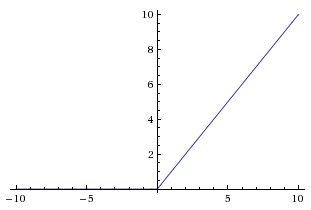

## Adding the second hidden layer

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)

## The Final Output Layer

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [ ]:
# Summarize the built model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
 dense_4 (Dense)             (None, 512)               5632      
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 680,468
Trainable params: 680,468
Non-tr

## Compiling the model
Keras is built on top of Theano and TensorFlow. Both packages allow you to define a computation graph in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical cross-entropy, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. More detail at Wikipedia

The optimizer helps determine how quickly the model learns through gradient descent. The rate at which descends a gradient is called the learning rate.

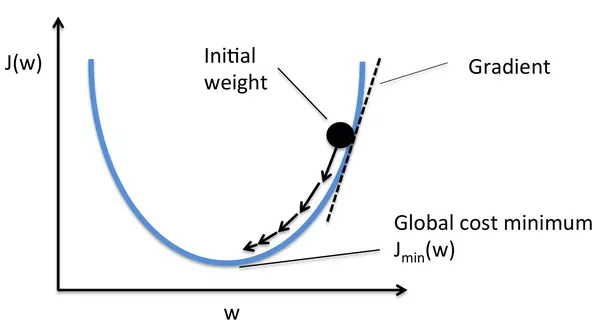

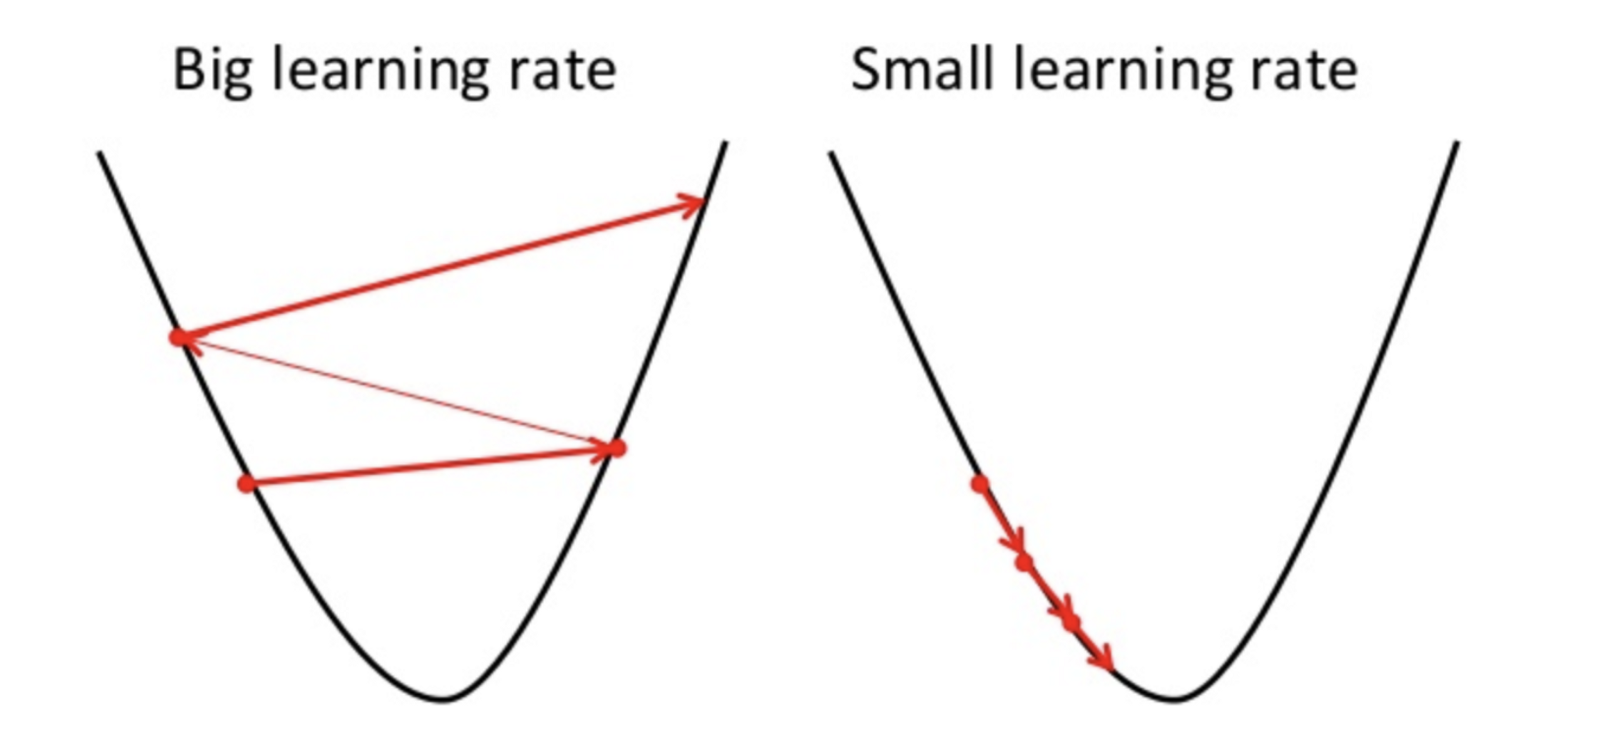

o are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.



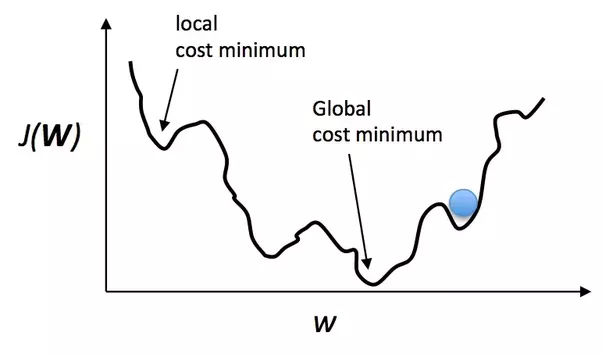

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model!
This is the fun part!

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [ ]:
model.fit(train_img,train_lab,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3956 - accuracy: 0.8649
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1125 - accuracy: 0.9687
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0822 - accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0651 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0539 - accuracy: 0.9849


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

In [ ]:
model.save('project.h5')

## Evaluate Model's Accuracy on Test Data

In [ ]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.0811 - accuracy: 0.9794 - 1s/epoch - 3ms/step
Test Loss 0.08106496930122375
Test Accuracy 0.9793999791145325


###Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
prediction=model.predict(test_img)
print(prediction)             # actually these prdictions are based on one encodeing theses are only arrays, containing softmax prediction

In [ ]:
# covert prediction frome one pred to one encoding, need numpy
print('Predicted Value: ',np.argmax(prediction[0])) # actually argmax will return the maximum value index and find the value of it

Predicted Value:  7
Successful prediction


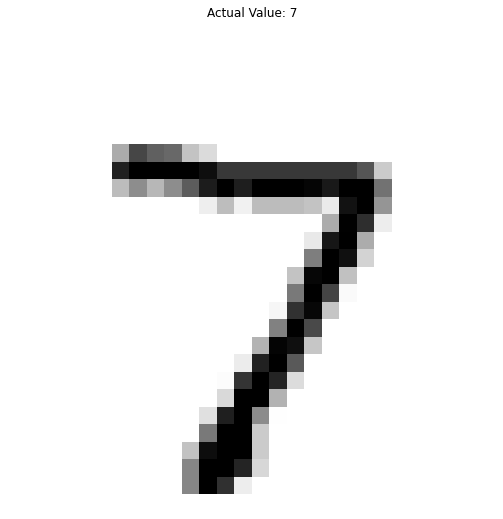

In [ ]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 7.png to 7.png


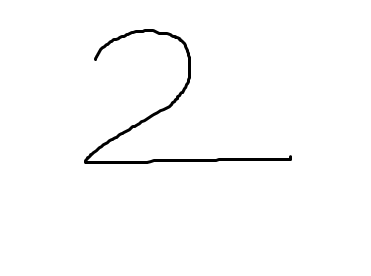

In [ ]:
from IPython.display import Image
Image('7.png')

In [ ]:
img = load_image('7.png')
digit = model.predict(img)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
digit=model.predict(img)
print(digit)

[[1.9177631e-03 2.3405040e-03 9.8433661e-01 4.9614976e-03 1.8616230e-03
  5.8267807e-04 2.5424059e-04 1.9789601e-03 1.6432494e-03 1.2289242e-04]]


In [ ]:
print('Predicted value: ',np.argmax(digit))

Predicted value:  2
